In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import base64
import random

In [263]:
b64_string_4k = '/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAhwDwADASIAAhEBAxEB/8QAGwABAQEBAQEBAQAAAAAAAAAAAAECAwQFBgf/xAAaAQEBAQEBAQEAAAAAAAAAAAAAAQIDBAUG/9oADAMBAAIQAxAAAAH+Yj6FAAAAAWBYqylSgIFJZSUoFRUBQCWAoAAAAAAAKESDMAWKoUEqVenXh6OvXjOvkxnfKOPEJAAAAG8K68+3LpYMgAQBZQFWWqNVLmQMksAAKQWUACgOnXhrpvtrF121CareAFsADWbCoKKWFs7ciUAAVvFqCCixbYsFlAAAAUoigCUClhSUJdZAXfr83rk+eLQAAAAAou45gFpFI6YSBQBoy1BKIsLKCKoHTmAEsKAEBUpIoijWdyzBSLAsoCN4gssCAABEWWkARLLAEssEolIgAAsCEssqCAtgh0jm1pOYAAEqEILVDG3HfNyBhYTVxrWqFCwAB05i5AIamrdpddAOU1nPIJAAAJQiiBIsAAAAgAKCBBK5hCywzz7csc4JkAAAICggAAABZbdjerZWllaUXjrNxy6jfYADHLtxxxDOQAQFCABCoAgAAAAIAACUlAEDrZe+goI0yoAAChUUIsogFCrKIWAtAJQICgAAAoICmOnHOdMM56TCujmOjFXVxatzVqW2oL6fN13vhzOHEJAAgAKAA1049Olw3iAASywFAVrOtAtmazAEIBAWgAAAVaDV105LrvrnrfbSWaBSwsWgAlWKVDeZTeYUAACgBViumAWFBAUUgVREpQAKFBAWwCiAAAAKIqouzmsACwp3PPQayIsAFAAKCAoAAACywAAazafR+bUgUBKSX3eJMgsKGjIAEsQIFqCEqyKIAtTCwABEoiyAAAsARUgiWACoAQAABLc1TO5LymZBxABFg315N61kUEAALpedsQlXeufS7Fusc+vPPOBkICwIAlgBJUAAAAAgALEqIsxUqApy65znkMcwAAAAgAKCAAFhehemllaWVVla5TWc8u1jXawAicO/DPIM4AAAAACEUSiLAIAACAAAlJSWUgOtl76CggKAayOvKwsUIUEoUBYqglRaEJZQoAICgAoAICnHryxgM4AAAACrYXoxrW9ZvOSDnkAlAAAoAALO/J1674jEWEsFpCirZdWxIgzEsAAFgsUAAAtl1QqoXW+dt73l032obWWApYAUBaIFAAKoWWBCrZQAABQFAFAKIoSgFAAKIDWbFKIWyKWKJZYRaOnMikSlbxCgAAKJQiiUIoCgJQigACKIsQAogoAAEAlCLDvwLAEolRAAARKWBLPX5SSxAAQABKIWOnIsSoCosQIlKggAEACGjHQSM89ZcYsZBAANXOtaC0EKtmnS6U1vnjrzxzgkdOe2tF1ucu3KYyWYgQAIAECwSkiiAAAAAABErNzTKUEWOM3jHIJAAAAAgAAAAK6Jd7tlaWVpRcc+vLPLvZddglgscPR5884McgAoIBQAgCVAAIAAACAAAlAhTqO+gJVqN4ACwAAKUALAUpSUlAAQtgAAALCwoIACs89458wmQAAABQi2oN4IDIAAKAAAAAdeV03jty6WVMSyxaAWqNVm5zKIgQCoCxVlAAFlqjVCiyWirrFX0dfN013KaC1QSgAFFIAUSgAq0AJRagCglUAolAFALAAUgKFiglJZQBKBaghZaQFQoIUlAFAAAASgUiwFqakiwoAEAHQ5rBKslUkoiwAAFqSySyqihBEoixBSABEvQ5ywBJVMrAAdLOYhZAAEAikgICyoiwWVIBpcdEJZBic+vNjKyYABAG8attjWlUlnbVDfQJZy7cs4krOFhell10mdxOKs8oAJAAAEsASVC6z2rgIAAAAHROYhKxqCQKnLtyxjImAgAAIAACggADdzre2pbqpVoazy7cc8+2sb10BoB5/RwzzyM8QAAAgKCUBCACyAAAAgAFCEBQ6WXvQtCggBvFWWWyKllKALAUJQFAAAAAAA6cwACggDnnWefIEAAAAACgAxQAEolAKCAoAECtdOXTprDeIAAWWtQtyMxLIAAssKgUAAGpdUKAqVRaGl66NekLS0m8UgAUAUACgFJViggLfpeLlSLBZVWBQBbAAAAqxZWjFUiwLAAABQlsUAACwoBrIGiSw6cwKEolgpDebCKJbKlBrNICKAHXlCwrWdVMAbwEolALIsCiCQKgAAQESwALCLEBBpcykiwWEAAi9DkAAESiFkyqoAqJprOoTOkS5BGNyZ5KnOAABFg2XpqWVb24dt7WLsBz6ZzOYzyA3c6dAt5zWZygkBAAAAIJACAADXTiC6MGzDWQEDFCVLIY3E4rOfEAAAAAIAAAA1rG96tzbu2auglnHvxzjpvn0urC7sBx7cpz5jHEAAAAAJQAhALIAACAAAAllCA7Su+goUgAWykgLYtLAIsq2WVAUQqVAUAsAAgKAACggDlLOfIECULAgKCgLCWWXIAAKAAAAABAoDvz1vvviOcAamrWblAySwFRBSwoCUAAtN0AFoFltduXe9K1m9RbZQBQABSKAVYqgBQksW2AKgLVlAUAAABZVllLAAduULAKWKJQAGjKwAABQsABRUilA3iwAASgAK3kIEsFHRObeVixBSLKFIISqRUiwACyKEtMtZASywgAQCKSABLnrzIEAiiCzWQACEolgBAEsSggIDVjG0JASACOTWZygQAEA3cb3qN5tdeXS60rfSCAOLWccQLvn0bsW6zz68piUmIogQAIAixAJUAAAAAPb5MkACUMUIiyueenPHKDOQAAAAgAAAC7xvempdbWVaJq8e3GZvXl1Uq7gHPpzmeQx5woIAAACAVKiKCqyMgAgAABKlCksk7Su+woABZVlUgsBR0kw6c7RCpQBLAChQgKAACG8NAAgKS5k5jnyCUEACgAoICUIEKAAKAAABAoBZvV72vb248/Tx4YwOWbqXVzDMCIEBQFCUAAFmqDdCBVFoJenXOt+gLpQCAUKWUlAFFAoAJQpZSXWQFKCxQBSLCxSAoUAFKEoAABQQtXLWTpzoiyiyLKqUCwAAHQxKLmiKJQJalBKIoihKJQuaEolCUqUSKIokolBLEChpMgASxCxRGSiayoCKkiwCkpIApIBKSAACIogAQCKSFIBYzVM2AAgTOOvOc8iZAABLrG9WrNaayrul32SyUExjpzzzCRvGl1Zbty6ZmcCc5UAAQABLAJIogAAAAAAAAxQhKJy7c845jHMACwAAgKCAoIdMb1ql3tRaJq8uvKZnbh3KNdAiY6YZ4DnwBAoIAAACUBVtSwyMQAAAIACUAhOw9GwDeABYFgoUACWEtltBYVIsKAFCLCgAAAFgsABjfOZyOeAQAFACwKCBM2gAACgAAAAQKCr34+rtsr09WdDzT0cPLysuYgxEsFhFgKWUAAALZdUKsFoALvHa72NejeSpQBQAFFAKqUgFAKqBaAAolFAAAKUAUgUsKUgALBSwsUgLc0lUgLO1OBampCyiLpcUALABQQAAAKKIBYAAAQAKLAAAaTMsCwFIUyLBSBHo4QAixEqrmxFhPR57BKIsQokoiwdOZLAEQAABZozCRKAASACFTGrLACBGN5mcEnMAEAWK6F3uN4rrrn011SmoEcuvPOciYWDoL0Sk5CckWIEAAAAgQljUSk6c4LCwAALAAKzYMgGdSTisxygkAAACAoICghvG9XRd7WVqhq8+mMzn34d0o10CGdZThKx54ECAAAAAhVugVKTAxAAAgKCAAUI6j0aAFEsADUoJQJQFJZbbEKiKloIACggKAAAACgLy68c5g54BAAUBYqpqstZgMgAAAoAAAECgoU6ejG/b2DpoB5/T5+OZizz8wygLBFFRQAABZao1QLBbLC2Uvo49t9gdVKBRSAWU1kBVCtZFCApYKFFOmM0BQACxaCUAFlWWCgWUTryUoihKIoAFIpZQlAAKCUUllq3NMlJQSwUIoANZCygAJQSiCwUhRBAAAAE78Ue7wU1myunLeEFMiwICmpTCxEoSkgARKCEFJLA1lLe3AgAQCFICVAWSAAARUljGrLIASwSk5Tec8osQAEA3c63oLddePXW6L0gGNzOeQnMDdxtsLcZ3icgRLAELAIAi9jg1mRKJZSAAAAAup11qY6ZuuSzhgBKOeO3HPODOAgAKCAgAABvGrdVem1laoaudSOPbh3zjQ31ASjzLMeaKiBAAgABZpQuggKws55AACAoIAACXqPRoAsAAKlVFRKoJbAVKAFgFAAACgG8CwAAAoIcevLGAzkAAAICwBKlAAEKAKAALALAALvHfrrqr29gAJ5+vHz4kOGEsiyxABRFUlAAGpdAtsFFJKkpbXTmuvXOHbfahsFFAAUBQBQAFloFWU3iVQgWoURVigAFKAAAUUSgUm8yhYSligFANemvIsgBZS51KRYAayUKAKIsKKiyLKqUJQhUiiFqCCiOss5VSTUIsQADryKASkihFICFsgQAEiiN4NYpIVIAAlSAlCVAEABIsAAAIsQAAEDFDNSwAgkzjpzmEsYABALvnvVo1q9OW7roTXWyyAOU1nPEC757aoanPrzYgYQAQAICgiBAIAAIAAA3059Omw1rlnpjz4gzAJz65meIxyCAAAAAgABZbell6dFmlBqheHXl0xy6DfcAE881nHnCSBAgKAGllsaCABlEMQAAICggFCIDsPRoAABUWkKAABZaiwAFIsii0AAAAAAA3ita5hc4zm4MYCAAAAAQFCCUAACgAAAsACgNerj39fSjv0AGY44ufFxDJLEsqIolFQKAAWqNUBYlAWaoLQHfj6b0DXcAoAFUAKBQFlUUiwWUBQALKWUAClGjKwBRSKBSUWWUSiW0ypYEKWAUUCUCqiw1miFiKqUEolCUAAU1mgQAaOvCiACwFCAsS0yUkpIqkpIsAAAsgARKIE6+zwJMiiwkpHTnAENysiIssCNZKhZIAA6c0S9Dk1CAAikgAQJROdpCwEsRz6ZmcEnMAEAWLeiXellt7I12CAjPPrzcoJlrNXYdGN5ZwHMACBCwACIEAAigQCAArfXl16bitazy78uWcLOOQEsOWenPHEJAAgKCAAgBYrqmunRZbqlmixrjvNxx6jfcCwOGd4x5gAkgQAWVpLoKCBJGTMCAAAgAAAJQOo9GgLAAGiSyhZZSwJQLYqCAqpSVDU6c5QoAUgAAARjMxiwzAAsCUAAEABQhKAAAoAAECgAqmtX0bPodgtAce3l4ZkPLzASyRZSFCVQAApVA1QFllQRqW0FFt6ds636Lm9GuaUBSw1ABQABaayUUlFA1nWQBRSwAspZQALFAUCxVlAAVYABTWRYoAlAKAoAAlG6wAohSKAVKsAsABKBSSiWbMKIpIsoABZ0TnLTNCK0jUSSpIqosEpEoikzQSxAOvIqKkk64sybMLEASwBFgWaMLECLCpSJ0wSFIDeUSAAADnUsgCLBNROTWZygkABANaxvell1emufS9YGhJHPphnIc1iXozptAxLHMLEqIsQAABLJAABCyw1IAKQ6bx06bDWpKjjNZ8+AkCJx78pjAxzAAADIKAAA6XOum7ZW7ZbqpWuK558e6zfewAOXPrzxwixgIllIoaGosoqIsJmzGQgAAIAAABQSVJew9GgAAKLQgVM0UBZaSwFJQlFJYACggKAAZ1iTA58wAAAsCUAAAElJQAAAoAAECgAoB6OPr9G6PZ0FWFOXDWPDyDnARCAAVUKAqoItN0KUiWFFkUtBW8d7vdl6ehKAlOmAUgULNZsVRbLIKtlAaMgAUUFAKAABVigCt4UAsAW9uFIpYoigAoigAbMwtANCNZlmoooiwFIom80yqko3gAE1CwEolCKIoEsAWbrmpIILdA6RLMpKzIsJZUiwBBCwSKSNZBqpncSSwBEsAQAESiA3zohUnblAUiySKIACFSAADFDJLACLEzjpznOCZABAG8a1dDer24dW6HRBGak5i8gi6zq6Ilmd4uLLECAEpJZSACIEAAlQKIohTfTn067DWhIzz68+Ocq5yCRnQ4LOfGBAhYosgAAADes73tZbu2W6omueOnPHL0DfYKgjHLryzwSpiBZZZLqW6ilgRLBkxIJAgAAAAIABQkSl6j0aAAWUJbUpHs8ZSJNRbYsLNZQJSlRbEoBQg78KAAAvLpyzmDGAAAAsCUAAEBSWJZSVCgCgAAQKAAF06+jG/f1WXrqUVnXDnOUs8PEIBEJSxbLAsKBvF0NS0KCFlVBFlVRQXXo5dt9gvRZS5q2Ui3K0AChe3FQlUAAAsCllAVY6YABVlABYKFALFKIoBalIoiqlIBSw3iiahemcgWrmllJEqgUA1CAsAsoqIqoAAogQAAAWoBLEFJTUajbWAQzJSICLESkgAQCTURKqFSAAikgSVAA1EgEpIolg9PmEgARLIAAAixBSCA50QAgkc+mWcCc4AEAWD0c5emrvnq66IdUJBEzLGAsazZaLbjWUixkAIixAAAJ15ECAoIAIFlOm8b69A1QJz65xOSzz5gQI547cc84M4ACAoICAoDW8b3u2Na1ZZui6zx78McvRc611lFSjPDvwnFKziFJWoNW9MXpq64PVprx47+fHATOQAAgAAIAAABQjpTvoKFFz3OM1BKWBKpc0SClgolotAAayNZAA68hZoyBx9XlxgMZCgAAACIqCiwJRBUKKAAACwAAKAbz363rT6HYKoV5O3Dyc4PNkGSFssiylQRZVlAC753bc1NayrKKEEtlaClm17Wt+mUVplabrBoyFWBRQBYC0AUgVQFJUWgGjJVllBSFWOmAVYoLFFI1kWUBQBSAUUAUillAAALSxCpYKKJQKM0JVGdSgBTNUgEoirIUgQAAvuTxSKFqSkiwSiBAEsRKSABAIssGkwAABN5SBEogRZaSwCIvZOCwgQEAFJOkMCHXkSAASudSyLASxEpOU1M8oECggC7573bY1rrEdbJGahLmxkEAsFqUysQAAIiywIFNdfPJAoBNIgEsKK66zrr0C0BKjlnpz4ZizGSwcuuZniOfIAICggAAC9OfTWqN71Yb0Gnn9HDHPrvn01sGgqef0cM8oM8wL9b5P2Ne3V1On0osAPD8/6vy+PyIOfmELCAAAAAgAFCEqup6++vJYFgtggALKqkU6ckolCrNZhS0sgKAAAAAAzz3jnzCQAAAASCiCKKiwoAAAoAECgAoAK16+Hp9u5ZfTsFGcvPiz53IMgZSyWoFlEpZZQKAFL0461dTc1ckyWaAtAvbj6b0Vd94FKgFWAKUAVQBQBozZVllAFlVKAAVQLFrWRvBQFlXWQKJZQFKJUOvMUAAUilAAWF3i6rF1JYoiqiiUDUWOmIRajeSAFIqoJCy0pM0IpIqoogSKSbyICzWaBAqLEAjWUASkkurMyogAuYsAIEBACqksRKRLBrNIEAuaJUkuudEDpzElIgo1Iyu7OdSAxRMgIESxM53ic4GQAAhrKui3rsRqCZABCCxQBZbYskiiAAAikSwsIgQCwAAAOus669AtAAce3PnMSuOEsgDjnry58QkAAACAAh15dN60N71c6boacO/HONdeXW0LsB5/RwzzyJyCL9L5vt16feOn1wslg5/H+38bl87mOXgSoSwCAAAAgAAJQOo9GgAAAKLUsSiWwABClqFhKUKAACAoADnk5cgAAAoISolgKCUIKAAKAACwAAKAprb0bX6fWU1oC+fv4/PmDxcwkCWWURQlEpQAoIAtzrVu+d1dY3CUUAU6ds636VhqyrRswslCl1ld4BZQuzmFAKWUBVAABSiKCllAsUAtXWAFJRRQRaAUihKWUJQBSiUCllAFALAoih7vCJVWKEqkohSFIALNZACKIqyKiKrK1JKqKTKkTeSFqTURKRFMrEssoEmskSiLEA1kSBEUiyrNZRKIELBKsggEJSLBNRJ052IehPO1kEAAS5ujAyDnYEhCxEuNRjAmAAAgK6dOPbp0krVwJkECEUiwWWlllTWaCSAABAEoghLpMAAAAA7azrt1gAAGdSOUs82IskAnHvzzjmM8wgAAAIAbxu3aXp0us6aobcu3LOZ24d6C7AcPRwmMDPEIvo8+70+1Dt9sKgR8n63z+fl8Us4fKCEsAgAAAIAAACXqPRoACxSWCgIqhZSQFFJSoIqatgAAG8CwABlOY5cwAAAsDNihLBQQLAWUAACgQKAACgq9+Pr9OqX3dJZQDl5+nP5/MOUCQFRYlSipQAoAAUU1VFWWgUC6z6bul36ZQSgAJSqBVFnTBAUAFpSFJRQAUBQUWwAUApQN4oFWKUUgKFABRQVYAUSgVY3kiiKClShLVhqsr1jjZSLKFJ0wJdZWKSKSTS2KSACpQSkiiakpLE1ikCyLEAii5sQsIpICLLIpmAAgAsSkhsxN5RLLDtxhKslCKJLECQBKNYEayNY1lAgCAAlRAhN452EmSRnUzJNMkguQgAICnbjvV6LOnXM1mYSyRYFCWBZQK1mmsqmYAAAEABYJmCqIgL05CpTsO3UAABnWZOReGJKwgGdw4LOfGCQAAAIAalt6JenS2aaqVu895k5ejz+iZK10gHLrzmeQzwAaiX7HTzenv9oL0SxHj9nCcfkyzzfGCAhACAAAAgAJSE7D0bAAAqUgKhd4UAACqgVC3NJZVCAoAABjfOZyOWAoAALEszQKAEQWpQAAKAACwAAKWXTr6Mb+l0F66Cmd+flOUPncwyABJSWWFWUCgACwpSpd0FWUBSlvo5dtdll11ABQFA1FlAVSmo0MtDLQy2XF0MtQgFQUBVWAbXCiUUoilFAUApQBVJSKVQSiWUqVZQssXSCKVKBSUWVSLApY6cwUiyiolKSiKIujC2ySiKIoTWLHTmS5vQ5/V+XGYq3LUSKsgRKI3EzKrWLEBNYsSbysSwS1MlMqSLEAi1MipREsAEsRLE1kBtMW5LmogEEs1lDWQBCASLMoOdBM46c2IJgKgkCggABYrvcb69c53lIJmCRYWkqwiirc6XJJLALCwAQFAiyRLEq5oILKWaOpevWLKACGdZk5JePMMaSpIDHPvxzzyMYAAAACFg7JevS3OmrZW7nUXz+jz9889jfUImOmGeAxwAWWX3e75f1O31A36UsGdGfiY7cvL8SDOQiWAIAAACAAEsl7D0aAAAAA9HnBZVhUWLQgCotoIpBpcuvIAAAvHrxzkMYAAAAJYILFhKpKBCgCgAQKACgBam89+t7U+p0BRSeTv5vFgPLkIBAJSVKWUAoIChRS2jVCKNUIpq3tpdeoLQFhdM0BalIpWpVUaCWiiUFWUVKsyJmyxVAA68lWVQFAVYBRRQFBe/PNLm9DkpRViwFIoazVillUS1YVc2wKIojpgKXOgiiKIqk1IKthUuaVKIssTUqKkiq1gSNQjUqKTKkiyxKIpMrEKshELCKSBE7cqikiymemEikgRLAESkSiSiBEu05zURLCwTSWMipQgSBAhrIikm8IhOYlgFc+mJjAnNLLAAAgAADXbz9+m7jc1rAmIsFlRKWCKKazq2Z3mQCLIsUgAAEsQSSkqogBZa7U7dQJYAGdYzOSzjz0lzYJYJHPpJngsxyACFgAACOtzrr0WVraVuhrz9eXTPHqNdwqTUk8yzHmALJen2Pi/X6+7oOnvEpLGfneT6Hz/N8mDnwCJUAAgAAIAAA6jtsKLAAACwoIVaiWUABrNpKUQtgsAAAKcenPngM5AAAShFiVCyiUAAAoAECgAAApZdL6+Ho92qPXsAuY8/Oz5XMMggEABQlACgAKFtTRVWWWgpZZXbl6L1tN97ABQFgtlVVay1BZpRZqKoAFUUAKyWZlAVYpYobxQFFJRQC6XIUoKWKUAoBQDpglsUsUolApRTNpQAUoihLVypClili0yojeajeSNQirIpI1KgIpLmxIsCywCKSSrIpGdRIspKTNESkk1LIEFqSkkpCU6cdRIsSLAE9HnRLASkiwgRKSKIAEAi6zcSVgKASwpEmd4xFjAFsE5NZnICBAAgAAB053TvK69sTWZhLJBUBYEqVVg1neLQkCEoiqSyLKGdQgZSiKIaJZa7Dt2BAEshjeMzks482s2AzoEQjlnryxyhZlLAICqCDLe8b6bWW71ZW6GuGkzx7jfYFSxPPNZ5+YBZZX0vm+zfo+gjv9VYsQZ4fK+18fz/AD8Dl4wyELLAAIACAAAjqTvulqAAGjNuQUhRZFooCkiigllKAAACgMY1nlzCQAAKSzKwKlBCywoAAAoECgAoAKprb0bPrbqXWgsvDt5PNMj5+QgIBAUJQAoACwLZq1KtFA0sFUXp3xrXoouwWxSUAWhbVaglValFABRVALCyyu3n1JlYUCkWqCxRSUUChRVihZVBRTWRS7OdVYFKAUolUillFLCgBSlsAVYoAsAVYUiibypLTLRMqqLTIRLozKsypJNQZ0sk1EirIoixLnebERIqS4q5gpLUnTnLAIESkuRJZUgEsRLECgSLDWNRLjRMtQiiKSSpBuXfl9Hk51vFcdDWms7rIqBGdSTI5wJQjOOnNgGUsQAAAECArrvl16dZjebIsSCSyxQShQNSrrImQBBZSFJQSjKpLkRAKGs6t6jt0LFBAJz6c8ZxLOOASjOxJLLBx78855jHJFIBZYQANdOXTW7Zd61c6bom+eOnLPH0jfcEA883z5+cEWC9uOrv7Ul9P2QIEnyfr/N5eTyyzz/OCEqIsAAgAAIAA6jtsKAANZAAKlpCLYWwAKlUKKLkABSABOUOXMAAACFiFJYLLBYKAKABAoAAAKFp34+v122X6OwAXn5unP5nMOAIABAAaAACAqpVal0SrSlWWglaz3ut016RpcrKWUBbvnSWltG4ItltBQAWlJZSFEsOvFWY1GpQAu8FKUABRQWlWVVgLKUApbrAdeZZZS6xVBbLVzbDp38qDebYVR3OCpZvKrKlilmgjRcqsmpZUqpbCFI1K1ikijNKikjpgkurMKJNRIqzLRMqsy1EiwjebMqZypIpM9MSzWKQiyLEuevNIBKSBIsQEllqSkgTWSooTUsm8k1kM6gZqSenGOPbz5snkIk6M63oKqW2KSAws55CUIc+mWcCYJUgAAAAAL149NXpjTp0wsmEpCVQAALrOrrCyZCAAAAAIJIqotjLUJrO66Dt0AAAcuvLGcSzjgEtzZQzUoQOM3jlxlEiiWCgiyL15dNa0l3u6zpu2VvHD0+bHL03Ot9Augk5cu3HHAJkBrNX6vbx+z0/WDXRAeP2cM8flSzyfJDMBQiLAAIAACAOlO2woAAKCLAsCxVgRYFFqWkpQAAAApLmTmOXMAAASABSWUlQUAAoEACgAoAKU06+nl1+pqK7alBLx5zjD5WQgIABAUJQoAAClVTVKpZbQUEvp5db3o12BKFllUC3WChqqmoqlGgAKFWUlFBEuQUnTnQChalVQbwWwKGi0glvq8qpRSiWyasUC0UFWKVYBVFlmoFFlFKI0WKWWxVUhVihKI0WNKkoijpyolUyqzLQy7c0ytsxevMk3myURKrKxIpMquZNRJLLEpIsSFuZNQk1Lm4pIEixEpILIokpmAWEubs5yrIssFsC2NLMzWcxNyM12xvXg7+flmB50sS6xq3Q1tZbFiosJneMQMQFSo5yycgSLAAAAABYO6a7dcLmZSySpbAUAC6zWmdZQEACAAFgotqUQE1IxvO7Okrr0gQAiLx6c8ZzLOWARYWrM0IhTPLvyzjBMc6CKJZRLIdMat3ZenS6xtq2V0nn9Pnzz675dboNaAxx78McYM4AWU9P0vkfW7/Qo6+uLEZ1E+Nntx8Xx4M5CEqIAoiwACAgDrK76GlyAAA3gAWUl1kLLQgKAqUBQAAApz6c85yOeAAAiAqABQSgKCAoAECgAoAWms9+7tZfq7C0B5O/n8OYPHAgIAABQAAALKGs6uljShRaShZpe2136oGqozQKVLRFWammgWWUoaBVlBSUEsKFk1Em8gULFUVQmoWzUWUUUayVrOlmpqXFqprNWKiUVVWbzSLLdRtcKllApS9FwuZSllBS6WUstXNpYqIpbnS2W2MW6XDZMKtiqlpGNwy0MNLMtEy1LI1Kk1Eiy5ixI1LMqS5sZzNLMrtnkqzNsshpMLEk1GZN5SLLN87UzKSLES2zM6YSATRM2E1myitSaejV449XmpjecZQy11nn49uMsz4oESyAs3cb1sNKlpLCpJMjlAAXOOmJzgmQIsAAAAQF314dum2N51YsmZZUBQAFlXWdS3ImQAgAKWC3NWpaCVLJM7zqzoOvRLLBzwzk8uCJC85Iic9XC3reXXWgaEGdJOFs58pZTNEJQBc6l6WXrtvNu9WWdHDvymJ24dwNbAnn9HnzygxzAWUv1vk/Q6+r1Q9H0AEsTweP6PzvJ8uDlwCUASKlIAIACAOl5ul6MtXSUaytAAAsAUClhW8DWVCUBQQFCApx68sYDOQgKSyFlEUgKlIUAACwKAAACgqir6+Ho+jSvZoASOHKz5GQ5gAgAFAAAAUUDQ1aLRQKBb15+q9INd1lUVYoBVgFGs6asGprOgFFUAsAKlAVNZQoBaFFJRRVlVQUCxpYWUKqWUFFJRVFKUUmrFms1Spoek88tWKWVVlpYpZaWNVc2llpY3lZuDUDLRY0XM7YMtWsNDLasNxM22ubpEw01MN5Zy0TE2sw3Ew1LnLVZ5tEw3m5uKucNEyssk1GYsS5qySxlmkikkqyTURLES1MqTLeALGs2wnWp6+HTV5+bt5OTpOcxy63h6Zr3eT6/Ly/b+DneO/5+BiUIEdOdt2rWpc61AWNQ5rOeQgIc+mZnAYCIAAAAAB15a07Z1OnXMsmCVAUEBVlNSrrAmQAAgKAoWhQEozvG7NjpsSs8rnyYExmwJhM8yVJYL051eo30ASwzz7cccwzmUJNRKhZYk66zevS6zbrVmp0c+mTj6PN6c4DfUBw78M88DHEBYNeny9N9PrD1fWEsBMfI+18jz+LnF8/jgzAUIAiwCAAAgBU0qU1rnd3aXVBRQmlublKlp0wUlJqQ3hSUUAABlmZZsxgIAAQyLKWUihFEoACgAsAACgAqmtvR0l+zoN0Bx7eXzTMPmQICAAUAAAAUBVmqF1QVSgUU6d+e9+nU1lsBZVm81YDeKIpbrNassVZQGllgKEKlFlAXWLSXVusXSay3lIEKUFoUBSVRRVilKJRXRhRVspZSUpSiWlspZVaG1mbVjUVRSpSrZampbWs2iNFzdaXm2XLVVnQzbuubqTOO8Tk6jleo5XpbOfP0xPNO8rg9GU4Xqs4TsueM6TUxNxnDebnM0ucNRnKrnOrGcTSzDUZ3ypMi5SkysubBILJLZMqTNRFhLmyyUs1mqFrp049c9vP5t8+Hlgc28WX6fv/AD30OP2OPj+78PXjxLN+AEgQDpefTe4ubNJdVYjOd4xkMgEqOSycwkgAAAAAAO2uXXt0xNZRLJmpQFAA1rGrvM1mYAAAAAVVlLQEqM9MdKo66cdcuGQ45EkYuZhDORKsolljprl230g1YshjpJOMs58qACWESyXprG+mrZdb1rNdLKl83fj1zy2N9QHLrzmeI58AAS2W6+r08vq9f1ErfSBJ876Xk5ef58s8fzgkCUIASwACAAgKWWiCpRrK3oxrdqy2ioIUtELYQpY1IGrchAVLlMjOJDEAAEgCpSLBZSFAAAoECgAAoKqWnfj6/Xar6eooAx5unL5eQ84ICAAUAAAChQLTVqWgWigVvPa66DXpotFWUgFAsChdWVsQolC1QAEKBZQVbqW7KuggWXM3lNYVBV1jWSiaUG89l4VbQlWVRYLq3C1qazozVlNRZVailXpFyVZValpZd5l1mmillumsW1e2cIlVuLVjejle25PPfVqPLfXtnx36HpmPk373acfzl/UdJz/KT9dZPyE/XSvyk/U8rfzmfv8AG9PiT63LW/n5+hi3wz25rxPTnTy59ebPI9XOzjz7zU4Z74ueU6zWeU9HJjnrUuec0uczRnE6ZuczcTM0uczUZktszKSBNYEgZihBIpJenPRZa6Tp4+HbjKz4YsQItzbfq+Xn9Lh9X4k1nr8iLGQIEdOdt6St6ljUoVjczMDnACDOemJiFmZKiCggAAAC9uHXetZ3jeoGSiKiLAC6zWmdZQpIAAABZSi0FRIu8dNLLxtzE8uLJGbBlKTCsSAECwvXlq3os30ELLDnnry58gzAIEBbvG9XQ3vWs6bob4ajHHsN9gGdRPMOXnABKLfV9D5P1fT7w7ekEcuuZn486c/n/JgzAgFCAIAAIACFjSywssFADWud3djWgKLREoVQSwWUN4UDOdZmAkyMQABLILACpRKAAAoECgAAoAWg06+nl1+tQ76CxLx5OMs+TkM0ICAAUABYLFAVZS2XdBVloBZVenl213C9KLVFsWWAAWVVlXQaSwpZZRSy2ywBBQFtmltl10AFllVUqXDWZnWWrM6lUFCVVU1lenOpWsq0iVS6alllaXN3bvDaXFolVZVmmoVbFlu2udtalpqy2aildM6lxeuzjr0dszyb+z9rn5fx/b+gfQ5+D+d/T/YeDPD5/s8fzz9T2/BeO6/pHD+dc9dP6Jx/AtdP3OPxNuv2ePx3S39ffxg/a9PxEZ/fdP590nP+g6/nm5j9/wCf8d6pn7vzt+1Pgeb9r2t/n/L+gfO32/G8/wBD4e3q+Tn6XPXT5ufbz08mPVjU8s9PPWOE7S54OkucY6TWOc6ZswsZlRmTeWct4sixmTUuZKSSkS6TFhLkAHTHpz05+H7HyeLE1L45KSBBS/V+T3x6+ni+58XOsSzfgBIsQQ63n13uSzapuzKyOazlIVIIY3mZyJkBACAAAARrK30ZXt0ySZUFdbrDrem+E7cMYDMJUliKlrKpJQAWVVltELLInXl11Zw9XlzJmzjzCQAEmd5yiySUAiUrsxvp0CVKqcuuc55jnzAAlhHTl01dpd9LvGmtB058+vHHH0jfYWoI801nn5ggEWW2/U+X7u3o9Q9XvAgZ+d5vofP8PzoOPEAJQACILAIACA0AsoJQAK1vnvdWW7CgQpSUiwqChQM51mYSzMgzAAIIWCkLKECgCgAsAACgAFNGp27O1PsaiqBXk9Hm8OYPACAgAFAAAUAUC2XSi0FooVRpe2jfqLVlsUVYoTcXLos52yVqVaJsLFGgLFVLAEUFlabzu6C6FWUhZWqWamdE52xhZVWWUFqllhaVSlFVWpqXVdM222VbqKlijLTKVVlppXSa56VopqW6XLXWa476+iTzdvtfpOPh/FfX/beTj83xfX/MfDT+gfK/D8unp/S/M+Tnp7/by8rff0TzTV9GeLTtOUs6znTq5Wzd4k7uNTq5Q7a8+k7685PRvzWPV08VZ9/f5epn7n0vynTPD916vwHbn5P2PyPJ9qc/zfm/c4u/wXP9T8nt6/j8/o8OnXw59nLby8/XjWPNjvNZ4Ombnnjti46ebeLmalZxNSzKxmKTM1Gct5TeIsi2TIFbJ9Hh7vP9SfL+rjn3/Pztx6/nsrLzSoikWJfreXn9Lh9f4c3jv8aCZERLKvTlo6K6dM1NZoM53jnAwixEsTMqZgkgAgAAAEBd9OXbrvM1nRZTrrOunVTdef08MYxF5c4AIWWpNZgEoFltWVQWCR15dd28us3ryTefJwgkCARLDNMRFIIiwvbh01djfQCKOM6c+XIJAIsRrNt6XOum7rNb2HSef0+bPL0a5710LLQOGOvPn54MwLFlW9+F1r67Ovd9QShE5/L+x8rzePkPJ5AgIBQAhKIsAgILNLLCywoAApvF06DW01s5iqlXtxQqUJVAA3x1mZk1jOQzAhLCwCwsCgJQAALAoAAKAWWg0vq4er6NlPbQpWY4c0+NkOdCAgAFAAAUAUUtl3QFlULRR25ei9NazrXqUtBQWgsqWTQzN5ZalaCUWlhaFFJLAVBVBdalvQq0AVVJpZZYuSCZamqxXWXldZVZVWllGhYlVW89HQHS29m+DrLed1ElpU1ZrDUilmlsaVWpq9JefXv9HHP5fu/Yfc4fK/Lfo/mfmMeb9v8AA/Jcuvt+n4fPz6/Q78+ed9Ok5yukzLLcq1JLNMkqSzVwNJLNMjTKzTOpFxDq5dEtmLO146O14U9G/PU9G/LuT1dfDqT6fv8Agdc8/wBt6/wvo5eL9L8P2fanP8X5v3nxOno/M8/r+Tt6Pm493Hc8WfTjWfNn0Y1jjnvLnz56zU5TpGec3mzN1lm4smZNSySkgQB0x78dvVa8v28rTwfK/RfG18ryTU38rNE3Pp+zn9P8/PvfLvHyeryy+S4svKBkIgsA6a5dt7zNTYlRjecsjnIpIIzNYmAQIgAgAAEAduOta6zWOulwk7749enXSXppjplPOOHGCAALLCUkAWVVlqUVLIdeXbpUs3rnw9fm4c8LOPMIAlEk1IgzIsICkPRLOnUACcu3POMDngBKJZTesa6atlu92W9Hn9PDOddeHeg1uLDHD0+fnxgzzBQS2Lfpd/D7fb9CxenWBHz/AKHm5cfmrPB88MgAgFASoiwCAgKqKqCyiUAoNTozrW1i2pVqBQSglAUEZ1DONZ54CQBLIFIWJZalQoAAoECgAAoBZdFmtu/WPtVZd0C8e3k80wPlwJQgIABQBQgoUBVpTVCqlUFoOnfHTfpmpp1C6WUBVlUJQAgKFWWUspZSCxQslBRWpV0XWwVZVKlLGllhnWUhUCWhRV0m1wWVValFUXWpp1FmunTOtegpotk5571OF03M56ZxqVrNzdams3t7858X0f1n2vP8f5H1/wAx+bxx/U/mvDy7/V7ceWevr6YY01EssSyoZ1JUiKJblJtJM2yyK3mEVmzczo1nPRMEqoNSDe+Us6OdOt5063jZO942u/Xybj09fHrM9/o+X1T9B978R6OXl/bfD833+Pl/KeL958Dr3/N8freX0en5/L28d58vP08944TtLMc/X57jjnss886Szk3iZk1mxNSZk1BPb5pnH0Pn9s+j68Xy/ZSyMcPTys+Dj1eXr+bllvL63r+N9Ph97tw7s+z87n2eTt+YzNTXHKmYIixAG8Wu0OvSLLlNajgs5SUkiwY3mZysmQEqIAAICwIAqLaKery9t67WX097Ft806c+HCKzIsAKCCQBYttlUCCHbj26aDpqc+vPGfOs8vCCAgESjIySyRKIWO7PTp2wLEsLLE4t45cwkAgTW8a3rVl1vWs6vVz6Zk5ejzemZlN9EsJ5/T58csl584KBLYt6/T+R9T0+rY9PrBJnSZ+Pnvx+b8yDECAAgFASoiwDJYosqwFlAAA3LvHW6zve7rzpalBZVJQQoXeBEuEmbOeAgSKgqUlQqUigAALAAoAAKClKd+Pq9rQ+nRVlDHm6c/l5g8tCAgAAFAWUlAFAupdULRaAqW1rPdrY16dalvQFFUBZVsJqywLEAAalUFKWKIEW9WuLrzG86uqLoVRVFUWWCWSxkUmtYlBatWWpYVVGqVqammtWWdFbb6aXXeaajNtLnfJMl6HPrOdx016eWuXq+5+w4fL/P/o/n/iOfg/R/lPJj0fZ68sZ6erTDUQsrJLvmuUiyxEtyssSwE3iVLIsrKq1hBEqWiErNOnO5stzslxSorckN9OO6b5k63COuuOjtvz2PZ18PSPf6fl9Mz9D+g/C/S5eT9P8An/V9zl5vw/k/Y/C9Ps+Jx+n5uu/Dn08948+PRz1njjri5556YskubnnOksxrVzrE3KzN5YksT3+34/1PN9TpNZ5er53j+t8fp8zljedfLkpL6fJudPu3z+jh+j4/F/Q/I387xTU6fGksZixAkypIDp04dem9Z1NamsrnOemOchMRUE1DEszzAAggAAECUEACmsj23n09npU1rnx9Pn5coMYSogGs0i5kooVVgoWTUh25demg6WY6c8558+/Pz8+Y55CAQCSogkiyIWN+jzerfblN42CRKM8u/LGMjOAhLC7xrV1c63rW+e70pWvL6OHbHPY6dUocO3LOOQ58QQCpbb7vD36dPoD3fQJbIDxeP6fzPB4IOHEICAAAlCEsAgKWBZQQoAoNS7xvWguumZbZZYAlQoBChWdROcOXMBLIAWCgSgAAKCwAAAKCllBduno59frIX0UKTXHm45PjQM0IACAUAUgKQoVZqqNUVZSgtUi+jl213WavW2W7qVoUllFlaglFIJAtLC2VVlUlEsFDXp4+i+mcPTLry6VxhVFUlFVoJZSMzeUlEFmlQpWhVKmlVZVaamptVdL15+h0aavXOlkudajPPtz1Ma1vTk7fc4Z+X+4+p8Xy/D+3+O+N4t+zr5s59H1bmTSkubIRqYuemJUiLlrCyxErpyssWyW5CLBLKmkZ1k3zsQA1iyoASpqsoNILcqtzausbSsjox1Teedjs5VO/Tz7PV28PWX6Pu+L3zn9l7vxX1fN4tfI/beFPxXD73zvV6vn8PZw6Tzc/RjWeHPtjWeTebOd6SXE3DE3NYzNRM53DHp81zr72fP6PH9jPj9dPzc9nj6/n8rLyiyT1/V+D9fl9f08elx9L8/n2+Lt+ZzNZvAEixAJBHTnTtcb69crNZ6+fpjEyOcSoijGd4zgEAAQgsQAAAIACuvp8Xs9HW2Xv2ef0csY5DjySoIKgudQBAW3OgFhJNdeXXpss6acuvPOZqbzPI3jzcYsgEASoysySyRKL6fL6NdN8+vPfTIYCJNSTi1nnyCEoms6rWs66bu8au9WW9PPvLnx7jp2EGN5mfOs5ecAQqyrvnbfr3h3+j9FDWgSfK+r4PN5vNLPD5AgAIACAUIgyDQUhQgoAoNS7xu6F1oBUWkKAFAAETkOXMCWIpCgASgAKCA1AAAoAKoprPbu72Ps1S2KR5e/m8MQ+eCAlCAAAUUigVYC2a2Bqoqi2gGl7aXXqFa0mrsFKJQKaCWUJZQAChVlUQsUWaX0dJb7lVrnx9fnvHCnMAVVGglCEuUWJFVbBa3ia3JVWVpZppVaus6nRqadL6eHodJqmm5uRrG5MZ3vUx6PZ+34eH5P6Hwfg/P8AO+l+ezz9X3tc2d9RLLEsIZIuUSyxLmxGbc7sylqXO2ZJqpEs3M9ZOaKCxcjeURrGkyBrOqysAQQ3IoiypsjKurmTVzTVxo6znTprlU7dfL0j0789Pd6vm9MvufoPxfs48f2n5v0/d8/k/CeP9V8X1+v4+Pb5+18vP08954Z7ZjlOsueWemdTk1EzNRMqrl6/Llnt9f4fu5ez2565830vN8T9B8/fh+W1np8eSpl6/JqdPu3h24fpOfxP0Hyt/O8M1nfxYsZSwERKSLE30473vol6bzNRnms4QESomNyZwsmQAEskLFBAAAAkC29/PvevYPZ6WdxPNLPNwAgQCylgkAazVpFSyTXXn167SzenPpyxm7xus+b2efljnLOHMICwIk1IgzEUnbju69OdOnp4tZcQIJM8+3LGIM5AliN6xvprVl1vaW9OfPtw58vUOnZFGaTzTWePnBEoCllX1e35n0/b6w79wJ5vVzxz+Us+b8+DIMgAAgKDNggAKsUigAANS7xvWlnbWucaXIKKlIACgGdYzMDnhLIAssKAAlAAoALAAoAAWg0vq4en6QX3UAQ48rn4sDlQgAIAABVlABbZZS01QtUAtoHbl6L0tXXoWm1mmk1mllgFUUWWFM2UAFBZoKQhSr15el16WavsWVpNVfHevK+SBFVQUslolmdRmbzQWaN4lppZdZaVWpVVVm7uHS1XTt2z0m87tit2Zzd7Tj9z0fseHycfA8X5fOL5py9P3dYTVSy5REsS5RLmoZuauZFRLKiy5AlixYQKESwssuSwsBBCpSBDeK3gTWYqpTcysN8zrjIusqrWE1caNsE6Xno1rno665aTt04aj09vF3zfpfU/PerGf3Xi+F+k8ni/LfP/AHH5z0d/g8vo+b0b8mPRjU4464ueU6Zs5Z6ZsxNSs51ExjryqayPtdPk/X8n1cY6559/gef7fxu3w8LL5ZUk9n1PhfX5fX78ulz9H8/j3+Hr+azNS8JKSCSBARZK675b69NWXV5Z7ceOQzJQiyTEszgABKIJLAAABAAAt9fTzen1+ipem/Pjtx8/EM5gsCKlWCRGcwIusDpM61d9OfTr0LN6cuvLGNazu1ja3xzpjx+eLIBAhKMrMoskWU9bOuvrzz683OBlBGOkk4jlzCEsNaxvd1Zd73Zq9c8PT5sc++ufTe5UugTjz68uPAJkAAW2/S+b7PR19Q9vtESwT5nL2eT5vgks44CAgKCAAlgwCgosKQoAA1G8b1rQ1slSxVQTSLUoCApy68sZg55QKgAoAIUACgsAACgApSlmtu/RftoOioW8uvl8zA+TAgJQAgAFLBYKFssLc70DVCWjQVQOnbG76dal12BWs6tssUlQWUFCUCULLFWVKGgJZRZVvs8/pepqW+hVm1VqeX146cfJZvPmlltElsqUslyJhZVWVVppdZUqapWllmmptu0dbvPab73SWdM6S17c4fru/wBDx/n34fh8nv7tePfD0fWZFhLCLlOvJhEssS5ESksJUhE6cywssES3IWNQlSWAhKSqlsgIqwgsA1Eidk5IKlpALqzNi2wRrKrrPSTLWU1cU3qRN75U9PTz7jt28nSPofT+D7MT9p6fyH6Dx+P4/wAv99+Z69PzvH6Xl9XXyc+/PWeOeuLOWenPUxncrnOmU5465rjdZs19D5m8dvu4Xx/Xx8j7PG8vz068+vwcymHr8e89Pu3h24/osfD+/wDM34PBNZ38WLGUsSCQEiwusXTtefTr0nPrzjI45AEMzeJgSQAIiyQsAAAQFBAq+3xejt17j098+f0+flzys58wAiVTM1iRLMQIBAOnby66b9DOu3Ry68pnW86ugOHLrz83HI54AAEhKiDJLJPR049uvpY3LeSxySxAjGOvLHMMxLC6zqtazenTW8au7w9HHJ24d6DW4Exw9HDlxgzkEllAq9uN1frMb+p9AgBOXzfrfL8fmxK8fnggIACAAlgwCgpYiigAA2bxurTWwFFigAlAJQnLpzxkTOaiLLCgAAACgAsACgAAqjS9eXq9jQ+oKqKrHm68fkg8lBAlAACUCoKlBVCmpdUKFULVBrPZroXXq1ZbtZVazq1BQAiiaASyKWkQtyNpWkoAppr0dZp71V1VWlLqLnty8sOXj1FuoM1ZZWdZSGmZSatFlJpvOllVtvGllWbbzt0VZ0vp83uaadJJ0erHPf7afQ8f53H8993570fRvKY9X1c8klWRJBELlEuUS5ssZESxLLLLATWLCxLDWbCkhSTSzIQ1mid7OSWoQUNZlSAJbBELKEKLNRBSosoEvXGJOucje85TdxtbrlpOznpOu+W47d/L0k9vv+P6Mv2P1vxP3fF5fn/K/e/md6/O8PpeT19fJz9HLc48++LOGeubOed5rGemE4tZ1IaPT9X8/wDY830euemePt+b8r9L8Lp8vyzU387NST2/S+H9fl9btjVz9D4GPoeDr+czKvCTWZEpmCRLADXTjrpe0a69OCzz4CJQY1JnCyZCAASCAAQAAsUEusNX6Dn09vqcO/OTjLOHGxSBIomKxEsyACQAlL3893r1cO3HrvprOtaC3hjePNww1nnkJAEsiyjKzIJN+jyevfeVNdMZ68nMGYEc+mczmOfMImores3pvW8b1u43Jrh6fL6ZijfVLEeb0+bHODnyAllAqpbfd6PD7vo+tY69BC+H28OXL54+Z44MggAIACWDAKAKogoApZdSbxq3cLtZq2LELpcWUlgooiM41nngTMsoSiWUAJQKABAoAAKAWXRZdN+nn0+uD0lmhHPDhmz4oMAgFAACUBShRKUWqLQtUoVQL6OPo12B22L0WUtluoAAWUWWFIIqKgZBbYXSGrZVduXqdetV71mm1VtNZ3mc+nn3w5U5+dZas1JsMtTOWbZZQWllWVpVapWh1msdZlpuadlmpvXv8vri6ds8+n7jl9jx/nsfjO35zp6ufm3z9v2c4uNXMucNZluWd82ULlFuchBUySwLAsRURECrCxZEu+ZLcygPRwRl15dKcwWKsKISlqQRKSxCoA1FgWDWSixFg1caS3JNs7FRL056N75aTrrjqPR28vST3fR+P6cT9f8AW/Gfd8Xm+X8v95+W6b+Dw+j5PX08mPRy1PPnrjTnjpmznN5OfH0cdTASdedm/vTxe7x/Xx5vXnOvzWPp/N7/AApBxezxaz0+5rj15foc/D+/83Xg+fNZ6fFSySSpIGUoghYrp04dOumOvLFDEASxMTUziAACRALIACwAAICu/p8Pt9XeyuvXyzU8/nigCT297PkrOcDKCQCVIqUCtsW30Wa9HaC3z51PNwmNzEyM5AEipSSogyenzd9b6Dp3c+mWeayc0pII556c+fMJANaxret6zdb2L083fj1xy3ZenVAcO/LOOQ5cQAAoDf0/lfR9nfqPZ6QGdSZ+Vnvw+V4Us5wICAAgIgxQqxaSwsoAAWXpJqVdFuyW0RNdORalJZQAK5Q484shZSWCgIKAKACwAAAKClNGp17O4+0CrKp5u/l8BD5wIBQgICghYWgWWgtVbQoVQtWUWaXtpdelZq7obUW6zbYIAWVbCVYBSREoFlAW0aVVvu8vrexVepWm1VuROvKeT0eaeYJyalWkaDDJWVbXAmt5JbrNaalaUa0mptqabtWdVaa9nbHTOOn7HxfrvJ8J+S9H5Icpy9f3OWWO1c9YluLJlEuUGUS5sEQsIQLNZLGaRO3Gw1E1gslgNREigSxsxc2wQ3gsUILFigR15wQQKCgAsAAITp089RULYNXFs3cU1rNTXTjtLrGpN9eVPR28veT2/R+L68T9r3/L/qPn+X8v839p+a9HX43D3+X1b8vL0ctOOO3PU5zpgxy7crOU01M1TP3Phenl6vr51PL9Tl+f/R+HXk+I1nr8aSyT2/S+F9jl9btjVnv+Dz+j8/p+eyL55LJEpJKkgASayPRzXpvI5EsKCc+mZjKpIIBAEAAEABQkC2+ry76a9ivX6uHPvw48AzlX09vq+nrOufyPk/YflOLis5AzIICIoIKg79fJ6O/Tcs6dPPE83AJMLMZCAiUIBLMnXltfRK6+lKOeenOcpRmLBy64xnAxgC6xrV3rN3vdlvXjUxx7pevaAvPeZnzjhwAEKKAvq8u+uvqM36ntSiA83i+n8z5/kg8nKCAAgICWDAKWKssCgBKFl6QK6RXQKEKFFJZQBLmzmThixQBFCUAAACwKAACgAql0erh6fpQPfVlqwjhx1n4wOAAIBQgKCVSigLQNJdUsWgFtAdefqdJ053fotzpq0bWUUuosQJVllsQqVFsayGAWlWVVWVVmm/T3mn0VV1amp0WW3A7+fzcrOfkqUalVLJRnIVDUlWxpSW2abWVpVmmpp00mpu2V0vbn7I6/c8X77zfJ7/F9n4Xl8/lwy9v6K8O3l3c8unLoZuckSYIuWauSas6cYZRoyLkiyrkSrELARLASyoAQKlhAELmwLLKBB0rnWU7ckqoKuUqyrCrBJrIuswsWybmTeW0xdCNElpNSSrZpNb47k3rFTt08/SO/o8vST6X1Pg+zln998nw/qPn+X8H4f0vxPf6fm8Pb5+zy478tOWemLOeemLeGeuNZzNZqEmvrev4X2/J9OZ3nn6fh+P8AQ/B6/I5LNeN7PHc7+7ePXl+gnw/v/N14fnTWd/GkqZk1EgkQCyEsR05WthsCWWJNROdM4iwBAiLAEBQQAABZbfbvzer2enPl9nmkwMct/r/kff6Ymd4sz836ebfxWft/F4MrOVSyQISyAgLLcl9d83o9HbzSzhyAY3MzIzkIllCUSyJZY9Nl6+pKJz64ZwuZyACOU3jnzCRrNres3pves6vXHLv58c/SmuvSLFSk8rWeHnCEsKKAaza+l08vr+r64N7TWR8z6fj8/HyLPm+aLMggAICWDAKCrCBaAAWXcLNt2bnTLWKtlWAssKlEUZuJMw5YFICyggoAAoLAAAoAKUpZrbv0Ptg6rZScu3l8zEPkgySoBQAAlWCirKUKWaoW6lAKWVQOnbG9ehZXRrO7qhtSrZbqQgIpJbBFlrUuWoJkUduO50jpzVSy9eXrdu2pX0rVm1VtNY3ic+nn6ebirn5xaUugzWNZzlVAmrVmp0xWrc6V2495rjqadGqdGpW2m5vX0vF+x5eX7H0ev43x/nPB8vXP2/pcrnfTPm7efqmUWZ1M5yW41jU1MzazDWJmWS4BC5q5pnWYprKwuk5hLEqpUQCywKktS5iRZqs2VJrNqEspA1LLm6Myw1kAqrmzTOkyqlzCpTUdU51LNSVLc01FQQ1cVLc7R25ak1rFT1zjuT0enxdZPsfe/LfQ88/bfkfv78fn/EeT7Pzvo9/n8vVw6OGO3PTnnpi3lz7S5881nSNZWfQ8LHT7smPH9e/M+rzuPzU9HDt8TMqY9n0fh/Y5/V7Zus+74HP6Xzt/AzLL54GYqSAggEksk3c6uwUISxM53iZKkgQAIgAQAAAAK17/AJ/q7du/Dvjv281jl5/vfe/DfqenP2zeLGdSzn+Y/UcV/Hz0efz6g5oMkogkAAdeS3UlABc3E1nOQklCFJQksy9G+XXr6AuoJOc3icoECJz6885yMYA3rGumt75711vn9HnzntrHTeoXWosk48+vLjxDOUqJSgoDt9L5P0/f32s9faTUicusk+VN4+R4krCCAgICIMUKALBYqpQBZdrLOk2M7azbRIooBZVlgvLpyzJY54WUSwFACUCgAsACggKCqNL15er2TQ+rVKVDPl68flQPJRIogFAAWWWFFloLQLZbQpZVC2gaz1a9PM36asW7xtsLqgoagkqJaFkplqW6udYAmVGrZV78vV58+nFl1xvv8vse21XstWbWVuZ1nt554vV5Z5ZSclVoq2DFkJnVz2Xk6YmhWrrNmjpFlmptqV0tWbtmnS9senL6X9G+H9bxfmfl/jPT4/R9aYZ7e2Sy3hy6cesZszZLJial1ENRLLGdRnmscwRFTNiy5pFksse1nwunOqgNSoVJZESiUshbJYLN5TNlrWRJpkazahaIBLOmBAWCzcyTpz3DJRrNs1BKgqGdCqyLVSpU1rno1vGpOmuW2e2+O5PX7Pn+jD7n6/8AA/d8XHv+e/ffkpPz/l+n4vd18nP0cejjjrmuXL0ca5Z301POsXX0/m/pePb4Xi+r8bPb7m/l/V5ezx/C/UfFvk8Es3817PHqdPt649eX3p8P7/z9eP5k1nXxosZkqRLEiogSTUhvn0AuwAJjpmZzKzmABAiVAEBQQABYL05ta+ix09vs8c6c+PlvbhdT9p1/KfrN8pjWbM53K8P5j9n8jOvgTWfNpLMIskCAgABYWlaDNmOnOZBhFqWWAIsjffzenfYNdIEcuuJnMJzASpOLWefMIu+e9Xe8a6ddcuvMnbz+ghdbgsxw9Hn48gxgQWWAoKvu8Pfvv6I+n6YsGdQ8Hn93h+Z5YPPiDIIADKDFCgALFpAVC2XSjtLZrO41lRqMtShDciXWSxx3jnkMxYLFEsKAAKCwAAKAAWXRZdN+nl1+uF9JSyVyw4Zs+JQwEFiKFABRYClKBRSjWlAVQoC+jl313slvXeAu86bsW6FWyxSWIIAllS6zq6Y3kllkUadMeidenl7+edGprXL0+jO307VndVbGjnmvR5fNys5+VZUWaukJbEyJZFlXeZZVmmnp82ppZW2pprcmp0am50nTPaa39v5f9I8/z/f+I+7+L5+DHLXH1/bTWdWY1y1eeLrU5564jMRjRNBNSwZQLy6RjFtZ5unO5uRlLLNSSylSQFm0wNIJLrMsQARtigCLDpzG8EdOfpTzOvLSzeAK3iJLCgoVIKN4LES2K3ImdSWhUtzUAtlS1pM2VL147TVxo6b5dpOvo4dMvZ9D5Xq55/Z9Pzn6/wCb5vw/zf1PwPf1+Zx9fn9GvPjtzrljpm3jz3z1JNZXv9j5P1fP9KfG+1x59vz/ANj5O+3i+5y3eH0PzXP7HyOvxshx9v0PifXx9TtLc+34HP6fzd/BzLHBLGYskSoixEoliNi7AAgTE1nOLCQABLIFIAEBQQBYr0+r5/v9Pq5cPX5LkM8r9r4mtz9xn530d8maTGOua/N/M/ZfluW/LLOFDFgkCAgW1SbCAhjXNmpWEoSwpCgejz9r02N9QJKTlKzygAM8+3LniCZazTprG+nXeNLrh6fL6JmrOnSwR5vV5ufPI48wJZUC0BvF0+trh3+v6kNWLFx8z6vzvJw4j5/FLMggAJYOdCwAAAWiUCtD0Ztlx0HSXmspYBogEuYxDlhZSAsUigBKAoLAAAAoWg0az27O1PtiiyrHl7+XwoPnUIQyoAUABZVWCpbQGpbSrZQUtAqaXr0nq16fMlullW6zptZbVlWyxSWEslpEllS6l1tjWZGpYazuaerl2z6/PizXC9eXrvTvqWfTtV0pWk1jXPON+fr5eFXHnBWpbUrNkskqyJbFp0msWxq2am6mmlWdPX55Zq2bddejHuxn7/6/H5vxfmfi+Fy9v6FnWN9MktcunHec757mrx68EhbgTYLmSzMqlRNQLlnbWOMXPLILvlblOmCFsgLkSCwAVIKaxUi+lPKarO8BLBrNsQpbkq5rWdZQECms6MitzG2ZrErRELDSVFhAPRx1zTVzqxrOhesjnumVzpN75aT1b56y9Hfy9sz6H6D8v9Lhz/Zfjv1/y/Fx/IeT6vg+p18XP08N65Y6Yt4cvT59TCq9H1Pm/S8v1JNOfq+Z8r9L8Dr4fX9H899udOnwP0Hlzr4E3np8eezyWdPua4duf3Hwvv8Agvj+VNZ18iSyZSmYIgkAgTbOmwUEAmOmJmSzMBAAiBAAAAAAq+3xdenT3eL2+b0d+Q5edYrr+s/H+zpj9ZM61xmNeW3r5PN4m/nY7cPJ0DnIICRKW1ZuCUERlJEzzazRSpZSLCgdeW7rsOnoBII5EzxAAZ0k4rOfNYjprG+u93OtdfP25bxz6yuvWBHHtyxjkOPKCQBYqhVivV7/AJP1fpdrE9XRmyHl9PPnn5yz5HmgyCAgJYOdCwABYFiqgqU0PTlrOsbWJoKFiWKGjXDfPEgxmwFgVBZQAAKCwAAKClKCr6uHp+lA+haVBJeHK5+MDiCAlAAAAUVQC0DQ1VFFUKKV25/Svo8o1sdZebvwNWW7oVZbbLGgzEpUuUtlNDWsyzOaVb34+idzp5898DXm17/J7nttmntalbbzpXHpjr554/V4nmtlnIVaLoMszUkKXeSWla6YppVbalm2lztqWdL15+ia6fs/zH9M8vyPB+E93y99M51jv9CYs1ZLLMct8ttWXNzy6c7hSxDpkJIWG87usY7y55TWbm0uOfPtynPMpmLEs1LM2xE1mrIQALAFzpGbK3ixEtIKixK1iumETWQ1myw3gWAlouUqK3gS757szKRYLZUigzpKarNEvXHXN0CBmTWLjXTlqz0dfP3y6deO5PV6/D6MY/Sfpvw36/5vD8v8j9p+V9WvlcPZ5vX082O3PV5c+vKuM3nR9n4ns5ez6OdZ830Z5vUT8x6evg9Hzf0Tyezh9D4/zf0357p8/is14/Z9L4f1+f1PRlrPr+By+r8vfxMyx54EizMgQISwbxpaLoISkZ1JMSs5gQABLIBAAAAApYPo45+n1+zxDn5gA0+r+j/EfouvL6X5D6vwsoTz7QzAzYJAgC6xZuwEEFOa5xgoWKpAsKgthfSl6+hLADHPrwxx6SwADLGOvPOIJnW+e9a3vGt9ec1jHPuO3UBz6Zk8483ACKIEAWK19H5vr9m/ZJPo9blFsmcPFjtx+R50s5wICAiDnoECgAAFgqWtD0y2XOgzqzeKFJqUiDOLOOACiLCkKAAANQAAAKCqKWa27dZftljqULy6ebzzEPkUMiWAUAAAqUNKlAVZqhbqUFLQW2aX0fV4eq/c+TPRxvhyLkI1qW7lKazWrCAlELmkWWklkWVpRe22s+rp5O/nFmtcvV6cdJ9RVd1Vq6zo5RO/k8/HWceWgaltBZUylaTLeZWoapWmpuahW7053O9FdNXO5vXp4+7E/U/T+j+A8f5/w5s9n3s41nVyTSZsrljWdNImucHKk2ssuIIVV3qW1VlmOlrzumN+fPLrGfNd83IEb5kCrAhtMXeLIE1jeKAFTWbLImiRaVDWUsABJenOBKWWyNZqKSLBrNsOmUgLFSLEKFlsazDes7jppc7lsubnUuZKYmsaud+jy947a57k79fP1zn3/e/N/Q48/wB5+M/T+H53H8d5Pp+H63bx8vRx3rjz7c9Xz53mzmq7+t1+X9Ty/UTU59uX579L8/fD5f3fz3u3x+p4Pfnn6vzOfb4+vyJ7PHqX7uuHbl9p8H7/AIdeX5Od518iSyZSpJKiBAiVDYuywCRKMTWc4iyAQCBAgAAAAAK39L5fu7ejjjvw1klmAp6/L+i6Zn5z9d8vWPhyzy7izMSyAgSKIBQUIAmd5zmEkWUssqywAoO2+fTp3QugHm9PDHJcbmQUBjck5o54dOetOm8b6dZx78M59FzevQAE8rWfNwgkASwFCWr05Xo+mxfs9iZhJODHm9fl8POSzz5CAgIg5aCwKAAFICitJfRLrGmgzqwOmNZpFiZ3yzIOeQAFgWUAACgsAACgoUDS9Ofp9c2PrBbZQz5e3D5cDx0IJYQKFAAWVRQloLbS1ZVAotVWnXn6nb69tfpfL8/7PyNfOyur4WA1ZWwtalWCWUgCEZ1LFAahbvHonS9uPbPs8/OzXlvXn6b09OpqfVVW7VWy8tc5jfn6+Xz1ceYGrS0FtzMt5lqype3ImqWaazpprOm7ZZ01SdLqdJvt+t/L/wBN8vy/L/Pfs/FuunLpy7+5LjQk0YuNTBVkuIzZbhK3mQQWHTPS6WCrZZWLMQ6ednWU446YcsunNmCzWSJZozZbBKsEsgtzbFgs6c7JNaMIqptMWBYssQ1mkiql6chbElzojWbJbLFiLrNS741DWQbTOr1a5t2OfeaCkoRRMNS4mOkub346Z7757l6deHTOfV6vD6c4/R/pvw/7P5fD8f8AL/Wfmvbr5nD2ef1dPPz7c9a8/Pvx1OeNxde752s9/tzO/J9TDUX4Hm/QfA7+D7Xf4f2+fp5fnv03y7y+Us1872/R+H9jH0uy3Pr+Bx+v8jXxcrLwgmUshLJAEsk1c6uwUUgkmOmJJKzmBAAIJAAAAAAp34W6+j4vd4vT3JccZSvp/c8/r9Hnxnebn8/879Z+b49fNNXz7yTKCQIIioKGggBnUTIxlAqWhSWCg328/o32g3sIcuvPOOPTnrnx0NbACOc3zzzVJOu+e+nXfn78jprn03QugOPPry4cEMZELKgilgor19/H6vr7mU0SORw7c/POUs8WQgICIOdAACgAAFitWXvGs220zuFLEFgct45ZCRYKlJUFlCUACgsAAADRZQXbXq5dfrQPWWVZWMOGLPikXCLICKAFAAWW2xQFWaoLpZRZbQW2Vb25dHX7vXx+2fp58z6vkvP52dzfxcFTQuwi2W6gyAlgJWbNZtFhRb6eW8+jrjt5J3xV35b9DxfQe22anualm9bx0h5+nLv555PT43mKchVoaCIVJ0wWlmhZp0wmrZWtFm7ZqdLdHS9uXozr7v7PwfL8X538tMdPZ99lNS5sqYuK1x3z1KiazjWWKTebLNZkqFm5d1LbVFlHHfPXKyzXOY35mJLGDrysgQuqwRLLowLJqUnbn3mfMs1enLWUq5qCQ1kdOaiaSWKTUSalrO7zTec6SNUzJ6jzyLNSiWLFBNEzdZR15U69JrOyWzeufWTM3kWEspGdLnMtuOfo4aZ9G+HaOm+epO/bz9Jj6P6X8p9Xzcv134v93+V8WPzfl+h4vq9PLz7cum+OenCuTWNMWRr2fS+D9bz+/uOXsnyfrYuPzP1PBjt4v0OJvj7vzvD73wunzJ7PHpj7u/P35/ZfB+/4Xl+PNTXysrJkJJLELIAaxoobABEqOa5zgJAAIJAAAAAAFivbjj6+/o8yVyJa9f6f8b9Try+9neenDHm9eGvzvg/TfD5dfLLPNpLMggTIC3NUFCAMzWc4iolQooUllL38/bXTSzp0qJWdGfKs4cOjOt6BQiY6ZmeazON759Nb3z6Z1vHfz97A3sEx5/T5+PKDniACAAFC+zxen3XcT2ETkDnfPNZ+fkICFJcjlQoECgAAANXOu8WXdoxtZaazTK4zMw45ACliLAooAKBAoAAKCqKV07O9PtwNBR5+/m8VzD5iCLKIIAolChVAqWgVqXRZWgKLVhbZpdbld/b9j8/9+fcudp9L4c9Hm6fncalcqLoC2VqCAEsQEssVZSptrvZ2x7c+XrxvK2a1j0+vn0fUtmp3us6a1rNk5ZT0eXh594z5VlRZpQaCNZWoupbklalmxZppWmp1dM2dJ0sbzrX0PL+s4+f9V/NP3P8AO+Xz8dcdPV9fKy5zE0zLm1zudSxnNzFuA3iQCaHTO1tlKlWzXNnEs6cBE5c9ZuJLWct4SbmbNswusVnPTnqmdZHXkQK6YmkzrAWymd5RLAEWCWaszbkstq4VHXjpM7zbMLLQSzUS5pG8iLUjWR15+iaVYCy9Oeo3LEhVVGbc1MWzXPM3i5+lw83ozN9Oezp14dJj1fQ+Z7OfL9rPlfp/kcv5/wDP+18r6uvBx9Xn79ePHvz1qefpysxnpi3HbnHT7l8fs8n1Esm/D8T9R8Pp5Z9f879g9Pxvs889PzbeN/M9v0/gfa5/R7y2en8/w+18bXyMzUeeCSSpIAIETYuwlABM53jOYMwEAgSyyUEACAEqgL7fD6OnTDWekFJY1P0P0vyH6ftw753NcuXg+ji6/K8vt/G83fCzhYMgiLIWUBQAhnWZIMxLC2WoBZR15b1rqOnYADz56c+HndOejQ1sISjlN5xzb57t6prp04d+PaZo6dASeb1ebljCzlyqIAAAAvTnej0y5+qE5UTDHPty8aDlKFEyizmAACgAAALrG+0WXotTHRZalSN8N88ZDnABSWKWUAAADUACggKWWg0vp4er6MD6FCgk58dY+RZK86CBYlgWVQAFlUWgUUU1QWlUKWVW89G7ZXbf2vi/Qnv+oup+g8Hzfu/E18fnZrXgSrQqiWCAERLZqsiFFvfh6Z1no5zPr4SN+O9efqdfVVfWtlm7uWXry1y1zzjXDt5fNTHmsq1qW6CVW1y6YFklXWZrUtlzqVrtzmm7rO51nTFm+nbn3w6f0f8ACf0jyfF/G/mPf8/t9PerOvXC50kuaY1iudzus8+nMlLhE3gSLqaa1VsUltlJy1jXKyzXOY1yuc51m5suU1neWZvO7OcsJVJrMSyyzUuRvMR34DWd4qybTEKsC6wk3iyjrysSh056TJ0s56zRN5SNQzbbFhMtElSs9MxFlOnXOs6oFiKK1rnTbOpFlBbljplnM0vLHbnbPTrOs3fTl0mO3p8nfPL7H7b8D+u+by+b+c/cfju0+X5/X5/d183Prz1vz8+2NOWd87c6Zav2Pjenn6PqSvP9DPHvD8x09/yu/g/RPnfR5ez53yP0/wAHXl83t8WnD7949sfWfB+/43n+JNS/KyJlLCCQIgTVztqC0FCRjckwM5gklLEqWKiLAAEAEiilg9POXtuWLKiteny3c/Y38/8Aoe/lxjrLnz/G+/52/wAo9vi8neSzlQySyQJaVYABKjCzOUqAKlqAusrfQXr3gAOfH0efjxDGeiXpoFSkmOmMzNjOeu+fTr15dM1nY6dAkcO/LGeMs8/EICggAAK9F59PpoCE528euODA88sM0TKwgJQsAAAAAbxrpLZey2zPQnQw7cDOLOGAgAAKoAAAsCgAAoKWWlmtuvbOvtQOtCy8+nDhcZufk0MSDIBZQFABalLAo0WVaLVhbZbQFlXW86dbZW9ejz7nf9H18nqz+nfG+1lx/O30+fp8WDWIUSiCBBLGbrNtllgVd9Vz6e/k9PkdJZdea/Q8X0Ht1Zqe9ab3rKLx68u3nnj9XivlCc1mhS6CNbuLssGp1zeN9fklqxpqJq6mm9JudLpZrr24+jm/UfafG8X5/wDL8emfZ+g6c943llLZLnRz3zsxRrObGUs3hCwljW87pQtIsvOySzfFETHLfPXNEZWCLEoqGkwqyaggsNwyCVWcu/AllOk56suVNc6pNQjryS3XJNSLNyVF3kJpIe+TwdMZ0WkiElWpjoMNVOm/P3zrViWxaWaRSK0WKSaztiFrCy8pNZvPv049ZrfTnuZ69uPTPP3fovzH1vPw/bfh/wBz+W+fPzXl93i+xvzcu3LfTlw9HDWuWe2beOd4pc1r6np+J9nzfQo598fn/wBF5Ncvh/a+H6Ovn+z5/TOXq/Mz6Hz9/O9v1Pz/ANvPs73Nz6fg+b7fxb8rMpwgkkskCBEbxV0LoAJQTE1nGIsQICEsAQAFBAIIWK1vnvdpelgqpav3vg66Z/Yzzerr4843mvD8H9X8zPX4E3jydoOdSpIWJZZoAIAmd4kCQIFpFAO2sb69wtAnm9Xn588jlzu+e9Wi6ILLLMTWeeN9OXXfSZ1jU7Dp0BGN5zPKs8vAIAACAoDXbh19Sw6hMW5rF5zeOGQwCWDIJQQAAAKCGs66Gs3tNXUm5ZbZbxxMjjkAAKFiVKpCgCwKAAClloNHXn6PVN0+uACp5+vL5upmzxSDIICFltAABVKWCirZbQaoFltApprVHW2GtbxudPq/U/P/AKDH393Gns8Hy/v/AAt/M5yzp88lQSVLEssAZti2WWGs95vXbh6c+3hw1nXmtls9Pr5dX1LqWd7rO23XGpOET0+Th594x5hWZqW6oUWW3K3SaiImtxtcazZq2Wb79PLpres7nTes7zrft8v3OPL93/PP33818/yPNvn29f2841naRmkssnDtw1NLnOsDWUTfMSLWl0ss1YNJZZzs3yQuJjXPWMSxm+nz4me/n30TzlqduSs6zqzLWTUirq801mEN5Fyss1kuaI782c6YttlNZVmS6rk1UjUSzpzQvsPHddU86WzTOkuLsxcbsS5N41CybTn2xDrvn0ztVIDSaTSblCM2y86qpjrhnJdcr25dE3vnvLr149pz7/R+Z7efH915Of0/jZ/A+D63zfsvFx9PDt14c+3O75Z6ZuuXHtjTOaM+/wCfrPX7rl18v0mdRfi+D9J+d6+T6ns+B9zPTPwP0fhZ+L7/AA2+X9Brj1x9R8L7/jcPhzWXzIGYskggESyNpq7gUEAc+mMSSpmCQSAQFACQd2+DvxMkc6C3LV6peugoKqWvR+n/ACPu7cf0kXp5s8e+F+J8j9Z8Hn38E1PL0gxUszAloUAIZ1DIzkIAVKpV314a106zndXbKtcO3LM5jjyWDol6aJZYEmd5knXls6cuvLd6s810xOeekwRLMxnWcwJAAgAB0566OkPUQxVJe/Prr6Dwz0+f5mYOCLM0MgAAAAApZdKOs6Q1uwHLWeMDEAsUgAKSqAKBAoAKAWWhdterj2+rA9YAZy45Pj6mbOUDIICgKFAWFoFKFtqW0sFFUtAdMdHRRtZWtaxpvr+g/O/Xx9T6W8WfY6fC+38++b5U1nr8eC5SyEsQsSWVLNZtWWL6OPad9unmz6OY35b05+p19Ws6fUtmp0u5ZTXHeM5vHt5fNZceYUazq6BWs6Xv5wEzdejzWLrNvS3Nzq6Rq6mnTW8dZvW8dcu3638p+/8AL8/n+E/UflFx0zr0+/Od4smNZ0Zss54W241iWE3zQuZSXWpqyqKUS4SSzfGS5szi41ziI1jUsQk1gsgQsoEsaMiypYhaz057s9fiskbxdGd5E3ExppJnUsazowpNTNJdYS2WxZtM1szmyzvxVnM3lU9XGTHv8OUWdLczWUd/N2mumsalpVms1m7zTas6mdy4lztmVo4t41y105drjWsajp249M47ezw+rPH9H+q/E/tvj4/E/H/TfnPozwcPV5/V148+vLXTlNZuuc3zri3z0mdJe/1/z/1OPs9ks5ep836WWfy/u5eft5P0OeXbl6/h+T9B8HXi9v1Pz33M+nvKno+B5vu/DfMzLHASRLJARCLvntbC6AASsuc1nOAkCIEssUECGsF7cs2WC4AA1vnrd2OugAqpbPt/a/F/pu/m9mdzfHHk9uLfyvm/R/A8/p5LPPtKySs0llACEsSEzFiAKmle/h9Ln9Hj8/63iz1+ejp8eoLAslgDW+XTeqLqBLmjGozntnXLe5mzngJAiLmIJkAIAAAA6MXvajNtlPTrG/srx6jwz1+b5MwPICAAAAAAFl0o7TaW7GYzDhkAAABSgAAoLAAAoKWWlnXq7aPtwNApx6+bx0T51ks5wIAAAolC0KpQguototFUKWVRTWpb1UaWWaus1rfs8XTPo/TuXTP6TXLpLPgY9HDr8LIc0sIGRBSzWdZVZqXtb0z675O3C4qW8te/y+17rrOnt1ZZvWsdGrw3y6+d5PT4r5VlnFYt1YaoW3WFliGs2LdSWGm86prQnS9Oe297m86vbl3xfR/S/wCef0fyfE/A/F9vi7/X653z66mbnVkqzON8647zq6zjWUZs3yAam5WpbmpF2zRldcpC5nLedYxnS51i5ZxUrUbk56wqVUjWqzN5ucXUjMspNbk56yqpom5EalsmdZLrKx24aSTUSWC2kkqmemUy6ZGxmSyy5Ct1JGk5zpzFaOXXnaEjdxlPRvnua1ZZpNSTSWzpefaaiyOerjXPdUnPrljnuTfLvrGszp05dJnt6PN6M8fpft/wf7L5vPzfk/3H4rc+b5vZ5fo9PPz7ctdeWOmLc8+vO65Z68dTJJVwb+/r5f1PN72N5zvy/A/UfI3w8n2vz309Z9vzfp5x1/N+/wA3O+T9FeXXP0b8H73lcfz81J82BEskgkSyGsjYuwUIBJz6TOcNSSCSCSoUEAiyIJAoAADe+W+t0N6AsWp243Wf1/X8z+l9Hik0uOPyft+e9PyU+n83yerI40M2WIogJUpJNZiWWSCLZZr6nbOuP6CfO+l8l5fPLN/GBACQqItg63l167C0CWkmExLDIEJBDOQgAAAICgi3OtULbZdPRvG/tUNGNzDwD8/kAIAAAAAWK0l7TWstbvPfPlAxAAAoIWKoAAsCgAAoKo0vo4+n6EU+gCgOfHWfk1Lnz2DECAAAKFC1SgFlLTWgBVCgW6ztbZb1qUoatzZrW8adPse/4v2M/oNIerxfO+z8bfycrL4ksIGUuU1ZaRZXXl6J0no46z6uGTfkppr2ds7fUus6d7qam7qaTjg9Hl4+Xrzx5VlsWaVZbYal68uuLZCJXpy813hpVmr15avTeZc61vFdOzG866+jh6MPufsfzn1fF8H8Nx6Z9n3GN42mbmmdLMcO/l1bpmazDeJC4JZdbzqwEQXWrTE1jXG5s1nlY1zxRGdk5aqzv5NSMzdsy1Sa2sx04RNqs5Z0M3cMdM1JL1Mc2hbbObUsiDaVmzoTjrVOe9bTnOizK6TnINbysnPfManYjtlnljpzqZ74Od7czFQL6U8u+3nkd+O17axrOtFXHSEvTnZOtsm5z6y4zvn1uYqTnnpjXK9eXW53vG857duHWcfd+r/I/pPFy/Qfhv334nyvieb2eT6+vNz68t9ccu3K6xjebvlz68tTKwxNGs/b+J2x2+5mzz+yY2PzWfsfF6+T7uvl/Vz6PJ8X9H8mcd/V/OfenTslno+D5PvfBfOksnBLISyRKRA1rGpoFISxICAGNyTImYJAAhKJLJAoAABYOt577aotWKETX2/h765/Zzw+7v4Jnea8n5/9T8+dfzk68vF6oOaUyBoJAlgSEzKllbx3z0+orj+hnxfsfE18yQ18sEgSACAi6xbezG+vQKvKzGbCQiFkEMwJAAAAgFABFlto1bZdvRvGvsUs0CPAPzuQosAgAAAACjtNXOrrOTjAgKAAAClANQAAAKAWXRZdO3XOvtSjsBWN8OMwPk2TWcWDMACAFlUKAWVVlFl1aLQAqhVlV0xtuxbtZRYW2Vq3Opvr9/8AO/Yn1PYi/Y18b7Pzni8KzXykuZkLIGaFA31zZ6PR5+/knSWXXnvo8/ud+ms6fR1rOnXVmmtxxuMnPt5fLTHnlKtltBWs7WpFJqM7wj1+aXNu8m9VG7Zqbus6dN7z0zrr6PP6+c/Y49vx/H8L8zrO/b9zEudTOOmNJLK5+ftyt3z3zlhOnKSwamy1bmS5V0x0lthLz64uMSzXLPPpjWHOy51eUNZks0ks0z2kwxa9vDj6GXDWTV5yt5yN5Q6OkZzneKksJZsxc2y5pPRjl1ZYmTvrHVHfJOHTnK0zzS568Td5rOjntNppGZS56ZTFbOZupjRPv+Pl7Mc/j8t66a5biXfTj1mt759M6Z3CyaZ664987TQ4dLjXLoWJy7YuMdMXXLt057znp249py9P3fg/X8/D9t+Q/Xfmvmb/AC/k93i+1PPx7cunXljpi9OULcY6cbXPrxszOnNq5SX6vt+B9zj69yzn1z8L73DWPzv1/k73x+5y2z3+B7OvzZ5/0euHaex8L73lc/z01J8+CSCSSyQBrOpa3zaZJkiS3NWgEiZ3JMiZAACJNQgQICggKbwrszrrsNE3iLc3Tv8ArPx36Lq+jOme3zMc+ua+N8X9X8bHq+XLPF2SzCpZQgIgJNSJTJ6/J78+n2LOP3OHyfo/N38WC+FBAEAMgAL05W3tjV67xN4kJMSoksSAkAAACAUAAICy2XerZdX0azr7IKEPCPz2QiyzQsgIAAAAqztLWZYOQKAKIWgAAoNQAIACgKNLvHf1ToPrqKAnm7cfm0TyVnWcQIIigAoUKAsq2pRV1QUAKoUaXVHUKoWiWzGMz0Xj1u9+7wdb6fvs1+kvHqZ+NNZvwsyxgS5hUAptrp05ds+vnx1nXBYuevt4d3v1c6endxuddazW+nlz5deT0cuVeb6U8X0b6/Dy9/hvBTWALvG7c0jMIazZbZZbab0m3Saqb6Z7Zm3Rc3t6fN7Oc/oH5X9j+F8nw/nXWfZ9rnnWdWS51MTWbfMzu3GbLGa1iFLqaSyrMypdVatiNct8rzRN88TMvPGs2zKqQZhqs9MVMrTM0rOrZOdWsahJVs9P6v8AI/Szx8vj789746685ed1KqRNdOMTVlOvHZM+jy9rPR082WdTGjPOFaysWaSO3AdcdUZ+x8iZJrTn346Sr3Tjj0+Y9njRMPTyXE7Zsx6GkzqMdOzOs6xq4udd+OjurG5x7Z1hrl1uE0Ti3i8e2+XRjp249s8/R9P5nu4+f958X6/zvj9Pxvi+h4Pu48/Dvy6duON410xjpzXPPpm3jjeKhm3K5W+3ws7/AEc83h8/q+n5/g83P3eblLz+n9H8/wDavXp8b7PBfJ9f839/N7Sp2+D4v0PwHhwszxSyRKjJZHSdr15cuvKYCZlgqIqUBbCMN5mYJAgACSkggWoAICr05a29Pp58/Z3cunPnnNl5519b5Ht16f1mb06Z446Y7/D5eL38tdPzXk+58fzezkPLqVMqJoJIBLIlMnfgm/sdPj+3P1OPh9HnnzILwRICQAAIAAvbhrWu3Ppz66xDjzCAgAAAAIBQAAALc62tl1r0azr7ANEsjwj8/kIsrQgDIAAADSXtJLOdDIKACApYKKCg1AAAAApTTXq49vqwPWpKWYw5Q+PqUwzKyjUiWiWWopYtjK6rAFlFmgNWhQpZQFdeffW+dsm1gpFvOZ586lzLc1rt18vTfX73q+T9TX6S3K+nweb6Hz58fMsvmSy5lhKg1249nW7nPPbmNedrPa69Vzb79axXTprlqdJ5+cnjtzWLYrXr8v29dvP4P0Hw7vnNazOTty6YgTTKDWpedF6Z3JqXNa1rOm9s2b6a56nTr05dc3t7fH7+WP6P/Pf6F/PfN8bz8u/D2fYxnedXObms8uvmtxbm2RNYZssupstGSQaz0FBZKzg3xc9+a5SavPNkLFssyTUlsXNKitSpIubBSKS5tsvRzSTQmKJuSzN1U6+ajpzlRqWrrXNnWJa7cdSSZqrkHTmQotuE6dM6Z5a5atduBN7wZ688es4zVs3jWmc894E11jK3PZ05bk3nSWDWPRvzerG4o8/S8tcu5qM8u+Lzx059bx3249pz9Ht8Pt5cP3Xm6vidPwvh+h4fu8vLx78OvfljpzvTHPpzupnUXz4689MrlZ7PFmIsunk7449OJM8Qi+vxW39JPD7r6/m33fGc/wBG49s+h8L73mY/OTWc+EJIIV2burNd3m9MmfI1nn5osAhYKFCGdSJLJkJABCwIskWWk1CCAoDffy9Ot741nv0wOOdduG7v9l6/mfTz97nyzr2fluXLvx6eTyfL+t49er4mfV5fB2izgqWUSLACWEmVJXXja7efu1ryrOHGCAAgKCAAANSW2CQIAAAAACAUICgAGs3TVl3fRrOvr0NVLJPCPgZCFiqKgyAAAAtjrIOVCgAAgAABZdA3AALCghZaWdOrtT7cWNKmcHE+ZUOFCBVzaIqJZQQKGl7Oc1nlFJWpaWLalAoFoXp1l33mOvMhMS8pnnztzc5otqVbYa6/Y+Hq+r9O+J9fp9vp8n63h1nyTeHzZLGARZV6W2d98OnIC876fP6ddtXK993C66Xnqb8+d4z5dM6Lc/R1r0++zrqfH+v8vO/L059eXbc0664cvZzc+CHK3NlUl2zWpvKa1rOm7qdpvO4nTfXl1ze30fn/AEuXL+hfz3+gfgPP8nhx68/Z9fON4rOdZtx4/V5bbLKznV1nDcGl1gEkVdazpFlLy3zuINc+fn6Y1i57RniWotTM3myXUMrEsKstQBvnbLNpJZKsz0SSKnTMZLDr9L5+WOM6ZurhoS6TGpSS9U42dExnebI1s5LUjtgz25dGc3eKykN+vwdJOnKasRtM+vzaTEqtTpyTomovTnc9a1hO2uPaXM3Ez6fPtPTVxvPD0Y1znTh3ZVWeG7nXDr05dZz9Hs8Xt5+f9p24+j4fX8H4ff8AP+5x8vHvx7duWOnPXXnnWWsS5uscPRwqbnNMzVa5Z3zm8k4d8c+/KcecscQjX1Pk6u/0Pl5e7fo8P2Pg/Yze8sdPh+D9J+dz5cLM8pROvXz973UvRKlzy6+bHHCzPAIAWBZZZQmdyTImQIWEsEqJYs0LctZkCAFiuvTzdu2s2WVrOrfv/oPyn6qfc+V836H5rr8v9ly+f7/X8Tz+L3eLfb5/l9nn4+vzTefBmWMWiIsAhLIiySVI114a1d+f187fOs4cgAAgAAAIACggAAAAIABQgLAUBYs3c66a9Gs6+vQtSyTwj4OQixdEAMgAAAio2DIKACAlACwACpegLApYLLCino4+n3wPohjmck+bbDjSWJZRRQBCyoSiWb0o7pz68+KVcKNUBSgUC6z1uuitelnXNnHKTh5yXGQltzbdJdW3JdJV124W9P0s8vp7/oZ876fj6+HyZs4+agusdWnXlqdsZLyWWuvXF16NXLWtM2XVxVzz6YnNZU1+j/N/f309UZ3p8/3+LO/B25d+XfQ6acuvJnz6mp58pVu5lVGrWs6mpprXTmdPVkzq9eXXOvR9H530+XL9/wDgP6B+B8/yfJz68vZ9fPPeKznWLfPw6c7uq1kXWC5uQEuRvO1WVlWUxDfOY3yuM40uczerMToZ5N2s3OkY68qZ3krOkzevJNRau6TONdY4awrLWU3vEsqaSakSywjSxJo53WDWkZ1BMnauN680gPX5t4kzY0tZQ1k78sw1ltnGoreblNa5VNSwoS9uNOllzvox1msdOZnvFzrDWdY9fTyezGoqTy9by3y76lhy74vKdeXZw7e3x+znw/aenzer4Xb8H8/6Pz/u+fy8O/Hr35cumN9eedRrnNYtzz68154udKyM8d45ehLOe2N8844i+UiKg19H5tu/uebnvfb7N4d8958X7fJj8xOvPPkgkdOaX1MddeqZebOWTPmgkiyAgIWCwAlk1JmBEIsACLJLZdUDKzMAAWK6M66aqVfX+w/EfsH1/D+b/QfnteLf6X8v37/P/ReL1+T1cfDw78J7OfD08vE5DzZolixAiLISyQQCN9fP03rPL1+fOeY5YAACAAgAAAAAAAAIABQAAAATVzrrr06zr61DVQzPCPhZSyKKpKCAgAAAAAKAEzagoQKAACllpYpY0WWws07dc6+zBzHI+bROdsIWUJoBQEqCCxRvOuwNmNzDGs65AtApKqUAvo47vbqvnvXXnZ4+awxkIqUBVlrTNutJbbvOt69W/H6N+re+Ot61rnWrne5ePXpzm9Y1zWC8rvHW73c3XaoW3Nq3OmnL0cGVlzL9r4v1d7+jE3t5fTxzv5no4enHeDWnn9Plc8dPX4nC41trF1brLcmpbmVWpprGnTrrG87315dc30fS+d9Hjy/oX4D9/wDgvP8AH8fPrz9n2OeOmLeeOnnt8+WrqK3hZbiRUg0kal0GVmic989ZE1jlzm7zXFuXTOzM3hLm5qaysZB15E3m6TnpbM26TFnU5Z3kXIzNSlGVC2dLmSwXIb3wk1zspvfJI1KnSeuZ8OrmuucbTP0vFlnWfV4idMLV3lMHZOO/R5DeZaVEVUxXQ56zqzc3zk1056l3vFmumd4l114dpLjpkz7PJ0T1qxrPn9WLzz04ei4ampnj0s15/R7PJ7Ofm/aenh2+F6Pwvz/f8/7nl8vHvx7+jlz6c9dcZ1lrGN4tmN4b4zed5wuJrlmzh6UsycXNwCcoIAXNjXu+fq6+t9X8597fp7xW/l/G/V/nZw8qs8Zqeq7ub5Z2ZM+aCSLMgIICAgAJbAysmRJCwCAFlolpLIgkAAayrozd616/Cm/o+HKrY1j2/S+D7vXzvD0+bv1znU8+uOO/LyYzZecQgISyBESoggI7Xn17dPNn0+flyyOeQgKCAgAAAAAAAAIABQAAAAS6xvpfTrOvrbSqkqPCPh4DINKSrLICAAEJVLAoAIlJQJZQLAAAoCpaACrvn6PVOkZ+pHFPnWpeNIAAi2W0AIgKgGqtjuqKojFOIFCrAoBpdnJ01yTlyIxKAAFqWiValKi3rrj06b124tb9/mxb263ne03rnWvfrnq/Rnn9XPPPzDHnvXGtdNXNu7c1altdOfW615/T5pVlzi/Q+f7Nb+uk6dLz0mvm986x6IpZ5PZ4by3ca1zFW3Opcbwl3M2atzpq2Wb6bx0z06defbDt9L5v0efL+h/gv3v4XzfH8GOvL2fY546c7ceT2fP1rGzVk1Nc7NYsoSS5G5oWVlcysw1zcunn1k1m4lWy3KTTGq6cbGUUTr1TyKpYs1i5jeZa3MbS4LE3iLJa6c7UzqWzVSRJmtufVMJRhpI6cjUizUmgmktws3rmSwJoSxUzOmakpLGhnWUumEtzTO82uuLlm3BfRrl1zb149M6zpE9Oc9JeTWbj29fF7say0k8va8dcfRqakuOsct+3x+7Hj/a7Z+F6fw3g9vi+95fNx7cO3o58uvPXTnNZu8Z1lrnNRefLtxrM3jTjOnLj6HBnPGCc0sgIEgIWI19D511r9a+L9nfpvk9cr8q+h4Hm931/r+yfO/nvn/oP5DXX5k1MerKzAMoMksgICJSAAVnSTIZggICgKKliE1CCSUAGsqolWKtza1rH0Om7x/ZflPb382dRxznc5Tg6cvJiyzAISyEsEqSCAjXTl03reLrpvyO3Hz8IMwAICAAAAAAAAAAAgFAAABGs3d9epfr7SyhI8Q+HgIAqXSCAgBKiFUNQABLMhVlgssKlAsACgFSqAK16OXT6UcWeKpeNCggAKtlAWUhFIom866g2qKsucIXnYCihSWUbxnNuE55DIBYKAAFqWgVSlhemuW+mtdOet763Ou3RZq69m+XV9C41GvJZeXk3Zd9FlWpWqmlvXn01115/RwIXGHo4dNa+2y6dKia8yzHoQp4fZ47xbzLz6TOml1mVcpbYmtJWrqdJvft8f0s661rGeH0vl/Ww/ffiv2P5Ly/F+Xy68vZ9nnjpz1rl8/1+a7sreM6mrnObLCLCalqWyhGNZuJNZ1nnzt1jnpmzXXmmevGxGaoma2mkzpzS3nurKRnphEsqyjWbqTAp2zyS6yS3OrKExdZJ7vBZOvHpzqNZoEayNXBLLKtnqk449HnsrUszvO03z+r8rMwt0ibMyrK64kxLKrPWTnUprO0gL34bO1zrF78nSax38/ROvPtiMe7w9WPbTG55vVi83Xzepzu89Jzn0PB9Tn4v2fn9Xh+J6vxfh9ni+/5fPy68uvfny6c9dOc1m9MY1lrOdYVy65OE3nUzx7ZXxT0+flnIzAyghKlggIA19H5t1r9Xfz33OnbX5z9N8+5n7L+bft3x/pc955+D8x+e/o/x+nu/HTvwx9GLOeoMosyCAEqJYigBZNZmY1IiJmwKS2gAASohECKBYqhVlrX678j+l6+n7/h906fS/D4/QfA9Hzcyrxzz65xnjNZ+eSyQIAgkggIdOfTVtjW98et08jePPxgzAAgAAAAAAICgAAgAFAACxZa9es6+v0g0iyTxD4eQFzYWWkAIACJSgoACDNsAUiwqUCgsAAFoQprTrhj1SWXzqN0AAAKpVgLCAomjQ7AqkpmzkDNWUCgCTJk5QlgLAlAWUABQqgotAqVems3tvtrG+3ZY1fV38vqvuFdvHemOXlqNW3NNFbamm96xxuuvPOs87pq7a1l0+w+dne/p5+Xzj6Gfm4zPp4+anP3TxdNY9UjfVrNmtSWW3Omrc2avfh6peOsbvXv9Pwe/ndS8szX0/n/Qzn9r+e+x8/x/H/PcfRx9n2OPPrx3rx89Z1uSzeNZ1iySyxLk1okUuUuSDXNw6+fUJbiES3eLLlEudZIsq6zE1JUhSxLNJUuO/GyamzE1UmKCVLQliyxEO3EqaTOsKTcTNBrJGs5rec6LvJnSas3iWTPTGTd1hJFrN3hJQqVNYLJQsEumSs6TvjlpO3Tzemad+Os068j0b8/py4OnO493Xxe/FS3OfJ6HPfL09M9MYfW+b9nj5v1fyfsfn/k9vy3i9fk+95/Px7cevbnjeL1xjWLvOdZWY3hrMsXhOk3njOvNZnWZfJPT5+WIMRDIiLCAlAAvo810/Sen8v8AZ69Pm9/o/n9c/wCjvxP6zHxfRzuHPzfk/wBlx16fw2fs/H5/Sks5aSzNDIAISyAQC1ZqKa557c5zzZZkFlRKLQAiLEIiywsDSW1ZS/a+L7uvb9sOv1p+Y/TcbPxk9Pm9PyHPpJjjnefm3MrOYqIsEJIICJ057rQ10usWtef0yzyNZ8/EIAACAAAAAAAoICAAUAAEWXT12X6/QKgk8Q+HkKllgNCwDIAAAKAsSAlAAoIoCgsAAAWKus3ZBFlqjdAAFJYKKCUABqa6A6FlpLjIORYVZQSrGcRDnIJQKEBQBQlAUKqKtlJVV0l66up9Ht0801nXQLe3q8fseu3N16NeX3+DGZKnBc1daymt5wim7GpddLrK6154zxqEZuZioShb05+nXTouenpqXGnXnVtz1m8WVpqW63vOp0+h6efTm15fT5Jfo+rz+jHP9K831PJ8j8fw9Pm9n1uXj9XhvXnneOlhrWMZsshLImpdC4BLizWUuLnnz651jE1EuRJWqxVS47GeNz1t5T2eaTFsoua3nUSWE3FZzUrUmRqVMtStzHVJNYTOqM6wSpbE68jUQqEaz2OM9XjqppM9OdN1GdSLLrGkZ1D3eTOpGdyzCwRsxqbswpJdDFsS0NZEvXlpO+sazvs5eiOPfjWfTx7Yzce/w9mPdV5p5/Vi8td/J7Jy7ff+H+p8XP635j9N+Q8evh+T1eX7nLhx68unblj0YvXz49HNrjnWLZnWbrObDPLtzrnncpz1JZjp0j5z6XzuOMrMyKyiyAgAgoHTldPsc/m+vtvzd+OZn9f7vwXd4P2D8H7rn9V8me3b8tj9J8Lj7PPLPP0CAgJUWIommlgbCSZ0TkM8llAULAlAJSSyRYLAazSltd+G97/e78fs7/XY3mdvgfH78e/yc2PR5eOfR5/ns1PNbIkSyRFIIAWSTqN9QLrN0nn9fOZ86zhyCAgAAAAAAJQsAACAUAICll1PVrOvrdBNLCPEPh4AlJVl3AIMgAULAAEM0AsAKgqCiwAKAAAo6QIWa0DVCgAFgqygglUK2l7AoKZOQMgVQZTMZOcCUABZQABYFlAAtWUWap0l67V6uu9+jHn9ffnc68uaNXXt8Psvp3Yvp9Pj9XCb81xnn4euvP31q5uJazZnXXj130ti9NY1ykyJxEJImLZRZWr7vL7uvozz7ctdpZcLSauu/pnf596YsW1Xfz+udPfrOucxidmvZ149c8vp/qvx37Tx/J/D+X2+H0/U8Xm68unoxnWekTWLnMsuWbBSguakZqNZcOnG4nXnm4htedssN5TO+dNt5Zkyq6xk0zQ6c9RZUnfjuTmiquUoJvKyKQgqEVKrp0k87vwsPV5kSCpqszUSTSs1pMWwXWWdSaRrNLLEXNKSyayASLDWsehOBpJ6ePORqaqJbKbmb28/Wa6dOaXtjrzy6d/J6k5OmGPf28Pv5lbzjz+rC+f6P678x+t+Xdfiv2H4i58Hm9Hn+tnhjd33xjpzdMZ3i783HrjWcZ3m6xNZWc+mF5y41GdRckWdIjzY+58jhz4rMSCQICWBKiUEayt9HLX0enT4+e3Dl5xM5u+avpe34Dpn6XjzcdSXnsASAlulagaLECIsTnEzyoAAFgsASKKiyAgC6yrWs3ev1X1/zn6P0fVmN+Wen8rE6fKxeTp5fT5+bnmTWfFuDMSkysgIACTomtdJUtWUusTTPL1+fHPmOOAAAgKCAAAAgKCgFm1zKIogkWWvXY+t0sKLDxD4eAAgNKKizNESgCgBIDNACgAFALAAoABTQLAGpd0NAAABQloABrO9UOkC0ZklOVAWBJMEMQJAoJQVZUJQFAWCigtVobOu1ejpq95y9va8o8k0lzdWW7eryy79fHgk6YicwL6eHf1aY21vCXyavbj0101Y10vHfOc6iYubhBqZlbaxVt9fpm+3u58u0x15NRi9p0z39HXn0nV5/UT5r1+XWL6OHSb9vo+d6suX0Pn/AEsuvTl0zz9X7L8X+o83z/i/E/Tfl+nr8nPrz7+vk01OU1nWJnWbM2UKuYLEsuUvO555TWJrFTeETVkq51UxJqxvGTWskj0+ZJqbrG+dTpllFWpPRwSdMRJUOmNZSt4q4EUpZGbrGi5u0xCluRZpMlSWwuKpL0Z5XeSXeEbwSpRpEFrDqTlKq3Nk1BMtwlzpNIRXSzndyTO9Zs7XO871383fLntGfXx2zM/Q8Hdj3aa5Z1nfScPrfqfz36P4+/n/AIr9V+S9vHy+f08Pob4LNdpjWLvOdcrrlnc1iZGs50a8/P0+a653OtTFxFm8CamV+n7vmfe5Px3H6HhxjA54CWLJABICANfW+R9Lr1nyf0HxpPOTh5rCAyCFyXprjbernq61Yb6JW4sAgCTXKZyM8iDSKpJbBKltSogiooIAWK1rFt+n+v8Awf1e/u/S/K/PcJrtyjHjzNMZzajXPWdSDEBJNSF3lcrIQTWsbullugHPpiTeuHbbhn0+flzyOeQAgAAAAAIDQAUtud2CQSAhZT1j63QKLDxD4WQslIDSpagzSWAsCgEszQgAKAFJSgQAKCAqpaDUAtl6AtAAAClQoWFS6l7AUKZOcDNELlOcQxAAAKhQUUBAUBQCi61WzppZ23q95n2dnKXhlZYElXLDSLalAWiu3SX3bS5msjx6vTntvRHTMLyAYtZsuVJZnXfz+3Xb2anTp9DGeuOfecvT2Tybla11409d4d4eb2YTxa56s67z0O3s8vpxOnTlvM9P2/hevlw+9+P/AHv4flx+fx9PD1/Rxz68tMZ1nWZmxFlsSy4gpEubx3w1lvmuJvHROVirmj2+IYTpik6cyoqyVLmkliwsSpSWDSLJRJrIus1IWzK0k3hG8w0kssIsWyd+eZLvErUECwAEssQ1CVLNNbjE9PkS6zbJnVrCiUQ6YkS7sy64TNWxvGpNZE3146O2s6xr0cr0yx6fL2Ym9ZY+j28P0OWNejj7+PL731OG/jd/z/5z6vxPsefh5+nL2a1jph258uvHWs5stxNZMTeNSTWZ0zx7RrxZ78tTONysktzrtrNv3fzf2cvh8vsfJPPO/HjjIxhLMgEICAL7PF21r6/zvpeXv2+NLPF4oIqMqgCEsLCNa5l7781109M57vShQJx3jPIlZhYgRZZQpZVSwCAAACUWDVxbdWaaEaBAiJmZsq5Abt1vPNMYCQB15dLqou6BjUkxYnPvnn26dPLO/DhyDMCAAAAAAAoIbzvdmdZojMACFlr1j6vRYFljwxfiZAgKLApKgFCwCwiDNAAACgKLAAAAAoCjQLNDpQAoABSpYKQamtBegAkJZeQSVJMSwxAAAAAAUFoQFWWgFb1Wpemh13p6Jn1dbxOUWWQLbLIzqXmC0FtlpvHbpd2PZtjePPqWXhbc1qoFiqkJrOmWbBZYvTn3vT6fTl139WZ1nPWfS+b3Tv5Pr/MMWUvXn3Trvh1T5t1LevTnuT19ue8N9OW5O18+sX9/+Q+95PN8z8xw9fm9f1OHPrjeued41nnoRDWGbLLC5kvOzGLNY1PX4ZlNTSEKysqpNJmy9/NpGbKWLNZIhbNerx6ZJTKiCxULFsik3zaIRLGjfPfNKCCzpiEusjWas1ISwLLpML6JOGd4rUhHTGq9Hn3mTKLCj1+X0+aZys1QNIZ2yKq5aiSaizSVGg7bx6cXPfNxed6c2PVzz2YfR8Hpxy9/2vkfpfBPq+X2fG+b1/MfN9Pk+/5OHLpx7ejo4dp0zy641rjjebcyy2ZpM5tbxnWWufm9nCuMs1JaOeenNXs8hfueH0dec/P7+h8+dPLn0cefHMrniCEoggIazT7bj6fX3/OZ9Pm8PkizECIIqIACAAFiXe+K69Lz61q5JgKCAhZbSlGUsJFhaFALACWIpDt18vt328893la5s4xy3mJgSTVzdW7z6/TrOq9+vFn0cPmc4OUCG8aa1TWwEo5LM8p0xD0cddOnTyt48/KCQICggAAAABYO3LV665jnkABZa9Zfq9IAI8I+JlYLAqCgCwKAsKSzAJQAAoBZUCgAAAAoUDcFqpdgUKAAWWiCxS2XoDSoGdZwVMVlOcDMAAAAABQFlWUAFlpW9VTpqnTVd3X1d8+b6XzePRDPC3OtFl1ZZTNOVCgWir6OXf1ag76mbPFuWXBZVSwqKS5Z0FiVFlW+/wAP19ejM1y17fQ8+89eu2j3ceHQ46nVdazWdIjhiauunXl1T165dMOmucjPbx+nO/v/AH/yP7byfK/C+L6vzfV9Lzcu/Lpvlz689RLLmQuEssksscdc9YzN5uczUsgRKqTRJvJJrMSwoEduXeTzrNQQoDplMiwQFsBL059Y5Esq5SopbZMCiWh1k5tSy5pLHVOS6M6xULk1neBrK59HCyPV5VRNarELLc6JKTfNUFTUULLLvFkk0sUTbPWT07a56ms6ZudamM+jjtjp3x1zw+t+s/L/ALD4/Xf5T9N+Tw+H5u+PtcvNx93j16uVmN67Ysl58+vK3OdZ0zWVLDGevJvM1k82fRw1IarlneFypff6vnevD0fO99k+A9fla449HHlzzK54giCAgD6P0PjfZ9PT5XzvtfE8/KDhzDJLAICAAAAyABSDVwNs3VqKtatk1gDMAAWC3NaoBCNSIEayPo8vNrfo5Dn5whFFjTXo89769g+nt4/Xz4Z8qz5mCWFhelTXSgA5zWc8xEvXkXv5+7evK1nhyCAAgAAAAAB2463We3EDMAWXT12X6fRLLQTwrPh5ACKilgqWgsWWosiDNCAAAApSgQAAAAKWWg1Fl0qXVACgAAosFmqqXoChIiORDmgzAAgKAAAABSlBAttb1VOmlnTVeh09Pe+ly5+/zcbnHzyWZazdKN1YA50Coqlt69ZfftLmWSzxdIJKRaiypSRZLLmgS2Vr1fU8vr6e7y4Ha6z1XtZWtdMblmoLrNjXncLb25da16PP6Muu+e83fn35Zrv28/eX3fsPxX3eHj6fB/a/kJPncvRw9Hs456Z05zU1jKy5mdTWZLys5yzWLmrJLElEj2+RnMujLWrcNcmUK1n2eNmyqmskFSAazqyawSJqs6gshLc6QBqROnPWUEqs2rrNkJpDWLFEXPQ1zhKgOnMHZM8/u/DzkTbpnNIsqwS6zpMqAZUq2GbvA6ZlRRGs6svp4e7BV52WauG87mdanWc76OXs5+f736X530Ph+vxfk/u/m/by8nPd9/ozx65n0vmcvp/O7eXO+HTXPWNQ4zWazLKJRjeZvnnUrHHvk82dY2rWc7uUsv0Pl/Qk69uDLt8r62K+I685eGfX25cfmtTmk1JIMgNff/Pe/rrv8XpjljE3OWMrMxCAgIACAgFEKlIIACFit65XV7Oe+tw6YiSsSUBCojbGrpZQlJNSIJAAiCgLrO7ZNZ079/H6vbuj1PNy9fl+diDzQlOlzq9QoDOOnPOBGaId/P36ann9nFeCzz8ggKCAAAAAAOuc9euuKznkBZdPWr6fWABPEPi4SiLJRSAWCjUUpEyDNAAACllAsAAAAACqNwBZrYLQAoAAKAtNg0sTJE5rIxAyACAAoAAAFBbKAq6a3Vl3oatvpnT0d3qlz9CeLv4p5rnWceVYS3OrelxLvpeRet4pe15b1qxdzN1rc2PZV3349vFNzzsSucSxABLJqWRmyms0u8e69PqcvT4d/R5C16OHpXVxqXprNKlW8nnNSF6dMbTp249M3rvlM3GeXS769/P1y9fv+X7MZ/d/kvucfL8z8t5vd5PX9Tjz689sY6c9Yk1LnMqzPHrjXPks1EpJNSyZsIurJqahrphM8+sOGena58tk01qGUsQSqlSpEvfgM9s803iypdZKizRZO/GEEoQi2tTNZPR500ERE1rFAKhF1gVqy+jyySK0gLKSAbkQaSWdE50S2WxrNQ3iS7xbLROvr8HqzezNxNaxtnes7mNdcds8un1/l/qvJy+1y9Pwvk+v5PyOnk+35e2fP239Zm5z7Jy6x1+Vy+t8zv4tzG9efPLriucKhCyxrPPrzXMDn5/VwtwGpLlM+ny9LPoEy1382kfL+15z5v6X8z0Z15/tfF8nq8+aeGCAiCRnSMzSTM1JMzczMzcyyszAAgIBYIAAACAAAL05NOkwXVzaLAADVxV0ltCWTRMrmSyiLmLA1vnvV1mzVnTms9rnv6W3Hqk8bWfl4DLW+fTXQGgpy685iDOAJvF09vLpz9fbjy9fn8fPmOXMAICiqizIAAB15W3eO3HdgxlZdPXY+n1sCwTxD4uAAIslCAql1BKQxQgAAABSwKAAAAClloNQKtl2ABQAoBYpZoDoIyROZDECAAgKACAAAoFFAptrehd6GrXpm+/a+maz77zvCs+dOfgsJiWWms6tSWAFlXpqXvtZdW759el0r0X0erHXzfRz4/vzzev8vOvJ8mZpghLmyy1CBKVb9r5H6bXq5fO9vi37IDfbn2VVNXml6Yz5ZNq1ZZpeusSPTvlqOvDfGab57Xr149Je/p8nfF+1+q/E/r/L838p4P0Pw+3s8nH08e3TjjrjWcTUuc51jWcTU1zzLLMSxGbKhtJbSerfqcc8+y8fl5+h4Ho4Z68rZK1moLLEqVABEJK1BLCynSOXTmQKqU1lLLZUAk1E7c0ZKEtrJpM25OkmU3JUQKWpURZURSKRXZOSVLrFSbxbNMktEqEtlS3Ok1052Z9HXyejLrvHXMvTHSc99uffHH3fsvh/pfj9s/jv0X43pnzc7x+rjjqcdej3vJ6uX12dZz6pjpJv5T6Xzu/gmdTfk4zrxsQtM1WblcZ6cySyvNOvFpLLcaxpj378vpzQTfbzdLnh8/7fhmvJx6YxOWe+OWOcs55CBICEpIsiTSTM1JJNSMzTMyrKDMBYIACAgAAAAAAg0yrbKtJbQGsl3FtEW5pMtJMlM0kWLeia3rJJN7uO2umvNbenD0cZjFTzS9OfS6UuwVjeWcCc4AI9N49/T1zDGvPn0+fjxyOeAhZdAoCLMiyAAjeuXbrvlNTOZZbPWPpdbLKCPEPjcwAEsgJQLZdxEgM0AAAAUDUAAAAACqNQKCrTYALQAAsBbZaRIEyQxAgIAABQQAAKBQVSxtrpoNWltvonTt3eiantpzdJ4+nCeAOfJYsCrqW6zYigazq3pZe26XWnbl27xrPo6dPVqXzfQ9/f5/1fL7vzvzv0P5587A144EhbmxFBLZpfofe8fu39D5Xn6c9d1aXpuEvl1584qM5txa+34f1f5+dPn759Omrcds76a8/kcvqXyeprhvntrtrnc3v28/WX2/b/AD30OXP9f+Q/XfA4eL4fH1+b1/Q8+OuN55zeNZxz1jWDK5XNTk0s5tdbONtHt16HCKvFNcUfOvO9sc94u0qosQlRvHpTzpSFqS1MrKJUCRKr2eKpA00EbmCwKGSCpUGrMmkiC+vyJBallQsoEWBpEVtMrGYqllRZbOnMkpSymZdEVZm2mW5pn0dvL6Mzp1z15437vL+i8/H7Xunk+J7vg/nvV4ft+LHn68vT2vm3i9s9OC9fqTxezz/Xssz6ZnSa+fz+j4O/zOb0Y6ePHm9PG589ubvURpz6ZXnnWbJw75Xzy6a5Sy56+75/0IgSi46b8/SXy+L7fil+fN55s46zE4zpjniDMSzIAliASpJKkk1Iy1JMqky1MoucggIACAEsFiKAKgAgBYLcq2zdW2St5F0yrSFssiLJAsu+ZdQOnby9/XeM7ceE304dd3lOnPjHTnuXY11SkSjkTPKwiUL6vJ366odWdWzyO3Hz8YM5WCjQAKSzIMgGsl78euOusazc49dj6XUBYjxD4/MABLICUC3OtSQlCAAAAFLAoAAAABZaDcAWXRZdAAUAKCwFqAjJDnAAgAFBAAUALAAUtqbrpVl1pVV6J07dndu+0J1zx3475JE5eWpYCgrS5aAqC6yXVyrpvnvrvfbzdfS6ejz29/o6zrn7NfU+V7uXp7/kv0H53hwyTXgEuZqWxmwpS9uP1tdPuc/V4n0/lZXdvXOrKmE8szefCZkvO+/wfqZf0f4P9J+Yem658dX0cfLnnw6TFnH39uXT13fTF4+/e+W5evXhvOvV6/D6cX9F9j8p+w8vzfx3i+98f0ezxcvTy674468d45Z1NYxNLMKsx15mc26Se7fe8M2nGLwqfOvO9ryubqSy1YQESgLEBYN4GSaM25LFRZbNYlRZozrOqk3lJREpIqpRG8wWVIpFgJUN4LdZRCxZohpIqy3NZluS7hASW2kplZuTNaSaGei5mdaVjprPRz9Po8vr5cvZ+z+J+o+N6L+Z+3+Ll8nn3w+xxxi433zz1m9eWdc7vp18vSdPqX5/t8/19DHpnDXLr8yE6+G+D63ytcccu3PXTFidbmybzz687My+i3lvv583x8PZy3nj7vH1l9dwYusW5uN5OvTx+yXxeL7Phxvx47cuVkHPnntnGeTWeeUqSACAhKIokskSoy0kzNSSSsstTKDIIASwCAAAgKAAACFitM22jRYNJbQWLGUUWWVrDT08N31OOsvI7ctOlxrN5TpTXUFCuc1jPKyyQQu8Wu46dwHLqZ8rePPxgkWUDYAIizIIAvbh16a53eE9Q+j0ACPEPj8wAAIM0BYAAAAABaCwAAAAABTYNQBZao0ABQoKBAlRMywwCAAUAAEBQQAKAGrWq6VZdWVbXe769r2m3sona87x3y58peXiiyZIhZaWWtZsaAqCgWVemo76tl3ezNd/o9fJ6tenXXjwmuHkjzeVC4ZsZ0Lc2GbZbdfrPzX7e+rn833fOn0Pm9JevPSUefv4ZzhnHHNzbz1+9/F/fz08XyePI6Yxc8Kli6zrV+hvHT19ekjj7d757jeufTOvR38naX3/AHPzvv5c/wBZ+U/V/H4eP89x9vm9fu8vD0cd45Z6Y3nGeuLMzeGZXS5z9HXR55avKL5B8+412cmW06RMJamos9XkqSNSppkIsUqKS5WRLkN4sO2ZMTpil78Elz0rIQ1LIqSGqlzpJKJShZJqaTMCzUsLpMpSWVFlSiypUqdEwtTNarOpUpWQkus2ZuqZ7THRnphti9cdpy6e3y/pPLy+/wC95PgfS+L+Z+n8n7Xm5cd8fXuc7nW85uL0vHZrz6c7v1dPJ2z0+nnxezj7+WbOvzEYTy82evHeZZvE1rHsbnk5e3hfDOnzvudfjfS1rtz+13nn/KZ9Xm314Y9PBv0649maGdZsuZ052a9Pm9XPOvic/V5uGVzJnoxvWnPok4OuOWMLMwIACIsAIrMgEIk1JIqJKkk1MosyCCIAACAAAAAAoIAqK1ctXbNtoqTUSXOoWLb24a6rz7csLrFyTWTszq9Sy0Uxz7cpzhM5soIPRc66dpRRC+b0xjzTWfPyCSpdAoACLMghYPRyu+++o9ugATxD4+AAAIM0AAAABYqigRZdIsgIAAAFoNwKAajRSpQBQsAARM0MQIBQAAAAAAQKAGrWjpaNVVV3z169XadNetYz2pjUnm1l48NTGE3iTKyZWJbrOtVEKAFoGs6t6Dvu6x0tazcde3v+b7uvfr832/MziDjxCImrGdZolZupq7+5+m8fse3weL2eB7/Gjrxr1cprz+PtwnkvPfLPLUmJz6YwzjUiTSFthdXNuvf6PB7fR6dazZ6dIl6deXTN6duGz1erw+nD7v6T8Z+m8vh+B4P1X53r3+Zw9vl79PPnpnecY6Yucze7nP0b0eZNS8ovgL4bjXec7Nai2MTUszRJNd04IqopNREdExCibTIGsksRKgL0Rz9HnSUqwZsUayssohSskShYspoysSokosqVAFEosKS2VG85GpbmauTaWZWauZdJlvPWZm8bYvTPWc9dsenHDp+4+d+h+N6r+Z+h+Qvfn5t+f6tzzvPXWYuNasxLNYQvLpLfP0zi3178vfO/XM3PN5+/j1jnLnpyJGry1nh9a/M+j8+OQvhIT636D8Vq8/3X5rf2Lz/O56437M9ePSt3NmKluZrPaXtMJvl4/R0Pi5+t83hnnUxnWudrcW6xz75xnlN454CAIICAJKkiySCUECIoyqSCIrLKsoIACAAgAAAKACAFitXC3bNqyrYWkE6TOt3NlwC3W8buyYOmcSZ1kmRCwQDr049tdkLoBZLHn9XPOOA48gKNCygEqIMAp6OGt69KX6GxAJPGPkYAAASzNAAAAWWoACgCqXRnQyszAAFl2CwKCrYpSgAAtESxMAxQAAgKAACAoAEChu1TpVltotdp169HWdNerSWdxKcd+bXmQxxusq9Hl7Z1eROGAku861rAipaAqFvTn13aOur34ejPfXH1Y05eny6b35bOfMJmy5GpSZssos17PH+kvX9H5/V+anv+j8v63w56uM456eb6fq+D9Kb+bzzzz4N4xMcaiZotWCpVtmla6+rp35+iOnr3cmt3G5rpcaTrvluO/fy9s32fU+N7MZ/cfm/T9byeD8T4/reH2e7w8/Tx6Z4TrdTHravn1qavKnz0nk1z12Y16G/L39e86dfrern5Px3k/bfE6T4U1nr1QBbICW5RErU1lCWJURSikzVTNaTKyypRKSVSKsBBTO8kLayUWVIEWCrWc1UyujNlsFQvaTj0xqmdd5POXWaEpuZl0Zi6ZnbFmXSdZzds988N/d+f+3+fr1Tp8v5H0Pk/m/s/nvt8pxY9Xec7i9Zi5umLhpEqsQ68WrnnrOK92/D65npw6xy82enPeIRc51nh9rHzvR5XkB5yIqC7wPo58F09983ffTqk1jdyTWs6jNknS8+/GuucdE+Xx+v4eM8rWeXNrMjq561q50OM78+eMDEiyAgCUiFTM3IyskAACLZ0uuU7Q4umM5krMissrMggAAIAACAoAAABYrTK3SXRYq2FqC9efW9Mc+nOZEZssRYAANd/P3vQNdAEpOXfzdmMcvVwzOY5c1go0KWSogkAWU9Vj6XUARPHZfj4CgAEsgJQAACylgsCpSUqjUWK1lZcjMCqNgsCgLY0oAABAjAM0AAICgAAAAAQKLq1TrSrRR1dOvS9J136gz2qW1m8dcsc9Yz5NM6yVdaU1eU68+OIJOi51vImVllCgL1xvrqpd6125b5+jp6/D6t3xy85iDniotubE0RYLilt1+7/ACP7vXfxflPtfBer9J8T6PyMd8YnDfi6445xw1IxzAqWiWKVpen0N9fH6/V5uvrm83XRqJbZDe8VrdzWem+epe3Tj0k9PfydM36v6j8T9Xhx+z+e/afnefH89w+j5fX6vNvc3ymjXLeseJh5+nS9vN19LO82pud+X1HH6STHxpz3nV/Fc+/H0/RzneFEoEspMrs5lSKIask1EllSwIqydMWMumbMlFlslELEuaoCykmgEspZIqxNRFz0TMqJ0xUWKoSixZUtzqZVbmadJnGnRM7ztjtjrjONbnWcdevn+i8/P6P3cc/g/T8Xxvn+r3+Xx/A+x8T6PTnz1y7dbMYvbpnCdNZRtlFhlpGUubDPXnLPoXxd5z7eftNcvNN41jON+Tj9Ty5seJLJIMqgqFpIu+dPX3+bvpfoXz+novbXdnO/HqX2fOZtysa+v8f6X0+d/JeX6PA8Ttx4cpKznWua66JdXPPtMzjOmOWIICAJUgBKky1JIAI1uXWwukzJiy6TlO2czm1nMissqyizIIAACAAUBYoEAAAqLdMq0iu+uXTp1zz68phCZFIIAAd+HW72N9QAOO83HLqzrr08+fT5+PLNrGZSkpUEiyCMLYr068vo9utI7WoPHZfkYCgAEsgJQAALCiwKAFl1AoACDJZdA3AApShaIKAQIxQyCAAAAEsKAAKACxW9WU6UFop1denRt1691lx6CW0SzPn1nXkY3jHOWObdzvpqjWko559HDnnedYgJFhaADe867bWXd1vnrj23rlc9NcNY1wqWSoWazqxLkostmtX9L+i8bXf4/wAb6nx9a7+bljhz3hJxqIqCoKC2+u9eHv8AqerX0vkdb17Xx8bdZshdIi3O2tXJN6xo3vnuTrrnqOl4dD1e/wCb6MX9L9/8X+h8nj+T879l+a6dPlY9fH0a5N89Z870R0wsmo1kCzX6D4/2589lM+LOdZ1fyfl9fk9HumdZuooksKLFiSaixFAssElSxqAQVELC2Es68k1nUsgBSdMWzrylSKCks1GYsrUakxWkytM1bANzXSOF6xnFLldRF3llqbZmtSZbbY3qdc8Xoz9Ply7fs+Hv+F78/lfd+Q9PHn+o/I/vPTn8l8P7HxfX6Mc9c+3WYubqZRuJlrbnmb7TnW7myWIVkVErfbyxn6HHy7vLrnOtcuPk+hM35k9nl53AwCAgg0gWVXfg0+t6vgddvRJOl318/S3vz1ZeH7r8J9rm38P+g/iTwcvRi9PHn1+fhwxLOeGsl6XnrV1mreU7Y555rMZCAEsgIAk1JIsku+a3piAJGsjVzrWgrOejM5NZxmSuaDIIAAACUAAAICgsAAAvXi3fRnnres2JkAIASxL05ba7Dp3CAOed4zy6jXTWWtvPO/HjygzBCywQxIICLc2vRry9/ZrY73x2PkZo1ABIsJQAAFlJYpYFlAFNwABLAMqXog1AKKCllJZSEiwxQyCggAAAQUAAAoEab6WK6aghZadHbptrG+vXqHoozuopx35r56icLLc3mMZayt7OfTpuBUqTObOcBAKAW3pY770ipvm43oxMbqLm2KsBrNpCxYW+/wAHu1f2X5n5nnu+mMznzqJFiLESiLZ6Na4+j376ezj1017fpej5X0Ofp4eX6fx+vn5XN3ypVixbvKNazau8bjW+W5NxizXXls9Ho83XN93u+P6+b9r5vj/qfF4fyPl/RfG9Pq8HP1cevTjnrmuc3mzJm5DXN9n4u3D9BnnvHhmbmvzfh+j87t7MtZ1q89DKrEoHok8yqh6E8+/Z4EDUFIEWAEJUAFsl1mJSwolEqWyUTXTkksStISWrJbRneZNZ1E0m10rNirktTM6VjnrVuMdJtiaaYu9bzyd8+vHDp+x833vje2/P7/j+W/N83pw+35Of3Pg8Ndfo/Nx7Na+dj63j118eNZ13znWWs5sakRZEW3Ea6TmmukhtELmyBKJJel5TXPvOOrz5+f3XOfnPRw5SDJLIAtyNWa1Yq2UN9ODV93X5/q3NcfX47f6H8zXr8s/EcvZw9XTjnUx083P2cePDjLOXMJLrC3oTWnPrJOLpjniDIIlhAgCCIpIICApYNJbajVuNpOU6Z55y1MsqwggICAUAAAIAEKKCwAKAWC3K3SNRYgBrGl9CXp6AAJx7cc8+tzq7WK1z21OE6Y48pEzLDCVAIAWCor0a83f13zDwKNEICAAAAFigLAsUCyjQABCBQOsAooKALAjAICUIEKQoBCygAAAAKab6pZelCWWUbd97S+fe9enj6LrQelZbWbi4nHricedWclJvOOvPGZZWW8Le0zrptLnLIxkACkLrPTVpe2no8/a9Hm9Pm5pY587ZWqirCqFJbkSXUykEShSIsJFmrZrpve8/U8Ps9HfO/NM9/W8jT09uPpdPR4fR5WsDLWsLe+JpcIs3c6NazuGs1LM6ud9Odl67x3zrfr8/XN930vjernn9r8LP6Lx/P/GeX7ny/X7fDz9HHreOOuNYxNS5yssRLnr9j4ccPt/P+RxuevmrfaSykpILNZBKSUSdOaunMslCUSW5N4pJRJSpqVBApM2iLpIehPOVIsSmrM0BUJUUJbUzZUulNSpammVVFtZmm5nOtac8b30cs9Xox57+lz+m+V31z1+Y8Xr4fCvD7nz3Fy793NjXfPPebp6PHys+nj5nWHD6Vb+VPb471xmxuS5tksaksISXWuUa6udmtQhBYABck3ea458Po88c/E68ueIMgGsDreWul2NUCUOnbyrfvfqf579/E4+D7XwuunL1Zm/NKxvlw9uuePnOnPl55qMzryZrprjq3ZdXnjtnGeaznEWIECEsiUIsQICCUIrbOrai250Tm1nESoy0kzNTCKygzQAAAAAhKECpQKCwAAACoqpa7659OncLoBx685i759Ahq3NOcTPKZ3OecKySiACAAFlMjFWWoIAAAAACgFlCUWXUCgCUghqNhdSWWgAoBDAICUEBYshUKQpAoAACgLpeoN6qWkqG3o3tLjr1zzuuXLr2xvr6llmyNSYHMJON1lytmprObcOTWZzoW6yrebGoWSN4AAL059emljpVLZi555XN5rZbQpYW2Q1MoCQAQqUlUl69tdOO9530lNPTrj136JjdOetd9Z9NnF1zjUz11hmXdzbauNZV0l17OXs4+rPPtM9fDz7cO/g1u9mc9s6zve+eo6dOWzv38vTM+j9j857OfL9p+e7/AHfH4vxHl+98v2+r5/P08urhnrjUxnfHWd8uGNZc9ZqTUsysJncsiyxNQkpIpIKWLCUikdMSSVauNRJVSLkosKE16JPNfR57Kgk3ElELUCyKBpM1SUsFZlukzvGjaXNammTRlq1luamHWdZh0ejHGfoH6f5nW6fnPD6ef5y+b7fznLHP09bzmb3ZYu7nMvS5uWs8+uVxnWLevo+fln6Xj4euXx5+pwb8OevK9JLFhFS5VKhco2wa2zZaFgkSwAsE4c/dnHLxt4xzSzIIty063jrd6MXV0iqF3vir6/v/ADXtMcvo/Oz13OWMM5kx58zeeWZKSCLrA6XnvppnVXi6Y5YyMggAEiyIECJZUBQi3K3Q0udK5tZ5xKklCTSMtSMq5oJQgAIEKlIoggACoqpaBAAUDXTi1fS8+9b6s63tjeUx149ZlYuwjGOnOcliZY6TFwMQAAAIWUyM1ZagAgAAABYoABQqXcShLBZRLIo6SjQAKCkOYMhFDJYqiksgCwFlICgACm16g3VFCmnqu0vHr13m4Yx25+jLdjXqpFZuNcwmVinPrymLrlvEsJqTUTDUYWWkszSU6c941QzANdM67aDVWVcZ1nliWXK3NtoWyQsJABEslgC16t61+l6Tt7vzWdSMZscVlre8zXTpmKv0vn/Q1ueYnW9M7nXiM5u8263kaupY7+75/u5erU481sOvk1rGk1c2NbxU6a4auO+/PtPT38fbM+n9r8z7OOP2v5/f6Dx+P8R5P0Xx/b6vn+f0ef0Tzc/Rz3OOOuEmNyznNSsrEk3bMZ1Ek1LFgk3myUIpMqosShI6YSLBNbTnbCFSWWpRASy0lVmT1+VFlqKTUlIpAsVZCklVDWrmVZJuVNalmNabkm71nPPXXp58sfpN/ofl91fnfF6cfm3m+389xvH09Lw1z11ZY10RG8y5tRFuc1pGZrGOubeWd87OnXz2a908aZ35fZ3uvlz6Hkb4hqSyUCCAktyXbFmtIUIA114JcyRx549Wc487WeeQkAA1cNXdw02xa2xbdXCXUznkkMYmpJLFiAkqSWDe+N1esl3c46zM5zWeUCAQCKjKpJKAKWXLWUWK0l1bmjE3MSSpAWwJSJNU53pnLCzAMgBIpCgiiLIAAAqCigoIELYrpvg1rXbz9K6Jd9Aqcu3HOEszhrIuOkzcDEAACFlMjNFIsoIAAAsKFEsFlBbA0AQhSpZaDcooKAQwDNEgIAAFpKIIAWKsoAFqbmuwNWwKFWdLe+nn6+hcdZyZ6dL0xsdVi26z6e2PPy9nj1zDjoQnJOfKozKzI2yjVzu0yt1EFhOmNZtCFlOll76C0iLjWczOjmXIISoKQshBYlW1e/o324/d+T7uvq/Q/lPu/nGkuJzyVzXOq1F1pXXV73v5b2xqbnTZM9MbqWau7bn1d3P5V78m51zqW2UtzU1cVNua46XFuemuepOmsDvvhuT0+jw6T6/1fy3t5Y/ffE8f6Xw+b8T4v2XwPZ2+Hy+h5/TrxztyueWOss4zpK5NrMTcsxN5sikktMzRMqrKklaTFso1lIaTNtMNSyKJWpJLLFaTPfgiXds53USKslsFlSNVMqQpB6U89VmNklasl1ZmatmJrWmJ0vSYvW+/jz5fqu/1fkeuYx+Y4de/5p5vteG8XL09LymL1uJm9GUu5GbaympmypLLTKaSVXPcXnnrmq6c5cNYOnfx6T1ed2Pnz6eJr5ztxbghZ0hiRbFkzbI1cF2xWtQJNMzm3GbmLnnj0zOfO3jnlUgSQCpDbNqslubMQRKIkqBAokqSCGsq6uW93WdS3nOuOecjEACEoyogktzV3jVusTUmZZJNs3VsqsNZxCWQCxVgLrMrpjV1rlO0xOU3nlIMgylCLAIsAAAIAClgsAAAC7xLe2/Nd30ck1UsmBSayLjpM3AxAAhZTIzQLCggAAAAKAWCjUoolJZYSyqNgsooBDNDISAgAABShKDKpaIKAWpqXrLZd0FAUV15at1hTe5rt03SeipVGbOvp+X7vX5u/k7XrPGPD1nJnnzCZZMQIWbtpnWlmoiygN5stCFa00O2qZlJOc1mMgkAEKkSoRVVd/S7a8nX6/g7duNlnqnTmj3/ADbM5Y1hhZWam7ZZdr7/ADfb3fO90m/hdN88+nUmp0aQ1Mrjfs8mbjrzlz11c1dXETo5W43cW53cVN3FTesaTevPzs9WOGj0dPPs9Xfx9cz6X1Pz3r5z95n8r+g8Hm+L8799+c7a/M8PreP178GPVx3OOO2NTlOks5tSzE6Q5tWzE2MTZMVay1JlnSpNLJnQnfkSVETSstJIpIqopJbEGkysqzRIpGoQukw0SLUi6SW1mW1maVldplrW5hq9c8cenf6Pzz5/6vv1+P8AQvi8v5PePV8jPD7Hi3xxjt11xZ12ZkvSZuG0kaSZtsRpLFZuVsQLlUuVshenHeBcAQ2xo6+jwdU+x5fP9GcPj+X9N5m/gb93knfjKmpKSWM3TIstjNZNsVdJZUsJNJIss58/QmPO68ueIM5IlWEqFCASKiAEiywCEpIIhZLvldXozrepjok5N45wMwACLCLJG8VaiiyI1EXNWxaw1nMJYKpLIVC2SujG96Z0OLrjlnDU5yLM0JJZZYAIAAACAAAAoAAACoNM3aims2mOkzcDEAWWMjNAssoIAAAACgFLFl0SwsBQJQNwKopDFCBICAAABaCoMgoIUoWpTpKNNJdaAWKsJbZabx21q6z06dqHWwL5t8ccHTnZj2+35X2fo8/m+Xt5/L0DjlkyDIap256673x9PmqazeQSypSpVWW1qXV1JldSMxCSyhAskksUJaVu3PfHr7dOvq8t9Xb6Xm9Obj5es64eqS5yiszGS8qBpdVZ33fd9P4P09PVz83kWYnTHsm5hrSavNrOS6zZ01cROmcW5tzbnVzU0g1rGmbrz8rPVy506MbrW+WpO2uWzr08+5PT38upPoe743ozP1n6D+f/AFPFx+t8H9Xrlz/B+b9H833dfkc/fw6vJj0Z3PPOss5TpK5zrE5NyyZ0TDQzNSwqs6lSSkikk0IVJNWzDUE64SKEtTNasytTLVRLUy0SLQ6YYltRdRk1ZnN2Sa3WM630nLn136cc+H0vp/o/n9/F9a+P5ft9H5/w/C+h5OvjnL6nmYzz6dbiYvS5zm9NTEdNZyauUbSRdZsVlGiFQEQJCyLdMpWdF5tYsCXcE1189X6nq+N3nD6HHZy8fl+ni9fjY+t5c9vHO/GbgySyLcjUliLBZI2wXbOlQFizHPvZjyu/LnjMsxAQAIJYSohayqSW6WWGs56STCyZiyRYOl5b3rUq3nOucTAzmCLKIsIqIsioq2C51axWZNxbcNTMlSLKpKiEig3eet3Urd5zrjnnKsszVzMNzNzNTCLICAAgKCAAAAAAAAAALvm1fqfPy303y9GNc+Q4xZTIxQLKqCAAAAoAC2XQLAIWAqUoNwCxMWpYEAgAAAUDUQzQCyllAFOsDS2WqLoAAVVlq9ufTp0u5ddqGmL5s8yOXGorXo8zpKiLlMqjJVpprWlb6al649N87ePHlLJFlFtupYLIAgARLIgJBalbtxvTelNa17fN6PR2mZlr7OuHfry+bn0eXj6bhOd3mSTNW81lasOjXqxjWp6PPub6YbnSsnRW9YTKW3OZrcxdZ0lZqUtzTVzU1ePK57cs2zW+dNXGjbOje+VO056Tp05WPS46Z9HXy7k9/o+Z2xn7f3vxvs44/oPyfj/ovDx/MeD+gfB9F/J8vs+T2a+bz9vLby59ONOE65TnqyubSznOksw0iTSzm0sk0MtEy6RMLTOpUy0qTRNc9DOtGc0SNEy2sl0mctEjpEzq1mNaZw6VMdG5jG9bc8a69M8+fX3foPLfifp/odfle2Tx/m86+v8AmPH5/r+Dpxxy9c1jOddWZm9GWLvXNLtkazNc11JlrcxWtZRbmyaZ1lYQJGrcgiqQiyKzpe0+xrD87n6vyNzpMbtdeI9Xs+ZuY+njj1cZw7Za8V9HjdrxvWa8z18suKzN3gljSM1mSxTLRISNXFt0zVtlrPLumfLPVyxhy1nnkJEsgsKlNPtfH6dMQ54CLECJJNSSCQIu+a3ozremNo5zpjGQkgBSSoSolQtyrcl1ctTMsWstYzKACKiCIE1vldXoOmpnemeU9fkkI43TNWTrZeDpjGZKwggIAAAAAACAtBAAAAGsqsIWWsjFAWWoIAAACgFlBdSUoCWWEqg1ApDFWIsAAAAABZaQgAKKBag3Kl0sWlW0LQAFhbWtXpV69dh1S805848/m0iyl2F0kucgwVam3XfRnprvrOz25Zc+bpx1vya4NXlM0CAEAJI1mWQlgKLqs601qje1lBq309Nc/V6OS3lPX7vlfU7c+Xzvr/JxvCOHS5tQLVTUbz6tnn3G50tnWyLq7ks1nMjecktiqKtzS6hNu/juLOZaSGs6osNWQ3c2tXNN3G5NazU3046TpvjqTvvhtPV281zn6Ht+N3zn9X9/+fe/x8v135/2fa83L8L5f3XwvZr83z+v5vTfn8/fw28k9ONPPO2a4upnjOquU6w5uua5tkw2TF2rldEw6RMXVTDVsw1Uw6RMXVTGtRI1UjpGct6Zw3pnG1mY1tnnrrqY5769M8+Pb2/f8z4H3ft+r5vs83p5/I8/f6nwPjfN+j4vT4+fP6Xn1zzjfW4mddEi7ziZbskukRZGbpKWS4UiUbXEya1EashbJYmbFgoyNIipV+r6vz+sz1/O1nczUt6TOpZvMO/bx9JPfnzd3Ny3xbxz64nTSWy4pOHP0cOYjFtyXUiE3CVmSpTLSJrMOt4tXtMateX15xnzN45cQiKiA93HhvpvDrzzmJnE1IkohLCKiBAiayOl53WtjVxOmc5wsxCwCC9muXTqvbyzrzcc2yZpbZKRFMrJAlhM5ABQTe+PXpp7PH9X1zy+H2+LlnKzyaAtyOt5b1tjrI4O2cZ5zU5yLMggAAAAAAJRCkKlsAAACWCAFlqCAAAAoBZbFTSgSyFKADRDAAAAAAAAWhAIACla0ks1FlA0UpqXVBQAFlW9OfXprW8b32qLqeXrx48Axzam92JdLGQOaVRtve7uXt1WXdmc5nKjjVkiwAQSKkLIkCRS0101ee9umsN5WUClAvfh7+vS8PTw698ajnOnv+bdT7HzZrU8s68+GlFCwNzp9Pl9J6fmc/v7zv8ANT1+fec2YubIkWKoFlULKwTTMssIWFoALc2qK0g2zU3cajoxpOjFTreek3vlpO95WZ9HTzbZ9fo+f1k+n7fh9+fP9f8Ab/n3u8fL9b8fr9nzZ/GeT9/8n0Px/H7/AI/Y+Rn6PLq8M9eK8ufTmuE7LOE75rjemUxOg5NtTNpMNjDdTm6GefWVM53Ux1lTm6Vnnd1Gd6med6aY561uZ5a69Jz469HrxjwdvvfY8nb8x9z7fXwenz+jl8rj2+v8r8/8r3eT6fyuXL6Xl3zxz69N8851u5mL13nObq5kukRZEaJkQaRFiRRCSy2JGqgrMXTKaqRdZSEstgS3nTSRd4sTIsliXaVqezx2Z9fLvGZzxLuywhI6TG15zpzsmay5ztnDDWcWLJLcxdyWItjNQslSNDNZjo5qnPuznzuvPGZYzAi9eLV3z62uCznkiTSFWDWKIMxLIQNb5q6sb6aZ1JcTpnGZFk6duPZ6RG8cR5SGd5iUlSwWksiMRLIBAAhYrv6fNz9evX4d8+OQ4KgoVYrW+Vt2l1WdSMZ65xMNOcw1MoICAAAAAWKkgVYKhKhbYIIAWKLIAAAClgtjUopLAIqWpULDIKAAAAAAKoSgyLKWIq3YOjIxFloXYWqLoAAC6z31vPTN302l1tz3584RefLDaQjYQJcEoba1q9JevWo1aziTWcueaiSoKgJEqJCWQW0303rn06dPRvzt452igI16K8r1864WMOn0vJ7O/p541NduLvw5YqSzWYuOu+fp308s9XDmxLGXfj9zV8v0/H6c+r6/Ltx548nw/wBF8vq+TLNYCFiqlpc0EQhLCKllClhVsoC2NNXNkus0usaNaxWbpDVzqzWsamd65bN75aue147me/Xy7k9nXwdZj6fr+N2xj9R9r8H6fLz/AKD4/wAv9jx55/L/AFvoT8H5P3fzvTPyGP0Xh9U+Rn6fPrPmz3Y08efZmzyPTDz59Czz3uPO7yzheyzi7meee1k4O9snPrrOeF7rnjfRqZ899G5jzb9nt5z5HT9J9Lzb/J/R/U9/H3+L9L08fN36vlfF3n9L8b895Pf5PpfP4c/dw6c8Y663jGb01iZu7lm9LmS2RLtlFJC5uGkstIGdYWBq87CS5WyxUuVsQzLFtZNM2UlWIEsVc0AQSLk3049pvE3zL6fLLn6HmnpY4ySbk64syiXpOdWZ64rME19LyejN8PP094+bPfw53zOvPOZYjVwNzNWNoxbmSs0k2jF1lJjdmeLtjMwTEvq8vXeu3i7cZBOeAiywsAUkqEqICpTVw1ekl1rM3MzXbys79PHmmQYioQCwmoSwlk0TKyQAAADWuerct4iKzIIENIqoW6xa6Ma1qVquejLWdpvjn0ZxnjOuMZyrMggFACAoIiwACFlIABZSLAAAAAKqEtjSkpZYECXNCwAqosAAABaCkqBAUmpdlNxLmUJFKU0WW2hQoAAki3Njv05d+3oz5/X55OWoxx1EtqRLKiFGmt0VvbEt3nKSxUllJYKiEJJYSltl103rG661vPTtrOTlr0Th6HXjPdd3570+fPF05q+q8H0fTn5Ofb5vNr3bvPr7ILrHL08eecSHEKvq8vru+ll118efRwxz7/qfzNz6Pt8vN9Ca+nx7ccc+PHvx3fieP7Pxt5IubCyhahbBJZZIJVlAtFAoCiqDVzUtlNJU0lTVzbLZU6M1LvFZ3rFTfThtnteWpnt08+2fT18epn3+j5m84+x7/wA7258/2H0vwfbyZ/oGPxv0vM+p4vT7MPzni/bt5/A8v3/n7T8Ln9n5+2PyWf1HDpn87Pv895+HPszU+O+sPkvraZ+Rfs7j4l+/1w/OX9V6Ob8h2/Zd+W/xns/WdOO/zXu+xOHTy+jHnxr3T4XzevP9V4Pynj9fD9D8v52PZ5+/HljvOmMXW5jOddNZmbUku2UukmWtZSpLGpLFkuVSwZ1FkpczWREtksWTUXKxc0VnWSZ1FSwlhQBJSFBdSxEpZKTNRet5azrLpzqdOZn2cuXW5zvmm+mLlM2Rda51N4vYufSl5epiOHLGdLmjOeky5T0duc8LryxAktzF3M2E3V53WZLIGoLy7w8z0csYxrMzhOmYzLMywgBZQstizMSyJUNM6Fitsa1pNQzN5xJLJAiooIKqCQJUpMtSIEFW3ed6zKmbFXCzGYIlIgKACoXped3VDoHVFiAxjryxzk75jk3nGYMgWVIAWCpRFJZYgAFgAAAAClgoA1CyqCSzJZYCgpZaQgAACjSWWBrTMXJZdg3KJZLIFQNKKWXVolChIQkCAHp8y693GuvbiOfElEWoUmm9GZrVtymoMypbQCgFijKkl1dJ0y1rV6XXXkrpjfv8X1PTz+Rn6fz+HTFjlvv7fmejp19nzfqeTrjyDji+jz/S6Ovm9l7Tn833/M5dvbePbXe2Sb8+ax5pYrXt8vs10mpb0c+2cvPixH6H8/8Afm/s8fJ6Oczx7cbfB8X7nxN5yq4FUVZS1ncjNozuWMtlxdqw3o5Xpa43rpeF66OL0RON7U4PTTz3vpPNfSThfQTg9Ms4a7aTjetZ5XqTnetued6WTnvWkxrWmc7aZ3c6mN9eGpn0dPNqc/Z28GsY+t6/g65z9R7Px2+E/bdvwvTk/dX8X25X9c/L9cP0T4XSX7D5Nj6t+VI+tfkYPtvz/PU/SZ/L8N5/W4/H8emP1/l/Kc+2P0fh+Rnvy9vk54741hjcvPU1rOd4usTcusY6S6547ReM7S3jO8Xjj0S3z59UPNPSa8s9UryvSXyT1w8j1RfI9Ut4Y9MPK9BrzT05Xzz0jzTvF4Z7xeE9C3zu0Xg6jjPTmXzu+V5OlOLtF4uuTE6wk6RcNIw3FznpkzpSayak3lG8aLLTMiW5ubnZVevydpfoez50zjt8/eNa4zUq43SM06e/5/0M9PK77c/J5fvds4/LZ9nKODpjmhMNXA65yas1oxt2u+E1JOcus8+DpjHNjWzi1nGQgSNXOrQtzN5zIJIEusVaW2ayNJdWZ2k5t5zIICQFCwJQQFipM6lOsznW8t+ljx25y1npiIJKnW64umMTISoioqgusXV63OnaUEshy682dpQJc46pnjNTniCAlIgABZSCABSLAAAAKWUCws0sUEEMWigsFqWBYAgBSpQFOnPv5+mhZhTdllJSJCQCl2CllVUWxEDIBCKEBb34dt75WJKNABqrLOirJqVMlllllFiqlUAt0lNAoFvr8fTPT0cPR5+u9fS+d6vTw9vDs78fjvZ4vF6b149c6+ljo9e/ku2OGH0PB6O76ELjn8n7PyeWr6vF7c+m2XfThz6c8cQTfab3cXnp139Hx/sM5/ET0cHTX1/ndM75TyaZ+17fzPWX7PxPb5bcOktw3CW6MzpFxdRVaMtjGrK1cdIjZZ1yk1rn1lNVWsQ2nQxq1BUTe2eN7ZZzOi55uvRPLr0GOLe7OF79GfNfTzZ5uvVnzvTWfNv0c05XvlnnevSZ461pnF1WM29WZKmFGdG5kwmds1nWuXeTmwudMyzVx1l5StZznSpnXaXyzc1Oee2bc8+/WXx59ONTi6LeWe/VfE7Szm6U4Y9Ol8s9GLed6Dz30F817YrOeg5Ow5LCZ1LczWrrkvM3ztaxNl5S8rq5taw2XnLi2TdXE6Rec1FxN1cTY556ZMOlXDqOE6w4u1rg7DjO6ON7jjeyzk6YM53hcNxrGeuZcZ6QzoJvOl65tiS5rnnZOe4XJTp7/nds69vb5X6ac/R5fb8rnz+DN8/RvTHSPNj1fQ55+E7c+VyMAl6/Q+Vb27YpOc1jHO43iZDMvPds4tZ54KMkjpefTdLLcTpjEzUzARrI6ZausiTTOtVnQxN5zIWSLu3m3mIIJUBQRLBZov6f8x7fVvHkjhnWbrLksxl059GrNS75TrzxjIzkBZaA6b5dL1pLpZYmOnNGs6SwUDlNZxyCI3IysySpYIWUggAAAAAAsoCiyxdJZRLIlM0XUSwWCoqwgBYKirFHo4+vr08/O1iNNMz2+PQOcAyJKlpZdAq2W1EyCAhBAVZRW7Wpne5ZZmi2FG5Osm86WDGkollRLCpDTIpbOj0cvXvmXglgspZ24+lu8vX5OvTp14OmPrMX1+bXzfpcOd+Z6PN6/H3+gs9fXh5Pf4ZJrJPZ3+bee/oeTHa58Xr8nfnv0ubr2nH0cM84qTo46s63HfXX7f3/AMlOeeXm9i+nfHt1zvwX3pnxX14q+ffmtuLE0zaTSM6RdsUudDO2a3eQ64aM6o3eJO+MdLMXoHTjE9HLGhrW0x2JNcfR0Z8evbU8Pb16mfLz90s8F93Vn5u/sd85+Pz+vpn4e/0PNn4evvfTxj8s/dd+GP53r+h6T+dv6VjM/nvT+gWT+edf6Mzn+b5/pPOz+eev91ZPwW/32s5/Ad/3cy/B+/8AWzL8f0/WWT8l1/UsvyfX9ND8ly/aXU/EX9rE/Id/1Nzfxz9ir8hj9mT8VP2w/F8P3av55y/pE3P5rP6XNT+f/O/qOD+YP6bnc/mM/pfPc/A+T9u6c/wr9vvT8G/d5X8dy/YefT8fj9n5Ol/Lv0Xh6TxT62I+Lz9/PrrxPRNXNWOXL0LrzTri6uuWyc+yXzO+bvGs4N4Vrk6FxqYXpnBZnpGprMN5wGN1c6BLBnejlrYxUsZUtmTV5jecw1JhdzBazF1INMQ0yjVwO2+FXpOcXeZmNzJNSRN9vNWu/wBz856mP1HyPKmOXnxN71vkHXjvOeXo89Tr5/fpj5j1+Xz7ia577Y6Y31zz68+eGbMYkskAuNSSTUkzLM5lSTrefXrrLUXm3jnMrJkIayOmWtaz056E689WKTM1MSdOfS67Z1Onbjz9WeePO1nHIiSiiwXet6wtXGehOfbOrefPc55zvGsNjXSwOU7csc8jOQKg1249tdJZW4sGdRMdOXSZC6AxjeMcwZtzbbNat5T0c45rOUlM2CAAAAAAAoUDUWBSkTKlUNxLICLCggAKsUG67a1x7+jiTn5t3G936fyvufE9PSDy80siCRZaU0WNKSUMiJCBZQWVZ01RNaQkpdApZrRF0JZoM0CVbErSZ3nCUS9+Ps9ek09m/I3j5+QyoWezye+9+3z/AKPi6ejjZXi+h18fr9vPXk9PgxeHbl18vTpmTXXVl0k1zub28/txOXHt5tZ7a4bvTvx77z6OU9BvhrtFxatuuZe985e856lvo8u1988tPRz5LlyuKsjNLTNpVllW6b5u248+vQa4a70889u48HX1aTzZ+h6I+T0+t0j5uvpJn5V+t2s+P6Pr6zj5F+z1mfmdvb0zj5vT01nl21uZ5dLuZ3ZvGMdc7me2ZOfP0b5M56ydc47d/JOefTrhuTrOck2sLrlo1HSTGesOersltyxN8LOjhz1Pfr42NT7b4Xm1n9Lz/NddT9Fr5jlv6e/jbPrzwd8a9DjmX0PNbPTOMl7uFO2vNg9k8tPTfPTtMI256NJC5qiIrQxx9ObPPrtK5NQw1z1nyfD/AEPH08fBPf5dY8nj9GPRz8uPTno+dw+v5u0+Zw+jntjwY+jzuvDx9nHfXhz9OL18mPXwvTlcy9N5kVnWWszfNa51dznVNEnTKNJozNyszeYkuKsguQIVlldTNXUhKkNTMLDNWQ1cmqmY1IkqEIioKhNMlqDTMTczI0kjUiRKxZqdJo1NbxjeeecSznzgkiyBIBMzWZhLJHXju3os69JnczOTWeeIskCFkOsmt63efXXTnOuLld4zvG+fXOdw6dQjPn9Hn58ToznkJmi3pvOu28jKVDaXd4bzvljlu4xOkHQBLU4zeMc4MwC9uPW7ovQQsE59OXWYC7CM8+nPPMJkK3rG+mtjrvOOsxODtz455jgAAAAACrAWVA0Ao0gwU0CksgIAAAAWWnp4+nr1eXrxsgxyazdP0f5/9B8P39uI8PJLmAkoqjZWSyzFBEsgKKLKV0zrWswRqW2i0WizrC5ioxdBpLEWWrU2ubM2Uk16/L6vbuk9WufLrx8WROMqMr9P5v1N+vfi9fj6duPbrv0eC9eV7TfzvX4vNbvGfPv0cs9LrN7a1vHP0ta83Tqlxdy7XOltlambGZNEazVsumubpbM9Oem9deG2+8zqsNUzz1lCXOovSXm6msoNpprNu5rnvsLrNlunRZe3TLlfX7Jn5W/q6mPkdfrQ+Xfo4ueGu3Jjm9P0Jj5d+zrOfBv14mZrOpib8nLWfqcfl7Z+j28Prznt6PPnnzw36bPH19vTni+rx7449d8/PE7duBO98PQ9c8nrkcOvAnH2cNzj1813n1vD47Po8vG6T28vHy3z+lz+NOk+h6/idLn7b5rk+o8Oc36LyenN7en5/hzr9Nv8j1T9dPydzr9Vz/O+nN+vPkdY+nx4bl9jjcb9F8/WXaMquTbno2xqWpBndrEbs5a0jPH0q8nl+rjWfj/K/R49HD816freLrz8s+v9Dnv895/03z7fznzfVw+n5vHx9/h76xjny6dO3Hnq7xjvzvTljtprk72OHP1U8ePbxuuE3G1zsc96XnOnJbeZfQ406c2znNwzJDUxldZaXnOo51zXpMSNRoxdWMNYKwjUmolVYqMkLJZEolIFIQFlk1JIsIszBmNJYdMW764kaYszzkucQJIpM0kEhmxItkxbs1LnfRZGWdMOcsxgIAtzbb1zd62Ou+Ms83N2499bo31GJOeE5efpmUgFDvMa69Eqs5m+eNQ6aw1z55qazKJsFWWuee/Kc8TecSDMvTn0a0N9Uogk57zZjQuwic+vHOAmAq9Ma6a6DrsCLI8w8GAAAFgACgFLAoUEoWA0CIICULFgUpFBqu+7x9Ho5SXj54JFl1fu/Nx19vTxjy80ucliSjSkojKgQgAUCm5vWks3cprEtjVWUWa6IlqZs5wM2oq2Ktl03nU1rNzrAW3fp8/f3aqO+ufHXHwc9sXjN3G7rX0vn+7r7NfO9/hs7749fXxpda5cfZnzvP025dLcrvbmNw1JqNTprlre9s3OxqXLdlxqSNXmXpMyXcmozq41OmuNt7TOrpZaZ2WJc63mM61GpvOt6M9JubuOm5rhrtprlr0ajn6NdJM+nPoznPdqY12bzz1Zpz5Z9pPL09GpjnpZnF157O2M92emuTOek56Z1288Z9nLxbuemvHNPTnz41PU8suPTOHG573ytTrnGbOt82NT1Z8erPTz4y47Tz7s2zm468sYrvrjGerz2zqxLnpOOT0b8ndF528+uM6ZjpuM6M8ukxk7duHTGfR38/r4a6enh9Dzejy+/ty49c792Oe+fTGY7Xz5PROeD2XyejOul57zdJldYaS3j1NSWUSry6xOV1LMumlw1JfL8f8AR568vz/l/T+Lrz+Jy+r17c/yd/X3efw3n/beLvj8i/VePvfgY+15uk8W/b7pPiz6fms+dy+ljfX599eLvzZ68rrGe+LrGdYu+fLvWvJPTi64Y7RrlnfNpmVeT0YXhevFbrmXrnmjWOmo4uo5azI64zI6ZmjDojm6DFzI6ZyjczpMzdl521JZLdMpdZjMk0kw0SEjUyjoxWrKMNZmUszDCTcygtTF0M0CItxSoCiJZJLMgE0M3dtxrWt2Z1lrEs5Yejh3vQNdHm68OfGxcc6LYIA105duuiXesaJESGNTnnIznaV0BQjUmus4t8+WJN5xG+e5eg31EkAxUmNi7AcuvLOIM4FrWs66b2OuwCo8g8HMAAAAAKAosDRZRLIUoKQyCAAoBYoUenh6+vR5O3nAxyAuo1qo0WWyZ1nAEo0EikLCCwWBUq6bug6VnWUllyqLaWrLOi5uMSo5qSrc6FTdtyNsbtiXNtzrV6deXT2a0y63hz7PDjg9DLhrsanv8fo6+nphz6b3eGt8uus774zy78sXj0jza6ua73iGRbFb1c7Na6XC9N5jNWUjVzrO5ZqsWUalzbqazro1rOlu7Zuaxd2dOWto1056m953qa5de/XG+fbpM2Nxmdp1TPfaYvTG5jXfgZ9OvBq49bn0Z7XnvONMVnWpWbzu7nlvW056685nGe8ri9PBnjPTq5456yznz9BnyT1Z1PLj18dZ8fb1YuPPns1MY6mPK9i58D0bs8b6Fc/BfoYnPyTvx0zN87HXzTU9GvLzY9eOOj03z8Y7583Xer0zly6Y56rr18vXOd9ONnPtzRkmLd2erOfNr38sbzysXGr3Z37OXbz9uetXN3vxdI65x57j7Hr+V9Pz9++vN049XTxeXpj7XP5vozfX6PmzOvqOPXnvWsJdM058vVLM78nVO8uJrWLKfO9nzunPF8/l9Pn+px/Ou+PucPheftn9BPz83Ptc/htvr+b5rpr13yzV9PPy4uvVnzc709E8a778sc9b1hhvc5Za7OEOnKaa5465a55sau+RO2eaLjepeTriM6yje+BNzOjLeo5Nxc6zI1rmjbmNSpMt05rI1edNsQ3iMpNWZ5tozWTbBNsWaSky1U52zMXMjczI3Jak1ZMNjNgt5o2xSyjLYy1mLciso2zdUok0M1JL047m+rFnVy6xjjOkzyzarDTLNQvXHbtcEurE5gyzVTmucY3c7dEJQJqZuenPo6OJOOJWo2L1QgDMsmNpbsCY6c85yM8xbd2XprY6bWWoI8o8HMAAAAABZaDUAopLCgEAgIAClgqKorr183TrvOLOeASltDVBLZrpecOWVgssosKCCAFirZ1VI3q2XcY3jKpYLKu8uhZVxOlw43qOTqOd2rm6Dnei3nrereWt61eetGt9vPv13pebrbic/I6ZzeQuienhvr078s43d65XeOmY6QXnYuuO82ya3MQ3MkDWdaxvetam9dFxZrbFmtIzvbOs7pZqWQ1cDozqdLpp0zd9LeTrub5a62bx1az0lbl3ZqTPS0enydpPXeHXOd7wY9Ho8W2O+/OZ998/Sc+nTnZjprFZ248rn0Z1U1M6QkTrM6YnHrys4a9bTzu0Z4zvWfNr1Rng349Y10xq458+mdOemdZ6Xnuc++OXFn0558dZ9Txc7Ps+b5+U+nPm51Pp35Ojv5+eOk3jM1vfNAulx259E51q8jGDtrgXv182nL0axvPnxddY5TW05t5Lm+zLyT3eJGsrfV18Pfnff1+Vvlfr+j5fn5a+nn5c6Z/Sdvyvfl0/Sdfzmue/0Gvi9cX6vf5Nxv2en5UPtvi/S5b768/XN0zZdc+uV8fo6+bWfQ8XtzTgs68/L5+mPd83rrpz8E+l4OuLjHts8fP1eTTh871eX18vOnD0PTrxc7v2cPB599ffnwTXT18eMu+/LGGnOxuS4tswmpGGuucDXN0jnOmVwsybwN3kTeLqXDcjMsyawOs5k6znRLqXE6ZTLWcmsjcwrpnNkmd3LnOmZMWzMuuat3nTUzSNU5zpMzFuctXmrWuaTczVjZOd3mJbk1Mo2wrUIjasNyJqStTKNsUsIjbTDecmsrdsM66TCy4rOcttTF1mLYreubrel5WWs3Cyli5ymd5xlvNmgzoBz6c2Ot5detxy9HDnm7mqgx0ACM53iY3YbUGN4mcDPNZV3rOuu9DppYpYjyjwcwAAAAFillQNCwo0CAEsgIAACliqlFl0m8bqZIGqFtgFl0rWes5jhBagAhYFgWCm7RN1rO6W3rcN6Xm6W3ndprOhVlVATSXLo05umYWKrKTUxE1Mpmrqno47909GOWe01jOfDvpnF5LCNdOffpuZ6Y3qdMXrnpMus1hnnWs3z61BYtJqLdXmroxdXe8a1vWsV01c2a1cM62xqaGYsiZXO7JvNut3Gtbtmpsppqazs6am+V7dZry69dz14X3ejGvk9vqaT5093mrnz93dnwdfodZn5vs9Wpnz67mM9/Lhj6GPnS5+1v4MZ+7z+Dqz6/o+J6Wfs35u88/pef4/ruO+71znxZ+lpnh6+dzjo46mdt+OZ5+jvpnx63rU5a5c9Z6c3S48s9nn1PJy+hvWfl59nHpOesdq58fVWfBj6fLU8Ds1PO689SZ551rrjmOzn0uJ25dZjjrpRvNzwuOmUnZzlxY1n0/R+Lnnf0uvzOeevteT5nXrj05x0uOlmsa5+vnxj6n0vzzi/R7+b6PN6Po9PD6OPT23wdMb6deXiT63f5no579XPkj0XxdjteUl15vRrU6Z+f7I6ct8F9OuUjpM5XPzvbOvLw59Hi7c/mfI/Z8/Tw/C9f1PP0Z+Fr7mcb+F1+9xT4/P7Pi3r5Hh9Hi9lnK4335s8tde7zSX1Ty23pmFqQmd5GsZXpnOVY6JrnnUaQgQ25pNZajM6YlhMhJOkwOkzSTWpebeUhMhI1cNTVwjWaMtjm1nEgy1cStXCTpmWpaWTWYkucZuuY2wNzOiTVObok5qyawNsK2wqy3LLaud1MlkrcyNsK1mojVObpIxvI6TBro5xN4JI1U5uisaI2w6XbFl1M2BTLSTDeY1YaIzdSKvPpzznPbN1NY01rN1IxZeIJQVz6c2N3OppBbmxOYxyA1vnvprojrulWCPKPDzAAAAAAU1AoCihCywDIAAKqKKJZTWd42tuKFyo1WvR9fPt/Pvp/PvHGprtwvPpx0ljhlZaSwCAALG7Wk3pvHbdzqumhbctIjVmsXRc2qMo2xK3MzM1MpNRqsN0xdSlwOmZBKS3Oukq3pcTd5XFuc3VwNM01It0XaW3bNqWsM3pnFlIzKLbc7Ward1rLW+lxdb1ZWllxvVzZ0sUSSTUli2GtXOrresbvS7z0nXffhrHb0znvHVudI5uw8c9l1jw79/RPnej1+rLzezp1xjh2svPTWmPPenps83bvZz8+PXE+dPoNOOvRuc+V1507+dqu842Ts487n1zyVPRPLjU92/nedn6fb5Oa+vz+ZGfdjxXefTnhi5+p6fgc85/QfO+c1n7XL40r3+fzzpfRvxSvZw4y56Z5rfRjHO8+mcLu4oRFu8auNd/J6Zz4TK3W8F79PKme+MqqW564lc2qY3vjXHreW5nVmpldJy3vhvOPf3+S59fse38715a+7n5vTk+jnzazeXt4crPq9Pn/Q8/bXqz049VzM66a4dV18/6W5Pme55dTtfVnG+U3VltjGeuE+H8b9tx9XH8pw/R9O3H8Z1/U8e3P5ft9nDj04+D6foPzXyf23zPVj8nPq+H23y+b6fLfX5fP6eL1+Y+nxa+ffZLrzT2ZXx59PNrnnvo8+PTxa4Z65bxqjOemjzvRiOLclzNIxqyLmwZ1qOTok52zNTUIsTVwAiN5MtyTMsySyS3MN5yTUWMNow3mJZMrck3eatMI1nVMNoxOmZMjK6wrbCtM0TYw1Y5tyJZI6MNXeYjUlqTcky2ObecxrFt252tMyNZ1U53cjF3DGkjd5t3rMF3M1E0MzVyw6CakutsFtyhm25xdEko3K7XlqXx0lUJXPpzmdaxoBUsTmMYCS7xrprpZe2wUI8o8PMAAAAACjUCllpLCkiwgAAAKAsqnTn26Xkm0Ysi1Kaml9P2fJ68foXz/fidfhZ6cu35uyJiWEqAIKIIFq7jegq+jh6evXNXeyStMo1mRKkzLGjM6DnqoXMrbFi5UlIWaXLd053UKzNTVws1IFjF1JZVttyqtMTU3cXTUlUAjNq2stSW65yujFLrNt3vnrfTdzrW9FbWXOtJc9LDNktMtEm8263rnbvprG89dazqdum+e89Ovbh1x17dPL1k627SNah6s9M41y6aYzu5Z69fHLn02bZ675Jjree7nUVmdeWmel5eSzreXLXT2cvKt7Z5y3teZjrfPLnvzx5tTfbjLrpiRYvMuWbUZqxjXK6zCzMLM3XOC5y1FzZbhiVoQSLhUuLc2bvbh3vLzrmzTK8+kwTprlpNMrje+emNMI6XG7w1WnNWpl0v1efH5XT7Pk5J6Nevi59umvP0i9M9NOHGZ9d81rj6efh3PuPm9+W/fOO8a9HTz9Mb678+s30c+HaX5f0unyemPr68Pt59FzI6ZkC5p4/ZLPl/Q6fN3j2+Hr7T5fp789THn68NT4nyf1Xk9/D89z+15PTPm3v4um+vLy9N7nLrpry8vqcrv5b18rvz4782/POsb5Viusx6DnO2TzY75a5tZiSxZNYgiWwRco3nKN5lkk1TDWYQzEsFkjTMjclTM3Y5umMzKyIMxrI0zK3M2JN2ObpDCzMSyLrCtsDpMUjSMtjnbnKoi6w01rmOkytTaMOhObUjNjLVw03eaOkyq53IzOlOV3JMkjd53TWudXcyq53Ik2MOkjOoXbLV1cSXpMLLnUkk0kw3Ilks1c7xuCVKHPec5m+fSFNakExLOeAhqNOzO+3QLQPKPDzAAAAACqNQBZaCoMglBAAoAUCujr5+21uM4anSXE9HDVazo+51+f78/opGJ08vzPs/KvxuSzXgBEIACBR0mum8tNM2w1149N70zd6s1dTCyGsZTpOTE6TCNXKN3FutC00rNlisStsWLLIEQrUNa3eetRVzI3Ms2wkmlXN0tzda2zOl3eeqzSJUqWKhbWst1rnel257t1aluqup0zq3PSUUtaxN6TneprF2z0mrpua1qduV7ba5a66a5denTOsd87zvW1znp059JnW82Z7b8+bjvid0xvpGW+dTcyspmtJg3jl6NTHfFYuWRJm25sty1LM3HGzfSauc51Tk7S8+E78rcTUszm5sjGrmZ1LctZvGTcvPDSzDeDLfS8/M7ZrnekvPnjvhMXZ0wuZq9fN6LjjLrWeehyayrprnXHtjOmGlTLvmTFm6bzZnbnqY6deCPVfLrOevq8CZ9uvJc69+/nay9mfPpPR08nTPLt7Pns79vo+Xwzv9V6fy/o83T9Pj43o479+vHM33a+bK+t0+P2xr08LtPa+H9OX0456zrU51N5mhz6Zrn876U3jh18nj3PpfP8AZx1PL5Pf5fRy8eszvz5Z3x6OPl93Pr0+f36+Xe9c+d1rPLri64ammufLpi65564u/Nn0YaxnpleOOvK3KyXLUUZixIy1TFsiSyQSBMy3MNsCyojUiRMwIJJLcyTbBd5lSTdy5t5iSzMCVcrN3mOkwrWdIy6Jec3jMJYA0wrq5q6ZlXLWpObpLcLMQC3MreuSukxaTbLDpa5N5yyqRYrVxF6Od03lqMNaObrDm1nJYNsLermt6TFLmszDoTnOuYwrMtzdXprndb3M21LZMY6XE5b3dObeZczUzMZ1nngIVrR1zrtsLoI8o8PMAAAABZaDUAooKgxQQAKAAqWnTn6d6nHWNNYMZaz03PT5Pb4vfVjwu32fgerPu+nhzn0s+Xt5enzuM1J4JLJAgIAbxvd0a6aw6Qzpmum/Pq3reduqirCJKky6U5OoxuZrpOZeuc0EhZQlhbrWsNqms5rrOVNzNSspdzKXbFjUutXNW23mrbGqalalM1ZZpKsWUalb1M22W6XOt6nWWp0WLdMtNWFtWaayz00g1vlGvRrzadPVryLr078nRfZryaz29V46mumuOl7OI9nfx9859G/PuY6erx9meup1mN9POc/VPP6GczsTnO/Kzlnt1rnreGJy7Ztwu7OOPVDy3vjTjOvkueffvnU8+fRGvPO8s4Z9MZ82fZnWPJPXLnx8vT01jyz25Y8d9i48c9uLjyXvysnMsxjWdXcuGdueU1ircXekx1Zcta4Lre/P3l5VbzyuKGld+GnLeFZdM6Z0RiZ6xuam5qN9pz899Fk463DPPvpMbnqzOPTtceeTv7OW/m5+yzv4/f2F82uupfB09fi09nXPt4WdLON6Xjzl3jz8es+nfmVfqeHXow6ev43bL6e93z9Oc6ZJjauee+K4cPZz3n42PsfK9PLPDycvRj145cuk3z82+rPl7+bp0xw6cN9Mc9cL0GG+082LeueWWuk5Za7Z5yXprhTpOZdZoyuYIgTMsCso6ZzSKyy1mEEEkqIIjVwN5lMzbMxN4yIzAgEawXd5jeVMto5t5jNjMAlSN3DTo5jeWqxOljk6ZiDMihrFt2xF6uarLtOTpY43cMjMAusSt65F6uVqzWjm1qObeYgATTMXeuQ6zGrY2XnOmpOLriMrnObrCukxV63jrWujGtVNJczdk5NyTNC3KqxMtzEmdybM7rorV6bw1OWoSTzDxcwAAAAFlsDQCigsg56CwAAKAo1Nb5LoJAh249vTO/k9Pm9QPDSWX1ej53fXp1w1nrxmdYxzKyjo1Od3KSTN6Xk06TLNqUoLc71Vu9653bdXEXpecrciErKTUky2Mult5u02xq4l1rmXWajNMigLbc6U1dXOhprMl1lJKWWsw0yrdxatW2WrqUiKWVM3Vxpdwumsq2zrVbzbq2anSajOtXJrUupua1Z0zdrrnO+NZ53as7u89ca6bnXn066zrPTpua4764TeuvXOMXt1mfPv0aYx1amNalc5rODtPJw1r1b82tPfnys573i1O+OZLqWzWbXPjnt4tufp9MThnfO2RKuKuJetvHhO8uPPy9ni1jl36ctNzlGeuc6uMY7LjjPWmPDj3mvBn3cdb83P3+W3gtd8zadMNaXF3Z0zVzt28/S+flE1lI1z1cLNwcrvK8emuemNue2bFRVRZtnd56k1caz11caWa1yZ7bxrO9axuVWxZZztWcje5y8fr9HjzPfve/Pvn3kxeu/PvN1vXfGuG+9xccvT2y+D9bt8nefq412478vT0U8+fVg8mfVNzzY9Hm1OfyfoY9HP4WPsfH9nPzcvpOr4/L63m6b8Hn+hx3vxZ9uLvxc/fi68PP382/Fj18bvz59OGuE75OLql4usOc3ksklTeo43Y5tyMNzMyshKSaiWyIk6E5t5yyskCIJIskazJdzFi51o5OuYzNZzkIQgC6xDrOa3pmbObqOTUxM2ABYNawrrnC3pnOzDqOTriMNZzLBAi6wt6zmt2xZE6W3i7Zk5t5iBFli653V6uS3d5o1NaOTqOTcyySSoNawt6XkrVwjebq3neped6YJN5iAakN3mrbEjeGpOU7VOF7ROe5rZrOumqjOtMMXyjw8gAAAAFNQKWWgoLIOegQAKAAsqkUEKiLvnej0+fpj0wnTjeeu3TXTHoievPLpw1xjEvm3iMRKyAALu3Drd3jtS65S3tnnS3Osql1qpbVirLusXbVzrMOjlV1JYWIsgqWFltq23LRSZs3kMtXLDaXDdjDdtxdVqXV1catusraxOjLnraaxq1pZZstXLcqWtLcy3SJd3OpvbFnTdwa6a4WXvrhq76uemu14ydfRnhTrrlbeuuW3TrvjudOrOk66z3mZ6/PvD03z9ZN9eWmO3Tl0nPpee2LEpnj6NXl6dSY3eEs755w1zs1TUssmE73h5tY37OEuekxzXtjnLet8+bn168K49vPlbx768mbz328HTWPXjzRn0Z8XO36b5Kvo8/Hm59fPnizecYt6OOrDnHbbkXpOcXreUXpeVOjnpnXXh2c+bGqLzuOt47nTbA2mrzvTivm7uFvPprKOmZDreXROl5RO+/NZn03z9Jz665xnPq8kdvZrzbzPTfNvOPX6PnXGfrej4O8a+5r4fTE+54fFk5e7z+Xrf0ft/Mb89/X9PyF47/YZ/JI/Vc/z20+72/O6j9Ffzm833Z8Oemf0l/G/Sxf0L4UxfvY+TuPZ5+fLcvHGO+OXDv5O/Lh5vRjuPDx6b+lnhgvDp597nn3w101z589a7TzxrfKRvm3m6zM1dXMTWcSXWJJbEi3KN5zRNTKMpmpIqIJUIi6wjbmNZuo5t5yyTObCEsgIlROl5LrrjOozN6k5OmMpCQIAETW+a3q4remNJMOxeLeZIJFgCGsret4re2eeqk3Y5uo5NZzlCLLKpDeua3peS3phuObejjesOc1nObCURLvBet5S3tOVNZ1DLql5XplMWWS2LdIut65LernDpnNRNWObqOM65meTaZxdWp1xeuul5umurmt3JcvEPl8wAAAAKNQKUoKBIM0IAFoXSOnNRJLCABSVdCOk1147uuvTHR6pnrnG+PPtxvnyLxLvV5O7Tju4Nb4I745jTLM0yNIW3Nq29Na53pel5dGVuuVN5lBZc22opZQS7MTq1caZNOaNyICFCCxrBdXGpdU1WsYXs406Xjcusxbds1dSLdsl2wXbOtLcZOrkTpedzrdxrVamt1Vbtlmy26jUiJI1edl6a46a7b8+nTt04dZ310xudumuW2nWZl69vNvO/Xr52j6W/F6czv1x3mHTW5zaYc5x1321uWc9az0mcXrpOF9UuPLn1yvLPXuzyz2fPY83o9tr5uPp4t+fj6mK8N9K58V9tufBn34vPw59ubPB5PpY6PLPXzb8rvLPNn1y48mfbz1PJe2Zvzzst4O+Lnnz9Gbni7ZnXlOtOM7RcTpGsKvOTRnPXHW48+7ZtWpuWRN3A6TNZk3deflvV35t43tw5Z+j0nH5m/fqTw3282fNrtpfNvtlvM3qa58faOOs+uZ4a67k4773HDz79HbLxejv1568PL7PfPT4Gv1fr49PwXp/c/na+Zv8AW9uV/H6/Xay/Ld/0k56+Br7rL4t+zJfk6+qj5fyP1jU+L6Mbs1n6Oeevmcfp/M7Y8vk4+D3ef0+Xzz1Tbyc+m/R5eXLfQc9dNY487rXOZu2NZazHNrpOeV6TnF6zml68245Tpgk1CLMoszIshYNSIZ6DnOucsKZy1Ik0kkqWLJJqSOmcyLneo5OuY5qmYISoiwSou+ZeucDWdaXk7ROLWc5AACAN65Le2edXWdbOLvF4t4mUJLKEsLYrpeUuu05o3jWzlO44XpiSABFhWsjreK3o5XLWN7Xi7jg7c5MjMgAS75re14W663nbdTWreTtDk65jm1JmLBCS3EO14K664Wusb6XF6Xd5XcMTeczyj5uQAAAAKNwCjQAESzNAWWg1CXN+j8763yu3oyOHnAFJTYXUiqbzu66bu9erF2nTlnXC+fc5S8d5zcRDMApACrvV5uutXj01z06XiXpMWKiNQXSXVtltlLTbTGtSlwreYyizIIqCwoEGqzd3d57mTpjLKwwssKlUKpdFLTWrrnrWbNudaLcXLZc2lihWt22XW6t3ZuJq3Nm7mzNmszM6Odl3cLernbrrrlrWumuVuut57x3tymtXmOt5Vr074+nPbt38Gs6+z2+CnP6s+V009XLr7z4V+5i4+P3+t6GfL9C9McdbzvPPGO/Oxnfz9Sej1y54bqRvGWOjjbLJqzPLry1OeN89TPHXh3emumKwvO3V4rnq8+rz3mrz58vV1T5s93G78t6NXPLplnOeuWsTYzN87EKlVMOpjl3mk4aita56vPqx1cmmHMpdXnWW86N46WYxRHq5dZxxaWYadM61Ws3VmWpZjO3nb9txvPLXbj0xx9vbydvP09W8Z5b63PrxvPeOWuu8dOe/kfbz8Dpn9Jrh08/S50GNjMtsk2Xi7xnh5/bnT80/RfB9fH5Xm/W+L0Y/O49Xy/ZMTHfp1ze8k8nP6XG7+fx9XDXXGRrhjti748+3NrnneWsy2XK5NSAIusRbNWObWcySzMCBILBLJLZJemc1ZOsjm1mZiWSKiZ3nMgyBJvA6Xka6c9dDg74jmszkSEpEshYGpDe+JrtjG6w7w4XczMiSWBZQlJUOmuRrtOStZ6arhe2I5tZzkAlQCWU1cW3tOK664bl5XsrhdWZxLJIsyKJQ1cGumuK3tjnsme1ODviTk6ZkmpS2W6C1rA3viO05Ld41uOE9BPNejOObedRqXal3WsmtXCXzD52AAAAFlsCgoCpaCksiigpDJrOl+v8AJ+r8v0evmPN41K1m66MXrNXnrpna65ZO7jV9nXx3Pq9WPPOeuvnub5pLLyiyRW7cTvNXnvWdNuMrvzwzKlyAAotoW2b1c3pN2bmdXq4VemYipYlCpbUIKIujDo0zqZrcxQMAVKgCoUopvVxel1cbzNXeLc6llzbYarBOmuOmu2/PZ09F81m/Tjk22xOvHoxV6MXPTdzc9N3Gs9NCbszjWNSNc9ak22xdN3nW96xc9NMl2zrOrrPSdL6Hqz382PbuPF6fXqSevj1zPRvlqcvV28Jj6N8HWY9F89s9HTyGPZPL8/WfT9Hw7s+i+fvPP1445TrnhnWvTjyZr0zlvWe2vJlz9jw8bjp08Ho3n1Y8nOvZjySzpOM29G/n4PoT5Ub+nflZPp5+dnWfdz8l1z9mPLivXx4rro5XPbTEm9zMs25tcus5y47dfL2c7rz6ue2/NZn0vNLn1PIr3Xwpj33ww9jy6mvS8/S4usDrfPZv03z3PT0a4S49e/Hpw9l8m3m9V8dmfbrx2Tfp+d0m/bfPqY9Xp+bcY+t7Pz2uWv2XX8j6PL2/TT89M39R0/K6xr9RPzvfN4fovgfK65/c38728/T7b4+836r5qX6b5uj6Dwo908NPbPBys8r2fJ9XP6Hz/H7uuPF836Pn9PLydJjs3xcNa1nHm6dPTPncNdPq4+Sb9vl46u98M4unn1i7jMl3nMN3nS3Fl1ENMTLWNssSzOQEsgSLLJCMrEN74l65zoy6SOcuc5SzMEkCAAFyjs5S6683SOU6o5TeM5BAAgQsovTkt7ziXpz3teF6WTlNSZJZSEsAlRYXpvguvRnjpWe1ODrU4zeZmLEpLaliyVLvnbrs4Gu+MajM7Di6o5NYzmhIAoijXTi1v0Xz267Ymlw65jm7ZTmuWaRBJEomspOuuN3vteGtXplvTDpmszrg8g+bgAAWoolLAoABZaCgBAMgptvV+l8z3+P0+nh01jl5t3irtjBErELdpNzSUzdIaqaly6XTld5s1eEs745sy5rCUQBYqpVAN9N3jrVtt5TTtnnYtzc3VxbdIt0i23JdINJrVjcta5xOucDTDF0hNSFqUqCklqUXTVb5tXrMpvV5sXo5jo52t3BdMWysxNTJmmtHTlnTtOerresam93J03rjqa7ONm+rlDrnFTdxdOuvPWu05VrreerrbLV6b5bz12zrPTXfz9p110XPTvvHeN+vz9ebv38fSc/d08G3L378G3P1vJD358Oa+hr5nWz6N+d47j2e3xLPo35fM+vx+bmvXwatzOnKnXis+h1+Zp5/o35XNj6/yfHrpPuefwZk+h5/H59b92PDl6PXnzTWfbPJi8e+eWNa6zlJvrOEb7OfPXDu4Wde7jM9e7ga7ONmus55Z6Z53fLo5mda59NcMWZnXrvzxfTnjbz6sXXHpeNuOt43O++uEnT0TjXPfTljXP2b8jHT2Z81vP0a8rXl9d8tZ9d8tl9d8mk9d8ic/b5N5vP2X53pnP168jOfp+/4F5T9Jj4HXnv9Lr897eM6+rwj6vX4956+3r4LOp+h/O/K6v3XT8308+/0Gfjay+1v43ow+jfmJfqPl2PpZ+ZnT6mflY1n1fn/AKHm9OHn+Vj2cvpY8nPpj1+fzY6b9HPz61vOHl3rpz5c7015t89b48vRwvTny3Z05TfOKyTTKtMI3MoqTLUkjpeSXebYzNYZqJLIisoqIrKTUkjTKOt4xemG8uc64kyjMsEAACISKiO2vOuu3OdDlO1jg3iZCQBYABC6wO94Rv0Y57MzrY4u3JMiZAqCopZYmorrrz27755aJO2U5u2V5rJgAiKlUlLcjrrguu+eVluetOLrY4unNlYs0kXSFqSNawrtfOa9E4U3jWk5TruPPeuEiN40jV0zdNMq1cI84+YAAooKCwAAACpdDe93i6aOe5iurirrOdPb5bz3qDz4CljUtzdNXO+xOl3eWqzdXlmXvjmy1lOcsSRKSUhLKoC9NXle01cdHPV63z06YjEqIqUqLdIrVzbq3Nttm9XOqtt5TTtObLTLN0zSoXUgrJNzNNMpdLrVxuStuZdMsXd5l6udXTNXSW23JbcjVwrUt3JckudSUWGlbupXXV5xerla3edOjnprd56rZMdd3OnTLercOmrrF6WdJvO51vSd89Z355l69eOk9nXy98Tt0825j2b8Rn33wW4+g+eT6V+Vk+ty+f0t9PLPj1enr8t09d8OpPXjzyvVrx86+jfm6Y+hPEue2cSri8rrq4+Sz0+nzSz0Y8ydfRnhF7vPD0Thk9E4Su84xOs5Zue3Pnd8O+eGV9U8uZv1zyW59DyzWPW8tT0Xzam+jnLjq4VO+/Pq8ut80nX168fSX0vOX0Xy1n1Xy2vS8kvP13xrn3PBU9/Hhby9k8duPVrzac/RrymPZfHo9jyacvVfJpj2vHtz9by1z1383nX698ly9mvFrO/bfFqT3en5Nxz+7fidOePsb+P3xPpXydeWvRvx2a836X4PzNP2t+R38m/qX5msX6T5+o9+fDk+hPnefc+xz+TjU+l5/D4u2O/yu/z/AG8OXfxeT1a+tz8Ga908O7rv5+XLW+3Phzu+vLnnW95zGtc98lxm5dOXPthrmQEkrKKyjTMjcykqI1rlJe2M7lw3mSSJmpE1M3KoSspbEkEyusw7zjJreeljk6c0IZqIIgiKkjSBYOu+C67Yx0Xm604zeM4slEEsIqWgWUi9eMt9Dzprrz3o5OsTlUmAKigKgBbrCO98679GOW4k7YObvhOZJnTIqCpSyC3KOvTzW69Dzmu2G65t7OLpzmYhmpCkNSC3JN74269DzW69GeWquejTDornN4mPOPmgAAKl0BBajd1ed7TozvGDvOKt4OcispUKlA0qNQrNjq1eWus6GuWa7uLc3M2SyXNtwzdMo1IgEhYjpdXlrrNl5ZrvjmksMSoKhbZC2C2LbYt0vTWuetTd1eUrtjKNIl0yXVxTUgqC3NlqFpvVzbK05yumc3C3FjV5joxWtXJdpWgWpSpvVzqNNuKukxcN6xZvW8JvbmXpeSukxutazp0LWstb1MXSbw1mNTNN74SX2dPBXX6O/n2ej3Z8u7fRrj0nX064Ve3bnM319PFqX29PB0mfdv59Z92fH3Onbl1YZ6GZrPGu183kt9Hr8PPV+py+cl9k8suvU8kr13xw908ZPXnzq7OGK9Lz1NdfH01z9M88m/VPMs9DzRfTPPlPVPIt9U8xPQ80ue985Orh01x24J27TjLju5F6OcOrlE6zlbOmuUjvOUs7TjdcO2eMa63zY1j2359Z+hfFqa9u/DZr23x09mfOuO7z28u+eTXLt08lZ9d8o9evDWPbfHq8/Vryac/VfNZn168W5n2Xw6Z9mfPq877PmdmfffHrPn9nXyejnPX6PnuN+i8mM36Xs+Nvnv7m/kd+GvfPHI988mZfD+o+D8rrP2t+Drz7+9fgyPvz4VX7c+LlPs8flcdzv8f6Pj9fDx4xz9nD0eblx6bx2z5d9fd5fLNa3yZ1pfNyu/Vjzc7r0583G69vPxmvTyxGtIlvOprE1FmUSxMyySTTNixCyJKyyu+SO+eWppOkTEsksRLEkEgTM1IiyIqTLfTgl9GOW2szvk5N4mJSJQClgqCoKg304Sa9GOW1y7ZObpyZtySpQgoCCoLco7a85vvjnszO+Y5O3JmIZqCoALCWxDXTkXvfOa7459DDtmObrizAmVgWBYKiqiN74xfS8xv0c8bkw7Di6ROdZmaLKiqlolsWF3vjJrkPDKgsCmtMut6uW7iujiOnM5wIACiyAC2o3vd43tOjO+ea7Tiy1k5wECrZegs0JcrZZoupvnO7pOPRzZ7TgN4OcgkClAUirQBQ3veuW9521eJemcstXKXVzbaitJbSVaFsBVWXTZcQ6YSKMaWCoLZVFmhVaya3eZerN1ak3N5iGsXF3eda2zZrd5rblLhNLLcyt65W30a4V17a8+2vROe+Xp6XjGu7hmz0Xz09OvLZv1vJbr244Vv0Tnm3ux6NXffhvn6PTvz7y73zD0OPaTXTWmHfz82fc8u2es4l7PJ5NPZ7PHqz158iXtyzLUzGujlK9GeWa6YVTJN65rO3mnTfLpMM7Y2akoy1LCWxC5JFszF25wuszXHTFz10xSyLJjcuOV6zfHn0Zm+uuVz03edubGNefckbrMuOjC50GTNs7a8+s673hU65xrXPW+RL3827z7a5XO+uec1w664W8fS82k9LhZPReG07OVebrrlu+Tp4fbicfffme/lnp1z6ObPpzvl19Pr+b14dPoTz9OfT0dPDc33X5Vr6Wvl6mvq8/H1w+L+o+b+f75/ZvJfNv0vJTvznOztjz423x18/tz38z1fP9fCcpn0Y5+X0ceu/H5PpcendjzW28dcbu65autc2FmJlprni3pnEXbGV7YxJbmJtlhLCZizIiQSLkkARMyojreKa3jepeTfNkkmdMyNMjciEszCIrKNSDrvzpvtzz1ji9GJOVSZXJNJdVSixUpJNSAjXXguu+eWpZO5eDphiQkFJYCCgsAiNdOUX0zz1vpz31PO75k5TWWAQFAAEigu+Ze985vvzz0OT0Q4OvNmImagACQFAbwO2vMm/Tjlqme1ODvmzlUYrKtSJMTe/PrleudM75I7YwLI5qlQLQQAWo3vd43s2xvGDtOKNSOcWUDUIxViqKCrZrpE667XhrrnN1rga7c8XFkMYkskBAAFiqKGlzeuul4ddc9OjhV1I5xZQVSrZSrLVlLVW2Gljq6Xntk3nKAwKWWlzaAWWiKWLSNVrDtdznpGi3Gs3Vm8rCmpZbpvE6W3m6l5XpDk66s46623jfRrW/O7sb59Nsd41W8XZcZ7WuU7VrzvTbPPr0adODtzrHbdus7ax6Muuo53v0PPrrE567dZPPr07Z82vVWfD092LM6eRmd3K3pnntpvHZOTtbOWeuU5Y9C3yPThrDKo3U459Pl1nO+uFJZcZ7K4PQri7W54Z9MTyvTGuDtF556ROfL041x1jrJvnOsa5uhOOe8ufPeyzlO6ODus4Xvqzy30Rnz7651xw6YnWGrJN1nld4uF5tc7jTXEGZdbued67jlj08rnWt6z05O1vLz672+fhe68+V66cud66cOGu+mePTv0x4/Nr3655+L6vpfF11+n9Dze/zanfffzdvNx9+JePZ0msumsXhrtqXhfR0l8U+hY8M99l/Ffpu/5704+5r0682/JPZk8XD6PHc+R5Pv8An78/ieP7Hh9Xn8XD3cu7xcfdx6b8jWd7x4vXwvXx635dddY3nTPO4WYYbYRbrnpU1TnneYk1M1rDNmeyTi2ZzNKgiTUkioyqIJI1Fk1Mx051d8d9M687085OTVY53Yw0JNVcTczMzUiTVzMNIxqjpeJvXPr0jzPVyTmGairKEoioiiTUJSHXkXs4WaZ76PM9HKTAYAAASoigBZDtvzm/Rz59JrnPRU8zvymchmwAACVSyQFu+Ze985vtzdE4X0F8878mJCZAlACUEomoN9OBr0Tga6c+m44YOOIrCKIqpSAsG9XDu6uXSYNb4I684kDAAABZaAQFdNXm7ujl0mK3vgOmIQlxKhaiLAgQACpu3LtrpeHW8q6XgjeDOQloqhVlAtWUUtKtN9N3j01jdtwlS3DLQzbZctW3DYzNoyqotM3UWNbt5b3NUiU0xvDYy1o53emud3qb5Xsa5a6pvk6w5tWzleysbutaxrWsdcXes9eM7SznesXOmptN6dOd1VjVak3pvjO13z5deldsOm89fPrqMa3SOm44z0k8++0JRHV3Tl0ee53u9LnGamsc+q3h11V5umbIlItrK2wxE3mKwz11zy1M9JjVrleurOD0SzhOyPNn1DyZ9kXx31WvK9WU81316eby305x34Trisy51zQvNZppd9M9OGfSjzT1LPI9M1z897515/Nn2y68fTtlMTUucTpq8+LvnWOd3WOLtrXHg76Tjvtc9eU71OHTXZfM9Rz82vRtjzz16TxX21x8W/WvLy317l8uvTqc/Lr1Vz8mPfWPB7fH784jpvGfP07alnp5enjq7xrnrWW5cdOmM23O5c3fWXn5vp+3nfxv2Pp/C6z0v0Lz385z/TY1PzHP9J8fvz+Jw93m9vHw8/bjtrxz251fn8fpY1v5fL6fDXT5fl+r59dfn5+hznTxz161PnT24mvJfTlfPPRo8j0Q87tJeLrmOc6yOd1Myxqa43tiTnaZkpI1JZNSSTSMtIyoi0ytjG0l0zZrE9GczipiKqS3LDYxdQyqIpJNwk0idMSXq51rOfRqXy3tyYhUk0MqiTRJNQjUgCLC9eNmut4mtY69I8r0805NRiKJZYiqioiwEig104mu7hZrfPp0XzPVhODeXOLAAAAIAA104muzil7ctdF4PQPPO3NnIZLLAAgKCMDzaAAV125Xq6M6xg7Ywiw5wAAAKAKIUl6a6XjrV0a4yu/PCA5wALAoIFWAKoaMu86Xn1zzrvniNZOcAKE1KAqFqC3Nqi2nXV563Na1eCuuIytzc23KtXFW3JdXA3cVrTJdINM22rrbO8ytZIlMWUFJqhdXGmtEb3rkmut5Wa63jbrtrzxfRObc66423o4Xnet51rreVnTteRrs5mtawrprjZvteNm+94au+s4b6Y9OuNx6Os46Xprka7641fTfNqT0Xzj0vP0X0dOGmejHM6XhK6d/Pu563lmX0Tz230dfLWfZrhWO2vNiu+PNya9U83WvTzxbkxhrt5ZvfPrM5zvpOcOzks7zhrXPq4LO+eEs9OeE1x7zz5s9E80PTPLW+vTzS49Dy5m/VPNLy9E806ef0zztce2eUa73zp09Ly7x273gmvZfFqb9efLdcfRz82dY9GeV3w63jU7a4U9Tys9PS881x9evJuPS80uPVfGvP2PJu56dvNLz9m/DrPT3vHZn2Xx3XP2b8Ny92/n6l+hr5+o+jfn6l998K8PoXw7nL2eDfA+1j4/qzn6F+fZ1+jfmal+i+fZn6F+eT6fr+HM5/SPz/q4vpccay37vm4j9Bz/L8j6n6f8ACctX+gc/xvLm/Z+T8tx6Z+t5fHPVw9HPy8+l9vPyzWu+fPy1v0eXljXS5xjWtuEa6+HpyddXhmvRlhLrzl685F3iYEJTMjbCNSJLvkl78s6zrM685mBlKISKSQSFykqItyt0yjVwju86b641o5XfKZrJmssyxIqDTI1EioKgqI3185r0Y49Gst7TjNYmLBCIsCwACI0gINdOKX1PKb68+ljk9HM5LHOwLIKiKgslixCoNXI778p09PPl0jE67Tzu3NMoZqWAECpQgqIqDp085v0vNbenPejjexOF3i4lhFgy3vjrjrpnS3lDUy5qiAFBKAoEALvV5u16OXRzrtOCOmIxAyAWKWCiiUCwVYvS3m7ulxvPOu+OSLDGYqJaIpViqiXSKslohLZ0ty7Oms754rtjFyqM23I0LaVqNVcrpctLYBZZaW2Ol3ZcrbmsUzYUJoWlm40WVVLWkFskZ6XnLesxvpG8Wa6I5d2mmszpzq75ajrOenTdxWujBres1u3NXWsZrU1npjd5759d6xudtIb3cW6thddOW03uWRjuThuLbrPO5enNue3fy3L2dPDWffr5/Vn3Z8eU+hPBa9nLlmu2vPF9HKSpmxbqeTWddrKk3Zeee6zg7Wzg6yzlO2dc+c65vPnnriubeZrOdTWM8O/Pfm3nWdcmNLjM3hvLes+jF3MdmLkzz6cennGN+XTlut74d8eno1nG9lz3i87z05TfLu57ltlS5LzazjXPvrzaTtJpgbuc478rz3eiS6XPUakusmem+W5NoTozqNaxuZNViahPn/Qz8/WvpWMNaztyup7Mc/Lr7fXhn4nT7W8T4/s9EwZ8/E6+Tft3Plcf0sX8y+94Os/O/R18v0vbLwTu5dbiXHI1Mct3fNyu+nCta8+O3LW8Y6Zrjz75t5+f082+dnmb6zF1mTGV78+Zdc8yWyIgkKWTSMtDHSZy6c50zebpzSLbnM0jMrMzNyM0kECoiiSoIjXTizrrydZeM9HOTmhzrKNIKLUsQIsAiLCGsjtrhG+/F1l4vRzTkscxIsACwAAgAIdOZfQ81b689dDg9GY4rlzSySwAgKCVKQFA114Jr0vMb68unRPO9OY4TeHMEASglAEoAWWum+Fu+84mtY67jz4PPiKkiligEAEWii9NOV7TojOI7Z5osMQABYAKiliKKAsvTble7pcaxg65wyTTDKkiiVSKti0y0XNsQAaqOuuuuPWczrnnYlXAq2KM2iNKzdJc3RqW23Ldaw2XF1vTlrpnTWBctzDM2MWkiqzVQFIKFrRczYy1bcuroSFTVxrNtms3RrN0lTS2Nxc610m+V7p147opZ0rWN3Ws6tq659stLVam8au7rF1qby30b4667Xle8Oe/T1TydPR52eHo9XS48GfpM6+bfbzuuDvpPM9HOudq3NkNsSztmVMTrqvO9ETya6dt8+D0Jryz1RfNn2yzyT2W58OffDxPZizzT0y5889MvPyz1ZrzT0S58ur13x8z0Sb887rnhPRleLqa4uuZcTeLmZ6TXLi7Xfn8t9N1z809Sb8vXviODqs476ROWtaXF66m/Pv0am/Pn087y8+u7p5eGu25rjr0sdvK9U1y82u+rx8u997nza9Gs9PL09Ws9fJv1WXzX12TyPbWfFfZE8t9O2fJr12TyvZpjxcPq7T43u8/07jz31658PG+jqcvndffrF8U+hxmvPlw3r0eeZ1OqdU1vnrE2xmTHi92tvi+j0/J69PR5ffnU8Tvy25c/TLPJntx1eNzbpn2erM+Xy+vhv5Wfp4uvm5+hF+fj382vDn28G+OO+mfK7SuOdSXO5TGe2I5zozObojm3Iy0TF0M7smtc7vOuLvzZ5zaYw0jDcjDckzOkjCzMSzIIiwDMnTEl7uG28T15l8zphzCxKIIFMtQLAESiUHTBrrvzpvfPttfLe/KYwVmBAAIqIoiiUCC6wl73hG+/J2mvO9WZPM6YvOKkQAgKAACApvJe2eVmu+OfRrnPRTzO/NnEpiKAoAqosCiCMDy6AAACqvTTle06Jrlmu3PLAMQAAFBBSFqLAsDWtXnrs6M65ZrvzwiwzkIKaFJQWRahNMjTI0yqze9OXTeOl2843mMZtzc1YLYWs2tXFW3NWorTJdXNXVwt6Gt2bxz2745sul5sa6MWXo5l6zC3Ui5CyBAhZVazbdMaVdXot4yukyw2xZrbNt1cJd3lZrpeVXq46XreZro5tOjnpdWaaazduklx21MzN7742duu+O3Xprnqdesh0upWtb51vv0824774U9PTy4Z6+rzauPVePTNtzE25y3dVOt5W56dfPWe189s6ZiyyYt6Xgs7fP3nefZjnia73jq51eU1nvjGbjo5SzrjGGe+eGG/RnlhrtOKzq44TvnlLLvg35+zjidPTPPJv0Z4xOueU3y6zE1z6Xi1w3MxjVxHTtONx6O2uGV9WfP0vPeeWrN3JnTC53rkmu181ufVfKZ9ThbntfOY9Ty2vTryry9l8tZ36fFqa97w9I9e/DrPT3a8FZ92vHpy9by7vn9OvKcfTfNpv078szr2b8O5r13zJj0eDv5ddPs9Pk9+ePo+j5Fxy+x6fz/AHxP0G/j+3zX39/n9OOvqb+PrF+zPks36T5s0+lflxPrT4Hh6Pu/J8nj9XPHT5/L2T1ebfLpPPPRne+XDvxtjXK619D421+nynlzvvny8707PFi32cOMXrrzYr08uLO98rzs0zJNMyTVxI2wjcykrKNMI3MxOkwjcyjXXhJfTy59s75zpyYMpjTMjbA2wN3ml1IksIizKNSM2pM1I9OvJXXpz69DzOvJhBkhKgqCkKgqCohYLA1286b9fPhubzPTE8zrzcwQQopKICxYgFiAGspe+/JXT0cs9Y4z1c04unOYBAABIqKqIUJQEN9eBv0zz1rpz3s4PRyZw1m5CxYqwFjLCvNqLCr025XrOjO+LDtzyoOcCgAAAAoAA303eGus2a4w688sKlzAqwLAqFtgsKIKElAvTV5XvOlmuMOvKsItiCCxaizUlUohaiqiyyltWbty7Oml55reTAWWUJRRQFKEUBVzRLTLQl3rdl5zTUlwFWallppuFWNFzNLMNJGrpvOt6nXDpXTHRLqWt5bxvl3am50m4nTcRvprl0bus6dEu15ultx0bblux2nJnPumnPpc6zresxnepWbNVMb1qzOsxKbsiLE0ssmbNYz8/Tf0OV1nrmVhx7Wzhn0NY4trz4ztizhjrl05qtxy65nXnOsOeeqdOPD2cLjWesnTjntm5xOg5TrF4zus4XrhMtU457tY4a9OpeOurPXnOhOHH3cOnk889ks8b2Lny69Nzvg708r0tc/LfWvPyX0S45a2smsaZtnRC6jnz7+fXLt0phdblxraRnWrxz0mpi2bclVztaymmppdWWdJc4+X+h8Hzm/1vT4bz3774Ca/Q6/PbzP0E+ZxxPvdvyE1r9h4fz+a9/k83L0z2cvFN318/NnT18vPbd8rnV4fQ+dz1Pp8s2c5GrHDpyacNY105yrpw6ReGei3jjrm3nNbXlhhbmZmszrJeU3m4CWFky6w5rmLCRLJJNMsqMzUzJNTMnbkmuvDfbOvK9HGYyGZKygksFCSKjNIAiyALA1385v0cJ3mvO9XFnmLgBKSUIqIqoqEUkrKKEo6dfMdPTxz2Xg9WTztZvMEJYQAAgBLIACFg7b8509PLn1l4vSPM682IlZQgCwFgsACyiUpYO2uC9O/PGzDuPO7YZwpnF6znqa55rrzjCKxAAoAAAAAKNb1eW9zbV4K68kxCzAsCiKoAAKAACrGzLs6az0589PRz53MhMSiWoq3I0yjTKtSC2KtlaqCorSdd3n0Z26zgNssNzK3VwjbJdXFrTMXdwN3nV2wNsF3cDbCt2ta1rhNOuczm2wjbA6Xjqul5Vrq57a0wa6a42Xq5VeuuOm+muNmu2vNW/TOG9N78+tO7hcdO142a764bdemcDrrhtrtrnM9u+vMuvTryVr078u2/Rrz6dO+uEs9HfxbvP6Gvnax0+hr5/RPc8e09E4SvRmaTVhNXFs69fJWfS8iz2XyYs9ufHK1ryd959F8ll9uvmrj6OfnSz6E8Gbfc8WD3Z8ebPc+e1z9jx5m/Y8Br258Ma9uPEX2Y8u9cfTPNM9fQ88ufVnhD0ThLns5F6XlV63hqOziXrrhZe988PXPKufTxxnfn9d8kz29byE9k8q59OvKs9bxrn2zxmfW8d1y9OeE1y7zzzfn9OvHrXL1a8dY9nHnpPVrwdE92vDc9voa8Gpfd0+bqT6N+dWfo7+bZj6fT5kY+m+dE+nfkZnf7U+Ol+s+Ss+n4uUr3dvhdbn6z5WpPpT5/VPbfFln6WPBg9ufHLfdfFiz6WvlRn675FZ+xz+WT3zyVn18udOPs+Tz10+zj5duPoa+XD6HLxS328vEuvVfEXu8kX08+fK3vnjhek5ZO7hJduSa6Ym86ywuNMSTo5szcyKzMzbA6TEOkwy1JJLIzKkjbA6dvKm/Rxdc64u3FjKyZiohJLKiAsiLEi2CoKgsC9eJfXz4anSOxODWLzqIqEqKqICFkKiKirc2CKusJfTryHTvy10jg7YZ5kYqCoioLACAAgAiFQ69fMdPTz5dFxPRlOLrzZyGQBQKlQooCoqoKit9OCa9E4prA8+QQASKgqCoKQoovS3le06prlk684xAwAAAClgqKWUIKlBajrvpePW8tXrnkRF5SAFICoKgqUKWW2otaC6KI676Xj1zy1O/GJmwyFJRaW0FqFtlUFWUWFooLa10256mK1DFWWUJZbpcNqw3CazVtzV1BS23N3ZvOtWdJq10yvXczekx6M57Sa5a6VcaqaUaVtvOrlq6yXWZU1qLvWmnVXM335tY79PN1x06656k7a8ts9HTxdE+hvwanP3Xx2z3a8m2PbfHpjvjzy69WvLrWfRjMZfL7ddu8vGXpjjlv0cc4uus5rN5m9ZysucNzXKZrXn557Y1y58e2bmZubZM5rl1z0TFrPpWOXv0zc9dSSXUZTV5w2lsAZpJasMGenHXLfm9bzydvTPOTu89ue8zpLrnLOzjpnq5rnpM24sW88Omtcee9VGkl8nu8XrvPqwzreuazs56mNi89a56k3rFNZ1qOU7l819RnhvpZOTtbnxeP7PzdPY5d5OfPpzWzPSp14JntzzquVsuca69GPN6unOY9E8VmfTeHK59XLnquXh+hnWvF6ePn1r1cfVwZ5cu+beGPVm68+Oi65Z681xz3i65tcbd545a9GMaOc3iWZsjpzm+eubeGYhmyJLCAIsgJETJLJBJLCCIus23fXzpvry12mvPO3JjLRnKow1MzM0zIIlCAqCygACWI9GvKdOnPt0l8rvxYguQRKJUgUggAsIohSVC9eNl9M89nS49GjyvRxmci4KqTUhKiKIoiyAhKIUCN9fOb9OOOmpPQPO7c2Mi5ACgKiqloLAAjCPJuxSCAAAKa0y7OrHTGK64wyDECAAAAABagBSFo1vV5b6Z3duE1OnM5wMgAoAohSLTLSopZbVzVJW7c61em9OObOucXAlzFkrUitM2LcrdM00zVtxTVwt3MjbNXVwt21d2dOOdOucXm2xZrdym9XFNEttwOjBdsUrNpRdJZrWudm+t5G+uuOmt3lrpnd5Xl07a82pv0zhW/ReGm+zia73lGu141fTnib9GvPW/ROWbe+cYTv08rU7dfP009GOXTHf0b8tX1vLuPRryyvd0+fWfoTybj3dPn9rj2uG3Pr14buOt8+E9M8bV78+fh07+3ybs758sa9OfIX1PPNY9N8jWPZnxLj2Xw4Pa8Kz2PJLn1zyZmvVPLmb9U8s1j0ea8t8vXnhF7ziz07uEz29F8zPX0PMl9E4LO+vOO84I7uCzvrzLPROCzvOEZ788Tfn9ThnPb0Tk1jq4RnvfPm59TyW59OvNU9OOVuOt5WvTfKj1XyE99+fo9+fHbjtOXHXH6d8FT3vDbz998Vk93T52o+hfBpj3Xwk+hfBJr6T51k+lr5unP6Lxxx+hr59c/ffDuZ8H3fj410+1y87GevPGddLx3Lrly9OdXzbqz1dfFmY+hfmc0+o+RlfoT5+NX6evk9WPpz5e2fd4ecu3p+Vu9Pp8/n5uPbjx5b9nPyYt9WfLi30vIj0c+Gbe2eFXpnEjUmctuaN3mjrvzs6s65yxJHPTMk3JDTMjbCNILIksIEAyJYFIo138x068t7l4unK4rJKkkpICEskCCCohYLJQiKg6dvKm/Vwndrzu2WeaHMBYFyLcopCkKCAsCwgg6dvMm/Vz49JvE9PNOc3zvOoioKhKgqAASKAAKCNdeBr0ThppntTg6RnnUmaNFgqKqWiDCvHqKIqooN76OO9czrOSrI5yoipVCwFBAAAoAAu9XnrtOqa5ZOvOMQMAoUgFitIWoLYXUlUBYKLS9dOPXXPpeueVlDmWSLCyBmoWgsW1YpbFFoBYCra101rn0zjd3ledFzqNFihqJvSLqoSoFiy6zWtXnZrpJpqLpc2mhrpJqxuNznrFoWVdWRvdxqa2lnXVlbtVpc1rozu9IWi87J11d5z0a5+mdcVbrls6V0Tn069Znz9PTpjzz29GfH09UZ5Y7Zsx6LWLbrWGXKzzPJ9LbfKyXjOmbvLUskq5DXHK4sYuGpm4dUuRnWZrM1J1zEsxjPo3wy3nHok1FkQsSVmzWcyrhbZuLZcTpDm3Em1sILw7+ffl72XPeouWNy4lasy1UzdWwlk1C5txzue7jbjrfPNcfQ4buO3m68k9ufN6ZOlzuXTOpLZWatZmhems6nFZXPes6ZNWZxuRXbgZ9fyfYTfp/M/WT3cvP1kZ7bTy5+h6s5+O+z3zPg39Hvnfy2f0/Kz8xj9L5+ufz2fuc+k+H0+h5+jy30efWnHpm64+T6HF18Pfji9PRjXK4zjXLVzznO6mHOb1riPRjnDo502Vc51kkTESomojrxvXG+E7c2JNNZw1MstSSSssrJBUlFBRIIzKg1IKiOnTzs76c+nSa8zpzvMEEKiLKsy1MsqjKyQIAAigIdeRfTjjudMT1SPM1HKSrAglBBQBRJAEoiolgqU69PKnT0cp2l4PTizgscwIqIoSgIIKAKIKAKvXiX0TjW9Y66rg7YucC4AA5jxbq9NuWumNtuI1mOYMiiKsigKAAFqKIqotM3tet5dcYO3PADnAgW2VSKqKIABKSKVYKFqWq6b6a59MY1e3KMKlxYRLBEWyKFmli22LZc2lJqpNSgoBb13efTONN86yFxqoW2F1cVdsmtIXTI0yNs6uiC0mtazZvVyb1cXUVOmbvnefTUJq6xpapopYpb0xqdNaxqddRWmsl1rntrVL0jOLz135ddtXN5+q6zbrr182jZ1SdZmTfThuz0dPNWfTvy6Z9ryame94xPRvxWvZfP2uNfL9N6c/WkkrOavPrms894aykukLGSpm5uVmdcWNzWcZ6Q553lvObzmufo47rWU5+oGsrGayaqBLGbIDOLncxNY3MZuOjnLjtfPLPVy428PTrx2dvS8yz1zy1PU8/Wa7azqa1rI0kuBjXPecZ1w3cXXDVzvXnmlNWJvze75/umuu+esdekmnOtxjRXOazby3vnqN3O5brnrN3vnpjq56c9SyTDeW/P5PofI6b+10+Z1zj6W/n9ccfZ08LM975+mfpe/4fo5Z+zz+Xvlr6Hyufl756c+XPvnrw5OleXvnd83XereUz0a5fP8Ap+d38O+M1168zWMY61fJPVhrza3FxntDln0cjGN5tmSWTUiVJEqIUdOUxq56sXlK3ykqMtJMzUyiyAkILFIIk0MzTMyqIskCOvTys9OmOu2vO3zvKoSoLBUqSTSMqjKyAQAAAIVD0a8qdenPr0jyu/FiSmIAIAWAAAiKQsAIAbwl9N8tdOnPp0PO78rnAYCAICgAAAACqiqLHTma7zim951uzi7YjOueec684wlMSKAoAAAKAAALCtdOl49Nc9OmMTLWTECAAKlolAAqoKgqAAWpW7cXvOlTmXWTnFiWpKsiZWCpaBQRS1VWKWUI0qW1cXp03ePZz1pjbEw6WXldlw3Tndwy2tw3o5XYxdl53ot5XoMXcXLcM2iNFmtzpdZmpvDTCN2azdVvneprlrel563Z05XrprlO+V5XsrjetXnrpudeGu9nThe/PTl07Xc46665+jhfQb4a7Vrk7aa4b6UzrezyPbk8z0yuXXfok8l+ztz+N2+sY+ffdLny8/b8zc5+z0NTyu2Zrhz9e68OfdyXxz1Zb8k9WF4XqueE9KzzZ9azyPXdc/Fn2k8U9sa8OfbF8PP6Pl358Z9pfFPYmvG9mZvy30xryvTDzvTI4TuOE9A889KzyT151z8c9bXLxvbq58L31fn793mvHzT35rwT2TfHx69I4b79s9vLv1bx18t9Y8j1RPLPZq48N991j576OmPmT6mbj5892rn5+vfbnwZ9/lYk99vHwPoLz8evVvPfy9PXqXxT6OnL52voI8T2aPDr3aTwz36mfDr6G5x+br6dnD5b6lZ+Rj7R2/Kez6Pj324b+jE+fPfU+fv3aZ+dz9/O3y69GbPNy9mbrw8/dLfB27bs8mPUTyvXDxPRxu/Lj14u/NPRJrwddl5vRLnzY9GTzOuV552l4zuOE7w4toxOkTE6TLE6o5XZObaMXcXfK7574PRyY5ukZw2TnOsjE6SObczMWpIISok1ISiKE1CKjNqN9vNJ01z9Gs3yumLylVM2wKtgkiyAIqIIikiiKWKkil104mvRwdpvzvVyZ4tRzi0yoiiKiKqKiCAAJQioii75pru4au5O9jzO3NjImQoAAKsoChaiqiiKIqm8JcDzAAAAAAAAABqs3q63O+eDrzjEDAAAAAKWCyqCggKAANdd3j11y3e2OJLDnFiFgBABVClJQtLKVQVrNtILbqdtax0zy6OvPLE0zcWpaqC2LqpSoWpRvFW3Na0lugJLGays3M2qddM6zNatOeipqhullazWtsabqDWsJrreNa6uduum+BrqwXpriX0b8xvffz9tuzGuXs1ZXS2aaVbq6kLvG01udJLvXSZ5666ud7zuc70zXPfn1zuufLrwvThvzezc1mcpvtnGlWasmOg57sszN2zGe3OuTrDGdRWbFmdRctNZlZuMc8+jfA1nHozLFy3DE6SzDWSA0hbEQUhUzdLJKFkS+fvw6eXvNM9s3VszdEWEURpQS51ecTrM6ubcGerNuGd41xt4W49Hh9PC5998HpY7XCTteWo6axuKu7y560cp0iRvO5da59Ji7xXLq56nPdmpi2XKfB+/z114b+L93WuHP0eZrfPhrVzw7zV467auPFfVizD1yY8z0ZTya7c9OPHrm74+f2Zu/Hz9nK78/P187vyc/Zma8bpGuc9E1OGrCSYOuZlblmRN4kIhcxNRIsSSpI1IhKi9eExeuNbzviudclzJLIzASCAgiLEyIk1EKiKgqCoWkPRry3PTWPRZfK1m8VgJQISkQBSLCWWAIqIAILC9eJr1Y46m8vRDgubzBCICAAAgQqCkigJSAWF6dOBrvzz0a5PRI891icwsCA0UoKo1ApYoADA8WgUQqEqCwUCoSr13ePTWNtzkLDkABAAUAAEACgAKirKDq6Wbzy1e/LMzKMQICgAAFlpYUEBaitSVbYKhbZ23eXfPHbvxyk1csNXK3TKXd523d5l6OY6OdN3lV6XlV6OdXd5jq5rekwrTBnczqr1zjd7Y42O14s67Oaa6641rtONXo5rOrlV7OKa7zja664xerlLnteEPQ4at7a4ab7zjtrp0881fVvx65d/b08PSej2b8Ws9/Xry109mvHXT2zy6t9O/Jpfo9fm9Zn6M8O0+hr5+09uvBK+hr5vRPbPJE9vzJrefbrzD1582T0PNLfU8ubPVPLK9Tx81988Cve8C59rwZX6M+bU988Cz248pr1Tyyz1zx4Tp6PHdcvVPKz29TyJfS8pfTnzk9Dz257OCz0OEl9M88s9Lyj0vNE9M86zu85n0Xy2vTx5535/XfKz29jx09V8mk9F86vRfLLj1Tz09F80s9d8Zn36+dbn6N+cZ+lr5tufoY8WdcfZPC6eT6GfAue3t+V2Pp7+Xc6+rr5Fl+vn59l+nv427z+xr5FY+vr4+3P7M+SnP675PRPqdPj3Ovsa+PU+xr41mftT4mpPsviYX6XH53k30/WY+F0nP6vL58t9evDdT6WvlamPpTwZmPqz50mPXv5ud32+bycddfbnzcNX278PJr3Z+euvXx8xv1cvNhr2eXnzm+2eeWu+eMues5Q65xiOl5I6zlI6uSTo5yOs5pNzDLbmTo5o6Ocl6TEk6ObL1Z8+8dMu3JnKRz1JI0yjTI0yKkjUiLEyqJKgqCs2Ki2so1cD1vJqddZ7VOEuXOoSoKgqCwixCkKiLcioKgqCoLcpfTryV06c+tjjO/G4gmRCgAlIJQgpCwgABYUC3I768xvvyu14u0Z5kZqEqKtyrSNKiqhLclwXx6iiKsiligUjrejCZjrzzYIyqAIAAAClgqCigQAKHSueu066rjlN4XnEILAUgiwqkKQoqwoEqFtiqVVzVtnfWuXVx63tyyxLDMWDUFotFqUFLQKlUKFJUl0kNsrdMDZ11ZOc1NM6wWVqqaazWrrNmtM1uoSsrNJVQsS2uTrGMatXN1q7zuVptday3efXG9anSdHTPpupZ6NVXRvNb1vPVu9eHU6dOO859HTG2O2vP1Y6aztjeufViZ7fD1H1/PvWu2eWY6zHO3rz487v0zy6rrMQ3hm24uVRTF3imcGouzjOuVysqeX0+bXn9MR0ska1mJUZudRQiarItysuRCZudTOLz3MNc+kzV3rmmtcOvPfm03p159LZpqJaVFiys6ZxOi5w6LOd6VnDduc9M1nq5VitXXHGrrXHwdfR4tcvVj0Y14+c3q8p1z1jl1umM71JNdefTGtbyl1vPTNTWZdVZ0m8YXtnn0mY0TOO5Pg/ovlN362MY58umctTPRyufROW88+nJgnm6c+vTHn7cN9c5Y1dce/FeJnW7zxyt1zxwu+uePGa7vOzv1ZzxjrjM1nWSBJEMSXKSs2KkNSCpJKjKsiyyAkgh387OvR59989PI3hxQQiKiLEioiyJKiKkipSVIAsAASNXNPU8tva59UPNNZcSiWBSgiWAIEQJVgosBYolJEsXfbzWb9HGdpvhPTzZ5C8wgACCAAgIAAAAAAu8Le7hXTWOu7ODrz1mIZAqKqC3NrnY8WgoCzXTTlveNtTmEOQAAAAACwApQSwWUCgQ103eXXXLo7c+ciw5QAAAACwoIqWgAoALAqpVL21ePe8emu3HFmVjmopYpVtlVS26k1VypIshZbViWpVUoUirYdDn1vHo68ozFyzNsaXbBrd52t3K3VzbbYaqWUWaNFmmm40al0aw1bM1abzd3SXj3u8Vvo5prreem7rl1Xr05bz6ulzXbe+S67a4aPR28/WTr25dZiu3Zjl1x0Y2YY83Pze7eu+OPCb9HPhzu+88/a2661nNt1jM1myTc1lkGbym8c+kdJNw5O0s5TbXPnrUrljHdyZ1M+uTUSZ1LEQqQAlhAERGbnXKStc87VaJtc5TfLWNef0Odz6Ns00zi56OXPWPS8TXL168lPbfLqX0zhq4655dLjSS41vjnXLtvhU9F5bl63nqNeD3+PXP6E83W+bZnfjysvPtrh1l9GvPvLp049Jetx1x0vXn0mOXTOmNaxc9OkyOfP0xvl6cYY74z0mMfD/QZuvP1+b+1xn4E/U+bhj4D6Hh7c4cdYufXxrzuXDru+X18t74cfRda8mOvC75Wa1rjw7c7vhz78G+Gekb5tZyduFxpO/nioYqSrEzCMysjUiBEIysESoQEsksJRMxYj0Xzaz1zPXxk5SxzCRCCMiiLIiwCAAAALCAALrK31Z8+51w9eDzkvKpUJRLBKhLIAAssFKIKgCAyJS9ORfVjht0zPTDztZnOBAgAAIAACAAUlCDUKWNTXXi1rvnnprLtDk1nXMLAOdmvFuOl6s6xk6c4wDIAAAAUiiKqKIqIqpQlAVI63pcdeeN3ryjMDEAAAFIUhSACqAAKAACqdtXj3ct3vx5pKjEtgqKtzbdRKusl6MLel5W3o5pdzI1cDVwNsjTI2yt1cQ3dXeunLjLno5uc0zJNXFKiN3DV6MXV3cXV6Xnbrowm93nM3teNmuzkmu2/PpvvfOb7OK57TnqtdOc26Mzn03vjWu7z2XvOUXv18emvXvybnf1dPFZ192vBXX2vL0b9PTybdPodPDuX6Hb5iZ+tv5fS5+m+eZ+h8rGdT6t+ZWvpPnj6OfDbPXvxZs97w51PfPnyz3vn5s+nj5y5+hPnyvoY+fJr3zwyvdnyZX1zyF9c8cT158uNY16PM1x9M80z29jxs9PS8ya9E881j0vNk9TyRn1vGufXPND0zz5uPQ8647zlLOt4yz0XyI9efOO+eOt8OzzG/TnhLO2eU1x6OWd8vReBPTrxVfoY8pPTvyF+hv51z0+hrwGfY8Lpw9/T524+hfAmvoX564+hnwy57e74/W8/p7+Rq8frvjavP6uvl7mPqb+UPsb+P0x0+xflM6+zfjE+1r4uo+zv4mpn7D5eZn6t+UX6t+XGfrdPibZ/S+78b34Z9f0/wA98zfX+qef8H383P8AQeH5E9HL7HT4GNT6/P4+et+lPl8t7+lj5vHWvseb5ku/ocvn4uvp5+Xlffw82bvry5Za1jGZrreKO2eUy7dPKxrpnt5o0wmNzCTcyjTIrKTTFLco0wNzMNySSpI0kTUiKklqMy9uEzr2eaejPXzTv53KomakjTI1ILCBIqCoi3IqC3IqCoKg0yNb5F9vPz7dcz0ROBHOoTUgsIEipaAAAAEioioLAAtyl9GvLb06c+mpOF68mYJkFAACAACIpCgSiVCiqjS3Kzrriu+2M7rLSyZw4krkgACwCApYKgsAAAAACm9MXtOpeMNZOQlgKBAAoAWksKgpCgEKgoAodtXj23y6Xrywkg55CgFlVSgprNtototoWhSDRVgBSKUvTTHWculvOueZLMwJIVIJVKtl1bZrWlmrbYu9XNm6Jq2Watiaus1qs2rrJbTou8zl16TMXUyubrFNXBd65Vd3Fa6646dOm8ds9+m+HeerpvG3ffp47k9W/L1mPQ4dmdzp825x9DerPPN4bu8U1rK51Myumas5rrU5uks553hUhZrOK3jlJvrnOVubGpmh5u3m6eX01G7OeK7TiO05SN5xjXPriNYkrXO6wmumYzpZomozq5CpRNSpNRM56c9+beOmXXmudcZE3y2hNsYue2cLjeZnXLbm1jU3tM9sxJbq4deW46dOes9Okm2Zqxjye7x82/qY+d49cPt8fitZ+zr4Ol/S9fheicPsdvld8z6G/NrE9F49pneue8dmOqdM6mU69OXSc+mues43L2zjyz6W8vnZ9XC5+P8Ao/zXu3093Bhx9HPhnU1MZ1c468Nuc5cd76cZ5975ZjXXny9BrCwxw78muWevNvk6yXnnpiMyzEvfz3nqT0eeRFuZLJKkiyxLCAIJBAlklgsIIgiEszKiE1Mu3XyXPZn14jzKnKBIIACAEoliKlolEoAEKAAC9ORfXz49J15z1c04xXKACAAFNAsSpYMgCIsIssAAAjfbzm/RxnVrhfRyk5hgECAUlgAAAKJYCgsDSigq2SsDx6AAAAAACgAAAADXTbl01z26Z5gjksUlQqUACwAAABYoAAAAAvXV5denPrenLmkDnkKACgKFqWpSlltWapTVaiaJVJYpbqLEW1qXo61zkksucQVJYJKkgkCllluo1rVlu1lttzVtWbUmrYa0zWrc0ti1pOk1cufTUg2lbTcM26lx010deN6Sazre3TjeprnubmuuuXR6d9M9nbp05WTrvkk9O/JbnrfB9PXL0Ymc6azusXPI9HPlbdaE1nnm3reOtTSW4hKY1msxy3z1nlzuPQ8ndrrnUz2zlTljHo159YZndjU3yw3bjnnrM9OWes1jm3mzNtzqTaaw3Ik0M53lnMudcqzLjUxi47TnqzbOrjplM+jI3yzNW4zO0XhOk3xyzjXHrMaudazqy9c7ltmpdazqXPS1mdcSa6b8+06xm8eHz/o+Xpy8fL6XoufiX7hPh36fG3zen2HJvXsnHh75255314659O7PTNmrJNXOpbrnI9G/P2zy9ff52+Tt5mNpyvn6dL+f+1w69V+T9jWZ1vXPCzfPPPny113fn8u+N78/L28Na48uvmvTXKrrE6cLrnm8m5c82vRxyWS5i51mITnL24Oeo9HmkSy4QkCJQgRKiCyUIsgMoIiySKykrKCAydeS69vlz6c9fK9Pmc5KmIqJNSEsAhYKloAEBQAIIAUCxXXkX18eXadOD2cJnkHMAlAAoAIIAgIACAAAAq9OSa9GeWm8vRk4NZnMSCyAFgqUDQWoqosFLJQQAzf/xAAvEAACAQMCBgICAwEBAQEBAQEAAQIDERIQIAQTITAxQCJQFEEFIzJgMxUkQjRw/9oACAEBAAEFAv8AhoaPRvuxJL6Zd5+jfps/Xvxi5SrcLWoL6uUnL0cXj79vVf0kEm/sn7K7LFvl/wBgvIxvvrqn9Mtrd/QnCUPqrbIvF1+LrV49+/x3N33rq3097J426fawScv3NYy70t69V/8AFMW+X2C8v665cuX76Ju776H1+oXptt6JX7ydvt371tOK4eNF/wDFvtQcV31sf1L+hkLe/H/UXL77/H0Ysa+oT/43pbfKlKPtt39DhlRu/O2/T05O7+pfqW2rY/qX9DLsPx9oiolGX3Tfp+V9Qn/yjk5fZ4xw+hjFNey/TWr2r/jZf9M/H0qY/qU+9+vvelv+LoVnRl9S/SWx7Vsf1L+glov+kf08WNfUp6Si4/8ATLp/1S2vatj9Rv1X7C7D0j43P65eZKz+jt2n9R5+qj/2MYSn9JFZPa1ucbR+pWxO2i7z9RRjh21a3ZfrrsPSO9+fs177k2uy/qEx/Ureot+lbbwcqEJzacvrEr7W7620ir9pq3Zt03xnKMd6dv8AiH2ltW97V7i81Mcu+/XXajvl5/5x/UxY19Otq+utq/q79PUas/sZJW9l+s9q2P2kStcj5fn6FdqO+X/Ov6pdR/TR+4pT5c39A7W7f+n9mlftL69d9+9wzopvz2n778x3y/8A+DwGv+qX1HTG3T2X12PvQk4P6l9paW6aLe/sn778x3y/5T9b39XHwNbn70f+Gx+P09+n/Kvvre9q2P8A4iXled0vum7qOP0L+qj51a+jXvfr6S1m/PpJ2X/brtvatj+qfvS7EvH/ACq6va/qoLY0P6Fa2f8Axadn2Lfa1ZRlvWyvSlRqdzH4du3T1X2ltXffpro359V+suxLsS8fWfr65/VLbJfQx+2t6dFRdWtGMav2K+0v09V9xDVmLe/dTsvVfqrsS0W5/wDOPz9RD7R+fReNl9r+rdPq+FpU6smvkyNOUo9pK/rPz9ct72rY/oUtHvfqrsPwL/8A4XHxvfvL7iccX/w7pyjDVdGzJ49pO3p/ooyhGf0L7S7b7L79KSjOXV99av3F2HpHx/ysVk30+zj53P6FMvde3N3fvR9O29O31Ob9h/YPvx77+gXbfqLtR3v/AJp+PqIb5D+hT/4Zea3Lcvqsvjf4/QP71bFve1fRx2Pe/ejvf/LLzO2Wj+pW9/Rx/wCpqzz+mpwdSfG8LLhZ75yyfai7P6J95b3tWx++u4/cfmO9+f8Ak3a2y/1MN8vH/Gr0UPo+8vWtvfR939ewug3fW3Yt0/XeastKaUpPz6z76779+O1737j8x87pefvLe1f6uK6bp+foo6JX9pK/0jt3F/xCm1H0r9pOy2Rjk2rP2lsj9QvO2O1736i7EvK3y/4bJ496/wBZHzufj6NeNItJewm19vbp7K7jtj70Vk3o7dy3T6B95b39Otz3v012JC3y/wCTf10Fvn9GvPef1fw5f0eLx2RdvVt9jJuT2Rwt7T9V/Trc979NdiQt8v8Ak5fXLxuf0cd8reml68mm9X6uLx2W6Dd39Mn09p+dX19pu/0a2L61d5+kuxLsS+1q1c4e6/rYLfLx9a1Z7ozcV9rbppfpBJt6/r6+3T6xeas1KX08sdV9BLG3cjve9+kuw/AvG1+Pu07d6pFR7L+tj43T8/RR+ka6faobu97/AOBX077a1W9/TR3v2V2H4F42vx2LGDOXI5TOSypHF/cLy/P20fP1S8f9G/YSu/8AgHJYfVvvxspV5xnU7ke+/Zfgj42vxujCNsUW28SvoVeUdy6t9PVjjbS+uPw+sgt839Gtq1atEt09v9dhu+59f+HXC1Xw/tv1qbin2v8AQ30/4RK/YXje979uPdpf43V18PoH9HL61b5fRx+u6W2frtyg4rv29Be7d2+tttb2xjk9MrL1X219evQfssj3eH/zuqf49qnCMqfelGy236arz35fWQXXdLov+O6W+kSu30faYnbY1b3k7eivSftrzorf8Ouy979FdiXmO9+dvDvruZL/AF/wT+sh43Tf0ce8m19I1b6uvTpQh9q/pOlvXfbj9cuy/YXYkR87pedtF/PfV/3/ANbHz9Fce+Pjc0rbF03zxy939/8AIX6fbRmlSbv2bdx9tfRtdteOw+w/QXYkLzuluj538R/r7uPR/Y098/o16Ubeuuvaf2bXx9X9aJ2f2sVd6Ila/wBEvqljj232H6C7EuxLfT/zu4jx/wAC/rFvl1f0VPp/x6Tfdt0Kiip9h2+5SuLYpLDah+e4/P0UdX339I/HYffXYlot0t9B/HdVV4fTP239XBdd0ui/6xbGraJ2LfVQtfWtxFOXDd7F21a6aJXH7X69t/8ADvsy9eXgXjbLfw73vw/+Bf1cF03T+jj3F7/6+i8+kunfXZv02X+Pcv8AG3sP0EJX7SV/oI/VrtS+gfgj42y8bqL+e+p0l9HkuX7j+qXV7mP6NePu6NOVWo1Z9Ldz9fQW6dtu/wB6/Hb6W1duw/RX2su0++uzHc/G6PleN1f/AF9sld1IOnL7Kmt830+iX1LjaPrRtf2v19g+zBJvbbp6Stbe3d+u/SXov6OXsrsMjufYp/43cQun277D+rXTfJ3f0UNV9TF4v/jl3reqld1IOnLfOq5U/uI/VLtS7b7y7EvMe9Q/zurL4ffv6qC67n0X0a+2fo36fRvtL6p+7Pp6b9FfVLtS7b7y7EiPnc99B9d0v8v7+X1UF03VPo4/RVKkqn2r236b107MbX95K71lvk098rX0t07j70FYk7v0n6S+iW9dqXcfdXYkLzul53U3aW+fSX3z+pXne/P0UfH1a9eTu/q0Po9lumv69BO3r36ezFXKr6aLZfp7y+pXal3JerLxvl53LyvG6v8A6+0Xaf1NPfPx9Eu4rY+tnLl9hK69ZeZO7Mnhq01vhbLiHSdTsx89tdW1Z7/19FCWMm7st1fqtW3p9Iuz3L4xbu/pl9RHz2ZfQy8C8bZdik/ju4j7NdH5f2a6b5dX9FDYld++h+frW77c5cvtIe9bLdpa/rvW9CM3H6CCKstq7T3v0l9Qu1Luvure/BHxtl2KD31f8fev6mHnc+i+jXdfV+wl2o2v2ZVpSoeuvZ8bJScl6CV21b1n6KH59BdR/GPffsr0X68e1Lz3H3V2Y7pdii/lul4fn7x/Uw8bqn0ce44tL/nUPuwxT0XmokpfXJ27tr6wRVe9ei/SXoP149i+j7z7i7D8x3Pxvj/rfVVp/eS+oXne/o4+PpG+0uwtLdBK/ct07iH53ofntPtyVn6D2u3qdMe+nbsJX2JXJOy7C7MlZ7n6S+njvfYuX7D7i7EvMdz7NPrHdxC+XsPf0ttSv67+oprfPx9EtvgfV/VfrtePQas98nf1m7s/UXi31f0KfTbfp6ErN7H2FEkkMfXZEm7vsLsv2l9NHc3uf0Ehee9QfTdXXT3E/Qirv7deN0vP0Uf+oj5n1klf0LerG1+yvXXnSIvEjIuXLlyjA4iGMuyvoo+g/Wjte574736chb3530X8t01ePr3L/Rv6iC67n4+jj8f+LatvtHlelbtdMe3bY+vbatq/Put33q1oj8T8bKSymVo5QfZXZe9+kvpl9Kt8vAt0vO+HR75q0vpHGy2Y/HVeZefs4Lpun9HHRK78brO2lr+wm17/AEx9J+fStt/WtixGLk9bFtFG7XTSxbZbsPsRttbWOr2IfaXTb+tVpV2opVdOIhjLsrsP2l9Ktje59lb321vekfG2fZg7x3V18vpH96uw/P0UdLdPo7e5bp9M+vYRbRXRYtrYsLoWLFtLFi2li2ti31a0m7vdRqlWOcOyvoo+g/VWsn9EuzHxtl2aD6bq66f9DBb5+Pol9Ku10x1bu93j6Fty7FKMJTqKKn2LFixYxLFjEsYmJiYmJiYmJYxMSxYsYltLDRYsdLW7Cbj6fS3diVHZdihPpxEbS7K77+ifqrR9PSW99pdh+YbpeOxRfy3VFeH1y1t0+vXjdN9foo/Zve5RcOy/O5bnZpOz3J279ixYsYmJiYCpioyYuEqsXA1hfx1YX8ZVF/GVD/5lQ/8AlzP/AJdQ/wDmVD/5tUf8dVHwVVD4WoOi0cswMDAxMTEsNFixYsWLFtJdS299lq3f+OGq8Td32KcrOa5kOyuw979OP0i0fX0lvfpSI+dr7Mej3Ml0fv3/AOAiuu5+Po196rW0Tt6n6Xn99tO2lixYsKIoihchwtSZD+Mqsh/FEP4ykhcHQicqjEdSjAfG0EP+Qoj/AJOkf/Uif/UR/wDUP/qM/wDqM/8AqH/1BfycRfyVMXH0WflcPI//ADTHwvDyH/H0yf8AHE/4+oifDSiOmOA4FhxMTEsNFi2y2lj9bmregrXe2Pmbsu1QldcTG0uyvoV2bFvbl6i3v0Zi89+m7x3Vl8vselvrYLfN/Rx+lXru3u26dmxYSFEVNspcFVmUv4plP+OpRI0qVMlXowJ/yVGJP+VJ/wAlVZLjKrJVpMcjIzMjIyMjrhkZGZkZmZmcwVZkOLnEj/IVEQ/kiPH0pF+GqkuCpSKn8dIqcJOJKkOBJDiNFixYsWLFu01o7dtq3YgipTvDtUpWc1nTfefafprchLWXsrR+fSjvfaW+Xje+zQe+uun0K9R6v6Zed78/RR8f8Lb1VusKIokaTkUf46rMo/xcIkaNKmp8TSplX+Ugir/J1ZEuKqSHMczIuXMi5cuXLly5cuXLly5cuZGRkZGQpiqkeIkinx9REP5CLL8NVJ8BCRV4GcSdJocBwHEaLDRYer2xqY09MXj2oxy7EV1hHTiIWfaoyuuJjZ9lfQx2r3lpNe2+yt78C3S7NJ/LdUV4/avV/TQ3z8fRLutWUbX+3XpLo9rtol0SFAocDVqFD+MhEjTpUlV46jTK38qypxlWY5mZcuXGy5cv3Lly5fVMuXLly4pCkcxtqoU+KnEo8f0Vbh6xPgqc1V4OUSdKw4DiNDRYaLFtXtv09GNr0o31lHJTWL7NKWMprKD+vW6Xtv04732V2Y+Ns+yvK8bpq0voV2YTcV2emP1C6LdN9foo/Sr0X9RGNxRKXDzqPh/4plLhqVFVuMo0it/KNlXiJzMxsuXL6P0b7bl9bl9F1d+lxMUhSFUKXEOLpceX4euVeAKtBxcqY4GI0NFhosPSxbsyST7UFk4qyevEQutqi2Wezm/GXV9ld5+nHtT9ua+rfmG6Xjs0n8d1dfL6WccX9tFddz8fRr7Z2ufHF+df1vWxaWMfQSFEocLUqvhv4uMT+uhHiP5OECvx1WqOQ5Fy5f0L70m9kbZStlsuKVi5fS5cTFIUyNQocXKBDiqdUnwkKhW4WUCVOxKA4jQ0WGtWnHe+7w63VoYy2cN/kwiV4Yy9N736a1uXE9r9x+fSXjc/Ql5j52y8dmi+u6uvj9EvuoeN0/o4/Zvsrz2VsjtsW2PfYhDI4fhalZ8N/GRgSqUuHjxH8qVeInVbkNly/fvse5u/ZyeOy5fS4mXLikKRGoUuIlEpcYpE+Hp1VX4Vwc6ZKI0NDQ1o9YpOT9Dh/G2rHKL2cP8A40rRyh3V9Mtr9ufpw8etMXna+1B2lul1X0S7S+vXYfV/RR8C+jXsWdu4u09thIocPOq+E/i4xJ1KXDw4n+UcipVc25Fxvt26arrpb49lu+krW/XdvqtLikJikRmUq7iUeMTVTh6dZVuGlBypkojiNDQ0WLGMLvSeNzx2eGoS4iclaRCWMlssSditZvWnNxKcslpXhjL0rXe9+xDbL25enAe99+XYfnswd47qitL6TF27kVfY/pYLfN9Polqv+Pe5CiU6UpvhP4s/q4eHF/ypUrSqNyGy5fptlFx7d+nfusd/jXL47L63ExMUiMylXcXS4qNRVOEjNVqDi5wJRHEa0ex6ro31eti2q8voyhPZUqPKUr7qUrS0rRyg+6tqdh++tsvWW2Xpx87333ovG2Xns0H03V11+iXmeOXOnyvtY+N0/P0UPoUYjXqPpuXR9hbI9h7PIkRicJwEqpQ4enQjxfH06UeJ4qpWbZcv7St3U7di/YuXEzITIyJTipUOJlAjUp8QuI4RoqUrEoEojRYto9LbbdmEsXCWSGOCanHGW1FKV46V4Wl3V9LB9NX49VbZCJK3orR736EfG2fapO0t1VfH6VK77z+lj53Px9GvoVrJWa+lj22JFGjKrLgv45U1Wr06EeM4+dQlIb7CteVr7Er+j+vZgrsXViLiYpEZkKljh+LspUqddV+HcScCURof+WPbbp2XpSlix6cRC8d1GVpaVY5Q7q24S5e9+xDzsfn1F52SESXT0Y+HvfffmG6faQvG1+H5/wCYhvqfRx+ihq1dfSrxtsPVIt14P+PnWKFCnw0ON/klEqVpTcpF+297tjq/O/8AW12vu/fZ/WrksS+y4mJiYpEJlGu4uFaFZcRwtipSsSiSQ1o1st3aE8o614Yy2opSvHTiI4y7q2v6BeNZ+qtshaSXow8D3vtrWRHztl47VJ/HdWXy/wCXXYl5+ij4+hh41mvUv01ja+9bFqtFrIQkQg2+B/jUVKtOhHjuPnWbZf2l53tNPRK+x+gmraola+txNWQmRZGZTq2OH4oqUY1Y1qNicCS6ND6j0/Xb8OvWdZwljJfJPSpHKLVntoys9Kkco91bX9BT2S8eovOyXlaSXT0IaPe+9MXn0KL67qy6fZv6SG+T6fRL6Jbmreq0k+ytkfOqWqH5SOH4eVWXCcHGguN42FBcRxEqzbGy/oxV3q29POxRvHuu1u2u8hMuR6iZGRCZw/EOL+HEx4jh3EqQJRGhj1t2nrw87N68TDcilLKOnEQtLuruP2F59hedj8rWS69+Pn1peN77Uekt0leP2b+kj43T8/RQ+ih52tXXfXfWyK0sLWxYSOC4OVZ0qUKEOP8A5DEqTcm2N9x/RJ20/WsXjJ9XpG3YXnYtLiEJkZEZlGti6NaNZcVwtipTJRGhot3HqinLKOjV1UjjLbQlaWlSOUH3lqrXf0EH01l6i2y8x1kvTe991+CPjbLz2qbvHdUVpfRKN499/Rx87n9IvooeN016UrbHa/bS6bbFjgOBdQ+FGHHcc5k5D+u6Y9lK62yt3Fq04kWRkUqljhuJuuJ4bpUp2JxPDGh6PR9qlPGWteGUdqKcso6cRC0u8tX49+D66z9SO1+Y7Jee/Hx68d0+3Qe+uvql2X9HDxun9HH6NdiSs/bWxedqKVJzfDcCkVakKEON4x1pSY/Vbvv8fRLp3kfpRdkxMjIpzWPCV2V6CqRq0rOUBoa1ej3vVu5w8+mvEQxe2hKz0qRyi/ZfsrWXj04va/Mdk/Qh40e99pay8w3T7dN2luqq8foF9ouxLq/oo+BfQQXXsSV16Fugld9hbKa67EijSc5cHwyhGvWjRhxnEyrSbJvsTtf6lD0kko742b3qxJWeso4vVycnd6JiYmUqljhq7iVaMa0a1KxOJJDQ9Ho9zH50i7OLyjpOOUZLF7EU5ZR04iFn3lq/oKb9hMT1YtkvPfh2n3ZkfO1+O3F3W6S6++vtILfJ9Pol9HDx2ZefSexprsQ6IRYRQoupLheGUI1qqpQ4riZVpN6Pq9P16XS3ru1/WqxwmvGjfx2RV2LRCdiLKczheIxKtONeFalYlEaGtj7dCdpa8TC620JWek45RffWj+gj0esvPYfdi76PytkvPfj51e99yfhelRfTdWXy99ei/o4+N031+ij9GvHqW1XV7F3EugtKNJ1JcHw6hGrUUI8fxObb0uP2rbVo1Z6W1z/rP16X733WOtvjp+ti0TLiZGRCZw3EYurTVeFalZziSQ9XvYuukZOOlGeUda0MJbEQleOnEQs+8vo4PppP1kJ6LY/Ppve+5LwLc/PapO0t1ZfH316L+ij53Px9GvooeezPx2E7OTyl33K8Vsj5WtGm6kuE4ZQjVmqceM4tyc3ox6t30fR+wm1pZYDd3pzJcrSGOUrZd2/Ts36dldm4mJkZFKpY4SviV6arQrUycRoaHo90ttOWMl1WlaGUXtoS66TWUWrPvLR/QU310frp20XjV+fQj41e992PjbLz2kLxtfVP31teri12X9FDfP6OPn6Kn47M/PrwljNvKQtlNC0pwc5cDwyhGclBcfxVxkvOj2J2cpOctjVnr+vZkkvrUIiRZSkcLxGL4iiqka1OxKI0NDHvezwcNPZxULPYinLJacTDr30PsP2V40e7h6fMqcXQ5forY/Rh41e99lavzDdPuUneO6qvl7y7E5yn2X9CuxLq/oo+Pol2n57z9CC+KIpt8BwuKbUI8fxXVktt/Q/W9xcdf13LfHtQjlLvov1rSU59tS6aLRMTIspyscHXscXQyVWBKJJDQx7nsbYnZ05ZxekldTjjLZQlZ6TjlFqz7y+ip6z3cLS5dOayjXpOlPvxex+jDa/Sl5h52y7lF9d1de+vsob5Pp9Evo4eezPx2lo7W9FC0/juFOkI8fxViTu7ktH6/RRE7Pa22W6bZK30bt2FrGVtqP8A+UyMilM4SvdcXQsVYEkND0e2Wv7l5KE8Za8RTyWxEHlHTiY9e+h/QRdnpPxs4KlnPStTVSE4uEu/F39SPnY98u3Ij52vx24uz3TV4/8AIR8bp/Rx0Ttovfprp2Z+0nbbTXySOC4fOVKChHjuJxU5OT0l3H5qQcO5fp7ql17n6F12X+NuxbpqhJt6IWkWRZRqHDVVVhxdDF1IkkNDHq9Hv4eeS14iGMtlCXXSSyUlZ+u/Zg7ofjWKu6NNU6WvF0eZHvoXX016q0l49Om7x3TVpfWv6GPnc/D+jssdV7Ft68dl95dfQRSXThqLqz4aly48ZXwjXqcyTerY+3bp2PHvwaW+zsW7iTesW4t9X2k7F76rREWU5FCrZpqvS4mli5xGiQ9Hse6EsZJ3WlWOcWrPVeYO604mP2NN9dJedOApddvG0PQi7eotr3vtPwLc+5Qe+uuv1r+hhvn9HH3V42wV3vekn09FRbWsoSiuwilC5wPD4Rr1OXDi63Mk2W0b6b/09n67Dbev62X6dtdHs/XYv01v02/pLY9VJrtrzt6YiIpCEyLISOFr4uvBVqdenZzRJDGPVj2vShP5PXiqe2hLrpJZRkrP69C8E9eArD2vxxNHly76fpx8evHxtl57cHaW6orx9+SsW6dx/QrfLz9FH3UPbT7VT1p1JTW9EF1/juHuO0IfyHEXb2SH7Uo4y9G+n63frRedy1TcW+r3N37yenjRaoTIspyOCrHG0SrAkiSGPYxpY7P0vMngKSekldVYYS1XRwd1pxMPQX0NN9CXjRHCV+bHbUgpxqwdOXqvuQ3Pe9q2shun3YdVuf1r+ghvl4+iRFpe9Hw/Oq8dl+e0vO61tq3xRwNHmVaMFTh/IcTjGTuxj0Y+4/pf1o/PYd9zG7kouD9RqyFr+kRZFlGZw9RVafF0cXUiSQ0MerHsfUh0lwNPm1+Nl/8AoUrOEsoleGcNlCWsleMlZ/XwdntpzdOdOoqsdvE0uZBqz+gj57j7UiO6XjuUX03VV8v+Mj43T+jj7D3ropedILrvekvHcpQdSpOLhPbKOOqV96In8Rw+NPiqqpwr1M5Mex957V2OFpQq1JK0tb9O61Z7H0L9PRd2tH7C6O/WLKbOGq4uaValXp2c0NDHqyWkIObekYtqK/H4biIZxKE8ZacTTxlqujg7x04mHoLsP2YO6JedeFrcqad1sZxlC6+ne99mRHztfjuUnaW6sun0/wChu7H9BHzvf0aEr6SeT9qHVy8a0l2qnedtrnelsXjYiKOA4fnVelKnx9fObL7Gx+ild6PYn3F1asntv2G76f8A87pNN+iur7TVnrFrbERFlORwVY42ldVY2JIY9jH/AJ1o/wDrJ3ZxEMZFCeUSpHOMo4vWhIWkldTVn3l9DSfUqbeBr2e7i6OD9R9xeNr3vatkvHpoj1W2XVfRLy/O9/QQ3z+jj79Mnsium79aPz7SEIpxu+Aocml/IcRjGT6vaxi8WH3LFixYfY/WsZOL2frbJ3e3pto0p1p/HEbb7ztb0V5fV6JiTeyKuLSJFlGdnRmq1Li6WMpxJIY9ktF00o/+mlSGcWrOnLGS6o4qndaro4SutOJh7D9heUS8beEr8yOxk45Rr0+XP34+O6+w/AvG1+e5Rfx3VFaX/IyfX6KO5eutI9FLzpBXlvekvHaTs+ytkOVydURR/E8NnOvNQhxNXmTuPa9j9B7V5us/3tfntSeT2/rtPtN3Er6RV32q1WVaXb/UdEIiQkcHVxlxNPmU60es0Mexj1of+mvFU9OGqaMrQwnrQl10auprGXeXYfs0n0H52Qk4So1VVhsZXgqkJLF+9Df+9z7UfG2XnuUX13Vl9BFZPbbY/oIb5ePolo6aVD24+fMn0WtLtVO2tLX1TaXbQijTc58NTVCh/IcRckPR7H6rP1slFxfcSu9tHlafrsfoSvonbfbpqm09n63427a6vxqhCZFlKRwdTOHG0bOpEkhjHo9nD/71fVVYYSXQpTziVoZxeq6ODutOJj319DB2kT87eHq8qpGSktK1aNElxkSXEtk5Zei+9HfLz335hun3Y9Gt0+sfqG1Z/QR8bp/RxXsvbDxAqbI9FuesvPc6rY427aRFH8Pw5/JV+VSnJyb0exjFo+41ul6rVtV2o20bvp1XcdraR7K3ra9kfGiIkGcLUxlViqtKvCzmiQx6+G+rIvGSd1rXhnAozwlpxVOz1oS1krqccZes/Zi7xqeN3BVsJE5KEa1R1KncXqrfIW99iRHztl3qb+O6Xn6d/QR8739G4Wp6wterU5j9iXSMeil50grvciWkvHuROHp8ypTiqNHjq3Ort6PbLRaPu2Gtvh7L9Er6vz2n20um1+Rqy2t71uXl+V41s7aR7UdEIRFlKRwVTKPH0ipEkhjGMeyhPrs4qFmcPUyiTWSqRxloujg7rTiYfYUmPxv4Kvkv5Gr9Itz8d+QvO1+O7Re+p5+nf0EN839HQjeb8Pz7cF1/1N+NaS7D0qd9diyx0/YiJ/DUOv8AK1+XSHvex99xLay3Rk49t+dsXjL97V1b8/QXdiPWS7SFqhEGcJUxnUSqU68LOaJDHo9La05ZR1nFSjNYyjLFxeSOJp5R1oSFo+qmsZd1dl+wujJed3DxcqnE0+YmrP6Jdhb3sWr8epB2e6fj37O3063yfX6KhG0SsrSTt7a6QpoqbI9Fu/Wkur7THbeuwhFGGUqMFQocdW5tb9bmMXpy2X6dqLs/K1Ts9q86frtJfHa+nYUmPptfnRq26K7TdzwLxohESlI4KplHj6XWoiSHo9HrG14PB7OKp3Rw07PTiIYS0XRwd1pxMLx9Z+zSd1V87UcPT5cDi6V/o475dxavReNr70XdfTqPTY/oIedz8fRQWUlpWXx1aWPrLq5i8S86QV3vlpLouyj9a3jy+4hI/h6GU/5Wty6D873sfqvzt/Xe/fcen69CNsv3JfLakYliwuz+ixG7WiEIgzhKmM60eZSrRs5oYx6S2LxQndbK8MJlGecSrDOLVnpQl1Wj6qpHGXdX0NJ2lU8beDpZS14qjg/Ufdjvlot77EfG2XepPpul5+gdtr+gj43T+jou09JK6el3b16ZHrJ+NaS7D0qe5EgrvgaXJ4f+Tr8yvHy972PsrfLapNMhbL04Sxn+xv46tNduCT08D8iE7aLYtU7CesZNEb99eZNXT6LVCIlKRwk86XHUrSqIkhj0lti7OLyWtaGcP3SnhLTiqeqdnCV1pxMLx7q7L9lfKG3hXF0dZRyVany52+gXndLRb3sQtH5jun3oeXul9Dbpq/oF53v6NEHeOlZWnZv2X0jBdKj2QVo7UPxpLq+3k8dsVftRR/F0eZX46ryeHkyPYfdXbfyffSvpyp8vSpjlp+tsnd73p0tfpbV+RW0fbSjy47F3aTipLYiJTZwFS0uKhnSqxJIY9GOb0/QrWoTtLZxVPThp9Bq6qwwlpQlYWjV1UjjL66gyatLZw9XlTi1KOtenzIVafx+g/W2XjuLWRHztl49R/Sv6CG+Xj6JacM/jpxC6fr14Lq+siXnSCu9yJaS8dpdtdNnS60ifw9HCj/M1sqj7D7q3y2Mes0ltas9bNrbzZul506du3Tc7W0Xny3GzKTppafre+wu9HYhEWUJWdN50+Mp4zmhj0Y91GeUdZK6qRwknZwllE4iGcNF0cHdacTC67q+hi7Otu4Oti9lWJWp4P34+Owt73SF52vx3oeNz+ht0+iW+X0a04d2npJXiy2i9WPSNMn41pLf+npU7XW2trvttfISOHp8yr0o8PxNTmVV50e16v1Zb+lk2hK55coShIhlJtWelODqS0hLCWitbTpbut9BdXVgoTR4336aW6bY7l22Iq8jl6oREps4Cd48fTvGoiQxjJFNPOXVj8lOWMvOziaeUShPGWnEwxlpw8uutWOM/Vfsx+VLdwdbJaPSpBE4uEvejvfnuLR+PVhvl9G/oIedz8fSx6NdVpWVp6L1ETI9FN9dYKy2olrJ9fWeNiPkRFH8NRvU/l6uFCRDsMWj7K3va9krZbm7sXRvzus9Xom1o/O5bLdNU9HdvufrRbl3l41REgzgp41Kqzp142lJEkMYy7vq3fShPps4mnhIoTziTjlGUcZCdnB5LTiYXj9dSfyfnbF4ujV5sNZK6rU8k/ejvlqt71QtV42y891b39FLy/oI+N0/o1s4d3hpxMenrUyPWb6LWKu9yJaS8dx9Hfpp+tZSbWz9CIn8ZT5fD/wAtUzrSI+O0+++m1j2frSUZR3f6b0VrvSSS0jUkk7rTq9i1buPqt0nk+21bZJuTOmOkewu29I6oQiJRlZ0ZZU+Pp2nMYxjHtUfinZwllHWrDOMlZ05YSTujiad1pw8uq1rQwn3F2X7CJb6FR0pxalHWcclxFPL3lvl3VqyO6XfXj6d/QLzvf0/Cv5CKiyg/W8Qp+Kj2UlvuPyVH2v27Y62dhn67ERHDU86sv6qFeeU32H3Fvexj1/RF2P1+pzlPsrdfJvRrp2Go4bnG0dP0frV6LsR8eg9WhedUIiUz+PnePHQvCoiRIekhWs9HrRnjPZxVPThp6MrQwkJ2dN3WnEwyh6r9m/Y4Stg9lSJxFPF/Ry8are9VoyO6ffjvf0L+ghvl9RTdpFtK0bS9SCu5dZEvOsFaO59FpPz2Fts7bfOvS2trNH8PSvU/lqmHDyF53y1ffe19/wDXca+MXZ6Txy3W6X0T1R+2rFuj0k7wLdUfrdHetbdxarREGcDO06iyhXjaUiQ9HvUmihPKOrVyrDCa6FKecStDOD04eXXWtDCf1q7PB1rrZVgirBwl6D7kfG195aSF52z8d5edz96Nr1cM/oV43S8/RLaig8oaTgpFaGMvTh0UCTstYq73yej8dnG0dkLyfEUHQqH63LVED+Jp48P/ADNS9RkdHuer7C3va+3f47k+lumrY8OXsejVtvxszL4bYq5+xaVHRlRen7yYtr6tK7/S3rtvZHVaIicPK0oO8OOhacyQx6PcnYpyxknda8RTzgUZ4S04mFmJ2dOWUdOJhlH1X7K7Cdjh6vNgPRq6q07pqz9uO9+dVveiEPe/HrW6e5+ibX0EfO5/VcJLZxUenpIn0UeiqbKS3LR6VH07X6/XZpywnUlzJ7EUVd0Vy6HGTzrSF/nc/Se1l+olc4apGlWUJTWxU58rfKw+j2W6b3Jy0Q/O5ef3sTs31Ze76WlHFsZ+r6KLenTH9C7K7i1QhESkcJK9L+Qh0qIkMej1fgfhq2nDy67OKp4yOHneJKOSnHGRw89laGE/rV2aU3TlTmpx1nHJV6efuR3y7y1Q3YyMjIy9Bb4+JR9lq2xWu/Pvx8bp/RrfSdprRk1lF957Ka6r5THspq0diEPWbu+43d6tNb0XuxCP46GdfjJ8vh5j1e2Wr7C7bHp++sJCuKbhLtStfVq2z9a3JO8vG1NqQldsVr9Bqw4OMNKFScUvjKkqb2RljJ9SpjkX6NWR+tI2voty7b1XlaIWiIM/j5HExypVV1mMYx6Me25TlnHWcc4yWMoyxlF5ROJp5RE7OEslpxEModxdl+gkmnH0eGrcuWycbnEU+vt5GRkZIui5Lauytb2XqLfHwSj7j+gXYf0a3opPKmtEVlafo+IU0T2R6vfPR9pFSo5x2VIxj2VohET+Fh8v5idqUhed8tX3ntY720v11/XbXVt9dYLKXFcPLhqujVm9Xr0tom1rb4yd+wtbxx3QpUpUtP0RF2FsYtydne70WiIHAytOXWPExtOZIYx6s6YvR6UJ4z2cVTujh52eleGMjhpdda8MJ+o/QTsZj3rtcFX21YlWny5exRhYlTUipBw7a3vRav3I+NJR9t/QQ3y8fV8JLVHFLurZHq59WiTu9aS7EvJU8epHq9VrEifxEMaH8xO9SRHsMWj3rtsfoyTi9V1b8tW0/W9O2krXfk/WTx1SFbb0sJ9NFsqUZ04RV5NWeiXTVPctFse16wg3FaIQiBw7tOPWPHxtOYx6Metrt7eHqZLZXp4TKM84FWOcWrNOzpyyjpxMMofXLsro+Grc2GrKtNWlHF+tShk9OJfT1EN392PjWUb/AHS8bpefol2aEsZ61VeD9Cn0IdXLotkVZbr9NJvr2FteiTe1XWqLWYhFNdeFjhw/Hyy4hiXTc9X3n2JttO1tG23pb47X2G77LPHbOLhIqWtr+i3TrHSztqh2sPytF5fRtuTaHtxeGkV1fxfYWxi3LRaIREpPrw7vT/kY9JkhjGPVjG7j0ViDxknda1oZwKU8JacTDThpC14iGM/rl2ac3TnTmqkNZRyVanmvWo/404j/AF6aVyT96PjZJX9h/QR87n4+sRTllDWorS78ukYdFUeymrvciWj8dmO6Sjl/lkXZ+XsWisIRwqvVn8aFZ3l+9Htlq967bLdN7WO6KyemLsPXpjuXRj7Uli22xafqx/8Azo9tsXbqK15q0hE4uEtUX6vzk5PatFsYtj1XjRCIkDgXenxqvSqEhj2MY+i28POz2cXTszhp6NXVWOEk7OEso6cRDOH167PC1uXLZUjkcRT9aP8AnSt/v02/fj49lav6CPjdP6NdpHCy+OvErr3oLr5kPZTXTcl1l/oqeOyv8luykrbFoiJ/GxvxPHyx4aRHy9r0kLvW2s8t6LRltOIpqlIfV6oljeKuZ/1D2PqyFr6NfHS/TspdBIen6sS6v9I8Sbu9EddHo9W7vbJWYuxHYxbl50QhED+OfSur06y+Uhj1er1eylPOOslkpxwmnZwllErwzicLPrrxEMJ9tfW8FV2MqorU8JemvOsv9d1bX9BHx92uw/P0S7fDytU1rK8O8ukYE301QvG1D6LSfnsIv0eyhCM6j6bFuWiEfw8b1f5eVqMyI9Xqx6Petq1er3frs9Bi0/Wi6DLCWijfVaM632JX0ssV5XVoYvBfpohseljFxS+Sl0b0lFXj5qxwm9bEUYqWq6blotjFse1CEQP49/KX+eKVqkhj1er2pXZSnhPZxNPKJQnjLTiIWknZwllHTiIZw+vXZRwtbmR2VaZOLhL0qX+9Jf576f0kfHtv6CG+Xj66Ls4u8dP1NWl3F5kLxJ9daS3oqeB9u9h7P1RnCD06W3oiRP4ZdP5pktj2S8aPuLY9r8FzLoXsXL6Py1Yu2OX9dxWLnhX1Ze54L7v1o9Fa1j9N9YrokRim6NTlj8pXb6N/LYxOz0tcTJTcmn0ydo9Bq2srFjh6NKRVp4ueqfRaLdHxq/K3LYiBwT/s/XHL+yYxj0erFYacR6/o4ad1s4inhIoTyiTjlGSxfDTs9eJhhP69dmnJwlB5w1krqtTyT9Kh/rSt/j0F9HHx92vG6X0a7vDSvDXiF17kCPWT8bIKy2LWXkn4t2Urn60v02fsaae5ESJ/EK1H+Xd637e+QvL7i2y1l4S6PszpzhHVxxcmO19ythjsej66LoxrRtWen6T6WLImIelWDpy2X6KWnh05YVKkuZOPRvzYSu5RcRSaF5p1BcRKFPyStaPli1Wq0Wxi2PRC0QiJwj/sj/n+QXymSHo9Hq/N8pPytibTi8o61YZwas4SxkndHEQuk7OnLKOnEQzh9gtltvBS+GypHJcRTuvR4fXifHorV+/Hx91He/seGlaWtZXh3H0jDxPZDq9/6HMyIvJOCZONt/67zjotERP45W4b+Sd667EhD7i2y1mZYyOlt7nJrst31pK7rcNwy4WrFJvTxr4H1GOUp6eHaHJtcRBOQhEvMWkSvven7xH5uX+Jk1DGWIolyXJhIl52edFq9Y+NWLctEIicO/nT/wA/yK6TGMY9Hq9PG7h54y0bsSrQRWecn0OGnrWhhLhZ2lrxMMZ9pEvpURg2WUFLrt4J9fK1ZViytDH0ac3EjJS04l/L1H78fH3Ud8/rG9ExPSLs11Wn6l57UV1fWQ9lPsTqDd9YOzTuqi+PYv03dba20XjRESBwitw/Gu9ZeNz8M/XbW1+NW+q0acXr50fYk7sas9kHY5zwmyywpUp1ZSk5OVr5PFDP0MUXabTUFfSLSXWQpH7m1k9v6pRjOYhFavzOHfl+b2TEPzOOLqLFniX+pVKMqcZdSPSTV3YyH5FqtF0er8LY9FohCKP+qH+P5BfCZIYx6PV6PR7aNTOPEcR1c5Muy70TKc84lWGcfDpyzhpXhnDsoRJfTRqdH10ezhnapEa2MrRsTji/QiyNQrO8/SWj99ePuV2H5+iXYb2p6UJXhrXVpdqPRQJeNi3OpYcm90RdV3Xa216J2eiEUyl04fiOtUe6fgfcW16yfRO2vnXpZH77snlIWj0jJxe2buiU3KF+g1YUbq/R2xFJY6/rTJ46frJ2Ehitjcj/AOdzq1GVjpZxs7dWv6o3spaPxuesfGr6NbVohESn54b/AM+O/wDOoSGMe56/o4udGctMmh7qM8ZacRDrws7S14mGM96EtZK30q1lsg7SpdYjQxjJLpUgPp6KY1cfT07/AEC8fcw3yfpP03ub3pnCy+WtdXj2pCJedYb3uSu6dJRRP/Yhx3ptaxQ+yhCKXnxw8+s2PdPyh+g9jfX10Thg9JRcXp+iwo3bF52SknPRMk7tdezi8CcHBzWUzxpa5FXE+hKk40qjUpX+HiMZn7emd0PRa/si+uskR86vRCERIHCf+fGf+dQkSGPRj1lq9Ux6Nb6FXoSV1JYSpSzjpXhnT3pbGNW+lT0exHCyvE4upyopqSYyZUV1NX9JMauP7JePuV42t29JelHR7W+zF2dKupay6xfZiLq9sfG5+dvDUra1v/Qjq49iPm2i2/paIRw/+63/APmfl6vYz9eg9ZPvLatI2vo7aX1fXRWx0icUqGOkbX2Kx41Qn03rqTyQjwLw1YbWKrf1SjHl2LdD9xjd7HZi0Wq0esOq1fmO1CEIgcH/AOfE/wCKhIkMe6WqnaGr1a3Io1r6V4ZLhZ2lrxUMZ7Y7miXT6VMfjZwMhH8n/wCXB1sZMZImSJL0UIkr/ZLx9xHztb9V+gvGxsfcpVnEhJSRUXya7HiMSWxed8vOzhqWT14j/ZHZPx3adOVR46oicP8A+nEf/wCZj3S8D0sWLdx7PLOhK19lugt/THZboN9NIScJaPZKyL7Ej9y86yllAulJNrR+VG60cVF6NWeF0101cnJkbXFbFWL/AB0WPLT6/u1tX4Fti7PWSI+dZIWiEQOD/wDPiP8AFXzIY9GPaxJtFrtqwx7JLfRq6VY4SpTzhpWhnB7U7bm7D6/TJ7eClacT+U/wcJWyTJEiQx+inpJfYrx9xHxsb9Z99bGN9+EsWndSjcwRJWe1eX5Hsj2JbaP/AJa8R5I+NZ+BbJO+9kG00rtqzEROG/8ATiP/APPPy90977b1kJX2tWejVmW6FtF5td7EIfV6N6oWOLFpfpr+5WFbRH7JRxa6DEtjJ0alGV9n60qSg5vq3H46Ly1Zrz+0r7FpFXWiGtFth1WslZx8a/tCIkDg/wDzr/4q+WSGPY9X566+R7ZeN9KqTjlHhpYVNeKp2lti9jdh/WUHapTd4/yngi7OjVVWEiZLR+lF6SX2C8fbra39NHZKVvR4Z/BtITK667V4Q9q7D28O/wCrXiPAvGs9MXjuR+v3c/SEPyIicN/6V/8Awn5lo9WS87f1tW17L7Eiw+pYVr6N9Bu+qdipLLb+irU5ktFbcxbHpi8baO1vGn/8kY/H/co/6/bOZK8dt/iRi5M/UlZ6Xvsv11/ezytFsg7PWS6RfXWQhESBwf8Ait/it/qRIY972vbLx2KNUrRKM84aVI5xksXtho3YfX62Ls+Gd4fyr66UqjpzyUozJ6v0ovRq3168fbw2SfsvvR1lL0qVTAcstHJtIxLavwh7F2X42cL/AOetf/Atk/Jd2bb7aL9NIiOH/wB1v/CfmWj1fqzen6Tst97t608c2ryUW9t9kVeU7KW9D1krH6pxynN3lpZ46uWnS/xSv0OEq8tS8yd2QSbE2mtetodW+y9Fqh6R203dayVnHxsQiBwf+K/+K3+pDHo+0rXfnZJ9qlUKD5dXXi6fTYlcSsSdh/VrZSrzpnEV3WevD1MJSJ+dGP0lo1b65ePt1q36q9JC0lL0VrFO19lyNmYWP3tXZl42cJ41q/4W2f8Ar8mp+Mft+baKN3vWqEUP9VP/AAqeXo9Z+Nv62ra9Wfv9asfjtLRdNJaJJS7Fugt106Z+hwcNH4I9JcPxE+Hqyd3pG13YXmjy5PXoPyRUMOI5WW39LRWvovBbotY6rZB2lrJXUfOskIiQOE/xX/xW8yGPR7Hqxvp+5bW+5ldUZ5w0fVVoYT1irEnYf21Kp0ntforRq/1y8fbR86N/VOXpLWE8XO0lcuXLierimSVu4h+NnCv5ay/yvOyXlbU1YjjbctUI4f8A3P8A8an+mMejKnnYh96TG7sttRNrLY9v6F1Zf47f3+4pPsLqW6H7l57X7fQXV6o8PbboJ6qTR+31ekXY/dy+x9ULbTd1rJWcfGqEU/PC/wCK/wDir5kS0Y9j1er8aMb73DVMJa8RTzhpQoTmLgZ41acqcvt+rh6q1kr/AFiF9vDRv1l6S0b9RPWMnHcvGk/Gi7K3cN/6as/exi7y0SEI4f8A15o1v9PR6Mk+uz9bVter0j3JY3dKSpb07M/R+vG9bm1iPSP+quKqapNtqz8Nu7XnsLo34bu9V1POi67W7ker1jrFklpF6PSm7PWS6R86IflFH/XD/wCOJ/xUJDGMer3Sd2MbsP0OHr47OLp4yOEqKpQK9GFaPFcLKg/teFoOtUlRi6VWm6c9jXoLZJfWL7Zav6jwN+snqtsfGk/HdfnWj/6bP3q/HeQilHoWPEqPil1ocQv7GMek/H71Q+9LbDFzqqKqdjJi67P0PZF22tx5Y3diLj2T5H48YXm936i3FtuT2Pxsj5cWPufrW+i0WvlaIetN3jrJWcfGn6RQ/wB0f8cV/ioSHo9z1lslG/pUK+AndE45xlHGX8bX5VXSSuuM4G32v8ZbkHFUebBqz2NepJfVrx9rHRv1l9WtFth40fgXZWr86x/1sfnWXjal0fTeiwiHjRdXA4XrQ4v/ANXo9Kr6LvvV6X6aRe2KylrbovGr6Mbdh7emC0qNOW1dWxSsk2tP2ryRfYvOv7/ZRlhOpOM2X1icRxHOgxitYj/rS927W1+J+tFa2qesX1lpHR6U3aWsl0j50QjhV/ZT/wA8b/iZIY9Hq9Hq/C6MdtJRv6VGq6bhNTRxdO8TgK/Oo68XwkapUhKnL7L+KevHUdr9WSt9UvH2q6Jv/iae1dlaOWi2Lxo5WHIyMzmEqt0uqXl6vfCnKSEQ6yET/wA0vMTgHehx6tWkMYyp/rVD2rsyex7bO3Z/Wtnbauuj1favbdGLk7HTF6u8WtJJLW3xuStfetiF40v8W29I1ZxppdF40j1T6Mi7j1pu8dZKzj1SEfvg1/ZHxx7+MyQxj79T5elTm4ujVVQZXhhPg63JrJ5LWvRhWjxHDyoy+x/jZWr6M4yjy56v0FtfUat9SvH2iG/+GWynsqK0uy3YbvsRKLjpzejrHMHVOYzJl9Yu3YWynWnTjpRXyEVCiI/jH8P5Jf2sYyW1+O69y6i9Fv46IbLfEZ5PAi2l9Vem9G79hOwnr+rfFi1kW+I53prpqkrduKyltWqH1QnZktKbtLWSuodGLTgF8l4/kH0kSGMe96st0Vrj6aNelGVnRr5FeGcDheKlQdKtGrEYySUlxPC4/Y8NLGtrUipxrU3Tno/QW5q/1K8f90hxx2Q861V8exfVbK0sn2o+dsVk96KP+dJP5U+kYn8Y+v8AKLqxkiexD70nse5Wb0v03dLb346Yi8aRtc/S8kU5Nknd7Guh+tFFuLHsvdbY2vpxHDyoIatLWztpbpv/AGv9fsjrBkl1IPZTd46tWcOqQj+Pifr+QfWRIYx9p7JScno1f0kyjXscVDqUqkqcuG4qNVHMi29OI4dTJJxfqP2oOzpyvT0Zx8ry1fnvLfJX+oXj/uqULE3eWsfOvmO59176Y9j8rpp0e29xEVZD8R6yQj+Plat/JRvTkMkPzq+8/GPw8Nj2dLCdic3NTpTgilFSnxFONOqlfanbY/L3PzrGTSirq/T9N9dl3LfnOEOUuRo1bV+O09itiXWvQv8AHVNxexar5LRdVJaU3aWsldQ8oicHGyfjj385EhjLdGiw0Pe9H51jCUpKlFw9G5Cp0emVifE1ZRuU+KqQIcZCQpKSq041CrTdN/Wo4N34bRlV5VNZLp60l9OvH/c04WJO0di2R8VFaWttq2y2vekPu01eWlR9KX+kROGdqvFrKhIkVHsQ+9LStTdJ7/EmNtkpOQno53W+rDlvfJt6p7Wfra/PafeV90VfZzf6Ny6PSLs5LSD2U3eOrVnDxSXXh10qf54p3qSGMto9Zb2X220jHMlFxfoxWTmnF7YyaceKkhV6dRVaVvUfso/jXelpLpF+dUTVn60l9Mv+5hEuTd9y8aRK1jIyMmRkyT2La+3BXkPxtprq43JRx1WlEWlTzS8IRT6P/XD1F1mPy9X3n4F5F5qNSmlpBqM5O8i5TVyVm9362Stb0MfhQpOtUrUpUpEp5Uu1Ho/DLO3pU5yoyj0f7lHF6J22RaTIvWPVNWZF3UtKbs9WukPPDK8qS+Nd2hWfykMe16MttkJXe39R6SnBTU4OD9CDtKUclOOL3xm4jlf6xH8ZL56cQ7UdcjJl331vT0krfSrx/wAUvqVshHSUt8fDkkOozJ7V47D2vfSXQltSIeNHHHZHxGWjfWPRIRE4J5UOKjjVqjHoh6PuPzoi/V+UzpucliRaT1/RCOUn0bTWq86S6vSScXqldbLaIe17l5la5berWH2usRD6vY1YWjVnrHzoiSuiLs9abutbdeBVyPji5WhN9ZD3vbZDVhjPEVbJLJkraJ2cHdVKKqUqkHTl6EOsa8co9q5fvv2+ClbiNOLrQ5bkOW2Tv3l2ExjVvaQ+yv8AkX9EtkI6Seq233x89l77aW0Ql01tolonsnTuWLCEKXxh1kIRE/jJH8krVZktX3pPYtUtVbETs7vVk1anpFKW5tyKcabplti66QWUn2f1DG+nnc1i9iH1Z1luXnWMXOdSDpz2vq1vVrRs2SsxC1gySsyBJaU3aWiLH8fHT+QfwkMe1jHufjTL5PYtOGvkcQ8qr9Cg/iVo4z7ly/cftwljKfHSZOrOfoLct70TGr/SL/sktkVpJ+hDvrdSV5FjEsKIlsjLZUVnqimvloiJwM8av8pHpPy9XsfaemPwMXjsjyeQ960XbfnV6Lp2LfHfJRSG03+79di8njsRu3ok5v8AWj87P1u6WTcdF1Fr/qOnlaU3dCIK74WFkzj30mSY9WPa9slq9b6Lo6DvXm7KXSTH3+HfU4pehcT+1SH3XqiSv7CH/wA0/oVsitG/RWr7bFuoaIekHaVSltixaVl8BC0p6oRTlaXErmcLUJaPvS25yw3WWAscdnjbb0WrNJdp96KcmfoxeNKGdStF8PX7MlZ6Jq0JYzfnVaro1rB2c1pBklpTdmI4dXlSXSbsuLnedR9WfvR9x9JbaFKVerVhPh6sJYyUslVp5rR96m7TOIX9fo3Mi+1/WJD7z1Wkl66H/wB0tkY6N+jHz6sfK8bKMrxqw2xE+suq0WkPGiEQfy4OWfDcRG0paPvPSKyb6PanbV+Omkqs5U07PV+dUUoRlHuSlk9sYuWr1g7PRj0i2k3fspuL0jYty9XrT4erUpbYuzOmOTa1lJyYtq8CixeGrMj1Qim7pHCRI+OIdo15fKQxier3Pa1cexJybVmJHDysyvTvpj0a7qI9YyV4vz6aZl9DCw4Nbb70hIa6b12k9JL1/K/7yK0b9KPrU1eX62UpWkTWMtEhaRZNWktELVEn0gfxcz+RharJEtj7T1oU6c4j8vatH3b+mpOK9D/UjmR5Hl7EN5NO22nWnTiPtPdHqyPV6y6oj0bEU+jj54WPQ46doTGMZ+9Hue6a2eB6XIu0ovSdNZSd2Nd2g70yurT9a/0FOY4pk44l+wha1FvXbi9JK3rIf/brZFX0s7ektX6dBdJCkX1SITuVvIhbKn+lpDzsk+sTg6mNT+ShenURIY9H2320/iO27ByW1dy3x3tWfYe96ptarzWnzKg6VqO5HnR9di29MdkbJkFaO6PgRw3ydFWT8fyEushjHpHV7n5Hsa676bvGL0rU9Wu5wr6nFrr9vTldV32oPY1Z7Vve2LGNW9ZD/wC5ir6Rjck8Y+jHz6qIqynqmLWXVC2yd3HSNxatiIlJkf7uErLrIYx9qQh+mqk403ukop9pzbhp+tU2nJuT2tpjtddHrBJ6eHo9E/jr+tUPHDVdH6MV12rRaROBX9kPFR9OMd3IsW6S1Xh6Pa/A9j1/Wyi9IsaKsLPRrt0XaZxKvT+3Ts5yyfZWya7r3JjV/WQ/+4ir6RV9Kru/Rj61FXmS86LzsW2b0WkfC1k+qEU2fxszjqeNSQxj9S2yLxlqunbQ1ZuNo9vpZJY6X2fpaLdBqMt+La1krb2unZR0tuh42oRYiRRwEBFeXSs7yn50nG5JWGJ6vatXsktjEy/WL+WidySuqsMXo12kR6riJpR/4BaweySs+2968SV/WiP/ALaK0ir6TfR+ktX6fDx+L6LWGq3SlotFsbshCIHB1MKn8jC8JoY+1Ls3pcj9DblLdKFP8cXlq3YxdtUnJvatr89lO2r6sxeOyaS1pRUqnFulQ7dnbYrdyPnsIsU1k+FhaL8cVMkzzslHIkrDE9X3JdN8HeOi6ko3U44sjHKXE8O6T7NOtjTk7v6G4n9EndaSV1tW576YyS9VHn/tUriIq4hlR77MxZizEwMDAxMSxYXnVq3pJXcVZVdkfGi2ylqtI+f3pN9VoiJSfWj/AHcLWjZyGPsve+zIe1u+9CdtKyiplKpKlOcnKW+nUcFK19U7a36diNtz1lJyfMh+N2b9O6ld6QfXsIRwkLygrKvK0a1TMm90o5KUcX++09kltelF6rz5KkclJWF0dSpGNLk3UoOP1tzL6CLtsmtq7sfL8El6sSX/AFy2pXF0Eri0k+zd6X1W1awV3WXpcNG8ybvLRdiUrbFpEWknZC0QiDP42paX8hTtVmhj0e56PZFXk/O6MLj6aMm03Vq8xaLuQxyHo1Z6/o/fZjTcolxbH0ey/TRedq0/WiHsj53JdN0H02oQiKOCp2Rx1S0cutTo1K26SyU44uL1fYeyS2PSDtLWLtpVhdPo3JyG1GjVnm/+Oi9WPYt73x6x0at6vlf9iuolYSuLRk33ltWtFDWQ+GZOlKPocLG1OfSOsfO6Urb/ANaTeiEIRFnDztLiFzuHqrq0Mfa8D0e+ENJxyWkvQen6H1G7sjFyjsu8d6bt2U7Nu79NSxkfpbF5/exeW+sXfahCOHhlOhG0Zu0eNnebJdYkZW3NXU44tO60fbfjV6Ig7x1T0rQ0lJy0f/H3L6SXbe+nsat6iZL/ALBCVhK4lbRknZd5bVrBWiR6xlG8Zqz7sFdxVlXeyOy5khzQ3d2a1Wl9jWq0REps/j6mUeLp4zkhj3PY+zTp7JwvpL1acVJ9r9a20v0F5fVkfL6s/XoZLla/rvITFqhCOBpi8cXO0akrykJ9Zq2kZW3SV1KOD0fYeyW39Unti9KtPY1/xK2Lqn0Ll9H2nvh5fnRq/qrqP/qVtXUSsIStqyTu/Viry04cscXDGfd4ON5lZ3nqtZyvtpJToyjixaR86+VotEIizhamE+PhlTqIkMex7XFrsU6e2csVJ3cuzZ273ERpx3yt6Ep0vx+9bsRtbuxeqEUY5S4aFot2XHVCQyRe6lpCVjztaupRx1x0luex7af+tsXpUpj2Nf8AFxdh6pj6rVd79atX9RD69lef+kSsIStqyb762rzpSWtN2kcZG8O7wcLUn4n/AK0WtR7LlzguGjCjxrTr6olNIdR3hVuZdBaoREpM4SXNo8TTxlJDHsltcm0N/Feaks56U4W2zlim7tl+zzHht6Y9y7sNW2vzq9F4H2X2Ui/eTt2ERYhCOBpEVZcRO0a0spSGM8D1jKwnfa1dNdUrD0Y+y9MXbSLs3uhK+lWnta/4uLJLVEtV3o+Nkl6kR/8AWRVhCVtWTduyuzcT0WtJ7ISvGr/5vuU45TirKZLzotZO7G9eEp82vWny6Und6OSRKo2X0p+NFqhCIs4OrhPj6eUakRoY9H2KijfRK5ThbbUniN3GPY9f0LaiCTexdNiV3NJS0dtL27ifx2rd+uzLq9Y9Hs/WltrjJaJCF1EREUYZS4aFovxx9UbGMej2RlYTutkvOlSnaL3vYqfWp4ktYu6uX2MhK4ypTLFtjX/ErR6LYt73x3SXpo8r/qktErbG7Dd36S1i9Iuz1odTj54x2PscBC9SxPVaz6LR6/w9M/k6n9ZexKY3sj4FtRERSfXhJc2jxNPGUkMej7SVyEMdtSeIxjd/TXakrPS7xXpyTixWx3NW9D9bE9FsiQOBpEVZV54xrzymx6PWWlxEZWE7rRvZKaVLR7npGOlTyNaQfXd4f6ZWjjIb2Nf8TFj1Q+y+9JW9OLJf9TFaJbZu/qLdB3WkJYy4ipzKvc4KnjRn0jP/ADtqvR7ODjy+G42pnWcxsvsQtP1sQhMizhKuEuMp5wqIkMl2kruEMVsqVLDLj3LzxCpRlss7a/rRWt2pWuu0uyvRe9dhFNuEn1dOOTEIRRjlLhYYwk7LjajtJjHo9ktE9Iys08lLbJ3erEW0q1fkpqRGNta1Nx1a0Tut1N6cU0N72v8AiX3H2F43NW9Pyv3/ANNFW0itjJvtLtrVa0XrWdo9yjDOolZVSt/hbZO7Hrw8c6vEcdGClK7vuj5QtyEIiynI4KpnDiqWEpIZLdbppGLk4RxWyrUto9YpDuuyuyh9WW+JSpurUlHGTd0To1KcNPOq3+dy0u8dslZ9uKv6EdFokRR/HUrtdFXl04qrk5DHva0i9IuzvlHWTstqeledlpCrKJTqKo6dPElFTjWpunLRop710ZUimqlNx7L/AOGQ9y3PsR3tXH6UR/8ATRWkVtY+vaXaWxaxdnpVleWx6vb/ABlO8yXV1/8AOyTstty/Zg7ratEIRFnD1MXxEedRqxJIktHujHJxjitlWpo37OPx/Wl9XJtb10EtrJWv2F51Q/PZXRjjaOzp2f0IQiEbvgYYwk7LjK5JjYx9iS0jLSLtsqPbLwXJ9ZbKHGTgUa8KqqwVSNSDhLTxvQvE18PJVpD7DX/DIe1bbl+xHsSV/Tj/ANLFaJbm77Greiti2Qfxm7R7iOCp4cPPpFnEa04XU4YlTbft0n12rVCIlORwVbrxlHGU0SQx7YxycVZbKtTR7LdNn7rUZ0Zb4rJ637UMc6/L5nqdO41Z9pdN1umi1QhIijhODsJYR4mo7TldyYx6PZfZJaRlpF9NJf62PWf+tqdnQ46USXL4qEouMhi8bY9DJClfRMqU7ko27Nv+KWjL9tdmS9Jef+jitEt0nsR5T9BbI+IRvLSkys+vc4anzKyRVYziX8rmRHiEZqVOXkbL9xEIW2rRaIQiLKM7Om1xFGvTs5okh7IxuJbatS+jeqplOlccWVaRb3f0vP77UlZ+u4uIm13EOTlohCIo4Khk6ccVUfTiZE/LYxj33L6SWkZWFrJbXpJ2XYjJxcuJdRJ30XYj/qX+iLJxupR232W9qxb7CXcW9iekl/2kVolubtuTJbV21sRT/wDStHGoJ2G793+Jh1J126n64r/11k8eGuN92MCKtuWxC0iQZwlbGXFU1UhViOIxjFG+6pUy0ZbqqYklpw0caY4RZxnDYrsK19U7di/TZb47v29y1Qu01Z6u21ealKVNiH1J1XOlt/UXi/L2LREUUKWcuGpYRk7Kc7xrO8py6tj7lx6RlYWslselV9tMUxblrU86RZUiSiPste3b6xaS9VaSVvQX/RRWkVvbv3Ij7q8iOI+UB91HB0+Xw/GzwoFF3pcQ/wC3RyJTb7sKTkYKPbWiEIiyEjgqxxlDFzRJDLarS9lUnlp5FTLa045S0ZL/ADLyP1FtxeHevb0bvH0uXLASEJEI3fBUMUcXWxjSnejVfRj0uX70ZW2SVtknZPup2I1NsI5HKFSiOEWpK0tOXz6LVnKI1bbfZb1lvt9SvBLurexatW9BO/8A0EVolvk+y9iH2VsWtN3h3uDp82ufyLuzgpXp1H83IbL9yMHIp00tGLctq1RchIoz605LiKPEUsXKJjtfQnLItcwLW28JHbU/3+31fYyeHfSu5LGT9qTyfoq2ksb6ZzcBCRFHBUOsFZVZ4x4utnLh+vD8T0ixj1uX7sZWFNPWStrVv6CdiMyKyfLJzVGP5Ej8hjm5bP4+ry6/GcLkmhocd19jXsX22LfTLvx3yFq1f0U7/wDPRWiW9u3bsPuLYtYuzqee7/EwG+lX5NlOq6blK5fuRg5EaFjHSb3retLiIkGcNWxlWgq9OtCzkh6+B3kKO9K7hHGOziP/AGH2Wrdx9X2P0WeO6EcpVafLntats/fZbu+/FXduqEjhKGbowxUnZcdXuSZwUb8H/IfGbGPR7Ll+4pNCqF1IesoJkotehCo4NcSrO1aGiYtZdHw1Tm0f5ChhN6Sj2mW9630t9H3I75C2Neinf/nIrRLsN37j6rtrYtjfe4aHKoV5WhUkok5Xd+4iFI4ZJRkrol/h+VuW1bLiERZTkcJXxfF0bqcLEkW0t2eHtzNvE/8At77knDvLo3dvYn01W1blbdGyeq0SKFFzfD0lCPg42vipyu2z+PX/AOL+UlfjGPtXL9zJmWyVMat6EZygSq5aoQ7tS8fxVa1SpBVIV6bpVHo1cat2mv8AhL9yPnc9zXop3/5qK0XnfJ7H237/AAkOZXqVIwXFcVnNy7sadyMUtKP+CqrSqPpuXZb0QiJFlOZwlZOPF0MScRofboVM1s4v/wB9Zyc5bVvVre5cWOGkbXfnZZ2FpZ2jvt2UIiUIZT4ajivBxFXFV6mcpEuhw38m6UKsObOUZRH3Ll+7kX1lTGrejkJiYiSIPGVCpzaX8jSzT1Y1bt295/YLvNein/zEVfRuxHe+0vpeHrckqVJTfchTchUbLlswZiyE3EjNSJ9Yy1sWLd1CEJkJFGdihUVWHE0cXKI0NdpOzpzzWvGf+w/PYo1OXLWjTdWpxHDvh6no2+PqJXd3YXl6R7Nt1uiEU45Pg+HxErFWpiuKrZybGMYpOLjxI6dOoToSQ+7cv3blzyOHpKViM9GrP+OnHl8SulWNpW2Sj22v+WW1jH6EX/yyV9G7C6tdh7XtXeWynHIqU3H3bCRDpHmO6rM5zOczO7XnNtS1uXE+n77D0WtyKI9CLKNSzg1xFOvRxcojQ1o+xCeDUsk2kVOJSKs+ZLe7b4ysSlfsN+gvVj3LarSETg+HIqyqTxXGcRdtjGPRlutO2UqzhPm06hKgmThKPev3rjSZKFuzfsxk0ZKRSliSfMp8QrMlslHdU0vst/xi8bn5j/1kVfZEW56S7a7q2U5YupNy9xR0gryk+mynEiN2HtiS2ratUhKwhCZGRQq4v48RTrUsXJEh9rnYKdSUvY/XoR6Nlacaktvl9hqxZY6x7tiwkRicFw7RCOKnKy43iCTGMb2tD0i3EjXGqVQlQkSTXduX7sZWJKLHG3Zv2YzcTg+NjGPE4yX7sTpSitLXJU3ZrY+ut/8Aj475Edz1f/NLsJX1kIW59l7l6L9pR2Ux7ErtKyG77kPWEchUkiyHEas2LRRErbEJkWQkUKzi2o8RTrUsXKJJD3yqJEpN+m91SOEtG796Kyk1Z+qu4haRRwfD9YRxUpYrjOKJSu2xj7bI1ZROdGQ6UJEqco+40mONuzcv2FJoU+tGSyfVVI4SFJxKlRyQ12L7Lf8AEp2Mt0hbnsf/AECV9jIke0/Qt3H7CgJW2p6eTodGqUdJsQ+nYsUf9a1P9CiLpuQhMiyEjhq2LnGNeFalZyiND1ZKZJ3+p4eryatepzanYXefdQhIjG5wvDFOGKlLFcZxJKV3JjZcej7bE7Ea7RenUJUCUXHvX7iJUxq3av2EQ4iSHKFWOku3f/j8hPV73ta/55K4lbV6Lc/VW5e5QourOHC04Qej2R2p/GTstH41i7EtlP8A1oyXVrs3EJkWQmcPXcXJR4iFai4ucRoasOQ9l3bufr033bO21K5fp6yQkRjc4PhiMcVKWK4ziScrtsuPW/aY1tjNoVUwhMlSkvZqP43HFMat6d+/fZb/AIzIvotr2oa/5xK4lY8HnSQhbXvel+6ty9ujTdSVCkqS4qqo09361irvwm7sXah0ldDn2r7EJkWQkcPWxbxrwr0cXURJDQ1o+y+r9KWOxeb3l3V559TkelbpuWlhISIQcnwvC2IRxUpWOM4mxOV22MY36D0WxVWjKE1KiSg4+tJ31uOI16b9O301i30yfbQ1/wA2lbRu4tGiK2pXc1Z7W9ly5cuX7C8bVvfpIjA4AfRVJZTHteynGym9VpbVIVO44SWtuzcvuQmJkWRnYoV3FxcOIhxPD4lSA4klox6P3Grb7dNlJU7+6tFokUqbm+F4bFRVic8VxXFE53bYxsfpNapaPROwqg4QkSpMtbeiXnv3MbjVvob7LfUW+muX7TX/ADMfJJ3Fot8VYmrrY/R/XuxpiVtOFlatxc8aWj2LZBXdiSei2rSk+hWXy9PJGRGRCZRrWdKrGtHieGsVKZKI0Nay6lvTWrTWtug232nq04t2L9O9Tgp9m3TSxYSIooUHN8Nw+KXQq1FFcVxVyUhsY2P1baPR6pikXTJUSUJLbDy/Po3Gkxx+hvsa9B+qtbFvpk+y/wDmIknfRaLdD/Wk1Z+p+ti9enRlMwxesHaXGTyl2qUbJIkrrR7k7GfScsnuv280ZNkS4mRZGZRq2KHEqS4jhrlWlYlAkhoa9S2+dvYXpWFawkKJw3DObo0VFeCtWUFxPFZjkNjY2P114erFpewncp1MRRhNVKBKiNW0Tt63Rjj9An9a19e/+aW9uwn1zFNXmrrR+uvVjFsoUlpVXz71NXdONkWRU6TuNi2+Bvdft5jlfYmRfVMTIyKdSxw3E2KlKFZVqDi50xxGiw/Vas/Xe599FraJEIOT4bhCnTUU3Y4niVBV67m5SuSui5fa/YvpfWLIycXTq5DSZKmTojptex5MfoE9lvTt/wAGh/8AMLRbm76XKKzk1YmrN9lEI5SqRxl3F6lOPUovSsum59ijHVzSJu8hbEeN1+14HMvsWtxMTFIjIp1Dh+IcWpQrx4jhbFSmSiOI0Nep0t7H67NuzYSEhIocPKZw/DKKSsSmonFcXYqVMm2NjZf6RPSnV0Y4olTuSpDi17DiW9WxbsX/AOYj1btCmhr/AJdb5vZCWMpeKs8n228l71tKfhlF2mSV46Pt00ZtShVUlKdyUtyL7b9rohzH2kRdhCZGRCZSrWKHEqRW4ZTKtBolTHEaGi21K7as+2uwtvRvt/rakraLbbRaJFhIhByfDcGU6SiitWUFxHF5EpDY2X+nT0hUxE77JIcYyHTfsYjXo27qey31ti30txFxr/l1tk7bpVW4dxDXuW1WjF5Wk1aWx711b6RIeHIWl+xftdEOere6Vrt31TI/IuJifRMjIp1Dh+KcROFePEcJYnSJQHEsNDRbbKDj6jttnHGXZtvXl+ditrYsIUSjw0plDhlFJWHJI4ni1FV60pjkNjZcexvp7tOi5lSnKGl9iZGWJGWWyUbl3F5Jjghxa2v0mjHX/wDnspN/8HYt9Lf/AJVaLa3d+ilrJezbbT8j0pO8CuuvbpoelxLb42X7KLjl3VuQmJkZEZlKtZ0OKTKlGFVV+FcSdMcbDRYsNFvSXRvq+013FutrYsJFhRKXDymcPwdiFNRH0K3ERgq/GXJTu2xlxvRj3fvc/Tj5j/kq0Bi2J6RnfZJXJK2ikWTHD17Dj26VuXLpL0L7LfTpXfEK0t1jH/uFuk/QtolrI8p+tbfBdH40oPqVleHairufRaLfftJHgb9NPpotExMjIhUKHFOJSrwqKtwsZlbh3FypkoGJYsNFixbv29X9FtEPqlbWxYSEhRKVCUijwVinSUdJ1FE4njLFWq5tyGxsuPY/oEUaqs2kqte49FsT0jLY2MsLVxQ422X7ty+x9qlVxVX/AF9AlccfXT1oLrxP+uzYt/2i0WyT9BLRa3G7iY/Ut2FpLSxTdpD8Po+zBWUhL0k+rkknLch+Rvfc/S0WiL6NoTEyMiMynVsUOLcSFWnVVbhFIq8M4kqZKA4DiWLFi2+2ttUtjXoJX1totlixYSFEpUJSKHBkKKjpKaRX4tRK3EymSY2Nlx6sXaVtHsWL9TJtbFtuJ2E7j0eq66Px6ly+jQ49lMt76jrJeuj90V8OJ89yxb/sVtfQffS2t+rYt2qa0fnS5GaelZfLsQV3yrrkSHBrZ47l/VSu+xcuJiZGdiMyFWxQ4xohVhVVThYSK3CSiTpslAcTEaLFixbevL87F2IY5PzpF4rZByg9LaMsWLFhIULlLhpSKHB2IUlHSU0ivxSiVuKciUhsbGxvY+j3308t9H2F7C2UcScLaX6X3PWxb0LbLlxq449m9yUe157N+zDzrJ7Xufd8lKdjifPft/2C2Sd+8hbX6lhLuU18WPzsU2hyyGuxRhpGmSinGVNwdhvt3+hWlxMTIyIzIVbFHjGinXhMnRhUKvBMnQaJU7DgOI4lhosWLDLFi2tt1tbFt9tlixYsWEiwokKEpFLginwsURppaSqJFbi1ErcW5Ep3bY2Nj+zWqIVCUewtHtt2rbL7rnRmPYUhxv7cPOj8dt92Phvq3f07f9VYsW2SfeQtz9JRLW7ser0luuRHHdTV3m0cE85MZUjdVOj99aLRdu5cTExMUiMyNUo8XKJS4uMhYyKvCxm6nBMnQaFHEcDExHEsWLFixYsWLFtLFtbaJaWLFOWKsWLFixYsWLCiKJChJlPg2ylwkURpRQkN2J1oxK3GlTiZyHK42Nl9X6vS3uxLbITJRyH0Lltt9HsRHhZODiY9q2y+ltthrdTiVrJenfdDyXJP2Ux+otLFv+nTuZF9W7LurRbL+kkJaK0k423qnkuUSg1rRWyVrbY+RocbbOCp/PiYYVuA/wBsYziad19Ildd24mJikKZGoU67iUuNIcRCRaMifCwkT4Inws0SpNDgOBiOJiYlixYsW0sWLFixYsWLFixYsWLFjEUSNJshws2U+CIcKkRpJFtJVIoq8VFFXjbk60pDkNlxsv3293677Vn6KLj2RnY/0NWEeRrc1qv8qtJU2iC6SiiUBx33L6W2X0tssNbIycSfy+3TGvRsMW23/UR6lhofcXrpaoekZXJQLbYSxad01dSVmU1aL1a3w8aS6MpRu6UMYcR1fA/+rGMZXp4v6m3TspiYmKQpEZiqFPiZIp8aQ4iEi6Y6cZEuEgyXAkuDkiXDyQ6Q4GBgYGJiYmJiYlixYsWEjExMRQOXKRHh5sjwciPAkOEiiNCKFBLS46iRU4qMSpxpPiJSJTGy42X+8T2qVhO41pfdcaLEY/FqxHro31ch6WLb7l9LbL6W1aHHZ5+3Q++mN9l/9NT1n57S9ZLswkWMEVIW2U5YtdVWiQV2SfXRE423Q8aVELy/io1ZxIcS5PhljxDGMZxP/n9rcuXExSFIUxVCHESRT41keMiyNaDLpmKHSgyXDQY+CiPgR8Cx8HI/Emh8NM/HmfjzPx5HIkfjyFw0z8WYuEkLgpC4EjwKFwcRcLFCoxFCJbS46iRLiIoqcakT41kuImxzuXLly5cVsfpH7Nzztvse6Ky0tcSsVHityV26JKNnvvpYtrfY0OOtxr7H9bX7D1sW/wCjjLSp79hFtkFeVSFxqz1hIiNXT6PWlKzauqULNjfy1uPsNXVOJLzpwLbixjGcT/5d79fVRlZ3MhSMhSFMjMjxEkR4yRHjiPGQYuIgxVYmSOmlkYoxRijBGKMUYotrcyRmh1Yj4iJLi4olxyJcY2T4iTHNsbLly5cvq+4+5J3f1Hnci+xeNI+KUVOVS0EVHd6LRIsQ/wBFZdVC5KgSpyXYvpYttejjr5+vWku1b1Vst/wL+hjIn7ttkWOOsHjIlDIas9ab6laOqKcElpV/yU/Gj2w87JO0daL5VNcVC+SkMZxP/lstusW1sWLFixYxMTExLdMDAwMDAwOWcs5ZyzlnLOWcs5ZgYGBgYGBgYGBgYGJgYGBgYGJYxMSwlvuKbFWmhcTMXFsXGC4w/LPy0flo/LR+Uj8pD4sfFj4sfFj4ljrzHUkN7bFixYsYmJiYmJiYGBiYGBgYGBgYHLOWcs5ZyzlnLOWcs5ZyzlnLOWYHLMDAcEKNjAwMDExMDAwMTEx6YGBiYmJiYmJYsYli2tixbtp27EGR6E6l2S1XlrWL6omrkVZQg5viaWNBjiY9i+licLLVD18jX1z08kqE0NaLc13FvYv+Eih/RPrHsLRevB3JrWm7xKsbrWn/AKJK60RRd1pLrEh51n51j5yZky+nDU1UP2R81ZYlR/KM3EhxIpKS4j/zttsW2WLHTZiWOmqRiWWtixjrbS2n61ttS3W7a67kXLly5cbLly5cTLlzIuXHpfS4mPZc87fI1tsW24ltlixbWxYsWLaYmBYtp0MTHZZGJjr0LGOzoWGnpc6FjE6ovp0LFnrYwMDEsWRZGJYtssW0Re+t9ktYwuLppCOUoRUFxjtR0Q4mN21bfCVmpKakrMej2tW9Je6iH+eIa5mj9Fb2Lc/vUiXRfRf/AM717UfLktaAtK0NaX+9KitJaUnaWs1aS8rWWym0iUr60o3fDUVShVVqpQV6vFT+dy5cjKw6rcLFjoXL6YssdC+ljBljoX08mLLJFzJlxFmdEZIzLlzqdEZmRcuhRPiX0VjoKDPijyWsJHQjA6DRiYmAqZ0SxLGJYjTbGJGJYsQhcZYxMSxTj1sJFixYpxvpYtpZkI5IsWGiwoOasYli2kafNbg0WLFhChkNdbaW0xuONixY8F0YpjstbpGSZZMfQuZGZkhDui5kZmUWMaaLlzI+JiNPS5c+LHExely50MRp6XLlkYmL16FomJjqrHTRjZc6HQsddLnQsix1EJjaOmvU6l9UZDbOFs6Rx76PVMvjPi8ZQxGt976PsP0l3UW78K7jDXzsWx9lb2Lc/vYIn95FX7NP/VRddKbtPWrDFlD/AHpVXTWUrimjJFbSHjSexSsOV2xdT+PherOrTpnETU6xwi+dWlKdT8eR+Oz8c5B8Yxc4jdyx0LmRfSx0LozZfRXLF0jmMuy51LCcUcxmTZcuJSLpHNM5GTMhZMXQ5thyky5dl2JM5iiOpORdl2ZMWTFJQcqspGTFNmbMmJ4k6s5l5HzPmzJohdlStKYs2KFVDVRGUhZMlJ44VDl1Gcmufi8QLh6948NV5P4Vdv8A+fWF/H1j/wCdM/8An1bw4OrA/BrEuCro/E4gXBcQLga5T4OtSqv+PrX/APn1z/59Yf8AH1z8CuficTEr8JWb/B4hr8SveXD14nJrGFaDmq1ccahaoShVLTPmh1M4yUkfM+Y8i8hVG04suzJmRkxVWOzJZIyMjI50jKEhpmRkZCqyRnGQ0O5cyFUaOYmdGO5cuZtHMPiyzOpkKbOYfFljqXM2ZmSOhZnUuzJl0dNbszZkdLa5GR016mTMjppY6ly5kjps6ly+iEhnB/COZxjd6bWTfW+jZe9K5G0hwGrbY+PRXbWxdiOlhx7i3Prqtr7C3sW5/eJXY/K1lH+n217kVYkrdij/AKqroXLi8aVX8Dh/9aNrZfRWvVnFwIdC4vM9j8x8yIWSpTlFNRZaJ8ROxlrfSTL7La31sWOhcvqkWRdIy2KJZFx3eliwoFkj5GJyxULn47FwwqEj8SR+KOkKjc/GIcE2fhSHwTFwaPwYWfBIhwkCHAEeDgfiUhcHRPxKJHh6SJcJQkLhaCFwtBNU6aLRu405HIoCpUjGmfEWJcuXMjIyLly5kX1uX7tkWRhE5cTBHIiS4eDH/Hq74Hp+Cj8IXBD4CmS/jY2/+YyX8Xc/+Uyp/GSivwpoX8fUJcBUipU6kTlXHSsco5TZyJnLkixgWLHLOUy0kOI6ZiWMS2mKMC2t3pZGL29CxbW+rRbW+nTZffffcv3I1WhVirWvG+23SwkxeMbk4IfqruLVdiGxoat2IjW1LV6Lc+8973osNfZwXSXjZJf/AJvtoLSXjfR0fnSm/hpXekHYyei2xi5EoSitjZldWLCRgjBFi2ly510gNW06aS1uX2W2WLFjEstLGIomCOUrYxLCoti4c/HHQZ+OLhxcOj8eJHh1ePDxPw4n4kUR4VCoJGMUf1iqU0KUBumJ0yPJM4ClEWJ8S9MyyKdkXLly5cu2eC5cyL6SuK4kW1sh2EkWR0LXMDEt1tqtty5cuXLl9l+zbTFFixYdGLOVZKKMRxuYxHy0qv4tpy4KMlxPB2/K4Rk+I4RjqcGZcIOXCjjRHgSsdB4nwLxLRLIdjprd6W25F1p1L6JsyL9y5c6aW2XOmttb+xcuX1ttfbe1bH21sSLFiO2XjfHsrSO9r1HvWxr7CKuye23/AOf2l7njWW+j/kqr5aUnrVfyIj0Wr0p18IzrSmtEI6bbly+ty5fRHy1bL7Lb7FkfEuj4nTRJmMmYmIoMUGKMi0i0zCZgRpmDRhMUJHLRyYioolw4qVjlHLiKnFGEBU7joo5KFSRyjkkYpDnZ365nMOazMUzmoUsjNDmX1TG7HgzZkZIuh2HJGURzJVZI5zHxFQlxdY5vEspc2M8qg5TRzmhVhVRTuNsyMjMzMxuR8hysZMyZdnXXwKV999zRYwTOUiVBM/EgfgUby4Gkyf8AG02n/H4n/wA6Av42LJfxbF/EsqfxsoH4siVGyVGm06UEOER04jpxHAcEYDiy2ltcbji9iuXd/JY67b6W0vpcvo1suXL7bl/oFsfoLa+wtFqxdBy0jtl4Ikltj2n1W999bXvW2xb66Ksh7ELrSfn61b151nvh/kq+SMLkUlox+SLsS1j5Z1LGJiYostlzI69iwlpG7MWYliw4sa0vtsdDIyZcuZGbFKZzbHPkc+R+RMXESFxEj8iYq9QXEyOdVbVSsZ1RVK186pz6g69QjxMzn1bKrVYpTOZMVU/Iij8mAppnOsPiev5SI10c9X/IhafFK8eJxPzbEOKlJxlNiMbmAopv4nQsYowWk5qJ1JTaI1Ez4mI4THTqn9sBqcSXMFQqMqUagqUhUhQY4tP+1iocRI/Bmz8AjwdhcPiIUTFGKPiOxcykeUpfOxYsW0sOCMUWLFixbS1jIyMjLTqSmzKQ6k2S4iUStxtVSX8hXRHjqjT42sLiqh/9DEn/ACUSX8iT4ucm+IqD4mZ+QOrFnRkm0ZmY5MyYpsbuWZ8tbmTM+t4mI+my5dHxGh7Ll0WTGhrXqXOhYtsuX+iWj0fpPY+0tHsjtk76J7l/nc/CHo973rsLa96+zirsm91DrSqf7+tW+PnWe9eCXWastk38diRbtWLb7Mx0vsTLs66Nl3ssYMxL62MTEUGKmiyRYwMRQOWKmKkiNCByYmEDE6o5s0flSPymSrZuHVpWItHQui9zFHKROjE5HTkC4a5HhSHDodKCOTEjShESiIUhzFWicyA7t86F5V4HObbqTRGqZwObTFxFKZz6ZLi6aHxlIXGwKnGH5dQ/NqMlxMmflzJ8ZJr8iRz5n5EhcTIjxKtLiLpfyE0f/SmL+RuQ4yBLj6ZPjhcfMXHTu+OkfmyZGopPm2S4iwuJOcxyuRlkr2OZEyQmXLmSFUL78t7RUm4EajmpVXAlxcShWhI+LG4IrQpVVUo/2cuBKhG0uGkSoyRy2YF2i0WctoxOVNnImciRyz5IwUiVGRhIwkYMwMbF7Hxa5TMJHXSxYvY+JiWa25suhpDi1tyZdDSMdty500t2rehfs37r7y1eq8ayfZjtW5d6O9i7i+zgug93CO9PiP8A1+tWj2x86zL7V50l/pO5cuXJvRJnLMUdC+ty+iLHQvuUSyvcvtsWOlr7rD6GXTJl9iuWZ4OulmfISuKBGAodVAQhIUTFmI0KmjlJioxFCMToOxYdkKLcljsQoxPiSkRRdGSHIyZkxsv0u23JmRzGjmyOfJHPY6jZkZWMzIyL6XMhzMjOJkZaXMhMvpYely4mi6MzIjNHMgRrQRGvkRcj5QlZMjRRyUxQsKJjo0RlcvpcuX0fU/yJ33yE1JYQLRQtanUdGDm6KgcnmpcGVOEVnwkz8eycaaMUYjbis2XuKCZy0cuI42JPSxihxgYROXE5ZiOER0zEaMSw0JtF0Ypjg1tu0ZnxZiYvbcunpiNbblzppiWfZa331tuuXOmli2/ppYtsuXL7LbluXjV9ldl9p7o72LuL7KKuyb305uEuIeU/WXvR861PO2H+tLdYxMSxZHTS+6xY6Fy+79XRcvttplYvs6aWuW06lixbVI+KMhdSxbS4meRJijIUZCT0UhSMhSIo6aIvpYsi6Yki5cysZikOZzB1MjrZ3OuuSLl0ZGRcuNrRvZfToXLl3pEbL6YyOo2XLkPFtLMsYGJiWLXMSPQckyPJFyWRwRGtGJGspqE/nkhzRzEc6I6yQq6OZEl8iE76LVl9GrNNX3NXPAnfZc6DhEnwtJx5CpkaVKa/HijlwJcPSkS4WA+EiyfBIlwTanweCp0HZQsSwG0fEdhxMbk4NCuW0aZY66MtrYsMvYz6fFtwHtU2ZJlk24PddmR0FG5g912X6dD94lrbrlx2LFt1y500sW3XOh0LFtty5c6aWLelN9pb3o9V2HtjvYtz3L7KC6D6vtP01sftx2T87YOz0uXL6WejOpFPToZFy+1FjoXL7sS2ti2yx0LnXYtMUfAeAsRQQqZihQRghQQoKyhZqKFokWLaxiWWnQvYy0sfvHrYsYsxY1IsyzH0FC5ifI+R8zrpZkrpKMrjOhmhtF0XWtjFCiOwsTpo7FkLljcTM5kjNkYqoOhAdJCXRZHUuy51MWXsJstLTIyMzJmYpsVSylWlJ8yTFmQpSkciI3TiKcCNaIm71uayNecXGtVZGcjqy0iWRFsyGlIVVRdy+5wTbq4Caa1ZfStyokeIsLjKUlz6Y+JoRb4ugPiqA63DslW4e3MouMZYOcqbHY+J8BygOcC8C8TJGURyQ2hli2n7HF6PZewp9fgxRuNW23FLreLLXLPdk0XE0dCxbdcTOg7Ft9y500tuuXLnQsYltty5c6aWLbblzodNLb76LVot2f3ftretHsW9i3PcvsUrsm+4/SW1+3HY028DAxRiYiitWX0Rcui6Ll99iyLoT32OhfWxYsWMWKI0WMTFFkWRZFkWLLTCJhAWKE0ZGRkdWWRFIsjoK2lmfIykfIi2XYm9cTEukdWYlhF9nQlULK+RlpkZFy45I/0+g2jodDoXRaI4olIjgJQHiLAeA8dMZEsojbLnMOYKoc4/IHWOaQn05qOajmHMRzBSuWQuhky42i6E4XjKmcyiOVAcqJnRJTpXhWoxFxtNC/kIH59O8v5GJ+cz86bPzKpKpOc6fGSk1xSOfk3OaKknJJMUbixROnColUdEhWhNFy+l9HZjpYkai1vpNXUqEJR/EiipwsSpCqnGkpKdKw4SLSGNH9jHGY4iimnTQ4osj4jtrfR9NL7LmQ8WOO/Jias0i267L9fiyxbfcudCyLb7ly6OhYtuuXLnQsW3XLl0dCxbdcuXOhYsW23LlzprbRbumltsVcsuy9FvXnR623ve9y+xXRRfSTu/d8e5YsWMSMTA6aNl9Lly4hFix0LmT7FtLl+1ff10yMzIyLl9baKRcQkzFiUj5lpFpGLtFMSYoMwZy2KmRgWMzFtpFhIS0vq5ihpk0ZMuy7LscmOUjKcmoyLSLTLTLsuzJmRc/wDQY7nVlmfI6lyCuT6EY9MDlkYdXSsvBk0cyZ+TUR+XOzrO0ptjLFhnXTqQ8aIelz5CVRlpmPQWyxYsdBFhQbboSI8LVYuDqi4TiEKhxCfKqlWlIpV3UIykY1GcqYqdjFpuwhONlHkunVhUWSGxX0uy7OpKOQ3WpkZ5LqXelhjTMZk+DylUc6ZC0x0kfj0z8WA+EgS4JMnwmJyUjGzzseRoYzoPExQ0WMZDT3XZmWTHF71JjdyyY1bfcyLlkYvsXL6WLPfcyGzoWLbrmRfSxiW3XL6dCxbdcuX06Fi265cvrYe25cuLY9z0XYWktES3ve/uI+8u/YsWLdqxY6FzIT2PWxY+JcyL77FjoX7SL9q6L63Ll0XiKxeJlAyiZRM4mcTOJzInMiKrE5qFUjfmxOZA5sRVYiqxObA5kDnUznQFUgc2kKtTFOLE0XiKx0Og5RTs2JJbOh0Oh0HghLJ2RZGKMTA5Zyjkjo2XJlMxLGKMIjgjlihY+JY8uTZky9xnjRszMi9lcckXR8S6LouJmRF9FKw5ockNo6F0ZCkIsJDhIxkYSHTaMWRsRnRROrSadrdNFF3Uap/aRzErpqaMajHRqMhCbapVDlzQqU2KkxUBUUclIVMnwqtRxy5SFTRijGIoxLIsjoTowYqqQ1Gz5RlTJcTTiPjOHFxnDs5lCQqlIrR4ebhUihfjyjJ00SnElUiSlEcoHMpjnTJSg02zJmZmZIujIyMhyOg9emy4pDxtbsZHQt2bl0dCxbfcTsXR0LFuxcujoWLPfcuXR00tvuXLo6Fi3YudDppYtuuXOh00tvuXOh00sW7D8rVkfMu8/uI+X57T9J9qxYt2rGJidNL7biInUdx2LmRfYtljHS432LGOl+x17F9badd3UuzrpkdRJiixaQiNa+HGci8iPUjCJgjl3IxUTmJCrxOddw6GUi8hzZnIjNiky99J1UiL6uVUlV4gVbiSm6si0z5F5GVQc5RUs6w3IszGQotuVKxgx3Q5M6k5s+SPk9FoxpscZlpnUaZhIwkjlyOWxwMT5I+bMZEU1HFipigco5I6RGmOkkrMsRyI1KzFRqSHRrWqUpGVRDcmWZGnJjUoidnFsjmU+Y06dQjSkctigxXQsirTm3SnzIxUzqO51Op1Op1J084xlUpS6nyLmQrnUszqSs1KFSmU5wrFX4FbiZoqVXJ3bE5Eeo6KLkZYD4ypd8ZNk+IuOrcbY8h5F2cxnMYpDvp1Ls6jbLs63+SLlmO633sZFi3YyZc6GPZuy+li3YuX0sW7F2ZFzoWLdi5c6FixbfkX06Fi29Mvp0LFi265fWxYtuuX2WLaPRaSIku89y+yXjb+tr9BbFssdO5Y6F919bFjE6Fy5fehI6HTZffY6Fy/o2LFhLd0OmlixiYnKRGnAcYIWJHliVJmNAtRJKkY0yKgY0yMabFSpHJonJpHJpDp0hqmhqDfJiYqJkSmZnktEUSMUclDo3nTowRhTQnAygXgXgXgXiLEfLt8ZtcppxomNG/JokqdOJ8ToRhAcaBU5EY0uQk3wxLlDjSLUy1BJT4dHN4Y51Gzq0mOVJn9Q3SHgPE6F0XgXiJxG4Cat/UWpF6aSnAziZQOZSM4F6Z8NMrHMZk9E4kXEWJ/WWomHDsg6R/WKaTp1YHNoojUoMU6JnQFWoIXEUTialMo8VSnF1qaFVpscqZzaQp0zKJzIGcWfG1SfJdOrCoPBjhSvlBGcDKI8GOjSkKjSiT4fh2Wp0BUuDmfj8IVqfDJqlwZKhwVo8PwTPxOCHwHCM/+fwpxHAUFCVOMTGJgOLGtOg7HQufFvGN7RPifE+J8TodDoXSPgyx0Oh03XOnaudCy7nQt27nQsW7Fy5c6Fi3YuXOhZFi2+5cudCyGi2+5cudCxbffS+nQsWLbr6XLl9ESF2F219ih9x+e8tVEsdO3bToXL7Ll9lmWOhcv2bMxOhcv2rHQuX7dy/bv2o2EXMjJCaHYd7XkZTLsy6RkxZEUy9jmMVRGY6jM6hzGhNyMrGQ1FjhEjGmnHBighdNHJQV3OXMSOcjmnMM0OxdDqIVQ5sUOpzTm2PyLEuIudZHLHBoVyNXEXFk+JgyVeNSp+TTJV6THXQ6zFVOZEc4DcDJGSMli5GRmOZcuXMjMyIv45IuXFKxzDnDqXMy5cXi5kZCZkZmZkXLn7VjKKIcRGJ+ZA/MgUuIjIqSI2HVhE/LiVqsXOHGqqKvY55GcWJozE0ZCkORVj1pcVnK42JlzIuXLlziOHm3WnxFIUuJwfOinWqC4yUSlxwuLbJcSyXFK9SupKQ6lRCq1BzbJFhrYmXEy5fSxbYuhe5Y8di5lpbtXLrS3auXWlu1cujoWLdnIudCxbs3LnTS3YuXLnTSxbfcyLnTSxbfcuXOmti21DFvYu2vr3oui20I5TcIsnw41Z+iti7Fi2ly+25fWxjpcyL9mzLaXLvtW0uX7dtLvd1167rlzqdTqdTqIVzqfIWR106nU+Q4zZymKk2coVKZGk0KLOqHKQsxZjk4inUmRTR8j5HyPkO4riyLzL1CVSaahUu1UMZnVDlIzkcyRzJDqTMqg3I+dQvURlMymZTOZUOZMzmOUi8i7LyLtK8y8i8j5F5F5HyPkfI+RK6V5HzPkfI+R8j5HyPkfIhfC8i8i8j5HyFkfM+Z8z5Czu8supdl5F5HzPmfM+Z8j5CvE+R8j5FqpHnojPiBS4lnKrs5VYwrDp11Lhq9eul+Te9YTqjlVL1hOuLmnzPkThkQqVKcuo8j5nyPkfI+ReZeZNOaxr0CFR11PhHIXAC4Qnw1a6o8ShUqhKFW1Xh6hNTQ1UvLmIeY5SLyY43HBmBy7nKkOnItI6nUzscwcpF5M+RaRizFiuMszqddLFtnXWz7Vy+li3auX0sW7Ny+ljEt2LmRc6Fi3ZuZadDEt2LmRc6FjEtvuZF9cSxbfcuX0sJEuwxdtfXRHpLdw/wD6acTD2bFtLl+zYxLHQuX7WJbS5ftWZbS/bsyxcv2euvXbYtr1Op1LMsyzFCRjIUZCizBmEi0jFmLZyWyNJojTkPJF5iczqIsxuRy23izqWkYyLSPkWmWkfItIvUm1CUT5jzPmfM/sFGRY6nUYoyqGMjGZaZaZaZjMakfI+RaQ1JCUi0j5FpHyPkWkWkWkWkWkLK7yvZlpFmWkfItI+RZlpFpFNPGzLM6lmzFlpHyPkWkfI+RZlpFpFpFmfI+Z8z5ijMxmcupIpU6k2uGqkeGqI5Fe0adY5NVioVLqEzCoOFQUJlXhaylw861any+JMOKMa4o1jGsKNS2NUSmWkSpuUZQ4jhyDdSKUxqZaZaRaRaZaZaZjUK3DSqGfEUprKcXCq1LhKrf4lZCpVkOnWJ0a5Xp8QSVVCc0W6qaHYcB0mPh2x8PMdGQ4yRaRypmEkYMcZHU6l2fIxZixxY4s6nUsWZ1OvYvpYs+3fSxZ9q5c6FjF9q5c6Fiz7NzIudCxZ9m5lp0LFuzcy06FixbsXL6dCxbsXL72L7l9ELxuoU8Vo+qqLGXprzpftYsxOml91tljEstL9uxYuX7djE6F+3bW2lixbbbaixYR1Fcsy0hQYosUDAUOqgWZyxU7GByidKKIUGKmkW0sWLGJiYlh/FPKZ1Q7lpGLHExZaRizBmDMOmGbxMTA5bHAwMDExMTEtd2MTEsYmLMWYsxMSwl0xZiWMWYssyzMWYGLMWQXxcSxiYmJiYsxZiYsUWYmJiYmJgKBy2csjS6w4TJLgmitws6ajRclHhpC4WRyOionKJcMfii4S5+GfhyRX4SpB0f7oLhZkeHschipSRgzlHLOSxUzAnwc6Zw9TMwMGYM5ZyzA5ZyzlnLupcG4EJnLZyWOgyXC3HwrRKiyfDXHwTJcMS4YlwjtycT8Zs/FmciYqNx8MiXDodA5A6JypHLOUzBiQjEwY4McTEtriW7V9bd6xbt30sY9q5kXOhiWfauXOhYxLdnIudCyMSz7Ny+nQxMezcuXOhYxLaLexdxfWQRIQ99OWUNeIjdemuxYsdC6Mi/asyx0Ll+3YsdC/csW1sWLFixYtssW0sWLaWLFixYsYmJiYGJiKJiWLMsWEIj0OjMUKJgYmBgKmYDjYs5NUjAUDEwMGYyMJGLMWYsbaOW5GDOUck5ZyzAxMWYsxY7I/wDQw6YGBgYmBgYmBiYjRgYmJiYmJiYsxZiYmI10xLGLOXI5UhxsWMSxYxIq0LGJicswMGYM5bMDBnLFCzcOuJiYmJiWMRIWSLzPmRvCV6heofMTZkObMmXYpmRRSkV+ExXD0OdCPAi4NH46HwqPxELhrH45yRUxUyvwsasoTdN4XOWYHKOWcs5ZyjknJZV4VVYujX4d0sao6A+HQ6PWVBEoIxPx1Zw6umSo3HRnEvNChdOA6Zy0OmOIoEoxMUYowRyzlmBixp621sMsYlu7Yt27lzoWLdu5c6GJbtXLl0WRiW7NzIudCxiW7N2XLo6GJiW7Fy+nQ6Fi3ZuXEdCxYs9WLc9y+s8I8LSDs6kbbOGlsZNWl3F2rFtbvtWLMsdNLvt2MToX7NixYsYnTs2LaWMTEsWLFixYsWLFixYsYmJYsWMTExLGJiYipEaRgYnKOUYCgzFnLbOWzBjuKncUDExZZljqdS0jFmLMGJSk1SsYvW1yzLGJgYssMxc3iYHLFROSYDiYM5Y4MwJRslAxZgzlswZizBmDMWWkWkOmcsdB35LOUzlGJYx62ucts5UjBmJFfFRMSxYszAUWWZZlmYiixq7cGYlizLGJgYGBiyzHEjdmLMGYM5UmKjM5MzlyIwRhE5cj+xGM4EK1VqNSs2lUYqc2cmQ6TORUOXWQo1RRqChJkuG5ilGrws4fOPLkctjpSOXI5TOXI5Uh0pHImcmZLgOsedSlyHNPhZEuDZU4VRJULEaFyVKzwY6bHTZyyVKSLO7izAdI5LOXIlTOWcs5Rg0YNkosxHExMSwomJYsW1sW79u5cudDEt27sudDExfbuy50MTHt5FzoYmJbs3Mnp0LGJZ9m5cudCyMTF9m5fToWRiWLdlL6uC6zEPVEvGtOWMr3QxlTvX2YsxOhcv27MxZ0LmT7lmYnTdbsW0uX1sW7Vy+nU6lmWZZmJiW0tpYsYmJYsWOulmYlhRYk0WYlI6l2IyslNkcmWkJTOqFGU0oWXKYqLFSOWzlnKOUco5TOVIlGUUqdSoKlKJhMdORyZHIOQzkSOTM5Mx0pnLkOl0VJ1B0jlswZizGRjIxkYyMZGMjGRjISbeMjGRjItMxmYyLTLzQ5TPmYsxkRUj5HzPmPIxkYSOXMVOYs0dXpKNyMbU8DlswkYssWYkxQHFotIxkcuTHTajy2YMwZizFlmYyMWYsUZFmYslCSFGTWLMJEeZE5lczrM/uZy6gqdQTrFq7ORXZLhOIgqNGrWiuE4kXBcQyPA1j8CZ+DIfBSHQqI5dQVGozlVDCdvxqlCNCbqnLqnLqCpzQ6cxU6hy5DpTORI/HmPh5lShOUZcNVoQjUkxxmclyHQmOlUQ4SHkPmDlMc5DnMc5M+VmpCyM5odWZlMvI+R8i8i8j5aeB96z7t9LFu5cuWRiW7d2ZHQsYvt3MtOhiWfbyLnQsjFln2smZF0dDExfauzIudCyLFn2rjZdHQsYst9dHopbY+dtKpiXGNkvPcszE6FzIu+3ZmJ0Ll2de3ZmJ0Ll33OpbS5106lmWLFjEsWLFixiWOpiYmJYWnU6nU6nU6lmWZZlmWZZlpHUuy7LsyZlIuxNilIzYpsVRmbG76Y3LWFkZSFKTFdFpiUxRmJTP7DOoiNSoxZn9gsz5E6komE2f2F5l5l5mUy8z+w/sPmWmWmfJFp1jGZaZaZjMxmYzMZlqhaZjIwkYyKikiNNpctnLmcuocqoYTHGZjMxmNSPmfM+Z8rfI+R8j5HzPkZzOZUHKbPkWkWkQuofI+ReReR8i0i0j5HyFc+ReQrlmJSPkWkWkLI6lpGLLMxkKMjCTKdOXNdGSfIkKlMjCV1KSFWqD4iqj82qfmVD8usfmVz8ziCNStRnS42vNR4muc7iD8iuj8iuPiazHzmf3H94o1xRrGFW0uDqylS4mrGa5h8z+w/tP7D5l5kucLnjVa7/IOKp1prOvSSr1W+dXJV69ubUOZMlUmOpIc2PqSRZnU63bkfIeR8jqdTqdTqdTqdTqWOvb6l9Ld27L6Y93JlyyMS3buzIuWRiW7dzI6FkYlu3kzI6FkYln2rmRkdCxiWfauy5fSxiWfZuXZlrYsyz+nQ5bqfl+NtOdhkn2bGJY6GRk+5Z6dDIu+5YtpkXfdtpcvtuXLly5cuX1uX2X2XLly5fS5cuy7LsyMjIuzr2ep10QhMv16kKjFe9zqZMVRiqsU2JsyZczZnIyZKpKRC8TORnIzYpnMHUZmy8jKRlIcpDk0spVRTkcyQ6sjmSM5l5mVQvM+ZeZeZnMc5JRzveSOYznSOdM/ImOrM5szmTHOZeY3ULzLyyk53ykZMuy8i7LyLsuy7MmZMyZH/GTMmZMyZmzJmTMmZMyZmXZdouZMyZmzOQqkjNnNkc1nMZmzmM5jJSclGpJmcjNmcjORnIU2cxnMZnIzZnIzkXlGVPiJNKvUOdVFWrGdUjVqGdQ580fkzOexVpHOqFV82NOvX4WMOJlUjzag6tUVSoZyOZMdWoc2qc6oc6oh16g60jiKM251ZxJJscGOMhwkdUMdy70bY2y47kpMyG9LnUuy51Lly5l3rmXfuZF0WLPuXMi6Ohj3cmXQ7GJbuZMyHYsYvuZMyPjpiW7eTMjoOxiYvt5MyLo6FjEt2rmRf6ymT8bose2xidC5l3bFkXRkX73QyMt9y5cuX2XRkXLly/b6CsXOh0Loui5cuZGRcuXLly5cuXLly+ty5cyRcutt0JmSFJGaFNGcTOInkRlFCnEU4iqROZE5kDOBzIiqxObE50TnodcdRyFUsuac45xzYnNic1HNRzonPic6JzEOSSy5k86ZzIDqwObE5qOYjmoVRHNOZcyRzEOqiU1OXOHVOYZikjKIpxtzYnOgfkQFxER8TE/IgSqqUnXhZ1EZozRzEcxHMRzEZxM0Zo5kTmIjO8eYjNGaM0ZozMkZIyRmjmI5hzEZK2aFNGUTOJmjOJmjNGaM4maM0ZIlKz5kTNHMicyJzYnMicyJzInMicyJzYiqxI1KSJVFTqQ4unJflxR+aj80/NQuMiLiYi4qB+RRZzaTFUgc2CPyKROa4eVLjKVRfkUznwOdA5sB16Z+RSPyaQ+LpE+MiP8AkEj85SJ1KUyVqbVenJOpAlODHgNRHY6IckOaHOJnEc4jmhuJkmXReJeJdHxOh023LrS5fW/ZudO/cyOjLd25kXRZFu7kzI+JYt3LmRdHxHEt3MmZF4lkNFu3cyLo+JbS3byZmXiWiYli32UfNTakRidEMcSyLoy7tmYlooujLu2MSyLov3bGJZFxvvWLa2LFixYsWLFjExMSxiWLFjExMS2/oWEi2jtpYsWMTEsJFkj/AEQjFCSEkYxMEKERU4mMTGJhEtE+J8RyghU7vFFomMTCJyojpROXAxiYxFCJjEWI8Yp/3P42aiYxMEYoxiYQMIChAtFHQ+B8StYhTjGLjFnLRihY3vAeI7HLix0kctHLMDFDSxsjoWLIxRijFFkdDpp0OhG2PxOh0LIsiyLIstLCictGCFEilayMUYosjESMUWRZGKMS2kPhLFGKMEYIwiRpJnJgR4eixcHSZ+FAXAofAxtPh1EnT5cqThJQhTIUqIqVAwoGNE5dIcKRaB8RKJjTLQOJ4eFR0OIhKVoHxLRMaZhSHGkSjSHCkOjRvKnSOTBkqaROjCStyxYMxRgjGJOERwQ4mJgYGCMBwHAsW06HQ6a2Lbbd+50LFu9kdGYlu9kXiYoxfduZHxZijEt3LmRdFkYFu5cyLosjAxfcuZHQsjEt20XLnQsjExLfWyd9bCgKItGS7mLMD4ouZPvYllpfvWMe1YsYmJYsWMTHWxYtssWLaWLa27HXZbWwtbl9ep11sxRZYVLpgKmYCgcswFAUTA5Zyx0TkocMnHh0jlHKOUco5bOWzBnLOUjlHLMTDolzXgYHLOWctmEjBmDMJCpyOTI5I6cRqEY0oXGtGPIszFlixifqzGmWZi7yV5YGBiYGBgYMwMDAwMDBkV8FAwMDlmBgYMVM5ZgYGLLCTHHryzlHLFFmLMWYGBgzls5TOUcslSdqSco4MwZy2csUGYM5ZhItMTqHzMZGBKm6RFZLAUDltnLmi0xRbOUfjyPx5n48jkH45LhFMar0ZRpTceRI/HFQZ+Kz8MfBD4IfBM/FaJ0mm6TOWx0bCck8GOBGFlKPVxHEY7nUsz5FmWGjEwOWYGJYt2cfQ6GJbvXLlkzAt3bsudGYmL7t2XZdFkYDi13cmJnxZiYMt3MmXLosjBmL7l2XEzoYmDLPuX+wyLlzIv2bGLLIvEzMn3sXpdGRfvW0yMu1cuXLl9MjIyMjIuXLly5cuXLly5kXLmRcuZGRcuXMjIyLlzIuZGRmZGRcTMjIuXExMzLyFJoykKcjmMVQ5hzTmkZnMFNnMM2Sq4puVRxdjmMzZkzIyMmZGRzEZiqJmRkScq8rMeR8j5GUjmM5o6gpjqGbM5HMkOUh3qS+R8j5HUuzJmZmcwzHMzMzMUjNmTMzMzZkzJmRkZmZzDmHMZGfwzMzmGZmZmZmZmRkZMyLn6u2fIzYpTMpmUzKRlIyZnIU2Zs5hzByamqhzGcxnMYpsyMmZs5gqsCVRM5jOYZs+cJRqZq8j+w/tFzCPMM2hV2c5nNZzmc2QqsyVRySjW4erR4mNZc1nNZzpDrzHxEyXEsfETTlxM7z4iTPyB1x1yddSObJSfEdeex1x1TnMdUdU5hzDmGZmZmZkOTG2dd99Lly5l6ORfSz71zMvEsWfeuzM+JjcxfeyZkfEsYvu3M2ZIdjExfdyZmXiOxiWfcuZszLxHYxLP6hxsu8hIsjoXQ9lmYFol4mZd92xiWRdIyL96xY6GXYv2LHRGXoWPBf17l9iZcUmxOxmcwVU5pzBVBVURlcSTSSQkWLE5YEIXL2FWgPiKYq8GcyBkhbOh0FYbJS57TxWRfSw9LGKMUW0enEVLKFoRcjMyeljFmBjo3rbT9b7l9nTSP+bly5cuy7Lly+nU66XPJFilsuXL6PdTeMtbCsJdeWjlxI0In48GR4WJDhqSI06SLUyrTXB1abp1YYrW5fTodDodNOhdFfh+vD8UpvSU7FWrUK0qyJ1apebOpKLGpEsjyYyJI63Gtj2X2X0feuXLehcuiyHHv5MyLRY4d/JmZ8WYDj3smZnxZijB97JmZeLLIwLd27Mi8S0TEx7uTMjJHQxMX9HNf1d5C0sWMTA+KHJGTL97FmKLxRkX71jEsi/oWMToX9CxYvtsWLaWLFixYsWLFixYsWLGJYsWLdq2tkWRFdcbEbMjDp0tKQ4HzvKFQxZgzFkaUylRqEaMhUmco5ZyhUh0xQlVkqNkqRyTknKOQfjjoI5CHROSOkYIwRKCjGNJyXLMDAwMBUh0zBjiOBgYIwMDElG75Zy2ctnLZymcs5ZgcswMTAwRgKP9eBgYCjYsYHLOUck/HFSOUcoVI5ZJdViOUCDUjlHJZyWck5ZgYHLOUco5ZKl0h848swOWLhpMjwbFwKPwIC4CI+DSI8KLhULhoH4kD8ODVTh3wVSnShUh+OjkH46HwyI8PYlwtz8ZW/GR+Mh8KmfiH4guEKn8dGblGtw8qnOSdSqh1Zkat3KzJxkKE7YHLZyx0xxsYs5TOT05ZyxxMSxYsWLaWLFtbXLaW2W7XRmO+3ZuJlkzF9+5dl0zEcX38mJnxZgYvvXZcvEsjBln3smJnxZgYMs+7dly6LRMDBlu7dif0P/wDL7yFpcyHIfexYkj4ozG36N0Zl9ty+l+wkXSMvQWl0Zd65cuZFy5cyLly5cuXL6XLiMi5kZIyLly5fSLV8oIVWxzhcRIc3IyI3KdRoVW+jp3I04HNURcRE58RVos5qOZE5sTmwtOrzpRnTUXVic2JzYnNic+Jzkc6JzonPgc+A60B1YDqQHURKfMnzUcxHMQ6qOajmI5qFVRzYnNQqkTm0yU6Y3EuhSV3UhfmxOajmo5iOajmROYjNHMRnEyiZQHOBzYil8eYjmI5qOYjmIVSI6sR1UcxMzOYcw5kTKIqkUOak+bA5lJiqUkfkRPyEc5HOic2JzYHMic2JzYnORzUc2I52qKrE5sTmxI1hcULiZH5it+SR4mIuJpn5FE59IXEUxcTTR+VSa5v4deHG0Zr8umflUz8qmflUz8qmfk0z8mmfkwPyYH5ED8iB+RAfEwJ8TSnFVpcJU/O4eoVZ8NUK0YEuhlJEeIaOdFiqnMRKaakO5eQ5SLsZIbLly5cvsuX0uZHTS+ly5cuX3X0uZHTZfuptGZ8S3oZMzR8WYlu9cU2ZJlossOL712KbMkfFljF97JiqMyTPixoxZbu5MzMkfEasYv6pC8S/1se2xgYovEyIsvEyRdDsPtYswPijMbb76MSyLov6FjEui/o4nQvpYsWLepYxMTAsu9bZGCMUOPW2JTlEVamQrUznQOaiMrl0JIsjCJZI6HQsj4of/wCqSjCJjEcUcu46RyzlGCQ7HxPifExiYwHCJxTUY0qUacHGJaCPiOMWOnE5cTlo5aRhBCUBwuYRHGAkiWKIJYOnTthBHwHa+tixbSxiixYX+cUOAqRy4mKLRFgXifA6IyifEtEsjAceiXS22yOhZCsdCyLIxRijBMpWjLFFjoLoKq0c8hXpkOVItAdOIoISifAtA+BOH/z6tN0qkLRMYmMTGJjExRaJaJaJZFolkWiYxOI4PGfDcTCsTjcjTpSjUoU7yoxFSHDpYa0yHOJlEeJ0Jwix9DFMlCxYel9nTW2tk/RTLosW9C5kfFmBb0My8WYIcX6CkzJMtFmBi138mZnxZgYMt3lJmZeJijAt3k2jMyRaJgYst9Ij9T/1tszA6J5IzZfYtLl+xizA+JmZP0EmWLoyLv0OpYuXfbvuSLFzrtuXLnXbcyMmZPS7OunU6nU6nU6l2XZcyZ1LM6lmdTqXZdl9nU6nU6iuRuRcxTnIjCZyjGxGNzlu9mj5s+Z8hOaOZM5kzORnMvUY3NLm1K6U5xV6hlVFOocyY680flVB8VMfEzPyJCrSZlIzqGdQyrFSrVhGlzJNzqHMqDq1BTmOVQyqDlURzao6lQzqGczOZnUM5mcxSk3KcsnUmZzLyMpGUzKR8j5HzPmfMvMvIykZyIt4ZTMpmdQzmZVC8z5nzPmfMvIvIymXmZVBTmNyTymZVDKZlMymZTMpGcjOZnMymZzM5mczmTJuciFaUlnMzkZTM6hlM/tITrxFU4kVbiT8iufkVz8iuKvxBz6pKrXkoy4jgSnxPEVIc/iT8iuc+uc6sc6uc6sc6sc2sc2sc2sc2sOrXOdxV5VK5xMKtYXG8Rw7lLiCc6zJSkOUzOoOpUHOoOpUJTqEsmPNGUy9QzmjmTE5pyqSRnIcmdd/U67Ls8+lky9yw/QvYzOjHAt6GTMrnRtwGrd+7FNmSYkmYMat38mZjaFG5gxrvXZmzMdjG5ixrvZMzZktMSz+gXkn/owZgfFGRk/QxZgfFGZk/QsYMtFGQ5P0bFkXL+jYx79y5fRFi/cvrfW/ZsIXhJsSaFKxlKSg5JRyZaQkK+i0sW31HLiJRWKuJjY5EnI6nU66RsR2XKn/AOitY8jghpDkcw5jLsSuSjpZj06lmR/12ep12Yli3TqdRa2eiSLItvl5F277H/XU2QYjLpzZohXbH8x0WnGmxU2JWEx/Jf2fx1WM4zWt9nXZ1Oo+pXoxqxm63AuNVVFJPVj8lrjgYjgWZJMdx5Dej79y1y3pZHxY4+jcUz4swLP0EzMvFmFxxa9C5my8WYpjgy3fuxTZdMtFmBi+/dmZkj4mBiy3eu/fsKL0lZSzMn6FmKI7IyHN+iosxOhmy79GzPBcu/R6li5dnU6nXTqdTqdTqdTqdTrtsWsXe/qdTqdTqdTqdTqdTqdTqdTqdTqdTqdTqdTqWYoSFCaHknypsipizFKoKVUXNP7T+0TqH9h/Yf2F6hnUMqguYN1EZVeIUFUhC9QvVMqo51D+w/tEqphVHSqHKqHJq3xqo/tP7i9Yq1aqdNzpx5tU5tQdWqyUqh/Yf2H9heqZVT+0/sP7D+w+Z/Yf2I+WP9h/Yf2HzPmfM+Z8z5l5nzPmXmXmZSMpivb5HzPmf2FqhjUMZmMzGZaof2HzLVC1Q/sLVC07LNr+w+Z/Yf2H9h/af2H9h/Yf2H9h/Yf2H9h/YSVRqEp5f2n9p/Yf2n9p/aKVdEZ17r8kf5Zbiz/9aMuKOZxBzuIJTrTinW4IhLiZx/8A1ifFH/6SP5RbiT/9J/8ApP8A9JbiR/lH/wCsf5Z/+wf5ZOHEyUuHrUpU61SbfNHzB80bqH9paqSjVHzD+0bql6g3UHzBqZaRZji9Op1Op1169i70s/SuzIsmOL9LNnRmA4teipMcriSZgxpr0LszLpmKMGW7/UzZkKxgYv0FJmY2jFGDHF/S2ZgWSLpGYm75dJd6xgy0UZIyZf0LGDLJGRk/SsdC/p2Ohf07HQ6lt1i3ZtvtpiYmJjYsJEYiiMpwSenQQi5fSxZ69C45M5khzlVI1FFc05lzIvplY5hzGZsc2OcjKRmzKRkx1cVTu3cb7D3XG7kn8tbl9Ll+yu5cuX1uR6O/ZsWFtrRdqcs47blyFWwq5+Qc1mdzyclCpROVFpZ/x9SElKJbtNjHInK0uJpxm1WadzyXLl2SbH1P0SRY6nUtca0xH6Fy5b007F0zC40/SU2XTMBxa9G4pl4sxQ4v0bszPizAcH6OTMz4swMX6FzNmZ8TFGLLP3MWYDsjIc2X237aRiyyMjJl36KizEukZsu/RszFnQyZd7up17dmeC5d6dTqddOp1OuvXXqdTqdTqJaddOp1Op1OpZnU6l2dTqdTqdTqdTqfIsyzLMsyzEpFpGMizOp1OolIWR8hZzShOyhMSmf2ClUL1DOoc2ZzZnOmc6oc2oc2ZnMTqMTqGVQynXXziryLzFKZnMzqGdQykZTMqh/af2l6heY5TP7B5nyqyvUMqh/YXqF6heoXqH9h8z5l5l6heZ/YXmfM+ZC+XzPmfMvM+Z8z5lplplpnzPmfM+Z8z5nzOtvmf2C5gnUL1D+w/sLVD+w/sP7C1QtUP7D+wyqGdQblb+w/sFzT+0/sP7D+0/tP7C9UvUL1D+0vUL1S9UvVG50ZXql6peqf2l6p/af2l6peqKVYzrC/II/kmPFluKMeKHHiZRy4jgFTq8RKOXFF+KL8SX4gy4gy4gy4kb4kx4s//Yf/AKyUeLs/yicuItKpWJynNZ1aMefUadWocyocypZyqknVHzGPmn9heqZVDKoZVBuoXmfMeRY6nU6nU6nU6nU6nU6nXb1MmWuNP01Nl024jv6SkxyuYocX6Sk0ZiSY4Ms/RUmZnRvAcX6OTM2OVyyMGNP0LszY5XFYxMWdfTxZgfFGZk/RsYMskXSMy/o2ZgWijMyfpWMTojL07GJexf1b+nbW5kXLiYmhSLly42IXkcrCi5CuK+uQnssJHLMBJDsjJHMRKfNcZxinUuN3Op1066dC5kZMyZmzJl2dSo5EY4xLly+t99y+j8R/8+3cvrbbcuX0u9Lly++X+Y9VrfbbsSjlGhLaotkaMmfisXCyOQRpkUWLMtI+RdklGpGnKf8AH1U7rsXJFSNZkpVk8pj6mHRodJwcJQqDiiURnyLM6jY2PRvVosKIxr0kzoxx9TMtFjg/TUmjJMxTHB+lczLxZghxfpKTRmfFmBi/RuzNmSLRZgOL9HJmffsyx8UZGT9LBlki8UZl36Si2ONi8UZl/SSuWsXRmXL632X0vtuXL6WLoyLly5fbcuXLly5cuXLlzyXMt9zIyMjIyZcuXMjMUhvrmZmRcvr10uXMmZsyYpMTFIUrkHiKozNnNOac5nNOac1nNkKbM2KozmHMHUHOReVm5VT5WyaOYzmHMZzDmMyZlIyZky5kcw5hzDmM5tkpNS5rOYcxHNOacw5hzB1GcxnMZzGZszZmzmGY3kSn1zZmzNnMM2ZmZzGZszM2ZmZmzmHMM2XdsmZMcmZsykcyQqrOacw5rFWZzWc1nMZzGc05rOaxTxOazmMzZnI5jOazms5jOazmSOdI5sjmyOexV2c45zKkpSca91zmc1kax+WfmSPzKh+dWPy6rPyKxHiK4uKrC4uqfmVD82Z+XM/KqFStKpChxNbgRcbOS/Lqn5lU/PmfnzPzah+ZUHxlQ/LqE+JqMXF1EVOJqN1q1SUubOzrSHWkc9lVuRLiJRObM5sh1JDqyObI5kjmSHNjkzJmZmzmHMOYzIyLjdi5fdcuXLly+3JmR50uXLly/eUmjNMsm3Fr08mjM6McWvTUmZjxMGW9G4pszHiY3GmvRuZszHiKNxxa9mxiWSMkOXpYsxReKMxvvWLa2ZgWijMcm/TUWzGxdIcvUsdEZerYui/euXLieyxYsWLaXLlrmJiiyLIstbl7kbIQumi0xMWKDMRWOYjmo5qHMyZmzMc5VXFNLqYDiYMcWWLHU6l2XkfI+RYsWR0G+ZU6F0dNbl+5HrPsNl5HUuxbv2XL7LFixYWly+19JnUuX1uXLly+t9q/pqKlJrlTFkizZGmJJEZQIziXM2hcQc5HNRmjmCqGZVhGtCnUn/H1VK6udNZXE5GRKY5sbKjuTY3ozLF1Gpim4STTJ3JSLmRfVlixiNbraW9LIsmNNeopNF4swGmvTTsZloswZb082XizBDi/TU2ZotFmBi/SUmjMvFmCMGWfopMxPijIv6KjcwPijMyfp2MUXihzL+nYxSMkjN+r0Mi/oXLly+t9Om+6Lly/ZuXLiely5cuXLmRmZsyL7IJM6CsZIUzmGZzDmEaiM4l4F4l4ixPiXRkrXiSkpuM1FOszmGZzTmnMHVOYcwzMzIyL69Co7JYRV4GUTKJlEvEyiXiXiXiXRdF0XRkjJGaM0ZojJRhkjKJnEyRki8TKJeJeJeJ8T4mSMkZIyRkjKJdXvEui8ToXRdGSM4mcTmI5iM4mUTKJlEvEvEyiSksVNGcTOJnEzRmjKJlEyiZRM4mcTOJzImcTKJlEyiVFCpDhqja5rRCuhVYEa1M5lIbpMTpEatI5tIzpGdIdSinzqRzqIqlIVamc+kVZ0KtPhuJ/DrKtSObTObA5sDmUx1KQ69E/IonNoSJTo3dWnadSF3KBlCzcRuA3THyx2g+bFq8B4l0ZRHKJlEckfEeJcuZGRkZIuXLpj9RSPixx9VTPjIcLDXpp2Mz4scLepk0ZnxY4FvSuKbM0y0WOBb0smKozKLLRY4Fu1YsjJGT9HFmB8UZl/TSuYFoouP1FBmMUZJDd/UsYHRD67bFi2lixYsW3WLGJZIfUsWLIsiyLIsiyLIxRiYoxRiiyLIsiyLIsjEtcwMEKCMUYoxRgjBGCMEOCMDlnLQqZgjFFkRikYosjFGJgYnwMYGMTCJjAWBeBemfEiosUInKiOMaksKZgjBChAxgOlEVKByoDhAwgcuJhEtAtTLQMUYxMIkoxUadPpyomETlxOWjCJjEwiYROXE5cTlI5aOWjlxMEcuJhEwiSgiUU3y4nLiYRMImETBDpowRgjlowiYI5aMEYRMEctHLQkrcqJy4nLgcuJy4nKicqBy4HLgcuA6cDCJjAxgYROXEUImMCMYpxjG/LpnKgcqByoHKgcqJyoHKgcqBy4HLgcuByqZyaYqUBUoHJgchHEUcCFOE4w4aJHhKIuDosXB0B8JQPwqKceDoH4lA/FoH4lA/DoH4nDn4fDn4NA/Bon4NE/DokuCoyjCjHguI/EpC4Wkfi0T8Sifh0R8HRHwdEnwlIfC0yXDU0uVTJUqaHTpnKgSp00cqkzk0x0aZVoRkowheVGKHTiYQHCI4IwQ4xGonQ6HQsiyLFixYRZMaLFi2ltbdixYsW0umYDXZsWLFixbSxbYpmMWOD9VTPizljXqKdi8WYJjg16ik0ZRZjFnLY16adjJFoM5Y4PSzMTojL0cWYHxRmZP00YsxSLxRmX9RQZaKMzJv1VE6Iy9a3o20sWLFtEu3YtqtnkStqtE9MjoYiQrCSPiXgLAtFmMTGw3Kq/CdzrplEiy5eKOajLS4y42YmBgjBFuZPWxZHQ6brly5kXL6Q/wDT0/3cyMtb63L9mw+lW3eSIowiYpk+kaf9VaMSNxX0uNsU2ZmRdmTMhFzIuZGRxFOFenQrT4GpkXLjkZjkXbGicWnNdWhpDiOA6ZYkO5NdM5RM7pzHUMhz65b3uuW9bIsmONvVUmjJMwTHFr1VNnxZgNNeopszuWizllmvTucxmUWYxZgxp+mps5hk/QsYCsZIyfqWMDonmZP1VBnxRmZP1UmeDMu+1fS5cvsuXLsV2eDJnU6nU6nU6l2XZ1Op1Op1Lsuy7MmXZdl2ZMUmzqXZdmTLsuy7MmZMyZdl2XkXZdl2XkfI+Q20dS7LsuzqdT5HyPkXZmZMUpCnM5szmyOZIymZzOZJE60qsYVsY89nOkOqzmzFNmcjORkzM5zObIzmXmZTM5HNkc5nOZKrJkcoq8i8jKRmzJmUjKRnIzkZyMpmcjOZlIvI+ReRlI5kkXlGGUzKRnIykZSMpGUi8jKRkzKRlIykZSMpGUjORnIzkZO2ci8hOYpTM5HMkZyMpl5l5mUzKZnIzkZyM5mcxTmZzG5SSqTM5nMmcyYqkzmTOZM5kzmVDOocyocyZzJnMqCq1DmzOZUOZUObUKmdSNKtUFXrI/Jrn5FY51U/JrEeKqi4qofl1j82qfl1Wc+sc/iELieIPyOJPyOJOdxAq/ECrcQcRza9OlxNfgF+TXa/I4g51Y51cdbiD8jix8XxBUqcRdyrkpVhTqo59QdWoc6Y6lQdSY5zJTkzKR8r5NnUuy7Lsvp1Op1Ls66XLly5cuy9x9C5fW+nU695TaG0xxZcuX9NTY2mYdLP1LnMZdMwuOLXqKTQqjHJMUbpwa9RSYqhkmKKY4Mt7yizFF4oyL+pizBF4ocy/qJXMD4ozG36qTLFy/rJHRGWt9b96xbsX7zFHerouzKQpMcjJF0yyLGJHoc2w6w6kqhBdHFFjEwZizGRhIxGi7LmRcvo2dTqN4qBcuZF3pbW5fa3tn1HpcuNmRcyLl2J63L7LFheS42ZFy5cuZHyLsuX1uXLly5B2Mi+ty5cvsv2KycJQllHZ0upHNkc05gqqOYznTPyZn5UxcXI/JmQ4jJp3OIox4ilwtefB1dbkvNei5OUasCUpmTY22YFiWjViQ0PSUbilo7HQtoyxbR9lOx0Y1b1vBkmYFrercUz4scH6ymy8WYIcWvVU2jMtBnLGrepk0cwvBmCMH7GJZIyMn6lmYHxRmOT9WzMD4ocxu/q2MC6Q5N+viXPJYsW9W3asW2W29WLpuWttLmR5FBmJgYGLOpd1BfFZSLmRkZsy0sKCOXEcEYDiKncdLFYnguZH/pNpN4GJYsyxZmJiYltepZlmWeyPWpstu6l2XZdmRdikZF9P25GR11sWLFtLFjEwFAxMS2r/wDTb11szrtWttPJSfJq31vs67IRgzlRHCwxyaFVZTrn5COIjS4qnwvET4Sr1Z1GmMqQKmTbgxwtpK9rNjjYTsSmScmSUkdbDiShdNOLLGLLavV9pMsmNP11IsmOLXrJtGZimODXrKbMoswTHBr1U7CqGUWYJjg/VyZzD4swuYP0VA6IyLv1FFmKG0Zl/VxbMBtIzZf1sB2Rkzr2up1Op1Op1166dTqWZax1OpZnU6nU6nU6nUszqdTqWZZnU6lmWZ1Op1OornU6nyLMsyzMWWkfI6lmWZ1LM6nyLSLSPkWkSujrJJSLSLSMZCUi0j5HUxkYyMJGEjGQlJHzFzD+xHzG5oykJyqCjUthUOVM5UzlTFGZaYoVBU6g4VDl1BqoPMfMEqglVMarOXUMZotMqZoUJIxqDVQtULVC1QtUP7C1UtVLVTGqY1C1QxqFpn9h/YWqGMx52Slh8z5nzPmfM+ZjMxmY1D5nzLTPkfIszqfI+R8z5lpYYzLSLTLTMZmMy0z5lplpmMy1QXMP7D+w/tLVDGoWqFqhLLH+xq1QtULVT+0xqFqhaqWqlqpaqY1TGqWrFqpjVMaoo1jGsY1ipSqTKM6tQtWLVj+4/uP7T+4/uP7i1UtVLVhLiCNPi2Lh+MZ+HxJ+FxBLheJRKnxCFGsVo1K0I8XxFButxRnxJKrxDM+IQ5V2PnDVYcapjVMaw1WJQqH9o41mYVRwqGFVFqpKNUcahi0lkxKoOMy0zGRhIwkYyMWWZZlmdTqdTqdTqdTqXZa400dd3U66de11Op1FJisxwfrqTQmm8LjTXrKbRlcxixwa9ZTY5XLRZyxp+qpNDncWLMBwfZsYnxRcv6djA+KMzJ+sotmBeKHN+uosskZl/XseC/sWFtt6DkLS+ty5fZcyMhMZdmTMmZMybL5kXilNiqGYtOh8T4nQ6DRgYIsjoOJizrpKWMaSvp8iz7Ny5cb3T6jRiNI6bbFtLD39RXFpYxLFtbFmW2IuX0vsp+Ouiei71zIr/CondXZcuZITRkZaRxPiRaIsUpDmyVRkqjLjsJRKtGnUjSlypuJy2O4mNi6lrpIb0Z0SdiQpDZcZ5LEodVUQ5DGy5fY2X7aZZMtb102jJMxGrevmz4scDx6yk0Z3LRY4P1rsVRl4swTHBr1lJmZ8GYDi1oosxLpDk/UxZiXSM2X9ZRbMUjJIc366i2YpGSHJv2LF/WuX9n/QlYZZ9tHQ6CSHcuKR5LObxskjAwMGWelxlzITMjJl3q2dS2j/ALZlmddblx9TEtpYxMSxjuh/6aWRYxLFi25iTHfZFlxPrkZGQ2M6iuZmZkZMuZadS4nqtF8ami79ixYcU1SbpVPkYtnLOWjlIpUoEeHpM/FiKgjkxHSictEug3Fn9RCNJioU2Pg6ciX8ciXATRW4NyjTnKjJ5jzFkIckjMyG9HIuXQ2i608DLMxHEcLjvHRyG7+mmWTH09jMsmOLXr3aMy0ZDg166k0cwtFjpsat6ym0cwtBnLGmvWU2Z3Mn6iiNJGQ5P11FlkjIcn66TYoF0hyb7vU6nU6nU6nU6nU6nUSbPBkzqdTqdTqdTqdTqXZdl2XZdl2XZdnU6nU6nU6nUSLnUuy7Lsuy7OpeRlI6nUuy7PkfI+R8hZHyPkfIvJHyaWR8j5HyPkLI6l5HyPkfI+R8j5F5F5F5F5C5h/YY1BZ1GqdSKcahhULTRlMyqGUz5lpn9h/af2H9h8z5mVQyqGVQvUMqhnMlVmRygsqhlUMqhlUMqheoXqGVUbqGVQvUL1D+0vVL1S9U/tP7D+w/sG5pWko/2H9h/Yf2H9h/YfM/sLVC0y0y0y0y0y0y0zGZ80fMtMtM68u8zKZnIvMvMymZTP7D+w/sP7D+w/sL1S9U/tP7S9UvUMqplUHk0nUL1T+0/tP7i1Y/uP7j+4/vP7z+8/vP7z+8tXP7z+8/vP7z+8qRqTKVStIXPP7z+8/vP7xS4hCr8Uj8riT8niT8rij8jiR1q7M6wqtZHOrn5fFH5PFi4rikPi+KY63ElaFWsubVhJ85DqVxyridUyqodSqOVYzrDqVR1aonVZ/aWrF6x/af3F6x/aWqn9o+YWkks2YzMJGMj5DyOp1FGVrM6nU6nU6nU6nU6nU6nUyZa6dzqdTqdTqdTqdezfeptCakOD9hSaMrmKY4teupNGZHFnLGmvWTscxl03ihwf0ygdEZF366gy0UZjk37CgfFDn7Njoi+2/qWL+gi6LlzIyFIy0uZF9l9Uty0V7l9HJ1HGOKWrxHidDBMwQ0XZlI+Z8y0i0jGRgzAwMBxSjRiYli2tixYsWOnbqdR7baXLlzIyMzMzMttix+tLFtFonq5F9biLFtbIx6UvGty5cuJ7LmRmZFy4rnXSxWXJqLqtbGAonJuSpSJRmPM+R82YzMZGExUag6Mh0mKhNn4lYrcDUtHmQqujURy5Eo2LoyiSl0dzBmLMJFOJYsWSGM6DkjK+jJCkXL7bv0Mi1x+wpNGaY4JjVvYU2i8WOmNNeum0KofBjpji166m0Z3PixwGre9YwPijIb9fBloozHJv2FBsxijMbv7HVljL2rF7ewtiLly+5XLaoWqESm5uNoq5dnyOpiYmBgyMCxiYljEttsWJf3VLDRbSxbbZli23rtj1n2umtjHS5fb+rmRkZF9VYuhPsddq6VU+7YsW1sWLEo5R4d8up1OomRmhTSanBixZiyMLnIiRpxRjEUImER0YnKRyUYIxiiXipBs4vhvyYUeIlTJRd50x0kSp9bJFx3EMi3e90y0izGOxeKTqDlpYklbwP11It7SqFoyHBr2VUZ8JDpsa9dOwqheDOWOLXr3aFUZeLMExwa9ixgfFGZf1rGJ8UZl37Ci2KKMkhyb9C+25fWx8UOZcuXLly5cyMjIuXLly5cuXLly5cuXL6ZJGRcuXLly6Ll0XLly5kXLmSMjIyLl0XRdFzIyRkjLS6Loui6MkZIzRkjNGaMkZoyRnE5iOYjmxKlXJKUFFTgKpA50TnxOejno5sRVkc+JzonOic6Bz4H5ED8iJzoHOpnNpnOgc6Bz4FaunGlOFOPPic+Jz4HPpnPgc+Bz4HPgc+B+RA/IiPiInPic6JzonOic2JzonOic5HNRzYkZKMOZE5kR1InMicxHMRzEZozRnEyiZozRzEcxHMM0ZIzRmjNGaMvhmjKJlAyiZRM4maM4mcTOJnE5kTmxObE5sTmxOYhVUc2Jzkc5HOiOSkc2Aq0TnROdE/Iic+BzoHOgc6B+RA/Igc+Bz4nPgc+mc+Bz4H5ED8iBz4HPgfkQOInCap8RFx58DnwOdTOfTI8RSIcXQiR/kaB/wDSoH/0aB/9Ogf/AE6B/wDUoH/1OHP/AKfDn/1KB/8AUoH/ANSgT/k6R/8ASjef8gmPjEcTWp1o0uMxj+XBj4mmc+kx1qRz6ZzaZzqY6sDmohXSl+VTJcSjnxHWQ6qM0ZxM0cxDmZmZ5Lly5cuXLly5cuXLly5cuXLly5cuXFUGkPpsuXLly5cuXLly5ftRqNF4SMfZUmjmXHiYv2LiqMvGQ4ocWvYUmjM+LLdWrejYsfFGZf1rXMD4ozL39i1zA+KHN923dUD4obv7WJdIfXfYsWLdmxYsWLDsJWLFkWRZGKLIsiyOhZFkWRZadNLCRZFjpeyGuZKMUlirYoxRiiyEkWiYxFTRgjlxOWjCJy0YQMYlkYotEtExiSwjHh4ZPCBjAtAxgNRMYmMDGJhEwiOETBDjExiYQHGBjExiYoxiWiWRUSJJXxRgjFGMTFGKMUYIxRijFGJZGKMUYmCFBGETCJy4jpot0xRgjFFkWRZCSGkYoxRgjBGCMEKKLI+J0LRFGJijBDirUorHFCijFGKMImETGJjExiYxLRMYGMTGJjExgYRMYmMTGJjEUIlaPIr04UpxVKkcumcumcmmcqkYUjGiP8dC/HFGgOFEqqkiSos+COZBDqUh1KRmjJDmeSrRVSNGUU8KZ/WfAxgYQMYIajeyGo3biz4F4EsWNRLo6FkWiWRiO2jSeli2li22xYttsWLFtuVxwLeynYzTOWmNNeypNGUWYJji17Km0ZRZgmOLXsIU2XizBMcWu5ifFGXrpNigfFGZf2VBloozL+yk2Y2Mre2onRDd/RsWLbvJ47i1WxFyLF1G83GOK8aIuXMzIzMjMzMzmCmZFy5fbP8Atq631vtZfYy2ttY9avfsWLbl/rEwMTFGJYsWMTExLb1tj8al9VuW9a31qJThw08JXMzmHPkfkSI8SxcVG068GOshcQfkSPyGx1ExuI8TKKMy8ixYvIc5FSm6ipzlfHW/QkWMSxbpYcRxMBo6aZDkZDenkd0X3fEyL+hewpXHD21UMYyJQa9pVGXhIdMat7Km0ZJmKY4NeypMyLRZgW2qJ8UZF/WSZgXihz9pRbMUjJDbftKLLJDl7aR0X0qLbL9j9t5uCsrlxPVD16mLMGYsUSwkWLa3GV52VOnhCwlsuXLly5kXbEN7rmRkOfSHxhdmRkXLly5cvrYsW7FixH/XYuXLnk6Fl2blQT6arVaJ7Ohbfc6leOSo1FUhpkzMyLszZmhyiy2nUsxR0TiXRkSmjNF7lytS5ip1Xe47DktLqza2tjV9H1di3WSLHQQxlxrbb1U7GSY4e2ptF4yHTftXscwtCQ4P2lJozTMYscGvZuZl4sxR0RkX9axiJoc/aSuYWMkhzb9tRMkhyb0v2L63L63Ls6l9Ll2dTqXIpl7Dk2dS7OunXXqdTrp1PkdS7LsyZdmTMmZMyZdl2XYpM6ouzJmTMmXZeReReReReReQpSLyLyLyLyLyLyMmZMvIykKUjJzFkknMymZTE5inMzmZTM5l6jP7Bcw/sMqpnUM6peqOVUvVL1TOqZ1TKoSqzioZt8yqc2qc2qc2oc2ocyoZVDOqcyoc2oc2oc2ocyocyoc2Zzag6szmzOZM5kzKY3MymZSk3OV+ZIzkZzMpl5l5l5l5l5F5l5GUzKZlMymZSMpmUzOZzJGczmTM5ilIzqGVQymZTM5mUzOZnMzmZTM5mczOZzJnMmcyocyoZ1DOZzKhzJnMmZTPmyM525lQVSocyqKrUObVObVOZVObVOZVOZVObVObVOZWOfVRz6jHWqHPqHPrH5NU/KqH5NQXETHXmZSg1UqMzqn9rE6iObVM6xnWbfOP7B8wUq0TnVjmVzm1TnVUfkVDn1DmVmZ1j+4vXFKuh1qxU5lRutOLzrGVY5tU5tU5lU5lQdSoKpUHUqHNmc6ZzpHMmcyZnMc5HzLyLyLyLsuxNnkdy7Lsuy7Lsuy7L6XZdl2XZdnXTrrcuX2KTRnkOHtqTRncwuNNe0pNGd0oqQ4te0pNGdxJMcH9fYxOiHL2kKB8UOb9tJsskZjd/bsdEN9+/Ztr5EixYtotVuuLsIu5CVtFqi2iE0ZGZkXLiLjmZGQmN6dSb59XwtWPS7L7mdR6NpHRisORcuR6z1tsuZFy5cuZF9l2ZF9LouR/1pfS5cvrcuXL9ymrVba23XLsyL6fIvLZYsctHLRUpNxovGSjbR2OpeRzJnMqCnIbkOTHdmMjCbHTlEjkRMkZmTbux3Y0NMq08lQqkpO5JtGY+pgNNO2x31uKQ/Oj0vp5Gre2m0XUhw9xVC0ZDi17am0ZRkcsaa9pNozLRY4Mt9SoHRGZf2lBstFGY3f21EskOfuJHRF7+tbd5F30h6WPGi1fyaslcQhddOplIuxTMzIyMhSMzMzGy5cS0ucTVcY0IcunlYlMyMjIyLjYtbly+trFjEcbbJfFU1aG+3e6HTReezcvsv2qvSSevUuXL9uxbZYscVTZRlzYdR6dWdUfIuZFxlmxQYqZiMfQUZsycTKReQrkhFekplCfyl0H1LIaPA3cavo3fS+jHc66LR7Uxx9xSsXjIcPcjNovGQ6ft3FUZ8JDpjXtJiqHxY4DX0aiyyRkN39pRbMUjJIcm/cwLpDk37iR0Q3f3L63L+hbRrS+jd2kW0QmX6lxSLiSGjFCUdLGIonLOWjFGIxj+MeHjnLSyGW2WOmx7rF9lR39K3YXns22dTrsuXE9lRXjRd4aX1XdxLFtbD//ADcRYxHAcRxY4zMZjzG5mTFIjI5nRTbLi8yY5CkhzF1Og2O7K9O6p1MjFokktJov0LjZcuXLl2X1e9OxZSH09yLaPjIcGvcUmjNMwuNNe2pNCqGMZDg17aYpnxY4DVvdSMS6Q5P2krmNi8UOb9q+iVzwZjd9Lly+ly5cuXLly5cuXLly5cuXLly5cuLqXSHMuXLly5kZGRkZGRcuZGRkXLmRkZGZmZmRmZGZcyMzMzMzMzMzM5hzDM5hmZmZmZmRmcw5jHUHO5kZ3IzsORkZmZmZnMOYcwzZzBVTmnNFXFxJ+QLiT8k/KPyR8QfkH5BUqc9qtZOuc85w6zFWZzx8QfkH5B+QPiDns/IZzznn5Bzz8g55zjnHOOcc0Ury5pzDmnNOacw5hzDmHMOYcw5hzDmHMOYcw5hzTmHMOYcw5hlY5hzDmnNOac05pzDmHNOYc05pzjnHOOcc45xzhVjnnPPyB1xVMH+QfkH5B+Qfkn5B+Qfkn5J+Uj8lH5J+Sfkn5R+UfkC4o/KPyj8o/KFxJ+SytW5sKHE8pfln5Q+LPyz8o/MPzD8pD4mIq5+Qj8hH5KHxJ+Qc85x+QLiLC4qx+Ur/AJg+KPyrk55H5UkuefkM55zznHNHUOYcw5pzBzLlzIyLly5cuZFzIzTLFy5cuXLly5cuXLly5cuX3XLly5fRTaHKLHFouXLly5cuX2X9BOwqg8WOLXuKbRmmWTbi17dxTG4sUbjVvYSOiHL21A+KHP3VE+KHL3UrnRDfu3Ldm5fvpHlpJaWsXF1LGIoowMWJFmKFzlmIhCRKbi41WZPZ8TiqqhDh6XLh0GX0tr0Oh0Oh00dtGdDodN0nZU18LaWLeitsf9dN9ixYsYlkJbOh0L6dC+lyr0l8dEkWRZFtnQ6aKxZadNl0ZRMosxI3OhxlPrQqxqQuh2GixiOJyjlHLY+Gmz8OZ+NJD4aRyhwSLGLFTu+Uh0iMESSMVbBlWjdU53LFjoPRjHtb0sWLFixbanYspDVvdUmj4yHFr3VNovGQ6b91TaLxkOmNNe4pl4sxHF+liWSHL21FlkjMbv7iFAukNt+6lc6Icve8+stiH1FGy1sNW0UhMuIVj9K2its6iLiLjkSkoxoJ1ajRiWGtuKLatl9H2qvXvLur/W6/aei0uX2T6qi7wEW0vs6FtLLsYlix108q/wCPWuZMXUsdRCUWWiRUC5exn0f+eTdTp0x4xHiyXQex2OrXUrU7lKo2O4y42xsbHIvvT7dxx95SaPjIcWvdUmjNMcLjTXuJ2FUPjIcH7qmy6ZiNPuWMTJIb9pRbMUjJIcm/dSuYpGQ/dSbLJDlf3r77b12ba3LjlcSstVpZSJRs7WFoumi1UjIyLlxF0Za1pc6qkkh6/t63Mtb7Xo0WLFi2ketUv37ly5cuXLmRcuXMi+yxbuWQtLbafSpcuJl9b6W0uLbcuX2NHLMCvT5lPhKgmi6FplYVc5kWXiQqWIvIUYIcVfHpO2ki91Lw10LXIwun0Og7FWGRTncaGkWuYEqZyR0hUmcocDExLFixbtLodJDVvejNo+MiUWvd8CqGMZDg17qk0Z3MYscGvdUmZJmKY4vdYxOiHL2rGB0Q5P3lFnSI5e8lcskOXvX9lMet7i33LsTLJlmi4tuZkXGy8i0hIVziKmEaFHCFmKLGi2x7L9mxbVknaNNfD2v/AOS5cuXFIyFIT3XL6X220tpU+MkLVaWLFt9t/Uuy7HJnERanTnzIoVy0jFli4riFOSObJN1rkqjHIchzsZiZJ9bCL2LPLl3OiHKxWjkRndM8K7LSOqMjJl5FpFhj76kOPvxm0WjMlFr3lNo+Ehw95TaMkzC4017qbMkYpji0YnRGRf2lE6IyL+8oDdi7frddep12JNlkhtnXSzOpZlmWZ1LMsyzOp1Op1OpZlmWZ1Op1Op1Op1Op1Op1EpaWZ8j5FpFpFpFpFpGMizMZFpGMjGRjIxkWkfI+R8j5FpGMjGRjMxmWmfJvFmEjGZjMxmWmWkWmWkWkWmKMzCoWmfM+Z8hZmLMJChMVOoKhVFQqnIqnIqlSFaEaNOdY5dY5dc5VccKxhXOXWOXWMKo41TGqWqmFUwqmFUwqmFU5dU5dU5dYcKpjVMKphVMKhhUMKg1K7jO+NQwqFqhaoYzMZmNQxmYzLTMZmMzGZjMxmYyMZGMy0y0i0i0jGRjIwmYyLPG0y0j5FpFpGMjCRjIUZijUMahjUMapy6hy6pyqpyqpyqpyqpyqpy6phVMaxhWOXVOVVOXO0I1WuXWMKxhWMawoVjCuYVjlVzlVzl1zl1zl1zlcQcqucqucmucriDk8QcmucniDk8QcqucqucmucmuPh6zJKpRqOHEFuJR/+hmPEGNcxrmNcw4g/wD0IX5Jy+IOXXHHiEY8QYVjGqKnWHSqxOVXkcuuiUa4o1xqsONY5dUUKo6UklzJPl1TCqjCqcuocqZjMwmWmWmfItItIsyzLM+R1LMsyzOpZnU6lmWZ1QupKMkdTqdTqWZZnUsyzOp1Op1OuvU6nU6nXTqdTruUmYxkOLW/r66k0KVzC40172bFix0/eTZf2kmzEukOXvKLZikOZfZcuX9hK5ZIcuzf17Dfprst3Mbd7ysTHRRuQp9VSRghIyMjIzKs+dUi0o5mRcRcbHIb0ely+mRkZFy+x6PSPyqerYxLFixYXksYlix1EhRLbuuly+x7X4ou0yxYsWEW0WtjqXYnsXY4qlzIcJUusTAwLaZ2JVDmHNObcdQzGy4rX0VxtvRzRkNjdi5cnG5GejZkZDZkdWWMWWLeipFr/QKoYxkOLXvqoWjIcGveTaMy0WOD+0UTohy99QZ8Yjm/fXUxSHL6BIvb1rl9Uy5cbuRVu1bRaot1EiIxaMa0cirU6U44RbRkXGzIuzLfYsW23Ll3sm7Rpf49uPnW2li3at26nwqd9aWF2eLg6dSnNVIYjiddGNxMkdD4WkripnKHTSFAwsYxHFWsjFNyhEaRjYa0ckjmDVzJjvqkW1uMuX9K6kONvoI1DBSGmvfU2j4yHB++pNGSZimOLX1yVzEySL++oGSQ5N/QKNhz+gRaw3f0bly+ty+ly5cuXuIuX7FtWyKQkKIhbmMsTslSV3YxLWLFixZ6Nl9LGJYsW0sYmJYsW0sW0qdXbt39GP8ArdcvssW2XL6W2MuKWlZfGlJuGxCZcTRfW2ty4npcvvmlKNKX41ew0yV0WnJujMwSLRMUzkpnLiLo7FlpY6Ichs/0PqKn1khx0kWuOxOBF30stHvfj0YyaLKQ+n0CqDgmNW99SaM0zC41b31Nl4scBq31KidEOXvqLZZIzG/fXUUbDn9ComXrXL7Ei2i6l9LlxPeh+dF1FLWL1uXL6X0qf21eX0sWLGJYsWLGJbW/fj8qnbsW9Ba21tpcyLnU6l2ZapaX2vS2jRR/2tb62Ylsuy++23rokjjKKnT4KvlBuLHYbHccWJSFEsWLkerqRsxRJxLFhotdqTH5GdWWGuticTK41cwMSzOp1Hf11O5KH0FxVBwTGre/cVQtGQ4tfQKZ8WOH0iVzEukX99QOiHNv6BGHTOw3tuXLly5cuXLsuy5dly7Lly7Lsuy7Lsuy7Ls6l2XEmz/I5Nly7Lsuy7Lsuy7Lsuy7Lsuy7Lsuy7LsyZkzMyMjIuXZdmTMmLqZMyZky7LsykZSMpGUjKRnIzkZyMpF5GUhVJo5kzmVDOoZVDOqXqF6plVFOqXql6pUq1IlNVKRzaxnWM6xnWOZVOZVOZWM6xzKxzKo51TOoZVDOocyoc2oc6ZzZnMmcyZzJnMmcyZzJnMmcyZnMlUlZZRjnMzmZzMpmUzKRlMykZSMpmUjKZlIzkZyM5mUjKRlIykZSM5GUjKRlIykZSMpF2jORnIzkZzM5mczOZnIykZTM5nMmZzMpmUzOZzJnMqHNqHMqGdQ5lUzqnMqmdUzqHMqnMqDbRzKpzapzqpzqpzqoq1Y5tYXEVRV6xz65zq5z65z6xzq5zq5zq7OZxBz65z+IOdXObxBzeIOZxBzeIRz+JOfxA6/EH5FcecXDias482ucziDmVzmcQcziDncQhVuIObxDOZxAqvEHM4i7q10OtxCJV67FVrDr1zm1zmVznVh1q1+bVObVObVHUqnMqHMqDlM6yM5J5zMpGUjKRmzJl2XZdl2XZdl2XZdl2XZdl2XZdl2XZdnXS+sZyR/6Ek4v307HMusLpq30Cm0XUhw+gUmjMSuOL9/E6GRf3rXMDJIbv8AQqBkX+hURy9qxbZ53oWxF9VpYW5C0uOWMaKdaqtP1fRsvpcczMuXLl9GWLaPV7LlV3Zbbcv6Fy5cuX0Wty/Z6lpFpHyLSMpIyZdsSel9La4lWPSk7w0SZZiuZMTRcS1S2J6dS5cuXLsuy5csTp5xoS5NZHU6nUdyzEmXaLsR+2SZkhz65F2ZSH56su9JPRsuZaeRSGx+6pkofQp2FO46Y+n0Ck0ZJmFxpr6BSaMkzFMafs2MS6Q3f31FsskOZf6FQM0i9/oUmzpEbv7Ni2ltV10RYsW0sW0T0eqEh+f14ExFy4ti04ibrVIrFXMi5kOY6hmzIvpfqO25yMtem6PyqerfZb0b63Lly55LaXOu2avHh/8AVi2iZd6WQti0XTW+3EXQTLJmJbTjKWceDrZw+RdlzLTJl2RGSGiw4FkiREZJlyQ9LmRJ7P8Aa9+Mmh4zJRcfoU2hTUh0/obiqFoyHFr6FTZ8WOPqqJZIy+gUD4xHL6JQHJIbv9Eo2HL6DzuuXLly4mLS2zoRkXF4iItcQhaXOIq4R4eGEcjIcjMyZ8jqWMdLa22MctEPfUdo0l8PdXnsX1XYyMhM/dy+2Xwq31uNsTkXExMuX2R1Wl9GNaRdhSLodtK8ZUKsZ5xVyxcvsZ/ocS1lKZcerJ2Iy6SGSWj2/wC19BGZKF19CnYU1IdP6JTaLxkOD+iUi0WOL9DEukOXvpXFAySHJv6JQMlEbb+iUbl1E8/Qee5Ev2Ioj/rqRgIxG8ROJ0J2jCinVm7os2OEjFj6FyLZffcvo9LFixYturdWui91edLly5cuORmZMyYpGRmKRfRbOpcy0WieldXVKWVPbkXEy4haLRaLZc6MwMEYCijExJ0eZHgZcriVQihQhaVGkTpQQ9HPq4RwvYnKQrs5fWcbaOyH1J9TEtZSHJDuxjLDWz/a+gTsXjMlBx+iUmjKMiVP6JNozTMLjVvoU7GSLIa7SidEOX0Ci2WSM/o1AyURtv6OyiOV/oV17ttFpfRFhISuRLikX08mCHGxVfNqRWMRxFAxMUcvqqZYsW7NtnUd9vgh8p2H7Fy5fX9633W0sixbRMW6wkYi2S6rh38tlkctGIoltVfRLWxiWLPSxZlmWMSNyEMhQcD+VoZr+K4vn0liVKUJFWgOmyMZXqOw22NkhjbGrnRJsux30khxHEa0et0X1/2voYzsOCkNW+iUmjKMiVP6NTLRkOLX0SkXTMS2yxiXSL/QKI7Iyf0agNpDk36PU6nU6nU6nU6nU6nU6nU6nU6nU6kYkpWLl+31Op1Op1Op1Op1Op1Op8j5HyPkfI+R8j5HyI3Y7nyPkfI+R8j5F5F5F5F5Cci8i8y8y8y8i8hZizPmXmJ1Bc0/tMaolWP7j+8vXKtSrESnTOZWM6xesXrn9x/ef3n95/8AoP7z+8/vP7z+8/vP7y9cvWMqxesf3H9x/cXqn9p/af2l6p/YSdRJKSj/AGH9h/Yf2H9h8z5n9h8z5nzLzLzLzMpl5l5nzLzPmfMtM+Z8z5lplplplpnzJXPmfM+Z8j5F5HyPkXmZTPkJzMpmUzKZlMymZTMqhlUMqheoZVRSqmVYvWL1y9cyrGVYk5Rd65euN10Z1y/ECfEF+IL8SX4ky4kX5J/+o/8A1F+KF+Ui/FF+KL8UL8svxZ/+ovxQvyj/APWZcUZcUZcUKXGGfGj/ADGT5vDSp1eMnFy45GXGjlxhlxg/y2P8o/8A1DXFH/6R/kob4ky4k/8A0DnXTc6xnWHOqZ1RuqPmF5nyOp1Op1Op1Op/tdb9TqdTqdTqdTqdTqdTqdTqdTqdTqde8m0KWRODX0ak0JqRKnb6NTYrMcPormTEOJ0Q5fQJGJkkN3+jUC6iOTf0aTZ0iN3+i87L9m+iZcTLiYnsi7CfSLLikXLkniqSdWYxaJiZdly5cci5cvo2ddb630e6q7teC5fdcuX0vtv3V2LMszEstbadNLnXXqJCiXs1IvsrR6UXlTxL4t1UOtY/IQq1xTE2ZCZcUjIUjzpc5jFUZmzqIvpbR3E2KTK0FWpfx9XlVnGRK51vbpcy63ZJyGSkXJyJPpITuMxbF4TJMYx9h/NfRRm0OMZjVvo1JovGRKm19GpNGSY4XGrfRX+gUWyyQ5fSKDLxiOTf0iiOX0fn00WQkJFiPmXVpaIxFESK8ubOCwi2SFC5yy2ttvTZfY7nXWxbZ1I/KdhjGy5cuXLly/qrzvuXLly5kZFzyWFqolmWFcWqLaTl0p1eWS4glVbM2ZMuRdiFQVUhNHNs7ppWFolpYsYGNhXL6pisyMIEsESxLpPj6eRw3Gcyllcch9TwMbsPqSkSMrDkh3GfrE/WWj0aLFiw9z+a+iuKakSp/SKTR8ZEoNfSKZZMcWvvlE6IcvpFBs+MRyb+kSudIjd/o/PdSLCRiYltVotELx+7iZkKZWrYx4animNsvqhjZlqy2je165GSL7qjtGkrR2WLFixYsW2WLdi5cuXMjMzM91tbl9XYxMRRZZotpfRaoWltlSxUJbkyFWwqsGZRIz6xkKwtl9egtLEKcWcqJKCQ0MbJO5UvRqqeSyL30XhiJErslDpyi3WcTFIuXsWuYkj9K5fR7/A1mvo4ycS0ahKLi/o4zaPjMlBr6RTaPjIcH91iXSG7/SRg2fGI5N/S4jl9J59FbLi0QlcS6tWExIto3iqaykpszZmZjYy9i4tLj1tubLjejZ1YtLly5Vd2vD9m5fWxbfYsWHo9LiZdiFsW9Fy40Ti7U6GcfxkLhLj4MfCTHQkiMWo/jkaDQqQkhRiWELS2i1uZCbFJp8xjlfRjPJVpZR4eWE1EsKNxyxHdp9En0kzqX6SPJIWjGMbLly+j3roP5r6SNQlT+ljNo+MyUXH6RNoyTHAat7n/xAA1EQACAgAEBQMEAQUAAgIDAQAAAQIRAxASIBMhMDFBBEBRIjJQYQUUQmBxgSNSFSQzQ2Kh/9oACAEDAQE/AfwcOxP6Ru97Xs0xP/IkspPpr28uusvOyff8fIssssvZF0Pn0F8e0ToT/wAik66VZxyl7SXsX32T/Hy6Fj6Xf2iIy/x9LKW1bEsnkspfgVsl3FnP8e/aP2q5/wCOxWctqzSzlsftZdRbJke2eJ+PftF7Vf45FbH0I5yzXtn1Fkspke2c+3+Cd1sfXgv8dT6SyjujlJe1fTWyZDtnPt+Oft5L2UVS/wAdW2W1bpZLKXtZdNbJdiGcu345+1jm17CKt/5G+hHOWx/gFsl2IZv8dL2sc5eww/8AKVlDN5rJ+witsl1Fk+xDv+Rl7RbJP2C5EZX/AJHLaso7HlHKXsI7ZLqLOPf8hftY5v2WGv8AI5dBZyyWT9hHJ7H0lsXfY+/4u/bLOXsoKl/lKyjnL2kd0l0ls87Jd/xL9vHY37GKt/5Atstqyhm81k+vHtm830lsl32T7/iZe3jm/ZYa/wAllvj33LJ9db5LorZPuLtnid80UcOXwcCfwSVOn+Cl7ZbJexQl+PrrXX45Z2WP2a3y6K2TI9s8TP0aTbTNKWfq1WJ+Cfto5v2WGvxtdWivxj6y662PY+gsllMh2zxM/SyrE2etXZ/mFnJ+ygqX+RLa90ei+suhJdBZLKfYw859s4OpJl3n6tXC/wAvHY/YxVv8zX4zmWWXuj7ti6qyl2MPOfbZhO4J54yuDX4F+2jm/ZYa89GiiiiivyLV/h5dFD3r2T2y6CFkzD75y7bPSyuFZslydfgJe1WyT9kl0F+WrpV76XRg+gvZPJZvoLZHvm9no3za2Y6qb/AS9rH2uGuiv8Vrlfsl0EPqLbLc96yWX92/08qns9Wud/gH7VZt+ygqX4ittFb6K3UVnXvUr5GM6+hC6MujEfs1tlukt8cllLvsffOLp2J5+rX03+UWx+xire9fgq89Kt1FfhI/RHWxvJdB9GI966VFC2yzWx7llHLE7i7Zy77MGVwWeMrg/fv2qzfssNefe10K6FFFbayooooorbRWyvcQjqZjzt0s17Jb11FtlvktyyWWIR7Zz77PSy+ms2SVOvfP3D9ikLevxNZ0UVlRRRRRRRRRWVe7vhw2rY9j6MR730/O55p5voLKfYh2zxNnpZVKtmOqn079nL2i9rhrn0F+FrKiiiiijSUUUaTSaTSaSiiiijSVlRRRXsaJrTyNRC5OjG9Ing0u49i6EuivcvNbJbkLKXYw88TZB1JPZ6pdn1r69+4fsoKl0F09JpK9tWVFFFFFFGkoooro0UUUUUUNFexwo27MSVyyTo9H63+zEPXYPDna7PavYreumsm829sc3uWSGQ75z7bcOVxTz9RG4f4NFW+isl0FsaK9pRRRRRpNPOytlmpDxoLux+rwl/cP12D/AOx/X4Pyf1+D/wCx/WYL/uF6jDfk4kSy9lFFZUND683w4bEyP/2cDT5Q1sT6D6MR7kPpIeV71sltWUcu0s322+mlyrOXNUNewvpv2q9rhrz7Jeyo0mkrOiiiiiiisnJIxPW4OH3ZP+Xh/ah+u9TifZE4frcTu6F/G40vumL+Jj/dIX8VhH/xmD8H/wAfgLwf/HYPwf8AxuD8D/jMIf8AGJfbI/o8eP2zP/t4f7P63Eh98CH8hhy78iOLGXZl5tFewwoamerw5Rlz2+kxeHM9dg6J6l2e1b31UrNI+XURPpLOW1ZRyl36Hp5VLZjKpexXSY/bv2S5LbWa6S2LqJGkrOiiiiiis3JIxv5DCwvJL+SxsXlhRF6P1WPzxGYf8Thr7uZD0mFDshQSK6dDimT9Nhy7ol/Hx7x5Gn1OD2dkfXVyxFRDGjPsy91D6XpMGlqZ6jCWLCiUadbERr1OBp8oexb30o5rKfUiPn0ovY9yyxBds5d9kXTsvP1K8+7f4nDXMW6ihdJewjlGFmhlFFFFZVlPFjBW2Y38rH7cJWLB9X6vnN0jC/isOH3cyOFGPJbbysssssssssvZRLDUu5L0Me8eRqx8HvzRh+rhPkXeT6mBh650Lll67Ar61nheg4kFKz1HopYK1EcSUPtHtix7n0UMsi8n1I5TXnqy2oQjE7EO2eJ324UrjnjK4+yX4B+ygqQt7F0VvfSSyiuWdZVlRKcYK5GP/KW9OCrI+ix/UvVjMwfR4WD2QlleVlllllllllllll5WXtaMX00JmnGwe3NGF6mM+Rd9TAnonbzmoyjUjFjplSy9HjxlFQJwU46WYuG4ScWPat76kHzzfTjlLt0lzj0FkiXYw88Tb6d+M2Pk/Yrov8RFW8l0ltjGyqFsXUWSW5DdHqf5KGFyjzZDA9R616sR0jA9HhYC+lbLGWWWXnZey8rLL6LVmLgRmasTB780YeNGa5ZPckMrL0uLqWl5erjOHMeWHNwdow5642j+Rwb/APIt8WP2SdrKfTjlIa6OHsktqI5Q75z7bcJ1LZjKpexj0X7Ne1w156i24UeRKForfXRWUVuxMaGDHVMxfV43rJaMHsel/jY4fOXNiVF5tlljeVl7L2XnZeVl7rLGkzE9PT1QMP1DX0zLve3nCeh2iEtatGJDXHSzEg4Onn6DG/sZKKnHSzFw3CTi9yFufUw34yn045SF26OG+ZLN7ULLtLOXbdF2rzx1yv2K/IISrqLYiKpZYkK5730YoRFbfVeujgf7MP0+N66WvE7GDgwwY6Y7LLLLzssvK+rZe+yzEwozXMTlgPn2IzUly2Xu9Li6XpeXrcHUtaHlhT0SshLUrR/IYNriIe5Pc+pF08n045SETXnoR77ZbELKXfo4D5VnNWvYrov8Phrn7HCjbzcbJR0utz2rNCQtjZ6z1+n/AMeH3PR/x7k+JjCSS5Zsssvdft7zsaTJYcsJ3Aw8VTQ97EzAxdcTvyPVYPDln6DG5aGSipKmY2G8OTi96Y/YwdrJ9+lHKQhrooks3tQjEI9s5d9uC6lsmql7BdGX4eCpCyXWwY+dmJG+sitkpKKPVesliy0YZ6P0Cw/rn3I52X7a+reTMTCcXqiYeMpdHBxNErE75mPhcWFElWWFPRK0QlqVn8hg2ta6C2vqYb55T2vapUXZIWUuhDsPY9qJ9iHbOffanTE88dc79gui/wANFW8l10QVLJb3uWcVslLSrZ6v1csaWiB/H+j4a1y7lbL69l+4xcL+6Jh4uro+lxf7Xl63Br61n6HFtaGSWpUzGw+HLS96e19VEly6adEhZPoYWUs3sQh9jDzxN2E7jniq4+wXRf4bDXn2OFG2LJEybpbXmslmiOTJNLmz1vrHiy0QPQ+i0rXMWVjL/FYmH/dEw8TX0Iyp2Yc9cbJJSVMxcPhyp5YWJw5WRlqVo9fhao60PfF+xw346y6WH3ylseaFlHvnPtuwXzrNj5Prr8StqEqF0ntRgR85JZTMR+OkskJCyZ/Ies//AFwPQej/AL5iVfkMSOl64kJ6lne30+LpdZeqwtcbQ8vQ4trQxq1TMfD4cnHoXsfUg6eUu/Ui/HSj3zeb2IR/dnLtui6ezFXP87hrnkuuiEaVCy7DJO3kuihISyfI9f6vhx0ruei9K8WWuYo0s3+IvcyX/jla7Cd70z0+LrVPL1WDolaywsThysjK1Z67C1R1oe9exg7RiLzk+mnfSWUt6ES79KDtZ4q5X7d/hoLkIXUgxqssKNyELLE7E3S2vdzEIWXqsZYUbZhQl6vFtmHBQVLdRQ/xclapkXoeli34c9LtCkmYsFiRpko6XTy9Fi2tDGrVGPh8OenoLY+phPnRJWspLp3WdD3QfLN5vNESZHtnLvuwn4zate3f4BbYq3mui80TjUVl6ePkQssR8zEfjetqEIfI9fjPHxdET0np1gx6L3t1+FxI2Yc7L3YMNUjFThIw8TXE9Xhf3rLCxOHLUKVq0etwtUdS8dCOx9RC5ofLJqs0+jWUt2HnLchEuxDOe6Dp7MRU+ut7/C4a85roIeeHG5GM7YjDjSFk+QyXN9BFZpZ/yHquDCl3Z/Hen/8A2SFmh7mjSxqvYv3DJ/S9SE9qPSr6bMWGuJhT0SHUkY2Hw5Vl6PF1LSx8zHw+HKvcYL5UYi55PmPllYnvrOW7D773mh9iGc96drPFXnrrc/wy5ZroIeUTCjptj5swo6pCWeI+RJ8umsoxrKctKtkm/WY/6MOCiqWxDye59V+3rdJWQdfS93pfsy9Rh19SPT4lrSz1GFxIjMKeiVidqz1mHqjq+Ogtj6mHKmYq5ZyjecY9FvfHv0llHvnPtvw3yzlzXXjuf4XBwnO38bFue3DX9xL6YVl6aPkWeI+ZiPwLes0JCy/lPUaY8OPdnofTcLD599z3acmP8Et7J/JGRZefpsXS9LLJLUqZzw5EZalZ6rC0vUsvR4tx0sfMx8Phyretj6q+qOycfJFb7L6K2S77HkhD75vtvg+ex9aP4v0uDpw/9k46ZV0XsRCPaJjPnQjCjpiLJ8kNknb6dCyk9KtmDH+s9S5vstqze7uMf4Fc83tZITrkJ7EzAxNayx4alaMDE0umTjqVMnHS6ZhT0SsTs9Xh6438dR9TAfOiap5ydCfTe+PbPEFm8kIl3F1LJdaO1/hcJXJJiiesw6lfVw1bMPzIbtmFG5UJCyxOxJ0trFklmhCy/lMfh4eleT+PweFhc9qHk90nX4FIo7bHsYyQnsswsTRKxO8saGhmFiakepw9S1LL0mJa0sfMx8PRKt62PqRdOzG+c5PnlGXSe+Gc+215RJke2cu++LLyfWW1/hYGA9cEz1eHqwyupBVGzEemNZelj5FniMxH46aELLE/+16vT4R25bmPNbJvKXRd+Pbdtz2skJie302J/a8px1KiEtEjujGw9EjCnolYnZ6rD1RvevYr6sP/AFniRvnkmKV+whm8lm8okuxDOfuF+JRE/jp3FxGrVGJDTKhdJEF9X+jGlchGDHTEWTGyTt9JCyR6rG4WG5H8ThcniPyPa8nuk6/Ax6DyWTJZJi2RlTshPUryx4f3IwZ/2sxYa0NUelxLWnLHw9Eq6b6mG6ezEjXMsTE76L3R77GLaso5z9wtj/CxEehnpxMvWwqd9PCXOyP0QvLCjqlQkLLE5Ik6W5bULP8AlcS6w0emw+HhqO59CTyf4d7GSzT24GJpdZPmSWiRCWpWeow/7kYc9ErE7PUQ1xHuWx9W7zaslHS8oyoT6y2T77Xkhd85dv8AAYiMN07IS1RTPUYPFjROGh09z2QjyS+THl4y9LHzsxHzMR+OgnfYWSFn/wDn9Z/rex7pOvdt9axj2MeUc1lZg4mpVlix1Iw56WPmqJx0uj02Ja05Y+Hol7dbJR1D5cnlCXRe6PbOeS2xH3zfb3b/AAqzieinqw6+MvWQ+rUPoQVujD7uRN6nYjBjpjsbtknb6aiu+eNPRBs/ioW5YjH1ZPJ5Pn7V9K93bJjFkyR4IsWSzw56XYneWLGnZhztUY0NSsw5aJWXZjw1xHuWx9CMdRKGnoYsL55JkJdZOjUiyXbcyJI1Fl/4BHNHoMSp1l6mGqA8nuw+Ssn9EKyw46nQs8R8iTrNdBCz/kp6cE/jYacFD2sebzk+uxfvqX1pZvNkiIu4s3kjAxP7cpLUqF9DE7RjQ0uz087VZY8NMty2PoXQ5t99i24sPKyTIyvqejwL+tnq8GGhy3J7X/gazRgz0yTE7VjVqia0utj2QjzSMaVyy9NHyLPEfMxH0kIWf8rK3GBgx0wS3PfLJ7Xsv3yy7ZSHkyRHuPuRFtTohPUssWPkw5+CUdSojLRIsxoaoj6VdVbKMSOl5QlQnfSRhKoJHrnWHW9P8Avw0dsWejnrw8vWRqd5PbhrmQ5R1PJGHGlQsrofMk7e/sIQsln6r/yerjE7Lc83sf4O8lsWUs3kyR5JkRbsKell5SWlkZWjGj5MCdqssaGmW5Z311slFSVElpdPLDnXSw1ckhH8hLsugn79fho7Ufx+JUtOXrI3C98Vyr5MZ0qywI3IQssR0h9tyzSyQhZMw/r9a9zL3yye2/waGdnlLJkh9yfYiIW7CnaosnHUiEtJ3P8A8cizFjqjuR23P2H9Nxly7nbk8sOfR9KrxFl66V4lf4atmojIwJ6Jpidk1qjQ+W1K+RDvZN28sBVETFljYqvka2QkprmYkNL5dBZIWTPQ/V6iUtzeb2zeT6k1bFve9i32XmxOspCylyGMkS+0iLfF07NaSs46JTTMOV8icdSMGfKssaNPbGJLv7NUiWXpZacRH8l6P/8AbDKLoi76EZOLtGD6xS5SPUS1YjfRTH/gUVscs4zPSYmvDRZ6mOmbyecOXMvTHKKtiExSJ4spZ4ctI56zSONbUIQhZT7H8Z90nue+xj9jftEeNkWM7PKeTJn9pEQt7jyzjKmKVof0vUi7MSOpbIxvKcb9mnnB07HUkeu9PwcTl2EYb6KdDV/4ZFUh5OV7EYHqZYL5GB6uGN27nq42kxjziuyMR5YS8lmoUh99kBZSh5W1CLruLLF+1n8Z2lsWx7ZP2de0WTyYnWUsmMZIX2kRC3R55Tj5zjPSXqRhvxlixp54b5Z4jS3vqJ5IwJasNHr46pUOLi6ZhndZLemSj5/wqKt5SY5XvjKnaFNYmFbMTtnHuR+c48kWWWS75RyiLKXbcslli/az+M7Pc3sex9V+/TvJ8nlMZIX2kSO+C5ZT7bIyov8AuRZNalmnRHmrJzrkh+0WXoZXFo9X/wDkZiw1GGR7DXRiyUfbr8lDkSlpJSvoIhiSa0lllX2NLiS7VlHO8p98o5IWWJ2I/vchZYv2s/jfO175PJv3D66eTEMTylkyZMX2kRC2rJk53yW1SohLxliR85YcNTMSajyXuIzcexKbm7eUoeSOTF0ESVe2X5Juhu+imRk480SxNXM1CkxMxI8ryjleUSeSyWeJuQsrMX7Wfx3eSzQ3tex77/Bpj5ZMTGPk8pkj+0iRFuU+ROd74yoUrGPkYn8hiR+mPIwfVLE5Pv7uMdXJGJgcPpxO41X+DXXUTFkiHYl23RJ5LbiF5XsWeJ2PQ8sWSzQ97f4u8u4hi5ZSykS7kvtIiFktr6EZUKVk1Z63C/vWWB6quUxO/c+m+4cdSpmLh6HXSjk1ftl+dQssH7cqp7Ea6NTYsrXycSC8j9VFdh+qfg4zk+eS2c/AhsRMwPp9S0IW5vY/xaZY8mJjHyGx/cYn2kSIhdexSMSGpUzF9PLDEjCxXhkJqStdNrq4TqSEYuHxI0TVOn0VnJX/AIlGN54D5ZYy53s1Z2SlbvJvOCt7kLKIyX0eqTERHvfRu+f4hl5SLErkY3YiISK6FdG7Gr7k/TK/pOB8EbgQxL3pewRDmrEY/wBUmxid9OUfPtF+cirPtWeBli04GpEZx8jl8FkcpPdgrzmhQzWXjL1v0zjIg73N7H+NTyZY8mS5GGYzIkRZX0Guio6kPlnpIv52pexR6d3E7IZIXQWdkl/hyVi+ksWUZ6CWNJlt5RzhlJ5PNEI0qNBRCFc3k1ZWcsvXxvDs9K9UE/zbLJGIYXYxOciKFsXQaroYbMaPndqNW6XW9PjRhHmT9ZapIbbKNO2s1nITJKv8LoXMXLZe1ZxLz854fORBWyjTuseWNDXFo/j53DT8bXse+/xC2MsYuSG+YhF5oWT3NVvj3J849CxTNSecuutjeaXkbzjm8lzGq/wpCVbVsWSyWxDyj3MLa3urkYH/AI8eURdG+m/wiyYxsjzZN0iPMW6PQVVbGq3+B8ukpM1l9fDp8mSw3Eci81tW77v8HrOEL5IxoKFJdFb3swI87E6FM1CZfQ9WuHiRxCLtZvY+k/xDLGyTMHmY3Yw4mhrnuj0mt0TEXP3jxbhW+W95LkNX/g6IQ8IilhRslLU76K6DzwlUeg81l6vD1waPSYmvDW57b237m+ssnk2TMNaUYjswMOzSmqMTCcOlRW2XJ7U6JOyuvfsk8nms5ZxZKPT7/mFnCBh4agjHxL5bPpLiao/Bcfg5FZQhcb3LJEFboXVkrMF8LGcBD2PfqX4q82SIrVIm9KIu+ZgSUlyIoq+TMXB0c10FvlHUSWDwlJd/wq2POOctso9N/mYRMPD0mJOiUtWa2LNGEqjRL0mHJWiSp5vNHp4+d1598ls9ZGqxF4MOeqN5se+eJ4RdEJ6vxWoYyTMGPKzHl4IIhJx5owcRTQirMf0+nmvYNfiLHlHN7IdspKukvj8rWcIGHDT3JSpGJO9i34at5YM/pPVw0z2PPCjS2N5akKafLLsjWkak+2zEjqVM9LLTeG/Gx7pz8LLuRVfimaiTF9UqPtRep2REQk4u0YOKpiKs9Tg8N2u2Vi6tD/CrYt8MmNV0n8/loRMOFc8sXE6SywuTvL08udM9bO5Vms4K2YayeVjlZEhyHNR7k8azUYPOe31K0SWKiEtSvJ7p4l8ll3Ixr8UxjHIwIeTHnXIghIQiEnF2jAxliL95eq9Rq+mOSb8kWJ7qyece5ONZNdKvwTzWbV9JD/KRiYcK5vLEnQ3fSWUBdjXp5kp6nbyezBXkgqjeeI+Q3yyiSxvCNV5+n75rLEjqVHp5aHw3k9jZOd5VZGNfjGyTEtUqEtKJQ1OxQaELOMqdo4/Ew2vOxGBha+41HDjY527FJE8fnyE757UebJX5zoa/DrOWxZyjfS7/AJOESEPLykycryea3rmIgzEfjZLJGGvA1SKJYbSsnLmSZZq2+nXfJZXl6mD++PgwsTWrHmyc7ySsiq/EPbJkmenwmvqZJkUJGk0FVneU3yz9L9h6rss5YaZFvCdPsJj3OPlZXk1+GiXRq2w7bJLz0U/yUYmHDy88SfjN881tWWD3JcpUJ0SlbyYhiIdzB+4xHSJYrRH1EpLmSmOe1EMJsjHTyWS2SVkf/DOvDLvObsYo2JUaTST9XplSQseMvxFkmSkYGHrdl0XzIi2aTTlJDWeDygj1E9Uq2x5HfNZ9hxvms7KGuokaSvbQJd90M2RJR8/mYxIQ8vOcqHu8bVlh9jEV8y83swyEqRiy+hE5jxGXthhORDDUejjYeuJgYn9su+TGabFEUcsaeiN5rt+GY2SkKLm6RGKghYjniZIUhMW3SSgNZLHjo5D6XMWenUNVleTXTWTZRXtFIluhs85SVdBP8fGJCN5tk5W81m0PasoPlk80POJqolitqi9sMNz7GH6NJWyq6N5Y+G/vj3MLEU0M0WKNbPWT56c49vf1teTZKR35IwcLQj1GL/aj065iFmhSL2uKZLB+CnEvqIYmVqJRrbXRsvbXsrovdHvsffNquhf42MRCzxJeNq6UXRr2LNDmXtSsw/T+WRVEJpmKqfUxIvClriQkpK9jkORiQ1oarKHb372MY2SY2enwq5sxsXQhRvmyMXHsJyRHETFks7L3PDTOG126se4spQ+Ntdd+4WyYsn+UjGxujDWcmSWSH0Vlh1q+oxNN/T0L3KBBGtxOLIjMu++V9CspRs54Ev0RnZZezEjq7EcL59+h53kyRJmBgX9TMSagjnN2yKEaTQjQ19rNbXcjJPdZe2rNA4bb3p5Sw75rNvmXk1+Gj2zmRzf5KELHyO7ILlk2Xl2F0l0b3Rw2zTWUKolzyihLZRhYaqxwTJqnQolbJxUi3guvApWs79xfSssZeVkmSkYWDfOROaghtzdsihIW3Sj6kKfyLdqL2uNjw/jbe6Lsk+W6yivwik0ayx9iGcvyMI2N0MgrzbzkJ5UVvW+87zSsw8NRVvYnQ2QELJZ4L5EsVLsPm72ai8pRUkW8F/oUrXL8LZqLLGxyMHB8yJzUEOTm7ZGIkJdHTXY1NdxST3Watl8ijT8dCyzVvTyr8NqIvOX5BDekXMULEqynOiLvKxu8rLF1L3wwm+5CCj2JMb2xI5Vk5CZedjkXneUlfcaeE7XYjNS7fgrysbHIcjU3yRhYNc2YmIoIbc3bIoSFnXRo5rscT5LzvOy8qKKNPsbyren1a9nqJO/yCO4hZN0SuTI8nzyk76971Fsw0r2S2XRHG+SOdncWVmovO9rJQcecSGJq6N7ryvqXleyxyJSIxeJ2MPBUDG9Qo8kW5O2REt9dFqxqUOaI4/yKae+86GhxK695V/jCIrOcvAiTdmrrX0IRGJ0xb5RI4fyRRdDYlffKzVsvozw75im48pF+5vO87HIchyMP07lzkJRgjF9RfKIlYoiiJeynheUK0RmxTsvfZebgVXTrYnlX4rExNdV+MiRynKs3tXUvYllhrOD5ZNlZxWUUWWJeWajVssvpyjY4uPYU7LL2317LLLLLLHIchzIYcpmH6dQJ40YE8SWIKIoiQkL2coWVQuRFp5XnW283AcWPa410bK9oxZ1+dWTdDd70is+5XSrZ2WUjDe1K8oxos7lpGp7GzVfWZKFnOIpGossvOy8ryssvKyyy8rLLLNRqHMjCU+xh+mS7jlGBiepcuUSr7iiKJRXtmrHGiKyey8q26iyUb26rVPK+heVbIxbFhoarpok+RHtsTGivzKI5Td74ro3so07cNWxrJqxRrbhQ8spLtlZeyy/ZNDRzLNRqLLLLLLLLLLLLLLLLNRqHIcy2+xHAnLuQ9NGPccowMT1XiJzl3FEURIXuGrFLw+le+xx+Cs7Kvt0r2YfbKTt5X0nzQtqf5mKTFWU5ZVtSFlZfQojCyq3YUeRRJUWORHsNDIqzxk/dNDQ1nzLNRqNRqNRqNRZqNRqHI1Dkajm+xH085EfSryKEYk8eMSfqZS7HOXcUBRFESK9xEaGrOcT/AF0NOd5VtorKDV8ybt9K844mlUSxL9uijSV+UhzRiLz0LL6FFZIi1LlIeFRWa5i5LKUeVrOGTXMwpKHcdNcs2X7torLUcmaDhs0SKkczmczmVI0TODNi9OxemXkWDFH0xJeohEl6pvsOc5dzSKJpEiveJjWVV2ySzrbRpzsso55uNjjXu668ivyUZaRvVHaulQjRfOOUm0yMryjPlTJZp0a7RF2jVWcMqyjnLbRRRRRRRRRpZpZpZpZpZpNJpKNJpNJpKNJoHA0HDNLPqRrZxDiI1o1RNcTXE4sTjI448eY5zZpbOGKBoNJpKK3WWWWX7RPJZsWTXPbEkXsssojF1ZRVle5cvBWxcyq3LOQsq/AS5cuiuhH2OHPSzGq+RiLkLkxSsWbyRhvJ98lJ9hGLPShdhPSjWWmUUUUUVuss1I1I1I1I1Go1DkajUajUajUajUajUORqybLO5eSzReV2WWXZqNZqNZrNRrNZqNRqy1CZzz5530byss1GovOy8rLL2xJ8hZt09kMVx5ZMeTV+xrfHkXnHJrbHORH8DhryPm8mq6yXUvdhq5IxY1IlzWSFspNGmiHcslku4u5LAc3bIwpUaE+TOHA0xL2113lZqNRqRrRrNZZedGg0HDOFE4UThROBE4ERYETgQP6eB/TxP6ePc/p18n9N+x+n/ZwDgs0T8o0T+DRifBpkvBT+Byrwav0KSNcTXEU4lotClEtFoTRy2VsrdWSRXTTJcymtjNddxSvOXQW9DVZx7lEofG1LKhIYs2tkM2RzeyvdP6Y5z6q3retvp1cz1MeV5UJCzfIlJpchSfkizQ5HC+WcNGmBaNZe+iijSaDQaDSaDQUisrG82WMdZPp2a0caJxb7I1HERqLLLLLLL30VlRKGI+w44vwf+R94lS+BwfdloU0iOIKaEyy8799RQkUPc8kVvXMaKSXMj3zn3K85rtsQuT3wzZHOWayor2+GvJiPxnidl1V1o5PP0vds9Q/pyojkuZw2cOxYaRpicjmPUUVlTI7KKKKyUWcz6ipFMp7HYxl7KGPovLiIckOZqRyRqRqh5P8AxjlCJ/URP6iBxUziI1X26dDiTTfLUNSj/cRw5S56iUJ/+w//AOiOkSh4OQnE1RNcTUKaNSLRZqzsv3S5DkX0K6Czhk3W272Pa1nHvsXfOWa919q2N3HqLrrJsvL0/Y9RzoUWzhs4YoROSNRbLE9nIsssvOzmUynmk2aDTsedlvNlFMaZpNJQ0UacqHFGkaRRpKRpRSNJpHk8nXk/0R/2Qd/cxJLyaUWjUiy+hRWUsNSJYPwcFPkf0zQ8OaKflHYuRqYpmoTNTEy2ai8723tv3N7aEs4ZYj8bY7Hktjyj32ec5Zr3OGvJiPx10vYLLS2aGKDMK4olI1jlLwLV5FRY7yoWV5pZaf0af0KIoS+BQFEqhNvwaGxRW1jK3WWWWXk2WajUWWjUORxKNZZRJHDb7mhoWHLwaJruOMn4NLRJMaO5Qo/BpOZpk2RhHyyl8mpfJKXmLISvyWjXRqs1V3E77Z18F/Oc78GrERxZnGl5NR35mlGlCihRNKEsqKEXnWyuhfvoljHsW6ObHktj75yzXuYy66Re+iiiiiiiikWjWazUcyLolKy8luQtiLP+l/st/Iv9nI0r5FBfJyORa8Z8zmOyinnW2zUajUhyRyzY8qNJpNBVCjlzNTHJ0PUaGcMlAb29i2ajVH4NaRr+BYn6Na+DV8I1P4FJrshSb2c12Lssc4/I9Ehx8iUWNRHJLsLUaSOGaChC2Vlf4y3045yESF22POX46ijSaSsqKKKWVlnMaEkWXlEeV9BCL2cznlQkJMSZpk+wsKXkWGUWX8D/AGakhzNQ/wBmlDgaRoordZeTyvKimWxyotnMpjRbLkS1+CMsTyO2WJUJIlDysqs0nE09yLixNGpDklzQpRLRqWVeUKSfId+M5Jsafklgyfk4T7IWG/k4L+TQ/JHSKhUUiskXsv8AGIsvprNi5D5ngWchZPNe8wPRvGhqTMX088L7sn0UrNJRRWyyyznly20UVtrKy9qzRZexCaI8yKSzoZXyXQ5Dybzsso0mlGg4bOGcM4JwGcGSOG/JwThHAFgpDwEcE4VHC8miJSRQ4kocjQh4UWf08WcCKNMSkmS/0OBpSHlS8ikamazVITmmKTEWWONibj9xWyeCpdh4N92cDET5GnEiVKQ4tCkmRkKZrNRqWavoV+SoW6xZyFk817dbEeiw3h4fMx8NYsNLJKnT6UNl5cyt9dKy+ghCEVlRQmKyKQkRSEXm2WjkOj/RWbNNnDZoo0lGkpGgstZciQoUNIbKbOGSjSFFGhFGln/DEX0jicMqvJxESmhtdyokhzj8GuI3KX2mifk4f6En8CQ214//ANPqfg5x50W+6QrYsu5Tj2FzWxq+5TiUpGmuw7+BwZ2FTO3kUv2KQmWXky/z6zYty9s+SrJc2SWl0I9Pia8NMcj1sOetb6Kyi9lll9Os+eVFGlmk0lFFCiaDQzQKLFAUCjSabFhHDXwRw/0LDOEUKL8nbO/2V+8r2usvqOebRVGpIeIKRqQ5R+BNd6HOJKZxPg40j+ol5JY6s/qfgljzfYWJiC9RXdH9SmSnaHfhDcymOLKo1M1vscxqzhnDHhseDPwf08vk4VdxwrJF/oUo/Ba+D/h/wv8ART7oUry/4f8AD/g434La+5DV9kSjL4OeSZ3KzWV++rr10K2WXlRW5iW6PtYq2S77fSep4f0vsSmeonyrfzKOQntorK9tZ2WWWXs5lP4K/RT+M+fwfUKMiOGaUci0c/gUf0L/AEf8NUULFiceJHET7ilEvN5NDb+TmfUjUzVI1M5lyLkcSRrZrZrOIcRDxf0cdfBx/wBEsax46HjnGOIn3Ry+Mqs0lNDlMak+6Fgt+CUHGJcxKRdErYuQ78H1eRTHiRXglj12R/UL4ONH4OOiUzmKb8mqPwcn2NK8lI+gqB9PwUjl8HL4E/8A2KRyORSGl8D5dhyORQhCy0iRRXueXQ5FFbLy5FFbLy5FbLLy5FFZ29tZ2WcskivaXvw8Z1pZN2+teyiitvI5HI5HLZZqLLeX/T/pf7FL9lr5NVeTWJ/sRf7NTOfyJfsdDh8iw6IxFBfJp2t/of8Aop/BpfwcM0HDNBoGn8HYvKhxHaHIbLObNKHpLLfwaprwcafwRxZ9iPPucNfIsOPyLCRSRj1p7jotGpEtLHh2cB/I8KvJoS8lIcUcKD7ihhrwXho4mGKcCo5Mdjcsv+lr5LXyf9P+nL5Lrycvk/6f9P8Ao2vkcovyaV4OZzExMTFIT9reXIrdZyK3WciittnIpGnZZqLORRWy8uRRWyyzkUjSVlZfuYwshFRRi76ORZfseZRTNLNLNLKKNDNBwxQKNJpRy+CjkKvg/wCFin+jifoXPuaoxOJZZH/WffJjG/2X+y18lxRqs5fJ/wBL/ZqLGVnRKH7HQ18Ghs4czgvycBnBkaJmmZzsv9CO4jXNdkcTEfgxJTrmh4sl4FNvwJX4Gn8Eo4ngnHFKkaqNd9h6kW2UNqIsSL7kdMhwfhjwp/Jw5lNd8tN9kaGJfov9F/ov9F/ov9H7SNX6L/R/wd/A0/gfIUj/AEWIQjmL2F5Vu1HIqytt0WcjTu1FrLS9tlnIo0vbqLRyKKeyyzkcjSU8+xqLRa9xEgmNP5J5UUciy9tFHLpXts1Go1mtmtmtmo1Gpmtmtmtmo1M1MTYmxSZqZ9RbNchTI4pCbIv9nEvlE5d2zUi0ch0No5H+h/6P+FmosbLNTNbNZY5Flmpn/kHqXdmv9mpCVnbyNxfkivIsqRyHi0cRmLNtCbOIl3ZxY/JxojxoksWD8jjfZk04n9RJdyXqJCm2apC59zho5I4mkeMx4k35FbFYoyFGXySTXk0P5ND+TQ/k0v5KfyU/k035FfZsp/JLl5HNs5iihQKTNAkJFFFZV0a32cit10X8nI0vdbL+T6TTu1Ms+k0/BTW3Uy0fSafg0vZbFJlnI0ml7LZrZa8n0mn4ZpZXscePZ74kUj6SdF7qKORZe/l0aOXQrOjSUiijkchCo5HIuJaNSOJQp2RcS0akKQmjUhsoZY5fBJyOZbOZbOZzKefI5Co5McEOByNdCxV8Epp9hfo1yPqfYqXnJs4n6HKx8xxY+RzLkU/k5nM4fknGX9qFHEFGSNX6HJ+CpM4VrmOKRXyJwP8Axi0MSgfQfTH/AEXA+g+g+g+gqBUCUF8miuzEk3lYpCL38izlny22vJS8dDV8n0s079RyNPwVu1FryUmad1s1fJ9LNPwynts1FxKj8mkprbqotfB9Jo+GaWVnZq9j6jstlHLKyGLSHjk5atlHIsvo30K3cs6NJRQqORYpCnRxkPFTHKxMTEKioDcfCGc8kxFiIoUUMSSHRSHEcWUxo0jRpKkaJmiQ+QyiimUczQ2L09j9J+z+lY8KuQsOQopEZSXZFOXgeGxwY4MlB0cKY8LEOG/JwkcOJwYvscD4NE0KOIc0KVkkSw0OBoZokx4ErtDTXfKMqFir4OIvg4q+DioU9L/RxEa0akakakWjWh8uaHTH+jmJCQkUL9lC3WcvHQ1For46Go+lmn43ptGr5KizS9+tmpPuio+DSytqdGt+S4mleGaHuUmjX8n0lLwaXu1s1Lyj6CkOL9gjGdo5Fl7bz5Fl76ysvo3lfQWWo1mossbLZZqExHYUjWazUzUxSfk1l5RaFzI38CO40NMcRxNJw2OBwzQcI4VGrSKaJSTHE0HDfg4M/gjgTI4PyieF8I4ExYeIvB/5PgqQoN/UQgcJCil2KGaWcJeTFw0lyOGyqJR1eCWA32P6X5FgaShpkU0yl8EkicGxYRwzQNZPUaJMjhNFM1/In+jWvg4gpUazUav0av0av0av0a/0N/olks0ITLTzssvPV8nLxusss1fJ9JpfQ1s+lmn4KrfrZcWab7Di1v1suL7opeGaHus1s1J90VE0N9hprZZZxGa15R9JpvsaXtuupWdlkp6t1ZWXvor5ORe9Z2WWWWWWWXt1GovK0WXlRRQoiSNSRqNRrFz7lV2Qv9HDOE/gWFXcjBfAkN0VfcY0aGcNnDkcJnDoo0I4ZpNA8JGlH/C/0Sa+CMCq3MxZNIja8GtI4pxf0cV/Bqsbo7mL2NQpJlmr9Gr9Dn+jiP4OIicl3HMby5EjSyWVWKVGtGpDos1Cl+jV+hTo1ms1Go1/o1/oeJ+hyFHV2NLKFtTP9Z2WWXlqotMrbed0a/kpPsNNdDWy4s032KrepNGv5R9LND33RrfkuL7o0rwxwa3WKbRr+UfSzTfYcWt2po4j8lxfgqPhmh+Bxa6d9Cs76GkpFlvo8iyyyy9nLLkXlZqLLLORyORZZYmJo1I1xLsSR9PyUmKEF5OxqkcRoj6mhepRxtRGSHO+URKsqNJVDbLkK2UjRYsMooo0lFDEtX1beRyLSLH9U0vgtHI5HLOz6TGqhs10LGQsRGtGpDopE4oi1Q5GofMeG35OG/LOH+x4YoEo0Sk0azWvJriKSNaOJE4iFNROIjiI4iOIjiInT7PKInq7lNCyoSKys1fOVlll52XRqT7lfHRUmi0+5p+Dt36Cm0XF9zT8DVZ3ss1suL7mleGOLW9Sa7HEfkuDNK8McWt+to4nyXBmleGaH3365Lr1ne9ZUci+jRyL9hyORyORqRqR/rKy8tQ3ldCmLGIyT5sTizXFHFRxRYuH5ONh/BxIvwOZFyxP9CVcsqOY2yrNCNJpRoZpYrOZzK2Pm6yssssvPsYXO5ZcspX4Kn8kW13LRyMfsv8AY2WfSaIlRLQ2hnISSk0OiVHEUTjo4qY2TbJ4rQseT5SHydMVCoTLRqNaNSLRdFotFo1IkyYhEZeGaBb0zk+jZq+Sk+w010VNn0scH46Km0aovujSn2Y010FJo133RUGcN9BNo4nyfQzRfZji1vuuxxH5NUX3Rpi+zHhsrq1nfRpnItF9GjkXvrOjlsorOiijSaRRNJQkaUaEcNfBoOEcOu4sC+bFgojhwRpj8GiPwcKPwcKPwcCIsCBKMYkMHzIUUVnY2Wa0f9EsmWzmXlRyJSojGisuWyijG5RIwSVGlGlDiUaTQaDSjGiqX+xxiVE0xGoocoDmvBxSy34H3uj/AISjY8McdJKY52SkyTYtR9y/ZBX4FFfBpj8CjH4NMfg0x+DTH4NEfg0xNKiaUaY/BpiOCJoQsoOitXNFFFFFFZUWab7FbKzrJNo+ljg0UV0NfyVF9hwa6KbRqT7o0xfZjg10ViNFwfdGhPsxwa6CdHE+UfQzh/DHFroKbRrT7oqD6FZX0qORfSo5GrpVnRRRRWVFFZ0UUUaf2KBwzR+zS/kqXyaH8i1eCMP2af2af2aX8iT+TT+xJ/IkabGudRIYNc7NP7NP7K2UMf7NKKRyOWVFFGhGhEY3zKNI0Uys/wDpT+RpynV9in8n/RzS8nEXlikn2Zp/ZpfyaX8j1GMnXceG/kqvI5D5+RqK8j0EhCf7Jc/Iny7kr+SmxwY8I4ZpoavuOKOUeZOKXNCy5nP5Kfyc/k/6f9NN+RpryaX8mh/JOMl2ZqZqNQmIi6Ls5rdRTOZ37ji+lzRd9zR/69JNo1J/caE/tY4tdFSaNV/caYvsx4cl0VJo139xUH2OG/BVdBTaNXyfQzh/A4te2rO+lRyLzoroX8bLzvbRRyKzWWr9Gpmo4leDX8IX7Rr/AEW/gUv0av0X+j/gpfo1fo10ro4jn27EXpXJGtvwav0WWXsboS8s5HIay7+Shil8ljd8izUWxzka5Gpj4h/5UcWa7nHZhzfOQ8ceJF9ybgXEUnHscbE8EcTFOJiI4r+DHxLS5EsZ/A5SZzEchwRw4ksOI9Pg5+C5GpknPwXiH1H+zXE/0SUh4bFhXyI4TQofKNNHM/5lZz+C5Gt/BGRr/Q5formaRISFErKL8MaoWV5WWWWJ0Wn3HGujZZxPDKT7DTWV9BTaNUX3RovsVXRUmuxxL+5DUH2Hhy6NixWXB9zTfZjg10VNo1p90fQzht80OLXsORfSor5yvfeaKLzvOiislsrOhFCz1GtGu+xGPzkkNUKRqEyxFjmolN85kWxdBuhLyykaTSaDQKLKZTyk6IqsrNXyah4tH9Svg/qV8CnqHExHKJ9dVZbI8yOHYsCPkeDBeDEikaziUYc9XIxlyX+zTY4pGpH0s0r5JUWkcSLGl4KZLDZw5pmg0FI0xNCNA0OTLTy/2OURzWVZWdzSymj/AEUUaGaChbIyo0ruul2OUu44tdNSaPpl+hwa6axH5Pof6HhvpJtdjif+x9D/AEcN+CuiptHEv7kVB9jhvwV0VOSNafdFQfZ+2oossrZWVbKORZRWdFCRRRRWVWUUtllstnPZWXP5Ofyc/k5/JzIxb8mj/wDoVLyKvklKuUWRUe7ZSfkr9n+hJiX7FH9mkrJuj9sss5Z0UUjkchLU7KRyLRaLRSY8KBwYmijkSSlOjhxOHAUUV+zl8lw+SUMN+SWCvBwmRwmjEjJIc5LyLE+S77CjYsMmokiELNI5aR4qfI4jFb7s4aOEjQaTT8GmRpY0diVEllaKRpXyaF8mlFfs/wCiRSLgci89QnmuR9xWVFFFFbFyOTHBooroptdjUn9w8O/tZVdJNrsKf/saYy7McJLpJ0cR+T6H+h4T8FdGzW33Lg+5oT7McGve2Xvsssso5GrZZZZZZZZqLNRZqRqRqiakWtiytFmosss1Gs1o1mtGtGrJPwKkauYpkZCa+S18i0/ImjUsm6EvLy5nMtnMdn1FlljfgUqHiDxDinFfg4shTNZqfg1X3HRGXk4q8inEc4jkhskjSyDaNdnESMbETQ5/BrfwWaqOMOaY0i1EeKzVeWtI1oTQ8Sh43wSx8TwceZ/VTQvVSfc/qD+oFiJkpxHKBaFOJrh8nEh8nEj8muBria4mrnyHh6vqQlJFsWVEc+WSknyY+RZZZZZZZZZYp0XGX6GqyvKy96xPEjTGX2scWunGbj2NcZfchwT+1ji101ivyfRL9Dw/gaa79JSaOJf3IqDHCiq9pWV9SivkvKunXznXS0iWxIoooooURQOGUomm+bIpCSEkciNCSKNBpooboSvm8+ZzOZ9RzOeVDRoKOw2MWWkUSmaTFVRFhpKiWEmRwqOEjgnDRw0PCTI4BwojwomPhLlQ8AWDJHDY8MeCPBOEaKHQoI0IlFDgRwhxQ4GlEoI0mhCwzhseDY8JtCwjhs0FfoUX8Dj+jR8nDRoRpRVdiUE+aKyQjkci9idchx8orZy20UKTiVGX6JQcepGbifRL9Dw2uosRouEu/IeE/wC0qumsRlwfc4d/axxa79PiMuL7mhPsxxa61ZX1aLRe2y93c5GrKyyyyyyyyzUWWaizUajUahOzUa0a0KaFNCxUcX4IyXdnEQpoU0ayMl5FJI4pxiOIjWiWIkR585bbLLe3vzOZpZpRSNK+D6fg+kVHEijjwQvUYZPGi8RHHRxjifo4rNbNXyWjUcQ4iOIY006OIjWjWjWjiIc0OUSTRJmqQ8SSFiX3FJ2KbLOQ6NKY8KDFgJCglnZdFllo1I1LPkcjUhSpjinzRSK32WKVHKXYs1ItFllmosvOyOI0fTLsSjp79RSa7GtS+5Gi/tKrppixX55n0PsaH36ixJI1RfdGheGOLXTUmjXfde5o5Ivo0VlRRZd9eiijSaTTleVCgKBpQo6uSFhpDghYZRQkdi33ObySJy0qyEb+qWdFGg0DgaGaBxKGRizQxRKLHJkpMnJmqRbExMtt2YZFCK6GP4/2WWjVleXIaQ4jwWz+nXk4ERYatnDRoKG6NWXY1Gos1F2XnpKLNQ+ZpRoOxGekaT+qIunal3Gq79VTaKjLsOLXfq8R9pGmMvtZKDj36ik12OIn9yNEZfayUHHv1FNo1RfdGhPsxxa9/RyL6VbOSNXwXusss1Fll5akWWi0WjkWjUjUi0fSfSKUTXE4kTUpdxYkfAsVHGiLFicWJxIixInFiLEicSBLEh4OMkQal9cjUi0cjlm0fUPUfUczVQstRrHiGtFpjo02LCXycOJw4E4JdiOGkJJEZpCxYHFicWJxInEicSJxYnFicWJjTi6NcTVE1xOKh4kWa0ORZqRxTWhy+BvnY5jZzyYmWWhy+B4kh4kjis16lqOIxYhxDiGtM5HI5HIaKIXElHzErdZaLLLFieGOP/qWWWWX0YzoqMuw1XfqrEaPol+hwfjqxnJGqMu6HD/1Y011FJo1J90aYvszS/d37Gjl1qKKKEWW9ieVFF+EKFdyisroTFki85NRVsw8O/qkJbLHI1mrJ5VlyLydHc0CVCmjUKYpZP6sSvgo0GlHIa3UUY/9v+8qNJpNJpKyckOY8aJxiUlJULmaUf6G8rJPJln0jgmKGkeCkVRqNbNTLZqZxGjjHEs1FkJUOP8ActlZVnWa5c0cpdxxoorqKbXc0xl9o0136qk12Nal9yHh39pXz1ViNH0S/Q8N+OqpNGu/uRUX2Y4Ne0rK+tXSrOs6P9bLLLLNRqLyojRaHKjnLuRdZKs6IiysTWUsTTzMJOT1SFtZRRoNJpGqGUVkkUUUOBLCKoSZzOaMF92KRe5yNZxGcVn9QzFx9VH9RZxkcSImtjdE5IbGrIqiyMqNVjRdEp0cVmu8u40aTmcxK0OI4FDQnRqGrOEcNoUayRhyaHHys+ZT6KlXIcL5xzrqLEfZmlS+0arv1li+JczTGX2jg136qdHE/wDYqMuw4NdVSaNd9yovsaH1qyvr18l/GXItdOjSVXYo0Gk0o0mk0mk0mg0GkrZXllCSNJw0KCFBCw4nDXg0HDI4aFgolGMV3IYF85CwkcFCwkaEaEaSikOjiIeI/Bqkc/IkzSyhI0mg4ZwzhjwjhCwkPBRi4elchYFHBfyLCOEcJHDRwkcJHBiSwUPAP6c/pjFwdNIfpqHhMWGRwjhHDRwkPAQ/TxOBFDwkcNHDQ4knXY4rFJSHBM4SNETh/BoKJchzYsRkZnJ8zkUijQaDSUUaTSaDSR5EoeUaSjSUaUaTSUUaTSUUWpcpDhRRRRXTjPxLmaFL7Bprv1lNo+iX6HhtdZSaNSf3I0J/axxa79W2veUckX10WWWXuW2y8623lqo1mo4lGsWJRxqML6nqkJ2IWyyyxjIoR9xyORyztFmo1ItHItGsb1Yn+hLKiit1Z4/eJRpRpRWdbGiXI1IlpouJURKPgaJavBcjUWxpjjY8M01lCVdx/SLmcizWhzNZqZZqFMUjURnQ/lF77yvZGbiaVL7Rl9ZYniRw0/sGq6yk12Naf3I4d/aVXWU2i4vucP4K/CUcl17FzLSLvOy0akakajUjUjUajUjUWWXRqNaNRrNaNRrNaOIcRHERxDiCmjWvApruyOMQxxY6FioWNE4iNZ3yoocSh/COZZZZqLOWfIs1Gs4iRgy7yZxkLFRxkcZHFTNcTjI4yOKjjI4yOMjjIxsRNxONE4yOKjio4qOKjiI4iOIjiIeIickSotD5M4hxEcah4tjmOaNfwcSRqzo0mnVGjsahyGxs5nMVlMrKxMjOh8uaNRqNRqNRqNRqLLLLLLFiKXKY41z8ewWJfKY4J/YV11ieJFRfYcGu/X1vyfSzS/wFF+wXM5Ivq2Waiy9qORyLzqzSKJpOxGNigRgyMGKuxQtjGsmLmUaTSaGaStnMosvL1D+ml5IwpUacrE9rY5o1Gpmox+8TSJPoWWhxHhksBMnh0iaaLZqkymcxYdnDNNCy5MqizVRNavqRWTGITFWSexIjKiUa7deM3HsVGf28mNV369ixL5THhXzh7BTaPol+h4bXXTo139xpi+zHFr3VHIv2CVnJF316KO2dmo1FiZedCRpNJRyRFXzYhcjWKRFtsixbGaqHkkKKNJRZZZeUS0WahzYptn34n+tlbWSO4llZjP6o5tjxEh48RYqZqQ5GseI0PGFinENZLmT5k0amjWOQpHMlZG8qNRyZ2IzSZJO6HEfLOhF5oWcZVyJRr2CxE+UiWHXNc17BOjiKX3jwvMefsFJrsa1L7kcO/tK66k0ak+5ovsNV7WvZJWckN3vssvKyyyyyzt3HMssvKyyxMs1CkahTOJ+jWahc++SkcQ4hHFI4q+BYy+Beo/RHEvwa/wBGrKimc+xpOeVsvZzLZqNb+DW/g1folL9GG3zYpv4Fi/o4v6OL+jjfo46+D+oXwcf9Dx/0cX9Gt/BrfwcaXwcV/BiYl06ON+h4z+B4o8Q1IWJEc4+BYpr/AESn+hyvwJJnYcziGI6Y6HFHDOGKDO2bstmotjOxGWpfseIMorJCRRWSZqLNRGdcmSVcyyyyyy+lGTj2Ppn+mSi48n7BNrsa1L7zh8rj7FYnyVF9hxa9gpM+lmh9/wAHVnJDd+y7ex1UJXzYnRZYmWahMUmQsg286ORYizltvYo52eon9NEaSo4iRxYnERLFNdnMTLELkXsxl9USURjKTHGI1HwNLLUzWy2Jv5NbHbK+SUU6ZLDXg4ZoGpI1MeKcVkZmpH0+BjLyXJ2icL+pGkrYlleS2xlXJko6fYxxPEuaHh+YexTa7GuMvuHhvuvYqbR9Mv0ODX5GrOSG/YorJ9NZ3lYueViKFEjhmhCw4mhEVzIvY0ir7FZUVlRWfMlJo4rQsYjOzUP68Svg5EqFhHCHhGihRNCNJQ0M1DxWcSZJtuNjllXwOMhr5GzkaSjSaDQckXEmjD8xOKkcaJxYPySxI+SUo+Dv4EkaS8u4080iDXZk/pJPYhZrdGVcn2JR0+xUnHmi44nfkycHHv7FSa7GqM/uJYbXNexTa7GpP7jRf29f/8QANxEAAgIABQIFBAEDAwQDAQEAAAECEQMQEiAwITEEE0BBUSIyUGFCFFJgI3GBFTNioQWRsUOC/9oACAECAQE/AfwcSXQcr3J0yS9+F8Sf4Lr/AIC9q9e/Sv8AHyLLLLL2RdDdvgg/YfTcuNZJ/wCYLJ+heb9LL8fLgslxfcty5rO/+TLZWTyXo36h/j3wvii6JL33P/LHwLNLN+pfItj2P8e/SRfsxqs1xr/Im+SObzXo3zx2MWb/AANemfLWqN5ofOv8dfEsl618cdjFm+Ovwb9KlbEuhiQ9+Rbl/jr4lxP0TzfHHYxcq/CS9Lgx63lROOlj4ltX+Vr1L2PiWxi/Iy32Plw40s8UfMhL/KVkvUKNko9Nj4ltX5GXpMONvZiS4luX+PviWS9RHKSrN8S2r8g2d/SYMel5vorJP0Mf8ef4SOU16L3/AB1l+lirEqWeM/biXAvz9fil6mOTHm/RP8S/T4Eet7MR2/Qr8+lk/Xy4l6mPbOa5V22PY+B/gZenwo6Y54ktMeFFcC/yB8a9Qu2clex8K2PY91D/AAUvTYUdTrZjyt1xRdFf4Nf4xeoWySp5vhjsYs3nHZPv+ClsXovDx6Xm3Ssk7d8adDW1f5FLiXqFsmtj4I7GLN5rvsxPy8VbIqlWePLpXol/kT44+rex8EdjI5vfidvy/h4W72YstUvQr/Lo+rY+NbGLN7FnJdPwMvSowYaY54stMR+hX5+vwkuReqe18bI5vZDtsf4CXpcKGqWzxEutf5q+SPqpdsnm+BbFvhsn3/AS2v0HhodNWbdKyT1O/Qr/AB6y9suReql23Petnvvh32Yq6/gH39JFW6Ix0qs/EyqNf5ZRXC+VekW2XbdJb47HvWzF7flPDQuV7MeeqX+XyfpI+kjtnva3R2MWb2R7Zz7evfb0iMCGmGeLLTGx/wCV1nLpwy5V6OPfZZN75blskRzlsw9j9dLt6TCjqlWzxU+unkX+RydvhfLD0ce+cpaS9moTvN8UiOctmH32Yip8eo1eil6TwsOmrNulZOWp36Ff428T4NbHPoKfXcvQL0ce+c5W9y2Pcs2Rzlsj0ezGXvzJ+gfo4q2QjpVZ+JnUa5FuX5yyyyyyy/UTdbJ4fuiDtbVslyr0UcsSXtm9qze5bI983ti7WeKrjk+VMv8AA+FhqlezxE9Uv8Gss1Go1o8xHmxPNiebE82JrRqLLLLL9LZJ29r+mW1bJcsPRQ7k5VwrY9sdnvwYXbNroP0Cl69Hh4aYZ4stEbHzLNfkrNQ8VIeMeZJ9ipsWFJ9zyDyEeRE8mJ5MTyYnkI8g8qS7M/1EebJd0LHQpplliZfoZMvbNWiD2re+FbErFBElXJAxV77XtWb2x2PvwYT67MVVL0K436PBhqlWzxc/48i/LWSxUjzJPsaJS7iwPkWGkKJpKKKKyrKiiijSPDTPIXsViRFjV9xGafYvK9lcc5b39Mtq2S5YZrKfJAkrQ+FbHwSF2zeyPR7PEL34lvXG/R+Eh/LNujElqd+hX49zSJY3wVOZHBQoUUUVvrOs6KKKKHEeCvYucO/UjjJiYnyzdLOLzchSsavdHOXLEssi7ylyQyxI++18ElwSI5y24buOeLG48S3rjl6FEVZhx0xrPxU9MaHxr8eiWblRLG9kLDlLuRw0jTx1x0UUUTw1IqcO3UhipikIXDfsTVrYu2UlXXJbl6PDfXN8cMp9uKPAs32IZy24D9s2SVPhXAuJ+i8LDVK9niJ6pfhF6ZZSGyWL8CjKfcjhpFcVFc1Z0aSeEpFzw+5DEUuwnw1liR98lm1eUXvi85c6I9VlPjhlLsSXvwx2SWxbI985bcJ1LZjxqXoEL1aPDw0wzxZaY2N+hXoV6hDZOaRKTn0RDBruJetrKihxJ4XvEhi+0iMhcLVjVM7CzmvfJbkLKS9BhP2ymuOOUuwlaGq4FwLZ75vaiLtXn4iPS/Qr1eDDXKtni5/x5F+P7IxMahReJ1ZGKX4SieGpdy5YXfsQmmJ8Fe5iwvrlF5tZR3xyfoIumIfHDKRExY++15rbLNCzffhwHarOauND50Lhl29F4SH8s30MSWqV+hX4mzExvZEMK+shL1dcdEo2Sg8PrEwsVSE+CjEhpeS65zXvkt6yl6DDdrKXfc8ryjlMj2GrGq5HsjnIWb77cCX1VsxY1L1M/QxVmHHTGs/Ez0wofGty9LXQXom6JzcnSMLBrq/xTiYmE4vVEwsXUJ8E42ihPNq8o70Jk16DCl1rLE2vbGVCdkyOU++15x2yzWciGc9sXTsWfiY+/OhcMvQ+FhqlezxM9U/Sr0K9G2TnqMHDrqyvxbiYuFT1RMHF1CfBiw98ovOayW+LO69Augnasn22vdGVEmLKXBHbLcyGc9qMGVxzxo6o88eJ+gR4aGmGeJPTGyT9CvSwJegYzEnqMLD92JfjXExcJp6omDi6hPasmiUdLELrk1kuCEia6+gwZdKHs09L4ExZMe+O55rOPfOXbd4Z9azaJqnXNH1WFDXKhLPxk/4j/DRJehxcS+iMLDvqxLJ/jXExYOD1xMLE1IW/EjqWUXWclkuB9VsfJhunlJdckspx4MOXtk+BbpZxz983uw5VLZ4mNSvmh6lHg4fyzfQxZ6pX+GXf0WLiV0Rhw1MoivyEo2STwZWuxCdoW/FhTvKLyayXBfocN2ieSzlGuCMrWb3rgQspd9j2ownqgnn4mNxva+GA+CXoIqzDjojWfiZ6YUP8NBD9BiT0iWtkY0qyjsor8ZiQUlRhSeFLQyL2LOStUULOSyXqMF9aJdsl1zasarenXFHtulmspke2cu+7wsvbOS1KiS5Ydx8E/QeFhqls8VPVKvwK3RJc7ZiS1Mw4aVkua6/CNHiMLUjw2LfRi3YsqRHqiSoi8nkvUJ11O6yT2SjY1wXwR4VlLsQ7Zz3YEqlsx46Zcse/DJ86PCw0wvPElojZJ36Fc7FtW18mLOjBhfUWS/JyRjReFLWjCnqVi24vci6JK1kuuUlkvUYUulEu+SezEj7j5472slkyGeJuRB3G8/FR9+Vd/UYUNUqEqz8ZP+Pp1xPdAfPJjvEkRXTOI80tlFfhb3YsNSo8PPRLQyLzWWL3yhL2Jx9yLrJrJcj5MOVMnmnnqRLv04ltW95rKPfOfbf4WVxrPFjqi0PkWT3S50eDh/LPsYstUr9Cudnvuh2JczMaXsYUKWS2rbf4xnioV9aMDE1qxbMSN9c/uQ+hF5SWS9QnqjsiybH6R99jWUcvfN9tyPCyqdZyZiKnyIQ9z54qzChojWfiZ6YD9Ct74Y+lkyK1yFvS9JXrsSGpUYEvLnoZF7Zxp5QdE1YsnkuR8mE/YffOCJxsa4nvWchZvJZSFwwlTsTtWNkmY663yx7D2y9B4WGqezxU9Uq9GuV74LqPnxpUqMKNIWa4l+MZ4qGl60YM9UbFsnG0VlB2SVEXk1kvTp0yXzkhdMsSHuP0Ec5C2PJEiPbOXfcjw09UCQzFVrlh2Htlzo8LDTC88SWlWSdv0a5luguhLmY/rmLYs1vjx/7euezHhqjR4SdPSyL24kffJOhq1kh5L1EXcc4PPEh7r0Ec3ks3lEfYhnid9/hJ9dI8pD5MPsPY+noMKOp0JVn4uf8AEfGvTLb7i58SVIwF771vX4F8CyUaWckYn+li2QdrOsmSVZQfsSQsnkvTwfXNMi7zxIVzrYxbVlDPE34UtMrGMZirryYY9k3zo8HD+WzGnqlfo3kmLie+C67XxMx37GGqWxDyW9fiVtZ4yHSzws9URbcSN5rqhqhD9UneaYneTV9Cca9FPa8kLvnPtwYctUEMZi8mHtfPFGFDRGs/ET0wJejeSFxMW6C6Et7O+5n3TELcs1mvVt9fS48LjR4OVS0kd2JGsouhq82vUx2RlnKOpDXMs55R2rZLtwYE/YbGMlFrvxw2TdL0Hhoap7PEzuVEvTR4XkvSzdKzBXW963rY1fT0r9EsnnJH/bxSD2LKUbQ1lFkkIfK+RbYyzxIX1Q1yxkjUi0T7bmIY5Gpmp8GHKmWPLyliYaTMXCeG6eb3x77Ju3zo8LDTG85vTGyTt2PiXE8lwvfBdR8T2Mxn9JgrpvXpkvn0CdjV8i2M8ZGpWYErihbsSPvkjus36mL2JkZXniwrqNcc5ewnui9rdLk8w1ZYf2InBYipmNgvD4Y98309Bhx1SoSpVn4qfTT6Z5rc80t0ES5mY/wQVLYuFfjVsZ42PSzwUriLfKNZRZJesjLZFid5d+hOGnjYt6d5/tjd8iyRh/YspxUlT4VnN+g8HD+WzGlrkP1C3vgR78zMTrMWxZLetyX4zxUbgeBfWhb5xvNdRrJ+psTvZGWco6kSjXC8o70J5N3yrJGH9q5nzIRgw0RrPHnpgMfqFwLdBdRi5mLriC2rgXqltWyn7cazZjr6WeEdTIi3zjkvWroLNEZ1niw1dUNbnlLtlHgTo7jWV8qMP7UPNcMu3Ojw0NU9nip3Ksn6RyL9DF0XYmLlZhdZ7lwLmlG6671vvKP72pUJ324FuxF0MHpikeBqyvXxdEaStE88Ofs88bDrqh8Dw/dCXDF0S7cyEQ+1bFwLsS4FweEhpjec56VZJ27zorYlwx2N5qXoookqFLkkYHcX4FLmuuF7FkyQumKRFurreUn121urJr0eHOuhLtsw3ayasxIaXwJ0Sjq4r5kIh9q5F9vCt+HHU6EqVZSmoq2YuK5vZW2K6DyW5DycttidlcCyrYllPsR78kuxgC5F6OvfmaviQ8ltkP8A7hDsLYs5Ott7Hufo4T9nsw5ULrlix1IargjKicb6r1CIfauS+mx7k93g4ddWU5qKtmJiOb4Yq3lNcLY3wRJrpvW6OUuxHjZPseHF+IV+/oXl3yWUiX/cMPsLfN7kzvvfpV1zRhzoRJGLHhjL2Jx9/Toh9q2P0ll54MdEEieIo9TExHN9eKCykrQt7dDlfAsryrYtryjkyOa/fDM8PyL1T/WbVqmJ59hO1xMQ8lskS/7hh9uB709tFFemsssTMHE/iyRJE48MeqJxr00SPbYxb1m+Tw8dciUq7mLia3xJW+Juhu+GMskIrJrJbESyW1cDGSPD7FwrffoF6N7Hl3Wc+x//AEMPtuWUolb080sujHH1USE9SoZKNk46eCJ3JKvSoj22MXpUeGWiOoxsXV0XHBZy3NjfHGWUeFEsltXA8mYP3P0C9C1e2smLOLb78Ty7DEPJDyxftIdcQhwtcCYspr3EJ33Gh+nRA7dRO8sSCrqPfHJrUhqvSIj22r0sVboxMTppXGhZva3zIjw3R3Ky1Gossi9zyeTIdMTNcK/FUh7Xl3WWO/oMDriERcFWSVbHsixZaazlEfp4ZRdC6mJHVEe9ZIktXpER7bVwvkj068kFnLa2XyxRCGtnv02PbXBFWxj4GPpiiyXoE76+id+wne+NpdeeWSGeKlUTwiuZERZe9/sa4Iui7LNSFJHRmJh119PHODroIx8PRLiTJxvqvRoXbavTx4lm9jfNFUQhqdEqw49BPZIsScuw1XfJcEB8WN0aYheu7dfRP9ZUnsebyll3R4yXseBj7i46GuH7kN0ajULHa7kpRfVemR7Zwxku5i40MRUPiTJw9+WhIorJC7cD2vkSzjwxWb2OXLQlRGGp0dMNEpOXXKzUXngx9ycNWS4EXxY6+kw3aF6Fbb9P+uaWVnin9Z4KNRsXDWchrgwzFj77rL9GhSVGsc2yyxy1dd6zZF30Jxrl7LYhcD9CnmuFZyysb5UrEiMdTFWGhvV1ZQ9qIqlRN0uGPceT2LN5TVqjAfQQvxVid9eZ5SJukTeqR4aFR5NSuiSO5KNb4dyatcFmov0N8CiPc8vuJRrjj3GXmhcD2P1EdzfKleSV9BVBEpahZPbhxt5Yz9uFD42iH0zaFwp7q9Q9izV+/E9kjxEqiYS1SIKlwrcyUdyF1RLo+KzV6CNPoxxrYjBwtYsOKVGJDQ64EP6kNVxv6lexcr51wrOWTfKkISsSUEOV5LfgR9xk3b4YjK48X6ZKRF71xP8AXqUhehZ4x9aPCL6ryT52Sjuw+xjKny2Xm+Nz6bEYU9Ery8Rh6o3wp0Sjq44uiSrNcj5lkuBZ2NjfLGOSVkYqCG9Wa3IgqVE3SHwrieeLG0YMrj6BdfUwlqV80ntk6MeeuR4WFK8kRlfI9ko7cOVdzElqGudSFJMca5o5eHxLWl5Y8NL3PPD6ujEhxr6lmuR+gXBFZOQ2XyqOSRFaSTsfRVmjUasoxs0EIdcsT4JL00iH0zaF6uuWr5pbfEz0xMKOuRhw09Bqs4yv0Er1cFFcym0auVZRlpdkZqSsxI61Q1ks3mnXUxevUnH321ti6JL3yXEudZresmxsb5YrOMaJSsXTqN3vWWH3yl1ZrfbgXHWzGVfUiDtfl2s2eLxLdHgsP+QkdxxrOM752hx4qK5rL5dMoq0Rx2u5jK/qWS3p3DKcazWdbIdVWS4kPmWS4EWPmSzjGhuxIk/bes8L5JdFliKmJ8becXbzvbKNowXX0sQvUJVxtX6NrLGnpjZ98jBhpjWbVko1nCV5LmcRquKjTz6hPgvLAn/FmJHSzDl7MlGnQt+G+6y7klW55p0S69Rb3nHet65L5lHOMaG8m64oGHL2MR5Yq6EeV9DDXQbo1ZNVHbirS9SIu/yqzkeMxbdHg8LU7EtjVko1lCPvlHll2NWTjyNFFctl8EXRP/UjZ2JfUr4F0za1DVZLY84P2Kp+oWa4G+ZLOMaHl26j68SETlbES7cbzkavZZx7k+22UbRhPS9DFzLpw3knfq698mzHxNEbPvkeHhpiLa0aKe2UqOrF0yve1Y1WVjVjVcukrmsvdhzroYi6idD2PfKOrNb19Sv0K3LYt7fKhLOMfceSQyuFZXWUTEftvZHuWKafQlk5F7EatS2VljR/kjDnqVi5L5F62TPF46n9KPCYF9WJcMc59xZ9xdN7Vko1leTjzUaSuay9l2s0WXtWdk431XDCVPYueti4m+VLZGPuPJD6Zz6q81thlJneNidEnb4IiRoS6jZe5QEq3SQv9OVexFi3XRqNRGX4C8uvAzxePpVIjHUzw8aRXJLuLOyxSE73yh8Z2UOPJRpKGjSVy2ai9kd62RfsTj78Ee+xegfXNcLfKlsjEeyQnm1W+GU+5hP+JLgqhdzVQ5XuUbFGuHFw9SMKf8WIWdmrJ5L8Qr98sbFUFZOTxJCwfLh1MFdMqK4nHgUy7y6lZatLpkoWNVleTiNcSyspM0lGk081mosQ9y2e4iUa3WIwsXV0ea2PhW1cFjfKo3sjH3HmllPJZtUPbHKXcTJO9yKsnRe5KxdONoxYfyRhYmpCLL2S9QvRznpVs8RjvEZ4Pw/8meNemCMD7Ftrenk4jXApid54sbRhy1KiUSUaz1ZOPO4jHfoFKjWnuWz3y7klWx5pmFi6uj9E8lwN8sY7IxI9yXXNsslmnk9qzlwIci9qjZoruIlEh14mNE08N6kQnqW5q81teVi69V66yUqPFeI1OkeHwHiMhHT0RPCjiqpCi49hS31usscBqt1ZKYpXl9s85Q+M0yxxsarkvJoaNJXodRe95vqhl7rMLFvo/RLffNGOyMSToj0WxiJZose2PfOXMokFXU7lFFVySjZ1wX+iMr3abFH0vv6Gxs8V4n+KMLCeIzCw1BUhZ1Zp+OCt9jjfYarOxS2zV9SPYeUo2Ppk31FLJx5qzo0lcVl7rLFm9rXpFtjub5URjsjG8vuea2Pa9sM5ciiJVl7C4JSZqEXtlCy3gv8ARGV/jG6PE+J9kYeG8VmDhKCpFencfjZYpmovOxlkmnssTsasca5a2UUaSuKy9qlRrLyWbycfdeoW1vmjHZFWfofQhvve+2ce2b4oqyku2z9cM0KG2ispwTR1wX+iEtQvVK/fnlKjxPivaJh4bxGYOCoLoL1N/I4fG1SNRqNQ2XvUsnH0ekcBor0CmKW5r3XoVtjtb5oxra3RH5H1zwsPUzFhpebeV53m81nLhWGJVtXXlrZRpJ4aY1LAdrsYeKpdi/TPrwt1wTmo9zxHitXSJhYLxGYOCoLoJesv5NN9hqtlll8N0KVjHH0SdFJjw/gcSvQXRrNV7GvdelWxvetyEq3rotmBiLTTJ1OPQY3te5ZWai98MNyPLUVvQiuCittFZyhZPBcHqgYXiNQpfg7yxcdQMbxDxGYHhXPqzDw1BUivX2aU+w41zqWTiNcV5VuTsqxxNJRXoLNReTXuvTt8qEt8VslL2Ezw7TiYrWrptjSfUxUruO5DkXvowodRseT2LbWyittb3ExfD31RDHlhvTMjNMv8BZKVGP4xR6RHKWIzw/g/eRGNFenrjscUxxa51LJx4e/CpZOJRpNJXodQpE4e8eVbVm3zLgis5SrOE3HttRGLl0RLB0xGq5KFHLCXSxvrlLuPYt15Vz0YmEpdx4c8HrEwvFKXcUr9c5GL4iMDG8VLE6IwvDyxGYPhlhiXo9Quu+hx49KY8NrdKGlcCkWUVw1wJ5abZiw0SrPQOJXoE6yXom+WuR9DvkkUPOKI4ep0RiodjFxFpof1LfeaQlmjssodjE2Jb69G4mL4VSFLEwe5h+JjIUi/UuRi+IjAxfGSl2IwniMwPBJdZEYJel0i4pR4bLJKxqtmq1TGq4VLJx9DF+x4aOqR4r73t0ocDT6pbVlfLGPFFZzd5LJus0hKhOieKy+FRbFHbhrqTyix/V0GqzQ3RfqaJQsxfCJ9UXi4Jh+Li+5HFTLL43wWSxEu5ieMjExPFyn2FCeIYPgfeRDCUexX4LSOBXDY0mNVmpUON9Y7X12JieTW+872ojPy6kY+Jrle283E0lenW3tzRjxKhNZSdZacr2RLNRfBHDbHhqK2KGrseW1lDsPKhHccaFk8ov1VDhZieFjIl4fEw+sSPipw+4h4uBHGjLsKRZZeyy8rOxZqNRLGiu5PxkUT8bJ9h4k5kPDTmYXgku5HCUexX4ZjijQaeGkxxyg0n1MTq+K8q50/ZjW5PKsqNJpK9KvQqPLEllexLLUXwRhZGNEPkk7YnfcUBqhdCMtSJRpiylms5Rvse2a9XQ4ksJPuT8FF9iXhZx7GrGgLxkl3I+OXuLxkBeKg/c8+PyedE86J50Tz4/I/FQ+R+MgiXjkS8bJ9h+InIqciPhZyIeB+SHh4RFE7fjHFMcDS9lbGkxxLGvjjvKuXpuvPVtaHEr0z40skuaMqG7W1RO/BQo5RYjDSaMTD05Ql1JrKCY1ZPoLqNZrZIoQuWyyyyyyzUWWWWWWWWdMug4pjwYMl4SDH4JezH4OR/SzPIxDycQ8qZ5Mz+mmLwkheC+SPgo+5Hw0ERhFC3WWWWWWWWWX+CeXQeGOLW1Zd++VXurbeVFFcSw2+xVDyorbe+ivXy6KiK9BHYuo/gfxvSK2QMLuNX0Jx0sj3y09RZYpB5PJLplJ1k9l8tPKuO87zbSzdZdB0iikOl1zbSz1V3E7yui8rzv8AEvoR6vNwslhtZp5vLvsXUaGtnfdVjVb8Cah3JS1Ozvsa2rgo0legfHhr3O7KJw07VwpZLNKlZ+96RLC0xvZHvlGVPLEjqRD7tmtpjlaIZPK/bJovOivRWjUjUi0akebE8yJ50CXiIRP6yHwf10Pg/r4/A/HQ+D/qHwhePXuh+NT/AIn9e/g/rp/BLxkpex/WYh/WYo/FYj7n9ZiH9bMfi8Rn9ZiH9biH9bN9xeOmlQv/AJCXwf8AUH7xI+P09NJ/1H9C/wDkI/AvGYa7H9bA/roC8XhC8XhfIsfDl7nm4fyakWj6S/wncUazoVksNMlhuObHvTsarb3FnRHJx2qPTKhIfXrsa2Le89NksOhrmYuLssoniV25UtsVZ3G80UNCPDwt2SVqiSrOPcYiDtGK6iYf3E31IMlIh1fUlV9CxvK+ezUajUazWamazWeYazX+zUWi0No+nNxbKKyrKzrkjSzyWxeHmz+na7s8tnlMcGijSaTSaTSaSt1s1MsTXyQxYR7tingvu2ReCv5MU8L+4jj4f9wsSIpr1dllllmo1Go1ms1mou85cCya29xFZLORWa7bENVsazW95xycEyUGvT4a9yTyizxPWKeT2N71ks+3Q7bF3yeXhvtyxvuysgd+hHBrvljv2E66knqEPfZfHeXQtHQ6Fo1I1H/B/wADaXsav0WfSVE0QJLDKgx6O1DcfglFs0sqTNEhxkhRfwR1f2mifwLBxGLCn7oWDP4FgzHhTPKmeVi+yHHHQsLGkPwmIf0mIeQ0eUzQ0Uxp5dTrusUl8EJxXXSaoy/gPEjH+BDEwr6xMNYS7Ii8NlLZfpL9E86K2Vm9iF0PbKO5C7Zdx9h9FsRJUVkt7zj6lH2rNEpqeF/tk+JLbFe5+xu9iJZ+H+0sxpfUXlAd+xCfTqazE69SkXlXDXFZqLLLL2ajU9lHUpmj5NJpNJpNJRpRpRRWVFFZvO1kkholXwT/AEhtv2NcipGmRT9xquC84YriRx/k/qJLrZ/Wsh4uIvFQYsWBLFS7EZ2KRfoLOmVFlnTKnlZ0ypnVFlo6FHVFlo6Gn4KkWWjoUUzr7nQpGgoaKI5Se2HbKqHLcuqGq4XmuRbFw4a9yb2ofDQiQskP4JP2zWVl54P2lk4tyZoZpILKJpROqOmViZZfFaLLzsci3lZedbryssvKxMs1Z2WazWWWijSaTTI6nXJplFMobr2NX6El8D6LoiXmv2NM/wC0eFL4FhvtJE4NexpYoWuo4JDgn2Kzv5K+M8OvcUcJi8PDvZHw2H8n9PH5PJQoUUUiiuW86yss6FHUtlnQqzQzqjW/ctH0mm+xUkamjV+j6GUvZmh+x9Rr+ROPuj6TT8Maki5FlxOhT9mdUW/c6DSNJoZpZRhwbQ+g3vTpjV5Vvea9TF9azWSFx0SzjlpZoNBpNJpFA0mlGF2KMTozqUQ6DZFlkisrRYhbqyvZZeXU65OzqdSsuudbUaiy0a4i0vJF5UUzSxYf7PLPKj8CilwPJstFjk0Rk33GPV8jjP5NDfueWqqTHgJe48L/AMjQvkcF8jhF92SgojztPuNUULDm/YSxIEZezQ5TiRliGG8T3Z1NIolcl5VlZqLR0KyujUOikzSzqjWzV8n0mlP3NDOqPMkKS90fSaU/c0s+qJrfual7o+k0r5NLLkjUak/Y6GlezNLRc0avkuPwfSaV7MpouaNdHmI6FIaocWNZsi7RNCX08S9Qvkj3GLND6R4olGk0nQ6F56cuhZqLEmzBdIczEl1LyiUQPpJte2dHQtF7bzSOhZefQ1I1Go1ZajUaiyjTE0GgpGlGlLuWWvgZQqZrXwazv2LruKaYsRLpQpDZqfwKb+Cy9tnU6lt5Sw9R5EvkWHXfKx1IlhaiUZLoNSNLFFy6McZfBpZpZQn7McfcRWUZJCcX2MPxGHD+J/VRa7D8Qv3/APR/U4f7/wDoji4DdURUfb0d5UVnqZZ0NPwVlqZq+T6TT8McWstckavk+llJ+5oZTNTRq+S4/B9Jo+DS0apI1t9zUvdD0+xpvszQ0XJDm33NS90fSJJ+55b9j6keY6pmouJ0NPwypIuRZ9JKvYikvcfUr6eKPGuREunQ7LO6EyCMTtwIirF0LyoopZai8qZRSLot5RY2z/cdGossTZbys1bEWXnWVl51k9lmpDkXsss1F50ijSaTQjQjy4lZPCi+4sKKFhRKRQuO9tZ0PBgyWBD2PKrpZoh7jjCSolBRfUZRQpaR1LrEvZh+I09JKzz6610P6nBa6ocsGXYUsOJhY8UKSYnleV8lGnZZ0KKz1NGqz6Svg0vKzWy17n0mn4HFrJSaPM+S4+5Ufk0t9imizWy7PpGl7M0MpoUmjWWvc+kr4ZpZ1RrZqLifT8lfBpZbRrZZ9JS+Tv2NP08UeNckF7i6sfXNnY1cCWUMrWXXKjSxV7nQst56WdDoKTLz0sS+ToKymU8tLKOiLyTLy6F7KyvJ52XxJZVsW+9l8Fl5VvniRj3PPi+iZLF/Y5/s1fs6P3Pp+f8A0fTPo3/6HGujf/o+n5GdD/ktT79xqn12KVdi4y/Rbga77sjJfP8A6MLHS7kcWDE4n/Jf7NRfLeVbbOhRpedmplxKRpeepmouJSNDKrLWzUXF+x09jQynlrZqLidDSaXlrZqLj8Dr2NJpZ1RqZZaHp9irNMjVJHVlZMW1C9N2R2VCKfvxxWccqytDmamXlTNLOnuWvZF7Enl0NReaytGovOxFo1o1mrP/AHNXwWWWasm1trcuC+OsqKyo0lcbo0ocUzSjRE0xHGI4JmiUlWolgYn9w8Nr+RT/ALjT/wCQ4fs6dpMlCut9D/k/5P8Akv8AZGddLNKf2yItLvIhKPydPZi/3Ey8r4623nWdlmouJVlNZ2amWvdH0mhlNZ6mavlH0lWaHnqYpFx+Dp7Gg0vK2amWvdH0lGlnYs1GouJ09jTfY0vLUxM6HQqzQaShrJIUWvSwVkn1G7MNXJI8ZGmnk8oxK2o0yK+T6UWvYUi89LNPyfSWans0tlfJ9JZ1exJiS9y0XtplL3LXsWWXkkdPcvZTNDKoplZUsq5UXu7cll8tjml0HNEpJdkebP2RqxH3if6nskXitdask8ZfBeN8orF+RRfuzQ/lH2+5KF9YMtls6ly+RSfyQlq6SoWHL2FGZpYkLOuOy99nQofTZZZ9LKKa2amX8n0lfBpazs1Mte6PpK+DS89TNRcfg+kqynnqZZ9JSNJpeVstsTOh0KKysstfB9JFIfXtle9cmrPw3/cVnjJfVWaESKYsN+5pgu7Hp9keY/Y1N7Emyl7stGou86FE0fLPpRqobvbpZ9KFOjU3so02Ukaq7DleyhROiLvKs0ajUaiyy8r+C9tb0XuWVZ/8ZUVnbLyWdZ3trKiiij/gr9H/AAf8F6ulDT/tNMv7Rwl8DX/if/5O3ZH/AHP49Smv4lv4P+Dr/aKLf8SEcSLtRISv2FKXwKQnlfFRW6t1tF/J0K26marOhp+CtltGo6FL5Gtl0ajoUvk0srO2ajp7nQ07NTRrZZ0NPwVWzUyzoUvk0sjky9654S0uzHlrnZVnlsaoTia/gcm9iTZ5b9xafc1RXZGtl7EmzTR9Jq+C9ullfJcV2NW7Szp7muuxqNReVnUqu5q+C3so0lpdjq93RDd773JcH6z6cNIpFFFZ2jpwvNpv3HCXtI0Yn9xGM13kfd0slhX/ACH4f/yP6b/yPJrvIeEv7jyl/cKMaqTHgV/I8tf3Glf3EdP9wnH+4jK/cT/ZRQua915Vus6FX2Gttmr5Ohp+N2plo6GllbLLOhRT2Wai0dPYop7LZZ0y0mk0iiRWdcj2UNVtSyUmi9ii2eXXc+hCnXZDm2XsUbNHyfSjVRqb20aGfSjVXYtvbRofufSjVXY7lFFFFCgyoot+2SiaTQaTQUkMoo0lFGn5yo0GnZ2KZW1dSyy8rReS5aNKKyo0mk0lZ2XtsdHQtDmiU4nnQRLxcfZEfFKft1H4v/xP6r9Dx79jzV8HmL4Na+CONp6UOmtUUal8EPq9jDwULDijREUUUivTWWUU91ss6Gl7tTL+Toad2plnQrbZqeVI0lNbLNTzop7LNQpCLLNXI8ks8bOhLNGlmhe7FoQ5/Bqe2mxQZUF7mtLsjU91GlLuy4+w5bkafc+hDl8b6sqK7jkvYvLpmij6UWdNlGhFJD2Mo0FV2LNRqLZ1FYrNTOp1PqPqPqFYrOp1Op1y6nX0HXN37Fs6nU6nU6nUlq9iXmn+r8ktaG5H1lSxVXuNTPrPrPrLmXMUsRdjDm5+3Uhje0oEKfVHU6lvO93TN5dDpnZ0OmXQ6bLLOhW+zoV8b7LXuUit9nQrfZ0KRW68uhRWS4VvrNGN2yRV9jQ13NMV3ZcV2R5jJdStiTfY0P3Kgu7NcV2Q5t7krNPyfQjX8F3uq+xp+S4I1711El7muK7DnZZeyhRFpiN2WWWXkjoiy87LHIv5HOzodNqiM0splSKeVGllexTKy676ysvOy+CisupRRTGmUOFksGLJeHfszyJfI/DS+TyGvceF5q7/AFf/AKPBkvc8uRoZoZpZpZoZB61UzROBCUvktsSYkaTSVuvjvO99jorfZZ0K32dCkVuss6FFbrLOnAtl+gjBsxY9DThruzVFdkOcmURiOJWVGh+5UfdmqK7IeJJ71CTFFe7NUV2RrbLzvPuV8lxXY1vg013LijW3wKJaRqs1F3tS+S/jJMsssbLOiG72VnpP0UUVnRpFGis0WWjpm2WXksrEy89RrNWftvoQ0USwr9zyCWFp7Dt+44N+55LHg+Yuv3Dwf2eV+xw/Zo/Zo/Zo/YsP9mF06N9BYS7xFEUSuKyy873tl8VnQrg1HThvdeyzoVwXtWd8qw5M0K/qZ/pr9nmV9qNcmTl02IiaT6fc1RXZDxGXe5Js013PoX7PMrshyb3pNlL3Liuw5t8Gln0rueZ8F7LyvLT8mqK7DlZZZqLeVnc1KJqLNZ5h5hrNR3L+NlZVkluoooSHwLKjSaTTsWVZUUUaTSJexpyooooooqzSaTSPDseCh4dD6e5T+R4Xm+/1Dw2vc0fs0GgWH+xYX7IYV+5hwa6mgUDSaSt152XnZZZeV8NotF+gvivbed5WXnZZZZZZZZZqNRq4NDPLS+5n+mvY81+w5N99iHlokaIruxSguyPNZrLL26X3NMV3ZqiuyPMky9yEmVH3Zqiuw5tl7rEmyl7mtLsOV77F1El7s1/BZZedmo1Fpdx4llnTKis/2y+BLhQ+nTfRR7cHUiIo0Gk0lZdRWUUUVn1KZ1GvcpktXshxxSsX3JRkxwkaZfBpkPDeMr/l/wDp5MjyZnkzPJkLBkYepdKEnRGLKfuKL4bLysvKyyy87LLyssssvivZZZe29t7ryvdZZZZZZZZZZZZe1JvsLCf8uh/px/Z5v9qHJvvuojCUux5aXdlwXsPFfsam++aGXlViw37n0L9nm19o2334FBs0xXdmtL7UOTffh0V3Liuw5t8Ki2fTH9jlfBpPLG6+0vZ1OuSOiH14Er4l0650Vul8bbWyOzqdcqz61kimaTTlRQhqSZLV8DcvclE0/o8tfB5R5X6NDXYeG8ZXX1GlmllP4FB/BCP6MOLEhcfYtcdlmotbLLL2X+Ms1GosjhSZ5cY/cxSjH2HjSZd7lhyZ5SX3MvDX7Hiv2L3xNDZoiu7NUV2RKbfBQsOTNMF3Zrr7UXe+ijy37n0ocr6cNGj5LjHshu+FK+xqUew52XtssXUbrtwrrxIvhiXusssidTqWzqUyjTmsrNRedjkeYKTkjElL5HOXyKc/kbn8mqfyap/Jrn8nm4nyeZP5NUsZWn9Q5z+TXP5FPE+SONL5ITb9xMTLFwUMrKisqyrKkUUaSijSUUUUijSaSiitlFba/CuUpd9yi32PKf8ALof6cf2LEcew5t9+BRb7HlNfcfQv2LEa7Dk2XvQsKXuVCP7NbXYcm+/DGLZUV3ZqrsW3trYotmlLuzXXYbb4aNOn7hzb4UvdjlfbhSsvhsfTZe72z0s0sp5Xl0IikdxLLqdeCzUajUWi0WSr4Kj8Dr4JKPwaF/aaa/iab9jQ/wC00v8AtNWh3RqjirUo/Ueav7RYq/tMOcJd0R/QmWi0XwUUaSit1FZ0aSjrsorOisqK20UV+FrZGEpdjykvuZqhHsh4snwxw5MqP8ma4L7UPFk+Gr7HltdWfQv2ea/Yu+FRb7GlL7jzEvtQ5tl7LLLLLFFsuKHiNl5WWWXt019x5lfbtssvOtPcbvKy8r2UX7cSVddlIrLodDSaUNexpKYry7mlFRKiaSMRROmyy2dTrnRRSyo0lFFCRpo0mk0mkeHfuPDrvIuC7saw5e4vDLvFmJ4XzPqj3F4OXyR8I17kYNCX7KELhssvivKy87LLLzvbeVl5WX6O8rLL5LzWHJ+xpjHuzzEvtRqfAot9jymvuP8ATj+zzf7Ryb78KTfY8v8AuPoj+zzX7HfhXXseW/5Fxj2HOT49H9xqivtQ5N7L3ULDrrIc6+0vhUWzpHtx37cS3aTQaCqyWxyNbNTIlFDVCLOpR1OuenOyy+HusuhKSQ/ERHjoc4sUC1H2F4mCI48H7ian1iLNL0NFF81mr8fRWTlJ9+CMHLsjy6+5jlBfajzZdi+FRb7HlV9zLguxrlVcawn7n0R/ZrfsXxKLfY0qP3M1/wBudFFFFFFFFCw/dl19p37lIpGkorOimRg31Y37LKiiiiis6sb9lx3W+2amXl7Fstl5UUxWajUahFI0lFlivJsvKs9RqNRZZZZqNRJmo1/oc4/BeH8CjD4Ekj6RrD+EacL4FKERSjLsJrbZZe2iijSaTSUUUOJWVFFFFc1FbK31lRRWdelrhjhyl2PLS+5muMftQ8ST4tLZ5SX3M1Rj2Q8WT41Bs0Rj3Z5lfai2+/GoWfRH9jxGy8rLL3qPya0vtLvh6FnRdZDleXQsssssvJdRv4L30UUJe5RRRRRRWxZUUVnZeyKEdM9JWekrKrNLNLNLNJoNJpNJoZpYk+zHFjw7JYRKE12Q44vweVi/B5WL8HlY3weVjfBHw2I/Yw8HEXUUH3QrOosminu1Fmo1Gosss1Go1Fo1UaizUajWjUi0dDpwXssssssvO/Q3x2WXlecYOXY8uMfuYpqPZEsST4o4cpdkeXGP3M1xj9qJTcu/Got9jy0vuZqjH7UObl3411PL+TUo9kN3urcsP3ZqS+078aV9i1H/AHHnWzpnVl+y40XvvKyxM1CkWajUaizUOZqNRCQpmpGos1Gs1F5WWyyyyyy9ll5STmjyn8nky9meRP5Fgy9z+lfsyPhZL3Iwo0I0lZVfHVn++XTLodM6yrKisqH6WvQVnXHRRWdHlJfczXGP2olOUuJQbFGPds8yK+1EpuXfjXU0V9xcI9uo8RvkScuwtK7nm/2mossssssssvKzT8muMftNV987yvOyy8lG+o5+0Sy87L2WLqN+y46O3DTNDNDFHoaSiikdN1Ec6yoo6iEUUUUUUaTSymUymaWaGaGKLRoNJpNJpNJpZpZoZoKKKNJpKK22WNpl0ajUjUjUajUazUaizUai0WWuGyyy8rLLLLLLLLLLLLyssssssvZe+9tlllmos6brLzUXLseWl9zNcV9qJTcu/IsOTKhH9nmv25Vhtn0R/Y5t8qg2aox+0cr78NllllKPWRKbZZfD3O3Rci+Sy+R8cMqK3WajWamNl77LLLIv22VnZdlFbr4X07Cd8vQ7ZUNFFeorbXBXpErFhf3dC4R7dR4jfIoNmmK7s8xL7UOTffkXUUF/JmuMftQ5N98rLLL23momqMew52WWWWWWiyzUaiyxJvsWof7l3ssssssssXXsOVdEWXwUUJDKKNIkUVlZqNRqEzUasnlW+OyttFFFFGkooplM0s0s0s0s0s0s0scXJGmRUipFP4KZpNDNDNJpZpZTyorZZZZZqNQ6NRqLLLLLLLOmfQ6HQstFos6HTLplaLLLLLysvKyyy0WWWWWXnZZZZZZZfJaLRaLyrNYbZ9Mf2PFfZdByL4lFvseVX3M1Rj9qHNy5YwcuxpjH7jzPZdOWiMGz6Y9hyb77KyrgUPeQ8T2jsoorOiskrH06Ll7dOCiiisuyLL44bbLzoo0mkSo7F8a6DgVRY8Wh41H9RIXiJCxzzBSFfDe2ijTQqZRRXG0dt1FcFcVclcNZdNqhKXY0Rj9zPMr7UOTffjoWE/c+iP7HiN8yw2z6I/slNvmjFsuMf2Sm5cyi5dj6YdurG778iV9B/T0XKunXgsvayt9Gk0Gg8sjCjyzQaXuS2tFZ0UVvj16M0mk0Jnlk8P4PKkYeE13FESF6FqzVXfOuWy8r/G9SzVGP2olOUiiuKMJMqMe7HP4Lb78qTZ5dfcxyS6RG2+SsowbPpj+xtvfWdFFFFCw0ushu+xRRW2ikVmlfYf09FlRRXCuo2XneVlllllli6mqy8rL2XlZZqEzUXky8rNRrNbNRqNQns1Gs1mpmo1s1s1s8xnmM1WrNRqNRZbLZZZZZZeV5UUaTSaSjSaTSaTSaUONdjozSaUaTSaSisqyoooorOisqKKKKKKKKKKKyooooooorOs6yrhooo0lGnjXXseXX3GuMftRLEcu/NGDl2NMY/cx4r7IvmjFy7H0x/ZKTlzxi2alHsN3wVlWWkUb6D+noubst1ZUVnRQu22+GGVl8VCKZ15IypklQs7LLL3ULjvNqy2u5ZZfBZZe2/WX6iyMJS7GmMe48V9ojvm0Puy4R7dSWI5c8YuXYWiPfqSxLLLLLLLLysvOy8qS+4eJZedl7bRaLLF16DelUh52WWXvXzsorZZZeyXwVtvghw0UUJZVlpNBoPLZ5Z5bNDNBoZoZoPLZ5bPL6Uzy2jQaTQzSaXZpYolFFZsUvkss1I1I1ms1o1mo1I1Gs1Gov4NRqLLNRqLNRZZZZZZqNRZZqLNRZZZZZqLLLLLLysssvKyyyyyyyyyyyy87LNRqRqRqRq3IWH/cNxX2jxJPmSb7HlV9zPMUftQ5N9+eMXLsVGPfqObeyuCis4ws1JdI8lbG1HouZdRvmj3G86K3UUUUQL5LNQnYnnZY2Xvsl9SsrLvkkIW99RT+Sy9t5XurfZeV+mor01lrKyyy84wlLsaYR+5jxfaI3zRhKXY0wj3djxX2RfPGLl2NMY9xzb57F16IpR7jk3tordexvR0XP246KKKPbkvOOyjQzSUUUUaDSUURKzooa3Wd8lJIxcRYboXiV8EZKXY7id9hIVZLc0KXs8rLyvjZfrr9HZqzoWxKxYX93Q1Qj2JYkpc/lurYnCPbqSxHLmvJLV2Eox+4eK2WWWWWWajUaiyyyyy8lHpbHiV0iaiyyxMsTLRZZZZeVi+DVo6I1F5Xledll7I/JfBe2xMb9jpurZaOh0yjkqFWVnXas6KKKKyoaNJoNBo/ZpNJoHBksCT9x4GuGhs/o2n9xHCkvc8rr1YsMURRNJWdmo1DmSdmos1Fmosss1GossssbLG8rNRZZZeVlmosssssssssssssssssvKyyy8rLysvKyy+CxM1Fmo1DxH2j0Hb5km+wsNL72eYo/Yhyb7+gSb7GiMfuHiN9F6FJs6RG73rKy91H2dF34XuXUb9uO9kV1O7NJpZpFE05UVvj7iefU6nXOilnWfUSfuUUaRxNJWfTO6PMXwftE4N/WhI0lCKK3UUMaL5L2v1S/Fxg5djTCP3DxX2iX6BRb7GiMfvHiey6eiUfeRKfsvRN6Onvusssvf2XGkaDQVku15I1Gs1Flmo1Fl56UaEJFZ9BPLrssvLqLKy1nY2PaxwkRTXcSI9BqhsWd8DykrE/TV6y99cFGkrLtk2f/xAA5EAABAwIEBAUDAwMEAwEBAQAAASExETICECBAEjBBUAMiM1FhE2BwcYCBI0KRBFJioRSxwZCC4f/aAAgBAQAGPwL8O07KmHC6qV8Xw8WFO2Psa0b7ZdafsLZKbBOJJjt1UuOHxca4k2FKa07NToT3Z1plRFr+zt1+58KJ4iYlpVfj7WXjSv7XvnkJxNV+1r9fFiROlBtVNpX8nstfyW/c61f27FiVVpT9wnz9mKuGjpT9paVo/wD+KHlTsk05le3N2RV4n9uY8/gVEWE+42SNuq/6nAuNPZBaJRO7utNnXkKiKy/gdzyR+45KK/2o2TjfsZ4k7C32A33Mv18OLF7UX9pvyV7ZXD3av7Vq/snQWv41cbZqnv8A/gph4cNKJT9eWuDHKc3i/cLhTxFphq6mLDgWuFIXuT90p2NuzKnv+wZKT17vXtip4nicDFEfJVSE5bbZv240+yExKnlWNVKt2CuPDxJ7fZ6Liw8SewtG/B9Pt1G3jJT7ifp+6mvhpRPbtdKFP2LueWPx+jIlOzJgwviVkEw41RV+PzulPwG/4Eoq8Ke/7TW7I32oqJ13qppohT8h8PT7pWuFF/8Am5bu9ezIz9ib9v3Xj7JXppVvsaquuleKv7OWWvamSm54umuq/YTflfBhRKIn4AprxInXvTrT7i8uHhTtCcK9jSk9fvlucnDi4q/uggjvjjR+x9Eo/v3tFVKp7FfDwcGH2r9lp2Gi4mTerxJX21KtUb7fRaz96fWp/T9+5edKpy3/AAKn5QT32KKvXvtOneKJnT8HLu8WLFjoqQnvuX/CXz3JfuB/2YLTr9n4FweJxYllPb7a+fwgv4gl9NU1rwR9307uuHgw1X+77En8DP8AdzpXsLdzrXct3ryx9mrVH/ZS3P8AItU5Ld6fQqcL++0b90Pm0YPDweEiKk4ufXRX8YL+fo3tObSnaXG/HXDwpX3/ABcmDAlcSlFPn8B/OhKJ+PKIcOKfwNhWqPt/MtPtXzLqr+KU/JFfs9+yUxTyMGBaUwx+4Cn5Bb7DX8bYeL+1KJ3qmxfetqbWya231f2z1++aa6fsoWqvt+CvlmnJVfbcVpTLh6TofWnGlcPU/oYVw4fleU8c2i8itX7HWlRV38EV/DKfh9/sZGpp4P7a17DHYlp2Gn7MX3M8rzVpysPhNw4Vr3FtCIvTvTftCRVRlj7s8yV0KmFap29WRdjT9ra6G5k85uS0ct+X77FtLbRP92wbkNt5r+I/n8VtsKLyEam2fOqdjVtuyU/K9K0/JXuKqJRPYbsr9hfl1U+Pwqv5afXXiTi/27353b9oVn/Ir6a6Wb7nr03bb/8A5bNt9RNbbh9KJRE+eyUxZV9/2SV+wK17k2tvsKi/tRT37Y/IRPExcOH3FTAvFh9+z/PJbZ/O4oV9/wAKL3Kv4NbWiJhoqdfflM3NSiFU1xuGwqWKWkHQlCULkJQlDoQWlqkbJGTkNuOvF+2xao/TsrchhsCjsebEO5YW4ScJchIxaWlpaWlpaWkZSh/aQgx5VIHwr2l4G2VfyN8/hRu1sg2E86juQg+JEGWp5cIzF4+JeRxdOTJcpNTzYTzJQ/tPKp5aKPh3Dct+T8/hmn51ZB/KedajIg+JDyJUZh8W9ZSannwnQ8mIiuxx4eDCvF19s+KjbSuVeZX3/ZSjnmj7KiupsvnJiKHncZEQmp5EHxj9iquTYjz0PMh/TUjY06bJ0qmihTl0/H6onXlf8vxjOXkw1K+KwyIXH9NKHmxdkbWynncdlK4HHTasteXTTXU2mn46mv4YbLrxDdl8uEr4i1OiFMHmUmiD7ttCcVvwLw29K6q8qSnioV8NR05T9doq82D4/ay/YfJhK+I6nRCnhJ/J58W3bn8PTnspTxEqV8MjkPn5lomxX9ljd8rvqYMJXxXUeiFPCb5K4lrzq6q1T9OYlP53MlPEcr4Y6clsX+c/LX+eXw4OGsutBU9uTVN35fxRWjc2afi2mFDi8b/B0RDh8H/JXGtdFNT/AK8umwh/flontzWUp4qFfDXdU0NvW/AdexueSD6aL5Pb8L01V3jthGQXgWuI8+Lev2P+niVU+SSmNlGjcV0QU5Vfx2342pgSomLxHxDqUwth5TweWNLbGd0605VFdCuCSNFKP77evtveP+2P2uouJsI3+Th8KfcriWu0T32TRrbnInC/vzaYyqRt6aPjlV/alTQ6beiHH4v+B1RDhwrTD2R822i++ny6Y1UxQcXh6aLGwRVw4MNG8qUKlc6fteZa7imFCq3FEfEVx7Smh9WLEzbqdrJ7YttRdHFyq/tOfeVW0Y4PC/yVXuC/OqtK6H5D87h8QqkbmnJVNk/4mVao34ZSmhtpxeJB7IcPhx3D55SrXU3PSqTo4ccFcMbT40fPKrsvn8BV7U/4oognEOUS3bxTvNURtE+b2PdDi8PaU0VSF5NP2y0Qcqp8cryrVO1tlhVMVVX/AK5DrTkI4y10Poqs6mK9DiwbOpXOhTk1/as/PqVWNU7N9w234UxJi+U0Immacniwzs6dNHEnJp+2Js+FOy0WdXBRJrvYfQi1TP55vFhnYrTrl882v7R1WiJX22CJRG5NEzph1vk87utX9sqrn9P+2tc0468PwLwpROdTsfFhnZV5VM6fjt0/DSYqItOiir78miZ8KcmqCriWqrpffMte5fBx4dlwro4k5Ne906dTiw2/fycS1p+I6IVXKib9K7CvLpVE/XYpQrhw8PxzFT35NFg4sOwfplXOhTTTOne/lSiwU6fsLSi12qYlyog+7RZr/wBZVTU+tuxty1+dXzo4cRVI2Pxor1TVXPi7zVYTOilFn9j1VyYquwSqotUq3anfZ05NdNEnk8OLZU9tHxppnTvFBMOiqXJ+UPn7N+M67CvJffrVK669OcyZoqShVeW3K+djUqmdOTxd341/jV9TD/P2dT8fqqdNGFcSUTFHKREz+N0/IpuqaKdOW2bct9Uv7Zrx4uHVxYdjTpo4k00zoU7t9PF/GpxrV/YhhTGtURk5XEuXCnYFwrKdoqhXXCJzn5fCpxJyq1/jUxTHdopyOLu9FvTVwqUX8mLVK94fbUTvbcniXryKYkpupfTRec4i0rTocVGRzEVK5fKaaZ0Kd2TFhkTEmr/l0KL+wRMCUqvuLhWU2XHi65V7Dw4/ETw096CpOinOfVTZVVd43P8ALmtOgmBL8TqV6plRYXOvReRxd3/4rJVNXHh/n8mv3htOHDwo3XTGtPY/Qp02r7fzJznyo2tkpvX0OlUG5HCpxJyZjRhKrlVIXL5TJUKLopnQp3f6eKOmviS372b8PUQT3KJ2euFacuKal08PhpVf1oLW7J+nOSmyfS3TlUUXlNpoUUqVy4k5HF3jhxXJqosFP2G4uLi+p09tXGsJ2Oqo3tsqrqh9qjDZTTl1xztKpsOJMuHXTOhTu6Ykkqn86qLJRfvGafa2HH9TCqr/AG9U74qe/OREEQonY6YkovNomrF9VMUNTmtyVX20VTmu3Log/Iop8bKuXzyOLvFenUqkZpxdRkG++4+6ald5XQnN+opTqpXuT819glFzVEStd+nJqk51Qqmj5y+M+JNFM6FO8cOK1clxL0FxL+TPNWgiqiJRKNuadtw4UKewvsnZKDZttl5CL76qdNbany+dFUjacJxJy+FdPEnXLhWUyoU18XcKcngxT0Ppp+bK9hrX+Nf1FOFJXszLTYoqdOQ3YfjJ9kmxopRSpVMq9U0U0U7wlD/kP9616faVe9NsURD9BV6dhVOXVCvXcKtf45yp7j6W3nCVTlPBX+1dPF7ZcK9c/jXXvHyuXHh/n73r9rItX9txTc0PnQicPn968/jXoU6r9r+aMm23wmtOYrVXp8HDp+Fy+cqFM6aKd24lhNHElv3s32rTpuKldNe0IKnROxNl5o2iKqIvxmiaH5a8WLhbnsK05rTqU6c94PLG1qhVNFMvjPi117snDoopT8iouhu68PTYp7IL2KibL6nBi4P91M/6deH55LR05XyKnvqfKvLVeLze2y86LDU5FBeWtZ6FFjTxplwrlQpnTQqdvpqr06lUjR89Diw/yn5EpnX7DbRxe5wJ07KnDirpporqTw+LyJ0zbl11/ObwMKmWL6mBcXtRY5bRv15nzoopQqhXL5TXX27gi6uFYXTxJ/KDWrH5grufjQ3Mphzw4U6n6IYsXaPkbNcOJKKnvlw4arXoUz4cM51TNaz0z+ecie2aphXiT3yVMSPrpm25wfR4+P8AuryKHFrs4qPwi0bL211SUyp0XOqQudNFO3/pr4MU6aLav/RRfy9Ts6cNa9cn0cfscPv2ZeGOmt821xm+TbP57WmS6pybRwrpr0XL5TKilM6519u3099dUkr166KKcK3JHz+Rq9ybOnTWmFVbDHJT5KdE7SlUmOS8DZJRa5KiLKUKLyUIjXVeZ8aKrlL+3YE5irVGyrooUUrnxJnTRTu1UEVI0fPQXEkpKfkKma9ypR/fRXpzsOE/RBV7MvzmnEtaNz/MqrnXk/8ALWis/Jbs9CutX/TNs6dF08aZcK5/Gqvt3fhxWrp4kkrhtX8gou6pvq9OeuL2Ke/fUWqfoRn5K0+dddbjleg2WFG0fPZVF5i06lOqaHKa6aFTu/BinppWtqyUX7uSsH9OvD8/arptaldyis+lMNZODEuFV+OdX3OH27ZTWqakoi8fXW+n5yXDTl+FwJiTxUbF89qQTmulUKlU0fKZfGfEmdc6+3ePnroc4F//AJUov2hXfpRPtGmiu0p2ZMSdBcS0qupEEMS9jYTHjwcaJ0MePDhZJ+NK+JTyI1eR5RlrpryHzbW40aapnXELWSi5NobL57AhXmPlwLp4khcuFemVCmVO91QTEmmv96T9otuX0P8AaSd5T55FV0IL2T2XKidTysqNy/KteZ5/ZhVoiH66apofPDiWlMXznjTAmFeJnHMX1FWG/XQipKZeSM00vv6C8+uhUKKVQqmVeqZ1z/TvFFtXTVJQ48MfaLfd6aF7bgw0SmHTh4cfFVKr8c7FiKdh+Np7aEStPk4MSovsqZ01/ObZ15lvm9668eLF4yYcSRhpOfztqoVXkryVqnm0/C6eJOmXCvXP4XKnfODF/GlV6LJ8dNzX8TKmiuypqrv4rya+5w9xfRRMn5S/OTJRBkz4emla/wAaWnrkra8GLGlExQIlaFM53CqlG1py21cKymn4y+cqFMq5/Kd5e5NPAsdFKL+Pk0Lsald82TaW5OExdiStGE9+udVnOvTnPor01UxMuScOj5yeSvRRivTSlK8XXVQquT6eLpm4y13tec5VCqaPnKufEmXCvfOJBMSaKKf88P8A3+P02lOweVaoMvKfPAnyfwYl7O+pETOvTTSj++tuZStR86dMofkUUbLzQKmfDiSi6Wyqs9s4V08SZcK50yrn8p3l7VG0NKQcaJ+qbZM1/EtNFe6/PJwi9nRMONMaKlW6a14YFc4OFJrXrqfJ0rmi1/jkfOlazrqfOVUFVZ0Prfsai7D50UUVFKlcvnKmj47zwYv401T+RrVj810ppTDjx8GH3FT/AL51Snbn0fHIlEbS2qcq1f2HcbS/8chFVJgoOlM0TCtUEqKlKDaVdMNEq+bwu8XYfGmqSmVOi5198q5/Kd6otyaVRbF/6KLs0zX8T10Lzqc6mzXj8Pjb3jP55eJTCnZKamJyTCtazk6ZV6c35zjLCmGvH10VydeFPctwr+uVEFqM2htVcS1UjN82jJExrQWnTQ/Zlr/A7aPnLhXT8LlTqmVCinDoaF7yioJiTRRThW5I/INebXsjZUXuqYsWBURYXRNcvLrjz+/NSn8600UVUXq2n5zdzDioi09xcVESvRM19vcoON1GKGPw0VOHF8b5Ob51/k+NKKgipooUKlUy4sq5/Peqafk4knrslzT80IL2D+mq5J78hEVVVE52FfDxKvidTyxqbNEVYyWgjr9WsfA2TZKOOlT4Xktk2VOmXAkdTi6JlVYyZcXiYf8AGutKbhNpRYXN8qplwrn8FNHwveaaq4ZOLDau0p+Rm7En6GLsFVRsqLzn5E/xlWr+xw4EqsicX6HldDh6aqiUR+o+JEyWa9FFX2z8mumLHwJ76PD8PhRODrk5RIWdC0Rvkp/nKpiVVp1PDxYqcON0IEXOiDbdNq8nDg/yOvJRe+Jr/wCKzs3/ACK22Sn88htSfoYuy/OT86q6vKqpm2acXs1MsOFYwxoVfYRj5yVFw/zo+c+Hpn8lOmVOuS1R+i5Ynw5VWv6i1SpL+wleuSK6/HsLhTqMzUyr2tP/AB/C+mlHeua0XX8Z8SHD76K9F7+5wr/H47pory6bOiDzkvKbYIfwL3eUXq2dFSmqmT6a4cPCnRNFUSnwNyeP+2MqL+p5OLEnSulXoUX+MsPiKuGi9KuVw4eFPYo9RPkdEUjNEXp3XhXKmVc1TvaL8lUjT8/jqqFMU5rvuJZzXS3IpzcJi/TufmjQ2h8uvFowfQRUbzVzTijS5TNxW5PDj/tbJhVow/URjB4WLAlE69RMSK8KmVc8WGtUw6WbtOLDRH51MWVThXror796wnBitX8gu6Db7iWNxTAlRNOExfp2CnT3F4beldNcn1rWdKZUzTFhlNacNc2zcaOmTZYU4USnX3yqifwo2TC06JXNPNWuaPUVcPR1EPjOqzk6VyWq+boPoxLXzJCe44zD9nWnTJj/AOc2mLKqCLnTr3rDlwYp/INd9h0JyH5jLTVhF7HRZz9xs3yc8qc5VVfN0TRTT5R1zbLp/BA2pEx4HxJVE9+RXBhb2Kx8HF00uMNqVU6bteeqqr86mIocK9dHF0Xu6ZYMqoV69fyE+Vd1h0JyOKjcinKwi9ibN840sJTDRE0VRGFyRVREolGzfltkuLoPk05z/GVa/onuUbCPGaVVWgfTTKiTn75v2Rd9TEcSCLnRSi94wZ1Qrh/INdDdkpVaCfHMppwi774FSich50J9RFXD1RBeBGG5NCiLXktmhToIn/Y61+c1X20YeFKKnXL4FSV6L7FMsacKYuNKRo8y0yqg2aHDWeU28XnuybCmKDh6Lo407v5VEqmii2r+LW2lU3i6F1/QbgmM2zpzUF/TsLbLz1pya8ilErNdCcbVSqfOSZNJx+HTi+UHzcZKZYvrYlws3yuhEpH/AHnXFiXirFOh/QXFw/8ALXXpl5q0zrVMq7pewUK9fsDhX8g8WHdroXmfOS1rXpzMIv6C7uvIXgSie3Oow42parTluNs201yXNaddPvvF7C8Lo+c2w1LkRSmNKL3jiVPyA3ev4F3a8zy1p8ieIqeWOQ2XzsEoj9fnQlYFTw1VcPRV0USSizlXl1S3Sw2tx1puU2Ndpw4o0cSQuSKmVMaHvh9+7U6dT6dGFwr+Wk3VV0/wYt8nGtMPVTEnh4uLB0XaRXThRMNMSSvvlVdTZeGmBMX1v7lOFuQi4VoqCqq1VdNdTt2lOzUWCqZUUopwrbizopxeDHt3VfeuTXIUX8spz1quwQxbqnTkUTQr60TomuH982rTpXUwwqUZRs0wp/jmp4nAmNMMopiXgTDWKdNWBFRPKlM1r/GSNXP2GnQj099Cto+NomxdK5NtGgqmXEnTJ7knRxYGxlMSUXueNM/qYf5/MdR+Wq4cKqiTyl7DXpzq7uiJVclZ/cbOi5pwrVnzr0y8sbClP5HyxeHhxeTFKFe1dNlVD5y+BF6dSqRopi/yPb79y/XRVLV/K75ztMSYcVExTyVTfdEH2KJm2Vap+mimvzYZTry2G0VH01r/ABkmDhSa8WhX5lK07XKHmjb0xSfOXvg9iuBdFFg4vDdPbuOFdC4VKL+Rq9hok89UMK7udTrTOmtPfkUJf2ypm8ZvGVEyZKJpR9K4kReFJUaOW60TPBxYsC8SVphXKmivTOvJr2quJ9tTHHuceGFyrgVyitjyomJK51wMpRZ7hhX40Jh9vx7VZ7Sw2SdNL8hBF2/Fr+cmMNaeVoMK4sKomKPnJExLwp7nD4eP6mH/AHao0MNqbQqJ1FeM6x+mnzLGTzpxeGmJUw4pT3PqLjwzTh65vmnLYfNaq/TKM/cpoqnbkw4ZxHi8WNMOPDGH32fCr4c2KLjbKap8nm8p5VqPI/b8OhV/HlV71hF3CIq4VqlWXkPAw6j54UWlMPIRKotUryH57bmicr6XDhmvF15deeu4oUXZvqZTzOUX/srhdO3Kntmv48qve0P427xmq4cPCntmi4k4k9heFKJ7ZrDJ1K0omudKTXrseI4EVEX5KYv+ssGDhTy9fflulc69Oa2paNipQbL46ZtodK/GmnPXcVHKLsU5TL25UzxfjuvcapzcW3YRuSiIn6r75OldSIq8PypiRH+R+ub51RvjOizoVfbQ3JbU8DJROT8859Lzm/aKLhkTijqUwJXLy1+c3kRFn3OFdihXu2HJzhRar+bW5eJBd6tVfplVBfnR4a8WFa9E6ZrXFT/7nGaf4Ma48a4caWpSdTwmSIyfry/PWnJos6fk+eQ+jhwyouDHck6qj66183Q8y0TJKJTJ0/TOnYE4n1pWFyxfZCKeVjzYl/Nb6K+/KQTFteKqTGXFRvfSteL6vT22LcqORXkYeHFxKqf4yZKZVTTXJuQyVzok6G5kv7DdrqYT5Frs0X9j1cOyQrt+Cq8M011r5vbJaqteml9s4tV3FESq6OLoYcNaV6mLBg8RMVP7sPXOuula5qziYuFMXwvIrprvXTVh8PBdiPE8LFSqMoilUPn9mVU1ry6C7OleV8nvlh8NV8mGE0tpx8WLholU+ea+r9NTpXNs1p10fOquFaLn5lof1PDfEnXVi8TBgrgwzyE9xE6Joqs8qi8tduiJJTrnTKqTk/PQXu7/AJpprXlLhF+dnjXxPF+mqQlK1zbs6067F+uS4PppxKteMWianXViw4cSphxSnMbU60567/i2S93ovPr+KK9prros7LComLeKlEfJtSrhwrwpOyRffkUWdg2bddC4qJh+EyTxK4XanXW4+VUSiaH/AI0w+l0ryadmqnPVMkX7Dp+Zm5H8dkxYUxLw4pTWvCteWmBYSM50VSRcWJaqvXVhanueWNK8S01t/Oj50pRV4uqaHSvfaaKpzk/ZmuEXeIouww4vfmfJPm6JsEVU4k9uRxJhZJXRL9daL78v57ghUrtKfYlPylXnUTmoomPbJRMX1vcrlVZ1pjTxP6n+zJx+RXRREqo/KZuemLoulKLXNExW9Th/0PiYvp+Jh8yLy69MmzfsL79EKo+DlfJVfz3JO6oU5jc+m+bS/IbLyVpkmPAtMSdRcSyvIxIitiSijaG5j5tqriWp9P6Scda8fcX29NaFcT16FfztXb12X6b3h9xfnYolafJNeWyUMCcOHDwpRuf560+ND6K8yvMjnPpdOL41rVaf/db7V9+5gqp8fsMoMo6bCvvvkxpsUfW+Xzs2y+cnHyxL/tnTTpyGjlVQqu0rhbffGp97XJK9P2HqnPoIU3q4FFTbVXR87emLEmFPfY001K7Ph4fNWvF2Foy+NTnxtaa6p+w9Uy/XnV9udRSi7BFExpzUVUXhXryKrsOKje/PwfSx8VUf41pRKbDDhTw6eLV8ddutf421Oa+7pk350pt66a+3O/XJdVNSLiTzK5i4YRtbpyl8NRU5iIqrRITKlEyXFRE+Ezqs6nyfkpgxPgSE1fPNplOltT8ttw3Nr2KvK+cm/YfirzUQpzcGHoYsXsmyRRMeHneTR86fkfYOeZaJ76W00ReJPfNKc5Up/Op9gyU0VVK/HNSqTHLps6pHMqvOb9htDg5vF7ZLzMXiL+gmBOuzXAoqc9j500SewMtc+HptKLOSs/vm+59+RXbPy3/Y5UVeanzkvMwJ/Ivsg2yqfUw85tVEnkvBTwMWLEnuumtGXW/LbaPWm4fk8eH+1xVXqUqmH9dNBMm3nljS/XmUyw09v2Mph52FFg4fCdfcfafTxCpzG1UTS60KLyX5TzlXJMGGlV9xcKygiURssOPHhphxQvvtadNVK15nztq50Td0TP4KJJ8lFKLy6/sbXH7dkRTjSeWw2mmHd11oirHPbcNki++2om0pzaYvMh5Vf2KKUXm0X9jGH3V80zc+N9wrCnxym00w8yni4eFVfkUrTnJx29RfoouHB7LtW5j8uNVc31ouIbKq7xdTFPE8yHlVyizy1TJxv2CU2OHDlTS4qpsX53CspzqJGlzy4R0K4d+43LpWvzuEr1gbmpXo2qq7+vJrhWin9RPN78tBf2DILsMWP+Mq7V9j9TDzKJGhxsv1yg4/D/lOS/MppryG1PzqLOhKLXV5qP7ZPGWDw1TDTD111SeVTNcl3dOY/Kr+wfDj2GFOsi/OSGLQ/YOHFA0clz4yYfQiaF3nF0rTsHD02fHwrw+/JX9RV2fxt31TlRRlqmaY8E9U/YHiwc/DhyRE6ZYk9jF+vZeFZ5Dnxk+ri0qNI/J4f7Z2KovQbdVXZK+XkrT5z4FxLw+2mq9xcbJMPUhCB9HCsYjj8Ofb9iOLxP4yxL75NzmQ823RTjwzsETTi7B85V6a0wp1FwqqKqe20imwomivTOiZIcO3fSw+wYhyqTrRUExHGlq/sQw4euT899FfbbfBxYY0vyUrqxdgwomGipK+/PqhVdKpT+cmyflvl8aPMlU5TD5eGY/ht82x8qjo+v6awsC4cQuFf2HYUK41oeRkTnPp/Upt+DFB8c6izpXRXFPNWs9N8ta8XTNKwNGmtG0VVGXaU1pgXCydTFjwYkWo6b9tumJOhhxIcSSn7DlVE8ylcS153l0fA264MXOqmtuTXhw4mpRdCYElTFgxqlU9tlWv8bWnUpVtvTksU8RKnlU9984224Oub/np+wtpYfdUW7nVQqg55ZKryG5D8hk7vVc6JrpWnyUVaIvUVMOLjw+55kPIo6dxcwqnQTEn7Ia73551MI/aXSqDCcGBMCIlG1UTlS/ttf1zonMY8yDMp5XHbduldoxweL/krhWqFMq6H/YnXZMPsapcPyXGH2baqJiTF8pmnxzkT3FTs1Vzog/PZTzoeRe4Mo+VFzYf9jFcqb6qTrcYftOHxERFp7i46IleibdtjVc6IPsmHcdjyjp2/wAzkv8AsOoRVffmJyW3FUnQ42lU6L2FubWi0103LFVzog+38yDbxv2QUwofIqV8y7lMm2fyP2JOHSqqnP8Ao1/pzTZ15jD50TeOeVR9037HXMWEqKq8uvZHnWjb59ddK/VXEif8extoYfesPk26b9jL5ofrzX5NOu6Ypikqkb5+ul15TZ0UYpT+efi4seHBT3681tdE7G5VP2X/ABpRRPjl/PZ+HGVwdgpgrw/Pb30N2X4K4SBh/wBlVV2q7lxuXRYK4d3Rd9HPpoohVdHxk/ZaoPOft+eH5tCnY1TKvanG2DRufnulEH7Q+VMWhxh/wg33BTQilea/ZV51SqDjchue42ypjK4Nw/N8+yWs9OexVdHl7b8Damf85ph7mvNpm21cbktGmiZ/Ij5/GVU5j9X2jaabd05j8mntvvg+Oc6DfskrzKr3CSmIqhGUbepXbvzoH0eUftCZVwf45DzrfJuxsL+e1TnU7nRTykdyQfkvoog/aqKOUwxyX5LjdhopVO+V/H6c2u9blfI+tKJTU+XlHTePzW576fjku/KfV7fZbfnp+e6dlbYO+TMRtn5CcdeH4GzV301wLReW2T6JGH5FOVRB+yvI0fc9F/IXmG5TlB+7O+flI7c+ph+9uN25v2BsLxd7kfKvUYdBfKi199t7aMScKLxJR+nMgcjS2T7v57G4w+Tczin9gVOuxjmpxQYjFo4k7Kq1RtoynmJzYgdN+yZPrYnaPtn7PwJGT72v5kcbW3IqnNoOLpqkdqrsZPNm6ZNlG2ggcf7cf9gr5tpYrnTQ3JrlRBsSlPEF/T7DkccnKCCMm0QQQQQQRqgjksSPqVav7e/2i3JYfbP+XkG0vyVyrzq6E7+3InJ8pJJ2UkjZSTyZ3FaU7xRVOHDy0ybbN+WH1fI+quj522GhTEwy5ruadukuJ58kk6p5s8ueXObVr1287uvMbJjy/wA/imv2X881efiw4vbRhTJlPOML2h9i+ptNd42l9TfbVEKJqpyHKd6QXh/E1M1TOqc1eS5Smj/kpiT5yQpoYovInVOqRtLrqfTVcm5XwNp+BtPx7lEgbR8ddVeial/TUqJKPqa7/wB6vLcPp8ulxtTKPocYfQ4yj6WIzfJl0Pky6IybRGp9u/NRU/nJE0piQwYk6/YS4fuCv2dXpyUzqnN/Q82Ix4sMLmq5SSXDjIRnGqNLrqdT3GTS7nlSmhjzKeXCTodaHlRx10/7lH01xf4Pj20vAmHC2FBkUtUdMmEwYUb/ANkKMililpYLh4XxLlKFyF5cgvyg2VpGWHElFFoqULkLkJTJFTocSJM5WlpYV4VRTiXBTEU4VLVLVIyp4iP/ALtVMboeVdLuh5Vppdz2UZ9LpQZR9DoeVdL4RhtDpky6HQdBl0OOg2mOZGzrUYReg8aKH6ZPI34kRftRyicz5GWlR1rlA25cjW3McphQfJkXKdD1ygtK0HwIWIWlpYg/hoWIemg2FCDzYULMI2BCxCN7GVqFqEFqFqZUHGPNTJiSS4kggtLVLVTRBCjoMRpgbQw+uNT8luz05L5T+Ik+02HTtLaZybTOqS4kkknUxOjyprbWxGudU9jbKScnoeahXCRokuPLiqSSSPi0TrbW37JKc2iIUXZtk/OgcjKC0gggtLSCC0gjJ8mOg9B85JH0MPojKlKj4ULS0sHQjL4yjXGU5smTDDjUGy4sebl3JbJydy5WhB5WU83+SSRsR6hcg6pk6jKSSSMvIdBsnzYj8ufx97NzvbOMmrk65QMhI+LJ8my6E5ySUwltT0lPRUsHz+Mm0wVXCWnsSMNoZC6hePiybEVVRh/EoP4g+M9TEXrrbJzgp/OxjVJ5cR5huItUg/8A8IPNgqW0GJJJHy8uLX7DKPpdD2GH0umTD6XJ/J6C/dD5Nz3GHzYfJ8nGGytLB8JaRnBaNgycZM2UfJ5PMg2TEkjleI4q+XoOMMhCHmJLj9C7K0tPIXEiPrfJ0IHHxDHlXJ4ydFynOD5JJJ5z64PTqenQfwz0ywtQsHwConhrQsWo2FajYVIzc9lyYggfP2ygjR7nyMRpcgbkMutxl/IdDF9301uNrnVGTlB0LSNLnxnBBGflKrOUDE5ufBOiea+UaV5j5shaIq4V4SCFOuc5vOwqh5kLUGwkZQWlaLUXEqsVwY0Q8yooyFiHm8MfAMhGbrnGVpGps21uNrdPyTVCqfY8dlbnQQQQRnBGdB9UEDIO5GpxoG1ufGccqCM3yggjSo2uM3SpaOjlg2GhBRcIuFf4y6ZdCB0y8qeYot2UaIyThKJPNggfCKiJwnnquE8tf8nX/JYemWFo2VVQqg+EjKNMEcqNFFQYbW6Dch0/ZM3JbOC0jTBGiCBkHI10HyjU55hs4IIygqqEEZQQQQRn1yjRGcEZOg6UGXJSOd1yvUrUuJHVR+I/uK8GJT08X+BkxHlTFxdFOHEmL6g+DEW4iFI0LRlUTDjleR8nnT+SqRqcrWgvFanU8tR2JU6nU6nUphqinmdDy6p2TZtyPYbkvzG/OUjrvnUbOSSSc5Jy6jJoZSSSVJJJOoyk5OvIk+MpznRTCVWc50uVWOS2U5TmyKWqPhUjkrqkkYddL5dTqdROGtD+48uFR8J6dTy+GNhGwkHHReJCmJl9hxiRlUvxF+IuUdVKYq4sHueXW8FfDX+B2XVRVUuxHkqinVR8TjVOo9SRlUbGOpcXFx1Op1OuTDk6JJJJUcYbkOMvIfluOT+aJ7vBBB0z6a5Licugw6nTkUwjzp6HQlCUGViSSUOg9DodDoPQeDodDodCUJQ6EoSfrlJKDKh0GRCEOgqKmFUKNnJOleTPN6FyEoThGxYScJOE4q4UxoUXhRRsWA9TCephHxYS7CThJwjqgq+GqcHsVwYkJQZUJQlCUOmT0H8yDKh0yk6HQ/tH4TiTFhwqefDhVPc8q4R1wk4ScI2JC9CcmHRCEIQ6Ecjpqflzt22sfm6NlGiCCCNEZNofQw+uCCiIeZCCCCCC0ggdCq4WLS1SCCCCC0qpxU8paWkELnBaMhDEEa3ygggggggtLRWLS0gggjTB6alqlikKWqOg+FSmHAMmTIpCjJiIxD8ROIbiLcQ2BalOBeJCzEWYizEPgxDopCkKWKV8NFTEJg8VFw4yCCCCNHsp/UwrhzYfCp1OpVCDyeXEL9fB/JXBhVT0cR6OIsU66GXN84IIIIyggjU408l+Y/7J31ySXDLofEXl56h6hcSURRpJQkuLy7KULkKYVqpVcVVGoMiEIeaiDKg6kklVVhP9pSrElyD4kLySSUJOFFdRlHUuJJTKdDEkoXISSSNmtSSc5JJGxZSMUYnChfhK/UQlDplchKZMqE4S7CXYS7CXIdD+0lBMfhqiYk/7PbEkoOqHTKUz6ZUX/JTxHw/7tDYk0SUxcIq+DjRU9iaY/Y9QolFHQYvH8ahX/wAgp9WpXw/FHxlw6lwy5To+c55DL+0iCMvfKCCNPUgZM7i8uUfEoyrk6qXKUwqtBxsOiSSc3tQ6jqpceoXkknmqdSqHF4ieZRkGOuUqPk2TDqMMpJOTjKSTlJcMui3OSWGxl6l6lyk5yo+JS5SiyNiJUlTqSpcpcpcScfhr5/8A2J/u9iRlHUknQ7nHPh+x5VH1dTqVhfc4fGTjwrCjIhA2AfCpCluI6jYsSF6lcGJalFQZBqnXVOTfn6N1G5jawOhaWkEFpaMhGcEEEFpaQWjYCwpwuefAw2AtLS0sLCw9MtHwnnw0wjYCwtLS0gtLS0dC3yFpaWkZQQWlo+EReHy4SwbANhIHQsLS0gtK0LS0tLSCCCC0tMS0LS0ggtLS0gtIytLS0tLS0tLS0tK8JA+Ebwz0j0j0hvCPSPTH8ITxPCwedD0fMeip6SnolhYWFhaWHH4OGmP/ANnBj8NU8QsLCwtLS0tLCw4/AwUxFMfh0H8KqL1PTLR8J6R6R6B6anpKeXCWlg+AtLS0tLS0gtIIIIIIIIIydBiMo1un4+cg8v3ww65MRogggcZKaITKC0jOnUquU5RlBBGdemp8pJzbl0Tl4tl05NoyEZdDoQhx4KVQWiJVOg6IWoQg2EghDpnWnm9zg8aOmLJsumjplTHhRUFXB58HsRReqHQfLyUP7TzYcJTgwlaIWjFpBaRp6DaIII+44+6kz4vu6SSSScpydRsReXEk5SXFxcUwqVVSSSSS4kkkkdSmBW9yS4uJJJHxEkkj4mJ8pcXEkklxJJJJOUkkkkkkkkkkkkkk6ZJJMRJOVxJJJJJJJJJJJJJcSSSTlw1dCSRsSD40L0PUPUPUPULxfF8HxP6nsV+p5uqDeIXoeoXl5eXlxJRVK4cXFg6lcGMuJLiSSS4uLiqY+HF8FPFX+n7lcHiVQvPWU9dT1T1BseblanmGVCULi4uLi4uLiSdckk/kaqz94ySSSSSOpcTlJJJcSSOpcPiGUkkkkkkkuJKriHXylEUuLi4kknOR1FfykklxcXElxJJJJLFxJJJJJJJJJIrkkkkkkkkkkkmJySSSSScpJJJJJJLiS4kkkuL0G8Q+rgx1VJKp4rHqnrHqOXl56h6p6o3jHri+L4XiefqVw+K/VD1x/FG8QvLy8vPULi4XH/psfm9jhxLTxOqEklxcXElxcXFFxMKv+nx0X2OHxV4cZcXnqHqnqnqHqF5OTHmGxFw+IdS4kbEXEkjkkjqSSSTlJJP5Gr94zlJJJJJJJJJJ5VohLk5SSTlJJJIyuebESSTlJJcMpcSSPaSSSSSSSSSSSURSSSSSSSScpJJJJJykknKSSSTETlJJJJcSSSSTnJJJJcXEjYz1C8pxMXnqHqKP4inqKXl6l6j41L1PUU+p4GJ+pXD4y/oP4ql6l5ep6inqF5cXEiY68ONOpweOv6YiSSS4uLi4uLi8pjUqmLj8P2PJ4n8F56inqKP4qjeIeopX6hcXEnkxnmUuJLi4uJHUkkkkkkkkkkkkn8fV0Kn3vIykk5SSXHlU8ykkkkkklxcXEklMK6JUkkkknKSR7SSS4uLiRlJLiSSSqySTq65STlJJ1HVS5R8SkjKSTlJizkkkkklSScpykkkkkkkkkkkkdXJJJGqQp1HqeZRqjVLsRxeGqp7jY1L1PUU9VT1VPVUbxVL1LlLsRdiKeIqqhdixeD/6K4MdULlLlLlLlLlLlLlLlL1L1FxYMa4cZw/6jEtP9xXD4iqhco+NS4uLiVJLlLh1PIqnmVRsQ+IuGUdSSSSRlykdSfyNUrt5+15ykkknKS4kkkuLh8Q6sULi4kkknRI6jwMpJJcSSSSSXFxVcTH/ABJJJJJJJJJJJJPhCSSSSSSc5JJFcuLi4knTJJJicuLiScpJJJJJJLi4kkkkkkuLiSSSqKSSSMpOfU65QQLiw4Svh5SP4g/iHqKN4h6p6p6p6pRfEK/6bH/BfTEkoXFxcNiLi4vPUPUPUOHFjqh/QxL+hTHjXDjH8QvGUkkkkkkuHUbEPiLiSSSS4uJJJLiSe+Tv5+66LH3vOb5fJJJOcamdTixf45Ekkkjqf8NHTR00SUq6lEUknVOuc55GLXJOlxlJ5LZXHAuKlYUvPULy9CcJOE/tLcJYh0Oh0MXieF1lCtUOh0Omc5yXDYkOJMdMR9LxmXovuShObqhKZeWg9CUG4TzYU/Upw8R5cqLTLplA6flinb42EdqjkwQWlpaWlEwnmQtLS0tLS0gtLS0jKmBCHLSCC0tLSCCC0tKqgjeQbCWlpaQQQWkFpaWlVQ4lSS0tLSCCC0tLCwtLSioWlpBBBBBBBBBBBiIIIIIIIIIIILSCHILSCCCC0tLSCCCCC0gtLS0gtLS0tLS048KfqhXDhLD0z0j0j0z0z0z0j0j0z0zhx+Ef1sK4vD9ziwYGPTPTH8I9I9M9M9M9M9M9I9I4/C8PhxFPFwOMhBGUEFpaWlpaWjIQQQQR+CY/Frc14zkknROn4G0yTpkqqj2J/wB6ZJJJJJJJy+Eyknl8X9qFOaq8idE5MTlPL4k/nmucfgx1QkZeRI2Ikov/AKPqf6d8PXAI9MXsSSSSSSXEjEHseZalfDxVT2HYnOSeQ3bn+xJ7FP2jH25GTjIfOUaIIIzggoiOVxEEEciCB0IpgQpQjOCCCMoydBkOFE82IoQQQQQQRnGcaI0wQQQQQYqEEEZwRyIIzggjOM4IOFf4IIIIzckuJy6DHHhT9UGQhDoRhIwkIQhCDIhCD0IQtQ+p4aph8VD6fjYUw+IQhCDohCFqFqFiEJlGUDjpVBiCCCCCCCCCCMmHT7SnsU/dDr9jTlPMkkknKdM5ySMrnmUkkkklSSS4uJJJJKeGpLkkklylxcXElxJJKjqOvkJJJJUuLiSSSS8fEXFaqcWLF5hsRcNiLi4uLi4uUuLi4uEckkkkkkkkkkkkkkxE5SSSSSSSSSSXEklxcXEkkkkklylxcXEuPicuLi5S4vUvUuUvU9RT1FPUUvUuK4FbqVTGpepeo2NS9S9R/EU9VT1FPUUfxFPUxHqKStfc/q4l4PcqnirQ9RS/ENjxF6nqKepiPUU9RT1FLlLlLheDEtSmPEXFw+Jy4uUuLiS4uLiSRlHykkkknvs9zgnZT+L4IIIIGQggjKCCCC0tLS08yEeU8uAtLSC0tLS0tLS0bAWD4BODD/T6jYC0tLSwsLCwsLCwtLCwZGQtLS0tILS0tLSxS0tLS0rQgtLS0ggggggggggVaEEFpaWlpaWlpBBBaWjoWlqlhYWlpaWkFpBaWlpxIjdS0tLS0tIILR8JYeXCWlpYpxYfDXg6lcGGp6ajeGp6anpKeip6Cnoqeip6KnononpFMXg1Qr4fhqvgr0P6eBap0PRU9I9JT0lPRU9FSxRsI+EgtLR8B5UYpQggggtIIIIIIIIG/G9d1JGxnZP9mRnOUkkucXiL/BJJJJI3JojeH/7KJGidM59MuHDcpTRO6XTHObmcC/xqkvQvQfEg2JB8R0Oh/afW8KmLwluwiYsFKHQ6HQ6HQ6HQ6HQlCUJQlD6n+nxJh8T/ANnB4nl8VOhKHTLyUHVCUyckkkde6ONsY2Tpk2wjJl2U7KdjHfWTYuv3FJJcSSpJTDiK8blykro6klw+IkklSS4Zf6ZTCrFylxcSXFylxcSpcpcXKXKKq4jixK5cSSSSXDYi5S5SR1JJJJynOSS4kkkkkkkkVCSdEkklxcXFxcSSOSXFylxcXFxJJJJcSSVRXLiSScnxFyl6nqKN4inqYj1cR6il6lFxLQTHgVfof3IcWDGqopcpcpcpepepepepepepep6mI9TEepiOLjXj9xcP+ox4uHpiK4cSqnuebFiL1P6mJRlGxDqpcoyqPlcXFxI6kkk9vfaMuxfJtlOxfKdnP2rOTd3fZtz35jZRl5iB6jIo6ED5Mij1Op10OUf6ZRDqdeb/AMEz66Ouh8mzqsbBV5fUfRUtHwjYRk5nFhhZ0SpKkYi3ERiIUhT+46n9x/cUov8Agr4SYl8DFKexXAtTqdSFIUjEdSFIU6nUjERiIxHDjwqqH9NMWPwV6ex5cHEvVD08SL+h5cKnXJ0IIIIIUtUhTqOijIvdH2b7N9m6bN02cdvXmSQMPsHXKOyv9iOMikOfI6FhaWlhGcEEEEEEHCiU8JJ+SiIQMQQQQQWlpBaQQMhwYU8+ITDQgtIIIIIIyjKND9SCCBkII0QRqggfKMoLSBkHTSqEEEEEEEEEEEEEZQUPpqn6EEEEEFqD4RkQhCEIQtQtQtQpwofU8PDxeBilPYTHgRFRS1C1C1C1C1C1C1C1C0tLS1C1C1D63+mbH7e5w+J4aYfEToemUxI42cEDIQWjoMmfyOmUdgcbZPtWXZOmTbGMmXZzsoyZe0LyWTaMnZ47vHNgtLSmHC5Wjj4S0sLBsBaQQQWkFpaQVVDypTCImHAWlpaWlpYWlpYWHpjYC0tOJUY+riR1gtLS0tILSCMoIIIIIKKgyMQQWkFpaQQQQQQQQQKQQQQQQRnBBBaQQWjIWlpaQQQWlpaWlpaWlpaItHQqmEtLS0tILBsBaempYQWFh6YqfSrhUXFwr9JegmPBg8qnpnpHpHpnpnpnpnpnpnpHpDeGP4Q3hFV8Lh8ToqCYPGw1+Sv0x/DLBsJaWFpYWkEEEEEDEd2fJtk6bR02kbN02kdodcmTZPkydnfaPtH2L85snGRhkzfm8OH00lSiRpbU2lMCenhkbYfp2JF2NUtWdbDIPhHQbTRUqg3m/wBPi/6OLCtU5/DjQpf4K/8ARXCvNbNti3aW2jLs3GXaTs4yn7adfuD5EVeT05FEbCcKU1dDodCToShKEoSmXB1UomxSnXY/OxWsFU1dOVRaHB7aOmhqH9p0Oh0Oh0P7RcOLhoo3mwKcWFUodB6HQ6EodDoSh0Oh0IQ6HQelBcWFf4KQunp9jOMuzjbMuzjJl2k9/jat9w8OF1HnnQMmTWFE5k6KqLjxSuxp77JdkqbHiwyhXkPyKYoH83gYv+hMWF0XnuhXA2I4fEn32LdncbaONtWXasuzjJl2cZMu/fKNrG0f7Afsj5NyOnI6CpCFKEEZxr6ZMmfxh2SqvTZfOyTF/dsq+/K6EHQ6HQ6HQXDjRFwqUnAv/QioiKikIQh0IQhCEIQhDodDodCEHRB0KLhPcZCOe/amH2cDbSMm2cZMu0gnaRk22ddtO3ZPuauLmzlGdIwFE1SPyuFJUpsk91ft08ihwYpTS2Uk8nhxoxw4/N/p8UL7FUVl5UnlUoPo4vD/AMHz7cqe4PtnQZdsy7R0yZdo6DDL2N8m+/oIIIIIyggjlwMjlVRy0dCCC0tLS0tLS0tLSwbCWlp5U8pTgYtLSCCCCCCCCCC0tILR8JxKjqQWlpaWlpaWkEFpaWlpaWlpw0ktgggtLS0tIILS0tLS0tLS0tK0ILS0tLSCCC0tLS0tLS0tLS0pQtLS0tLS0tLC0sLC0sLCwsLBMaYaKhVMJYWD+GN4Y2AbCememp6Z6R6J6A/gHoHoHoC4MfgMpTxcC/SWPgRcPhVRT0T0T0T0T0T0T0T0R/BU9Ir9Er9MsLS0sK4MFMZTHhctLCwtLS0tLS0gggggggjaug21dBtq6DbV0G2rpk20dO5uuTbR8m2rqN9qtz5JLjhRfIUwxlOh+ROj/hh2ar/t7Mi7On9mIqmVumMmH1rhxpVD6Xiv/p1txexVHTSw+ltTj2jdmcbbOMu1dBts4y7V0ybaPky9pdcm2rrt3G+yp5lcS8mSSSSSdNEtPLlJIxOiSSSSSSSSSiSpSumSSSSSSSSSSdCVlXJ0zlOck5SSSSSfBJJJJJJJJOUkkkkkkkjKOpJJJJKElxJcSSSSSSSSUqcC4nQvHUuQuQvQ9RD1UPUQvQvwl6F5eXnqIeoheguDHiRUU+jjxcXhLC+x6iF6F6F6HqIXoXoXoXoNjLi4kbEXEkklcCt7ZSSSSSTlJJJPc3PbbPt3Tbugy7Z0GXnNs3XJtq+4dRk2z/YLa41wQRopht6rkw44yZwRoggjRUqvXYQQQIiSu04em0XinRGmCCNMZMJiToVQcgggtIUtLS0tLSwtLSCC0VOE4P8AU1Xw8UYiqIxBBBaWlo2EdCqEEZRp8pTGlFyggjsrjbZxtw22dBl2zoNtnTJtw+TJtnUbbuN9strbVBBGmmGwoiMRk+liCCCCCNP/AAw7RV/29oT52MjKUVzhWzETonncGOD6Pj+l/bi1wOfGl82yc902bjbZxtu6DLt/YZds6ZNtnQZds6bRtwybhtw24bmRlBGUa4IIygggggggjKCCNMEEaYIIIIILS0tLC0sPKlEKJgLS0sLSwtLS0sLS0tLS0sLCwsOHhoqnCmEtLS0tLS0tLC0tLS0ggggtILSJcgggggtIIIILS0tLSCCCCCtHLS0gtLS0tLS0tLS0tLC0tLSwsHSlC0tLCwsLCwsLC0tLCwsLCwsLCwpwnDR0ILS0tLSw9I9E9E9E9E9E9E9E9E9E9E9EXBj8D+RPD8fBxIsFU8E9E9E9A9EbwR/CQrwjoQPhLCwsLCwsLS0YgtLSCCCMo7I24bbwMu3gnbwT2F9w67h8m27jfYlB+Q2TkZ3Ek5wUS0ZG1yXF2UZySTnVTixSpJOyTD77VdrT22n1MP8AIipqbTOiCM1wY0P/AB/9TZ/bi1Vw4h1zYfktJTF2zzINt3PbcOgy7d0ybbOQMu7bcNt3ybbuNuHG7a3NgjKNNEbCUTkvy/8Aim1Vf9u1XapteBbVgjluuTFuUEDnDi/hT/x/9TZ/biGjNyqD8iNEZOPHbXG3DjLuPMh5V3DjLt3yZdo22cbcON9rztJynRJJKD5KnQbKSdEkkkkoXE5SXEodMkw9VKYdEkoShJ0JJJJJJJJJJJJEp1JJJ0TrkkknRTrnOUkk5TpnOSSSSuI6EoSSSSSSSSSSXEkoShJKEoSh5lgV3QlCUJQlCTodDoShKEjYhsQ+JB8aF+EbHhPNiQvOHHiRhPB4m9y5C8fEheOqFyFyFxKFxchch0JQfEhJcSSOMSTtPncvuXPKu4cZe4wOMvLfctuHUbcuN9kMPtHKJA3JnkSTlVTjxSsbVE99su2ptU8XB/JVM5ynQ+bKSXF5cOuTqUPp+Kv6KMucchxuRVB52zblxt0248yDbl0GXcOmTLofbuu6dRk3LqMm6buDc+MmXOMqJHvnOU5Ty20U/sSdsq+3Z40/rtaH01hY1PoggYcfKC0g8q5OfT8X+FGzcbTBGts3HjbtuXG3Ljbl0G3Lpk24dO4ORuXG7o43aYyg6HCn+SiU5HTLpn0yah0006qUw7LpoSnXbfOUcyNHQ6Z1WU09DodDodDodDodDodDpo6HQ8yQUSjHQ6HQ6HQbLodCEOh0LULUGodDoSh0JQ81BPCX/J0OmT0OhCEIQdDodDodCEz6am27bp2Gfcuh5V3LnsNumXtLblxk3bfcfDgjqpRNck82qnHi6xtkwp17d+mynKck8TDHUqkaZHG0QpCkEEZPk2XmPp+KtPbKR8/LpflsPt3G3XmQ8u6cbcvk25dOyNum3TqNunG3bdv4cMdVKJofS/N4UtSduuL27d+u1Yop9LF/Gh82UYdMoIII1MSUbiTqf+P/AKj+F0tpfJtTaX3Dnl3Tjbpz2G3L5Mu6cZe6Pk26dRu7ONuX29MMFE0wRsKYLlKdduleu3rt2lOTPO8tyHmk6nU6nUep1OpCnUjERiOp1Op1Op1GqdRqnUe73KeL/nLqPlGXXJh8+vKbc+Y8o+69ht15kG3boMu6dD2G2rbh8m3T7xxt43YY0xnGiCCMuHCUIIIIILS0gggggggggggtLUIQVVRBfExJMFqFpahaWoWlpahBaWkFpaQQQQQQQQIiJJBBBBBBBBBBBBBBBBBBBBBBB/OmCCCCCCCMoIIIIQgghCBiCCCELS0tLSC0tQtQtILULULULUIIQhC1CEEx08qyItEIwluEswliHp4T08J6WEfw8I2DCenhPTwnpYSxCELcJCDYUGwoQhCFqEH0/Ewp8FqFqFqEIWoWoWoQh0LULS1CCCCCMoIIy+d15jy7pjzIeVd26HlXdugy7txl57bh9827cbduN3LhwR7lE2/AliSfG3VemHcLuP126oovg4/4yknQ6DZMSOuiBsOT6HODxJ6aX5b5Npfd+Y8u7dxt57Dbt0GXdunYn3rqMn3Zw4I6jcuSeXw4blKddx+r7hdxVOm4qlyD3dSRs4GHTNl0SPnBGhkopweJOh8n1vy23fmG3jsM+7c9t46DLvWXJu6uRvHG3j7aORBGmCCCCCCCCCM4IIIIKIQQQQQQWlpaWlpYWlpaWlpaWlpYWFpVcLH1aVLS0tLS0tLS0tLC0sLS0sLS0gggtLSDhIYggggggtIIIIIIIIILSC0tIIIKpJBBBaWlpaWlpaWlpaWlpaWlpaWlpYWHmQoiVoWFhYWFhYWFhYWFhYWFhYWFhaWlhYWFpx0IGwkFpaWFhYemNgLCwtLS0fANgLD0z0ywsLB8AmCjlpYWlhYWlpaWlpaWlpBBBBBHYXQbeOh5d46b107k+9fJt4432lw4dzwJYklE2DD5SNoVfbuSp77diiH0l/jkSSSSSTlA+uRpODxJ1MuT7B53rjbxxt64y7xz2G7Y28cb7xphKJyYI51EuU+dz+vckxbiTjwyhXr1yjNtEZyTocomr5ODHO4cbevvvYbe+w28fs7jbxxt6432rRNTa3yblcSi+Lj/AI3KYe6fpua/2Yp2Dk8iqScOO7Nts0752XfeZDyrvfMg29c9ht+428cbfON2iCNEEEZRogjRGcEEEEEEEEEEEEEEEEEEEEEEEEDEEEEEEEEEEFpBClqlqlqlililililililililijJ5UkbAtCxSxSxS1SxSxSxSxSxSxSxSxS1S1S1S1S1S0tIILVIUhRcdIIIIIIIIIIIIIIIIIIIIIIIIIIKkKQQQQQQQQQQpBClqlqlqlqlqlqlqlqlqlqlilqitJYpapYpYpYpYpYpZiLFHwKWYizEWYixSxSxSzEWKWYizEWYizEWYj08QuH6an08aKq9D08R6eI9PEeniLMR6alij4FG8NSxR/DUsUsUtUtUsUtUsUsUsUsUsUsUsUbAtThxI5YpapapapCkKQQpBBGUczzIVTffO+cbfeZBt6+9bdv8AfFE2EEZWlhGUEEHDhTzYh+vIjOMo5iqfr26M4zReRBBGqCCCCCCBh8k8XB0K0/XKCCCCNUDoQOMhA+TDjHzk0nDju0Rtmkffey792GffOMu/Ze4uNvnG+2aJzW5q4lgXxcX8E7lMPv3b9NzSp/wXU5GbDjjD5RyqpJw4rt042/8AZd/5kPKu+c9ht86DLznG3jjb9xt+/e6JyG2f08NqSUTdKvt3ZU3VOp9LHKctxh1KJobU+VUkpiu3fz2BmXfuNv3GXfuMvIfev9gv2B95ROa/O4cNynyu6qfru03aYt1B9TCV5LZzrfOuiqFMV3JnZOeXsDN2D2G37oMu/dBvsBzy9gcbsDEkk5SSSSSSSSSSSSSSSSSSSSSSSUGJJJJJJJJJJJJykuJJLi4kkuLi8vFxLjgXGqv0PULz1C8uLi8uLy4uLi8vLi4uLi4uLi4uLiS4RFUZWJJJJJJJJJJJJJJJJJJJJJJJ0JQknTJJJJcXFxcSXFxcXFxcXFxcXFx51qg2IvLy8uLy8vPULy8vLy8vLz1D1C89QvPUPUPUPUPUHxnDhWlS8vLz1B/ELy89QvLy8vLy8fGXnqDYy8vLy89QvLy48ylOIuLi4uJJJJJJynKSSSeTJJ5p7CzL2DzHlXsDjd6cbsDjdgcbsHm3tE5783gS1JKJG7VfbvC4d38n08V2HNlzggjlsPrYpine+XsDnl7B5huwON98ON2Ft7RN5RJXKd0veUxbxPEwCYk0uuhxiScmH0PpfRTrvX7C7nlUfsDsN2B0GXuDjdgcbsPmG7C/bG51VONf43iYftVUUXBisXRRB1H0SMPk2bZ0XTGbFFnNt23YaYnPL2HzIeXsLoN9mON2FxuwuN2+nM4EhJ3q4u9YsPNcbnVSUODHdh1RpfXVMqU5NFnfUxDOnYfMeXsLjdhfs7jfYbjdi9+XGiNpBBBBBBBBBBBBBBBBaWlpaWlpaWFhwqjqNhqWlhYWlhYWlpaWlpaWlpaWkEEFpaQWlpaQQQMhBBBBBBBBBBBBBBBBBBBBBBBBBBBGUEEEEEFpaWlpBBaWlpBBaWlpaWlpaWlpaWiY+paWFpYWlpYWFhYWFhYWFhYWFh6ZYWFhYWFh6Z6ZYfUpRSuHw2PTPTPTLCwsLD0z00PTLEPTLCwsPTLCwsLSwsLSC0gg9l0RvPbsLDnl7G3YXT7DcbsXmG7FXEN2Bt4uJYPqY46b1MO+TnSTojKeSmp9tRT6eK1ds+v5Pnf0xFcL9i85XCvYvMh5R+wuMu7fsTjdi8x5ex/Pcm5n08NqSUTequ+TfYsP872qShwrfh57D8357D7L2JjzHlfsTjdj9htu3YH7I55ex+Ybv1EuUed6u/TfIu++pgEXDC5RzG0Ny/kfsFFK4ex+Y8r9j9huxPsn7E43Y3PL2Ru9U0qouNf4zkfdJh36b9Nq/IofR8S3FlGTLoRVG0V2Pz2J57Gx5kG7H5kPL2N0G7c43Y3PL2Nh/sHgwwklE3yrv03+LD/PPbn/AFME9Tgx+pgz8q5fAyD5tk+cZPzf+XYnK4B+x+YZ+xuN2VtTjdibsjjdkcph7G0bZtXQ6FF6nl36cO/Sm96ZIqXaIIOh0Oh0Oh0Oh0Oh0Oh0Oh0Oh0Oh0Oh0Oh0OhKD0ONLxMWFUclCUHodDodDodDodMuh0yfn/APLsTHm7L5hn7I/ZX7I43ZHG7L8/YVVOPFv0w9gTbyTyEXJxtE7en93Q+j4kLGclxOTZ0UbQ42b8z/l2SuGR+yOw3ZHPL9iON2VuyuN3yiRr4MMJJTfqvYE39FMWFeS6jONsHGz48JRbkkkbXVeRTnNPZKYxo7L7L2Vxvub37N89lom/olylVnJkI76nYEXkOhYNsZ0UU4k/kqkct+W/J+eysyj9l9l7N7d7cb7M832A2mpxLyX26Yewp2BzDirpgpwDEFpGth+d9NYWM3KJn85VG21UnstMRXD2b2XszoNvf//EACsQAAIBAwQDAAIBBAMBAAAAAAABERAhMSBBUWEwQHFQgZGhscHh0fDxYP/aAAgBAQABPyH/AOGyGpEgZCNz5Ghm5+GaBPyw29HgaYd34BSDahJbsX21htW/GP03mFHo7qvifXSnwtllei9ENvQirsO+mfHgEHl6Uhed+6v4JkZ68fG/zC99+bFR0lcndvOwJD8y9hoE50Kb0EkeCM/H4pM03stD1PaRynwJ6ZxPoZckzOvbEoUa0gS3Ek0/ebUd24Qkm8uKJTrUb+s23v66Eo/LEk4SJYivK87eVv41ReMvbeh3Q/YWlaMzPXh+QZK5SNLf453aNJPlay9EGhiQlei/WVhp9ONmcc0vrpD8t/ZXXtT7qRvNHpfoNNba2yEpaQzM1gx08C/+BSq0LwKjiSkWjktf825ewheDIy/+mnnXJJNSSdNnpdgi/Dok/Br8VF+fAtMoYfPbZl4W9bbYhYs3IS2TbU9l6acORj2y/wAMtDS/TSbpa8DD/wCBrxEbfm5JaIRE5/EvzTotR6aJqH41V+2L89MerETmFH5NSf4b0km8L0EMWSUufafbxLwpPsT/ACq8RY1PD/8AriROjz6cTFlSvGqv2+QXlixz+eTlTXR//GKga4lSP8IvPXgSRKK4+Fl+JX2F4MKYath//Gvzsx8+9W7ertEXiXvwCcnGhKhp/wDxLz7rNpX4GLT7qbXpRqY6PHnh0SRW0Ye6oeF6qW/AMfCZfjklEKek5j8I2STazj8jQrBqH436m35pH/wLh3IyNRrz7i0pp21QReZ1OQzV9vTejeio6Orz5jKGGp50quHqMOwV2hnyXd3Dwsy99hTH83Q399/3B4s/WXpRMWVPgX4FYWuZmcJfS9JwSfOmGD7Mi4wph2XHjl/gmSjidLES4VcJot3BZ4pmZXPhn1eCNdlrFnfS9HG6j/4BKr9Sy9CfsKmkrE9lqO/PoL7ZaGb+0H/8G/Bn+J2iLWqP0141l6chxtSWt/xaZptKyzVEohzTPltv55tHllBbLREaZfjVyaTj9fhrR5Eb3uXHiXetew39Cz9qEqcEF1td0ZKzKIy2eN4/AHky15//ADuX4poCQ/A/eTf8mm0mpzpYhCbXI0tv8BYXTv5En2Dt78amms+ZjQk+JJfrL1Fpx1PStGPvQqkWQXISjE28dj9ZZ0LUZe7f5XbyL8ghNrfvLIsCVnf8GvwEJvj8RjhdmTxW5o/XThjSl6Gby/NLCH+Wk7aFlnxctKq8eZ+4vtLVZe7f56Vbv4MPxaRqS9UvGt586/LqTzVtt/UThO3ocaJQW3meh+KPC1G/5stLX9Cy/FP2V5Sx9Z+tv5oxEQWr8xb8Dj6L9lJqgidV+AWF6mPE2oKP3+ESkdgIdHgXjakxl5499JQ5d9vcn8I/GUb+LDxu/wCIX1ljwlkXuD/Ktylbxo0Jbjtb8fsTokQkVfvLLramLf8AwEwNtuXpnS6ZeFM8enFvwS1UXz/LW0OdELG9Dnyz2ImPJK6Lc/hTHUx+DD03UkSNLOPWSV62GhaSFii9YXtpwyjP4BefP8SrsSFGmRVfvLvWdL/HShuLL05dHDgRMpn0VVpbUK34ONcL6idJtrTi/kzqwxufSm7lvwBUSXAqBp78PLSqv05o1BjLzJDWtL+yWjCmC1Y+ivx0W0T+HGvbSXOpm4/eQseRZGmURqaUKHfyb3sEN/GvHLiJt40Pyqrrb6Jz2z+MsCsk4mS6blCfIjTaYgLmfja0J6qFSuW/FrRl6Fl+CIE/DVjqePycW/DKr8yY1HtLGs8+oXhVM/yrrn02n8ZDhP3HT1lc6GaGhpbYksrTcteJDJQ/RdJwimBv/IhY1YaV6dHROW3GTSQbsuPQSXVdbH6mXgw8Ax59Z5/MxskvokmvE8fiUnWaEP1FremIaoQUcb+k+vChD3A49p6XSd/TcIfOua7bfiZ4lOz2GTwo/PsNb0LRh+Az0Na19TLwPFMdTMvMv/gn4X6cvXXfW+3qF4GLTAxOfLFs/il5oQnA6DUau51z+EhjfRRaC+1d/dQi2emI8b6/BP30fv5aF1pK9ReF67M/KvA//gYQ2CK0521f8QlLEha2lj9ti0oS3/x9o79lEvGot+GRbJg7G96pumNTo9TaStFvHBOE/o7vw7ew/GX4IH6Oehqw/eLUZ+nJeB//AAG6J30NwOX4lbzreBt+CWRWX4qE8NS1ROlJaQqYpnzo24XqOjZRKzrSRSn8pPktDn03qZtKcMY0ty6pnMLGfAkm5/Rb6qtcPjSpOG3f5VJT5AiTJOVz+BLThqfrn6xda+oqr8BE3+KTNNrbww4mLc+hMD9Q/Xi1mn8GW80Zh4LQuTfxNzrZKE+wvJih5GaxROHPqS3v6+3t4CsvRQySUTbS/ulsIr6XLgvyTHD8KMfgfnfig0lwuR+IlteA/WLUZ68/SfvxbyS14d+zmNS8MVNpG59N+wkhamiQ/UXnWKkixas3Psp2TU2eqLT+Rngt60aEz5GiLsdI0x7FtmBIbpaX8vJuSNNZ/FF6AtD/AAlNa39YtORkv/muP461Ot7R7q1LPnQtH4BeJWIkbdyy29dppw7VlxHi2HKJ0ouI5ULrU3KS48bcvQmfvtR6TS1sy3p5ii0fhiqsi8ZaH+L1t7nl6FfjIfH5gvTV2JENby37jFqW060WNpe0Q+KqNcN+GT0lpUNpFIp8eq1pC9xOmV2wnDlDnMlvyy4ibeG3otTL2l2QlsqnDGlOnf1ZEx7D87Crq/C/wl62JD9WtOFFjVh4F+NhV4u+uG8L18/xsznW8B+jkj0Fdi0qJvjTNyTjda48YWHZP8W848cL5vxWVk2I2tYyIlh1+vyDsOf1+NgkbUolCoIj3GPxIXJO158V+ylxb5PULrX3Fg8stbH+NbOWfMmdMEuNvDl6C91Y1nmHpIyR4GLQqLfTD99qR8/lmhpjGN5etLsSHZiX/wABDdf/AAILQ/dw8x49LKq9SpIgT8CbuEyjXIPi/Aw4nb2IQ2kZfq1w1ZrQ/VXrpOs3Ckbv6iuNeZY0paTU2f51e5GpIfsMgGofrL8K01nSyqqVy+fmfjVVrfsGglOXKJHbi17+vlw8D1rf2cngsmpZIRwQ7EONNhvwLQIryQ1w9SNCQjaH5I8LpdUfo6ymd63Qzhu/xu9rtR6ycjWl61l6Wh4T+1TBW8lxRM2aThZ9ycI/fhtLLUzaXoUf/BsK2raCz66ESiHNr625StoiM+OS2bExcfhTacjbZtiRFCt6b8aqsDrP4BjQlciPWq29Ja9h+C86mnQOs34EkeeP/gCEhJa2l+smZGtD1rafFL595anhfWm0L38kFkXK/oOCTnPoWPHu7w+lUm8L8I760zTfGljSWyrFpE82HLgntwYomamH+EF+ETaw/Bj4XrSH6KxVacjPW86mmGtJB59pcjaPnQTlOdTZouNEIbBxLjH5tNrOD9dUa8KF5Y8doz6auZ4fhVITcdipiTmN9CepKWQ2I6Qr1iRjQ/G/E/CyUPPihvXlb0YEh1fkmPJCGwcTakEypH5H5ER6CH7mPhXWvo4VVVUz8terXcmLDKr/APgM/TQ6r1UjWmcewqJjVFqWXNV340iNEIf4S2unPgXsLxwE5OsbeJpJKH6kOJi3ook7OdaS39127vn40m8ewar8yH49/Rw8OA9Tv6dC05eYIE8CwD0L88/xaSi1twpG5ftrkJrSNZBX9FxpZumX1LIiKZva3Z+84wVvdTacr0Ya9+70SyW8KU+vaO/K/FKMZllDYTt4VJO+PXNDq/wCFES9Qw8C39OtOZg15anhWLC1rYx/m2SGkrgfoPzL0031vCj8Gsv0mSZrLXiH66NoRHhi3Z7C8m3hlvUlJubces3Yo/dGOmy8U2f4yzSlab1aGXd3Gc+hJJJOh+Rrek/Ueh0kHtZNFjw4+Bbehl4MRZF5KyNK60lX+UhrzYeR++siwtb/AIMdzcK9rqf/AI/Gp8srtqMSsav+r/58OLpf13+CfONlJDQVi27zmVqhKkhKMeWPR5sDuQRSSfO3ol6p61j0ZiR58vBhTBeSiaOuQ/DtO0eVtuJf4S/Vm1m/BiuxKF6MEEEeo1+BsY71ZkqMazEzTfH4eHExVHutKNh1+hRh+dMeNlnR8R4rMiYMvRfhUSlX20pw5Hd6k2nK/AkLFH5kP0XRdj1rw40WtN/fLHUi8mtZYsb/ADUa8/G9C9yDWe8at/SXjW/kaHK0rXBBBBBBHliEfP4Nt5ek6lMreeF5/VEp1trNtPHWZncXkSSyN5MJ9C0d+CFoUegibuiwyxJ8CjejGhed+i1X+BUa0kXhw8LQ/OvWAgTwJKvwin3V/fu5ed+2tjXYmxpf4NY8BWcjcvwLzP3dnEF+h7kQ04ZlTX1rWq316ibXl3KNRHitrK3uOrI8j81oom1hwQhCvu/I7OeWh2Vg4vfPgy9F4dX5kP2V4sPEvnwFRCqx5MfKPCsaU1rE+fy7l5GOsEcx4d/Rfs7muKHsLxrL/AvwX444TuvvqYqr3CRspv6ibTkd3qTc1Nvwj8T6qkPM+HFZQPSmbbF5GmttdxLvt4Jh2/X4q1qPzL2iF6ZqV6RUVc9fDWhp1lg/yMOJ1KwzblufBh+KQsEvxUJaapLiY8cem/HGwTjkd3oX45e4qbuheZM5rHnmrEJZZYl4CMNyi/4B636Tegh49nL1a39EtRnretphrkfU/wAG01Hr4+ihj9eb41uD9ZeRK4kL8tBOzn0XZgrPNIt5MjUO+mNMeNIw6JJ7+BJaQ1D/ABC/qM25bn3EpcCqKRPgnxZei1X5Ubeu4tRl5i1rb0aFoz8BlqRFHWsoLHpf5ZeY/MvSg1mvHsLxrfzLUvMtlT2KLe81EXmV6MaVkyzJNtEuqjjaj0M8PDa7R58kao8TStlS0SOqJZTrWJLUb7siRtvSiXZVZXRas+Jk0rRFHEK19/JAbku6LQk86n7N7UfnfoslMqba8/WJD8uXg20tvKRL8Cyr8AlLgahx72f4lZ1nZDTL8GkeYvTZDiYt4FRox6yMGS+UvHX4pJcCSITjRK7bQmpSr1jzMlHjXklZNvakEMGsmlKzzpY6PS/StfoIfoR4M/PWtPKtC0y800IPKa0j8rROZcfkyb63iHvLSkvyJMZxXPr2mK4dvC2QXrmhHEiHoktlhU3nOzuqcEbCJUrWyvZJYnEonULxJfVGhE0TxuY828aQJDnZFWLaMMhNm+Onb3oqKGzJsSu5tRM4CQ4rDeF5Up0tRN760JlBt78CENp0HduiruJcZePM9b9Q6vxL8GZanqfmVV6YUSLrSze+1EX9RoGNyPUnGh+J0fuoWCWt/wAGJvotEpffAlNhppwkP1XRLoRKxyufVisuI9FRvpVYsL+dNrPgd+OxoueNaNuFobKJXidKZlVxDnfxvrQmab2XoXtiVD/ATOS9D8QHo6vxL0oIIIIHTPxZeVfLhVaMhv5zkWtZYepj/LYek6L1UnWe4P8ABLJYvIm05WUM2NpbF7CGnMI8W/p0UscWjwtqrQcX/n2Enf2U206GEDAikWz5ohDciHE648zThR6MJU4IS2beikoGBuXOpVVV4j9JhfhDHTL1xLeq3MdWPgi+9aSwsMvzuPhele2kfWtrx7C8ay9bUaW4EiWe9V+IcbeGL/iklpCQ/K7FvVE0TcIh42HR/NEt2/EquSFF9u/DE6EzQlLGmnDVIFJK4YWtvE/ZPKo/KvYZa24IEovfmSH6FaMnnzwjFdLXIe3vo2/+GLKa8Dy/waRpY1y7XqtC9JjS68TRNs+BklJTP9KSui1GMkjb4WiMX8CRs3BrC5qk34oJqbog2aQuPBCVOCEv0eBJbuqNWQjXiiUtIW9J/XownhpeyEWuPwTRqPC1bN3XW0efYZKWlIagY2dCbTs6TKW/RKiSdl7J70flXrvXwNL0skmonrW3oFpM9WD1oQ0Ouwfsok7OdbsRPLVf3Sjn18/A/wABua2iHPsLxpLolNU2yayM2N5fiXpvU1D8Casi858M0TbS0eKKSOr4i/g2ZBRbcUQ7X28i8Lpml0cQUfsYnIhmxvfVAlrjxxOh6UJTk3vxq2I0taWo31IaRE4mdMJtjWkb1QeUkVSEfMXhb0D9JGHmVH6rN+qa2ptKMrW1D8a0LRnrth51ouVrkn7sGxv51rZE5Y7PzvPifurIsQ1vPsF4139BaF53+JhtTFOvUVI0QStqCyuRkoXYTYa8JLIpFYrGtstiKxoisEeHYZRGfCibzFG2/VikaSuB5pkWB0pY5EKY0SJYC6rK/iw9B+k1H5V7g8am1ttrXfyKqFXEy89F9a4kPPrTUn8E1vxEmu8esXlWR3hq/fmXnSbmFOleg225fpveE1tyrFcWPHM49CCKWEaFSCCB2kk77vYgggggggggijZEVZtL8bMEVg2aUdVjxvyxFWQnQqtGcmw+BBhbGkjdFoTYrKESy3WBPC34IaHR+Z49q3A3Ol28C1vA8+PAVVpMF5poX4JBD9pPxMQ92NMtmNDJI2p6GTZpDjxtj8D/AAEEudb7ewtK1LLpAJbjUmuNW15RNUzQlOhaV55WUSoeiCCPZzzN1uIqm1Piaas9UJXx36cllEaElKc7EEEVIQyyCBoVCBkCSx3LsaqQQRRBGqTzrguu/Fo50vLOLO56IbaIJ4kubt4mlI1hznRCum/Gh6NdInQxj/mpaWA/C1taTfgP03leZevjomepp8CH21r5yrg/QCyROuCXPuJk61dn1PqOj9FeskvwPMvwaQqS6sEar41r1UtSKtR6jisF9t/Tbl1bbSXFIjyQRSWTpBBBBBAlEGQzXypBFSWSCA6UaPdSqkEDoR4E2p7Em8KkSR54bx5HoYRJvUiDj5EMW+UNQ48LQ9C8j9Jr0fkXrsa7GmSfEnD1tW85VY8+hZHWu0fvJ+06v8Pva2iPPrKi0rUkvy2jwb+wijxE+boqXiEulr3KznW9c2fjuvA8U24ULXBMR8wmCFSO0In9UjRBBD1CWjZcHzW+D4ob6ZnQ0oimGpEqj6oi1YHV85RKh+CPH0vv5kvJbefAmSSFvY8RvA8+yWRXH5F67GjQ0STV+J5Wtb+YhaJvORQ59OD9NMnzonMuKzwW1Or879dCxrSesVF4139FaF6C8L0wnhrUdyp38JDpyT4pDidqbVgndTqewjShvnscpkPWqVjlb1jQ7xYikaIJCoIoIqkzhmaH6MSDxY2oYCbkZnL0cFj2gicw4pkt+fwT3G/BLgkO3US6xh0IGikEKLb0QO+aOiib4ITw8LLH59iLmZtoSPC1EGJh32Go8LCqtGHtG9OPGtWFHlSSfO8PWlvEtCFXPXYeF4WTOpJTQsvjfpOq9FLiJ0v8VNrPEh+uvIkL8c6uLQvuiPA63xldOKsaUJNuErmBVlxGmPAxJb7yJKKYGoZJz3qQ4m2l87LqMToEFWL8DZ/joYshY3ejc/7G2P2LZBsRQ5PkIYNj2WGXqp1RcElxEm53bjGWMoLL/aiNpxLb9DH82h7biMHP4YKfobwN4OgmiQYZdYYggiiCWYHGy5GpkJWdDbeX5IljMrojOWlZH2R+FFl3RZmH4ntretj9Joo9cyY1HsrBgN+F+JpWtIfiWheNPwwGuCfP4FMXoO1DfLQ6v8PAvuva9haVqWX+QNVmfDetflSIrBGrajiFC+1cEcq+3HhSoVa5wY3upcsdhqRhwSWXRWzB8iSzpIZ1jJj9ku46mZI+yxHiThXu6J8idORUuom5EwrhjBF/nQbsP4Wpw5Au8HwQmQZJGLYatiVzFRZZZYdBi+KQQRpgjF75piu7nQ9bbUh+Cz9MNgNX8Zzi32Ehx4U4elk4hR/mr9o0oelJIKpb2cCJEjxH4W1r5i0S15+Gw9axf4hj8uJMPA8t+DSPRIVV6C8jXhjxxRBGt9eGKRaSzTAqhtz2PU0SdkE5JbyFQJdNEpFKZvHvLqXTdF6AnRPwwSCCC7jeRy3M+oyqfRaYPhFvcxDMRf7HKJRNDRiqLpFMQaIoikDR9tLn4rK8kXDeqNL5Q0o51xBIIrqWfh+JFrLLx4ja3rfptR1TTsPPgQ/PhSRT4n4UJytaR5S02OrPwxa8iO3jY/8A5IW862j69heNJelW2msEEEEEog5/oWcHyjOt+gvxiNbq4mki5nHZAmdnw4ozNZEbj5ZDt25gxHOXCH5UfY7vfoc7tc3DcdNMaFJI2SSSSSSSToCEk6QIToNTTkbFl2P5HKmQ2U24EkKT7JwWfmuUMbGmVc6LoNECDQ1SCWR9NtU1bnTtodFfVTBImLDoprbjWt4vmMQ7+AsOPCnoVWvaQh+Et/X3FhUYsP021r5Sq8Dz6EeEY8o9TuiYX4slxWRdeJ87uxtFX6C9VC6yT2C8a7i8sCbVV65eVpeI9BeRrVGiBIu7FHO9FQTA5DIcFvLsS3RvhFricsbuRjhJKMOlLJJwydMk15pJJJJNEkkk0IJkioSSQrmycFNtFO07hGbEYEg4pnNh0SpSGPQxbUHqKCEUOh0jRDFBJtz42pQRFoWSroenAGxqymRWaBrnifW/aMMdEIXuFWRT6a1sfgQvXkib41wS/BKkiUssMLMr0n+Fm1mhh/gkJCF5o8z8C8C0vRcQhcZp/KfqBk5JC40W+h+MkshDUkRpga0RbUJcWI1a5IOV4ErSFCppCanrIa8poNx0J89jJ0t4JBpi7pJJPJa3PIjktyuyJJpNLGSOGqk6VnDVuQ0W8MTwfosh/Boxfs0mroIGRcGoUggaIoitD++VUbhBFXckuHijqt40nlIb8qYfLypx+BHh0b0GtCyvCh+kseI/QF8K0LwU/IROtckvyxj/AAyRLnW+3sLxpLovOxegqr0S1KmqaFux5flJpa0w0JEa0Eh8motdigmRzsRXxi9Wvgdf9gPja+q6wxOqGsrwKDtohPDRJgZcydEk0k3jOYJJJJqTUKi1qJGjluPVOhbGTklwk+BkloHXlanQaJvJsggXFyDEGiCCPIyqNDVqTy3EhtVWjluVcao/G+2p62P11keVpsY/A/SS3p7A9T8K0LxLAfhiHrWVDs/xhG3A1HgY/M/XSWJQtbyP8GkBxaX30DF+BPxbVaq1LQttUU30siQqNPafZB/NL+JWyJBMA2Mt3Rb/AKJCTZ38DbeWNkkLPD0JKJSo7e8jlRaZUO1WNLc0Z4bTjLdlvrVJI7CdJJJEJJGExaAzVuNE0yEpEOSQqngcFAOWw1aoAxNjqJt34MiBYMUX7ECuTQ4cznwNr0hhoNcxLQ4vSIZB3WkrNj1KiwLB9St5izwPyIWnARsfvn0rf1lnTiP0nv4C38C0Kq2ELHnFkidch6D0ryqqayNDfyolKw5rOo9T9q9OuD69heNJfskPyLyv01oWiKIgwrFUJNhZYbYuEwRIshSlIfWWegTbJbRFppAJYlQJ0y4idLdrFQqOIVvLJcLc0sQyZo04SskkjZ2EYEidJEExMXaqxDULzgIJH2QjNPYYE0Q6GIEGhrSaBwnGzIsdlOy21EIw7CSibid2LKpTjdU3IyBkkmhI3DkbnQqcnSW5VxNtT1vtR1Zc0eA/YaGLQtvWy1Gp9MetJXgVFRVwdMXoVwtdh6B+nCGzcvotdxJe9OXBf3z6DH+FSNZp9MtK8dsuKrSvZS5AjvReZ1SliXNFtMDNCZQ3LnyEvSCKRTYerwO7EUZxsmpWdzuxKI4xgbI42JRhifA23v4mms63SYza32jrOlNXlVmO7xtplverlFJJJJJE6FUnl9CNaN9xCQIaLlJ1pPIY2DoqrDDQhAw0OkGQlGqKYMn9ELdbooDGNqa59qtrYflQ2l/gJNC71mWrmSPI9ORsJrz8CqhVY+pl6IyP16D9NVepZegfkXsLOs0SH+DSFVe9cyCD43nP01oXVh0d2QJC0lR1j4Yhbko2GrcUk3pSTVOK2t/KC5u4TpY8eBOuHExaiSbTB7LnzTrmkkiYiJNuXSaEiRhaGD2Vx0j0MnKlwGLTDVsN4IyLSBJ/IQQaGNDRuSRJEUjwLa8MQhBZuQ6usNwxYpPLcah+V9MzQyulZ+D980aSx4T8mDTkZk3phNaSta0IVc2th4mhjSj0OiSyFhl+CVU/O9L1qq9ZLTra0ewvGsurjZC9ZeBZdbQRHnfmd3ZRVC0LFEEaCJEEUGT3/IyzaUCfvAwOMSDE1UbjpImt1NbHZzROGN6HaFQln3VRuIlBOVzrUQ5ZLsm2q8m32trcSyW3ihQc340MRCT+ZNEkiYtIOg3FBpwWnp7M5zyHbCPaiziw0PV4GhoiiPAxq1bhyhk0w2Q9LXIvlVtrDH5W8h+wh5R+yy05VxP0WoTWkeZmPHoiaPGuD7/BLXFH4X+ESbGNbT7BeNI/BEjR3F53RLN6ppSs86GTIXFVp+NCS0RGgi4IVFwJRSky3sKQmXsLFlDhCeN6bLfoTOfDcikdtSUuERpYdWYJ0JDzr21yR2sFwLo5wTXI3Rx2IkTEJxOT2c4GeVtVYIGMrkayB+gngY7lEA1Q24oM1TLMCbDReShEEEED8BGrGHIYpNh0hMMSKLfu2HMT0o+S6retxq/lb8KbbQvrp6jJ6LPwl1rQq7DBqfjidc65lf4JabR5Wt+ETfXAX668aS9K91JYsaNiZ5X4IhA5xqXiSIqSXVNG/YIqJ7mNLelE1Kphj0YOSU7twqWjujEdLUScoUxockcM03Dd+PEm1h6LCG53NvGqczC386YcSLRJJImNRQnKGrLdxR7CHcQmhO1FjdDVNjaoIINEURRoisVW9bhWeC4apsP2PS0MgOa2ph+VDC8h+u8JoeB+BD8L8dYvQNFTWpj0sQhUWiWRasvE8D1zCH+BXpY/hEjWeYcfg030R7yz5ELQ6sdIytnWtalqWiKEpBAsVBSRAsAlG5fZN+A0tlskGP2Utb+q9EhWRS0L33WiMghs8DytJKXhbVR25tKLRzWFs9GMjqF8daWJoYajARRA/IbtOS5ucyKbD1oBA6OjQ9OI23HSo0C1vfDpEimJk/qWbZ154EgfkTGruLjrwH7MnzoSH4Xobmsk1z8IkXoKqa18C8QLyyZAa5H8CqW6eDd37d+ws6zQpH+CQkKiWhD9tdbc8j1cri886FRpSufJEgsUQkQqMBokRtRh2Qhu3RzRMxxur8cxREuitrz6c2IzzO3iTDE1tzoW9hCLE2+ZoiW9Ek0TJGJEzBaEr5RiGQuITdC3ljjEOxFyE42Y1QQgSqCNDHmsW92SzIGSbSswNVdGhkRzW1MMflTGorCLf8fgIvrQu/i3o9UkmXiix5D0XLV+iqvJjR+dkWu4vaLWvDCeA828GXiXspEtb2j0lqXjWXRfgFdiQtbXqgtK1lsFRIwTwI2K6RU6YuSlkkhuZAhTG3G58U2jxKhCQW2tSyatwydLcxb3GbSnD0STqkmjENIxlmYKW9AyCPe2EWIhz0Z5dDmWpRug0NCECUdIpuLSSZMJfCSXKwPwbCLDsxUl9wkNoflTE6Mfvk7jyq3+I/FA7ic+EZeg3iF1rUQZasPHAa5H8mefwSSxKFrb8GLH4Im8L6lFjwPXKD5EQSTV/KklwJEGCGy4Iyf2LTQdGqw1tuNqoWBppJ7PWi30Cyo8DcpWVvAk34bc6W58iJzLIS9lFoEJa0E40JBicxOvIrNXCXdxgQ1QOeRONquig7SmqSSShkKKJcCdCMWknMvdcDXuFqZy7ho3jD3cojqiDEGqHWCCBBtFltV602FoTeq3MPa22loZEutp4fhepheE/ZtNVY1fwuj8LET1yMdI/O96vXctLoqIVchvRyyRL1O6In/In+DvTri9gvGkuq/AL4mQRnW9LjYSmdCK0P7oSKESpXehaFucki0IKaStuJzaHRmrIZ29VSbFbEtrkvBaOyFN5LbnS/Mrkr7UmPQQ86eZjvzN3sh0mHpWRLkNfARN3KlbEkyNdjC6vRVVFG3LLpwxhMckUYx263FIJ7tQRTavQNDQhA1VkaEXq7hqjOUFnVZdnVTwkOH5kNRbeB+w2gX1iB3Ux9QfxyX1IQhCqZLU8D8eLril+RYfg0jWmh7C8a7616i1pCR4ju658DZRO9UgUq/OloeJ8lqJSJRUSW5EptDFcmmW3pNjDS3RprJEz1oTh6U2saomj1Nkk+cUiSHwJN4EmbwdQMchpMp1cEnNW7W1VyL/AM0nCPGm05VIcTtqahlWZjSpabX2ei2xG8Teklp54VVUkTJOpRxcct7bqhE90ohoINECDQ6sdKPBUuS1CH8MFvbsGMhQyRW22lockU62jh+dhGw7a37M1aes0MkQ8mOqfmWfGXWhUVRGC1ZPHE965Jce6vd1Vesk6zQHd/g0he4nqSfBdGjQWmAcJw8MzuExgtaHVaf2ON3pLKiCii+j6KFhpHJ/10GxjCr4SwoRd2QjYkjg/ZlIeVen0eLduRNpysjHMlu7dUp5qexeaukVpXWTHdjpbJuarW3OiWa2fFKzUqyodiG7FVMkTEyRVFAfyBr9UZmpuxHXEGIQMaGiBLaXqDJDWHRkmt0JDjQiCbesuJhPYfmamfgfsQQ5qkrwPzzNVm9G7xiakKiEPBuPqJpPU0NMaUepZEJD/BlcSKo02JPH4ulp1vaPYXjSaJ1L20y8T4eF6oqtWagmCzJshSmyhDS2oVczoSFtQkNqmWO233GY0h1w2m0sZqxbIacpm/ET0uiSHoi5z4LelFbe9seJtty/WmqqtN1RxiTcIjGWHIUzuRD2+SQ7EVcQSjIHRrS+CX+kQbUshZ5HoeHJAusEOGPzIYvX4ArMaZVSHqjtm4XBN2Vw/QRhoyHR+ZvRKFpZDD0n6HXB+HLu4oU7eHL8CksVlrb1xeRYqWleR+ZCQktbo7DSz8L0b0laXNFqtoWiJRBaRdkAj7SV0+/9ht5GyNjYxkkmps/QSuc48FoMqVfasZDlUmztrmay2YbjOudEFed8B2fnaHiSxiYG9dWrpidU6ZIIij+gVSegu2uSprhGx7kc20QIIMgaql6w3gYhdXwgGsoWlP2IMW9sMc5qul8YYqIbyHMT87Cuh637LymqpfSkRMreYlipYeGyw/Q2tGQ/Qz8h6lRC8MY+SCPOuwn67qvWP8Ct51xB+uvGksiq0rzPyLPgujRprUg7NqZFS6mpdojzqqS0hzI1wbsS6aI0tx7G12MPRifWiYSR2xQ5WRDctvTGymFA4I5V9tUi6VzWetEOJHas2jRFu/HPXhuZeJI20lZFxMkRJsJUO1ajaESVti6XcQTXkGhCBodNlVhBJPLl80zeWTNbTB1Y8MjKoYNxj1vW9/DfsXmqaVnjsyB7zbPgaFwnoQO6vOh+lJrTUqqmZg9KiWLVIL2HrXoPFH+ASNZ7x+DXeipSp1l5nrWnMqtLNh7paFpfo3lk7QLRJRRyrbCGhb0w8MuTWx+FWaGlnEGNhXvDNWzRTZY92SJWqVWh+BRN9NoWvvRJRKX3RkgszO5JRbONMVTS2ImqTCIQTwRJIw63wTe1GOBii5kE/wC4x1rPBDNqoog9BJGopFU2pjcuPIdGXdZYo6xybiNxbW3GMTyvQTlfgwpLaGLTLFKV4v8ASB0TD/5BqND8bQNCRj9Gxi0vUx6ULSlkWNTz5IGkaZBewxaV5MaMfwKTrWSGl/g0hL9vCXskLEKrQ8UY0vQtLqlKbnFElpm0eBaF4xBUdhabCXJMYxqCG4RINR6nWWC3OhKdLTwNe/uzKPnY80vGi4g4b0bJJ7PGnbP61SSjY0ruNqKRpcMlDN+RufDFGMm0Mck771ckehAxymndEWDWJoidJBBqhjRApA9DFJsIXgZuMS3dsOYnlaHiRd634fv0E/wMUOapFc7LsqnRkEpts/z6EgeB6X5cEPQg9S6UKirbmGrLyZNawf4dOH4L8S9ZbTpij2j8GkvSvM6Kj1XQGo88on0rypItkTKSFR7W4Z76FoQoyKuxKG0LZyPfD0BeDY3Rjq3gi7Cggghkuyba4UZpGymFFWmkez0yyWp+xXfhaB8DcvRKgovzRpqJWdcsltE5Su21Tco/YxptaIW/lWQTROastC5pOhEMkL+RE1REbTX3haPtT7SQlKtMvgatxjlvbc3UEhaqIIINVKMdI6ES3micMNjrQ/zemOTeq2NuSbbD868D9hoaY0o6Leu6/X+KNqQMVNklmOn6HoRqB+k+kx6mrakIVGb+mUQ/wcKqJcSn8FJnKt+NoSFGt5/BlhaVqfiVHqaGLvpW01Wl0a8eF65bSU4pNGoi9GYVYHsqtQ8zoVEiE5IG+Ie5n0ajZI9bqxeNqI8GXA7OSHT5oVUp0tzobNJTilpc0khvRFzn9Dc0xWn7rZLKqsNhoZsbLGojTMi8UOFohrTtoQpOyUQ4TeGTciaEIal3kcELlsxLldnkgbtXEEGqMxJVUV45jVG24U2WKQpXuK4bpsLdOwuN4TGIYnuOb/DQ8DIdipiTfPsH7M0KJNTNNNZR+zzseiBnTZjTt/gj5XlLfwFTMa2rLyIaF6ndCw37a1Q1nyZfgEvOtocfrrxpLN5ZQuu/VVHrSQkVLIsKtbq8y8LpHBKHGy05HYur6UotCVBq1Fldiwo2JhnwcxvLJGqe42hjF513eto1PVNo0TbQm05Ww225ei8mpgtSGCFSG03FlnWrJbjVBYcjMmTxtEw+B1hxMWEOskOJ1oh1ahvfAqJoog9y64GrcLVzeHA19rbEFcQQdSVgZtIdPUVpbYfRdSJ8ksdIkf8AwMgZQhSb0viB20Rue4qSzbj3sP137QvA7Or4LGb1eVwyNDEvjDIcxENeq/Smp8hCoqZmfp2JV6Ipc+2qqs+R5/AJGs949heNd6tNZXoMXiIUGmqbxTw/laqllShEK8kONGDIxkm07TYm0UdgqpaEFJtVw8XGvZ22GGgmjH9M0eCw225yFKHBPPOiafYy0d0tC8EWmrf5li21ZcRsI2hqGS6pmsuGvA3Ot7gRa7uYWM0aSXEbC0zpnxJkjwMi5JC4oQjltMnazFhzrVZBSBoQQaY/KFlLlwI04GhiJKSWbRL4llVMJ0sXQNcI5ipsP36GHiP2RWNFi5fAEIZKeBm9HRau6w59Z+NZ1p5CovFJ+iLpJP21VeJNSlX2JgdM0v1RranRVXqpOs3A0+gvTSEMawhslS0LwvUtKC0VIsSLWxjXjQtOxaMVWTHfi886EOYplZVd6EQmsudCEovSi27MRWSWGPV9hhh3rEhtLF4FE2Sh0tUr92rG0P7SG6QDURROBuapN40o0Jbkjc61ShLbwOvy3fNE7vp3rkEWMUiyfiSmb6JtRLEx2xqNyKJ0jQrsYxJDW1G2xC3/ABg4l7BMTExKqOC9JZi4D6SnSUQaGMSUScXY1lXLLbE3wMcyW86PKxugtruObkWiFzqQ9txr228z8R+xBCib6ENU2/Lirq7qC0t39HR+nl5MXlJqIVZG2nYefI0MaDUkqHn2UKqFdjUOKwhLhEJSt4H8S9ZbTreFHsLxpL1LSvGqPWlpH2qiBFoVW47VefCepeNDRNlelBiUXYucr1cVIEjN7jDvqkQYSND8DqICQ9c7bEKV78aJsG5WluUVracm0tkKrcx1Vq8m1wnvpSFGqUmn9xCKlfaMRRIk0whdeOHE7V3xMX1zo4rdWaFXE0ssjpjShcUkYpU5EjaNrJ8UQi9ja4wmNTei5vAwx638VhBBoaHUzaWh0xVQ1/0Oei6GqT9jJCYYywl1nQ8DEKddp+6Pyr8CaEY0pMWdNMiWf5lRpUgTsQxMsNc2Nn5Etbce/ELSYtWbTv4JIca5D2lVeVj8S9VKWJQtc34OtvGXjVHphuNQJAhpqiPEeH8bENZRm/hhutCSmu2rZVCULX8A9jWubbDFxBJmm4dcxi8y2ItOhkkbU9C5xYWHdoWldkJRjxsZkeqVbuZ0JtYetk3ZRrlxG1UJCDWXyMaElkQLih2elqBxsooneqY9NVEpRWdFrUTeJrOEfseGIYcYiZH8Ct4SIWoKIMYxdBbPmiZcWabn9URNNMnls8aIJNxUW9t0NY3nw/ApI8USG0tJhBatPZw6OjvQ+4GGPbkXiXgbn1DtrJpWh59SoY867CfsKiqq2yHZj0tkk3vobQ/cSXOtoYfrrxpLELixQ10i0rxqj0pMBqFDyaEtPgdG28LpC8zi1E2CmiFgxlYi2dMayCkrtmEEK45WzIxKjVboWaui1oelUSC26+luYRsxfKNzR+BiES3hGHpZVON5cQ6NNI+fColMztRjQk0kTCxvrTtDGWhaa01hqiNnS0szrahwThvKVO+m+wlCgaIIVEaEXbsNNmkuhCwqHqULRda6JtpXVhRKlsNTRLsz/NCpieGOetthmyayITu3pLrZgSHV7hHOs6SfGP1zH7OJqvVu2ToQ2yw6Zob2I3YcIJ8vPiXqsvTlRetDQswWpZB+4vI4iUOXz4z9ZY1nvH4Pe1rysXhLDBZkNtVCwrUkWUY0s6LW9EJSOJ4dNqb0nKm3iVSyp+CWoylB3qYdHQ1WHjiwzQqJuZ8Ek0bUK19/C54SGNNRO9FTd9KU6UaZxa32lhiyil1O640w4mLVvXYRGSN5XFXewnEteGE3pLwNRvoXcWonRghDDU59I0RupQ9yigggg0MTvEK7Fw92QNRsCFYHVmMwuh2MzlZ1tFZ5HWJ9hOkmGMbzL8CREMTLXcT/AAOjCbJJvIY9BPssfBXQhCpnrsfNMnVZqxIb2V5s/gSTrOw0ufwSUsgeVoZZo3BOBkIYiWFai8+9XoVyyCC8v4xZUeH0rzLTaNCoduhi6mEHsTtLwBqpHoh6kJVaMYqKjL2MoehtDYMaEktzSDaELjx7LzVVW9tLGy1tKNpOVS6S6cVmrGlKzGt2rtfVCGwgmScrkZSmeFFSZkOGWQ6JL8CJHFUehBBfTusGyWZFNBBBKFuOsWweB6OHMvtP+wColrYY1zjo0DId0RMobZH5l4H7UWXXgjn25cjJSLZb5H6r82GuXgehCraE9SyInS2J7ReOHV/wCb6tiBR7C0rVBcISYCRDUvOhvVN8j/Qh48aIajbaVVa2jWhoRJtu/AQjHId3gUSSZl4wXYFOW9R+gJaZMFmapvqZNuZqLceN05JJLjU2By0qVI3LPUkC5FSZYa04cjcufJEEta/1RDae0USmSbllEvYVITwnuJGto2YqGEIYam1yRr7Vhz1BkEEoYtqOjDkj3vvoYsTGuzIclNhKcDQyw/8AQOsLnUqYnuTjfjx4GK6TEh9SJXNQ5bQl/DDGMSQ0P1H5ntqeGPwF8CXl31wJI6SNkiT8e0tWx/WmX+CVxIUa5vwRHemQXTkZg40rRv6WdyWJ5G2qhYULQkYHappPC6QtC+mK/F551IR3aWDOhColxBqldsR1iFx89ZZCDY3pwG0lodUKq0Z1aTyJkhv42LyJyOGO8sG1XTLTkSUUwPNIV0/qrUPPgQ4lNY3MTh6UeQr0SlwO2hlZN4jaMtMJSlc0RILW0S4jY3haXV2ZIxHRfInAQqrkDRfTuiKNZkc0FGqHUyxvvvGR6YuSCzvSBljZy+Uu5bAYy6pXYq0DI9qtorGfyC2iRLUkuERs8zGiPBdfy9Z+pyFreojDwWerfWiJHRuruh59lapfNJGkraW8T9ZJ1ngP1144xCQkqTy4rAgpNswwLzKj1LAjJKJCIeaoFaYFR9qNIb+GTtSuOLIsYquEOkd8T/UaU2k7+DIvEyq2AhivYHkMbpI6OjcxTDS9KWpuFpVya20oTvUK++lppw6JxNiYo7Wqo3VLYOj+eJWZCbUhQvfjWhloFeqib6La/nGRNQtKkfNIuUlo7kih9UzEhU31t4CE0SNcPi6FU45ETAWz5KJxUFEEGhKOjqFuxXSFXF1jRkx3MqQvDNEt3bDmNlVj7akTE9xz/wAeftBZnqmlcP2jGWFu/pogt7p7686YeIhCo867Ou/jwKNj0JHqFoQqrTjv705fgEjWfb2F4kRLpBIoSG1S9nc58C1ur1JZ0Q8MOubSVWluj4WleDbStSFVLjkJZYhOLxLHKGNxYmj0lkaknxEohUggfbQ3A9Ns2Y3IjpNre0PLjVDhOl3obetECrmWGO/AZLBVt99CBNGk8eFfaN8BJWmXxRqWzGlnEdUROZcDJJb5ok6MrjiXFGMm10WJo3u4qhXYh2ka5HdnQlJGt1gkh2JC5cGWCj91KoxA0RieUTbSs6otDoiayMXsCU7mhbt2w1EHkcl7rMTTUoZtf3WIaFLdbRytL/FCsxxedKQXGV2QMYpi7Me5sbOiyJ9F+WzWxplrT0St/G8a7H2V4EzZpWWdGH4BZTW2PL/B2xQyCCc7Eo2llmqz5XRaty3XJAdiqIDWiqnleheBsWVrmO9XLStN6/rQiBKxYJ81ui3FmIQ5ttlibJqyNBEjHTfym40o0ZvseONLGhUaVaS42P5rK8E2bqy5LVmDju40RJDzFbLTTLm63AnW0yGySb3onDGlnEdUyBWGl2R4L1ag0j25QltEY8bo6N1S+mw03EIVDUINnZmMXRE3SUQYg4mnGIwMuujGZQwuldpicGc0mkXWKKYysxz2xWd2GmiGJ7+v4/ZvsTK0sTu4CQ2WpFEuW3ItEQlbgfqPyrwhY1vQVM/VJWZMqdWHsryP+ATfW8B+uvIRO3Csq8C30KN6LzrVMcPgwhpaiIFCqqJG4lijw+lakvReFm0qio+THZZIhLEy6uYhlshyyUDJJGN1Or8CE0bCo22hoUkm5ru6qXaIfGiGx14n8rInCKyy+KxaRqIuKIcu43qzdK2iUoo7FdO9HMK/zRtjTJJCzxW9pxVOGmSM+X6qyhGZXQ42SbtJNjVqL101fBKqeD/WlDs4o2V+iiEpelo1xRqvRYfYQhDDUodiUPlEApKKOhRjHXNYZ0IfgaGtccrIha13phORDzR7hHutr50n6R+xFsSYN1qufxdMgdYW0TaORES7rjem/TH4iVQhGOszedp10h+wqrU4o6P8AhIWtpf4QiPXNZ5CQKU3S1l4FrRfMTIeNHMxUVFFFYNLGPZLxXdWhQErbfhQkIVcNraSKTd5BdIGMnllyj0nVuOhiq9KVEtDcLS+xLiNtU7OWeiRlEqGPk9lliTQkpbHEs5WRRLnLYbjmNlWdU3I/VWoilcqR3c03RZhSYFcmeFJ0y8TRRN1pa9hhaiQKckR0dk3ElkTY9MQ9cpSs6tINpe641LvRaj176B7Wi7tmIVGGGMBKPsRCIziCiCCEc1vjJ3QyaSDdlwMaZQuipHvbcTSJrDq6mV+Umf9SHWGX9Co0mmmSzfjzWN9a7NuO0OiUvur7DznX4jIWt6CrLGljz5mhx75VWiaTR/wCTrNDD9deNUQ0L4GgfNZQfnKjFoWXBsQSwTVIiarRwHSZtC8MOJ21w1tX+sgIhGULdjy4EoTbK2BYDvTS7Y1oY6PQ/CQmpDjq7GdVE3N835Zilod9CcDGNpb3dGaGnHZGUm/utrUtv4rK0GuB/RzLQWEhlrSZuNRF5mra6kOJoxTDyoE2nKJNtttzpRGq1iFfN5xRKRLamH4Gq7iHsEIVDUsqsxLF0QCsJUd8mnEycDcOh2QibgY02FSsr7KJduDmNlUgGti2K2ur+YvC/T30x8AWG1PS+EFRscBDIEuRYkOQfhwI04eR+i/Jnrz84betDQ9eHsKq1IRKxz2ZfgFjWbYf4QhFn4rYfoOi8jFR6UvJlDXB1iULVCB6NDs30LU4kJTYRsTV0SaSs2rNijBFZfFqpJuiakovyLYUUlTykltjkWJR6GMZsPxFoVGhpYyp+6Whe9UDvSSZbrTFpG2mcsss9qWv74ITwpvTKXaIfFLOiTPBBao3ur0bary8IahtPKLR3RJcUSbaSybclCixYxHc+aPSx+R8EG0TRWRFIIIpZuyjoYie7DHSOGNDZbpF+V+zaqeBidL0pNaFUYcgCbdEm9mLpxbkDGpmknxjcYhrYWpP3oQ9/0MfkQ1K/sQprDGcxLNYZaoTTRIbNh/jRocjy551pOLdD+5YdIOuS7DESj/ANr3staj8pUS5hqz87zrP2kJNzqs1rwL0VmHgucj/BKqIe6qMCRReZav5mJEixFUXpqqIVDy1LUeFEYLcaJLLvLK0bFlE0SHEQS4LbUm1VBC1WXcdN2Bj/djEYHpfkLwHl6VhD4o04PajVsVkXUkZT+i26/BdHBCdkTaKpTN0ortRZnhFhKd6olL3DuxGnDUUZGNpzr+UQRy5PG0Vah0Tacqj5tljDuqttopssUTadWvohPAbbhTZYETT5GodII0JCeGSdaVYo7LUELRMPdEjxPli8xRBBiCNLBpWckNqQ2QqS4EXD7udMy/kpfm+USbD28sUchoh3W0c+UvwRWR4L+f4HSCCC8k257XAiG/wPjWh+qhY123mCMzL1T7a8/x1+mu+t4VH+BWhUMUNIwIJJeZeAbAYQ01IiNCpsKqjS/ivGNEzxcLN1zVttLcuquZnakEGBKfa3L2TarCUXNg4kqM31lmmAvAlqaFpYd3cmrt4rw48EPijvVKvZv6RfoO29xJvBvcuPh3akpZKc1C7uXQqQJ916CjoGYOyVz9iE2QhdiUKksuL0k4JX4Gawxx+z+lXoaULWRE0RBFVp+iGsJ1IelFqckI6Ip2KJS6GhogdJcZFKbEMubQIRpLMc7ZsM2lZRAvfeimLdYEhxxSOXcVGpTOJMryrwv8Ch32Zc0Y6IWP7Z8jX+h8j/BDAdVregvXBZ+CFG9clid4ERpvt3UfvoSIa3n8SIXqv92C1rFH41TbSspWW9KYlCoq7CJoo8M/E7r6N6KImf1VEFUm3dh3TSmXkmxMooX3ejok3sRAqFUhBbhB0q7jqdWXio/gSi0tL0N+EqwlC850bVaoiuJmz2VYbwSRb/Y8G8XTbq2mGxIzBE3oh3olDlTztFCjAQ3M7rVnSrckYzF8jUNrPZJ2iWdCqWXRxYjTaauqJxJDuKcuRJavSKSO5HkZAh4KMb8jQ65L6S0QLQmkhUKhyZdk06Jt8i6ExbkUe46LlcFgYpP2IRgeiSjmRuZ3Kzrxk80iGiBqsLIfkXtNvA3gcyayhfTwM1IYksxe+5/wDnIuvRfjx9YDE39aTtrn7ItEuzajCSJ73z+AWdZoQx/gULSi4ykJUkXgPzPQkuCxUWEaXFUXm6qiTosjJ0tF43hb9iiVr7CiqTabiyy9TUVS0w7ofH1xxZCEZiwkIdqMWlwj7+MLCDHpwGxYo8+BUWhrD0twYxoSWKUIOHxMDNjvx5aWkHklwpFk6qYit/KI3/qKoPo0TBJJBw8OqU6ItI4l5tFEbcIg4KRoikYbNxxKXSaujFMhrDGbG8tyXLxjbe/YpSHwHTCfy5DZkLSmxaKi/JJ/2ESMZhS/lIkcvihxDnelsKRi051GLSqW7iow1DjRSkyxLwotDFozu/QyEYmdxliEqOx6Zva0MtBQ54/soprYY577Uic98CpkmVtleVeB+oxeUk/vXIwmzHRiIn+nwOki4XK58K8D8eWvPQnreg8Uw0AlwSIo/V0d/WKrY8qsisyhpaPwCxrNtR+DfxL0C0onhARYiUQsN+kklwfwBuENOsFRqOb8krQ6ZpfomqRmrYaVSSuths243dkK1SFxi5I+hpbZc6PUa3mEMRA9FgxvkjBXE7Rtf6apJMvTkk9mlRoasnJLiJtSXCU2Q1GhVwHMRoYimLqSbRWFJt32XOjK126CKJDwsIaaq6sqnDlMTacpiUy6cpl3djokm30IiJIuBqCh/ehkJ3UnHEoRv+NqN8EaQzSLfg5NNZjJYMcrVPT9EF4o7OyUNJtjNYairP5emxC+kolXUwtqThWwi2ui0uMbDtcafAQh0YtC1imvFrDaBD0rbER6IGEv4IXSRklEPF0LTu30La7j3ZkOVmQtGJjLBX/FSIaIkKl6WbvwxiAiKPz3t5OuxXHRlt13/BFAvyuH6D8STYnDPkiQOw7iHJHS0rW6th0Dvrfly8Nv+qWvD8AsuPA0uj/EHuTjeh4MCOeVD0L+YgUj2jQkCEKqELJso8JvxmkWmFChuk1t/wBqRLjQ421UhDIQl4FiB5jl4dN6OrC0m/AqtFHVpZYPdiqyNT90Qrpvx5EaElPRM7hdESO7xRLaFuHwOcPZmUWGNc2eiTy69FRw74FdlPg5reWa7ryVmI3ENZQtlSaL7pO7IE2MrAgdYEcglb/ObVtD+Qxr1KrrdoS+lFHJyJyiTmXbl0VCdLkL2LOuiL9i1EEoxBW7Gzs5stJFJvaenm7Kk9gw+0ZflQhl3FRqxILZ3Wp6l7KcfA0vW3ikh/1/irRAhWJxf8joMvduV6D8MSeTqnyZTHPjy8ShqLsadL9qmus+ovTr1F31vFT/AAC8CLX7aIaCeC/C9ZIUNChYiZ1BVVE1wPNDYeJ6lpSwmbaNJCEMiRCN4U4t0Y9DGE8oqvQwxNXGm3ghCw6zGBGrIxGmTyhmBreiala+xLeXVTyNWo4UrPDGIi2XpIz6jIyeAuCIyWkOBK1z+6bRSSSxcmMOazZ2IwWLd/SohIg5WXtRjxNIVxkOVy/JZhJxLwiZknDiVikiG7hbbdkKHf8AQ6TfoQqurLQgtCb1du25TDGFoDn7yPCy+8i13pJQfWhCapeTg+UdGskkt10JkROFmMS1v0Oc2UOQ1sQFVzS3B6XrXsPxN4WciyjMOT/mjogw+V+p8Dmruta8D8GZwq2C8icqm+liyYEj114pVyyNRb0lVegvTWRYhrefxYiZEzWPFjGPW9dhi9DaFESqqio4VSeHkOii96Qtdi5tMjmEbfWl2SzT6FRJJwNQxVJEXLIB0T/uKwx0dWt4izraw6sbuOidWzCjgwyfJTA5NbbeqdtakoqqpKR6WZJtFYZtOUUbU2Q70iXYhn0SIaLNKLqd6O9LSsIaGie5Tso2IUmVi07k3eBseUTRJtwiGSR/pwIYsQmS6bS9iBJRciSSTjgeGXf6GKJ3GbiTcWQ6XUqkGJzjN0ye6IaShTdiKyrOUKi0ZVGnRYy7Q1S6FFzFC0WBCGJFCiZ0BLUgUZsZCdlAzZa8v4NsSPTsMWvc0Ty2XQ002mQOzcyk1h0ntfaQt7mKmScYd15F4WvabwIUG4Hc5yuKRRTUWHsT6unrpCVe1cD8Mkkic6nQSWWPYXj0/XpKqq/4BZ1miX4VakIeGSAkkdyfXhepXLAIOxo/Q68BqNDMedC0qryPOlSDuVqDL/MiZSXBAPgbkfOr9M1/Uc1e3A03Q7MY1YSPQdayOp6FqSSZGtHAxkYepjRDFUpMUblDcEQ2iCRkVmWQZVbj3cuW3GhEkjNDa6wXcvQd6RoY2wWZV0Rs5tA3U232IJc53OYosmX7KKKJY7mDLgbxpsXUt7r7xkZExe3+KXMZGl5TrCad4/zRuJHQzuJNss5botRoehLVbUXeuC8iFoLkISgguazHVgK8yOdDOMHj7psFZ5+0lXFiiGJ4Gt2bEQ1sKQm4hE7HIh6X53SCPYbwsj7Ammk2s9ELZmE6tv6T1rzIWKzST8icakpIrL8Jv0loKN6ZfgFjWbYf40kbhSRFstHR60Os3zTdkNL0RToqqlgZqNEPE6TKBiZzCI1okW30Q4iiFYu0Xxp+ijiT4A16GOj0IxWSRWEIwTSyhYMZJ3UkTAl3FCXRdtwf0B2guHES8IRFEES8e2SA0FCn6K7mjXjNhm4nZQNCRgZyZDVkxklFjBC4otKK287kQL6JLIvzpbTUtZE0aW1EXDWxc0lEimYQvpZDaHnZJTwW2O6jFtOUOYLnLGxuwu45XkKZqZxknqjJHbfLo9EkpT7RMDb0VIpnUSGXaGoqLQuOYVARI7FrMZkOmdWTcxFU4ckS9mdC2osx+whykyhS1/dMKrcUgl3xokYyuvwZ6F4ExanXd6mINUqlbOUXi643qLKVY8s/M0aWhWz7aqvc1R/gEl+BplV6d/eLWiK4diaSforj1uq0X75FyyD60LLEiAqpVM2NVefDuYkTZHuLD0IpOm9TFiMKHewVPmswq8rwRG8nQlp1mBkLHlEkWngKwyKQQklr6IMUgSIgSoJCLyU/BDmlxPdGVGQZMSeel/20LEMBpGUXWSaJCJysX0Z9bi3bmRnBpFZ+CS2LcuwJsZFSE1L+wYqh5IuNpLYSyckkKrq30VwMfhqKGpeBSRymeHuRtJU3Q9pkxMkH0IpJ4RDDjAob+eHQrkZFcIcDEKrVTw9CWMjaq1WkORxFlvhG+9HY9TBtSAUpdsi8DlPdZicqVo/7cKl+OtbqsHIa2FrQVJWOReReV+u3hZp2L/8A+ZVdEJZbZ8h4Xf00mo8MHn0qY9xVXuC/BE31tGg/ZWpC8KpAvgiqmpEW1vUswM0FiBNoSORaFU0JQ0Jsd2LwKwrDQ0/dFocjxvYLCXNY3XdjoWlCVTKnLpNLMKB1OjYw31lRaU1nF54oiSO8smRQHsFnI2JmlZLiyCZZDo7LizOw3FLFJBfhxFELmZRzFxysJNDK7Dobow2a9xXXPgiflWSW5UK46cRCFfuk6mTdgTYjaSyFxwIbyiNuaGyc2SPk1J4TBJxnLHJvOY/YkCSa/uQZKFlZGU8BGw/orkWE0lOFNyHckY5GJTTKUY07QNdbO/AyxCG7GNoLmf0K7JbJu0xJF7k0SsCZsYzSNkk8XwNYVCo7GaNOgkBpVYGodMRCEYURKZML6edTMDdXMYcmKORZvRlpS+lOclirpc11UuJgxDm3HtyIvLD0SvYXkVIpPhfrt4Wl3QvciIqp+BjPqLlCQ4flehC1vDj9BqP8Avb1+CSNZ5eh/iyJBcVki7tbFqrpjQ2hUlC0kPNL4EuPCzAlwWyqmTJOzzoUSpwOJbNhXwNSWmsp0VUKhBMEq+SNXBE0nSB1cQWVehVdLtCEirJPa7wOcld8UYG0STRxNq5ZXihMYm1Mbktu7FRxsvAh2F3EdktwpsNk0TNyVVO68rR8owTFyb3MhDKTghvAzQ1mjEk4cMuQxXMXPcak0RI0bCd9xm4QrEznJkQrWUnlXJ0JYqMrsRuWeCVafBHMjMJKY5nNzBCQ0bhOHh4YybWi42SumccBi0UtkdvexMywh/BXCEsghnCnPA/0zSj/AGN3Ocf1Jkacsjmp6E3SsZCENNGNtR4ehZRnoXemdC0OA70Ldi5qOhmQ6jZDb3kRTQ5lZkN2OudpC99aFO37fRjmyh6lEKwOlsZWfg5DWUQdUjay6HpepCUDfkfqKraGy0IlBogY0dIl0yUVC4/59JbNVoV6TSQRoT7a9tQ/wCy9bQmx128G/kXkXhmqLDzo/UeJVwxI+xttCaFaLJ2TF2xWwmmRcn9DaiX1qQ43XpDiYtoTisPgWhIgUyQIxWdOdZrybo6sdGl0vqWh0SFpaXSTYXrRURO8bjcjVs3zWiNGJuCbxqmyhR3zRNqYpMlKLVQiR8oXDA3y3zVLZWhkksTyYZXRAkQ5Vy8xCEsJIgm4uHa/A5dbzC1lhNJphSxuycSy0pfwdNTIzViTlR8EhkGuP9gihtRcVJLcaIQodISediWYEVgnZcE5QymRstA1sTl8kzRvQ3IkpUuZRFOEv6jZxO3B38p+MfZkTjORIyT7EQ9sksREGkHCxpJuKjzoJDMawYN6FoUH1HlS0Zv0w6mKN2dhNtKpMTGi+X/JVGSDcJfQiCjkQQv+IY4ZI8sFwuz0X9cnjQbb3X4GPkn1Bi6ohJYN9qNDoibTK5QmH/AdeV6GvQks70tOHpJwK/v0L2xDu/wCwtbWj8GvDw0YiSkSxoHVqWQkMvA6zDHMIaXoW06FREwIxcMyq20KkJtaURMsbNFNljXEL22ojLsOEOciMr/oRcwtJO/YxAx1dHhhjHjMuoqtGghhIyMOL0jDD4FeqTwoycQotRpQQQqrIyai1Sn8OSNAsbb2/wCRkPp0BhbSnAm5ML+AqOmew2oP2Wf2I2pgyI/ajNw74ggY2mCWRIruRNv0aWzl3Ijn6bGlC+w25IZkjiN+Rno3IuZGtA3NSp2qtEtrrCZZcHYTY8CO0rIxAXGWp8sENOXGGBboTaoYcjauF+v0L7gypzMDWuCtFiaRxDmcwSL5ZFQpmw8cBDJKFoWOKPUgWQ99C0wFobR9BpUmY36Kmgy5UTSkng6lyPU3GRnR0u4l7kDTWSJe+9JlbrAp7kxfIZoyVW6uh+BCSIXp8z9dOD90ZtLpnVUQ+Ca6GMdCJfpcdjI3+n6MJt/zJt+m0Uf21Vap6VV+Nfgklx4GnQemKxSPVW2vBJoRziLTxouPOl6rlmTY+grssWmRQZl6UPZMk+w1cgjTI2ptpyhzVNE4LMOaPQ2uJiqLdUB/MDtQ6ujjLH20ryHl1g+hjbfslxFG213LGmm09qNw2fJjNYFHQb0mi0ToSGMyNy9qWGZGGNzaxEpxakFmkkvuy4xj7qUsUWO6PmW2hLe/0TWS4IbJ0OH8GbJkQaIKN1ln8j+oPhcibxhBJDTh0tKV0dbzdcxWVL+BYSswiW1kY2odEMmOs5N5LLkbDq4hppw1d/CLbcDeIHaX9hG4FHwSle4MFwk2c2EjaE3wKaDuQ9jFsE1lYarwe5G6JgR5LENPsStDV6qib7iupo8/GhQaVSCCIdC0B7Po1gkt81MYxjpYx0mGUK4hhwdicn+6LORwTr2LHpTM9lmsUCzyXBjD7R0txbngTQSKvxv12gTlakSxoBIiYlVTYf3hv8CNmn6VAEbX9OUR+AxewvwSb64F6WHorIrLUmCTXEftNHwFXrSkayCQh50FlyTWSaZanIRLYsxncYFj60Q4BqNKUiVpoms0vgeXoVVpSz9B3uhe+9ExjowzZc9S0SJTTar2qyahxCjO+hKXoUUizeneYHRDoxVuOQnKSuT/ANZJBJE3DpA8L1OTJKXEvBY2iGCUPNJaFFpH1aXlgmb0Yvgt6K8MCNkkuXmj0NzFlSd4WOTnchrKFOG6SNObMU1WjsxRN4EiaUJ2UsXcSCm+5dyP6wST/PCRX/AhriwwY8Jz0OZ6UYMhf6FkpI8OOTLAmlNvhJMT2veOPgncTcQ1cQ5GQaEiLAqrvqLNDyokv8EE0B6y3eyGvfejGJNLcSEnNJtSYpo2+zop7bjYeMCUr+68gK6GoepIi0JKgkeZ+VeKKmOjIixDdnyElssrCVLT/BmbM6N/NIRBI/JYvYX4FCRqfueknpLeiaG4JPC1VhkZYqSAJDfhW8mSNwjfQsUySSSSZtUXfYVVinnRpPwq5JJTu8DsblZikNxVQkpOb8af/UFgMj71THYubMfdJ0JaHRaWmsSpFm5rDq3qaHiaTRkNy0dix384zSBrLRz2Wm6zHRmbjNpZt0dXnJbiCJELI5YLMyxqkqHje0r0ylSdiaUzXeSXLlmj5GV7uoLBdKzx4EdhJ3sHBCHLJ3HJJdAb4LPilQOJsaUN8jGz2viye3/eBLKz3H3/ALwSUO11JylmI3pCaJP7IywVlb1myu7bUZlmOMyQijTYah0aaJJmjfo0LAaUbUyNQ9R8Ysv8N+kGMdGJKpgZYmN2rqOBjVGrvamgzK+zpYWUcef3aLYxqLN9SGRSF6u3q4japs+xdngfDqJkxF4yby9FoY0kLv8AHqi1T9ND/ALOpF9Hf0lqLyLFTpANPjTLOCVOSQCCj1iQhttCzoSSSTqrM2/1Nqpnyqb9CK7fQvAqTfuruBPDc4MNoVb+sLKjdGMZaw6M0QIEC0rS1qq5zuKTKLnfC/Y8ed3ZFbHMDaGwgRSpQh5GlL0QJXh8eKRVwZKc/wBB3+kiQX3cxSFralSTLbo05ELmnxK88jkbjtKa3yjIxbYUQhbcRSaQ10zaiUuMh57Eo3s0z9GwlicRykjKJUP4JCJMmlD3HWRNFZ4FBBUlxsNKXeisDalxt0X1lLcsITE5lfwS8S+lHwLjbFFGTCcTAxHcxbGz5Evltb6JLN+S03P0Iz0WKz+wpJCVuiVNpCbbwSaEvRMSQix1a1RMho0NyhaPiMpm0J6B5GMQaiTGX0h3EyEkt4Il3eYe5GwaXogvqTJ73x04kd0f1grN/RCQ2npmakINLzP0H4JlGhFhoazS/luO1oK0LGt+KARvr8gtU/TX4FY0ovvgXjVcPOkvSgG58z1oKQ1uIdNi4yZWpZF8DYaXoW06pJM9CGVnijot7rwFC8vmiWm0lFrKNSGTiFFh4kkocCkJuFzwYhyKsn8glnoW7RdXwtSVy7Q9Ko1WsSMpW3L1SmyHuRCZVEWyV2Q0rSmw8m0kDZWRqkIQlTck9MfCy6zRJLLk2N5MUQ5/oZokiSyk2LMaWIod77DiM3Olma5cDUMmXVBxF553JpmVrb3GQjsd7L6RErEjkKWsndOR5uUdtxFCk+xmdll0SI6Ow20t5ockplKNrH0tRtQUX5pIgxLZbd7jpiJSeGw1LNScZv8AxVJRLctUy9+hl0DiWzYf3bLdjlFxqBJlyrUYgWyq+xAIfbQh/wBOhgNOg1GkuL4ZT+u0w9S1GiOFFKcp3HO915yyxeSTMbvjFP8A4D2f+7Ray/5NUFtCkGnPoPyLxrTOCIHtDGrZDQh7OGgsTYdvRgpHdfjlTFpf5NJcaY8eolodF5F30RI3J86JYcC24S8Mg7h6bWZnI0LTh5KJKzFud0xaHiwzdF8T3VpaIXuJrBecjUMuC5JQRmZDjSFW/rT+nMmgY6HltWPArWnfsjckglE2y6EybogksrjFIjYQ0wNxlzcsdGNLQxKKpT7L5FRESnA/sE7E5o+IsgkKkO52I6FF5FVDSkQ3N7EEEBDJrSDgsTwey5pYSfPgnllCahyr7FroSmExDfLMCjAsf2IwTw247Neexp2JGPxi7BC8G/nIxKSGku1TgrMzRTXLYRhjSg5vOBECa7Kitgb3XPmswJ0jTEN0iLhC0GBF1HT4OiYQaCb6BsMfwzH9Rphjo64jbY5JcR58mQQ62zMWdZORcOqW7w9uRamm1IgzaX6T8a8ieiJZCFg6qofuQ0TrOhBjEn0tgyTPxq/NSb6IbL1F6RGFdheiiQ+xjSE2tyGNyiE3IPIbLKrZAsWnn4V0UPjw9Cf1CMFovp7MzE2kWo9kK1IIIq4hQr76SeWx5oqv9cXfIzaB0eExudKyNy9DrtobrsUuCJSb3eUK5tSTaRrJxA2Y3lsvQZXoORDYplinKWYRAQmaJEXpJKJsSoUKHuXIHqmlLy8IVuAW638CTEkNlq/sFMcEvJ8FyIn+HY5rbtluTFE5BWyfBeqFKCXR5c56/wBE7isSp3bEw5OQLlgszMXIFc3jJr4LDKGX6ErbUZFDiz7pMmGSV7KtoyVwK1Ii3TgSG1S1HjGcaYSoWijXq0MXDo16NV+itINNUEQ2q+aMJkP6jRnUxjox1sZvdauNdpk8KZY3hKO+PRPuFnTIhECCH2NOfTftpOHeGORSaWw6tkAgcQ6l9J5Q1KJH4xCMX5hYVdte0flQtOzb9MQ09xIWgmQjb2ZNuRp50ejHwLSoe32OqzqmQ+n9n8kCUohFZ+w4CM2S+2FCGqIhciEQEKv/AF9IyfaYEGMeNTGomhD1aE2TInCP3R32gwMpezYhCP3S+yM0gc6Yb4o11k7b02OyT2mkYVGVv8MdqxoYmbSVqJWGqS3lyQCqVyndrikSzlW25pbF95DtYlecrZcEWGaHcmB/xEZENc8m5f0UXP0Wu1ZXI7y7h2XCJQhwIthHbpSEUSlolJkcrtZ/6/yLDWilqGzH9jnkspEdkOaTRWvSBuZSlMaLpVI+ZG9JpIOHhjCo0qGNQ6PKo6RGj9QPFSNypmjCZD+q0J0MY6nTIihWFdEWyu9DJ/njTFFbbDFL+DqiYnhj3LZ4ruRuz98Zty/VfsSTSSSdE38FiDoxiR5t64iIg1D/ABi/MSTVEvxT2oWPRkarpkL/ACdC0BcEyeToBr3qheHk0IiR0TW9XQlmnLTgsbkiDWfBzgk6GYck6yFX/ri8i/yaA6HsRE6TS9K0yN3reSJHlwZtpSQkaax+GcwvuiBFa+m30SK4lku3CUsT47HM7ky1cOOUd6JUJRZ2IfpbqVaZfFVRDJEco2UkmzSssuiiGzcg2aQuKS7S8DabxBFE/wCeSapCUwLkFklC+ja2JcNUSWkNWHaCG28qRWaXY8EWGJJCuopLU7ECwSGJKE4HbHLf0ikuYX0S1JDZ5YoVThiXFR4dGrV+itINIQkZEh0pZ9Ehfg9/w/qKjqMegzGqVMkTeVMXCK0VwWN0NRS4uDTt7CsjK54x+R++hWFHYjEjqxoaim+h+LOiP2vxrBaX+SSFNEIbnxL32b1xhLEyLRi89xHgehoTvRgyNDBk6WyKWIXiIY9mJFON9mUf1dL0Ezi0Y1E0tWxD5GjKLaZotE9H/pojiu4Pdsms6GIbQ+R8ihu27MLkZKha5Dg2onA6pmb6TdYa5b0/paiRkfwRNDRK74EUluwhuk2xeikltsJDXpaRw09hOBwT8Ep2VkShGR2lUcbEzTZCGO5E2vgj5B2GSMvSBHZ9Dhm0hcURu73zfRI1pCpCg80dH2rtEDpsUSn7PRMHgKpKKT9BIUa/4Zuh9AY6nkYzDGObL/VFoGb86Y6Der4E5VIP+qDFZoVqlChpUafke6Jpnx+VLJAmN2MEFUIVjjRGsdH4MtG+vxaMF+WSWYG4Gl+Z+Z+TAk9oLRj1K8CELQIaPrp3aMnwdEOsjHFo/elUKIsKQeUNJiQsINAIvppljsz6AdW20qhkn8ERMB4c1knRJMobJNYisODacPDokRdXpNESlZKFO3dJfNGh7k4aGvyPJNRk5il3MG+YIV7kk5W2x2jgbfo5iZt/Jk7zTcdYV034G9HrNWaHFmpbd23pi4IW0f5pDqjC2DGzoepD0S2ib+aJtJTZYpDckaVVU1YabiSq/WWkHkIQ1NFf5xLB4cydV0MYx6SaMxZHb0ExkL/9opTJVFN3hzsiLi7H7oxDkSnlDXap3cRqH36r0yT7CGtFyUXMnB/wOYiGtDJr7+dZNqJ0jv8Ai8H5ZdxuCZ/iEwNz7DVLX5/SZ4Z2ToyaHh6KN6xjsTMlNYXIjh2prdaIXkTKJoSFETB/IFiEN+kJH2pdUEBNDsktS8BoVJZhAxSd1JZp5nYsmiaNQuW8ITSmVNv4E6QkcHsuRLnP6GITEkXAlOww43sLiiNOHV5IhJzkckU77y2+DQKLGyqoTKKJ6EaFkyM5R2TAjycjlyalR+ixLTNKBrxKbdj9D5Vh2EbRLLHaUTTIdmVHPehNizzMo1iiURI7Ua5AMtI4oSyfJvieFFlGXbEmG1RQtiUNpbclkpXXezGrK/6qkzWclc1hkXOf1VkU5t4c4IjNEm1MOOR6tNUAXej3olITh6JvgeAhKrICQo0PphjD1jQ1pHSXATupiR3btC4L17jumwz6KZuxuRP39U5Ky+CcXRAy2Q6zsH9JjRGPVYkNR7aP7rWdQX2f502j86xVMz+LGLyr8UJPdfln21oazq8DzpKq0OMmpCGlH1VGTENtkBohqt0IgIXX6EWSEZOMV+r6JbgxS5/lksFqFgQqHhhJWmM61LB5ho5DeI9G0tFxFWXsXCzexfbRNWqRY5V9DxLjmql0kSUNx3RlsbCIbaG6wS3RNenfYi01miO03ZXG2BNEPLaWCOGlVVhTT3RBrum9XKyIfBNJY8onshJKzmtqeRRKlSP5Cp3WWqHFud62TYS5zisMGZnl8I2UwoXykfjYlcleSsPNCHsCAiAJKr9ZaYeoNQJlLVIH1EaGPQ6vRYw2RpRZZGo9GftxNxvQkpoa5bsDd52CEtllKapIyAN9tyN5Gx6iKMaj2kWrgOiJ2ZZP/AOufqEIJn4nF+Vy9gXot6d/dZir+08aZQlRJcD2BKLUUkgf2cCG4btz6rM1IQ0NPQ4MlCLcQiaXAqGukLl0y8AjR8oUShkjLbo6WQ1LS3V4Wh0SLvEpvv0QngTRzETR6XRVmk6CiM99jojeV4vtYkyO3mOLr0SLrAk2SLs+DGd43JOypJJrkmkkkPY/urAVlZVws5LUUlo7GXNDGK7NVTUrX5ME1dxG5KzlUhm3Nv0ZIMxyIEXRWBd9G80n0KjDGijC5HokdI0RkEt3geloE6NDkW4tEJSE4ej9QMCoiUSTMBe6sMY6MelSN3BG3ImRG6BwI2hpp9jJ0NR6LENOGLhb5ck+tl0NNNpkFnkF7zlbobGGHBMtsNmjl3Ifoxpaj2vtRM1wgsev1PmqSqOsEEeYiINQ/wARi/Kq3sLU/E37aEqI24Q+KefByJ4EwOpKpwfFXjWVHpfAN7EqNzpSdCR9CpMwkGlxnKh6Oib6TFrdLmhEnClqtMXmJozgLOdSGrBvlokdWi6mskXNzZ/mjXWX3MVFLRDviwi3PiiQmW8IlN8oU19dmjhTDkhqJUTiiEyDnbgktZF+TFHwWEVkQkEjeRKSIpNCbxjqk6EZVeLuJgaSbhyNkqbEkNIiSaknG6Goo3hcEjwsy6tkmx41pSKyWOImsw7SNyziOqNbquwQUbA7odPvLTDUCyblGJqwx1dHRmNWTAbcsZOwpBqPSLZ07AlJQkKIP0puSSVcJtIw2T3ydmNKYTzpeCvUWiAfB3RoFpA6rAdJJJ9AiF3+IwfmV6a1vwz7aEqIWZNPRj0RKh2ehUbQloZv4yWnRsQ6Bm0tDEKw4XdVRtBtNEAuhDQzLD7RtIhydSVnsPIY6WLwTpY8DCjV3EF3LDwxMXVyGxtTLgdiH2GmsodPkoNspCETj/Iouku0IZJDbPgOyMNkUSNlEWUloVtF5Y5W+w6w6CFoQOL70Zdn0hK+OyLTVqllh2ESUUJvv0Ss2ZCg5/XA2aXfpohuYWC0uQhTxxSEp/RpUdJRu3A+Cyf84qyEIlT+qIRKBy91wIkmiHVE7c7kLrDZij4pLxNhXaxWw55orCi4cvl9VaTtycFZmdyHE7UTamGLDYfNeKXIWgpwNBU/YaP0g8fVC4IAtYljpJJkIGpw0MdN64RS9m81twRGY1cZ0Y2J7/8AexqPRTIcnumwkOlyWuJT3xYmnKdyOXzXGMtv5RLkJ0KIXoyCJbZ+VLW/O/AtBbvFhuprLkaoiWzb199fh8H/AMItSotTF4J9tKRKKxP4Ccoq5C0UhWGJx2GSSZ6W28ZESSEtoTanuiGms0iipEiEQR5FmXFSf9n9VC3MDYGMYm/nNLIOUyiWi0CTbtSRQhXo7wKsvl44EiTGljogJzChfCBOHnIxqRsLRPgexgVvdZ0ws5hQvlYJ7q70aUrKw4hGdxuUlGNCI7mmCDBYmkG7KKzNELwO8y3ylvpmwqUzi0KdH9tKhJvYtVDbgqxtKQOBqURAiC5WkHlCRSBRobRhzLh0MZe6OjHTIexErcid6uyaLk2dmRBh1fmTgtEwRih6JE5PojlA4JzsMv1r0JeHLyPzO11Xl8Ia6kio+Y/Osapikd170eDGj/8AiVrfgb9pCVUR0E6NlRaHsq9mNBOSB0OwiDHRUy0tfxxFLG0RCTnIqJSwxvwIaeNxFDl/BEE26nlELDOhx5XZ/XETjxJfQdLLaH4niiEL+UDIJJUrgltLtOYHNxAyM6uXOJEPSztKYMMsaZLd2yMMglphOayTWyex7Y0s8ePLH6qonHmUnkoTiNxbb6tOF8EKOWpTaUIXDLnbmT38UDqRKxhi2KbXnE963qlq7aUpG3mHnYZqezA4aS856IiHL3bEqrJSiVDoqKLj7yiaSWq9wWCsLvT47rBN8FohSATBM/vSmMZhRLjbgaHXAsEpfaXTHSWWlKvsPEInlsyItH55kKiY56fgyUSpav0SvAl4nn2kHPQxkg6oyaGzcmUN+s2h3JHuKy8OD/4d+IxfgUJo3VNpVWrzYDduTzVFgY6rQ0LyIpUuS0LJELFETlD2hlcEzV4QxIkmcWFVHIdcWID2NtUZyMtBi8LyGMm3OwzGjj+pcziLkHJslvsu7GC03MkO/WRhZTQE1upJtHjEtaLYO9FJVG74EKnJKnCXcQJpa5F6Inchc0WR01ClswqtC4TQ1NEZaIbcJL4GySdrqaNDJc4xWYdhkW7IWpFC7lBI/ULNJN0vzbTcS3wozbv4ckMcqHi6Hj/AzY2lvL0stRoZGWMYkhrNI0jQ5LgqXAyqwfKohFgyBIQkCZqro6MYl2RRkLgfETKGbyZLi5N7D52/DMDWscFvFFtduMuaX6E/o1bBEditwH1N16CGlFlZQ/EgvPe3t/aWo2kpaEOMizgQsDHWBIQ0pD1ojyGTWEkme0kurbUjD0H/APEp9pNG46bKqzWiRvETbWk1O9UKr6XVHYuDokkSIijUjgK5EIXjRkZ8aA0F1yJAhaBY/aSaMmToZBYOrM6nWBRoaHcmjHMLGSSRHfCuEZoxDIadmTZPl3SCAtI0jnJdvRSnKJCt0pUzdxWUoslP+SbujZIlpQSOSUS/ltRsonRK5p7Nj4Qy5HloSMmtCbTsS+aqxf4YjXkjtVT+lVEqcUSlwPYmEyiG8KaRTZG7AzvXDs2mTAswoXzQqQwSqqBSTchKYE6RZSU9Et5YrORpYJS8LCIXuxb6K2HeszREDYTsjIsV+60pJkbYZX7fJYyVrCd6Ebw+YxD7MgvTMYdFQ5IgUiwQhBSItxjGNoGOqTAdh5JtltWjrgyJjFG3gaJtSRORYZNe4QkehM64pILbypiFV4Wv5V5UyLdi3KWlx+xvwPWkX8rKkhEGofs4XhRgvzC9JfjDfdNlapJ8KWmr0LFXodTrMn6CikNFRNJCxKuxoRtBCojZiFU+wsT/AKQtwoyKHoLwspmlz8Zy+0UqWLhwsMUb0WSWOvFH8tCFog3mBvoZpNJ5zrTactDqslzWjrQ0xaKOpSjlR88CeU1CcEuI15+Adolx2ZJhFjBMI4n6JlIh9aMXTuM1A78mRN5NWKJcTZgy26R1nImUUK2/NYdGluUXFI0xC8zvDH7JycSofwReiY4Gmv8ANROHXR9lCVEQiKLESwHiqiEOhh+FvDRAiosm5c0eDgxjU7yTn8BWhlIkiR571c6AflkRQ/A3C8G/qJ+juD7ecrDSftewo3iWnf8A+EXgLRPuJonu8UjsvAvDYtZYo34B1QylrfSRz23P80haIRpp/D0KqVDlv7M/VpFu6GOMfkaFpu8rltI6N0maXTZrQ25miS1Fw2fJD40Q2hNLZJNqzx5k1wP5RkCQxhWEK3fVL06J0RMIlCnCsvGiGsqiS8yySu2YZOBJY7rj9liUsSwuzGYMlkarDSWCe9Nnam9UuROyxWDPoc4FuE182XM4iXgSrCb4N7YozQjusDXFT4BsKQOC5Ij5L0NjUmSTXBIGNgxiytDo9DpBTkXHI3mjoyE+SFNkXgFahke7MUt2RUixwO1hqRI80RSVnxR+gmQuYkel/eXgb1cg0LwLGrCrQzJvr13FjwoWlZ/+EXgXvpomu8UisvCvAmg9CfgWpmkgvkxDHTJ5R/n1pnnagSFyqIxotKoYnkXtsoIY9mKNUOjGLWxjS6QsCl5eELIpThxK0sZKN7Vhn8X2LIf7Lij2b/QDJFWb3IdGjO491tERM+BolxG3jZIinpRTfRM5hJfVdlUzotw6wm1pdkLROL0SrWSGMhOygVFEPPDRLcS8YossKw04dVv+a0i+uVh8Yo3Elc+qsOZtbUehky/5o8Ru+62gbFfAiKzBmjtTaiJwn9GaiLAIa3vX9FCG+LAnSSoMSIkdLHR6jIghEUjkWVLOEhzmwszYY5hTuIdKzMkOOzK5opStRB5WhjyOiIdCwy9RqEJmjcv3pHAxF1pYbqqzHKKcBqHHlPRFSG69g38CyLC/+Pfr7eBCUaJfgiL0ltNX42Kj0KgTYhDHSL4ZEkomKIkLKbBEu6EXCwqKiAPgu8lyXbXVjGhqiB62OOitKM/81/7NIKCcrkhNkLSzQ7RcRKIc89eBDUaEyJJzar2tS0Yvo2qtDcxbAuHjB/K21TRKdTbY3iV2YYkckhdLgcuQdLbSwyZ0xvckuydouToTTCEYYxOfBEUhOUd6VEdiLAOaK0cIViXRLm6EMC4dDfsFlEQJXjZHrTEtR1uVHo3KNNQ4zimVmQdJf0IhkEUUsW3XYy5/A1JB5f1FIdpfoy0TiCffmQdaxnwPwMriJY9VNh+wngXfwLIsfl16K/DJGiV0IvU1b+VIXgLUxUYqouuRtGIi9JAmdEksVFR5/QzogVESTfA5/WwgnYgEqPxGTPhRWGUcmrqkkRatf6YrNE0ym6JjVCb+RunYhoWtJtpJSxjEtJlMmDNzfShI/wCauqESbTT3zRqEnySiZqEPutqOE0nglmdswlRsvJpTs/VEp0srwvsNtpaXS+0UK8G9UUO5W/bTgW7dyPREuKsrEm7sQFEbiGrkF8gqVg6IwaA6K2HHEbwhCBthjrdGIs0jIqmMmsC/0bLGjYKweUEEfMWl+rJPuJie4wLwKkyqaktGrLyNgSVBM9ZpQkPWsi2/+OYvdSEKv6VJnQsHf0UnQelD8iS0iFRs0CE0ZokiWJGiY0aXIO2qxIaWMRwOot7CNhBakVep9qkEuI1qN9F86U82FF2LeSG2hXEIBq7OIkcR3onVH4/41WlBwc7cC7qttaTDQ/ldNrt6Ykty2oumXyXt19pyNA+NDaSsWtNxF3Q1xzVpGQMsnoJqXa1EORZcSl9EkXXBZL7odJaE4Y6YmkOG4shDbYvCidRakQWszcQZ8CQIBYqIDZsI07jZI0yqSNN3wIS2hZVU1IY6OS86JLPIhqGccUakg8vr5w9L9eSaqkeJeS8IvHgVGhyJzWZfNS8lEy7Ig1HqtDFla1/8Qtb91LTKIjBO6LJakXlXero/CxUemO6IGl6rKVQxIoqz2TEYUsOwRJPDihzATJ/1EX5uL5Bi43Lmr0QQRLLIvkiMkENDUKThzDuiZUnnZVZyduL6EpeRJXl/CFa4002mhJtwqsk7qRjE8ofMJrGNoqzGj5oiGG+Sgbe6/DlfaTBIRM0nAaGrGWxJaXOrl52Ejy7R1R20y7GJCtTFExV0LOHxWdDExjDUtDLdF8UnfZ7RrXLnwFhxoYWWIiYlRBE0QvYxodETHrMYcUWu4iZo2XYnYhXKYdxs7lyBO1Y3YiBjOikEHiaGmNC+UbztjXvSJio1JEfgF7xIWrDUnA0iB36zShYepC/+Qn2kp0yMViWJRgj1C8iEhaT8LFrg7i5ehN65+KGSOEJk0xVXuM7a5FXxkUiikDGtb7eGCGI5crDVkrt4o4Plt6wOzrBRJw4X+zSGCUMwRadGcktO1bFFZ1YuvNwldsRptJDWUJ6GP1SG9qMmjTDasUnSyWLqOaYaY0jeW6NES9C0srO1/D4rNJdhmB83e8q0yRVU2J3RO00cWuxetzKOharRoRepviK7iEIVKDUIgrDwIpMzHLEQMYpOxzxQmUbodFjwNRV3EkZ0NTSCdJgaAqJoc1bU7tcDd0D48Ugnhga5l6wR7yMg7jUe2qOiLxoB+lZNCQT3XqtDHZqX/wBUlpmCQoGsJCgeCRwbaUJ2x0Up9H0fR9ERAR5pUOr2vR+g5CW5G8BoS0EhPAjtlqiyomTQoTHHIUHT3ylA96YuiY9LE3ra9iHmLVaYtGhLSm5B0KrL2m0a0mw15aHgV4H9Wq35oy3joMRlkt+CKlCOUIlyUKLyxw3ijHlodZNFNlgzRH3QhkbjNq2l7KwWHNME2DREvo/mEbxxpnarpKybceJOJtVEQqqV9ZohCEJS6WLESTZdfbk7iRWQ3R0VAx0ATiRmjHbXdomQt9DWMmSpmhKSxKDXhjyuGL2BtyG8G07CSWPwxpgj3UyFyH14l6Cq6TOtG96VokLNEd16rbCb6Vn/AOHX4JNUSEEwSETBAmG5epEtbnYS+SRL5JZnpzrAotqh+Bio6qly2upMVuaMCotGJvSdHeYCJVic0Khi8TrOxnixdSSh6Dq2ltApwqt5YRa6wOJ50JEED1nHAjaHS5Egj8ZHvM4LDf2sN/Gyw+ncZdhIs80ZEsPjQlcytsTI2pRgTyJa5HlXgwy7Ikk1SRf20pJrJvPFYNE3HehxNtDdasJV0bwdBVdJXC/q1obbJWUTLgWmCeGRNEIVCCE0ESYROKSw3JjPBM0dVwBkDNgdF0qqDrA52ejCkA9EgyYLIjgZGTmFCHfE4wNs4beWNEEe/PhnxvSnR1mUVuUCQ9GWvLW1Sd6ioOz0L/6hLSkhCDGEhUaWbNFpQ9KMdK1yMTc3FrzF5sDVH4HRCp2gNM9Qloki9kt3dUJ2EIITJXGgwGpOU08C8oSkhaktDpFXoltKMqIlYjlX60K1Z748USBqHDol/JBisJ4UbT3XXozaWljpGubCQxCTcdSKiN5zmO9GGOqs2anGiJGo0uU+GnK3GuZd3dGSSTW1I7HfWhw4t9HS807dU2Kwqm+FtyOJcKFVoRwnHI3LPS0IyRnN5ybjNEIVRCItgSqxMFiHHv7okxmJnSuJB/Vsy4VsehaHW6A7WrhRtm7EBojzSRQVFyPMIQ1IkeaPwkk+0qJxCSZToXmvlDzRqSZ6kTE30L/6dLSkkSgUkUeD73gWpGGnGsQIeNiuoJlanqVIPkR7hGL9tCkUmCHKOxCSs5LoyAm1Z4pvUrtEToqmGIWhX6UPiqSCUdXU9ZEQQQbD8RFVLKDVLF5HqluJeMFjlZS/ClScNCZpwsZpKGxYJltsZpHwNI+XRoTgxmzk5NyVBRfnwfNUEUcaH9jHGiHdtpltJcaFVaE32hCqKbrQsIS5JN0R9GTpCSdcSndViiHJB3f3qkrROhNC2nSolOdjNpQ2eBmQMWivB6EaY9+fXOiKbcR0EE5Fh6Fjy2hdFEGofqNASHVZ1L/6BNKNoREEbcESkwNCl+cFqVlSIVWTTP0SL/sHpYqOqp05BImawYYpJJthaUva/oOfkQqGxJ0IkoixEjDkQ9BsKJ3WIIJosWlQvYOWlUgg5eKRVH+Aa5veqNbWrNNwtk+dM+WrES0Q4nYjeknAXvMvmqpNFfwsO6JXKa4ik6U48ElErNI1WWeMORalSKoRL9EIQUj0Q1InlGMMWCKkMka/QmklaUMSWHtytnTJDI8YEgYh1SjosPTh0IZuhqTeCRVqfRII0x786ZoxaY0omswSUO1ZNBhqetDuj0RvUeGLCqFpwfn1+AS0pSRBJYippJ7MeBD1ZacFc1UeyDBrh6lqRct7i3QySKkOkRkNJlOxDxKgVFhHesblImKudEJRS8kQwwxC0JvW1hjhYLwgg0MZdRkkjKrMOyoiGA87mAyR9mEQJSLtNJfdsh8zDJIuthqdU6VdbliHSY0RM5d+No8DSTcY0qRKzyiXEbEiIPtaYShC4rIxIlzS230tNxrJQrb7vww+NUVkm6UIbNJN4x5ZHSllQJVluE3bRYSCCCmBkQBNEqxhhjLoYYmP+RCSh6LQMUCN2JA8UJpYx0SUOzJ7FqwLMqQKuAxBuBqNHAP0YI0QR70k6HSSfIiRG9VxPFet5jpnuvUabCw6LOrf8UvyiWlKaJJIlW2IUb+I9SsSyQyaNDuTS41VMcghNjBlpVHoQ5fuxKE2Q+ENL0SksrIukBM051OX8EfCBjG9xUyJ1iGJESUmliomMMORH9RhV5Jq5A3SQSp1ilqLpfEXnkijGhCb2IpFEpa4YzbXLBpXdN6fFYuc0sckTog3dCIrbtk0dWbJ5ITamsApHJNGzcVLEjneigdk5Reu1N65IolQLbxuWqE2StVpWv4VsMpEdFodJRVbt6qm5R+6y0pXelez3Qo3GMQTAQeRSBRDDwMiOk41DdLJEx7iploZBypnI97qDQ7ajqpp/CWIie6okyJnOBJwOdjFeSMJ5o3h2HCsT6hBGmPenxvW0MyhIdGMquWvLW8PVvr02hjoL/6KBao/otEbhECWXDwry9oZEsV6vJ/xIVMu7HpKj0zWxaHu1FcSKtLXKv8ARwgaZy/1RpkzhtRmuP4KhuSRCGGHIUE/oYx4sUlEGOPTA1VjQgtAtC9wGbuxoGQT2HK8U+CxOw3ZKPr5pOh1QrYz/okhETSvcx2ItGdLiFz4mlcJlUdFOb4lgnajTTaS9JzSw0qLzSO/DaF6ztRlpwUJPYVSQk1FiwaSSIZoCmXHuew4wxhskSBuhhji5lXbWhknlRA7jEMa0dwzBTfQiKHOhDpuGUdEd2poqdI1HpwRpj358D8G0LKqxyovNWfaG0LuL/6FLUiD6Ii+6GyVG2teXHRNlSJpJHbEcV7eNCJNvcy4Za7oQlGjAqNCqhe4tS/ZK52FSS6WSLEIVqFRPQ2IYlGKXuK5DIghYND0ukD4kFd3NIr/ANqgZu7Ib60YTiV2JsN3XF/lXFoVGpXaaE9nomy37rcXTt4kQXW1yQ3J8KNsaiz0XWhMPNyOKNtuW5elvwIZPbXCVCUONqNtx1itqILsM7ilDPOmlwIlWky0IVxC6BRqEoi4DrJHFBhh0OqRUTGTIXIh2loZMicUdCNiXcUHwn9S2YZnPIxJuyGaa2Sw0MiuSRDFpdy02/VHXw3D3iqdX6Y/xE+VCcoWHVMaii9SNSiR6aKIh/8AQJa8rekH3QxCoVY0qp+FGGki41W37vSxUelirdiEJYQ+EWuJGmRdHqpoiUt9D5go4Ie5uPUw/ajYhMmth6UTFM3FYc0VNaWh1gdh1gATEs7sjRcNvuyRoqxO0tab8C7NvrUb0ZKYToblzpkmmsoZsbS2XSedRMZv/FOCVSSX8jojJDhyhMNcll0cJvXCKKyIrY5ienRXraO6NtrudVm003nOY7pGhT0TutcabtJN7ElM0hXliIb2F4oIXn9EKbO1GSChcKFgQlNc4EQ1DDY3R1ipDkkbMiMq0SLrNHG4inPTyOlpzwYqMh9mJzuWhdmNeDZ8kUi+DWel0saEtPcaYHVMmrUiR+bnxvDLjerphqw8GA9UQSPSaGLvq3/+ZS1w3dIL6GxoUlwgXhPw5aiIl0k/Vai1ESArWL6QPIzB90zNW70ktH4CFoMLwh6TkjumJVhIhbrTWhFXwBUGll/c6QVtR3pLWmCKwt6Wh87VjQ2SWw3BCum/FJh6D+LWCbxSBSsMbnQzaU4Yh5cabBmswv5NtLrBom470rGWhUWhnI0PmjJdRjzaktYokKxzM7VggikUUtuhCCiDkJbiU2FlabLutMMMbJHSaQEkFmSNarMWhNSS3GbGx1Tggf8AIn86jI1/rfAxLuhkExS71pNhEoE3yyUWC6EazoT/APgCSfC3iZH6J/YH6TStSz+IX5BLXBd0ivpZMruMy1ofhy0JK0TIT7H41QpaNwPLQ2FJEyrkdf8AyHulRuxI2PxEQKuaLSTE6HGIIIpIXhK4jbLTEEqyB/QJiTTLxbujcDrO6HBFbbiTaJZYvRFBdeBSWTu6olKc3M0k2q64k3KxZgmfthktU208EeWyN286FrSbshjEl1nWloaDscqL7UVUSwWmJohFyIEhBKm6LzcTAEGuPcy9BhhsYbJJ0oL0gs8EkiEqjyw9G2tuqZIzT6If6u5gdqrcocFwlEkwVVGIkluhNhyqT2CUlBjjqmTVqR+yjTHvzrT1ZUaCXjz1twJyT3XpPGos+/H5hLXuum89LNrRYxhlpXoSZ5q1EXIJYaWKj0Ico3d/hEklsK+qIFXREinyKJJB4AQPLsmCQYnxo3gkJ/wpJNLnUhhh7U4AYeiHPTWKUAg0MgY3QhWVE6Oxd/7VNhUiXZD3xE7poSswglFt0YTSKOrFRa3ojwWhe5CEJW44lCF40PRVWzDFpjfRKhW0RVa1DpEJ7IStM1Kh9kipLiJtoSb0rwzCHSEIILQatVthCURuXmhoakwwwx0b0kyQEmA8DV3kPRlSXDcufAjuI3QgpDTC5EYMemqO6o8OFhFNliXcjVjwnIdvNHkyX4OSfEs+ZY9eBFSG69FZ1LP4CPyyWvddN96WQJG5emIXfUfiw0YDw3siezuqSJJk12oxUehE76woGE2xjTEmUfI1y40IVe7HSN+NDXwF4Ki0WEiExhhMaKDFM2wvI1NmYQQQ/UEowKiG0lLHbD+8YwncIpMapGve4hPKM4ouAt/0Y/BvLS+SOt5ZYi+iFzoTSlZ5rE056zEb67bLEJ4Cjc2oqMtk1RvCIXlxbwq456YRw1oVNyV7RHWlZRTEvLEJcpNpoinIO7mJMsKKG55dYqkrpvwNTbTA22N5dEiBCCQlBy0xuITYkGTjumTO7EjDYxuk6WJwX5EjFMJ4GrHdYo9Cd9B+JiwbYZO6rJNNyqtnJV2WXKaRokTq1JB66rCGY0R78k61l02eRa3R7Ukehlq3950kyNR+TS17rpuanriHiPOoWkaHJbnx0fzLQXXFkO9hJPeoJvtRkGCJnMDc+NF6wuRw0s7umNKzobQtRjgS1NcXdLsEbdBBTzpQYw14/hSG0JTpFVvOshJVX/AzLhkS4EabTUPwxqgjQ0T2tPF9zfU9MOJ20JsHGh63L1bxnMd1d2Kk1Q9CohCI0dbuFGzZEtuIJnAlJyEssWltXMIU+4xp7iET0NumA3onW6PzCc41Bkmxpc+V+DEYCcoVEx72wiISzLFCwkLcuwGKVcSJVtikE0TDtJaDDUeaPKhP8Kn1LjrypQ1JM9Wb/wDyiWvddJrvXtUYtSaMDLw5aM6yRupVG5elio9PA0y/grWJ4dxs7ASTOCEhryMPWtGIQnl3Y3CGlzRPgIVCExi2hElxwwUOamsUnyGqQJDJJYY39gmwEgSYLQiy2+KjGPcSPqKUj3LDNjaW8vw7rlZ34r6oFKJbgexKWhw5RCeGtb+J1isVe/J41oVIFZShCtbIia0nG5iERDNXKnZfoQlSe0UJWhTLjHw7IWFzluR5VyxqjHVlap1fpm5EjvUMmStb0H4CXGAxCCXkVBTSHVGt36o6SDv+cm0W3fIyGwyLGpewFjQ6E6v8OPR38uGvLRiDUMjzJw5R+5/8tEkRrlu6Ta4hvR5pOq8RrNNvNzqxTWxY7W+tUemGb4EJmx+8FrgYm+coazY/IdxMPSf4CgRBtUdraJLnoVFQiwYcjHLDgouiUtQQijaSWOwTvrchLcVxiGOjODFxnxFY0saibWcUidM2dqybj3La0S4ghQo2nOJptpY+JNol2QzfTHlaUpcIYzTUNaHKg9vFeodFghkaoqqJUSGLTLeESTJ5QlJiWQSsW5sezfQnPLZafsNUeg2TI6Z0zTAM4RGyJDrxhmBehNHGLof0iossHZtOkAxCdGeQJ2F721f6WN5emLSS6Go0pk1SRw9JCY2N6J0RS1WfwCYldE9SyqiZeJ6k4P3qr/5FKfBJd0m1smVearVgsWR48WGhr0kkm/XgelFpsJf0tHNhPf8Aon2rSMT40nBufxGuFuSaGobQiiDTI5D02LWRJcMPFGKC1t3ZERVxMdU0OQiu+maZ8Jq6JH1o/Bfgu9F/Gk3halFPqaJtE2o/GzQyGnKYzTG23dkVyIUa28blR8M43+0ROZRxpSaQNEOi334tHNJs0stiKIgXyCmKJCQrWBJvNJb4FhJDaQnU1x7G1L95IpBO0f6Kjox0dGTFMGPQ9fNcSOjGIfAfkvQeSxElODc1uJp70eBh1OFQmn/5QsqzNgd2+CUXrBPRweyhaWvwibXqTEWmb0E4P3qb/hV+LSnwS/BF/gTuFoTQnqjzmJkk21qj08YJyxjVUatu0oXY5uW5ZPjQ66xGBQhYWl82EH9bwJoqqu0IYYanEydNxKbWWCGig0QQQRR1Vhcpb/UdHS0WMmBsdLZepmph5zqyQQm2V048CceN+KTiTC+csdyXpBFbndLgi3hErLTeyRcTtSSuvlIEY2HyJOqKIFSBUgQghKGuRqkQlFhKAt9x7ntTKM7qRTyKEHTI5ZnJUMY6Oj0ypz4XSeyQlo72aNwsyXorkIe4pkiKRrxdpFNWVf6KT/oqGook69MCdWpHD2J1J+Hnw5a3h0Wn+IjRPiVJ/pv+behegl4P0jFBYu3reEb6M6W1PwoWhiZPmQ2NOwm9iVthufJ1K5FIhL3bOkh2Og/xoUcuBf0DTLqmZIlTC1omBXvoGqjIG7nke9fxogY6PU9TLoTOs7odGZvlEUpSuceFD3mtsasjllhTgcVfrMfhWqKQhBM/+vJHhchFLYRezXzG00uRTE7iQyW0lNl4UECHEbEGY6IEhWnyIINSm4u9iEFPGsSdqTF4hIHaZJYpyhHMbMWodElZqrH4JoiT45pQaViG+Go9FgQ+mZRbRdFUZfSYSBem/wBDFIk4B6sK9XQaj151NfiJ8Cwte5joTGj4J/AkE6H45c59xaX+NS8H6xHhgSO4sPSmlvSLdi6ZXoST5FIhEiIWlYRykzqR1oTXx2k3DhGLJqoUzCA2LUjgKhEiDGRo2IubNQ5qa0cNDDpGlyf2IUnAX1oJdXB8FfwJBSc762Yj81z9iriiiVIh2gU/vRFV4YeedMWqWtEEUQJCCUxC+kjiJI4RcWSmjHPpsOMNiJikrIj3YQ0M/Q847I2+7MokxomXc2v9YY6uj1SxCfJLpQ3G4XH4EF4N1sRIsHTdwrdCJxiFvokGmtCyPdLgTgWg/dNaI9d/gYbQJxZ4MWeBqPOs/hF+JS8KiBuENyxLC21NRLanpajH4sdGcwWDbzt+RKTkpEEDUdZpfYXciDzRVaGWaUbIayqSTVI99CqDVpyWmRILmJojEEGiB6GMgvGyZF6u9ZUFGN+dceCKMkvmFyXN4TjoeKcMtz51JNCJbwhqG08rU3KShWoxoaFIe/aGaIfyh6FWBKiQkIKlc3gkG5W4WhIS4yvuSzcYag2OjYhkkRI0l2hqtMZB/QFr2RjCNqPxy8xaNRP6mJY/svChM+DNBykSm2RYu/dEwwcoSRMat/aqZoSkQmsIi+aGlVaDUjUe41+Ox15GWrM2gT2eBI8yz+efmTwTBKBjWEliTGptEXoh0XU1H4ljQvNnyJScpEVsT/gXIdlWAQhCRZInztsSJx2b0iTIarWgZhLOomLANQhjyIwEIT0AiFppmMAaxIR0EGhrREXaDAZfJkXhaNseFFunUmEcTsfKQPRHFkLx3q+RSlEuyL2Jw4lY8GPNjoWlUSEEEiXYa0RcWCmNkUtuPc2vSYcbGSSOrRuTRvYuGK3jL7CZxT2h6nrknyJwdKx3hLwmbEZqjSQxUzAxrFttR5LwKyfFJMa8C0H66dLWuPwzAuRnUy8NPnAkfPKs/gFVfiEvBMEksDGPcTcTfxLeirkjxYW1LSvInyQSZsIwHVEdhsyHDYd4rPgtT/VP+UQEkTSS+xhUSkQb+jRaEmzlEWFFVDDaB2rc0cnOTVcQaGhIu0CFj+2MzUeiBrS4pBFH4VXPkY0a9JZRyN0MJDIpBGhJeY1TZLWiDiGM0QqQKiIIEhIQSg5oSHuEicQqRkMsuOkuFNtpQOQy1GpJNJGZGqOhrSzRxUPCSHLKTLS0Oj1zRPjvccnVA/Kj1zROtmnKcFls/wBR5wSjY1iSTI1GtQE6tSNR7bXhj8LImEuuIsm3hp/wQfPIs+yvyKUeBzECB2JkaEZYmwtLaXRLRA14r8BVY/BJOudKkrjsflcK7GT1MpJJgminBwfcoi7QnEXDCq9tWS3FUxZ4JihqjETJP9UaXBNENLeD5C53GiKJSr5ENDRFYIo6ptTD6FZlCvvxoSmbq2pQOJcYpGh1g24QLxs/qAi1Yq5oUftwSlKzrbbTFJcNTastpJuyxRCIIqhKoOZJDYBdhCpGQ3RrG16TDjJaodHSaToMosk3JMCxLsTvnhmNUroaayMfjknwrKLDs4syAZl4ZJJJJJ0yJG7DqnyR4Fy0PhpfrNeOPwqcC5EGqYacNLQQYx41n8C/xCUeBzECBvJkymjCi6W15Ei8rF6Vrta5J1zqvQHPXyzB8RFXoVtGDQo6EXgVDHmkEUVWTDLUzQTOtE0SJiY1RjGraYn/AHoHOSD1aKtENCEEDHoThpjNjbux+SCCKsdrLVrzzoaEfBaM52wNzVaY0wVylcH0LBvoXjWifXMaEqKhIVQRhCwYTYQpbiUeQaxt0mGoNkjZNGOjJJ0NCMdU8jlGauiAjAl3PBNT0xSSSddp1WDsxLuIPHNJJJJpI3mTgTmrUjh6T0J6GvJB4HD8NHkmdDHpYguseJZ/+IS8CyRBuFSJajWQq+qPiaotFlaRITb1Iy6sPGknXOpG8H+kMk/2DJjbIY7ZeoqFW8NzYoqHZCkRFJByymbJSW8C5C1LSIQhMbQAvcLDTIQDHdrbMapsRUGhB5SQUKLbkVRSNDrHoswNfdcMy+aXbHLQmXVa1KutEa4IFG6FoVEEqEqSQkEIlCVFMuRSshzm1yQagw2MdHSTbQydKWRFTrYSBMbkJbKYmz6FuY2aGteQ+PBYiskk6YIpMHdDQG7PQn0VoMRHovROhryJkSMw1+FToSsVHnUmbix4Vlf/ABC8CyMEroSX4UDvUDQNz4EYVFpXnT52PgIwp9vYmVN2ir+BHok1CFHYISjvVKJdBk8oWlVkkWhMkTExCRZXZOhFuOU2LdwyaJD1sQVxoaGdz1IH5YXlPFvtUiaNJJXdZXRbkaGEubiL0isaYbprCGGdgclgs/p6LWtogii0LrESrv0tRKSGqpEECa6LCEqFJ0Cby/gjWsJVYRIMVyQ2jG3eg1BhskbJ0p5J1TodCwZ0QToxDNmYSi2sMmy/xpSfm40s6SSQRWSdDpBFWAsMVEP3U4F6YTE0zoa8jVaMcPwsnKNzrTgTdY8G/vL8lnJK6otE1MnDfULcDc6HpSHReiST4JJ0ouGOTEjlutHRjFrrCVdc6dhuICXRAkSSFSCYJGMmhLc8kBbTJOgtUiIMXHkMYVQxDGVxC/kELtcDWdqUNUgaGqxWKxpgggSPLjQ23CbssVZZbNntS0KJncjxrQu9MEFleGKXZAkJECReI2EElUX2ZFDFbIkNbCVYsg+XGM1jyTaAGJG6Okk+DYZA7UmiMg0skkQaiYIDLc70SJjo5JdocshuCl92tUliNEk6oIE2hrINWL/gTNWpGvMnrVWvImIdSPw0k6k4E3WtZ/LrxPUvDNo0FqidjkrI2GIF8VMDT4UtCHo28SSfMqKjYmkUudLc0eKsRm9fnouTyy3A3bCKHiRNIx0IbrbIY9M6Ek1muL2EVgMyYmJidCBHE6D2srj4tkWXSOCaItiKmwg0QMggggisUgijbcTtisCUtJDmZE4II9VFznUybTgrbGdCRAiNCpBJrs8F5pq6YlSWEmNMssJCEuMFxml0SbCNPsYYbGTVI3R6nSRkwiR3pNNh6DQoUvsS5ySBgVbYc4hbx/URwNqnwyWIrJOuBShxkPiNR7ycaR+mdE1fkmBOrQ/xM6JCbr8Mvw68a31sImURRAFRSwfKGnQ9SLZxI1wdFpYtSSSfBJOpIkuESrgpa8KvUVVRKRdl+3Rs3m5PMQlJokkrAy9DdE0Wu1zQcP8AZJ5ehhCYqgwWowbi1D/RHHE8DptJDU8D+NAjQ0NEEEDWhtuJ2UD1RRqFy77qPDGiNC0xRE2KCK2q6JUQRWCBIS0hWqtCFqwtbCi7FSbcZI9clyxiRskbJJG6zVk+GdMD0JxRmyE4P+V0ErBJyf5MS8MkEVknwZycI2WfVXMgNa0E5q1JEelkiCateVOrUjUVgj8NIkCmBH+W5mb60rP5h614EPxLai07LR9kI9WTAYXhSEKw9XAa8C0yT4JJ1oISC0Iie6RDqioYhjptRKs7lhFxMG2TWRvAjYMsQ7E0Tdj2aEqifAhvIOFA0vfQqpkkjEpypsNVIBjqGLf6wr5thy5RER1xhoggggEMYnlEGCCCNcJ8Bmp7o0oUTO9Zks8bf01xbRFpJdm0zSCKuzmo2ckEFjGmhUSJKJWSCxNciVFUMYQkhIvWLJDZLGyQe223VGGxsbGxukkk6m9E+CaSTSKwRFGQ/CR1juEpLDGO+xwKejAWYoDTWfBNIIrJPgaPA1eih80x4x+mapNI8qehrRFD/CpREjQxIzfWhZ/+RWtA71bHF4VonJN4FWfDPgQSiiS4EoUD7DwjGlJ0gwtDWpGlLBbLS2RthJ0rLI3NZgl4bsbyCbgiaSRZKFsSKkiIHnPLAppSS+CJGImyi5vYQsQJ2fQhKEnF+qLVuQCbngbEGSTKIplEG1J1ow0QO5BBRiEPhGpWaa2He/hijMEXi86EIYjlVmdiCXCWyxogwI0QQIkjalbog2hW2ILsgSIpmfxxcSIUK1xFCaxak4UqEL1ha2QpuxiSdxrdbgVUGGJG6NaNjC2h0/ZOhm1XSSaTR1dJrcMcjZZ5aSbRIMawnD+B1XerMcI6KYzMwtKKSKyWI0SSTqSxsqpKfPiwqkx50yatDXpxFY8qehqjUUkksQY2X4VMh3qvcVV6q9JeNdRuF5wS0SiWxvBBqik+GdcCC0JlxRr0iOrUtBJNWRqQkyaW3SUJKpNEpJWBvSR+EjZBd025otSpOghCExqj3EcXHqaC1fylsE8ok9nI1bHaU2HQMQNVgggikUgikVdpTYeTk5tqggiqFF5lFo0QQRWCBEII0oIFUFSMFghMWgiwMgwXHzTDmNpdFh6AY2JJrKhKlEq8qaXzSSSx0nROp1kjgmo38BZ2YtyDIbRssTadmY2gQtxvyXWDbD243dI01lCpNIIrJYgiskk6WrGrHjsIRKuLA9FaDD881a9BMVY9ckT81JkGMNR/8EvYXvFpnt5kJCs7pDmvKgkDokYJ8Ek64oWqIPFX9YCJDrSr6oJDWFEpEjQkN8UgNz4WvBbsNef4J0LRdQ4sTpuqJklwiROhOowj1uRcO3BhS+GIJsY/SHLagw9MDEEEEEEEEUgggggbqJ3UkaYI8EaIILWRfkgW4gsGgQlH9Rbr8WgSIFoBe1KQxwKg1E2CyF2RMspLH0QMMSSNjEjpJI6tj0STRk65JJpJMkDDCW2iVNCHTs8ty6jV3IcmRqsJTVqMU7CKjAuSnZBrKB1U0IgiskkEVnUKmh+G2ViDfA9M+VMT0NeJggViKzox54mOwiXqMXzWmTRqP8JX5teNeLLUjXelaHqVZFVwoImLKIpPgknWlPhJLFhDkUSIQkshZFV672yM26CUaIgbJJ8OMiUlrEt/gmxqyUjXQhUkiyUf1JfNJqmSaSbxgtv+CMrYWm1EjCCY/dWXvN+dADEMhcgk0rsgTieGSztfA7YQ7UWKLZoMsOhBBBBBAkc3ggiiKSbTF2Wc7cEEEEXIIFGySCCBIapBBBBBAyxG30QQPgQJdDV3CsQQKgqHoGqtYQsGKsEJCm7FDuOneA3fNQYYkmhknKQ4wSPQ9GSTxb6WqdEgTxTl5l65o6xSSaTBYloaJNu21XRtCbQkY8IGI6psNQkI+Rt4MapJIIrJKpFZoVCWMXhhzgaMNRnxR4E9EDWpKcHNqIEmY1Or8LzZmICEnZh8CYnWB/gpZ9Za3+VqrQkaXOhaJjUlFRUmhmkEk+CSdaZiMVWlFyeKNLVXBJFqb8OkX34nku8EHDFcsS5qlJKDZPhxlnU+kxgnxZ1IQxCyYqKsiZIgqjYjU2dF+4g00COSp4ZfbxLNSXQlaCDai6V6IggggggsRxPT3LmcRLwRSCBFsIIIIIIp/NDdAibbJsQQWmydRbjcggggldjiVwQRRBJiYRVRdgG+IEYjZhJIQ3ZLCfTWGty1HtqDZJlpciyyTi1hsb1ShobEmhEt4QjYkhrJAx6mhpwPJJNHogdtEkqk0znS0aEZNZBl9wTawRbEDOhORHBBJB9DfXJJBFZJ5IWkqCAxY8CcCSxkGPCnA1sHrQtBrwm1okadSRV+JWfCRsDKJPhTJ0NfgC9Val+KXiQtKZ1oWl6UgSaqjGaST4JJ1qQjUtUKd0LGluQuMP4Fbp8GL+XRzvah6dWY4K6iDBPhsdKST5d9KonokmiJJGExVLeUuxCx7TJHK0brH0WY/aMhpH8Nh7NNQ9Aj02IrQo0CCKIIIIIogipBBBBBFEEEaQVAjLsYhDGI2xsZZCvJLXJZF0jToQYkbG6TR6HpwZ80kqsk0jRJmk28JoNo75xSI0tKGhGqzyiE+iWuSaopJ2ITI0JhvIPgxqNcVmIuDUeGZH4E9EDUahoDv4kPfzwe8vxyLS0R/wDRF4UU4tCKr8aCTpmC50nwT4GMaa0akgRhIYsrTNGRNdDTWn4qFJQbloVqv3i4UeKfWhaXoJNVRUkkkTIN2UC0hftHLc5AjgrGuqGM2DCsxlGbTigizB1DL1DXoh0IbSXFSCDIgW8tfRFTk5hL/HgDoqklwqmRlRtohbCcmLMilKYnbwPyTVWGxsYkkmjZOlvoep1dmE+bnwsdJJ0Tofhy0JghtgISchG0IK0gwyaqWRoSjok4EqSkpFJtDZa5JIVEUmiz0pGrwMTvqe77CKKL+otBqoyHJK+vFPngEm68yevA1Gy9lfmUvIvFmiErJVQbl1YvCm9GcRtWaG/DPjRJi3IdnqReE0N+RbNZ23wO1Wtq7mrdXiiTI74qrsS9tz9HIRaZR/TC1rQ3WfXSmb+GKKtljg3d0WiREk0kTExaicMlIhtlccWY0NmbTA/fNN5QG8HQPRR6fxE2oeof4FqzRv2o6DJplVFNt5sYkWENpbm6m6jJGYmoXQMSNkkjG6PWxxLCjU43X4pOraqo6sYkv5saGhyKQk1kcG0owM0Shw6E2jJwVRJSQEBjLJic7CEMWxHgLOiKS6LOiKSNH0NWj4gzb0D0pk6Ij3YDcWPMmKiENjLRCY+JEess+sqKi9p6I9aaJxRXYlEh+RNEkk+GdcHKJRoEIsO6ZEPQyTbcRIJhEihEb3ou/uE0ehpqSVUuAhO7L+k0PhDFs9GVKCnNn+midb9FVTanvwXs4zSSaXa3GiaJiZInqAO6PW5gRwjfYFhtMxwYlQc0xVzIFiymdNDoPx0farrQ2cEif6VRDWQobIbAbEJJDVbm/G6E8wNLuEMbd5ougYkbGySRskkknU64J0PVl+N+JVelOCQakxVwSuCCiohc6FyJMUOdwYFlFFyuTbDN5pBjEeAsMRoWZ0IgQljFVOC3VjUeqnoa9lUggaBOPQHOi1pSPTX4V+Ffg2WPMpJgVJJ9HkEktDtVGyGjEwVF6DejcZSDa/sg0JRbQ1jJk4CelYWuIJMB4Sx8ECNp7kZ2dmmv79J8L9F+OReFMkTExOhBUMNHsHLcwbiPOnMKFvkNuUNkmzB3CF7mK4dG7iB1tuT12vtegb2GMjNzcCw2oJbCWwlWxZDVbm9G+IwTHRxJDskjLDDDEjUUxASSTqeh+R1dY1NN3nS6ryM20IWDUVTaFNXHakuNRODMe1FMJSw+6yZ1W45A2IRqmiz1CaoYzYdFKwg+eONc6J0R4N/MhKQ7VkT9AnVasKZGJeivZXqL11Ri8SJrPNMheFIwZF6MCCElnRBuxKrgMgeiG2A0/sUxCWHobFlMW5Mc01gaEydgr1hEMRJ20K7EoVZBEct+h5erYezhaVzffO7QtzPljSvIhUVETRtWj9kiYmJjFNroQVAj20G7P+pgyrlnFMwzboyE/YS26IR0HQdR1nSdZ0HQQ4IRYhyNG407iG4tsriMUM3gjONVt+R1DZIkJWOVNtiRsmrpFqOiRv4bXmjEPREeyqlM3I7ijpjXE+Dero/GlJJ2GorsiBLjG1HUSOItgFvLvI2lufPVIEmaNab2oVpaXARtOSZFDWpMQzok9CU8nARAnA0v8Bj1Z0QR6pGOhDWhZH4yovBhWBlqPMs/hH5UpZZ+Bmszb4UYHcwT54FoJdg3asY4FdCkD4tB6VciNhVJYpPPKrQ9GmFELpWVNvBLIaWNMhv/ACJKVMlQlCCCNSHUgjW/MmfdM5bGJyejzJH2fZMmt80Q5Po+j7Ps+yHJDkjyQ5IckOT6IckeT7PoScn0LsfR9kORdj7OwjsS7P2J9k9k9i7iWHNwCA3oygl5FzU+wmO4RyJ5O0c9x3djQay43kN9n7I7Guz6IwPo+xryfY+x9DTk+yPI+x9EeSA+j7PojyR5I8n0fR9H0RFu59f0I8n2Q3Y54Y+5Dk+j7IVUFS7BcOT6J8jbk+yPJDk+xw3Ps+xp9DszSz9EeT7Jky3cjzSmTIIR9EyXBBCpBDLtYrNIzsPRauZDWyhoY57jbeWJV4ETZJLIUoeqoSNfuz4R3ciJ7UWxGqaJTL2oIZ6GogWS2X8kHiga1pkVnQ16aNpIlKDaZXRBTAeaqpEeDfxcv/hViRc/wKGg8KQN0PzxrjQ8lmabELS7DFcNJFDtRIJlcVWEMeNFb9FklR7CfJL5HKeZJ8DUMqJKo/QBDmh9LkPdk/ZfkSaaFWG6YFqZJ8HdkCVsiSBMRWWfFZTvY/YW4ItJsE7wRUXGlsiOqM2RMiNzKckOiXQ8cCFSCBj2GkiLEEEE8kQXIokyI7cGS5cloRtYnaiSRMa0v0SJCozIrcabbf4T5J8kuSfND4fJIxJIksyScMkkZJDWVDHJdEqz+Q1fKQyGXIsOGSCLUs3dfslsSIIFOIkhJNNqhilbkGPiT4oYs7QNGNkPrU1Ag8MbLYguWeUSbwdGNuC5PQ+hB4Y2LkkrdEDqxDYlo+D4GmzGxGwNuCVwQwu5vEPgzlEJwQ5IIxI8HQNhDkmpJcEdDjghcn0SL8FhJC5I+hDIo2K8iBIJTRyqAWRXI804i2TgK49oah64N4DLIY5OmQtPKhjtZaHbWw9cei6oyRd8x+JYsxKBI0KjUjUejz18vKvYXsSMxfwSUnDwINiv514ZRgiOhYGtQM2L6SSXJX94JT9yNpR3WJdjQLlXPRLwlkdWKwdvg9yuV/4OumqH9UqiDWuGK5JMhyPgfA2ZDdBqhb2dSXyJntQihY7KSZL5EnsZ+s7QisCTcuyxntc3HZDxS/BKVkNiJfhCsxBOZJBYRBxcabCdsWsC2ITeWN8WIcPLJLDSYckKXb6bOWNpMjzSSjXAkU47Ef8AMNnkmJz6GxLtyIsP7EPkky0n27LkXOCP7yUSE8MTbDHfDIk3MWWBOSEw4jGzKxLG2RhIlQxeshJsbEiGdQ3HCCIw0XbEhpMjyWYEmSoQiLoti/HJKQiMrQJoR3cD1CIfFMIjsxR2I5b8GA1BAvIkbTQ4H8QuFDLJ5Nx4IsJ+zeRXiEnJFCjNjgCJq02bQZyTLOx5CgTZ0xFcOaJrDJ7JJbNmX4mJ7Ek1udUmCLHDMh2LobYkg1cQ+HBncmJbEtWJ7iR5EuHA+LTGglrcn9nUTbj4smi6JXByozyNcMRoYj5ou3OjGkG3uj4LjsOjIS4z3QigTyIXJD5IE8BtwStyUNi59HKN0P8AdUSvakkOT64OmVIYYtSbWCeejlaZlQxI1ITnQ1Gth38lyOo1HjVEfxMfA68BqK4VakSPBuZ021ctWWmPwT0uq81oZiUkEEeZedKRG1NtMGBmPJJNHI+vCkqRfdYLukmR8DKiSlZJ8VVmTmWyGUpZ3iptYnRpMU2aMeCCsWwK2gQlxZZ/YslXwzc0qiJN7I2Bt2O5C4NWhdXQblIFonZn8iKVhIkKSQo5ZFignySxH2LQ2Sk4IRNliEthE4lCNlkcAh5jJEuBjo3eXQ3Vlhsy6EhsARQ/iRs/uZdGJvc7zjYypUhz7kxz/QqvYP8A85/4pHd36FyCO52ie7SWjW3wHN1GxBbaZKbC4GPlIvG7iIEIFlz2LnX6FxZ3R9BIIO5JpB3fI/8ALFkB/CYIkLA2O60fRbISXNG3YWcJGuyAaLKaep4LVyEeJE/H9Q27p/I2obSHzJTuutywpOwuIP8AzhLDj5CZVU4ELXB2Jo4Q1wGUc75Goswx62Ib8MQbaZdCxf0BMu3/AAXk0mmNVFXCDK11yOGxdsxOLP0kE1ybmZMv6jXucjJUE1Cok3xwxspIlySmzEi1jsgb/wBMRygNiRLY3CfpvJuUSY2MmBMbG7SP+70R/mRFHRWMyMZBtVzQ9wmWZRKRHDOgyeZUFmxNCXdCd4GSvAQxcNyU5O8VqCZMF+Q12i6ZFg6CLyJawjsuS+SRDdE9yFyQyeRAQ3E8CE3k6MgSQl3JNieA4I7LrckSPglcDIRyJfIku7lDnkhxpSJlbAiRAmxMJxyZcjohaM3SSHdHRG+qNUjSOr1sZIpciI8NoyDHiSqgggQkkb2u7iR4MvBy1Z6mR+VtBhDzoMW38y8ySK1HrQxLzpSQIJngSRJPgVCuQ8pVUqJc+i42uSC1I81kSWkrCAvFSQyGK0jWD3HkhrXOF0c3bOsgFcRduS2TQ2hEXQ+hLe9IdELclLCJVTM7Ms7OqJPerGQZCcsG7JmrH0JWXJJYJG4ZDJCdjN3AsBSKRPgTsduItxjyJdn2Su9kllNiVujfNingXlIcN/4OBBirI70/RDDsYe4XgVdyT7AkJCthQUoqIKbKUxK/VEz4/R/4Qjf+CRv/AAE8H8DbEiBHkjRFECBHkiQIkompJJPghcEIbsoxI2Q5ZufD/wAQbtg2gsBmSSS4EuBpIitd2QW0VeDHCGeUvbB6WRsuRkS4trNj6liYNxrEi4JCO2GEybRD5pPwDZrONMhuhdsJnsdZvLiHl0MDfdEC4TLIicJG7ob7XG62IIZyuSzyJsMaCHwQS+SeEl2xDZk+CFwJtYJGdiEIngW7EITbJRECaPohjTMbkiSxC5ILkvkuzWCGXRLPg+CdEvklomsklqkZYZxCVIpDd4MjRMkEoQuNMmhPCCQ6IeyHR0fly0PwMZHYa41I1HiJfm1guUTgWL67UiRrWvDyVTMaMh0LPvv0IJcjRUqfzXtpTV614l4N6iz4C2bGpTQsMqzJXEqOlDHyMmS6skk9GSYWqITNi7YlDBLgkNLgkESBbkhQ2JZmuBLWZCGg12IyOyxYS5rDosSXqXEORbrIWwvzUpm5kMRbsU8Tkx8Xk6sSFvY/eiMZJTkZyg5aJQqgb0pdaNikbNyzYwOl2pZ84yyz7kb4IbwW4gRBx+6XPZiQ6qjEFwp7kFuR7PkV9hNgRtyGlmwkkW5O4h3oCSWkNhAcdyHYSVLUStT8HxSypEkk0TSdLR1Ek6ESBFktJGB/5MHDJLaIyUSuDEYDTx/iRLbfEWIWb/hcLH6FkN/0Gcf2OqMWFzEY3ZJGGTZsA+xKslnaRQ4EZPIf0vQlDTcNNDYyXsyambkuSOSLNiRc5B8EHlEp4pgknsmOyzpBFJcncfYhckiCOCS7NELkjsbUmiS1JrJJJK0ySSSSS+SXySyWT5J8kqQqEmi79Me3kJmSBpHciKSE+Bx1Vnwr0oeKJKgagaE1rYtS1sQtOOvKrU1Vn117IPhaEOcepH7hv0lrWRKCRNEh60og+qxTVI/VFs6JHgmWNFhJud5LYIJE6INCXAtWURIkyXRQEZEjMXbkvcS5zQbMcUgkQkWjBNIRCFIcAUBxonkpK+AiUDOVc1uJuQ5voqwS8Fmk2EzVg97ETBnCkJQTDoOU0IeGQ9YuEm5nWzZCbYXgGsBL2oIkFcYBCYk4mcvkEvAkFJYKewJHSZAgxQRexYwJYqHZ9JnSEu7Q+IJw24lXGS3li8FViyPgzKcO2icEvNlRBI90bI2O0tOFB7iyY3BKgsJMkifBPoY2C5Mcs4UHcifEE7mS+aN5CBJK5JXJJKHD3FCzJVZ6LiHsRW0m7kfebmyTGRSByZfZ8IpklccBuUp/4GESJlqOzhjcIj4AmRk6cnxo7aGzBhaHM2Y84YhsSIovsywJMkCW0j6FiCALMEpuCbw0QiuJysFiUsIkhwQtmSvY/VEtbkyPBZ4ZYyQSfupAtyXP0SSolcUjvTJJbVJJOuSSVoip+U9Nj0p4jw6oQS5xmTHS0NRJELGlB6UPFMIyNxZ1vOtY8GGnHUtRyHB/j4bhSNLnRkLAha3tIb8CGLw5VejFowWtYWjTSzKyMLRrDSzphUSSSDOCGE4k4I8VKFSRmRJh7iik6Ewx7mBMFhq3Jbuj6EFJA7slcE0Z0J+CEd2QWBMTpmhbaRwkiTbP9HElTi4/g3SGBzWJV2JbvP6LxDGr4fDkT/gQRJ/AS9r/AAj/AOAZun/Qw27/AEbw/gj1b+hJAuZfwc1G6HuLl0lHeI8B3jquxAcBQR6uJnvAmyc/2YofoUqYC22DS6RJyYXaJCNgSckhBuWWxDze8EvcDjMsLkJME+yS6uM5yTYvcgJyyRwF4aDgGLXKWLiNmCpKvg5LoA52SV2iMAdcjR4GMStiPYs3R0jfYdBmSZEfOI8CbapBEYxZkW7IoiRI8URJvI+KD6CZ7EtkoYGCFN4H9j4LOz/gbUsPhvCvhPm6/R02uB0j+DeKkcpGNMIWDJQHLlnKfwJthZ2mR/aBndjfknVHLEk4rTGkmEEvkbckhIwxNgMlYbRcmIwT7pMEtxRBDbwbrSSWBKazS63JLskwNlAZIxZVLk8jukd0QeGTIfFJJHZDjYhbMgh1nxSTrkknwmJGI8DpA0QRRCdCZNE1omGPI0qmBM1w0yKQLxDYqiDCcCakJFI046XTcw04a8vysbWlDBWF9+yloXo5UknRh0bNS2LVJLhCYESSSRNV5JZNkS8EdEUsTRk0kfZCIIZBBAuAkskJEyXVqE/FCUJ2ElIIJCapgSLI2WFYbbyyBOyfFDQgm3RsJfuEgk4JsBPwF0z9wffIMEQgQHdIa3CDXG4ZQqwRLob2ge+LOVGR4AmzCuW5S5J3BtuJPeiEILYLCi6HWDK5Ce47QYs0PGYzMkEK0EuhvECWc0rSFM9hGrqhrlxL22oazZ1jJwx24sYQZFyVDKixF5Si41cMgEwPkZFglzAnYQySKBbZY5LKOTaXDPBdjouCI+oTHdkCBT66+kNwWcol2ZOYE4QvI5imWjJFuJZ80Pc2ENxFybE2SyWXLkFjhYJJ6rC3RC4E7JJxiWZ+4eu8vg87sv0Ibf0Cf/FChyr/AEQSPuB6as7fCS3zj1nCrBmIEOw2EpCSiKD2Eob7DaBPDRgWbE5FKHs5iWLjVaZ3jrF1P0CboGsaBI75IMiOIkxzFETo1cXZgRm8e2NqZJawWGncTUk1RGxF6y0WoJMCDINokhrbQmRIkONmSiSHpmliCwxomlixBBFZJokdI0TRJYZBDHSSaKKo0PWiJRbYVEuLVRLwttV6DwYVeGpDuNQ/IZlU9D/MoA3CkaXqTcXQsfar9VKjotSGIfha/jW0YnRehNGvZGnQJlBD4GthSvIkFlEk1ExGyBCjTZEzSCCCQgabiRYRJ0tVMYXZK9hD9kEIgYmYiZrJGKI7CY3NEzgpIWCS1ZsXFwHwMyORiYyOURHBoR7IZwThbSLwlzASvIJ+gdgJ4jNtAle4mYSSfk6ILcUuAiY4BAWk1mJG9yX+xr/2FsQhO3GcjRSYTJ8bC6hNbsnubIubjyG/k+hlG/5ErlXHji1MT4JcEjhQ1JKDoOBERJ4RfgiqczqhEmIYF0EkYN0ONQi0T8nIkGzZcIuYjxnc/wBkoswZyAi5ufTMlCErs7CAsiVNqz2EWWLlCRbEkFtR8EkMkTBt3QlJRKJ0SI1GzsYIunbQIPgQuC3EgjVnZOXcL8SrBKIXDIHJt8S39Ef+QT/5Ik8n0bP+QlNykWR+smwbqLipE3pC45ENiHBuNDGx0j4CKCqEktqpmGiS4G6ncDT3RBBByBXZD7Im1KY0baJfJOF0bpQNKbMnsMW2lMhckTxIWzJbMi20IlkwSuC2xBuQ9Eki6Fix9EPRIwuhIsfRIh1kbYnRCPrQnQJRYiSRD0yZdDY64K7Dy/AzPQ1ejHSzwoSfKy1nnSjL8oFiNSFIFIxNVfqJV0XgZPhVH4ZrKyTS9KPA5syATcUrcoN9EiaSSXE7ILcb2UzE9CUqjpH1Jk0miZlluQwRKqa4olbITXJWIIfQgSJ8EhUa7xYyTcvi0RQvFzMbCgHRJU4Uv0AtscYiC1WPVTK7i7LSQmEQuD4LC26IMOIXi/eLxCQuA+B8B8CeBC2IpWQNe2CtoNvR8jnikGxF7ESkQu4u2LtrHyNwxsNo6B/BOxO1NmINEJZE2w2+CU2WOsmLvBUclpNhp80Pl4JIX4JNhPwT3RGFYgtpGM4WiKHnMIb7EMqyh4P8xsF+xE2MbkI4Iolb/AoJlC/L9nSv5H/7DGK/2bEX7J//AEdI3AmHI62S3IiNhmEjGw3QmGbNDou03GGZZlD+CfQ/h+j9H6EZIvtlCcD9U/VCG2DKiRDUTPdNikwSWZYpN7ux237D3Jfs48/oo7f1CD/mbJ/UxxfyMT/VD0GV9I9t/sinf9Fdi/YJsRiaROWwkTEQSi4h8kmzJUTGUQ4JrYa6Guhh8iRsJsCLgmWisGdhGtixYcEwIReTtJDJokQ7IfGhNrDG5RIkkHNWszasadiNPcLFBL7EL4JbDbJaZaohwcB9EyHovUkQqJaJZLPgngPgKSyTIdZJUQ4oimZFZpYhEIUDdHVYrseFmY9WAnpHpVF05eYy0b/lEUuaNc8D9Yk6S1IdG/HJOnPw81VsgtqyudTGmthi6igt7ILCJl2hCNk1mizBLmk1gTPoS7jjZGa8EEIXQtEqmOS5dUuQIJJidksyMuAjcjWwqmcidRwiGcCmWkyRDCc/VxHDEnBAWgWadwTlXPBwmy2dMBF4LvZiR7MtuEnJn8EiVkJnvOoheBLY5UdDHmlKXsMm1cbIsSSM6JjXFj7BvnLvcRXhjTGNgjWDGXGXItcwybDnK/wPnHYP2FEyk4I8MfAEcMTGQyJZHLctRYcxuImzNg38EeQ8CTIcpnlOYEBQwyFMbEG8+SHYluKW7LeS7kamNy/LVuRyrQWbUw4PsS3YkWbLlc4EBGsO3kK2HL4OGH/SY7if4shf0JmCkfsNSU/TLVwiiASLUxGTaD8N1/EJ/wDEnYE7iGWW5F0m+Y12LSezH1Z+5Yldk0ZIE2uRjujgTJkT0fogsPhjajgXdzyhea0SJEzfokUzGUX6Ht/4k7D/AKGl1/Esif8AFkpKDFXym+lTseCeYluctk+4aNzlY9uSbubVsZbSfZPkafIpUslnOUzlyNNZmh1TZBkm7yhvYhkK4bktKZYYxM3eR7AK9I6tSwmTmS4gRGzL8MlwO2iYJ8kOxLbCRuMZTGnxplokJd0S/Q42ohl9EluSI7ovGmzJEuNEkqIcF5CbyTJcEVkkfBNCCRDL0uSTQmtCQYiiHpVhdrjSeljSqJVmXmstWWpfi7QLEFqPeJJgnQWlDo/KsaFp4yTI80oECQTajpVTtsTFgHchCdYExNIIolRBlkEwjZJ70xJnDITs6EvkhkifJLknyIEAiRJ5ZHkQOyd47QuVkFuyPcKOQm7sVJHtohsyM5ZHcORjuUAoshd5E8yz3DzsIRHjba5LshC3F3HYLkctiTliQea5LctCHLIrcItmxtyOeYp3bG1yyYZZA8jEuU2WmzJcjfY+2R7GvLI9iKlmQplpMIb5sR3ZL7svzI44TEzKZJyI7iEmlmSwsnJHCzlYbZMHHLMsDARUw+TftGwvsaEjtFDNyUQsDnyNnyKcrdkfYfKyPZ0Mh2J3CQcgsxYGi3G1kW7IpdJuzHupjk3HCK4DaVIX+mUTUE7gEmQQojLsoEpRaS6MbLwEiJkSgmKbsWWxDIIe5LHIqytMMcqdY3IkEmjuRqhSJjch2ShFwshzy1/cNxNs2GuyI3ZBbsmd2Lem2Yaps4OBC7Gjzi5L+eg57hl0AiW4ZMpHIMQFLhzknkzNkyVZlp2McKI0nyRyZCImQm7BOTJ4bG/LG3yJ7EzuLMFOU7kbo0N3SO2S3NLUmMMbFDYyiT9kaQbrUlWkVpoZMoaRKZPJGpMty9yE3wJhIh8aZJjkcqIfDH2JaZJovIMh9x9iZD0SxOhuxQXReNdmKRD0SSRcJN0XkHuMSIdZZIkJCWIXI1FEUSSSN0bEKiCHVDXIKT5xjxREllbH4C8Vfkz3NySRcPdSkVhPlfigghiT0k8syhATS2GyNmToTMd0NJu6FHCQ2b6ZJIZLdjhbiRbEyaKibrHaJJPjTLLiluTGWWkj5JV7sj4SYrbDFsJvYM+BwR2oSw0YCfgnsmiPJSJ7IZ4HctD4BLsG8Riy0JluJzEWy5IjgZEKwnyhq3QzlGN0J+US+UXWWhraQn2MTbdORL5R0ifgXSdtUR0kkkhcxTCnTdIg3HKEI7zLdlrFyErIkuFyO9gy7lveEOGEgKISeWEbIXOLLh2DblEuAzKIVcdBL/2Ytv8AhHmL+JfkFwIpGK6OBRJ7olwIcBHyj9C/VKO/wfonpDfBvgn8P0ExjGi9dBtuuQyXRD6IfCIb4JdC7ofZER2EXRLlCIkwiOBq2AXs79IhW/8ACxfAWWwVzKHXYfodBq5Lp0B5CRbFYIIhicmfuBVAkG245dCZdxKbo/tRiWYf2yCZvoQbonoSKM8n+BYcv4n64EsPGSFQpU7CtliQ24XMEWWNzYsWS0RmZRwQDtcK9gXoQ4FmYJnsNrs0Q7oaXuuj4HQIaH8F+hz0NNboScMbOyJiSzDElyNNakCFhCUtBjdZOtxPukNG8Eis7jinJD1p0Q3Qo3Gu4tSRqktxNukIexDbj4sbapEtyLCibkHhjYbLTckd0Np7EDqyZD0yJkN0WI5H2NtMsT0w4E0W5oR6ZCchuvCR4x5GlUSmZlrwF4qzRal6q9VDMWh50LUjb0kgfiVIIJ6JHgSYnLHTFYQ2YwUsh8F0ONkNky3LLBKsIuonVcR5IQjsiaQi2hCUkNyCwJp+j9aEW3ItiPBK4JXAk4EnAhXEMXUQbMm2Fo0E6WQ7HBZ2oGUcM4RIQ8mzTNqYuFluwlIsSjGLzFsJowIYutQopbwz7C7yQBsT8s6QosxbkW5luZCbyeQ+pD7h13J4FyhJhFmE9M7h9z6EXuLVmNWshbkQkbj4lu4uWRzuMDYpkXsxG+dmIPOXU5NBBZnYG2xn7DeFyb4ZDyT4ZdgyMsWGnI5E7JPIdoXIIbOdgboPb5F5LDWQzvOUJhkRbj5Ztwy7mm5mxdTSJPyOSJwTYEV36UpuZJr2ZEuDIkTI4OMWZSSYf1m3L/Y8d45tRWbuSIfYb4MGCNhJyPDR5k4huB6cMRmG/wAMat4rvO2PmmyY6GQ7MjgyHaTU5Rb7xE7DEoldDJlsiwbHTX8ERyp/s4YO6GXqcl2JH/AI6+2E3ESVX2YQL0F5UIxsFspn2O2QB3RtG2jdhj4GQ4ZPsdwachpzIchLSTYbirOWLDamSnuLchuGCVwyVwSuKNhJJMiE9rmNtUs6JL+jqNNZWtNrDEyFsBrmXYJLbXIaJModtncuG/GuWT4JNiG3Po6iHpuSPkk2IYiSZD0yyR8kmxcXbkyHpklo7oncQI7JkiHSC5LFA7okRyIvkmQ+BTWWN1J3UPJMkQ14J4dGJDrVqeDfxVmi/JW+NIx9FKNKCCCCCCVMeSESTSCCCCKJEN2QE0iZdkUmqzWBT4ORogyyC2JDZ+BM+i1DOSREd0l1Uz6LITolvcUksuXI7IfJ9DlRLJZL5JZcbfJL5JcklxMWW5Ih8ksnslibJ5HYJsYyE2xLjO5ySW7P2Od4DELINtoG3yCSwibdCSsIWyh0CG2jPyYjE9o3iCJJcnyG0INojsJngcActCYcrc7aRYnUarIS3hUOAUFEGiAdAaNh1R1TgPnQrxyQbK4EuygRJAfckYk7DjKEngEYS/tDdpUCeBGnwJcSEwRrdGzBLFyDKR+o+1JdkmEN4EmAuXUbxJraWLkTwEu6J6K4uOS5U70Lm0fAesIciE1RPAuRDdXMzl1AkWHA/wAwVujEZZr4GhBZBiTdFxSBrcIuWrs2TN8rATKuH+vEWR55ROQ0v8J0tCw4GtxbcAg7z9UOCCCJckfSInZiOSFOhnbciYXGJ2NH6Et2kNpyDtRHJDbuiE2DtNgKOTcWxFWWEdsF+pLufrJ8gfHCKiwVLmiOH+BQUohsVF0NPB/Bsn+B+LI4HcAj7oYI9yGbkvBIkrB04L8kh2onGUclHxLckTuIvyN2ETcLvdEPmn7I7H9E24bNXINK8MbrwjkQ2GNiPAlbjlsWOrGy8Eludy25DZkxpqiRBA1RI3JDR7F3R1Y3L6paJjR7HYjsxuNlqlkjuiVN0RsZ9kyNMsZTNEHuNxtpuSEW5LEOT7JEaZCYlcUhcn0SIZnRpVE3pxFjVtRY04aESN+QdLJapw0r0aakECEC3hggju6WmxJL5pYlUSyWJmJ5ILLE0wdT6H2HqRsURvY3sJJJRAmqpAhaQ2omlhQKBQWEW3JUluSwiEWIRCojemclqJIgQIQkEokWZFPoW6zkG4DrsNuVWyPb+psFcRNuHOyN8MFC2spnUybEiVmRTCGUYgjSZZcjymW8BXIUyUXki3wqMshinTcSNiPMmHNsQRHKaoLkJjDhiTcT5bIWbbRzXFyMgpQhg5BEin+4xU/2W8/2X4YYBXYow5/Bb0f0FTM+LGhfi4rpIZm2Oa0oiuszzLQ7klplQtkyTIbCdDjvO9nIEJyRyJNJOSW3DilORM87jW7H2F28iihXD30ybdovYtLU0pzA2/8AON3/ACkpu/8AKIbjlMbe2QZOBiMrl7hvyJQlv8l7RDiV4TlxnBg2HkLdn8mwcZTYSC8jULjJMZFELtNqYxhiHdkW7OWxudNBj4jeF8RM3I1lbofKLlefolMkm53sbcZdH/UYV/yGLg+M2OI+52iBu0yk7nbNhI5/yB6X9428/bOJfzY5kD/0R7ZC/GeRsbkJ7AmG9kLkjkdgu7Ichu8MBpLmRrsR2ofYb5n2z7FcZI3IGm1DoWHFZ7Em6IfDI12E4ol8oTNyCPBJJLENmR4JG2R3RLH0SHOuXImIbohz7JEPVL5JUTuRJgfckRqlySO6p7CDckXRJNZfJIUCO6phyOBDLk6JEt0SuC4+ywlpkkTcjuiG1GRYRh4G+o8fgr8q1KymiSx9tKQ01laF6MlZBKWE9EsvrhkiILCImXpNSaQ6TjlkGGyJaFogTizIkmSCwJOk6JJpDO1EdkN2TpkkTEqJELtiej9H6E+iej9H6P0folcDCfRPRPR+j9CRCLcFg6brH4E0Ho6gYlpPRAsrROy4Tw47F2AmQpGXHd5F7hBXhOYnXXwLN8B/5JdlzcH8CmRJrn8Ex/0my/oIBZ4M4O6cCuRLpWDsH3IMzZDDGUt4lmK3ZLSYCxGFKg3sFtxQETuUOOhQGx7jXLI3eX6Nsv1SO0KDv3sHcUBCWBWG8SxMTQY6liYFIIh7tEIbhbgJy3ApxBI7ASZmxMu2yilMJwkJT1C7D7E3Q2hsEtygCVf2Dm/oJ/8AUU2/oFNx/QH3f0jX/iJL/wAI8anXtknlcmVAvYfov/4jKw/QtiP6OEv4GRBYoaPj4NVtcrZBSeImjsOEsMUYlUhhBqGHnla2ZDXHchVsASzlAg7si3Tlnd+jGL/BG/4DtynxBiz3A7V4BKGlupxJll2iIFg2ghYMXkMvFapTTNy0y2y5DPYNQweBcP1R+j9U/VEywXBZuw2W2r9VwTJNiES8M0yZQ0tqYa1SSJickyh8DqyfHglokReVTB4Y3IetNomR3RcRLJkPWmRMjwXluT7J8EPUmW5IjxRY+iRD0olTHdEsONiBsNuCHWTAx8DLUelGfuP0kWWpkakpQUwwh3b9D4nlaHnzJoSxBBGiHwSLCx8EyXSSaJE0nRCQkWxLgbOsaVQ7MsmfNC5GuGSIS3IcExtvwpM7CcExcuXLl6LlxC428QXJZPVEqEEF1FyQzGbalMsUt4pewobIniJttQF2wcITWCHNhkoEdkTtJjGFOmdIVWImErsbem+SeKJ4qk+EdITiOFEdCHwIQYy4yzUzAlHIh8mbNCDalZ9iZspEJtwhLOjichHzHxI6kdom5D5hgNwfKNziblkHwOg6ETxQ+FUeyJ4Ib6E8CGoMtwfofqRuaGP0E+CP0J4oz+djoQug6ET0JHxP0F8H6H6jwNqxeRgTPSj5nyLtkLoJ4IT4InoTxQ1rlk8EQI4idgblFv8AkMcQK6bEOUIhWlJmS3FCu+GxEOoA3BI4CZO0kXPkQXJIXRE+wkxwFlakP6DcB2SPkTxRPE/Qeyh0qjAHBK2HyhChIrhtwgxTIcJIUuxOaje6JgEf+GbQF5KkWCafRuE3Q4lDOBOyh9iWDQ1PMBDJDXlIjqW7EkwGw4QewPkkO07UIvAjN1QfB8FyTJkMghkiXF0JSMoZcvS+mSwJ+BuaJeGWSIcChn2NuPDI7obT2IPckSXgkiRHdClkjsyZD1yyZdlDaeEQ259EyNUk0fBEXMjsyRJba5EjuhtcCSZ9EyWqWSPkhwSQe5ESaEo15eMjP33513GliUjX0o2Vdp+6SSPypToWRYLkMmWblqJEuskkusmTIrLHwPknoggisNkiC3LbUy0yXrDpQWSVNidI8FxFBZZYSdUnS5cafIkxBJ8kObMhtyHyQyGQ+SRLkSYkxSwWbiXIXILkFSAq5O7SDYRbplg2krECvhumgqqw7xrKHdSfElEq4ZH/AKYk4ppCqdNGuCICRNamyP7qi6Z8kAhNHIQ1DJJl8BJ7mCZdsrdkdkGgOod5KBgmilCCTlTd5oGqBaCNQksEgkLI1oaLsGuR2kJvVBkuR7DNAI5CcuHsmMwMUDAJC4/gtVQIXWkgYFgoMTMjCnSHsjArciSJ+kLf4KP9BEpNRGyQ6Als/oN4UwrF03EBFS242byf6CRn+kW8P6HBkm0ySSLgG7o7ss0yBuezdIUFWhPMjZG0Fu091uz2EI64JmyTLGGKIhYIxYNjiF/zAX7hrKECyy8lJ9wdMZyiCb+EwGUk4mMmtlCJBE4SnNl6taG8kruTyFyn0PlrCUCS4ZxbJvDgj3I5H0S9F+aXW5IUE9mRFy5DIL6ZaosdWNWiNUi8uyX4dCH4JaJjmXD4ulDWuRMSLmXF+HShrwTRIlN0dWTIfGuWJz4JRcfZMba02So+0fRMh0kkmiZMk/By1PSnRfjMGlktKpzUqqYmSifnSkxprIklyX58EMkOzITslbEyXzWCKIIpIluyDLG1sSJb38KQnILchsTJbrBBBBFU7OzLOySwS3ogg/YkQ+RIT8kRuR2LsJPk+j6JckdkdkLkjslyR2fsQk+RHyfVBGIQShRiRwhBGFCEqNm4hghYosmFDAxbFDyeyM63wJ4FKsGGE4TmRluYGAXAxsISdx7ESizRKGyhNK2Sg9o+VHKHBnCuTMdPZbbEmZDkFkSMhMwMzITgYTEjIzEtG/zMi3PctqWZnTXoNllWG9TZHJX6Q9DITb0k6qqa6uJmSMwhkGU1OXNBjCwQOyVxdsIUth9DgiKwMMRg1gSBijJf5HxCTKSfosE9hPJthzMDGf6huC/2QYf5NonMv8kuP8k+Jc/5DVktg4gGu5ZELZeUbU1kloHyMzNiDbYTyde4ndvc4Z+qNwa2DNj+TBf1CtjwkmbAj2lvJMTuSaHf0f8AzY/7mJT/AMggaF8CRSkgwwCV5DQIsBiCEFq+46EO2tQ0Oey7DGypHZHdIIfNII7Jc0hc0xWNctbkln0dWN0R4U3yTZKeSDwxsR4UywSIbohtzoxq8MtExckX9DXZkhsvBL5JHYlyTckNXgl8kxyJXBDbnRkiHrlkxuxJui4jsyRMaYhBBBBHhnnWX4uRyPLElj3ok3jQiIeixcofmiNK3pOqR3ZbvI9pExuyawRpkO7LOzoTM+KZHdkpihusa4bE5FZZ8L8kudF+9FBAhbuQXLJ9n0R3U+j6Pulc2fRdufR9iXk7SfJPkRJzsxHsz6kdzI3KFyC7ZhNuYzRo0UqMjCIBic3chMh2ERN4MI7NIzFskFk7yEwue8acz7HChZcidoW44lxuKcnRciaEWobGRkW5nyJcjsPoNBIYrl/2HqKqnzoO5k+VNjZKpu4mDUGgn5Z9C0X0uYTNDoybEzJUFCRZosCYuSwyVzu2JRMJ+Qobqw3mbhR3hSTTeHkRVXTYIt53RUXnQWcOctAbAYDDWWOczC6ci1KnvwHboQJKWQ3QBG4JVhyzecrEG8QB0rKLd+/gyxKP1Gf0PofY+x9z6l2zEmXTWSYve3IRcsT3bKE7sXjgLhf0xBT/AAjdrIOwKyUSkplJUQEmHfRisiEyZYfOIMBpWqCzlnYr5ERaHSs0xAgIEdi7CdkHvA+x9EEUikEUjsxuSWZ1dUUjsgjTIXIuOrJLxS0TEm6Ibc+huvCiZmSbE2GNkNlt4UyJC5ovIvDJEvBLETkciIc6MkS8EiYmSIbc+yY09csmSYyLiHJ90odSEactZfi0hYsmiZ0MPVLY2OT3HlSCCCxYkTqkyZFZZKJ3oOedUUglS7ssE4wdhHhhidnYsobb3GiCCKQRUQRXJkISNzpgipGlJExOKt+6Po+z7JyQ5PojyLufbJcsXY+j6PoT7MvxLJJlkCyxKiZdkKGUnyOQFzM5Eh3ncEwa2RrrZHhyT3kO47BLkNcolzHcO2PdcfLJcoWWNnEzuyPkhrdksGzTM7JLmXbifIh3Y35CRlxMGz4dixvGr3n3Gcxst5bvGpXSXeT5HIEuRd5j2pHIe052CXdkO7O1ibuzsZGfqIjHvJSoe46zt6GpZHcJIU0F1gwWQmDlDujVuya3D4mztPsbLcS5HdJczlad3xc0lyzkhyLxY5UnyE63HcJPLHZj6kuYmW842Fzhry3Rfp8Bc07IuabhUFw5DcA5LhBtiW0DZbI/5CszXAWaNZ/nF/txsYAys9G7gM4SOGPoltp/YSNxm+iEKlK9BG4EgGqx/K6TdCdBaECyOBjBMggIaWZ0hmToXYcPaY3IbBhs005loWFYKMfyQRdmEeGZyhAoYI5CTkNQ+w3AYEs2bHYHvedmyHI15EPc+hvySJ8kRufSD3JkEEEEEEEEVliZCe5MhkVjXLkXJFx0Y2XiuqS5IvOrGgjwy+aS5F5dhjYiPDL2ZIXJF5B4ZIkvDKgnDJMXhkhq8MuRuIS5JhkxhDWhaJDYnouFsUTJUY9KX4wkDWEljy65IWdGPCVCYY2MMRfkRNE0hvYQQWRZ2ZE2TpuQRVM2FyEJljTag23vojWnHZlhMEvmsH0R2R2RoSJEJZZ0JUhckOSPJCLELkhckLkhckLkRjciTJZDiRVC7iXJLklyQ+SXJAn5Jcn0fRPkT8ibkS5CT5E7cYPgx1XCiKLsBZuMjOBKldixq9Adx0PmcWsyShm0lMG4b8ibk7qSYWSYnG0VREiQsmTIkWV7IZIKU5A5MBMS429jcYqlj0NQ+YPkVEdDH+84PtRL+ha4MFbwa3G2DfTlLrlSgGwR6RLudghe4+QngkQUDvAT6U7VTJc1DMdZAgoWGZSKAunaOtAhE4Qr7kbwQHT1BYqXEOURstnWEdghyc0Q8x4aVdonVMZU4Oz/ACZaP7If+QRqUSqun+1i/wDaYRP5Ej/cmaYnZ3J+e8uYvaW9I/8A0i3/AOsabx3ZEMnlLWD3jvHJDZIdmMzec3CVbxJm9P5HupJusyjCBRcMZrhDLEClrYWTdoSALAcdRdD2wlQ6PzuMMQxR5QjljXdL8l+S/JcvWXySQnuMofig/dEo6sbLyTRlck3G2zkbLxpQ2ZLZIvFA01t4kyJbia3Ifc6NEWxHhTZIvL+ibFA+DwyxIGzFuIh9zo0QENbeCRKJmVy87j7pR4JfJMkOQh9yOzpS4ovxiA8snQsqPDHnQ5qA1JpD8aE7Y+yF3kSrYbjdvRaYIpc6Ce7GkFBYG7Wil6ph2Y4YudVSl0vS9bly5cSbYnuNpYJ7FxDIoJEiZImTokTZ2LCGJckxPSjEnRNTJvoLlo99LsEEGGvqjS76CFE6pIxod1ZCcJ4MmUpUiuFZci4HPKheKY5I2mGb4cAO+6HwaORoja0IY+MnSpsJ8kPmRfyifg6UfETbdEcBHEPgk+waRKYJeYR27LSUpJbDVuj4D5R8B7bR2om3EHBJujtR1yAVCTEIR1x7SC5kR7o5mhDED5UNGw5KIhtQ30LF5eRzEtw+j6IlgSu6EjdHyNwRD8D5jvE5oS5HQ+JKIN2GhCgp5o5To0dqHd3H6Qb2DS7oTNxciER7CfBE2GjtRPujkI5KFaNEMKqoIxBigwLiwXuBXb+I2H8Ypm/9UJsHrKXsW8t4RYMX0bluN2GHlBb6Ra0kh1XQhd0RtY1xF9n8CfkvhF5zosdx7NARxFm6J5ITImX+I7UM2QTcH/HIn+oZDeCGtaDmB6aqeBr2SGJAv7E6kbpIurBzANwgYx8hHMhJzagluBORHIjmfZ9EciDFCzcliWw0hcuXLkMvS5cuSJESSHJfRfVcgHJYITJbDTXjlreg1exJuNhsvGkbk+JGj2JMMbjZeK4nR2RLMkwxvsN14pa3EEXlCuuTYZMi28SbknwOWwuRB4ZI6i/gvyQbkxy2FG5fuSGUPS6y5ES6EzsJH3Wmmb/hbHcmxrLWN9LbmBvFSZIghNToiQnwTS4iajImmx8DcXpJJNb0uXEz2J7ihZHwExesEMgjTAhCIrAmZrPR8aNLR03wSfFMkvglkuCXwS+CWSExIkS4JF0o6hUqXBPglwLgJ4F+C4beyEnuP4IU8Evg+BLgJsSLOgbQkGmPMnZLYI0g7g7AtjLMmRJHhoPSS30M7ne6J0vZuJUNLgqlMoQGGgcpLpyJKIUq4pAws7BPuJ5xiaQwvEMWRlvD5SI6Y1DZLR7Q+QcgShLLkoTLD40Qa8stJrZZtjV4xr/dP46+0WRTxYO8tvk2HR5aDR6RRpQjwmQxHPZixrJZrOqgBHVSCEReHQXETZuSbyRH+RBcYLLRejYMicbb+84C39be6GZJGNyFCS+9Ezg/+gP+iaHYBkdWqMKIilyCNyBhBVNnkRLWHOKbTDvalSBzUKyDJcUC2LRLYkJ4HQT4J4EuCS2JCeIakmdhyieiXSWS+CWSySWSySSJbokhlySSaTSSSayRPcbNhSwNXkkiZPlEM7EiGtvGm0IFvI4DoTXjlqgk3RKJXhjJp8eKWqC5olhJNkhstvFLod0S+UcBdh0IemdEtUFyRMHwEj3Gw24L6pJJJnwR3X4xrx4FsQZUmkOiHJCkVhEhy9a0JNiMWWQ4Oo3ZNJJJJJpYkkSkSktIbIbE1lEonUCaWI6LiBCiSSSSSaSSQRuGLUkTUESJESESJEjRAiJSJEhUkTICMRQEHEj6BYhMgTECRUGk1dkhirreAmhWOToIEuQW0zuEB2DRuPZFbsl8r+8ShJCP3PohuybesXKyHc7CTclFuFEHp2iJVk7fB85yDiY6Ldsa3C4DaDWewckW7/5mQ5EMXbiHYwNHP8EhcS8siWRK3/ocoa3oKkoRb6MXjmnaLnO07zuO07jtO07qaEWyOw7DvO2hDk7qTuO4QRHYJ0muIHLpOw7TsO07ztO47Rcon7kX8Qmbke53HcLkO87zsO4XMLkNw7GWf0N/UUZr9YP9YFy/0Ird/wAE+7/g7H8HOf8ABuZ/g3n9jkP4Ecv8G9b+BsTa2nlMNzG3aHVeKZq53v4E3/Qk/wBCL/Q/8U/7Uf8AQhX/AFE1fP6M0Od/EXszttboSW0uHRNwJN6BwsTuUTeKJ8xyqHIY/jHfopnkPuSG0WJRKFEl6LTyRIEomiUSSSSSSTTLdDUDsSSSSSSSTSap0QeBGId401t5EywxPvcnyibDJ7DTXjliQReUXdEdmSY140yE5NlENhwQYZMx4pdDuiTYmwISfjTrcTk2UXEeRoktcjdJaIjsiTKJNxqE02JKkkkkk+kh6H6rQpgtLGcokgSdj9RBlkGENhufInbE92bhyRYDYmfJcdiHcgwvFsQQQqkBHZDXpkkmsEEEF2w0RjCLskTJVIcEOCHBDghwQIESHBDg+D5EIkOCBCIXAo4LcEISR8F4lbECFwdBAh8iXghwJOCIfwhYBCfDXJskjhHAHQdJwqAlBOHUR7E8VLIHgIWr4hcA6AuEN+x0nBOg6h8RwSAIm0Zhogssl/JghhULoHxIfHpOgdA2CHiIJcUdA6gzJLYPi5EBEjZB1iPabgxbRnWJ0hs4VG4xHhHyhoyElUWdyPYjgQHQdJ0nTRQokJVBJ4ZtUoJcZ1Vk6CFwRewl7CYRZQhY3LAFwiXZEG1NAJHSdYuEdJDgSLYW4EWrzdiXYdYQukdBt6IQs5myDiVje6EMhsImJaBQaWhrJ8CsVLaFtpoagpSNnAQZOHAomEvDIw5admWLHApapRSNsXLJRkEi6tNokbeI0kE7e/ES4o6491DrjDK6FnAfUNOA0EwaocaOENk4CzYtwfBHE+CVwNJ7ERoiCwrFt0dRohEIhELxIXHVjhS3jVhMTmIPDG6HWPCm0LmSZUEmGNXY01t5FAXNE5FBJgN9hsvImR8kuUT4Y2G628idC5olyifAlsxo2GvHM+CXyifDPsbohrbw3JITkeC/Y4T7o+Pw70otKp3sN3ErcsGN2Xb+RO2IIP2Dvsopy3v5IbE7IssbWxLZl3uQQQRovSGQQTZ2ZZEtYHL3IIIIIIqw0sme5ZlnwvyfZ9n0Q+SOyOz6Po+iOz6Pojsh8kg13RfkjsvyX5L8n0Q+SHyX5JckPkhhNuEh8qJXIwlyX5IfJHIQJPkh8sQGBOYYxJlsUYgdgbQXcxClyOyN5E3uJcxT3nI4l3mXm9sczPsPtG3MlzJhFuHyiTLF+XO4Q2ccN4yWSbA6FkP6lqhOksEeY12cbF2hr3HI52Rs3jO8XIJ5eJbv5HPC7FXaX9iB3D9iUXTsneOwT5H2JEk01xNvOVG7cJFy3JKOXwfYYZk+Y25EuZLmdklzPoS5F+4T8qCFXQhbiHI1e4knkJ+ZPmdkZyPsX7ia3iRvG/I5Ua5WCRiGxkuYlvOyd8lzJczuiATtxZuG/IaytMFwELM7guZQE3IRwDbkJ/7hf7ESv+USG/8A5STIye4v2usImEYn/wBoz/eSv7s/2ohP/PIvx/JRZP8AlEj/ACSUf5BNy/sjm4eJEBl7LgJTx8OSTP8AKSWf5Bu38gl/5xtv/KTf8hw/zGx/mLz+6R90oNSyY2ZASBJ8kkOcEW8uLH9jW0tSn8iS3Dcp9CXefY7I2eTKhlNzEz3JUDqRHZHZBBBdblyJGxDIIIIpFI0/slie4uwxuvNMXJC3UEtrjZZWqNaVuTeSeoi8BqMeRI3G7ItxEuGS2Mh5E2t6CE7qT9BHZj4CS8ctb0r8kuRLgcDGjbxQXOwbvIjdEPvBF4oGojRGm/JLW5Ln8gmiBBKdRuxsetM8IW9Ygd2Q7D4IbNyfJD2QvgQk7kWETJkk6JJ1L4JhNbkVhEiWSSySS5ek6SXQUxLEh80/B8UzJkyZ8U/Ojy4JZYjLYmfJ8HwTp+SXBLglwT4J8C6E9y3CJ8HwfIuh8l3B8CbgT8UnPcNDZWDl4C4eZjmRbg6CK3CfZy5ZDTJbjmhPuw34YbM2BMh0cdgpMztndJvcfQ7BLmWbzsjVXbsygfcxmJLcmBg7uR42JCLvJ5xvkIdxDuJbsSbhK3DXhjjYiy53BrcM/l8csnnJ5SeQ+w+Sdg+g+8+g1DtE+RLkSQffawuzkc7xLkT5U/dO6T5k+Z9SfMT8yexk3jhE/MXeT5CflS+gu4mJchvzJ8x807sJ3uE3NwQbJiRXYkMYYXNIN5NvOwdk7By53iXInyJ1U4Y7poOwLkHYOQJveLmnYEyynJGSUdglyEZD/GxFt8hbgp8DRwZeTXLcjgU5Tg4HJtxyo/vN2H2/R8R0bTIeDNsLeVUWsLOyPrSh6TEZ6JFsZHbLUSuQ+JNcHdFvcNPZJNwxFqyloWUgwkJbBDYa2J4F6ST0STRNRRLsoyNNbE9Ekkkkkkk6ZgTIi8ohN2Y0eaSE25JlQJHhjVt5ko7IbboWwxo28ssSiLyhyVhTVmPg8qdHIS5Rwl6sxoGmvGnAlE90SZRwnRnUXRNJJ1SSW5AdkSbQcB0Z1F+CSSSSSfwCHI2P0gWj4Buh1ThNuRZEWA22UDdv5UwmIsjhSPihs9/HNUzO4lToTOiSapJJJqrncnuHwJnRJJJJJJOlSLZXHxRJOmRCgWiaStqzpSE2JsTdC0wGBd2WR4J8DKEEDkJBXA2oWII5RLgJ+BHiDbCGtdvYRfCBfYIbDahNtE3JDJ7ojtD+onmBz4J6jbYEpNyoQ5TYHdhCEpIfaJPdDTe6I8CzdH8H0jsR1CC3Q52gluwmluhiv+NFRX9vsf0TXA2blxJrKJuB8oH8kNYSGdE/Cz3R9Iajgwv8k9o/ZCLFhkxQ0P2QiVgnoSiH6SHRASHwQbCTZEuCYn5RLe6I6EJui/RLlCbskeuD4EJ3lEPchNrMDflH0j6RPaGndFuSe0fwWITUOIGfsmIfQhKeCCWUcjEuEEuREJwScKg2wDINqJhUYDX/ABFdk1dhJxTRhyIcm1B9CeVAlBNBGKleNgxR5nIYNvkdQdbwjaaYj3yL1ch/YJrEsC+AdiG7xI43YInB2IxR1bZJJEkkiMp4cMZonxzRQGjyR2Go86dE2A3ZDF5vgkEXkbBjNrjUeWRI3IMP0F2QxeZI3Ow/UNwNA15J7EjcXJG8UE+A22G68qVud0TZQ2YHVkh+OWJG4n3RJkQ+51dBpr2HpWhZJE69Eiq2Y+TP2UB3DZ58qTeEJxEGwUkhs99UEEEEEEEEnTBljTZEvmkEUgikEEEVgTvB3ZZ2O4d8sisVggggggiidluWQwkXIIZAqH0R2fVC0UpOC3LIEeT7o+yPJDkityAkIckLmv7FiG5EuyKRJAhELkXIcYkyibcg5EVcVtziHd/SeHaO5DWOH+IvxLIN2XsscuGFkjduL5Ts415kSRzFq7ZJDDL/AJl2KDdwi9wlW4SveNORFoEtx3BJNCVzpDIc0hE1k8dIbLcN+RGMiHIjzJHZxiy0prsgbzGm6cDjV7i3eSlXO45t2OW47mdjJNxyON+RhmJ+Q05kFuPuQ5HZI8hSlZEvIhGQk5YnJsly4Ici7cR5D+B9RK3D7CXIRu5GZTCU8mhly4srMOYSiT3j5B3CzcPvF3EXuPuLuE63k+ZlCOBYXKVlH1IreKe8xLGlcG8/zUn/AGWh1m9IFh/dEz/lJhmyhofLvZO3YjKFZyJRwJuNuiVDyaXB/wAp/wC6QUQYk0BaKb4KsZCA7Qso/CUoInb2kLkTcBcBpmrg1CnuYvlyNskS5aCTcN0ykhws6RoU7GY+x9j7qQiHI05ogvyQ6DdEUQQQfRBBBBBBFJI6BtsQQQQQRRBBGpMhMQkm2Y/sNNZ8yZF648pQRYIbD8t0dgmLCOg7Bo28yVuTm5NlE+A9i41beWWt6C1hI/gQeA0DRlap0QQY3ErcyuT5RNhwdA0DbjTGiCKSxsELK/ALIlMeixvVHgWcCQJoihrshkDzv5UpFmN0P3D4IGsvTNZJJJJJJEm9hJbsh7HwL8kokkmpNEkkkkkiTYjdmyuN9rEz4JpNJJJLiEIMKRs6zSSSSWX4L8F+KTQkIbkEIkCJAeqCBJAUhkIfoSiQRQEpEiQE0MpLsboJaxHYK2HFz+DdqJDQsgMxMsGUytpkLZmRWdl0bIn6P+pGyBcLH2n1ImckluISsNz5EpLSWFBsEOofY+52sl3ZayxcrIuf4Gzk4T/g3CY1hM2CZE5f9VkSiGTYTHwDgMfaS7ui4DPsS7MScoyXI8rS7hM+grtC/qSlzhZ3km7PsSZk+w+0+59TsZ2GLIhhHQIa2D6n3EKNPEeSyUnLYt0R7IrYQ2M+h3G7CZGUlcZl/wAJM1fwQq4dI+8+xzSdD/gXcfT+D7EGzOtn2ELQ/wDsk7bF2n0ErEJEKzmZfBZX8RF7X6OX/o3n8ZzL+Al7fxGML+BlF/AnmamoaF9fNCJsF6RDt/E6P4n/AIJ/5J/4A+L+J/5Z/wCadP8AEn2/if8AmH/mCWP4hhbOU0PKe2wXNguhXRcGETmx+E2sg9gyNUiGpmdwe+xDJDyDMMDwjOxfChYuCCaTV2M4ZHhkaI8HwSSSRIEogISw7ECdAhRJJJJKokURLuhzwQ4kbJokkknTOjCMuwIbDJ7DtknzJG5JgNYHBJ4Gy28yZYYgbQbJwXuExDbzJWGJdkwRiY0mExo28yRuIbTTEYnAtOzk6iSyqzSSdUwRbk+ET5EPhi8HQaayqWpJJJJJP4DJGD5qkNKZ4Qm3sQ5EGJC4oEjqOgfGOLvEnbEEH7joMo/HGhJ2OxDkiwhs6QiNcEEEEECdkFkQYQ3dbEEEEEEEECIIII6FyFHaR8FBGsFAmhNcFuC3BKLDgfwaJ6EiEWpC4ElwRIERINQ4LcFhXOkiCxCIIRBBFEC+CS4MlGM1BFfAhtkpOZxAPK4WwU8IXGBY2kM4SHxTonCkcJHBQPJCC9lS4RiMITNgngiGwdAaoQdMoocB8RT2HTodiiAnjXSEUlGX2cPQmm2m2BB4UCZtIV0GhdIQWAq6FBZwFtkbqIIDdjD5nNAQhCYkdJGkLcSE9iHCI8I+BCMXlUIcEeBEntsJmwSh0iDYRnuIgPAg00RBibwkwnySbHWJHsiFRZQtyEUElwLcRJGFTI4hcITgI4xcc6x0o6Qkmys7MRpa2XKOgQ4CQRvSm2RG2kOqTKY3MClk1BhhjNzUoHmwhkl9xUwq3hxEAEiOodY6lE5i2CW5K33whOWhNtxatNEMUFGTi/qNikJ4RElhFK6nCktbS3YNYB7QNwQ+qNpCY2+R3ySFMGsYLNieiHA2uD9FuC7YhEKiBOLGwsxprasUisVikVYiTAiw3WfQUMC4pI6httcbLK86bQmWbm5UDYCRHmwJURtmN90jyF5kJQk3H6iLBp2Gy28kUQ3OyEzKglwJbDdbEeOKboS3UkuQm7wQCIksr8JmLD5rScLk4I5hCDBu8uqGJqMemBM2LMsUNpILAN25Pmka2IrLEjYb7KCQuSyWSyWXLk0/RcvWXwJNsNErsSIMrl9Fy9JJolksuX4LjWWHRDbF6T0S+CRLgnxRclkvguSRI6joJe+aUiXwTwJ4HwfB8EpsLiFxDdbEpng6SJRBAw77k8DoOglwS+CXwS+CeAnwPk+BwcsBCQThlwZS8JshNKTgsCoytQM7zh60UbiC4ka7BXY2SfJfsiLpEohG6Hep50Cs05uXtBky0tus5IzP4CEqFMDY2FNwxfTGNhg7B3juVaQs4QZWWKHNpxhSMnIyE6S9NtjV+C5aFcbNM5zITwPglORIeEwVWrBaU03HTBVT6ocjLSBGlRJ3Y4GfswE6txKo6DMI1voCNw3Wm6GysRDTRneP1J8OBwRZ/pF/4j/uQj/9qFu/06Df3DsH+mi4B8Mu4JHEOES7zsokaKw+j/iUQ76eUK3QbUD6tNvHiM65bjYCEPrjqGdieBL4JZLLl+CXRIbZJLErKocovS5cuTS5LrJJclksSOyGwfFiNZ8c6U2DJbExzcDOw2WfQS9yIF0Bm1xmXnStxLN6I3GB7FxmXmliXuJt0hkI3DRi4xbeO5NESQXAz4QkSzHxjFnyy1gSBbyOQNqbIfBkW34DEN4Q8uQ2JuxZgP3DVA3bjbdYIIoiSdSZhHZBGa40Bu3J86Z4QtyxuHJBYQx6MyDIgsIbvyQQQQQJ2LkE0sDvrgisk0SJURvBBZDd1WiWSyXoSSyQm9xJMllyKpCRFEUQeRKQHOBF6jwI4oKEbaJ4dFwIuSIY2EYG42FcsJIxd2RKaP3ApSbNhq9qrMcoP7PklMknKMtgmSNpLJefSF+XwO0JJmhTIpgQthtwMZXI3IhUjT4OJElsX4HSXM9k/qMmlyC5cuQz4H0LkMhslwN+BNJECBIuQ3udg12bmikWBpl0JEUkktlhiEEiCCGQy/BfgSLibJcEsTdJRX9oLovwX4ExaasX3TRJXES8oi3BYPdLdWoFjhDVsLLPcoyEbV0UtJuGJiokMiT4IZAuXIZFBHkhgkJ7iJN4A/jhHM5GoGh0X0O/SaxkmwNZmQKysE4MYsoaTz/RJZ865EMkDZejgT7n6GN2uNNegmQxZuTlsPmkasr0GLDEyzc3KghhGzDXnTrcW9c2iiEOxstvOlYEM3HnI2wb7Qxo2L+ZK3EyzclyIfeDqGobLzJW/vpnhEoh2JC0nRDZvrjRGlMG72EVmWKGwwNt+eBgiglHYewoGzOi9L1uXLly5cuXEUJOWWYQ2Fy5cuXLly5DLlyGXLkslilsJtx3WGSkJCBeiaiaE1EMuQyGJmQyZasXLikUiT0idHwICQsxqWtAJ0VaI21sboQF54EVhfBPLRBwIYSOChn2QuyF2R0CeYnmj7RFuh9RLwI/Bw431qeeRAwDnaHzIaswMcCfUXUMjtDOwn3EMi2AW4BvaDTsmJtn9ksxPgQbI4gZ3R9o/QnofIfQT0G24JXdF3B+p+g7jIX7DPhEdBQJ4o/UkXcEdT9D4j7Is4PgdSOtHUh3duLD9S/g/U/Qk3R2I7UfIj4PgR0I6nwIeBJuD5GIrcIhAJJwRzRPQnofqSE9SepPU/QXyRyR+ovkXyMdgyassy9z9BN9kR1LMBd0J80bohlJB42YRih9x6P5kO38zgf8huLKhoX3SP4EBq5JMDZdTG3RoMcylzMF7DwmeH8xtv8AKPp/M5v6y+L0Ta2WJ2Y2baGfdCc0I2sXifdHLRG9h3WgR4HvpHQEbg3SQ5sQNqhr9il1gh6QuXouQy5cuXLiQK+bD2rly5cuXLly5cuXLly5cvRIwN2oaEhZiG1bl/Km1hi3Lkssgu9GC4nuboblDHtXMovQSMMlupGxdQTIGjA2W2u+m9LiaYYk9jVq4V1dwxgadi62rel/BcuI7kt0MPEEqsOIQ2IapcuXLly5cv7adhCfdm+ZtkS2sNZDC5+ZM8IW5Y3DkiwGTZ59BO8IW9Y3TkisBs39GGxOQi7OqJb39JOWdjfZRoknVBGtSLOxtiRBBBAlVVvB2rYtSCRAmEEeAUth4jcm3HX8q+CTNPItySlsJ8CPAz4PglwKWTEH0lD6DRBEGnNkWxmky+RJXCRAabCRJioTJh85DOQzuD5WdjEncc11kfDf0hJuqE6HViXSK2FpvaBUowrKkkkSBKILchySuSa2LFqf2iBKkUkkkkRYgREZEz4Ju9nb5RJNJFSCCTJkhVUjSf6cSlf39LlxNkkiCLAStmNtpJodxNyIdjJVuJcjZqlzcTX8hoEKUyE9hQIEnW9LlyWMN7ZaZZXn7RxAuNgbq8SiXJwRWVcb8UFmO9o2GM2G5YPoWsDUQxq+wsZXoJlgi8nUhr0mjaCFzCWVpggjxJxgQ7Nugg8zZB+gmWGNWVJulBMSW3ope4n3SJzKCLBHYaaytE+OYEvcvyh+oaMGoaayvOmWGJBF5Qv6Jge0NGzH7UCZsdhsriVYDA2eXoVL8THhC3BoyxIg9obMv0LjWxFZCcspHtWGzL8V9N6SYFuWHDFzgRJkuXLly9Ei5cuXpclkslksTCEl8idYQ2ksnhUvoFy/BIlksmhNQzoYwi4vU+CBFAhKUZ0fPAnYhWXyJ4oQ6aqgkNkhs2FxEY0mwpiR2g3BDtmCRIQoQpCCJOUKPYs2RwEdSOpCTlKmSdkdCPgfMb6N0xpU4H8pPInEKkhcYfEEtkPiR0DqRPwRYSE3CR8I/Q6BDlI2oT1EXgvFCk/TZAsIbNkTxR0I6EdKOhF3BK7InrR6iXZEjpQ3wP0J0l1tUsOmn5Ic6DoOgjgRxI6nyfAnwJ4ITWQniTwG4I4COhHwj4RJwQnB8oabZHSjqRHFEpshI2R0I5gWZPFHyhuCPhE8UTxRPBEtsiV4OtC40S7IT4I6UdCOhHUiAVbNcM+B0I6ET0OlE8ETwR0oXChLYJ2wRoaQ6BJg9IfCEdUwzHJVtxirY0IqYFx1cToxMoHsv+Q1DIaKSMEhfnDaA+pG2xFNTDew60PZI6QlshsECcBxY+g6UdKHwo4iOhH6GxAlFsjEeMAFy5cuSgoIakSbriGxcuXLly5cuXLl63L1vsIZuZKw3sImBJJLJZPgjRfYT3EZiRXCWxel9MUuXpFL0vRrlcKruGdgNGVqv4L0uJ4YuchO4sQZJ7DTVL6r6Lly5cScC3lNAnVhwCWxcuXLly/huJe4t+4kEdXcMbbpGvYaTb0obE4gg/cWYRINt+gmeELcsb4bZDZ4JP0UzAn3cG4ckEDduT41qTPAubOK5NjbfniqZlmWQwQ2eiSfHBFEpIjNEkkk0isGBsuRphsksIh1TJkzlokiCFo11CZ9L2Rcj9DbxX3Eo3uShJgQfscDjgUsDRs9yzI480TiRBlWLYfI+ReXZCArfB9D7FySlvIlNyBJYZ2V3sJtz6LJv+IileBuMsjWkmCBOppRI0MxYa+UR3rgZI2yRIkiSFIv+qO25Lk+j6JOwl8ibkkS4JJHT9H6Futi40D5LiZL5EJJp+yQjsSZD5L80uSKc242/X9qikQqWbZOE7gz5GobAn2YuVj5iRFsPMlhKmYCtc5Vmi5fmlyWSX5G2PsTiTNOyPc22PE7klYWSFw90ZNLcKMRuEfBwCvZjW5kzyW7jdyUhyWQ4GS3uNTuMW5LcguInnI5ZIL6JJ1xoaj9bGLvVGqSSSdCbQuCTYuGIdr1kkhDFxqkedMhNvc3CgkBLYjn0MUS/eF8hka9vRSNxIJg3SCfII5XoJtCVuJ91504S7j9hbgNm5PoRImDzGbBSN9rDdl6JJpJJJJJNJ0ojNmwUjfaw2e/oyMwOZiXsNtlBLeiSaJJJomiSSSdAlsnuJG0jfaxI+Kkkkk6Q+D4Pg+D5L9hdRCC2klsiSXwXLn6J6F1PglwTJ8HUT4E3BPgTUCWxuhCiv2IhhcJPgfQl8EuBOLjOgl2OAddBhTBjOXzGMCJ0VPsUCNJxiYOBJpVtTNF4u+xIX6+yygbGJPfSthIO+Op7Tbi0tkJhuUBznYG6R/QRyGFEjQtthKj2eu0JBITDY2JDppWWLQSJUSQnSWSdEkJUCSE6Je/wUroEYO4RbzdGZT6gGm8xnS2hFtqUE9N79bUFUO7dYFSyENCTEI/wEkNvkVNmqLhZsHMCnulqJfwJugl+S+CG85YsXKBNLaxO7UI24ZkIa6lM7xFuItwmbiTed3+py/9Rt3lm/qhNZxBtNdDW0RSDEidBS0IzuCEivI8VI3QSLpKwtl6hSorYTpssme5uwoGbCfB8E9Ekkk0fGkJJJJEgStAkDlbaiSSSTqkkmmAECzU2Ckkkkkkkkk1nRNFjMSMmnXUS6JJJJJJJJJrJJNZYluJWUwe1cbLKJJJJJJpJJJJJJNJJIQIvAM6tZiikbJSSSSSSSSSSSSSSSRMsMW/cSizrhkWzNkHJOiSSfRTPAn3sbpkGEMfopN7CcRBsFI36DXnyxUiidhCfdBuXI0WBuHpJGxEQbYNZPpp30RmuPgZ1wQRWCNUFmWRYQ5E6kSN6E6ioZQ7iSIERKRIosqFQJaUWxJkvWLIbRBH6FyNgEWM8DKuRVoIT2JOmxkS7sVcsSaUojZ1ktuwzNcnyJaIQ7jZl/Mj2RHcT7CzBHEgNOyG/YkRyO4jyJW59CEL6dsnmMWIRZbE9kS4E3xX9F9F6SdMSP2z9k1kkkkasUpCBmJsmkDE/wCgklRKpbQJCQSxBypakiQmHZlyQm4JDngl8CaifJMmSxN6V2oHc7/gYgQXGtTFMh3RyI2kS2ubBCLwjbjgCcJ43EludhIRGYX2OAQpqbhqh9EQuCYGco5mYyB5XO9GwETgUiZmxvHvJMF/YiZ8hDLjW3G4HFknJcNRksRIPB9EIEIhkQLslDh5LO0NJlgySSfMn7G5Q6I6T6SbXA1eJmUWiSfM3BiRlu0D2LjZZWmfKm1hi3rm1QxsJPYhr0boREwuVA+aRoyh+jgmLik3yglFrGrK1yST4Gi3LJ7B8VA2foJDBBBPcPgGzcz6EmSbcEAbVSNeFA2eX6ads3A2QbD96Z0SSSSSSSSSSQJJlkFhDllkolEolEolE1kklEolEohyQIVWWWR2LPLosWJJ7JE1QhyQIEolclixYkkRFF24uwjkTT3Gi3Ic0PqvaTO4m9xdyeyVyNpH9GAlzGXc7CBCVn2j6EnIwOiJ20YoNg3EdGhr3RzkZLowKTL5ExIrHIReGMFkhh9jFwTe6JcCDMQuohwJPYSuBK4E7lFof/iI/aO47R8p26MI+KdU6xPsOsdcYusdo+UhTuSEh8iUQ7nYdx2KkfJSdyOxEhIdp0jpHSOkdQvHP0TbKLoE8Z1zri4Z0KTtqp1DonROqdUh2kzeZCUCOqdE6puxp3Mp1jpi4h0RcUXFOmLji4ouOdEaGXobIFv6jdobfo/eFKwg2kCAIUH5aX4xG/YJm0QwG5BBf081GScs0J46UrdOfALVgJEKchELEHMBxpJYG7Q4cblNBsYseFXuEU5JliNwke0XFGto+CN7iYshjIaiHI05I80mj3I8jB9EkolEolcn7Lc1kkkkklFiSSRq7J6WQYcjtSSSSSa/vVJJNE2sMasJP3DaORiz6bcGX2RMjG4OZI01osSTWSSSSSdCfAt8ReAjG4ZBeUxsvBPiTLDEu6AeyCDdEltpknyJGGIZSdBcYIMNMlSSdSTZlchyyDAbPRTNhQD9g+AkT6TcEJ+h9hFYQzd59NdDWbCAMg1tcEEEEEEIgggghEIU8EFkLaQwghEIhECBAhECFEKIIRBCIVRTzYXaoQI1qDUFENED0VS4qSL3hIIEjrOo6jpHobUSAgQQj4RucLcTOVLZ1i4STY+RPwQTuxHChNycxEJxZCJD1oRvY34sQnhf2GBRZDYrDgEgbYcGDgVAdR0jTsI6K3YHVWGp9iZ8/wDSiA6iCjFXuo6DoPqfY+h0HXVRm59C/lix1HQdR1HQdZsEdR10Yth8Z0nWdR1nSJOxKQHSdZ0HSPjOk6DrOk6TgHWLiHxHUdAhszqLARGFsZ0HSdFB0HSdQuCgVJuoTtmdRslROgQmw/bsQnWY21Gwqt/7HX/MR/3Gv9jfL9jG7+SH/cTv9ji/qFv/ANYv/YT/AO5/1Mf/AKxcn+SP/YZXNRO6HBDf5E6UhlZycv8Ayd/+Tjf+SX/aj/8Atm+RbL/JG1x9LDm4SS7DYoYNiP8AqZ/3kVwiEpEDIjsFAgoLhkOxwKONqEt6GuNeakCFFhtckNmQogRRCIRAhEIhEIhEIiiBAgK2CJCjR5jFlEEIgggggghqBFSCBWNhZN2hiXZBBBFYRBBBBBBCIIIIrAodz9Y5XeRqyqxSCCCKQQQRqkckO6OOUVsxGqKRSNEUggl81QG6D2LjVleWNMj8BODkQdkiOxAnbHdk9xPYmfQTNhch+4ggbtyW/SQTtqA2CRttYbvLJJ9FJvAxmxvEkFiPceok2clj9g229VKTuWWEO5FUiCNCrBFEVUYoz8EIggQmSSy+ogaELEpFouXey3IpIWhPQiSYyJ7kMfBAI21GSTIkHQPZDKdywP08MvkjHBwMK/dH7Mg2Esavc3DHhQvMoQDINUWNhMzszmEEGr6dsc8jTLibkgy6UhCq2hsgQGpDRX7NIX3TFJJ1TWxaiiY1IEGSS6G0N0SZcvSSUZEoFAgsjZIICRGmBUSooFAgS3dwQ3PHRFZBlfA+GRZkI0QKFbLGnA5VBJkqCBLuNOCaJcESBAa1y2HwyX7bP4CSE1dPDEpEStyK3OFDEkstyxVIarlFDjjXh0kDGm4gbYxd2ZAgMyBIilwkyaotyQJqU7XD+3qQKwtqSb9AyqCPR3KhsgsgvUTawxLKknPcPvDS69NCO5ETw3A23SPMXpp1hsW5chUIPauIZ9KWtxHcuwMbBtvzpmLkyB3GjAbhtv00zwhcnB9hBA3E6JJ8yTeEMZcFzkswGzTJJJJJJJJJLJP1SWSJvga6HD8jbYN2SWSyWSyXwSyWS+CWSJZIkSJZLJZ8EuKHAH+xwILthuo+CeB0HSTwJ4E8CQXWoSXtRdZ1nWLhHGCZ40KDprIgKgSM6KLholRBttiBkiHabVuD9aqU8SeIk+xHEsMJbI8bUXZGALfoqcIClpwQ/qEz2NXbIeU8FaGWP+1knEhyZqgy4EgmHVFxhoqStvYhv5Y5pm//AGonRL/pZ/2s/wCh0LE6TMLeZRNUF3DCURPMTebzbL35pHped93+oTFvoFINXjSSQBboqH/6lIycoMq0xU+5akki0NOt8oH/AEMX/soE4TP9iH/Y/wCpjS8XNmc7PE/1nEG/IW1/UJH+4ntf7H+X7Fs/1i/9Jwn8k+E/k/8AdP8A0TqkmV/k/wCxn/ojCwX7GWLqWGbpJZwRiMPFyR3/AKxu/wByP/Y/9Y4gZt/MLEtfY9eWm7gkP+w1/sPH/ef+qf8ApH/qH++kbYUmaR0SoV5eIajJhtwPgkPg6SeBL4JcEuCXBLglwJRzKGK+yJEiWSyRLqXLkslksl8Eslkslkvgl8Es7A2WGIXuRJbEyRJJLpcvS5JJJJcuSXpLQnm5tMMm5NI0ZVLl6SSSSSSySaySSSSJkJGVI86BBJDILwz48AxLNxFyEzK6gX9NDDGbqRpUST7GyyveYErI2Ckb7WGzz6cNicQBsFIx4sNnn1GYCfoRnux2wqQ1l+qxsRWRFYDd+s19E9jJMkmiSaJqnSKJaHRVInNFSSVVFU6TS5chikSGvC7LW9kVmmRikYStjCQRuFxm8OASEmJGWxDYMimNzHQUAytyfBPk7B853Uk1kNHJctHyib3gkZXM4GJEOSLMCPNxdKhIS5JCGJyIJXJEiTT9FuBHBL4JZNMRl4ITbCsqOAyneidE6TBNk0fFYqYBMbHwNJDeiQnJEtuQkyRJIkEJkxSsxsiTFxLE2iRLgXU+CSeiT4E1RUvzVaXj+gRjbRImJia4E4I/ZDd0JWyIPKEpsnBOrFq3Qk8EeyOGOYwCYwZwWHwzK1jnDUQ6SzsTcFYd4XRaLQhvJuqWsuISMl9HgZsEeaKPgthoRdaW4YY2kdBDbEBJsS5gMQIQhpbUgggiojrY3ZpkkkkkkknwwJvBmB+waPMb5C8s60ywxuySMNwhi5EepL2EM3OOEhZZepJuQleJjwXBLsNy9RYTE2xM3EBtJrGms+sk3gTvo3zIrAbNyfRVEzCJ7tIjM5HwDG5PqJ2ELe0H7xuyBmXqpnhChkbNPphA6pN4LMiCDnJ1JEEUggVIdIrNIpFJIbzZCRGKzRLUQ6JMkQJUxknjrkVJCVWJEMgJoUPc+j9lgl4kbRwjiJcDUaMIUFdEvCZfJKBhUp5bI8kluLgF0E2yTGMqGyICBrWQ5EpEuCVsOcEuB4/v2xoZAsJncSoSZMnwWkPghogOpLTJLjvZkhfaSy5DO40jBjYggnZR7aU6TeBUZE7ghDfYli5HJCiQnIPsmJiQwnTaQQ+Bokw1ckTYmX4Lki5DoJBTxRISEIYpJENbGDTVmSWdliDUC5L4JcCIZD5pl7oTXAjnEg3kRcjYsKzjbDFi0LpEt1P8DJ0ZdcFibtjIMiWNdsOalktqDA29o3mIJ1gsIQ53YRsHbCAsfvCbDREsSbCYhCrtjLPDIj2FYki7dI7DZbkhWdUDEPBsxLOmCCCCCPInBs3Ieeh+uGEYkeNHbF6uBLsRRiNikffqNwGLKk2aDaQjsOV6iTuJtkk9RHDGnaRprK86TYx5sR3FuA3b+i6tbEGQg7BtFhs9/VWAhQzMEkexYbPOuPJFEm8CbexCtdliByyQyGXLkMhlyGQ9YFyGQLkCAhgl8iewabehFRIgQIoIMBKgadyDB7TtI5kcz6Jnk5CJWPsjkPlO0l3IdzsEuRHMl3oo5i5SOZDC5DsI5CZuIvJF4xFQmLmO8h3GtyLcSEc0WplCJ200e5ioJ6jtsLmBfikTvL0W5YtBbEmWWsB8Ug3QlwS8DWw4U4MSLxNuScVA1uIYU3yHKW8Yb90M2RChTlBxNHLRHuifZWIjiEjcdQ6hJsOmdcbdpHtIhiRwjdsI9gis42EJ0O9jSbD4E8B9I+0NckdAl3RBuiBduiDdH2hLhJdpbtGm2CXNH0hLmiRpZD5jvOgdyOgdA6RHNUXajtRBuhk3R8j7RHJEu0XDFxhcIu4JWIE0moCEXGFxiOAXDOsLiHTOkT7DrnWOiSkhunoV3QMHAQJBWWnQkomhQRJdpPILuPoShCXQoHFghsyarQw4GhsErhT3IxHimGcHfugigSwEG0iR7g4XAEqJbaDI5INLuNkhgNio9kJthwBuCJSdx+8RrIK5aOw7Rr3O0fNR7KbRUgRy0COQsLuhIlnAyRHIhkPkhkMh1L0XLly5DLly5D0BPs6hiuLjTLly5cuQQQ6XLly5cuXLly9FJu0lkYGgMsqXL0vrvW9bl6XNyHNYdmNmkhr1LoR3N8iErwxttcSyqL0k2jDMYl0FRsY0ZIkNeBM8IUcicFyc2Gz39NO8IT7uCM1yzCBs39bYCCLapGOhtv1mujfpHwQNnl1nTPnTlg21QQLVGidLZ2YiLaHQnpUCikEaYbXMRzNzFRJJIVC9JfIoUwE8jPYj2oNkCpBktb2WxbVJcQZCEupblou3LQ22GKe5F7kVOORwMfMLApFMxIZP/GEX2RAg3Lly/BDpL5JZJKokyQXIfJD5FcN3YvxNlYSPLEsshCw6Q+RdhdiENBKWLPYhErkkjkQDf1Uu2JkxwLEE6SYhl6NFESVRJLIbsycuDICncfVuSJoQiUKiIIL8l+ROtyAjxHYR7bNHQSpLlGtpBbilsSObhh07lTF2wRsJtnY0eRku48wYZX2Y5jkBIF3MiLaBuB1jcBkgLUDtaRE8jIfkPkZsqfyO9xXQRQpI24lZIMgyGQS3ZfCLcjJSZdonxcpuEPgbZeKNV6STowjNpGru4zJesnGBb10dcMbEtI08lrnz7sR3Bv0CeLjTWfVSMMQyccpPZi+/qJtbie5F4j9A+4ZBUY2IrI2SGhtvf0okThKi2yGzA2eX7KacwTPsRJqsWSetegk2d2NEJb88iY6zVlsSe7JjCqqJ0eB0lkkkk0QqKS5MDbsW3IlCTECQqQQXJZeiIcEjniDIBITJPgYL9DiXkQQlgl3oJuaLtEnuEoy4ZN7D6HKjpQ+hcTgbsLtyRBLlv7Mh7UYTJIn0fJLgRZEOR9yEX4H3Pg+Sy8EVckF23WBtskk5HxZLknyJqIoyWNjN4oYxMnonoSQES4ksobjGMxBk2JLYkToSH0Jb2oTcDBfgvwJT9BSey8iFiSaoU8F+C4pFJLERVs2GNlZju3mUbxCXikpcDOYtsyDAjlEKoNrLLMzNDOHP8HMP1RnAKUxDkbEt9mbJgcZ8ssYEb4qmJ42IMkZJ2i7IaBwhLcEq4abwTKRN5OM2oSx+whZG8UDiktjTpDI1QRR1arO6N4EeWp+CSdLrMbieISTf4ZsA6SSTSfDJJOlYjFtWTfIZiLjXrYBl1pjdoYhi4zJerLNyINQXIgbbpMovUgTa3ECAGwn0km8Ia82NwkSrCGCfVVxro3wSrAaJ8k6pZeuERy4G3uMJYuXLkMuSyWXLly5eifEAGxDSTlnDpiNAT4QBNSZEmTNQyNpJSG9Uf5rCTNPOJiac0s8aUy8wiUyFbDb5IEi4QulTE0ZM0EnY3TrELgR8BNCNQJLIQLBHQOxHSEvZHQjrRfwQ7iVxB8j5R+hBT0IsKE+k6kRcHWi0igxnHJ1o+R1I6kdCOoj2R0I4SodR8Seh8z5j4ETwR8j9D9BkbgwjvZ+h+hPQfwR1P0JMMfA70dqPiPgR1KjLwfAXQTxR8DsIX6kGyIh0k3B8DoOlEtsj4RHUjgh9EW7IXEJNkJcEfKLGB1j4HSiVh2Bu6SOlCfUh+D5FgLoEg6oJ8BPAS2x+KKeAkCXFCjsmQ+yIUfIh2hbIJ9Oxcc540yfEN8f5GxP5N2R/1Ml/3Ghf5BOCq6cf+xP+UxLcoosCX8ju/mf8sG4mRMpEr/ImpXCCbzmJBfzA6DdiHNqeSEWwR2PBF1sL8DfgWYK97DabIiQb6kvA47IRswSLWeBLofUPpIeKfiW8EuMyUDXxTJkyZpyZ0hWFiSRr8ELuqJ0BAgQIZDLly5clkskSyWSyWSyXTmRLXaA5WVWWSyWSyWSSyWSTW5fVcxQyI+5wzNLTcuXo/NgGTahJEy3DbcmZBes0LcuO8KCYkdhprPoz6aTeBjzYjPcccIG7f1lLGBZiRoi3DRbVFYpHgSkY82H9WN2QNt5fpTomifexPYxuySSSaJJZJOqfEt7sQWCW/MhkJRBkEKqPasnbdyYjNkk0TGaMHKJYmLBIyexbEGwVhSLoKW5ZNSCLElSEsjbhAlzprUIcMgwSbMjK5HY+ouAQSZbJ8n2yI/NhInlF8HCIbVGuiKLnTAgNJRogirJL0luDH9lGy5D5JclySJn2MNyXB8USYpZAoWxkuEpv+lxTxRYYGJEEokgJMl7k0NOGS5JckItQaNoexc65Uii0QnklCdJInwLqfxJ8n0MX1RB7jcw4EVNllKIZcmYsfZLYIeA8wSwhAXgQgQ4lyhc8mww3sxPcJ7MZ5E2JG7V9mXCNuZeXMci3g7IdokbksGJ9ySZZeFJYbSlLP2BEIj6EsDbBEDLkSLvDHYyoZmUNvmqQsjupm9YI8Ui+xG4o1nRJJJPo4liTj9xdGkbkvYzlzboZyZMovXwDGRCSfpYzdJkF60m4EcIjG4Y3a43Je8meEJt7EdgyY8v1km8IW9Y3LkcMDIP1/h0QgTVYjcnrknzSSJYBKsyCwG28ukaI8a1oXOw1/wApM1TpNZJrOmSSdCN/DGKPA63ICUuFBIhXHOwgTMhlyBDBD4JUjJqhyaRys9iUngXYEBodEdIlCPAlEhfVsqxWtebbl1iDJMRikl6U96HS9HwRejp1ZYRJJKrNWW3ZJlcF+C4kQ+CwgSITHJN30Zkj5EnBAkkYMkyStyawQiYJbcuIVGmWyCdyVVMkUEIhly4i9EBQxSEQ5p7hDMbHubZ5C7CLluYMTkB1BAKfMW5S7CCIE204EbhkIXMXeTqQtgIndhl3c4E4DGGzRizCc4HckiUKQSgxJiSPoSQWkExvQOShKEQsBz2LcEMjAntXIy2Y3omskk1nwSTGDZvGrUt+hyskj8cEEUjWm1gfhZRvUM26V7CbWBDkfsCl7kMWV67MGM7G5sxyUqZkF66wGbi4sVAwWxEP10zwJt7Edg+CG79ZM8FnAS7izBIbsvySSSSSTSSdGAVBbP5EkkkkTokkkmiBKJJxOwnkuS4tRDQYESBAgRIkSJEgRIECBAgQIilgiOFIciJAgRIUklKJEiRIESNCJAgRrXENEwl/VUaCaraFDDSQqmoPvQSxUrrFwFiGt7EqQ7whydLINqZ8o+wnyPiZ9z6n2PsQYTE3ZnNI+we1J0Mi5Oplw+D4Zz5MfafUXYPsOln2PqdbGvZn2OKTsUvufcZ/c+gw+tPIJbK5n2Ow7B2H1PrTfMfUlos1WZqOrnZQ7iCZsTTTDs8H3V9yDcg3o/Yk5O9iPJ9j6C4WLvI9k+wnyW8sXeLtJuRczFysi3EHImcn1Id2fYXYfU+ouwXAz7H0Lu4rtXNYQJOORI3qtStv4mzm9FHanbc/2kxf+QdH8RM/1O6h9JfGH8A5VgviARvMxli4YC0qdsB7NizshtDEcJjuJORvclWBw2cZkwkNCw5G+YG8cNjpK7yPaTO4aNyUgJF8HuLESNMCNeFECNSFMK8SBChRwxDUJIxkSCSSfKABJKJRKJWhWO5RvVIcpzHbJJPjkkmk1kkmmAYkskFdS0Fqdtc+CfCmWGJWdzjDJGYyC9dM3QiyaxsXwaRuS9FM8CuhuBblx8EDZ59ZNgizKD9jHwQNsvYTYIW94OO4xi1YIIIIIIRCpE0QQQQRSCCCEQiJ2PgROFI3IsW4IXBCIXBCIIRCI6IIRCIXBCIRbgsW4LVghH6FLNkbH+xnkWLEIghcEEOCBAgQiCFSEJIhCSIcEeBLwR4I8CYJXE7LkHk6DoFxHQLiOgLjEk2OhC4ELgHQOOKEdC5oRwKTciElJOAj2UCIFJLLI+Rwh0hcA6x1f4E9hJsHtqMbSPaSbSNYnVOuJG06P8D4ot1TrVzrY9IXG2wcgdYZz4JKDqFzGidccuBwg+GcIdY6JwI04U6J1jrHTG/YW2Sw3ghWRLsHwjrHROkdY6lQJB1CPA6g+AdAiEDghcQ6lBwRGyMDrHwnQdVAuMcMcOdI61Sus6BwAuOJcJBpMqcJQumINBSMxjKZ1yHiRF0hN2C4RbwOqLhCEW7/AAHQOmf+BVI/8QXD/gm/4iL/AIhf6Qk/4hKudpCzFakdwUW9+iX/AIhf6cg/4BL/AOIW5/AN/iA7/wCGNf8ACf6Wf8GGIUNf8Of6kNP/ABn/AAAN/wDhH/iiP9Y5y/iIDBPYvBN0D3CcbXxr/RJimYNUGtgRihJoOP8AAWbCIuAOGOkTxDZsFvInMM4CbBjaC4IReGrnyQIXBEhwQuCFwW4IR8ECBC4IRCIVECBAgggVroikJIl3aRws0QQQR6riSMI+jQkMovZxp/mxmBlF7PYVNbZvYaHYSzc2qKC2QjxJN4E+9j9g+KBufWwiOVBPYNtrDZ5fozryNZsbtyx8cDZ5emSSdM0knxYQjc5wRtvPrQQRRr4IkTMtceCCCQggkQJECQ27FjkS2FxUTJ0rSaNizIoyLMHSQDv3ALppJxRDkmWbHyQWwl4ogWPI5bnYKVRqTVzyNeOVyTFlgSShCSw0J6HSWSJpjbrCiw1RCW1FncFvpDIZBGiSxKGy4mTRS00kkiJ/QiQI0EhEgRIVIohFiw7E0RTS/NGNItgke4kuRSI+aQyGT1UiaSKjFqJGWJSN1Inxvf8A4ILehNBJw2d4i5bGrgU2MR5GqzunYjLMb3Y/FsgGJS4RPYYShKGNiQWNbl9uzkbLKI6Ja2HDsOXkJ2NeRoxqJ1Ik3QkGgnmlKTIQHkhomSv8hYTjkctNtyU7GuyG7JemPEmuTE2J+yRS0oaaz7KbWGMwsDdYfBsPsqUIZujcKQzfI3L2JN+0a0UNZ9hDcSsNk4G+w2WVoSbwhu9iOwfFDZ+s0QWZsVIx4G28+0iNQFumtap8iQ1mxu7sbhWXttebE4LjbeqSfDBAtCq3Bd5wJaUqNklxIVFQmSJSKiRAnwH4DcERC0g77jcSXLMZI6EsafJHMTaJ3DOBdSPcyyfRejgxhq+BREfRsmMIo2NaG/I3ZMmMll2IJHOhiCGYHcYHaebxyEiXBPjQ/gdFyVSC5cUklmQqkv2Fy9IVYJjYgRPkbVDgIGmS+CWJsln7JgibQIaOiZIzJZM1oxFFBJDKiCOz9lxrkiMMmxvkPR9wVWzSYDSLcZHYP9iZ4xDhOdGMsQYuV2JcCTYYIXYSWDiEsBuw6hLkiE4kapwWGLYK4fJCIGS80EpvIwIJAngcXG3dEuw0YEoswljYjI1QRsPAYRQItqFC2Ubt603Eeoy5GGn7N15Q1GUQQRSCKx6PeHaDMeA5WfRXgT4C2JKIFnISxdDlezulBcEO2GmvYTLcTfTcKCYP3D4oGzz6yd4LVLYjsM2G2/ZbgQyiwKAkkknXJNZJ0y6SX4JFOyN+02KiS6JJJJZLJJZIklkuCRLJZLihPAkSyXB0EiRLgYWxDV7KTJE8DoJEvgkSyWTwJ4CYl8E8COBPE6ToOg6jooFwnSdZ1nWMuIG8F3XbpOkT9joFpkgCulRt1nUIyfREBG4v0R2WRFLwAXNdygh/6ETt/pIP9T/pRwf0k/8Aqf8AgiHH/qRf6H/Yi/8A8Rlt2Tek8LhH/SiD/Qf/AIT/ALkf96G2jNFBg/0P+tH/AFIf/nHvGHQIFhZZ6GQWgZRIu6Vqy0vmzeCQWfV4y34wK/AaMtZri0FGbPAzPJjZgL/wCToiyf8A0FissUbthwf0H/jH/Qj/AMIX/gLt/wCg4/6D/qR/3IX/AJj/AKkS/wCov/If+Cf+KJjhYi/1Iv8AUX/iJf8AQ/8AEGNv8DgkOUIU8TmCSNdxBj+kmuv6C2f2D/8AiJvliPIXASWs/Q//ACDooXI/ol/4T/zBM/0J/wDI/wClDWf7R7/Qh7HcFyjkP/wn/Yhq2/wT/wCg2Z/oH/46Nkj/AMYslyCVyG/H9Ohkm2EA4g+I6zoE3KRzwxkcQdB1HVS6joOolwS+DoOg6joOgngS+CeBLJZIkSJZL4JYysOCP2Dle9Db3JZL4Ll+C/FJpcnXOiSdGLY1SCgst+jKLROm/o4ZjWBP0UWcM2z2sMyKWCT2EuxprK9OdM+smeEL5E9414G2/IvKjeEN3QftY1wG58U6oIIII0yYBG9/ocMBmXtp30icN2MdUyfHLVBBAhBBGwhokNyBNSDBNDDJFcgSEqQ5Hctt2KilsSfdIgu3HExuMuTnEKEwihAswjoHQkvIh4G2OQ5GdluRYGyIbyOCOxFsML6dhPkll6NsuSWxcI+xAscUEKDPh2Yx0ewUckESKiWS+SK3IDpQI0TJdJaGUt0XErk7iBmfZPZNEk+SfJLklvc/dSRInRI2xNiQkxSQy5NgoVlyKSWS+SWS1uJuaUiT3JZKYZyF90TchsSboi9iXNMyoyPYm4YI5OwsOyBIwTfBngbORuy1IpgQTM0btYUpG5DPeM4mJYD5sJHehcN7iCJMi+B40Sgnvgk2GWDbcXRG8UZByS0xlktULDZJsxUmrf3DsvQknxObMic+Rivcj77ScYNhZQ85DNut6D8kbDA0d1Mzi9rCMU1CybNyEuSGyyvxCTYx5sRnuPgGzz7OTIWOyY44wMyfttfRu7sc8WJn22s/extlpgisEEEEaFoiiCBIwSZXwQpik1jQhDqW4EhUkxCBXG2bln96RTG2JRSjs6CgwMogkCVCViYgPku2JDXvTJqIGvcst6OhahUW/JDYNgnxRIlQzjQa4iiWxDm7IbsQTJfSjBSfocvYjoeVsYjtLIXFMEkkmSBCpJIxN0sW5LVdPwfCTh2OVuSyWSy4p5E1VoISSyRCSaJIhUmklgbMlSZNLBPSkE1S5LM7EQIyQyCO6IIsWqmhZBRqPinZCbSImWiAWwG9yJ7oniLULthb6KE3eQorIr2ZPDIkloQ8I+l4lE3MhsKLJVuY/gcDQiRUIBL3G1hSMa7Ig4gxuJTkVI4ieA5GJSIcj0bNyIL3L0I8EkkkjMDqXyOV1da49T4dqjdqQ5XuQ1GfaTLDELO5+wOWUjFn2mrDLELJHWxqxcYsr8GwbwNVgNyftYBG8jxJuHqxpgSbwLlg2+/OsI9ZrP3sbpQQR4YIpBDIIpFIo9m4lGhkmi0IiiJqoGhBKYEE2xm07sUlCIPcVmRV6CSQbok2Er2GN0NW4iIbCjYXbEOCXBJ5EUWx9CNbiMvm2SHGENtj7GwRYVFi3BJdclNhkxsS+KLcjTZDW403uXPobKxLJY5HPzMgdLCpCpKJJpBFYogikli1P7pBBBDIIrI0pLJdFgmxKpFJKdLjGI+pYTSVIZIiRTBcuImty4mxJuhKIQQNGoasTWmYJXdYGx0DTZs5Awh2EMyRj90xY44XMwh7hlcxIVI5IjY3pJ/cg2EuCcUu45tph8jjcEJchBC3oQ4sNtJXPYZ9ncmS6sNNJZJNWYDQmzgSa60SySSSaSTrjxYUnG7C8K68MaIII8uJZBj9g1uB5de3gGSWkN0hneDXtMWGN2TTcqUMyXutYo5DxAx7TMB5AsRcY6G+fWkkmiRmCIThqrKNyJo+KJ8gAfnxhMr2G5uxjPmn5Pk+T4Pg+KhDhnyfLPofalPhk+R8HwyPDPoQ5EOCPDPil8CZrAmW6h9qEB9D7EuQu6g+wXdQnyE/MnyJ8iQT8iS3EuRcHCwzcLdw2W2wpITEuGJcicZGMSEvISzkR2Y+ommznaEy31KIDlj+MYs/wl3/AAkGP4zv/CWf8Y0/0jf9J/2ol/rGJTs4jFDdFi38JLcZf6TafxG6/hIr/hE/6RJ/pJ/6Sz/hOD+EiX+CjOef4yBw2H/sR9CT3H3HwclQTM7CEsiXM+5DmQ5j7T6n1PufQ+lP7H2G/IlyPoS5ExPkfQ+59T6n1F3li3cjFi+p9T7n1PqfUnzPuLtIlHmRpCAQ2L/pR/1oj/qP+pCP9dHD/TQyqP6Zm2Nh/wBKF/4z/pQk3/hIf6T/ALUf9KI/6D/tRtfwTh/gEv8AqI/6if8ArE3+su/4Rf8AkG/6xLH+Ij/qIf6iP+olx/ENCl/xCGEuzgdAgP8AoRP/AECN/wCAh/oI/wCos/4Ry/4z/Whj/BGP/jIl/Yn/AIo8S/hP/LP+lUstv4yX+o3H8AlP8JkL+Ec/+Ma+H4OKP6ZOTV5jRtdjuL2v4x/+cb/6iZM3bGBMt5dvJBr2dKfDOx8HyPSb5oSkBOMi8AD48QAknokkno+KnxRJiRDiAgnK1A+Kkkk0SSSSSSSSSSSSSSSMazLcLKJu02yxNJJJJJJJJJJJJrOiSSSazSEMzX+TIKskkk+qmWGN7CLEM2DG5LROiSaz44ZLln7j4hufZSbwNy0H7TgsNt59tXGvpEdrGvFqQRrt6bdhHexr+eSSSSdE6IVIQkiEWOECTcSGXpaqdHwIsRVE0QkMnoZAgfU7sQRAkNo0RQgJGMTJ1IthnFNoklkktiSDMM3RALkMuKCvhCCSewaQcAUjuFzG+KHUWQ+iFL2Q24F8Q2t0ieAjgj5RfsLdhwwibDS4Qi6I4IjifBbhFuCFwW4LcFrMEC/sfBC4IcEeCFwWLcFuBxwQfo/VP1SD9EEEdCPg/R+iFwQuDJxJHAtwSuEW4Gk9hpcEdHwhT2PkiJODqEcELghcItwieCPhEOBK4RPBEOAmuEQ4Q1vsmS10lctwhnY6zrRDgtwhRwLcCOAjghRwjpR0IhcIjgLcCFwIXAiypEEA0y8Dorkz4RGgu0sTVSdnZ0ol2COBDiMZdhB7EFsJ+IEUwhQTAyUriywYk3tj442wGSNgmIUKjbCecQIkazBKghP6jXZHdIcNhlsH8J8Ig9hWmS+DIoJWyEcFiDIkRoQIELQ8dMGPCEEEEEEEUj1PkUTvV5oI83cHbBa9oaaz7aO4Nkhkl1Myi9tNoYuzcqCLJDb0kzN0bCJ9po3yRorKNyfuI3g3Gg2+5lNMkkk1ggj0GYEZ7jHiy8Mao8KpBBFI+EJRSSw6RpgQlRIggxSdBiMdv/OywIikyoYtgizcUjFsT7C5n0NuLML/AGWE4ELglcDYpbFmS8ZEYoNBsMJOwa+lL2Ig20NJnYPuNJEoRsiRkgW4GWLDaRKrJPtDFltWaSTpuQxPDJJJJ/cIILckolEqiRNk1kkmpsZckjExMl0WVEbzZVhYuhc0ZESqkciKILn9xMnlUyQ4plyWE8scMaSZJ/7f+ROrp2oLuYobi6mdthJaAkZRn4JtxEkgg2sEVzyyU0UMY2EwDZ2EWwYmU0Rm4k3vAyYdBHE6BGmw/rTksjamayEcSpLJfNZZyEyOKPQkQQKahZRvXrW9UEeh3qHH7xmJZj3ORN03Q1uvcZgxmFlEYrhLkhqPbTgQpiLJLbyJ2QWRsA1+1sAsybT7wNwNx/Q42sGbzokmj0xWCNMeDCG7Sx2Fl5pJJ8CEiNHQjnJOsrkUgiiwlW4qIVCHAQd/VsVY0MYuWDZ0Al2IFnQUO5GclkSuRXNEKJcnZnYR2LsSnJEdiF2wkhQsDEjbdDVcCRLZNEzRkTuMkXe5YyQ5uMT5LMsabOpiaJeu1JJJJJoes9EjyKDT7PovJEO59UJMgSIpBBejIoQRuNOBRRMcND9+IINpszFChogTQxMiom6PgQtRQyUu3LBbIWYFpPo+1RrlIc1kLY3SG3DFMYNEZNCHfF0L9iboat5GixchnNxu9ye8lFIjtmYJbKCLCI2NDL4T+o2ciG40wZNDWS5GoaLBKIDRUNeSFDVIIFbRAzaw11hmeqCCCCPDHj7FEJuDIr3U3gOVllDycM+T7uIZHCO9/UbB7qRsowSGpM8CKcVxrM+ymeBfAnHcaJn3Xs2R+5jX0XZHoxWfA3A7Loa7Ky8skk1nwJkk0sI/Tg+VVZEySdapJJNGOo2Po5f5WKlgVZpLJCHkRt3A2bMXEMti4muRJciaQhGiAkwhOGIkHq4NDlTzN0kBhLcgcDZhSCYPgksNkkl2X4IIvLILcY6JoPS83ER5Io2NjLjT0Qy5HY0xz+wuSRMmTOwTjSQRDIZckYbMbZIlvakCTJkMkQJ0DJCUmC4hUyG4p4ohSJESS5IYm+CU8oUUuPodA0bUdcTDQlKr6iXDONC5IO0isj4IYS5MoIi8m5sO5pOCibjGYRFh4cQJp2miPLgaTDuKwQho4Ztn/cYCnASkgwbj2iQmVxOciDEk6mTq2LkJd/4ehOmPFZHdHYODK+93yJTe4fm4aaz7ioC292QFlF7qW5IG4UBc7H7x8bDZ59pj6IXyyawNnnx3JJLkuty/gvRJvCILvAkHnMhly5DIZcl1vSWSy5JLJZLJZcvzRfkvUh8kMhjaxFuljfBEciGdhHI7DsoRyOw7DsI5EcyORHIjkdh2HYRyI5EcyOZHMjmfZ9kcyOZHMcebDcWy5N1iAgOygQGBaIMEZaWklFKaJLTZIcg2AlJOxG74VGqCQURGagqJJ9BvYmOS7opwo/hE+uLsyxULQ7BlJPsNUzfgNITLpXBpdlZS1USEzlhVEU9GWOkbAjNpJa3s0d2atK15TMAIGwj0bZd52HeNimvJFRmuZ2HcLm1BCKWvRGSR1DR6ErQ2phJ3Gk4oo6kcmgJ5lCTTIynU1HazILQ5ChTGALQssqidCnBtd1SEshnEfISBCbcwIKjMNtz2yyFhb70M8jdpaDhhHBbU1lUmRhq0aXgwxWVg1XBZDbnQPLXSWi7KTtqlAQXadp2EcztI5kcztJQliEFj9g565I5kcyOZHI7TtIHYdhHIgRUXL8n0fR9H1Rej6ohkMhkMUiebogy4Z8uXLly5ei5DLlyGQyCC5cuXLly5cuX04NicEjVJ/QZRUuXLl6XLl/UTaxRZEWPkZl5Gmsr3LiW42ftYRCVZDIY/ewCN3NhYGzzSSdAkn0oIIdGYCzP6JLWIjRHooII0STRFt2/Q3CshaLidIIqnREidIEpFEKkkkj+qKCiFoVFBAkxSJtbmwErHEh8Ddg0RSHAlEER5pgOU3cYXsIYbcjd7jJbkdCFyQ2yVErkgtyBAvPomSGOamdOr4UljkSHCLUbfJHeiaX0QxoistGYPpEjpMSEuI+gkElSCGSyQmyRITehfQssTdvdDJaDIkKRnSFyNuT7FvUMn7JfNClbk1VVvhW4GP6TtDkyPMFoJkKFlUsoghbsNeQxkBLIRkbYkmcKBt4kZdxtcdsJyQexPhCdgp5cDTmUZFrWB72v7iTtIH1RkNhN7jgkTwSGn6DEoyhrc36HKcP3vg5WvQ7hofBmV7ybWGbSSh52H794Bi45N+hiHY01+Ta82P3s4RufeczZH7GOYsN6Z9hCPBGS/6Nm0kknyomi1TSaTVrvhEP8AIXehEEaE9CYqSTRaCXV3Ez+RikUDFoikEdmFjYgbiETZxF91Ii1hI2GkkKRrHcOwxbjF0ZCoG7vLEMD6FIhzQgkORTwSxt0ggQEg4Ww5ewrZLclg3oJvdk0lAkJ25qxsu6wRSXrkknTejZchEUggQuBJRBBFJJpBBAgsJ1guIQoIdt/Qs6qOSxC2FRDlbGaJsixDmwnJCIbDKigvVV5Vze7z0xoxiJTKGm9oIIEdy6KWSVsXE5Ro7HciUPcn0LskxI2JmUCRsCF0jJsOVhJshdsOS+dmJxcpL4GSbkeRostzgMlhjcmNk6ZJ0TpTawJSM+R3dGfeRsLAd3E+DGvek7wTxJCV7kO3vbhWUsgvxzBFZGwDd+8k3g3LTZjIe+k3hCLm/RsWjc+RVgjQtE60bwJL7nwN+Nck6U6ytAkmi8laIhO1fyRQqCFquE7m4jCEC+T+EQlJwY0bHcCckCJYjEb3GJraGuTkX5Go32EhGXAt5kQIR8GS7eo7qILiXJ9j41ooglkg+ydyyyIGMjRI2SQJROiK2LUdJJLGAnRKJLRKWpYv3JIhkRuTQg1JLkSYlRhshDJJGENzizJkSIcl+CSoQECDLEUJktHalJKkgQExMVEWMOTGZA/9Y25OfS3caqiblkImcRDZJJO9g98b2FxOyL2ELk5CKwM5F6CAiBI2ELoESxuZLDH8CQTXY0th8Fy5I4Hca7MCikv0Pg8DvLXwSa6JpPpySSSTSaptYLUEC5v+h+a9/EsVn+waXMNy97Ah2cEZyZG5fiWvNiO84SZ98N/kcOAx592aI2shN7kFrRtu71wQQQQLxwRqkkc1NiHC2vOmSaKkipJNSdBNUTbjkhhYEIKkTEy4iRQIxEgo3LKIFD9pMKEjAmOxuSYPomJuRt8iokoYmSJItLths9qsuKHWwkWqgggsTSRk0vXqiwN0ikkkkkkkIaURSCKTouXLkk0vapB9EEdkuSXuiPBEbvFE0yYlvchup2LPDMUdEEBJCWmWcy6JIlibJibGmdhyC6Qp4LnIhLsITuIIp+iBIQYJRE7lhKeTcscrqBTH/wCZG6H7RXBJuxnCmiMLFcirwJtkI1LIXYyJcljFGwk27DVASkEwRsOcOlrYLTcDYkhp32YsRAa0SWbkpyPmIQtIM0wNz6MkicCEh/YxX/ARMsG0kour/oY11HvqGDaWUPOwzbPfTaGdiOljVi401n8GwJVkbQN377Hmxd5OgJ8U6pJJ0ySSSST0TRG3ZChJ/wBEkhIGN3JJJZJLgkSJcEiZPgnQ6CXB0EjoJ8E+DqOg6DoOg6DoOgngdBLgc2RbG6iS4Og6DqOo6ToOk66brOk6KbqOs6zqOg6iXBLg+SROtoJSfVDghKx0C4RGQkRK0NsqkKenQjAFDkKeFT2cxBF2JZFtoWALAcxMskpnWOqPhEewn2HVqXwpPVLHRHR2bTyY61U2VHYHQuTf3KTby3fe2ev+/wBP2wkk1d6m2StFz6VQ1Rp02jp6qjk89Ib6yI6z7ORxEqmdcQkvaMbRr2nBGyQk2HUOgdUXFItotkOoQ5U6Am7RcU6pNtNkINo25QQobK2Z4L6A4x0DrCXhTpHEDW04wiuHCG+cNsDZBYoCLxOAOgdMacobBJ9g5ogdMayYGGw7gpwTYwy0Rck2HxkQvYOkbdjpOk6zrOo6jqOo6DoOg6DoOg6DoOihPAlkuCWSxjb+BJNyIA0SyWS+CWSySWSyWSySSWSSSSSSTpkmk6GBiLJCRv0MypNJ0T55JpNJrJ3hKuoHrkh2z558E0knRJgByVgXO8CHhkkkkkn0UwoZHxQ2efeTYIULuOxUbl+Au3ZEClhqrKNnnxryySSSSSSSTwQLB0bNqJ8UEUjwQRRIjRFEJS63G9sKoTFoE9ImxixDNKEmKdBlwSN+BeIkfrEEEOCeRPkkZckSSnIhbjDZjiSgbEyJJDghwQuBhzSRLJZNEFbkYocUdUidEsl0kkkkkkkb0NUm7M/uFy4mEwmySXSaSNJjWxkghEUqyFSbA3ITgVDEMhl2TOHPcWY0yDkF3kZYisN2xJeRQ9xJCjBcuM5JbJV2ZMlyT5J8nBTnyXZdCmA97Ybbplh0IcjmJtYpbs2AwPBuTSuy6eXYedxVriDkEm7Mgu2TbwT3E7g1YFm47BvsWOO5C8scPctbNmGKiIgIQypNZJpJJJJOmSfEmT2JRZlh5J9VlyE2pPYp5S4EeSj8BgGJWP2DW5jAPwIbPSSWfZTPAoZG2Q38ADfpNi0bPPvSSKXgiUtCHYIN8tE0n28bjkbw35DLm/HJJJJPkIEIEhG9scnSwWF1CECCEkgooURVBdjSGrN5gMGTR0Lssd8k7CJ6HG0IOQEQjFSJDgYM4J8EhSIS2LoRRoUguXMDENmTyWocEomltzo6siSfTbGZnQhkMhizSl0Qi2m1VRInVkS4GJF+CBIToiRDR4d3sJDYuhomPAm3smiHaiGbiRIyS3GRIsFNIIH2JbhDy6bpTHdNhk3sPtcjY7aZMcwXcMl2JLOSTeRWlksZEo1zaw2nJ0kpH1ShgSFQ3uWySkmrJaDC/wBS6cPJJPmnzsZQyRyn8/gWlxZl/ZvPAaaz+AUMMsQsoeZhm2fgUM3Jy3HKkaaz6jGbq4ybn3lcY72H7GPeLD/AJN4LcvBZUG5eBeznAhJ/gTWsWmSSSSSSfJBFEiKQQJHBY3YrWWCFVJEEXCDDLaIqRJKIStiDujc3JNvgsLArVhmMSMfNVEA0lrsfQgd5BDdgbCTbExQEmjsWHDPkhIggiqUyIhJLkMgYk6SYjTl3HSKOkEeR6EiKzT+9JJIrJJNEl6pJJE0TwJtEhONJyYmEExMmjde4fyiaQQngkZE1XgZCYmQMSO9SQs6EPcadElnaS7ihbyLP1+rgZdajlRLIgtiBO8GSIHWZIdiGYMgbeCEzBBqRfYbaHvdZG2RjuROeiUDYGrdk6wKzsW4lN2stUD9mJZUJkZXA7Z/AvxLEv7N9oDTWV+B7g3SkJXuQ1H4BNo4RsbMS7I8yTeBFtEMfvswILnYTIP8AAq5v2kSEvyZR6Y0wQKkEEeZFqu+B2i35G3c6ySSIn0VSNS2LG7JWFgmi0rSJk1mCUxCXmw7tSnghuh2Wx5bTJGE9xMJVhrcnYx3l4MJ4TE7Dw3X42Am2JCJYgVXWw+CWSGqWbCVEDRCo2h4LmWYBOqfRknRJ/cEkkqzWmPA2EHNRmJBNKcupzSQqCc0SzkJROdokO8XrZ5IgmBQ3IRMCCG4k3EYhi1CyxkQuSKSVBdvQazk5xESDWR+G1LIU7MYYNkj0zCJRhBEWkZZEkYLvY4Q87DTJsS3EwJLYZDsNa4HbJEpL6405ErQMFr5Lj6IKqVghcCl04eiSRvRJPqSPeUxWNvI7hfgnNwlYucjc3oiPwOMYkI/YNbmkbkvwLcGJn94bsxq8TGRmucI23+ABZ6R7Egbbz+BVx8Tah4Qzr9CdEVjxpN2QgS8vgd8Ukknyx4EKkjZJNJPbG7HwsVQiayIUCUigJUJjF2IIMGCKwqO6hNwdkTbCRCNJEILrYkwQUT7EcFYQrwT4J0QWIISyWGmxJrYh70QYL8VEOkMabGqA3CCQrFyfVwIEkiqySJpNIfAnI5YqjdbDOKGJj5JnCJbsxIdBLgRouOeBN8F7YhZ+KSKkmSa8iRKKCMPgSYkLovwSEzK2CVEBMPgIbJcHCI5cExFybeEKuRcBC7P7i5Xac7rk+AhdyAE8oUWVIXhyXTMZwSlEYpLcw1HOoeAIti7dhsCmLVyBZIewj3oo3OghwSTchcCf1HMw7P8AAvsuQlkvwOaEh/gsaxWKQ+RqUvAx+BTawNwso3mGbZ+CYjdIvykbLOhMxIsjaBu/fyS5sNymN34JXHO9iP8AKzMPXfRcuXLly5NCROkEiaE6wDXe1H+UEtyRLJZNJZLLly5epIminx0ea+RPAkT0rfpUlQ7Lk2yRgs/CpnqfE+R0UuCRiLqFSfiMgwRWOwvsGTZEPsi4dIUeCaEhHqQsUZnLOhC4kT8HYi/gjofaH3RhsfqfofofofofoTwR8Bp4GzZUf0J4InofEnqT0P0H1EmaPBuBeSeteUJotmeBJkzo79J86MljPCsjofofGkAa/QaG/pGeKOk+T5FxD4CXOBof+Ius+Z8x9Z8TdhEGyOGifZHSjoR8jpHSjoWHShq4EWxPsEzYJ7CUwbBcQTNgxyMsUqxTAhcp/TXDNN9plT01toYaE4slqURW1C/DHOSvRlA3AbyPecqSnMcRvy/nRGHsNFoE7jCrGTAk4EctEmyHMwbkDBiTJnRqauUc1k/qPA1epPAnhUnh4QCaE0JZcuXLly5LJZclly4wkLt/mXVXVL/gcey3JA66x+CkQ7G4w5YuNNfgUywfsFTncMWHJHccA2377HgSrI2Eb+CIe72I7x8mYfs38WARGe4f6eSdS0TNFScFjk6WKJwiQ2SSTVE0NkFEVCk7iCSezAwSiTcsHNXJCdkzjQ0qtshp0Q5JWzLGRrOwnyT5J8jtiU3JkiWMPqljoXo4bkkOT9jcbk91/mahJKiSSSSaGGxNCZajYmG2xUnwNWMi0MkkdE2NwoskeSLc+DT5JDXZJlFmBS3JahDlvJ9jdw54Esw1khtvcX2jBy3Fxpkdw0o2BG4O4W+YGDYiaRryy3cg3Itvku5GxfkmtyAY3EzcnmS5E3JkuIgZMM5bOSPjYBz2Q7LZ8E13lEFhgSqbuN8ByyOQTMmHZugnyL1sm+dx277mE5bkLdklAYGPAj3ESGUWVYIqm05Qimwn9Te/4LvVwIMHAe8J+E3tnJebl+DwDFiRFzT0Ma6/BJl+BDfpom5z7y0vZsjsGZl+qvPv2o2LUO/p7eGNMiutjk2hY0vyqtxFcoYZFwZaYBBZClF9mJ5szcIBqSi0BDHWIObBDkUT4XJcitSDcTDfVGxiZIowciKNSA0iETGxcf2iJ6kG5EkfVDoQJLELSqSSSTRaIHhn9zRsZFbkhtUsIUuexfBUJOxFGMiJxkQWZI6EIj6GnyfvAuIy5Q94NyoNxcShnA7lksIrwMvQsdnzJE7DFckuPkiybDILoSS0c4nUZDiZq+DPNoLkItIf+eRymwuP+Q1yCNxBLiawYjmUP2C2PYgcQJkFzWJzjIl40ZRCcjCUi4hkiSKRMm+XmYwzHoTacoRTWL/U6efwSZOULIP2OV7/AMI+YSu4dovwabWBvc3+H+fRrzY/exrH6r83UInDd6mzpkkknwsxJw3DLnSaoao6vQvJFZ0q+Fjk/gFqggikSSUS1JiRFKshmTNKRJZJaoJiRKQDOlEWkuEigE29EtbkHuQIxCXwJwxpOzFCJBXGQQMyWN8kB8BAmkGD9EuzOEjGOOCHBAjUiQIIIqQQQRWakieitmhO5kbG6SMF4PklSIoJngnySIOQJtxWozQyJMBBQQEkRAxI3Rl+oXTvYehW9EwWygaksLaE2EK4ExNSIhCTcQXdzmY+hGDcZIQLRoszc9L+SFIZcRW5PcJQhG0EfA2S54JERYW7DqJ7GgTKJEkMInK2SIaC3ITEChigbBh0jQnKUImVl/qf3/B4zA0gwBPwnwaR2a5/CdgTkuErq6Gn7s+2k2ItqG/hHQI4VLPmetjxwyHRChf+BIoVl6EeSSdauhDdoWNE0VEx3EiBIicIagkYkbRKIjITkkPDYId8BhJvahIQxsIc79YphEuxNCdiGiDLliZcLIkSJJbFLJCo6fuiytk8IdshNhIQ4VYu+ioQ2rBDZgkkmkEMjVNGOsjTUN/mjrcuEICKiMh8ibkYiYZkpIooGVIRBBgvyM0Y3GhO3uTKT4TZkh7dxCXG7CzsM4YmNH2Td0GS2i4ugvY7As3JaBodRKonQmG0SA7xuZeliEEP5SJvlPvgl2FEVkHEe4Y0MZEbA1zwOC4k2E8suEYgslxJEh2ENookyZEpYehm0oVbTz2f31x7ckxgkUMosZF+F7VEYgzmPwmEYrUkO7yMy9KPF//aAAwDAQACAAMAAAAQAAQ5Bdtt48+7vhAZAAKAAGSa2+u/5/8AvdvywZewQSQQdx/PPfawpv8AkJTz4ar/AN9tmezOe/3/AP7EIg0qPvuNKAQRTIc7bcuo44ojnvnvvvM/uGcfPOsn/m/NLNPLL/u++xb5xQNtf/8A++k4VT3n3f74kNU3zH7/APrDSe0+U8HE/wDebe3fqXbxf4ww48i9/PGsgoABO/10/wD/AP8A/wD38nUkHRetyAr332GIgMEMMU3/AP8A/f8A/wD/AFiunKgEr/FfQmnb2vUewACAgIBgqIvJnnDMoZvDkKAQQwwQQX/vPV+wjf8Aghz/AOCGf/z/AH5i/t2f/rJiAjvvv/rJgBRGfOXPvhgzls/vvv8APHXX3UH+/wB87/8Af/fff/7/AP6hnbz+n911kBX/AJ/d54L0899+++JIZ/u+O/xjASA+d8Fv1d/9/wC8fH/2vDiQw7/5vfDvgmg09/6c/wD/AN//AP8A/wBBvJGTp/oYs9/KBASBBBDZR1//APf/AP8A2Kq8qAGleN1bs/W/tBkBKAgCACEs29dBBBBB9/WLDDLDDBBFRq8veGg8LCU88uad9/q38Zc8v9t8+rKUs86/xhFJ19h88x1bO++z/W2588+8098ce+8yhyjzBJk0BAy3/wA/Pvv759vfVJff/fHqlfn/AGPXq1sHUOD778Me4M/X0MFX/wDwujjc+/38NBHDHybi+6GiAABQ9p+9/wD/AP8A/wD/AO8FP12nyBXT72IMMEsECMOX3/8A/wDf/fXsuAgpEDNffdjncMCIABAIAACMAukKgQSQScz/AAkMMMEEEEEFHWdYJF+4L30/apX/AN7929ZP3+iQBUeec/8A8QQsPdXPMZ3nBPOf/wD57775y4hwUHiEAYQ476neidw41+w5mNff77z9zj3nXn71u6ubb73mX603M3xv7v8A8YrQ19p1mv2bZCGTW2q+8PDDDW//ACOvoIEgQ0G4Q/f/AP8A/wD/AP3+sF6J9PZ1zz4kkEEMEAF33f8A/wDf/fFvvqwPP9arfvPVOSQAAAAAAALnjFqpwQRQcV//AEMMNOMEcEEMHEIAD1qBbzxYyIb+zf8Ae5F284BDCe+T99jRH9O18thG++9/Km4G3/8A/wCOoIIahhxmV31u/e/eX283095xEx57oHTD/nz68Nf/AG2n6W2v/wD/AL74Fq/zzrPIS0P33ik/mij8hqkVf9z7+8EEHeN/7y6wgAkMBbzf/wD/AP8A/wD/AP7yXzuDOl33KfwQZQQQgQ3d/wD/AP8A/fbpvElW/wBzP+ST9CkAQkAAIIIABax/qQEIEMH39isMMEEEEAAMl99gzKsZbtzQIr/+B/76gxfiIBYR7f6wEANn3PSk77xz/wAs+/3/AMspz27/AP8A+99890/V2O+/8C9c/wAN69eSnn5vgcGNPSvvzsvv0tw8vXff+PgwVw7/ABB+v2uLzw8MvhL386MNr9y/p+8MPev/AO+e2mgTWAC0A/8A/wD/AN//AP8A8HWr9ObbP6z/AN//APyQwE8W/wD3/wD/AOfrH0hPXqMqeGwxSwVfQAgCiAgMFvfRQgwwQff4QxwwwQQQAxf7HOveaEv/ADyKIb/sD/7kJzyIMLr7/wC5JFWe9t9xA+alb/8AnfMH3/8A7/77LzZT1X//ALTzzjJhRxxziySigjzzeufMNCCV2H7tYz38ZMhCT99v/wDLQ8+/ho/jrcffPDWTzfdvXOKu2u//ACsW9yv/AO+uieOIAABQD/8A/wB//wD9/wDf8mNVz+wQ9fv/AH/8kEEEgf8A9/8Af/8ArI+A6f2+879q+kDnUkAKBoIJn87p0IsMIc33sUMMMEEEEEMX0PZ6OoJa+/KIL9cr957cL4uMxTyx7COI7Hwj3OTzz/z/AJ+2GF/e2a8qz/e51RwpJvMKSOKtx99qODfACCCDX3+K8YHuC38VvNR350+SCH9998PfKD+/nV+/Pd8Dr1GECS5G+80t9e//AH34/f6dt7vlmgPg7FyP/wD/AP8A/wD/AN/97993gtvna/8A/wD88EOApP8A/wD/AP3/AP8ADCBO1/8AEr/7uww6gIIAJBIIA7wwAIMMJKHKAEMMMEEEIMH3v7z0QkL5+JoIIK2f97wE76NbLzp/sEj/AN9coZue/wBP/faLP+3tvffz+8oozxVqqAOpfrtjh7XTLGPOOD7z6wkypPa/TwANfFbA0j+/Jyggw+/vL2wimbl/vONvfAwx1h/vG7nnvX/XPdd/8P8A/v76pqwIUcFGT3//AN9//wD/AOvtd9Jq99D3/wD9/wDwbfvqN/8A3/8A/wC/doMNf/8Apv31+X3sIIIIIBaoD/39YIkEEMMPMMMcNEEEIF/8bIIdR15f/tpoL+n9z7nsagFbyd72tKL+lykgbn9zz/zEU/7rtNWtLI57hf6/V9/7zzLYDbCKDnvj7MHt+f8AqwERxae4NmD3wbLPDLuquqCD3/8A7P7QAQw1fP3tfKwwfztgsP8A57fLXz33/wBK/P8APPvvvl7m2wdf/wD/AP8A/wD/AL/8qR9sf8+p9/8A/wD/AN42++lf9/8A/f8Aw7xS132aZ378jX3ncAAAgAQIaw2sG8EEUQMIMsMMEEAAEX38cY7q1xVLOJ4JXET+74AAWsL7/wD7DBM9sZlpAs9c89xGf+697mqSvCv2/wDvtuNAOsIVa7T3tDSGhihQgg1uv/G/zhhfHenkgy/7vwQtfvP6gi1e/tPzQQBx3lWX/wCNvQ7gSzpG/wDzD9s6/wBfav8A3TjT77yvPf8AnUf99/8Af/f/AO/nT/YP757/AMv/AP8A6Tz7t3//AN/9t9yKQgf97d65/wD1d/SZQgACgigoRQwfwQQYx4Q0QwwQRwwd/wAQB76qKDevsoIL1P8A/qLpC8Q+5+3jCW/995gQc9uN/Rx/+8/2qDOu/wD9vvvvPIMQgPd+fTmTROXStqvt5Djg08vIW/ZHUo6l7iM1eBSVPLOJDgIo+7t/wJA1fvNNPvgw94QeB9OZi33vfN//AH0f/wDG++8uTCsc9LU/99//AP8A3/31b0j/AE/+63us+G9zy3/99/8A/ffPbiBP/XDh9vaVeIYCggAgAAnoQQRYWQQQg4QwwwQQQwVff8l//rQAX/8A6QLB/TWO6OMfqj07IcJnXxfCQB33Tz7T/wD6/fKNrer+6+/zyDDc94+8x353jwQBBRySiyyV/M4O4dBR052POO/24RWpU9tBR8IpUALz/wDv/qQg1/oTf+gwsXr4nmv8+f8AVf7xOv8Ar/eO+266rBGIwPAq/wD7d/8A/wD/AMwrQ6hPfi0/Pi0P3evf/wD333/1hPb776phEH93D3bJlEAIpIoJcEEEaEEAFMAumcMEEIMX/wD5Dr2uh8tf2W2Gou9/85cieA/rQjQc9UYIEU+18940/wDrz7wg9dcbGs8Jwh29puUI1QDFRhrDiDPOSX6xyRl2gY6D4zJGvrwtmOPKMPfvO/28vCaAV/vvv+nQx/L2r/qxw9yy253spszdPft//wCuz+zKY7ooEDWf2Oz/AN//AP8A/wD/ANBawFlsviUus9pMxx/ff/8A/wD/APfaDonuz20v7u/ffwBEAAAGkmkwwQUggTTQwx5QQQQAQR//APLb3wiLkxdJ+qr90b742oW5X/YQVW3xztT1nz7mYfnz/vrJre7rasa8v+7/ALyiDPMle90kLu6UMIo++w+//rxLib28ogW7+KK0x88uS/8Av+16s7vqQQcfv/8Axld9VFf8EIK9/wAE8LDTW/2+++9/7P8AeOvlnGSQUnN5ff8A3/8A/wD/AP3dURQq3+zoLeZT+7kMV/8A/wD/AH/2zrxM68H/AP8ARNWnF4BkAAABhgggQQUgB8fw9QwwwQQwQXf/AFGl3r4Klc+tK733kmv6ARW/nzMIL332OBTmix2xH3yXQP375bOk7u/7/wD7ynX+Y6S50sEC8Q+ow/8AN7upoD/67/gwdDtymmXvgdDPvzzF1/6vfcj6ig4/NuZqh/6VaeXwAhiTKtozm03Q8uvvu/zvfXHPPD96QFHV8N//AH33/wD/ALUTFONffWnF3f6bi6UVf/8A/wB/99qSAEx9/U92a+m57SAAACQiCLBBB9ARtxJNDDBBBBBV9/VR09EpVqrbbSS9/wDzPUQFv3L8QAnaHKQ3PfvuFXftv8pRPvHupnzv+8Uot3spyo3vl/8Ac+rNFHrr71+/7/8Ao6c6/wCaGkzv3APfNaA32tP0P9kP6ytFajwRfHVTw67HCbyQggoqfWY2tqUqQvvv7+/0fPPvPCP/AOtBb+/Dz/8A/wDf/wDlilStz3/T3+5f33oMNX//AN//AP8A32ZBz1u/M1TMYqH8gAAAIIKUEEEE0PFWF12kMMEMEE//ANX4/wD9YXUW5cgvfffddqStUOIUUYtRBMXPfKeYVfPvYH3v/v0wlu/wxzviiuk2ks+0+0iAj5Wbbtw+ATyJE81FHgd/fv5ovpM/f/nlvMlRHYfPf/Uvb/QwvPNf1Z8z7/QAgkBdlX5orqkeMvvvv/6K/A/jq1v/AO8vBv8A0I/99/8A/wDJ5N4hbP8A+t9u/ufNdBDd/wD/AP3/AP6fAI+97/8AmjrvDZWaAgCABlQ0QQMVfQwXSQwwQQgT/wD+1T7zI0MHmO6oD331M3y//pagEzw32FU0W3/KVD6W3gXvW7LTt/8AyBIb+jRrbneX8dbmqXC2q0yiSy61RySE/aNQ26CarcYE/tET+xnO38tdAU985YS+enNCe9x+rA/8/wDfmggKfKfzhXgDx3tnv/vp1ZPtKH/ffw2Pu/8AD/8A/wD/AH+9H/8Ao8BDl99qX99IYhDt/wD/AP3/AN9+Ag2++/dq/s2/MIxAIACvUBBBVKJNbRRHDBBHBB9/5+me6vpDNBjSic7953c/M/WaBVtO8Jwl9+BJ9+93UgH8q+DGt/7COC57LF4rbw5as8yy3CyvPdXALCSnUqQPmUA9leu+dFl9rUnUUw989RY48T1d9/Mg89/Q3+D9wH/199aiCCoQ70pV+AxRA2b+++fHEO+9vP8Afb9gbP6/PP7/AP39z5+5gIiLX3aj+X1SsOX3/wD9/wDffQhN/f8A13+H7/21AQAABJwgAEFfliVGEMMEEMEF/wD/ALVsv89+bbfcAlvffRJe69e/oYSFHeZcGesQVPP/ADid7byiAn7/ACs1Q0/7E/z/APNNcA5D7ks+v0ymltNttM7TK5/pTP8A/P8A0IoTzvIQ5cY18gFc/k+9189g+T5KUH1n9J3+/sqGGCJQUc5E9KXlBCSwWSWBRw8Fc99/6+vs9O44d/8ADP4ft/8AAEBXX2r66ynK0MVX3/3/AN9/GQ9+7377O99HBCgAAC0+wBBB9VdJFVDDDBDBB9/98dc9J9hDdBCCc99dJe7Rc8vR8998WxqRABc+/wB1ETvZEim/fReOaSPzE4HNPIIbfBUZELeMAD6mgjAHwAj3ki/ulOQh8bc27EjaDEMDwN17ANNEdPn/AMOlb6oL+kPet77/AOqMBDDibl9W9SbwCAFp4gRgBewU/wBP7f8Ab/yV2LTnzv8A9e/9XUEDBn9t0VirqCBT19//APf/AP8ACA+u3/8A7X73/wAoByIaoIOkEEHnnm1W0MEEMEVf/wD72s9+5QDD99AA9/8AbLfdOkugghOfDuJfqFvfEq/wj/OPbsPfZfoKHXBPPYPXHUJdmfGUrV/I/jaoNfcMw/Pc3alre6e5qKfY9mrtXSkjhw7WoqNH4wsWY4Dnfys7iRBkfu7uPlpAG2PwTDAKLNUoQgwjb/Sxm/8A/wD5D+/Nv1MPt9sA3hfXp2F8DV99sgDeh9DBD19//wD/AP8AiAQM9/ffa/8A/iUAAiqlKAQQQZ/eaZYQwQwwQXf/AHwnb62+gfz11J3331r7ETr+cAUfzwHTfWT71SmAMby74UyNHczFdS1e58zgkw3gq+G4nPySsrV/KC017o3Lv25dvyQqsdxyblJFy3UsnDs4lJz3k7ldWaitdnysHQQNhp+//wC2yOAywu6Z88dGe8cbyGvWLfCwS/8A+uFPbNefwDUcff5bi6sH/bSfPfbw97AKAU/cdfff/wDEhDBXb+usQ5z0kAAAJToEEEP032FEEMEAMH/3/wD9L++4ARW8RIM999VutA5/PhkA/gzYw9t/8s5hXW1u7fvjySs594yho7mmbVJVv3RWC/8AOIqg9kNomwnI8ovu95hj1hCo0C4ZGJAVpPGD0efEP1sePPTQY61vPfaVTAwwGf7/AP7SpPoRyWn+jzyr4w5Py04kAOcJep9/f/rH9X+KmHmlpOQpHf30350KJ3xU+kEEUv3/AP8A/wCcUND739/v23xkkAMAIpMAMFWln0vkMMMEEF//ANWF5/5YGBXwAI999g+fAW/+XZ/8xGG5NYod891+LC33U/5ms6c9cedbU7/3yHptSeb75nmmwSiEln3DS5egHI7othQmkziN9ys1F5le6d0EZjmIbLlU7Jpevi+sjJDypRDT97+6+aM6hGfJWDer/wDvLD/PPwg0LQgJj+RWvIGu9zQYcRr5rOyGvvjvvrSNrewmAwAw9f8A/wD/AP5W5afuyv8A2EmVmCAIBYkEEF/WjFlEMEAEG/8A/wD/AImz3h8MM8BAD33ny3kTP7ojZ+nDxvw1W3z52z6oJYD4I38xT3+Nrbe/Roo57ONPpthw1N3bC1frzoay1/Va3Ayavv2zQjW3GCD7yqxoxrK5tS1VP0H2pqn+P/8AIX6SpDBC83++26a2Wo8db882+V9881+6gBSqCO8nrfuSq69/qWBBH+boki09/e9+54rYqzWpADDX9/8A/wD2k0vJ/eH/AE2tz7EBAQ/KBBH9J1p5DDBDBBf/APX4tPPptCQxQBFPfRFFi1v/AKDdXiP7/wD9AHW889++qbfw/bAoSV+jg4EMLD+prTs8QpoEKmFsdYeef1yjaFJaZNa2CLtZnY/1yz9PRSRTc66M/oL7oxa61+ZzOnC+iv8AYhwgjsK+/PvrhmulvdfzzgFc7pFPvwQHMoPvkgcfjtDdbXKQwa/NlE1Gf/66vq1RvYRA6zwQw/ff/wD+1RWFPHX9x3yFXkCDXuEEFXX0lEEMEcEH3/8A/eJ+9/x9ZDzA49tdUvpA9/q0XXlC+++uBV7+0U2aGjs96g/uZpt96N29HsrrMKlpiKugo0aUKxIg9hYG24x6SgLc2SmedimMli2dEsjL8nR9cTdMsBDSa95k8eK3u6cNjI5+T/8AnPvrmi3H/wD+72fCm93ONeuoce6B76oPLfb/AKU/++DDDLpUHfd/7u98r9w0A5S/BCBBN1//AP8A31EsMEPpT3EvU0AB3sEEn20VN0MEEEEH33/XKf373aEMIABD2OzxUERfpJzOcpdPXadYXz1hT+I653i9wozWiv4OzoXmPHOjazK+8qtiFKkhe6F5LYKFIBVFDl2aX/mxSqs9ZPiReR1G+BPYzu4G+OaVLE+4C8fwumQl8Le9i7z777qPrARwPWX3z4jz0/moD4XT7xoNetv/AGv/AGOAgw53CQlhb/vubvdB6hLLP7wwQQ0Nf/8AVVUMMH8dNl8UkgAAqAENd3V0MkMMOFV/3+/zj32W/wCpDDIM29zc6qDP+6nGlc89T+3s/dtBBc6C/wDslfZq5DqOrv4ZO++RC/8AWdJZ02yXHCuVdW9fyUvWfEKCtZ6UViA/37DFIaH+HPjdaidD2wzRIG4K54iFy8L1xr0tazH+/wAe+++avfunomdl88889hb7rhXR/wDvCqI4A4fFF++oQw0mj/ldDSdMPfFZb2fw9fyQwQU9f/8A8w1OMH1+1w2N0kIMwoEFXnumUMMEMFH/AN/5uts9B75BDvG27f8APN45f/hxO1b/AKqz2pbyxCfaCbaft+/Pb/Hx496Bu+8Vh81a9d8gmV3NrI7TZTMsC1n1weVornDAUpBJWh97WJ+hRVAkKWvRNZH9S5T2mHb7DmjepgVHGiHUHXzbzz60Nc7zPVrT7TwUNeyoP+jyz2ogNEhdjpL96WANN/fPKtC3enrxUX/z2vX+8EMIFPX+/V2kMP3fd32sscCMUFEc0iUnEMMMMF//AP8A/pP/AL7vScOcMLSuvz6tZj8gveT3j/1x7H3mHXDA7dMYf5hTv7TCfzCvv8qAv6islWxmaRvOoF1sV1XFXQo86i5itp34qjYCXJJ4JKjtwf1gN8XmpBKk6lxNpjWShaAPr/0KvAefR/zz7z7n5tPX/XbL5r6+cHi8PLa3lbjoMPoGfoNT/wC2BDWi/Npw9aO8/QID/wDYPvfawQQA1ffbaRQwfVfSKQ5wRwhCwVfbQUwwwQQQd/8A2/hP9XVlwFENAz38/wApHS38iS/ZebpA8+v884o8UVcFK6YLyDjUhYHU9Wn9P+T4/Ob1jk14ONP1SRoHCTia1BTW6gM3I+mOoraYiPBYkeWmaCNEdVxHxSLInu2+OG3rjA8vq9jJTw++48e7951LDwZ8o+aOO4B0rDv21wGz8BBTgXaZF9+mBDSYyBoM+uux/s1tA8oJX/tfBDAD/wDeebwwfVvebJgggAgAQbRQw0QwQwUT3f8A96yTz/kcEAcMN7//AK+ZWd8AUc+a+xj0u8s9gVsgUsMjTyDaiCGNf7veLN4BuoLgMApKeDfnQ6780dZsrKVaAxujr2s0z3D999TPKcs6ca2GbyAzDs6+6sRz5k7BEkn38G+/Ms98BSb2++/2/wCaTA5WFJV/v/8AhVW0bfFU5yLf4EPINuxDXz/mUF79F3/bp9b/AI980+i399//ALQwQ/f/AFnEMN8LlrwGMMEMMFf1UMMkMEAEH3//AP8ArOT/AAdYIEOsNav/AIoiUn8AhlU6VrCl65895+9W9OLPHrWyP1uhhA+bmq5Cn8byRRppRBR+S8HT7g9yg3/EdW951o/0/wDOIXTuE+jy+ERVor6RWEovyHUhnU/dJsEFkPSv+5dP9i4J3vvnP/7bwQwfdiHv/f3gB/LmVcC32P5Aw04NWzH/AF3EkMb9VCO2T172nfhFSY3B/wB/9JBA/wD/AHUcMP8A+E/afhRDFzDdN9BB5DABBV9/91uB9+87pGhDDu3v+WPJ/wDeFXov/QCQ/fadlK1faCPrfokWHdXNP6r9Dd0T+TBmLGS1/wDv6j96XwgjdK0MKH/p9wn7UxjDt/8A+1MSgn1uPtYXpJdQPjF4j42uMW64aDcl3F+3/dzcvCEgGsu33/ZHADRkCK0E+6kW+/7e2p0jorBJH6AX2X/9/NtUzkl20+/b898/nIPrO59//pJB/wD/AG8MMP7uX+HEMsOPoU1UMEMMEAEH13//AMU/792+BJJZG+P76CaFe8grSdrjAAX+9+5YO89dQbSSOlDW+qQ9nh2zpJqc/IZr30qT/wDngvG531K9vuE7nv8ALmXyIuogvX7U/XCFk49p6sIvyLrwfzLbeZX4U3Cyc/RhZn//AOMoxDif2++//wD4wwxg3T+VWLeeFvO3+3APPF9KwVU4A3v9uvbOb5tucyClzLX/AD9zS+82z/8A/rBC/wD/APE0MG+9/jfam4E+gVBGkMsEUMEX/wD/APakPay1IwxYSZv7WUgQ/deBKT3v1qFOuuYiYf1rKKQylNbdm9g1Qnm//wDl7+DrjRiVutuzrt3oe/kPsfABXcz4eZuJA0B3+5bmKbjXwz2neezZeNcMHOgo5i9KT9Q5yDuVf7/n6hZKsAfvz6/3f9GUEP8AVdZwEisI/wDfb3X0vOGgwxy+gl6Rd+bnzcHhxvK3lv8A8D//AI98HVd9/wDRQ/8A9hVEMPXLtzdYmksGnWm0M0MEAEHf/wD/APJFv/amwQEA2U/36wFBe/KK26P/AK+L/h2ymxa/73G3/lEwT++3eERR++WVqNLN0Rf6cJN1LXpy6IJpCE364z8qs7iLGjOv/FI7XkBqF5427UwLQAFKNNoSIdkmexuMy81Al5Ln6H4S9YJnL7+/3y2GwNQbKkeKyLQv+/q881Q62kEOP8tNlpevzcUl2eakn83/AJu9/sM4sG6/9/JC/wD7VcQ0Vf32f/uaQkR2QGSQwwwwRf8A/wD/AOhXvXdKww1Q7XtcwhCdD+BN7CPqttfvjA5AdjMu7IVajQPfv/zsGvJziP6BDjovDNMQE72eKetzxkqA1vburPOnfcPdJ3DryURfxn7TcvtpMGTWItxfP9L5NxHrlErBRhZe8/fst/gSKpItv6//AHwkUGGBHHypawm5T/8A/wC36lvmgQayx0Nu8J/SnPQdctedudYfNfb0f9ldv/8A+kL/AP8AX+Qw19r9aPNS2inefUzwwwARRff/AH6pbwzJ6NOHHEa/9IIFb/2hcX9j6Ghzzwgz4b/57VmxL/NDbvyx/kZbY/6uDXS1gJ2FVPtdmqGMRMyCP+7/AKGA4fy2iNF1TSe0HP5ta6kcaSapN7XCvSctP9sPnUXgVAYpR4ctx7sNehpCX8y//v8Aa2VWwt7lrg5m0RS/2MQQbX/4iQ4+o3lLLx/f7P01TDkft3MUtPf7rNjHfv8A+8P3/wD3tJDQUXtnhZrsctpV5BLBABT9/wD/APwH6ST/AJFDDZlK7rCCP/8A/AD/AHWDwX7/APtxkWH2HRt0UTs4ynyx/PkyQORGgXPrYtUKoa/k/wBveIlrshWd/wDoEP7HXCGl3+zgrznLA3gb45LfQzNFhpHXf8hYx2TCu+FHs9LfCaTtfqvYskgDFL7/APtfuRJDj+s357M5BXf37DDDG4JmDYrBnc+9cf8ACdb/AOACj/nk0Q7L2Z/9taz/AP8Aw/8A/wD/AGXZQgsff8Xes1fbWVQwwQQQff8A/wBoIahhWDFvBls6fhCXW7aAFwM9nYQXK/8Afz0BpuJKdU832KKuHHqiDaaxKQZ7zmu+5j0bjrH/ACpIaLZx2IPDvj/+iQzS6v1fh/Hzf3CXgcBWG9ppN/6I2JRaXOu9/A6BMspXaF63f6FBr44D1x//APf/APCatV91rEaVjm43bv4wxXOYxC0lhwxjy++9mP8A1/p+zx8EMMMFG/OvYX5//wBo89//AP8AklYFbv230FF2n1jENMEEH/8A/wC/KNMkSfAXwQQXfbyAhgt4gD73aPqQs/fK7/HKt3BGb9Bo7MAqE64331yqQlysS9QdoR1VLKf0jIBT/qdqdn/dPyO9e69r3flEA374iRLXmw4jCaJeyitVsoYYgtSV+FfHE9mITPmbvy6XugwwVv8A/v8AJhJhD/gZDjxjYxu6yDQ5/wCfb6o6tgy/I6rbqAPb0SDPv5wf97QZyoPF9PPf6FPf/wC+00sGs7zu3kD122WkMMIHPf8A9l+B85Gu5DCBVh93jCGT+6EREd6LXDX0f8sGY/aA9+SZrFbGK/AD2+n1TgAr/d+Xku3YXxW9B5sdV/L43Fzx9+1A+UdW03mHGZBHOma6V3bryu+0FQ+D8phTAyEq7whW6tj1hzZpNs3/AL1Nuplw0v8A/wD9/X9HCQ3aJDRRJnduLDBqyeIvwmG2PWu/8dXIC69fHb//APAwwuv5yL1ivvff6fN//wD/APvLEG/d5pNX9w1FDDDBBB//APdqtLNH3gywgZTdvSwmct4HLVLzHooTn7vmOC7tiR/AVdCK5woKZ4t1WI2Ala7bvE4e5qJrI/8AU2LTk7as/wBO7oDc87x9dyVgB2mi022v5Sbz+5mGy2UuCoRXlD6DTbssTzOZSdbBUdR69B3+2LTL2/8A/f8A+vEILU8AkO7g7d3kUNT767u7pdb4ON75ny4IK62EiT4mv+BTjx0eubP33+t7/wD/AP8Av8FxjT0xrX3322kMMEEFV33/AMXX483rBLfAB967LAheXGww+8XlrUm420lWWuKRXlqylvtzWFpCI90TPNMU6qbWHtNdheSYrofyoJcgl9//AOUFni03d/Of4REeaJ7sPbwxyn2DzeVR82q7X2H58RLX0GoOSxJ1cx7KVV7H/Pug9Ev/AP8A/PtLCDA+dJnMreay9CPd++qU+c+6uDq8+vrKCCN1kZV/qJCkX990BrJ999//APd//wD/AP8A7dvpeDbVvbSZaSwwgRX/AP3/AIhdoqe42/DhN9sbABe+o+Jlunq4U3u++8fgaDn76tbqaFqQYWFvmbeiLfPwsJs8IOjaytw4/GLd+QhfB/wdQp4TB/d73gO2/wA530jv6r4lofSXO0713SqkVvDLJUZ5WQ3iNCtEaF/PgvcwjfvgUhP/AP8A/wC2wgwghRCSDvB/33aBv/vvrn+tvuqxtzqZHAgo90wr/wA9uLz/AN9j6BXg39/me0//AP8A/wD/AHvPPed3/wD298EMEMEX/wD9e0X99TC+R89HV4/LClK/V9p0EmLn/wD+vvu1wv2X5+Ja2LahaGch/e063q7ANs5IoydiL3h/mfBzMVaMu6pVv2AE4Qz4NCCw+b1y8Ydf13ptgguXQh3pyqVCCLZe21GIr5Mbdd6aSkeNaefCF9fvgTPv/wD9YEMMNBYvXj/p/wD6muC2719LH+Ui+rF/9sxVOCS7c3z+Li0//wDffVlLpMP3N19f/f8A/wD/AG/7LNnf/wDu2kMMMEH3/wDv+BW8/Fw87toF9+aCSn/SVtgUBR5Je9Du+OA++BgNzQPjLI3foyk/3mfpQIkAFezhHK5Q7d9kd2N+l70OPNT4Gx/THkr88KCgSKxMTO9p6EhxctP4l7+d03kARHG5Jr/mYD94tFxzBwyvV8q/T98PTA/9+60uCAGCTD/fbYRBhcIXIS9dx1/SK+Ex9NXShARif4g9rVV/9/8A/wD3iLZH3Ad9z33/AN9/vgE6cX//AP8A0MMOMEX/AP8AbaK0vUDAf/aQRPPnwV1/6F7TgTJK/wArpH6SkwLrdD+5vYL2lzuEMB3e42Iih32NT16TLKrJyx3SelQrJf7cN7uakACfOohdxqZZ8/4tIQd/3LN6JmH4ayvgifQUq1W2swD3TX093mi0Vvin24ez334cLWm//vmgAD6xbv32AN+tX5Hnr8sNTy7poPb37AIAI4VdIjyEX3//AN/992TGMfrA/wAP/wD/AP8Af6Kc+BP/AP8A97lHDLBB/wDa/J4V/ci/PPoBVfNJwa1v6lUNxu17KzSjtFBxa++VhpMzKQKO5AUiAf4b3rTTOS00Dv189j/1V3X6GCZii6+KfqFacGX3pSAiQPWyQAj7w6TQG5aQbOETk2dk4T6Rao5fmWOq/mBhsYLNVrZeAV2POXRkP/8A/wAkDMK/zUq/97VAy+RoXe/pvE8+/nCCfhUCAJK/oFBo2dcU/wDfwQYWftFGb9b/AP8A/wD/AP8A8+Udc/8A2/8A8UMAMF/3+/gsGNv53z7z0F27+FQ5f+BW7f41xcJYzxzm7WtFsSwnueQizukM2k5u3Yjzf1AeDN33t632R3JnIVhGtBt//J88FbK5axpfP11dIfsf5xkKP3r6q3g3nK3vr4RWccNYMaYqYPLxrILX5bvwRUF8t31mpT3f8Skt2qTT7fXn0uLJbe1FJ6ktc+/9vsSkF1nNwL9ysJT2/L20EEEFH7y99fD/AL//AP8A/wD/AK/HLX//AP8A/hDDABFX9996jBFslU+899DU85NHCa2oTMy+lvu5Zv49slV+xlf29/oMubNPCO+CWYhe9nTZbXMZ60efpBjOZpKZGjkPQ+0Vrc3pvjheY8bDz8cOz/6Dvqn9e/R07nY2k5j1HL5SthirECr4BW/5K7UJ/pBJXt98+Dd8/wD7aQcuvMOPpQNWErd6KKQPCw05qfw1c0ggzvosv/5xXv7Hf6YQQwQ2/wCOw4L+3/8A/wD/AP8Av50W99/9/tBCDBRf/wD/AAGMsEEb75aL8Pzz++INL3wPgMU7CRN3fD1QHIK9VZs7K0BPzqnrcyaDKx8TcsYFwpOyJz8wROGR/iDianLh4BjVsOf4pEVDPdqYXE7wKJKFljyi+Ib3L+Wumd5BYUoMy/M5rjYwWrvTsPI1VQpFyfstPLVWruMNMdCywD4QOCftUh04mPyEO0cqrAToLvz39rLrdn+3z8UEEsIINBYXzeLvXX//AN//AP8A9l//AN9//wDYzSQf/f8A2p4EJUOLzxL6pX/6sYJP16j9iler69CPRfkVMNwPYf8AixCqo+d8suYleGD7N5by8D1AySJ8551KV1X07ivRVhRHh7XGS5Op/Rfa8K623LjO/aA6bxDgite/UjfuuuF8Q2dqLmHyXVfr+NyLT4opc8+T+/uDH6fnBD2IC8CUvCFieq4UEPXZDD/wit1trfid/wD/AM/NyTsb/wDBBDBBBDT+C8/N9VV39999/wBZf/8A/PkMMH38/wD/AP1V/wAMPIffx55cNX9QvkIL97hb1QJbIk88rYX6dWaGXBBqN9ExbTBAfygPDvdeUiVnqHL/AOcFeUzQMTSe2SfcJvcii630BtkhNGIwsmK1zhCqw55WUm152KWg3MNx/Jz3vwQsVpXE1h/nt0IAq5hXi+uf9sO/9NxBDDBJC9oC4J1uqIsWImplCD99iyOTpU//APf/AP8Av499/wD/ANEEOAEAEEkrT3n3VE333330nT//AP8A/bw1v/8A/wB/98q/Hlij8Wmt86+8+r/Cw/8APbrVM1WsbLi8ovv2Dv8A1PQg+4X50PXo/bRL7kO82tnHC/5F5zmo5sIxxSkbq4m/BbXr/X5KKmrzm1Hjp3i0oc5iDdgjmaPD65Rtixj3uHoPTS5IsI488Q7KXQz1R0Glzdr/AE++06WGDDFNiFjKg6bu+CnQ34FnLHduNgLKr/8A/wD3/wD/AP8Aj+9GvMEEMEMQEGQPvhX0G8P/AN999v8A/f8A/wBd9969/wD3f67PrLq3/wADDOsfH9XT+8sd5YfX4qMBVarskjL/AOym+YDkY0bc5hv59BKHwmDumP7aM5ATCZWlxd6pWrS46q9uLwXCtbIx4xsymUxGq71hzC7EaSlP7aQH2ZI6bqJOBLYZhm5Iq0Z3S5tvzy6tTVqGhNhUX0+8suswDA7W+EAliiW/6x9j9NvZmD19D3vf6/8A/f8A/wD/AP8A/wBhBRNBDDADDBBFLtSD/pZd/wDffe7P/f8Asa733/z/AN9fNl8xlf8A6ZgxU0frUull4wLCXiee/ukB29hYlvyZQrJ5Ww8qWoRcrGBjhfBoyv8A15AE8epLgV9cIqOvcZZ91vThm1CQo7dVPsbEnacfkc8LKIoi8DE3YMh0RbZQ0v6y1mpIgZjqyVplzxes43G2IfFktW1izT7q738sB53y+gCsBADTvJcE4NawLX+9fSjc/wD99/8A/wD/APJJBBvBDDAhBABDc7Ab/wDdRffffbXf/wD+b7/333+uKTvRiPv3+nkMFM1sn3u978csMT3Rz5vbt5d/7vBKIz0Ap6mjGsZFPlz+r7EhGsg4XJcjLdOof+SlsPSz8WwNzzy3pXHxIp6+pmwKIrbwn+/0PRj0bgoqLRZOW38Pa2/yNXGCeNys9aWHVkSL7yovChCu3s63azzwDb4wgbb/APqJGKACR58W1sEuw5dvXN5sC6J//wDf/wD/ALBBBBVJDDiBBBBDdiT69rVEX99t81//AK7kvvff/wD8lMJhd2s338AEP8/q32P/AO8eDTQhPDTe5+aQ4/cNmMh00quY93ra06H6Kkwz+fI9aLH+km1k284/7pI7AG4rMtbW6i2SKVXU29ymK7LyLKbOkCDbQTaGnKkNuhOKdLo5Dtwly72ZggzvR4W4U8s8ut+EsHMQ8I+28Iiz/wDyXvvfgLtAIAJcrK3IPLj1bQ/PfAg1Kfff/wD+8GkEFEEEEMEEAEPwJaz+tcj/AN9/49//AN+Lvuvf/wD+UMJKxz3/AP8AawY287P/AGP77TqmOX7+8NP73yDbiQnpA28jlhr51IC+OfUMgh4c6n1Xl4k4Rr2Os0N4aLEGCaNcQyOlHvTib2S9jGn3fAdbd37BTkt+pAfhO79LCst7q+TiAxtq7MGhx4/tmPkP/wA8++h/qReBXk8++sQuC0lw/fs++2KE+Cl4pTm4e8ed+o/+CR+iI/8A/wD/APnBBBDVrBDDBBBBDC9t/wDT63/fV9f/AP8A8c80a89//wCR0gu/f/8A/wB48es4f/NV+++8o+K1+9rDe+3ADfvi2N8T4/6qWj9heG4z1byrNv7de75W65fvZ80XjSmA/q8VmssbLVzFkxT/AF/t3mie8k4TEQZ672ptmo45yO66Y8LtsX4OfJGORhP0vocSOQX7n/uNO45AHllldPuglv8A0XJH/Z/7/wDBMWekripd97z9nZf+C5//AI9//f8A+sXMEEH0EMMAEEOtT2v/AN991999/wD/AM3zzzD7T33/APtKfpd9/wC7P/vjsErbP7vvF4/vh/vuy1vnaYzQg1kzQcDOyoXACTox0tLzrXn9CTumspHlnXZX9/xV+Gk6LnREh9NgpyZg9SNcw2daL0FP7l3QV6F++hV5rRsh4DYTk6Z7g6+GNH9+PQ9Mg5tf994TEaZJN50hP/QQmsr/AAPxL/6374py5ynO5FE2+uYtdj4gf79HDX//AP8A7wQQQdTzQwAQwqfvuv8A/KkP33T3/wDc808ec/8A/ff/AP3+t/3329X+5RpbCz/zrl7776pb6+sP7uc7b/hbwcWNQMO2wr/07OpjiuGlZMxZByl8eWD1sjx0hlk7U3qpVI4i3TxdKna46xLXGMj9i1L0s964T4OZru+bhNSW/h+EtYehMjUBomEITDyQuP8ADB9N7+GW3stKyBF+G+1qxsS/x5Rvh0++HfB309+wuR0+sPTt/EF//wD/AP3kkEEMX/8As/sNJWd8/wDQ/wAPL3//APt++888u/8A/ff9OwcPf/fe3TZagwhftr+uN/f/AK8v768fysbKWJ4rQIJajDqTRQ9zkqyT5QHSAcxjZxoSoqUA2oCQ2G/bRTHrHfxZKCi+9oA6D2stfwpn5DvacL6KDBn8fMrLCKHi0vYNMLYHP40QssszGCkCrD87f23/APZ29dzjMZ9mT/rBm/8AhRnyWfjPvrF/JeXDtcA848sHbdauCf8A/wD/AOwQQQ//APuME/2tX2TL2H0npr//APU++8840/8A/f8A1uEEFX//AP8AdfOaQgCf/Uy8YXT/ALrP76P/AFjOINrul97+FjU91w3yQQb6J1sMOVl/VrkYetSSmqHcfELDAKTZUI2xkzfegm+CJ2T2P+43E39e7fe5IIBQ69vww3rWtJu+HJBEsDYQIuoH77fIumdupX99/wCngAfDzf8A10/RbcJvjruJ2pX7z77y87MT22vsIY8MGG918F7/AP8A/wB8lEFH3+Hg332n2+vgrzX3l7/1v7777zz/AP8A/wD/AN/CXBr/APf8/ZYewzbwrxyQQaf/AP5P6hcUtjZz35eX36ku/Ot0m05X2qqmplQsMlmZq5ZjlIzclxkdEbz4hZEEnV7tWvvrbjFDVJcrJapX1zHN6/AAdIveq/Jdsxu43MpSYzrf46lai5JLYSEUh2LRv9zzqt2bTj4/3336r7le20OzIUPLb7YC7ap+ZMcZyxikET33kOf4v/8A97BFR/8A71P/AP8A/Z978u8cW/8Af3d/vvvPP/ff/wD/AN7BbLb/AP8A3+1l/wBP2g+hBBBBR99q++pP/Ddz+7qtj9/Uz9Jrx3MhdoovxK2JnOfLAJBtmoRxALRmGrd3c99ve/LhH6ehWwRCOXFv2c4tSZ2LeexCecR6TJbyWm2quY53vpwb3LQKOwkSB3Hzq2tH8UR9++8FO8qU9/8AccQwwHDyDO0QwQw7gR8v7+4Q21VNzZy1ddbaRQp9f/8A+8EFH/8AtV//APa1LfPPHPnP6c/PvvvvPPf/AP8A/wD6haSk/wBX33X9v3nrIEEMEFEF/wByf+OGoJVlKu++H9d9jDO+WMIWlVMN/wAcErv3JDKPWQYJ2Kh3TFEJLLdzDHuHL++pIyYC+0lP9MGqtTyjHpks06vH41B6J5JCqOdmZgszFLzv3qvvb58/1RzK13KK9EfjBsvPnPfaQQwBCPvPrCC7EYRTzKy1k8w+NAtUg2QydrfaxQ6tN/8A3+kEH/sG/f8A9y+Z99848s/jP++++8o99/8A/f8A8H/lNb/3/wB9393+JBBDDBBBB8+a8AO+qg00vKByxud2plSeR+t39t4W84OF95IxsDYid3xU1/6zmjI25PP7quTfsTXqnDyBL2cWqJVV3P8Ar9uq8T97rMKPkqhrh1K7mCr5V/S8kR6SN9NCjq72NWOEHmfLL2GEN1t/QQwPvPPPvPPLbqt/fTyQoxkdnmjfh6Qw/JuEQw6SQv8A3+38MEMGuf8A98dF/wDbdPvMx3Pvvvvt/f8A/wB/9qV1BDX6/wD7e8aX+wQUwQQww1//AP8AiaY0/uET8kZzoftOgyIPc/Yl0RSwI6ZA3xwGJU+0mE/QT7cgNrCjSzJNudEXOqmuXhyL3+sZ8zT7Qxsc7X4jraWACgJKg9/fmMKp2VJVTxUTQ/nSk1ao/wBL5vrDJMf6hvmRUUQPCAwvvPvvvvvvqrXZfv8A5MZ/viP5FmWw+ffP5sHz4x4j/wD7+qn3hD+Y/wDtZvf/AN3z4E/77777r33333/0O/2MPX//AN9DfwZBDDDCDDDBU++4HtIf/U2l/wCbB5K3F1Jnx6PsSNC4XPJiDuA2+jCptsay7HdcaOpifI3RxBXdyiO+D7C+1GlFzMgTupGaj6q9d7boj/f7XUE9V1/oM0bT4WUHofq56trFvqmnNsBdYV5iAFvDvEfzoKZBvPvPvnb08fP/AO//AIV/e8lmVPDdAhX985JFfyB5pq/t2+0fPBSEtE/O/wD/AP8A++Jc+++++l99999/rN/prDX/APffbaEwQwwowwBgVfspaoieEOzS1Pv/AI54UY34LgG6rX5p39gC2eAIi84/XUlz4LfAEn6g/Nj/AI1FN/A6Ze65q6ja5+QMjb9tYsz+72fd4KSdnyHwVrYOMXEUU4LiF6bM9/s0mjWzwKwhjtkBWdfu279aDTwderRM2+++V/8A/f8A33/3/wBa0/8AaAWYj7ahu5/tDl3udbbS/wDvnz6cEXuPS2r/AP8A6fPrvvvvvuH/AH331/8Ag9/vBDb/ANPenwwwwQfxwUw1V+k6/cTk0CAzqZWPjF6h71j+Dvv+ZHSBBStcSk/6e1sESRyQdKBzMlq75IkZs7tx87j6EfzoV3k6spa/fXvHoz1dSurlm6MqPZXp0qGbiv8AtDmQvIRFAvbtpEezAPLbM5tTp7hnv/8ACD28/wAXNOvltrj/AP8A/wD/AP8A/wD/AH/9/AYFHiCxIF17TrD7o6Gk/wBW/b//ALtVbxf64d//AP8A8+888+8U7p3999/7f9/njjzNFT0hDBBBBhBBLBR+f9qPo3n7op9uGde+DmWv3k5zjC4fixE41I0Q1fXmWXgcbkRBjbx3HeVf4heU+/eM1b4KgxFc9QqTetD6O+tEVnM9CuGfHchMCplKLePKgkvwJe0twSJhRfo6eS96MjbbMR2k/SG3KA8++/x+/Pw/uO7/APf/AP8A/wD8/ff/AO07s7p88qz38br5/wDKf+/W9/U089P9gaF/V/8A/wBb7zz6zzwpzJ3f3/z/AP8Ab4ww8nR4wQQwQQUwQgxen/wqnitFfBERrw/2vzol+ll+vwQ/FmuVODma70PfK1dclPEDpdKTcM8MNSER+/XwaTxDSrpqLb9fk+vD2qzG2n8h5vrOuxosRele4yl6Y60E0RucnVeV2ZELcTjIsRhxU1nZI4RxD4Qtvvuv8N/ya0rNnAff/wD2sGFPHf8A/wA5VtPZSVFvtbf/AEP/AOptI/vny4993mw99/8A/wBX77zzyxzr4OGL/wBe/wDf7QQwx64QQQwQQQQQQxVvdG5SF2N408NM/Qff/f8AV8S7DMwTZ1LRLP7yLJj9oYYua9xVb9KWSRuZPweyQ0GbfzmHwmJhL2jWLXqDPNn3ueVbl81K64bygLWPSPRMEhoEfz/lub/PcbzFXlX93z6//wDLp1vSHj9Mh0f8+++89zJJ/wCOa0wIPd64YQwwYgAUewWtpc1/+X8gbvfcCzQo40n/AA8HC+2n/wB/9+888c0wyhDDD/u//wD/ALs8MeoEMMMMNUMMEAW6n52DGojIAGbBTDS32xnb6gV7706LfkCFNdU44QUf3jIy7QYS9fXYRH/7E+YZTqKsWe5Q4UoV3U0QVYe7H9rilbY/UfbapwGc0SYKaJaKsvsg40qPcTOpowlhQ1X+oJ4OuXONLr7iVHegFwTT77b4DXcAyOPq067n/wDFBBCBBBCCJJNf9At/JBRf9/C7++zCGUr9/L/2s993+888+sssShDDV/a9/V8rr/aDBDDDDHhDjBDh6+s9m18II53b9Y+pU99T9uJH3GV7vZspMu8uV3LBn+wbZQrg9uh8AZ8sRylrh400nBzwwKybujpd03f/APboWLmZYxp7JHkyst2m74xAlNEag2vWk3r7wv1DV4VnDMbQFPLSTIdm56yxDXE9Btufnr7ybRSIwwEzG94f7QQwAAAQwx0sf/fYfpb9qugwzvvc10Q5f/73UfFHPvvPPLPHuPwww3//AP8AO88zLzvDHFDFRBDDDHJ9qoUsxS6SMz2UpsQS889f7/pAq2fU6J7D3AefoVsFxzMVjD3xryQGmBwdIJjbGf1qeMa9MVDUl538dtshFZ09YK/Js4Lu/Pmpbs07lRZ5eH+8+85+7/nqRjni/wD4wzoUwvvvrZz5QIxB8roI7QKVbvva37tSQynARj9HMVSSwAQAQQ0HW0sQcUcxeyQACOfiuC8UPf8A/wD58o++888888o+rDDJ9k7u+885BADB1lFFxBDBGN+c+F9+UrJRn1GY1UFxZ19/6389uyx+tIyy0g57ixWjuVXWAAzjReKenhjoCCdraJu7vyBQ8TsJIwHuR7mV0WQsSnbA0Lik535e30wNh+KwHFa7MAXnbCe8quCTLUPD/wDfKEtNvnCDh8sBqzy0/SU7aO/PqAZfSaQQxs4Zv798azAQQ1y8/wD/APMIDDAAxT0wF8+tRa//AP8A/wDr8s8+888+888uJTXpX/U+885Dl/8AUV/XafQwxf8A+LztVnm36T7zGt+TmnPpT/8AhVyBqvTQy/37/Zh0V90/wJ0Y2E3jQdpjzpE4uhSbRXp4G5fVtl4T0co52VybIub6HZOpKrpnW+xi0tRZy/O+22EihRZmeRizQwrXp8Xpyk+qOmS+77XAlbIGBKF/uasufde6DBB7e+rDRxf6/wDn7+IDCQRxQ8d//wD88MEMdGCftEde9L//AP8A+/OtPvvPPOFKMww34/P2HPOQh/8A/wD5T/8A7UQwYP30uoFI3fa3TcPilIhFBL3/ADsMIg+uO00MnvxJgiXw/Kr3VvLH6Srr+vefLZ/j/bri8ZbxDwktuH9vQ3/WEyqWE6DqG0NK99idPCM/ZgzcpZBppqWbeErprlWYOU678Py38M52vtlD64f54Mx4QH4TRH5g9f8ALBDT4/8A2QBlJfP/AMv9dY5IwOPX9/8A9/8A/b3/AP8A/Gtc37tS/wD/APvzzz7zz77zy70Eutdz9b7gEf8A/wD/AOeX8k0MG0H/APmiz5e7+QMLG57zut41+4+x/G7e+/8ApTcjb4ve6Hwm0Yc6NR3VxLrzDAaXd8EonpHp3fbcjMk6L52XAP8AgvOFvavxdW1RjpobwnY6OvSKIvvmZ73/APSO2SewevDNFYu6d+tKG+iV/i8G9+tM+978+8+R+/z/ACRAwwxf6ZRpYO3PsBpxeL4NxCaff/8A/wB//wDf/f8A3/8Af5zr+/8Aa/PNPvPPvvPLaVXYT/8A/joEf/8A/wD+Yf8A3+EL5dr+16kFpR4fhXaNkJHAa7e+m7faF/Nldhyj+H3+Nsg9EaQ36SVGAjggTynU5m/j6fghYuImtiKyvv0Dxm3Y93Vn5qnPtsxJ3QRNYDmjyPLCiO+6Nr8N7pt++0Lr1M/Jaq3Py9+8+3Nao6qvZ730ktOnvuPLidLnuIn9PX3d0eH1FqdFLfNLjebvFbX/AP8A/f8A/wB99/8A/wD/AP8Aztk/6fPEPPPPvPPCAw+w9vfxiRf/AP8A/wCw3/8AWkb3wE7/AP6tf1BN+I+PcOk7h0fXvlbv++xwmZrt9/NWGcKNOcN2zagtG4Ge6uL7D6bYcmDF7tQd9FEnAJhuCdYVharAA67OOyn3Gdjwbhf9H7JPjrDNaHV4ZO2n6rMFre8BgBdLHZ9IQUCnqg2oMPPQVNV1Zqf3LowrDG8eWD955/n986RHBBzD/v2Ld/eqFa//AP8A/wD/APfe3Nd//ff3/wDzzz7zz7zyruEGtN//AOve/wD/AH/+l/8A9xB98aS//wD7tFX9Ln3e9f4cGeaVaMaYYfWSgDd3LfKcJKfkghYq93YE17k74UBB6NgsMHqzTcD0ql7JlMLu+9iPoiKv5+bd85skIGLScZsygEyY4UX+8VdZbwHREG16MY1k8QBJJ1/F+XMysBlJ4PrhEWiwc/cIRXY1/jQ7Fpbf9f8AuWw5JFkkAfH70yA3/wDfbBie3/8A/f8A/wD9mOW5999e88s+8++88tlDXhC6/wD/AP8A/wD/AH/kf/8A959r83l//wD/AJ0b3QGC9fbtUjys4f7mcAz+QgHKb98FCTNBKQX+lYJK+QPLm5TzzT0mB7kohY6hc/DfPgJ21GIkm8Kl2hh2yzAPnrc79M7sBjCZM5wQUCfsK6anwk3ww/wunWEl/T/c3C84k1QbXxMvrOnc2Xyn/wCP8fD++LT+vxGRZXJJt55eEDUBBT/008F3Bn/P8Gx9/wDfffzMfLDfhvPLPvPvvLBQ1fyZn/f/AP8A/wD/APET/W9MH+/htZX/APQGJzVDJ0q+xwf1YvPO8lf5CjXDfHzvAuCWT3NVv2HRd884svNdKV+2/MruGPu4jKCbOayh+L98jkxyfWukhHYr8WsIV61m3PtPzSDgaFuQpB499WGM+FjotG+rdjCOvRTFLeMcZUb1sR9i3hWxJAWj/N/X/pbTqb3e+IJx/wD4oV+dfcRSYjv+lxTOTpgIRVs//PPvPtPPvvPKtvPvvvP7x6x+v/8ALf8A/wD+Qkx+bIVPbpfg0ecZOHMZVTUvMcAWGbfa7r9LN6GP0O/LdyYp7/FjZjsfxMOFFnKqbqFPvvkFm0i34Nopwqz8x8oVyZF0pV1cftxjl4Deyy3E3sjBaGTnePZH08l7hUaoFmpfPaQsF2hJF5PlPhpCmuqnXhmxgRPwl0HVzsxtX2g5SV5i2zNTlOgLsDQs9rXKCFC7uvc80pqQG/jsMf7JvLPGPvPLvvvvvLLv9Q9f/f6H/wD/APJpYZO9D87cX8DRC9/l1jdLe8jPt/IW53o8knmyy6uKX+OKwdAbsBlG35pFuxdb8Sk+GgblkpFJaJ/DV6LWVW6CIVs12Uj1Wvhln37crYMU/bXkse+nM3640h3pR4g5PSwksiizkEVc3mXm8w2AeTBfveT5rK3SdNGTWplm2TsmJGCO699AswIXwsBQ1uJAigu7+DLcC8PtS4ihX4VmRS98+8848862+++8s31ZFcU95tt//jhH/fmoid/4d+mZpBdBrJvV/wCe+paqpWs9f/fCyWtOBML+DrMvwxQiadx2m98fI1OopmbcI72jJbcvP2Uuwqx+RVZHmnEVR1buirpQkOA5sl3kxF2z8ppvFbyyyM4i56w2exEmmn9he4XFw5FNIHk4onhG4Kp2eh+tt1fnkj/e51wfOwdLrUTky21O8CUP6glKuWChcZzP/wDmB8WuTSkDW7PXzzjzzz7777Tx9msO7te81/8AvNZNZy4Lj9eo/BbhDJ8tfk/C6PqKQtZdAXp7tQtdsMXO00tJpOBhVRcj9pb9Wydj+D3l3yyXN81YkGfDrMGQONvrA8sdixdlstbVIfLmFCw26I3iRjmMVMBVvLsJBuADaP3Ci3K/HGrqMqANaNpoeE+TDGm+zkZ1Bt7MTL5cQr/8EWe/jBmthDnD3hb8VsIOnDwb9t8W+Ml/9fhr3IP5pc9/SRls888+8++84/vjP4BV/d9/9ZHe3bSB29+htwhPMt7A7mbBHj46AhAWFAr99D5egxuhagr6iaKEGMzzjT6PYSoMHkL45vvL2LedEuOp5iUTklPVvzKDMEu37HDZ3mTORUiGdh76XoGjtMuzc7Bo4v2/SToQgW44l/LB2M5ZRj4B1tH3Qm0F88xPo3G29SqJqn/iG6rHJsApQDVH6Bcy9/AC/GQvuAwze+7t/wD97/qi/U29/wAEOczzzz777xy//wDBFhBV999//p+6/wD0r7v3lZhs9/NUSv8A4IJlHUJXyeSEoW33flaPV/16yh3AmIfUvrCBRnIMopprGKRfBKT/AEloZkMQxrQt925DRLlWuumi8J2vnZGX8y+D2IvL1GHYB/xwnWiEotKrU6DTFZN5cBccNfWiTcH1PRdfNrpb1HTvoRk3nD1zZymprHAppEPjdbBQ7vXd+6GbtDv8ba+G/wDus9PU/eP97QhgfbSydvPPPrvvPNf+x+wQ/dv74WRRCP7AtRL/ABW7j/8A/ApVevr7I32unRXIYh98Zp9DEdBodDCtY6o6b1VPsMLuZ4eyPP7w00KxidkZuXfqrPhpgRwrCY+TarfHboqo49ZDwCL/APspwjyX0L025R6+cMMkKalNwIelh9DA6G/tJ5WMsgIVQPXLX62jbZL5umFTAJEvPoIr+qbey0kBr8TPYPpmgf7+zCAJ03/Pjbtjvn+xwABYef0FEPPPPPvvPF/aV4wX/wD/AN/t5LfR3Os/W/cWMf3v01jBeez/ADzxT5r2WqPzqtJHlqzQpiacorfUQbOH+ZobOSI/VIwS2hD5LVZttqTNdF1+T7loqB4N7C8q+Y7gDVCen2Nn9Pt8dTowX2491sqDq1FDx0n9m6gryuyKDIe1mSQ3t66/bzXf7o4VQdXg+pPSPKb0ZpHV6a8RRnq59bWrfjkggM9CsBYqT2H96ySMP3gGiAJgfF4iPPPPvPvvqP8A8NUMf33/ANvNFNXNa4fadv00M/8A/C7SVytxbu8sgf4PqT0Uw0c1hdNKGSjWMTKG3xH6gkfZum+MEM7KTq4Jpx7l6ikmw3Ka2AQytF3ANwjDMREzjida55S0amjckXjrJPSUHMiQbHDv+XYzZz1UeaXfF1ShIW3PwfXCGrCWaFddvMmtqjK7be+vL7N5Vf8A+2V20HOPFHxjEr3zv2uk06YX/wCpd3TwgAquiHBivCMs8888+8sp/wBwQw1/ff8A+0koGhyY47H/AJ8/vvvadrH7YGuLNWs04Lr13exOKTNOg39jDfLj0huYCK1rLrYSVfoJADVFXvKqvyXaqRPv6JlH7kBVlrDOBF+I9z4pkn++/f5gOeGKk1E5GXbHRrQHCDJO/Y7MXKkrI8lVNQfcd07/ABBtykwjRVrUxeZaBty3cB7PAAO+YwZLjakYZc68/bx/pfO9XWoA1g3nh0Laowwga3DAUeR+qvPPPvvvtf8A8MVX3f8A/MxvyUUI7rDsvtV/994oEQ4hOoIKwiKagQsE8JoK2vrfT5BTInwK3DEBas6XbyWjvtR/3b+v+RNg56X4U80FbNbN0LWXb+b2X+LYWeIDnX34od1lu0gH0jGYiqjfk7BicgXUCoYBNzl2PvUiTlGNb9zfvyI9mW1E2EDWXA915skvDuSyzZCz1HFxFQSs/M344Ujpt2cMZ0ZZ1Pooc0cCJCECy/ITEp9q888++++X/pXHf99//wD0DbFAI6hnDrDPd/8A/tcwpAgQfhy/Utg2/udGU2FHdsfFrly1a5u+BEDOcvgHwwIAFd8U2rNOJ6/mcN5CnHf2TgwPRJGgOqWOn1T6PJCa01lDRfQEgEVSfHbSUJiATqOyYVg7bhDMTBI3uyxqYVwhFEwWpkB5JFAd0S7POfSsPXbvAH2REO8u4Py3bDuj7haYZqMVuLdN/M7l11QSxyApBssAggWVoILzzzz7zz3+kH1z/wD9/wCx9Pv2qqZLZP3/AH/ugaTURMDmFCdXeHuT1YfNS0mAeHLFkJehQXIaJfK4UTpU4UK4UKz2nNmd/oHVn63l0yFrMhcIV8vge/C9LSQviKkT+jFXXaQDeBbId0IcEz57Yku7ED/FHPr2k+al6WC+fjqL0uRefCNWwec2Q46AUXjVO8X60/10Jcxo5MYv38Ia7TIk7BVbhsgN/BxDAPdRrQlisuEBIZxC9Qbzzz776j/8ECz333/8t95ItaG3qhLX33/gwV68GFL7dONQObiuw2JqF9htGgoijepkPIqxQJJSaPIONqP8zCGx1Ohh+BIWKMWkKiuGilJXJKa63VpjArGceg6a5q7u1HAc7KZ0raM2+AmlNP8ANfonueYMF3gzEFnuMpBG7uUisnZfJumclL+jBpePiBc/nG4u02gbtV8DzImmrDoCTHuupCGIR2v3sZ0HNYM9aTt5Z+UqHxCC888++87/APwwwFf/AP8A/fghDfhDaZW2kHVEsOYDNBZOGiWt8UFFEM+zQOfImX5P0JjEns+eNRLhQ2xQFr7gi03gkS4RqlDKdTR1k+xSF1PXeGws41j7NggJcAaLv/YD3L/lZ8A7cymqQYH5dMPNC+ZCG/H9Xg2nyOG8GBwNOn5txsMzuBwORykAphWKN8TDfpGsM4Ks8syYYnk0dTCezE/89KICECvAPNAhUE2PSsmrFC4no6b/APPPPPvNf6QAfvf/AH/9Nkc8xsnb2uc9UE3Ym2ZitAixln+rgNEv0dr/AAw07k+DAtBksMAxxMWzf9vzndWk1s4RvKHb3Ks7NX1we09jUtgQksjS2WyHHOpDrtY+CWrwITcSXpA/e5Q9KihYVmPWekLKs9sFnItD5DBGBGqMcoPeXwcaDPo5pDtBu3TWg18+9ucuyFBcHy4xhzwSQgaLfVFSgSMiXY99H7E2hrHUvnvH/Zx/o00r888+++X/AIwA/f8A/sIod/3up0+29e8zLj4433S1N+inkqhypthF6/2OOzgdRC/BNS1Rg6Ouu18+heSyh2iEGOYoOljvnGUZ2vDxgdIJq94Q0VKQ6WDUZlPUp/msEfN6OV0nHK8R+HlDKAZDKak3Vv5e1remNWtfGV2lXDDJL92bPeCvVoXXlgXVPcrGlbVgLOYX20w5BNK/ZB5FWFQZ9OoIOLYMnJnY76KAbWWcbKR17MRAu1bzzz77732gANf28l8n33v7vGHHE8Th/wDH/wDPpJiF1EDLNb/e5oj2YVxukVlWNEZ8hyKxTV+Qu4vXbG1XwSTI21grN4zB1J1s3EZq8cRO3f8Angceu6B+gNUSwdPB26mTGVco630R5LQJfvVr1YQqUNvQHWbD2vXSjNHsxuFX86GXiIbTVZBYjnDe4GnBvDsb1W1Xr2WoK+onUJeGjvAmPtt2aSp/fXNLBgQLjeuAhN3jivW1EzDzzzz6n/388Jcbp27z+fegw5aXhUbehQ5x8gHJ9a6Us5CvchQBM8OlFRhUDIEOXgIo7mkFTMNUwq+CQQsiCxY5mcdweyZaahjEUF6wDDeAZ1qrtT3VFp/YHQ6D7NUtWuzj16EGvcQdjd9IXZHjT/Y3tsvHF5d8zTb71zmWmpT1pvDTxE5QwGPCaXHHF9QtxbzGuRBAMyhEo97vj4pahbfzptjx91jcO8ILwkSzHCWfh/jpMs3zzzjT33/+kEYb/wBnMtQF/X3dRf71NPe/elY27OZbKP1Q8zVwzRMlY4Fm97IxArNiJrL2/wDN2uDDMgKfOnEF8KfIsqTW27SspAB56mLsEzItFvKrJkDATLyDt/rCQPL4f1o09lynM9Gls9bQtxzoFaaC2CV1xKetejMGEi0T341sgleWT8CV2waRSlbce5HTYWPIQYM9DVoXxPvSzq8eopTCwf8A7pOFYG9fccoYF5r1DZnZg1v775C733//APNIMPw8Fi0tusbsU9VtxjU3xlY6zz7WXowtjcnOZwQZZznj2+NB+IQm9qnwTnQWKjybXxIYfLDLe33SdLTaSw5dg7GjVOqMwgTgjvTaW69Bph+HB/6D0NpdWNiWYLvdd6BTAexHLMJyWqbNdvj5n6Hjl2nsF03esEPg0Ega5bjOR2dXjMxDpoMEshpofY9fJAikOWErzH5B8XmPGB+O+6Y7rGNIH7F1cj5ez8Qb8888Y/500HARxlLevmA8GErYuNFhqmK0NZF8k3k0S+3Vx8vJNr+0y0aoFw1Q8jdSsd0la44sc6r9QLhsBKPGI3ZpguIOobQI4+c02eRAk3AABnvCFgWjp/cnDeP3r2yelqoOhc/buIEU8G0GrL/I6jWz/wBeaCGMtNZdfEiynAUe3HarwgXhkZFU3Zy28AYo88x+w4gBJY+/43QVYvU0xeQcUlIMaRyO5o9cQwXF+TLsS+m5ovPnrnMLH/f/AHf/AFGcowhF/k//AC4HOyovfKC9Ff1CcrrgnUeMFZp39err6fmujh3SK3TlRWAf1mynpMAy858WMeI5+4450Ivf1cMm84N0AvLdSMAEeS7NpQMZLkpeM8Er2bDFrW2OvJrFloKK4CucuwBI09hTA85dZnKK6cVEfdoYD4nyX2zzwMZfARTf+EIH6r+YdkVyYI5iTmqPOEftWkDko8MMJv0olJDKAIE8MMf1b/ZzE2AmEjieP/8Av6wz+2uk+0FQfscvilb/AP8A73eppeD6WhvWroPlKrX9pvTJfHFA/wDPB5P91qKgspWbGVvJFmRb7fgR5eRVoYOqiMnKWudaduRz20hHaNQZ3r87Q6gBg2+gBeoNA0CURqtXd8NKLK0v8qWulBjURkKS3ipi3JEiQ2I7PN0hG7y+QZlgAmlVhNRuOH3tNJlN/uNWLG/Hb3/8hvMOXFbv8o+MGxepyy+hU+mYGBCLvcbTLLCIVzKnx3/332kN2gKqIwtcsL//APoijq3e1UrQvn2RFka17s9SMZl0Q1E4B5ahETMlLzqcXMZQVuuc5kFnH3nn6X/Jq0yworeH7duAf+OwiFncpDspSGsPMSOTcqbWSbo+zQTfs5vNGqGuZlbKAluDsx+WNdoUnBOSfVqGwPRsodmXOycYPP2X79Lyk41VRHBQvLSATV3P1/uLy2grxCAmPeK+2z3s99rNd8rBLYMF9PMf888sJ3+fZ/8A/fc/5uKsM89ff+/9hgTkkjt1Txr68Uej0qo65LejMqBEcYbcuT1JOrBG2a9XgwwVOmLAtZM64eoU2g29N5iP2QVtM32iWSEx42KLF6rDCHV1tNVe8WF6s6nrHlqS/wDorTJsyPu97G6IuLmIbSfCjSmpbho67XqQ4lxRiJjQOC/PTkN7yC0tb0Qc44rf0ndGx1HHQLw03IDJJz7DpTxGDPfkxuN5q49t4hy22uED7P6zz55z/wD2+xON/wD7bQWN/unknjf48gVgyHY18z8vdTEmsAFgunZiLY1jtOUMwORt/wCVtzQwCUX1sk+26ete5mWm295wCYz8JxLJYDixT/hcpIXFbtSbiktZ5EHUt2o4EDmV5+9UGJ5IbGUa4BjloaTj+kpWY3jUi6Ii0kulWBoCN85NtvD2UEn0iLdLn8c5V9GFeOd2VEdVBHCDcOLiU4ff/PmhOBDLR0NfcdAkF9LltbLLXDAMMZj7ZW7/AP8A7/Tbw0040V3v8qxGdrzvTbnbhf5pb9qUKKBlb2qvuyabA02FXcspN1U62Q1xCXwf6G3bBxJLk1MwyutX4P1tfmEY1dtxjhdulsAFFwtDHAKbZMJ+fFRPRHZbSEAPMluAH9FEOZXIaN9nva8re9kGBgWrbjIHSnpfYL6Ez5Nc91j9A8SdsnsLENDj37YAva6u7Te/xrzTxaAtMzTjHHDjYS8/en9THgNMPvPvvvH85Xv/AP8A8/77330j/wBnf9Gp5MY8wEyPjbr8/QuoXsjgRMhEnxn5PBiqS8bU2kQ6vu28fogWV6fAAEuJzKu7D/Jia9/8y3nnhdbl9p+L+KuhU7nbPyalSTJfduvtb8PFLkmveQv+Jn53T8yPNuEsC5kmy2W1sMMCzqc3ZJZPg/jtyXdetaRvUZv2ZpIfSrZkjTTRXTQYUZCod898cPGvL+YOL3d/vsfzf7/5wOxv+PLHIstkeGwCzf8A/wD/APff8vK7m8VVVI0PJb9it4mT9jW08tHWf8BdeKbOFMW8qGLQnWcP2CvjPp837XeubzCbCyutUKzBdZ6Fs9VyyjN3QLCSiHFDCYZmvXNmPc0Ae/8AoevasJyr2O21BlWOklO7Sc7bxdfRxh/Nep0il+IpLcxB49FUrsTTkNPAxflHs1zVgHO87f17Iq84xGHPHMl/9MBHIQ0p774Fbzy1AnYQh/8Aftd/XlVAdD6yP1+/P999/wD/AP3y0tfffPcMMWXX1tgQv3Iz3ff+2C/W0kNNS5YnTWlX6MGaxYLKn8V6+vquxuqldBU1cEw0QpE9cvUERkv9dvLuPv4XO2LdxwgKdNebzsGuUcOy7+VU+tsY6VvZBGWG+FWgKEdHt5kKrVzDScNph88yh4UD2Zr2jAPWFlEfFnMH0qvXi1Hkz6ILrJBe7SY2gHOWv2v34wE3XwwxzDjLO/eJkEv33tHXHA4565JT3n/33+/3LiT3/wD/AP8A29+s0uv8LHvzn0EYsaNtRbr/ABd51pUdp+7iz8J3AJPyJae/Xd+EAKyY8BXwt9HBAzNh2s43MViCo3PVnUfZEzf3b+Iz6sxAF6guegvzduAHBvR9CqNVnHUf1a4tgfaEGQLYPYrwZenyKRk/SCDGZsdn+/CIJEMMfK0FT/m7QQjqg6qh9d3Aj/t/qMBRl5/fH44srDV6/wCVX+cdNvuUz1ZSXPvMjiAUwzGPvPvlPILPf/8A/wD/AP8Av/vkZoVT/wD99A471NyP34ToyMcKoAA7ldfkBsSd0vlNJr40athiB3/5xym/faR6F7TM2kF6c9xusFOhJ5g9Hmxn+3hY7ZQhUA3bggXpWoinuuaYmKe6+EZe+kUFPfHNwI8kGIZxRu5vmjWliXAjM8TXIogiUnFMOiRRE+OLjgBwslg4V7tGg6+8+BOL7htv3Vz/AFW/AWlnfv6wSedc6nc7yfep/LjunMsuNi8YvTaP7v8A/wD99/0l5hDFIutBtEayv0zkOMmqTCWalk4JPxTsyKGVm8pOFpab7/VVh+yQheqTCRQVV2lvZIBRcUi8EiV8Q+JFTkrXiOVUAd3A78Js/pOHrtcN6wfxwk7UkeNzG/0b/wBAgqRJzbHAZCm1rYUuuw0SEkMR+3f/AJZtdG31IQHFzi7pmcsfQ4Q5GP72q1DCcDHrv1M8/wD+n9d/uZujB98//dJPDR9+8vzBJNf7+CEJs8yx9/8A/wDnPHeCvmUNznHGi1nS/J1Eh4rZdrmvAoIsWT2rO3gzk1X1JKi64fe2Gbz3Ef68quv8T+kPAYKKzhmKPaJeNzLbhDjHSkUC6Saj/wAs/bnsWDE3i2Wf3uk8e2L9QqE1ViNh5LPNl2oADG0Zml2x4YOKbxggsaxR4+vbpt6N8tOyjPZv4ZQnLPkBJLc/aS+/tclPXKrg/wDf/wCvLH+Vz7z6tc7z6ryIS57746PFamCRy/8Af/8A/wD33/8A3AlV/wD/AH8knPU08/fixdCMKC+Kn6+yFSbUGE/NGhadTm8emQZedY4hpO3jEywfGv8AfhXFtTGTP+5bA3HusGgV4QDuaJPJ9V8z2Qgaf+GkuQcSDpyg5FO/AB3ekvzbbAUScoc9Hl8nhaPbFg6gWhkovl09NK9gOVW2LPQAtmJVQ2pOCWY8UpimegLnwN3JAu/98H+93l17/wDzzSzzzLf/AMswHH/33/184tDDL47X13/3/wD/AP8A/wDsm/8Af/8A/wD/AL0wR4QP1DidLoP/AP52d7TG7ryiHTr0/RpTqH2gxAhkP6NdxK0h88umiDimgXQtB6Fk5gBMjModYDq2kX8tLZm1Qu/7Ubwx2utJFYlHEAG2hUYAtyU7knaFviScPLN2kdL55oRFnQq0Iu+TKtq9XRcGqVbVRzh96GLPnjM0L9c/P/7QormDgBN3nX33v3/cRe8zF/8A84++9nzr9+2wOn9/92+DDN99/S2/Pc8djxsecBd8wU3/APffzVVVBAQ0QQM6Is9vHP0po/Z4c7ZDCvrslxcP3K7zd+S0URmZp9+cDSvwL7lr3HebUCEg8V8tgLOGcCeUkDevT5HktM0RdKG+Hd7S8IeiMvO84m+KZ9w3TJKibgLed24DqVHmgdhXoTs/0DqRQJoRiyjSRjTt6pVSNPdNNv6wS8PnGCnIcaYU9tcrdXrPfit1e9cccy7x3/8Ae7x00TAQ/wBvQc/u6yxwwETqaMM+8++88+89/wDebH+3defXRxs0cVpQyY3WlYVhiOYM3/uZlwWIum/EaJXF3Y8ZM3+JLT4aFANNXU43qalNa8hOa7V7w/Cooi22SxcQziWBMfULiiBBM8Ip1DuId6qJrWiwMCxYclLJxpoNjGQ8rWGK+UcAtPtkLW6X5WRa71s/6RGWLDHajTRqJuGvvkxWN/8A/V+25X64EDCNTnZrzayT3338EEW2lVFJMELQQ6q7zxJPDzzzzz7x7zxShT/QVd//AP8A/f3fyQ0X3/SlSGZ0ZZf0mCV4O/oUzGnjqe6rZxYTflyNe0CXfmINgJ17TLg8LPkyqcfjdpWi2Vou+E8NmXBrbePj5YSbyn7psENom+3gkkR5f9bsawSodbzZKPCpAdmybUOSqSJGdCNixNwSSbfn+nFWB7y01v2z8Z9PvvjnAHf0UYrO+90FvvFoDDPMuXxcCff/AP3c0UMPEnxD2yQa8EWg1nzzzzzzjLzDLCD6Pujz3333vvv/ANBDFCz9A/v8jB4VgTpCUksxxgn4cA14WEdQXi2PHpsoOuPoLSqQPQUd0v1VXxRRGoR/P6e/NxeZyPPi0k790xnDINXzVVT1uGTzVrtiuSAk0ATVqSls+mn5YIQ5f/tIocvTUT35LVVof7y7ZiOEB2HfsB3u1rHNd9+c4Gln+/xPMdc8xJQ35xx201//AHfXiO7edMMAooTRw058Fr0OTMIvPNPvLDnvPPPvlEz9rvPf/f8AlU0UMc8EFjoFv3+rOe1BhxD0o0vfMn5Svv6X/wDLboEEPrNj+nPLiCJQIaJJPT3wuFsVew588qlWGYWJicwF7c4V5pT7SR2wNGNlc2Xdyok5x0KpiwOeFqZuf6tSGamL6dyhvFsUd/WKEcLZY/P1LKxFr/7J8VNzCAyp+4iQQsYaQEEQAdEDaZ888+gNY+49fX99/jFiQhrJrDDDxLC19y+X08888++8888880u5uYkai19//wD7/wD/AN//AMquw1Xffdy9bOx42KepdmJhurXm4ShtvCItxXO6dja1AWhRye2leNc/VQLPeUxgf6ljc8wMQgkOezYDktlFlgdkgS4e5mh0QTZb4+u1wWoXdzJjUIPGoddJi67Nya9/jnK/BP3BsxffcoLe/ftqNPcOfc9AzO8lnPLCAA8unPvJzsH8/iutvvunff8A/wD/AN//AFbcUEXf+8sUgQSeP3j/xAAqEQEBAQACAgICAgICAwEBAQABABEhMRBBIFEwYUBxkaGBscHR8OFQ8f/aAAgBAwEBPxCPm3d7iPO7x+Vc87lvlbhkdJe3yHHb3Hk+AeF9fhLPh8BbZZ8s34B4yJI8ZBBZ4/uzbILMsu53TOrPlnFnjLuzbPhlmWeU8PweZLMjizevGZ4flkkz+Dvw+PXxzzpZlu4eCHeH8A+46k0kxy4uLPh7/COeOphjv5DuI8Ajj4OHgfwz4nnvz15I/ESy3LfOCEYRtuZstK/gXtJnHyDwu/EjyR4W/Nux+XI8htkHjq7854yLLPLZZZ8N9XXj9eE8Z4yD7s8N3MnhLfPV+5589Tx8c8N+vhnl/Unx34hrBhhYuJ+HfxE82Z3DstPAx8ZPwbr4cfE68MNPyEREXCnji7+N/l74Lr4H4O/K5+Y5AZZwfi6b7+QZLn4zwk5gfgeQs8d2QffjPAeDwHkLNss854bN8ZZF3Pju6ssss8ZllnjILPH6s855zxkFmec8deU8vzDmfPry+Q1sJclrdXPlafDflszqONk8c8H3d/J8J+A8psmP5FpERHItPPr8j85468+vIWeN858T474ev4Nl38Q47DOT4ES/DrwfMhR0njfJx4HwHgLvxkXu/VhBb5B+Ib5yIss2CyCIMssjjzm2WSbZZZZnjMs58PE/qYPhlk2e7CySz4JM+Msnj4c2eM8N+vOJrLku9w9+Mm7lznnaAODwPc9w47DpsdPKfB878u/Bf1eo87+TpEOxDnbobOfA435n5j4dR4yOPHX48+Pb+I/TJnD5Jt/CeS9wa4QwzwHvyeCPJ8AsjwfLmCzLJPgF14yzx1BxkFkFnwDyeMssk8JZZZtmec8ceUs+CeM2zx382785e1lyXfB08sx3vlx4GkwT08JinyflllnjId8jT8nSPIe574PP8ePG2eRm/ryNvxz4Hlnl/Afgfjjp4yJer1+Ut3br4hBZZfryeN8lnxILPCcRZZBYQWWWeMs8d+Ms8tnvznwyzbPHVn1dyfVnjPg+Pdm+Hwn4G6+PvxgZPM+HmTHPOeOR4XPnNJM48L14wbqyz4P4jj4HH8kiLqS8h+Mn4s+BB44+J+VcfwX4BrkAGWPJ4OJdfykGXAeD4FnnIIiDxslmeAku/HcGd36uLIPlnxzyXdlkfALLLM+OWWZ4zJss+DMnxZ56smyz4Z4fivXnPA534Z9y9eBx2HefIxup4+Bpvjr4p+Md8jTfyQjjwY+M8jVP4Qn8Xfw68Z468H5c8cT+Kdd8IJjYOS4fhIPh3YHk8kFlkHjPjkEeCDxm+PfjPD8Q8bZZZB92ZdeM485tmWWWeGwmD4vn+7CyDwlkkyeAzv45+FOJM8jz8Tp8GHG7slpZ4O8+BSHTYaZ47+LZn4ge/KacyZ+LtH3D4Efq/dzcxJ/AHv8AIeDPGfDPO/gPk+M+O+cz8ow8ZDpl359/MgHMWRHjv4PkfJxZZFngPB+7Zs2LNg8ZZxZ56ssj6k2LLIJs4gs8J4yCSySyy7sn9eO5N6s8B92fXwyywk8Plku/l157sznwdfB5kxn4LTwvXk6TFzJjjl1J4S38enLJpZ4bJ/EOMeBDVPp5eST5htn8Eu/Pd14z8q1/iHXPhpwfM/fzYl2IuHgggs+PqLgjnyEEc2ecu/hkEcc2WWWe4Ms2DIbLPGfDPhk+M8d3XjDbJLLr4ZZfrxll35bLLPh14eLPnhPg+vP9zDHZ8PhevCxup8DHLZY54MS/m6eEzzofiI68u+Lj4+5OJOU+QbBnHlc/NmdW+O/Gfncy66/m7t+J9x4WGyr535HxDeY8aO+OrPhlnkCwjyWWXuyDbPORz4OPAWeD92ec85tlllllllnjLPAWZ8c2zZskkzznjqfCPlNnxlnnJnz18M8nln7hp4PHUOMcxw7LTfD1DHfCx3wdPO+P78Pnvxvw6WQ9z4Y4/iWw7Hjj49+Di+IbBnlcl38Rx8u/yevgoTvj+Lmwwwjw84nn8BB8GI8h+os8d+DxkPjPgFnj1HFnwyDxkTHjPwBZY+M5uJPqwg8Jz4yDbLJPhlmSMklkkklm2Z3PjLJPGeXz3Zllknjuz4HPwTiTHHx35W8RLTxsONthh0nkyTPCX9fBOfwdPCbxJlnj3fiWkdxDPHGPJxeHxkGTZPEu/lPHFngM8tln4eJ59/xDrsR42d/BkRF68d+CyCLLIg+WR5CDyEWRzZ4LG/UF3x4yzzlk8XEeMsyTbLPGcWSQZdSeMssssssLLLJPCb8EnieZ8pJM2fFLGzw/NevDMkMdmfGSzws4lmGmeNlxlscZ88x4bq7/AAg5s8DTJ44fw9Yjxx1HJ5GeRB7bLJl38XfyPj/V7j8S4z4PnPJ+UYRE8JebfmNng8LkEEWBvwPB9+CCPjlmQQRHjIs3znvxlllkGeMsgsss8ZtllmWXclllllklmT8cni2bLLJJPCWSSeWybr4JZPNmT8Hw8eDv4MNN8fufI6SzUtss8NsstufP4Hz18Dx5TSfOTv4XDHgZHo8jyGsN6ITpQnUbqk/P3L4zx3+Pc8r+MNY8bPXjznk+A5Z7PL9Rx4GuEAYR492REcRZ9eMgsgg+rqPBFllkFmQfdlkEFllnqzLILIPGc2WQeMg+7hBBJnVmeAsk2z4MjtJZJZ92TPPh8pPHwSZ8Pw/ry/Bk8f1evLJpjJjk+CZeocZeNm4Zb4HOrYdPwPz6nwTHxjDS38D9RD4PIz0eR02RFzsdIkybUfv8pz54+GW7dXHw5Pn3+J/BPuPCw2Xefxjknvwc8xFo7ZHxL+oPh7iziCyDwFnnqPGQQWZ1dQecsvUEcWfUFmWEF9rLLLPfjNs+5LMssk5uXhnlssskyfCWWSeGyzzlk8TPxzLvjw8/DLqGfDMcdnx34HGDZcMn4dx4PHHjn4vPz6/DkeWOP4O8ceBHjZeGQ4HwWF+/Hrxy/wAIPG3F3bH3H4Nl1+J/A7hhkeMjDyfE8kcw5J7I6gj5IHkPhkEHgPGbZZBJHggiC/VllmSeA8ZBvdkFnjMssk8ZZZZZvwSyzmySyTzkkkzZJt+vKST5yfL5fOW/H+rvyZZbmfJaZJp8xvt+B8d/Dp8Hgu+fGW3P4FjDKIRceT4F+uGMNllv6xP8P9eAssj8C4b/ABhrsRbLXfw55D4FxEHjI4u7I6g+GQbBHB8Msgg8B4yCCDyEEEEkFkFnjLJOINsv1BJBZBZJJZ4ZZJJZk2SeEkmQs8JPh8dWWepmObPk+czifkmSxz3NdfJY+ExyYfgM8m/DPOz8jr4dGWnhkEyTHPmdx4HMNV7HkbGI78MM+OH8efPZbLm7t/C+Pg/whh5eH5CPjka8FlkFn14DbMHx3bhyZ346siOY+rLLIIgzxkEEfVjcWMQWWQWWbBBsFlllllm2WWWWWWWSWSQoWySTwn1ZslmWSWSWTMkkj5fD8Orv57BnhhnP4DhlpsPGRb55GT578knxOY+HSHGfJx38HSXMQ0SXkNXkv6h4Y6ZHRev4Z438a9fHP4A1z4aOfkDxlkQa5YGeBuo568DZDnzkWeE2/UxBDvXkMg8BnjLILMsLLMiSCz7gssgyyyyz1BllkFlhZZZJJJZJJ4JzJJJZ4TJJN8E5nuT1JkmyWT8GyTZPLZdT5bL1bkNsNPjvw9DJ4eIs3x/UuZMfOeM8J53wdwfDr4Wz4On4FpHcN2XHx6ho/DPwFn7s19/n7+Rz5PwLmf4g922y5LvPxPAfHI8lq743wREGyZDwHg+HbsEFkFkFkEFl1BZZZZZY2QZZZBBB9wWWQWWWMFkFlkknFlklkkkmSSWSSSWSbJkkmSWSSSWWeGzPKfXh8Z4YevW3evhpLD4eTJMc/Asdu5Mkjz3LGHu6+SfEc/Bungccs8nH58+4ukRx5PU9x4y/3bbzLtiftP4iPwdeDxv4Fr/FGEPj1fkPB4OY8hxdweCCYIggg8vXgI8B4IM8BBZBZBBBBlnMFlkFiDPGQbHgCzbILNg8GZBtllnkRkmJJZJJJlknuSSSSSSySzwz4ZNsk8Z4Vghx0Hf9yz4vgfAx3w+Hznhacwk8evPU8nliOfHcnw7eHz08jpvnY0+aupaRcKdeTi85k0BJZtR9J/lb8Gf4h1jxstdj8YWWR44yDPAR47hBkwRxHgIs2bPJZZ5CINgg8BZBZvgOYMbNgubAgsgsYLIMs8MzqCyzbNjHhlkkkklkkkkkkkkknqzJLJNmbJm7n4JZtm8xxNluz1Iusy0m7ssumOfB038KxyGnhIsibkeXweU2xteA5+PTyvXlN4hjjZZ8HzHgQzUt8jnkWkmWzk/w+/Jxb8+B/FPlYeDxvwPgeTzgeB4PBzBz4yCyIjjwTBFnkLIgsguUHqCD3ZAQbB4ZZZZkEDZ8AFkFmtwsuUTh4PgyRg3mSYRJJJ1Jkmz9TJJJJJJJJJZPEye5485JZcf6vo48MsZIb9ySR4TeJMc/AOOy02TJji/rxk/U9+evJ44u5Ic/DZaeTi758Ze75LGJxDpno8nNeS2X08MdEZl/G7+HXwO7i9fhfH5d+ZzHHjSWuR4Ys+RHg8ZaOEMALuyCyzYI2Qb8CTJibIgggsiCCyAsge4LIIILMgggsggsggggiBB4a8M8OUw4T4WMYxMmY2WSSZJJJJJJklmSWWbJ4fDZB7Z5s2yeR7Z/cz4Wk8W78Wxx2fwL1Cb14fB3D3+A8MHkuW/fhYSsKW3HkaZJjj53wMPiQ3U98h0+DiO7kXu22bc/f4yaMO3X4H4b8Fzl1/DPvwNoEsec8nxCIPOun1EFxZ9WeAhMeA8Ntx4XY5jwEEEHjIGD3EcQWQQWQbBsDBl1ZZBEzYhq1Hh59xjqPGb8mp8HOax3NYxJj7T4EySSSSySSSZJJJs2CU8Fpjiyz7vXdzHHGb3MseZNh8J8Bp+F47PJN+o8dRJp+MOd8PHMu+FzmW8+Vjt/Xk475bYlxcGIapdnhhx59+ON0lyW5wnwfjPRh3yfjfQn+IGHlevyBHEfEOYjmzxkFwJ5g8HhfB4BXiFAJzyWWWZHgs4ggggs4gsggggggg2MEEQhCGop4jPkcWXvwz1xdMg2DP0muJjGPgMTZJMJk3mSSSSSSzxlmQQaPVvJ4RaXQn9P/u/vYJnytJId8JzbbPPEmcW/geknqSPgtJM4+A+CPI58bcHhQ5bbg8PlaZ46jpPxfEShpLMeRvgeDzY2g/Xk/IOQ78C3yeN8Lh4e/wCGGvwXWPkfEOPB5wCIvUHwPB8jwvgghnkPVhHCCLPqDPAWQWbY7ZBBBBsEEEHqPtHKKQpBnN/x6/8Av+YgSBKFk7k+VuMAuyEP0vvovpHQF0BYbkYP3c+rfuXZN4mOJiM68AkySSSSSZPCWSeeJO2eXygy1f6pB5ksmwZB5jhtk3nzscbPwLHIeO7JMslnlnj9+CPC3aWdS53PqWrd2fB4/AY/D1KJQx5DsfDDaNevCx1mDn8ARww6eD9eCyz4dp/iDPK4fgPgeM8lmagjqL9eSCCfqCz4BBDeI8HMEm8SZBBZ4IPuCyBggjXEfe/SMQQRyjlEKUhMPdoRmrl1nsThm4XM/qPTH/31ch/3Tuxh9qwc4ux9cU//AFelp/zdgE9mf7j9UOM1wy1+7lAYLOMlpOJGSQZJD1JskkmdSSfUySQSDEs8PUknglN9Pd/bBMnl6ZJDt6yTww3w/Mc5JdNPLzMdYWtu2xzdeDwQzd7RyS68/BPi9PGbDTfgMuYZYxcb+/DkmL4YuBfdtstrn8F+oj4dW+Rz/Ed/Ba5Hk/AHgjwGuEMAg2CBgZxzZBCL3Hl8EHEfAQeASaWZHEXEBkQQQY2jkAiBBOohCEIQObMiebinT9EhZDglyLVA4dwASDqQIz1PEs5JfqSTeJCdXCJcCUDlV+p5GH/d2Sv9Rm7QGT6kkk+pJx1Bkkk2TxlmTB9eAHXv6mZdklllodtFQMcfDMsZLrw+RvEn3Z+BcZJjHfN+ngcb8Dhnxng8N2jjJEcfJ4z4YOPlNhjnwOGOZcxDkZ6PHcMXkseGgbZblP4Mcbie/B+/HfxP8MPfjbct3uPxh8ddfUSCPBZIZxDOfARZBN3BHMOLI+oIInggsiCCCCyCHuCwbIQiIatbECNWB3MMRGeQkP8A4H6sp5P31E4ZZkudSy+Czi5zXXhwmODY2bM3ZdeZSQxWDS2aq/Vs4/8Addwx+oPIk3qGTsySSSe7JJJLLC9YAw6ltmfD3JkEYuFtCdLd1mzV1n4aGMPcOknwGM/geO2O7BAnHg6fF63x18HwbDh8c9+Hx+7ONuvA3nzkSu1yhupb5DNeSLLfqXZt/PX8JceD5ppP8MMPK9fkD4nN/wAhD3EHgs+IFkF1PMEGQ5giIIicGwNkEGQQQQNkQWEyQe5PqCNQQC3BgWpuf/f5uMM+oz3fcAW51MWZw7mMc3KfBw8HHg+BfvwZtstu9wJdqc/cp5/91yjh+rA4k+5JPuXepZkmRkhFyII0TSJB0MLNoRddEJh0N6EIeHwyxnkkxnmfJ38mGI8DHPh6zwPg+BgMeOJ+L57nhnnuTPgshnxDVLs8jp8kXe/Gx0SOh/Bf4VnUu/wjlt8rrHyI+ARHnII/UOI8nl8LCPqyyyXrL4MYINgIQWTyxBBBBBBBDWC2YMLnwkGR2Aa25Z/9sP0WA5Pv3AEpLMTvExjGLDl+ngstuTN58n0ZYZy2Xm23JSDtPYnP2Qv/APZaJSHZ4MzOF3D2wCQ9WJc6cltyR0Zry+DPqgD3WI/oZMmfh6GGw+pPKbxPHy3z1bDjtzBfuGO/F48HgnwbgXBtvyzw9EkRzz7PLDKUmmTzD4SG+XT4xm23ZbnPv+D28b8xpe/4Q8vB4PkHxCPIWRCOvARHgLvwngeGDLuMf7oxxZB4CPDjmAgiCDYIII8wc3NvhhzuW6tQYWQ0+0mWCeJiy3ouHE48C37Trq22XwX3LLfpbbvkHyLbL9Wtq3bIFwDPo4/6ketgHSTJJLNgCXCRbZ5mH1RjQt7Jj6pI4ttb+ph0N6mJPCeVjstJM5nyw5+PXy3yBpvnSGTweXm6eORAcSY4/FnxliPs8gTGTHPGQynkR4H6hqJ8MQ46WfNm3HzH4u/jm58HwXD+GPlYN8H4Qg+A1wsgQR14zwHgjuL34EuRzDXLECC0Ys8ZBngG4QQQZEH1BBsHgFgX9y/UnuXILO/pbjT1/wDyMDhKEssxjqZsuTrwYs4JbZZZbZctttttnF0t3u2W3OLZfDDw2aFjOf8A0tEtJJgzmfpLvc+UN1vpBh9Nw5ydwyZCPqM/dZAddwmZnxlxcJJ689w3mfwZ55CIaZPweSIh8N08dLreh8nw8DJpkiceRjvnqUuYbjuHTfCcSY54efOv6vC2+XXH8Dv4ObnweOvHE/Fv4Dz14OI+J8QjyWmoFgCJ4h8BB4LizXzux4EIIDjJo8BzZeoLlwQQRzB9wggzqFgQujiVtsY/Z+12IX1/7jQJcllMYxZZdll8Fttt2WXZZcttttttv3bLbDK2/cvgsN9I3G7lHs/9W+PBV4mWWfH2kHSLm7JwalcOnqS3G2X/ABTPqb0ESZM+RvVDZPKcZP5OwiOK78n14X14FIduk8XS62hjJjlnwfB3stBsHSfA0zy/cPhyIZjLRdeBi8PUeOM+7ZZdLeI/P3t8Hj9ecl6/C/gYPGz9R+MNjyR4DpF2mGOY8PXkIuo5gsjUEEEB07IOY8Bt0eCCCCCCCOsYgzm3Z5t09eGZJyP/AFADZZZnLklllltJbfqepcl23Jdltly3ZfGyy+G2yy5z4W2X22+5bd5ttW2Exui7/wBxOPCSzczKyywyF6RAHTEnsdSNGZyoRPuwy5O5PDPkcZbJnnY47+H15ww+/B53x78HHyPwYHIupcDxydnw/F6YaZI+TjvhhhnxDY9x5Ga8njAYEG2bhD87dvkW+Hzn4X8B35yeWPxnHjPBYBB6hh4JfBETBLnUOQ7JHENbGIISYbb9y68RzBF9IIINgwghBrB6sILqUDiNEwL1ggxOUTriXiWcSy2yyy8y+Ftty2W3wfpbpLcwzbLbsuW27a25btrbbtvhebZbROZN60iOPCSy5LrbL4eGHOrQ2/q20et7kurc7DqFepnX0TPE/DBnk89Q3r8T4HHSYm20fD4XX5bp6CXTx2bMnz+pPC4S6hjL4Onk4lOOol6uph0+Tzxn1bLaH68H5W7eDxkFz5Wv8Bj4HzPB4Dn4hexHPURB5CPC7LndvMQ5DvMWGMIISwzxIRw2eO0QQg2EF60hoLDCC48QqnBeiEWBywAyGYsOLWcy7LLKEsuWy+pZZ78Ls/fjMluurbbbbZ5urdltt8bLLK22yy8225LvDMPvP9wj6S22bctltmIdkYGV9TMniYTGPuszuO4TJ8Fy9E9z14f3Jn5NiJpJjlnh6n4deR9XQsnuTx+vi8xeoaWZ3Nmwx8e5S5s4yeZv7lhvl785r7eRpjHQ/My5tt8bHMHldfwP5GPBHxI8D38CGuEQyHPgjycXqGzeZREcweoXEqDwBktctk8A8F3DBBBDIIeAYQS+7R0/u1wvC5Y4lllll2WWWWW3ZWPG5bMttvjctttl2223wttsvMmtuyzLkuy+Nll4k/zEOxbL4bPgebm3TDffRDJPdv8AYdRN1MqkyfEc5jR4fB+R59eC5SI5NnCGfjnnfl4XXwnPyeFn7k2OPk6eRlcieJvgb5PnKYd58Nnv7/Mx3d+c87suH534Fv4D5deCC11F28EdeAiUCHYA7nnmIF6g9xxDWy4IJca+Gg+Bh4XCOYCCCCCHkg2WNi2eV6hRZFzkHuUsuy7Madsuy2271PN1bbsuSy5PNsuFsy25LLlpbbD4Xyt3PEtsvvwWd9W2sth4YPuEY0l23m3nxvq3mwb7kPH1QyZMJgIe77wITPl48LPGZ4TfL8PXxPGdHg/UNsO+H4jnJZv35TfkcOy03wNN85Jj4HJcT4jmodJnmTF8PwzWG22/V4PyMMNvqJ8/1LD8D+Bj4HzI8hEeCLDwHnwcR1d2eF3iCXiCLB5t0FlEIQSzFoPgyDOIu2QZBBBBlmjOvcIwgyVtekEb6iXb9XU8z9TGDJZZZ/Vsy+pS6mX4Ltsttstt1Lbltv3P6t+/C25LbxLxbbMudSyyyweom9d6lLltsuc2w5McCjsppk7Dxv8AYRMumVFJMzNnhaeWHP4yx09+YQ5Ibdhz4Z8BdLd8GoY58tPFN4hnHk+/KlHplsOZhiPDHnvg2xIMmfleojrfPHkZ/mfhtvg+R8R8CwCAIsxBZ43w9wSws2PA9ncFkLhCC0myDwEEGTy253LSCCDeY47gZCEsWvuDiAgcsHu2OXZZYPbLPMNMnhxtl+rZZYhr68KWyyk+Nlt+ol8L437turZfA+p5nxvEMy5LLLLMscln/ZIMeyNQw5LtuQ3BWG3j1Ft7tz/JJMIiL2XF3P8A0kmZ8pL14zPB035vnPCx0kbENIzzwzdIUhsOPwEez4+3k8rTPI3k8Mm8SZx4WTjsXHhhjvhi3xgtvjbR/KxdPj68LX+AfA8nwPB4DWPgWMIPM7mLrwffhy4iCyhuFPUObLIQSAstdZaMEWy4QEGwZxC5dwQeILctFPon5PliZfqeoQ9y+p4JZfG/JaTcpmW2WW37lt3u2WGW229yA1h237mOOLbbbbdltm2XLZd5m3Jdl4t4ljglsINTSHYbbqUQvaFD36l5uvcMD0zp6evH3MQAjKvr6mZ8PHgcd87MmOfJ8PkbXT1Zb+/AxkOjCETfjxnwBeoBz5Xq34rMeU3j4HOfA4yhuJc55PT5PO5ZDalt1flPXjmfH3LP4DHwPHfwI+AWQeCDXI4COYukRy+DnwuEQwu0GQVwg0+p6NkHgCCAxZKDwF3P1BECwZBCC5iu7/qCBOotP6df1C+gj6Jl9QnhHLL1d+Mw2WVjsuceHmHZlnxsoW3EsNt3w3cttsceVyWSerW31bkuy+ow6lu2cSSpbLMAS1QMMMsOXDUNt9D3faBBwdnUMcZzMZDphzHMTGZPHfhlp5yPv8mG2gSfGTfdydwbwSPcmcFxb5AzjwuWHJLrr8dlgY68M8KeU0supw6XDzG/N1m3bdjofxT9fwwjyeSLPgREEFkHU6siEEeCJRbk8uwWWr1cf2Y7u2iCy0xc3gDYidXYIIbBBDwCdOpjSCJHLlj6jjq/d2xp1OOCXYg1gPc65J07lHOZ8Lnhbbbbu3y+Ft9XV1LDpLLD9y/Vv3PNuX7l9y8bbLLH2y6zxLNs8+BzhaGxD0mG+oHwBPZJ/ThAe76AZ4vuogDGdfX1JM/B5xb4yGnl/CM/758N6lka+c8d+DBkq2zZ44+Sx2OTZ8cd/A42Tutw34Y75Z8MJsMvqGOflfk/uXfG/lY+Z8Auo8EREEG2Vpzyt5+rIIMIiY8crct3mDw/5Tlt/wBUIgIQS0W0dbkLIMv6uiOYiCIPqINgjTqJP/hXUcdRLdQ5l9y6yzi22DwMhwYgw2WWebbd7+HVvM+N8d3U+Hm6h2W2W237uLS1lv3LDWS5wTCZXYfU6eA0xtmvAMOkKMhyQ/tIb7WL6CYH90r+qUjGBOm433Enw+Rx278Pgc/g/ryWKXu0TwwjLPhn4dWw+vgPL5JaPDD3LTPI08LGccDLTfKY58hx0h02XPA87+Vl6h+C4/gPhu/kfMIsiCPrGxBhZR9yQcwRB8F5nqCLHL2baWwvAGeFmPu2EiIOI4uXEAgsIghCEGG32JwsdHLyxd3Ev1dJYRxzLbYNfBCWLZd7mXWX1PneZm3ystttpLb4zbbSXJ8PM/V+52bblkEYNLdmbgzx1bzsvlGO23MIwy5GJgHVgEt9XInTd32X2gTxH7wsDG2/T1JMz4Zaecj78d/J8deMYQFD7tmV5Q7acMG92552H4DT5vTPI2DnwGN1KHGy3wYZj4b54OZm3M/Kz58lstfzMx47j8B8A1giIgtjsf6W3E7OZxBr4I5+BzzJBBbHs8ERmC11wj6n9Wjn1aTIOYsnlg2CDYIIwuUuE0+3/hsBM+vBzPeQT1yWGQ6zcC43zq4S8Sww8bvjfUoSnjbo8Djws+N+7vzs8cksuGz92+rZS2XbvgnhhPlLiMssck+I2Y48QzzDDbm39WxbpeaE09N1HTYZhAnTcO7JPLPhY58O+GTH8D8Hwe/+nnFjuH1Ycnzg/fwTPiS5zxsNM8LTyNPChsXGeRzvk85DltsPwPwt3+C/wGOPyngPcREQhloPqNl7mZ+oc+Tg8rE9wQ1wtwev+1pfrwwSEEsHbRVuQIg9x4CCCCCG3BI4NuBF7cLbv1LHLebbYNdlhds+cgjll9QRYJdlyXeZt2ZMnvZ/Xh/Xh4nm3wvh8bKZ4Szx3J9T43bYe2XefG+FskuEyziXLl4Lj4lDvEKQyEOyIxbf+Yt/9EGPuRY3Luybb9HqSZ87HPwGc/F8dfHjXp4kRzzqz14ZxD4jnwHxJ4PgcUljnlkzieRyZPnLrwffk+D4GJ8B+Ju3wX8E/AeCI8EHkiGsLPHp4ky477g5s8HlYI7i7Holq+2XXbAmBDPC/wCS5jxkcENm8wg+4IPqDI5xCCX1OO8sRHol18rHE+Mly9+DA+G7hLOXyrtv3PHwZN7hwl8v34GZdlyXbbZbfq2X3d+B4y3xxYZdcTpJHeZ/UPPEvgJ4YcfEMuMPuHeZt3TDAGM/FCAsn/JMRgAkep2Qmfg/XnIafDNssk+I5yTpt14wY3ENtoy068+73Hl5LPisdjk3yM8B03yfccOz0uGfJ3X4ifyMd2e/HXcu/wAHfBzPyPiR4IiGHhjD1YT7LgnZKvcSWXr4ByCJvu8v+IODHNqrgiC0w+vIPAR1HM8EZHp4BZuBHMmGt/zn/hbh8HuAyWs9cvUS+ohsXEsv3LvMv34fDxN343wsc2zLZnHjTZ5t9eHiXmQnmX6nPG5bDsC9WZ3MOTLnNy8DjPHNumzG4z9y2GeYbDkYubdltyh2XEPTE2dMrq5l2TyWh9Mkz42HH4f3JnHzfivXnuIYwVA2PDbvNsxD9/Ae/kt8j78L143J54kzidx1d+Dq/CEWaeT8LEPhfwGzyT8DwHkiI8kNcjgiWXOe4mORgHuHh489t0RY8I+gcFq+DJILolw1uYbmI5g58HM8xxDEEFs4cwOw5bL6L7NS4yJlyObqXjW3XfG4W8+OrVln6l+4BR6tTifuV9T8Ny33LH1JD68P6nqWX6tiWdSzLnVv3PNv1bLDjtwLdJ4mHSSeU8x3mGy9S+J9xzNJwyCXG2YxCNPdtwzpuadlxbslAQAJc6dkPiy0+B+vj/d341YSdp4bYfdu/DDjuHOJC14fP9R38E4+IK8RjG092X3ZeHgc6jk3yPcscjzs4MLduwnv5kcxZtmfifB4Xf4W7Z4fwkEfAh7iJ3NemeXbZTshlnk8EE9RHX36JZn34yYc6i31CYsC/EZAF7jVGId6l6hkdW5a4e+LlnbzK2Pu2DmU/AS8FgZPMucy7yykzzLN14Xx0236RQzkzsNv1LbbLftt8PE4h4lxthGTep47th9MPOSW/cOMw04h0mOMuOztjwW8SzEoYblDLO73P+LYtEn+mDS4B03O+yW1s6fDPl3vx1DZ+CeRci4md+VnD4fCcWNCkw7EcfgPwePIbdD4OrgHEltu/G3q8vPEcOzMNl8rn4Ag8pvcmfhfBLnP8Bs8nf5SyOYiGEcRKwn1GQ92kvdur1ZrPHhcQSQbwX6KXGHRFwr8Sz3bYsuCIjwcE9xDDsIZ4C5NkHuIn0W66+FtIlLr43DwFiS1mfqZPq23JbEuS54dy3EuW7LbL9Tbbtuy/cvENuvjmW66jnm3OJ5mHOYd5h2eJlpkk8s8DTSG26eByWYuNWyh5g0hhyRCWW22hnuy5xaJt4CadX90QmZ8DH38HXUifJn4r0z47kJjL+qHLVENPI/BPBC/pizPszPjbbbbzntl3l8rn4TwR4QT8a4l/A/gfgT8j4Hk58jXwRDlg2aPZxDcM6b34Msfu3bTb0S27GXXWGuFhwxOGzUvmQiIIPuXGsrhD3DsNgn9T/QZHoh8bHN6nkRzL14OLdjjMvPM8y5LBhjZnV1KMm939Rxds5bkcTaSTbLLbs+HljiX1bnDCW5zb7t2QW71LOGHG3eZ+pY+BvUOmScZDGFPIOG44ylsOwzxDDl/QNynExnnmrXjc57Lfu5g6ZmTPK0ty0n0thk3qfg8z8f3LfLapLANoxh3kiIfiWMfcOMsLZ+I5zaS5Lvlcl/CcPg/MuJ5/gd+GOfD8TwR4PgeBh4Ihlbj9+M762S23bbl1ZH2/wCliGG5p6PFR4B4rEeYg8Erc4hgHSOZaXKPhQ0fUvq222JYTp8bhLEtsdNPHFufcmy+rZBw+MyPtv7meJTeb3DM5PHUlkv3P1NixJJ9SpP3bxLL6uiR9QpxPPEOkPqeZZ6eDDDTS3nwU+Ee05ShkiHIbkHZ4f2Ei5lBjC6wEGPi7JPDPjWyA1l3wMdWw9nxT5DkI8+E8Oo6jT9yLgcdLTh8nwSLH3V/UifmOM89SZLbLv4yPB5fwjh/AfgHh+B5PJ8CDeIZx4LZz1Ayg+mAaW99yKsZ7l8e5kQa/Q4uXhuWfdpPSEDWVjlKO2SHJFj0jiGPrwRHXiXKUM8FjEu2j5PEHuDZb4EC3eYsOCZ7L6tl8OeHnw/XhZQRuJzbzhLvU88ybb93UPc27xHHEmyZbvEuJL3MktuwZb4DGH2QjzcG2SQ04lpzMNXKeXF25xyhh93cMcsSwdhPoLlg5sWrqOy217Lblzp8M8wbb8tvg+dt8dyY/FPHfwHJBpy3LmLQWTh/Z/5jZVxMNfBHl6iNPiWZwv3Zl9+N+eVnPw9+N+B4yfD+E/gL46jmDxm2QWWWWeTzsfq7tnbMci0Obbghhyy4bXb1xcL9KeZZcQ5Ddznh+/GQTAwsb6JDF4h1hbVt7B1ZepO3jW57j9Qw1ltqWeCZLG3K5zz5DZcOJRLhcwbLnHhwbLXWeE/cy55XwtzkqWyhPPJHMIS5IizLdnXuz6jju24l22ctkkOpD1OEsudX7uTkG4hxyeeJ4tDwYYabLPweY58SjqGeHi2I+p3h6uS2TQg2LZwYaX9jJlnhlABhYeO5E4fI2+E2eH4JPESfDNyeTxgQcnkYHO6WSdSZ4OfOTx40RnTufw7+M8ked/F7/C/N88sHk5ssz4ZZBHgjweAOcygazcDqGGGWW0fHsgMWfSxmCcMrYsP8tq4eOTUZjwGDh2OYu0Lh4Yo3IYMi+luwN6WZ6l/ijyfuHIfJfRIvMGcstfBwSw2nBLnMutssttvN+/Cy7xPBDBJ9QTzL6nTsOT9285NuS+Fzm23JdtN8Js8W+p4tscnjkOMM5IdhtsmGkPHNyjj5+Uc5RE/d3DkdeMuEtvqZcQOKU1+pbkPTZ4BweM93AHbPkY8DebfH9+E2HHwmfDYxiXNsvqB19eFCxg5JM4ZZ8Hx1ZONtw/hHyLIn8WfwHwQZ8Az4nhjwfDAIMgDnxN8DDDDOSckK9xEdHqXXPA2LBcuusXUiELy1F9Iu0efDx7bHMH3AnMMtgOrtPUk/ql/lh4hiOslyS1ZjmUsuGyrzP1LLtsuW/dsM27yy+5djjrw9z9Hh+7htyZlv7ly2bk5Z55uJLqXJds4m6ly3HYd6h0xhxnknhsk/cuCchppOfgUohhk0gubPTdS5zbDI+LLkGgSHCRHG6kWnjDPskvLd/AfKZz8U9x4TPJLYb9ay4oRp2Whx8HsPH78pPhvS2XJ/BPPXwG+F8H4H5dfLLPPbBB8D5Hk8HkubWAayPXyMQww32uW+D1H7wPZBWQJydyyOYawwxB2GQ8Anj5PIl6ZBkZDrkHuPAZ1NyL9TzP7hiOWeJa8TL68DnNq28XoltJl3w8s2zmZLktspDLrLLbL5fqHOLu2T6nqX3bsPqT6t+5ct3vxvqWWbqy4hTm5Gkt4hptgzHSHTwGMvVwh5nxKGIeLpjrkGGEgNfCO/I2y2IuXoeEy9QvvlXlt+W+HGTOPPU+CSzPI4wy+vLYerNzYnxPMM5l6+Dx8Fpjav4B54+A8Pg+R4fzvg+J+EMPiGuWKfk+d8bD4G9LKackDzw+//AHChO2wMLh2eOBsMQdhzHkYu8XbbMtnwEOkRz4H1LwOpF0v1PKDDc+fEvjuOZejwuTzL0Sy82yxxxLkxZWP3P6ky23eTytthJz4cLskup5kkI47lnq3Z4liee7Z/XjrqHS9TDUOlwtjyC3I0nt1HcjnxINj6n7hx0idMrw6+egYDpDTGK2QT4f5vRMH8A2yb4zw2eU34Db42RfZIBOSSTbp8s/BcSAxmWfxRx+T8T+C+D4nz35EDkSq6x8N8D5G9DPGPB6WGojniOOIYY5j7hwQbDGCC3Q8PkIxDsengYucqGWy6sqBh24my1n9S+Dg23Zctrcl2ZN4jgy32zzLcTN/fjfUIeHmT3LvFnMsm5+rn3L5T34XIeLWeYllu7c7l2TwuyxjjwuJY4x3mWpyOnEOlyEtYJZ5XCHfD3JpF2cwzwfLRALBpYuX9ws30vuAaOn4Nhk9knu3OrWd87J7+A+VhPuD0Em6eJNkzy/Bc5DkRkzj+L05sny/J/OwWfmPisu+T5b5GUtNhyWiOeJbj6thyOYSOJKeYvUGcPFj2J5LOEGyOkQdlkQxxLj7X3vRDWWuX9ulcuCXDJS/csG3qIZcl5lkstt342XfG2fc2yy+Flnxs92+pc7ltkbAnll9EfTKdXTLbP6nxu8Tb6mbTiMMc5IdMY82hzKWvEdJLFD3cvINkXuLN4ZM87DvwEdWhEnUzv2ffhezs8KN+W+A3uwzLPkvdu2Z8E9/A5i2UofsepW7C3GT34xkyXy8fA5YtO/4B8Tw/yH5nzJj4Ld/jIIMkfFmcEXJIbMH3MMOcsp6g2DCMcyMrbmhhsoh9RHMR4deZdeL2We839wukPbLZZfXjcJtyUvuXbbEt2euIc7lw2AMSzck8y3fhbZfry+Nu/C51bsszzLL46tmZ648LL7tlBhxuHmHSHHm58kYeZY6bOiyH6lmY8RtoQQXqJMdhyJx4Zx8Nm22HOoyxjGdLmVhKO2wfSI492x8Mva+U08HjM8/3J5OI5njpPDwLJl4G5ySr3Plhx2HwNtw/OfHp4eT/APgF152LY5d+C/lDYMleEBgRE8UhsF3kk/c1zUW/S0z0hsjDxuEuuw+OFUkQ1uHbM7h8F5tysMX7sBBhk9S5LBregllyZep3ZZt5nnqbMnPC7bOku2+G22WWUtHkh2eLbbZbfcsrNszdeNt9Ek8yy6ePRblyNI4ZcGHSeS1DXbkCHqH3KGNMOw4zzcQ3c8mNhz+Abp+yKsbJNkdnFjxB3rxvjDl8v6tyXnYbbbq3Z+7ds8jLLFl0ZdrDXiCM+HznjkeC4ONnyfmPideHj5n8B8n4u/JwRbL8Dw/MNgyZYQBxKXWWwES26Bye4+PtDDsvUNs5bPOIFgYbYEdGlo4bJG7AMhjzDlm8y4m4B6tT+rZZfG5zL7t2XZeJmzG4l9y51JvLJDssnF1LbvF+5dh+5TqWepmeLiWeJfHUy+F2bebeZbZPCyyy5xLbnMIkPpniW8xjuVyIbubiWPfiFucTwy2GPqT1B9XMcyDw27TxnyycvV+Ip1CO4DDDs8eVh43IbbY+YyAdteUHHuTLfPDucLdnvHke4kxtX5euPidWSf8A8Y58r8d+ZAsY6g8IBlXlthyEuWtvkYRzDLmQGsuvPhdi4QxAG4SQWFGWFtl8OOJLzN/QtzLtQz9ze5fUspnhS7L9TLBlt9JbnuepfG+HuW2ZZbufGy8zzzPPhZZ5tt+rZYd5Jebfdus+F+rZniXZY8yy6W5w3GdT1yMaJLb3LPAZNkl9oPAbPC5d8N3j4b5eBjoT434iOrPhjoXNstc87ERPyIYb8PQT4wNSPPlc+eRdSDjaM/GTw8/E68P4j+X1EuS/M8d+DwGwZBXCAy66+SHvwRDWHL7RxLOSX7tlzm+8t4iKgIcS+BhsOCH7hy3ZZsa2e708y2Z7nAlmZc7l2AqHqW2SWyQXWW208FTCD7lt8LLcFtvjcmfGz9zbL4WeevKwu82yylxLLLtss9OZQlL3CQ5Lk562MEEYRJnMuInm6jYbvu6gfY+rdp4fgfqHYdJ+EYXEHObl8CyXLfcOfN+vfuI31YdSnvwMdZdMkxzzxfKaSZDnJICTHH8byb8Qw8PX8B/Efj954XfwHwI1BkCuE69k4jn3bbER5I+/AYRDLzbL1HBbrsWmnqbkWnc/S17nFu8wy4cw2wa5Jhkwn3jECS2a8zmZZbb6tm3JZ5t5nuWT68LLluy+Fy7nw+FmeJctn9y5LPPjfU+DuXJPDMu+Fm2WDbqWT6X2WVwbLclpZTEHEEkSaSxx8vEMeMEhzhs0s+T5Piw38WPntt7glz4HEO+U8Clrvu3ycMOO3cN8bDj8Bz4Wojp+McZM+B1M/wArj8Z9y/hPgGwQVwlX2Nqncyr38Tn4DCDb143ObfByy4iCzP3HHEMMOc22wyhiOcsu2Cd3MOyHSXJmZZLvhbY09RrJkkkat2W2WXx13ONmSM27b9+Eln7ll2b9njZcNjRxdyc+Flltly2Um2Ye2ZS4W0t4LNtAEr16jYdSunUnuDe7Mgsx0g4su4NcLIcz7kdyQ/dw2MLJM78+5aeZ+knwPJZ8hEIyZ8CHynjfgG8yXqfBxu/C03yOfKDltyfjOGfAOL+548b8z+EfhfxZ8BvccQK4ScB22ye5liX3EcsI4RgfUDBuYq6J9iLU+sFk2y5faXePDHhzrwMNttsMvMMPOS4ZDZMmT6eSemy2ZZnzhKzL6uvBxaOEvHFs+NZ48s88NmHEtvE/dmcy2/cvgdcnxm+Nzjw2S23vi3LZbZZmWZYxxLsspT4w6yrUVP8ADwZPYTrsJM4k4ggMiYu0z14Z45hhQvqJ3X1PLvwzZJPuSzwfkFLbfgPqPCbJnjrws4k2HOSHTYaXXhaXF1fbycOkcm2XJ8d+I47HOfJ14X8783+SeA9tkG8Fi9cxHXuIZItZYvvbrvghhxHkJK6CtpDPPhergPLRXBxYkHG+BDuR6jqGB5RxL7l2GXSf3a/1EQ9y8T4LJZcmNybfADWwD9z7y1PG+pn7t3yueG2Xbj1LsuW/c4W8S2w73Pfnb3LbkpLMszPFuzLLGuGUsjLLT3acbCZI/eolkYye+SZZkQ+EyIfDdyeoYdkOrHkn4ZtkmyMklng/LseByHfDzZfp8HcOk8Q+7LxHOfC8nj4LcSbav1+JaakzwTd/yT8O/jPHcY5gg2w/uMb2v7CZ4dQ2+OBvk5YgmxyHLbH1aj6eZ8HLss4iCyT7kxyA9y7wXPhbHRtwL142FnMcZQw5DvEb9DM+3/0h0ll2ezO7LzL9S+7WFjVhY/3H7ltyZU68DPFsvhY4t8dyks8y2/cvh5tl8LbMs2yy7bLMssuSywmPhCQgLdKuMB8SDc9wuDG+8kv1OGWmkSbBnjZPqzSZ4Yct2SQwT5psn1JJZ+HLPlsOS7D9wzzJzEOSy9M8Q7wzxPG9eE0yfKxyYCY2zPwjkdMeDw/A8v8ACPwb+UNgyILHl7hOu5QNZujuWPPR5HIU6k5P3OAwn3IAPqWXCGEusWeQL/VvOy3qXDWNOsyu0cbctF4lp7lhDD9w8zzxL6x3/UYjpmWEzLsy4a36hLArCAfuzLZZdt8bPM+NtyefK5b7lt5tlmWW3wMr6v7lyW2XGXZZclllyWWWy2eXrbLnZM2B4uF9r3gsA8Qc5v1YmU5MHwAvVmQbPBxBtwmHGw3XJIcMHLZ5vaWZ3Z57s8Ngz9JE/g7DDkO+EzwO2zyQ5PMOMc2ZEMXysRt8ZsZEcfwv0wxyLJ+B/J3x1+YNgyILPlsHshgH6lesmeTlyXz6i6X6gBPQwuH1M3sllvF0bbFls2PtL6ubDH3YQZga3HC+0MOEdbb6tvtbrG66Z37zr+rdJTMv1AGsvA6lhLDwMyWVl9QYeF8KZLvjbdt9W2+5+7fTLbP3NzLM825e5cmWW0nmeJXZfuWeJdlll9WBxY9zkYMfLsDCCOJi4G7bgLXZcNZddnt3eh4EZJghMdIBjqFZMZPUSgATZ2DkOzqw5+G+ctlksbPhv5dh2ZPqH1cQ4yQ7xJktPBHnfgtNsksGncmfB+Lw2PD/AD9/KGwZEF7GygbEtOerOYZwzxDDmXn4HL4OsJZeizAW2xy7LOIhrZh97iSG2mdWmPq9UklvFsMMO2erbtLnhumQk7v+kQjwSf1LDWR56lleEIwgy1ZebdlC31LMuc3duW+Fv3LnMOm2+vHU89Wy2/dstssstv3MtuSy2yyy2VCXJZeLDw/sWd4POYZxyWu0Q4wjq6ebCDsOPEML9waZbnThu+MB5J+5k5jmOrrj1Zew8GOGObXkkTu6+KbdfDLP4I5DJvk5I478LieplPUq9/BbO5lw214fhwYfDP5iTevyb+cIM8+xsIGXOW9TttjjmYNLfAw3xsW3JiBph+o3euStlhDCWvgdxYdPq50umkB1CDdmbYYh21ci8EQjb7S6ww5AcZLv9H6bg0nZQNZfAz4hGEJ6gncCbAlsDG3ysuyW5bbLLbL92y2y+Flu7Zm27mXJZZbqctJeZclllyZhbS6uiQcLHJkPUMiCzZLKOo47tOS04bM4iOP9XGOi23wgmNg4dWg4kklnEeOeRAITOGHOo1Ie5Tr5p9fHTufrKO/G/wADYi31BzZeD8H68fqGiT9Nlw+GWZ8NuJ6n8451Lvf8kNgzwXsbaCGxbNXWGL1Jnh4x5I8CyasAOycGW2y1yXDwRzmDS0T7jOLqE67thhguj4L9uw5bDsucW228wsOTPz1Jfc978Tf9T5hCd3AQr7XbrHc9Fv3L9S7bksu2ypbL9yyyy+NyZv78cMuTLzbku8yy8S+Flme5ZZZX0wPidk5hnRZrHOSY7he4QeAZB7nXUhzawY8xefkOpK6+dt8C+ofu9R+vHR3CN11IH7lWPgx3CPVr1InfyTZM8jC2F4LDzLOpEtt/Blny2G4rttvnfCx+AZm74bVx1BB5zz6PC8fE/M+X5Z+PfAbBnnTlt2vUW2BdF1Nv1Lb1YPdg4X08+oukXUtExlzxDbLeZevBcAJIxuWeCU922wxNYLs4yBhDrb6hyPuVWWW3wEYj6HncUIW+GRA6ggnpt+5bZZZfZ4WfuXZu7S2X14378LL4WW3mXJ+5W3i2blyyfUidyykpcPCBOv2RbPbbzz4Yw4giSX2QGPGQXaFpzN/JG+7PZ5/cNvnPqObL9r7E4yBzL/XxudQ73OPDOeSfklkI6lPgch24eGT6kyPxZ8hdJKc/JZ4epuMyTTHwM+Zrhnr4Z+d/AH5Q34acstcjhDLnMxwlyDS6hzqWnhNl+HcW2qfpbsMtwJdfHfWx4Jb3bbbHMiwnQ5YTgYQGXW9RxYsDLhkMtstsPqQTG9CHs/8ANmlstuQHUzFydyrHuC6bYSXm2X2Wy5zbptvl4l8bLLLbLLLxbkuy7K+Fth1k28S73JsMllhYzrhY/fBgd232NyE5PsuOeGx6jwIhHEb7h3kjyg8NzxxP20np4ZM+A/cc2RCyeyHTI7hmjkgnM5zH68DbIeZE+XdnwHId8DZM8b8cuvjn4ljDpvkcjLS6iJJkv18x9P8A/HDY8vyeoxhbsQ2NsbF1jnJEOckOy58yy9J/r2w226y5Eodzvgttt+vAbwTPLY9QLhv2zZq823Du0cQnbLsTrzPEqxywrAICjLoO/wDqIiM5ncszHy7QnMDDC22fDLLststsvjZfC7LbKstuy22y2yy5PWUuSziXbl3cJ7Z4V7CygQGU7I5kHEN0DEREKckONd/FHaQ9SEicPkUiDvkcsx0nnkvW3fhiI4+NtEercJfRJ9+Xxknkth22TZMss8b43xn5c8LR47hxsuPDLnJPr5vX8J/iB9/BFr1IGExnp8YTq4ZNR4k0yTIhxl4gk+/Ih8LzDDbDbnc+hbbbDsXIPBY4ETgduiznC9FhzLzaWwmTpyw2ZaQkeWAWyy53EY8xpuV/qAkZlMn1J17sDwy2y+/C2y22y23XEtvEuyy5bsv14LLLL4XJZWXeIBzIZTFnzR35l+uLLIiwZEWS3PTHpdIXjgyE0Y2It2FOo+0B+IcGYNmJ35HOo+8O22wpbztgucDaPcmcl3PEORqdTj4s/Efu2TZ085dW2/iz5cAQHuA9Mdi8jG2T6/8A5Ye/gr16j4ksNbdHHBLhbcFsR9xdSkhlES5bLoR44Hl/cRzwQZ3OOpd8lWJlhZs5kJdYbJkrxBYQ9W8wV2AObYN63Ccp7Lu22UO59Cddy2YfdwjyoCYm9yB4bZbZbZZZmXGXbZZdm2Zcl2WXLfuW22XLZZZZZbh1OJ3MzmXCVa0F6keDOWBIhdiCxbEZB7uTVkdZvywhEB7hHry5ZIe5cRO/gOd2w+BnqeE25zd+E8Y92j1P0szv4ZZJEGyZDkO2bJ4zzljb/AHOoWY2DzbvXg8+OrPZ8Xr+Cz8M/Mc/Aa5GcLS1gPMRwtsv7s3PhAazq2GW5L3DzL4fJ42TYMvoWrbbku9RzBcrwPAPRZF3HLfuDWGENj9QCP3KOFob4bLIL6ZTyzbOLd6hOTsxBdUpNsuyyy2y2y5LLbbsttsuS/Uuy5bLLLLLkuy5LLL4LI8GFjKfZZ/fft3hxj4BHERrqDO4IYbsidyJLHsQDjhAeTwct+1w2JyQzuC2yHmWdTrhJ+sid378ZbkO2z+/OX9+M8CnMa7k2ccnnJkssJBNJPq1Idk2TPiOWDN64t/gCnUM7gHHkcs/jPkPzbsfB47KrWEMM8ANloJNNzm1ceF22DWXCPufG+A8f1bnc66t8bkv1bsXOeoX7RDkuuy9RxzBvUcTnrBmCQm/cY9S4azQXx1DDCZBKepTzbss/aVeoMllgJjK/wCuHh0yy2yyyyy+Cy228y5OpfDbbbfuWW2WWX7l8FmLLLNy6sJbBH69wPazAGKAIg4ghyDfAMfAx57syAYzemlvxOYPI5b92D1akURmRa8XtJR343x1d93EnhfP78ZCOIdnUmd/DJIU6tGST6h+7viTLbJ8DkOyDJnjf4m5J7/jh+VfJ18TraMS2jjqSdWbvVpM8L4DYOMJEOYl5+AS5OrfChLtzHMG2jzDjLAbnNmGy62bxBncGszyWjswJHAvvl58CAOCSSnq2VtnFu2Zbx4WVt2eYOLhlIC8kv1LLLkssts2y+5eJbZcll4t4nm2WWXiXLlLLP0l2XJ8TGVcL6svoXjbrXzCEEBGwxB9QxyyfUEHjhs5skzi9cwM6chWTWAz4FLh7s+oUj7wHrwg8QPUvtPyzepGD7jPqQ9SJ3MKPF6GceJx149+cs8e5NtTu7kzznkfTZxJZ4x7t/gnDzEsMCT2fwn+GWfAhkMLeLBh3bsuMB7iX1bBvULqHeGTHGYg9sIS742UJ1bEC2PLAFgbM6NrF248jXcEu2HLDe1nJhPod2f2SCUy7bbOJT1ZnjbrmWOJ5mZg4MnvMj/t5F23bct8N2WW2WXGWXLZchl5tluExjUdzG4WHiX4MIrXljc9zn0eLDyA+4OYhhyOTiIg5uLhLqI4i3Jdh2/uDn7lrGbyLseGRL6MNo32J07nGz6tSPtCMG9wPUKW4fVn1P7uobKP34GWWTyORqQyJ89y3ZM5LuTPkOd+BnJLS2E93PqRLf4G54f4WfwQj4BvEOgjiMayLW3LfdtueA23nBxPhMfu59xh1LvlQl3yG9R9oM8BrBwEDHHbYS2TW6ly0ZIrhdhma8COCSnEMNsBC/Q87fu7t9XGyTLs2ZMNg5e5eJ5IXwK+BbcnwLaluUx5SySwzidSzia1rib6p/hxcvzYv6vqCGtWt91hGoBARBBB4HIfuHYfHGQye4bZN8Fm+AHPgbcsJ0wLMOIdtzqMWjfYtS3bPqFIR3BbvEicN/dn1f34Amczjq23Zs+vI5H3u5+lnlXiEY927GxI62y/TJnnbfC9Nlxjg8jkLwwppKPw78M/hv8ADI+Bfe58yyrDrwG/A8IZJpk/UGd251K22ziXfI2AdyZ1BZ47CbNI4i7TvZMjq/dusSQyLnLOpTbEM4nUtsfLZne/CMzMm+Dfmcdx5nKfE8IjGPgamRs5mOZrHFjfshuDbneBcxyY/niVlX1weQBBBBBERtkeCHLdhgPPUSe7qGD3MMOJCQw4hi4k+o/fnqFaPdm9XJaPdm9Wpcu4HmKO4bIRJ5R48bbOPh8CnUak2TPOoGty1s6Mt8PXh+OOSGGeN848MOkhJnUH8h/knXwQ5geNhPVhwdxzMf18MuWGG2kknXJbvdvhfq3fI26B3KWPnM58FhqwmQvN2ydyNh5WHUvUq0hzjbbTxttv1Gvc8deSPl3M+F3wkmTIPfwATJNnHUs7mc/BnCQzEzykeGc68LTrFyDxD5exfBD5twHEk5ltlYWHXgMQFn1AwWEEeCPBZEW+Q26jmTOYkPDYQDGFceSzTYOcPgZIjDmMZQaXXgRaPdj1Ilo92fUj7kyy3IGusWp18Q2TwxHowjJJwJDnVvlhy3ZPO+R9MmWedthSHe4NhjIe5+so/i5+Dfxb4fgeDxtv1CkDSEMRLb5D2xzzJCd9XfceFlXwcxuAQbDIT/dd4lDj4eI6yARE8l3x2iyxccN2eyjDZGfpavccW5PjIg8ZEnl6kkn9SzIzIMkklrKOSVLDwycUl6Z9DIfuS9Tnst+sv1tfqU9WnRHY4l9sHtt6O2uA3biDdyj73ogHhIGQDBAeCOPIxHENpHJGwxDHgb1FucWc8WZA8NjydSDww1vSQe5N5kzqJ9iCAIXrxiE8kicPgRYeGw9WC/uMIYs3OGT689RZ6kzyMccw73JsmX6tt8fqzw42eAnBrIRzwyZx8th3hgyPCfcMeLfcid/x38We/C/ML1EuW742RaR6FmfAW7DhdxFkSSRruAWx2EmRpIesS+1DefC8c2rSUJ9XIQhxPLvgYb4Q8tkV3JE4YYa8WMDBAymFDt27f1b+rfot/V6Mv0T9EwhblypcplSpTLlepUkqVI9NtA9l+xCdwvmEJCS6n6kzoy79nnLC8JiMR9Lj3EBj9w22kDrbBEBYhLYbYSEhthth9Nu22/UP3bCeN+rExnN4uFw8wy9XI5gJXXqzLbN5iVkdkbk2Wwyy92HploHBOiwsZR1Ztn35HwmeRzuzeoc4fCbJnx78scNwQTyXTJ78EiviHJabB4PuWkg9yXq3+A/mDXCBwSwRc+H4t+SQS785fog4uvBxFtp7uzY8E3H0w57qGTtENkLP1ZDTCBJ7bGMRyZEcHEtgx9sdDcw2V1jwOSRAImPcGXVsJKWIOWEbTT6pqW59eFDI2R6mMclzkdzy5kPMExduWYIpCyktcl55lLDxOGE7gDPdk4YzyQevdxcYxI9XA5j1YpMvHgONcWpake4xzCsLDBfcOwjuEYbc4t+rYfuH3D9wJdfAzEeHFu1WFIUVT3cOLlxEWWHLZfuXpcnwj6sQy0jwTrkZRdOoY328jM4bPA74TPI5d9W5DsmyZdwbxKO/h1Mcy9p07ZvFkuZNlPiuLcvcOJcT4e/52rr1LRsLdnzJfgeNOWUDyc93UGtngltyfpcvcCHMW+MFbZYwk9TRwuaS/U9eE8PUkbs8mIawSItwW7MJQ1JYyk+iX0WLywPqxgz3asfuSzLPdmyWZJYybJPHHhJSyDiQSHmW7kOJHqddEfeR6l2yeGDIfdj7gHvyQXUrepYPJLcs/us+tlnT4j9Jpz2hnuT5GD40vWCPoWrHdh3B7rZ99SzbLu36bRlp1J9y+NhOvIRVhAQDYgID3YPU4gzuQ7k93UGzMbTm5dWJ4yxgu7JttgO444hnMvGQy67DiOqFyIdkwwh7nknwgyTdS2zZMnwOdXDLHHwOJMhoJDw2vMTHGG7ktTSziblyw9k8fHDw2fXnJcZEx0n5OPgYNclH8kNcLOB4GOI/rw/Hc+QFlAt1gu7c8cJ89ye7I62b3dcXUWJ+rgn1bvc8rZhzxDncghB7XCusw3vLtxEcjUBcrAeoPon1jZDsmyQ5CwLHtH0h+4pAnMgv0v2kHcwk5nCQcX1yr3LvciR9yGQ4k2WdSLyyeGy/VmXFn1PHcg5kJCAsSwcxrAerFx7s3K+tmNS2/Vsmx+7CQ9wO8k9ZKOiY4F3MN9BI8wHHkB14T7JrG9MfSB7hHph9bE0y2237g3uxL34BiHLYU6hfBxCkLLLb9XN/fwSyyxYt2cG3WefD4YYzPGccybJnF14HOoxnix6nc7WHh4bPS3mPITweLeIe2XJ57k548r1Z7ni+k+fPbyt8OpR/H9q1ceeSeGfg/DPAzll3uD357v3DbbMTzEILg2wsORdc92LMGS5yS3hCOrPubtuYD1GOiH0kvdp7hFi9SXN+0ME623uHCZQckD6k82DuBdR7WPukvcqTz2yh4FvGXDufTJfuUk+puCG+rTOpZF5uSebOLbj3YemHO2RcuwQLhsqZkfVHVCcphTgQ25se8ZHuCaHEP3xYgR5IR8cEJCXFn1awfuU9SPTLZR/w3Yv/ABfRMAw/0kvdl1SO6oBzvgAHPEehs+ubovEfZIdMcNID3CX9Sjq627Yxvq1OGMbMnfVudw+Ry3iW3wWtuwbZPjeIZ9m2MnXEuXE5bLKNnEaZeMuSTe5+vI+p4zyXO8w58YNZddt0yTbMjA8Drz44Ecxz5wdJM8Ob9z+vHHyHO+Rjd2T/ABg1yWV3l8dwYez8g9suwa+CWeLvxuww2cRB47c+EQduCbYBeihO4+7A4eYOgyfWfVHPlgYfqDe5AhgCycxruR6htM3wFdEJ3ARr2xx039RA93CwO4R6kz3fpKvBKy2W4J3ebNOIJL9SHUjqEcrOLPfhV1cO7A9QW9KaLrzvukuWV6jfMk6gfcAPczOSU3IUacqTug3wDrtDYln2yfuT2MB6turdh9PlNseyAdWE5tt0M/5jrMf7jkDL96SJ6IQajLddQDy7Y8Zc+SRNGPsk72CYXuKI8xp1GO4RkGBOm1O7Pu4gy5t9WDjwGTvq1lzmHeSJZfGwwyy/Utv3L5/d/duW+Gtz4zYnJrLnAy8w58auI58dTzLi2wJ45uRxFyN8ZJvDDOJMlg8deOvk9jwdyafxtXVq48hL68P4d+WXZj4L5PGw7xCQ7dLZRwectA3BrP1lvDiS7XNs/WTsYUMh4uULAvDaQfRGu4KJ9SOox2SHd7IDiKOSMclgdEsq8y7dob1P7SPRJncpL9S53OTi223qXLeJX3Ydk66nHZKZzMI6LKVFLrIeoT0ypmxwY8QNL1Uk2OTJ14JZ+5O31JTUhXRko6ZM4RgPECMecf4ge/8ASEdGxjlQHI7O3BD4JDX0+4OU22U/tC68N1l0E+tLPBKcYP8Ai37D/FmuWQ3K37J3uL7tuRhIM6hPcbgnED3GSD3cOrUOYRuE5kdk6Ww7IMm8XUr4L9x+rMll9w7dWc7Dlss839+dj9X92+eLm2Ib+5frw8blHeYAw22xTmHbZ5gyTHLkT4WMNtzi7eG24eQ48EMfB/HYZddfATx+PSfQtm5id9QNt9WzwMQvEoTuB7seiB68NPRau2PswcJfri1bTwQJErK+2WSyzuH6h3mFZem4cbbnUGOwbua+tn2hjWk6gD3CfdtE3uT6n6T7RXMt5CQnfc837WZwSB3OeicO7B6knqYh3Il9J+5SR7ZB1PPMe7Jzb9GU9W4MCcEY5kpsScDiFeZbIcyHG3L1zY7xDnECvcIs3YTpsbjzBPK/zIuB/wAw90IS9Kj7kUMJ9ERO5Gncb7k3hk5OkDpJO4feJdSP/Me4duRA/wAxOM/7iMMVzDf1Ie4fphhB7tEP3FwmN+lyHPMfa0kGT6uiHbd68BnM7LDtxZvd1weFl8Z47upnj5J8ziGW3wfqFJhfvyQ37hy3iXJ55lhng8XpDHYZqHTzxdvXjkeDuPPX8Vhxlg3xnh4/AG8S4YRzxBsbjcQEA6s8P3seBwkz9CxcwPbA9Rjq17tgsZQhlrC2vqx9wAa2nqHZSgHEL6jXlnSdQhyBhMt0CD3A415WHbcerh6lvSCx4ED1pIeNYDNubk2aMiQcrOZs56J2T22D6mP6S+7kyHq+sq8WmC5LnxJvSH6gXOyJmzHOShxOWHFw6svc3abXsb1tuiDv9yjpIjYHXMrsY2wf7uU/8wes/wAx1Kf5tND9kw0bY7hOBtDuQvRKacbCCdNv1en/AOdsuE/vf+5fkJ/ck6EYxG/3cu4/zYGr/cVZ+4KK48lvqR1fQg3uDOoc7ibJvdmGEKdw7baXB1BlsO2y2S3rz343m2HO5Rnxu+c34vjLM87vnh4Kl3vxlmQ+o8bbZsMk2J6ZPVgZZmJcXfj7S08cjymGJ/ivc+CfYJvBxZz+AGt1wWzmMdQohMuIScSZfqFWfbBOPROyWb1DYoD1ZbaWRDCMdWm3e4dj9QZ3YjiP3DLB3Oupd7hN7t+p7dPOYf0u85jnqz7nUH02vaRwturl3KbhYcJLtr2Tw5leobAe2T6ufRPoJXuwuS3qU9TLcwQ+0ZbwRjh8IjmCcDIhp+kdTHCCw+rf1ZcjILuE5vrTzQkuJuw8E15SeEQA4ldknYJwMDyc/wDF21P9S/Icf1OE6ezJ3W5/Uf8A7LJw7/iN/wD+eLwC395/3fax8JcokbBiDfeC9r/q/e/xL7i3qMsOpCC8QXuIHbU6l7Q5KNvHEP35zbRZzJlzZ4758D92W+F+rfu/qyRLctt+CRdW393Fm9WR43x3Z9WMW+pfu4bLM5gSFhltLuF3aO/HUmwBL9WsyHEeOk+Lbkee3j1+F/IPceOoWF7vMw/4J27CX18zg8HdWwuJcnVv1arT3YHcZ6LX1YsGdweCZaS/UQ2r1HHcpb4A92/ULc25b9WsEoXJgsB9WfVy7swHBJdsrnL/AOdv2oAcT6l3y251xM+7DvmWcG7/AKmOu5MmCwlxCdR3LIyVI72Og7hDuwThtuYRn7EN4HubtC5yI4C6BD7u+LFmSHOTrgsX9WGYw+ATvCS/VukOF2S8TTUoaSB6gdx7gleFxcYa6P8AyQu0f8wvZ/uawaQOTf8AmBsLPfMoan/mwcif8wzvf8xv0/5ueCf7nkBSZoWJ6s2z6P8AcPR/u3e0/u94/wBx3B/zFHb/ADbNCB7k/dlhGHU14YXpjfbAbRuEQT3d9QPvxvn+pssy7874zZPJpbbvdh6kbrxv1b92lxZ9Tx3bHEP34ySxPG5DLONn1YngWH7tGc9WfVjBkOWyy+EbEi545npfWQJnwPPEtn+KcPAgDKiu3iDKE+53M/E4ba92ZcXFrOzYOct+rb3C9w/qX9eN+7W1e7J8CYMuujwze4m4ofbAgHUn3B9Fr6jXRYeoXq+lP7JTohnq+yQ+he9IKaQzjIhngtHKA6Tz0y/udcR11Fz3c+NkX3Y/dz9kA8rIdyPqD2bPZhzuV9Eb2cwe/ficmha9k+kgdx7qC6IH1OekC8ZJcCQNkHE7Rd5n408TIuPfU6J4Jc5vuS+Wz0kd6fbJuxGfVv1emy01D8sXwUPtLjmwTnuAP0g8FE6rx/8AuHO6P1HbHGbgnN32XMzYk7hhuh/yz8v9kCHLEg5uCA6cMIh+/IY13H3CdRngk2zIM58MlqW7YSeVy3Orfu0bNkTztqW/dx6tM6dxZ7tbfu0g2xnS/u36h+7R7gG16kTuyLUt+7iDbXqR8DnhiUZ+kqxGNh48YQ0wsSdJ4l8H8ZzDLdW+F5hy2e1FmlrD8R5jVw7bR+7N4LV8psbuNodQzqVbrqPApPu0L65YgfVj6gXdpa+i1+ogOgRH6jfqMdTn0T+72OwP3AexnrBjXGrTlUM5Vcd6juDE9N9YsjoSMYQHkt3q3YM6t+y9ISPpJ7NL95bdTlxm2vlyC6yT5WA9lv2yHIwt3Y+0/VCR6mI6J9CFxkPWW/rwRfWAvRDSpxBfUdAvQJOuWI23ZLgWT3K4Iw6IY55m+eFvsmHHm7CdiPug09JsaavdrdIvRjtX/iO4P+IXoyLwORr02HOMrMFH0tg6Ui9ts+An7tDcbPoyLhGQOmwdr3Bge9ucYjEeywdEAwPqCB9QLIB8ZZMwzz3YPUnx24e5N6kTu3x1Dlv3coN6kffw1tuVy6lHfj+4ctWj2QT9ZRb4FImj2WL3GupE9eRdR6MJ7s+1z6lEwp1EDvZCey49WL1a+vG51Ln9LlAenwKkT8r8hBh8HvwMaC7Mt352LWO7INeIGwHu0OrRb+/CX9ouD3AEP1ZvuM+7IQ1GO2BSBztpCTnptfcP7suVhXlbN7gBMEB7ikDD+1vwzJ0wiHoYX3DzmA8Dtvyr0LH3dxgD3BKE73kqdEj3BvUYaQXsl5gQjnJSZlo9QuoiuSQEO9mwXnMk9WTub7tepZB2OSfbYcSDgI7SHM53GnCcaMidl7WrgeRjhLdM1yf92fc+mfbCC6M+jEY5hI/330Y5Aip6gWjxI4UleRJAmHUl0wO21OdhPcA7p00fqn/3idGP/W+njCurpFC6PVB3/wBbimumqEQ+1nfTKdydWkP3Db9ww/u2f7s9rZ+5M9y/u/5hz3aPFh6ZGbbf34Ee7d7sXTLnTv4Cl+1y/Vy6bH4Ck74tXdy6ZZIjd+BS3nMPsWnTKOSxPHuEe7UD2Rr3frKv1Fr6tncIusD/AFH1ZRI+/Gp7tWPcr74tum16hEMftf3+b5fyPgN6k7XEDm6ck8dW/AF6t+4B3GOi1H2w+QWDO5TbX0WsOW/q7g/Vn6sM2x9Eihseq16h4LuEcZDeiWvqwLD1B+oD6k+UgXUx7IPpFwTOIYOpCAIl8MPqCYEjqQfqQzj0Sgcwv6Eh6gHuWnd9kcQftSDlZHtJHJ1TJzE/c66YFj3GerfWzvty4NYhx3a8hnpEhxkLEepDkj64PuTM7yPtFnOTnpBOiQ74Jd1+v+47K7zU5T0onpl7zkDwuwexsfoT5Ant5O+73ktwkWkiEdQN5fAIPqXwgA1JDvU49fFt6orqo7wI3xdN19XS9AMEamX2QabCLeoQfUEScMO8S53bvMR/Uv6hwtH1I+i39eN/VtsOWHssHqUerfh1yQstXceiUdl+rHyLpc+yRfq5dSJ352FOrXvm07LB6b/kkTu58jLn2XP9Rs0bDnJE78i9kL3fYTvq59N+qPqIchlz7JV6gXA2nqS9WWQsFHuJ/FvzRO/jvjtxdssHMGe9mFfu3D9xnolvdpaQwwoB2xiF9XL7sgs/cQWZ3Dkr1a+239257ljMKF7YR1ae4L3ae4b7tPufsiMOduTu2+49V++T0w/d9mejbUcsF0x90vtsOCR22PLALSwPIYT3NopDjL6EjeDm4OBzB2OkcHU/Qv62Pq0+oHqC7tPGTrm+ya+xCmECNGcKvcPug5bOeABu7hnLDvDHdsJ7YuBD8lgX9Qe0vQL66+hvv3Ew+U8kNtwTjMLkkvVcPCHNYOudMWz8M7xEXLHXd2Bld0Pj+0KbzP8AiP8A6kBx/wCMD/8Akv8A7h4q/wBli9r/AI8ZJ/8ASUzf+pF2yjuy5jhNg5hyA4gsHu+9n3YfdidzZ+7/AJv+bU521e7DsZZzZZ+7LPdn7hTpuXdi6clnPnnxkLozvkWPpyfRIndz4y6gumyvCxdOW/XMidlvwC92XlLF05b7Wz3POwpHU23KWL3lz5WyHZf34WA6b2uYD2WPpyfo7IyY+HbLpvs5jbRGveQXwazh/CfM7ssPZ8N89rBy3SY6JfqVe/iJv3bh+4x1Ke4S4YSMgLLj3aepd42wuIS0nIN6jHcYt2C/VpcQFgdRw24IX1AgPuCgeiB7IwX3sLzY8svrCY+qPrj6ow4u4uXpOR99n1AzDZ6hgfce7bOiftIccpfqXvECuWWeCWIpP3OnEc9we0gNGy42zgvuRHOzix63vw7hzJDhBcNtMu0jvLCcZcOCZNTIPSJ3F6EbZ+625IvTY1olt5DJYeYly6XHuMmnlkfqXGEgYTjLRzDohfV+8K8cr/UehtXdynFiOfGjbOFk9mtsHueOubX14GPML7jHpjDhjGwuLi2A92LkZA7nLJxcXEOWk27SZ3aXEhOeBzpj0G2dHDKOp44bj4DnJCOG19mSHlWznxxceRDu23S9JyWdcyJ2W/AL3c+l/wAFl8E8eAj9wz3DzHm07Mtuos65nuEfuMnGHOmH+1v3HfTkh6J0wlEZGRjptHO/l3yGvw2L1b92DttDoh7LlhMnOeMngFuPdguHRLYfGxGEFmdwhF3e7iA84QE4sPVzEWEM0s9ka7PEz6s+4fW039Yz1D2IxumL6UB6tOi/YteEnDcj8UnesufqMO4ZGWPqw+oGzcwOi/tIsxn/AOW1eGFyM+yX3C7W194SjkYTghPVhykuiXKdcDKeC0cnDOuBvtSHlkyOPDMs92Dlu47uE2vaiuctfUBmxXkvesu2QvLO/LHA0Sj7S7riR64g7yYYwvc07mOCA6h3DMCf7uJG2PfVq+7qMT5YeuC+v9RcBy/1D8h/q/Rf/WeL9X+rb1IcZ/qYsf8AjLZwf6ij6QLmck9w+mOXdqDOTqSd2lpaWn1b7s9JIo8cNpLaSlpbCOLXsy+8eOyXxttpDnVvp5v+BtP2kTv4bcXSNl6beg5GXHMid+G78bnUBwu3/pFt2y25OZR346tt2TownA217MtY4dyTO/OWQ2bAem2v9TlqkjqdOElLZ5hR0YHth4NfZPqdhevlvzzyHbILhGLdvk4hQ7J9zjuydEt7ss87Gw3mAO7B0WvcMNu222xzPBH6Wt/S1Zf1DFh7jIzJesjO0gHRI+oD6s/UB6JSfVae4+kixWH6WPqN/cr0SncFyQuQy3vYD2Wh6vqQPSYMgzlMnf1Lh4vvFr7JfuFncfZMdsp7eLTwW3iFyYHDJbzBYNtySlheJ9c9sgDtlfXGuhdBDPc1OeJlRuyriX2FwgtxQlO9leYA17P+7DqEOTwnDDIf2vUNnJ1M5Caid8yncwcGSvcpwznmceofqdHAkHMntElJ8xrjTAcigPaA8I2vg4jRuXP0xvpX90b9pPtTnjUbyIYKQSIY56h+5pxZx/clz1b8AssegsUROy2223yEH0NlXXDIcnJ434LanJGHPNvZxbeVsrsed8awo6R7ub3DLCx3YHyFOoPh5n/xCX5h9Zsid+dG2EdMHw8l/wCkS/I5BN5XYENuW+AjpgTO5WOfTke5J+r+7bbYfR/IJgPu4Lh1a3ZuFnwNeoXuAO2AdEtll34ierj2tP7hnUu9222wwyjW0O4z0RrvwB4I8ecU5hthCMdEa7jUZ7gLHdx6JV5IT3ZI16v0QDkvSLnzkD6gdBJfDiKCvE0vUI4KHoYJpDDcj/tHcofUktzPpy/ovute0E7C07JByFs6JT3A5yy9QhxAndSccnqyMSOiDYQ7sHm0LR7uHUtA5eCBgx7hIeicdKF9oQ6mXUPsSw4ez/uwGpekk+hhelP7JDpSHc09QkPqZ4JmP3L9IDwNl2wzqRkDl5j4btwcys28Es6h/wB2vtB+3+L6jkFNx/xH6P8Aiz9P+LP0zjpT+6brX+JB4gG8GPZCL6QRxGwpxKRjF/Vv68n9J/S3YfCO1xLDTq2XLbfDbYXIsPXZ7S7Qtttttthe4Hvm9oz+r7uyuxb5LfHQNhpOQcuDTmROzxvjfAukdXKPWP6la5bOJU4bW2224dXtrDH1aRtz27IltlttjqN6ht72P6lzY2N5XYH4AsPdodSrfg+C1YHcodEq77jjuEhJdlLN6hWHbYOiW87bkMPNsG8wjtgnVy7sWO4DKMMJbDG0WLSyRAsCB4ao1xAPEV9kHlk7LqDfdYOjBGDx932CQ6MJ7YXzJwSN3tnhzIB8I7TyyLLlssc3qQUE1n3QRYdQ797n7se7D6sfVg5mWj+pP1cfVg2G5cONmPEufqz6Tl/6mHfcHoWdpT1a7xP2ljwP2f8AcOdT9Utx4u1sP3PpZKVZZM/aw6JDylnpdFMiE7zMzTmXdt+ktDf1H2oX7h8Wd9DenZTDk/6h+SPPrjDmQZMc7tDpdDv93uSziBeY9rTuAdQ5COoDHjksTG4lPVpYj1N6iS9tnjhlJTxpb426RvW/4kPfZHgPO222ltwW3qM/qS8vZe5bbvhttsY6j3c3rMnLdrty22220tLsEJ029wyctgbcv7httttjoMb4I3sCMtzDjgkzvzvg05I9j4ZZcW5PyDbXdgdtp6tevkcwN5gHokHdpt+pV7+GWeA2H7gHd+lvNuwwkJCWlowQkJb92kJ1ae4hAgiAkiXfS5OYz3BIR52CGQL3YW+BKWBj3JYwHV0EkeiDsLpt7CJYIaBlxhxCGJJT1IL2pPeR6IAdT9Ep0QEDfpZ0YXuDOJk33dT17/8AUAHEYk2ZPq5Qby2Fxy2YV7X/APy3e5VxLnUmcsnSdgljuTvYf6Fh7kvci7nssHlgemUQIejFF/dh2z9Ge1fSTwW4NuwXAEx6GZ7GK9wHOx/ZZeyCeyPsI+4tzNILzdG/cX7r904dkHYly6gkPuLMNJw6dQDiT3BAluxxBvchHo4Z47l1ltlyUbSU8D15k97z+7sbbbS3bfO/ULh5P3b3cNi1aTp3Db8M8dG31L+r/wByu0PH/NttpaS3SNngTHQc/uQ5OSRO/HXjfPSNp4Aw9mknkTduTbceNLSF2R18v7vpH9T/AOUQeTklfVuS/j02B7tDq1K/NFj3QDtguiSyj8sgWH2xn92/Vz7sggggHwCAbHuz6X6gINsQCwgGxFDYeo94IH1IPUD6hDq29SHUQdEJ9SK+mQ+y5TIU4gncU5m3HCGcSNykVgcxrl/xBOCwdE/osJxCSe8bTjJV5IryticbBOZCPdhW6c2D3LAPHcY57kkZL9JD0QJ6g46g/Un2WeDt4/zG/pfqj6I2M9yfq5dzj1P1RNPpfRj1Ep6vQRPUR0SnjCW8wPTbYHHkgdCwk5SHq1cFn6nuENcyOXp/1AOYU5nsxJ9If0/xB+lt6eAfVbuTRh/U+4T9E/kLB4JMo/uWH/iYW5C9xuAd+GCwsQDhOJPK4sGwJLlYWFiwusk/S3KHJE+8BASFhYWfqDOoXR0vfY/u57OI8cNllhZYXS3U/wAV/wC5XfnHwfhudXFPJ+49U/q+5f6uzLPkkq0blwTf3H+411N25PjPHFkKdXHnV/63eg588v2hC/SVfwAtw7tFs6lXvwNsu/ANh+7R+5XqXe4hY2PArGwQ33AD3av6hX9o/aG+7f3Y2vuF9wjnYF9wY9xp5YPpsHuG9MKI+4X3DOoh0oZzVj3CnlxY89oTV+lB+ECTtC9pHpYfszutX/RdlytQX2j95EsbPuz3cOjYfSB4SDgM6uOp+8/S/a05ZAtv19W/u4cradN+6Gc7adbAvTY9EfVD74cv/UF3Fzvw6n2/6u7YT1GD9iAe7L32P+5lOuMdNjtO6Ul0yHgbi9wZzEDJsXtY9Q7DL6SZ7kfUfReohSNPoNucYQLkYofloD2g+3/qB+/+oXD/AMZUOl/98lKHqNg4wvca6gzqRdogcemVMYd9x/cr92L7gX3C+79kAdGE/wDLCNHSxLH22Z7s/dn7ufVln7gWHoYHT/iUmrZE4bGxs/dlz93Nn7sulYRwu1/kuxss8c/Dm6dg9G30z+7kM4ss8543x0zAWjb2Gf3Pfy/qUsTx38uibm6ds6lLbyxuzLPG/MLLS3fw6bA7tzolP4MgW/e0W/V33YwrVja2/cPgFsDhhHSF7Yf1b+oUP6hz1H6W/qH9Xfqz9Qvq/cgmPUCerH6tPGXJ6Yx7QXqN9kAcxabWe0W10QfpSe1DJt7Ucc6mPaM+0chgukU+0WSxwNQjhU/ra9ka7Lc6lW5eLLzaRysgdyg4Nj0gvuSHDIcKwltz17jJhCn1EBzJCU6LR4LfVEBj1dY7f+rDhISI6Gf+a5aHvSDUhmpbGqk/aEl4xPblz7GDvJPDqZzmQsHnWQ7LKzjIPUdN9JbdFm9WXOYQo9JDmSpAs4luoSX1E+mTs65yder9IB0T1urh6nfUV4Y71AhOC14mI+0DCkvyOSX3b9wIT1f08P6Tr1L0nrsZBpyXfj/i3JSG2HPAQ7CTHS/T/wB3elvhtsNttvjjzq+mP6hDecpcmT8Rttu5QeGkBqx/cI05P1OndttttttsI5IPDyfu9Vn9QXld0X688Q2lpbdc+JIGijAOy7A857sLfr8ILB92i16l35Z4DYT1ce1odEtssgsyHIZirbDerB3xZOi1e7fqFCwLG4uvA8ZB92Id4sgEPq/vD7YDslkHuS6vULk3lDxxC+4uRZcMBgYxxYDYhnPf1P8A0z/3dIMmpGkMGyeBzi/4jO2/2ykj0yvTC+5fewOmW9wHu/uIb7gHPcr6lnRbOkl5L2iTm3Ux71P6YJdhGkwcW1wvaldIDCc6cTzwY+yLOpQt9P8AuT2Y+xcyDm3JGD0Z5q3UkcxYwhYrHAdSs5nHMtw2RC8hcOpDkgcZewQY6Sh4LbhKp1aYElSPtGXcs2TeYpOZ+sIwh5hnUE7hfq39RzdD1KTjB9wZzHFsbZJYwr4h+o3OeoNskkILbLM5Lu68dvdy/wBXOHJ+vCw78NtLi3HS6HI/c+nlBNOT9Tu5NzcnjbfPaMhvA2zrdf6k/sfqUcPnfD42G6Ng9BvYZ/c57y/qUdn4DTq9pf8ApV9Q/u38ALYe7Q6tfxCerB22DotPgljA2mBtNmXMG8X7XHrmU8RcWfUF/aHJ9x+0fvf3s/cH0z9lk9z9lge7+mF+7R7vqbT3fsyL7gfuz9xruB6GPrAoPssXasHTdpQncCcuTc3FyCwkRscjTP7IDMTO9t9qtOlP7MxcsUasbI12SjuEepuXhhcJaWnr1MoObCU6vRPCZHqzeJHEZOiwT1OZXlnu5vTWAThyuU4X/m9j/wA23nNct1DlfZdApn2jblL2YjtjcDD6YOTYDgZuQXWHmNcIWCHcfZIJPu37SV+6U43wC7vpnh58Avbb9TGPpZ+iszjUY7rL8jBe7XySzoh3u36Zzx4DWPok8iAH0yjhg/d/aP2n6tv7t+2xOmze2z9yejbxvDcx6v7WLCyTxzf345leUGwf8li3b/uVwePhr4/Xw7BfS2+lP03Mpx434b422Toxp7kf3v8AV2Hv9SjhLZflsI5GzYtjqM/q7ldmfHfG/MNsDu3OpV/EC2B22DolPwCAhCR8MJ5sPfNro4v7hhyEeBAe/Ah4tnfEk6svLEEEK9Snu0fdp92j7kfcIe4ZzbB3IgkH7gr3APcD7js2C+4DtkumN+4R52FcN6TYwkh0lryt78XMIj3B+56BhIxaw8erV6iPSFne1nHq3EVOtAdwbadWCW6X2t9jGudnTlC7Li3bJfvAcCX1K42f0wJzfTHoZHWDDtMCD7L6Radidu5ljlk5cy7+w8QjSdxs9Cxg7aeTuUs3cMcOXN/XXPiwLHn/AIukSE1grkPjdJcZHuB6b2GA9IgLEO0hfclwSDV/7iXAEe+XvI55ZbyT3uz9wHuMWkF/thMyfVkszuxYsybE3Vvf5f6m/pLYtLEC0bS48cXXJLmGlm3B+n/3dhcee/B8eyTwOT7ITdP77uwPxCnUHjkfu3uNXsel0j8XTtjhpeo5/c/R3+pXY+GeQbMhl38QmwLh0Sr8dtLS08ierJ2jHROvLA7sLC4PVo9QFhYWEBBvVg4mnou+WBAQFkBZZ4LN8ML+og16v0QHux68Wnrk76uPkgd5ItSC8MgHBP5SH0Tj0SR1dzJLwcRqBMHORnWT7E7IsisErkU5kUjc7E3ZXeyzltivq1a2B9wNgzgjbqA+pcs5eI0PAFwlPUndJLuJ6wgOyA9Ej1EAO0nOiU3IXskTq09SnUo7bHJtOyT2TnxcAL1yHbG4Yx0ZTuC6EhtJPV9RN1jS9ncz6kuy2erZEdxU4gd0T9MD3B9Rts5Q/uSdWZDJB3CuIQ2IS4gu85Ic7DwwuCw9+Dn1IWDYSPDqOr+2/wBXYFhBZcT5y48erhjr6t7eX+o7Tk+yyyfwZcX2fTeg1+urBq0/Urg2fhGHw8n7vVY/q9ml0L8Owp1B8PJ+71mf14F2xbce7c6t2238AmwO7h1Kvf4wXq498WHRtyt+obYc8TEu2wykME4d8zrjqE8MQIxZgwYNmB9WdsBrG7N/SwR+sfrekWDsj2Wvih6IHpkpwgvKtr1t6Axjgf8AEh63/ErgN0g/4gh0/wCIHsb6cNxjDRV7v+rCT6kv7sHuX6ycPU8+5PWyb3YEO8dE6lu7DuG5yUiAjyseY4cm5l304c/8y/RL9H+ofcU9P+IbsbPo2/IP+IIcD/iD0j/iV9P+JH0/4vYeyU7H/E/W/wCJf0/4kvTfob2yZ0f6k8Fn1JdPgkeeBdVlvZajEiPV7xcb03IERxIHROfVk4yOhkvcifaWPUJKMkg7lPc9JNoeBGssAcQZzB7IOI6hzwPa1aW83BkjjPgk+GZE7mbaeHAnJPdwf9SdFtxb40tLbbbbZnldb/mJPbsrgltv4UHRsGHH7kHVjJmDT8nAbpfTv6lHuu3LPhnjPGWXTtjpPwyyyzzm2B3b9W7+PvqH7v8AmlvXjPOy7FkBgWGR6W/cg6ldrYj92bERlhGQ5w+Q92PqMQrUJm8IAhervuG9SPfiAObT6fuPwPCA5jPEYje5PSANW9BAHDCGw7JF7P8AqSeJXqWyu2YnqfdGIIx1JDDuQYQEh3P3kHV6EiBf4Ln2R5ZdhiFU1iPBEcMmyJLk8+Hbh/xSJCQ8Er3Y9yk6mdxpx4DWY9FnHsmEHTJPA58XDb6Rmd9S3llD3P8AzxuHSc+pDyXDmcTntkV+6V2QMRbG/wCY+pL3CnBCvcDA9wJH1BBHPjJnB+//AHK8jLc2SZ1E/ct1aWkZG52fUd/j9MzkyyST5cZ43HiMsNLvYP03RLPnnwZ1XV2/fuPuH03TPGbZZZZ8duveL/1a7X+a7c/gd2fduSr+QVg7nHUv38ObLGyyIBAQD1b2SJn3aNwWkJaQGDBgWWAQW0DY9EHvY90ffHXL9oL3Y+79lrH2YR7ge4+6A6YZrwgcK99tPcn3enb9t29lPcLuT5hcrmDas9pr9fUP1bWxYg9Nj1N6nHqW+C592d2cObZy+7QkBuzuyjbuaLpffxe1EjnmfUxermCxvdQ2Lfck/cr0377b3NP2SnuR93G32SvufuknuR6b2HNlxsC8MZ7ZLqAepfmF7WfJI9Mj7s9mziCckvsg5zJcxe0C+jIvJKxdnf8A7gu5MtHUP2T6ErgUAkRxa9W/do0tfqjEHEId2loQkGKTZs+4g7CB5WlifBw8FLbbi4uLi4lOPJ+55Tx+matJS4uLi4tLbbbbbi90+re/l/qFryP18N+GeM88KPF1sn7IfskOS345Z5zx07HG/wAUk3/NOG55xsss+OXBb+QFsDuwdEq9+cbI4tt2LS36hYYFuDju1eLB3aJR6ji1h8H7szyRmwRnqPaNXWJwtEh1KsfuHIfqMfUbgHZCeGLl2n22EckfTCiN/SBghEESxsMSrDn1+rGfqeOSV9S/ZJ6JZ3O+i322HonfUL3APD1CGQnEukgSKyE92rmFw2ey29Ws4uzy9OUbgdthB0jgCDw7YPDAJgNH6WBxIZiZLzJ7bJ1PELhiOciQF4vtizyyQ5ZQ7SvVr7kJB6t2Oc2Tstf6ge41/cpxemcy3Ba8X7JA0btJb6hrYb2wz3K9iT0/9QQPUEfawkEGdQWJwkm/YnPhj9zvGxIkzrxkGxxH3LnnbbjORd1Y/T/7nMFj5Qks8PjbPDOq63N9li17/wByjgZZ8d85Z4FuMeT9293L/V2+R+pE7+G/g6Fs+xfWP7uSz4hdW/HfmG37Wh1KfIQWWSWSeC0h+oXbaerd7hJZfueXmTIILMAdwDIsLqPtCETeWDIYxH2gWPAhq3eo+19ngGPZwIOBPPM+jYd7APViGcMglGAGFsxjuwaf+L2j9H1KMepNsSXYTqS8XC5T92DpfSCe5+sb1NZe5+pHraHEndscXo7AfeShu7Hy9rA8zs4u+4CcZAlyxlkl1I2HdsedJAHMp7lmd0+HEk3q9xke40wfG9qQcyrC4MvaT1N2CSeYHa07kBxCznqMPE77biGF93N3ZLMl4Nh4yy4EJiidpV4LhwyOnJHnrf8AUmQfTBNIGDYPuz1ZZllg2TXJAP8ATZZ68ELA8bd9yDZY2Nngx2l33z9Mjzw3ylnwzycOkmYYnvsfp/8Ad1b4b422234JyGN8Db3uP7ufT8vQN6jt7TP7k+Tm36ttt/EK4LXr5bbb4223wC9WDtGJw8raJ9EtsPk3qBgssjXcQP2SV5Y1zZO2PssEB9xrqP3i4iGO1sntjOtYD7b/AJYDH93/ADK7X/MF4F/zAHO/5vd3/N9p/wAyvb/mQ7P+YZzr/mOXK/5ldr/mD7f82qV/m9j/AFeuv+YH2/5ge3/Nl7f82HtkQfbFYG7IOSGKTnmKdfFo4kfUD3YZEj1K9bI+2QdyPcmDsaykB/3Ze0x2v+bL7f8ANlxr/mC4V/za9r/m/e/5lPb/AJvRX/MT0sJ9sBOVh5HaXcGN9wHaxJvMA51/zIdr/mV9v+ZPOyO56kefVKdxGZPAbyR3JB8TAXDYO0o42c+5faJapV2Uaj7n1XPqd9lxeozYCdceAGD9R9Jr/UP6LhFPtBO/Aj02LP3JsPu4e7MY5GxdD9/+5+b192bNmRYWeO/OWFhZ7lODH/3Um1f8MhnCzxx54v6ttt8/3cdvH1b28v8AVzxyfr8e+NuAGDZ/yF2f8l1L8G2222x1Pxhtn3bnUu9/kzwNv+SW8W22+Q2CzxkDZpB9+B7knV9obGrchhhtZJDbthLnucy2D7g3qMcQQHuM3iHI3w25xA7ME6ssDhY9tq4ZI1v+jkHgGxM7InHU+sudblYdMD3BrXogVgkhh1L9yUF5mAe4bptiXqw8ZZZ65WnMidQm3PvtnqwkDwm3CODmSG/2eK3KX6pB1BPPchZM6lzucYHuxyh3NtMe7WffdqIdEhHfm1LXcJe1hZ7QZ1O86MdZ6mQQ92SdLg4ZX3aQ2MQHhNF0s4gB6IgrJBkuS2+GszW1m4Ds+rDvf6/9XBxuEu+Nttt8bbbbbb7LUx0/3IdW/r3IsS22fhnz5lXX5vsnLXv/AHK4J+HLLPPDbxHTY/qU8vZRw/jzznxy4LfzF923olXv5lpfuIbdhzwDynocsvtCQliKI+ixBQ1l6gl7pL0WfZGnCz27grzAQYB6Z91n1H22P3WGx7n0MZ9wHu287azRAHRYdj/iL6f8Q3nf8SPv/EL6f8WH0yzM7nlxJYLGeIIMYUq37tRvuVWvq77J/RgHpsnp/wASH0/4kWowgBVb9D/i7aP+L6x/xPqH/F1Ef8QL0/4ZHjH/ABfpf8T9b/hn6X/E/S/4v0P+Jb0/4lDHhv1P+JXof8T9L/icen/DfYP+GfQP+JL0/wCL9bPRjPoH/EzjH/EozGGtxkHdtOkY7I24JXYg5Ep3asSfWAe7TzLs49+IH3HI9nUZAEiSe/B24gcM8wkNgYRfZFxemz7B4FzYsyGxIk2ZNmb9yCw/59zjPP2lttttttttt87bCnMIw0/3K8tlDj+HfGeRR0lTDSe/x+m6t5z5ZZZZZCjpGWciTq4Zy0s+7LLLLLLPlln3bLv5g2wdz9PwZ8BhYPuEIPK39jKe7dhy3eod8HEfEcjPjwhJrwS+jqHYFgyHJHuFWzHqH3L7kRfqw9RrnIDtI9epHqBE7iIcLYZD9zxIp4Icztw5h9LnD9w3qIc9wYAgCXOo11COWUcQn1bvdh7HCxz6gFmdTm0jwy2HcbudukL1CDkuX91r1F7tWf3P7n7J33OnUqevBTuJjfCIB/x4dPkZFy74Ubi3YY3LGMUbSzglcpL1CWkY/wAsIlSG87DLh3Ed2nVuXptGIFtO4uL1dro2hxL6nxrDLbLbL8EIl3+h/wCpHnCbbfCy2y/DbfAjkhOG/v3ANNP9yJw+T8G2+eP7Le3l/q5g5P1+dOjB4Db6N/d3pY/DPgG3Fv5xXCU/n1k6R/ey+1tsOwQPuCze7PVmQ2xzZAPHgatOnLLvLaEXh1GoukKFg2PS+2/QsBB93sYFAPV7m0ypZjYEyR6tDuHZ6kZrI4Mt9Wc4wPBdBYHqc9S5T3OO53wWp7sdsB1Z7n6kLm5BtxPXK7slTiw9wB1LHhZKToxjYHU57if7f/DGN1CdxWrdO9tD9MR7lPVzUrw8SBCbl1PGSD1CdRxIRykLyE/UK5miw5Yd4Yw8TkxnulJkHphoS+25snmz0R7rIOCGcEc925x4JeI47uLsORuycnqbZfq20l3qbfDbx4222Az0/wBko3/+Pd6/Oi0YBg39+7Y1x/uTOPxZZ8O5XS/5CcNW/wDco4fyZZ46VvS5/Ujk9k7fDP4HN+1odSr3/AXpfbyyzfG22w+B498OHqxf0v2uN02aceo+tuIMYiE/TH6x+l+mD9MZ6bj7S3nG08JBXBZU9M56Y3wjIOhhOMYva2N0rhwUPNUfuuXGTjwyHqS6ZP2MIOCQSp7l/dpnZFkT1YuiA4RhHpj7E/ZlPbsDdRuF5h+0p253zv8Axfq5+zkvafuf4kPSv3JT05L3sudR7nLneRMjH/wwu9SPaZ7G04Rve7B7GU9iw4TY2cKXIaxnoG3pjZdwh3IGJLuc2npjlzE8FGxOQtuYK1nJfomsPsX9E/6geEsLwRiBBvuH1YQoWxpYR9ifqXD1dI0bKDkZmPqZ/TybbLLbb40iV1S9f/gkMPG2/HPwI6sg+D/klPaP92Z35z8GWeTTkkTDpPd5/d3p4z4Z88sshGPJL3cNoY5t/Pm2Z3b9fwR9LOzll+A8EfUeDjxtngIIFlBxzPPchP34/qIjWDYM6j9wHcG9RxDkP3YEj9F6EvJaeAoiUdLVsXyXFZCncu9zrmQSB0mjt05nUg2HqwJU9W+khb9sG+72LAEJcIzJ5ZDHq9ifuvZAPEo9yzPud9QU5bHSdQ7xIEkAP7/8MGcSS7TwGDwwobplyx6ZXud92E7DPI9Mk+kGjp1IYZnJxKQfEh2Qnq15tzGRQwtHcu92g7bIFw/92t6n72fUO8Qb1ZdwYRnqP3cYfu2cfH3gbvHI9NzMsy+Vt34ceN8YmX/x6jTbT/f8F3YFw8/ZGO0/Vn8Dj+y3u5f6ucOT+AKdfmzbi16/gi6WdnMrx6/AH1EbBELDvcSQ2cdyr31K7v1ZvkgyOY4hhsBCHUesOTiGtYQJ08S05kpsicXvYJ5ncwTwwHBt+o47s3mQ6ldym+hCkR5I11GeWceo95iZ1ZvUHpcBFNeLBPpAH0/+f/f1KOILgtniCe4lscIb6LhZsupJ0yztj9MO8M9Pnf8AwzJPPc7YI4n2AcWLjZHY7CnXc8OLjHQ2nBbFl/8Ajq6TJdx0IlShgnKM4CcdRlxl+rEcRHI/ZZrAR96n/uGsYd4jVgxgTqS8Nz4gCHeYLxBsHu3ieuLY/aVu+x6fC+Mzw746uZH1c/JjTL/vT1/zJ5/AZM6o4hx+z/zCdx9n8HvUccc/ZPctkzh+e22/Av/EACgRAQEBAAMAAwEBAAICAwEBAQEAERAhMSBBUWFxMJGBobHB0eHw8f/aAAgBAgEBPxD5eW/d/Zty3bN6vPLb+x3yd2xx58Vw+Q3cyY5pvP8AnHcFp18fj9cHbw84X47zn0yb2cfXG/Hy34DnnBYcG8Df5x3x/kdfJNGefDPgf8flvH9j9+fsXfwz4HB8dmzn3k+CffD3xnCyXfgt9+In3yEecJ/w5Hw6skGTk97/AMJ+cj3w2W5HTZeWx7kmOzhs5ed+C8t7yNvw3gck42N4/kexwT1Hw+5YdWjgcZNGM47G3cN1x38de/jDWcEWcfu8nvhd5eM4H3xhPZpzlnPnH3L+cHHscbvVs9RecZ/x9fAN+R5x7zsnwyODjrINdePP+I+GceXs/Hz/AImXJd9+I42bz98A/U9PC64GWcZ8z5jGe+BpPJ8c5PYvHj2emfzn1xkFnGTwknLy/MveM47+I5ZwvK7x7xk8beufPhuRrqWGE3vDyd8DabHpwfDxLhdzxnPnBBnGxhhBpZ3xll18Aszj2y64yzg6+Htn/Nll9wtttt7Hz3n2JiPl7L8PeM5y95zh4zjyeOviuS6/NcBZCfbLq5ZL6iSBbPjnOfB5O/BM64zh8/4DyeMn2OT8M74Znf8Am2z74O/ZM+Jxn3b+QX3LGE/vHltu/Du8ezyd8vf+LfsPjx+AbBPeuf8AeXqIjvr4jj1Dvfw9k5Czgu+Q3y7Zuos584LflvO8NtvCXnxON4N49484CPh7wRx38A4y85OTvjzzjPiTdcPeiDbPyfivqL7tvZM4O92R1E+cP/BufINs2TOuT98PB38nhac7eo+HLOM5fg8s/Ij2WYvLN46LZ6i3vgnI/t1ewX3fzjIeF3wXs2wX3LlvwLNg34Eb/a0Y8jWXJnjrjfgPv4hsdTF58Mu8j4ZwOdy8Hx3jOC3/AJTvjyyYePrOSPh5bxsOcH/CN7xl98vHn/AFnCX1EG3kz58RyD7iU8Dq6+BMfkfFurI7vuY/fKb1JyT78sl1x7ELxbpHXw5e8Ze8PD8PfjnJyvBZx7BweuEt+p6594D9vqOH3j3kjhfDI65LvjIt6PbM4P3P6vubJs+IYZ8R3vHvH3x9/A+HvGWdz7y3vK28p8fv4fUce2Wcbz633nHvIc+8Z/wZzh8M+Hvx/wA4znfiO+X47eS0n+Tx5ZIi9mzbOX/iXhNON4GdW8p8+x8Dt5sy6vHy84Z7snBxnwbLJ+BwRLwmHBLe3kPH3ZPA53bwEut4/secb8F14XnLL+RwRZAQGLBxZBhsu93nDfXJbDX5DC/n/B/nHVnHkWdQTz3wce2Qf8HXxLLOCX4Z/wAGZHy+uDvl/kWXccZyWctnxz4j7+KffxfecHvwfb/Ifi9t5bP+IY2cHreWH5r6tmy83jjyTrl+DxsPtk64Th4S7ON5Tjr6u2+7294yHJvJI4X75zOP5ysJ59s+rLuXPid2fXB1wWQWmn1ZITGTD6nh1M3l5wfAZ8CGvH+cZE2xx5znB5HLbw/I+OfEhx+Lxlvx2OTjPmcbxl1yQ/XAcZZ18d5yCfimnDy9nxHGDfLyWnDJt/l9xZvB/Z485Hhzld+DH75zeoZ1ZZEn38n3wkXY45w+WfHOEg+3hn5Nny8sfZsiyJtlXk439tth4bNvF5bvGR1DAem/L8ng4OA1ujsshuM9fl5ecBvwXL+rq0+Ht5eRyscecnzOrbOUz3nP+f3jLqLyPhsW/NNuuPfgAe8Z83g+Lz3Zw9z18Ovk9O7dl9cMwcDEnPXPs9c58vRB4nk/c9XnD5nyffwfL3z7xk/E7vrj2bz4qcdc5x5b8Prj/ed/Oc4yf5eHHXC7z4nK78PY6+BBxljB9WWXdhw8nG8ZDh4e3IJJ5CPlnG8/5B+x8fOC84dvOCLM+HvA/H2zeM4eN49sLOc4I646yy94z4l70wd8ZwfAsks5zjPlnDxnwP3w3+RJ8X9ceuGeM+GceRZw9XvL8fEmmWrORtn7f5wMnx6PGRx6yL6nqTuyfgG3RyuGy73bytvxeR/ZjksizgvI7m9gvbLLCEl9Mmm/A4XnPh5ZbBEFlp92WT0Vo7znyO+oM8+B7vI73571yXfCcfV3e3fB/wAXfz2z7+fnGRd/DM4P+MI+KO79fDflvwT/AIBp8X4n7bDbs8PP3Pw62y9k/efLJ6vOfHG3fwTHJ4JPv4kfA+BOfr49Sh3LvfOzw/HZ4DeC8539vbL28kvrjPuJOEHs78l3j6n34rvP1HBBe8HGgCzCyyzMT3w8d2/Ad8bwsGcEMJ6tveMvbPksPPnyf+bPgG8HHtnxLZjj7jksiNSJZZ8nheMg3v5B8/vnyTZMZ5wZ6485emR8PbONvvjOfOHj3l4TgdcDSGOPDH743h8+HvB2fB6fh6smyyzOGX7l15Th+WbZZ9338i62IU+W8eyQt3jI9nz4HUvXwLzk64OuAt9PCyyy13l522zreAw+B22cDXh7ODkL2J/OTeG+o4+/nn/N3wKec5Bb38N429jnc4Afb740gD4Tg+OWflrmfE+HvD3J8DkffwZ+Lx/4M/4P5Ze/MTLLJ3gJNk4LZPi9gcew7+Hrn7jr4LfOc4Cyzjy8mLOdm3OuA2TPI859t6s4z4LrPgdy3ltvCnPl285wd8hYn9sstjPWfmSDpn7nnDEsHJ6vPmXje8HGOfDP+BiyI+e8Ft7eW8lu8f2/vxOC9+ADAEsu9Twf8G8nvOHPt5fyyzZPkNOX4ZEcLT4PL3zllmfB4PifCyWcZHOE4T4+eM5HGcM4CIFt/l16/wCN4I5TL3jI6ljkNi9lh+r2OvePefAl422HqXbsvL3j3giw4LFgZ1ZZdA+p+Dz5x4nyQmnL3fzgIIvLefubzglu+f8Aedvfgmef8Hn/AB+fA53jr4nxUPYc4bvH+/8ABnwLIs+/hn5xnfxwz4fyTH498ZdcP65yz4ZH58c4Szjfh1DoyeM4B4OlnHkNmWcPxG8R8HsNe7LOBkeGflnGWfUZbwcN4W3sdcHB1F92xytbz4H8nrkc4+rL/L/fgREFin92WW0vq0P18gj4eZ8gTTgO9g4P3HXyTn74DYmzjb3jbeuNz47/AM+zbl9Xfw3gflvx6y3nLP8Ai8vbzv4ZZjfcl1P5PUvwC+4ffxb64zhYx3Y/M/4H5jrjeNzSyeBjZZBk3vKzlbzdjkcZdeGcD7nh+DJy/Eju9ljuTOGzjJvIeA++M6l7lv8ALyPJ9njN+OfEjjACExZxlh9z7M878CYIUkE0sts2GHDw/vO8h8T5ZecZ3/wH/M/DY4I+RwWFl5EfDznPkcZwH78Ns4OE/OPOM/I6c5w+cPwWkz835vPlm8hh8DpkmPHsfvjOPTh49WX94PUusm7jww47BZZDdTzllnOfA9+A8+ceXt5yWXsOXvd7Lhd/DJ6+RwfHOAu5fVlk+Wgnkz8M+QZwWcDjOfLzg43rnq2Yvv8A4V/5s+XvG/Dz4FtscE8jwdR8s4z4BvnP3ZZzlnGZH7J8Dhn3D4bw8ksc4SeM4OHz5pxnOxHnDe3QYfc8JvUmcZE9c9GLOPHHOPEceS0HnRTf78nh43jM+H3Mu8Zx7ecHBEWbLDjzgtl34nnxOM5Fg/rZsFsP3/yA15DjIXXBe8YRnw++cs52y3jOd+T8N+O/VtvOf8O5EHw8h4Q9v1BsFkWRwdRJZx7ZZZFln/C8tj78FnRy8Zx7x5xudy02Sfjn3Hd5/wALZZB3hB1y3lkks4Od85PnDDjD+c+L1yOuWWwNss0hjPxyfnvPXJ+WR1fdt7fyJLvzjL8/AJ65O/iG8nBwTEQEFltj9T/xh98ewZxmwZyWzZPwJj4HJ78c+Ry2c78M+J8iXePLODgCOuC9jkI651sffjvOckdyZzny/vOl7k+efB/Uk2R5yf2JO5Pm2z1wHcHXw6cBnI059jj/AHjwM2ce8ssk34P6jq9s+oYibPi/Hf3j6vLeOsjl4OGOo7bM4J95E8Evr5+3nwDggskvvjLSX1bi+5+R8PY/OA5H3xk9cjPC8nGf8B8nvgbed+D1FtvG/wDDvJDwdxZ8MsjS2PgXd9RZZymfA6vbP+Bw5Grd4eB92f8AG8eEnqDbNs5b3nL7meMsj8j2D6myz94GTechjz98s9DjN48+B4ZZ2ssssNSE/Fnltjnr4b9QzxnGQ2ZwcPtyRPb8Ni2PmEoD7skfVnHTfue5+P8AtnwD74In3g6ttttveGzjPl9XvDb8Tu2by2zjYnuG7iyOMsiW36ttth+W8EdW3b8T5jEd/JOSzWzjJIOHSRlztl12HIjk6dWf8OcvSdnkiyTTjz4ZPnGcZHs+DdeHsmc6G/D2yTJWz1F0eM4enj6liMdnI3UzJy8Nl1xnwyzg4H6tt4HjLOPbcJdd+C4cZvwLI7s3jI4CC7r4cZxov0S8vxOQy9jt5DXOPvOOvkfN4yyeMu7/AGJ7ss++BnvheC2PL74zvbbYbeNvLY43ghh42GL6+R8SOC65znLIyy2T8g32wzqy3OoclG06OPuHYYiTZMcmzZ/4VjnP38PYs4zh4xv8ssbL0X1wzeOHqTec/bD4vku8hs4Pd2Nv5we+MiWiCzYaySZ+GWScMc5H9tt2H5Jby9+QSzXwOpdfiEXt558fYhYX68Zb/wBpa6z8T4hryH3eXUGd/EtvCyLz4Gxw3scZHDx5xtv7z/LfidXXG22lvHccsNu27bbbvG8jHBxkfDIIIP8AgPLLNsgggg3glkgR+8jjEXnA72SzJP8AgIcdlpvD13bt7wX3Jnw29jqOHqfiIOmDOpT20b2TOR985wk+4k4H3Lq+7Id8k9M4yTSOKTwnGffK8bl71ZnPtl1ZxlnGJDxt7wO31f8ABnGfnAQfEgnOBnlnVloB9TL/AMQ++Mj84PyDOvhnH8m345HL/wAW/kNl9Ws8bnH3xvO287b8Ntty2G2PhsPH18CyI4D4nPtkfnOPAMQSbJO3QHwIdI5Okllkn/CvqSTYJ5J/bbuzk43hvLkhKXeFwh+yEX2ORvV518T2PL2yHV45HJPMWWcbP9mTk7nnOAsBtHyOffgMQ/se298J+ceT+r2OF+G8bwWbBx1wEFklZZbS+rZX3wu/8Iax11wHI72eNj+8/dtvGcb8ss494TjL7ur+c78Rt20m3h+G287xtvGw227wR/LbYYi23g4z498ZZBZ8A2Oo9vJtyKSkTvHwHHgWSdSY2cJP/A8bOvn6cM2cB8GPBQNbsvq/tv7Lrx1LHbPvk538X3bxydJfVnHj4LBg2yy8oyTMfFjpvIb9bd7Oc4Pe+DhYt4+5fyet5yvB8M4/yPgWSAEAiLLqvrLs/wDENs4DDkYWSflnBOXU98McBH9484yxs4846bILLeRmz9/5NttJc8tttt43jy22HLtEMcTcQEOw/A+AWcBxl5ZzkEEWbDnNsJ6x+K0i9L/YY7xkknD83px5bzsM/DI4zhj3xv1ngZ8CemRwN6s5OHpyml0xydLOTqyHjLU/k8GyJ4y84PeBtkID8Oo5SAj9iXOF1v8AOF+B1wcH7xnBZBF2jwss4088Opn/AIgzg75DvnPgycvJ8Qwyzlt4bf2385G8+G8vA78GJbfy2f3jbE59seWCQ+5/e/pH739o9NhvuC+MGN9QIUah/If2GGOMg4OSy94DkYHNJxke76bfgsiG9hpZynfL8ljknGWWcal2tll7HwcmEM4es6sH7eSb1PXXOTxsvJjjyz5Pecjrmml/OPuJ7iyyJRHHGZOX4MHfy+i/pxnHlsvO5Ls2/dtvwPgHBHJBCwuu2zgV+0+5l/4Q2LfgH3y/P2Yv9+J28vDMdxdWcbwu8bbnGSTxtvfDDaFvGyCT933V+JPmR/PeogvrH3xB+Vt9X8plx4vCA/vwJvT1eAxTgAYYdjgDnyOQsk4WwIDxlmctuY/F6Q5wmkiOfFnc/JYxibPV5KuBqws+GcfXBJJertmZxnB+/itOTp8VnUd89dRx3kmPJZZ/bCyy1Dhn45wfIlpnGw8be8fdn7PUuo4ev+DY5yIILCgAYWWWiD6lln/hH3Ze2dcEGcf58CeNjjOD4By8pHU93+cZePDel5wZlsybPXVtttsvC5OTbxJ6gjvLIjvteMQkQzBsHDOAcO04sSG9AkO+jfVdLwBG9VGoYEOQxGOyyyyzgOMsnru2cIcdjs34MHb6b6+CzgmGO/8AKtMkg77v4iGm/AnqOfJnyHd0jDHG75TepM6fg8eGyOPP9jpjkfct4eXV4Y8lgx33ZZY5GThIJOX5PeFl7F5DeMORZ92yTw4J+REcEWQQQWYqCCIK/Vovh/4Q3qDOrqD749h98vXyZs6t6t4LzkMPls31Z928Jb8TjeM2THGXlc9vYvoh3HogdvcXgjMQxZsERZBwzJLVkH38ExgpiWrejCumLq/uF8tIdhhYeMss+DdgT33N9Dyo5eCH1BhnOcLeobIabZZw9fF5yWPcj7skHiIaScPD/wABsnE9fAffGWW55DptvH2fAch3jIdS0y8shjxkQ2UwWW1/JOEk4bPg6+WIeti9bePY3jrZJfVnwP7HJH9g+IcEQEJHnoXrKZz/AIRvdlkWcBhHH+8vBx9z5w2RyGvLMmcPO8PzPPgAL1wuQjVtpR2+QQCALAjkLM4IOGcZZZBBlhJsFidzXResX8Zdb42kpQw6w98JZZBYXD2XSEn1Gyp5PdPCr8Q97LSLJOVjHfdsmmSY4ycJ8E494eNXu2wxF7HHLLOM34EzfbgapM6fg99SY5w8LrlNJMc58Z6cnYvrk/fBz6chpjahJJvGfIfI8uxJkMXvA4cBLd2J8+Z8iCC714Wc7IeE3vHvzyOjOA3kNbY+DPz2ODueoffHnCT3w8vzLbcltu7fUowjOvUrvQj+juKEEFkG2QEFjEBZlnAcEHGQQSFnBLNmuvZDs7tP2P8A3EarSGGGID26lg27SZYuPIO7L1ASQDGTHLuzlLLONOuM+4Y7PHXOcfdnw29ljpLBiGO8ZMfk+8kzeORcxZ8E+/iefs+D+uC+p5jkdckWM2WWXYH3JNnGWTwPJ38McusiOMgzhxJfu37n5/5HJyENshfXkXcy6yy8PyINb/IIOR98F7xnDxl5d3XxH3ZsGHwZ4++O7zhfkPcs9257P7LC7BZf6YFvZhIIIg4DYLIIP2DbLILIIMgsznILLOMsv1Jdp1Ayj5so+bAyIeP9l3qO4649jGS4MKtlptknd34hzuWnD8FjLYtjeMsnhfnlvHXqLQ2eX9nkd4bzzdDaEZOHS9kzl95ZtnCb1InXKxjuLI65nTLssvG2WNkiyy0I+pLJN4euWPhvGw9fCT8Myejjz34vJwWRwEFgQMMLLLyP+yzNvyOBhtvxPOPeSePvhtn4nRluW78H4+R5Px3g/Zfpl+iR9hgDh7PfRC4QZBxkEGWWREHBbncO8hzlkFmRycZfyyCSSQxmQZnaG6NpDKsEdfDK69LBj2/2w94S0MsxyWOcvGWS+mIaZJjnKZwnDNlnxzngNMk+Cck8eOPMOr6E8PA++VjwmcEM7OejLeCOa5zZMeGIt38c70GMnKcvz84dIbOC3vj3hcH5jBHBwdR3BrZi/wDOMljWdnPcz8/8g2DDgOR3dWQdyWcPDGcdZ8TjYcnyOGf3h4XnvfhvC/kuy5w/254CGEEEEEEHIQRZFljBnGW2Wd8AwWQbwzOMg6ssks2ySRAMZf6/yE0he4YiGyI76kJnAHTPHCWbiHO5abxnwFHZ7BsMbOE3j6mzf+Av/G8DFzl9cL6vO4xDt548QmDG2ZJnOfUmOTwdnwGmWZx9yiI/c9OevB8iLLT7gsktImTPi9kd/DeTyPYLZeBnjbxE9/IjkiyItgEJGDjqHrKeH4BxnA3k8+AODZ5ZvvheT4bx935WvLyWWeM3jbONtnbbyWe/YxrwgAfbYHVmWQcBwRZHkERZC/fwO7ILLPgW/lm2ZZBZPVllm2SSbbF9kY+j0loQxEMQ43seUocbJjHjBjZjjLOuM+Ky2uvTjLJOMmz4ZfcGxZafcQx3nIunw8vEwDS8Q6mGp49s4GzwtPgwx059xENNuxyO95OMiLQbLLJDJJPD7M/yPY43kl1eu44yzLzjIn3kvXOfD2ODgiCC7V4RzuB4TM5L/wAAdcHIa8HJ4Znk4T7hvePrhYa31HuzLM8bPy74WWANZ3h5Zsu4xPbZ3ZFkHBZBHnGQWfALM5yzjLIILILPrnFYLpsyyTZJNiZfCT/3CMektoYY4InXyy625fUySWDpH7LbLLPhj1Z0SY48ZPZ8M4Or14bPuJa0sAfcN1xnK3hOTZn/AC2BLycDVkTrh5TOH6cPHcNORxh0jqOmS+uR98HUe8LGyx+rLLZ/kkzw8Pkc5+87DTIt+ou943eC3PJ6/I4zg5IiHd3D6xwTO0dZeCe+fqD7g4DYtjkfbZN/I6n94ZmLbOBn+cHLDuWEdcJ9nD7PPnLZvvKkBrOsPLe8jJwLOAgv5ZwEHIERZtkEEGeSaQZ1HvBZZB8CPhnAWSWEklt03mNP/cJ/paRHBduuATLqGWOyxpJaGQY4zx4TbLLOBy+hsNc5JP8AwkWmn1ATGTG9g2W4SJJM8bbfS3mb1He/imnCxzh5Y42cPYs6uuIsjvB5LFL7sstDLficsSR78hu9ndm2cvtsdcLq2Z8y9+BEFkGAAOfEf7KZt+QWQc+ch9R7xkeXvCzZwfDODjeBhstc4J6nl34Lbluzw/22fVwLuCCW2QWQcBEHARZBwQcERwRHHvIWc5ZB98dwWTJZJJEmX/e2PYlpEMQ5ZvHeHpZlszhLLsiWnx+uByfd8B9/B4ec5x2yygWkflj2eSSTJx7Fp2nq9SbJnUzymM8SOE5Gm8Ms6iG8uWR0z4HGU3tll0D7kyefJ8j/AID1x1bltkdcPRN7zucER1EckQ293/kcIGtpOfl7FnAbHUxyGw5HbxkeT1L1x7wkdcLyx5NsNxeEuu8Es8LLzs98ZwuWTTufZ8gBlo7bPvAQZFkGQHAQWchBZBBB8A5OvLcttgss5zZM8+GTYzJsmxi+xyIkZbHB1DpBJdE8YtTGTbQsxnjwycPJjrj3h7+OfH3gsfYfcEMIk0x4iSd8P942FHS/0p94O9lnwTY6bt2TJynUmdcLuXHXRDpvCb1DHL6mIl3whnHQvqTuZOS9R7zvw9ZD47Fsus+Oxwe8HccEQWjCMBz1T1l8Ft+GcB3ZwchnBx7w2yxHc9cpsPH3bLxo7PCDrl9l3h7nrl96+C2DZ7AhHcMJc4COBMgsjg6jvy/lkEbf5HORZZZwFknUEF9WQfDLPhkmWbZZ3Js4X3fQX6tTqHYiUWRspRPGETSSw7iWnKcsw/BM+Txkc46fcNg4yxHAnGdYyTPG8Iurd74UDL34pktmffCWzD75fUQzuWh5GciI6tB5mq+7BxmeE2+o94yzkLpBtnCxrecrDl+IfcRyEQWKvh8OleEzw8e/IODvkN4SOO58mZvY9n4LuXheNjhLXOVyXhcvZ5Z6ltuibEvY9gvxHRPBHGQZZFm2bBkgbwcF3t7xl5H7yEDHJZFked/EOM4yySyS2u2PSx/cT2HYYbeAyPWZhar6ngCWM84yTjJ4Pz4J88428hmRB7P2THLBt00iGyaezDJMz5DvA5P1J48vZ4TSfVl5Jym9MmOTP6hhsW44yHe8eRENl2Zzs59ySSfnD1Hw3eNn0mbzgnrgMtn4PXP+cHGcEELtHrZxqORa8Mt7fcnBZwTwGd8ZD7ifY4Cdl+AT7ysI53bbPA1gwl14ODxvD8GyXLDlo3CO4i9y5PdkFnG8aQabEcBdxxmRZx/b+wbBwodsNnGRZxkQcZx5eW/B76bMme4UyA+H3AA+5REecPQWqHqjRnjjB0iW2SWTxl48ZymPxznODjbT6jmobK+tIi+lDJmeNwl2eFjv49HOMJ85b7purENMn3lnA8fgQzx0sb9WcbgZknh4OP8AeDvh4JnrkuuFwnt34ex1wHxIIJiNgAv5x0h/2XeHny8jg4DnM658M4YY4M+zwQdS8Mt6gw4beBrs8IM4yZ5erNk+HlgaywQgCPws+iGdvAIL7pJjvqIAs6yzOuSzg4zk7nSDJ4CyOSD4l78Azo8tlMibvCSSQopHvQhjh9cP8tu1k4tHd02kkssmZnqTg8vrhh9/8mGw02IUtumz6uiccWz/AAmZmeMkSZY/Ho/A6eQM9R7LSLrnkbr4bEONpr6s4/ZId8P94TYjktzhd2abxH6jjLJ518Tkst5Ihe75UGtvqfmPJeWRyL3hjzgl4Yg4feR3w23h2GalvXBMtklnwZmWE4Zu6fWD6hkEGE7sEIMJdZg+4/Ud+RJ+cffAd8ZwF92EHBZBkFlnORyfD74OV+oIiSepI7Kz0IxEoYizY9shx0hIGsbYxkvsIuxJJJwkx+fBNP8AjOZLYctOrHolrLLPOWWSScDp8DqHeMuvwZdzL6hlzfJ1Enw2V2D7s4MLRJk4e+uDs4z4K7BkeN4zLZa78yPgQR3IsLB56westnl4z4h93vB58B/Od64ODwRPK/cPvlvPYNcgwye3eCePJ7vOWZL6sDWTd8hkEEH1PXVkFp3PGa31hwKeQqdydWWWc9wQWfcQX64zbPrnOCCOCzL7jj3jo4UO4N7eSyT7skiRfczxoQx+8fXd5XnGrHyxaSxh02GlmMskkksk4+/g3T4Z8Tgs3X3HMRDIu2fT2wZn2Zs+ImHPj3OMj9y0ngaZw8YY4jLTeGTF+I2H+IAH3ZEjZAfczw8HBwcrRzywLJYZ/wAJwQZwEFiP0Rz1rwlt4beT4HXB38Nn9ME+8k8exfXKn8gw4eNtNMsI6OCXYsks+p4Z4WbBd6+sIIIEsQQYTwHDDXg4LLMg2yznCzjPhllkF7yHGWcf5wuQs6xHB3EmnCQ0mH6LOH3LYYeAynDjxixt3Vg5JZcLSZLOGyLvlNP+A4bZgSO5+ohrDGEWHSGSSWfBmTeGHfguuRpLHueuRjDko9bPRyc+IZWDv1LZXc/kzw98D8hyWzzB93tnC1w5O+Drgiy9gzgIh3d49eDqB3biy78zggvOD4b+yxjvnu8O54OHzl7Ya/FbLtLvOPuZjqSep+Ozt5fRCCCD9hnc992bC7n2DYtn2GG8Z11ZBsH7EFnKKkYOuMjg6+aoaWWxw3cnVu9/Ict7hpknCQtGatIizZLPrxs3gsx7lsNJMZZ7ZJJ8DnJCevlnwIuo/Ihzu16Yb3236pMk7mW9jz4Jkx18F3nI0zhacjThR2LrORmuW2GGyS++Kw0SKKT8Dk+Cnng/sZLGtu98lvJ3HfwIILHMQA5wAS3h+GRv/EyengdI4yfi2zL1HDlmDcQw6lF2SP7N7JkzPnL1dS5a7a64wg+4Ikw4G9wYS8BPRwNeA1szqyLNssdk/ILILrbPh7BH5zmX38MsgnhfRBnzWxdEO8IWhBE+MYJDDC3XgCZa8bL7Vn2Szg53wrJ+Tyn/ABllj94LCxY2w/Tb9PJJJJj+/BJu4dOXjz7HHJ4/BMcn3kdmXRzkdDxszxtnx6SlYb/Z4XJM7IeD4vrLxEdzfR8Q5ODkghaq4843DWRouzxs2fE76vOD95y2/Vt1ZLeX4E8P6vXq8Pgttplwg4OAdzPCZe2fkz3O1wWcR3BwNcl9QQvJg2evOGOcB98l3vVkWQcB3JvsX3BJZBnOcZELwRZ98vv/AAer7nssmG22f1Zo+ktiHrj3ywae8DjpP2tE/phvVmew5JwnDwfBNOH4+8/cMLtg0thssS9BbAdStJJkkv7ymyWQ5yOMPXIxtyHS2Y73Dk4BOpjt22/tvI24lKGmy57Ksz31HA8e28LOp7LOVrvOfHI+AQWjhENONLPWXDxn7e8H58A5D4jq2WT0hieGIPvlbH75eM2y0y+o6vbyWPNlv1GDSTjGzvuep/sWMOAQQZ3PbsEMmYdTMNeAgzqeSILPhkcZwdfDOMssAZu2RZwXsmTynBJnA6RJjJ1J1aU01LSPIbYny1aeWW6Ibdj1Hfd2bZyzwkc5ZJkzw/MZ/XI5YNu9kR/2JxxkmSPyZ4THjI5Wl5wfvhfXKaSYznp4Yap4H45DdZXcy8F7JJw9dfHeF3De+WfAPfiR8Qgs5fDuI46r4S2edveDuOQ6vI+H1wl5Z33L6jh7t5OFh3P5DDhmbNQIMMl14L6k14epeGzL72TZbUmygQZBwdHAvCYNeWGEEH3fdg1dnCP1EfE51YOD+cex+Qj5JDQlw2DLM8j85LyTZPg9Q3vCzqIfczbGTv8A5bYGGHu9vFl0TYOMFsY2LpLPYdWQ8JJ8PfgPufmuQ2lssSEY4HL6mzIjP3WEmSScPvCbyPC57YMYT7v7SHpwOO2ibyPueN37szD2f2tvuZzy6PgWCzFKR+IOrGEnIfk8hbkN0Bx5enxODk4G3e/WOBT8yopay/EvODlkGfD64SGOybPHht5+p847dQa93nLxpr8lhsH7ZHAfdmS33MpYN7Zeplliw/3B1EdQaz11HcPuZgzkNeA2OA4yL2CfzjPuJOupABaxdchZHBznAZwA0kGDnKfcnH1PZwOMmQy2cO2STuOlhi2kuo4Py9nq06RLHZKTOmOyHLZ3J3ww/XwTSTPizMfDHpt6th2wsmMQ3iePAklk8vI30Jhy2223j6OPZN6jpvQlXu3hc4fiNhOpTCvs/wDos5ymPn7w/vz6CG2WNl3vjY4OC+osjgIJypEPqOMgJZb3neAvYiDODu85OHgaRsHctJt4Ivxwt93w9nqyNl9EGfAJksmT7s4epy1JkEEEXqfYjqYNfgMIIiDjC/yy8izbLO45LLFs77ssvYGN+7Ns4L+3nltpuTvGbJJDEmWx2cLOoZ9khbH8XQv1PYiP29skExkcWXTfYRJsmRMzw3k98PCbInwb356GNsMMo6WDS2wGvJlkmSWTPCfczbktdvfw3LbU7jH95wI0a28LhLrwy8nC+ob1l/6nCAdOHsj4HXCxhty+i295OTkjgILVV9QcNqv1LJeD4HUcBsdcHy+p7ksg/J9fAI9nvgneR18G/hDDJd4HCcJLht7PD7MzumR6iDeP1esO5lg5epaRZhe3kOyBiwZf3jBO4vbOFzt4ODjbd41C7i/kF502/XBmbHfZZBtveSSceybEOMmcDpMzbFio4jgdJnLB/bI6ZYsGIWSTJPIzLLy8v/AY8jEMMONkwiaRBk+2xGSSZ4e54WHA+4fjssdLTstztm5PXcu8+86XnCjh/wCtPUuy5DpJnxYcjy3CWt9QX3wcB9wSZHAZHA62DSLaz1lP6m9+AfAPvjyOuS9j4Ptl09l5OVh3r8tdssNv1ZHXB+ySs2Z3OS9dWbM85064GPbcIb3BhLBs8Ek/qI8jqzbOFBxsgyDLIsj+8Bx/kGR1ym+3eR5LezznZ6NC1mp3x/L7kXVv8+pNg/ZMkhzhMbYdOFnUzw0C6GXXAOD8j+8ZZOkE8ZBIJLLJJJOT2Z5bJOWzhPiotNIO8kSV4HyHTYbF9hZMl9zPJlke4dcPLzskx1KFvBd+PfwIYb1L/q4PRPZPhPv4+x4Szh9cZlgxnB31x192RwcMb8IOek+Euz223g4POM4DDg+H1F3xh5AerI429j3netlzqDDgLOQO/cuaEt9ssgw2f5LwxZZ9yy/d17u4xEETDhjom3eT9wWdZbFvJDx/OWaEZ/743XOc3gZPR1Bsn1BnIFyySmjGyzbccY77JBi7AdW2dyaTeRJtsskzgdJJtGS6P7PqIiHG9LLLBjbHGzIUe5N8k0kyJJkk4DZMe/izJnO8PATzq7h7BYb3DLpwQw2j6mGT1JMzMg9N1zgYzMvy3YzOzLvlvy9vLbOX1ep5Cy9SS74e/l4S1yCyJe+oYbfgTeuCCDbtfrHAMp2X3LJryYWFkr2WcBr8hvbJjlt/tv0cbfQxjx/I+DevAa5ZkkmWbZBa2TSZc4dOEeMbyb+SSXQhqY/cREdvcGEwbzkwb1BnRBvGQQR7e2RHfJDppb3dHd7ZBhkB0WZHfbwH3z7wd275ZJt/kjGvsOmtlmeS53b33JvkOXsMhh0tlk8Do3/sT6OBydnCUL6/6414LDnDEs2TuZIgBaEmTxvOT8N4JPu8tjq0ahs3G36hTu/1oYDjNh9SX1M8PfOAaeyY5wl/vy7dNklucbwfBt4fDr/hL3Pdkew3U9PxWavWOHrg641n9PJJvZwSmfuIh4S5bAv5qWWDfiyAxDHLYYc5yMI/cue23UO/AQ6R9I02Z0/DYPvgfdnBNkeNmDDCGwdLct29me5GzO+HqSb2jut4iIg+7fy7YM496kzg/d5BhDZEHAQc5wTv1ZZvvCFNeTjZnB1L35zue8Hc6MO9HA42NJQJ36th3Z8k2HZMl+w064XcmWw6SR6nn/ndxwL64X1IPTeWDZh+mZjEYnUmNkJkjyyXODZ8Usm/zk4TORy0Gtt/LfrgL0Q9QdkyxnhmyZtGPnGE/wCFeP5FnwZju/3gceC2F7nh6Y4fi+RFvC+ud4HLT3kckDsgt0vqHONG6fJbZjzJt4eA8snY7j4hvGBrb27wOQ7wR71LsWN0Xl7Lk/kHUGwyw5SCxZDYO7I/svCSTxmyJw9L7cDgg2yDhiYN6gyCC6IvYIIk/I7O4L273DzgvbLLOPI4Bzu6OCwP3x7bkGdEbEHXdn5ymkmMmOkml5HccYhxdSzqbzdf/OWi6QcEewWfdo4TfczNhPTSywepODqXqXCWTNvDJPO3kWSZbbDjpIHG9yS3Y+Xa6LXsk7tmZ4ePuWfT/ievhvLwXvBPQun+EsvIeuH4ZB8F3u29+BCkZ9iCQO36hE6tRFl4O34PGBscQPv5GjYNb2Mu/DyHeD9wh2xowsPu/iRIO94Gt5bycYvUw0YcBsF8SWTJJMsl4b7R5BwEGHwY4H2xB1Z+3sR1F4WaYx0ZzscHwOoGO4Ood7Ldt5o1vfbyL6iBU/Jfy99l9NgPwXOU3uSHOmEo6cPGTHjdJ4N2/wDK8ojeCI7JcJK6yQfszPGbKPlkm2XaVMSSThnlkz4MecPZfd7wOdk9N4l7IWFpbSDvDy9ycbIwbXp5M8P/AAHZzrPJ3z16np/yX6Ji8Xjh5Zbpys6s4OQ34EWafRCd8XYfVu2/vHsdXd/vwg664czu8eDjeMXc/wAxalp0zbICbAkPuHNOBhvGXkdYd8PGyT6gy3hnCScLPIdLopEQQ1jjLyD7eA2IEHGcBnXGD2Phl9RffH1HcErex1djeN7yOE28jzfjlll7B3ZJkN7I7JMjsjjxsbkP1PFe/wDlDAQRwcK3TGQerxJPDPGDGPZFoy45HjMMmSZMyT8E+HUPXL5ecj9N5DDJ+ruHpHbBkq/kzwycqMOMrxk+bZwdc5w93scHc8bobuYuxzeUg2COF3jeDvrg5Oo4Eq+5X9EPXxCfhgbys6vvg5E8tJ7+Xsc/QxLq9sk6g74L3g/fAZd2TZlkPu22WeGZzH6upREEGEdQWdXryHUG+QcIpDAGeo4G8t+H31xm9xF/ka2gXrI37jvlG7FoFDZOdmcgacePrjfrh69ieBvnAahpL6jpw8jludyxMMP9hgRBwR5DjfcmndkyTJJPKEtNI6bTpasGcMZJPCT8G/t7x58E+A71y7dQqxZ9g2Q2DueUnhQ49QYTLGeT5n5M/I6vculsnDKL33lg5XOFg+B18NsCZjxIbz4/zh4GuQwzjZ78ceiXeD5nIfl0lpeR3J1Bj3efBPQlVwHJMxX1Ku3GTLc6l3kP1M+8k749g/Y8iOxBEwcBsdQzvg/b2yP7fUG85Z/wBDvl3Ycu/Vm2Z1HGcGvb8Q4ye+o6gOwzYZ3JsOyY6Q7HG22FsUxwvPA+J33bI6PCSZ5bFi2E0jPGV48gg0xmIZPD8HjJORz4JnlvO7DLuS1z9FukJ+Dwu+EjsY09kRxmfjvBeXvweCOC6/5bLz+PkHK+rvg4yIj4OF12O2Led4efs4yWHV/ODjHolP8AxkG9WPbPh9WAj6RDZDGOFyWNQZ5w8PwAXqec2T9ngbHJ/bxBDCGLy9eQyDbyO4vLYc6fucDWIY++DjyHgNv5xl/L3yDg/scIH6g1n1Nn3wEnAwLWInrgtnlNk+p6ZBIcchpw8jlon7d7DOBMMcn5wfyBn4slD6kmbORlWkA6exnpsLxsY5J0eSZM/Jnz4bwuXs9cbDH7PGf58I/4DPUs8PB085e2KEk/4RvqzfOEvIjh5cLnG71dHl94O44UO5d7iyLeDjzkgwzgb3xvDz7wGuQwzl68+F9ZLv8AwHwDeiHs+z5JYp3Www2M2YxkRZC8xLw/A52y2TjSMZ6nySzqSMj02EREsFkGwQfc6t95xveWbHuWZ1Zvwd0yznIs7s4UGvqHTSNTsyDLOCfODPjl7ZHUnP1MhF+rIJUh9yadw/TDHSHSGNsvANF4NyIIOoeB5yQmNm9SZMzPGw52Qd33J0ZUM8uq7F9WP5bsz8M4fjts9WjPXBDl1eodEG253Hd7rPv6ijz9zxkec59Nh0+b1xl5DvkGdTq3e5LfzInXB4OE0jg9iLozHK+BwHJ3bF9k8DLPrjbfh7bdt5w8LONz3iVf+I4NPVmmwQ9eZ1HV1iLfLV9iwGENPZ6cllsvC5wG2O5DDJC27LvRZkOW6dSaSZ3JNrr8sG6QxEdscEQcB9xFmWbZLTS3O2ezqDOAOn5ZZDvUPeXfGcbnHvHkI9x+fDPgJvbvjL757vLdcvSSTOy9I6chpx0t0EH9UifyIFhkzgdsv4k7k32WdE53JPDNtsu8sukssstuRn2C/J8523OXjd942JY9xsMkerrNu0IdJkrlJM9428fAI1a9PPhk9cf7w9wZbkq2dHC5x6vJbbp3acPTDDwO/gutmfEI+BfpbsQ6j4F9cBDDL2Ja5bs4O+Nd7bf+P6EB1JgQi7gBHq2L3ga2PO4nuOrd5e2eO3aeHUMvqDLJMlnGbCTbcm2X6lvAvIOCCD7snfrgIM2HYY4DgvfhlkcHwJFRgkj4b9cIDX6iOPG88j+cnfcQu5nCQEmzHUPsh0hjbzPpYAwB5DrBscelsddw7Dbt9j3aOzg7vQScMnKw2jMuSy8LLCI/UB848l/PicNvw22PpLLLxuN/nHRt2dvOB5HUdMIMZHjJ+c5ZyGQ7wR7Txx+D1eJver3hiHgEcLDjeS+4+DwR0QbHlvG8HRyNdjhcJ77lw23l3t/5HUGdE7xHVItZ8HqI5yT4D+QRwd9zwNcJ/XCbDvXKfnCZPfcnF/tZxDHbHAdQWWih9cBZwEhxYOD8sk06cv8AI5OAw65B+77sssiD7svJJmGxZwHO/eTt6Z9f5/eNI/bOPXbOPu6vU7Dp3eMdLeJTLOCCQIc5GYlnV/LYk3pvIb1YdkzwnCx2UDQnlbfiMjfto9nDz5bL8i2ED1Qltlpa+3os0PZ1ckw4/BkjsCkWPwedjgUeodL0+HqHrjeV2HCJ7izhb8Dg/fj68BrENfid/A4RbLeiXOPdt4efOD4O+wzokWFuGZ9+Wz4TTgsiwFXS7H5HH1HvbtfxB+2Y6WbJwE9EySbHAtCIYIINiGG8FkWybBzrJ7yOwZxnDu9cFlrvDwPHnwLIAw+oJ62/UHHlmRl5xkcPXcquvHnc4y6s8rfaHLbqzeDl/YeB34JjbkNsOySZJ74W/wCbsf2Zmedtl52GQX2HYNgnv/AnA2mX23eXOH0+4RNIMnpJMe/B943QDSRHGev+Hdj427ryIh3HnKcMPWWwwQXTgnkgz4hZD7sj3sbyR7PB1hvPJAcOvl/vO8b89O2AOiRYWgfZ1/JeH3ymPI3qx+ADvnYvbzgjhPCScMH28PfDNky3ywt9hiIiDY+A/pxvcd98LsnGXcFlk9EdwWcZAxllm+2fDO94HZ6NZOhh9fv/AJvYMjjyWNjjLznDqeGXLJtst3CXDJI6QdPuT7iOPerzgc7t621+oc9hvdnCfTY9kmSclomnfqT6sT3h4eVt5eBzyUe4nG9h5zsv5D9cvLyPtnq/YCey7c8ZOB034N4L/XdunpJ8yeF1vpwN7h6n+W8JsmdRMMWT3qfgdQcnwDuDODfzn7i74wLosPLs2dvUsf8AEG23bAeWjhGdfZXheZ7bsMsZRal2wawPuDJM96XRvHnJLwG9R3JBInIb2ycJ3JsEkNns+PctIMiIg4L7yLcmyHLXrqy+4jgLO5NMTqMzq9jgB2QbBxgXvAc5HCcD9cZHHt5Lh18B3jYb2WTOz1a/9kMjh1wKOkfR9vOo+B+WEPWRxnWX3Bfyz9sWfUzwzJJIZx5Ik/Ftttt56id9wjy9w/vKT/b32TOuHnU9zAIAIFjDj6fEJm2A9JGD92biec3yP1JlvG2vbJx4xeiHCGbOMkx4LsS53bvPnIcZyWw+4iGHxOBrbY8Glv18tu44zj7WINcIjr7IsI41aNjy2LeCOGQQ2s1JJ1J3HwLI53Dnduy5JMZf0s2XJN4JhJJPj6rGSGIg2LqI5D7b2zIeuM7s5yOCXDXnIJs4PgQfdlhf5ZMeT3OmYSWb0wcNnOWHZMzwurSbq+wkBNwFHSI4+wxw8DvGd2cJ3Hsn3Pdt7ZdkkzPCSSfkg+z+JRw/8ewyC+wjwOW7b+2bJJvGpDpaDI3kyGQQfdwvrjZOuSx99LdMbXp5PGOEE4Jk8LuyI43sh6t2euckt4ek/os+IfXyOuBhnA1jjefrjp3P0lkq/DfqPhvIb1Z+8B9RDX28xbNv084OPCOBrCQ71HNi7JLsbT2PgEHd4ZHkkE3nAbbgQfs9sggXskkktgZG+xeJRBBtj1kWo5wHBEEWwzvWWcbdckgxdh4ze+c+BBlfqXYYnzgvON5zuzjy749vsJcjZSv+8ZQMgzywYyO21Lzvtu9HD64HIhlCGeDuT7JNJMiSTgzwzJISSGYiTw8vG2/DU8hHsLbku2gSjJZwY6t2BPqZ3LY+qSi7vubN+Hq/dsgcZXjwOPUOm8EN7LONAkcZvZDd8HyLCXX5D5jWz64Du8+ByueTiVbbe4ved4I4DeiI7bIGIa2nRBrhZcJtj3h5FOy3Yda2fazwmF1+Q+4+AQS7B9QYTLvcE8bY6fuIZKeo7bIydkk2TZD/APNGBIY7iG3b+/AgiOAg5Szv4nXUeyQ/HN+J32c5HGWSaZ8XjT7e9T1HO7oN2Pw4ggzuIhjbdL2w7Ra+7NkvIZchV1tmCLJMnmiP1Jt+cmdMzwnCfkmSDJJ+wss8nHvLw8bbbvwMR+7R5fOSViQBPpCrqRk9I6+D08rWnAxDLRjwscvrY4Gec59vGOjHXVvwyTSOBzo+QbB18Q4GcEPmv3YS728vB7wvwIFjDb2Cway3zgM6krXhiJ42+uDhl664FabAUMGdHPsReR2wZw8vuIbOCFWIaJ5iz7kkktoZ09CWx1DGQ8DwGwfVmQxwMZuxd8vI/ljcPY/sHYZ6+P3FhP8AJ3Mjrk4OMlz2285zj2APTuNHYIEiu792EJwCLyzYHpnG/UQa9QYZZl5CVZYyXe4ywiaWb8HssmWrG3I1COE9cZZw9yTMmySD0zryWWWScP8APhvVvwGR+4TOuR4268bDR426HfUO8ZdJ5HTbchzuAaeyY5wvp5TfZM437LpD0ttt7jzl76+O8HXsJbeOpPs+GQ1gjuCHBxkS2Eu+y/L+8nA2w4Cy7S3o42dnvUqROmy8Yl1+B1Ij0bV7Z/VgY+BEHcsu2pJ7MRa5eWHk6t5WM4JDJ8snUkgnsQAJ6RwWwx3B+RN1xgQfWzjy87s4yzu88i3Ceg5kf2bePOR/bqzgOCI/OfbO+d4e/LyZchDbvOBVhBGkMXlgkn02Q174zZeL3wOTg7m9HzgM4O56LPuEYyx6Yz7aMb5InTPHfDJsmfDLJD7P4lHwfgL92/AUj9wX4ZybqTqHUglvlu+/B6ZyY9sEPA6cptl5Zf8AeFtvEcvT8Q+A55w6JM5P3wQR18Vzu+kl32fkQ28BaQB5HGXaX0cDXqWOr2HHYhCSf28b8RrsWUGP4tm3acHARBncmy76t/ZTPtlPO8Bsz2wDCyfyzJJLUt7vVodSyHY64CD8kR35PaNcbIOM4y3OvgMvxI94bO7CDJmCw8ktzp4+rA4zv1OEw9958td4Q3WWWRbnbNs3SQiCI4NhywSeochHhaoZ3MvARY9MPjg6nvgdkExs+4iQ55GvZCYzHZMk8pJynBr2fxKPYWVKPZPiwpDtu87CPIX3AY/lsuSZ94YbbZ28PZfesenA47bpssrxstEQ/tuS+uDh9+PkcbB3xsMWZBDOuAsjz4Ll9JLtvx3648veAlWADCCy27ZfRxkGGz6tIs0yeZJhycDDYk9L1X3LDLLY4INnoycM/Y4oEb4PYJ4XwBvdkkkmwYT/ANSW8CO5B1KfL2WHLeof223jeTjLOGHTTgsi7gs4Dg4Xvjr7+G8rlvecPv1//kuTlW7/AGIX0thuC7Siz4DlunfA5eybszNttsKO37wBpLvRIoxBfwDF2Jlkwz2EYnskOn4JMmycZDDL/bqyDZX1P6JDKPJE9m2fhtpf34CI/V2jppDHhhzhZ958DrE96Zlp5ZedcPcuXaWOkI+y3j18P18Du97+A5/2XuOuwQRB8HFr0W/J+GXt7HywOiIt+0MOfuZdvEOT3hB9t3UvrjqOBgcdYg6WvYjkh3dmWBP4lXnYJPFhYw2YcZP4WdcMknVpOJ7kG0tLpOuCJPkEQ9HJ8CDO5s4fYOR67tbbZ7OoIA31d5H9tuyYOCXOiHbYYeN7yWVGPQsieWjndE/YK79kHKb7P4kT4bFh1aJaeTnszbltsQo6WHsPhkuy7E9LvHpA+yKYc7jXTIJ3Y9lnKWcJZCkq8DkP5dPsD5BOrbjDjeM53LWHfh5NToNu8Jwy752eoOOwhxtXPUx6ONkHSEfZb9x08bsuS78D9Y5IMOPZZwMOCPI5XLXjfjvP8siR7bALNgtu2Q4lqyDWw649uBx2B4/qe34DXI647MHBF9xEwe7DyU9tvC/nDLCB0gDokHZ47ltlMg++HgPuSFuX0tfYQSGOAWALBZnTBdwjuDOjlIKHCA18kE7B+DF98+87ym9Q3jsMoQP3Hs6ERbb+wksuWIhrfldsXyIEBD2CDsED09fA4QZiJ8RkF9ieyf0TPAwX8WJ3IdME6emB6p7NkHpsO4mcKdRrqKL8CbIkyXnI5EGBLGYs8k/Z47tvbOdSH9tPgKOxj2y8j3tvG/V62IUdJHZDJzLvPnAjshz7xb1L3L8T4HwXY68BZHC5O3qXZCf+Egb7WJ8427fLFhex9eMgwhvcPuEnCxjXZO275OzI/GOOEmNjBBxuShLb+8LbsG32sQYGtYMjyAOo7gk+oOpLSTYJJZ7gGM9n7f8AqIiR3HBEwJ7BnREfD2D9jC3ePfbI+aoDJieu7/I4/wBt4fIs+G5MM7W9ZJwqBBkLmSXr/wBf/wC//Zx6hT2HfPhl7OpM+IpO/Ye0T0TwIhfbp7LNs/IU6umPSW4Y53MPYg9G8bfRfS2DfeSJ7e8e+yZxmyc+Q/TDOpM6ZBnZMWeSZZxt/tm+X3yYj9W7xtsOeR+4DLTePLzD1bDkpuN95x7w87j1wT8Q5L2H3yO9cDO+DgJQtONDrlOf7xnGQ2w7YiZFv1ABk+Mv0cD7l14DI71Z9WMQ55PbJM9jgffB7PXb3uItlCVedyXYFlfYYS7gskEsv1f5HChbMIQz01kfUu+yWSbEcSMF7UZEhh2DfIM9j/gOcu9484OXcUNY3DTGN3beD45ZwmliTyssY1jDfjo4Ix5BkFkQ8YPcmeW/sPwZNk+DNumMK7ETpngRfpAbDbDnk69nnl07eMf0myGQwfU3wJZeyR1ZwOdQyH2TOmyyQzX8Svvn7tumzncj9QG3jbZIB9gJpPZK3gfcPMPw+4j8n4jDyEZnCx1JrkMMI64LQ7tuuF+jgUhGf58frgN8sO32OVX8lDpPEMNb2D6jrlQnXPWwDPvHQcnIQ/dv7juOrQl3glt41Y23I98BJgQMN5e7I6JV4TepHtgwzjLNv6mJZpLc72oxoxIeDryIu44yL29ht4OO94OBzgurTfFnXwz4bnCWMuSwDW04nggQgws2yLLONjvuSy8h/OGZ4eHlc7LL1NO+8idPOp2SHsQgIElE92PKW2HTaMT2SJ0zx92TPfKQpDsgyZ7xs42HjIZ/fqUlHDzh9Wc7nkOwjLttsKdyReMI8Mw5b/E++Cfhm8Bf2O4d7y99QdQ1i/kdW5adFsufHN+JBvRANeDgNcgOR11HwwZ1F3T4Xcnjwudtoy4bK+rWDe2PpbvH1OCGAXVshMty3lt4DZnti6E8EH7LWtkv0TLx/CD9k+ALH6sCSydTqFRL1DDdUBjuONY+J1DbOxnJ8PuGM8t/OCIOdgGvG231LbLsIqmf1X89Y4d2EBBeRPXKfDdeM2zOEkkmbeNnuSxOyy9CT2cvrhbeRirL8UmF4g6MBMkPJJ5eQkhyGQemROmLqTb/AGSPpvsmT2Tiz5ZzsNtvGwvEY9gRvYt/kHV78A2+/gHV/lrHfcwwiLbVwllz4je2XOj4jfIxB1zkOdyq9wh74DDW3+iHadkM9tHJQl3gNuhhEdcPfB1jo2QE/iU8qS/l3F/EJ2C9np2XeC3YZDZ/ElsGwZOE+2RqP18M2/uMSSbAMS/9WYuj0/kDDsRfUPw3g48ut535ZHwGwvJZbbfqRuSh3F6tljyb+mOdEZgyCPODjct5OAz4Z9z03skkk87bPI8x7J/MZvUl3xt5Nk9fBOUOmESB7LB7+GcDkI8Z9kY6ZxnEcZt57DjpCMkjGzmOZxy3l7Z8Nt43kRH7gMdW/Az7HL1yecBZB3HXCwZHbD9xKFr0Wy3vwDZcPiFiI6t+BaOz5wFt0lPJx+kxHmWXeAV6shGl+IMfAJg7a9Ept42X8vYhPkD3sUIaZbk7eAj3BvUP0Sy9xqCXPL32NRj2yyyDY/UAdcZZJJvsSRvxbIP/AJjdGNQ22wxHARdvyGHfgW8bf2E223jS2QQjW/UL9OthlmcCBBZYWZ8c+e8e2SfkSCT+JE9skzl3jePbR1eF03+ZZy9W/AH2T8kJJIU8tPZBO7Dskd5Sy8thzyQ7TpbvUmctqWvtt0yCZZdl29n8TjuaifDeM+G2/DshEam9Qv3cHbz7NvJx5D7596vI/cS5adHC3vwDbyXe+Qg2AeQR8sjZsvAWsMEn2lXuXfOAhk5HRPeyrHkGep5UJfzgI1YewflhG2odNIZFrBeRDCOiHO2VYLM9nXRAsTMs4Bgz2JPuyyx2zLNsJJ3D4JL1Py6LoxjqGGG7i3OS2275LyDOnkhl43jctnslgPbXV7kPAtdnUcdawkEWQB5zkmWXnOfLWyx1w2c5JZDyTPZPyRvOG3LbYUn09N5HcmTxnGI/s8MycJIdQHyQyj4Jx5DkIzjsh3pkyOEv5w50x33GYPW3Dx09M68kPZVic7lt1yx1bD8F8MquyDtjgZ4OM4IOTvuzYMlC0jqfOf5xkH3L8DUGdRwE8kGoEdGcIGsutYLT2I86OCVsjxFZNr7WNvss2wLeNlJTwErY+2ZwFcL67tluIfc9xBt90GsuybBPU6+xizkFsC22OPYCzuZupLLN9jTG7I6ZPOxdbvcL9xuGG2G2G2GHgbePL23nfq2209tyWAhPe5jOpdC7sD1gcCCCTqzOPYJ6ifZcksss46+DqGGE93k8tj9Rv3IPpYdk3c2fk9e3Vm25H7i+89l9cJwZqft9Syzwl5wOdl9DdN+EmezZwBYNidkMl70yZwudW8F9y7F+oU9dcDkIkpKeSiTOM56ss48ty34nBPwIhry9R0ZetlDtnTeW/INlwyznTtnPCPYO4g484+7Z2YJVh5wd7Y7bNheuxM+WS36SuiddtuWzxpLvGXaQnbJnfOWmm8dcKOTBj2eBB9QwsGEU7nrqz7jnILcltiIYvLZbYs4CSQwDsvo1t3fZdJ1bwWCwGG2Hq3YchvbbbYaZDk49Nst0O53LL9zmB7XRHd13QmOu5GSwEAggg7gnuCCd+rv5ZInGc5ZHGbzlnxQyHks9m26s3yXLSf5al36bxOpZ5w3X6h/+JIjjyOdyO09cqWkg9MpffG5xsuwvu3ZTOD71yMsZSP3C58lh33gc7j9W7IPTG+S5ifDbqyy8ty3bSOST47nwffGgl2OuM+IL5LnXJadt0EfsEeQfEpxgdEdtmwjGO1udE5JVdbIMjhtg9nHk6752XJd4BfJAsMexp02WdTQm1LI5r9hpHftr6hjs4cZOxH7vO27mkWE8BB+3nGy5bvA8FvAbJwdvXGWWSfkkhj6JeYYymslgmOvTeohfuKQ1DaQ8m98AEp98HEk9vRXju3SVjtmNzq7fvFdMjEEEFlkdSw285tmREmcptmT8d4R9Id46bMuudmC+SJT5KPbyHJR9k/Ls9tLN8tyfRIdnfGw8S7TyfgmyZyP5F3Z32SJ7bbyl5bsn5Yl18BYwk+zjct2/lhCMa8kxyQ+z+ZRMyyzjdupOTknneMhyX3MEuSr2xHdmT8A3q864ejj7m+pYggjnctyX7h+7sbEDYeG27Hd975P7wdW2wy5bvAbJ2YPEA7fUukHSI+SvGStIIfGAYWQx2HT4ExmOKRMMRLSCzODufIZdiGDjbYts4OCzI7sksknUDdOLsOl2zvu7dWL6Sd68AHehH7X9JP1k/YCeYw+wvxF99f0t3yR+u8QgOiw7MEEFkHGcexbwMTFssfHOPedtk+yHeng7942G9tw7tl16g5THyQ7bG3LRnXkiW/sOeXqSnZaOm+3xPJJsmcjDkak32c+Scbxln5xmyZZBrZ13IrpMbyTbM5bsOeQsyT4Dvd+Ms9kbOdy3erBs5PZ9+H9jr29gk4WscBw8Ed+Xhxoa3t97wy/UEEF5ystsuyPYtyGLNstu3yf+kuuF5bxvGWm+xgCE6eDEZFp5ZkxhtzThzpCtfq7upY0tjuDOP18O5CPeB61l/Lf23qEl2xssgz3jctOGP2xBJMF+7MCTALNmzZ+5Ei31KM8C9kvC64wDxkfJKQ+r+cP9Qn1L9nfUH1fR3QBA+owhISECEywQbNmDBsQIFiE8tLS220tLfy0tt/ONvYt5zeE2P7z98E2KwBbDzHrJG59y+l9BOlqS77YPkEO57hOkTHSR3+5M6eFxh2SfsWSQ5ZvZGPYd7kM464IlrCMkn5wn5B3LvUWo0ldGGd8GvZx7xuW2xjq3WWZ/b64S+TUk4ybeT2eTgjvglwvYNgyO7z4BnAa4QwN9jaeTw9sRBPXC5bttu86xvIP2yCsLp1nhi8edi/yVjHDJsnMZZj9gGrrrzk0xjWI4YcDrbYzkQGmSGb+WF7tPJD6jrhttt3bb+XeX+3+TsjYvBjaYGBIFgwttW23PYdlsHtowyD237ZT2A1uvW6kDWAyyZNbEQg1GQl2r5CQ7I7+Iew27J9QE2X8uvsInVuTj2ETqF8Lc9jvsjbv7g3yBPbf2z+2Nv7Zvl3ee3+cf2O7Lcjj2/wAs49vLL2yyzjOM3vhNZohjvCQrC7CeuMfb3snp5OHH2TOmTq88mDH2wsOzhIcuodMOyb7InB9Uvq2HZOGDe7U+luxAYXnTHsg2D1wNvJvZ8jOPZnUo7JiZdx1HP3zs8B98Bs8IIPuY4ePOAtXUnc2LeH73yRwCZc8l23Ld507twh+8ls9jo1LvbJsGsmNsLIvVnj37snqSG4gxgDgF36joL7sB2GE5nG2Mt0eBxdcjXVuhhPbBsJj92Z1x5LaQ8bHXH8bot2z9sCUtLC+yQ+4+uR9ZFzYHvYT7vbZN3tNDXF5KdX1KZwfbKD9Jmt4YI6dT9If9Sn3/AOoTPH+QT4W/gRqIY/yDM6/6gfz/AKk2AYoA6hvYtugyzYGfUSrpv89P1xrje4clkK0F3YDYz9LQ2X9ZA+nYxkCMtPuwsvPbpuzyH9t+uBtvbu2E4/3nLS94zJbbPvjf20tnuTxaN5E9yDjdmdN3H1feSYR++Sy77wmWp2WTGSJkzDnd12Lq4yZJs48ljPfTfjJjjant7Zkrog+md+WRr7Hwj2WTbHs437tle8IRM8CH6sLuTsecCZ78z3gNgy2Cew75ONjgINcLOolzolvViv8Akk+RER1LLtvObaThewZxq1nv/LZ46j3OrCGRb/CBoqS/3gZrgMsFjT+x0SGNj+5A6gaPqX7CDmHUz5b13w37t2wuiXeoIL6ly20ll3yXOPaIzp7LPIb7lHst8lBkv3ZSR16yv2yL6zetbB9yK9Tp4ayGsvPIZ6QPgTicPIX5L6y7+yCwnUfavESSKO2nWznehDZUK6Q2VdImJwKXcLBeNp6x9tlPav8A7pTXQvEgb7muG5HQ7as7hGG3jOcLOHvjbqOc539v8lltLZxOrp8c6cFE6+5f0yvVn7CZCfOGfeEknjDvTxpnsnA55H2lp3OeyUPZ69cNlZ66W5Ds8zex1fWx721cZJtk9Two4Y59w2y1OPZu0Ozkh4zjYNfh9wZwy5DsWRHd9q36OMHYY9l5yIIsDC37tt4O+D93sM4DepMYlxkpvDeUuPcxeojif7bY3KE7uzsGgQdoGGFnkd4lWxTuawZI+ka2fthKQOAn7aWn1F1L1LbbKSPLSX7WP1L+LfzJ/V+ZY+iFYa+zponyAfST7Q50wXawPJ70gY1fR/8AdvAI+3qWZjIdXQXt0wT9pbscRuBB6DLT4hu6f9T+9u7y+s72v/RdCkXu+xnpbZ/V4GfKB9WJGupB7InA/t59Sj9QD0jezsRf/JfTP/c9kRr/AN8FseABD9kH5dWh7Y+rW3948v8AOMsjhMgnvh6ttlzyVL+rbr6bPyW0urrOoJc9lJS98sZc9uo/2X8tMuXTIZx5Y/ZP5IMbepMIcMYbPXGbLOiCt+mI+93Zu5c7ZddbVMmwS2J1pCrLU8BemN/vDN7tWk/Ym6Nl5wX1x++RjwnyOreP7BwS5BvfK3rnJwFcOBddePXULPuHt7yIJcl3vhbvnbuzCO3gvsQ66vdD1bexR2GmxF0rF3l29jGHV5RU/eQR3qAeAraYMhMyTJ7sZM9t+idYUH7GfUbBv3dHsoeS7f5wgunU3U/qfqT3avRKkI8lOiF+73ydOpT1AJTyGdzv6wfbL9Ru/uC+kP6QfhBsHkETDYjHxg2GFgx19zSjfYiXM6s+lM8sfvCWr1KfVt9Q3QtXcmWbHXTJ+cHUOWvptfu1uhLPtO/+LRjR/lr032N26lndD3dItl+l9GXaHTYY5OuDu8s/bZQvZE7tSdez0g/LQWid+yqAfGPqtT2d+yr2AfHLuwZ+6f2Wv1AvGWeMndO/SF9LG+5a9Uenso6SA9JU5s/hhfJPoj9Fp5GvuPqzT2ujaW3Rw8fXAGxordHUum23vKMm2ZJnZHvwJtjz7tmeo5Ph/eRN0M4X6liPhr2uzCGO4Mhcht2bI6JfvhbeTUQJYcNyGuTzpZGORsIQIT1fcSwXSQCPZtDNmN2Q32BNYHpAHW0+uOsQF1PCWhbnku9sO+Xnrf0k2G3epw+5JJ9SnbGvsxbNm9l/qdPJ37sPuz8jr2fxCsL2E+W/CF+4R9SfkfZjX1DGHcEnPaR28jT4wHuP0nf3Gzu0eEa7uFgO7F9QZ9X0JCR9kD1IvGoL0uF3tl2WG06S/Wv+4Pn/ALzTBn+/c9iZBzAvUZeA9wm+vz/8lHSZZZAPHUh77EdwZ7Ydp/8AEr67DNdf5KNFYPSguh6/sZwbHix+0DzgGR1Z8Hhs2RJW/q0bN8llqWyQ+k67J/NgsO536Sv2D4ckOyX2vqmjqT+G/YWzL7Ul9m/oW7H2KHGkrwSoR+LBTQhPbD0/9SV7IT9JF0N/YkbJ+hD4ZMB8Z+iE7y6e2kPLVR94z8kybePYs09OMfbn7t7tvbxvHrey3h/vPXJx/ILY87mJcl3ggiGDXLDGXXuyGdsO8DhrffG7x7wcBsEdL8RwQNYfuWdYTdPWMeXb1g2HcFsPuB0LfmRULFDfZHTYfq/SRl28tL3IH3YeEM6LT7B4ZfyZF8v0whP0sL/C7/Jz4S3vJV8JV1lg7y1PCC7vVi8lPtieFgtfu/2Ne3nRZ13AWB9WPUsfRBgu209l9k5vXkix9s59Rt3YbsYQzZj3Vn3Jf2eAZBBkh7JPXkG93sNOp0hHGS9YL43chsBoy1nTZGBmm5/6teIP/EPgb9TGh/6L+DP8JL2pnRd37/8AshmwPqchzsvpMZF2Q/ovMT/4mOhP/Er2B/bqO/8AfqV4v/qD+H+EC7bv5IfcKDII7k2xs/Zfq38k41+p/U4yvqXPbUrxtPSBeMuRPYXhtPsn6R9zJ+ruSAfu7+Nl/GN9KIPXc773HgsD7JX2GMeaJdDsexpK9KH6hX51b+RLx2/rlrrPqjv+W8KOnb7Wy90W3sdP4W0q8G+wRhmWnSSp/kt430r8ch7ecDO+AydLssy33PL5wXvjbqOPeS2O35LvIfA4MG6/Ja6Q+2MY/kVbuRz5HscBtmENeBqwe2D20eF08lWxtZrIH3CPC/mXafCa2LCIttEt9tit/UD7sBZsn9Z78jfbCemy8IbDeyShfxLLlp3CIJ5PbZSUZR7JeTo6nPpO+ghH2ydBI9SQ+QWw9sfRdmMezT+l71sj8uqpXz/1OO2HZnR/J6D/AOEj73/qNWrr/J9JkAP/AFIYf/Vr9ZY/T/1APS/6k+w++QmB/YP2Z8lnUq7IT3avstb/APxLd1P/AFMce/8AiTOiUOu5/kvAf+px0/8Aq/8A4yJ07/1Pti/+LCL/ABz/AOYzjAPqQ9LT5IGGkoYNIH3K9CB+7y9/zJzd/wCYf+oT1v8Al3G/+pPYA/xamJj/ABCB/wClghn1xhBe9X8n+Wb7Zlkndky77YeSTPVvIR9JD4y5E6YfyA62A+kiep/0lH1bkH9wPBOjTqAx0GTox9i/Y2H2MjzY/wBkuzu/lHmba72l/cSJ6ctvoZRmX6J7kFhP7FnwSbfY/ZwA/Ylfgl+Mn0QxDAD9m2/plj+7v4TF8mAelq9Mg81dgQAycZ59l5eyYZd/HY+I+7Y9nheDuyPORvkMYs6/tg1nronTLS+yYAOD3j28vI7hhEu7HglMi22WewHrKHhfzLfZYb6vWLYnuwOwS0SDIJx9SPkM8IbCvER6Mo9rJPCU9WsMC+Qz26eEL8lZd6hMAe3TyUwWQmUJr5ZkuQwPuS8IfZ1aPTD3hLl/EY7j9SvqBYA/3iDdPI17De23X1Adw/pg+luxnk+wnT/5grDdOiGP5ZBFpLbbKPsfiFjYk32wSTOpTX/5nGLH/ZQ6P+79Wv8AsEX147/6mADf9mfX/wA3b8/7n/P/AHbNIdBn83/4vzacDPgA/wDceA/4iKZ6Z/q31I/+brgz/wAxG5B9WsdpSxCW/l7xn3w7J+yb5Yk7IZXpZnsn3ZCPe7t7J+mWSp7LHgn7C1fyS9KR+rs6he7BdPds9JH45d+lt6RPV4zK+gwnjJbyHc7T7iEQfUnskL/SFG/Z3PoLxm2+gx9KR+OSfNL8yGQzFnfSQnpli6MXdxWd+q/SwupY/dIPsgMO9vt2dMz1P7DpvHk25M6hvufY4PmJll3kPho68IdzLex0Qfbdu4dXY6lXnd4WDeiwvIfcB9yHhC/Uq9khPhIewDF+pCPJb1vIF8j2YA9tp8IHkpnfuHeobvIB7QjoJeCXkumzuE+rI4tvkQ4VsI1P6yiV5L+ywsP1ujyVbJnfuR9WweSvZVhD2E9gPbc8h+238hk20/yPwjEWQQlgjuIidQsWhYh23IVj9bRLf7Cxvgd+zryD6bs6sf27/bqUvRf+o6M/nU4dn/qF+j/4lHg/6g7n/wBZR1Qhl36f/gwNER/h/wBWPpP+p/o/6sDs/wDSBYw/We/7Nl/8Lr9hP3/1afv/AKt+r/1ffRf502z0P/E/Uf8AUD6wTMf9SnTK7G0O4H6gPGBbvO5bPk/lk2yy/k6nH28dSZZJanlv77tfpkl8kvq89k/IR4z9ndp6ZbPTJeGyJ7OwHjb3Xu39M/y1cG/DuV6LU8gfGH6m33v+kj9XRo7J+kKPVj1sY9LQ7Mk+rbfGT7y1HrqPHYx6bDewe1dvGR+of4X1bGfS/cl9l+DIdlgx2XtYUkELxEsmWTyWm8nxL7guo8vqW/kWckEnX+z/AKG6SXiZMsjqOG87l2DbDuzPbqWeQ6w/clxk/q+gMurNtPsMJ4SHsEJRs7LV7eAb1ZID2ynw2UvXUp9iHGW+Tv3dXc68Mlvttv1GIr3Ae2HhIfqQ/Uuw71IDEB0lvs1rNPu+kSj2yy2wm0P9tW/sRw89t2GGIT7Y79Z10W59xj2Mf7Gv3G+DInQwP7B/YzxZBigHUBgEZ5O/GOnsYuj1jIQt/I/s9w8P+zn7Bes/Tl3jPmf/ABLdrlj0Jf64rBydmNPHP/TaXR/1dm/+lp//ABbfpP8AmEHeP/Z/ljBpfcTqbkMRe4J+JGt/8X3f/mFszv8A+Lcbj/4mIJP7wHzqDPuMfdu/cW7bbz3eSbwZ6mbR1KfZOPkr8kn9JVstHvcp6Yx9TPuJ2WEeRW0IvG087n0HApPlsF+yV+aR9TI95InvAHWynptv7j/JG9rT2dyHpZ+wHjAOvcNHbyC+M/nsj6IR4yn1j9E/hkqe0L0k/S7P5C9L1YmJsr9JH5J+0POu5R6TiDYCd6ITW84PkG/Dwl34kd2rWH15Ktv7wxgTD7g209nHTLf1l2I69Q3hdXFkHs7BdCQ8lWt7DeEYcWQD3WT4GWnWzt3ex4CCOK0eGz306l+yRnhXhfaQPhsXT9lP2XgaB9WfQs/c/m7fULK9wD1P5l374xbaH/k5Ydsp7b+5D7tJO8Lp7Lvl75YyJEa+Q55CvbCl37CsMNd8J10Qx39wP7B/Y/2DG7D/AGE/Yg2DIY4MvrqP7IPuw/cm9wyHGzG+N/JH9kSf9v8AWQd7IdpHWn/V4gwDgz4D/uc+CEjD6f8A43WPaWgd8STp/wCp+7/qtegc/wA6vIn9Pz/9ny0j9CH6pH5I74t2n+vu9iLw6QfuTB2ED8gL+cMC94H+W2y/krdytokPpe+SP3LLb/Lc7L+5V6SHyD6JZZ7hnkZ9Nl/hd/Gfqcex1fUsF8SPzq7uKfQcZCPJT2GjF45G/Uh9cgeNrde4b2YvGPqkvq/21PJ8VjPpavTJx6Yb2SH1ZBeM+xh+yF/yT0Nt8lkdQz7lrs7dwFA8ijpInpdPkS7vL747y+2I+AZ22gwnuLNth+J4HeQAmfVp3krvBfsP8kKM8GT6GGH7YV8u8gIRMIz0S/TJsnBHqwQng7DGEvp422NfIbtcJPs2+hPoZ4DgV9p2B4SenhMjYTKuvk/Qy+m2DYPucJc8gve5APJT9zqa7lR/ZBFW79X/AImDfSN9sodEH8sg+svOsg/kN7fJ10HUH3kH3kH8u/yH+R30u36jXpAeJBnhG/U7fqEvkfxPXha/RJfUt+p18IP2QMCW2BLf5f4h/lrvl79X/if4kX6t/kJ6SX+SvyR4CZHY+rv9WnD/AOcr4P8A3B7/APvMe/8Ayn8cf9y63/5JDW4/8sZVj/8AKf8A/Fjf7/7g/wD8Mt//AHf/ADJMn4P/AKhexn04Bj+Lf5wd2cZM9fc9/d/qfwyfrJ/ZPrbs+5d9kfsmW/2WWcfuPIzqI/HJZOnvC3/mA8Z+4hf8npq2Ud228HkZb0wv3qW8inV5bwPwy077hXsP5EvLV1BkF423ph8TH95L+nZEly2PsX6WF7IH95AfUv1O/dsKeMB7Onu7/wAtvIF/bR1Dn3P8ZT18hyGHBHvCd8+Qb7ZdvvG5b+WT+YUELoR7sCxYfms/kF77Zv3Zx4hZ9rIBxf8AV/8AoJfzqE+ww23gEodwg77br4yU9s23+cC+FgcnkEt6t2Wzj2PdOoz+oPhLe7/E7thQrotjekA8S3cr9yv3f+J+0N/lg6aywGfUf5P+Xf3Hcvp7aJM41tjuAO2dR/sf7H+w7H+wPey70eR/sH9g/sG/cYesH1s5mGDPuMfuD9Qh9w/2EfuzPuze9s/sdfcu+sJ62X3A/bO+2A9lz7hPViRVhJve2B3tp+wH7Z/ZD1br9hvYz/s/7Kdccv1f+sp7f+JAa7S9NEr67Xp/876P/kl//wDU/wD+zL7X8fs//kffx/5s5n6v/ch9v/d7t/8AuJYbvqekb7GPpsvoYggstz2bbyX+S/yX+W/yX+T/ABL/ACW3+S/y3J16SD5KzyzJZnI6j9yv0iinp8RHlh8bO/OrT+pE9LYeBTsguk219JF5P0Sj3jbyGeXf02x95kfifymXuWEW/wDbf0mu/jIfXBGwF29LX9ZIPlp8lfZGr+lhD+yD9Sfr5nAZHvA7siCNdSLG8l/Ib2V7hzq8BlPsvfkO8eGX6Qk+zWLyXTbOvbbYm8EM7WSfZrGWBP3oF9gsyz+wlwvserPs2GMj7GT8ggktL1D99CT0dYYyK+mNcThxK96JJ7rGWdLF7YHvYP2yHvZL9xu+i7afWxfw2/2Wfcq2R16CW+8HHsgXUG9EB0O2Uey0fVmfUYwh6Wh9X8OpfgdRn0jfWWn5YfUD8hH6lhqd2n2Qn5CfkJ+W79R/kf5L9Zbv1YFv8sjfvAAkJ10EL8tMIhHpb/IT8kfZY+iHfSU/JzPLc+oH5YOZKPqfqIPpJ9H/AN2fM/8AmH6tujn6f3+QCnRnf1tXf/u2/wD/AG2v/wDbPl/97Ojq/Xce8j7O9I//AM2J9P8A2ygQP+2+tITwg9kemQPQsPyw4J439vfuTPud/ZW7/bf7Lv3Jv3In3Yv3O+bf+ZcltH3O/bD4yXd3M8OwXjO/bF45If2eue7e4D7nfiBeOS/R2RPhqQX3OvbF923yRPY5EeX6Si92v3l/DPo+Az7hod9IB+8ux0yHtjNts+4b7A+zj8SifgOuC/y2U+o4G+QWkmW7DMS3YhPljBYwXy+rLDuF9C3TgCVM23e+O/vgJ0TjVAn26bwV+DbD3aRlpDer1f8ARAeJPSXe208tLqEhvkFNOS/0ZX8S69zGRn3GQj7Efcb/AJA6GE69bQthkYQGD+34Osh6mOWQEB+4S+t7AXWwsLDLE7hPsmND0Qfud9BK/UxKKd+pToOrbjg/Vo6hXvAUzq3xEIb92jyBQJGtjeQ79RsC2N3A3d3A3Z3K2zXbe+yWukrD9pPpxW9un2Tih+p30xF33J/ZT4sazo/+/wD+wXEYz5H82v8AbGLa1XZJx/0/5+Ng9D/q/ESg6tpAztr7juSbotLtITh02JT7tjHJSxLE+jOFsYhJdRjyA+2Pzqcf2UJyZ4OoZ73C/erP2ky04Lq8t7tt4tTpyc+T178db+rX/LD42ZP5JPGvmx+7X6ZbeM57sSN5FPLVp9ljkfTH6gIZGZGfU578Dj1dwcDvVs+x9mUJdb1DpBA3uGuki3pBv/hv3H+2nR0Wu62Rgy3qS8RJOdI+4f5PQ/7r33q+obbS3b6BsMc6QenbZOjktd2w5bKWELwsDiy+iay3o6LbTyW0+7byL4IHvJ8CTs8e1p9SSb5ansm+t9qSSJ/MOFe2W+Q+3sb6yR+Sm2kiRxGYHSdQTp8sTy7+2TfWZ73qC9Hl+DH0xR91j9wv2EemUAH/AGG+4Y+wOSREhfIfrY7IGP8AZD2t0eMY+4EO3jdvuA/cP48YsiW/rMo/c6+5z9wP7w3+y/2fqb0Daj9Qnbn/AJtH0/7CdAf/ADfgf9yr/wDUvaMf3/8AzZDEb/sn9n/d/f8A9z+//u/v/wC7+3/uP1P+5Af/AB3s/wB/SAYpj4jEO9f+b1bI7WR9g/sI+4R9w57bltpaWJR9nPqX+SjOSyhOT1KR9LRkkMs871lt/dr51OvJ640m6vfIRZfSdedR9p6tIZS38t+4dq9LTxu3lliWywhH4nft37yR6Nr3j/LLP2yMWH0tiH7Y+kOWzMX9QfcOQyPGLIg3qyCI4Ids2XOp794S0J8b1fsP8j/7n3fYZbXW19hPLpJ+w3wgzekGb/0R/wDeLxHJVdY64ODvq8Qvw0dLT/Z/kv0w257EG2B8G2Rx5ewb/sv0dW22222x31lvt0vpmsmw6Jj+XkNsdcMm5H9TK9WT6vwk2zPqy0he+hJOj1B92PWX+ZTOYPuduEvZ6yR7s2zYxZBCfXqe+nl+YpiD+wH2zvxjf3Z93uGfcGesh9MwO2B7tp93f7gJQ6L8IZ9zr1l/OAhDPJX27z3Dn3APufwzr2O/uA/ZB1+WL4wf2DJs2zfu/wBQzpbG/wB3pIg+xtWoIB2b1DLuiXbIB/7/AP7LqIunosfpf4X+Efyv4P8AuHlP4/8Ay9DpL+2X3dPuDfGBgb3pnS3jZc+pjj2auy3+LZZZZZeB6ZKPc79Wwz3ZM+3cPydfy19SJ7beW2y/tuWvvu1elg9EiekvG5dcA/VotH0kzsszu0tj+LeFyNeyL0kfVl5bb/JBs/I0bTb9JIWMdfUvqHPqHO84L/OSH7IN7+JAvRecR0MM/wDMn7/+lnwENNbTDLD3DLG7Ss3IMap+4f7L86lerS0ujgbwC3+O2S+rK9Vtthhhh28wgnHZNG/7wm22hbbbbCGphGWrW0dDJT22223SGIO+EYN6z1TsvuAcdMJ1dnvAHxYOu2U+zmMRiU+SvuXC9pJ1F2YP3gHXAMle/qUeiwg/bINgRD+7X76n+WbZZEEaQ95EXWcexjfjH9xr1kH3IEY2Z93ds2UQfrP9R+GN+th++GJqAWTq3+wyf1waZZsx/uf7IhjkP8j/AAQfAP8AzKPn/uIdD/y9/wD7MIj/ALl/j/u1+n/cL9P+7T0f9wfj/uD6f+7qCf8AcaN6GQ9lxiICXcbJtqHdj6llmM0yWeJx7MW7Wy7P7Lbkv6TnpLkQwj6lllWxhfu6/JPyf7afcu27ZZZkKT+i0fLPu23+Qywyw/d/cpbLa8N/lv7w3+RcPpbbdI1wxyAjUQR1Z+5HxHC9jYXOr2D/AOIfHT/bDoh/l66DglktLN8sjUwjtf8AXfaH+x9HU69nfk/qXjpv5DmjCO5/1377/Z6m4XZ7ty22GJSjc6gjf+q+pvRYm2kp7LacPAIE1/8AV9TJ6YbS20lLYEXxB7pJ0cnbrIL+IYbBP5jXQXp9/l4MyS24sGfzwAPZSAyHfRLe2NmS75AwNpLvR5BZB92MEG2OQZYxBv3ZnCMDA+wn26R1r9sWNLv7tfIuvu98ggdhkblEuWeQoE4YStj9382i7/J18JPxwYOyd6T+UB1DOzC/YQ2qf938L/5v4v8A1BOhn/mzMAf0/wDL/ZFxLbwsvr/2R+P/ALLZ2f8AxbNFP/EwIA3pYTqA7gSxYMgjC2X9vPL+5DKnk49sMp9yGRIsWjaPkiQTqVPJdtn6XXyx9z35P43UJ92lpb+Wy2zplPu0tCAQLFo25KQ8FLT6lD2GxbKSkpbndn7lGxaZaWlv5acMcGYsHDF0j9QI+12li0tuvGw+0f6s9F/9LYYBdyo2OSE+XmI/+j9z5dP9vGM/yfQiGOwD2BLC8WLWBJ+6/wCpQwBe6h5zbrnyy/ff5HUj1UJDaeQlpae2kC+XRry+q3/b0G2c9l/Leobbb3ye/kfd2/8AUow6LL/bqyMtIBgMdtXCUZ4lft3+wP7ZZ9IPtAn3Detk7XtnHqyzJbNsy84S70eQQMWQMEaRdWvZF7YI+0Q3yDLbb2CP8WXfkG+xh6R+E4+FjdnV9/8AINgy7+rZv4kWF7Gkj9ToNj+QT6tpZ7CJGF+Sj6lnSdNnDGQe4zoMD9P/ALlHSv8AqU8V+wZR1r/q3aHZScD0/f7/ALZvj/1fuMeX/wAL9T/qV60f+InWSH1F8SHOggfYn+Rv38NJxlm0o/cufdpLKWEoXUpbOJEjgU+pfuU+7MiyWjYnZbwHYyz7nPJCQtLRuvqUt/I79urbS0tIbS6lLfrjbctG0tty3ZS2UtLbS0t2z7t/If23ZbpExs7vBJ/+g24mv9ugOv8AJXZhthYXjyyfAn+d31xX9vEQP5KfWO2T8tYYIjrlk6LR/wDFPV/7r15/vIWfkEEahNTP9j7I/wAs9MJXpggsGAsLIhrrIw3oWefbKMdE2FhIQWZYWB5GuiM99b9k/rItYyzZMurSGG0mcev2ZlrKfLIcttul2juDpHv2w4Djy2GEX6I68vIteBfqFtYazp6tYdjYc9t3jf7Dd3fqWutu2r7DksMcJV7kKt+0BCvuF+4X3H2289nJb1tufcMtfVt6Y39hT7ln3KHsv9v7kv4l+3A+0t9f9yH3/wC5/d/3J+P/ALsOtWLup6nD0/T9P7+36EL4r7i/7i9MOxj/AG2P3GvG1+w/trd2NkhZIgTuTPYDJsJH5ZhIkJ9GQ/UlMnHll6bNgs2ZM1mRdr+rO3WzLTyQsTiwkLry6LH5Z+SY92H1YFhIWFhZw99WEn5Znt5YM5dXtl1ZnkBYWfkh93UwWFnAF15ISDe4sLCwuoyZwbBGoF/5EZhL31t7DbDLbeS2Cagv91/1dT1vUeC228Df5BeiR30P7fYdf+o6vW9BZF3GxsEFn9vG8v2j/Lf4z2F2/uyv7e8f6s/tlkjhf/Vi1+JIa3dllstqwb7AHsacLI1d/n/7EYdHBdyv1ba/V3Cz59E3ToTv7YwN3A3dmWSRB0RkZbCQ/sIQ/kOX+JAy0tPyH+T9At2z8uy3+Q77GG/2X8gX6hPqPoJL0lz2P4hI+0gYDwlfpaekdeEK+oNeR/Sc/J/yNPqffITMy0PqCfUE8LH5I/L+E/hZ+iDNxk/Qb9TO8q3o/wC2T4/+U/h/9yXg/wC2R9H/AGywxE/21xY9O+z9L+b/AN34n/uQwT/uy+Cw6Qh+wj0CA/UIluNu+XbZ/bGT+3+pf7K+mX9so8bX7bP7f6yb9yf2dfd/qx/YM9bt9z23ZZ9zmFbH9s2/3dPuR/YJ/q/1Z/Z1GrMsfqRfuxtft/q1+3/md+oH9ks/tmWf2S7sfbF9ku7JU4CRiyyxjZs/tjdkr9zG/UwL4wNn9sfbGV8PER9W/wDd+if7dVuH8nXtjrn/AGyz7g3ou0zD+wanh+R9l/2+4y37Yf2GHj74IXQayHxh7/X/AKnwIf5L7PdttpbCcbDeShGL/q8X/kb2W19QtttiBfxa4kb4QffW6D6v8W/yxZsXbyeBjV6sYek4Yc/+bd7bS3gBZZ/i2FeiD39/kq1tj+OG3b6thbthMnxbCQjZ3YQRkG2RDUnfsH7AR7bAgD2D72PxsPk/VHD8wT1D7XZAeiV9kOrbok/TYOQ+7AC0+mXrqN/YU7wqBe2frYJJgeWX3IfU7+5/qc/cH9kb6QeL0ztmyP2f7L/RJ/bP1mXsEdAbq8Q0ypegD7n1/pfcN2QYENL9RGT0hpiwCIPyzOyHerbbf5an1K/JZ9Wn6l/ko+kieEveN/4v/EufU/5K/kzX6hbP8S/yX+X+L/M/xP4lXy1heS7yuX+LeHa2Z2l3wtt36tlbbdtlSFbcllll2223hs/jh2t+7dtt2XjbU8t/b/IUiDkt+cL90/y8/wD5Huf3ts5yOOpGx3EBD+y/6JZ0AvTb8Rhhm81bO1lvka/6nz6H8l9PPfBsHIekC7Wf/N5jr/b73qxg402EhLTjYF8Iyasv/ujeq2w/UucNJRuoIG29WDTD/wBw9Tn9+5062n1bsluS8FjM4Whnv9kd1eNh/b2zgc6iDWQGLpj+XUH3BnsMXTENZdg2As/II1GvuJ+ENljGAnruwn6IX7kvsbn+b2ZPVbR5CvbTdIfxA+sC2juHOm0PYL1JbH1Lwra28GSflh/YsPuUQWvcFzG16bxoveXr/wDhehpL6ZYDTv7LT7IEC9lp2wOx0x+R1Dntmw/TyS5La2Mm2TFHkfVg+5CQ9kvJd8s/bJP2U+pNvPLf2QWPLSP5PVqey7Llowk5a+kvHdv1FrbaWl7w9zpb+275L9WzxvGSF5aWffI898I+3cGxqUWN6KCyC6urYf3grP1v4RGaP62h2wlPttpbbDDDkP7eWjDcJLg1/t5DhdvrB+2WcEWWRr1NN6H9s9O1nvgZT2xrZx1JYWF1dcWfvD+EofoT32wNpidLPEuYJET1wk9P+0itV+0/VIIH1YkC6fJX1Yd3a2E+YYf/AO9sbTH7b/U48tFr9gWyErCO47vIzgYYbYWcMIWNYGBgYU8go+yNRsCagOJTOv1afCPpJH6hB3IfZD1MXCGJH1OJxLfJqJzy2vcYxjuQ+5Q8JR9Tv6u31dfq7/U/zf5v8Rl8hzQMn+Sc+iR2hhvpK8F4wSfcL7cHsD/qV0QYnWXrMh36gzwgH2w+px5F7W/l0+3Y/wAg3x4f6n+5/qV+yv26/d2+7r6wP3KPG6etnf3J/ZJ9yfpnP3Jnkr+2v7O/tr+2vt2/dlj5Dku/d2+wL92r/VmSb5BY32yRPuyzfuy/nBH27cP9SMjakWx8sZLP7xkj9WZ3Ztn7YE9/dlk9WbZBBwTPJP7Zvy8Bf/nrzaP63uvV3Y2O2NjBBZZkE3Oo7GP+dx9qf1uh3qXbeNtLYbeDrgvVt/Cz0y/+ZZq22zbqEhLS6tLqD9m/iDw7f+rqPDgtsiAtP2UhJSEtL7XheMf+Z9ltC0lLSU3jQjH26WPCw/s/P/3j6fbf6kWIFmwyLSEAM4B/IjuCzYN8hQmHZGoS6w4cO/uDPfyzOsgPuwPJY9z31d/GUfcY7g/YQgSZRJAk2wYHjYPuH62Teixmwzy1LF6gneQ/yR4kOpTi3+QPy/zL/Jb9T9BfyvMdX45vRKmg3uDfTUp2q7d1H67T73bqscdJAMsX0/8Asj5SHxlr3Lt+pXuPwgYP2ALSeuyAyf2cSLH0zvqz+2ZElsP3Ket9G2GcyCzwFLT/AFIvJD9sLy3bq09t3hu25ae8EkixIzux+2luWIRttC0bf7aMp92h5KfdpbvtpLKEPUOd2Lbct2EtLS3PLd9ttjHUCxKMmDjwkg3/AMRMen+3qvV3C3dnLx/OCP8A6Cd3i/8AK3rOobbbdhju39uuAmcG35a/+8N7C0h4222EYyOrqHgLQb1sWd36z9njCwsLCxYWEhZnCZ4Fnwd/sute7C6LrbSMsJC6tC0keTwncSusueS7GrODD2CYTh3kadSCMss/OSOoYYbuzt6hYYX2GG21lv8AZHl0iX/J07YTuEeRuNeS4wd8CmFJ3sH3LeyPqPvGIEB8u0b7so8ihZbm6YRa/bX9lf2V/ZX7K/ZV8bQjiS/34xy//UpzX/cv6SWv/syjFYLvuCWT7jTyfQe46tfqN+2DPvgO7MsvLJoQ6iDYPqw/JI/xOfkh+WPckPyRIPUl6lHlh9yIETl1ANkdScdQb7J+XnsZklm2BIfVgfVgyDP4szySzerM8v8AS6bPzhNsC69LBmw+5CRZ+2QNsOE2wv8AxFg2FmwcDd/NmWH3JvT/AOAjpaP63SL1ZB8DuxgsyC0OoZ/0i8P/AJm9J8AurS6bqG0h4Ia7ZHma/t124fyXneB/b/OBh7hvIQPXr+Fg6GF2dbvd7Fix8MTSx7CweheAa/rKWzbYmyCHbYjwezDXREH1RMWjaFj2dQkOSli7MISvLfyW9hhsbIGzIUmMIM8hjuxjSBYGdtvLWzlF/YZ7BgeLH6XS38lfu9k/sEQewQP1CINusKAWob7Z9stkkk1f1KfuPBZLzj3tuD9rsJ12PFz5EPvpf6j9rb7mjPbdfu3umXfyM2mMwizbG3Jf3l6BhrM6sJ1JfV/KQziz9yPqd/U/xJkFiUnEp7ISEyFoS9y2h7yIsSl+IM6ujJbrxag7j9wLEzRuk4v5j98zF20t4bvltspb+S57YttIS3IEUEZ9sSWWHG/toW8m23nLLuX8I/afrekssty3Yjq2+94O2CM1MP7fYdThhw/kqusPGtsPPVsNsdr0f2Pp7f8Aq6/wss28tLbctth4GGI16L+g/rM9UsOWluw27YMWLMjgA/8ATer5F727wsdwbHUNsCsJcQmW2QFjtl/kRH9iOGp0xB1h2P7B+wGQEZGfVm2H3dHTPJdZI4LeM/eMh7/kDCYf3ZnVj9QNiQsYskr6tJ0EhWrdwbJJbnIptX2p0cY/s5YfCDInM+BZ+435BkKdwD3DDncKGF4O7ONmCtgxclvZPpnrhUlZZSUhJFa/4hG7cDFez+fDpsJxsk21Ord6usvOye56jv2z8ssOM4Q4MNmzkiQ+rJJMsZLLtZZZ+WxnGQhaW7ARkhbbvvG8EqwNlDVj/wBx5mv7dfuFvON3xkFkFncFodQbf/EXly/t7Lb/AM3/AJveCLD9urq6j2GsO29mH/zP7L9b3Vt0jkbkNtti0hCR7ei8Xd/Wb0yc2ICxY4AWZF2mMVwQbrv/AOEpavd1DbEx9yIBZ+rLAYayBbPkhtLS2G9gSxbUJnW34Qob1GOHdsgukzbDt2dM6nvy1BsYm/sXtmQMXv8AyIWNY1Zlmxh7e/Vpu/luFGjLUZ+pX5LeF/Kfwvoy/lfzj85/OfxtgekD9QX1AeEfbP0Jb6R9BdkPyS8OIKx8hQvuzjcbJYsk/meuWT2a7Hu/LI+uKf2T+yZP7JsP3LFLdj+r+menV1v2ZpHks2KWzTgwSWTYsW2JFp7YgWfvgRBbNiRZttsSbGWbFmxY+5SEtG0urS6ttzu0hPuA8huJEC8M/sB5Ga9H9kaeJx/JF14asd2XV1BZBZdSNgHcv5937h/W9psg2Cy94LPyOMsvAXuWv4f/ALLzHEuutsWbZlnOkd2QSPbtfD9l6+z+s7ql4c8JmWGA8ss3yxvOcTbC6sMP/d1YNhdrXDLOB+oCRYSB/wBkmynlky3t5DDvsMKRqz0xYxBkRbGsp8hfc1xBHY/szpas7FkhJAeWZ5f7Den/ADg6hy2P1CtWO4bDhzmVTqtXbZz/AJO2vD3JvsV7GOj0wh7LJKo8k/C14kb1DfDqV8kvYEhX2GNfeAlC0LH5aN0yE5+Tqd/UrudyhEiRJZntlmWT1LeS/k9wMr0YR8sly6fq6mYLOEs5Qb+Lc9jJ4EfbCDhdbtJZxk98eXTJZtnDstYYbbRtI7unZYwwD6sJQ9u7zE/aH8LPXL+/czq2yxgssss2DbLIS4WHXhD5do7Do/k99xwEWZFv7HXPsR2vR/bfE1/6unfI4O+C7422GEt06h/btTz9vr9v/V6E98Zw3bxkF5bKxrOZB/8AaPr/AMEz2eSw28LwNra8KsTB/wB7DkMm3nHlm2QQZH9gjjVq9sOw2pDFsQolp92jGMfCce2ZBO7C8mo1AfYF28tDsotZBHUienBCwb5J9QJ7Dku2baThvI7iOpxMnOsLLFPbGf6n1SDste/UG7t2Ck+rHuWeyr5Lnsd+QxakPGjysgzhKPdox/6tdYYmkmyPuQZQ6Lfy3jqT8kvJN8k/ZPy0exotn8W7ZsmWWZbnHnGSHsg2pb3zkH7Lkuwyzbx623sP7bbw8+2bBwENth92fkR/V/cfregxwZZl/sJacHPgnV+6fwu3rk+xbbbDzkRwEF4ncEbl/PuGw/8AP3eot/55yzgLLGCDhme3ann7fn2/9XSLZFhYWZBwwICx5w7WeIOufz7n6dD8unkzpZZJwB9iMfUhdWrIgb9/bZ+2PuJ0+7LLI/k4Ww/kOT1fSeXeHZfotZCwyP3BgxryYMnqdNsfcpwNT35dlq9QiGB9tk476wH2Az/Jf2YMM8hkItPYbdIcjrDvs4yp5KPLRKfriXf4T9GX7B/1YfR/1f5f9R1Xv3Z+y/yS3wIedhfYBH4Q/wAlw4fsJ7hT3H0Zu1lscM/tmRIfuRAkP3LdN9hB9mSP2YS/cg+5H7Z/ZxJIkj+5H2ybM/mxI7j+px92dd2JEixduX/XDtdpW2HjY+rvZ4Y4omZZwzLJRY+Wj7s/bM42OMPYI3dYp+oMj7tzq2G746thOQrBsMasL9Q/rek4222G0hDy3Y/L/LbY7vCXr0fwvA4Sl141vbPgWcHHnDs9+3/q9azILOrOMbJLvggggy8Hz9vGdf3/APJFrbay/U5Bl7ZtqxLTZ9cEWJh+/wC3/wCi23YyDOE/Jbfshy++72Oon/yMWwvAbGrPq1b+rEgYTFCJlzqH9tCEsWlvI5bvAy9/y2EW7X7ltyFh2yzIY1l+xdkmfoTpb3Gfd1IfU8Mj9z1N3Vp68fJb1YHSxhII+pbj9Qr5Aw57DvsSHyX08kz/ACRPbZZZeCzFDq+LD2TjqddSkyyy2sqX9cgjOSfkqewG2G3hY/Zj+2zf1g+7y/tn5CnTbbwrf7KQ22y23a3nJG8412H9iHIx4DhLbbbbW22MXYDqFd9fwvAYSTrG/fGXV/5i6uoSG22f5BB0F/cXTL1baW2n3KQkNpaWlpCWkI3iLBvZ/wCpOv1BszTmdrY/Vi0hgfdiHXCO77/Juv1+X9S2xMWlpCQkfZxAmJWPYfs/t/8AyQ+zlt/Efvj3lG0bS042Idrt7bIBiEzPIbQ9gQYDaQ2yzFY9n+SbAPrdHjfm3bDgICwgIHf+WQWEBYfUEG2R/UQv2QML6k2d+SoT9zGuDKUfk/Vk/sS31LD7Lb7hd/8AyOpsL9Lfmkr+Q/tP+72aWnmSB3Du10gy8hth1MyZDgRYeBDJ/JpJImpZx3P6kSWbiwzXU7s/dniZszwYjfLiftZmJsEzr1FDZsWWUmp+5Ezf2xALFixYsWbLZsNn7sfV192nhwMxmC5DBd2Xdl/sNcO7HtYXmP8Au61bdt3neCG3keEMGwDuX8+7xf8AmZnV8ty21h/YdjuC23boBHfWrrfDkNiYWEfy0jLcjJDExkk7vR+yX/22vrafAWF40Yh+mRAfcYRq4ewP2fb/APRLKSlv7b+cLkzxlrHcFZfUeEMP7CQsOwux1ZCHUpAPdmecd8WrtvV7GpxeW8HcEJj939383TbH3KPl5Bd/UMMPcNkkaQyGdWJgZZA7kTqQ8nUp5fUhYSZaEI7IdH/zDgS7HUmd3ZDIEHUEEEEuRB/b6vVn7nU9eTsudW8FmLbssss6lTr6h2WWWXPJx7M2fpbstuW2yhCTj3baWbHVm+X1jMn3byFkz9SZZt55bLbdPc98PUp8DhIh4Gz98Q/kfiHF1LvHgOr2aP4SZhhIuvz3jM4L+X+3mL9s/CwY4fyUutvPvcZyd+cDEGXkEph29b1/C686PyDYIIN7gs/JO5M953IYcbc4BXo3v7v5e7bbvVgwdROkhIW8bnnDbe41cPYB9v2//RK/c92WdyZd8H9g32TPJlSNbLz/AGC8juCDYIMg2T8gdu3sQLOPIMTbkMZ9QpLtmXXAEQ52Sm3fYPsuqv8AP/yW3YN8hvkQs+rZDjPsFgMxzdIYwhh32wZ+t1gnqf2WQsjHs5HCd7erdD3yS4q7SH04xE7kOoc84deRDvsm3Z1b+X+hbk/uSy/dj7lJwt3hJ/kn7JP8sw7h9l/Uzv1KzwllllhZeSmdWffGWWpDvsOSyz3N/t7PXG5wW23u874f5ZJd2vlnHnw1tusQYxv5unsI+WZIMnQNkDXj/wB30Ov63QL1ztvGWNlnIFhGeFl4SH6a/t0C9Wl1dXXG3Vhzp5GfVpYtJ1g2S+z+ERh0fyIQETF0jB5fwTq7X+IFj8sfl/i0y/FH/uEY4T+uOOQQfsv5Mh8J/i/xMYOwCWuDuSPs+3/6LL9SX6tz64L/ACV+S/pb/LpJ/LFpb+RD7eE6dYYNggyHIYSQewj2WjKEJ92DzhAIuJz6hD2EbQjXyP1YQbCHvBq6k+jGHWwO/wDP/wAsICQ+odteZL9IX7JBn2MWGeSpHfsa4mpow9sf2U/d/Wf7n+r/AESvxDfst/pCfslfZMecgE2njHTHbqUtp0EAdJdO7f0jH3GLH2Gcezj6n+OD0B3H1fZ39SPyf5sZ5JLrf5v8SPyf5u/1J/JP5D+T/MD9WvhOengmzx7y5yk7eR9cmE/nnZ07bLxbmTZs3e/iX7ni/wA8N5NPqcdM/S3fgFJbbf2M+7q38hkp2xcsI8nPpeIxehbLC6tPy0htW34dcO4Nhdw/n3ebD+zOrbedMuo4U+reNLbSI7ncFh16/h/9xHgfzjeo9vIbI65zjeMssnMIP7v/AKnerPJEPAcnMtlW1nu99shLh7KD7nr/APRJr3AeWZJylnBj9nE26nryCsL6n1H9jgiAYDLCJc4bwCyoJ1GE+cW532AewEr6v6nryXYMlS2EZf8Ap/8AZaQb5D1GOyH2Q/aFg2wekRgSb5J9hy3fI+hIgQszN/J/Uk6k/Lr7sifkk/ZO2GoV6MbJ+32Y6YX3GuofUdOox7ZbbfV7OpJDPLfsh+PvDbjacPlv5f7Jbks4t2WWe4bJZw25LtskQ5DMFuWz+31t0yW9ZDsps222LD6n8llttLr6ty0JS86sGeoZdtv6W7x/ltv2Wx3D9MLbvUdeylq8Zl5x5dXXHlvPXm+61/CxeB/JS63vA2/kPG28bbbbbwznqC6u/wAJ08XBn3HA5bscBvUH1Bt4ytu3t/Lz2ENMP/doeJbnUG8I84ncdQsSn3Llsi2WQKgesAx/p/8AosWCere5Z/F/Fs9tMuyXl9bZIWeXrB+2R/YIfsh32GIYT7gfLDIJz1BksX/hGvcknHs4jrt27lkqdTTUA+wD1Dd5fawi5+QNgzyFCFesB0QPpf4tZbc8vU78nXyT7cHrEsX9IR8lJBG+XaXJ7n8k3yCTHpvUWkj1B2gLS7dnkKQn2Ph5aT/YB7PV6D236fZ/k3sWPH8uskyULqSQmW2EfZPsv9nPqxnEmcbkJ7f2W2c9uuQnSZPu/wB4erbdhy3e5bWX7vC3htvD1D9y77fovPZZ0t/IYf2DfIvjS3A+QK7lWQer/8QAKhABAAIBBAICAgIDAQEBAQAAAQARIRAxQVEgYXGBMJFAobHB0eHw8VD/2gAIAQEAAT8Q8N9DQjpvpehqmlQ0fxmI/ir8jtcc+N+apnZBFMV6B2ZYyz+TGPMqabMPOtCVqQhqvHn8Q1PwP8XeEgjBrXmEdal65C7VGtfkvS1aKFb58fibqV/CrSvA0JXgEEGeUwBGn3VMnq/yV5sz4mq3434baffgNNy9kAeg48nSvB8UA7FHG+pf4X8bKjIDdjYp+ChuLLPf8ALqClNSK2OPfhWr+EtKrR0tjsvfgKbQ7zf8H3osMa5q/iEAGy2nxu8DskdWV+Iw1uX4srXbwrydNp/GSvI892hqaVpu/i3j8q9M+V/jdMTvWvM1I+dx0CMNWOm08WDfjnyqetc76Ev8Bc+d+SpNF15YGB+Yh1O8sD8Jvregxq0EXOrpxoas50+PNViALINS5UKIGgQVt7z+DjyrRRRyTvsv8NeN8aVelfgrWptHPjUqPgJTYt8DGKFi24kW7ojtrUrXH4Q4Kw7fjzqjErHPt81BZQEXdA1OPGo61q7Q/FtK0qVGOlUvgGJbS9Fd9FQG7EpTqV471V6qP5DEY6MqVrWWmii5eteSebqR0EIu5WH6hBUFq4VLVW0+s+FedQIaWtG3ibaL8S/EINR48Apdb/IJenP5nXnU6CwmH5XyrwZv1NRqKcWH4+vzP8CtdtHW/Ig0DiE4KtuvGtKlx0uXHaG8NGGl/lbMeRs6vggi5boh6RLKspLly/INTEsb1LF4P4Dm/uEHkcTMJ8yp61CjwVrev1L/ABmqVYwflLhnzr8S2BqLLR0XoNyQOWCmrvXP4nwIoZLq+o50W6x5Hi/kECW06P8AGI+B1oWL8goiNJEu++nPnXnUWiyy+ZfkQKVcyJVoXLvpnFEssc/gVT3o6Hm+b4bytGEfy1+FfDFe/wAdGo+xjv5EWdGpEgKq7Qwyzx+CtMypei8BzrX4M+R51K8OPJx4Ghpfm+oz68ybjQMIeTgPGtN+P8Cv4dTOmdT8L43rWo6vhWNN5cNtXydePws3tMa2y2Wg5eU6gIF5nyg34Bv5Ljl/g1ZPxLlmz4VqSvAn3qtun34XpmcTr8BNvBI4hYO8GoeFa148eFaX+ellmPCoa14X4n4qlfjqVKgjszMVio+VWwN4BVt6LW1/irzqVK1rxQLXRRK131VcreiPMfI/ReSPC7rEO6ZMt640zqSwUYVvn4la8+V4qvKtXMGSCgWW1H816Vo/lryOt1GTyuYnMHV89klpQ1L1WYam4fyZ1SvwXL1283Pgxgsv8vPkwjoaDYhDwNN4zcQ8gtfEfGvx7yvOvwuvWjqfgIyoAloUF6iUxGzvStGGp+CpX8Pmc6rQzd+W4Ugiapu43/hDVVGKO8ah8r1xoc6DUWPBlaVp3DTnW5jUPO7DFDwJz+AlSvE8K1qVrv4HieVQ0qV4mudRBrn+Js4jSVgL4DASvxn47lfgfzVpWrGvND/Jer+e4sa6L1dTxPEyKEl3uqJxKlaugx0vyZXgHhxo63L8Vr35KoAFaGm+4ytDEVmrkY7p+dejrnSsan4DxrRLGJT+biVHxxrSjQz5DBpmPL+lH8rpf8RPK/xkdb8SHhfhc20vx38jW5XhU3v4BRl0vEVp/hobxzK7wM6cTbwGrzpXjencr8J5jK8bIr/JUSAFq2SyqrMz+A/FWh4BK/BWv1K038K1fHeVpUrxz+pGzb8W2tfirWtalfhzpWtfirStTwr8rrZKLBKsvmZN6PnzMzOtPX4SMqV+IXA0YsHPhUrxWdOpWhra2gDGpu3Xgk6w1NLWvw86XoRLleR+J8L1ob7/AC9zMuZ8r02mh4Ggw0eHk7/ibn+E/wAPmY0vxz+apUPCpWteQQQRS4rWj8BVI78fgP8AI40+dDBRlq7/AIoVaXLNmX4c+ZQH8VaZ8TQyypj8H1JUEgDTo2te6Wn0+J55laH5HQjpUrS/Gvw5/EfgJWlTmFWXKWrBoeNfwajqQQmSLbf4HW/MlaV5vgPcN9tKj+F8CP5GbN9b8HSpWr4qAeHWrgUS60LQ2o/gqENjwE2F+NLUNKIai1HeJqqfAbP8DGpCAorfS5Wl6feu3nU+YcxlynP5MzM51zM+OzUZehGZOEy0Pju/P8S5X5n8VTJFWhKQhbziVpiP4Q0uZ1vWvDj8LYAyXflz4PB5PmbeL58/mSNkRNkHzIavjV0ry48O/A0GppepL560r+AHlXg6MD8Fa1K8bVfHifmrS8VXnXjk3/BUqVpXhUNaleTCOpAlVo2PmMkdyV4UU5zoDgF+GXbwEpx5Y8K0fwGGG7XHMSlNWEAulF449a1KjMqxQtn50I+FSvGpXhzHbtWt8XqFaCoujnQ0pXmaLGho+qpcQLYKBoeBqFhoTM1FqV+V8mNUmV8r8OvwWUsOzbW9auEYMQUj+Dcx4vQ0Muhpu6LQ+IpzGj+bmP8AB+fLfzYalXesY0rwIRh/GFEihoKv4j49+G1/F78HMz45v8KXccwK3H4LXoxbdWHht4HhcxoHiaOm2lT27+JoWwEUL9j550Na8DRLQw28RpnKfupJYuxFunBHxPEAQcO+j5XL8CVKlfwsAXSXwasIwgCoo+86qBwdCoUTby9aVoeNZmyYRXBxk+o+FeCIZk0aVrUqVK1QAnNbf5i3oBbdiiV4CtMiUvDGbyoKbP8ADvzqVpUryVd38r+GvGVw8Bm/LnwWfnx2L7nHkcngEeHVhpfJ83wxZGrx5BFVssWLgGVryZXlWu58eW0/weJmV4boXPjUamxjuiw6YjGOgy058b/mjTv8T4HhWlwvyv8AkvWu758fyPn8WS31Llmz5cQ6Kj8O2h48zmcw5/HQwPBAFLOY02K9aFgEXvnxr85414OlaVK/C6BC11KhMQLAvp60BVBbETf8F+AZZbf3+AUvSvEoqHzL8MautaKJcjR876E3ilSU+KgCtGx+MKA3Y6pJWVZ/XiwJXh3oeN/jdCnd0da0pWGk0qV+FJsrxJ6ZfN1AuVRlPhUOdHEXyFnkx04hvDPgYEGw1zqLPAiz4CvzHSpnydQiVWywtO8ipUKqcoRNAlsDpXk6LDajjH5L1z4Z313QdCFV7hCMTDN6bnngfiPnX4+f4R4up5Vfk+F/lX8J+Lc/IeLM+G/8Mww63eJWypXgbaO38NT7mPF1Px1D2m/jWh+Y8q/jVBpQ3HfiO/EA2ZK/3Fc3VXWvGpWlSpWleNfkxtlMnb68KlRryKl2u4FI7/jZUPGpWhHWpWtaCRawSvGtollkdWH4bOE8BccaX5hQtFOfxPjXgeBYt6vgkSlnH4XjStVfx8SHESr8HSeAsPXjn8LrnyrzX2LAq9nDGkNJU3o4NHTib+R/IOpHTHhtamjfTnQ0vmPSaVK0OSdfg+Y+NeNQMwHH8Aj4GlR0YaXDUuXCrztGrxtpWm0PFh5Vg3m9a8q8z8x2juw/GeDpz/AqV5qq8Eoe4nE21IRUOhOYumNSb+FaZ13rW/wFQQADqGogrh58zwPwH46lR8Fa51r8rKleFeWBllmopbRj+Bz5deRHUURGLar5KARbacHRKcrOvl5nwvSvCvO2qlQ0NcMVaLevClsaKL6j476J5IcBS64jar/AdXxz5mIvg+IpuPjUrXfWges5bq9tXlPElQ0vAjwam1HXMr8jP5M+V4rzsL6/Pz5m5qeIm9NmHjzNp+HM48b8K0Cj8p/BX4DwNcwPPbxPzBKm7fXrwd5g/wAp4P8AJC2UhyxLI24TbU50XGvfj96/c+/xvnW/CxcD89RyY1rWvA1rWvGvzEqEZUqVKleTDxorNB5r58t/CvO9RFRXnrwrwrSta1Qqjmskp1US4cStK1zpWlSvIfhVoo3NDS46VCABorq6ffhXnUrzrydczOj4vhUrU2fi4Q8Kh5jN6VDR8asFLzfDjxv+SljCinnXhz4GrMTiG5CENBoSoYWHz5MGPz4Z/gBps/kt9TwuLLlwa3TVm78x4Xoe/er5VK/Fx+HGtx1Tv+Gv+PWEKNGxPgNdscRb1db1+9N/A8A/Hg/v8J+ILQ7iKRM+J4qKRHPJ/BWtSvK9KlxhL04JXhWrCMgN1qMpUjTCVZcKvfS5Wtaqv8VAVAWM4bx41K138agloM/xK8E8qiWQGzvxVcrGGj4v4q1SgbggTuVK0f4NeDD8KXZDT51oRYgQq221MJDYdCOpteO7S9Bk/GudeFfj3020fwUa5r7/ACmh4EdNqGhqabhm1Nnkf1fJ1Zz+ENtdk40r8fE5mfLnxrW4R1NTxNLl+ZgAJu9/gvTaCBlUQKUZPF7fmvR0zf8AIoT3fAqoqR40NiOvJYzbTvXHkb+BoeBKE+3UZhU3dD8WfK13fwE5hGVKl/iryYeRGOt+AkI0m0dJa7viprbHiAqs7L8KleFzS6L1fw1pWhZtN9OS+dpWlStalfkvwqVK8yrL2gh0UN1d29614UQB+dabDm4wTocJnO/lUryTy8Jebq4ICJn8aGVlWGL0dH8BL1fFhzHydKm7xd06ly/DbBSmly4O0NTeq/w9aOl6mEacPMAgAt0SlFDbwFGzTfwEBx41rU20sPzvhmZ3nOsQzovU4GbyOxHRcu5xMlOvI0fwjnwf4LDxGkLy6hjw71rxdTwdKQutCqbM8flMxpX4J068mViU+fMvzPy1oUDuUI4leBO8kNHbrjTj8D5B+DeGlQ9tVNW/mVMSvCtKleFQj+OvCvBIaCFTuP4q8KleDPQxbo0v1L2en6RlStDrUQBRN3uV4CkuGleB5VK8r8TwUAph28+02xXela1ELDmXFIOtK8WQNzaLarz4OrrbvFVaq9ufGoNCcRErux/goqVWw8GV+HOj4sNl+bqqZwSnsF8uKjUJOBX+dHSncqVK8DlrUI7NRZEp/B9zbTPg6jCicxaSisNK/B9eDvEo1uLrQofnqVK1eGXNoY0EI76BvMpGlStMmRPF8GV5C3+R8+NSvwb/AIFgeHwslcfj58iOqanMdr8dy4VKNcaby/yH4fSiHjsYGXzHRHXmVriH4L0ONb0vwGG0CoG6wUDo0I/hYBSwdoTAB4OPIrWrcqq8yVrvCLze5sPqZN9evD7h5q1vRhrcqQVnJD8xUqOleZ8VXtue3FQWpiB+fCvBNalSvA30rSpXlWqqBeCHjXjWgNSj8wLrc3gFVCAVTuCxSNJO4KDQTbSpXnmwZVeFcxI/hC4leAFLaIkGeCn5r0x5n4GJdxH8TxL1VCXjyGzqaPc8BSjq+V+D+e9al2UhFT5m8zn83MrxfGpDXiDQsfFhzjv+PHgFypWro7/xr0zPnXkvOifhBZbtel6H8TM31XUdr8/mKqdo3wdcfmPwG8pfedalSpUFL5iz49/nHmsDvNozfvB0PI8K838dfhr8FaMIR23oZZVU4rHvQLm3mRlfgqV4GlaVKltVbXWlSvKvBKrhUNAKbfwvka14X4PFxFMI3rSozfCHERhytsAIBZwps6VrUrwVN1MoCymtKlSoP4Ll6XSRLa76U2F3voaNaLNW8OK2g7/wK1qMzoTn8IpfxLOfA3jsPiwWvHf4Dn8dznRl7tsqglcVtvDrqIt068XxzpWtaRtxCWFxK8jYwU/mzH8EQhoTfnM2NSOmxm95unOnGpA1+v4Jet6XN4/Mx4ngv4Klps/wlAQ3lUdxFasax5VrzHn8TmEfy3+M8r8OfByIeVixcx8eYytDwrWvJfi5gStNk7QAUlWKfl+GpXmVZe3MorSjQ1qVK0QJZBrLVDjHhmVK0xX4K8K8ktW3oaMXJspqVK0rzrzqOU2Fml6Vq6ANozx7/F6laZxnGj5V4X4JA0qIm/4HL5FB2DaLbfhXg+Va7+TIjhtK/E6GlSvy1rUr8T4nF/iMS7rUiy9auvEFL4h21Fw/g50rw31zH8GfHY1S5UpL0dd5Uj3+LnWvPYhoQla5onMWR5hl8+RHUjpvBX4Ft/MTjzx+GoS/Hic/mfA8mPEq+U5hGY/hu/xV+CkVzjz2x8sXHnxoac1pmHiJfljQLfF+46hGxmJjxPKmVLvbyNTRdX+HXkaV4NvKoStakNhLIzKXJdApfveV5KQFwfxa8a0RNzwqVqoAbYvNig0LbTMqGEYlW6V4OiQ0PF8aleYFLaIEbFvGKx3K0dFUsq/xG+ZS3h+R/jGxiUx/CrPB0p3K0dvA034qzV2gpZX4iV/HeTz+o/hVpuhobwrw4mCxb+Y0/IleQ51PFcfxL88wmNM+WdM+ef4ZQJLF11CtMFnfUXBo/hPxb/w2AJUnrywXLd9xWr4Gla509y/E0DHi+AVrvK0MX7fx1+ElaVEh5GledeGKqs9/mYa1K0v826JuwytalStalaV4ErS5XjSyyLgaqGrO2V+IPxV+NhHQ0f2GDlNEsWzBL1a2fwEawKCjE5j+HZUcCyOxqr0f5p1Gmb+Zpv0rRUjDwIw41rRU+BzpWlfg6/hj4LEQamrzBT/DOJwQ8wpfM3vHfTF+LDw305Jx5X3F+WvHmMPxH460JWr58ePvx3rSb9r9eBwnLwfI0rV0r+Rbi2hrWtt24Jt4s+efMzr35GXyN09w0n4zwryNLjD+CUbQ1bW1/jCtUrWplwLd2CQA5OZUdKhVxq2tvOtBQWsRGmArQaBKleFSpUaXBKleYlMAse5WlaVKuVpQd8hlyyBwR1rSta1TAXdZpXlX4KleJ1EuBsRpI1Uu65XUNIgtBt86PgaIWRKrkwbrHLD+IMKJPEtGisOzp96MWWbsLCVOBQHJ3KautX8b4kdBi/N0Yqg3qbx2PFhwxxo6Dk0NDz4/cvWvCvIa7x/Bufjxob8ONcV/nrS9dsMS9ZWopfgh+OF/gox/BzHR0NaleNXb+M3Mbvw8+4YY/E6XpeiNzFcEu/Fj5b+D/FX4Eou3XnwxhsYi+DL8L8q8DyqMWHleumjiC0L/AAOwvt/5+IQAYCivnzzQoW0XRrWhGHg/lAtLUo8q8UqIUZe3wr8CNqmOWIQckW1XvwPNhKlStKlRqCmiiVqypUrwPHnWvACzeevA2j5VK0ZUrwrSpWlaE0CFuX1pUqJK/A+BFBccwAtNkHAhbkfABVWx+tGfWgxoramcZx4VFoCgtUHyxHEVIo2fXhUfxpZUT8T41IrEj5DS+BBs1FjNpcv8ox4mJeoAuEul0QAtNnfhvN7OteZdCaVK1Folhr+BWqsPAQhoaUdHzND4nHgzEJWgQ81Wt/wj8RZNnxLe9SM51dQiDQ7/AIOZQ77D5O/M07Gm3ipAJbEoenuJufwP5nvXn+FXEFSvEG6Eaqvk6mn1r60t1NVeDqbeVR25YTJzKeMnBXZSC/N6H8A0rxGNZwNWdeFablsQl6v5KlfkJnSvGtK0FHHlURO5aHWtTyrS5UNK1qKAawytQSzVFnvxdE8VUIK9nRoJuuNalaEjK/FUqXLizMrStVCocrwQBDYKDoMC3WTK8nxpWreq5iCBE4cautSvAUbNRTZjreteD5MFP4nTDQjp8bm8OfFaXoMulStceffhtq/ivb4Mq5Qp50fL+HthqIQvX/sStvLefhqFBt5MWiX/ACXxqVK0I6A+deD+bebaOvtL8zw4/DmX4d/wCZ1qSPjQ8aQecsdvwkzOfC5eoaGro7xgz4krjjnQ1qVoeRM+XYu++fCta/gENKlfjDUW9VYagmEig2c2+Z4VK8k1qAqAZY7FRuOlTmGuvxf/AKuOtXQ0oojy7PcrxVCqFGIqgXg1qVrUqDSMZF31qAKChvOfCpUqVo/hrW60rzZUlMqbR0Y/grwfOWRa/MZeptN3V4PFx/Nn8hxcfC/Ejxq6DMq8SHHjujqedXxuXobeRL0Kj+Hn5HmPld8PwfP49j8znQhDUbM2IbEdN3UNGr41AB7lStdtFi2/wc/nzqRIFQOz43pfjUp30r8yTh+A/EeXr+EvUonuUXSHlfveI+RMT6nqept4BcRNTY8CPgwNb1rS50PF0vct9oyMt13ruWa1pehYoWt/wo0EKLy1K8DwvQlfjPtMKLu0MvG+qohqqY/crwJetfjqITID2hL1QDMsXENKRsY/LdLz414VKgGjvbK64lQ0rV0Cjbnjxrz58RRs76OlQIGjo+RHxrwrZwvM5x0vWoaumOq3ZRT3o6u9a/FUqVKetRr9zaQ9Gu38NjBYx38HWpWi8FY8mzxGGu38FamtRj+A1eNMTn48Q2JE3lStXeCypYH4H8Vs+A8D/bTb/DPiPCo6OCKurr9flqVGOhG9b1JemdSN7dhad1eYeFVLhduaM0aXenMJbq/g48TEd/DzdB/gc/m40qfWuRbGh42/bj8T60rT61MQrdvFEPwhbNpjwNAdw0AeOJReVR1EpEhAFW7Y/GhrWjckF7K3wt19aX5V+Mh41GV+C9DwqG5i4xSUOpUvwrwqUYeVdpWioao2F4mVQG3fUqhF51swtd7ca1HzRNzVrSvwVKlQ8D8NaVpUqBoBVWtanRpDHhUZXin5gleNaVpXi6BCKdkPCpAz8rfMuP8AJdBpdK/AskKKxGKqejQjw6MdGLN/iXzrxH+AG/g4KB4rTbR8GEXXY+TKHxrTMMf4LzOdCENTno/0eRy8K0YbZUSVKlSp2iv+NmYhCOdTRm2hGG/lYlVFlTbpSn40PxlXmHosARfI3XhjxVr8+3iuc6c6/Urzrxx4m84/LnUhK0pLYD+46Gt+O828lzBDMHTPmDvDStFS+3BK8BBQaN2tvM8L1JWp41jfwrQ0RaJeqc/fiC7apqaBcTLAlSoaV4GleFTjTeVrUrTnWvKta0QyrMlxmrS2V5AoP2hqWHctFsxK0rwrWoeRvtoiVfOlaVqMWPg614HnUqMdK8kl+TKrJTQPPEedO5WteFfwLxXk+Rxf4L1WK04jp0dLi+ZaXCCnwvWvzMZ9eJ+ANkfI2iJn+DseAhqM4R2JUZbqMvKpig3Yidl+psSfU5YQXcCK3BCCbsvT7mfF/P8Aep5pBDlhrErR8a0W/DbQ8saFkkvlN4DcW27evNZYHqOi0LN34D8y5zK/iUxA28iZcRlry6nj9aOnPjnQacRA9yjyZvA8SVnbl8QxRRZ31rWhqa141Ofykv3rWhj8BqiNJmV/AV41rXjUqVK0ryqCXBK0rQLQuWxY+zSpUqVKlaIfmxDRQV5lgb1+J3jrXjXgf4YK0ERGnRNKl6V+ClcRCgj4oVDYyEAK9eF6Pi6ixI6vm86vJosWXrkPiMuXBnab+FfhZWITYC8l8XA2MAOF5cDf4/DjStBX3nPkw0+F6Mqt/BNzUuENPUy+CMV06j4My+Dw3tmJVN7WXFGLYMNoZTsT6lHh+xjHXnwfynnXi4ItgMv1CKyY/WtamBatEUBSaD+Itt+AhyiUQp7Gteavs5jnOhlUBm1Y1g/E+XHnz/GqF84IeVRPOWOvGlStDU0dceApAE5vIb+GdKk8a5+ALNSkIUd6tA/O8qPsCKCw+YanhehoeAeVeNQNqrW+3gStK0p4VFYKvSpUqDSMUpa+AV3fqpUNK8aiQPyvhXlWlQhjaOtStKlaEqVK0rWpX4rwiWtz1LdQIFoveO8qV4vg6OtebmAt6N7eZAAVi+9QXBFKhT4ijY0xVbfFAu4BXoVKwQlqFHH4QYcjiW1GsrCCJG5u/PnvKleTqw0uv15kdkxC47hRZei4ur4kdvzVpUrVhNytiKSJSOda8Hh+AWRjpUrSz+CJmGpDQiWviYLHhPJ5m58+JuQWdGfJUyPTcdeYxlTj854Vpvtpcq5Yqx+PF0LGxzFVtb1NKlSwCmHZ8xPG/NiwH5fiZlTiV4Vpz+Y8xaEMjjQla/Mv3wr8WYeaDcEFk5CbaMyhrvrUl8Glc14V4ACCp38a8EL31PA07hqaVKlfiX1Nz/x4pYFk2cfgrU+YQYG0C17Db8ISq51qGhDFQ2HHzrUrSpWlaVrUqIBQ+nSpXlUrxqVK0qVK0qVK8MnKN5Y/Wt5Y1lqV4Vqx8UTc30rSvwVK8M+KVa26PiAKoZz4q13KNKZv2OMQACG+eokYQpQMFuX4iWTR5g3ff4a1fB8WHZI6Onfk+NXiLepoR8K8DJHwuX4V548GbQexqKr7j+YSyocx0dUlgfmYabWpzCGpp/McPjUxelQ1tOj4OjKZ6mKI+N/wGV71pgnuH7WVMXLTaZ0I+WNGbBTdG5863pcULjZ4cw71vU+YsX+LjTGm03fkfDmY/inlk3YzqeFr24Pws6Hjjy60aJBEnNqZ8iqENAdaW1V4/GJ2NvwmlZN17VoakYfgNbm5bh6Vzf4K0rwrWtbUBVDzJWhHyA4VBWx7gnSkBs+zStANy/CtCAWjuALayKIlayZPjUSA3WOzp+bj4VKl61orRIRNalaDxrXblSnyTwAKGDfwVd9KiTBbTv8AgrzrS+MblzHWPx+BaaGnOog1yVowj4Y8EEChLDFnUzEUXg0YWlWM7Pc3ab6sfFgsY6MuPkNMFlwio7/hvyGnwqV5X4Pi/g2Pw0N614c38mNyL+vhWuC0vwqRsngx0FLsnopj/Fbz4nOlab+ZA1uXK6lR8TSvyBbURFOtCLFa/Aed6/Wp9S9WfybQ8OIEp73c+dT0jq+VeHOnH4O0GtoDvvHPiMEfG94GrBEWdRq2jHB+FjIRQnJ0615152V7m34q/AWKovHHrWpz4DC+Z4VoVXvyqVe0qEfNWlackrREIKXWNK0MbRVyt/OjXDN7+NeLDYpk6da0rxqV4VKiPWvNuF6OtSowUwO8da8TQAobP8eFStKir6iFytK8FWs7bR0rxfN8iHES0rAcffjUSsOtaI0FY9aPgx8RTq/guE1HhcdXS4avM2+F/kPg+ZDj51oS3mNEiUp/A2eAaGhqduPkcvLe++PwV6qzf8gPA870vS4aXrem/wDB3lSpm/l68e5tHwv+H8sQx4VKhKuCMq7sdXaPhnQ/Kba8WRKmzaB5UOMuWPjUFAU7KftzAEbfj34VTA4TcjregEW0XmEh7i2HsJWleVa1435EryaTR0jn8J4VK8glStKlStCSUkcq+deAaJiVKjQsS9pWlSpUrQL0qVK8KledSpUqUVvKjAQAV9RWqvGq5Sq3XuOleDpkZCi/xEda8qlab9r0j4VK0qV4q17l4qj51C2pUTRYgbfB8wsKwUavjaOGoTqDwefJ0fAXp9/hqNCbNXw58R0I5I41+53+B8C6TS2hKes/j2vN03pvHyqt3/AW8NZqQx/c8K0fP9fJGLHWi6sJWI3PFbq/n+9QvWtL1WFTExGHg67ak7/FTRt7VcYqhReDxWhj+ZWjpjU3nP8AEEwq+DzrQ5dHwdal+G3jXiHiLVa8aEqz9+FaVDS/AjAlSovmiKeodm660fKtTQ/EIK12ihR3PwolwUfvUleRpXhUqNcSpUfEEqJDxDS3CiOleJGhbcTGpKgvCpGmgsyRy6OlSvOvKobVWK9mVoGNVEleD4lAobKzxzjSpWh4vjjyrxfGpXnUrwZjnrOjGfedeeocL65hAJ2yr+1eIXz+Jaa0OqWWS/xjS4au8dH8ZmGnTn8YRI614lLwQaYbTQfMKX7nM2vxIxlasCWQ/wAKIQ0IcGOg+5s0qOoyaM967UF/RWrHRxPWTUY/xb8a1CY1Jzq6MvwMxPCo0LEvbzde/B18vxur60zpnXMzpn+GLB3BMDQ8GWvRg871+vzBi9OPFlacwQkrsKHq/wAp5v4zzrU/KSta8zx20qBcrUjEEdBbWZUqGlQlSo7+CQZk0MAUtouPPGhlKof0aaVGVKgagl6vL368ElSpUqVrWlSpXiw0VK8a82VK1qVH8jDHTIogtFKa+Yx0VI0iUegEM+9XVYDF5llCrYPFla1rUF2fS9/xPhjJ34mZWPtocR0Llsv8mZO9RnRj58a3HN2tTGtSvG4sdH8A02/w7kI50dbmRLjL/MqENCENSp+YbzcevA0O3jw6Lno+FaJPiGYx8c/nv8YWOZjwE3SArPglyo6X4UVcNaQjRR6h515PY8L8SPjt48fkHlfgTJOxmHlavLj8FSvDn8WYEqe9TyKAcyoOpXlUqBKgaVrV6bS2oJUqBEmZX4K0zCAVTflXhWoK4/NWt6VEim4xKV3dAuUFxZZfOlkYeyA2q3SpUqVAlaJrU4qVK1qV+CtKlStK0qVKlMCcwruJolLC2W3xKW1txGVMy7mBT1XErWpUrWvCpUImUCvl20qEQJKarJb9aVCtAUtsAIGwcPelSpXnt4Op8HwVFHC3XfjUUGnZisa3Y1fiaSn8d1N9WHH4mXpXg6RI7tpmeRrfkFnhn86tnCUvG3kM2n4d+LMo+VlDj85uQNSGoy0VnyGL781DHevFnEqXqCl70f5Hx57+R78K0rwrU8hN5283+QPwj8Z4krx+SfO8hweTF+FQ/DfrQ8pL8Kll+tDwqV4rcU0n+o1ePNWlSjUBoprpX4jS6FJY9kr8NQxpWlStDStCVKrWpXgEqbSsstFErQUxcqV4VDSoFsSmpWgLxMZroLap4fqVL1rzqVKgrkutnemdkKLz5oDcM14v9WP6Rg5LOou9GlXEqVpUrWoZ4QI3JXBBX4aVzLaS2taitBeDStEiaFm0ZuYYqVK8KjWXQzm7e/4D4p2bq81g+4jYQLR0Frq+JV2TqpzHVFguWolPm+LEsfxmV5WCda7o+J5Yg0zfWvxkdeIFdtYfALlaIipsPxo0x1rWwYaX8+2GhDU2tNjxYb+PkT5LjxdN9585Mcfyj8Jr8BHsN6NePykfG/N2/wABK09R4n14PjT3OJf8Vx9pXkvSEsXuPhfhxL0zPrWpU48gqH4qztzoakIVzHTQabp2lg0Fuxt4srTZ+Y2alcnlWveoaVK/HkeD3Ul/oln5g6TeCELYq2x1WlSvwiYCrzb6rSpUqY1rwrwqEYRmxpja3KlSpUqJKlSpUqKDcpaqVFC7L0qVKlStaiEoBooq/mJKlSpUSVKhZHM2lRJUTwtqr83wVBLVoxlfmVKjmVrWl4aze+j9sqSxrDhImKhuxu+scV+J0Aqcr6Viq9x1GHKjyt3naPlxDS9/jfKg96nV8ah4E2TBYflSPhflvJwfEIyvHnwDJox8Km+/wb+ex4i9Nk3I8vG5mvNeoZcew1Yx0+EIx1+fDiV+avwV5mhpicznwqBdt6ONT3twD3BeFNEJte541K0cEd34DR0+/JvpWnx+U8TTc+pM61riPLn8VeG+lT7lePM3eFSpjwJRmtamtwNKevEht5n4N2uPHeEjmUtUOL41zrWhrz51Khawy1bXMc7x+XMjYwwV7fCokrQlSpWlaEJUxR3KhMORuJRd3SvDsEGvcqVUJUrwqVKiQNa1p8alSpUqVpU2lSvFUrVIaUXCjQBQWoSAB2eFStHRIIabDd6lBa20AbvU7cF+FfgEFQOz3q+AWEw+XcfIaRoaYjoFboUfolfgzHR0EOL1Y6uJcILL0ZX5tmXB0zNXxfJQbPjUrWpUryx+DeTZ+HaTvQadHwZcRsx+Z2V1L1HgwfzHv5C3HfwrRVUFnNeLGf0OPlWtfw3zrxqHmMqYN5cPBKEUTnaIkJ5WHmqf4TRlw04NDTjTH5zxILQJ6UPO5eDbWpWhGGr4Z88RgSvfht5ZS3cGlwCQHK+RoQU2gRis6GtaV+QErW/JAEWwLI7Ggvg4/EPCpWhKlSpUYeFQlSpX4KlQJUrSpnSpUAuWo6OlSpUqVKleNRhKltVxKlSpUqVKgUbsq5z4151MCNi2Vo0qJKnOm/hXg6CBLadzSi8QE7QA9sUkACg3vmOlaumThqKId7efKvz8RNXxqVBjW9SCxI7/AIM/hoxo7RJX49opn5r8sfkGHzD8Ow8NzTbWtKH4X5VMavcgaYMPAZxV9fJ2ZufnxYT4zoxhGMunIjHH4X1/BIURmdR8wgiTDtpx4ktLBxL8zzw+f5M6YlTrwG/5j8FGu2Wl+N687E3aOrHS5f5gX+IlwDmUB0eNeRoSogxKhD+CaVKKKcytSVqTErwqBCkqUZ2jDWtK8alSpUqA1JR7o1h9FaWyrG3hUqVrUrQFAFq4iICk38bVdYlSpUCNJUqBKlSpUqVKgoyWD9ypcXTDUqVEhKlSplwLd2WBd08eFaVE0rWpUqOlSp9ytK0qJrUqOtSnFm+lSpWiAd+jESk8rbptpTvWjq6VqxleFfgYQZWKbyrfmGdS5ejXgpA4LqXGO8uX4ivl+PGnevEoRg2GhrRjobaY1NHRyiU/mfNgbk2zfem1f4uPhhKleN1o6H490PMFX7ioeTMV4ui5tuY1YRYz2YMNh70fFt/FPI8SXZpf4c/kLY/Ix4Yly5f5x+DJ8vnaOulfly7+VafeitTzut1pcGs6V+QkPJUPwMGajoFBsNbw0PGvCvwV+GoIQchDjNUxhpUrQj41oStAaVKmAzWd5ufsnDoEqLBbG4SxKNVK0AXnaIXiVLS9WUwJWtStUFF3zKCra8a1pUqVpUqVBIpxpWiSoWv0aV4VNomisqqzjZiZlAge2ClJUqJBsstaVrUAsvaFdf8A9iCtRKAVa8AtC5VHo3Sr0Y7iyq/9aqQF20fwGoaKU3Xt0VIVN14epUqVKlSvBVAgEDAaGo3YONFYeCBA0bvXlv1uXqMX+IjrXhdTrxJ4PhWhvCbvM0dK1Y6Y02QXinvxrTY/B96bz8Fx0doiFflWENtTbQ0MOh8wh8d2c+DCWN3DOl6sciR/ZRj5P8A0vFeVWN1jstzWtCL/AAHWvF3+AaOXTjXbXGnX8VyPcACvJiLsERly+ZHzPwmtfgoPefC5cPM8R4n4tkxGrNDWPK9AqAWuiu91J+8anjWpoa1K8cEajsrAFCgorGlZKct68alaVKgeVa1KlSpUqVqGprUqVKlSokqU9qtmdbp3IlvcrSogGZYHSpUKNi2epUrRWtSpUrRlasyRuUxz41E0rQigtHcQHDetaOtR0UDwN14ur4uaxUqVKlSpUqVKla15wbwy+7461VPgEiuEdpt/nyHHmFiRPwkfNaCR0fB8jQbPJlfgSKAUw7SvCtKmR1fPdK8OUcTvx2GVqeB44JDwEJUOD7iyfMMh8aPgKXkSwHDLBfHi6Z2t47x8ca8fwa0Zv+Ajq521PNKmNNBS+fWjpjxuK1+fwun1K0qetH+Abfg3foaGpGUgcv8Aj8B+fEIakNVa1J7hglfiUICqyzLNvFQ0IaVA/BXheqxdl00DCKW9/wAApkagmAAotL8HPnXjXjTV6MqVcqAgAIo7PqAY1ef4C70VOzqocKu99UVm8V2i9w7OhGGpeEW0WZB4Zg/4zvZt0qVKlS1XWO/BKCJQXRzADtZeNKlSoUDZbAiQIkCLkaoB7gkUmTSpTK89aVKgoJuTdwPDf3KlSoy1BbXUqVKiStKlStKla1KlStHSpUrSpUrQbxbBsv2MrALUFBfQaGjhYrp261LtjW9RK8GMqPgxFQX41CUbM8aMqVE04D4d38OIDQOW0doKtWutKg2MYyrAENtzdjMufAbPGvBLPwBS/l48B2isvQ58B4VoR0cckfzMVay+VOg/E2vjxN5TjTjwNiREuVoeBHeJqbzMIajU2tKo0I6nI+Ro3tkl+V5fYx/BxOPy9/gAKiv9fmJfi4INN5jYAtuGqVmZlxUvwwGL+J15Otam3ififAgVCfCmh43nRg/ASvzm2taBrc40wtPiVqlT2FRKpTW9biIAq4AzFaAciUn70rwNKg+J4ECVoqAktFmeoyBJwBz+68TWpWteRKhFVtrgWau6lQhKlStKlaBoPrwNjKua8KgFKgNO7uVoEqWNFEaZKUt/WtSpWlStUKS6dohUALsSpUqFjZhiLl5lQWCrwR3p0qApCyyzfSpUqVpUqVMGrlF4piSpaQJdtw9VKlSpUqVKlaVKcImuEvI3K1rSpUSVKj48k17B8UKKc61K8BrbzqGiSpWrCXGZSYNvmWBsGXTeOiz8+BpXgKdTwPPhnxrXbT712m8TiHHgCENahDWR38a86jKleFdIVp/i/BWmX18jJqeFDelSjx3nzK1eHgNoaG4co7PrR8Dg8iExfr1dWfHM/jmdalfgPHHnjS/y1+BhONHS/AR8q058DH8SnXYz5iqiuEPA8eNCH4PuHkeIukFR43L8iaIgicMXIi1d3yBrWppWlamj4M4UWDz8eBCrzGuNBS/cIFSgtpA01hTF7zHQ3yvMIErwIS8dhq3SkeRrUqVCVKlSvGpUqUVqGlQFSD26V41K0qVpUqVKlEqJKlSpUqGEpOSOVZUqLaIVhxoqVy3XtKlSpUqVrUqVK0UlBeXBNiYuh4Y1KYlSpUqVKlpUtqrxo6pqkqJoTKKFSo6Pi+CeFmbkXXXM3gtt29aV51qmjoxRHMJHoxGdbrbHR1dniZUSyzUY8xY+G/n6nHiyhNDzHEI6ml6VpcGEFPieZOISoGjqy03vjR/BuR8RqPlciZuXGff4XjXqENEsYmUd16dTU35SEwfSvOnPU9ALGPjvo6s5nH8K5fkef3+DnRb0+tXh8/icS/4zP4MvzlpXiqDxl1PK9D86ptoa/OuV4PElRVT41U9BQOzvQnKVow87/MSvG738Twzbq96V4VqgoN+/G5WleNSpUqBK0NKgaVKlStKlStKlSpUqBKlRDN1CK4t1KlSpUqUxJUSArRKlR2ahoFKe8RLWpUvBCC9EtZLZq5Uq1QPiVElRIJUNjqW1V4ia1reKlRJWlRlRlJxoyo61o6vhWj5CZYDLJ4UmT3owFQC3WtKgtkSoyoRcmwEVIE3GMO7u7T7cPbpXjQ+Bo6ufI6Cl/DnW4+P0Ggp1ca3reu0c2eXX4DS/FIzc+PMNzU9k90ViS9L8Nz41vXiXEvo0qE+pnXjVbwzoThDU18k56OrDajpnUhPXSR2Ozycyg+7Ix/Jf4D5lfhDxStAlSoRh+A0+9d/DcHX8H3rf8RCe4GA6h4qBXYlm9x1vU/NWpD8BCUHbnwpUAtlKRKfD3FvYqVFAKQ29StB+JX4XUEQwoor96VK1rSoQQEqKF49kooRzyaENCVDQUKF/sSpkXVav3ovd7Ba/ASm6rSo0FRs/XgaECEKBsK+mNvvV2j/NStaleFS5ChLNrI7ICpa6OpUqBKLx4chyzW9Q7zk5b1xelSpUrVl4JUBcEVsCcJWioCtBmV3KlSoWhHJG1VmRKtq2AFBw2lSpUqVKlSpUqVKlStKzLnV6XvqkqNC9BZ5YlqMqVrUSKQFwbaPSzcvRiSpXhdMkuCmFU96PgyvJ0UwrPc2UKUprUqMtEaRGgBQtyH+YiNJkgJYeExFtW5UHHMN3nYiVV3fF1VkdCXHULQWopJYS2n915nxry7mdczMuVUvDobNWHjz4tyO+ty/C46krzYJudSOigVi3PiqLjZtljmD5hB7XHfV1st1Dxd9CVPjTfDQmyGppzf8Ajy/pR3dONXRuJaeivJiHZCMfLbwfyAWWypVO/P3YctvVeNy4MReX+JtLxVa1OPzGnMV/kMeWfzP4Nx/Gh4+8Q/lqZ8603a86HlWEox6iakAoNjFDtLXvQla01dY1Js8A/AeG/irwdix+PA8AGncy46jS3WlStL1tVXjqBaZghCNkaYZ3iVxoaVKlQJYQ3gGbaribEqK9DOI3pAFLvCWf5lStagKhKRRJQAIsXa7b3czDqcLXVd2SpUqBpWlStKC7MxU3Q/OlSpUqVKhYiOSJHJVr+pUSIBFXt6+pXNbZZZK0rVtEqVKlSpZaCXtXT7lSpUqVK0VKlRJUqJKiSoZmwr+5UrRDVFSokqVBy0KtX6eFSorbb3fPxrUSKblaU6JMfBxeONK8KCWWRT0bYfeJVtXqVZe0zc8DffQlStbkjVhUIUNvPpgyxSQFAYK0VKlR2zFjwSvwUMvU8QVfmLEj+I8eNFmKxEWcx0PM1ENL+LPgHk6P9HlcpsaXr9y58UiPUEB1/wAaMq7lwa1KzK0NK03kGEPEcXuOhpfgmUxUz4MNF3RfEjKnpHb8Jo/id94PlmtGysnmx4BjfxSknO0Q2g3S57lfmdp/K4hL0fz15iwSv8nEv+jH4L/K6hq68TxJjV8aVrWp4W1V4vbU/MXL/EHyIaGlaVolNaVAhoRVysPCpWgoiNI4iu7qGlhYhVugtZYalaBrUrWoEqVKlSpUqVBbvUJYqUypURrUKtUHayLCS0KDouFXrsBllpUIqVoqVoLGzDEWVKlMqVF0xoqVoROIkrRUrUqVKlSpUS5UpK1LYb7YjextcqVK0SVrS0DtiZmYW60FLpqynWtK1rWpUrSpWqqnubVcopCi8ECFq1BbcFTMDgx90pCyqZRqt2MTw2O4TnWF/siRI6PhcV+xGPjUTEfM0+eZx4XqSpcuK0OY+B4GpvoPPgRl+J+FiQ4fGtRu6XL1qs038d6E8sXgvR0vU3NBphvoNDYYqHzDY8WYLxYQl0XoTwZgThSYIj+DvR/FbBEtAdQLzLPC5v50uCek8Ll634X5caULv8t/g2/gmlBjBnWteJfv6i25j+PjT48uNRDaH4bIOVlY1ukzmcy/CgDdfHWleRDfV/KvwyooK0XR261K8x+JklrK8c614VpUqGgWkoNWOPqW7aBKlQJbpRAnkYLb7XcSBpUqVAlSpUCVKgStSo0DY31oqVKljJK1CLsgTZkcAQ8wDoW6jbu3HaTNXPaJKlwLaC/jBKlSpUqVEiSpUeBElllSoUIpedoxAF2cRIkaVkz4JrUSVK0VpWleVRiqWVeTTaMJbAHxrWitCOlFb9sc3CsjNCY/JdESyDCHBCCFBgJR5eb5f+yhR3I/godHQdQu9owU+ZyPhv5XPvTMZ961DDMONXQ8b0MQhvyP8A4fAArESsfBUuKq3rxrxHSMuwY6czGhtEFI68HRhK1yGox4DahxMm9eQp+9PufejCE+VIOBOTyciRPbaD8l/gNL0FNvHPCoQtqDcClJFtu9b3elqrz+vAgAHPaDxTYN1OdceV1vOEjx+J7h+A/iEybfUeF6feOr/B31Gh+BvMrwQ3CIqLVC4jKbpGpXhcqNv1F9atlIFx0ZWVKlfjPvV88g7FHI7kIEqCeJeoo40rStKlSvI1PCpUqEB2sTh7PuVKgFHcplaVKlTLvKlSorRTQ185JUCGgFgw4jZrl9ypXrSpRRmBKgSpWlSpUqVKlRo2Fl56l6usQJUqYIdvp7vUz2gpaX91rRvXcZCby3aMzDjSGQgtHRllCoQU3mVOJZlpeNdCqULDfRYlRJaX7JUqJLS/MSVKlSpSstnE2Cy2QNmLvjRJUqWJxoVt7+I6i26vcrSogrQcdxCgAu3UqVo+CrVt1tooirHmFVBbKHGtQurE8P70ISgl2QyxsXHKOqiI5l9n0P/cET1PmS++SCP4LKcmiaEdFWuBfqHZ8zZrdeDONWOmIzvQn0EdnRjnS5cvW9VDZji/HGn35n4y6DY8K7m28sXxqz6j4Lj0128Mw+fOjto8QhiG+ohsJzFZ9eQyezX6050NAl9FS4+DLH5I/g9fwM6qQD4jWhAFoveWGsBgf+amltVfjnzdVbpw/Fvpn+E2mfwOZ2wAAIeKgKxWXf8Q1IbStfuErx+ddGszJo+5al4PK6ZNdaimykPBWjD+BVuIrAEAOJWiXGjK0RU7yvwVo3pUrU1KyVJRsfOla1rUqVpWlrlZUB60N5mq9ErRSuLVKZallXpUrQJUqVAlStQKRqJrZarPB1M1UtqCeI9IJmHafDTcVqJaqzmW6l+pfqHrPhPhAyskRTFjvCiqzA6j6xyqpR4iOpu2mAFB3OH5nwjjtFx6zYloyj1KiRJUSVBANAp9kVpFzgLiSyA3YoUZWieCSvCo6CKCsp5hRuXrWj4VFasCETYE7eI/CbHx5JI9VvhyIbKRk9/wDsZEZGPmyg60fI5Ej5jLpnz7171dOpRTvQ51qfX4FCbtL8N/z/AOTWjD7041YbRKfG5ehKhnHkCjX68GHxHTnmGhFDQWMxUzXz5HA9eBpzrcvDNtHWpZV2xGMfy15GnXiKNweZfgq1fEv8JGX+F1ozf+K5czM6v578TWxX8HnuzOEf4fM+9RthqeaoJ1oaEZXlWS89eB4H5gaCs+LCJcdCQGC3OE4o9RNBhJZ5isFBRW3gGqoHALauuceDVGNCCGtStChUN1nk1DWpWhAXFQbAUvDKga1KqBGhULG6OAgSpUqVK0OSsUv9RbLUIF6nhtklSwDWJUqUwUHPVBQV5IRZfuHpFOIekF1B7BLmiBO+yGWSXOJeLVWwluoAHGf/ALMX1FO5LckxI2bRcBSN4zxURe0TUU8RBdS9RjIFdKtgOSowkpWe4lRHrQKlRIgu0oxY7kqVKiStK0VokSVox0LNmLh3l5YrqonjaCDh38Dws6CYhvh9R0rwFlUe5upjbm++Y/huK6iStCXqaXmNefwvjmJA9R0GHH4K8FBmzwuX4H4lnEWEYavLtFvLqw+0vQXo6YjL1JgHc8a96VW78mYhHeJuoQ8SoaRMieRvxOhCbsxHPlQPVkd9OPxqj+AnHhvqpAJL0I63pzoeHEAWe9UTvWh0vTfR2ujN34O4aceLn+MLSV5K8rOtjHg/hfPfwCiVDUPLG/U0IaHjflXhfzglQaVK1qESyCmGp7mRlgb6hK0IwvFJNmwmxXhWgaBKCKXXExYng2HxpxDlV6XgV9yoEYGp1daVK0qHB5tXe1t1vUqxF07+o5bgSoErQAuCens9ypWgIEqIFAUVjn2wgJYBrDKlTKVB9QTiJB9ROozxG6j9QbsROyfVx+ogo/YKho4fLK0fsQbKH3AgBM5lsEu9DOf+mJbL9RPZYfYvuXeL8MtiJHB+oBk07hIXBKoreAuHihLj+pSm83t/uK6i+ooNpwpNmzKuIyx6J6YrgmO8PkDAj7N3mIJQHHEalVsqDmokNOeWahsy6XEiACOWUuxKiSokqIUo0NP78HyqVpUqLUCKuix1Xet6Vd1sYI+VRRFXhjkcL+UvImSbad+LEGZEfEQlG2/G9BY6Ua/X4sR1sE6jtE1PBrSpUDM2jnSpUtKxqaPkvR1OMWi3aWjxxogj5Ep8q1oOo48rn68jeJCMwSDDTfqIalUDyNuOmPAhFG4YUD34OgKcjKR0x8OfNUzK/Dtp9a86rrmdku/GpcdCEz4XOQV1erh0er+fuM3/ACH4K0qr2M+RLLoTJ/Jcvw+pehqLYefGoWkoTo1JcrQQRq4/gPBh5XK1zqaBbCPmQWMStEywNct3wLXkIeBpUE3AApexVObMak1BBNr3Kd4SQpwHMRSJSNJorQ3DF3UJUCA9S3WpnUNFdYMHBMlbqrFdwEAFBXiGQAcDmVKgQJUBZe0FmVXi4EqVCe6gsYeruoWlXiCZu2nqhdRHYiXdRYFHojgIHlRDBA9wc220DErG17whQW12WZwpcoQRWr1RHK2+khbR+EcY17KPmH2/ux9V8sXWgP8A73OV/b/2C5f3f+zhP7Y4xPhgWPMNYvshFfRIDv8Awokc6a4+uW44U3hjC0+8oknyqgnK/UHDELMG0RLU9MSrDEY4npjXciXF9RlljGKHB3DQcm/+owkSJCy6ZUAVFLPjRmSM2i9udKiaVpUqOlRIqYQaU5LnpXvS+9aZ4Jb05YIP3Kj5pEgA2GE+f4eYx89pZTRPAgsY6X4sHxI/grVlw0GY+IK4gwYnqj5pMS5ZLly5ctjtrWmdTxY6bUK4/coi+P3qMfioPXjnS468mbaG+ghDePUbMVB9+SYYaX1oTnUhOSWNchTpXjfcBcfF8/X5M6Yn34oRWX4bypx+IfbAY/NetKnM58fWleBoP5iZHnzWUX2x8OPxHkeA/EyvXgeb5HgaGu8rS4+XUH4A0qWaEVS6x4V42FAUYW86VONDSr1qVAlu8AcSpUS50BK0CVN0X9QJaDCGV7yoEENm1jenfzKgSpUCVKlS3aD6idRXiW8RgEPRcK3j0SmF6Msom8dzHZOWiE1UcDE0QOiwgivSy6P3CJqG+mo8nzSinKX2xR3lu5fuCbMLG3mNf9IjUaFuOw69y/cK4dClpMlxTmX7lKBtUZe4OC8xErV01KKt9srrI9LlgAOVVK2wdlkTDYvqn+4DwmLCS+GcC0x9qnYY/qKoofZGb4MZKS+A2idR+o3U9cq02IusRpdMmruv9xLiIwveolRixjFKqUoPNZraVB8V9nqV4HW9WFVAh6ZetSpUCIHFsEtOY99kYo7kqV+BBbwwSawv5R3RkaSJ+CoZvTHQ3gBtBS3du4VTbnjQ0uleI/HjR038Kj1MyPgu0hH33DSx+tKleRH8dx12IgI8xkOvxCnX78fuUNdx8sVnH4L402QhosQ0N/FipIZDV1wenM5hoaEuQ+yX4LGXBNmo+L+DGh5Gv3Pr8D48DQbbXHe5X5N34j58fnud/gYhywKAj4rQstncYeJ+PnTbwPAh4E5med3OteRH+CKleBoSoQUEPM0qJ+KtV1iV4XpUApvfiEqFuIKBhAaVK0S4S8GqN5UqBKlSoECEVFgQ03T3EuzfQLlQINju8Zdo65I8KXahjgjzk/qXJ9AUQRRnLUX0K4KiiCG60SgcUyv/ACXts6MRe1X2xO5d5it2xJzPdNvuO8xdQtCvMU5jJQWtHEbQ9o1g3mYcwdbwXMKG8biMcxe4YXvvaGSKIFGRrvccADoQIz26rP1OCw5wxp6AQT9yyBH2x1E+SGvEzFVH6lN4hnE9cZNUV3NwraCxHUFu0tEj6aRJqrQrW3kNF1mMYESG4Iux4pLZxo6p40ttUVXLbK1qVFKmUGMcyoBl2lYmBc2fTEj+B1XqUqckpx7PTGJHzxVomhnwvlmOiaP4LjGca8yhqOitLEuAG0GGiWyGn+Epeh+TY0wAyfiMr8G6EDq67xE+STqMWIQ8Yt6Oz8Q8RT8WG+tH7xNyceDKPyFkGzV/GM4h+D51z5GIOnEPK9KjL8hjXd47acaZn1+DP8HbQl6fG0vwIzDm+GvH5DUmfEZnPiamlUQmYEqMQo9HSoRbqC0MFgFtBt+UrsvEw+l3Gra21PAeNfgNBmV4ErSoeCWRK0rWtRaq/GoGjCVBi4HnUCVMJUqBKlQJcAKcKh84qVKiqArRsSoCy9obejWF/dQbG3ZJbgcz0wQZULo2eovkXgqeuc3R/UA0o3d4KgB9n+JRseFFOC8Kv8QVS+zf+YiglqYbqo7mJW8t3FEDN5bli8y0U6CFWD5hHzjUmUHtGsHxqWmOoS6Sncv3BseBcxOWGyiInO0t4ta0H9GIOmGz114/uOuAClUsDK/Sv7jEpexdn7hKp0FkclivUcckYJhySjiZWJTeJniepUxTKQzpYHEpl3iUo3W27l3UqVE1sCDhlRi1EMFYA/fgkUQVm94608y7utjsl5gtf11DQVxoReB+mDbkaiRNKlSpUqbRhzwMfFZLXTEdbjUdXxqR0SPgqsfwJTpX8BojFZcEdFSQYakofvzYRJUuErU8XV/QjBYktj8LEp0fA1zo8+GSXjaVOb8DFUNoeLNHZMEdR38HyGR8WENEI4Z7APIWDyVPQz4fWr+D15Z0qXpzL8iKypUqbaBPuWYlbPEVTLjZXxoVm/CvAu9PUy7X3PWm/wDD3pic69/jVpjyNRmVpzz4mmINiMN/yHlz4YnieJN9HxBKgGleJpUS4szLAOSnQJs8A0PCox8DUaV5A1NGOdGAiD0Nala1oEDwIQYNKlSk4lStAlSpWhUIBmy+pUDVUqCj9QMlEpll0VeZtWRcM81j9yvPcrv9wctBlAROFPb/AIluTZ2mVoTxeI2BqymWnMcjdzZvLkBlnvDTm/8AEtMMUCpcuW0XLgWKzBLitBDAzmOiRTuB7jHsjrvL1vpCWrl7pwxgaigMr8QZLoqHzvMOZh3lFZikKJUfGDGotADl2Yi+jLfvaKW7AbP1HzEeSXkMXiKO09U3MRXUzYiosuxi0aFfUphqJZF1dYlSoxCrEsxBRCGglPI31E/BUCCRlf6hgcTdC9F285Oz/wAhiRNKhqiG6FxXC+SK5IkFEgCBs3YqLlj540sEdE0NRT4VqOfCvw9+FaWFdTZ4C8QsH8PE5/DejpyTafGuAbnjWudHPi61FSM3zOPE2JBSj5VL7m40GhDU0z3FlI7yq8DY+fF8VOX5KzNrYTV/HmV5XN5tp8/hdMGOEoCwtq2ARxzunxnTmVLaq8aVqeTszmM3eXGl6Y1+fD6/hkqr2M+VS/eosy/w8aErx3m3gbkPA8haSiNB+A1vRDEgeFankfA1NHg+YlaK0AjSKrhOH3jTZRysUbX7uMtjbrrwCzfL6gCqb8CVKgyQNagim5EbYiBhuXMJKlSoELSuBAgQzNmgQIFy2ioYhbZhtnZlEwnOaGJhg77jo+FvEUyzl/3HVVPK3FreK5lvOhvLly6m+l1Lly5cysWXLgrB0XLly5YCgo37hDCGzour/uLUZIrd+xBB6GVooqAI4s7ge9AoXTXcxhlGJIETh7maq5bhBXZh7wdRYnDAcyrbRG08sgwic9Mn/SJ3rMLJ+4WIHDVkUbUQXD8TcxKbxKs1En9kxgi25QvkiXGcZiriKIkGWlTcVT1HRIkY+FSoRSuFEFcd0DuIEqESxKqOIOZeuomoJUuMsGyvkm4n6gPXkP8AkcRj51qyEg2D3ow1HPmMMPy340EU7gnMR1N20KwSveg0ZYn4m7yNaz4ckNjVLKZfHHgz58d+rUrxzL1rejGZr/AfOg0PAd/ZFRO9edRtRj5EJcPJrtrc9tGOtSvxc61rWm8uVMaM48DRWa58b1fwYs2eT60qd6BOtMzuV+X6/D71DoeFYd8v8F8xDS/L60qcYMsM6DUla1K/IGlSoa1rXg36ENTSvJZ8jK0u16FF0d1ABDZeHuVpUqVKhoZUITMupKHiIzVRfEd4SyHpBiBKgQIEH1BHaDEw5GsbYikCd5X7S21WegxgCjAoZiOG0LoG8qP0RDFxV3m/GYruXLly9GhYWWXyS5cuLLly4xKpi2rLlxcjA332zFly5SnGXmNqkRj4toBtwYNoIvLneXLg1HKNwlwoT+mgb96SCTSLw95hBUlHMGO8ArDiETMUIRETph1Qw0/yRfzwGz9cSnNwaw/cMqxfUp3I9JUQ4nogdZjzDwBRbdH3GGXA52m09V7gihtbUSPpGFZ1fOswlTvNmPUuHEDib2EClwyPuO4IjTE1EA3uutQC8SVLE8VeLvGMXbRIkNBZokrxGl/JzK8cy3uGuEU7DwFp+AQX5HmbnzDaOtwayeD5J458Hag6uoESOPHiO8GKDoPgGzHR+da1Fsm58iGjW3MuwTnyxpxCoOpHyfxYmZUr8Jot/E8QY3doyR3JXlxBZNr5ff4XP5a8yEoQ5lAda4123nzpiMPO/M/AFFQ1x4kJvG7mElhU3FU9E3fguX/Dr8DXtqeJK8GXvOoSvGp1LuoXxjvVJfvUlQIaNSUH3KzKgO+gaLoztOWgslQJTZ/cV4j8EV3JaQXNMH3AaxZN4RzW/s/qHObNt69R+Q5UJuZzWRE5RXcAUoJVHLLly5cuXM0MpbGii26I0EMlGH4ly5c61N1olwDcG4w911LgvkPnwuAE2WqepcuWRLtlwYMUSv2HRFqocm+q4ly5cuXoLNBbEqnfSEmGg957oOGlOCcwOHM2HMo5jpUPzL3GoKdCmmfsiQdF/wDziMDXDWGOJCjZKLxPTpWcTJ2lCdR2E8z3TgA79wqmMYDNG18qriNo0UWNlkQO90StvfhUqVKgJe01I6Vy+oyKZYBY1hN4YYxri6Ts5iESxJdMWOcSncDUgnbwz8xjoAscrqDv4bwb0tBumBGJ+B0dMVgxiaFYvaZYbgq3+oaU8iCY8H8Ofw3MqPMPCq/fg+BE1uX+HZ+YbeG1DTqzM+vFPG9NpQzshrxqMot35VDEUIQ0ml3xmKPuOy9+RpHvT71d4Q0VBICea8nMo1cx8K8X85zp9+Jo6dWKGpBg+4eDoWZJd+I+NLMs+itUEWNcavfhzo60fz15ksT428wc5w1I61OPM0NK8TnwPLiVJKwHgPI0NONWH4jclR0NDGpo0NalaHioqudSFU48QuW0CuNKhMUYzK0IcwNCG0lUBAvECEJDCSCvmVKuIqVKj2YjbI4k7BPQQhP8waFLvzDbF2W4jZU5cfRLjeWcxtu4ihYlsJcvRoLGZcbbZBe47OJsr3pcuXFglRsdS5cWXFdYqIU57dEgKJdvelxeZcuXLly5cuXMp2VCW2K2r/cuXC3YWXmWsGncqKSrmDmXZAFns7mUKRulhaFOctsNAMKxoK5a/uZt5QB2hFZgYRiUzKzMcgjpgu4Yr/uOcxj/AIi4xHkiWxFLalFym4+FZIIxgZsLosfmVCWFox6FxKlSlxAcxGlTY0fTKdbqdg9sEMKQ2H2QZVb43H/WjZmCtoFDgARkrrWOirMQM4cMuB0pQcT56lCreJH8bmfUMwRIROwuxqDnwvQhslfw71qVTGIJB1uD14Pk48D8Gx86um0ihrjw48k8XV0YbInliOYleahpY4aCyhvHetWopac6u9wnMzCWJ4cS5fgygBviL4v4z43px4ffgaEuyczDqNNgtDtuV7KkzP0/y1DQ0vV8t0XjzL05l6Z09z/E5r8ZqeYQTOfPGGxiLpx5cfgPNhoaEPDaEIEDZRfGu2HmPK4+DDjyqXGVAQO0PbFNMn+NDbAj4Gpt5sygO4lFZZTL8X4BbNl2b1HRpBGhz9xGTatugaGnEIMwhpYb4gmztKcQgPUAZYFu02lmiBAhpsYKDAKIzxMbFq4jXORSlgSqDLvCCPFOPmIwXULQ0HunRG0XVSipcuD3FLU1jLLly5cuXLl6VFEssuXLl+DzUqBdVwfqLBQNmTW1VxpcvQhkKUN7PcuXFYBaMqvivjS4XvLjUtNFFu2gzfgKAwV+5tCChoINDkxpU5gmqZ2pRctWX8QGzajQeTjaOWw5OH6YEcDAgPTQP8xCXjCwhxPVEraeqPkijkjdrSqglRyisDaD8onMq9EiRtEpjgGVRS69wQ7uE6dMBO4kgs3NyGpkf37jHRhEBKy3DDB0uxrOfPJEjqx8K1dJLNGOgsY6fXi7v568utcW7kIaGwnPhjwGPiaHgzZ+fFZgHKXPTpfnmJXgrTmKg9MGwyp8xWHPkw0mm81cQUpNp14MIMH1pUNGGlwZW5w4fOzVnKJ4V514nS9TwzL8TQmzUgi3bEpTxdPjzGZv8OZenGvX8FXka03Rlhqa3XSK7e4+XHmeBPfgGSU+JtoTfQLQlSa7Ia14EPI8TU1dK0CIcsKhDgljvHwbtoMx1PA0rR0GlQ1JRW+hrWpA0CCVAgRUWBXErEIFzYheSbkG7N0eJQdxbtjcjvRg+YUJgeQRXbDB3iss3yzKbmNeY9Ypl6WNh+ZneXEaSsU3VzUV8C7TcHuO0uOOpcYAKCtoY+5cWX4EU7t4jreruDKrrF9aNYAGBfbbavC5cuXLlxYMuXBhV4u6l3Lly5bBRhFsNSTn7IKlmxgd4tKXswUFa0W1+1m/eeyVVmVSqsyii4xH9oSF8h+o+YC3ZHxD/wDbRxgyx0pSTBUb22H4m7qpojOgjYX1LLEFCRtEqUSpUSpwYR7Du/7AU5uXExMy1Oyz7IY+AZkDwMVh70AAwyfMZB35jGVo/gyVB0YSgTW7K9Mr53qGnzHMPPP4a8rlf041NLg1zpUqMIMR1PJjpOI+Ebj5I/EyvCtDDFZlh7iV5Zzk8nQMIbaNsNBXzRZTwdBi+5fg+BKlOIZnJL8VgciR3OGP8LEuLDwzNvA0N5s1QcNaV434X4CyO7+Jj+CH4CVvtrvHTiUg85dH8f1+VWpDWoT6HOrTsHzcGIfgPFh4mp1rwtXolSoDrcyMEkTJDStTQ8HeJKuCtDSoDV1oakqVtmEYjQ6hKiraDQIEqSty4AwwxKG8uAIfMzbYIvrELQQyyupdQzghcu8ruJRhxlbxGuWG2CPTDyx2tzpYtyxjLEtR2SnEuCLO4RWhXdRZu71COCDklygav5ljcyPWtf4mk7WP+pcuXO6vURUZwCr/AHGXL1uXWA8FXc5llde4xZehVl7SssQpFn6z4XoVeYSCQWyUp7M6nhcupcoLdKNNjh+5cuDBqiVC2Ok2hIFgYW2jGlyEWBYXKKzFRyi40O4wGKcB3/qKULuHHzHEjKim8Qxdsqvi9MESBunuWyiLeJZwyhsRLlRiRCJKgmZNoNMuEx49n/ksRUwiJhJcp5T16g1TSgeodx4GDCWgVnPTyQYiR0fwDTLCEqVUtqra6hqtHxOHxfw/euY+WDc+HPAZHwrxdrjqfk+JsfE3sck2PZlfhYsrU0up06UL4svG0sVx5jCGil6Gi9k+xNXU2vUxr9ampMs3XnZPAuPkz6/MaZmdOfA0Jt8L03i6usXvKp3sm7G0r8GI+XrXf+QaogcsAAHHnbvEfy/XnzqNTXjwzM5yw0IfgNTVh4mhDS5epM5WXUJaVfMrSpWtQPNaAlqUY96jNRhFbpt/mENATVDuS/1oaA0qGIqEpms8nxAgQJWO2NgStqnRiDKWYA4lYIlfKemIu0dm7AJ2fibExN6gWgl9zJxff4iW5iJlisWXjW5cuXFiy4suXLi6Kuioxlww5JinviXosGIFtW4D5mRLGneXHW4hBay5SoaetBiSIgVoujvwBQD7Nbly9KKt5vaXLly5cGWhg2W45v18wBKutodsc3pG4MRW9rzKMzUeKNZMRRZHhQF4azjHfBhv3EWFmTLKzFEzLmUrLZGBbsZzHxSMnuBaiXeI6cRhdzvLF9wTNbRoCihcF7181HL4C6OGCKZrOOmJ6mG8zY1uCJKiR0clQaGjDecx6OdBfdrdjCbsnZyRybC9NWIiDsumAlSKJE1ZuleLwMISo+JY+4whMjUY+D51QdE0FnlvGJTH8jMzPkaEwrfZDWz4fhI6cfh2IaknFN7pZdm0ca9+aeTzOyMNlx8ri+vJm2DCE3w0OFHSeRsY4Xx58CWK/wDqevFlSmzHxf4HvT70Jz4GhFg0IkqVyZ6lS2qvGm5NvwNiuPwcfyyXquIeV124P4zj8uiO4FHirWpWp+Jh4uhrQncNE6laEq0PMZTh28jxrUw0qEqVKg6jARfWa2jCVKlaA1EIECDB6lq5jxUs5nKwCoq9oqZhuEWPupc0wQehApmoJZDHB8zMaioG0ZlkchT5i63Lly5cuXFly/BSHKqQfKy81LsEej1LlyS4FujBLg1qi2jY9y9Lg8YiDYAVud81sa3Lly5d7xb0tbCymmrNL0FpDulYOqZi2cy5ety9Lly4PXqksWxsFdwZcHEuYNMLQxFNuax7g3BlwUyhTR98AS7T0yqA0PM0W+L3jFZjiQiP9pXQ/wAPpmEcD9/9j8rM08MUEIHQdpS7S9zKdHfHLaNIkuHEYSJcYSBKixgy0/xE/wDswUzFHE4X1/oweLg3BVeGGGmDt9+HmMTwTRj4rCLRlRxZ5VN34VeW+nErQ0NL5BxjUiyClPwj5Xo+CPG562TwytO5x5MdHWo9xm5KnyF2Q0p47NC0Gkb0Fv1oKw+I6Z0YaXz5Hg/RpCkHxdp8QQ0p4MqVq/lv8RNmhjM31HU/C8Pnz+PL4lfjPxBKc531rwwhxD+F868wxqaGpruL60ID1CmhEhDyryJWgZ8XwJlOiECBAjLA54iIo8angPBUwNBNmLbPL6mLa2h4VMEYEIQIOoYgQNLkwxqFGD3KrAQoyziVtljcQhflTeFAAZgggXZZCiVWrDDbHRa2qL4OjFly5cFVkbOOPK5cI6XcuBGkXh/Nety5eguTIUuj1ol0S1wVRxn34YYe47R01BD1Esr0L1ILhUL2YH0sovLKMUxRCoQ37l1i9oMG4qsKifkPL6uXBg3KlHMMoaGnmVO8VGYOYmM/+QAnDGdoJIsUQjDZsP8ADHcOAji40mxdRAwxhzEuUMEqJEjBcGhcUHxd6IhGkYz9uH339xcRgIViUx2MhkeyJnRjLlAngf8AUHQugWfMRImRzoZUfw5NAbjC6Aq5At1jDXO8Ob8HU4vzf4BpinfDwufwE2a3UehwS2WnMGcwLL0/xasJu+Cz74jhdH8CaVox0j1DIaNV+DrtPiw3hoIQIQ2j1o7PqPiFL3o6sPEsV5MPkkqPF2aV5vi68a96VPrW/A0Js0YEBNh8BzoJTZfWleNYufXk8n4MzqfX5x+ElPexmGm/hZekVq9sf4F+NQIeH1rxrkkqDqV5HZ5H4b0PF8CUXreECBKgQmWp861KgaVDwUqVK0MQEvbTa/SuIQIBZbzCB8dIq+8QlPUIEDQIFEIQgOHKQObAGbsQN4BvDIQno3i9QRXF+2AEfQrjuTw8nxFS215uYblkuLBVZMy5cWXFi65dowsuh9JogRSzqLAXgWjRWGj7j3Lly5egKALXYPNSijPL4Xpelwabi3o0rdziw2rv35k3m0YBEp7/AA+JtLlsQZWsx69wW7LN84YCqZcTGhavzmEtg1CLQalkKQYS8HTDN89pgMxaUxRFJXG5VvH/AJEufLxmo6Rh0xj5BdFj8kztFXPRoukqCIjCVL0qwUjSk3IyHQPXcKRGx2Zhek8QN05OSVOYmoiCktS4YYOlAW/fp5gifhYeIK90PpLI0Ism6Yrj8DhT8vMTxrU0xfArUmx+EbR0LyGTKbnxDR03JsdeIS1s/idTqrH1ollQ0x8UspiU147MGDCGIoR2hpnuPM6fIcj68Xw4hMr+k8GXpTQ3wxz51+Y8X3qa7SXL8yzdOSbytuHGnXjxHb8/ufc+9FTqc/jPxEvFuvnWDu5dGcafcf4DH4hoTIptmHkI7fjdK8CHg6GhQPcAA4NSVAlQERN4rHDsy8zMPB0Ix1NKhAhCLlo7iAtNkCW0F4hqILZUCBLAeWHBjEKqrzc4oAJtqKQiY3ILwQuqIsmViYSYI1IXBtf/AJHyoradMy9Lly5eq0Wxd63TZF8Lix1UAez2y9HS9G5Kuwafk0XL14gUVjmXL0v8Fx1uXrcuXL1vQSoNk4l3dxqDUpGBlwagwYQKDUyksNKVK5x2Rvk1LAXQsbuMO8cTMH7yDZVcNx6sNjezvMb0BFR/qEDyji4qIpUQu/J0JiGJcXEjGT5mSWsXOeYJBtUgofcNn5PY6hwyriUzCmT9PMTRjoyx4GO4QsZyPmMoUilaGMYxj5DWnZoYKXzHPjWj+D71I+FyoJxBNNRb68GHgaVr8BB6EIWNkrXf+YMOrKPxj+JPHadOjDm/OpvTiGjDQOijow/cZYefIWHrxfEgO40M+DMK3MxJX4H+DWprsl65h4V5hccTNPhz+Dqc/jrzNCIB2yoDgh47S1eOPz48OPAh1+PId+Yj4nixhDwIeISpUyPWYQJUIGgRgVcNolKMzo/UqtHUITZqaGiCTCQlRFLI4AbbtBzllUpDUhoEGblQISxWwgMDbDIoigj79pgQc02l7h3V5YL1TBGICvs9sW2Zxe8Qg5Ke+4uqxZcKF0FuXRZXziFLlo0WLrcrNFNw3+dLm4ty4svSwousx0uXFuBaRwpd6AhuiGMby9RSIlW18q8rgBRdd+iJVEs1e9e9FkCGIq6BXe95cuXLl0Ppl6idz3sPrExe+NL15iiWg9EH+aGTW9/cJYSgSgdlywNGnZl23BtC4FawIWI8kGoWghiGwBbVf4gkLhSXh00joYQrl4K9P3A9pZTT/mDgyAmLNi07/wDYEoIxUvuJV1KtA76gKYJUSMIhwUUHP/kDNrFDlrgvEaCpmIjlXOH9k6eY+olzkT2eniGDSqiZjqwo7QOQCmDLmLO355iRNWMfMaGUqGnzFxPN0482EfIFHyamxlTOtXy2xfwL0RsYNRKf867vzDqZvQ+L4p40I7IRhsieQsjv4bIRQ0LMNBQe5UPI29b1N/AjoJuT2aaXL0YbR2cSi9KaPm/k4l+ZratMyirvTOted6YjHfXM6xpjX5/NmZ/FYnsed324l/iPH6l+YhrWnErUlQQwB4jQj+LjQhotS4PgwhoSu/boECBAlSpToP2MwIYe5t5PWqqVNqjtm+4+KsCuahoQJeVNxsyoSogoMwbLqz1iBCE2GgQJkW+U+Ms3hRzCY/zPKHB2/cH0Ga6iOSz0/cDuCxABoq39xYEtGx1HBS9oMsCFLftXxLlxl6FlxZvtpely4wjjQtUAFQ3+ZcFalIvgR1vzQI0PqO01Xo8COzj45f1o+K35grAdbx23UzBWHH3pcuXAoJUbDPavpjDJCnujunxHKWVsVBdUQCve3d2xDQISyhslz5R2THH3LXuEBu3PGkjCCkcHvclaUxEZiZZVVrmY4tcnfp9xrIS5SDG8JKeI+GJ0VR0NhiIp1HMZWcwv9Pc64laVQMNDs7iRjGDMlf8ApoRBmUw9PEdwpGmJmMZXlnwVMu0st+A0xl/jfJ8ax4hmk04lS96J4XqqKv8ABnwFGzcl5ezTc+fG3I7MyaPjxoxPCgfqO2przqt4kUWjB0EGD0x00u5zo6C0dk3PjtDXmEsV9sziXL1ZQUwkZ9fjfMjOPM1cD8R4Vejp6v4cfkvTH4A2lec7+F6VMA2PB8q/D9/lba8wjCBregj4njxpWix31V4fIlyBzKg6IECBCBAjHaLQsVr70GmNCzxY76AoUCz4l6ViFqtUHtZVNdQ0JXtPR2m7A0Fd2VAgXAgaBdEE7AlKII1DPEWNlmm0JyUESECGCKvts+5u0ztlDLF26VFEssuCCCwW6rKRofkixdGOtksRrqXqnOglQh8ys1ACl37PB0Qpi27esMuCQBbBLpNb42iFDi4CsKC5vPrEFStlSu40IEBSJwmuBCJwOHpl6UUMTI2kp3VnaDKWo3u+dalS/I1uEucA5VfHhcBWozCKKWNn0mm0Vm4KIlEGLcqAQKm3AciS4TMW4qgAR8nHqDTcWq0AuxBzXKYbe7gsGOXnQRRtDXEuquZXzKKzK4gTOVFmEh4jDJ38+4A0o9RE4j9SvibsR1rxxEqJBNuJYbreOJZQr8csQiOWlTVrcfUFQjmEHA32cMEOIuCCJSdx6bO1eoxNXMcMK5zVMHSpPgfmJE8E/DQxXN0Q2TyuGz+HUfGjzkxrcDrx4uCOdePDvwrRCTeAaTe+Zta8zejBo+ONXVzHRfcGw1FkcOmfCw8jEcyhHDeG1oVp60YxdDQe/DiO8PGsXjB88G3X9flfHHhU+fLdHRU5Je9c+D4Gly78LKjwGn3qSpn+CH4q8458QiS2eiPJ3+TjxJzrjQz5E48DeVpCG8PA3NHfxrxYaVGGNScDHHgRxeswgQhAgSoJcvTvEIaKonXgT9Adwa4fU35JSSxugbwQI3A1JgkothR1AgSnOgQIEehBqAqzt5riDMIQlbTF3LjMAdpvFNVZbqL6MHW7HiwQxE8VaQymc5uPbLSPLRlGsq9B1CwsVwBzHzluFJ+5fcWMXzfFAcOI6rLmHdhLgBoKvYimMbRr023i8LygJEDYnEekpRuveoyozKYNs71qlgQsAOhdl7ieGm8B0tFy5cQNpcXO0vS5c5iK3w51nhxfcJcKpvfwvVTbq728LgCNtPGipcKBs8N7QK8GGuc6BlzNKTAaRNUslNZlgzMgocM8nxBItvCXxMMGloc/+wEwbiWoiZxKrlEFkoWME5ga0JSnGIx0E2w5OzmKVYWMW2BhmHMfMVEUjTpUdGesbPmDcIaXJj08Rg1KqvI/guVwbhq3er4UwUuh4v4X8GSbf5R0uSMrxr8rOq2ccku2+/E/uRiWeA+b4Kl9aMqCnzoU8GEWkxM4IbccRZ8dKjGMqXvwJxhjxYThuUZyX41LU5Iijxo/wDx5leBru8AoDditHfUhw2kq/jWpWrpuPjwvS9dtLmfHbyNK/DW3u7eN1LlZPOWOtzPliXp9Q0x5jnxPKu9aNqwQIeR8TxYSouhrWgteAYlKRuwNAgQIErEYy8dDwJxErxEvSpY3JUNAStSOJV8xk2TkiWfRgBzQcHRAOSnbiCDQLmRTBglqjXEFZ3eie2EryyxNFGCZHbFOCZ1u8sM4L0LmPYg6CC0GxtmLLjbBuQO4xgyLXdfqLL0YurG5HUDQCJjlv/nmwwbu+JcuOj4MPJ0fOcF4C69+Ny9dkiPcfrVbDHk/goq7ze0uVegsIuDHAuIlNY/z8RFl3XNb/UKu4JiDLYWF/wDYMpxosWRduJiN3M0PNbxcWMWf2RkJRYOYonYy44iZxN6IXjSSCMEiS4SCmpWYkqZWeGyQErvb/uREYSUvEacP/s3aMriKYcjAtc8wc6UZ8L6YIng+FeKqXQZetXxHP4seb5tBOJTDk1uDxqOsch6/9jj2zuf+TGVrX43T4+/qPOq6szq+FlOtHQWfEdd9RZcdOtXWpQnzDQRZHvS9eYMjpnS48Q8SNSuVXkwH6c/hfw4nOt+Rrv8AMazO8cK6dH4XlrevMWV/IIgBzDQHHlXMvXi6I/h2078OJ15j8O2mU5dd/juj5GtwzBUDyvUNDQ2h2ytOCBAgQIECKpcVF6nsB8A0uVKm9hCG+glzwRzdetFW0EBxdwhoSqFb8wIECCtSe0OYgZljJKIeS6FPLFi0AYiNreMcJYqsu7BT0mRm8RXtHawBEUWXhjGK1V4jLjpi9471ejpeoKCNKHd+PC9C3ARxvMUiqoNrZxdauCxvVcwbgkGAAQrVPUNaUU430uKpfEvRMrKDC7C9t+d9blLdcatgKNagJVDmoULl91RBYXdP4bhHVhWI9GVBRQ5yKZhxIfsidD1DMSlHeEDJcUIKW0W8YlkMsHEIe/6MplGbGODoM5nulaXNkuOuw4/3BK1/V7jkhRYP8kdwovErvESWXiemGMMRIkIcTMCKACt7GZdpsUH+kZFSCMYDOw6ZRD1BfsKYZ+R/ZxEjoMMsU6PnSZiD4Y9PEIKkUYkdH8TKGKBpfDmZdDYzmPn68a0vQj4ktVyba0F4dalRFA3mB1J/oIVwCMJBcncf+RPwPhmVCC578eGS1VdxKdHwxpUqJq8j1HVIEdXRqJYwop4jFCcItBT9xUjuEfA2Xp/GSxvgbe5zE8cH4UY/jfPfT7/CM3aGly9K8indqba5L8+GJ68c/lqP4CWpcHiEqWfaVofxY1PDiHgfEhoaMqCCANd/kfGoeNyri0PE0qBCU9mDMIQIECBpkxlp7xDww0dL0sQsPbAAADubMXMQu5uq993oHgQIGhCECBBKgT2AxKAMELQBvAeSs8E6IG8uchYFxEilrEyG0UKHDv7i50GFysYx0WMuOt+F6ty4scWgNcl0N5vvR+aSxiKOVtivcBdjVlMgD0GxMxFHDczWfIw2MqlZq0+tQAlH3peJc4LF1BbCMuXKbRvd8y5cuIAqidq47iy5cvwqVoAHc99Q8GEufMaFQUXbeea9QghFuFwYMvQ0QEBCLHS6Hrp9wqhDvRYEmFhgQyW3mvZKwzGKzGyupQMrCf8ADL1h/RFWFRC8RCypv4jbaDoikSCrVtEtxDEaIqbKevcIIXNhsX0zeJUnCejwxafMSoy5HBn2f+QR1KabjD5KqfmDjSsDGD8+Rx+A6Vi9oM334c6sNL+Z1PLiIXC8wzmEsucOpDM5/Vt8vUfgIgK5gb1Re5xGvJpifmFGxyQc2zfRjy8BDzuXHV0fejrcXHS9Gczk8lCEUIcH1HXuxo6sFuPiTPj6kZlT3N4nuVozuqrIlaP4Xzqba86M9y5nQ03zGlSvyb3gZvU+Nb/Nz+I3lOcuXx20tq4Pw+/zmIStCGhDQmZ/TSyC6xexpu8j+BlzjSnUGjDwGgShI32hDQECBKxehi7oQ/GVpWtQgQhKgQIGHEsLIWRdWVfzN8NAuU9mxcoxLx0JT/coYCGZ65gHLHbK29TOIIpFn4nKO2LFly4suOjsUNN08wCBZ2NiImiShoeHpOTxfBVBeNUimynV7+Vvk6EVSrxoy/w3oUlJq0dqvqvDGc+GBSz1GrxCqiaKwEC7XvLxVSq9Qqj7dUqBMnRhw9D1ElljfsepTdVtK0BdAVAizFpnO0YGXGYVa8tEYrzci1vVQRiEYSWilhLBqzqBGhC8DxGxHsvEZR1lhSii+H/ZWdsy9RnDexClOgIkEcQA3GTE4jSJcoIaHQKfczL/ALjiHERlaruWw776eomraZOxs+YtBPbMeniANSVUTR1fOtBmB5PG9RZf4M6171fM1JR9mHSoeolLqKlpRABGR9reGghHWFWVw5P+RkiIkT8pisTchiJym58EsSInjfi6KhmZ4JZDS6L4CxIKadXR6TUbDHQemLDwY5GCvBmc+RvLhe2NLQiaJdk+ao/gdHy4n3PvTqX5BtpvIQrQ8caioTeWuV31WXlc5050OtNv4lecbsryQkIq8v4etTQ0fM3h+A0MsqVZtKwHFa35j53F0JiKBqabxQXUC4StCG0lNAQIIENDW7TEuXb4b/FZhoKgMMO78Qj0iDS5a2L58CWRoIECBAgQ6BBBEmVgEVHL/UekDWJV4obYtqltEz7zIuXLESvcwNRb0MWXHUR3ljsqg0xfUZelxLDC50Epv6lzePAolllWeFTaXLlNXTXdaPkOjCEfFrjRl6M0ywtSzwrqEEDZ3LlZKaveXqMRkBpger0RAUqrPjwGNZbr4ahZHGikLzRRBypsF07a20ViuJW0RN6dxlYlpfLvANSWEvQLdGY7UNkaSZacrd3zBgylmbKWLguKGZU4QYmVUM+nuU3kX7ljiV3iDWhQwQaTFDMJujGVGDyv2ckdOws/5GDhizxufTxCTpESJHRSDkYYFzzBhUwww4+UYkY+bHR0o130rV2jY1rx4Z/FfkS5ew/vWwPeq8SFuXl+pUeoIw9R1k+1w/8AXMT8t6KLxzEKRxXkHjWl606G8dtqdM1+KoyjOtJM6HL1m1oVnR0dDS8caEPChZ3pNG6gxzNtKA7JT8/wqmPwm2huQ1avDq6Zih+fG5ceDwcacTj+UpXfB49oykHdjp14Y1x5Hh9+B+P40z4VNvifgdW/Tb4keZ8REkNCEoMYMwgQIEJUqK8RxMUcuJzpUqHWo7TeBDSoSkBRp2gS7YYuzAtEWhsFEoDi4AwbNI1BGlPUIQNAQhDMsSvqJteMr2xMsKY9Q6wX9sRKhRXuOAqVe4gBmWx1HQLFhpt3vk+JRDsKq4qtpbqb1G0zLsrri9BBbLw+tHXcbr2rRFOgF8BsS9FiZGnut5cZWjTWBsPcuALkENBYXyxKUsY+agA2Gks+5cNGetEQFGnaLFgAC3bfQ1IAs8wXZdtPcrUEqsF4XpfHGhpSwFxXSCjdVjmc1oV3OMdt3fqGhbINA5OpVwxovGfY/wBy4aNpvoDAvZWH1iYaLuExIXANGwcEtv6qZIy7YkzhX4FW18M2fiZDO0pRvZjIbljr2Dsg2hJZ7OSJYpTmOXibkr0MGkkFbTAOg5xElgFVRAoijIVWh3n+N3b/ANg6jVbxC4FUej/hiR0Zk7GyDCbIwr74Y4DKTQx0Y640dXR2EfF0OteW/kabadeNAcQiOQlTAfWhBEID6vtAAEbsxtPc9oQlmwER5GMxVlfXp+IkfGvw3y2fIlxKfC9MaGjpcjpj4GxhzHw7lijjwI9QhsSbIjv4Pgxgr5EfBhDx6g2YNhrcc3pe1uZjh0fXk/g78czM+PDZKjMqJQ5QG1ZHqimy5fjTOIibkfA0vSos6ZdK05/kkNoQBHB4VLKqJLdNjB5H83Id6EITaeJF+E1bfElWy0pPWpvK2+cQgaAgSvBeBxD8G2HgGiwJLULt8Qls5cwgYA2C1xCccGSdRUIQ6wCjJmEITdAMrdckXNTkvgjJwAj87bw4JbxFzmERNS4AmEvU6MokdW0S44ly5elBWNnHHzGXKvaIjSQS87RlwERuoSrQYA2X6SXGsRvqbasPmXLjMDdYlKPGjpQMGDgrwQiTYdaBYVyKJcU1atbQsULRbL1C0FiHZiUwFFYNLpAWcbPuO7iOhWcZluiBkP1FLa0cgqx6jo2irVZ+ogVmfAalFdBGCnLQd9ra61FlP/ZcMkINcQhbg1LuYTBXmLr9JAhMiD3W8LMD7JlLN/E9460qMcQMVY7jrKH6BXwzZBMDh7iG7QhcTJpJWkmIILRFNYFjn2nrSBuEKslOr3gC1de4XHJgrc+ZR7YinfEIaAp9waNXiAqClYKYjDG67OI6qQ5GEY5rMW2hFHGHy4iRI6PlUqVHnTfUPM2R/g1DyuG5NvjS89aqiiWJDJcJ8HZ/uCsSorGkfUe0vFBh6eEh/bsPCdkTyrzuZg+AaDk/EmlD2BOfE5vy4lHgIoQ0G0FP5mQR1dDQfFIafUNUiM+FtKlSsRIRR5I5nhj515X41ptr3rsjobGqmhTpa86VMeaynvy4l/gPKvxX3bEzreos5cHmz+Dv8I5/HVExRu2NWdvpA0CVAx4kfJjCVoY/AhCP/jjsJKhtDYJ64MwhAga4kY0ZXaWfZ030CHhnAiIW5AaiSYP7uVK0N42r5lZ2Iuh2+YSoQJYhYfMqmtAQIGls43mYYf8AgQXAaX6gZO2HcTO0tYiZMTNKlYrmMKXMY+AKDV1F51RNV0FHDmOVW9sNAsVzwVLjqBZe0pbW3ktNChXbOjo2BR8+BJKUI9MZIqtq6GgELgU2+GGDd3xLpI2lsFC3oECaLBg6vW5WgoicRexELsWzsiI0niCMqhaKp6z1ExZaDPRgh9XAGlWyenwFCzhfEdaLhUKRoIw7MuoMtlyo3cKwQsLIS4ExRuiOPrae8VQGPmXcBIlIpqnDfNw7cysq5lMxviJYITRvkm+JZXZLSVGLSb03JRCxIJUsSJUsZY5S3HEFXDYUd3plqwxFB4PREYMWHsGLhVaSyfKUOnmO0vh3k9nJApGJrdpjZN8MwtqCoDmRrwVGOnfi6DSfgcwU6M283TmOv343DSubhnMNs7hsOtBlDy18nI/MRnA/yBCEtqJvEuBGHgDL/ofmIgRSMdHxfwGga7GP4ajFR9+VRiStXQWeODFB1jf2R5+yc+JsPTHwYPkS53yNw8CRxL/hlHR/Lx4sxK8jNuqltW5ehrv48Te06jPrR1t058TwPxm5BPty61CudKl9XGi6348ePemfPZD8V69NtaCwssuEN4baGhCP4gIzdWlSoQ0AJ0SzfegSjKwZYECEIQhUUuWzvEMsrQIaVKm0XVxaWUDV5ZmJaxZfpNSCoTccRVK7uWIQkZLr0yycKG9EquQtIQl3NSqhAl1S1GolAuIPXEMmjWfUs8WYsZYiGNO8YN3tARfcXOjow31uXqkFMvVY7sq9s587m4LbswsAsy/MNigAKp396XLgAVYLjMcFL2lxcC75neZeg1/iMdLU7OtYogCteGOS7LxcN9HeXlUUKDcSknEnoZvbeLoEBQasvf58L1t2jJVtd5cvWtAVvQlgDavUG0djDCIxeCoFkcrqIdbqKS9VeOoZhpedA3LxBTZg6DcMbwYOkRjAadmCNm2tdfc28xUZm3MT/wDIcEtb0eoQtEW5v4lV4m5oMUNy2VlwgKNN09wdrMwAD5itcPDGGnqPOwTwdwqAGY3DsfNTCO8ns5JzKtOB9PDBKsmMcl/DE1cBuMEnrPzFc4lSB6/6iRlaPk6MSczL4TjzPP5jq+ZhlW8mHS496EGLSLB/sPZC5CFGbJua0MEBLTAsHDs+IkrRj+MleO78TFRYbHlU34M40FOlaEcItDsxUIaugtar0YbHjcNpWHDh8iShJsx/h3L0z5tv4MxAhRRVWvbuFg1s3HRD0KNKF/GFfirz7YGhrzCCvBcsL3ptK04l/gv8I48cw48S7hGesxkG0F+iYI9S+YtAUABtgNDU6btHz3aEIx30GlaUnRlli94i6qFXfBoIEISoGpjW2hoeC9EtN7S1Tde960pe0Ab0U/yK9aENFykmlPkXkIa2NmIoC0q7g5KgQgQWz0yyo17uJ/qNACgEvnB+3qYWEbxWWpcWApyzi0Yy9Aj54awbg1MIxaANOVT9sSbVneA5TYZFU9aCKBfjRGpV0mQf8xBkNl4dvmUpdYiKxpiK11ZAq9GlaXiANagPlxKohBKNZ4bOvBYTeuC0Vte8dLlmvJFMi7sVV23GO0QXkhb0PWuSrPDarBleay570UcBuvwXFWrdoWQFFl8+pcMwxK4JnuKyqRFLwYL/ALlyqPslqWmoKQMxtQC2WtEqVcCpcKIFrgDdiJEUopHp0VtrYMFbfEf9xuiocWoXkTqIZjbF76V+kzS7R0kUrMd5QQdJvhm2M4pw9xsKZHGjmhdQ6LgiITMXcXdP1mLiqmbwXHdgsIAFWzWaYvJSplVL0qynp5IOYt/sD7OGE3OBh6eGFnSUxNbrYdp2lwwMCoDGUkdGOj4V4nmu5flccwV+DP4HV1dLh7O2mA+nisYLk5dfDHGgAiRLu4RUWMV85yH/AMZj5nyBYAeWC1Jz51FfxR0qOgsjh8fqXHxq+QF/BjpINj4120S2QUjxuHkwJwwVeGYly9uRhRHX8K9Pl8m/RmyBAOYzql9N/wCNSgzGWrhAI2w9w8GEZkqMxrx/LUt84NTVlIHLv5Pkacad6HkJWuIHlW9HiTd479Hz5jq2al+GdTmpth+dTaHc+LIEIGo3hrW7R2WXbe7KgaGl6vMNCVCVWlxoaXCGWBAhAglcWUq0uvZBm5bVSzQlB7ZT1SVGeQ2Fdxn1qthl/EzRqqi1cWbw0Ou7rDi0uM3dTHxqWM+cD3oYjW028LAhbVZ3BUaBKpv34YSWllNO5iO8uXiox0Clshl+ZetwFATLFYKNGMX9x0QCj4H+dUYsqpn9NvDiLHMAEN8oIh+siQnldbvWjOBQvC7o/etLseBrcoCGzV6ESo0ZXv160ucyoOd4NRsQcx7lsvHwl1L6jYoE3EpPm9LK2lBAsNGmuiWmBUtscaOAUb7wUKAphbQsjA9w0LJEVpha0Mer5mx60ExmUURAMhjBRBR/hihMXa9StcSplV48KsYG0jLXKEsw5wwM3KtpwwIzkUMunhlaRKSbHRgdnJHYsBPuGUXA6cnf1GJooDkbhF2TMG5VywA2x/oxNDo+L4MVM38q0OYSvyZ8caOhHI4YBnJLY+5t4IIjSczZlKz9T89wHmbxZZEMw4owtgKSX5Lz3Ef4QAiq3DTbWtPrwd16fC9EsZuPYzjxr+4KXweYoQhtS4rb15Gi9+Q8hl2nKlszrZFzKkbLZH8D+GvwbvDv5ferDRARW+PExpfi+/PGl/gIwBzKsOPAZcWWSbGDyfwH4QlSpXnUJS15dOPDceTjS/FYeDawgQxBqJIDEVVPhSWTOYEoFYMwIECGocsfGnzzEPA1TRjJ0ljFUptW3Q0BbogQhCVuZKdmoQgRdb8UWwtXeVCC5tS6pQZXv5e5nemv0RL4VB/uEt3GrEURUumY7MdqJvgUB1FI7VbaBo+IXKjHXdjpepYGFPgAACKufUwNc11K6HMQigVo60qNkGoAR2XmpdRS2Ly15VKxqNIxabouivU+I+HHtzPitq8FBQTamX4XBRshRcVkW7e+IeBosbYKh70uFYkoH6KdwChMAFrEC2WPiKbC9fcaD2byhjRAucBseYk3QoxdzZhBUs6i6BcTUWDlrdly2FoN0TZfUBq4tKDeb/1AghCB3B30GoGtF3fb40FzJFwEUSMOYtlywnqbp7g9m8UlSlZWusENzsgNbvkSsVEslTA+QB7OGXGEXDa/9RIIFiIxPYy9RIml+2NkUMk2xkGGrka+Y6Pi+LNorGhzHxFn5vv8QzPXP+EQRO4gOl8boTEf9MLOmj/5MRqswDGgh7QPEpeM3MP/ACDFSU6JrfiPG9FAuXJepoeaynelaXrmHfg6sl+BiooMJuMNKLb15Gm+F6D4kJd9EsdGouJmMwP4Y/g4/DfjzqwfDegI6QvBBSljXPfiDGNkYaVFS5c40HlXieO8zMw8K1J8a0qMNAhu52NF/kvxqV5KlSvOgO4aAjabbEClvpqzU0PmfJhoKNNsNL0U4ClwEJX6i26Ezq74IEDQNNmGY7YtS9PtDwPDZph7TDv36hEKZUuC4aFdAQxKh0u31AWaX1oRq8bQlhpKYECBA0OZmMS4cIhzDKX+ZUHW7cEyGd4hDG8fiXe8WpiYsSyYPcUyx2sYMeL4y6iIIksJAvVZlFYrnOjoCoHMq5BYUll/7iC7DiXEoLsUaAKpu/K4xsSqDKszmMnDFly9BN8DPore5oo6q9Z6xoyvL4UYbe7lyzBVsTbEZwlowvcq/MOLo3bXrcQC1opH0kVd9ADc1W3uDC1m6V1XNzabwMxxC47hEVbmGKqKq+wVZXzGqwtwYUSrYFjkwBoYhcEByRswVGxp3l7AAO3gilBER4eSJEitvUUpdJRIyhhDcLHsh77KevUQXHMzspuZoEiS/GIsFvUSWrdKIMvSl4gxAgjCCJ2Ry78rsil0GxO5hRTA6YwwDcV76+4iCUjTqoFyNwbX5hw8S5WLb/wYdHR8udWPjV8WoafwHV/JxGJ4cMuVJOfEahxV+QdvkhZxWJPSJDBkCbldsQN994iTQv8AczNfN1vw2dVg8WXE+B+Ejo+5cvStQgZuD5OSJSmjBjgxS5giLKTeceA2frW9GoS5fgStOEiFuzR3iy94spnWZy/Fn8Fs+dL8DXdoRb48sutioG5cK2c+BMTHg78Tx+59+V6EN5T9vgF6LLxbbf58T+FUNq8TU0I9LMbDKrUFwSk405+JHTnzCG2ohqSGKGpcblxNn76EOSdoUXCGpBTfMwtOUjvNt3to4aGB4qEqEKWBaQutm6yQgmFZ70Y2pWa6Hh6YQNAlq2tsIEI1ioLY2Jaks2Youf3MWYoIwUruK/mO9rCJnD3GsaG8CYqxLjpRgeTpUCgSC2LNWCbTHSAoAt6jhp8M71iXopoW6wS1VeN5dRhFBdr31vxDiLXACj7LIIhQLPejTiDjvrR1TYL8eDE7tU0LvgfcuPkBgUVfzoUCxLRj9R78EglbZrEuLEAKIOzxqphX3KzYcSK/2MuKVGgjo6DNnTF4mZTOCXm6q2Lmwr1ry6HYXDio0CWjY6+JaqjjczNtDaUgudtFw04PUHQNoiC9tDmxEIxVscnAS/ZMTXIe4hqJdylYpZXhEd7iMkJrv83Gp7ivG8tS2Fcd/E35l+/UeiwEhgjn60WwP/lT7gUiUjTHH/5m/wBSrB4lRd9dU4e/vRWlq3GycUKgobJU3nB/Z3GMdXzZg+daHZ/PmceRphnqHzFUy09XW9Rg46uL2/8ASb5NpQIYoiblQ6OCLHwrzWNLjFuqWaOp+FUjoR8DYemKsR58th8HqkOL6iqvfiQ3fxZtptxN9MaE39urRYxcuPCdyjdM7/Dj8nPkN/M8FclionOY6Z04nE6ncPM8q8TUlMfb4XBq9FRWM65f4FeZKj51KjAG6wjByL4BqacJLxlHHcPCYBAUOVy8wm2GpDaO3mwhos7jtx4GwG7KgboXDA9S2fWhKk92wIEISp1oe3rS/eqm+hL8jmVELxde/AIHiCBKoq75gQIQ5ICrh9ZK/RzCUCy/NQTZD/sZki3ERL3m0uKE6OIuYqKiJtRhx+AsfUIQ3pm5mO9NkYBEYIlUljEqrvC3BCudEMcFQ9y7BUtBeDLKQ3lwSokMhi119x8K0vXmVbWSZvj1LXnQqtOQ0YgLBsw9RgzFaAhoRbaesaugFBa9ygqNs9y1qPeVFo5+Wtkq2upcKUtxLCFFHV7wZcW4VN5UulFHJ1A1vS8GnJOIQCC0MX7gaexi0e7nMfUKvMH9V0GC9rnolz4MgJUCVHTebKaCFunQoqTRqauIsoDYBfwhCbhv0xkKm9N+4RoCVXhiy6gn7B09fehxKjML58Ov/WmQOh7/APEqC/YU/wDZuOjh7OHU4DkYYbuZhuaGMc4fDhgjH8bFZMy/IWP59pf4abThyT48iU15DUbAzl4dfMtUCn9IaH8NajLY4j4mnS4wh4EdbisTmPgbcVM3L0fBLEmDWo0xTfCGwZcPI2vKpcZeh8whKlXepaKxZcWWSgPZ+B/K+OzQ8K8UAUadmXCWOIS9OITuYlfwD8FY98E40vQ0Ylux8TzPxn8QJlxeVgszCVHZGRqV47dDU4j5cTnTdLnQhDSqeMmbAhZvrEW7gQmFp6IEDQg5gQISxX3o4l/cJWhorU6GhpkbZ71IEo4hM0LqCIUKMg5v3oFoXUoYsA/uIRAW7HE3lmNibdOF4eP3H1EZDeYtFRbit6YxY9/c3ZgI5iyznRhtG9LhCUEDSqlWQVwYpoMyokp0CiI58HZAaqVFJ9y5cuJqFpeI4cN+9CIqaMLTarze++jDXF8lAL3LGx+GMgAqrRR9Bq61ryqIQoaL38mIQqxssv8AzHZVa3gr8VynGN4pUlMLFKWU+9McwDvExb8y4sKpwu94MrZe0YKFDjnQgrYFB+SB5SS/7M0uvdEM0cO/ehoFxKdYC66SqO4KLTDzEWfOg6jzpbcqTM2xLpgsUlnyjCyFJU4Su8aQhqAqJCFpv3EpgoBpG4SDjge4wqMEXDXw8JBspa+emM/lfv1Hfu18dn1NsKpwL8/+IKY6ZAwtkRRoLVgpPmKe2cPqMYx0fDjVjzX4RTOfJ/DUvx50UThIwzZJVPfllBKosBQRWDCvd6YyRFI8eJ1fDqH4MzXbQ/AS74w3i+GYdkwUjsTSvGhvT6hFiEIbc3QbDxclRKU9zMxofcfwLh7qEKXEGixm+co+ffgaX+TaSoQ1LAVGnhfUvQ0UAVQ0WiLbONdvHn+GamwSjHB4E40sq2MEY652870JnXPiZgQnENDwIIRo5frRiBgX9yyusU01jx2+Ij5O0NFohrWhDbztGE94wnbOhBmp8eZ0EJUZlKlVby7RjmWq+YbangaAu8mIlkGNzdvcpeq2PlVcaBe2pozWQ2tXRtmLZe5UCGgQgJFqZgjfkRKigv8A0iJsqPEND3C5ZmjFjfEXuOkktm6MWhYu7BHTY8Y2wIFQ5vUIhocStAUVFbwEhGXjP14XL1pq+L1pWpCy8w5OTs3u1YpQrN76iDFOyzxBVBbLVF2ldj5lbU3nfRA0qrys99aAKC17lwATslR8lmrBby3aUVis3EBNyLbcYaKUKaveBQG8cKRiG7ApHhlQgoiOR3gVdgsW4bAXbMrAAsTk+Ysq4HuFX6gIJwIpfrQil7XMQueTavUWlLvm/wDUSub+JeIZYAguV1xLIFRLgVLgw86uIigFYGSIgCmh/eSWIjXdbxRVHFKUliuE9jKfEuMRt+ZajeJuyiHSaWN6PQx63NXzK8jMuQ/2XBADYljAuMVi1eL7f+J6nOKy6f8A3QLETDPeL9OyJo4DkRICLc/UGXKDOx+ESJHxfIaYOlaV4C/y/f5LFbn+JScE8kALVoh1XM9dH1OaWuJYHDv5I6v4PcYPjzozB8D8K3PFnEFOOkZvo+BsfBe4TOC2epWYrDo6Ohp6VK95lszfgvwTLF6ii6S6G0gpn4X8eZ3pWm2MKsu41VjL0wVautGrk3C5fglTnXEGrpxoaP8AGEyiYPO/ea0P8gac+REH3WCQYCoEqwZX9RICtEtvWNpfAScBxn3oNtaho+ToNVeCiG7HfGUT1RL560J1JeYECEIWIElYzAsDgNL16qGogeN20WGf+wg4GW3udfWgrNl9epUW+gvcXYKKru5UIaAAgdzuECV1AgaBBj8y4Q85ddFnC+X3E9qx4/1Gu5fcpHLIo8RLkypjHkSoRmfAaVBiBoYlcwICMVVWXmJcSUJdlpxG+fBA2l+oJblCcirwfN6lU40dhSbkuAAhsrPEFamrxAVCFSqsaxEoGUVd5vaMLkx3FtuqgAXHWOYjbbm4rAoVz+JgKDXDMjhxo2BuN026z78m5QckYthR1Lw1m97gEW0d1Lym9baWGyF5rM2cMW87ugzBysR+g1C3UNjiz3MhJbGwHIF8EvNa1YrK9oJ2JZvMoGbNyzEAA1DiViBGIjozgKu7rP70IdFDmDbEaC8utAxVoUu8tEe4xYMDDNwWEbKSpcbTMyp1KtuptmCZuVeIoqUcqU3csxUXbk/8lZi3KzEAiWJTFQO4nXZ9QabGE5cdH/f3o36KWuniGzSIkdLBOMiLTKEBGKfhw9nGjHwY6uqx+BiUzH5Pv8RKO3GDMa4fCtNxKKd/+IC7wFQCIliRmznJ36+OoxNLvqYe3R8j8Azer+Kivc58WGhorpz4uhphpuiinExfzHaOnyNfM8T+Ali65i40FFly5c+8/gfHjW/F9T6l6NmuzQF2NdjwZPL61zGqiuHStOIT605/KfhJXdudK0I0GmcPy/wb1PAY8O9SENF1B1AhBvm5GU4a0CJugo3jDeECGhoZvK0vWQm7wIQxPG0C6zUv0VsITAh6IQhoJfIQbrrmXL3p/nYR0PFxOYwSWUKz34GocJRCENQgTe9QxrUAj/o7H9y4QyB7lrnglFxsxdupWIdxJTcc55kQ3DvHbUM6BHEY6BLm+PAJaYTLTjfW4QWUdkNgNjuUx6XWCjFQPZuLaHqUCSltL15IIGm6e+4y0VVYx0QAuDbwvURiSt+BqsRDtAXjYlBQbItJjWhlfC+vARo2koTsikvS/CueIBaaGdCoAiKwMYbX3LlXminDZ8SiAFWmx6NOIIxi7g1SjVgcfe0qBY5rHECNQgEmzsh3CuJliVBLE4hlclCsXYqV3VaUgRGgKtFi7xY0+zMMVlNcZraUBiAwKlraFJUq2VKSGg0rDMqGxQaU9SgDipb9wsAUq8n5+IoaHUeSOJ6jUmAgsafiBzJkqXEqWbsEMNjF2oYyg4lhaU4wx1KUMdbA/WmI5lAMcvpjMVBRHhnrKHZ3CSWJYw3LMecH+rHRt5DcJ/O8zi4EqD4X4/8AIkfIx0rXB8a8BnTf8d/iIkE3ICO7WYKR78Di4Wg283s/Mzth3hZZYNEllS89xBPxPsYplfgPMgs8jw71dD7nHkbD1oqE+PK4+NRzFqNKPc9eR2frR0LeleRpX3s4iixZcvQ2H8GX+JOIwszquR3HUrS/cVRzrzK0zOfwnn9+ZK5ArHg76UCrtLt0dKjOZ3rWppnTrTnwDyIaEIRrXJCC5M6CMMMZEY4ja6lRKm14n4N8IFnMrTMIFg5gCXO6UXbmbF/bGEGZQOahCBiAVCpRKgQpiMZ1pdENd3iw0QWQPsws+NQ0uIOFZ0Po9w0KQpXD4gQICCeIF85mB7i3hUvniPFTof1EYy5Y/YP+I3ikqdYo5l5igXcc2xhZxFlgUal1NBRWhCBcLlRuLbFlxlFdrcgbXlaI4UfLbSpbVMVV9QU2a0dCY2uxoKFQJDejZpeKvEbFEKIbVnaMpxZvKrOFF8SrL7gIJsA7TpqwYUTByygLKWhrEYQK3AONu5cNw4Xwcw81g2ZxtTAUwLPiMoVBp2eYBACqDY9GjtS1TVdxKE4iYkLwUQadVQ2hkvSpQLrEGXHIDg1fcJjHNxi/cCUacDeJKvMDW2XKiU6DF6B2dBUlcnbA5SV7Nqtxx5ijlLKUzOtJhMLHZNpdypZuukJvQCkU+A2hiWOw/UENsxCgWLyPUcOEnp40dGNsqgTvhhBbnF+Tr60sQBTAK7D2R0ZW4yJQgkICwIxnNhseziMfF141MMG/wCx0dD8W34iBbdyyfNV+AwYW0HYd/UEIERI0xhG7lVQyezr7lbT2d3fDo6P4B3/AKfEda8COx8eRtetGO4fI06rJoJsPcdH3iPibb06+/wAVx0MK/YixYsuXBaI4861+vy34SEQ40qbCW+FjWvenflc58Twx+PGv4NTQmJSHL/ibvHEuVGGvUr8Qx5mhoLdFm75HxAgSsToywimzuOPuDLL6jDnxIR8udOXxqQJUo72MxIHaLPQRWPcrR1NdwYhAhuU3U7JU7R2yxvUSWz1ibuleZuA0WvcqDUgaEIQglMNARjcUPb3tHyJZUG1SoDCyNCfEHDmPylqwBcgjhDaXGO3HEDUusqiMe7DLrc50dFzenOozN1CUHGlXGA8JCN5txemalW3Nb7m678DYC/EdpFDasyX/ALllVWZctSXGNJiRgLRc2jLA4bSggNl44hSUCqK3l4eEcH/5jiOYlKdNQZJU3d+tHk2A+hfgJYcu/CoqSLLdwZxGgMtwRpVqjTEA03Tsx0lGmgqvqF9aFdAFDSnIS8L0ll0cXGvdzGx5w6GaGfIxw3catrTdSg2OPbELPcbrBjuEs6mSEKqMm8KxcwIRN271MJAoCBWmJYjmVE0IaCYJUocRKtGb3mVUVR837lCwo8xzARhlVRwnIjNx5QzFWFUlS4j5lkEEyjBBMYkuskGtbZ7dMZvGGvaB+5mVpw9nDFIpLJxOMnSbxl8jc/2EKId4xyLkYYruQ0oQwZ+P/Ix8Tox1YuPwmn+Qo7swBsg1vQlLnWT/APGZlBUSyIjErY/5K+SWz/8Axh9kTwryMeWJ14eY+F+BFZ9Q8TYkcKe5iOmuGOrnSpivV06gsMdB9w8RZetGbbP4a1WjrEWOqy5ceRpv+SvDfHyU6NuI6KhYqt/h502/H15GhBaEAjqceNS96MRj45Jfln8RcIeB4ENF6bQcYsqBMV7mIiR4nRAvLv6I+D6/CdS1oaGiiO6Yl6xlcQaryx0Iy9JRoNBiDBlWR5nuZ3Run2w8A8QVhXy1ssqVKmAQAKtX1ERRMkDwIEDQi040Ddh0hS/JBijuMRS4Ql0X8bsCaof3VLSl9fGxAl9wWz5lAxoscq46PqGTN0wFmyCMAZurRhCVac0rU0WKy9Fl6dN4sLYZrxYpS2LdjDruZzWqOTev6hJNDabHX7i5lAAWr0TAX4VlvSOhwUwXq7wUbwmERBKRNzUCxJQUGC3LGxR3NAtdlBDrI2R2IMt4gpNp4mQC7zd8S7hZdDhMz4sY7e70EbeDFgSQ2LwaIWsOtperE4magBzvaby4aALBbse4XWuFQeyKACrgCIpAEta7H468bqXcDJlCnabOhCKUvF9Iwl6DmYVENDoEdlMrQTnRhMMSmSqgtuKo/ZUdlpudI9cR7RtkGFLJtStyl2siyFnAsZUipvyhdQwX7gMU1QKLVCmqzcKOoiqB2LctQc1L4Ea6DjF6MS5YHqKVYCPd6iCpWFlcnJpWvkB9PDErRjfkfXIjpkzC38o7TQmLEp+4m1hw9nETV0fJg0w/AMX+Jj+LiENLJN/4IOfC4NMc7J5u/R9TOBoJeIWnky/sPUNbJh4ThI6V+Az51cca34V4vCeYpR0KwfJgpTQcxRQWoYSOz8eFw2JMUfmsexGOjqNnxDxr8Ny/DdK1Otqy6KQLwcaYK0fx5/DX4SUjwabakuX71Fj8nHhXmN5c38TUgtqBWlQ90MMfYDAlSihhyQbxIPEj5OqmNBoRCG6x0G6lb+0uQ2MaGihVlzCE3xL3hgxLN3tF+ujeXa8GIaj8NQQ2aGsQUbGmbw0NKgqB2Uq/iXcCHrLjC/VcTFuWBZtAXR8QmYpbS717iOU3hYJtPCL3NuVxEiyz0Il7kWuY5jpLL0N0ceCO9dQ2jmXRFtl6rsw0HEuDouaNjQNaOizl7lRmJlV5rqWIA1Tati6xegKyjwQ0dqiIRpMjEzKtS1fazeOCQ4DSRpgHNjPmKDEsVFnfxqTTAFErG5UIBVopUkSzrmAhKzxmKwjSljZ/WhXXjwgovPPog5hReHb50IQMwtb86cA1dXxNpl0WKuRwkJIiNicRKZLVWr2rER0MzJvMh0VNhzDMbLGzvj9wFlFS2O9bwtLhFeO70uBKgaHhQ6K0CLDOlxt5mBccMhe5Z2QxaXtKElCReSKZSa7sR2DIpGLm5N6CCGRdcCGtqvqsTA225iXL7jvfMQGmCsFYjMiEMGza/Z1HRiRXPOp6eTSseyC3JwxGF9gYenhhL0iM5jIqVZDHYSGSFXPnlezn9RNGOjHx30Vn4EuyCo/gfxq0NKpdDFJ0143FsJETuFKCk6Hv4YBMw4m5gwFGSPtKU/se4qBA0juPgz5DpWtajWtDzVfPzNX71dNcTZj4nmGiiiWo7x2fXkKfzM/loXqXcdHU2vJYsr+Bu8RpvxoBQWjljMElYFRX+BjWvyPiakp/edGHhah+WbI6Phf4iHiENd9TQhDzDRslY2119QICzEzZtDGDErwI6HkBbN1Q1JansEFy2ISriO1e9DefJGYdiENAXMAKlV24d0S58MTeDR8dQIORVG/dZiIBatEUMJSdS9VYpwF5lQI3ogtkMvzLAPDCGUzEBkRqgFtr5hiEAUFotlQjLpKttCIKzd3ejc1UqpQF/mOa4H9xW7lO0sckdMWLooo7YAQ4swN3RoItmoQLxBRUNOIBgZnzLq4lyxrqK1GNAVazPqMSwJs2Vg6zrei1CvYepc30EBsglAwbyzguF7HUF0i1VjFHYqAG2yX31zV8zJstmr3qMFeDj8l7V3ojHDQPwL2gY90pRsx9aAigCzowBGMUiJ7iUtuW2imEFeYlKQmLTQSsLhYKuuWIoQFF22XRFG9whhuLasLETcmWiooVsUYhlTiX6F7SjZitCPJJtMreo22IUlXvG60na0rO02hV1hr4caEIgt2HBs/MxtFbXWOJcHwmLgew/wCtb7YEqVOZiVphqGi9NtAT1HCwmEy0jsfUWlRzMTOLGWORGFb3sZQZyyu4d5uZyggENG53iChdZfWjGDcFtO+Q5rmNtShJgevA6eTRlTfMcrp4g5UiJNgwaHZyRy7AR0X44cezv6jpfNhyfMWJZFMLERifNF2aHVj5vOtfhP578kAbjALq/vwNBqWgLx3EFMGx/wBTbExFQABteg/87myDf+t6iVo+TDy50S/GoeF6Ogw8sQzZoNIy7rxYliRxGLMcJQyPI5vyNX7j+ah9Yj4uRIadbIuppf5jeEJuhiOM65OJnR0/kHPmSugxjrWtVAuJdcuuvBhWmfHn8BoakNDUhoCEJwmf7F/crMwcSty2rPqZh7iQ48nyYTeRy6VDRxEBNGX/ABKgfl13S5PjBA1G82QiKwIUSwe5xKCecsNKlQ8M2oB3QilJZ3cbVcBXFQHKNV/9iNqqq6cy+gveoFpEZJHDF2uKp8wJSbkJ1m4QBBQSmncgXAeCcyTERzLUfS44lD/RFWu7/wAlzVSlBNitL3FI5jjQqGbscEeY5XS434jeZiGZU3gVolF7aXoqLiQ+4IKJDdImIJJkoPegiPY0kF3Zez7lAUWqdvmVk5qw47uVej7V0FAeiFHQymeZcGrwZghtBYPPolp8MavErdZ8aDc1RarX69x6MsVQxzoIDjPcKi2YOY3/ABKUdjBm4jQjhgoiOZZmRB2fEUcNMpjQZPF/OhGbI4P+tN/mMglI7QvkghERsTc+JvduY17xQGjcThzDOjztbTq94wwlELi3HuG1SoBZe0oQl4LvAETZS1DlqCVOz4Dm4Sg2dxDjEQ+DifQNMynU0MMaQkR03gT1NpdSQK0sCYFkcGekaiipm1FMksRzSY+WxXKla0Gm2JvFhgGi7XkvjGdIi3TvM9vQYW88y/UUJwXUq9Kz07asYdLkoPrh0pWM2+ryRKgBRYiJCIOReuvrRkqRuCa7mYFwKlIHf7Of1EieD+AJ41qLPxVMappv434M2cZPMnLy3f2fEQw8MyjDlHSCND9ygDmZ/Z/xK1dHUIStPqcR0Y7+GYSvI7EdHUW/Xgd2Pmc3oYYsaBTjpHevOp2Y/mqv7R0uXLlwV8ta1NGbfmN4aG+hejfcNFbX4s+Q878jQlI98EPLA8sZu1x4X5dahoeB+A0IbTQhN5K0apI0BsQYUDDfl2ie+siQMeJHwdN0IbPrQ1QDgyzFNioH0kd2+dcsSoVlywhKgtgJ9wQJe8EJz/UYy2X6hqQ8Bm4hpS73jqCDMUcC7CwuZIrktsLqCjceqTdYECcBkPT3cBhWs3fWYUaYBAEUyV7F1AAHc4oAICTKRY7yiOxmc4wsSbRc3N46Ai3xVipaHV0IFpCCVDHhtG+rGMtcEQdqJYsHeFKW0cs53lVQiYzX/Y+DFutWKiTFa+ZVV5VBBRUbsFEYlWtuhmWqFFboKy4qniA29gDQ9wQpaoBzcCqBKaZV1vAGzN17lXK7ixVq+Ixqirpctf5gwlQERu5BykUEWi6OD4llQB0YVtdc4/UqBiBXC0z+osl7dRoKFAex2YEARtHZ5Ja1LMC2wl9PUOjtQor4XmAsLSPQZlhYCU1yS29vVx/60IVIjD3N/iYW9tAy4mlQXeiu6J4g8JabTM95RKxHDN41wUIpcXvSG49jRUBKkzL0wpCfLtRUTZSu8aAq4IbEhS5oijchajePUywwM1e8Qyjaty7/ANTMG2Ps4YVElQiiCI8x33yXZBLUgjBvSuD0/wDsSUo5n76iMilU6XzYyPmKGYAksSmJQ5tnpjHyz4v8FQU+Lo+brfmqYeN6DBxJU3Dr5IDMZgXEub4sI/qQE7N+AcJ4HxH8p0qbeCsevIWybq1dI+5vnyNmrxHBkY6GnPgL+L+d0Mu5cWXqbL61r+KaEKcqI6BEyC4tDmoU84GvtUWiZM58bla3p7m34LmJj8BtCAXTyZaBsYjHfzDzNLrXqcaH4DU4WEIQ4iyMRfKpgUmYFsBKLPtBa5eS/FWjrejN0JkghqDX1Gd7xLit3BHLCEb2GYaA6hBGBkl0eZm3TKGFVFnrwi2+B4ooxeg2KaycRYE1kJXJ7Zi8baGyWZgt0L8QjoFTU8XRmWw4u4mlkV329PxNmIQoqBNsTLJEROGC5ulSArMoqwmTKv8AcpJxkxGZYsZzdo45jUdbRQY4mAOYRjvLjoTmm2oJUvE+B1WAEWHOai6X5mGAbW+HWtNXWJbhxHQEIVFTJTeGAOsN5721NguoOEAAIdOX3GCNy4w4HbtlY0DDmDW8yF1KN+6zBCIxIsQpfI8zfTmug+IHcQStyVbXW9zc5jNqKwyHT0xZRWgc1ErmJsNixV/97lNgGnStoQiAdmz7JYokKO4ibsDE/QtBZbBvCbVECCIjikgVGCoTJGCbxvKvuUJoPMTfPMEsqpbFEQMK34mNF0ucbZZSkRtY3t38RscM1W0wEBskob5lN7aKmu4jFSaVo2m6UMTOm0wjKqPc0Gpvm2OklSSmnYQt4sStjFki2w1MlhhnAiOomadoW6DRehxKADBZrPCPqK9tgdnJGcsBNLiXDQMD7PX3NkO5EN4Yf4fqOTGzGqlaOWh77+4xHWRuAFyZgwcS3DEvycmhj5OrFT51Lh58ced6Ohqx4GlhoV4kV9EEemXhorP9h8xLQYlVLEgUjEDYWvvlRyAiIx/APm5/AvweR9+OdDSNS47E1fAU/Ojp0DFg0H3px4FX+cazLC+o+KWMdisvzf4BCb9K0al+0uJZIzyt368yHjX4s+JqEznBDyu2K1dDrfieHH4Q1PD60IQW1BWhCDHKHOEslzCN4t4il+jBHxXXbRgQmw0NEAcspCUj1KQcS4aLOiVCEWNETJD3EU6itOIyjs5h4HgTaDLcu/l8fEQBSqte3ePcQuy8YzC1qXB2mjBg4LhDEFsY5VqoErbERsTOTkg8I0EDHBNmCGNYKYp9+4FFXfP/AJNqKQWgV9ytdF7EWbLB8EyRkO7mNiuMWLxE7mCYkwEWZLS4nOpAtgo8A1LlGLl0bxxLuK30TZQIOzGKoV6IWcmwFr8Ra6m5JAt7gt1F4GOcFNX6xiLGDLiL46eE7DooYYbrW5BxunehXMANnVxu66cXtK0BQ0wf3LjCCyGoqAMlGF5CLcpRSLajYWOJRoZLGOIVSgBeA2JcJBayxScVd33FXW0SiIJcYKrdomIM6lyxvXMNNKLbdXF+5eYEqVaZhnFZjUniHCRRrQmqy77QQiXY2JxLWwTyX2/3AwLCoWLeb6jdlQ2qU7ZgDmSi775IShBS7Kp5JkAZK8nojiLxwNiHuMWbBHA3YwZWYYMJzbM4LuomDqpSxIoNl/HpjjQCWzOje5uQaXorxM3KrQokvDRLIlLoq4LDTeq0DobETiIJLRnOIZ7tCUJs3mRiZGYGC4WYLiLBBh78K+4ICqSHPYb2PqZADjDKNm6cqDdvfc0SJM4B0lbOn/3S+THj3/4jmAPYIw1crD2cOl22MvlMptzEAiWJFLM8nqMfB8XR48qlQ4T8dR8K8i5ejzL0PDMuPFtjgHUsIDfw8jFcqGo9xNj2DZIZXnj/AFIm8SVqmj+EPIleCr5aX4ivn4VOj4iyVDDEtTNkZkYeFWy/RL9E9SKFUSkogrPnnx4ixWt+A2uRmYWOTqV5M5/gDepjgKWZHH1cQNnQA4biCplsGmEgNXj82fzGpKXtz57P3dNmj+Mak50Gp+EhDn40MIQ055xdM2m8JM2rxN8E9vjUQDwxlR1Y6XosITppvCZAYhZOIJ3qWFveG8ISg7csMwNBA5LgLlAdisHuLLzLF4ME40NArS9SzMqxobikheBR+iCGxp0LqrhtgFVjYY420IQ0DEhyLj+W1O3mFKFWs+viDMOCcVsnqAW0lT9S3HKqwUByxoA4CPOht+I6O8onnRUMIxK8DEHMDwlC0eYy45ip7iBiAJGgpbV1M+yormLlLSxsbO0EjZWQKv0PcLBeIZVyN/40Yp7gFQ3eOT5gSKu2l4dLmrJReC94G5z1pegsWsbbnJmOlXHVJwBtM1npxNyhvvpna4LWTWBfbPFQvSmVbrQAFN7L2wwTQsDr0B1KCYyA3R09MqWARAQJyYlhA9kqHG6CbMbFLVv7lwwGgWvqiEQN+SZEM7Bp9QiordK+meYkBVA9jtGhVnEG9hv7QxmsQlUUdQm1as8Bts54l0AylmCYmBqZ5nE/5RgphdMybyjLeBZfsi7oW2sbsRtbDI2At8uZVbwAs5R7FXj4bhIutYtyqnpxcHCHdxWhbxKG5yKn6Y7AlnLLXFy9A5EgUfc3hpWjpR5jMW5WDQWfEedEhU5SVAlgWhYF28GO4iGNyGh1U2EzFRhJe15x9zAlopnHuZMFXDlnKZCSiCC6hIzY2Xff+pvgUoX+Bhr2YHTGXiMIHA36eGDbS1GMyfs5IuuD9dk9ZZ4Rfzy/UcRHVI3CEdyAuUS9K8b45IkdHwdXRTnwdWCn8V+QBMjD8y6opiUo6Lly4MGmDYa8+BNo4Iur2f8AzMQBERyMuRzvN0akq75HKgJTf/NDEj4VoePczps86lSo5QK9EQmtuJvzHYM77/U/+BBos4RJsb8fkIz7n34GmMeCbr4m5IUVM8ESlXL5rW/B8nhpc50JcyPzOJfZfJEp8L05/gCZQzoaOl78cTvS46cT7nPgfkNaeDg8L0sBXqXT+HiV58+QZ1rzNBRDUhBiA7uV9sKfqBHMo1uCsJ1IqkTRho7xNWcw0ZroQ3mXZmLlG7Kx33joRRO4QDQaDG0AEdWYkpeIwXOCLarDQh4VABbGZZfMOV5cQiiXCGWkqHa3dradwme9EkomPmEIEBgzo5PiZVJYkt02A/zKqc8ZlYL3oiiRhZdZxFmSpVX+tOvvS5ZqQLYFa7JVwCVKHwMsfUAaNj9jDpkRGklFc+TIfmVBREaSKqq5Zl8usOO78L1NGXo5BLs55lE5noJutjtaFuxtKglg0bBaV9EZWMwA2z6uGHvuE3lRKC8rP3HQo1gvqFCYlWrX1KKtBBDcjsoLo2jqqaVUDsSs3xNtELxkpj5jlXS9MDkfK66myZ5LrvPveW94ggThmJUeHuXb/uHqUxUl5DYlLOI8qxE/COA91WpQyipuu5VQXF5h0zVmsbAAycbMM5hki0gara8JxRDZKELhlgphM5UrQIg6VHsiQMSpRORpzKsqNFJtGWoydJkYXcMT2wCOotpcEVJKKzKHeKQOyUxhsmUqw7wTc0Eywy24iDhXQTcSs39VLDtGkzBVJtG5hw3Dh4ZvKjzKmM8VE5O/qXL0Zr9P/UbqciPR7ienrS2bGR89TboShLEpi0nMeo7x8nPhuhHV17gs/DVeXES6rOSI4/Zls9+aEG4eVxgb+Cm5/wDm0SJM0VNlYrtOnvuf1UDwRInkOK028hT5GgTAuWx0dy5U9L/cSMVOBzL/ABOofIXHaKmpkENKYuK7l+Ra/McS7CXLly5cWOlw74+R3ERRM/xhdHgra8j8CtTxub/h3fp54E3fyb158efAITmPmQWw8CEI9ov6KU1c2R7XAAHphiSpWq+ImEd4QnzhmcAjiAIOCXC8GNCEzKPRDQFwMxX6hAb2gOm3EZWByw1IeBMKPUVl6kUJcuUUZzHRoGlsPeOoXcIrQdRUkrV86cl1DZqAiUq5WzglxZYfcWO96ix0BUsWYL7jiK3R1qEMN9dmnFxK3LixlEoEOYqgtrqXFiQUZ5ZStBmIiiU6tAq7561xTjOlaMtloGn3k0YJCkTkxDotKDtgJUiJ7iYKICyrOHQ5qXVr2+YlyKYzmVmXxCNqTeaWiw+D7qPABRgNm/MTJRM2u4u09Wxki1YK19sUqCJwwLit4o7iKiwSjdhb+tLtgLG75+CJKFBULwdb3AM1yBWXPqolQcQASFap6+PmWBVuYgsq9QPDiv8Ac+pbWEbihuz52lTHG0BJLsqKQQRmD1UY9bZuvZCVCVurOX1LqY1i1XI9SrlCiVjWlLk6+OYXCBKqm/cwlg43lEeRmO46l7Ss6FSEaqNPWbwIksIkYbQC/CE3SEegdl7yzOhVFcwZsR3XwnvIlkTAZuw7waVmYoxSMtQNndwbxKDmuI55jezLFsE75+I4jJhWTz/4laiQIIlJGANxfXX1EERpJfEON/w/cE3Ut10wyaSkjNUoSAA7mYZly2uYHxyQbx0Y/gOzQ8mOFjrXhUdb0vxV4kpah4GrtDjolicMKgAgPfQg40OSA2JYkXCnVv3PTG8D0kfF8WfxSEQHtPv1KAA2NE9/Oly5cs1uXLlygeY+QVFW6UEuxG9Bsed1FX86ZfgTZ0rQBCv8oyUUmr/CbNVoi3+VvqR/KQLFP6Z8dtMJwRjHfxNeZn8ZOMeZqQ7sIQ0IMI5lnF0/EKtoLNoB5mrPqDBqEfIaGB8AK9QKHEvHnYi6ENoHM7IrMIRVMuZtu4Mu+GLmLLo4MQ0IQ8By2itWMCE5FUdzZn0hl3zXqUbC7qufmYz0tC2pehAgHhBWZTNwjHG/UUHA0jhPmGoMkKh6mDsgfthUFVZ/Up9wAfUVrKj8TFjjDnEqOJU45ZsEUY4JejCCxAqHeo4gzYduqphEbzNiQVilAC8LTeNCY3Y2PVHFSmCoRpJuoUWViVVNxlsEKtcr0G/+tLXiI3oqRNyDdlxFR1csYfFMXQAreDYjkIFzcnEubZvvVbwyhuwzsDgd4kbISpcRWtBE1FBaHHG1w3zF44lrbaX7nEVlVV3XOhgKyKbxXNxqWblmRxNiFWUHk5mINVhgc1LDCqbDEwl9RfUqG6LXnb7iCnUewo/9hAG5aIYcV77hzYyGcSyAo7mz8QgC0xRqn3HKo4KFgt2PbHUsEtWNcj1DZYLopjbBD1ShYjd/qD0QZG6N6OtAXgijwO/McwHIy1ByCzfPcMFctKc2AltDzR1HoERS5rF5DeIPv6hWjESU8QcnqDUYU8eAg6fEqESyowppmoNsXKUjuamFSjFtLL7ICbvBKUNllayqOegS5SsRg0tNmZlebrgnqAGODYigrdFQKtBrYXb7hFuCOzVPDN0XY79TYUF/HYz5jEqESG4++vuExSNJ1Gyl8D1LGAgI9kYlOBX+robjGXymUq2ESpj6v/cI+DHyVP4brblJv+Bj/A410fJNxZArJ2cjMQYfI5JUaRJZuX7HhISgB/4/ZErDK8jzdonhzNoR8bdvW2xs0PjbLl6ghshCybeJjpXAbsHqPLMWLetTf8m7xJtR0vQXrg6Z0d/4LZrweZ4V5Efyk+sz5k0Kqrox8KnGnv8AIQ8jxMwKNRoQ0OICcMPlaLiKO4BMsYE4mJ+YlaBFi+I0SiGhsHcxzd3lIVlzLE66krb2yYQhAhZZKcQFYQBzFnrAiVLzoeDOqBC+C8TFEYGFvaVAFyzAKAzC84tlqHasMFkXSAWqohoKrpLJcIClowfUINbQhLWJC1VKu65iuhsdj4XfHcyzNgdT0wf9gP8AX/UflFYyHuNSo1dVSpN5gVDY0IuOZs1ZSA0Iy9FQhbusRjaMYqKijgN19TGYlhkuuuIhWWIRTiGZaCDvK3Jo72Uln+Ystqri7IDuJdysoELaLe2PdBSK+oN4uHAXtBjsspatpUC5WdAuSQVT13pcuUQhS87xTgcRRggrpNmAu45VYsBWe5eiVaq+8wG47JWIlaFjN4Rt3Aavsun3F0iAF4DYjFiMgbsuSE791Fws2YKnMtjuWX2OqnO1wCAxU2LVoovj1pbMQvMzFixNy9r2jdpjshVykiph0ZzD1fMt+FKKOKuyenMd6d4KQ3WiUGz5xZZf0zEuirgjSgsKv4Rgt8GCI2gIlrqKd8rfWYdBzC3naDo5iiRjyncSUOlSpe/UdOhAaICKm0xsGH69MUUUzipDqZiV5eILKyDKlhQId5z07Ke9GTO5VLBTJn3LKFbmIxlWw1kY4tl+n/rVNKvOarx2+5cz7kK+zk0KK0IkVudy7ImNKuOdsL+eZnbosQ3fg5IKjq6HxINl+Rqo5iYolJ+N1vSvIalh4XDRKYQGrcB69kFggImbJSyo4lCq1f8AofTCRWdVfM/DE/MTwNNxK56NGbu2a0P4rlyCIJ4uwIQ4+XR8lvWv4RDibHm40f4LYzc/SMVrz48L/i53lz54T7up58cw2uXPiFdQ1PI0PwGpt8TQhCKpd7nIg9x4R5CACNIjHwHyNpFeNaJrGUbM4GIR6JcPvQhEtbrDQQlVjnEZscXFY3YNRlLyYeAeFRTBcZhyw9IgWobELRKWoakNDKiEwbnLfqYtbkILmbE+iczKiCqmQGEv9S03S0m/7livAwVeIsWOgm0ZedoOWKhit0WjCC0iaBqMMXFVGFUekyjmUAxX0ERTZs4htWPKTSBaZ4cdQCC0KW9e4FSs77O42SoBZRxz/qHAG0GzYqryVKig3ec7xoIsPAXwQ3DLeJibNjVlwkeNfF25r3DSZUHfOqPcEtdeFpQlD03tAsBW3LwwviqUVR7qE5iLQn3M5Rc1rdqv8RxBh2mDsRdQVKFrreN56dys0GIs006HZfmC3gsdlf3CNjLlx1Uy2kSVRd/UE3WqnfxWYKrogepiIdyVzKbiUA1iwHdWVwEbKU3EqiFDnDfZ9Q4CcnuKkC2FBxgIFYck3iocmL9bxum2QJYJnI7/AHLmCEqsuVxExSZmOVmIPaYIL28/uYh3iXBHFS+bimKpgqjI4cxs11aKtYMsECIQozedKbgbXKVKAmw2X/XME7JdXYgsygRiqfcKAmiUb4nMqVPgJigRJuUy4kqGvlBDQsyhiWS93lErhmGtkRBYYcwQwUUjxM3BtY0L6jGYIowbYxzEjEAKIwrnYD77+4xjLDwIkLLdh7OGLXSWM30HA6eYywbMvt2RKaeITvjL5QdLxUWgp3/ho+DrnVceVxfFiU6Pm6GPgdDwoYrPAl5m6EIYbHkv9S6xWhuZbla7FV37PklcqD4HX1Eieb4ul58KmcpAoDrTAV4J7iWM71z+HbO3jjllu+o641zF1v8ADfmsaGrY/C/mNPmVr3LioZz+bP8ABqyBQetbjpdR27eb71fc7/FcITbwIeRxpnUaEIRSgrVq0WQyl2BnBDTHRj5m+uc77JjXd2mJHK1I5BzKjoQQhEZW1QDiIRt/uLlWfEx5sFQ8DS9DQSuRQrkHIfOgCmy6fcJXNnBCQo7SomGPYMF7X3oMIsUVpR4CDCJBcPqDJLlMSotzLcypdmK4kTQZiRA3qK3NuLFabEXUgqJcqtGWISoEGLNLgtkDfEy5xOkagkieKWbb3OJRcWnGY/cWwwqAVAU5jqXj5hVdNbXWPiIXMKao54hpax8SxpahxvHEsVLbCm0SXUQcSxoWWWWfqC0uFz1CzFXIKFy1daKIdRVRq6VDS1ib5qFVKfMqxsfP+4rKWf5jpwrGGjeNm5ukuDrmFdjaVJtXlUFZzFQ23Utqvzjh8H1FPggF/S4JQDYFCjfdhpjBR4XAjwRRurcdMpHfEpdaBW8F3uK81ERJSNfEoxuxcjqCSHcwHEHzGtgg9VNugoGXK57UwEfN9wDm/wB9x9xnNVD5n4qUMH4YA+JFlWclyk7LFFRyZN4lAIDA5fcJC2iDQSEEKBsc3cWyEDentShy8cQtMQsZAnfMsqZuizevidYqhkuUsxXHlO5TEFXDKN5UCX2NyOvnDQEsp0tKSKGh5JgjMhN1bko/cYCglsO8GdTO5xGG6YmZZujaNX70JQr8B+o7BuXndh9d/UAksSxlRiTANmvzyNNpWB9PDGkiJNqTZ9MRKlWTmEM/MvKmJLs9nZEpRj4MfF06XLly4tS7ly9bgs0fwvjXlzKGDdeLCDBSqRsYGyPP+T/ujiCJxCav5V7fTK+A2eE4SPifgSl0NXN03r6oGO186Phjv8PAy9Gj3FvMvTvwXwdK8ePxjQTb0f4p4VIs/hda0z+DE+/w539PO4OXGtzf4YjpVz7zD3rjwPA8xr1DbNniaGojdmGCE7hM6WQ8kfoFjox8BpeNCV/tFZZQ9CXfRg1Jcs2MaCEJkQPcABnLBC5y6ZI2I1F38AeBHkyxu83Zz6gkftLqUotNGl4A5tt4TjEL2Klf1A38S7V7hKA5HBj2vuUqXCENRUvG0e0M0Ud8Eps9suZVPQ0OttpVL3HIiARXCLUYsEDU4l4jcqIQYlzBSVHEdGF4U1T7l3tCMZF3s9V/uFnxA9pd7phn4+JjagFqDYyyVcrOAZOe4uxiSGtitj9zekSlZX7PUUkaA+jaDXBooFFYN7a3jb3Ua1XKDcGG84GKGgC37jSC32cNRLiojswFav8A1B2hdSmg/wBEvQNsJKK3hxmDo1Sd+PuObCUSgFOZZwTJCZN7xXNksAqFe+ZXzYCu7csCDPJGG5eE+De5Xexa9yCBXI5OfmA0Lli969xVBUqvLd+oCXxK2dpssgsKO9oSmBpbIU1SdwKAMhmguCHaCDvsxBsopR0xTKUYxlwpuq9xD/UttrYgby4lllli94IawJQsyV/UBl7iM7z1KtBZRVtlD3HzENfcaMQCluMEHAKGWqeE+ICzjuVmuhgk5Iot+0o6jQ/vZl7lWU6iW32LBzC0kIMK072hpwzEUKtP7HaYFoIm3Fw1Qqq31Ka0qyLmBTtN9L8pDTe5FcYNOjeFX+IYDGYx3JUqJLj3PmSVKiERliSo7PqDTx0nklf7If0za9WXBV6RBHvOUWmtJFwoocAA3bm9iYBEclWQFADjj/EYsCcwGqgSgWPdscy0TDfucn1FzGekSMh5F9HkgwS4E+zhhmwON+nubhxX/suU6fTBqDc5gIH9R2R8a1NVYSr0NEemt6EdR1+J0fx8EM+JvCDKEi/vsh9UXJ08xUSIQUrCmcaJX/V8xHCkaTqJ4G8fwjVe3ojpT73a0Orp3Ovw3lO+m7wxqs58H+AQ0NGx4uppx/A3xYtv4PrwPA89vwG8qjzxvXhu8aZznSzqX+M/GIeJ4DBjlguX/UuWwwqU44R0d/xBC0bEKjsS+c1iLbL0ygCVnd1CE36K0ipm6xCVgbsN61fHgeBLAGwu9Y3i1nIpjvf/ABoxchTTutpcvTkGWa3qPcMnLeoVALVoIzVqBSPTqCAwZINoBZ2O0LhMS7pnXazCNIjmPaEJiNMzBLPhHSLcqbtTQBNopcFoaFui8PejD9SgK6ruKeQwy4yv1E2CtcSgWugtFPEKvM7CvcXTd/HfJaXeK3aGhbKcXjeVVi4C3/ss1FLbBc1fNdy1Gwxjy1Pb3AiKmxeCdDdS9S4A2g/OYYsRb4VVq6e3uW6mbn9QSpwzP3NvuVshQ8dRBTTZNgQhkznr7ligq8EUCg2ekiq27rcWQWUphrepY2U+IMVwIu3o4IHBLzMX8TAGqxZUTlVfuIUho5G3VQlQbghS333EG3AbSxdGYNgurd+otbajqFlpz2S2fcVIW5iY/wBwBiWNt2cFeoVDcxy7mDFJpLNb7OIyKCbyM0juRzmjtD0GxDbLY/qGuIyVsmi+W6z1HoRAEbO4X3GgKoOV6m0VK5WgNZ62hZIsxDa3M3XzFAibAWsRYqDu9n6m0KHYPAUUiIiFLFp+nMN2XjqUDgtLl42qUUkTXeeYwP8AcXgBshCrSieJUqVMqbkVHqGdbKGiqnZoUWScIqQljvdi+lCPVmYQ4YXNTdBDdwVoJLmHDiIx2gioPuACoRRVnDLQEG3PAe4Kl1ZLeoiFJZ7m3iMnTyaMUiixufXCETSIk4GXJ2ck2SASJMX4/t2+oiVJZDJeKfnmExBp/wDxEhRR3I+JMeIqAFY6vUz43DxOfA/HnzGJbqEItEImYQ0MLcEY3jaCNW0Ay7HpM4JmfrhEjqfgfAn9J196txjo6M7/ABCm0pXzAPET1BUVlstLZelav8EhDReni6ng/nYnjx41KmJ8eBrX4XQlP0Z8/gSK1e9WHW9KfIeH34nwNTXeHHiakrdWQbhFAvuBWo1L9DKv6jo6vk3jAG6SivfKX0H5hrWHF2wgwYoMHEGNgaoiA0PmCKze4M3ySlH56S0Wj2RO5bOhDQm6FBPYS4gEhbNTNXL0QIVkg6VAqB2e9DblbWVAlyCxCARgrIugMwMSMCmXyqsGE+9sQv60Xdjb0W4So+I4yxEbgwvuWOjfcYwLguBK1OgFwISotd4Jeh2D3KMiVjVhQa7uots4lycluKDqn3oYgDvH2iSrJtLnd3iX3o40csC5n6lLHbiLEOYtZlSrKfhmBgCE0KOwq/uZgN4loMWX8StKVllFZEcFcRNiaV/c+okWtnebRy4GSz/scl5u5YNNDvMVgpT/ALilD6H+fuIGSt4bT5mBwyk3Jq8FxQgifJ/cQFlwQW+xDtNg+HcD3cOuDeKo+5cI0xiJLsEZobs7WGMysEXFLcrs6+YGJI8U/wCImyRgVT3iAM7fhvibZhR2KghFsG536liqYF0XEoyKmSqqUpcLRNcd53GXFqjzBWGqN8Z5lJZgJOe6MGzVV9xqOo2EdL2OKnCSg7AqrFMFb8RQ2rKGqXYbgAysqkFWDD07+o0wAKKViGgoAEd4VDmlHTFFJwyJUBgLQ0E/zU27wREL6RYBcHELY1ZFh7NgYHRBuKkzrxOJVB7jKYdyVK5mGM5wx3l3KlYiGUpOoYPzFHoVJFtLHfCXP1Ns5GDMc5um+9QWTEMqzCporWeq6+ZfSmAWXdRuowiZzQxhVTfmDvS/XaOIzNgPbUvQfUP9wvbpVufcZVcyJht9XqCi5QRLEyRxByL/AF9S+6j8wzKj0y4Pgenkj4sTUJe3K6Py+JpetapE/E+SvIalkREK7MCM/wCzHVrBTTKg6M+cLAXNn/wlSrM2w4cR1ayr+im+Tb9+0Yx0PwjQlCMtyTaB0dLOkuPh9/luXGASVBnxvwf4R4G34upr86P4zbTBjtdTTjT3MS/M8jzNc7y6V44R+XXEdvJ0PG9TQ0Pxm2ErWvCzGzuXPYnUDMhGN4YYvJL0BjkqK5uNRjrfiJRdGWbDsM/pJePhS+8GDBjqDFA2VA9yih7PE3Q6EFqxydwAGWb1mBK0YQxCoE25lgGxV/cSKbKdXvK9+AaZA3dMueYDvoQSrXFxTUaXjc+ZgjM7BVhlm3kOoAbcEErLzBeYKCAUgD6D/UVb2JR7qugRKN9MY7wEepkhyx5lxYuJzAoIFSoMYTeC0ZlGEvPcuMUIytQNoFn58HcMZztvKtA5jNpgq4ssgOVRDiWnEYoW0sYJRpRp3e2YlA23e0IoN7xHEKp/uYFOG4gIt3oqUZiIvYVkEoVzC20punDCiWxi5NytRsOzt9RLs2xZUZsHHdxa7Q0UBa56liCIYMDj6h/QmQPdgsw7lMNdKu5wguvXxBTA9JKoRe5WK7l0wJqULPNYxMgV0PvqWLUGbFwnUTQZm70/FQc7wxWooqrsSt31LoRAgwrbA8wBVqysf4hey4gMFDFcUzVcXtEIKtSmsypeilhbEoqxl4aMugKGqq0q+IiKXdMDgSoLCmGGNcBq2rv9Smew7ImwL2wQu4MbFWmwb7XAbClkpxVrjMSACBQ5vPLBHViQBEI4vvHqG3X7AXgTeA3LzDUFKjka7hdMwKbO4P8AsXNbSwoI9Je0FE8C7VyzbJmDY5rmJilRwUPxK9GwXHf/ACPQACF74hLHtwpX9aHZUplWVLO/qJKx4d9K0ZzklA6lQI1LKTR2PUe0WYsR7Sw+ku/oliri4C4GWHMFxCJorLoNpElD9TaLBjliXGYTcKdj9wcwBD26YwGDxcvR6Ipbj2x7GWcpc5LHcUGxgcawPcSCB3L3/wCxFTH6TDDuMOk3hMyUYcz76+4EUrMdHSoxgtlqUVHKdn+vwX4XLuC4+Tpvo/kZDASVjj1FCW6f4PBuarZufUAu8bn+4bhnIgq4pcvF2OBHGY37DuJH8T4XGQXTeGMcp+33BC2wEZjRfz3vUESzaFdEvS9L8T+E51beteTjR9x/I2aPlWnH4TyZX4GMQKA041uOJdPkqU6YSpWitFMrzPG/PPXnaZPB0sCrgj4mD/MvVJs0yyj9otm5Vpzcl6DLfhno6XoPEWu7DafqUrUhRDdgADiDBgwYRfAt7dopmfUvS5c3RQjsQCDcNoXKEVofALA0Cc7xioheLl3AXQhCsY0SgbxUIMFVQYtsDZKIKSDdVmXgzKMg2auv3G3XNy6jN5Ly4nlIKnX+sajtwUqOmKyMUhIykA7wKZRQ0YuggZgXPU2jFgA9yrhRN4f1PhNGYY3i9A30H/M5BrerxLraXJEotbWAhSqTpl1GCAVyYTiiIi0TkiAotshhilq2iwTuzadovqCgne8I4VKxc3lBxKGzuUj3qAFvQUEq+ZXlCjuwXj/cuaHaOz1UaIElJWEU4eYreJYqzeNbCqo17rMEWC1f/wAxqPfcCGGIGQVTms25uI3iU60gVLslC0rzcKiSbq8X3BABcS+ShtXuXX1DHQRZeXAfLLCzt2ZO764nWXIP/wAZiipshTACpsy9uG7zFZwZIphSbkYJJFJkoO7OYTF3GiIEdByc25lsBhkBtVrwHIyxjUXgF3Zh717hMymQy+j5gi3nGIBKBsALonN/1CCdlW7/AFHDkAYx2XHsjQgVsDY9EEE0rYihsXrqFgAo4s7J8RD6kBTcrLfqIB0GMhf79QgAzszjNv8AuUZdWK7QdIRo0I2KlZsXJ9SmECY1gpu7y8zYr+psQ4G+c+ojiJSwfe0rNDlNmpaOIrB70uKbMxADnTDu+jEomA4dofvIEYLCMbIkxWcItpfEeSVfEl3wk2zGFwbwbzl4V50JCrLyrm4zDKZK6+eY6SyzqUZcLXzKp/qJcVEwGrd6iAYCkxZLKMuXLlyiMduEf7liCZHaLBLMKrw9/ce2yX6f+oRu2lzQdHzyR8biRmEG0qIIjF9XH4B4sEYfgrUhE8al6O7hAnOnDQgz1Ekv65QhGO5x+HbUBRqCGQlIwA7L6fagEUjSR0YPnxrethTv/mFU78MrEXL/AIIGTDHP8shmHlmM40dd9O/x7NHxrzvTGp55/Bu9MQ0NGXAoN3xSBPrSvHGpAVxk8g1PwCxDQQUw8EC1j/Gb63oMXnZ1AGnB/vS4MrAZf9RjqYeFwDllAJVBMJeDW5sLBCBgw9oRcQP5l6GgRkCKA5ZU9Vdsg9SilGJUa5f5hCUsuW5/WIqSmJ4d4i5BS63YSoQVoGPbLFOd4QgTC8QxCCFswmTcz+pUq4R2u3/Edh2ZSqi4iITfBMCXCWdQijipuCbRY6BUGnMWo2lyABWglSivMZtFV3LJ44iQ5labsU+vBKhL9tf58MDd3xLmVgxWLy/EuDCmKEUaKHXGjaZuIIKSrEXl9RBLeCQS6a2HJLZzV4mHWYwpAaKaSx+xsn1BOxK8hziIrBJtmWCBWKC8r1A3g0pZkx1GQpyA1KKQohXEMi09wW4HepcaJsoKrN7sVZMVdiAIOSWd13Hc6ul8X3LAiaC6/wAxLB3GpeK8RKgUBgq/b7lysBRqLwsK3iYUBLLKs7IkqrCDsMVtIsLYC7Dr/EK3uOK9xHneZfUsqjEGxdWzdSQ7Dg9sx1sPA+UPcttUUnvIHdjIHuP3UF9hqlz3vOhUWdqU47jeELQ2oObqXaclI3jo6gr3DlbdyAvVDo49Qgt1KXXuFisVz9jpd1GbLux/pMi5ViVKgXDbI/3N0q12cM3qVKZ82RNV4cRQNL6BCoMbzBim+YQ+sk+womZcTc6KVOU2QM3IkBY9RjJQKrb1HWrOXzo8VKHKNOL/AFApDd46+Y5YB9m0SmuY6MuVSsMCm56I8wAbBUTqxVr/AAxTMpQ6edKlMGK3319xkEpI61KljKVum+hsoijo+DpeuI6Gpfm6PiTzuMq4YZLg1ESB6lNviZwTAqh5r1DGWSJmue8G5xAsbja6YzUVg9juO8dD8BnHgKZJV9m8Krk2Yqp3/j3/AAnxIQhnyTriGl/l5R/AankfgrHiabiV5+9bqLLgiuUVVVz4/UPCpXkixLPEnrwPE0sv1pYeAm1lm3bqD4mgxMaGxJhDxPD/AMljkyQZ7QGIJNo6MfG5LYJk8BhK+oqp1JRduWDoNAgg180IaECUR4M3A8/LGLPnTcqCKglJcYFy9SkcmpFXdhCBrKqsw9tXHLACwd65PUIsqO2KigwICIxISqb9sFi9QqVgvMI/E/zFcl/KX+Y6zEzGCLUzm96jtdrDe5U4uMLLgW6VMHRQLlADUl0XLV1HQqDd0C4RDBV33+ot6YFrGqIDwUa1UdDvSOnaVAB7lizAM3j/AOubln1/7KdW4Le3tn9LjStXV4+JuSIa1AFHd36WIQ7xQ7nplGKlrS1V8SgKhVYefiLKYBVtxg/WnBLVK2m75vqNzRNr2f3LEsYCETXugbSrSxS7cAdhzA54jQrd9uPn5jXDMjAgJJygMngrG/cDbVClZhiVosZXHUo9Byc8X6giL6BLyu8fqXN9L0qB3KQ8oB7gcORFhtsmIhacAb3/APkTsQ2TG++ZTQUXCxO1e4huxYIfWYOr8LJnY/PcdBACyDk5sFuDZqc7KpAdN/uE6YUKdi6z1tLfsB+1dRvmCsA0LCnnbiZVDack2q6xzFywcyqClscM7sG4yaAPYDKbb7zF3t30IW4Jg+ONCAcwJSs3Mkum1PMzMa7xUrEq5fdT5s3hFSgI8ywOorDRlLzhH+gmw+UwR7Y95uZz0KbdF8RyxlTLGpdVdtprVbi7zo5O4lRNtGXYfejHOlxVCB1q8+n3N5UDjfslmlbfrhCEcyqOr34eY6ugizto61FRTaUAb68640vQ0Ilx/IHRifgYwuIb8CjJd2lErmOh25XZJm/+qZTeVRmJM6XaZh2II8TudR1HzfJLCAbJkDZ/cRH8/P4+P4izDRsfH4DDxf5sfkNKboz5GaMr+olWufIZUomNb141NGhp0305eJ4mnzDvowU6Abd+CKrWLBg6mtwZm6YqN6Xc+GHzPZyPTDhBbGHM3htqZtL1eLdmZd2Y/BUEGgIMuGgaGDly4QnNLwPL/hGHEWUeg0GNFSpaow2ly9VaGhCEpo+DSQujlZZggcu4WpxDA4INiCw9Y7cnf51E3iy6d0X0Jm1EWBsEqjU92HNconwgrW6Iw8wgzebSv56MFgsPa0fceBC1bsEqnfmViwU4gxgfEODYrUSHFpRbzoqlRpte0oVBQBXqdgFDPW+hhJyIXUpcHHEJQqXizW7igMmZcA2Kn7XDJMNC4RuYwQlqqrd7iKYm6GXpZTwjdtsagItEZKyNjvFIVaq139TMVCrcGwYPjRgFix2/+4i2ryy1ZWv+dVcRdzCqXstPOGIzhplFtbb7Rtq4i6hXbtOIhYNyhhTklqb1DYtQLABzK/cNAxolbyFcwphoJzt7sY2I01QwuefuI5AcFapXbC5qMlrVHK3JazaIFNVcUaKlU1s13VwJe+rXCWSoQCZ5bnyQxFgcNbyqBINVATendXyQqqCCEF1juBFVyG6uqf1ca3MNtsL7I5o4lCLlIAgGDAYl23Cr2YsfhIDDvBkRKCwbyeK4jrOUmhd9P/YYkoq0w54shykK4lmA2bvcFuc3hWsuK3iFTI2VZyWRexSSuDpveJ9Kg73hlypsgXG9YjU22ipYPWlDfelO8OGVKlTLhklReziVKgS4obTF0b4shFkj/SQX8LP7DOcGV0kpgmyVBWlmMoWPoH2xV/3LUvgqJEQAN1dgi1gFINjllqWOcf8AY2QMasyBtF8LjjvKJncvPplDHEKb4GAK5qh08w20Gqwy+4hikafmV4VvXJBHJ4VGS78Eexj4/XmQ3+QYXonkNBpgqtLlxSoThjsEeI53lZdc5m9I839HyTkTakN3UqWHdrHMt+nbTmDozPgY606s/UVlkFxfP586Xq+fP8Mg6NnU8hOJxPvR/GXP4ep96Z8x8xr4iVqaZzuc63BNDFq27+V+W9DXmEU1N21IaH4OJUENTi4R7YyVZfgLBNLgy70GDHtSnNcx2sASXcYJsVPu5i3ZYujDSqOOYqg4INA6JcOpMj6QZcuDLhBGw9njVQArt/cWKLK+0jQ18mG2oxL3ZkgZYKHAu3rUaj1hABCj40GGhAuYqhqDHPtgYY1hLOmtyWAJzTZ3RBYoLhqr95hZuIMz7A/5lrNkjKgOFmEY1zoSPcqYWjc3hY3N5UvHUVvR4YQyyqxAgVocFyyLLiXJfGIm1jBdfLxE2VM3tKzFYFqgHcSghE3E4m8CPUugChssyX/XMHyAXFU87xDObG5d/G9e42j9k3pKf7jiMswig0pyQBqVTMG/HRvLzMTKgONUFg3H+zMsFaysumMy5aEbowdq7i2WDEtVYLy1/mOVAUWy5t4qXDf+opFUqlb93AL8hioWLKGSs/F9RSXATG6h1HqFjTTZ+yPGNGUtpsri9pgARNDLgPV9xW4iNlSxjs5lXKStjbXUoG5TYGx2xU37oApdKcl0nEBVigOF7J7Jm4UcjZ9RwobjBsMTetoyYSKdtm6Rbv7QxYcApwpdutyKHACtl/MKEcjmC1toie5VlQt2w9FTpSK4aeJW6hLsD/BhudEGgdHqWSWEDRM53V72nELj7yQH3CwQGAJY4zUoMss1vUayCzlvXFxCmNw7Tr4hwI8weEqGRsxX+5QoCmFpb6hueoNzE1Qq2toZ0Oxcy6ps6OZ9aJcTQJHOD/qBcStGHTtN+3MMIESxHmPV0wKzdBNxP6qH9DDg9ocpBSzBi30OIwRMRlsSTP6imbBV9Wdxu4wsAiI0jwkFANDZbO779x843t/7HV2m78kfKhmP0y/7jAq0tdPEwCCrPA203jiM/OX1y/cXxvWcOgXpeueCK7UYxK8ttL8R+JIaDRlO3mqYNmozJXMdHoj2PcUTMsRIQKMfs7PmHDOUZbnQaK2dnqFSMYfgY+VunZm8s8H+PyVHwz+G/wCJth469FamvM4/FcH8Dpf478xvHhV9mUABsTmXptN3+Iqqvnv5HlUe9XIwUppkw0PG5zru+AKGf8I2y7xb0PAYOl6XoMVsW+5dEBNF7SvoZSA0CMNCI/UNpS8f1qQzDQIS5cuXLgzOtDVvbaz9LLi3os6yIQ1I1rYCuz1K3hv4gjFC2uOVQvqEIAUoGTm8/wBQIETqBZUoxi4wU3G/jqIwjZLMk2AA65+ZsU3aiQVBDO8pl4IosziSubrMknO7tgzEgshq9Np8WxKzKo0MRY4+2G0qXUuLcHLK0XnR0VHRoFeJVgFBMl49S1IFDd4mWxTAXtAxsL5dj5iWmoXHrmIriravLKkWzMlH6N5h0RTpQm97wCojFjv2sYYFbFreOIWrqcS+ChBGtymL2dgbciaN6glUw5uoJdFBrJb37jt0FMVvTzFqNFh8MChTOXllksEbBmZm+B9r43gok3xUePUW4VDcLABOuZsCa5iCsqvEDCjDcyqud5cLWO4AGCWc27Ucy7NsKFNuoFpe0Bt9nOinFO/zLWANFpx6lfTDZsfMpYigUbTlvolYiTEsQAtXPx67ghChCOCwrftqOoMBWx7alQgApTZ9wHgB1CwvOaXgW8eo8ByNWquDziBuMqi0drD91/qZuLbqKCmTFJ8MaSjiXXmnZzzEsHcaYAl7Lrx8ylFAaMZ4+plHGCJVrJtGFXiTkjvc5llY1K4CXT87x0y6EKArKHHuJFreMaarQKRglXMbscxIjFS5UOlMrlhhUSVMmbmZinZgQIS89I8adhpHH6T+kz+ymCsWWUYN4IIzay+IsNqCArjBoVPgos3jtCOjptHuPnRPhI6fT6jnWMP6YF1tp6eYRJw/MPTwwRqREiamiZjbmVUPuXYjjcda0rV8Ll+CXBXhXk40Gqfgog3oRAtxGXW+CAkcjaiy4iuBPYcku+GPx6ZlfxMHxoFkrVWSOhn8Do6OvKiARLGP6HZ/K6M61r+WIcPjxZXjxtK/HU2/CfmuXMaOm5ruv6hpc3Bbz53od+Xei7am0h4DOhK/FujGvJrSK55eovMXS9M6kuDB0vQzDRGaF0oJf22KWIhJ4NlwPK16jsN9OGbyGgKzEEFEWaly9DZetLly5cuGmA+9DXauyf7lxiyxN7DQKD0aEzLgHBCjEqYsWXW7VtcUkTAAo91v9wMwtsy82XAvEQoxVRs6QNru4ECChXE3CwokKaUN03vBm2biHFzFuj/mfYyU+dlrjFMolLAV0S4vcrUgv0J8QbR0PcU3YFBGCBFoVljejNgvthe0q+lsl5wvFxRUGrsO9Uhnm7hcCGKzIqKPpljEeLIqS+1lFZ+ZkVuGyX7Cqbq5uAtraZqBHQtdAOh4l8gltrLLfRuzMlWqvRb/AIlJxMdym+YHG0VQrbltPzFr0DK93v1FV83G0F1eL69ivBAlOo2uyR3aycTYyQ6ly8UQUljUGzZcAWwtgcpPiBcp2c3OXS/mVOyzfS+5coKymgmVfFRtCKNwGBgkJv8AuHzGWtXVba/mpTLpoL6mZcN3jhW4mW42xFm0reViCJVhe75OoIIUipbdK56YWEQ9gcZevUcmmzuIHYrMOVwwxCp2dz0zP3UKFGOZdzIwDReBYPzGXo0JZ0lP7lgRRsjVTmVLjRSAqw5EgUFglXyVmSBpSzZqBFAVvzBhorsf/COGWpdYgwzG7IosW88zBm5z3GhPiWbb96UVdmUSwlb6YZ6GJKlS9ow5JX9mINkDMolJhg3OH+tGwqf4UFfET+syh8qZXBvOUym6MvpxYw3cOWJEh3mMCweiEobXjV0DA4j+CiDl2VC8emJthW98f8hYziJBrNgPZ3HwYAywwH29w+xbEVqrXzr8gv8AGbeKeZFxpcwjh8wLH9ykYpyz+9VzpEG+Hhl5Y7xNxYmCxgv5lhYfOg5mPC4+T4UtsKpjIP1+M0uZ/hPx+YX6Nblx8Twv/wDj3EvJAlOaLKL3O9Hyz+F8BWfE2QM+ZM6kvLiX6iUFsPMuXa5e4sWZl6VCbw0vQaYMNBy6KkgZWMhuSz0wdLgFDZ1uR4eom0zpQOptRPki0MVsqE5gqBly5elwYLQgz9V4/pZ0X3FnximC0+YGIw0d+qXFbGwMt69JZ4jgIKha0fcrwwFZXbylcS5ZtHZUSpjLbpj2xp38wJWjArlwVoVQqoIckG0LUx+N/mG5h+9BFGgK0XJeVqLmEqMzcTFWWBkjOYx30K1OJQVokszYI2l3WI2t3fb4+JdwCso/ZCkY6jUCWaLaHAzdTdbis+pvtAybKF/9jylYlAKeMyzZgVvHEGb/ABEGrCc1Eta2hgZiMNr5PZDDBgywo2Su/mFLUs1goKSz7CASGY3G423NGEOB7huArYtLfRz7lXLX/MA2IUoLR31EA1hun4jcWWiqrW5ZrJOwYHoi1DGrHJpt18S6KmAINVAO2zsy7bfpsmQHJktyyJxC1rKuoX4iwl2/DK46TAodyom4qaqtZWFFmqMe4JSdP17laZtdHDjHe0RazAbOj2yhLw4bqvdx3X6YiLmh5Zkbyg2lQsLQt2JiDIuwNYXorEYFRah0OQmcxOAJWDGw6HAQ4EBgu1tdnUqIvBipdzEWLbCb3DYEbbSslcwbiSnNUpRCGxKjdLb4sag49zC4MTBDRbd2N6qqnNEVAGSjC8h8XLAOooly7a6i16Ut7kSCEtl4cMq8ypUtWs5SgHZgQIJYB4/xp4T++QV8RH+lmHypzmawbxzcxhFqO2gU3Fw5fIZb7m8AtC1oPn1DSwapY2NdeDC1cRrA/wDX4b0qiKW3fV6imcD7T/umKhhWCJ3KU8z7NKgKA5mfd28EUZhElvlXk/hPOt/lTzuFphLnyhoXLhENrQzf4gA4y7MteW4wQ8/uXLNvN0rV8TyIrIFfPEZx3/k15P5CO5sfHi+DDWpt5v4nTE+/4ZBSV3Rlly4FPLN9KlzvxIePMrwC0m3i5KgUvmeAWwwBLDLtECVCy78fuM68iXoNK50GbvB3O4O+i3GMcw9NBFYfcahGZ3QYA0q/ZKBs4dRaShLly9L1FsN/F4vc4f1oYsPuFMZ7lSpQEM7R38sZm4qkduIWtghYialhs6qoZZsrMWuY8D6BXyviUqpdy4aEWCXuCbiYMI9QIcTmKB9oUWCbIb0W9AhZcqMuEyuxLH+oRjUWZMKJcCVmICM30WKAqin/APYjACrQUfRKWAtce4Klw17guC7DiHuLKShrdeufTLK+FiThoXLDiMLmxZQRZS069QPUSmDKVmCw5Fde4k4hUsro+My7MybZ+Y4CtMWd4q+vUHYoxfLXqZXgY5RqUstG4WgUOQxcpeAVovb1HBBUMBtw37gOzuMClhhiJu4lVeY2C+NooKZFbWDeCytPQXtcuK4FuUN05qMrs4DdEcy7IQUW7eogaDo2jRPZcWoZkxYq1VFWt3l+5dzaI0G7+5QFBULdvuWRIpyNkpsAyqizfMYinbNlZ6mIbP8AqAxORcHGYiEpU+pQgkuqODmFvEs5v6lXsMb2ihVlMrcb2cQV2sbXBQhcsus3jpxDMFgVOH/jCEBR03ISwuF1vUQaFc7nq4KDUvQ6qK2H+IEJSZmGRLuv9xEJCkEhEBN4ARuUreOZQmHCS9yoSmL4GJKh1Hc4ckru+dFXMAFepaHuDJLvjT6ElXyo7+ZM7gq5z0btAiwWMLl4LfojH1CQXeP16iI0xgtrFfrwvw+/C5RHT1gXp4YKKNjowWOT7eyOkSkcminqTWP2yp19ul9LDRl52fYxK/gr8GDOufyMca8+FzcvwuXLiuJQjSQkI2lcKQUxiQTi4jKoeC/A+aygxXKlmz+4iNP/APAfAj4kWZ/W/CYaX+Q82fGlfmz4mlr2jAbf1Hdv5lVoy/Ac15Oz+QW3FAtYrowEWOl/gNTwGE4d4RjClZScJ7huHMeNCEVp61Nn5laDnrwGX4CrTJ+yYLqSldEi5ly5kHZCq9XK0S4IbitvcVOWWNQUAp+IqcXWN5aYIlMAjDQdCHbQfZR3U+9FbMekIfY/0hAjhSmdGyMwlk9w40alWxMXLMTaLGMqLlXKqEucGqLHaXVXMPuEbD9Zg1VNVGuDQXraOUvaVcXmLiLUysQgUxz3DYN0KwyrO3vaFRRubC7res7ynBF4lkLEXE3lptHaBsNyB7Z57mOGoA5b2+o6Uf8AyNILJtvFcSswDbcWdk3LLzDCJvEG41gTOgeIHculjLvFbuXmVqpc9NlOBUG2wiNBSbm0q1VJYDgUXTlqPqIUg7TjSmPJvfHUcxQCUC1fQRs7hqUbiMoANI07NcREL66aPQS4FSSm6zM1gopDi4At8If+kaAamIiLWG6e6m+5m2wRwRVTTuQhJsF0vHDEAAvRR9BBDhl3vAVfMtiVBoejLEFWcBWv3Bpj7XBSquv9yxlxurhwDMspbQbVt8Qe6XbLD9QEpRqK1oxpRlztDTIvZ2mRNmBOZ9aVMJSW4wZVyipUzZuZJu7hxM4EEqD2TcRB+koPolXyor+Zj3jZNTc6mEYKek2JGz9MoMstoB+iKywvmEM79RW18X8NyqIWD3P/ALiAKNjkSMAuZinv9corFXSOYq6I6gT0SoCdxhwnpljCjCYPT0xJUrR8MflSP4r8av8AANR7hnyi2L4Sf9YDAwjuPfzMwJYezhjEjG0sK54mRfwD5qhoKMGW4Pn8mZnb+OR8nTMPi8XwYS53NtH+Jz+Pj8CAEKAGxByY7P6h+Y6upAryXH4TQIJYxvhxF8c/kJevExgx4m3QYR3m4hoLfqGho8DQhM5iBoFL5hK0O/4S5dSyXvHHzM30WbnpTdLiGrcxB8kWEKR3GiikOW7e8GDEQF52hoApcRzHoC3i4FBCsA/5myAe4CXe7lx7/wBIGBygyzKbIx5rNYgQTGpFt2Irt0XRYFpLdpbLYRom7Rl1QrmyEGHFPzHOggFvMh6i5mhqJ7R2lNxaIMZ85dy6lxXcUUpQZeDaYAZpd6/zBMcSwiIVZYUNb0+o7ykrKOzt8wrNtdYu/Ush603qJ2D6ck2i1Wmii3b0SrigKJe3uDoY5C22xwEzit7jQ3Vaq2xKRVmbohQhxGg3hWKAsC8G61Ci1MYgRzHM7CkKu/WnM62RLYsnPfuD+7ljno20udIKy5+JYVg+wciRQQFrDdV3YsuBKBzipS4JKXL8PcMz0NfEqrrmBmIwgAiJYpV+yJaIYUUVjfM3S84hCrC6m0vMvsH6hqoOJcxTbSGI3kANLus3oNy3uKPaynVy7mSDaVkd5XNS4YplW7lIo7jEoTiAQTAyqm0qBeB/1GBEiKcOSVy7mHQJSPJDmXBFR+ifWYvtWPM3sBnzDjmXcWZJtFC7PiOSZWw/uBSJmP56odZvx38IfNCxI4hGYDT09wJ6apsJrV7HBlHGgIRkQsSJOyu+/DsiMIgcjhNEuJ+S9b1HMvwwjaXpfmlnvxdR4iVqacYwCBl5cYiscAqV9+0RAikeIx0KnubAYbkzpn8oaKN5vLlNnf1pz/GzK/gm8d/BDwzpejDQ0xH8B5up5H4fuc+OZ6bQhcT1aH8QeW2Yt58c+F6Uh1bFvyuX+U1pw6PMz1COwdOhDfw6ZMNCGgwhBbCExfzCVAnqASi4ly5cwv7mJbeiL9VFmduhTVF54vaDLlwTVDEaMUtFV0TOawCumMqIBZhzDQi2Dtiu5ahVgns7m+V3ojuNK9DG+1QyHAE+b0/qV6BmFIcRlRfeYl70xE6hCN3eLpcuLbBpuQIYijTHEBWNrbFQsDde+4WQN2Omova9IF1nh52hmqYen3BsBQchi47q24/9ijH0LoN1hYykGat3OLQSoANV5tOeK3lFGIh2b5PiE3Im5d/iMijbcbH4jICzEwmVtk7181HEQgibjKgDRcNMGwd4uuOWDcruIARbslbGHHdxGuNkz7iva3Oa6jtqIgIHClEGJeJzKmIYVpQdvUV2KhXL3tMHD5BSrqnjeKd4KmrW5Fww3ctguVXpjRKWLtiLeDYyywZsbl5dEBJh29wErQA9y6TCWMbN+o8I8S0igujo6gUEUas2+oMdN3sAhdf1EMgIAjcB3uIuZllICd1tC0vricwxDtcVIGc1eG/6jLa7ldw3YvP3ER25sVfN3xLqUYUqG/BmIqYRSYGIVoyxVsUc+4EQirXBxRxAE3N3Tbp+4su+IGh7nmTYG0/UA1AiHZvkh1KrmEIEba42tc2YllgllllSsxaWNWBQ+5UPcuvfcuDKrpwzKE4zLlNHZiSpvvTJHgY6ViW6b5Eph2cMOkMV3BSnTKP1Kj6JSb4j30uljwx6GUYs6Cx0YODSULx7JTOx2RyXmrjFFhUtsdRAWKF0rPO14jmbjYiIo7+PH40IZVa5dmHvlLcg+qmEsWHf/iMhKRsYQ8GF3Wz9xRYrBOQnH7a59xi/Adn4lRjH+CJZziIvCs6Jr3pbqmhDxHTHh393AR3iw9tMFyQkdaZXmDEfFj+B2HwkBTtLWNnyqV5P4+/4JvP6XhUfE0+9SfwXy+vx58CUAeptNQ/EX5M+5xN4FeFy4uPxrUW4xme/LbzvzIQhsQc3HtoQZiPcIQWyBEPEOPBaGghovuWBa1MFfvLLcV8QNBpGe5BFl1ArH4lgKusRDYnUfcIz/kiyv3MSN3Xb5jAJZlC6gAldmn1BgxCDZS3cGEGKbK1g/wCSlIlJwwg4EsyHtTabCjIZicWz5SIKAmTMI5onwLMWSVW+k2BvmDPgPghNgxF0OVbEsXR0WBzAqMGVHRN5UviWNmD/ADFUNDDAIgAgxNFgmcCWF2F91BCKT4iNQO4YlkilSrgcQcJMbZZKvJXcFEpp9by3a8SoxLJq2Rer7n1BgsoVBXnEV5ltrx1CAJzlsfMGmATPYu++YC3pqDb5lOU/DLV3mL3g02OdKyBcwd5mWq+25aOGpjsHpnOLmTab62QLULo6lo2by5tNApotoOt5YQWl3WdpfVQzCnJWzcobBbKV/UJioMJVZ+y4FCPRlVxM+KFmS39q7ikDg2jhgLrasxZuqPBxjF59ziYLN7MqnuZigOTa4QVEjg3hlmQA8/qXLwWQIgpeH38xNtTDVcN218V9RM6IoQ2V8fEFpChhcttYmzN5SfYlwrhdV9XFL9K523AeoZxEivEUK7ZRTbiPVZwWl+CYh3IE2QbO5LQ/WjeXJvBQiI6AFvA/9gRIG8Vw2ckcL3MMDDmZzubd2IafqP8ADmV31HoeiwgQjjmOIzBjEsYaUjcY3Kodzeh0cWHL79xEiZ87j5XoKQEoG5wnTABYRl/yQFCxETuGg5n66+oqFvA9f+Q4pyFiPUWow8TaPbW56Y0BcxmH09P5frzygQWVUvevLbwvwTxvQhkm2vCZG0KaQxAEBEyOZdZXZXLk/wCQalyjHxI6cniR4rrwcEIxEHyrXOnPhx/INP6UPB3/AAV5uh5X+C9a9/j96m4uxN9D+IbTzu38VG0Xti34H8Vw1PMLhsQjsNbYsz1qHZnE4yIFHgOhCEAVu9RTL9aX77QNg2lD2QgAavI3vAd0hWDgqIMv6xBd1fco/wBk2qib25Z3TLgzGOzLlwil4vwEIBRvOYTMJZOhlA6mbLywXDRhLRPtm7+gnFJmSP8A4QzMzpYXDYqpusTRvEFyY3oxZuzAh41xZYMXMu2LoMsMeZXdNOFcvEvFntW8ckvRjIq7q/8AMBz1NkIuIsM7aKmyofOhAqwKd8Ddux3Bo5W8OQKFuWojvJoz8cSu/wBlWGuU6eJcECWuffJCAZUDiI0dwQcWY4hKcFMEUWnWZVQBdkL9bQhbjTNSUNDsK5xpbzFDQVFFXm7e5Vz5cS9gNNjc9M2JWZW8KuhaJuKuW0SsgJY05w7RNSUljWHcjcvEASFIltu/3GtzsyYVynTA3cCxeSGn1HO0bzAbbINYV6Y2yc3Df38QF3zKC76qEgWeirIhVUxb3o3q4gEIoN+pRX7qAVQlalNSqu/rUhZd6vofLDl0JmbR2JCQTZNGIcQS3t4SoeOYUlmzKW+9AuNYGFVK0zoZyJW3s4ZWHMaL0x8LZhr4pSF7x5dHObmbo4tDodRXTOIw02cxRoQCc2xj45leJltknxN7MWgG4KT96K5rPf8A2IkcP5rnMFIwAWxIikXBwgzA33/7uEhSNJ7hAJnO/wBnTAxR9h0mluF6AVyUosjyWd3Ph7IEaTV8OPxFoaoJTLla3rt51E8xm5epKhaAkRRHCEuXcLmzr49kLHG/AO9bj147daWhvmX5keXwIoFDvxHYdz8Xz+T6/gGn9Lxf5D/IdGLepv8AiPFNOp8zmCq1uGioxDXbx4nARYt+Nz7071zDz38DQKgSn50FDatARleZadakVH3BhCUFxh0WXoQgRAzHdsGmZ2aEuD0ynRwAS5cuLUXyrnBlgrRK5hBl7AFAZQuUijuREXwBCEIQm5XzicJl0yr+tBAcbGJS+Uti4hZ24tRCtuJDSzclIbYMYNN9cRW3GOocsMkqMGLiVnRuy6psRFm0WVMGhs/xpcGLTM1dYhAvLYwdYxvLpiKxD7Qwz8X1FiwW4Rlxu94C4O8zBnFRxLg0wuZ30VAEbi0rMuFN1W8zLto6O/8AiOJt7KNuK6+Y0kG6d+4Tmmg3W76IIUXkxHY12r99RtjVd89sbxiAHUG6wBlrEb9cQclABWlALb3vClLaLLYUFQcNVcTpALsVZ6mGoCEFUb+j8wwqKFS2HLY6qC2rnETEXzhcNrRbxfEBdlti969wkgBjJttt9S3VhhcsRgNxqKEIaC7OiXtBO0MR7lx1D0Gwd1i5hIC01V+5UK8EdDAwqrLsKu8QGEdNiCyxxeGYlvEuOnBb+4AKWCjAuw/Oi8SoFK7r23mxONKd4k3lrZquMwqC1I1V38xCUQ2agMpfuEAQqgbo60auN1X76hLlTfZmSNnTCv6hthpSVKgXhf8AUrErS7rZySp7MMG0oVwyrIm30l+TkiyztEZnOctG9iRYo5hxqN48RjmHMTtIG442mcvRwuK8ZNkjOk0rx5/FXh/cboDyHzGYHdTa/wD2XFql+k6TmCqiM3x7H/I7ldob8VAXMkysVpb7/wDCmOkRSP57MvkLL/APHeJc2YeSpnvQnuYMAs2n+ouIbzdB2FFrzbxqGWBxoSADJH1inRmfNZPEaYrmQNkRGvPEJf5iP5DQ3n9T8ZK/kMzrX4ONeIS/DdDW/C/DPliC2VWh4K38LCy/L148abeGZfmVwQCECtErQsFh1FXedSKm96EIjtT+4VTW9BKaCXehmUZYS4R0LFu0vMuXFLly9RlarviDZhpuN6mRROF7wagLpGnrQVRKoXNttY/rwEsgVUK39QqgcwhuAafTAsCHlENARRZjgpKCMpgbYUuCNuIzDoq5SkjmOjgm7CDUYG5ioszotnnib0rXbI7mIPGBBL+swQYlHBuZrMAaSlF3jOgYFA3YBYN2iYOqYolCbjF3TIrBw4d4XguShuLQLHbmYfUvA7Igo8MCcmyWe76lcGGiJLT6ZkYXK2sHB7mVVEu3vqVUwkLzmDlsgNsuyuYhDBDM2aieFKct55ibggBzdvLmVIEBz3DmMopzzASgthVnHmXoBfAi/uoDe+tLzA4GwTZ1bt9RkwoOWwp7zcoQaQX62jQird8qbfuOo2bKVPitoq2rbC+tDPDS30RIVGfXQ2EBU9xIUgSlfu4GYRucZlsYVxRm3xKEU4Aqav4PcW9FwqAWbrZPUYyokKg4q9Pm46jgsLEzcCzfEhblVmMMFhSLpaV1DvCFs3T37hsWTsFyllA2Wcl4gWrgFlryeK4gEoOCwtA7PUEzjf8Ar40IQcBQsB5HuOPZ7PrVX16nBdLmNrLlKQspp3i1R2pdfuFYKxKlZo/N4qBWzdO5/mOtv5NAo2bkpl3N5SKO5iMxNyXA+/UYRqFyqzjBiQGBMwGY3baDeZcgN2HUOorXqK1o94ruc44qwtYJ2jeI52/zLCiai3GGolx/Fd7Quyt+ImoWc0V/iLLLzLF4TbeAoBvtdondQ1jVAJtVQiR38eNL1ZcvW4MxHEFmnlbnsgIDZwy6gjQFsTFSrpFVkflMsLUFtxplsUuG373lcOOYXyrlRxTph3IttNw7P/sfx7ztjivIWaH5L85opVQjl6shX0zJLi3eowFqpcWarpGYYmjLjHS9XUaZ14EGoNwUdzn8OZmbzn81fiIQ3n9TxfI/gv4L0z+Cpx4kdONDTP4M+DONHUaL8Llx0Y3/AAmFD8OZ34E3/BnVlUAYm8BUCUhZ4dQELVlS7vu5s1dF9x4PjQYhn0RyaibEeXX1L4pUVymhRz4YTwXFnwNBaHcPrCXLwIA1SmVSgj7IFwFrHaCPuBBVcqAhKj1l+oo4mZ0mTbC4pwmYaoH7xCdvQf0lSmLnA8BktxFay4yosCAakUDVZiDiCdjMQIEUCGylOSskti9yyXRQ3m3/ABABuYlY5IDBEW1lGZOQZbC0lO7HFsEIKBVPh1GGtK7gbEQyFKpydRXG3wSllu03l3xMU3d8f+ymVXzKCs8SoUPqBpB27QLBsMnMIugZUMRyy1oi9Q2IS2JirCmby4ugY4xDE27Uqw39syKd1Hb1UMYlEU55t0o4ldTBl42qN9752gFKtf7+Jx7l7RjkAcxa07xNjvMKjbK3N4goYAh3KZcQCisZ9zaPGhOZQ76W1otlTaZBTuP0I5lBobzhCiJFXs2rJmkOPcWXLslrY9fS8X1ptqaLaLqNAq7lz5mEqDIQmwhU3TZ3jGD5g3Ms2ZZnqKSMUypvA/6hcIEva2ck9s2ZR/c25xLd6lnvZj30b0N92ubYNRLo7bR0OnM0xcqNizPuFDltiu/cHcoULloiYzpgcFRlVH3Uy/d1EdA8T+MY2yEWZ7iUU6eE9S4pcuXAXcSplUBOXDEa4shj9xL2vOG0/wDNL/A3nM6vqVK1uYuXLmfO9Q1LuP4BvDDEcOwzb9MbIsO33GXJ7Yzcx5jMzLhyEfF/DtaupybTc9RcDH+PxVrj8ZrWgKxpK8jebPwS/A+LDS9N/E8eJfkfxr1P4PEEPJW153Usi4qX+HEPM0PA0WQAwQ0YIZ4OvmC72mGPgCHEs+A0IZdVEXWWKRHa2Ldgf3AGyF3UY6YJd6njL0NLn4Ol6ENNoYG2BFY78F0Ro4HJxmFcVmChrbeUQ+HqNZL4MbghlRQ3IxUEMAu29nrRcu+0QkC5lTATGm7OMyE9IBjWLMKJ0syHqJRWCnQFtR4CMplR0QyyjVqGItuizLG7j4i+4+8OC69XEWhdW1EhQItqs5JlydtHq2rgsNXY7gpSBLOVg8ll1cu+M7Q4LxdTPtggNzJAbBBKh4Arnol0KBzAAqvbmXLxGFZOGCxHnEsQXgFhLyo+o6Cm3/dMzxQmO7AOAP70xKjdjq6nxLl3p1KRp3050St4aVHo0bTkoth1iPnktkTNKHLxLQYLgD0+uYJbQmJRWZc1sROi5TFWDkueyVcTMbJWcxs7x+tIsSl5x1HkpZ2XAywZ30D4iLD+pcDMsdCIsqSlgUasH2B7GvCoyALVwQA7KRaEp32alA1sbFn2RIZFeH9JtBrR3SWma22lSpdnSUYsdx8ANBuzgVuROZUFuS4QecD+ojLjabUzGO5KUEqVo9DNoFwjLG/+EdRw7xVVtUoMcSwemezFMrigtmAom2GHENv4Y8xMAwztoxuMEdBd+SLxCtqjESIkdzciuMdi8QxkXVrwHMvLYc1NvFLPc/8AI3qO48J2eB/FelzoS5Xz2PJM6XT3F0uXoS49hHV4mBAt+DBuZfhelXAMx1Iy9VjtPhetxl67x0uJ43oQpPcWYlri/U+in7jvHQxqrcSGDM26nxEtqXi4iR8XzqbfJLGZrfUAETDNk2dvPErR1x+ZhycsdKlR0qG8/qeL4sPF/FiP5Ofw1ow8TV/Del6nQeJFRBoeDiLcXeXrz587Ql/lW7yuiEJUg54P9y5ZaY5ZcBSwxoqGiwzxNlbeiLugS7t0xS5ai6hoOiCyFHV5PmDoMsI6XotSDCEtWbv9QIEhxxETczpUFggC3eLf3nSgQE2jIme0XXuMjmE+bWy6zmGERnbiYr2C9G/3EEgqttlLBNk/vM3A7sCQZhhq1LKdLVM1LXDjRZcqOCLUZl+JeA4NCqswMXIv/UuPLimMrzW8dSLJowF8EsC2aQppInIM0rZ/9gDQvd/UItNtVcdylgGWGDtSDjs0KtmyxwVtiEXCRKuuMOOt4xHcLgvhsRxKONpRMG/EWqxttxUuUO7bJ7Y8GfBBwnplPgPkO5W7uCcsKFhd0uvqVGBUs62uHpWpynB8TmdRXSMn/NMu6q/c2ixYNFznZO5bcvey4ZoBWF8cmBbjeIpRUpv99QmT6+qjoCkG5uviby6gxVSbTO3uK49Rhbdt79zebENAlE3B2VzVxsNfkbB7YGZaNF/rECybKFldXj5lQBlVosMGqhh7v/UMm8satoOoMNr4jUu4ysaEapjY4iAVBRmL+dmArtEyh2SKEVaNq9qxuXBxvCMNcDSUgwqaLTNb3XcRrDK0BFTIoPDKxBQiQVBGEcwwjzIXBxGAfcQ9bERTphMqbwMBgYf7m243ILOQ5lS9Qr7w1Lq8rFVxXpetDnS6n7CP7RaCXW3MW3EVtDel2mQ43jIq0APg2JdXIFsI7PTCsXVRUuVe5vGdouj49bxqVzoix2RkE46i23UZNnShZ8wsTtRX+JXguFun/XqUCk+k4T588+F+LpHplIcktA5/km6tefNCByQRMMuXoYh+DeUA7/FfncSvE0Gqg8xmjut9yymKgBytR5YFi2mEyZi7o6irvKepaIVCNBrPvU+IuNGpUr1opHqRxrulC28EoxKH9/grV/PmOIs0S9H1M+G6bPwePPiw38l//wAch+LPiTEC2VXks1CMNbqL7jorXf8AC+FT1rXhbl2hjSpZR/BLn+/dVMMG2FQiSLyPTS/Go9aXmEGhN0eCXLlyA+DHbAXYguaIHkQE5OpSNMRAbwuuCAzmOWAMxsuIcsw8neG2MBYSBpUGxBz7QVo4RyQ95gVHgnNgY9z5eL0KPJGWS1r0IXCIwXdN1QRs1ACiboxtjqBbSpUTTZN4kxDnH/YkXAc/1EhCizkMRFy4CrAWujuNGlzcW7xKSim2e9vFQ3iYxkGkTZIuSzu3/aVDAvmAJXWf/JTRASZm9C143xowbgiPTFGsVFyUoaX3iGYHUCGywrw6fUpcAW8TNXMTgCZrgxu5gEQK2HeRGKRqYkqwT4dmKuoG8MEpZbYH/Uatzq8X/uIshFT2ldiYXBpcmb+IwlXASkTZMShUVt233vL0TkdQQymzrepULIybb4wys7xAcQCBWC8H79xocbaFXEtlI7tbXiMILVAO4kFFJuPuCQRcAW/1AvRnmCr5UUC2JckeqbgQCI0j3EzGyA2GeOoy9eIzZKHA1xjPrU5K7JjvuDvbyH9mghUWUADvuKP1KlS0qNxRV3c3FRQabp2ZXRbP6gmGtWsH6L6nOhRIOa0VktwUuo8wBmApTRu2+K/uAVp3UfRFgOC6I0mImd9npcQLQ0jTzERZL0V69aqHgdnqNYbn6glpdniXDtCV9uB/1CsaBKJDJGFG7KEW2d1jNqzdzCLtllXGl6AnzgvMqYNXoYkvkQqRjzlAkpY1YwB4lFoUXg3qCtsXnqArW6wF5heTbJAyBsx89xahCM667puaCvcH0DH+orp8K/J7JSrETEo7dkl63+C65gvcG3xBHR4/Dc/WNL8Bi+F6nfwv8FEfcTHHqHoR3uy5fMwi5blSjxTQeNZlCxniMsJeqpPDOpqBSVc7kCjniMw7nl9aV+XEuZmb+ZVfboyny3T+geN5PI8XTv8AA/yL/kO/k4Ju34rUW4vmfj6058uR1Je144ISvLnlhmVK0vSXly4utaEoXbVUakeHxL0dr4Ohgt0VaDL0uU17ZMCbO8TZlYnqOXd0NksF7xLIY2gyhNjuFOzcC5k4lAmB/cGE0FUeIXA1i9KqoriSod5wYrY2ylIaYS4UtjvSpFJlBRq6JqtRgWTONqi3E7I7t439JcQZSbAXYXubo6OW2KioJe8wCl5iVKObtLyBzddSi2FSg0Qqm/8AUxC4sARApywFxSP4AgO6iZhMmSXCowEgGxMJqqNll5HmMQAKtNiXKjB2tAMc+2VN0CC+TyeyV2yo4i8y4wMRGMJC5V6JYLYOJsRlwcRhcfFErouRV3bm8RGCIQBRXIZbe4X8Vdsh+ZdQSo4V8TFMsJuy2qAOEgpAWzlc3Ktq2vcctBpLGsOEhEJV7QEgZCIpHh0rooUC8GW/UUEAtWjYvqLWyy+BxouUC1zKnFlhvbuMC3MAVlti8P3oGNGKuFNpqnOW2fEBSt3xA3zWJecEN4xI9mGBQ2e1y8WGxbrczpwVcC2t2zR8ypcIKUm5BF/+XARR3I4puMwT2fqUik3zc+h0hmYW3h1DDtFa+oRN3YAYzYYjuAA9Q7zDedOhbjHEOzLuMYsuEnzM0YBVZxmJKhVaOpYMCUW98RcxRAsEsssjZyWuu3EIQ5CCHSlywDTFdMY/loW7CVNl+GOi5f4XQRkZRvmYy6m+ty9bhi/gXDQ0qP470DnS4eWdFLqJUdKm7OdK8H5i+JuQ0uXpcO2jUJvAFkqWbIiOfLEz/AtbeJc76XL8jcm0+DV0Cx8kuXqw1vRjoeXEfx3D8o+J+T68h5LFaB1aRYt/mJcz+GpS2kNCWqMP709g/wAQM6mjF8V6GhxBSavYl6cx4QhhRl0uXo+IMaO2Gq+sOq+JVQUaGdiGh6ZVgw5/2EAYgZ0ImLtCFjZDPG8uDWWPxxNonaEcsxgtVxBpiGLMoqKpZBg0S0J/UrxQbw5gBWgXEjvAWOixb1WpcxV5SOjKqBFJlbjZdd6Lplm8K3ilsHolwtgUHKgojqQVZe5k8VKAVA7Nby63i3M3UUED0wa4l6LGgA2k3Lqz9QxLvS9LlwobS/vRhiDmYZkXazHr3ONUxDO8XPDcYg27DS2/w0qhY5j3ERVucRjiVoXdiH/7FUysSsY3hkW5aRbmCi5RCuSNQ0zzoalhZZ79zaLqEDsdARFR3HJ1F7JV3dZ+LloggMC2XhdVvNv6vYeV6JsuFxgLtfdJ3DEYX+oQDnG+0otra8fEECQrWepWrNhKkO1fa+GVcqAsrrKPYrZuXO5sFsKzSRBACNNi+D4mSJXMMwI5ZZrqNXLdL30rBJa6fuMZO7n50Eoc5YYAn2f9hSxLGzK6tmb5jr4GBDmKTV0k2pxAQvEa4xCIdTezLG5xcNwyxjGOhhsqcyiOlpEgNBtrUPSyXKqrXHXrQjEhqmFQsrexV9VHYukoJvhzV+oh626W5OXYxwVBl36YFKERpGCaSO6fzXH3AhHGUMf4LZnEDh+pkB0rVsHBnW9L0vQ8bi/luDMtePEz2y+ZdnhziZKKrcfLMeQv4auSfcEAkuKvnyvX3NvwGjrvDNwfh3QYPjxVB961NvPOh440f/4V/g48DQ86ceDHLquosWLf4uPz1cpzqEsAf9Q6qUlM/wCNDwYwy+Q1ZONs6DGK1lw0oiru6X4bswIsvOhDeKipEqWDBi2bNF4RKslr64gAl7L/ADAlaFEzUaggKYnPlkpGnh0bTLxKhfKsIopSKuDMSwvqAbWo/wDUY9liULKrVmTodQURjE0ZeioXL9jOJ2X17Fm/4LFjxZ6YwZiOgAuqK+HiBd40SGTjbIOidwrZzHhtxmWR9aW2z5r9wEQpdWX6ijvL5mVsr3mclOjmNcRdEBRZ1tLcYUlaFK2xm5UpGjdyuoBebqNcS/CtUxEGMAUU6wS1bYFVuLmLMSgmTQFp7rjMUxCA2b8w0ZFLHBbz9TgNL9oDCtvmHerDI2eQ9aKEBD2DdRzBgFHBtCZYkDtcBUN3mF3W3ziZYYY5QQVZ2PUWPFi1g+Ei3l3ZUetCFozPT1EKW5LsDka/+Zu5fHcJQKDYP8QBVBsv49Mt2lY3zEPeDhed1uhzW0RGYykM86W8THG6TIDJTvLcnFwXrNXBTgj33GgrLxF7wiqIZiVTAW9VQQLlBKWRChOf6liSs9w0bAcjZ5DGPiAqgWKylQX0D+oiLjb4mNQEThKpqbiU19DNqJYzdJQkDJ2JYhyrHdvMe+hjLyRUe8FN9x6L0DDTZzNxIxm+WpzxEGoqllRzNq9Me5WG7tPBmGfSIDeTcsjtAiYSgqi6DdgCVAo8MUAjhljjXwO/kiVAsP8AK/EZ+ta1ryqID0z3+LgK8qKxwpGPlcv8N6e0PcF3xACxsi0XLh8XwNK02i3oNQz58TjT61ViQdnpmRHsMxE31UN2BxEd11Vaqrqcv6RVWuozIyOleLx5DDrzLOdoNz1B39fgvR/Deo02QqCIh/BsT+p48nzo6Op4v4H+YeOPDqc+edCGDx5jxCGixZel/wAcLh/KGlR82MADaU6N5a2upqx2hvK8TQlC7a7PEjL1I6Ic6PU0VnRmVGO6H14zLHhf9RARLEh7IZP+arvogABxpXScMTrLH3BHQEyB2wBOoOhS/LytSrdmEPdtPmV0cCZmY4NoNaB3CzozHEZTMs20YEGKXcEmdSsbssFVXuBXECAXYBufcSanALf940ZaRYA01ZT7gMAb39epmnYuxVuub+Ysu4F3nRIOmeLqMkZU202xi7vmVtOTf1CmYlaBRN3uFxcNst74+NLjK3XGwlZlOZzHTcwUrBV+2OPJKd3p8S+JZQVkuFBv68BdCN4qarArmpllEJcMI8jBaqxzvdQiCg2C579yxCG1YG02L5YxIEtDAjCYmKlPF/McPAArYYD6l+LSwXV9e5aqIGgywsJMPuK25Q0EThlrKmCVKlAG91AZalnEwpe3MpVenl91Ks2lVL0zbXL6lYChbC5DBjvaEzI01++ITZiHYwW7uBUx/YQRQeOYNjswyvHbBnv6bI6gAEAg5Yqpcsuiq4oMhMII4YwiVEykTQ5JdOgHMJVxjKmen3PTDkQWt3UtQN+o0ajgzVUzIXeIjGirqkYxjpjGcOZjFwkS4sF6KOL7R3SqaOkIUxn6jpf4SVBeWkS5gbC3H+GuXBFjUWu2gGX4X4Gqxb8b8k8ONNoQvk2ZcNewmVUVszoir4GhKU4XmAFMQLjicD7899eVRMuu0pyYdoliORlyzZ8L/M61LFM2x+DYhw+I+HPhzqb6Z/8A4p4rcflZ9aDwHRi2w0X3Fl/wTxNQWAPfg1jAAoMEuIwbRVbd3UhoNGHkaG9ShOjwOt6HQl6P+ps0WdBqpYbqIqIZ3s9w5tPUXR2lxnEIC0MD3KtJFiAoIaLYgLvSbCwblx9TZBjhTmKZxFVTNWBD4O8E5dgX0xU/cyOteLMACLLjptFlZlQVjYsG+iM2l3AlVGUiQjVKruKOni+Yy8cALN3ySJs0MRSq/wDNADgRQ91MEXMHUBHNY/cVOVc1oS4ul6XDQmdoMmSt8dMZioaNS6GMwTYC/wBRuKUCkekYJCbkVSvILQ7l3DZeBsw3hWio0EyQuVQAp09szMawN2BziAElCNUu6ZcGIfAFWzTs/MXFtqowoAlkC7KA2cLupqO8FNtVKqLoNQZcabWqfctIwZealSgEoFkOLbvfwLVplhu6ZUzA0uoQE5QnBXFaKlXAzEFFWq/ApmKKABcBxKhWXL4DzFL1hhDu6LIEaYMkO9l3Q8KXTGWMn/ERXMyS1sYuzGspV7cR3oHJF0XoRswQ3IKYstlEplkRtoVSsepVQ2Q1FZ02ipOTL6hf4H/UFsZUuVz70QSkjP1+MmZu5ZMJU5uD8nkfwX+MWEUl+GYaLX4B/IwibkFC4mTuYLvf4HjTOnJt8akEdmMv6eS8jN/jYW3gMoiD+/w+/wAeYbz5KWR+A2Qx1fw35VoaP8njxIfh9eeYQzOfB4m6c7xYv8P78CVoiwUVqzLmcDdgAAGCLclDd7jE9UEVll6mxoeP68DSo9Zlx03R8FN+ly4s3YRl5hDRBN1qVWbBDVfnQYgnMABTMFBcNyxFoEFQQCBobaICrtAZNjBLUsJQa8YzBKlMGDD34ti5uUVmWFfOIpTas+SMatllSzcg0ZMYk3TeWRc6XMYOZgZgsha7ajQTgWjpd9Egy4ypY7qlOjKogaOeoLpZGAAq2bvHxGbsKgMyKeorFOOZvMaCwWZ7gFLaLzCAhLsTmx2qHMXkbbV/3WyO6XK03g1F5QWxmzaD06XBCRaxd/Kys+pVaVHdR+ZcaE1opHsqPx61Udq7wtQC2N86ViWoBbGhh7CROctvib+VlzSPdcxAd1cW/wBr+9CFxhLMnAfT3NwXVsE1DSkoI9aEBXQYDBUKJfJBYNKWBKuypvKx7OJmNJHBbiub/wBSpQzWYRSlCWe4F7FW9mOMcsuqJC14Ccr6m0GMMKt2w/qVVTEKxd1N1LB/+zCDhVgLwLsQ9xi1XAZzg41GtSpVGhbiXDBl01cMQdMinaNxWzEim8ooeZsTiMimU+OJZ54l/wAhUibR3gGUtlQYYjBSSi4sbGmDU+4oljezLHqOYlRqNTCed0NkBrE0SHt5CCAi7xq8QwoK1T1MxhZTCFER6qCL5yaV7MNvcYhYx0DLfQAjGfr8dgvC0xnuN0d4+B/hVpWmEIuEFwCKrEd/CvFVDxqJqaOTZGVAKAr8G6McxuMACbOuXDMMZerpIaHgNa0Sc5g1OyBRzwxlSU/xazrmZLrz3EDBpevPmeF+XX/8E/hq8HbNosX+R70RgBtK1TqOWAIDBHuTCBTMBMNeDx2fhvWpUPgEGlaHi8abi0IaXh2zhhN+YMGtC9whLWEOKg21DLCEDAvPuCGiQi+f/sxB6IpQmLMMmx6lDlDcbn/SVoYVPiVrDvBoSio6JmbeC0VsRl7MuDN0xKJVyk6VCiWF8uK+YoYFtgeu4pIEenEE8x4FxiEQGxOzkhVIGVGF4v1HExT3CBGU0y3K2hFDY0qihndgS9YbC7fe0dhZTONvUdgJuMNhatBEqEsNLOLqMkKU02fuPy90VqpYnG8YaHZyVxx6ly4Nxq2zXvEVnEuo2qmtlAOKebiLtgFxt3LCdVGCyGmA3ThKjpsaYqg8adQq7+4CGxeTuORVCuJXlWqLaiUp0xq5xN4GCoDUxva2EKc7XcYsUK1a69QIUF8kZa7y5cwJMQIe14WbwqLjHMFFe53F9xdpky9R8Mm7reLB0WC1WgohvLgUyUmNr+ZbdyrPkE79zaXB0CBUru//ABAlRIEIIBsTEE/UG65/zKmmU2m+YKSFn8RmLtiHn3vLLG0oNp0MbP8A2IQpNGDXDjQuIbIsYxJQ52gKfY0oyS4xg3QsUbruJmBsbSkKygaVWCwE4OYtxXu947j7fe8umC8TAuz+/cVBvLWGX9aISmMvWlaPk5m43ALdhjqoPbo7mRqI+D5v43zKQeY7gwR7it2vuZ8MsuoOl+Fa3L/CMXExLldmzt4Zw2dHwVhqanyMrN4ZJDtNkRGn8+NXXCO5Lbp28t82Hib/AMJ/lniS/wAjqGPG6i3osf4C/AnXi0ABUNVq45hCAUET0csIgMQWvb/MVqs5mfwXfzGZQGvSGitXxV4m3RdCEIaMy8fEfozW5uU0FnL1LvQZcGJany/6i5qZJBgv3Mx6P+aRFwxKq7rccW0w4anBT4bMErZSnriXsJQuNBzuE0qjosTRbr8sY6piBccS5nSNIxvFHZCsFRfI9vzNkThioq1rmijb4gQLiXeBoYsUxDpYCuhyk6M2ahwNfESBUgWVY7MqJDEVSpXtbgCqk2TFfEbm8ssiJRlK3U6lTNVeL20Mqmh2OgIjRCIUib3Kri6gIpZyf6iiqUOt9C4iaLa4JtDB1BkuTdz3HSy0FsWEGdmVUGXbcoZaxWGDvV3XzAgplWIl52i0awtFZYWRYCwlmU3xNosz3FXdWpjTFWq7PppiKiKF7A3S+YbyZWa8UWWKb9Qq0uMutoPKxC7B8S1XWIkzoudBdh7KvuYhORYZYz0a/Ej7epvepVxK2hAtlU4mStzGmsBj9+4FaKCuglljyRpSAdGxDGjoC2CCUSmVJ13AMb1c4kxLJlMXxCL2NVcxAoi0LRK4PUUFSaM0gY5lqzmOYmjHIPJFjTYksJGMIESL6SFK1xLAo2i3oHy4io07y9nOzFgkI5Id/JuRABxK0NnDoSbQSerh0re19GVKlR8doL69j3E4KbWOjaK/Cee0uXL/ABCmzKty4EAGY628mXpcG5WhNtEleG+vqXoLgUTZGJERyQh5G+pIc8QIo6/eiw+vIWJ5oU85Ijpmws8/xUJhPJ3w48GdfP5DSvB/nZhDaGp+MPG6ixYy4/wD8BL99oFStCIAbcsAgYJ6FzBMbEp1yylLtv8AMYvw3wiyxP8A7MPR+57f2lnhDsYDmfUj1pV/5luGOgeM6gWEjkDKgx+BhCLGEIQgsoCB0AIRTvl/14VL7hmbS4fMuXrQWy3eoNRbVhtuE2oizrEGYFlMHBHMh8z2QRHuZgzOlcfPEIakUfmUr6ggoqJDorVmAsRWGYhQtZTDdVFBspheNMm5ULEKFY59uispmbMDmBmVUcza6RoIooj8z2l6PCkAK3g2Jmrl3ptBuMRg3fr/ADG6qGw1hwkFhdWhGjRC620ylcPGiNoXESxH9jUVgp2l3XQlEUhCVmLsoN3DT9kQbYZSvkzDkcoaou3qJCUOrvS+ujc3JV7Sqi72FPS22FhrjLKdCIoEemVoseGJSiwU1Tw/US5tHKCYULn7lE5goNgXiqetC0JiYHisW0KD6CiKnE1GmbKKycby8xlQMy1ZNXdeAxFcvO8sX3WlSpVRgVM3DM2lYAb56i3qQlBdraPtZWYFQp3KHqBiGI3cbQhuCoYL0s8MM5LUQyBxBZdUMMAWxEHhKGUw8yyOdCxtucPUah8Pcch+ooBNnSiVBZIujWgxhp7jHTJm5BVOpZqxgxXdAtucmopIXK+YAqzHYRwdwYLQxXzkc+ofrF09PUcDR3M5z5MS9Fa1GFEr8nPhf5NgYDgQjlWS/wAK4Z78XMSvBNfrR03o7QQm77t5vtrTj9w8Fua1q7R3fKm6MsHrSxVjny60fyVOV9SlAY8dqGxpep/Bf5TDV/hDwWLFixb/AI9aVLcu0CvBFRDERyOO4ZgRAtjofUZF3YNiS/DfHaI+5Zy/c979xVyv7nuT3MS7tCXoS3aStG9tLTbmGVBUTMqMvwWt6Gglay/7HEDZlmNjBqKWhsOI8EK0uAaZX9S7VXLoG2DGmAmPf3cd6ULZd2KOO6mUi0zNpAK+YBahB+pUukNR30MSJLosDKxLlt7Nb1KWmH9o1AFgoDsDFnz4Yrd4QYR62lfaICpJiAUlJZAVdxznuGFyCaPKVtl1LzMDR9V/uY0WXpUqJNpZe0dz/Fc+hcpoG7giJGhudaX40DbDTtOXQYwwypcXyQTCgx8RCBLYLuoBkDZWeJdfol6JEtKIHe8uFCFsDhG4qd5LzEbXBcZu2G4REUUatWP3BHS2ZhFhAl2wXYfNzExUIBK5Q0fqKXFIVeTEzaULiMAoLVu8azMnAdn4dfeX2fVwFuVXi5lAuOGVmRzdPhZHDtGDLqXofVk5hGqbV3eoGXmVc9JlLDb2Rg0VxoEzGhYHLLGmahXxkInJsikvZ3g9ByS1Yq/qUFjZFijGLS+Hk9x4GOGVK+dv+aGWFmiRjoZvKm+9TLsQSOuC7E6fHPxtLvM4lxPS7kaAmzBdEKgpJTVpeoNiEuVvwmMKbH+zGP4OIyiOGPBEfeUn824Ren35FKl+FSriVHS4OfDYnBoMa5VuS4sAyiuPg6Gl6sdoKXnSvqoxBKTDGwbO3jiY0rVPwpERhTQWHhvhx4m55V5ng/zq0IeWfLOga3Li3GLHy2/Jf4Od/UqVDRwCVA+3uEQ+2CQG0JjDYg53nMY68rthrzoG7vxuV6lSoVqeiZQaUMoD3LpHsZmbycRcwJUV+AEAkZV+jBMP5Cj5cRbdRdupvGOIZYPEGboPv7H+5YUtd9F0MAI+46B3HgOpVKu2DP3Biijo6VSSl4oSGze0f2RQVKmYYKgiZmy4xuKiOYkxAHcGzHP3ErXKqsWGpGwBVunXfEFPbCBmXQvTt8yq4lwChsxnCk3iSi/cSVKSDemeJcJWJU2lkW4LlQ77lwBaWjuFYvuWOjlgd6goiNMKN5Vlsrj7lxQjsW4muIM0G3xoxwpYBpaKOd4rWSrurx8+A/qRdKuc7y4ZINFOZnHE5idAseL6+Y/MuDjEIWE6mZloC5XuDUrcMlFE2abJdadSgtcu1aM1FNY4lMIlim8Z+fWgKWhXEVjAUBjFzO0GVLhmVUdRgCqXa9+oCdbMbV8sW8zG4btm+eGWLTcbV8CJNYLRd0dTEJuSA0LGuyXQAqtBQejQYQjkYRHa5QKVZpSvdE2yw/uEyggguHabUbdCNo2IbL4iUmwvTsxnfjCuy1/UALGxjFixbia8P9TP7y+SVHLZ+Y5jyQWnEWXUeY+I6Jdw0sWMIy5hUpzE03INOJuIFlrviAq/UZbBiOtjEsgtkG8RFEyStSqeiDC7pt+Go6VGKSOjElP8vfS5bRv5DmDZpXgkplS+ImmNBpg3GJUrzBpsanIbl+jENzS9Fkh4s3eOdL/2w0z3oARiIR/EleFeOI4ZaA438N5DjxNzzfI1fyn8QnuX476niGty4sWX/Kry6VK0V0ECk35jKggAfbpSocwPY2iru50I76k2Rb8mA0DU5PvSuOWZcUudBBPFPzHByorG4oxI+GyG+i4l6iKNughgmAP1Kg+coytEr5gD3LzEZLXztE/+0K2/3RMgvUREtYoUBa4T1DaPGC0l0SwnFy4LBWJfwwjqXUg5+JVUARuNlRS7EUPXJHZSlr2cMYWb03o1DmMTQ7xEglQAZjmJEJwlQKwPymULSivlH+WFJVyiMwx29xBRKTeAoYdCwviZl6HqXoml3o5l6BGJQjSvQ6mQllELOKBbY9G02cTNy2DDMSJOyONpd2Ku5xN5TcakQXTgl3FkOWxXMwQK/UBFZDnO0dsBRQKM9RainKIOPUd12y53zGFiACryfWlyrI4lQg1Z3KvAXEzAWBifECIYUIVKJMtWbUoZ0by8zeEuVcGllXMhCXLEcWr1e8CUytAwu9BmBRLWVvKoLBg0DaG5tzY3lMEnRBzeIybdxMbziWd9DETIv6jDEK1/UCiWPWjmIIktLDOWO1/1GJekMR30aOjpZmO8cRZbQZJcWORjHVCsLjgzm5nZ6T/cXE2hpc5H9Q3YnEsoZ/8At43ZZe5Udpy/pEr8NaVrRGESXpUYqv5D426B8RYN67eCRKnrqcw0IuNdtynMcpum3cVxHOZWnx7p96PCVK1IMed+7xMU9xbm0D2cMZxNvDnS5Wrrt5ExrvzMdrtQ40vXcfPm+Rq/yzbT60rQ2/MauixZf4j8J5bwDeOYaiAzBqN+WCxAAN+XRAtgo2CK67cHqXpcdQzHbyNpDYhCVCGkTT5AzAoBhUQbNXCyiYjUzAJ886GOq80EtWbr74mK2FQ2ADQIFlaBSoMQWuxHEw2NLlwmZ2yDypuTH7m6LmXFSk9Qv9QcQYkfO5BpTVCUhNS8Rxtxjs5mVIQF7OGUFUoWbkqYkTeMZZLHeLGcxbxpVQyrC96vMatrbiJNr9yrhCVCyEww7HT5lQipUvzldu0oqFcR4JdzvE1cS4QXNyDIZQey5elz3HMIkuWS9BwnuM4m6yQuNybt3LhpayKEtgkeHcCNtlJb3mwq+o0ReJtlkVkOYOIVUGYlRmbiwg1GmYj75L3FhTGmGJiOwzibxNjN5dS9UgRsEAWXz8RMS2gRWq4hKuXshEoX6D6h0zCIynrQE4QK3hmYx0jDFP8A6jN4ZgmxFo8cwLhwQkV4l3dGZ95dZLWSYB32lmm0+coW6ckMLYxxGXEuGEUUkpd/4TpjKVQQst+oRqiq6l7G03RrodKG4uhpI+PZjvLY7ulsLzpcvRsl5ZnhgBHmb/8A9/MRIlOlQd0Q+I/gqV+A2jpUYp1+/wAbrcv8dugdSHaXofhxHQTnRVAVcW1jN12YTHcNkZcQwwvdxErGrv4eJBY+aqnpj+P1GZg3Iib+DB1+tK0TyJTMyhvrvJw8aZNrPymi4/KfxTx5/GuXFi/kPwniFwjxZAELAZ5YpBDcb8y4S16I6swc+46caPGu+bdL8DY0IC7EpNyGw9xI3HtD0QzvCuI3HLT9y9XCKy279aWOrl1O8NDRRMy/psR3sY0bXCEdeoAlxwB33l6oOYFmJQpL2mQCGFZAPW7piTmVDywdB9JCGCmwNoogdtkrR3iXavbLL1G7HLqmYlFZiouOnYWXX/koYKSUPEqvSoggitXUdCpsl6obBt3ocF1mohHDBRc7Xw+o6RBpHP8AucIXsmgMHuszCMgC1YAWuvUqBAlS2NL/AP0ja4ssKwJcVlsC74L6idaNVDUGl+rkoTdKzmpecbcS4SjPNbSrlOnVKCvBlvu9EoiQqouK7dAFL2gA1thevcNmVcplQQWVdDW0AVnK6/3CMYI8GePqLLWVDMbSwcWuvtlSoIzBWwohAiVWENV7QEMq5qCnqTs3O/iMGpRxKrTHUqAKHEpUS2wuH7lzeGJvAlKjjQA3MM4v0e4hhBQ60utuYAy6hKYSptoTaZFRfAsWBw77wipXTBWi8QBSFXba92ADCoENhhY7P+dSzjLHIOYYgh5lYjttltanZY7RWwcpcMdSuOd8iCEsdDLjAZGEjlmRgZMrd/1L+2GYtisplbYYg1BuOmQkKLN0YFcKgnMKF8ri4iKOnqJJhjsg/uOJarqZymJRCF2H9xsIlwmyp/8AsR0juR1BzBRyfmrVhRHwMV+epUr8loRegugYwaL0TrQ1F8CVO5Liv3oNM4ZS2G+r3PDExKmCk5jpU4jLXo6Zm0uUEM+NQ8OtH8FK28z3DrXt4m38po/lP4LE50PL7jpz53qv5rlx8TxBWUa5lRkBlYIy5d4qoIOxnmGnGmFOX9EXTfXjwZMx4ui8z3MOxlQWy15hC7IBMS5vXCYgw3lVM+E6lJQhRlo6rMmEVaENBpWkf9gOYAPqZunLLD2uiLEFK0up1guIMvUGYvcwl2Fg+FliFaGflsf3GKtSspLJkFnomJHHsbzpmUUgy5WG49wlvng6xtT2S4Zi3OBw7HDAWwSP2MoVRrZuRLiTE0Ojo5WcTK0O8utjbN9u4UgQCFqwUAX/AFCQ0JURlOE69suIJyx1FHO2N/iFsuW/qVh0EQ7E22lSpVoRKo5dFRQfSWPzBhTgt4hH+4KbQVUochfxAq3TRUQUKO3EolDZm58ymK1SWMAByaAVMYAUtcB3Nn+BIfAadG/MIZiGqUDxUOowtgZLr2e4CFpq96m6ytARhLJ1AUBuxpAKivpNnC2188wQcmIl7aVDaIBSzINX6GNWoUQY5gwLgbhkZvFc3KxLmXRWVc2gx0pLCrHn1K8H6CVCpRcXwVuA9GphiS9xEgmIVR7FcfDcDMqIU9kCBAaumu4YhpsqMdx3AndXqIAFrtKHMdAq/bX+YgncwB30WLLLLgXDggsso3BxLrllzIk2M4oEzx4HchsdyCEx/iMI6GgGaq9EMNksFCrHcuYVLDMCoM30YbJu0YCFH9vmVDxmZAZ0RtHtLBb6gOC9sTNVS4u+Y1Aibh+4D2v8oBKeYSJBLCgzGyMmjEDMUuttHz38a0rRNCjwqKPwv8YJ4j4Vo+5ehoMrmWepl0aUJFKmIimjw0rxFLw+pnSwO9L0vSh4nc8ruXPvxTyQUgMUSmpuPmVt4jT+bj8p+c0qfep5/ejoeLLi/wALHmQtxABoaVAVK3YRtzAVA3YA986MCzniEkmRc6OhoS9Nkd/E1IMroTJf6mMT2k2H1DMCO4+4uns/DwReC4g0XgYlpGRXy4gAtg1Ns19RbVhcCAJcuWrvBOZxFadCbQwf92b8gfBl/mLlgN1S2w075iLd2yzm5cGCh9I8xWnUvQtHHKYVXGxFZezG2FDd1MohJK1KlK6J3ljXUMSVAzEtmUUcMD3Ehewsu7lmXr1BKlSoK0f4fmMqWrawR7giLLUdfENFm5Zomm5rUqVNlS7iSoXKjogVFaz1BQVQcn0/UHOjExL0ESFBhCQql3y6lF2gl20V8ypFQfBBQ/3EWrWPmVCqqvuYCVaUbSoYR02hbXZWDStEhrtDLHBPpNx6lS2YBxKm5XNy1NsNX9RFQDLxEYAaR4gwQDGa/rrREFGwcZ3hTK0DDLDJdYrv36lZgEVpVY70WXCMCbEupkhlmzrqcwqtoKqOLtJV0RIGlEFA9QsFfqA3NiXhVO3uWymAMoNuX9QgPUvKmGXCwaJaszsU3TSTs7MTI20jKmZ8w+jjk7Jcj65jLrmXWmOWLowCC6G5WMy02FRtUy4sp3pqKTBmVo34ggO3g6neKw6GJzCbLOjJNoJzcVS5sm2cSkjw3BOLSCxOJaR2qdXoShvzUEdRcmGPu1dXwrXFETwYiMJrUYryf49wi9R8TpiFajNx/JCu5NNtAiU30eSYfDaEOTzdCcHgYiXhlqzZ8TEI6/ejEq/Khs/EpaTefPkbmPwPkv8AH58TQ8CH48arG4v4mGrrfhfijAo1NAqBBNu6FUAtm/dV1vLn1MI2f2zjTfTMdHMM1HbyIwhBUEIO0U2bu8GMq8mGDCL9a3PiKi5NfAwRfBywMTaLbCE3QQUjH+7aI+sPljPdIFaCUPc4hLlqPGWDmWDLhM0JUavsOUNaivxEy0PtjrLbFMuXCZB7Jgnom+U2My5ug1pJWKqmxHHKbZirOzmHJYWH9MVCuZncRIaPvSESVRFzL0NsIGXF/wDrZTAt7wGIRUSEVB5v/wA3iCiruxBBYd3epS3N6L7lx0DJFFBaHNEKwy5otwoUGlR7gIZzu6GoIWZCrB9XnS7mYiiol3Zz1+os4l9LDmbX7mb2nzHGl6mY3HnMLCklIp94lqZV6hGGXFlMpdpVafEpZV5ctRsBHpiaolOHH95lvOmYdkCogv5r3MzW14m20ZoTKra/MNTezeMqqq8sNOZvCupcuOogIDAY/wA5lQIwGVcMRhKDc2uNLRDg6JxAS1QrAMfUCiFRsFGYDMhbUCi2BAM0WNjvCYLFCi3LQbR1Rl+mPl4hiiFyLRtLHaCZlZnBkIDqOiZZjWnMzudJxZY8MvMUpHaPkbRZW0uJaS7HyS4HyckAhzvFjcuOOy8GCOnqLFBc2QhA3MqOKiKKGHaKh5eHZhVoUfrQqAq7BH+lhf6fcq2h4lKm3MKMsTfnQbJxcGXiLBSo7xWYS4vpaC5zUxuB/nQUbGW4dRe5KckR8XxDVNDwMSV4JEleG+l/x7dF3Bg+CVpeZvqqbJTMyBtoMslx0Vg61oQYHqPjmcxWJzpegwmHaNQ/vXmMGb+bDStBRE3iPllrnc412nENz8D/AAq/OQhDw6z+G5fhdTaL+M1+/wAFeFkKMTrQlQLgC2f8JV7SnbovS3BO6nno0Mx8DqFpNsvW4QjqFDUWkvLmOZC7lwTTGX/jFl6qiC8wio0NCEdtD8Q0qACWPXa/6lvZQifKXBKly43CXiE2CXCHWyk0Ay7xIqsDHFjuJEVV+4jttL0uXpXLtSIveZuTBHW4pVC0GYF9xGKTYzKpuL8I3b5JloDv2cSpcSlYLZghxKuJiNmMWSlQyXj1ElQieeXgIdDL5HVUqDk2wOPiKVWZwbztX/ccxu+RKMg2w7gVPCnyYhmUzmMC5VTIWo5jviADKGs7PcVQLaNjqXDEV0B8GNKNUsUgicJHyotN17Y3H41tcqv2r3tAjghayV7VBM/gVF2zSWMICw2W7y/HEahguECgl2U3GxU2x7jad0LsMgb/AFCtEEiM9GcS8bSyoFfWYwuOGlybKx6mbl8RdrcpNK5nU3jG2cNn/MqNW6npYVc30AbSghlggQ+J+LhdxMymVCBCK1CM6arfOTt0ZlVBBU0YKu3rQYgl6C3RQQhmIEGG8IOCBcFdQVF81Y4+Ygizg1Vwl2wLYItRJmuXdjarhmGxLHoBLxuyv8S+498yq9WW9KxSqYiU2Y3LlLHEC5hxPn3FrdKU6iy4sKy2NFh3jUoLWIwwy1j3VF9D/wBizLlZar/4IcRADV+mGjSjL18Q/wAh+nuFe5XxDuLjtSSypCIcXDEubaGDTLAbbMu89yoS9i9xDX/z1BTqpAOlQflF3H4b8nwdKlStMaVK/gn5LlsIHwrQly9MJwwUYlZQgyiE5j8gteONXfxmyVK1ICHPERI8a86Hmnljlwy1Ac+Rs+f49eB+U/Lx54jF/Lz+azLtD48CBKHI8dTmpum/EvWohsvqJRd2WgzGJ4EZyZvlytfrwFjw3X1BzHPkCDgTRZ04wJcuXotiDGizoStD4sbvaVC3YJ1JxHi70Olz3hxL0uTL0W5pL9pcuXpcHRUjEZ3MMuntgwlwallMwYqjJlIwmYzIAkD/AJAb+yOStmUrKRZgYJUcxhlQMFBu8EGh8vftlY2lVKmxKbHr/SRb3h4G8cyolObjiN3K/wByqhYpqxP3pmUGhoJEhQ5XWK/3KgZl7MNvdytLXtE3tpOIOll7Kl5E7JkL0U39yyCtGk6xLqqC1WZvAg5uphB0XtC3QrLixGuuozzX+JUbqUw24NkgNiMzuXmWaBVKbG2ZYFqMLu5bx5gSoQAV3cRypAqXALXMCxhFHzK1JMC6DScTe471soNi1NnHrQRaR7JtiWC2Yh6IMdr5uUES0lS4QQFQym7bAgJVHLlvGNKMG4inMB61BHLBAjlXiMcGPg7lt9yy4udB6xRSKliUmImRtGMHY/xCLCO+/uYqzUVd2WLFjDhHs7ZcDYhTLV1XEQjSbMrzXilofDMUTngEwxO47rsldZN+E4T5gjYRMSgxRuhpvmDFuO9MuAzcILKcwFRySMAgfDETsd/9itDOoztl3ozlIiflY2fhrwqVKlfk+9bly/xXBh3gNUuVWuNLCHmEqEcx7kdGIN2DeIt5l67eCwml+N3BGNkCOfEdamI+NaXzDPsg+OxD+TcGVpX4x5G8PyXF/ifXndvDwqBNsZ4IQ8hn/Hg4IrVjJWxtolwFpUrKbx3j47YrfH71IbHg6sIMHablyYlRb1REqrzLl6M3YaOWENAuIKgPyu39QcHLg+5uZQ3YyxZaWQXszVR7k3HT0zGfnSpTdKIuxFXnS5et6Gi3dkS25dhOIOZiDLNJRCpnJZowyuYkeHuG26Uf9R8KcRMTGGJHEOisbDdhSof59solSu5gFdgzHulfsejTfIzlSiDrGc1iNpVRIUul4xxCStADtcBG2AoRvtjS43LZcqXTAAyLxlF/3sRMvzG9tFBaDZMVUclXKrLCK0LNtASpUoM2KVsg91G4C/3IWGJe2je7/wBQeNMwcxRwKoz79+DEqGN41vrVaVAjk2aWRi+j1FtWt5cRntrUodsUczMCIAWuCUBEQdJvAxCHuUaojRdFtcSsyoEudBrC/kezicQ9ylnqCc8/uN6gQQyXBnYzHZmbUumzHuWIVcHOsnahzUYjtKR2DL/CWI8ytZZE1ZhrKRblxRE7ltBiMaqf8QCCMDKyFM9hLJfeBo+p6xiy4lpoZYARtehpcGHiDZVJ+pVKrHE/9l63UeydJ1GUJpGVACMXJkxC4N6s5UxbErpX4gK4N+zJG7exgG74WKvof8iCzHfgQgHUxkjGeI7yvyVNvF8K8VRivw3MypXjcuV4viKcw4yx21xqw/MXE2YOta6UNotzL1PN18px5NmQCJNgZ58bnXm65hHJ9+GNNmH4H8Z4kubS9KmU2/AaPicadeHWl+Ky/wA9fj7f15Eor6DSsNzg8VeJXi551uMBTaAQ3IKR4baNjW5nSvANX4GiQXC7IpFHcjgWT7JTFwS5cvR0Q50TWhDQS2LPQZWASoAHwFQaXKNpBcNrgf3mX8sTqGGhgHGYSC3blT5YiMlg/CDx+4p50PC9BhCKgFXgi1ITb/qDCCLgplkWYtChlF+41lRkXWY5Flu39Mo0KRm5jQW5lEMYNccmEgUQKjS4wKoAWsawTm7R7dMCDqRb2JWKp1LjBLWrqXI2NkjXTl0eyWvYoiXKXmUcRaBcVR9zNuhIYinirFzmVBfUSF6JmXGYiWBWWytuv3K0QUoNKchLkSzAt0dXL4gQm0qVqmjkootPgsHRUrQLlwttdRK1UAom7AlSl8C8AFy0TApvmVKaQsw2c4hGypGqdMAtcysScyyuuL7laEQAFXggSpUEPv17+DYIcxd42hdxOA2/9QQHEAg5jtzLFD0ss50t3OioosS4sV70V7lBTtEdm2h0LG2jhhTDEpX7iPEuLHM2IwEODHzGVbrnS5fgMzAiEpJiFCKkdPcEuyd4tyDDE3zoWkiDa0+Rq/c+TL0tLvhiwB/tHVGOSJTL0IdoIl6nswwKz+VLijP4sOGZAjHcGtSpWl/gr8Fy/OvEDS9Kg6jFjQMJsPO/FUzjwdDbjP0zDT3LiGPE0r3pnVz47XzOda02PmH4H+DxqME50bRE8iX5nljS9V6i/wAnEqVZfPYD4NP9RqaOoa8uIiLuy9CE+hCumzpeotqYnhehHQmA1M0e5gCehxMU0n7IRy6xFW6y9XEeam3RZhoaNlgm9uX/ABFHVAWsU7P+twonYDL+kD+pcXMvMFqAlHzvN6pl3tiO/wCpety5fiFwSocHXMy9HuLbDegy5i+YWjqXaFiTbLm2lKNwHuMCdnUNhYiD/MFqj0mGXiZdCxbgf3CACgnDQRGgBlXiMqNn38tFOJRDtpr5juXXogFCe5Vy+TLb44iTA/Ut3I9RA2vsr09dwU7RZmM3gURzNoVsQ5LLrBVm7H1LZcRIS1gvfk9xMXxA5jBB2PU/xMTHcGLKEd1tGlJVrLKj/kSpamOrPxLuuvcoqc6kKu2DUqLFh1zUVmWWL3+48qfEBu9TjQwy4FOLrPHeqqIoLglpsSTF29S5vKSWsS5TKhCoAtuPsaRuJuMITDMaswWt+W/zAlRgMCr0DgL5fUZ1UaSTuEfnwO2W6xv7igltB+tpZB/c2t7KvEIZhFQl3yqKbncSyza6ZQNYrxmBLo0huZSbE22pamIEGFWgDwIDnBBKbpEt+gjibKit8SwadJaSxhcxixZnF2RAobzeKyLLplX9Q2kbGXFlijLwVv6lytLjJ+dVy9Ll63EbVMvwfZKhLJehYhG+5GZOYjbCxE3EYSLiZ9Qw3AU5HEyGpfaYYqpKfARBfTqQpIuzJ+J1xElfgFoQKDRbiUbMUbnir+LflWuEp4rjfT4w3lV43eh4d6KDge/HmZjKpZcYgiOzNk2fC4eCStbjps/MvS5ehs/jMfwLhSWCoi8SH5PvxuLv/KMyjLvA1NKmwGODTlfRDS9F5iwq4l71xFzBvU0ZySptqHLN1eRqM6CEFj5gxSDkzAdWIDGoO5ely4zd0upehCBUxAfoP2soVD1+95v3jvt7n1ibm2pFwxcsDAW98QCzRQdR4vU1vQlQTYXtf6gA75m8C5dKCDcNRZikGCyqyDHiKmbMYTO8Z0ZUU488XCTcSv8AUrFStY5GVjECqxooS1QByyqmjt29sbhdhgOV9EqKOv6m3EMypmAv45gCBQFBFiqCnV2j+oU4yBioIAKuAM36IqAFESkTuFLnbmUC1tLlpBvRJUtV1jvS2qvErGp0mG8QgQKzFx1kGwcPVx0ANHZeVpeF7b1XOlsNAhODw5iBQ2UHQlEQVFVWNY6m8q4Yjlw1CDUSKqrurbCdaJcCZu4Doeg3vCXUVjQeiUNLHMu9PfQM3hBAhxDBG/qwZ0B2iAAOjY+I5Crpc44uWVLKxACtKJmQKVgBnATY+1iPllZmbYZu+42G2YrmLc6CxSLGFjFiy8xcxRuMAr/wggVY8y4giMuWbOjibmAjwYjMm1y+V+aFoRlYXviHaIjHU5mTMWqrcf8AUucr6J/sBA44De0BJdgRR4G5mCWrQ9mFCPsAwuGGKUmOGV4Ib5gjtownbDGWT8tRp5nN14u9R9SLNsxE3NalStb/ADXpcvwI+Fwi5eoK1Cbj4/IRWdfrSo1DTjaSKEEYlLrUCV4Ot6jTcM+zjV0Nnz/KNDytqvyn4LY/ywuAfOtaks6ODTG2OtDUi2zj/em6KDDQ0uLN5Wpr5RWvw5DQhNxgwYP+4CdSksdyWEuXL0eIIR6kItNzfpl/xKAGwVBwoL+TFJcLkB8J/wCSzG8s/cZBlm8PgiO2Is6XrcvVUqLcHbtBA/PsfEJl2CWVoc31MnQ0WmYHzoMrHFcc2JtQ4N41mZZNmIqRkCxdAplS4zEFYouVql1Q/wDtpn7Q2/2YtQuc4/BAqAPXgczH2/8A6MWtDuPA7GKO9lL2oAoaR4qKGUqNq82xKZ8y6ZvAL0Wygz3pmW/S4Vf6gWxoxMlRhlYYjnMSZuUC6a0s4bm+mI+LAFQM9rtFWWIVnpLEl7o9L3nxKd5nSnfSgWu6xpwZ2lQL1qHiHQvMSBNsSG8pLsBgowAV+tA1qVDyXmZqCAZvqEOd2w2b9Y2+YM5ja1spMlZcQwzIzJNTs2QO2izU2cTOn4viCgqOrTEEluigWUQ/rDSW+Yt4/ccscymySw3ixYsWXGFuXGLLOY2NX0hHB6cQsYcSoRMMR+uJdwyoC5qfhvS/C4va+pTMn9TMBfMxxdssIBb/AOsoVVhS3Z8xs4ThgJYlQdS6xCpOgOjhOgyXDlPcbBMm48QmwxN/kRx4CjiXYdUspJTkiU/lS4leNQA6rUbYlsNlxB3g8RR4VK1r+RxK0uDLlbXcWA3REU8GX5rM9+Zq0eWEGB7eI6DAV43rUdMy9HJKSCeuR4G5/DfyevB1D8AfhuL5b/xBKGx4VpU2hj/M5m6diHisBO+ItpY6hRg3CGtHvTFaGYQa+BFu/C4ak7eCy+JcGKVSrldgZn+/C9HL5BCVgbn+9iIUArL82R+uJZFuNTZoK4EjMaFWX3UW3yvQhAhhS9Q3ffpg+ZVAqjqOISsYm0X2zeKlPuDLl+6npBFcwYQ96Y1FUZGvG8Xdd5elPzMIuMBSMBBhAoO0r4lbtGaipMSxVjg6gs5MAMBUouVEhKgAWoCEX2fO7HHiLHmMVNzg0YJbVfv3GN9zKGJcGU6KLAbXZLphdRv+okqBW0phQqLinruMoikC8E4RUYF6KPqXxUqVNiXK0WG2C0PmNsLk2ViuNLVfSz260ozvN1X+4ErMrGg8JFaFateCN/gG4WXhxpdQVlRhBVQAzd8ERMikSk+ZcuGWFRI4IxpZUrnWoaVZCUiQwph1dwYwS3JCpUoqVAuDMyoGIJWlUwXFRUTsZUCkROk3JnMS+picHEHA4ikVicgCll1zH+f9Gf8AxO83ooooosa7lUA3ySzfEsYsWNRhzLiy4xcVyV1DK/eMKgHxsxmP0xYl/Et3/Si/B2bSvwXpcvQlw9gcjkZcGBKrKgdqv/hhTFIokuAnEvykQNYeI2KJmP1QleyEaqAehvHDPXD/AOMxVYnCQLYGIqSvGuAdR3bxvh+ZJWrpuG/MEjLnwLS5cIl3I9GIbzbyVK/g3L/DQwDOGDcuyaY/Esp34OpwMdDT3Fc2reJTT448nPgyEcwhUOm4+f4ppxKlz6h534H5HwXMXy3/AIlyAGxHy2Rj/M2+IitMQxg1NHEVWsRV24NHSvRVBuGl6IQMmzBf4EwhD4KPmS9RWC+nkZ0WpCZw8GA9qyxVLT/VzLxQ8DdlIqLSbaXrcuX4OwCvRNlK9N5QWXuCCmbkVTcUiOaM/EVlzDm31N6wLlhFGEH2aDBg4ithFChdwsuXfEClYjYzEauOFqoH+5XciOOI2BEziMVXL1q+jgiDYiStTAlQBEVm3LwRhYsUWIKoRI1bbYjCnbRlQxLlK0TRbjb2y9yAMZcBFg13Mku99FqX60aaoCJKjiWNjRbXB3pRq+olSFBXoEcFepUVuMrrj5htVc76t4TEWxIYKNKgVK5jshgbiZGWBkJm33EEOZtFUqqvK3GIhLLw5Q4zzOYwCwAh/aMKsoOF29OgRNHpe0wYCIeILVAV1KOJVy5s7bN9LvjuBtLuKYeWT3oCCJoldOTHZtALaKLx6j1dNdz9UQFInJxELSq5Xdl6AQxRLl+/UEyURCuCHnRYRICrcsuoVVcn7Ze+D7AL/bHvHFFi0MUdFtjB1STgaGXUuOXiXFixgpm4EAqe5iHDLEs0VREsmbduuInTH4Lly9DUuXEvIbPyQiemsA+ncNxoVBvcCE9lrwf28wq3rMbFGtuBmvuXWDr4eEhFZzO1sxt4wzp7jKmPgNTtnvSh3guf0iV5P4K8LfJ3quXMOGU/ESVK8q8a/Jx550JsjBpkln4b0VCGh4G2xVXzqNS7hCwzEryuLM3GEvwRCOSUKdBs0P4WNMafcr+EPwZixf4HPgeaQFa/elQlm3ZABRAVOxvBONtb0ubzIWDf26XptMTWuCIVHwoNxbeR4GxDVoy4IiNVmLoariDxMJe5ZPjMwEB7d/g5iAis4ybWoiQm65jbL4XpcvQgQW4JXf7KABV75g2nypWbbTCzBf3zGovvQpQEG8S4umTGzjSsLuErBgzYHMySbEzkqqU1bGJGVAIUXxEN2yr/AFHviVXiLpMOUYYTQpxLiUIonMFVjz6dkeWLHFgt9gx3oEhNzMwHPgq6KNviZ1qOIEEAUBqzpjteiyrl0VKVEUJAKCsVTmzGjVzErE2ly4tqxYn7g1dO8YZlVqOjDRUoNKgQqJpUc0ugD4No662lwqXsb7bVBAl4as+IsbRALKXkD7iRZVY2hwXKZWJiEEDSFVo8C9yoBcRlPyTES8IjFFN6+IKV4mDYm+8SEqVd4rhliYMqAhAgQi9VbXUSPiEABKXZn6l6gN4ztGiFRsEwWKIxHBallszNo1QM7ktr8LKfJEYqldIvFMYT2lYiiijxHQ6FixqbSiAcJUE5EWMuLvLzLxWjZouWHCIBvmPwtMvG8IECMJtK9MQpB0fK5fhToQU2YxjImw5QylzHkcRRQwkfUEDttDyNX+yHOV59wXIyx6m8EIkdWGImjptBbGA851HdF9jxfCtXRlStDyIvS5cYpEmZUr8Ny/zb63MeQ6BvnX/XiqDDyz+KG8dhqNM3hb//AIijTaLWjO87neZxDTjwDTY5hGnEForzf4Zr9/gNoeJ4Gj+NvNvJ8a3+G/MqsVo+Ni3H+UoABQQB7doUV7IY8AjFUHNQcriy4RKJHCy9afiffgx58iXobTwOhiM3cuHgtwrRc+KgMLLA+I6ce3B8R4WX43L0JUcs9qjR9gJTw/cNxf7lPOJVd8l/qEley3IKKWiz6j3N1hLhFk9X9xAVMSoB7IQhiDBqCxxAWZ1cwmcqSmVJmNYDFEO0uaNcLd/9lAMZtW8YUqV3idRDUNxK0LFZjWrkljDuI46nQscNe4sQhwTgRl9ZiSokqbS5vOISFohcihxybkyq9srQqoIjoXysq0NS7BBEfubpcCVDo0rR0MJeJc4gtESM0NWw9toJGEAazXuYOZibaZhDMQONpmXEgQ1oYqJFAZXqIBBBXyGyncqAYAQK2Pb8SxBunc5loJsovBe8wuWJpUMypUCUlnEwLlG9FubhRxiEbUqRW6i8ldymvUdcwQMoIQFb3W8JAS+HYi4KsdXMrEuUNMYHkhc6dxjm0OKn7JVF1j/pl2kXO79QqoE4SoxYtDFzFjGPcUvZjSs5g93MEPqNr0Y4lxZcalzjeMEbMFVJCdmnqD0GOWtnUZUlP4Bg3K0qVKlaMHMHBfkllbtGZbOzMBz3N+1RFPUo4UKpALErHtEUmiN03WCmHxI2Dy2gy5lAcm8RZPwVK8KjH8B2l+HqV/EqJKrSv4XWmPL6/EvRlOp7jvyMUzZkVxjWrEwFLWGAVm3s9RN23cfIxOfMURNyAw/9NTR/gfP5w8SV5XFl6Mr8WJfh8afX4Hcu0NXSpUZZ2bsAAGxAHt2IUFhtPWhrcabxqViP7mWBWvMamlOHaXqvnsec4SUYqA1fb1GMGENLiw86EW7S5cvSpcXxbaQ0XllK2otjgnbBP8BFf4imxfcU2hjUF6IsJA4qBKGM1i4Wj3LhEj4QGK+YkQbTIyroQhBlY9tAXMCEptKG8ENFSlIiCK2jZyjD37lDxH/5lF4gE3oBOiWYkYTRixqPXYe4+dr+vUERD2yvHu4mMClNRZcZUZWJUFaEbyqfUqtGGJuQI/ap7idordVV+blFK5ddzdGuJzBUI0kc5iFSyyzuFILCOUHV9StEvRWJUKaMpiYgabxJ2Fx+YFyok21JVyqhLNDEEZFHsalaECAurnqUzHBN0JRAgQgaSD0hfaDHM25sYh0UIZXd+4hhLonMd/UFAVRExTafIxqLaXLbzo7uh8xFeIq32ZlGZgyxOFZlCPi/Cr+fUwhtyn+yAVU6Wz9kRCAOzJ+9GMWOi4+orHRqowLmPzAvJFzLJvOJxFl+IXMBWSW8F/2TIGn9wphPMagcxDs6VrUrTDFujmcl+F2ubwINjF8ut+HmIgbMa5XExk60uJACm8VpNWGwds+IIkA/M30QSkiG2fy7aV+AYOlzePxOQ21o0Z0qVpf8A8Fy5f4L0vwGO/h5mlFv4XLtL6mRmX9TK3OL1Hfp2fF0+Na8cTXep/FTxrwfyrlxj+DPGp4Oufw1Od8XQiLo5YAgFBCRYzrKrPMot34EWWNG2lgeoaGY4YliQU06GtOHUpcPFca7ngD8kEU1fBosGEJcuLDRdbqdMvW9b8XWCAZV+oUYJQKwNsrXO0BYqdLlQGA17YpaPiCq/R3Esu7ETfQulIdsuhNmbwxBgzaRY70LgzAuCcyzvBqD2JXrhNmLe4pXWZRUqTMcYIxFNBM+n/kawJHVpMriPmUxgxGMdQSW0HbEMKd62iCu+rixcxIl6sNKY6VKJUZxN46qjmLAI2vlba/ibwJWlQyxgiy4ZlUTmVoqpXc27ap1cYsUSjejsfUabkV1bpaywxAjKuBUfGoAyr1HMIlJ1NpvpUCYkKOQy33K5lwA0NPvaJbQAsYO7exWhiEMCin3Bv8AOgNA0EA1Qa0jxCxiJwQQFlaAzcCwQA9Gah8BRExTEscgv6jJNlm7nTTue6OLpZAwzLH9wstl4J6ahwQ1lN5ZodZl+oSoehz/AHFAxwlRvQ3mXvHaMuMWMbIsCxAJnEH3c+5x+D4m0Ku2zdD4lq1dXhmeD2GZXmKTtgdjBhrWqOcHjiW0KwFC+6gUKLsv9x5YMUMLtQQF7A5+WpFS6C47zys4ZaUzqFGOiuYzaMYdoI7OjD9GKvw1pUryNGEGoMuDrRnjwqVK0qV+etH+FcI8z3pfhzDQYqi/C5/ZBuzaewhX2cOn34d/g2vDn+F148/lx5uP4ipn8HKmteL0cG7AABgjqVg7iAS4CGDwZQUapYkaM1C4TYTU14GMWh+DEHhzi203YQ0vW5em0est8bl+KKguba69QGwo1I1ulf8AUG45uU92rE7rNpoKi2VoD+oq7BgQsxdwDpiikKOoBEhQqobEuauwlwblODa1epXP9USoop8SlTkl0uJdgYJxAzMwqIVhnuIi0HcbEyEtGZUS9cMxYA2/0xoA3GTiKcT0yt0mJEeJgoDtlmeyYI/mTg2IxiTGiSpUog5G556lSyMDSpWhXIKMpXzCNaVKZinDJyd8uTmBoHimAKxvn3oZlaLAlEqBUYCaC2Um5GqhuWBWji14I7qmS2qxY8kqZgXG4GlDC0IojhMVMqt3cqBKZUCIcQ2mVtZUqGIz/JE1FyoECG0EDQwzYl+IqAss4B5PUIFZiU7EdWy/qWhFuyyLnM9svjj2jCi7xL3hG0tMiMJ3N5/ngJUBXdWQROnjclthfJAnEojFY6rixYy4KbQcA1n8jwddws7LOz8FyiAeZerrcRu44HEAynxH6yyq6guWCMdu7K7NLqFAkJ0JcKz+kStXUVWQHfDpUQdyc5Kr8boytceJ20HWvbS/BCPSVpUr8eNPv8Fy9L/BcuXlQXAqCbG/EYGOhOPE7akFC1FdmVs/l2vCv4WNTTmd/iK/Bcu/G/wZ8MT5/FXlPwLUbcvUNAUEQRKyz4zM/SVCvrwWotFxVYS4M3Gm8icRwzZGjoafUINkcsqVM2rbcm3jkkNvE7Y6EPN6RV0uXLlxZehCFoyHF/cEoV7mJoaGRvNpanRCmXY2jMG78zjV37fEAQZf6dy7nE/+dSxDuWhGLhIrYwrQeAKxEHW1ot6VM6+QYxQLGd9TbH3C9BBi0qJSbzKRBMwPYbI7JCNWO/PwxHInqMLiOXjVs0E0h7lqf5iLWj8yoDa8xKYmJXgkuVU3czNgonEE3Q4yzKVoHRqZqEq5VSo6Wyx4iVBzFcmUMrQiXKblVpcM6MK9shZWT7lhPdvoAmybJRKaNoN6CIgds2dKlSotsYFT7gLNtCExBaZqAFTQFe73AjTaXoU32m8IMSD1CDSvoW7zLtBNhY5kH1tCoZBFiBiJmyijMu2+ZQgXtdxNzZCeYzLg1FjlG8XEeGhAZIxFreKZQMs7GpXBPdhhIG/1/cGWl0zEewSMvwbZbLvWtBHMBzAP48J1WGYW5Z2bMXoffmrQZzAO8IvS5cvQUpGyNQ4IHnaCymQXhGJSl3neVSz4RnHmKb8MZZ1SOrbskB21OHXjz+FjrUqtR0uEczl8q0ojoqV+K/yXL/GIbGoLcv5m7YZZwxgtzYh4hZHWgpyuImRntrzKlS/LZ+fBf4mfBzo+J+Go4jnXbwuXpWvHj968vkCtGgNXwrR++oAD/wDYwWsbLlgwv2M2xBQEd9L0sfE2MZYS0Jzo2YhKhCVODS5cWF9Td4nJ4GcR2ug0NagRBG3kuI6iBcEAXKuCIewcs9nUAANltPcqPNakOfSN4ARS3ByRkFFJsW7b/stVV04t7kWG2jtix3luwXuQBxAhKj7s03gGQQ3bAVAGgqEJcGDBg1Awe+ixWYhVREZgiwO62ZbkAfY9MTmJEtiLdVACget2ICH5cwqqV7ZvxhJUUYaN02maUQtq2gryRCDqVKmYBYqmrHcYyysKW9OvmNkbYErKil5d/R7gTjVILAtGLYQTsLSlWcSoZSpRbW0rRjiZrapekC4FutFSs6U6lRVo4CU3NoAqm8Z4qe49Zsur2uECGC2fEqVLUBpcAx7agIMgU7TaZlMQbrwcVKvSoFzCBACoVKXhra4ECLYIUF2PUQNiNeNBaFIECGdEbqIx8CsYrLhQLaNUMEuNxzLIintmZmGPNx9giGJWLiPMWWi1vGFikAlMAKZNCDvaYesLSmFA4uyCVkeQv+okjbg/5LxAuf8AiMUEenU+47XLjpepBhWE2eNx0VMdysTFrgq3B4ZeNHpilCvK9SkO8PALly5cqMMLQhamcORGhZk1YmtpOPRWl8ImE/CrwZUNUubaDW0GDBlzcT8VXFdyn8fXhX4bl/jXYxjAlpmobxWNL0uC1HVmycnJN5kvx7Pz/JPI1G+uPNYv4r1YS5Ux4fGnPgFwfl4dTrUUH36hVPt7hh2IN1gNjTaJc3W0pynxL1ZwHkRgwgzmE74l6XokSoQjr+5/Wj4hz48RhYuhoFwI0inwNLjoNCBBqXy8HthkAB8/o9QkDAFyDuuqtfD7TBl3o4P3AAMBEZfRoOb6gsSGkQg3eANQQYpFA7zjtS+wV7l1arLlwYMGDpqbMuwWsuTbiFZi0zPmiHZ0zC0K/an28u/cQRQ75jZ5irLGG9pvaDoBJnKiSohm4ifUsDJa+9CSmVoS6vG8DTeVqpiDbyQMypsjLPCFXY3T0yoY0QgFQl5MN5lVIuoxF5K6jAFWjGlaKlSpTCKhpVxgd+u1XG6a51Wd2+8rwVKgRNKhZAuBmNXi6nKGJRemLhm3Zv4gQJVyxlVFBeslLoTvK7w6a3lgQDBF6uIptrYjBFZZbenXEdJ0TC3qXHZLEbS4sXchsE+puSJqXA7bP8S6I/CSrMLuboz3x9w3YOw/9I0j/Jkn1UdvwCKKxoQSB5l650MRKelaWkAU2TKH1E3n4KqWkHRfgCFhF7XXgkFJh2368E8F+EP5TfQt0b8JNK8iGJr2aGhbn4Peo1uXEHCL7SpUrxrxvTH4rl+WPEUgCh9wGx8NjN0fCnDkdydwX80rXvQ07mPA1NTSv4Xryxpt5BcANb0vQgsEAQM8+4DK4I7vg2JUP3MsWsFlMjPheYgH2zatxjw30o0bsVdLlotL+p8U+COSh2hHwYeyHjgPFZxAaA8yqiTFRtL8doxd+FRUAqyql/T/AHDQAIH6x/uY2BF+o6BWfq9FRqQWh3HaHUOhEcM7PiKFXfeEFwAEVjEdsDwi8RdzRFOydmby07My6w4YYA+426uHFQgsGXB0CyhzLPMGOLVUwI+Fi4raMl2eiUU64hgwJtyez1N/r2OYrBrYi3tKbxAhEWqwzktvvMaT0lTYxFYupTGVDcplTK2BEgRCVoypUTSomlyosDiCAqx2cxK1rSpYsoQ7/MPChxtqLgGxxDO5mV4MaVo0spz/AHiVmBHQEohUqVK0EALk6zU2VAgQIagQDeXMOTSsjFKvLFnLzBoBExBiWl2rlkZOZ3Ju5gcsFlkZFFisi1M94wrFdWEaTDGLHM2DDMToFCxS1H/zqJ7DzKaHaN2h8MxBvupkz+h/UHVBONmMFCcJq6sFg7hDBgB+jMy9RhvQRCS2zLl6MSxegtjC2CZduD1vNyw71ubxwVL1zBly5cuXHd+C73lavh8Mr3ljzqTkwxW4/AnkMJVkFMSZNCLl6WbfgdTDLfmI3E6GO8NKla50+vG/yXPjTbXnW5cFHDPeTdMRDs3oaXzHRdafh3JRyflAj+W596k3nUxXifgP4N/h5mdK1C4AeQjpQ9RQKtBFx44EoScQ2/EPELah5d28FezJ4XDPvgiJVy6rUXTMzBbiUF2xZeL4bvbOPAhtDR20ucRLhRGFYOlTfVZd6mgK0GZmHTrlh9Gv86Zq4K/sxCPpSfG7LhMgS4F3oqbl2w0UgwZfiDdBRiL1AdncgmSBLKrwSqIvBMtu8cRrsDfzoNf/AIEoaEHwDU9Yt5jgwYOkaqS+iKG5VRF1Fr0RhLYiKh0IkEZgqnZ+PczJHJx8xli82ZlF4jge48SIgFgGAMHxGEAlRjoEqVEmZTEiSnwIjlLWD9F9Srm0uegUoHZqXLqoNMC7Sqixs4hMCAUqHBngiaAlaAqJKhAUKVGarPWdG45pO5Y1+rnXG2HPywBhUaH0Po4lMC5UVAKUZzdsqUwF0AR9ErRUqVGtRzKv0o5+YRqATaJUqVekRaKysqusXBLYbbg0XT3iLe0cKpDCrtlFsbvE5OIYCKSMEa0nP1GRsrvN7M9+hY/MSL0m0WLFizAPUoxruLF0WtOGOgmTDYmH1g7nDuRzJtGMcTcuUg7Q+bD3mJaTfKXBqI2ckyjc7yiN+FS1YFfU9wLoLuZ7yjsxR4Qy78CDHrFELIOqaZ25MnudkqMG2JW/F0GXL1fOpdR0qV4MRYYT6dLiCUxDbaV+CvDaDUJlheiRK0MJcvSzJ+O5wsW9OIqPkZNa8vv+Bf4frURspKdlwUvn9Z3JT/8AA/AbP422nP4R4V43H8tQi62aV4e9AuUEPOtDnag3ZijZtpiWVKjwNBt4cQpl/Wzk1MrGSulxam7wCVfMea6jMSPg7YeAtNSLLlxpvGL80RtoaEFzbX/0YlAbRFYa0lwP9xi7L+3f/Gl1HaxhglUxvNiEIRQq2T/yJimZgPKYlhrkxF2ILSfEFQywBmIhtGopHEoQcNpeMKGEGDBqEVnpLWDWgYVCXBhAd3B2yy0Wc8RHLXRtEspzxEW1m1mOVGRmKGKe5Vi2V0fmLTFFu/7IYYJHFxtFSJMmmyvEWVE0IRL0MC9DKdQMacaLimgtpzwfcJVxKh7CGC7fEqBHVxCKWjfbjqVE64ctt8VoSVArwqVKgSpuRmZUqplXqIGzjSoaLDkETevhiQiQJUqVC+oRVEMFu0dXEZodjlXHzClgNaNtUcic3BNc1iPiKmTpKYvSYvWE+CEtQYI1Vf8AxiWG2buZaulaum6LM7l1GERcRYNRJaSyOoJaIHCLoXQslxFWGhTk2/xK76Yu9Riz9QTG/USwG3dvqXoN33VBbQH2RNbvThjaIabGcHxE6dK1ES1uR6MStLTSB8aI9WKJumT3NnU9zMYIiNJUfC9doMuXK0r8aeSlXmCDDqMIb/hqVrszhYlfESMAcOIiS4h1sMSvN8K4hL1WZIqU6VK/A64/j2OYRYy/BP8AiY9859Tfy2fn/wDgnga3L871vw3edTPiD8M0IMo2dAtIKAhthqS4NvLaAlyNzoO2YYRR2zkRMxN4oLYrtl6LFvUmZVl3i1Fz5jsNONKhzo6LEEZvzWW6mraDHfERpM72uBRQUS74Ef8AUNe4qVVZcdLQyxbeokSIUEISkUvI+2YwwfqItwzih8Ss1BURmCykHiBcuitwy28wFcQAul9RWuOoaEGIDMTxLXlgwpoGDCBgygWA9xsF1csStGZtKudkwwo7OR+dFb3jFZ2jhAnoN3PiXHDNzZ+Y5MT1GTfKOkqKW1E60WlTcgy0YjoOg+kQoqVmNxeCAMpophAVgr0m0pWUj1C1AgWVYc5NBFaVKm5GGlYgTbSoEqVoNbRNKXEum13lMo0NBQEBVs1y3eWOV1XxKgSpY5gIc6AriBKm6AcGgmLYDhu8S1DIE6eY7xNmMxV/qEXXs4+IGCxE6qIYA9RtUttFV0D6K/xEkiLoU5i96dsUYWLb1Gksm+0KZisuLLijPSWyibxQCvMEcxlpSOi4q1GoEjLrRgsiCnaO3zMEXTCww/yhtCJQ1UbcPxNtb7gOAnUZdN+tpf1T2REaTMvyuody5ltiK0IMmerqlxLOE4lajnuNu7jqkp8602ly5f5E8aiLDAd8aoO5OqVX4Kj4XL1HFOZyGhFwhuN/gvRIKCczbQXbeBN5UqVpWnMr/wDgW6B1QbBa3gvTydeRufxiVrmHv8q/G/xXHzfAJxoaHw5nx43W6hDzoMuMsRXBMzx/qDmOFdS31UXXcrFVMEv1wskdeuI6LFfgQcwg08mOxs4YIb6HXMW2o0GJdR6RpG0vw20uIinnS/BFwQbzYF1CAAYh84tHe0/zCGlaE7laPNaG2OYWsNaIgDLM7qz9kGjSIRt0Jh+rYWoN2y6i3BtLiPE2mT3LbFuFbsKhUI3YviWXeGgZcuDBhmYKY/ayoqj2i+0X2wYCsGtF40qsaPVDAgwb9/MYrMSsKmHlbMPnabtyfNtHHzEcCuKrxOolN4lcWNGVR0VMRiWVMqbAxsG0EqeokDRoXAqUxmBcA7H/AFONCVpUqVcwlaEUbypUrQkrwJWgTRbrdSxhJWgUbu+IEDNQA4bJUtxMJhDLQLhA3bTOEYKmxiO1jMQlW/uYMleoFBtGCGCG2C2CJ352JZeZfzGaova3CjLdx95W0sT3GbGMWpaLHMx0LopUouMTS60NPNTJBOWpcTuQUTNxU5jmVKvEMw8jtK2z7joRzuJLKT4/7liWNkoiOzEbFM2A9uZXb9Ebsnvc0sePFgpzKO8o7MUbmlwZzAwR2dbl6DUaFC4G7+mM0K0qV415MqPhlaCcir1HsqU7NxHwdKviBs1H5Rfw8GE2mZXhUqXoweIhuilDCDelkrxrSr8BRgvzqENFStCvCv8A+EQCgs7suAKa9oqxlWDHjtePH8En1OtOdHVh5Yizv8dy/wALHiDQ/GEqEALywgo8LljwG+pGIdhfxLLkAUfUasdXv3HRi+PI6FYTc2gLSxQxhR4gVCPg58BBoqMNvHebRYiZa1qF4nIwVtBsTLLB6lIXBSDA71Qw6N2pgRWroY+UCVakn/qQwnViPlVsP+S8B7OZnRl5YbkBtURCmEFNgJhoo750uGYhF8YmUuDLqDBgy4Vht/SZYjYQ7csrkdhau7zXqDiDBil5g1okGgJQXRT75+pjlSZlNUxqUx7UTkYJpzg7/MWoCL6PxBZRPUe2IicMYi9THtpsMMKDVrRbBSpKT3GC1ZodCiJKgXE0KJavWlSiJKiRICBoFJ3Eue6DLb1UqVBJktmt2H9L39aBoES4Ep3lQIkLrCiv7mBfCj09yltW2FpfLWCVAjUcFBYryLxiZaGgm8cpKdFXcui+wUs+O4QkBxS/qKxlAFfUy4JsYhZb76iKyfiEFMR9IIkBgjKsF5vEZgrzCeZdAPGsxRbjDViGXFisuXpbxZbEVmD7ixZcrS48Il7QRKMaSokGo6WWguDO8YYyBzAUscSiZs26+IKsDHHiV3CPV0Dfl9RTDvr/AJLFQPW8QoI6Y0Ywly5zLGZ7MUbkqZgiB5gieNssSksm+KZuJjuPjfhfhVypVREtaJYFD7lvcvRjyJUrwH9yzDpenIRE30YedeDoPc/xOmZGGhtNo15V49+jKHeU54lStMoWjEqVKla8fzSKiyupSLMMP0yro68Nn58T+BXjXjzDyXT7/Df4L8anqZgeJ+ElQ2hK4gt8Lm2btott6MJxLg0eXl+ZcuXF1NBbcCGIQLAxzN4bkdHU0EBYBGFXzWPWXepoQF4i8wOGjGOWEPSMh9ohu4jKAcIMucSF2RVFyy8y5maEVAzq4AysZWLd00NiOd42U+4yt/8A2FEUFBLXLAVxAG1nqL8OtCI3RQxiD25i5gy4Q0GAlBDbydEXCRTu7wagPbAwq/b70MlwUeSAxzCkWcZx6YJwUK2Y5+4oRe1yJte+HeFgG9kcM2vxMlS3Eb3fPxAAtly46qW1JYpVr2O45WY6R8+kmaCayckJ+C9yK7kZW/0mdxECpuToI3UXqMFVqr2xwzMz2FvK2f60JGVKlDLOKUI+5ZK3VuVKlSpUCVK0BmItoo6l5U9q7ez1KgRrqEsPcQ4AIpV2D/uVo2LQusGCMNlXJTq95UqVotRsYRtBqVegioAJkqzq4EKEtLujghXNR3FX5l9IugaQMDg/XUZ3zBqFk23v1iN1PTC9tVJZ1sxFALWKjr6jykqVwiOksQRTwCKX4RiApzm/Uv50LtFj3RSVOZMAOd7TL9xYU3bWIui4Jm6YxMIo6XqLMQ9QsjDFkaQRhqXAXadUlLdcEEbwSUPEa/bf6jGbOx2+43W8sNO0USzaJFLGBjeZdFjk4YVapN1vHiLGKKe3v5mbGOH/AFE9B8wVfjN5l0rs0uYgZLhkG3EVEZaQ75lrio9WInGmYLvSB8SelZxNkdLkuD4uly9HEehbRcxsLfcVW18Ki50aTG/mpzAPOoO5HPjR/DWt6D+tEHeKgdG0rv8AC6uQRNecm0ZFlS2WloK3JxGpvBrU+v4h+Tabax2Wq1wTxI/wDw28g8VlQ0v858TTmBqTeGgPPiGnNAgouEItQ2XYiIvP+PAfFdLl6WMCBjRsnBAChUtLvqWVNmEfAkAjC35rUYu9ahCCdp2wAUHhbg0XODKfzm/1CUd4phhFS5cdsIDQjCcbW09+MuPEQfuZLYIRi42EqUc9xVs6JIjLZcNBly5c4Cg5ny0TIP0RNz4LhB0rBloMVoEGt47jxN+s1u8fuJiGUFgCcjFRL2P+5gKRjYfmXRtwGSOozcVGDv8A5inEr3NH0xiL0m+WJETbrVoqMEVPhKlVBQFQglj8kwMFlBQXmjSpV8SpWpaVUrMFqaC1w9MCyzLt6m5KgGbjaHeboDAjaA6nCKemtBNQIF6Aw9ZdUJWNtGsKv1KqXZUzRPbDYCCWoEQElRtSu4yVOWM8y28xOXQW4pgjSlTfa8xUYXMWAJUOS6uBuCpAuq6/UWJTDF1cWWOYHmK0dyXHCWRSI6GmJNmLBrmNljBS6ZRczsuIjZInTiLC+KYCgUUiAgImR5hFMaVWz8SwhlOOJuYcRg1UsbIbWE2SEL67cMWLLjk/bmOUl8GXlSfEZ5+mCZA/qFtoe47kPnQre+kR3iXmMJUuDOZa3lOGKM620geYV4cTT3EORETDNtKlMuYYmg0kDqxsOWesHxuOrmJXleYhhg3pUB2gTf8AHWtw1dcFN9Es9xx5vihMi9VH5BBobUP14ikHaPBjGzcXcRlSv4O+ppf5RtP4h44/GXU3/Lu0dL8zzLh5/UJvBQTdAoIaMu0cH9y8wZcYHgviL4lBBFe6ArULL9JcuYhyGWN3zFdMEqK7wCGF8riI6K8ROxAcwVitedCKLW+ZYaEr7ID602qsoT/cdoui0QWuVOIR0UHlzAPaAlxFiDF1LuEw24Jw4EuIbTtV4jCtAieEc+LExi+kKfPUbvS5RmSVcJQPkUHtNz+5mq8suDLhbC0arplrllUJooGUzz9Q06jXvGOY5WY6Mxk/2iYt5LaCgF32GIWGzW4wYYO6jDcUcVHOJU7RMGMM+qOuYdJTLSnUtHQJorA+GYSiVKlSxoqJKlQMQMyoJlSpU2QgyK9hz2Oqm+JTTBotkbwgKlLPtbLdFbbG/F3xp35lkJSWcRclCrTi4Lph3UWslBzBWEAcUEVqLloL9GJk1e3ER5lvMovStjDUjrqGRYw5RxdEQLwcR1BuJUWWmUvMUuSxiEyRR4jRszOhyg+9LBiIwYoLG5kvZIv1KhdmOCBurM43w83x1KW7lRT4l3EhDYZHcEFkN3Dh6lWq7jMblxS4KqCo8xqJaO5/cUcwNkzlR1A7ch1qUh2Ih3YniL4iJBYKUTJKOzFEzLgiFIB5ljoxTZmsMFOo7yomte5S2uxH3rR1WpaXcfCvNjaC41S95T8TJ+Co5gxywbbKRETQpDvSrJT8IUxLlV4XL8TTeix3hEI2Oi8Wwx8xXhhPEalMAzDuRG2IhtmI6V/DSYhD8VzcfP8AENO9fjyNb8SP8LGozA86mH4TENjG2htvrVZizd/RN9DQPgq8QtqCipgtNAZrOlwN0ehwRC65hmkO0oONF35oIx78k2EO0PRCB41QbrMQowSwCFpZ2zGvKzT8aAY5EjJbikdMsQAI+FQVLIwRzfO8VymIQ2lxYW7SlV36isaxTz5kpgUyAm7C2b5lCIKYRLAof7lwURHJzFVVbXVAwsEs2gKZDBvUHEAkYKUv7NywC1F0fMGFobwlEWQS1Or3qLU2z4YruJgksWm9Ro7KXi8RaMMS4txFEhC5OQ6vqdLFEzKazK3MWRn8z4xPh8QizXV/UGyjltCxytmsRE5Si8Q1KAYiC4hZxPVG6jGPEbcRd7RlenKBQsvn1HQVVhgmEq47aYCBjBvAuqjKN/g1AFA2XRx8ww00OypxdfH6myE2uBZZjmFbRiVPjCPhLMvCFSuFoW1voHAHKyWraDYlg5O/UPaLNF3R1CSX6helJnwRHiXIFpQTO1Qkcirt3hahcAcYi5LEHA/EFx/3QiljlcZ5ns1lwY2ih+m7ty+yPtHFi6KfMWXAhmpYF3wH1Bo2ZxWgj0sRdSrSLAOL2it4gvMd3JvosFj2mGFuXWGNRtHEEQLiVBQKOo5MZK4JxHCiRdFynDy/qde4miuJnSKeuoBYy14I8VLjS45lKkBD9x33l63kh9RQpsqojg6OtpCQMQ7S/ERHMzBEs3JQ7MWcSq0EbMGb5gu+IUy/op7Jkdz1KrW5hlaXGwy6MFv9IzoRY6j4idvIuXFN9oNmHVLEN5XiiAWsEzm9QKwGlTYfOiHUekU7RFU6XKgxPwF6GtJ+qF2IiXlKxD8OinhnRDRG4kQ7kLhijfSj+A+Fa3+Da8n8x5jUar48eXEryPwgu0SjU0JUPyCi+4TENTRcRXW7qQXGuJvo8G8VXPgCtEqe5dl1XGabzFVmBCHhe0fBehGMKfPiMQzfLGm3krVc/wD6YqREQgwrMD+/3DgpQhdxGa2XESXCMWoaEQCsGWWYPQqN1FPn/sydisMfuI1tCNslDDmWxtL8wXYmIFbGvcytqVGH2xS2tvnegwEKGxbLhtCDBzo3QMrQAur/AHMXMGKmXcGoaEnNvH7lE9kxhUKf4jFZihl+58QS7wM7G8rABv1MAFzCqtvDFtD5xEFxF6iHE+MYZ3xvRGscdLDuABFyHo+oQwBEGxfB8RxlVH00lWxKaBrPEfGBhcoYBz3ifgupVFLst64uGehUFomx4GGFTDiHeJao4yw7ei3TYpPsmcJ3QMFK1gArojuInUr4g1i4xF8rfAQBdUpkL9woAYgOAIkQgYBZEEhcx2hXuXbsZVUva3LdAIybwFgtcHuM0htlY/Cb6eLRiy2XKguGl+ttJ8SqAtXojhEIHCJhGWRbKNRYtxWZiwFLA5O4rT70V5YJHLi0yx3jDVFveVG4I5l3OdLGI008xa4ZOY4isSUz6UsdmM+ZXbVRfXqW3zBufMVFVKotNR7ItoxuDT8QrW0xgL5/UUbksY3Oo+0gMmTsiVvrWlpsy7uyjKMfeImgjZlXZLtn9xRxEdBrZinuBd8Tcj7JuiyIjTv4WRNHdjBdliZ5HhxperKyCL3dQJv5pGyAtOHWrm/Uqo6E3PjwqK/el6FJcgy9GBMC+fFfmNbMxnmK98nD0wA81mNtBl6ugpK4BhokN4ijaIjpX52ffncvVm8/iVo+5fk3dV8b/B9/l+IFwKjq6GhoPwEKoTACBX/OtzAcIlam2YDbVaiuOtXBHubp2h4HFJndAiCNvO40lvKo/pBZcutESvMEJCZygJadOdbgsfw305lQoTZjdUP7iU1AlTebaEqLGX/wIAABtKcPRywrlVf+zGsuxOThiLVaIOAilt1vxMyxuxTgUTHLMdo2l6MNDxuDegxpbC4oMYg3mDBhBAx5hBAm+mw7zYudbAqosWnXqbS4hYIexgKD3bwcAp4h6oFgawHqouCVoxdx8QbiVPXPRKeI5OiX6jLzqI4Izm7e5TqIjO+LeNF5aXJt8LnoIaQgMpNu0Jo6SRQghPDCXeIvUfqMsJj4UjykZG79UQGx/UJAEa+CJ1EKAcTZwPLFyU9sd5lrvEtmGrjN0xRcxpFV0rLi6BSLGMFQiibJiKpVtXeLUWLLlxYuYt+CxZjBnLFOGMcJlvMOhUiyuYMlguNwWC4jGOou87RlRFYwEObn/sO+JzUcqYZitxFl4m+gVO9S3jEUvjTJtG2wz3lHiz8RE3j4W9wcrKGK4ijQRsyjgTgNRZ7lJxpabMF7mwc9zrn0x9xWlapo3JP8QhTPUZUlPhcvUUyRW7wOu+inxBHJoxtvE0DNz40YbLHa11uXHS5ZoqS5YupcuLc5/AStl7jqTAOJflWq8Kl6XDUREK6u8ZyVEQaWZiI0kqV+ao/h4g5PLP8AC48T8OPxX48T6hKlQLnx4mpqdPrSjwVLhG2p2QK0uUqHPM3iXvBUBWggAS5cuotsNSV5YuXHcKADiEDRG5lLtooTLyuXES1l+FQuVK4IWAWvMIeCWaK8X7RgAg4JvIAJxKlZgSoglupmWDiUxSkpjiBGErFOR/1KWgWblxhpScKpneCXW1Nv+QU1KckX8FhuyztglRZcvwqH4SENLEUClvUxaDi4DmIXEvSbLl6zLzL0XFBhBBDkSMKgq7zy57nulMu5lfMQrP3EKhkRH3K8t0MBCvdxBxOceSZoqte4uggugK9TcbLvPkdMQxaOcR72i3tFnEX1Lx9NJ9Z8NHpg+ooIUlMZzvb9RXU+Gn4z0RcZrCLeB/8AMzzU+Gg3nKLmW76MHWzPjoGu0obZlA2h0InUw5nojqlX0RUph7lYlf6gghf7hhRxB6ATYiMMMROwfWY4Ch/cYVF7Y/egj4KsMIizqjC3Fl1FxLgEGOt46ly5dxKalxaMbAQWzBOAOKjcWLHGiwjobczCTHaXEm0VLuJETQMb1TXaZP4jhmNkuWyIlMn+EusdHuWIDKqoJEtr6gRyTCCRaRMVAwwZgYt2EvO85aIoJBsAxWLl6ERSZ4LIibniKQZA84ikekWbmgzmewMrYaYr5lJpdSzhz8zcFPTMCTOly5RARtf5wGC3vS463+FjBqMFJ2Sxjp0xO5u/EQbpEdx+5ijZ/fmxg6LjmJXhmVzpfijv9kMcbpUrwzLl+A1NuXcTTeJmYWRDuXFbNThL+Ikr+PvP4Zpfg+K/wq0ZjTeEdLtWHlcND5jTORQhG6u+6hFjBOdCRd+Iiq5ZaQpgviAIulxb0dCcraL1MyYuXEnMV3UHjMW9/NjaOfIF4iuXEOyibSoAGw5jWGOyDpWqplTXf4nDMysJzUqEs3YV9wAtjnmOcSupntLgsTiW6GN7ShMQDQuIXv2jjQoBu4mz9bTs8CYQXgGKZsfSZWCpnG9QJyd63HW5b3A0uOroeVTAUXnnUgy4QxCCbQXv1NmOEuPtGbCzo5rmVoGDBhDqEEDDTU5i9z3SmqYhzFHDHKz/AHHCs9wACnfMJKKcMyIN+5dIV6xM9Ie5aqkOo20vkgITMKcaCiPYnriOpbqZUVLm8CLBU3ePiZReoT8ZbGJZ4guSZnCK8aDqQpBPE+EXqWBYx/8AZg+orj+hGix9RgwJspWHFnHqHGH6mHAm6AgDZ/cFaOPcbCX3tEU9PAx3mKiXO9lnMxVH3lkYYUSqJccWLFixYsFsNAtujgJlv1o67zk4RY2KjFqXcY76k1KOYCoG7GCAaR4jiDBalrvGEZcaiVBs03lvwm+0YsoYIXc+xEppMxcSxGTPydxJX/pGKTHcVsZge9yILSIjL0wnEKz6j3Y1cALd4Etm6bp1cJs3My/Y3YiC7ShS6ZTux2ijc8RSCMQHMSD1Yo40A2YPZLgc1MWbIxRuaFMbnU2PKcDiOhHMZ6MoVs66j4vjUTxVB1QgHTeIO8VCum0uX4ujpeqDE/BWjGfrqEEFpCIVh0Y6Wz4Yy5UIhFcY6WtEWwfceHg7w0S9xKlflfPY+fI/jDuL534Y8alfgdaEGNXwIaHieLBGzUti7GFFjVSnlDOVviKw6EuLrfjbl2i8EMBBwRh7MTxFt1PC4wul+AloIu6qFsNBXzFxFW0Mq+2biY6ZVxENyvA2MrZCTWMBA3IzO46FY75TAPcT3MXCiF1s7JRybQb2m/Uj5+MQlCM6wvGjHXZo+YN0dwQDO0td1sygWmwZVLBHmVw5XHbrV0b6nmr8Ykxou5cMA0Cn360GGZeYHMB3gxAIqtT3W9QYQ3gLBnNhbj7g4g5gwgYgy8mMSL3o08xCsxe5ULVPTHBEfcXLUOGbZd7GBFXPDB9wm9KNLAbbG6oAl3b9FyypfUUu4fWP1LdRh2l3hiusyxxFdS3Uv1GvELS8vEDAkH1BdQUUYbKHcoNiOmz5lbgvolwsspVP6lThibQIBgJuQg7Yx7hDh+4KBXqpni29bxkV8orzPfPbpOntjDCRhh0Fiy4x0LGF2rkmF7bavgYy0yRVVbdVi5xKvBESxKTcjtExNpbzqMEXMvS9ViiXCG4FcxpybxBlVGVkAe4BrmIpHeMIziUvdWT/AJN4bTJkl+GIJ8xyXRIqMGLXM4xtzAS0Y5Y3ikQvY/7N2z7j42DLK2AwEAjygYFj3F7Vz6j6kU2zFDkmfERDsTKDwxZoKcwXJc9VTPdcUqYrJ6V9TYcnqbaI7I1Yr+liOkzDV1vStE8HQalyobzsg3KiQGJUqVrcsqXrUxErxTWvDbKOomL4j4uzuQzKw+D44eY6XoKcyhGbjt1pvPJCHVhKuKOIyvF048L1rXeeRvH+Pn8A/MdQ/GaHgeC8Rb8BKml21wXxLhLix0uca2PUUE7R2hjH1l3oeTHxIC7EtcpsBqGT5gRmOV1U1tcMVtP1DrbYCJpw3wwNe1PZBGYSyXUHqHFN2MTgQ09T+5cLYqJaFn/UQ+46k+QZlQJhD4YpDdZcyndqM3667P0wuMVUpPmPXYauyDONOT8Q1CLxsH4iy2lfhceB5VqkNBoGgy4S8QdLICtGxe2gqWUQYQgy4LcYhqn3whr3jkUqNkuJXzGKiopRcwuluU5QSpKDK2jPuEFJc3kfUJbgK4vqPuD7mR/YlhZ+oRefqPAyGzHUcIja1vM2+PZ/U9r9RPn+pbz/AFEVsg3/AJnJD6m8H9TmmYCFhxZlRCvx/U2UzYhK6CblG6CArse4MgqdZjrn/iHKpOo9ar3PfG3WH3PbPdBfIm85W3xVRhhhYsWLGKiLHQypUYrq6JomLgONHQmqoxLiS6ycRWoq3e49Rqo4Zduhm8OY63LjtBIOPE6hrMyZiBXPERU6XHBHaBVgxctpd5IYlR2nxGWkuy/cGIrHMVBY3e5W5Go/cqdHfuBYdBFJXeLmYlkrRCNZjtb3vEfFSRQ7eNpzBnMBySuCI4ijjQU2h2B+YD4g3oPkz2QHeBN9AFFnDyRcxvtK8OdR0IwiaVHUir0FNmBdUHePSP4D5XLiXETwFsEDkhd0WXo3xMQAtOPHjwtnxCosLlzhZV7TabDwrQW/iEABZDdsRKVmV4V+HjTeeR+Q048z+C5fnXi60C46h4u3gfiDovjcSJN2/LuXBg+odL0vxsigomXBWI7eXOoY8HUTtB5YLgaYpoIw19oi/iUBpFfMdBSakRjX/jDFCJyjl2SOhZGvAfVVt79TlKJUiyD3CQxOUuIAmyTaVGyvEYCs8DSdypOtAWWByREH1/sw3GxQQ0yKrPzU53N/1BoLg6SnW9TV8KlBolqjc9StKhK0qVK1CfKBW0NDQQZvAhDQIQ4hoZF0DFoFnMDBk7vMND79OuNsMEN6Z7JsZlVZ0S1vGrgovhtHAT7ZS5PuDgT/ADNmT5mww2EzYIdwlvUu4S/jPTnqz0J6sD4T0IHwlPBPpKOEyCJvxlrZx7lnC2xmZZY85V8yplwZzNwH3PbHfmOKtV3UePtGqSy4xdeFFn0fcdG2ixdDMkxsme0SWAo2Djj1o6LN4mY6YYFsap57YGlzCWbR6IxJxAoXPPqAXNHdXWrEtQm5HNvLHBEiRKg0ibksn7Y4iXEqMS5tBIw6inQQx4MXiVZK0YKcQRzFBSz3GVJLlFDc4OuYlN4wjcMsRwYOoYhiIsjtlQly1EAtiEfQHfohqA3G7XthVoD3GdHgCUuigDer0uQA3vQghiFyypuVKMQUZSA2j8OIi2p2ZiG54XLinMHmCcohzcUe5SSrGhDgTibAXOV2MVuI6xt1Mpg8wiqTPXkMHRiXEryGFMSpcIKdW0VpzHxs1fDbRI6biMMXBhqxBuTkNomoEDzHMm0qVrcNLly+Ikgj8zbqeFUsWPzqh3J0MXcSvy7X8h1fImPBxozicaVMa9TEEOAah5PieB4EcRXbS5cfAUZ7/wAMFihrXibQIUMRKgAqGUXU8WGtRIJhcwK2hLgoY8CwWVZErfTGJvGY6Xsj/FcGMSpPC6uFNzCx8TqgEPLYfT4gVKjKD/yXLRbjqtLDJG83vcdQtbEIBhBmQN1Sb6VFMELz7zBaxpdkFiPUIWG5+xIixWizxBdSpWgPUeqW8GN2GXh3ZThbgu4NcX+oN3CzLiVzl+p7rAzcF4vbOGIQzmV8y9bv6h7sE7L+p7mDHUO/9ILtDuf1ALlh1/iCQLf1Pf8A1D2fqUxn+pUwv9QLy/UCbv8AUD5/qex+odn9S7Zwq3/qHd/Urw4Bz/U9/wDUA1n+og5fqUMuAxShcuU4UDz/AFh3IHDgO8y4UKu6Vc4QkHshXlEM3JtZ+5WVCtu0HWf7gt7gplnPUTygnLEYLlMQiixwYoUtc2BS2qVzSDS02la/ca8qOcwh5QJb5LH9xRLle1f3E9ohHL9TvI2yf1hGFX8Sjz/U739RHaDbuZcs+rlO/wCo3Vf9Ro3fqUdn+o0TJ+ojv+opz/U939R7l/Eb23/Uqbv9Srz/AFKuz/Uu3X6mxTfqLbbx7P6iDZv1Am1fVQLKB/iV1Tz6iHP9RFKv9RNXf9Szl+osN39Rq7ufU4CWwBfqpaDeJkvHMTWH+oIcmd5+pTn+k7nHg/rN2Dn1F5P1N+79Stw+gpbfiviHVCvVbRQXbFOUgeV+o8D/AFKLQWNDTmPItfECspH1F9n+oBcD9S5opYl3MCe5iHb/AEjYRNqF8kQ5f1DBQ7xe9kS4i0FfMo9yjuFimDVzBrK77xWrLi6FABV5lYGGGfATG7Cxm/1cxW7GYxDafUuUTE5RvBGLgTAVtmKwTklcrR+JXjl5ZXKg3NiEpkg8ghBgXAXDBlhZFEdc6DOYHklDeBBuWIWqVn06JYkqmpYV+oKU4ieIUHcaKxeIbFnUrStBzBm8qZShlStdoMBxG+02g1C2uJ0yta8Ll6VE8kqYNxaBBTdqCjthuEdJToC7ukS5aqkYZgOQzFLPn86hiUfLiClHhNK13iZZWlfiNz5/hHlzq6X44/Hc31qfBtFY6BAlaEvR3/CQ0vFS6l35sNEiJvLw73nS4eNSh7lmIKLm/S46kIeFTeVCMHhcMZmWMD9wLkzzpW8l1vIVDeGwMIikd9f145dpf/Jj5hUjxAuB9oSO6/qNcRGYx3GBGupWHcJUNxlHuz4NDcIgXde6lkHag7uikFUW7OfuOxuKSp7qQhYOAWfGCPF3M/MDJPTDi56SzC+pQviUOZ80o60OIwd5QgG7KI0LBooKlsC8oUpAzEEzfcoWmW+CFtsxmUqDPTxCmCzf7l9ATvO8fKswoZHylWX6ROBLjUdGU3cxVA1LySnMr1yQTYRZw4IhTdN4kDVZ3lRmzFQBgv6jfmpY4So1oJMcRi2C9pQmLrmN7VMyY8TZFXcey2+pZwwEuksMaVBaWCVBRcBO0aEp7lyjPqUJZ9EVhe0LYGGB1KqvljVs+WCmZeoLuL3EOJt7Ms3Z7IncF24nVuxWX2FwTiYy7zBHLGbnCY9qU1S/cUq1Pai+4qC4H9kv3G7i+49kLOq3D0yx3BiqqK2iagiyKOQ3IOYU2cMC2lhvCoFRZt3bDEXiKGGoVZcw4MQWqemNYOYohkhZMAovhKBtZGzGJcMsE4upkUB36ihBq2NCbO8UQoYg3xnioXF5ZXdriiihJbbuMViJS8jPzKOmlaqKUI4tqGN2IoLrEqy0uiUllK7xY7PuFXkdkWO6TDC3LbD9SlBtgG4ByrlCy5jhDLunxLWA+YzJmuohsyfMsOckMtG0VXKYjioNQDCp5lanAwC5KdhAaH2i+CAWm2uGZWWYByP1LTM3N0m8g+5wiwh2P1MYCEFNVgm8bi7hSzFCoTLrcK2COSoKwb7Ilt/WIHMBtGEeOAVdGp6LJko/DErnVMSRdpjlJXmY0yi/DLdTNlDAyu1MwClvPE3jMoDtgUjBVwQScuW70QyWOXle2HyTCWGMYrWkCaKYLqTwRMoO5UrxoBYdoWBk2dyAFkdDUNESHI9+AlVjhiFO3DCJrUGtoh1wmYLR0qOlztYBlaDnXeMO/hUR68Lnqcx1NV6MG6SKyUiJUgBprl5ieiXbMkvY2fB2Ggwyz5530I95xq6io3PvV1wWtfi3Hz5EfyGmPE6158z7l+dasQbsRV+NA02irv8AjNdpiozEW/DbzaMC6a50rWzMoIbetOY6kfDmXLlw3K0vwNGLFNyyLutB/SLY4RIo84mLdcD/ADKysVH3MDHZjI1jIlGlMOwqIBadnuLGmI12/wCyoTu4qHTiFt8HgBZ4MXiOICo+5s1CKQtsDtYRAh9XA+IjRsv7lYlNq6b/AFKGNyP9xV7w25ntgRQTqFO00MoBUCJm1+IjVFfceoIhlhsBZiFAH3DxQ/EXYH5RRVAi26he5gILQPbL2bfGYP8AfEUwUfEW3tGqEmIUB2ssU/UXC2fDcoFg+ItXuRTQfhCsH2LUslBWfactr5jlRqyAGSArYpwZhZWjtYvbX0GI4VZ3ECs52ly4phy9SxpY7oDbyopoOWUrRalyyl/1KQvPARGAfpLD7bxKZguxCBSrxySt/wC1EgYMUkezCB2MU3/4iQ3l/UFrEQG0bGyPbg7qYDe57sW13WCDZFGCNQBuf3ABG4NvgmMo3fn2YtqXKt5equicJmKyUd8J6gdhwDoiC0qW8VoaFG8yoE3XzGqjLmJxtM2ZyR2ZnSKx+om/CD8RJrmNF2qZdWdytyLrKHaWWMo3VWYBIN1MyQNHcHB7nQRiLxGollzM4hbZTGqmK8fp7j4dKk3HpjjFHG8akSo7XtOC47/9RA6DSsVL3bMyMabS4g1QdRPYezH6iK0nhJQ1zBYYqUIv5g62DuCorXdLARGtsS3hawqYbMcvcnzKMq9JZQVNhg2c98RG0KbBaiLcvmbdp7JkCNh4i3MrkzCtWWJN+5ewgOpWLv8AZBUtJstVKq1HJmYlw9bQx8EsVGxKLl+yLq2vC0w9v9YIb2YKaiiYB3zKSxXNy+sh7pI3c0OszC5RgTAkrgLOSIyxRT8UzMM7+szdlK4YXiBDuNtH1P8AeHE6Ei2Rv1mO4pnmGea9JkbHxMEGfUroBhs/6hbXfc4ULE2kN+JlQp7l7QP3OQ/3ALpIZ5FJLu3Pgxa4H3cCvraY7Z8yvJlcSQTpTzLGBb9wdlA3klmhU2BtLbMI1tZxBqufcr2T9ylrh6nIgyU+Jhxd/EMUe1QxAjjwjvM+UErO7tsRblRn4jioK8RFV0l0eDKUNBlDPURaIjkfJgUj6li1b3odnRynJHR0Bwcd0/TpUTGqSAJVypQ4Yyp8HXZGABW8caDpeiXE0IwACRSwipNbm8fNWjP5sS6GqrvBlpswaW+oyplac0uXAFMVZ8zQsPEa3Q0Y6nPwKSoviZ6jK8Tc+f4ZpjzGh5GceNaXpWtKXO0V16liMWigFPwHgeKwj4XM+TQAKlgi9DVcqCWUAIrYFKPIjLly5cwmWigbCOhMR8Kj9yvaxBuQKqWh2FME4hlHg7MYjm/TCfAhZUo7gkDK/rVIJwkR5tfuYSGskTdtTM+FL7ISv9YhYvghXcOMPvSpUClL7nDlSiRzCI3YuLOy+gxyHXBthFJknxmWRmOP8kO9CsutiFIoXOX+iXxj+oEqx+ohD2dx2FfLLgIdyxsEAmVVTABfcXKuiKYVgWAWG8ofMNiynATM+m2KlFB6IruobQQTAPnEpSs9GYPy+61HKH4CNm5+4pxBIJ/iH1UbwIpfqIldT+5dWMClyAl/czCA7YGy9QogwBOXKx21fUs6lO8RyV8VFVj+RlAiPsY4sXrj9QysIYLvC6rJSa/2wOCz7+z6YIqZeIFlTBD50RKUL3YCXzId4D/cQNBwMBBYKTb5vbvAg0sGrOk/2SxoOAUEY0j1W0xm5GVjnxGgRPcRjMy1a+iKJohyre3uURdRbSl2xE7+SIhSv0JV7ixiZNaaspv9EBBqHaMN0y0MHdeSUC4PTPrAYEuBbthVH3BuqnLeWFpPxP8AgMGN9jEyhfCYFkLlVQRbTvExQ/FhNAB3FKGdxWj/ADBBy4rWyJCwEPV4iLyPi5fvfBNowrVbHF7wYhR9ecwQYixKDlUFhVsLvFyVnNx8ED1cHaFluDCBzA/cYlU813OehCzHoLeopFE9FxzMxSHZGqgp1d34SV+12BtFuL9Qus/VMpoYI4WnMHgJQMCKPizgRttD1FW1WU3TLkpphD3xvKNsv/oidWrsyRXKymA7MMAuL9oWH6WYzYVbkCt4inMr3I9wlEHqML9CItq04cMv7Mcz3QFU0nJOiunMOCtvcqLHDfH+EsbBDkzKXPMGbKRC1e7gtC9hmci8MFsCPNR5QlFxi+T7g8hjyYheW/8AZFpZPraNd3T9xVZZExGw5i12htF0QPTcENv3GuqCuJfSgzLdsdy4hS/UvWoemOJUbMJtCGxBi1W/qALT6uPIGo0sL6YvURl3YNSg3uXxvN8tE8KNS5w/UHW6S2Uqp32qUO6uptH+4VUDB7tHUpQqPfEvlFqcgqfMMJajcjJtKFs3qq/cfFfiJSw28REP94nztF8LK1m0s9PmJc2e44cf+wAVBLZnLt9QRYpj2NWdxYNNDcMBtbXxPmlW95l6jiAhyWz1vDiU2XGz2TK2jFJGXL0JAyxwsNjos/JHwMWynJGj6lStHQQ2MEe9DKspgRrVjrTvtEIUOYQjnJFLJN5USJqLUYUbTeSPlkRG9blx0qtHc1YSoMxux6kUQK1Cbq2ACDJrsTwAKYrz5XL2m18x0NbgwPTMBOPHY+NDS4QXBrQRE30qOhufnfK/F8nTic+NeFznRg/b4gABgCpYPuYFS9CN+sLK8HZ/GXxvS9eZtEUGyXH5ENZj4nJUuOroRjLly5SwIyAMsA/TM2HZyaG3iTO9XK6lqmLcYpTpJeuwnMGCF52hLOpFLfBC8Nu5chbIQQNl6hFEs5WXYLlK89iv9wLiS2YZZs1EEXE4u2ZUqVFSJ+ymLXUdrLuor2gsb/uIvMzZK9oCcCLNS/U24BbxRVxAZYrIxjLCUWAI8hKg2wy+bQgN7oMw/cclNfEW924VKCiVNiDxKlgQD6juE6WTKVR7hnfSTchXc2ID4xMluZR1DOKh1pT3LtsdEv17yrie0ZiMTnrQEFgJzx7dpsTB0bQVzu0Ie6EeJlgoB1zAGgd2TOK98Tc0HUx6+XqbAEAZ15JvT6uYIY6QO8q4jbhqU2Q/JKdA7tlAUjffEJQSzmUa7G1I7j4RUTUFpEAIx7mbg7LieQ+pQzgVTmfadE/pehClT6hGx9wbkiYGm1CGDHN3SNYNJBMmfRU+GPWmGxGAbuo7pgkOyPSlUbTMF2YNyR9pYgHTXnwX4URTh+p6CVP3BcAoL4IptFu0ijYb3SYxU6Qm5/oiwGa6jdQbhR8CyqFTiK5YY5jaWXMc3h9xNb9oNcB9MtXYbl6QDuXHdTXBmFAI7MsI9FR4qeriAC4UXK9tvmmpY2q7SCf6lQdkb9Qmf6oYf/DlfD2qmcwPTGcv1iXVLH4h92gmRDM0D2Ei2UeckwHLG0BuYizWYVMNy/E6T6Tb1U5ojeorW0AGlHiJBsO5vYPjGZYcL7gjRfxKjNJaoHgUa7NvUrmE2OiNw5RFRym4EmIcLzcUWTC8uv8AyNpBWTGZa2zHGuInYKJTRKZk4o+5kAcw+UTMttSuY9y9tolwke9yzIYtLlCtxnsRQoDMdSuop5IcRLwWku3Vl2rCEMy8I5NMHfMc8xGUcoMu4tchLgwZzLqZgQMSYZbllo0wRqSWdfELxE2hmI3xRzG3BCmikjdBhmEHyLmV2W1ywOpczQ7mJ0BBzoaXQZ/AxKYytFQZXUS4lQ2RwsfJTDtEBAxVACmMpnSrIiabmVrwNPcTdt4XMyow5ZZkgUQ0o7yhdRMMRS1TZ0WU8QFJLXrzwTyqZqDk8anFjDVSoKneCLkZIkdNj+LzoaXH8Lv8FTjW+e+z4l+87ECpcVw3jtRtb+vF8TQhpdRb8Fl6E3dKiL1AAo0d6BK8BbFogWy6gxl+JlRHSmEIqrMcQlc8kfP+pSxNkqIxuKaVN65LGXLmD79ErRdXE7yXuWC9eolaJIWZQlpvXEJNE1cq8rKAVCveLTzNgFrmAyVjvBOUOqWCyLJtmwLDHcD2xBBkQQabqXWiIhdS1KJLu3nAXiUNsQ5UZkQxgDZruI5BMOW4BYi3KW8y2CbEFyhKO7cK7AS0bzKEF1EMF1g0uT1DqvdS5bNSvBA5gphDAIS5uV6j4L81H+fzB3hdz+yWVofcuIbG7U5iyZs6lWQHcqCPlF0deblHB+mW2L6vMS20PTMsl+WcVfTBDlqdEzxX8QsRKfUq2B9SlSA81H6XZUrKYD1UUu5gPKU1/gjnrp6ZlcbtIDAboum8rQAPxC3FmE3tiky3L70kV0tdxptvELO5fcvZhBKFfqL7Rm1ZmNY5yEKpodxbaMTgqdxEe6lrugEKixfKctfzL2A0S3lgDEKAA9LhwIVWYtpXfEYXKtmDmYbQtxPmj7pTpmCwlawltFSUZTuX7mX1LjL9zEJJhlfUO9xSV7EYJmzeNoNsQEocQMy+SZG1eIIQYRX9kCim3wMVRSs5f6jjgcuAsZUstcFB+6jdiGMKAOV+1FLar9P/ACWtAPNOP6mUrthw/wBxUA9CJFqHUTc5fECChGTe/uLAFx1EFbRz3GXEOrhG9unuPEJ3IE5Ev5jktGC7gRGywZswQnmUM2NwJ2fuAhQMNqplFtXzHeyPWYo1UuuWAxsgnYM6xBWXEc7XfqLhd3Kdy64dTE+0wO5KvF/uKM1Z6iN0qXze0aKtFIAmKLHH7ToRmO5EVezmWKqIty9QKZv1HjlfFiEbpl1zB8txTiU6l+8svefKWxXuWJ8ZSHJcsmJTLfeoSQM5i1xioUa6VrqVZFlLuiu6inL+4076AHmOCS0tmSMOb0fwjV0upElRKgvOj5V/EwJgypACmLWiWo2ndF3LKZ8GWPrSpxptLnMwX4jo+dPWhOU39LJfUZIw6LLVM3nfgllMyPHlug2GhpcvEzGbpsPDE2NDwGybVanwimTJEqbF/wAKpXkdT8vGhrUHEMFEvejMXQaZmxpAZ8HyNVqXrcX8FAJcvwbaBcPCoYItsMEW4R8Km+HMqVEqVKqGwQhOCU6i2S3OISvGpvcxM0bZQ0vJs5g8QalU4oSpcnuCmNJnNbwFIygll6hA1tblO8YUG7EvElrlIJtDbCGGxLJZKOSI8x4iWuCWOWKVll7ETqKFzPcnfSwFjbVJUhvWzEfo/cApcXELC7mIJ2FlRaViPMu4IR23i9oVzDkGHATiJgWEPiMgs0yndPiWNjQab43CmBcj2QfBD4gJbpgf1BYD+pTP7iLNt9Ti1eohkL9S0CM8XvCxdMSm2sKAJ8wIAnW0GwN8zdcBjC5ZyX0yoYHVxu1PmVgso1MLqNVWfcEu8xFq/EW2zuD1ZOTRGMEeEH+o2v6GBGCALJwcQZiNrf5m2/Wyjch8zBF83/5HG6vbeJxwjRwqZQU/zgKhtErATtZeLik71C9qMKqy+pShLQH/AGXxYxOgf7mGjeriv+kIxT9wxdCURYckbSsMVD4G+2bmN9ymJ5N4YsiWhWveFnKviIG5Au2F5YdEGHcRLBfmXBkdXALWObhOd9wRdEWCy4OaSdYh05YhgsySpHQo/UsAFsvXuZTFIJskHZUhxkM1wWmGHa2eu4TjCcTPdJ6H7iHD9wHZKuSEbKPcf/Nl2zcs7lxXSWuILkLDoHzHKo9XG7I+4Ijk9xAlFhri3iG1T7JdhzHb7llI4LIwSvghAD+SPp8YiRUfgjq0PmLhX8oyIxxH/qp/crs5WbqEsBfoimyQuD+ouBA2YBgdgx1QoTfX8x5jMDWYk2WNSrM7Mt2XN8NQNy+mNYwdQ1Vh6qI9hiC8NxJkzYFCJFCr+oAtV38xvgVCpbJAO5LiUR9ZhzK7f0Sz0dRs6T4QJFvI/MwU8otVhKLBYo3GqlLi1tAyqfqVMoZJaUkcMDMysC2K1wlzaPZLZsGKQ1xEG0VKeorLZeU6lriUSpVRE3iy0tos6lmlzMt0tp6I1wQDuBezBXMMMK0sLV8S463XizZHwdHuVHEqJU5CXK8UiSFO8sThhKHeUvqK+ssRsNe4qsuYKXz4ja3SjQnkwbzfH1HUiZaxM/BScWMt8Qyyy/mU6DeY+QL3ln0bRPJ2PiEfB2ZzFY0/euS8lxN/iEKDufn96kvQn1qw/NnSpnfQmYTLAdbBHft4PD5h2mFEFLpZWhHfXbwJdRhqvryIsJiEZUm0IFeFQRVBbcXQ8sgTaBcGIw0P7oN7xqpvAWeFy5bPf0vRwOiAuAuZT/clMjPbBJSl2IznKxIFlssRQjvGGpRHkimBKiI+mW4rKoTVcQHiAcEsJU5gEclEW3UucimbNsEqgnpLe4rC3YlEagjgEKWS45bBM0y14GDWr5ihot93ADKHaAm56zKzFn3AFFB8RXcwuGZS7Fzlo+YB5jmpWr73MXXYfBUughuGwCXgR9SpdR5SNNeHND/UWoGHqAgCFcVCYt2C/Efuq+qmMDfxAjhXk/7KdZm2FP6lZefiYcrf2jxq4QBXmBqVTmAZi9JmcAF8IBbEYY4U9w0jT2IXbH4ICqQIOrsfEU0X9RdA27le7TbMqMl9kDgvmWNVuWsF4zChSHTKqZq7nMLyhcPlUqlctxP6UBbja0RUApzxGrQ+ErMNeoEVDEi0uod1IYAE9VG7B+orf+kL1of1HIs/dxKKtUOCOHhcAlg7F7RGNBzbMgfezf1fEbQwjxEPBdRtIey1gpqBUKQyi8jZFYbZuEAsDmrlBwjmiI0wvYgbnjJEf7ScUmLcxooi7XL28uwBEVo15IVLXsiBSYvaPxvKtlYr65hmyOQiYKP2ky7ILFkbM0Pi4rYQKSGOSkiN/UKoEtKIB5zLgZuDPiKubYTduwhSGx9w2xF+JTsSzNIEidxMqjXW8By44BYiA1D1Xh60csLJcwte9TrC6Liy0BvRH1N9QqZiiOZR7hf/ACIVvv8A7hyixyD/AKm8q3JIK3NQilTeLuFOe/5ji3OQ6jqAfUvhB8IIo32QoD9ikBqlvJjYXEbuGK8sXyxvKUYEpudJF7bWDEeUVlSSnrE+5DPMwTcyVCTVbQwN37zUfct6mxKfiE8GKLVkLSkt9zCisvbeXAGeTDBlm1y/1mLgFuBg3Q9xoQd7wpsG6g7CPuNa6HsmXhfULmR7mGC88O8SpBJmJTDAs2g82sdS2Ng1wyqO7vcbdriG6NBGykO24CqBjdUSLXQy2YhuMNBHMuNTEQ3GViUypctipTomJjuVcRlJMy0VPhLJi/UTNDKlMFvqe7MVcqajFjvKdxlNxvqNx0x1KcQDuPSKS0VpaIhZFjSAxoZykuPjt0jrCVDCbkUsuvL3rzLDefEG04lwG7FtzokBgRlPmMoiVOmZMI8pdmXNcS56lDZsy9vHax160fE4u9E8DhEtovXJePMDyicn8l0rxfx3pQ3sZZvNgvt8d0ub0k4+pfjxqz7m/PjUoNKleXQyxcwR8AzGjabs2iy+oNyyNQrRmzHdhQRjK3r/AHIQrmE26rl6DMCj6NBHGskqKLl10B7mNOXEuDiKqRwE4qoDaDrFzOJiX0zBcS15YmC6hbDeSUvNJcN5ZjtOxlGUlojaGhY2ljGZWAAB6lrawXiZWF0MrAXFJdD/ADOFb+I4wDcW5V9RG86glUXGOEOZS3t6I6hlpu4wa7TbC5hvCW25mZDHcGiTY7hkZnmXzsztDl7eoLj8xdpfubRSvCixVAAdoAKT2h2wD3mFcNXNQ2MYW2r5Kl9v6kpc+amJBlxzOIesQlw9wgpSoEGb2QjBHdSoX6Qm0o7VUHVvSC0VuKnEHYIhNyLbXUwKM9w8xWbGU6lQgzG5grZF2xFjnQjFohQD5iSAfcYG/wC8AH2IAAh2sR13g3O2DihFwywfRA4L7lwE+I9Y+EL75iFAob5lpsQHPZHimc7WOYVPUp0B8bRRyESVp8XC4AObhrynLmKW1e4uH0YjbLr7YFRYmBXCFZcQwlVyxWG4iPOIJKI6ibggyq/Ur24l0t1H7l3LdQ3jMecXfuKGA6Yxhb2Lhipre5VC5V2l2WTgztFoRrduEmk9TABnuUjdyRSJ6cxCwfuMVT5QBkv3BbEm6mEhtHpRtWS/0WajgGJyss75dF3DBwsjfPMLNwND3KdYiot3qDfEW2H6iXH9Sjj9gpiRfxi4xah0qHCEZqDhE4qX7/7hGPgpKwY6MzO6wKwKAW3eFiwGHZB6tcjcYtOLltuGKFXCZbGXHe6J9D1VMt9SU7WABWImfzLdevkmNyEg4Kc5zLukn0QcQF6YnayUXci0FEIEUvMpergxssM3GpbidiNGGFsU0hTKqy3iXIkvCu0JWKe4blXuWZau4269rpal5aTszFt+ooysurjQUibTbAO9ymC3ljclS7Tu4m5Ftk2lrKgixmAqSAEot4i8Q9MGRkqO8R4UmbqLZQ/UEciQvYl1SV1PQxuXBlwRBByWTLmZckVyGI7iZge4kt3LJfImTvUyaGLJY3IwZet4TTqZ9yjz+5S7JiL3iJFzL9wfcexKckyd6gKwwTVVEOJYwkuCl5dyziYreC6pnzlPUzoaceYXEAQ7yzV9aWuZQj3qOPhiBy/40fK6uXDqyEjDWdN6EHddEIr6htK8FCGmYhnETXmbE0JcdWDm18Ts3N3hzAm+OfHk/Fx+J0Pwv4+daBd3/EJFwS2e/EnKJcfMp3dv6jps1PFZsy9LM+/LqXvCM5dOUxBb5YRTtHG9bme5cuXMCO8FNy4ajGEuXFn4QjaZwhKhpezQscE5GFQcm8rpCGWKQ7hwqdNjKxO5v2WBsEQu1TPmI7iCZRHibKRIVfqdBYysFRSbZVwUpM2Iq29sojadcwJ3GJKWY5Yp4jnaIjE7EEJAriAlCwt9YiLumBvOh6QVvKjg9ywFjqJAym75iwjhDqi2UlvUCsmZsUYK516iE3RvezLafogLhYhsjdixUfopcestSjpK3zCSCT5iZ1n5mLkRwWj8ynlue4x4/cBgaPcSHYwQroY4iDZPuFVFnu4ByIDZIbv+IrgR/wC0nfvGblpgNUOYAUNTZi/3MrkfNw8v7RakhDAtH1Kj4mQvv1ANqrdX/E25gb3sU4UT3N5Y+4zT+8Yw+vBlpiIK2nfuBkDYcPUVyG/mCWLjSPYwCkkXuP7TK0INuF7ZwxBRcmmU4UjRbb9zJwv3L3d+44ZE+4jaz9xW+fiABGN7gXKP3Hkb+Zdef7mwp+5e5i5tKPDGRthQTErUeZFJdtpm6fMwzl8wDYa+ZaFGt73iMAlWxH3OZvNgfYgOfDaGxJ+agBXqRbr7EbM7MKNOJjMaMrc2lsVDbMIBigm7/cO4ytguY8Utvcu+N/7CGUN+4F5ljlKJYTE9IXq8YhKrIsAifcIBhjuVPhLiks6iKqrim43dpUA6nMuMp7qJcb4xAl/3QCXvAGTg4Ez0+ENE3CQAZ+IhZaxZI1njYMSw4cCsUVU+MsAtch/5HA+TXSXn62EHSdZmyF2MxgoK3mOGliF5w3Jl2XL5llZDi45B6W4Z+Ebi4DIcKsYvQS9zuitU18xTgaw3GO1PzFG8jfeIMucBeYTkiZXXxAWkfmFg3+SKgp+ZsRTsYLcGOOm8KlWruBmYTbaJmLagSBv6m9uI6XAihVFwaRYlwtoUt89xRMDzLbsNfU3dTbc1tNmXFO8pWhuLDbI2mx7llUNxsW8TJL0Scwu+YOwly0bQ+mIktv3OEGPVG4uljmX5YBvaW+Ej0YeiVcRvqLGWNmI7wC7tLtxI4WMsl0jJDiZlssbMVvBCklpyVHjYW2HxLEpOJnUVNm0s3GPSHdKI9UphCXAmIo7RGHmGmPxaVFBLxL996byvJt+5c3jH28wKNCqbwWdBqDefJYla+ZtGJWq31rxufi7TcPDnwXGhpWQ/gnhx+R8j341BxzNgJUTzvrzqLjEfJ2R48J+GvwcS4vhjy3+owlueJsabL0O/iFscE3irRcJevxKhBk0ONCVof6QZcuYj0S4MIIG4fhMu46b0ReYVYjsW2JL2Q7wN5R6j7nUCLcw9oMQcxkVtMk4mBdu4FwuBCgCGxcR5lnUx1K9R0QwSgsuepQA3eZbsAj2M+MHQygxiVuhOYbJX3L1zvBeYcS7u/cuxY/uOSxr3BrBGQK2VtzFdFNc9xbeDu2mq3IIU7wCDYCxtL0hAoiFaK8yyoH9yn/1MbLwBFiDXOY2ACIrd9xV1LaM+4ItS3Lgdwdx4Sr7lhmn3LG//ACXQySIJfpdTjG3cHLz+5jtX7jsV/ctt2fcRXR+4q6D7qAOQqzMuw5WOA/2Qbv8A3j0q9xXO/wBwW/8Ae4Ni8G0ge4WG7OWMUrOXe41yS9g37nZDV5IopT9ztD7irsfMsck6LRQAqNs8Q3Bl8wlWq+YJnn3Kt1R8wGwuPuX3x+4CW6iqFVmL7igpyQU2xAN5jy7xHmCI0HDO64MofaA7FnDAJlGNVlTdEVD0G0bZf7wbsS0RQw7JeYD5TvKi2rX8w7H7iINcdw2yj35gmoNSluIZUzi4EU3ZqFFrO0hVB9rMU3HqLBcruX8Myo5MDl+k4p1nJARG70hc2MFwN7gIzZCAZ7fgMDV+QI9TAZKv2QavO/cRvX7mDIF+5Stj9xTi/cRQD9yqoKTPucsEG8BD0NOTJeYk2t9y7eFRZd+YN7kiHEUHtPVnMvEQYIFm5eZbC9kv5TpSO/8A1RmBNxZ6eet/cGWMQu/qevFZD6uYv6n/AKSkCDpf/ZaNAe8UYH0/+zdS/n/2MUpemaZTW0gQbXJs/UOnyQJ7JljAYhxlBq/zjulnzLGE+4KgKRuKt8wsIruXtFayfmNnA3vcb0FFLYruIZXKRogG/uDxNx3Cxxt2zEWAnzKlGv3Lxq33GRP8ooz37lof8pY2w9tyiCHJvM6KbtXaZbQD3EUVZLUvkTqILYsStg2GJGqzuQ3kTeDWAPUbHLG8uXWiloQQrFzIAxPQ0bSlYX1L5Lh1mWLscS9bTZSBFX/zEHUjzKBdfiNIHLmXtMZTWkWGivcNowpeB+ZlLHv3LbyIBLMo02EQ3JcGC9y+8ti3aUdwinEsaHeL4RifERJcudCzuYY02gm8BFrMCyl9R4IlwzaXBHM98GcXLN4tepRavEtwjKeJc3HS02YK94ObhZuiW8TqJRtCqPxPjCG82zo0uUAed9Rg3HU0PH5gpqGjpc/zS4gsvrXINFeCrTlNUrRVN+W8m7ywXz4GyE3+BpyfP8Opx4ni/i48LBGf8IoCuxLzs63MwhLivF6BNx4GjoZZtLzfieFu3aBuEdOE3aGpBRFAqZvKtSXLxsTnQgTe+JcuXHf11uXCCF9kWXlMpYyluCLd1llQKyyW6Ijl1KWi2AWyXKtjZuw/7VHJTFblgzEK0bAMNwqt5R7Z0Kjky1WMohbYYFbh7hRU2MVKoIjhcB7lCFeId4QOrcJdBlY3tRUcWkHERKslKLXeKOYQAwyxcRyhUUeTmtpgRXqmV5aviYZau6jWAvmpwNjqLbr9QTDaPN8RcWE2qchPVTNlPiUVSz4S8X+iJ2f6gO6/UW7I+SCo6DGMMU2yqxxAikPqA1P6oC2GN0DENgWCOaviAIhjqNam33UsHLPhMyX4JsAfUvMKNYKbwm4VWkv2o+IIixQC2Zcx2OIkDV6iFqhH/wDKANP6YPf9bFbP6Yof6UdID4jLracj6mQYR6ieDvEw0dembJP1H7jD8P65haP6lltqfDKQ8japa3/Qxu1/ww3P9RVoK5qAVW7qZmWPUEuz+oHuvogDja8M1L+2eMS/9KAQC49Tis+ooyj4YQ36GJRfZHVwQbBFwqh9QxtZE+Hn1BVbXHWQEC3PmKwZwkK8LlxQMT4RspNdSxoQRYGHE9m/idCT4lIWP3MwP9ysfYFy4nFDeagTZNt5cNF3zN/J2q2A0NN8kFhK2P8Ayj3gPujUT1iGXG2ggvcArPmYPUW61u1NtXyxH+wlqhX2iFYH6YVZDBH5jsWLi7jVO7W0uiy1uHuCP+Aha8D6mRar9Qss3embTDO8MumRPqMGPh62jKtsAFj7agobbJmD2t+pfFv1APCS1EFxOv8AVLqmW9ykF79n1ErqQOVPiMKG1VhmeHTOH/UZCquzFL2/eLws75TAXftLlQTJCpuM2SIlyuxnEZsJ0lS0TCwwUBK21D9wJR49Rdn9TEuLvdwhTBheip3GGG7qAV4/E9setohpQpVv/coLFDg23hvMEpiFknaVRNi8MwQHzAq5jYoRq9onakGUVBuEKr4pZpKOzzG6c8d3CCBgpuBlpeswkBxtfMQFsh1ETcrw2zMI4QBLN73zF7vqiKJQemD2S9Rz5NdS6pKly9BKxqX3aSpVRCMb2ZfUBZV6qKQBuD5Rs0vQxBZcZYKgUIoumDyS3dxPhmHDFlxXhhtlmZBZbdMvBk9y4ZCNFiMR5RE3K1EbMKquDLswztj2JMQYdyrZGIwo4dPuXHDFN2VowimUqN9lIWaGUbJ+5VxK5DMyxyy/ctdxtwTkkY7MMxGBklz0xrelIxceFXzHV6lFlhosWXHJmYNzeJTWnLQ+GxmY6jmON8aOYKmJ1dbnCKk8XxjW30uXgiyln8E0dD8D+OtWGAAHBUqB3d/EgaMdCbnxWD5deDpalAohlca03eQxQzHR43CGl1Lly4xi4MvRynEuXHCQLviFFsVO6x4Soe2ILmCwuBfMQw3oFeWUYCu4iow5aL0Q25vuW4KjcrvLdzeMUiBEdiDxbUOa/EKRGzF8RAA1m5nyZcvtZiYgoNwqCDLG5rWYtupY8z2MF5abLulC1amOp8ERS9Gy7s2qw736gN0TD/omG2RX+rEWs7QIXkhkCvxDWsLCxbYJtUdQbp8y6YT4hRkqbRIgxSIWYAscC3sxxmWzVxOKaTSfUNwkyoTYqKJa16ImNKjDUEVOMx2oFmblboEeZSF5SocFh2OYYornlhx23vzMIYliIbiOqkWd0xTTNo/4ohEu1fB8wpTFX/yDMl/EU2cVbSlChapds/pF7/piO32qOjA9RAQV9nzExGVpm+P0wQ/0Rb5+oRgfUv7BgSq/UTIqC9HLDlbPUsKh6SBVZ+pWHzcRCu6eJRkfVEMh+pUx+mCR/RiABtt1RgFB9TJGz6iDYs7GMLf/AEiVqukQW4wS0i5uDMDNxjqOOb4mTenxLez4hfuSY6i45w7g5dkXC6cRUVtk3Av4iHg9EHNp8RSIDqpWBR6IKAOTEs1dXMC1u+o2uO6ZYMoz4goYHcxeLnEZL52LpP10wAA77ld5meD+oPo3Fj4h1RuG/slAC/xKR7rjEsND1LUtfBE1sksCWtkMQUJe8TJTx5BiSXlJs8MKtZq65NyFLRZmIywbYY5lWeoNu/pLe/1EJEwiQQbG15PQhZRqEcxkQZM2WY0ckNz+iGliOSW7bNbXGxbfQ/UCry/t7gEEcDaOkW15kWCQ5qAaY/EqS1fif8bgX9Om8DciTOKQIDBnEsq8agaHwiNOwl2N0tMCw2oKkKwmXDZXG8izvHP4KBZ3M8cUU8KbGTMSVVStuxQTYXNgFOJdtPqpRugAv3BbBPqXllFO5fdjXuCVoPrEYIRKzEhicIAWvTChpTRrUUbGoKhU8S2xBx3M6bf6n9O40AyMUbj+pjwtNmD4UsAXUWbC+oWkrXcsWm6iXKXLlksijZzAOYiySwpb9R3AeoIgBuJcRKdpiWS5ibwBQxWCTZJKDsYIWBgpZtEtxlx09jNiYJSENTL3MhuTu8RIRLcYibmojZhzosUhCG5F7CcL9og0NxPiJbmm3MOyAcxqqEES5YyVL9oMbjLJZtLdRV6nznylu9JQWy4jimC8xPDBLRE+JT1plLEduNxKcRUuMvwOzCbvA1WBw6IFQKplwy1FHmLe2t6nFzFJx4nJ4bj5hMHwqVDc+f4H1+A/hk/JgmXOzLnhx4ho6kNmO+t/mZUSlHMbNwNXd8SVQEW2bEVvhT1KXiU9QsJmUy3UtpCZk7wDzD2g3MG71fcw2CBHCwdwYfAAm8MQcxBzGm0u8S0VEApvMhyB7jVTXplhKLqOrJ9S4v8ASKu7pcE7lNAm0KsBAWQsEaC9sv2qKd2F9xQZsIMBc4lwt+CAG8MQUIDolq7iym4NBtBhQ5IvclyqEsMDCrAQRzVQbsJZyEFeWF8YnIMHywXATECUbP8AiA0Ne+N4NLatsRdf4oo2fqLOILCmuEgugH6lDL+svP6KJufliNAbO9Qr/mA/4Me0f1wNWCBbtj2SQbhDqYTXq2wR2RxgSoYDiiO2x2iFjP6yN7LfiFaV+opn+kgldGupZwnNIwXJz/QTHX9M4T+sfo+opwn6I4rX6nvH0QhgfqEy+5REDxjHf4l/T7azMX+tLNv1wDd/1HbB9Q2y/kgHBjqDZR9QdxvqDGyjgw5iMUlYagH+qIU/pir/AA50M+JwE+okoP1N1+bCChHXMdv3o/ASzQOYgXFNCwQbwtiWpXXFRZdvsQGQvozF7rekHTmMnHuX0LquFNviJUzu9RRLKNTVlQJhZS5P1Om74icA/UsgM0haYDMCkvqAcfpOWxLEphYUNpwEOoxhHdRxEQYst7ZQ5SZGnI5JbWL/ABKMv6yJsUlW7IJGp/0wR22rqIaEeu5ZsEualrMpzO+iHDSreicKz4JtLPgmGFAvb+RSbnYSAv0wawaAS65lRcfSyUd/FRD/AIATICeiJDSHFEsP8MmIqPgiE6ikxTFlzgNPNRug9hYzJT/TBGI16nJX0RIx+kiT/qhgH65Wyv1MCljgpHuYQ1yhaPqHkVwmR6g3y31HcH9QbdvfxFMivqLKvD1EWCvSIVCLWsIalLeAD9QmsxA594ikNuoWTdscITeDfIRy8XwTcX5SoxVfqI7H2RrhcSpZ5rMtbD4iGFh2wTfB+p7P6I3uL8EuylImzezQclj3FNQv9IoqrPiDyov+4ipVC+5W25+iYkubyCtgQr9OIJxWWoQepUXN+SONWUpd/Mx6SchUwc6GDWlnZETcl6XLlzYoHuPkgNaHqCVJ0eYSih6noYy/AUcNQ5LG+8y7Y+onjCIFF9MSVMeoqrrS46C8MNtFgUf7id4fEv4pfcXYGCykROPC6gGzANg/JE1JvuXrIPUNswDhGbgTPXgI2aYHzcvwM2SkFN0ZRCmJXzEuGZ61Fh2w5KYts/UFOTEu2i24GA3Ij1PqYl5gGzUDzDuDFiinuIMuZSMC4rhGCykR6mepcFNmeyC4GCwQbYijyEE4SU9H6lhyT6lHUQ7hbmJXMWE03EvyxfplQ86Wl9aCz8wUIOu2otaDQ13nh/k03zZ1qdzcfwOf5CtBbUfEV/cgpGlaDyEcJ83S0l2V5hcARW/Gho7OlO8rWw3UbYK4vqXcS/JKyhxKdSpUqVANKithiuK+ZQBT3Cm6sO8T0ERusdBlnvRAtE0UeYbAWDucfMosECi1WJcE2r4iU5iGXBlnUuXeAzBcKiSXAIrMp4JZ5m+66GHEsly4FvDH4V8wFePqBkT7jduoV1Cu0o7QL2GUcjKrhleRhS8obB3FLtXLqhkRPNgG5OROfkytBrDOuYIWxb1D7qGyOAbKYClcMIy4ziUv6onSBC6QOO4gqhbKVo3FFAjuVQwJgYH3MGoJ4naWBGGUzxiIhlOIGztMQLRX4lgCL9ReV/uVcFvzLESbrqlm8rwSYCODRcHUoIiIVySnEK01S5Zvy5rLAOWe6/zS7XjimWbO1U7/ADK8F+JQZD6itod/JKKB/bK22b9wRKtlw/M4GRqh7VaigRC68p3AZ4CIpis/7cVePPuYT/blMv8Ati+7+4FMGKP9+IfZuO2YN+yb9/unAcBslo2C+PcKZzHaTXYZIm5kRyy2qPbldaTuEdZyUSqpZBCjK4hn+uXWQSgwgUdzmgsprsTKARVSWFQHgfolnqirQIBCwGrFt9x6gm9oQoHZBtjZi6FbwOxeris12gJp9SuvMQhdqqY4tSY45jCxu/8AcxZPxOSfu5/QkpE3I+WEBq3wxjigd2KIByi5juvl3ErOc3W8GohdWx3Kd/ZAf79wXBycsq1Xu1jlH9KzAyfNscQ75ZR3tyzDB5otL0yx3NKtn/swH9rP/QYFj++PVf3QVIH5ZiqSxv8AcwpxQ7lxPDCGi/ZFB4LDa947gfMl3lf6mzJ6zKIhermMHd7R9qdKivL+QYBf/aRAlRsrP0w0VWRGv6TFlKqvD47hFk2FZ/7LAaHt/wCykAT5ZmDvFxFaStljrA2IkpG93zBgAGGYAX5REsIsKWIlEtW7nXBw1vSvmyNtgjHogMS3FxVTJhXJzOUUVYKiXFOOeodyjRuvuCBC6g0UxC1AOH+41CKPUTkiWdMxPrRqVFW1DAKBGpS1LIKH7m+hMdaumOpugQxDneJKX5iSxDwQqtEdwpZMTBGFS8ygQWmGJQkWOG+SBXo6QYwl9QO6lJueFSk2ZgpVIAl2I7iaWKQuYEalLEQ3HxEbLFKtguQzlUnCahmpJTxfuIbj4XAtlgDYz3E5VIG00wCQEp4uIbjriHzBHMGWMz2GX7Egt01KqlJ10yjiIbiStFDZiJVsfbAuxFeKlhikL0B8x4syrePVHfMGUcsR3bgjiAdyWcpWFMI0GNGEYlxBnx5M3J8Y6CxJYEF26Jwmw0vwzUINiPgMGrNnQZ1NGDk/MaH8XicV4GC45iR9yoqedQh4mhUT3+I040dKlTO8XEIFyvA10fGDZDEteUJRvFGxCnBFPMVeZTUpoE8QTolUEtszYQim1EXcY05jRKwhWwooTeWIXZQgS7IKdxFigCboy9Blo3FgLBN0D2wAWmIHDicKDBUsRfuXeSKq6RU5j2QXhgLzF2SxuIg4bYZQHzpC7Sx3h7QQVZBdJZWErgILANyrZKilYYlmLJfYnURDhGzMC7l9pg2h8yqNzDOCAx5RAAFIIdkeycJhgwlBsYvQEVeD4JUABmPMnGiUMjEycUUt/WZYFziB7gmWH6mJsNPXJxP1m9QzE74nPg9XM0l+JlsI+P8A2bT9D/2ZP6iI7EILTZUrcHmK5lmW8wKEd5+uXNH9QsT9EbVp9T0uL3RAiv25YtztwRGOCjBcy6L9SyKkaCeP0se95SpzuWuo0UP1OAr+JRFl7TJTcP8AtlJRQAbVCbSFMPqUpGM1LUF8Swp/qK+xPiMaYtF5/iP7EFrZyw1yDEsIFyQrLDs0+CYm1+iZxH0nCWeZTQQ5lTADB/qbYdxZy5uP0Jv0/Ur4wepZb/RBCL+pwk/Ud0cIb1qripzZHZtfEMEEZZmIOX+qJGHEGvpy82+kDYtnEGEK5Iy1issug2mUUJ7hisooCKYrZT4uIX+hMrehPwJhAX7MxSMNzqCWw2pJmBxcQVwtdQpd9hB8XqAGW/FQB/fUCH9UtHDeKggFImzuTDzywyuz0zGTuD4fqYaX6xtL+Gpg1+uALv8ATFMEdVMfJ8RkeiKTshYyUFw9JBAUDskUXwiZIqD1V7xMLyS8zDbCiHP+GNnPhZvxHdk7BiI7glZ5ruUNvwYInR3nBlUVDgj+Xzh9Aeo6/QQxf9j/AHAcHPZvFEXdph+pgonJul4Y4etw2oiLsv1Muolo4ptEY9Qy6pAWCphW0rapmBWW/wDUY6MR8SFbQ/W8BUcx1EF+E1B3SVLqvdBqLY6lW8T6uXZQHN1EWwPEeRDjMdyFAtIW4smThFb0lqGjNuhUAVrO1SmASZdRO7mZ9xHTMzBRw1MFKP1L4oEaeDEACI3FG5ptpct0tOf1MJFLIxMqtqJdlnQSmV457grEXSgMtrSiCZ+mPEjEMkL5iO0XFnJofc2RQLcGLF/rEzCxnkGDzUQbkuvE2izupglboYYIy2uWC2RgFpPrxC2WA838wLywVOD1F/8AZHqWPRFHE+fABws7UXyDEvEFYtIbAziIwG5KetSCNmB8x6pCHwhcpM9yzaPQT1RQ5IjzostNmFm85EsG8u5RySzkT1E6mJbktuJkZWPJvphBC0sGD7m15Mcx4eOfg3Qi5hoaMNz+Hj8C/k5ncC2p00zn8EW9AhtFqUpTN6VoEHqPIevA/HvORixgwXAIN2lxzBatlHLBOxFHiC7XpRLmJiXC2xMUlMcN1YHZN9xbdTDuyxpK4I90UmxDHUcSlcWyl/MonC+pY5fuA7xXvW9DfE4SJMtMotR9EC4fuHOZ7rAuI8IkSxTSnLCu4NaILdtStxVgDYiu6mXMuDTeNQdp2MPb+4DiYuWIDYWvcW3tKfLAPOIBysSu7HsZ7mJ7ZXtg7syyqCFLJgd2ANWuJ2mBbr+5fzDbmXliKpWc9epesWatrfzK2XZ7heLfczV6jcL+2GHDnMOQWe2BrwD2/wCyqXjCrWpm2TuMXSh+8TZXe94NVj9xI/uMcSB9srbHwsJ3fdsHyE9syVLtWBNg3FqLK2G9/wCpnFE9yiAQ+ZQEuDYd5dzTA2H4gAtqMN1THDPmJqKW5qE1Esu54qUhyJVlcqvysJqBTVDmGOE2qw+ZTynu5wM3tjZuVXcR3Ay2ku1WynYbQGh2xZBb38ssoC9sWghqbZV9RRbxH/ILDbaPuJm1y2w2+tkuXolhuTVvoN4gbB+X/sTUAd8ss3d9xPIT5gd+0d5bJd4LZxW+5aXE7IbX+qLdo5ihMNXmAAsObYBtN+2G2AdqRC033G2lvuXuX9s5h+5zglov5bloYxd8QciD8s3Id6uWDI7mMUonzG7/AOUHCq9WwKQ03Vlj/Oi7H3GDQv8AthQ5ARHdd5V1j9My361Csv8Aeb4PswDP98uuTHubmgww2K9LEL/ZZgnXzc3NtKr8GMqvFMU3LcLFqtWyrHDl33YOIPti70K7ZttA9yqpGu03H1VlGfFDADuG7UM2R5i1CgEAOIPbMv8AlM3nY7ZTtq+5troYx+6KTCyOYDx7uluBJTDA9ptZCKZPslMwB3tAoOj2y9h/3M8sO/2zNqfkTNZHvC8zeEbeeoA/zfQPDTxLSDcFPkhatz8rKw9+cygzHpjhS4G03b5n+2KhQuC8b1bHMCfaByqUXdxy4BjKCyKeLiK0z4ZYl5+mAuy/wxLdRZy5QhbDKVuVqDUcXKUkXkuUBAiAy/uUHPyzKCx2e5acqTmvcq0r+5V7IPRDbGlLjTcdgk+4pbWHXMBYtG+YMaWUnCz5s6Vle5ZLBVq6mKXBzKmQeljcUvDmNEx3LJZ3LO4VKjgKQo3dwuYH1F2kYiRobjTeyY7iHcxMSyY5YVxLvMK1Zc5QnxF/9svnmolbz7hUvS4MEbMUFtyzY+pwlIl2kS6yQjcYvjtzA+UE20/MFjwFI42BgmQiG545lGyi5S2QrQgkvdj4nIJ8yra0Nyoo48bTlge0ZLvMo7LLXCSzaFF0SYLqVuGpcYlspjq4/C5bszL1LnEdi5zViYcaB0t4ZTyx3jMcIMv3Eot0ZR2hSq5RWIibkvWxzHui8p0LBtlQHUsCSwO2f54sebhfMWNM673iMwYS4So8Q3Pn+IfwC9OJnQ2fQixDJkBsRgQKqXM1yssOrNQhgYjtetMd6Ev8XKxZvKN2BCNO0rYLleIW4j2uVK9QNPqV6g3DDqqJ3S+BWUbRbeKireMRKdTLiWZawfhg3FfMEYIBTasT2Yvs0Rt3ZU2i9S4vqMs7E2AaitwhXJhIPrQXuGG0uXLltFsE2GGKoII3uI/7Yx1Mt9DUAbXD0nqidMAEs+Y1y+Yro0LH/wAQb2kD/KUdp3iyv+JiFN4AOcRXG8o7S9znwgsDj/iW8QPclXIKGKQRU+DEF4X4hvf6Qlv/AAman+syaVvqIVlfxPacZcy/UDGmIVVTMtTMB+hKBVczA3A92roiJSPiAXm+Jaob6lAQ/EqF/wBRPVjsP8xIXTID/MAAQAxFL0vqb+zCC4X1LFSMCuEhLhqBWUCuoqVT9QSLOAq7guwsj/lHyAMYjfj9EGmCPicjP2QpYfqLFzhmK/UTo/VKLI+o0DAtaipcqFZX3LGBTbEatsB7fEQtgP1GdPuZwLHU/ZLohqDQY/cEr5qLjbq0o3uU9QuH7QVaP6QuG/USrRfqE31+IMLH4S8wnxFFn9I8z+ofN36gzRsFVmWje3mohj/CX6t+ormLbqviBMsI7v8AUA2d/EABb9Szv9TACsDuMZVp1ELJFOXFhjyF+oVNv1HyQ+o5S/1N4wI1epsAjYPLFi1nO9fqYWX6gsqz6guX6iTdL9S/f9EC7foncfqC5/pHgCMlbxiHF6iAM/VwIJoz2mYyzQo/+fqUgaYzUL1F83e4qZdlQVVsyAtDsA91M0wm9rub8T1KBunuahZe5GtcISuVAFpH4m1f6IKZZ9RAilcZQ4raBXQZWUVuA/DM7t/UW6V+ozen1OR/WHb/AFDTFb9TOhVfEI2t9RbshwlwVjPQPP3HElsO37jkxrIsp6mFLlZP60kxBPxAwr7QDahga/sTZQm8HZiXSl9Xd6qXRt9RClHxMgwvqBLF+pvq/wBQf/CJ5P1EtnhLlRlEHjECVs81mIrZTZcVlxiHdr8ShZW+JZdv6lXGz1DtuZCKYfUCLhK7WThH2Eeoe/8AExNfJha2bfUVIzzlBSyLd6lv/wCJfqMxTYMQOYTfLESnao/EX1M9S8VUY+p8EFWN4DuXORV9Sxa24uPEX8RE3E+pXqfUv1L9S5eljaCNy5/wcS7qijZGO4GVLly4OhhTaCwlyp/hgYWZlsMRik3PM2jUB3zDC/TERhRhsCD4uIbjq6VAmwLDmzLYb25AUD+48SMS3Gcba3pmbAsMV5gu8L2ES2ItwGI8ohuS/C3ubRBsOZZvAvfEW2HEb7CJcSjhjLjLqJgBVwXIMsh0KhhVBGdK4NyoBuMNEEViG29RcaHjuR7kwA+Bw+HfiDTaG/5zW9Dwc+J5ExrmBUCYjppkc9ie4wK30Ms2swuu4eFQYl59lGJ0lJAgEI7T78e/w277RwRhvHTmX6lpY4lMpleoPtA+5URuZYclypsYvwRbdlujGX6j0SzzKb7gvEHyhGxm2DVm9zpBNyY2zMszMzKdAuxBi6mP+iDtLJgNAlvNETkwUpJbC+pbLlwXYg2+Ik7Sg7dxfqbo3MnEyy2ZmZbLlxWagDdOET4EFNsHpB4EOLMIPAl8yD1iZsS2GIswbxfWdhFkD6lmwS07RdYOsyURRiAAUzPQPcHiENsE9KoXNKgQKzv06CtTihEAAv6gN2Y26hHSJy88xDYlU3R3EAMA1PgtacCTGS2l/wAyuF4Rx3C7Xd1vKckR93+opMpAWUoFiyK3pIgAN8SkxJW06cdjXHti41cHBEosUKoQ2WFOoHeGVYqx2wiDBOIpbgAthRWF5c9MpBQBgJfdqlarJUWXSgwCptbOWamcMoRblDuJpPMX8QEA5v37jdkpFdzcwpBLeBMiZj0m0HjTjYH2FAhsTGVatv8AxL96KhYzCVtbSnyPqH/IQhxVReq0hWWIHhfYGmEsqBGLdoCxb1Au0SHohQwMhEKOfiDKH/uEKolEEnAp6YFMURGqYnEyBWxDrtL8Syqs1dEt3hlsCW7FZuL9TZnPUC3qRUq2ZnwZZbf1MdMvqDHp6XqVUMJk6jELIoULcHK4WyY4abRtQHxEKt/UTLOzDkmUSCY94fQwBsvFwa2KO5sAoC3UDnKmXcJdVqLsQW8kzZe+58Q7JV2z0QGp7ljyS9x9Rmv0UoxsOfAZTC0dw+1nk5mzKuGoNvZcCLIl8korFyViNUFnDEKKOQZhv4l2n6ECzT6ggtEovCFANC2dbxxvASyHEzOxvaLQIq9yUAM8ymibYpU2JkKShmkwmiL8JSQ3/B7ilcBzFxREUtI/U7QnWGyI+mYtpeZsQHGPuL0D5h4LTxcNsj8R5xlQEUzCWy2WyneobhBOQwUtVKJYn3HriJuMzMzMblMzMkAcLAubi28C62pesCDhE4mZmXMy9LTZgezLuwymyO5woQLEY7omTx30NisOQGX9sCNk6l2wxPiJbjL78bgWywGU2MrsECYoxtsIm7XFG4+NQRsw5UtWQy3f9IWLsIL2R4Mkd8ptueN+4BzAemVdmK2pAsqMA3RnQXKOGUnEplaXKNmB8wXIixAFyUR2EIasYaFRFSaHj/im9NLly8RY8+JaCGjDc/Ofg9fncaZVGCWDGVSyhsaBpa4g6l3qD/iO0uWUedh/uYIqCIh20qEfwsooAGogoJS2g+xDnQjzCNDEEYAjxsV3ZTGyML60re5Sw2hDla01VgSwYEU5irzBq8Qt4gudCiVUt4hsCClqEd5+kUVT7iqArEt3WNvMplMt7iu4KlRHiD7EGM0fMs536Ih0RSqx8S13WZF3NtLgst4jehbYivXzKbveoDYH+Y86iU7rC+GdiA1uQOxA4OnHLvmFXTtAtoYjagrGiJ8J7Y95HrRTmAcJ2szuk5CI9Ubg/lPZRFFSJoBKNhjuMHCjIxBqokCf3VC1TPiHEl4IzVRXzMk3e5iRH5hqZRINHqDcf0TFA+iBu/oTZSiYTWq9Sh7c4QhcOn0I3segqFMSbFwDd4zPaDLxf6CVcm/gj8BjMIC1ZjQysDPxBLX7t4NnCXsGAcl/Uy2D+oA/4IrJfqFKlgORi24D6ljDjdvaKsy5dhtEhQDanE3a0IpX9EepBssqGx+oEqH34HYf1F2DFKJ9S3chYSi4/wDvI2/+Zy8fUa39Y7jF5iCrMtluP1MeYNWJZiKxhXEUz/WHFLnnYkrReLyCyJdTjOj+sDIMjap6ZVPSEQDasrFBCY+xjsIJmk/1J2/4SiXuIRjRN3bBsyMoMmBekU5jDg+oPH+kOQ/ogl1GYf8AGI2/oS4ogfW8OSbrC67gdiHwR5tINwxD94Y/1Bwue/8AhDPo+B/yfTkwQ9svgl7m/uj/AJDMu/H/ABDhG/UFUILACcVLDoIodpESDbp1X/EfzT4/4g6Ufr/iBS/1H/JUx+o/5Di12olu2j4IO6GXmR+oWkHc2eE+INvMQvlRqy6pR6Zt1/SKppnQX9QZhX4imw/RM2ifRDmM9ScZShIh0zhqIJsQIJ8p/uFwAwlMRUqt6IiLTw1FMffAUBhu0yu/wohfHIf8lmmdB/qOU0vgiVKDhCVxVRycX8RNkB3qAzd/DBCq/glzUF8AY56zErr5m+P7id1d9wkQL6jvikxpueeonn9U2ad64hlo7xOK/ogLYt/EfmQNqRWHGdunCMyEGeZhZHPv3FWLHc44aXD2S3uZlPcqFLzDEilDluWXfPMstFiK0mHMRZWeyWj7SnuZI3M9w5UWiNMFb49zLYZkKiMp7lRUplRKjLTZgZvFCkzBDcMRsIhxcQ3PDMvS4bBYHyJ7mBYQd7DBdliXF/EdweF64bQWzAXNMTZRD4pTYx6rjvBIqaZ0vQU2WGyYBuDG4TEz7JVLCJ7FxLdRvrS/ADZSD5g6yIM2mIHJUq7GPGXA7jGzfS5cxDHMNsw75d4IJfSUtlJV2EeuJuzGziYaES4psx7ZtHXfw3GlxKm0d9Nz4EoYPiN/zmtaZ1zn8jpvoFoTGG7vGZT3dtAt0WCEMdgx6NFgJ4RGLwpxoyr/ABZ0RQKYl3qRIuLmDuWGxqKQ2inuU9xa5l+5nuXGXNFsOBUoZGWt4bsKjXQxTdMr3KlplLdy5LHMD2wbYYI4Cdh9SlQlWzUdwmfcvT7n3My5mI7Tl4iAWURBb3AyhjuGb86ED7lu4o5nyie4C7TaiCrARbKgsbLjvFle5XuB7h7Q9oCQncNiFOYkulT5ss+kQIdFrhXSf/Bl4rpNZo3BK+8LCjCfOIzCmDKRmcIzn+4bL+0rZ/tM+ZPuBdl+dpj/AO2CoD7lAoWX9MwCaHGwrwZTyf3LSgxa8bhfWHMpx0sjHXVW1oeoxHLdy8xKS3+8K5/tBtv7xTZgBtijTFXLFjtwcvxLQ3vLudxwYCgMRf8AtmIf7w5v7wxea+4PNP3OTb7lu5/cu4/dOQ/3CBx3W0sxatcflFAwjB6IrtjBSv8AKZP9ky8V+Yf/AK4i0/2jdKF5QssVRTnBIKdn3E3OXzLLrf7lLs/cZ8+Iu2zjvZ/cbCqfcqcmNvxgt/7SkHYLdQ5N8pyCY8f2ijf+cL/7mx/vLtv7x5v7TpEB/wDc/wDowEsQ87RHZlXEIdhDbwN2HQbzbKxrGWmZKI4VCFM8iDe0KS+PcN1/eFgwthI2QRbVGXNv9oEwf3CRBfuAaJ+YSp/ubbYSj2fcH8Md/wCpQUDWMsCLxdzcrDe5nE18xLC7u5RGpXuINo32tlwih8Vn5gZIEpIsAx/3LFTikQrmJ2GfeHloReVdwRVle4NsYsMb0Fdf2SywIzwv3BiBpERbKlwquKE71xDVO1hq9l7kb1ndO+r+4U/9xTuf3L1Vf3Frs/cCMD9xTh+4kE1KbEjSENmCwjZWOz2Mx2BXNxm018ywovuZB+CFrMOot0ad83B5iI8bp8wQW2eG4SwFz/LFKsy8UbIGLV2Qi4WIysYGTOHccUPtEOjXzLil/cTG/wC0zw/vF4mPzLgWrzL92jFn2RxKTe7hdTOG2H7Ss4QDkP3MIv8AeJ33RqsGxUQALlXcFdF+YzSyvcpF4qubinmc0U9yzuyxAJV6l25Zd1i+EYo3n3KO58pR3K9xInufcPmBMRdS5XNC3IM4KKJmMr3KlMqJUqC2UQUw2yvc/wCxh8lPxFm5tKle9alafE34xQppg2IGyp8xbsM4SIm5Ll61pmG0Wd7cK9wlwI5Y8JZNwGI9aX41bKA7tzNsTkFQ2n7x4kZvBETcfK4BsoHzGWSD7xxKTLYYjsXKuGF6XoxlBuynmAZlCoe6orF4KZTxAbksgWfOfKK7lpT1OEwRhouuGqtCOzxG58/wa0PDjQ/J9aZBsTZeJQkBobGCVLyl1FpgZuFzdMzZqmXGLUpQ7vZqde/wBbUAfbFuVKlMwZtH2gz70z3C2W7EK7MTdgL/ACQDYqbssy5gnco7gN7lK3lSqlvcLdoMxj5mOyTuVR2UqK8xXc67aVDUF2II5xKNmJsL9sGXUV3VlaYcyvcrbMr3C4X3KeWGwi92pa3PiNbCONFIpvaYFrAdwtzoYczDNyjuHtCHeaiSObKI5zLZF8QlcgbHzh76V7hUU7YjwQoUfaD3QQAcojlMs8BNUKcKw+7UUFxJlYG29jggNMTzUKCdjEfsz8SyovqBQWmAAHfxM0bj8RGi/wCoTdxIbpkq4uTltTLHd3YjWUxFtceJShkJxkxXFp7BAXLiO/8AbRs5/gDj5gdxRQ6uYhdfELd+iFyMzHZyu25R5FRB3V8Qtdl6il3+iCdlBkKr32gZWCV2O4AFMAVGekaUIr3cp4UabU+pRtJJuyiDVK1CjVQwmVW7PrlA2FXEeC4ksH+o3N/6hXl+o1u3K3H6Jv0v1DlkwKNqiDtaoodUZvufJLuylm1YZxNBe+LUt+oozIPME8sGN0eN4pr9kSOVKOVgqhEosVcNupdvWOwYQW6YfMR2LSrS5mgOu5drlt/EKRd9cscLRSVlerVFJYv1OlS//VQ28PxMKMQVuM/uyv6iTAfUGb/phveT4g6F/BEBf6UET9GHKfiG9/REGUIov+KckDdhdWNu3lKlHa0xS/3Ctl+j/wBn+5z/ANlQX+iJq5/iZcB9H/Z/xs/7MgvPRBbf1xXCIrKulRCX+6SuIj0vT7lAWjskAbwNMIiFt/VK1RCtwSmP0S92r9Rwxb8TGR/UGJI3hBlQY3MBEvEOBJhN+PEwOj/sJqR8P+xz+hf9m2SPUqrEvqIaLq6SCIE+6hApN+oAGROpacF3mYWn0iEoVuQ7U1YYwC+o7BV8QW/4ZsVstFqqELERuZTOt4hbpuKgVkYLYMT1L43uG2f6hN3DGf6ynKm5alDlFsMbIllZMe2RjaxKc5SpzPlAO58pXufLRR3EwbKhTuytzHxKOYLLlSncT3KR8pTuV7n3PuXUC5gl0u57kmeQY7wmZtL8zaLMFLiV6+4nHpHoGbkRK38WdxiTZgfMshTE5VJY/wAsywjNyUz4OjCbEzDS3CBLIcgjOIxPamIbjM9aXrWgHMBsxUXUG/0Q5CRDkWPDT8RHcZnyyMB2WC7sobS4JuVOJSLrAYjxcFuRYsu9WAbMD5jVGUMkrcUl203dgyji4huREmTMmZWVK9xHuUy9vAmSOmDGnehdn8EjD8vHhjTdn6u47WZnJwTeYCU67OGF9Ie9CHExJ1ZFrWCREwlSqG7J8RPxhcpe5nK9yhFGxH1j2Zh8xHuK4YNzUeQRDYuKWhUV5qX7plVMahctKYLuW7DBuagSNJjMVXhFOUVeVZVaVXMyaVKlQs2Zw1Qru/Uu6i2WGwqblHtl5eWlMIIy2Z0lvMdMT1s7NsKNmIu5g+4TPcz3LOVhfmD7Z82X9wLywHbcqcswwSzdZ0LEVlidsPdgHlgTlL3uy7ygznHDCYZCssbsMBdruUcoHaKXEht4Kcrg+UMHtaB7MwFQi9xDesxLHrguJRguVlLcOfaFgoH6lC/2JTvPfjV3FN5pWuj7h/0Mx2gfMKjNu3glLn97y2IvUdpb8x5BLSkIH/2nGCL2/dLNyirhfuUqTG2oBysXX4cp9R1FrcysNwzTyH3K5JQER3/fFm398Tsv+YntggKgi5umFBQBvbDJKYbPsw8EQwEAwf3LpX9sVkP7m8p9wqrFEp9ic+r5jbbg9ylmqLbHLB/uhQLc9dQzBbe5HsccfLFSIlxr52LrG0R5r7iN3mJ7VwclcMS/O23SWllY7bFG7PcNn+2I2Ae47pnzLFPVRPQES3T7gSPzTHHN7gGiJZFXekUcyYYkPfP7lxX9kt/6wJR++Z/98Lf9sF74Jn+6ByYtoGXWWIMERmfJTFEslt0JsJacfML5B+4sY/ZN2f7hBijl0pm3DB3Ki/0zZQP/AHojlhuj8EtV/Synj9IbQTKU1tUorFxYJLupYUTk/wCx/wC1gYAi7LyPuBDYdw+wX7mVFUb236Tt/wCYZzPlmAqfMBhxSrMj/YZVkshcrsSA2nSjPyfErEewN/uFttXVxb/pEFAfcMCX5g7ASqvcIy183OFfdwC/88S2/dcIfPKYXtIj4FsPVpDYUBQx7d/MKzD5g6Wlbxua+ZtJfMcH2kv0WUv8iFK/blrMKYaBB2uVH6euKZHyl6sX3UIYB5u5a5ccANbTe3j7jhCz5lKl38ygq6/cRJBvBZG/iCRwuFiqwn5g1jV7ldsKJ84Uw5a7ahdocBylPLGS9gUrPKBMZdSjtj7Mt3Ldy3cV3Fdy/ct3LdymV7lGywDcneESyNxLcSW7lPcT3LOzErnStKlo4agfaBmhuI+MRfAzdhlT71ya1Kg7DAub+YFtDcDZsmWQZwDFDSVrUfBgeygWFuDmgz5CU/2IHYv4i9xrerpswNyE4VshHJL4k0Qntn4juhieFSpUutmB7LLCluHkBlm4miHiRm8DETc0vS5elpsyvZRZTAHJc5AmkGixIDj9R3g6GYEEqV7lpssprMXvAl3aLvFMTuSK3GJ8XENxiaM9bhmIwiJWl6Dk9fmPB03hGM2/Hzrk3YzKa9zAXMBwYl6Cy9yxOjQhE4cc/HMZmwsdATmcyyqXubR0fwnF8zHmWlu9DZJityvmbwoIlMWyCPOqK5Y/M+9G+4i2ZfmXJUMcTYFEbgJ334lIBAShAm5RQcxZb3LPMr3K9ymZmZSs4z9wZsSsQ37g7UmYv/6jndlEy5lukvFot3K9ypUR2Ic7U3VvojlwiuIF7sObQCmKtmUDeWQwEXoQCRezcwBRKRLt4h2y/mGReZymLN5dzDmEE3hiDnu/vOcx7uDyXCbRc7IRU7QScXWajig/2lO5jGLWUKnqVpX33DigW7+4XKqzfMZWf7j7uyZQvfFxF5Pq5V1VdswM3fmFbBXzFszOjcIKKqzD5jzzBeAfcuW4fMw8v3NsFj3F4YTtHbzvYIYz+YHtGLQe8vqBWHql0wRUDa5Wpq/MEpf7lx2PmCYf7ygV/aVv9sPRX9wVt/cajQo7lGLPuUYwW2yzrZuaRAgKhQXtERq0dlKe1YPeX7jfl38z/wBRNti+Yd2vmKc4sq1fMf8A9sRVqpcPb6jdmv3HBX94rcf7mf8A6jTb/aW7/wBp6z8x4xxMJU+JaDiwnH9ok4v9ywKBjPLALlfuHB/aVc0r3N5s/MU5fuP/AKk9p+5iFH5mATiLabLzmBvd5lmjHCXrQ9S5xZ8ws2v3MyBfmNducdn/ADi+BfuX937geavzMcX93FMMsqv7TbK/cSq2S72IUbr9yw5P3AOX7nI/tBycecWbtA+U4kUtf3l7j+8L/wDuE2KS/iCPFL3hjz/bEf7EUvP8yjtqFoui3OZa6izk2IiGkb5/MTO07wqTIRTkafJzUQOKreLpmyAkV1nzglKD5M5h9LFBP2MsJ07WE1V+0Fin7Qhf2kxeXwpdkdBsJzLyQbG7uhlWDUtEeyMuq/aI3f2jxXb2wXL9mBUr9sH3T7Y7Sh8svM/tY8VfyzjI92ynjKbHEUXrI/4uY0XLYL6YhSv6TElER7YhAJzcAwA9xvDfuF7k9x0X0XGHIPcv7Y+2BLP7zBlqYC1qzO0Sgz23BYjo9yocL3KLHWU+437P3E3X9pxU/c3e99xv7vuXNbXuCmxfmFw5e5ywfMLOUZlikulJYd0tcpnyldp8pmN9wDZQXLMmqPuELuz0xDmU9zMp7lPcp7lPcT3Ke4lcz5S0iyUuIIA49yjsxaquIkple5Xufej4CmRhzrgWwsZw6PuC2I3oZczpmZ1fnQU2ZtjCchiVyiM3RfcS2z8TdkeNy9Kn3NgWWFUZn1u4bSkb7qNzd8RRua347QWywPm42WkHdLTgFx3imC3UbNzw28ANlnOQiklSvshtKTPdfceBHfKI9RGUzMzMxljZm2M7gYFsMQd0qCbH7l+AxKWNyVo3MyoFQU2WU7KU8xdxMAB+Z6yL7LENgYnuoDyQQIyo6G/5jzI/gI+BoFspe3LAXomF1N46VL7mfxTc+dGDLEZP6YhLGxm/Alt1BTovjcNbuxP+og3ckT5S9Tu8XsBOQTPLpLlzeUy0sSmV0g0HAnqCbqw2A3e8wxg9RU5WUykmYWymWlMqKZTwTHB+4M2J7JLhginMV5mWfKZ50ZmYvtL9pcjxIlhQLKD1GMLJbsCLvXL9iHVDog3Wnf6ntJ7ociS/rQ4RBG6FjRcqYQOotuJ7CdwgzmDcJA5ElnaiU8kt8kvsRy5IFF1TC/cRI4qlTisJRwh2x44qbkp5J0ohxDqgOD7gl1UTD9iB2SArJLSmv1OlYdagtGogFESZRDMgJZu6owthQGOOswPVlzJfgo5UCwCviAAj9RSwpD3jGLBeoWKMRBKGepu36Jd/owf8yZYhFa7CAeGU4ENweqgSn9Up3J8RNg/SU4f1S53H1MNXE5L3cuJg9RUuOOhQZUlj8eVjMMKUAjjm+pdgf0ibwfU4lX1B5B9SmnLziPG/qBsrfiO7D4J0VfES/wCEtpJWODuBThV1li+Vvqf8kiyj9M3i/wBRL/SmMX6xQif1NwX6llrc6iXL9RLOT9Qt04epeNAb9K2h5AlJpIguzAN459QyMHxL5X6pscDauvxMo2/EUrf6RpgX8RqyGXknT17hW6P1ErYIlxHpfqDK6/ULKX1DcL+IC2j9Ryix8TtD9S8KH1Av+ECg074iylIqmyfqiVWfUyFRn/mpelX1FlOT1BF0fiAt0RVJPKPqD/4RmsPq4M+1UsszVe5yot6qVaD6qH4PxLUjsS5wp9yep9uemoUUWr1DsC91Okz4lJX6ZsiR4qHA7hML2EsoBpRtEh8pUyoZTAT8Qwq/qFrblqWsF+pcUb6hWoF74jOxfEOL+2LMeBA+zUlptcKCZEn2MWKoOyFxcxb8RcVv1Gl/wzoH4lVoB+X6mOF8kUf4UCkQipl+iIih2yhlXF5KwmPhZZAqE/Ec0fOIlTOnqF4AnFR9tH1LFv1z/QqExLCMWUTjmVkriyG0NZgO6mzv9IIYoppFF9JYzDe4yw3WsOyUedApyf1F6VN0JSlRUV2nsldpTKioThAOZYZIAb0xPbMB3JUI3iIynRmZmY3G56MNo2TCIvuAN6Y8oZuwzMz4VMyonWg7FIBvmA5qwDij7g9kZuQ6ZmdM6muyQDuBH7wm/o+YDZH4m/DKqJKmZnxEbLEsMG1QzMIhOu/MBuGbkMRPHPgbZEH7lDDEsCEIB4G47hSk3NN5WlStCzIwfKU7hgjJjWA/OmU9kYhyiDcdalQIECFNlDaQcwMIcGXm65XZKeyMBuRDcdMxuXe+hDQDZQXNxOQyqxSAm7cU7CPEjEOIDcYXQ9/wahO/B30PyMF2EfHAirzO/A2noitHUdDDSlW3s9S/nHcEsN2NxzGpZpjU2Aw5kIopbgOBWVNgjyIp3WYhKIEqEHRcLbDEcVBOUE5MRwSKZalqW9TpUfSW6lvBMvEuBTiX0lqbWoAZVHtLYJxR/wDJLe5Myl4l+p6pfqYbkr1D4mWbcQTxEvJRKHJZCxRcv4iu6fUL6mMYwroluoN4lXEU8QXMfSIyQ0Ld+oE7Mt1L9QkOrQEm/SnrYA7M4ZF+J6YHvC8UfMQxygw2Y8EdCpRuSqPZiuzi3pDty3JaNhYyy0vqN2KECyjlAOTBWbzcLhDfPdZUxlKUH/KZUL+4ZkoSkxQy9SzdTbNf1BAK/WYy/wDqPb1r3ChhrbeLr/JMtY/cSRLxZL1kBlU/uW7ojlXEgqwjXCTFc+re/WkJv/nFnfOefuI7L9zcWi/L/c3FpQboo3TmX7Y2aDe2osJX7DAOuKCJ7/5y1h/3O0iXDlO7TmOGEQt3/uhWhQ+1Mo4X9x2AK/fUwZhyxwIV1XxmALt/cqUGfuFWT2H9zn31cbAgmSShGdsMWoX0y5Vi4c9e9+o9LbgarBHPdP3Bcri3NlUtdivqKZt/cx74d79zv/yn/wCsnX/lKz/3K+IVdqiQd/mdKi2WEH/1Dhf7ZX/7m6pLcqhigNXh9wR33Hun3EgWddSyyuXKcVFe4nuoHn/cqMP+4rDn9wNuaDL+45xf9wJuPuJi9l/3Oxl2oDZbj6jETWZf3Duf3DDn+2D5X9wZ3f3PclNb/uHa/uCm+e7+4U3f+4Jsv7neV9yyERfAwcgchanzGAf2oY1n0xADfqKgs/hjMv8ATC9z6YurN+GFD/Czn/5S3VP3Bgsr5YyvlNNidiRqKVxHFv8A2VPvgK16Zdt/nCK/yxLmx7gfl+4Duv8AOBu4/ct1/tMcV/cSWp/cQU4PYsXPNjIymNq0ND4Y7ZJVhV+4WsoujctG0evIgLt47YuIJNmP7m+0j8B7ZtJu+YUwsRVZY+Y15efmMWRs/wDYqW0ec7xfpAZxuVGGiornNehN2aQ5IcEizKQlDCEVSdKXYeiW9T0aD0T0S3U9E4AlrhlFkNoGIdiosWZjTclupbqK6lvUt1Lep8JbqK6lvUtgjDAHC5d7GctAMkybkvS4supcuXPrQ2CwHcslnZ+I0CoiOTMd0j3Fly5bpfjsikFvmIi2mcUloY7oY2bkvXMHS9ExBmFIFu3F7bEVgjCdh6YDbMBuv1o+VQhtFIFzcBKFjuBGUYajxIzdlFrc1uXDwC2WAe/mC42X7o+Ja76lhYMQ4v4le4/qW9QYLLnwly5bDaMA5j5AY7inxLjtBVwepwaYfdRBuOpBgwUFLmzAZbm0ET8yeB4u+h4ceQYly/PN7EdV7dc+Ga2lYllLGPSOYNsMUJZUKLRNits4FFea+ItxlMqVK8VwYZgYlgtM7T8R2a/qWvCpuSw7yzuYQtKykozEuAEoMbYQdyEsKW2U4ks3ilyyyCT2T2SvcoSvuUlJSF4Cl1iBS1CCN7+ol2ldzPZGCOHQDuVOYlumIhlLIDuAdoPdwSgtQW28bzDshL2/1Du/qPCx7Ye+B5lmL033QhQpgZlV6mIxO/CYnc6pSU9ykA+IBxCOZ3MsEbqFgqOpQoU/zFDvNxcqcwCswhllVzKWWba4oVn6jcrT8QQzf6gZQWl2gKyG1N5URHxCmfvUH/4jTb+oHx/UVh/rDf8ACAtf4ssMs+mf/YnLP1Gbn9QXB0VvDbInbmGCB0QZyPqXOf6hbl/U5FfqVf8AiWtn9YHufqBN36guy/UOS/Uo4R9RwIeWDxMZRLevUDKIMBFBp/qEd79RXc/UB/4lxNWHB6mWP1QAy/qUNmfUPy4C731AG4r1CNS9tF9ESAtVdTPX/URyD4lu7+kS3X6hWWAAF+o3VL8TiP6g7Ugtt0cYn/gIE2t/UW9iMN1iV5ZTqIV6YxKmlfqBd36n/wAyPB/SAb/0hy/1g3/if/MiObfqAYt+olsv6j6INeIpv/WOxf8AUbat+ocafqb9L+p7f6gRl/qF/wDxHH/pA8Wx6mBT/U41H1LnLjRCN8bDM12fEQ1/jLnNfqUWF/qA1f8AWWGB+oA/8Qb/AMTnv+oJsv1P/qQn/ibIv1AOKbFbncoKb9Q3z/UMWf6hRj+sI5X6h3f1LNv6wD/zD/8AHOX/AFgT/mNayvUzjvqLNqgUVfaEoKNZ3B6YvbGFFCHuF1WQbmJaC5w9Gw+cA5ok5gZdmP2idBvhUaly+rQ+BUgidTaKcL9gwkO6OD3iVNJfeDWKr7TKpftHfv8AaDu1+0qd/wC0e9+8wt/2llmKVf8ABHEEGCIrcpc3wzUdvUvAjVFZmwP6QhtX8Ma736ZfWx9TIlL2RdWf1B4tcdSgyK3xBXa/qcrH4ge9+o3nGeIZUW8ViIF2pnEdosfEQ3v9Sy1v9Q47/UG3r9RjtmPHmD2H9ReD+47lxghrjqU6cu6g2A9hnCxXZ/qMkxHce6J7lO4iUlIjuFXDAhnMtwaw2QO4lJSUlJSUleHRZKTEv3OelarJyFMYoNzfKaXpcuXLly5ZpvQQeMEOGe6jfTlymVRTInjely5ZLIFss5Cz3LWNizO+P3C5RcQ3GMt1vxubMsHhBJa2fqHNEAWTKS6xEVk0uOty5ZoE4YBzcC80dzTTC8hiJdYiJuS5cuXLuOt1yzalAbly5+2FmGpftNbV3EGRjiWSyWRSWVoDiXLmFh7EE7TPcfiW8UgbQMVTJnIGDUpKyukFn/8ACFcy5nTnXaXpdI6DvW/Uy6ILnZKwEDb95RukbpH4ncfmI2AiLLLXyuXLlwt2m1qHEE7A9T/sovagi1a5hAhKlEJh4mNCAQWwZfehK2bMcQGKdsS73lHUK6mOpREJWgdJQ4JSeiAeIPqvmcttiOyTkKm8p6mepaS3Uv1PjLeoZ4h6wBKwHUHsjdswSF5/1LeIdMOqD6geiEnqT0Jdwlm4IdBCzBO0gFMFeQsSwQJ4II5CAxRwQ6iepKOErqgu4SnsRpgs9TvAHiH0CV8E6RAuMrwS02GfBHIMHMIPIGUmBEf9o6tSbUh5/wCo4B2FnNMoVZBtyMHapUIcpuIoMZwS5yojvTKcCRFxjABNhDg2bOxC71QqzJF3mnE5ZuZ6yJMAuDFcJRyLl7AigEDCAWsYZyr2/wDkV0gKJ0EGbCTemabaBziKQNhkMaf3pgEqlDbY+5eNuXzJ/sQ3FRleWYyqJt3R2sAEBiXaLvWiQPYbl1bpXaB9TAgiUEkj2hnrGPVzpbl2KxXAJVuYpxlDtlm5lWKSxgSzYYjtogdbKeEqSgsJL6YjzSX8JxDDpw60A4Rr2y12xVgzjEyNEVNDB2hQR/1MyCij9TYVQglGDBiqQLbCdPCzbC7BgiiBvVl7dKmDIUxHIQElGs/sgEWF8MXCCwA4xgcU2FCbGHskoE/aRwQuiouvH7ja2nUEQb9XZEyTe9x6YgYHOYtLX7mJa17gZ/tn/W4xjB7gr/zxl/ux1m35h1fsx3R+4Z8NPAl3scMceqIp1ABjSvaQvB+WLOb/AJjVvfcGf80PR/dP7S8Qrr8yqCrjMVNT7jKQpRV2JNr+M7kaE9l7RHaDbYmiiSQBfqYWLgrwYgWkOTC/dJ1BCqpFBpRZRkR64iUB7j1ZXTvGu5mBaQCWC48AnEIpe09pKdSoyCS3/kIF4Mp3ND1T0R6IgSjqURCURCUdRCVUQKS/mcSU+olyD6ibiUXtKhCUdSiUSiVMSpUqJojCYaY7TT6iLExbJAdTErViYlTEomNHbGIbBhgp7E3f75smHqboiVMS9LjCokYQibWPsDHmD1FX+aH4J6m5CTExMeF6Y0GptzBchmyQm9r+YHZGbmoib6Y1o0rTEtOYdV2TpWdMfUHVR8xBxM5JEMOJfgSmBAIYhAObmW5nPD4nQYs2DOGv4jvKRxPqISojKZTKYEJsbzl5g25g7yIs5bx6CWOBihz+UeB5P4KmfHnwXoRUj1LnqFy4Ta1+oylBPYIPnEm8cLwiUraOv1Lly/Uv1LlwFcFzPWD3DYBKxVacShTZqO4TK1Kl1Bl6UypVQ2xcyTgnZfiDKH3KsURdxs+en5zZvKlPDG+4e0p7nsg+WW7hsiXqxJW1mWG1XFuKfOV7le5XufOfOZ8yvc9zKdw94PuD7nSJT0IgvAgLlOzoMNEO+i9FLkWI+aC5UFF+XOiOZoQGiKQq1fMrvlprth7pXfcDtlm7gXOJ2z2oFzg3JeoHKVwXBRFaBm7XEt5uML9wtq37hblDtw4X+4Jc1yyVMpQu1QvesNiKVqbg4PUqBaDa5kEJ+Y/B38zZJfcdbu+4kf7o4f75/wC9mFX7Js4vuUAf3wKul8z/AHAmXJN9wEElHuou7Z8yjj98T3v+YL/2l7H7YHOX5n/UIXX+3O39svu39yt0e5Xgs+YWggWt7RQPZu/SVLEIDtBMP7ZQ/wAuF2/dBdv2xDNPzH/r4nt++Ef7Zgg/uVM/ugmwHucsw5zRA9IWM1XCGrT+ZlchXuHJb+ZZ/wBYvd/siW6/ctrZPcvn/LAm6/uZ035lNs/udl+4Eh+2EV1Sl7mO4WgOwQuLvmJeb8xPAh8xn/aY6/shb/sn/wChF/8AtBn/AGjVKwgCT2K+Zmm1UUt/ZCzLSbN+yKtVPuf+6h/70f8A2JYL/bGyNX3F2xfc4X75ZbXzF9vzMD/NNttBKxbzGcs+4g5R+Zyl9opiqDH+2PDX8w/9WXbftglUf3MTc+ZmEPuFGb/mKuv3RA1LJdpgxdC+oWf7ZW/2wwf5J/7eL4f3N9P3Acgx0OAMDGG/vl2LlhzEfcBI0uHMKye1nHZLogZz+xgmwvhaNkys+oto/uhWFF3dmBrT90CSNZpFlAoE2q9Rct9wuG9pm/2gK0ELFQGjb6gZkwQfaRzpm5bA5QMLT+YSNnEDAo3xF0kNlYlf88oiLpZYh/eINuai2GI0encWyGU1mXjBdekRB57gmLPuBF5+5xP2ylWH5lqwH7jar9kUKXV7iuW75h9I/McBBOOIjUHuK9Yhz/cWXlj3EvGXzGnL9xyhVxePmw958pWwpaS24m1NQORsYg5ZbuXreW7lu5T3Fdyntlu5T3Ke5T3Ke5SZES4pbiChT3PdzcyU9yvcT3Ke4j3KlTOn3qNbMB5v5hlhIwbF3URtQJg0NAlSmVLStKlSpXubW4sGjK2SOHfcy6WRFUmqeVafcAwoJSs+I4q/3DjjHcQzYCSklSpWmSZ0qVK9zZl+4VUt/MuBRXsS3bYEsseo7gSN6Z786hsl+4Dzf1FK6P1OofEX7Fx4Bm/Q2O1QblQHuV7lMp7mTnUI2WVbJ0EEqz3O2hiE9i5vAzBlaZh7SvcJVyodEQ27i7m38d/J3+ImISqtgme22AzTFcJvEV4juOl61NzGO4fKNfYc1DJEs6Ym4KKd5RKCmYlkuXoaHxPqCbjEFtfKFOrPU5YxbYCKOVnxnwgrxBeoPqW4Jbpl+pb0y3qfUv1AuyY4toPcCsbWN94i25cvwR6JbqW6lxfSCwrLHEPWfCX6iuBXOgQg3vHpF1yMzzaekWnIks4nQMyFkv2h6OleX4Jc4jZQ4KbEppysX2USzcl4twpaozbQXTB9odiGi4/OZt0daGxJQPqC3PuYsqFN3FrhwHdXDs5UJo+0ZznaxZygkDc5Shq7BK20dCKRC+YBVqACvshCk9wBW+ZzkmNEADNG4tUVUQYXAGFQCb6rRzF0Nu7LANQcvcwTO5Ih3cr2YDqoFmHlu8neZjNUN9QtAfE/19qWC7cTFszlbEI/Vxj/AKlAEDBCXL9w6CDJXsqQMDNTcwGIXc5W+pVRLkbzHFTO/EbrjgrUehvKKmpFZpOL/wCyFaZU3cGm7RrxRK3LjWROClkMXJL1WhFnZTktMG6iUA94D3CzZx+egEhyTCtWJVSatVEbskoXRLeeBE7KilzRwzLCVBWWAnZaRuIexBd4NGgleIWsVTFBCxiiYm/AcsAXAEbkreSRTpxuKvqG8kbi6Wb1Sva6VOQiqxRClQeplxEHeuUbgA79wcTWzKZB3lhhumAK5Xsyp2gwYN5g8v64VaXUNmQNb7H4tH1MhgXRt2koE3FNx6Zf/wAKNcyDokVTIHBPqBnIOqhfT9QBAyzcqusSjH6JOAaeiGaiKcaVTM3SC29q/wBRd4FYK9TO5B6ICmlOKI1r/jhLpJYZ41n7EICVtHlm7lFBmpdw97JXayEWJAwh5cdy0d0AxiJuF0vNJibSxHkS31LDMYI3xK4WZfsplguFiFVKSVOQF2iu75mwqbmUvkMt6l5btL9RfU+EfWYcRXUTYfUph98oWME7JoX6nwil2lupbqXeJ8ZbqW9S3qW9Mt6ZbIuYqrm2Yl1g6uboWepacMtly/UWWy5fqXLlxWXChSwOy4tyKKv0XO2HqNm5UuWy5cuXL1vQaZtrBLvSzwqEFG+meieoiNIkvW5cvS9LlwLZZXZuVptGQw0QvqAzl8REwlMuXFly5cuXBmJdbTblgWAJH/R4GbxhQRXqX2L+GIZE0zLdL9S9LjUxF2KTkIIUDB9qMCS7UMBB9RG8mp2CT2JcfTQvqWy3qX6i6DZKHIv5lXBpLeVFrnBpYuJSbmUN0T4alupbqGW38E8nfyrVF5IuDo/EFytSDBDatxCjLE4bZUoggwCO4yptoy1kBDcz6J3b2xWCjcFOdbl+pcuXM6XBjNhj6uj5h/oUMQsiOwTclptoQmIVCpZpTuWQYRglQuj1HYlsVsKIrc63oIvRfwFyzuFVEGbwnIVS3bUW7WFdzHcs4hBFO4Y7wtKEoyzuWdwczKRPhKa1YlpQEW7steILC3mZMXD5gKqUlhTAbTBLHmFHMrsMDtIg4URzFlJdwA5l07wXcKMMduwnMqCs2NpfKgqWKwG7G23s6iW1ohsCUjBKZU3OIFt7MG3crkzyy6FH3GwIb3uCCFu2ZQG6HCBG1aRcEWLljIyc2D2xvEK7dTDN0RpaY0L7mNv/ADCLQTaYDCyBeJBN0PcktqlC7D+ouSK16ISbcvK6+IPaACKSDsoP0nAt7IiwJFXmAu/7YJVTeSKfETbKS/8ABYhlPuViOM9OWLoKZ7NyzZDSOAFo/sJTNn7nOWd4bBp8yoytHBRhTlSzkEcoOgjjib2twIZLQrY/xEchL9GKckv0hTIkv2Q7iNuSUtyWNtJblSViKzACL8WRWlAEs5RpE+o9xUaYAxNeKGdCncS7BU2CEdhIeqaR5hBPEUwdGM7X3DCmnJDS3KbcdylLM9+xBB3rAT0QBALf5oPX+4IaIDWVgsXZFEEikjNRu+wdRIuqT3qByjNML8AQ+oBpZ+qIAwa2kgk/vTDtvzDBU+SFGH1kiwywpFMwlEgtGq1T4iZD2OMemcCfqZNn9o+2ANx+47d32S13+JY3T9kuua/knR+8g0/2wH/rP/2CAFYHfJDQiLBPcPzNrLncexKH+xmR/nlFN/zAAcWYsLL6gmx7KYlafqIwjWsPMTZCMGi9kBKAxK0qlYRRzKiwq/qJzQ9xjBLAbS5Zwky3qIxQRQsaqN1aSzKLzL9y/cscxDF2Qy/QRLNS/cWLLmJZLJcsly9DUVb4mCBcUy8e4ypMzEoi1LJcuNXFqXcs4lmiy5XW2e5xQ0M4OzslVpcuXpjyx1PlGN7DucK+YbwHqDygRXSPhcx+ARspN+t8yhgfc6mEZA/M3MmR2ly/CtbmJZ1BTI0zboOky90XKZt+SZjCeohuVWq63Ln1rcENiJ/0k6d9wwr3ZL5Ie4ZuY6XqzadaDBOoJBTZZ2iHVYYNfsnCEXVhES6uBGklzBFvRixZfqXLgWyzbo4UyyYPc4aJR2WIdM3yXtj+DWp+QWEw7cDF86lV4kTtC1vBMIUmLg2CKFiSt5VAFAPcBKhPJZfhcvW9LlzchlNZR7hkj8E2Fjtiqo1N6Up7me5S8wHuB3Kdw9p8p8oR8o+8+cNoLLbrXzO8SpVExUIiXy6LdynuC7iu5T3LRRzH2liU9ynuHZiOCkHwBKPGUZSY+IlZHQHuJPlKO5U+UPeEnvo+c+UruZMupTOLR+xFWLZaHYwcXufKXgryhbeDqsA5Z8pThZ3tlCLVZVcg7EUbGmDQnhS+c5h3gkLK/wAouxaHOs7bAcRVtBXcE7jRVJ9zcRaY6tUKbLK9sDuWAO7OpxBjMc1QAFD7lBQHcqkWApix3EB1/McbD5WY3Lw3x9StVjCZeZPqAKr0lN1/zF1IPthj1PzUbBY43g9rQxgvzE8kid7cddzTb/ugz/ZAkgWq7ENTmxuTAu4IDcQ4j9zN/wBswT++PcfsjkP3TCv74Eifth3G13LN/wBsGZ9+ZSN/vmSC37lSS3V7vBDBS/LgJjFZtMUd8Cc6aOIhiElJ+Y9/pyptSB0Mo1xykn7MXtsB3ANr7lP+uBiXKEuAjYD1E2QaypouZ7Y+CBNAqdcizFPuOwl9zZ3zEpI86PuKIv7pdtAtx+yDJtG1ckBAxLsxW0nLUQqQJQvx+yCWAmC6GXu6Cmf7IFRZ8xaxDfzS8Kq9wqJUiZ6iWPuB1OEMt1mZoL3EpTkTtEq/ZFbE+4w5/bCN3PmcQ2BT/bL9o7NMqp/ZGebb/wBR2RSuphfeqDMTuYb5ZRqw79EYoUYAME/MeW1+o26vzEIgz3BNtXzFGW9xzPC7BkNiPGZnC8ir4ExD7Fvp9w7H7oCV/bGlcnuCFA/MANN8stcX0xAz/aG3EbSm+4dg/uP/ALEeJ/dFRLPmHQUBNJ1dbxCvpKvcrd4cwzttLqgJi5fYfsiNWbXzxPlNzBt/uzYghg+DcIY221x1Y7bwJY/cvJ0FsDCJ9woIcjG5k3vEKZbnuCu3EQ3cRTSi4zluFF9s91hzLPbhNkxHbPmwoUpCNCm3M3VxG/LH2j7spyz5z5J8582Z8zDmfKZm8+UBMiy1itxoZtBZVkWNNxHej5R9pV5nynzi63lojKZXuVATNwbfEsMpzOjvUFkw9RygjKlXK9xGV7le4mlStKle5tKy4KuuJRZHqJ7B+Z249QI0mlaVKlaZla1B2FJhqD0t9y1QwtyKTc1G+fPMzMzOme5tal4Vco1Sze1QW4jeUSq38XwqVKhtlMdLZ8QRMqLiVKWJ+amxFnqbqEfjW5cIM8wPcr3Mom95TsU2BS6GjUpG7oU9ZJdNWQO6PqNxlSmWlQIHuHtoBOWBcsEpcSsAS/4Ny9DzJU9a7fyStWzSBF0p+JUqVCLSixRaR25UVbMoQdQUYqVtHWvGvBFgYgwo9x/F8QVwL9xTYjdSfcwQZeiyXj3CKSsBKcXoIEsQe5kYIbchbxqK3GEKSv1E8REpAynErK61ZSbYMQuKptBb3EYweovcrLOJcsmIpLJcpL0XDQrA7BYE0q+IvYOSo6Jdy4DqWdQNVTAcDPQZ6GD2Sua/UDdaC9P3BED0xDQStIuYJ7h7J80q7nyQ3a4/OV9wHuV9yvTD3QPuBcMuVm5bcsXtzHYCo5EPwspUn9Rd2Se3FnmWdw4Vj3Kwgq5XEJkxE1FHuWG0/E3E07EtoA48waQLwVH2fwKmNeuyG2R9kVUsXkIOb9YsNo9RMbIMojB6QcbB+mJ3/TCC1+sEbr9YrYq1FBBSFkz9fiDdqoA5/TmbI/UH6/US5/WI4yfEXX/TH/hZZz+mZVsszX6xWC2AC/owV+jTCuCfEq+YtowHH1EVCHqK8n4IKz+uEaR+ptK/SFxP0RBoF9T/AMXEty/xDZfomBF7IMrLqyGARvLXEwGCXdRZcD6lokcWnLaWi6fEzIn6mKrleo7Rj4ZW2NviWrVviLXZ+kQ4x+J3Ur1Pb+kGf9EWzb9RZXpipT2fqAZHfdQenBvEpa3fEx7D6ghAc+ordf1FKz+pkl+xMMRXRLP+lh2Fj1L8A30RXz/EOo/EFaUfUBpv+mC4TnqHXBCkLuE6qIZf0mziGt/Sghdz6j8/4xsx/WHG/WXGIuIfpAeDBwP6TGyfUG3/AEw3U/WDgBRSg6hAIl2GIzNfrA9g/UVEXwYAoR9FwlYIyhGHJAXDsKjeoQANgYoT84pZorgBiq7OVYR4bgnHMgj5r44gnnZ2HpljJyKXp4k2NLb74/8A0UHIuWZNibhshFg3wyDW6sYzECqyPUaikbBO0SXEAsUHBwiYD6xGL5eoMl8EFqL8cwBzT8RQlP4jUXmzW03478QgLPqFkVnqK5YPUe0n2IlfdlRqGi6lhX9cTuwfZFhEZU4ZyWie0b8M+8r7hRTc+ee9/U+SVFJZN8DfUwWjUfZE+5SUlNCkrK8SvuV0qSvETasVgkiyJPUuoLDQZprpjCy5cuoiXLl1MonxxKEDfqJXE9MvuthAqgjKS5cuYly5ZLgkuXoNNik2ZPzmGCady2u9GCEQ1N9RLJcuXLly5ZLly5cubgE3Js9x2TMj9iZonqbipkly9Lly9L8PiM5D7m4B8ocMvqO8R94hiBuFXb5Iib4lkvS5ZCXLly5iCm02F/ubgPlOAHdEuZvlKEIiZeR6iikIBCh9QHUuUlIoy5cslkHsUhsF9wPdI7OPgjvQetpsSwoEL+Jv4fUEIPaWQEpKxMpN/wDDx5hquv8AamJ+n+Ia+TwC2EVXXh9TdyPywe5R3viYv7ERcAjqc/UeKMe2Kg5gzGJQ0fMF2LmbFXuGQBLtKX3EBRE6Q6h5VKlSp8JUqFRVi0G7ghZtc2GnlXvPRKdSi9oB1KOpR1KOoh1PhKdSnUPSIlOpspMSmdte2YwKPUqUdSukRH00GnStpWomA6lOpXqV6gbxCb4QbqUtxQiXiBYHqB6lOpQSy9p6CA4nSQeiD0T0EVcEo4lHaAKsMxGagOodBPhAOiF2ydNB+IdZHjCUrxEaoWA4qX0Qd1QcgDchQIPnmUu0ldCeggOiHRKdEp1A1kgYE4hIQHOMpYriMasSiZbaLgto+iWlwBjI7gVO+qgWzZRuHzLgn7QuG+pknR3/AAim/wCiGEfrgrgPqYj/AAQGrFQAowWqbSwDikpXRDBBgFcThw+Juy+ogsH6gjAvb+p0P6hhJfqWYmo+BBtlvqCg/ogm/wCqZqqkVkX1FWtj5sKwClFpzyY0y0yqA1GFKPiA5+o0iCDQlQH6o0tj4lpU9Rjdjt6iQPWg5s2dgSm4RLvthj6Gkr62JQSqqafWY2wQwgUHKBbCylxRclT6lP8Awiv/AClTZCVNUuXsB9QLYP1G6k/qUm39StRVsTPiX6lMUztKkRSYKFGByCWkH9SqiH2ylpB2whdgS6Ay7QPZLRtizBiWKs2YvqMO7hXZmCiLd8TEs59QW36onCBuH6gnCCZSV6hzfon/AJacH9EWNz6jf+ENn+if/hQQ/wBECGG0EV4uqm5kibj9Er3T6jMUPqN7F9kGLc+JclscxtV+7JWBX1FurPiZK98TNJPibwdeoCp/RN2A/EvUsA6Q1RGHJwnrqCqAqtvT7hXVH1P/AM6dX6p/+VFXP6p0/qn/AOVOL+qFeP1yn/nP/wAGdf6osZH1KRwEpKgCmNT4EyPKBRTr/kPwVwR7LhdQKgFcIhcr4l8yHxKAPU3tfUNFB9Rx7vqO9VEKCxhXyYqv8MD2/RLpADZOIlRPTBxAldpBMgKQn2MJGXDXSpYxWJ0IBwS7YiHiVOJSUCRA/Qm+/aIPEo6lOpR1EdTHUr1PhKOohKSjqUlHWmw7T/cSO+fU2tKlEQiHUXFBo6VpWhqztQXAxvbvBFsERpCY8qlStKlSpUVw1NuEbK/3LFN9Tdyz1FDnErRlaUSpRKlStKgqsczdsnuJA+wlTbfcPsCbwEolSpUrUqYmNcdTDaABdnuVaJidrjsl9TbLfE3BHzK0olEolSpWlSp8pU2tV1BVQsoT60M+j0ztDHqVPYmOtGCVVTEQlSvUqJGKmwQcZAU/rljkuJdkmPGv4juA+oV1MRqUfxDwx4L4bPzH+lP7kKmNBmV2m2jHqyhoHCeye4jaj4m9jL0fUSp8Y8Kj6RXopiStBOxNpUoLMiWrU5jgAm5UPUU7qy5cIMvW5b1Bly/UuehNhR8yrf1TP5sVg/pHcKxeko4nono0L6S+kt1M9S2L6S+kt6lvUyVHLQ7loseoa1l3FFGD1Mt7ldJnqC9Qt4nwg9Jb1LQZxFPE9E9Ey4lOA6Siax3Ebm5aO4DA6QU4itGOU0isWuJjxC3aC7QPWmO/IdegFtP6bSoFWmN1BRM10umJr4L7SBkmaRCNHElBvG/ZHcYK2Rg4ZTfD6lHtoAM6UeG2jdrQN94X3jZFn4lEMq5qUn+jHfoAJl3dxrP1KlxWZANHqMRD+oAIH1BrBfiFGSF9VKosHqGwq9x7LXxDGP8ASIOf6xP/AIlXb8QRtdJhgqj1AKujNx0MoqasH9w2yv4hk3r4lPKfUCxigO5PiK4V3Uq43epYL/SA1dvqbQo+oDP9MuZT6ZcQZ9MeCn1KG1N4/UNc/g/RUK/4jmf7ETsP1MK0fiHMj8EHaV8pO4fiEf8ARN+bHtqj7aYdiN0ld3EN3EQg6v8AzF5uB1wRXr8RsXc6jgRH7jwf1lGcvqC8j6i+b3Besf8A8s6Zrbh3I39soaZRreSsuB+UOLniVu5mKlJ1DAv+oJs/1HJa/UvcV+Zx1mUXzYgC73UHMsIguYO59RItPzMCQt66lHGXxOR/pPlPiHLn8QHDX6lFgPedqf0l/wD5g9bZTmFNlC+r/qHf+I20P9QYt9gUsyUU1hzNw/pKqyuW5IqDb8QVa+tRN3v0wYKnwzJXfUC0uB0zICOxgbS8+pbs36iaWx7IUipeaHeCOSsojHrDORd+/UoFWwt6SFQeE7KOO37Snl38TrUO3f2gqZ/piphD8MOR/piH/Bgx/oZXywyScWvrGgksSr4vuKDQI3XguFvVaJgyprK5IBpyEC5T6iJlfqVWlfxODRvao8rJ3W8dqueoxq4IttTv/wC4va+fmb27wFEJ0ktFk5GPSwTDUVMH9Tcz+onb26n/ANDXLm//AMp6YK2I8hNmkt1HohlAnsgCaxC9JL6S14ijiX0i9WWraW9MvpPRLepb1LdSzxL4EOQhwiSmEp7I7yr6i7kxfBIr1La2lvUz1Lepb1LepfqX6lu1RXUv1PqX6mepvwQYoD4iAA2cwGVSYsJLly/Utly2MuXL0z1PrQUbGpttj3mBKN+IGBiwOWD1NmJLl6Wy5bL9aXLZcuXBTabAiYQA9kbm52RxD0e4bj8ItgmleLcuXLly3qZ6gG1k2BPzmKc45g/BhzVXqJYU9Tc0TMufWlLKlMpraU9QxL6S0F6gNlm/U/JcDgL8TfYYdcvUFtY9TZyTPUt6jfUt6l+pb1Lepctg+pb1AeocgTYlnBX6g1/vMROYHuClj8Rdi5/IrW9ONHeGy9yr4CAk7YbQWEWUPcBsh6hZvFpQfM6ITcGZ0E6wTCHtLdzOmJRKXYWb2QZsD5gnK0KUBMfhFO74ZlSvG/DdxmBcHtgjhTOKyA0sywhBlzfzuVKlXB81iGRY9E9y7mKXS4suXLl26MIly8tpFLTaiEFgeoFQz3LbnEAIMXTeBWihElyxFx9JVgnsgruxChcA2HxBKMEFg3oJghANmKcwhdyw5iqwy7zPdAubijY9S5tHhYO5gLiXlQNM58INtDaOyWym+CYNJGo3cQ4cFbVKw/qZSVtg71vMwoJcBQ+YbSLriAUUEHnEuIcBF7xByytYJ2ERuIFqub4lhUAyrxLAKAWL9EHAAAJtSJSVBMrF2MQo6MDW7QqJeKMahfeXOFsOYCXGSXMTABfUUaZaxq9Ti+kEqKAoDiMS7uA3amLNGM0ZkLYQx2f1L+jmbEq4ZBz1DWMctk2SrlmCtsR3FuXWMov2xFLdSngldJbqJGyqicCC8MoQtphFPDcy23OsxTNrg2rQ3Mqe5Ji3cSuruoHKO0wiDviu7ZyrDZyxpbPzxEVWIG1cZ3lpScxV4j90f6JZpGJvcs5mEUu0FcEr4uXejbC+9InNx6LC8MNmBNydSFnEAUW0OE8xrmyQygTlVT1wac+4CoUwCE4uGwjszKzV8Jkd9JYEyxHBdkDuMd1zEEMRBpM4ZbL8BzZ3/UM2Nhn/AOZmxGsbBaZs7f1C9gsNm0s4Z6mB1YnRnpY9DEHDCIFLBRyHsl9GcrR16laze/I+oi7lzESO8oywRA3A4Ilm0dYVEFve+IPKBzwRmHCHVXI1tgN4KJcQ26ntMgCMyoLHnPhj8DKSsiNpsdM30+/J1rwdL0FVjUJtsicsA5oPUYyJL8KlaHi6oYamCIJ7TLCyEdbKOY614jUuYmJelTcQj2AIuu5N8r0xDNvjMQ3E+fB8cSiVK02m1qE2gjVwvcdlj0zZqHpj+UfWlaURl6D4HUc6byiGAJS4/gnUn3OfD5m9P/MQbiSvUzKgvhjXjTZ3m0KJYEOPLi3RttJOGv4mIRGbaEKhUrMDQh4YAVfgJz+I8eo+NRPIx4aD5YJZeCIB3I1KMm/qpa7utSpUILJTKZaU9TMtJb1NhIrLBEhaAnBubEh8TdFdLqYZiY0rXOgzMqCcBOHo9wPf0RtzZ7lCiEzKWZlpBXQX1DhUzMkuMvFLgHsRNDQe45R+CXCBc3ZlKV6yoTtAirRFKhgHpE6zLxKjDqMPTBsQHLCACl1GuCj1BmuJ9RDmXN94+iX2zBEscBFc+CCuplwRi+ssiUrkMdxDuPRKKgD+5be4HGGRepyJm8RBxpK8mgK6Iuy5UMKCPbaCOQG+yyuZmH6aR7EHsRPdIC5JT2SCepT2zCBdXO8sbEMJu9xkoneYTKLgG8LNhm/EYVGKCot7GHV+zLDcMoBBIxdw5DAhiDyxXf8A3xPvTY7YIwftMk0+4CuYCqsoGok8+pQbDXt9seEnzN4RzoR8wGgH3E5BZ7je1PzFFQRW8Q+49asKlH9wDwTiOdg+40GX8xVi/uPZ+EsXQLjDkdsaA1VW8r7nZv8Acb5f7uHVRPmJ2XRsZ/dMHde5TsfvMs7URA1VVvc3wP3FGKvmKirCkA+cbuP7RgoUZcy1kuxP9RLf7JzfpcuZD9xYqFYOE42pWxATvAHmOyb4PctFVCkhsEA0BVdVHPaETEIDENnH9pUxZ8wWvslG9EFMRvLgIokLvmXuIu5hRuiYxIAzTgoIpQN7JXiEwXBqWKW/7JRz+0FGmVrifZ+0MVybch4zPmD3MXObWLYPeC+81hvh7bRzDlogibII5kilTuHP/eJVRfce/J8wqNT8zaX+WFlm92HP9iVOa+mG2f2l038FwQtsjLUqisH/AOD4icAIb3+oMwdeWmwZSiI39QJwV+YVkPVxqy3zUegC+YUXc/MasfsnN/ZP/wBiYb/ugG5Z7iW8VLJizcYGwb4alAbLuGPRyi4+S2tN/iAv9jvBwQ+4Vr+2H2uzNg/aAUpT3A5w/MDBf2jLtT5iiqvuKUovuEaCR1m6qpk6KVZOT2mHLjdrU+k+k+sa5u4PQjeManPT8J+s3ZE6lG80NewSuRUeup9tCKJFRjPaZ8RekrSqKZnV9ShNe5aqXqduOyImEmZcfSUynuVcqZmY3MxGUzMRj9oQxRBOODyROQPpm6DM9SmVrmZ1plJMzMzMwQ2KRHl8ylQXDTL+iCuwIhSEzMzMzKZmZmZmBKZUzKepSepv5DbL+kKtLmo230MOsCdk3BEtmWIzMzLZcZmZmW9T4TMqN0JvCD3FQN93EQ3Ay3IMy+XxG6lEtls+EzL6TLmZ4mdLZbzMx9IJ2smy/tL9tgNxczJUXwxTcM3eHcCQvRUEEX00fCDb8VfguHmD1N3ZRsCVrvfUMS/5i+w+EEWt5bS+IrXnyvQlwmYy5uZFWsEqGZ6iCi+UiHDR6m4F0fGpboLpXhvY/UYWwe5u7krAPzOsHqXe+lmpmBBg6ErxNoXFb4lNbcPECJ8qVWla1rcuXL0uWy2FuwxlqUe5lHd1OND1Mu7egwrLxV1z1AXiChhGUytFixFtR7mXtMKFHRMmTQDqECisFLb3Aboo8StDS4CuCBGxfriIu5iAECEr7ieoNcDAEsZe9pQ3qNxvH3sm0q49mLTZxFNlqIKKRTQtu5IZYjul3ocAYtH1bGbNOCqRwLWdQcEVILZlJu0EjMXVWmQc+pZFwyqVHbgYunB6iyQUV/mFl2rCKISMRXmJl+cB2h2IjnAYrHbF8Mar/vjbpvud4Ry7RaJl+fUoEu0foCG3GWeoriLZL1LBzF4JbsNRHmKvaN9RuKhq+wH+4gBX6AxBI2jhmeiKMU5iKBYW2jfhi3GZYWoV9xOkx1Bb1nKEQSAc1CiNJ7QJM5TmLNO0p5zA7la3lZ3M0LbyzW8/JkiqxL8yzxiHqCjhTCLToMQMLKN7hxpbVXB2ZZMXuOeROT0odDch1WXbeC5xBSkojCIswNk4gFQHs/SOeZQ3CGXaVGFw09XFRpPtZTFtI5lNbHndkTggGyMyYxsNQxxCdzMLvQ37l+0+TETmpl7xUIalhC5l9QcPZDhI5pj6hTLq2BhwCnJE1i+ooyxw6EFRBPc52kyFhMsCob3OsUKpUtGUTQzmtHpWswdoia4x1CLVQ1Cl77iJKdamfGpUTXeU25+42yxI7g0dL1xpcuONGM+NKmzNnTK9UvZKVN9MdyfMNKlaLaKlRxrcuLLuMsqmHUHuVqvdkc8U6ZuSrsyT2lEolSiUStH1KhUolStX8h9zHgPcu/1JvQfTMlZPWYiYca48XWptrfUNoddShSCc0Ucs/hnYPZFKQ1vReZcuXpfiNYUYzvfTDYZLSkUxKyT3NuL+IvkPk0GX4X4XLl6b+H3OSv5mAVOai8KolsPuC4PxN9L6ljeXpc58z8ty4J2Jt/7QqWJAha0HAbmxYm5D4OoqqiVz4EvwFZg0WLyA+YG5GBbIrcBN1JklrxMy2Wy3qK9S5bFly9BqXAWxB7KHuA1HHExJHbFFEEdyP3KZmZlrxLZbMy3aFwjMtgstgwKw2BZY2iJYVYAjYto+M+MvrPjL6Es6l8SXNxZ4lrxLj0T0T0S3icFUcwvpOGWC5h06C1xPhc+OggdsPUg9UA4J3hPjnVUtcE4QIL4lPAWxBai21D7i7xCvBN2wRccXKcHTDrh6Ib4I8Yl3M4qmU+EPTMpMiX7ECTjwIUohRmoU5Ez7EA3CM4IcQgGwm/RygXBvcr3CXE6hRpxGNgh8EqZUjKJodrgQArNP+ZgD9krSNghu/cUptQrskGZk9UPTAW5FNoXCkOwiZlSiGYT7ht4TpALVxUdnRQP+EEECgDqJvcrmbv8AXArrzAbKy3MGlsortLayCm+ac81L5TUUxMv4cY0UfiLNJX5IENO43vcn9D6m/nCKJZrZLmxHakyDkgqYI2jB3Qh5wnWZW2I9RGA/FI3ckUBYnW3MQhdXEfJFLBLuH3G7gCYGRHMoJzIZVmkyiEqFuwnoToIfTMdxANolpB7QuIhF7Q19RswP3FP+SA5JZJsYgG26HAH3HGBTZUu+tIRzk+YAZ/ZO4SykPgwEtIKKuMOJZmBaAMf3S5h5YqzQIGZxKBslocFEThBgLP7NKV4zw3GRwSrKu9QIG8ODshzFXqDT6Zle0kMrzMjgbf0w6J/XLlXjlEyMjhpR87Kl4Pkman5sSgn22RToBqfsmWK8th2+IVYLpIzfP9UNoP6hd3/UOf8AplP/AJTjyV2/oiIAe8S8sZdP7Sf/AL5LA2xksjbDr2SqoxjIzJR5je5w0YeyBJcfuocMHeuIVaX1BqwnxMBEDaO4orlmxAwmKPxCQouC3BUqakXVFggUoUwrsUiLNiKjaHuOEx6RtRAepTwSuhK6kvpH0J8CX0nw0D0JfQl22j6R9Z8CCLGWArQBqnSZfZ3o+EfWPrPhLj6S4vQ+EblJxMpQ4meoj1BLkkOog6ZSVD6m4YP7iuQg/UtoO1Ut1LSKvEuZmZUplpTKepTBLaSDVkdMoir2RK3+mZNsdmY03KmZhMzMzKZaUyukrpKepbqUxOkp6lDaY4VOnMzA17ibctoJ2D1N9CZ6lPUp6lu0tnwmZb1LZbLZmZl9JbxLGRSYNX5i1ihLWjEdg+mbvc9Zm6CQuVGepTMzMz1otmZTKj4T4Szsze1Tg0EjA7ZXtCmzHfAzc2f3L6S+k+EvQuMkVmSWy2Wy3qWy+CzbXibIghAJHufUojnGITeX3EMo/CfhNoLGNq+YZQEaMWogUYRvZqZBdetNvF8t/GM4D3Am8+ob7X3NiBHcKx0IHuUdxIHuVHRJXjtpYgsor5HENAfM3+nxFOVlsuXLl+5cuDLl6iDDTazEwmEXlKIqME3BXzzFYXMwJTKlaKlE2ElMqpac3tnLVK/cuXoBrUq5WiMBgJEWFp8pkjIAlN0ieCN95SAlEIFwio8YlnaU7onDKW7BQHqB6jfTKYbE+4Aq57jvJmZIIzcsKJU7yzdhmFOE5liG5huIpYJuZiISlqbReI4gHzCJQq4N2UabNv8AuWthQFEzDhC5GKKtbuY2UsZYLxjO64++ChvHUBMxQ+pnyP1AuUpSu2JRu1Kq0Ay3ENhvv9JjtlEyAEAWiOpQXjCynCFGNCgCsQEA7QwMnmUGK0Avu5VsxV2ZeWw18oX2cBfK0enLNhAZe13WDuZ1Ms6KLvK7mPdPRjkyym98RqL7mOWEwM37RDDY2BZyw34lo/qfdMEW5jmY6l3ZEeIKKoNhNoyOiAZTRIEC3vpExVy8KGNsAdpv2zIUocuiguYNA8RTvBcqoVzBTtWOqWRT5I/Xpgbxu5Vm0t3YZ7y7zLe4Cu+CHCDOUa1bUL8SB3tC2UIK4a2B+pdR3P7IXAjEXDFOle4eGhLSx/UPnB8RH4xEEhgXgijYhypAd8oaFYY62VBqiJ31F694VxC1EKLEg90g9kL7gjmeyW7l9kFzFN90qYpAVT/KPtDfEuUnRiZ3XFqkqUpBLiYNxXmOjH3Nz4hnVAhVaZTpBj+QgbTIo84psZHeG1R+om8bj7rcwpllLMtzEec7l+5iKijMLybk7Mdy6WMsbxzmMvUuESVM6klS5h7s9ysFKSxrCNmElSpUplpWixZctL1oyly41NtUjlAD+4frUwmz5CIjSUy9GVKZmVKla5l63LTI1NibPcD1k7J0x6ZZop2RByQDRUr8NeG0rD4AIb/XcQ2fwzsx6ihwqXrvKlae/CtKlQtWKTlr+YDAB6g73AVoepzquyIjnWtKla3pm4ujpsi/c3SmYf8AXNyr6YpaX9J/lUiJuSzyvX7mdLZc2RT7nNH5mEA/mBdibYRzVEriVE7Em+Qpct+ONMTExDjQ8B7CbwUe4yFncDbrtmxIPRN9JbLgy0tLlpaW8BcRLlwL2I9go9yizMDbrtjcEHxN/TPmXrcuX6ly5cuDLlkH1BqHpGKDEmy+IU1di8APUu3XFdQfUvPhL9QZxL9S3U+Mt1L9S7xMeJfqC6lupbqCgDeAC44hubIvApOyWi3U+E+MX1L8kt1LG5D0ljiW6YOLxeBxY3i0KN4KLSiCG4LFURfTLNo+EDowUgrup7suStFHEqqoV9PiC1cGgjBmKBbIgMovQHaG0EJc2EvulbeDdot8onZsA5yvlK4PxCFQRDsJnLlXdwhu0dLRM9EtATuzXxLOxv1N7YMGlUwbU7qWctPhgwcpns/3KNyvuCAv/c39zZf84PGE7xgkF+e8oK1xbLb9MtKgFt3ggyQD6vpFPgBgOI2i/wDcRZYfDCgwRxeU2lcBJePF/ZK1qgNZzCWiHclRTKb9wzK/uchSXFJ35/Visx/twSqK8f1Eu3ZzMJGIBii1apziWcmWIRw/UyKqXG6PcixhR7jEs2mxcNeFHr7Iv1uy4RA94Yudzimz/uJcoDur+4ci/Uud0o2cQ55+ZS3H1A94u2/pDhu/EYsuP6SluuPeimbQfFJt27ntxhugNlLNClTdBfuWMfqYXdne4vlKuUoYTMt3nvVN6lAm0J1qWZFXwy02+MwBa7WdQRQ/7hyP+5dk/slDd6+4CFq/uYOVfcrb2YrV+oAEgtkn3ECrX9xXP+4Abv7jvV/c21f3DnLhsFX3EF5Kl55DLkANL7nYf3Btl/cUsA6uBqKPuAGI1B576WNFWfKf67MvMP8ATN4fzJTf42FrJ9MqWT8MBwK30w61fpliH+mL1cKbKeEfUcdxqX4XF7VitEgpf9TOZ+tiqn9LNtt+GcL+yZ6LYA5/VBtlv3BAQ34SjqK5GDC4tyydTMF7AJDEsU3zK4HW+8Ps39yiK/uWJA3kL+SPYKC6olLJ+lhfTZ+GCGz4plxSP3H3nn1Hbtn0wN5/3M9aUzY/cu5ymrcA5RGVxwh/SXFbPiXsW3eI3nyotT/WNjs+tBvCuovqXeIPqWOJchXJLdS3UtyRfUx3J8ZfqbTKN9kzv6RpmkPSfGPCo+sfWfCfGPrPhLl+pb1LeoqcaLdS0tJu5rqCUL7CCAh1c3mx6l9kpppr/GfGfGfCXexLeo+kv1L9RWsGi02xMYie8zDi+4LGB74h17nqLuH7ltPx0/GfGfGfGOW0t6lz4aPhLZfqAbLKfJOmB0b7Jg5C7kIWiMWhLaPjPjqXKdanw0Wlupb1oEYUmHuz3AVO9y4F6JnS/TEsr5i05Knwnwh66PhPhLdT4T4z2J8Z8dL6wUftj7gKtT3F4BluBgKP0M7IdkA3Em6XLl+tSvUH1F4rTPUb6hv+C5cubGWJ3EBt960vy1HqLfhjS/OtdgTOKr5m5D4Ii3EoUATcyy/I8agmUiO40gE3GZwwTtGYIwm6YRtc+VbSpTKla1KgStCkpB2y9YfBHlr3NjwepZcssg5nxLNCpioeFy9DE3zCZ4mccO2chb1FSjR/cVWW5iYhLmHTKU0UdSoQQSiASiUSspRIOpSq73F+EJEYTGmSIiaqo0VWJoJvAmCELAcMG5hBxTK9GIMbzJvLu8t5Jxki4sSkshyJU5LHpuHEQ4So5iIHOSzhge1qZQLXem/xCKqOfcW+whAIzdRliBRZ1hNkJKHCM3BUDOhdiF0ceoEVLNV/UtbUzWYToJFihRysKk2bPsEEwCgiDCmaoSjWKXMqiXKPWyotYP6hsRUXQzDFXzohfDi5dv8A3goC3c8EiGqMSKWWuC4ja/6RpQ/1LHfEd8yQquEILwlyKj8cy2WbUjbaUzNRWWt41oL0pf8Ax6iPMUveX1Eagq2qLiuYsmzYpxMeXMG5J24SFYtspDXEsR3DSJTPclnUEiU2lF2ld8RXELolHmB8yveByijKtBqAY4LDd74mG0pdhnJEUwBUXEQPf+k5hB1VkNlEAMVBd6gHBmfflncJfqoK7wG8MpCpGL0zYYNwwWZielDpGDnX3UqWt6jbwUqkrRGzci6P0JuAincPiGAVvxCrv+oxSlzakuLKDGUwYI5qAXOsmz2QkLJEXN2fRyQ7oiqxHaFuoFv+qO+A+pfZUGyBitEn7i+RB2M3xEgAYqCY9yCkBazFcYmVc3KGwq5TDiM1UOJeG3sNxhclsckhEqPJB2AhNyC4iomYKwPUEclM3qEYqMyjFYjlouZKUxvB7qZnKjFqQxHJMg4R5SEqRUbrE/wTHDmZrGV4d+Ig4liWlzEsly41ELlSpUWXLTabQgjnB0M3TJ2ZigkRpiUSiUSiJEO460TEQlTaMb2dM7I7IRfoIpkPely5y0WMuGmdLmYxlVKlTNJBaJ91O6emUlqDpjFIfOjK9zYlpbLYOly5UdLl6ZdCExSAVewmXF9M3Wx6zFGRHSpUZiOn3Lly8S4rz4DkGA1dnuYIH3U4dvUVyQ+Zd2f5gedTS6l+5cqVKlPhUp4ZupHyEJTq33U4JbwxzAJ6ZvKaXLl6Wy3LLTcedLtNlMe4Cj+uOwFRaoI3Z/H60rVXYuJVt8w2QeiWMCvc4BJvKiu50zM+RCpiLLhBCEF7IWjD7m9/RO9O2YIvhN/n7/FjvyxLgXtKZVfMP9LiSrfbMSNHqWu9piWSw5l+5SXLO5YcwHcp3Kd6Kdyncp3Adynco7Nwaht8z/SccIvnRHsJ7J7J7IdhPZKdyzuWdwPcr3PdDuh2k95PQnsnulO4LjNXOb65xUIr7n3PRm7cmHMp3AdJTuG5J7jTPeRTme4noS77kXuS+xAdwHDMnevmF4EV5hJ26A4STgMu6xrg/tE8xWt4e5L8toOYZRwl7MXSG5EM5S2zcZ+kIDjU20yjYQbRMQvFXA3kI2aQkBwqMggr3BP+kE/2RI0Yo4pRuVs3fzMU/sjaD9ksFi5zLyXb5PQhgAAJScHdMP8A1sXdCfMUHysxngepu2PyzncpxSiG7RzK/uJ4C5huZLYLJkXKvf8AdD/1Ze1+xBpq0N7HmUoWlX28sq2DBuEJuKmDbPUnSJz1IwsgJCvdo8K+5T/0jMpbYiSrarLu2KirRt3Coki9bBHjJ1CzFQZ68V3l3GdbGi0QaSxJasYkbIA7Yf8AsSyBEJ1kDBeNMO3/AHRPFZdIVhRv+yXdEqtwQwyq2Ew3WC8IbVZZKg/2Qu/2Tvu+YMbmkHuIUgPTHqggouzDFf7If+7EP+kdt+6XF/2QbtSzb9mnDP8AZCFXluYP/rxf/eP/AOsf/wBoHX+aXHdWr2ZeT6G8cDDDQHuLsLfM/wDSSymV7gm/2RNCxKdpr3MEv9xbB+6LZRDhHvMONvwwiw69zAo/cUH96Do/ZgP+8NSye1wnuEoKb9Q547jasL2zFOX8xVo/fNz+/D/fMVb/AHwdj+6IYYLeJ9tRQWh34YytrzcT0v3K2f3xqhsMMPLWUQI+6CP+WaKwATZiy1MS2SF1AW/7Zj/7JRxZ8wZKxzsL9y0oXcKYGvnaXkpUUADRNlSdgmTeXyCBNgm6NPZEmMviV7nsnuJZyRgx00LO4p3KdyncRtcp6lO49kvtKSncR3DaunTLuc36l8ot1BZHEs71PlKdz5S/cx3MQ0c63L0Ogtx22H1BqA+4drFsjDNhJMd62QSCSyFdyyKdyyY7jUxpcuWM3YIVUyG6HEFgEobGLLJZL7RBzKRZZKdyngPlLlksiDlHMJPcDU74nMpMaEgVo13LmO5ZMTEslkpLJZLJfuWSyDLJiI5SN5Qe4YxnsiuT5RRY0ROVHOly5cpoWXLly4suXLlyzubykEr5iD9n2Tmi6YosSGSi63jZh3joXLyeGzCy+GECjcyjQXMRdHqKu7pcuXrcuXpctl6Argubej5gbIgvtFW0EWVtuKW1nz4XLly/A0CVEJib0M3jBEZm3zK9GRyyuLe+YkfxY0zriBWgsyYp7nID0QKi+WWRf1EvdlEolEolEowEDKdSkD1PVA8Ep1AyvUJMtmFhwKK3O9sZ2/VSt50vVLuI6AS9U9GhTQpEz1SvWliqoiV6mM4I7tYiVbtwEH4/uGmWcQ4UE4nrgnEeqeiemCcRCEx7EecnQQLiOzGagt6gDkz1LRTbHU45HYqbkXCRvuLeEt/9TKoh0wr2/uDyQXcnUYgNxub9H1Km0vEWGPLohtRKV/1DhR9wJX+c3xT7lO0Zsq6lTS/cFwu+csF2H9wRg/aBIhB9wDdr9sM5/YzZLq+2JaGRRhKixWPVwim0CLfYxWh9g8OCJUECipjpREhoiaAD1icwT5Y3n9mZhd+VgRf+TFb2i5/7iVpj8zdfrbOd/dhM3uCXR9xetsVw0PzNyv8AMMTA7lEksQfo/cN5b9w2z+0eB/cVvL+44Df7jtU38wtun9xUq37YNsv2xLn+4rk/tKX/AKhfnD5gXJ+5W/8Acd7/ACY//uZ6z7ZcE1QzeOZf9kD4J7f7YD/7j/8AviPL9zFv/cV/96A7P7sP/wBM7R/ceY/cby/ctzf9w7X7mDd+4vsj7lpu/bL6n+4pGxf7zPZ/cp3f7Zm3/thxr9xZv/cO5XzGrK/cA3T9sOn+2O//AJs3Z/dlTv8A3C7r+4nZ/tljd/2xXl+2B5b7Zdz/ALhhyZO98Rax3l8O0E5ftgmR/uN+H+5Zv/ZilUv3Dtv3LOZ9z/8Adh2/2w3L9sKO/wAy/d/tnDz7WB5t8WwBmr5m7cvlh2f3F4CfcLUFDTgdy58Pe0BKlvmVOy9qWBYfKY278qCbz4RBB+Eub7i9oYd8HaYRdfKXGX9oLNv2hSmn2gvCv5TJYv2mZT/aXb/sQBlv2hZ8wa+hJlSy1zvv7zMLYINEfcFl/cgxn7lHiHwo5yl9qV9v7YEav9oC6l9LMEP7EOsdG03xy7YPWrm2Nw59s2iqfbGkWPyw5lvyibSb+0OS3vMAXe2mo4YTQ2gxC9vyyjSv2zkNfliDDPuLBP7xNl38sNWRBG2YjZZAFcvceYd/Mx7P7gS4uHFJ8kaYjqZbJ6LrLKGlWEqxE9Uu4j0T1z0a1648RK9SmtMksUykDfZvA7u9LFaQlOo9Ur1K9SnUDK9SvWhTqI6lOpSVldSum2xZgpn+5RyJwzN1TsjXcSU0AgFSieiU6iJSUlJTrQpKaKSiCnLGqAe4XZL/ADHFAS3sKlXEJSASkpNjoqUlJTRRKlEolVLGLZSA6GbCx2YnE16ZmMjsjXCJEJRKlSojuVorRUolaKO2fLQBsj7hNbnTmYhX7J0N6ZyoIvSH1KlEqVKJUqVKJUqVoCUypVQRssTVb73MaTOClG2z0gtqT1mXHJU2mChZEpYLR2BUUrWXpnyryy7E2NV7lJYnqUGVUQ0AS7yPiKMqvgaHjv4kqI7GZ1Y7Y5hfEebu2PxQepvQy0tLsiy4/ir3K0coKzPAHudkdEQ0J7m9L60qBKzcqVAuBcqoSoa1KgSoTYC4rlHyn3IorA9RVbW9LlSpUCVCY1xrmVAlaJsIUy6llQPtidzGkIFwe5SNJUCAaD40E7EvFuVlSZbMrDdybhJSwBO02wibwRjCBpG2JfSFm5oCyzMO4LqXm2YxvtKtmpUjeyolOGO7n4lBKlQ+Jg3UDdRRCV7gxf8ArgxVHE3gH6lFEEBBiAZvEbyH/pmIU/U2bP6g2z9QTZz1KCFAu3EouLR49glwUPFSjdEdouSOKt6IYF79kMsAInTFS/6ZUWp3UCsIGe1Mu+G3uQjC/Uw5H1D7yQTuM6TC8JElXA/0CFsO3YG0uVs1mRFHtcfmonsSjggBpBraK8cTduAMRTZIpYqtplgu9z8jH+4DVszcbgXvKdzBGGFgwzKLlhxKMCAO8QZxBUUIrB8QGIhBlQXExbaHG8q2iydSXaUXMvOSAuG1KBiBuzCuCDdsBvdL5NKs3l73lVAOoFcS74g4e5XUwZIURLeC+S4kxKvUgwpTqLypHuJXBK7ivUO9XBLAoOMwSl+bg6L/ALhDYk3Q33LWMIbY2lDJmWBX+IUqXKdo4jP/ABBVqGAwiqpRILzMs3nM5OJILrcbIF767IpIEINieo/v9Sie7RAllYiwKQX6jFecLIXLHKXFrSdiEmWzqKrY+olexL1oKwEaYPNpQ2muoVtCMeVbPMbIp7O6QZC1TGUjQOZdtMTBXcbtkbN0rcq7aqGm7xTe8QO4lRrT4nwypTTuW24ou+lxp8KlEoiEoly9GXKuVKO8srFPiIgIStdjqbkY7NKJSMVKqXBIy5cuXM9SmUypUqF8TbUnTmBqC+yJaT6Zv5Xe+rLgy/BmJUcS/Go/kPhglEJwD2S8sIyxP70uXFly5czLJflcxok2Um2p+cwRgfiDjf6Zvy+LHMxGczOly5cvQTW5cuXq/YPuDoBAwVvZANiPTD2k+ERwT6lvnfltHRhtETYW/OYbMjCXXxNwb/BUqVK8NvGJVkQZlZjJ8pU3R1xMaYmJjwal6Y8H6Ri7kIbqyRJQEwaxTlly5cw4nwly5nrzrw38fiCCQ9xBZ94nAQm+su95cuX60DOJ8Z8J8J8YOX5JbqeiW6lsW9T0QXUsYtMklPcRI6CRCxPRHoh1T1wk9U9Gk9c9E9U9E9E9E9U56h1S8WRQ1UOIoQiN10TCFKX/AOydGoOeJ7kGVeyhMNA+8VaXfgp9xDMkX/wZwWMGPSwpBuf3KRU9wuXbqBRTtDT/ANxcus7f7T/7Mo4z+YPb+0uqGnOJdgfMAapF8f3O0SziPU/c4CSnbbq5UI3doXQYuUyUUgkeL+2nN0MKsxgzYX7mL/uG6f7mCWfcX/3oLdfuApwHuUv+ojl+4X43e7gxe7bMAjer7iR2C3PUSIrMf0IGwDvd5YwsX1cvyKfMXub+YleETdC33AKow4dPtKm59w24PuUuB+5uf7Yiuv7ga6fuBNWfcCZX7hmT+5ScfuP/AO6bYjSu6vdmdMG1O7uXv/copUbnHubX/KXZb/cOIxkxCneFWf8AKO2r9wWUfuM3/wCrOmfcN1IfP9yo/wCpV/7hDgfMNSTuf6J/+rD/APTLcS8v9p0/3jz/ANp6X7j/APslG4/cP/1wPYfuf/RmG/8AOWcj7l/FPuI4vmdjfuVfH3LuNfMGFiQy/uUu3zMoP9wTj+8Ep/tN+/tHk/vFXHwzFP8A1Mv/AFK+H7hu0/cd6v7ieK/uVVu+4tkz+ZxP7Rjsr5gTtA+P8ozcObu+4YaDs3v7gd/7xyH+UA/6T/8ASle9/uFiZ/Mpvr7lxg/uUFhv5gMB+40yP3EXEuljdH95tP8AKbeoL2UG2pIW44bdklJdFS3udyu2YUeX5gW6ell8VIoTKKm5B5RUApCoDhFy4SA+8bVyRI0/aLqxcCuEPmWGl9o4WtPtNij9og2E5zATMeBI+CltvhcHAHaN5DiDq0w2/jObIN/OHVCPULDRD3MRTzGEo3vUCpj5iMBPuALYruKErA1pahN7sJWxDiw+4ylzICRxh3FHi4tgvPBizity5W9/eIq6dx5oNqv7jEOm99yxKVvwl7oaKhLlrlRoToo1YVEV+QlM1Ybk3MTpJbxK+J6JZsSuk+EvpL6yjiNmCeiWR6JVxPTPRrBlxMUlOmUFu7LxD7CThNGWcQTiX6lup6Jb1H0nwlvUscS3Uv1LvEt1LXEXpLdS+kV6gqyxJU0p0wYz7ogG9I7mJnqfCfCW9S3Ut1F9S0tLOJbqWuW9S2W6lupbqfGX6j9ikxACb6J5ICgzwzcmuyPxLly/Ut6lsv1L0XL9RfUzM9S5bLlum4BNgkM1r2IcEdGXWLOyINxJfhmX6lxuZly/WvMvS4KTdyB2IaWh9QhqicMzJQ9RvIfOly5cuXLlsv1L9S5cuXLg5J96femJ9S5ctly9Ms23B7mU/XOyO2O2AmfS/wAK4bAmeqj3KN/onF12wagfCbiXW5ety5cuXLfwbMWNyw/3AESiARHI651qVpUq4HhmEGXBm8paVdwPYfEccfmbk+Fy5ZMQZcNGVKlSpUqVGHxmbph7i/EHZYISSCV1hPELlyjiFMJqtnSGXoHqIsTnRga3YcSjqYxRVSkGoAjJAVUMynJEBg1zFuDLJKWUNoN4bty2LHP/AAvzCE5bu8EKbQwZgjABirg72wLYZgbxElwZWDaOaJBZBJuQk2go7hRkPWJS2XJawSGi6UgDLV6iEUrlraBVXtGX1KJAlB6JdiFhqs5oezWQJm5OVQpYoBhn0lFaYIdiVWjHc5fJKzoNtbDhVKkAF/MVtDwkdJS5MRd7FOXEHJ3pxqQPhEsXFNpZyS1jA8hAbGD7ElEceIq8EKNoPpMw/wBAMSwhbAnUEFmXrFbbnW8wa6ZdzFb1EVUFWUiDiVYsZQkZCu0w4hDpA/uJ4JfOEHwH1PYR29fqWeSVdSpdxUxX6izpNpj9QozLG5mQ9ZtJVskAbvaXZs/UfoOH7hGK1R8cRG9QPAlm1VOghuUfqHMf1LuEo8IdYl4T4QRQiI4IZ4lOoC7NQOYgs3mQ06BzC5WZPXr6liPUzZJgWKhOBe4h3sK2mXWPiOaI/EHuf1EGVfEMcY9EyP8AROG/SGRcfEYhY/ECydPRGsAvqUiP9QcyDbzxJAr2qQwHV9f4mQlBYnJ2S/iJ9fqI4FzIAKvaNAVZg4a3+YbTV8EaigR6mOQPxvFg6Y5o4jd0KnYCsLXMldpVxEXmDcRdtwygShw9wi9Qe5hkGLoz/WiNe0VVMDKam0rw4lFUfUE3ZU6doEZZzEor3My7006jFRfY6Zk1/qm/4dzNRK0upaKj4AqWZcvS9AuOIlz4TcogGg+mITd3qNYJBcqMt0slkxMTEolwalpdy5cuXLjtoRAhH4lMVC2pTsilSVrUryvSyXLJfhiANpJh6DpIEq52RzSfTN9a7JXqXpcfDbS5bL8blwQiNTZG/OYeHuAmQR9XF8sE24ml6X4b6c6ca3rxpvjU2RvxO6XqZU30w1as9RSgmlE20vyqBk/EpQWZ5oe5S33qI6l16Kd3S/4LfRhQJHzOYKCFCe5u+EbaX/C3kZQUxBoS2RmAHqLWllStBlaVrcuZZmZ0rwJuYzcEE7g7ZhLo6IX3pcNLl6VqaN6EqECVohQuFVkfEcAfcPMQctpDN4KAy3MwjriZYSqGEqoLDCDG0CpsuVEHtgn6lQTG/c3VMQxBLC4jvDEGZYlJa8QkCOWMqUO8ExjeWw5KiLa93/mbrDu8srRKSwgW8obq6I5pAzpRRsFRyYEKMgnuJKsfUSQEmNYqWrD81NgwJUyNxBsSHhhm3iKH1D+BK4AQCwTMAoP7nAS7K028Mg7+ZnQxKlpUUuChvAdIhukK0bSoMsULDxcS4EUhl3LUCgyzDWNFbl/4kcO7/wDVLMgkR7QfIVFswDtbBuGO6gPEU3h2qiDRFbbeLTjIzkqWNF4nNamHNsF8Sht/YEtDEeiNtxl0S7ptsRDDDCtgjuii8sdy1EC7hutIGXvCnbM+aHcqX8TMwQbDLmMEx28Rsl9WLfZqAdzNpF+IO7NoPsQ+9S7FekEKGJKmCciIO0Ri2DwvEobQTZQnBKS4uUNp1I3UFGFKPEw0EHmVBeIAYnOIgZgHqNcaIrHhINjDizOdCNrgjfMZLvFsPUcYj3ADgYe5AGLJtFuJ0olDm4XQU1BtC8Q0K1BFiHzEwJ0SoQveJxLi5ljmPoVL4GH42bsPYMYOcS5C2L6/xGg4mQcJ6ihtMmGOLl1QY7lQy6uNDh6luOGEUmVadnEuFZ/emY1Zy2t31HCI1AMpf9RETJ0iWRzBWyGWDKInp5iMW34JVDYMKpuLIAZxzMwCGN2KzyjWELEFbMZei5ejcplpjbs6YFl65tLHZpTKZTLeAtLEpjcp1tlsGXLlxlY0xzCQzHoGbgWdkdalStLly5fhUqVMzMzzKm4nxA6NOzeVLAemdyOzMyTnWoypVR0xMeNSo40tVmGc3T3MJQ9kHsfhnTHZmBGhUuXLl6GuPDGleKWSfcKoh7naXYRtPrDO/nY3BgRHqXLle4eDpUqUypWu2gpkam2uurlYB9o78VE1oOll9X1RTIeFTOpufPmpQQS1HPbROAk3lTffyuY0+tbn1pjUC7Ep3A9wLy+oOyV3F0ATd06X4bS/DMzL021zp8TeiDkB6iVWL3YooEI5Lp8S2Z0pYKUymUymUzPUzKZbLZbBSkilC4/LBBSvJxAHxGmSzonwypqfdPZK7T2z2wICK9NAcmV2lPme0lHJA7k9k7mOCgruIFr6EpVQi2bT2Eo5l9iX2lmLh3z3k98H3ZtFwN3J6cv5mwBhTuS3kgnCUR6EQ3it80ULMNc9+IndH3A20mLaS5mBOEvbIcJKOEFxnqwVtlfCevOj020sPcAbJbATDmaTIivBL3A8EEwVLrcHdjLTamApHYCJ3SXFQOIH3GbGFPWFG2Bqqxa8nuBZIFpD5iD/AN0e0VtmO0iu4puQlM5VDu+iHiB2YvoP7m/Qv5nfCGR/mieFn3KlAPpjxZEbkr+5SC2DKv8AuA/65Xz/AGwLFGUWH9xzAX5jmIfdwQ4fzF9r+mOYPPTLCWIoye5ShS1d15hJra25WKjyLfuJb/3zp/vi2P8APB/88Ub/AM8/+NizP98qUR/coxb+5vA/uIub7jf/AN8Hvc+5hn+6Dr/zR0gC4/Glv33o/wAaRr0P3HOW/uDv/wA0vsRbcrSyBjSbLcSsVQgYgNBJXi+4bg+paMH1C6rJsH6Jtxq9SyY/TMioYKFVsBuWB7Cf/Yy0xIoz/bKdv7IVlf2w2ZWmR/cMlf3Sw/7TiaRQvP8AkiP/ANp8d9zeoS43R9y9w/cJmIqiyjC/mZOr1LuQjcf55vT+2WYf7ZUx/bMuZgP+8zY/uluP62FY/rYB/wC8KMW/cC/9ZiYH7mZX98f/ANuHpP7or/7wHdfqHZGygYcVwBl4uLhW7Mh/XF0ifUMll+5mhf3KINf+sqmf0sN6P0ytX+WF2N/fMI4f7gxfPdyoXHraXx/TYj1fDAbY/DKlY9XFbpp9yjCQ1tJRIM84OLhtUvVxe39uEDT7jVsL2mRT9wmx/TFM0fDKfL9xoNrjMGX/AGY8DRzhmQrfhmDG9pLZfrMLin8MQ0v3Uzh+lnO/Wy7bR9xJazqWr2iBIAG5zEs/Qhi/3oNsMzPSM8y7xlmUwN0JbyQdqkQ5NCrtK7z2T0JXcld4nYjyQcsPZP8AjgimGO4dCe0npT2x7ZTzK9InclV4j8NNnmZ8yu8+GUepXeV3mHeVbeUOZu3mLUHTKCZmyS0UD+4FpKnyjD7QtK7RXctPZKe4e0rsSvSV6SoqK7Su0+crsSnmANjUogo6ZgMHk4mcBOmO1tcy2V2lRnRTKZTKZSRuVFMtlxmZlRQmYIcKR/Fj3CJOualTIdGZjB2RZSI+5TMzMpmZmZmZmXMzMzMzMzMy2XBSxqcifmYdPzCjKjMo2z0iOSNy0zMkzMy2Wy2W9S7l9S2KzO0tJelVELGo5lfTFB8iUS3dxNkH5mRS/iOAiaZmYXZMTGm/kDIg6jRpaNhwm7J0z4mmfxb2MoWUUcrxIox8TfFFXd/Jfga3BvaJYX3Cmgep212zb2nREMqyvDOlQgy4MsmO5eIul6FQqegzMzVO2NJsdEYKKN3HS9F4ly5ctLZmAy/UuXBlwgEqVKgXsRxbgnUWxhvR6gQxLXmZlMuwMIcS/Ut6hfULd4XcV1ATmWnMu5iJUuXLH5gQthtgHNB1AAHEDlMcSniA8xUupVTNBZcuVi4VuwHn+5Q7MM4U1Ll1LNXw8TI/+iVMjBDUG8wZzDmYg2MEx9JTAilVL15h0ag26xjmGra6nffqCtolTlCkA4KZVRCHZFkNDj59EqiA/v5mFbiCYoYYMEUDlqA6ZgBcFJio9ME/+othgdXip2wda3MXBHOUgqq5gBSQYlP3MgreZRYDf/CJE4w/0fMc4KYv9TkL9xpusviMR8swDfEtvDHtTDuxW9s3cuY9mV7mwubLJZiDBFeVzth60yPgj0FAAdBH8hMN/ZvHYFwFBWzEcsD2pF5dzPa4qUtzhw63iVY7RNxjuXiIT5gpZAhKYIlRyGKvdELeIvZByEqwpUJ9wIrwwTY0evENyLBfJAwhSXYqIcTLYg48O0LWylP3CyOWJ1jEHBGIwxfUV3CDCoAqsyu8dSzeVu7mOGHMEbS3co8pty5uDlFW2wkqSBbN73MthkqJ7r9QQG6gDcJOXSJYlRwH4h4Rm5IrYwINx8S2XR7gF/SMWb8SyVfuo5kPuYIbu4FbD2y80j7nAD5izyl2ZHipbBHO/wBLD3G3dzLT7onbZBgLJzGQukHDCpcodxr27xMDUq1WWOUqqCorlygojNOoAqj3F2q2LqhrK+SVHQC2N8Qth1zr3CDgz0weJLYAXuTAO5Kc4PcU0aC5VE3TBY36HuWNNot3CNm4sGXLZcuXpaMUKyPcor7BNuJ7n3GMqVKiRJUYqBoszKjJoUymAzaICnxvAFHfZDUb6uJUxpUqWaMqOuTaWy/GpUqUcsdWk+GExX2EvctS2Ef7j1IfJFuJpcuXoXQZd63LhK8DGzT6m2J9OYYwexNzb6YIpqckYoI+5d6vn7laMqVKlaVN9D7gAUT4m0uPJibgvhlw2TszEGzxufUpmZ9aWy2XLjpeuyI+GK4t85hgo9kTZt+4aWQm7P1ERyZiOKHubv6Sd3e5smD1N0T/AAhbCZmqPeJwZ6Js7ntmMoE3cfDPhXnXkF7EzQUe4VHJ0QuFj2wOro9RStV8KlSpRKlStKZWlMqUynXdmwH7xDZnwQOh8ziA6Ie4QL0rUCytAHMohKuVcoJUqVAgaKYLgQur1KqgPcWZZiLelwgkuEuDBmIoQdBsoczfmNETKT4S7RvOlHUCKydwtbhcvzNpgqFPMt8IpbeIQFe8IFzASjclrxLRYFsMrpLZLRBrByjBz5YsBOFdSnduUGFMBLQBPZBimUHJiJvOFoAuZVX9JUwU4qWADUrLuvwwDl/qBlqnuCbv7r4m0IcRVTQg200iAWWnHeC3qPuVwzB5Gg7DCMNXuPdoEcd0dsZi/wCJe5uOrRqPxRMWVKd2C6lWLbS4DiK4FAUThthmJl+YQiw02i5KjKbpVbGYoJKCoJNqjpkytVDSy/6iArZMy6qJW0bu58nuWXMpuYh7WWKsQGb/AFBGSM/BLjEpWsJ3gjmUOSKdzDZjA6yyxBKTtLdO3qPe8wMXg+FhmIbMOdglxYQGAT1jDMAYA3Zd3OVRMXJ1MFMEemWNpmVFZRZhXBHDCbuVcxay0lJworxNsJKnmkfuHSLWdsEykqkASnUsS6hl2l3hlLyjarR9QOjAtoeIylyQq7wG0A8zPiU3RiWNNx34ltsPX3LvW/uDlSpdtUE4gbqiJihBNX3LNofUCQf1BzB+psnHsIfYRqP0D6ZTW/pg0i3uzAgEHtQWzf2QRN6VFe5ZqAjd6fIMHCgaXb0QpYa4eIiLr9QgZLFL2EvAwK2tosxePULll90YS7jfUzZA4hm39Q6r/qIHf9RUCNfiF7cvqHexx1KcEghyuINjMe9FxxNdkGAN9RGNpEVJQT3Zlo4jaxmH3GpS7ES3JZ4lJCBKlEfSUOIBKSpUE3DuJFqemYYJ7gDUrGjqxGpzpcslylykamJcvwCViH1KkR7d45fpGX9pOyKX4C5srwo0uXL8Bdy5ZLI5bEtKAh+gUywp2RjCJKlSpUplSpvpcvW5fjU+I/nPUAaXtUd8NxBFqPUSyHzMS/C/C/C5el6XMQJwxjCTpzCgKPMMMb4m/IfM3QPqfMpjczLZbHQmJUqVKlaVpRoYsR8RLe/TNkb7JzlfEU7vnUqVKlSpUon3rugzLYPco7sgc+VomW7pjXEuXMT6n1L1+vMOwWZVAe5WG16Ja0TnaPUU7suXpcuXBl+pctlsszMLlst2qWwgxmZiFIzFYnqEAYcs3ZT1FTa3DoSuk9EoSiPRB6T4zftLkZtcSiDN6yzwTPifAhfiKOCNGw7Ydz6eI0AQirf/ADPjK6yp9OmuxH2JnnBRKOCeglfBK3ic2q3VmfHGBwYl8+JL2gMzyB1zB4BXbvLF4Zw1AeD9z1EIiy/mVdSwqe0gbxE+CUqAgsUfMuxRB6EEdj9zoCepBTkJRwQpUPqGJBXaMwACUYKgHBKeovASlaFSveodUTOGj9w9D9wDiDcEviTj8oABBs0Y3JDWx9yzhiZaV7hNIUGzPvpm/uLwn7z/APZjvX9pgP7IMYT7iOH98vhz9xVhb9wwg/uCjY+5S3/bDK0/ecu35lbk/eVK/bi24fuAW7/cGH/JOAfvKrH90GiGArcvmJ9q1q3WWb/tjXgt8xvy33Hh/ZGtWj5l/D9yp/sl2D9kyb/ZKOP7guw/ct6fca7/AMpR/wC4rWMfcXd/tiRn9kv/ANkpu37RDv8A3jRUN8wbZrX/AKIo4X3FpdfGKYD94Ov7QqvD7lDf+04aP3NjQfcbqunzDk/ZP/2JR/6jT/bEx/yRO2z9w35h7jZaDPcsUEZloWDW4fcp4P3KAvIf5hv0jvP7S12fuAsUx3KG0/aA1h+4K4/dDefsha6gdX7Skyv3CVf7I3X/AGQG37YsMT8xuf7YIK/tgNG7u4m1/bA9j9oWZX7iA8BrAyhdswqA+e4reme4Wq2+94CSh+5ntfG5xp/c6dfmUc/tTmftlW375zCfmBmn7ZYRr94Jv++bwfjbNps83Dd/alKz97Awt/Vzu0/MxQVUs3A7g7Wz8ytX+UNj+yF9g/cu5/bNrh9Q+NUIdPuBmRsClYUC2G7U/coxXzHqsQQDncBgg7XEtCQVbUXSr9pjqD5j0vQuDBIbLZIinlS9bXCOpe8CUKvcYpVfcwVPtY+H3YnYfcGZZ6ZsnL7gLd3zFP8AtgNkvmJZw+94Pgp1cRrGublXa/eWGz1cwgA+Yk7/ADDO/wAodz9kEQofc44t1DcF8nMW20li7/aNBig4qyJZT2juVCrNTYQvub0xQ6jmnwR2pdLo5lXBPXLfBLvM+phUAUCe5hS5raYaiX1I9MXqT4EpcSjiejQp4npjxqV1mEfwiACRyXAAWz3EoLJhO4JS9G8Log6WnGh6NH4tC+oX6lpbBeoq40WzJLZbLZusam6r+cw6gb5bmYA5QyuDszFTcqW9S3qWy+kuPhM50ZmZbLZbLZb1LZb1BepbLepabTdiYk+20DR+yVbJ4m6BLi6ZmZcuZmZfqZmZmXLdMzMuZlRIpgCiCE2lzUc8V6Yry+MzABPD1XhmZmdMzMzLZbLS2F2fMqVriYn1LlsuXLmdbmwFg1qk94lKjE31TfzvyuXLdLlzMuBKBZk0o9zM3OpiwCX1xu5ZRAJUYmNKlQipWitFEAjXhZEdBbM1Qe5h21ROCHqK2jKm8rM+JbLdK0KlpDMCUQhLhAy5daRVoIgtU9zjnsZaZo9SkMtT4S/UUltFsuDLi1MtMypRWlmhU5o3jVbSJKP2xRarNtDQgRIdy4TECVmVJsILSDFy2EZKUrEUsWGFNr+peciKKzEK7h6sO8zivEwy8QyyykYjOgAMxHeELpCmagkCTnSIYkOxQH1ADbdcQ0ig3iJgfYdQ6Ne+2A3beJQu0rXFlpE7NT/9+Cc/2nfa9wbqOZ2SxsDd8RQ2I7yZQoYW0OP3K0QHd9SnMPY/uVLBbnf1LGZMn/xmIvCVJUNp0wX3JVLrEvSFEpdSg2g1rC9riHBUsih3YruZ7me424qLF3LG2R9G8sIG2B9RZZxL+Ee5cw3z9xebNpUv3YrmK9ocwR27S/yiuo4m0e0xXMIXkzCwaRDJNg+sR8NThbZ6jhdZhkbcyjKW8YgTjQG5D3jYFz24QW4hTcgMwwxVLzR3yhxBHJvClbUUwq26H7lJBbwUR6hdQLLO0K76Fdsw+Zl2Y8+yV94I05wDmou2wl+EOgXzCQW6pAGxIFDeAdcxB0ZDpgJzDkLiCOxRn3C9XS4kWC9MxAe4Iv34lrZFaB+5byvqGZb9MBCk+JsT9MeF/pmxufEp1qmzIB5/iYeFzY5ImaD8lwgZcYF+oBfZtwlZbsczI4PURxizcrnzDANXAOeGKiBZYus4gM0tqkrYveCbDBBwvEyjf/CZKsw1wEu9UmBzjNRXu0fMSOEVNw65ilvP841Ud6le+YF2wSWG0zfdmOGUAYdQFhq3IhKPAuOlkuXLKlzBw0xtiCUVD4YjQR1vQjQxZLIsWX4bS5erGXNwA6leF9IBT9Jj2JzpcuX4DMaL+C5cuWjYozDKnTK/2xLMn6czEsfMuXLl+TrX4am6B9wlEe2elbqbgo3mNb04/FmWkuXLuWQYIbGo1eXpzDCd8RNm6oe1gm5R9S3S/wAGZnwNz829DGZYIhpbykoUTdx/jLZGMzUe2YWR6g4ERDzDSpUCVrZLl6OOYJFlzK0LmYqna1CbseiYkj3GtyGmSZgpB0WlrLlvM3gXLlsuXBgwYMw07IlGgeiOAR7iO5ANBCVARCUSonrRuZjczKXRTCEzMwGDqPuwe5gxntFq1uDLnZL6gpbB1LvEupSpcHXCXnvLuE+ZlzHaNCsO4OYsoBgLEDzmBW+JZkbnSF5IEZjBUdyLWwJoIAATMFC5mBRczXwZYEEriZLhl7u8HMoyFrYvsIWAA/v3C7lHZEsd8CZY5J1ZdzERrAg1q31Hb2XGIgEHmyZsV8RqZCIHaVwTDtEGepFb4iOSWQ56G3ASoAYAoCIbETmHEcAgG+ZhiLSzdiI+GKlhOtFExYjEvuBLtjGIe5KZaptvFXOR8jiM7I7VyzuKb3ERbiKSsC9wbGswqsgUYFxd+I0NVKQN3cFiwQu4td8RJFfqJUjACdSrsR4ksmcozeF9i4FLqJ5GcO7lwC4igyurko7ShmJRhYA1L4DPSQrzArlgScx9uMnySzUWmHMINOI3UByVLjcgjgIEWELQbUy/MBbbTfCjLN0oVzBmFGFcC5WWMr+4xtgnxHnDK3fX3KmiCDKZm5iOLPlECALhQtPkYAUX6YhGFIKz1A+TCSYOyJK/ohjH6JhkxTsQXOo5CxQo1HqC3QfiIAYIBrLM8kVJsnafiDYFd11mACstmVBVTFjcl0bI5VmA4NHMuWOLi/ZA05+oZqwYk4ybwrBXuIFCB3GXQJWqWXUHEuihe5gCqomZJATb9JblsEbHPDD+sf8AUbkqZZFlxdFy5aWJaLLdF6XLl+4rL0DQqmXlNO5Xq/2l2gkRFFly5cC5WlDKCUREdCpaUymOmdHbSMJhSb6fWy5VdhmbetPiP478c61HbSPqGAa+4mcbPqC2HqidMPv8zrUqVrmIWh8QdGH3NyfdLL0ib+nuV+K5cuX4U+LlofcB/ug1XuybJN8Mczb2ZiDSV86351OIcfjZoKzcMEQ9pgoib0vjXgHlR3rXuV7jWjtBZdAoAtV9RqQybyT51vS9MTEslmpTwFy0tLdcyldwqlScEca17ZvzR0YjbvoSyXLJZLlncslOZWUlYHLKSsrAyspDkue+V4uGWE7QC0qIKAPUStqrPZMeZU5gfc+aHsgU+SddzPvCbHLMM9U+SHZPYwhV3Dvnv0hVWWZs6RwyvawlarMkO6GkEgDMXzHitj7taLuY+2eyHewA5Z6WXM+SHthyf4h1v6giFr6lmt6IxyUNiYs5Zf8A/kTgzN/mFJhnyfqK7JSwsO4w98Ucn1ORf6h7P1Nnme6LHmb5cMm+IGO8O5+oSlUQHCu+uiF3QM4zcBh3eo7g/SAbfonEX6i7hP1FGYDZ2fEO2/SbT+iDGUfUN9f0gSZp8Sm8RcyX4m8D9QXP9Mq5/pAl/wBMV2/THgfrAP8AjEiJaY2O7B1k26srOJf6iu9fqCwn6ZlSq/WBv+mXqIfqN+VnxKsYPiPWfonWbOo2YfpOX/SL3v8AqK5X9Jh/4jGs/qVZhTb+kd3+p6Ya+f1GhW2DV/1AwRXFv1FOR9Rp3QLhUqN3xWjTO0s7jc2r4hflUdwMS2uCwDK26SruddxZVRSWZh7plxcv3R9RC8v6gHL9Q3AAkF7IdlqBrS/Ubd5U7YjwrC/Zm8UnuPCLBeUmLKoC3/qHIMxZX9SnIKeqfiW/8Jh2/wBS68D5IC0n6Qe4fU2KfpBLNt5Irzb4m5P6QS/9EPm19Tb1+kCZp9T/AM7FFAfUGV/RLWFfU/8ACS/er8Q6V8TtX8Ed/wCZ1P6xLn9YH/zMP/DLyv8AGBm/6wTK/wBQVkC6qBYCoBe3M5w+p2i+ocoPqbKmYZn9Cc+vOJtOH1A6MvxAcnwjjfohTdUAl1kboCEzCr6ivH6QLo+JRd34gSfqQCYviIRB9RyhehBQZbWbO43BWuZOBlfZnGN5/gpgfe/Eza34jwBfqN2mbtUcEH1NwYTqILbz1K/ZmSpjuB1G0Gz1N5H9TLwnsi7ShC1VYBr5Ee4fUCwn6g4FhLt7m4CrcqETanJzBGmxOJ8k+SI96T7JSU0E+58k+SJ9yulTSp7lPepMvWI7QZg1dxkyXxLFBGVle5WU7lO5TuU7ny01lfcpKdykpKzsfAiyWXLItwzB3ZwxB9iRXszmFVBElJSXLlkuWS5Yy5ZLPAXouXESkpLm+Z6g1H2IvtumcPfpGxply5cuWaLJcslkslkslJcslksly5cuI5h9QvAPczrG5JUbjaDWld63MRTiXLl+F6WS5ZLJfhcQcLNmt85gPC+yBKi6YNhe203IIkuDLly5cuDk/BsBZf8AukAXklBQCb6ZcuXL/KeO/DBiwExmJPsAjFtdKnE+tKlEqYmNKOpZ1PqUSvUolepifUolaPUjHAAIuwv3CaVPUbXOZUPSfCHpKykpe09E9EQ6hIpKErE9SnUpKOpTqA6gOp6ohxDgtNhZBsljtm8sdErkQOjQHQaL0ErMW0OiVeEp0T0Q6DQegnolQroT4I+hKOoBwSnUOggHEVrJDZBfaKXlA6Eq2xPQQHRDoSnR+oJwj0EOgnoJVwRPREOCUdS7idIh0EtbEG4aLoP1DpQcLEUgn/CZWiueoPsWwEqs9X9RWaw6c6f9QPH9EsWGcdlp/oldkn/hE26/qXuD+pR4X8Si4P6icFSpk18QmYQ6l5ABfUp1dm5MRLnqMdmWQ6eje+YGH+uC/wDOf+NlGf6obJFkv6Ysz+iOK+BUEwB8QxFPqXaz/EM4IepY0fqjbb+iA4t+J0frSnj9cflf0QIpp+IoUfpmDP6yZcCXB+oZWxw0BLcpXmoCf6YJKfPUZkt+JhX9MxX/AEzm2/ExmP6imf64bf8A1OGP1Atf1zZW/UOb9MRy/rjOr4n+ikU/5Q6b6iH/ACleM3xP+dS0IoYIiLKLDgxHG/qn/hJWy5v6I8RR/wDGiu36og3T9RPj+o1KP6hXjFO39Uf/ACon/lEf+EFzT9Tkn9Stn9U/8lHnkhw/UZt+qUNigEjZtnAM9e4Bxg5VZ/4CU83fE2P9Ey/6ov8A8pRsP1BtwfUBxWGzg+IHb9UM3Z9Q3/OX/wBeJWqz3UtD/VL96vglv/GHIkVgqNEjhxltuW7n9ReNPxK2P1kK7z/E3T9MtY/TE+b8Q5/1w+Gn4m4P0xWF/SKOf1w4/wBcK/8ASgVf4IN/wle36EqV/Wh/zaO4f6R1f4EzQT2CBMZYLC94EacMEAM6uhhSv6yBtj6SzasXv9CGU/pQ7X6OLgJ+MPP6KC4T6ylij4zfqPQl+9TiWafoRsih8JYHN0YTcMJ0I+EOb9CNcNmLthIWIAumJX1LS0v1cD/oQkhKdEPn+hNyfojl3fiHKz+oqx/AjeosdEfXfwSklMWGV+oDQy7YlnZ+oEvMRppMNsSwcX1ODJnU4ixoIHUDGkgFUveJRmG3qMoBT9xODPhEEPRPUgnE9KepPQidEG2P6jXLHYESLqUcI9ZHqJ6pT1O4j0R6JXqV6ieoViU9wCMO+YLWHXMZ4D7JlK9SnUR1KOpR1KOpR1KOpRW0qUdSvUr1pjqY6lRJWmOpjqV6i1qmfRERkZOljNMfUolEKOJjqUSiY6lHUqUSiUdSiUSpRKOpUolStKlSiFZ05gGiHpG+B9MbRz3WJRKJUqUdTEQ6mOpjqVKJRKJg0omJiYlaVKhY2Ym/IOmW9h7JnJWcMdbb7MxKdoETQmOp9eFfgv14rckZsAHsjyF2RyQ+GdsOyKHJUqMqUSiyYn1L0XoLH5ZFDnKPVEIitdK1r+BvFMnzKCzingv7iyqib6Oj526b63LxLrRcuX4A4ArKtwPcs3RcRDACM2jCYmIM+EtotreUynS0E5npMpbBxLlx0uXLm0sd8Sl+iQOFHtjtpZtDyNalwlSpWlRNCW71EmYXyTgbe2JWoSoEpgMpYIgXDEWEJUSZR6w6IiaXTBEtmM52I21ygBQ+4ol7hAhwqKkGWVFO41htiW30pgbrRW4gDbQQkpsbyjDaPgwb8QxiH/0QAFXu8srY7rtAZ7bkVGYcVGUuEYbSdoFRwl6qMWjSB9TFvmVswhWKP3BqiAsXc3ShzAgGWbJdmI33LnOEcskEuXUATBgA4hfdiBgtmDbRhlgdi4Xy0mbbFAK+4gYItzFE3uOa4izHMHEzEO5KDgjpie7OoY1wRgt0P8E9EQi13jSURlESYqCt5RtOpii6Y95dFXsR1kgDqUKySpkjSVYBJauzC/MCd5nyyrZzCbyvie+WE6oSYR3DEuIsFoyG2xCzeIssKDDLviBe5mR3GhE+YCm6ZlZkC5gnZKXZqAuGZMsKFZSr3KlqwQ5tgjFQTepXuKXRicKSlmbGJiFLgd4bBixiDF9x6OpKP/z4gfFX5mHP9xoU76uYagTjWHzB6UgwueiHi0c1E2j9ItRfNwqUX7m8NSxt/U3n9TFlH0I5Gv1LB/ZUW+mFtpcxYUm3uB5GiINIJQgyDYw2FGF/Qio2PfcoYzYbytRQxSlUaAlqhhBbouHYtYS6Nt5ebZccmYY5kMxXShKw2VUPViCClTUXXcnqsRAg4mHeiOM5lhdRqADqHQF8P+ogrGi9S5cEJaO3tRxsTfCWRXvTiMFK0YsuMvTEatD6g9djGTq5IxQp9+dy5cXwrTPiR04jNsPqGKkN3f8AKJZscJPTrXnXhXjiVKdUmFGVY/UwDXuCKLI/3NiJ9a1pXgsuPg6XrtpcuCGxRmBLHTNvmeSU1z9MMtL+MxRQrR/PWlSpUqWnMx4q95mENjk2epyYnzN/NA03QYrLBKOW0pKIj+XWpX8HebKQyBDojyJ2zohFLXnmZ871PCtD1Kuijtg93PREtVe2bhhrZDXBzBJZxFOJZLmUvSpcCFTEKYSpRLGglY4O2G6eiKKfgiq2twly4TEJUNK8K1rQ1QmNLgl4PcT0bdsyqxxGfUxLJSUgjLJvpXqVKgYgOZSA6geoHqERBIMJF79TPlXT/sxYJUS4ECVuZtPRLEy7w4swJRUBCOpQ2lkuFcS5vBRvAtluXaWdiABaBGC0mX/EPbZu9+5kJuj9olwVF4VAIuIN3FbYgJTGGKQ2iToN0hAvKp20c6RRwxFCqbG9iAmghZhlaEy/MzwNg3DlmVLfyllfMtwYZYUQibe7lxsnOjbIURH5nwUGSEIFG8VwQ0ziXVRbi0wTdqPOuWbE2pUlVGds6vE51HoiGgVrbPMp1HhUYcFS2pUCbunbtBhgmEU9xchmO5B7J1EXLSo6h9IG/Eq95n3mCVcekOSAuGUYqVIprEiPe40VCBwTrSnqRLclzELeZd4sMHsWGwsZW6owgmEH9wbbJ72CdoLDCRRtEJVZIj1c3SjBJdAHEzQ5ijbMtzKbkUVA4gtQ26Ny11Imx/cuW/rFARLBviYMKdD3MdGnuOhsqA5SEDml6luyBm3SnuHBnctDdmCBQ3gGwIlofkROZ2AD2wbaf1GlpSUrH6lRYg+Z9y0VG81EMCSXmDrEKRf0lEM+yN85p/8AKLEb3vHBW9R9Jd9ReVlxAaH9zGh+pa1X3GTHczAAbdRuFbbwDgwRqxRYKsY3mEiWu4YqLUAIYuE3ZSFvxDavUSiuZUoVDZVcxjY/0wKW9HJqkqHZKnMo0e5cuWynSyXFMS9HwuXHrElUovSYqXVzLFIMyjLCS2iqiaKZTM6V41K8SxsaZibp0wHQeFIIoejeBKCMv8eJiY0dT5b8YqU4OQul2mbr3EKUieN/iqV5XoKbR8qx0ww/sIu33TMwFOyIUiSvw15XL89kRA4QgtXJ5Ipsa9yiyWlRQCb+/g1pjXazNmh6gvNiMVCKZbl63pZ1pZ1LJZ1LOpxLly8aXLl6X6ly5c2osALQ1sQpAXtmIuj1LO7ovFS5fqXL9S3qXnMY+EuuJepcteJb1Bep6Jb1LdQf/wAJY4/qJtWRQtp1CwW9LK+8B1PVLdS7xLnEv1Doh0S/UOIlnEF1KuIjwnp/qXcT16L0T/6ENmp69UDqnqlMWoeyIvuzYjXUqr/TRdxpqOJ6/wCp6/60l0CwGmG2EGppEOOt/ow60OhCZ3GKcZ6M9aHW/UBge2IWLt2VttvqWmP6T/7kP/xzbv6zlr+p/wDnTEY/qKbf1g3H9TJgH1EOX1L/APxF/wDzDkx+Ih/4h/8Ahle/9YV/4iWP6TiP6RpVIxTbvie+S4r6wb43+Ybv/Uv2/pBit3xLG79Qnw7JlP8ASY9j9TLW74lBkfUBM2+ohmHWhHIEelBs/pi5lQHkQhUb9RyGQSj+yKu6K29eYMkVWqt8EDbWUxZ6I8FYsc4rQyNyeOH/AJ+Wtn9YJn+s3Vf6hhQZDUUPmN1Yhu5+oiP9IlvS/Up5pjqCJm/UKXifEZtm+oi3v1BNr/U//HlyOi8ViXA6MF4MT/5kV2J9T7HxLXH9Y/8Aixw1/Sf/AEJ/8yVpf9Z1f1ge/wDWOx/hE9/qdVPqdn9JTeP6g3/iB52/EQch+pv2D6nMf0nofqJXf9IS/MWVOz+sW/8AMxd/iA8r+IZP9Je/8S9f+EfgfEKK+9QL/wAzfv8ApA8rfqWWmPxKLzv4lZjL4iTn+syP9MzbvcWFI+pRz/UQ3/rB9r/TDLN5AFokl1VSpLVYTEbkA3hU4kHDZYGJvgycGiRx/tBhuWJLo2xQ2QJaxuE+bVvAVRRujD4jd/gShd4p5/eEZRChQ1CDIH3GzMVDiwRx4zDrnLKIpil3UEWuvZGi0HqAKBgNgXtFLcwTLiwvVK9wgwBfiNZU9kX0sIucCEb/ANZsH9yAtCG+pjhshilPzBvUmzY4kejUjKVojBBjk0f3M2KII6hmlOYNw29w3SzG0YIDBRwSDcb+IMAa+JfWoQ/+NDnAr1MqLfqCrRDa0B5xF98viLUc/iZ1f6ljOfsmdaV9Rf8A5m+Z/U75/RlW8BsD09xYszS7uH6n/wBiej+p2R82NFVnpR0yr/8AEs0D/wCBPV/Utj/4E9M9U9EeieierTeuWBvxCAQnDDAvruYBoI9T0SiFWalwuFvUt1LepfSW6lst6lvUzFepb1LS3qW9S3qW6lupb1Lepb1HM3xKGVeTeFTH2jNMS5ct6lg2lvUt6lst6l9Jb1Lepb1LZct6lstJbL9S2XLly/UuYlK6dpekemIoajhieUnZGxyS4PqX6lz6gsz1L9S3qXLly2XMzMvW9F0uY1K6ZjFPcYFq4IXYU9RWkNPqXL0uXL1uXLly5czLZaWy2Wy4K5XnXlZpeudU8jH3QIbItOmEQtb/ADKjCtL81wRZuCPuXnCWIwHURWtur43L0XcvmV3KlaPhLwkhIEqXowaV3KlmvSCEq9sUtLDOmdCBKlQZvL0qVK8L0tl6u8tMTPvyMP744mVXHWqGPBm5UqpnghcCAczBOC2WvMtmZlqZgoOHvLpfmHNglWJe8EgH3DgSziAdpfqeiGIKlRUxtysLXEH1KdxoKcxFwxpdsve+g1fUGZLl3LOkYxJxx4GXuF2hxUFtuIyi8MOzMFTC4wtYNt0x7cGbI8SMFEcsZDMy5ViXGYrmRxpoy5ywYFMRWoTfE7kKbtRuX0kiCqgAFeoI3BERBzGz0haMvcdUCNDMO0KpvGUX3YsXRdR+xBeKlOKyOCELB/pMttTALXeSI6rodpksqibppD2JZ6l98PL2zJ68SjzEijEoN4NYgeIhDuIbMNw2sMz7ge9x90abXLNrlm6yje47Rf3OPf7jz0OcSBmYOCB9sxZ2LctB3YjuXOZ0R2wvAymBTlBdy1bw4ocks7sWphihxLriVKuVK4jLtDcQd5YZbiXwNT5My1mBUq+ZVSRXux5GAbKCbssYUS3YlFb4hgLT7hsH+5S4bihoqKmFkW+WW51DJwkPUSI5eE/+jBGvayPXLqn+yDb56m7KoK4zlq1bfIxPIwHcoM1OYO5PaB5MGLwIwLHEUoRmFKmHzMOEPmBKfW4C3SvqFWYfWIAYcxIxRB4FBNC+2IMjFTKS6/tjJuSyCDYaZcEHeotKL5g8+mYZcSFuDPiRoKw7TqDFROolLbmNcEEoN5QZcpKhW4LxmUI8RnLeCC7xAvDcXRzG1vdRXDFbu8wtSuEJHHh4jXDN9V0u+Yst0qbS5cViu4xfgyolQuFssEsIQgfYeqOGhLl6sbl6N6XF0db0rSmVG5RoytI+o1UpCjf8MEvLsbS68M+D4cSo6qleVwUcMwY2e8wvFp5IS+kXF6c0rxqUyokz+U0UyQ6n7Su/GMylO4Y3SHhXmfhqBkl+N/lQoLm4KTfK0qwATdz/AAficTed6OoOwuZjB2x3xhQoR3FrR8KnrXeVK8j5mJiDoMuGpnaZfZ2zDtLDEEsrW3uXKhGF6BLqW6nOtsupehLm0Gb+GZCjtgjQf4yMZY6lEolQNWoAwMTKeQJUJULwEBAdaInCVd5knDgd/MIDEu9neAut4OI2cwPUx6iOIEqVAkUDV1iJcF3YAlH5iO6wVu2IAzvoWbyx8SiztOKh9MQixz2YmzeIrbeAtNyFytzEOzuIVt/cNVT7hqUggFLFO8nHTYptguOGzeFIvSqMoMtRxobzo5ZQDIiRdDqINbohGnMAveANwcXDj7X2xLeUUiglxiG28xIDU4Ki3YZSrC4bY1LFqAwtUbG03Cgy29vqOc2i8qig5wyw1eI2tDuZqypHhcajfZDKfbGPniAXP/Cld8mUF1LEZ1H2gUMxozAtptHLaIYlhAsIJL5MsQ22YFT6iOSVlhZR2gOFUBbUiuGB4Vh2y3djbZg5QYhTki53hsDG7hSF20X3pUJWCPEdlIdcANiEDLEvilCyhGxBl3mZapl7TiDwkHskubR2BjhlWsqApjEE3wDIgqm5iOggllhghiBUA7kviwqVeUnCUWKpRs3iUMPgD/sSZgQ2h7im1y9kalaha7l5o+pVhDEMnKzAO1T5jtZ/eNrcX3H7OB3FFvahEKWEyqttiV1JDKcDMLOneVqEplKhucSzzAMBNlFkEySGBPMMFS2JINkwAD5i9sEgskCrXEQOCAzq0qIlQHUaChKm0zbbxCrzLFBEXtHYt5lrTsxXTL3o7Sgeo1bWjmVFVvfEb9N6gxjosrmVKhHQImiS0piRlxZcuGi6beTXU2I9KWP0kxdTDKJRKIl6KiRJUqV43pcuXPqOpiMMp0M/tSQK34t4yoI9Ql/hfOtK8msh8QkEPvec1KwSyP6YnRR9+NeNStE0rxZUqVoTc0llCO5SwvumWRC+Ql+Vy5cuX5kxPqX+LfXfYnA0e4c4eiA1VEoZ/PfkaEJv5XcD3l6Jgxs5l5eEVfC5mWy5et6Z0pgSpTAYRTAdpVQGCjlBWLuBjg2dk3RxFveJKlMCtFT1qFxKYX4mvzKrS5iVpt5R2yglvjR0QdKgOgh0VAqC9zLNoZjiZaaeoLqHRDLMIKhFEoJBraAYFriLRS3jqZN4V3IB5gHZm3RMzFqKLcFxRC2F7mRVyswhW5LeJvwygN8RrJZa7s3lwS3dH/8ACXso59wJRRgdr7hdpbWPUpVE9xqYFzLZEpdNkWjsmKRFRAYhVEiG3KKrMDKywZz/AFjzQjwmBtIHtjsoQOKQSukfeWIqmx89EDi7ULsBskMq5m+uEr64hMEoZZ0qNfrAGxN9GCVKJoyjxaYHEGLOcTEzlELIRc02jhLOWAabS3eqiA1UZzOowvwTHF4Cg0NBLUFyjQsMEeQlTYlmb6D0jE6l3dgCHWWCNkRzLXErpGuJdsOyntKViK6mTaDliVDHMAudpWsZdGIJGmhmTzKyXG7wqtI4gjierQ3sGY7Yg2zK3cRgFyK/1C3qZdnMBwst/cNyK22I2CYYkLMwYsbxIwi2oLZRB9ogyXG7TdZlusuVUM0Ft45tIpHmVCaAOAefqUKCgROZQaCI5RcptNfUHu53xKTWNdQe2fq4Sq/6lpi+ob6/1Fo0IKksY+K/tBbCuoBWBLYi8XKeLeriDar6icqGDKSzCWERou7dwNrgeFBK0OUCcfikxSOU3bwgUt3zFELe2I2WZReG4raDNWXFvLEhRvAC23cVS0Y9TcZNTMAA+IsGmFXxl2i0riWrisSKuEsXcqorf2HmWaOTtAgQZdzMtlHEvLstvLS5aWistiy5eipUqVKlMplMzKubhxyOYEr0CXvypF71qJKqY6lGimJK0W61VKlfgam5Z6gcJekPRPpZQmPHPhfhWleVaVrmM25KVA9wsfHMz4U7MxBpKly9L8L/AAEPDMrXMXtCbIjMmymKll8k3ZPfjWlSvM38L/FsI1ByI9Tkz3OVoiru+deePLExKjotisriFdEJGzszHmHqI7tcaXrev1PqfWuOpZ1LOpZiiXfEslOoHqFeJR4lR2ZvZXcc7s9QHD9xa0s+MB1K9tFepQ4nwh6T4T4SlYJ8J8JlsM+E+EpF+SfFh6sfVlORmfDA9MR0ynTK9My5Q7ZeoIP1NrEOpnyh6MqGFD2Qryge0s84K98H2layr+IptL5ZWFSDaAtrS7aRAEbuUP8AlApA0AOBfqX1f6Ie2X7RHLl+KHuKcXcvWF+p7QShl+ocCgTeF3aRwSc3lTlwONLKBvg3/Kf+Ih/40/8AwoX5f6i/+c5X6of+FKt+viJRS7xFDc6gxaR3Ue2nJgvcs+4lG51ULRf1wQgQeoMf2qhj/VAWxfEx4T8S7/wgshfqKN0nxNw/XASr34gQrB8M2k/TOVXylJ8iA5NUBv8ACkuMcFvyjrXPC3FcU5thubEBgNPBm69Sl4AHpBFk/KKO7+JU4ks3C2CPiCpcgNpKz/mRcSoYSi4AajNwRL5TPiNT+0gZb+qP/BRPu+UetvxP/Iyyf643/HED/RLP/KUG99RQJodF4IqH+Of/AHJ2frgG36oD/wA4rc/TBn/GKjb/AMIV3/VLdv1LS/8AmRXF9S3/AIS3/jKJPCv1Kt/1y/8A5S7/AMY9f1y//nF8frlW/wCuFS1vZ6i24fEv/wCMKhv/ABLP/OK/8Zb/AM5sx+uLf8Yo/wCMY6/iVc31A+/4huf1SnFPxCgv9cbvsYYHmSrtAkYmzLiFvIEa/ql1VILhPqByLEK0emgcmf8AcFzZBG5QhcJHAOYLqa+4AkQhxNTjJ8oRtj5OF8WvnMAgdg/YnW8VbYiypl4kCU4/aUm9ArbJbtBwwMsqMGPu8vI3wGHExRC1Op6wY7xfKCZi3RC7j9mAsU1G3J21L8t7iQLKoGsqFcpweoIb7IQ5m5V+mKi/ehGy+LVjv9Ju2i4lt3CD/cnD8LkpFcCcUSoiltAbxZdl9koY1w9ZZhogIwlj+uMqv64j/wA2d5PxHLU+osJuepU7j6hOxB9pVwfUUuDHQr+GfBnsMocM+DPmlhEEl7ycJvEqn+SOeBl+mW3pnwZTplOmU6lYp0z0GfGV6YjqU9ynuV6ZTpnxlu0+DPgy3aVj4MAcNxPKlOBiemKbk6Znb7AxDJPYRJuMR0z4MR0z4Mp2nwnw0/HTTqfGfFletHx8N8fA/COhbGH1FaXuqAZdeyiH227GTRc+EdB1FJTSay5ZH0ly2X4hcuFHDMEKnTBK+wgmUHEZ9K73i1L8QuXLly5cuXLly5cuXLly/UuXLm6hBlAEtF+So16scO83oP8AEvQdFy5epcubj8NSoJsTf0Qr7RHApFyXS5cuX4Z/NWmyFiCgJXPeI2EEVtW/iNLOpcslQomOow+JiWQSWdSxmNBbaZ9PYwz5YnBxUbd9B6SjqLXEfjQp+piXSDBJZKhTKOpUqBKrjSoNcQpiECGIpM+Ydw3r6uJj9uhD4n1N+JXqV6hAuAQqWdSzqUNyV6leo+kuFSzqA6gkw8SjqPRADgj0ToE9UAbBK7LM3xt6noidggdJXZCu9QqfUI4lOpTpEO4QOhKdQTolnRFXEy4JY8SnJArEQBiHCkVYonwJlLRLJzIChsnq3lww3B9H6gRkHruPAkzF4lY3G0qlogrkXKFYvcEaoqYCy4XFL+IM2JEIVfqL2r9RjYEXDpJCdhcsqyRDVm52H9Q/IHxFUop6gADiw2HdgVAal/1CEBOiE7fNH/wIB2QJxQsQ+D9UAyhnqNiromB+aolAGHYE3ARv/KA4/SXGf0TNdGIdjGu1XxH0/qIZpKbkfqJwMBwYMYtZV/8AUfRCjZFtxHpSsSkocEuuBE6ouAiOp9P1Lzs/UK6IU/8AiAdH6j6ERhXUacf1LcD9ToIXyP1KHh+p6H6h0P1KVIZIhwgjYMtwypuDNwFwDVP1A1g/qWK/xQrWP1A3SKgS4JdyJ6EC7a+JTxnR+iCSlvqBSy2/VDbYD45upRu0T2/RAOaviFtSpcJLKiAwS/3EbxfEIySZtrBqSzqPX/UAf8pd3fEHl+qXtv6IWY/VKd/mqBNP6oDt+qOxi+If+RANH9EtM/olOyfUBXFwD+oVST6imMjD+qgh/wBUY4rAf5mLa1RtCziRHP6YC6p+Ipk/RGXAT4mAIfUOKX4hsDfxHKH6QRuJmQfQRSi/1AatSvCD6n/BIp/0o0Sv6jSoD1DZo/Up4P1LqhiXGSj1EoE0ioTew2YDkwhrHwjBpuBqIqiZfobuG3IlC3QMHCmBhUxOEspdS2rCVYCpcyJeLDKK3iRdwozLVEZbjZHoiEfiIdRHG3JEV/C4Z9dDKMrKdRHUT1E9T4SqnwjU+tKJiXUv1HMJiKSzqWSyWO8a4JfqXGupsrfRhnswbzfD2Es6mJjxolSjqUdRInrxLPCtKlT602Zhbp0wpVe05mZDhreO0Effg50+piYlSpR4YmJfrT68K8FWRpmEcPc/uUShSeohTE2jK0+vwXLly/U+pcv8CFjUwaA9ytTrsjdQQ4ZY2vmV3Kn14YmIbypU+5UxMS5vDrSj3DJdsNEQJa958edeN+VeQLsQEao7ZubHUBoh3NyGV4VKlSmVrnS5fgVBly5UCVAle4rQt6iVgOo8x7R/JDo2gdytFlwqEs5RIHgKhoEzetsu5sQhp9S6m3sdw3m8xnwCfMCVAgQJUSHtKlSpTK0VKlQhpmCxMLhAZhtNsrBL/wDRgCgomJSCos4gLEyqhcAjvBcMDEZTHZYYBlUzzApgOomGZSMAh2TccS1nPwQi4CGdsKiyyEJTsxpshO4qLd1MY4QFZCWbCLZAku4ZjUQRIYgE9kcGErLpENtHfcKjTsv4mT4lK6hYsIHDUqhGrAZqyNsHFTDiIpyrK8Cx6JC5owTOWmYZv0ByK4bTaHmMzDkid2I5MRytZUZWZt2fmUraUtionJmKN4ob5mI1FGxFWOQslFNgARLjiKqXGEMUlxa4jnaUoSwZJVaXLIpMM2gxHcwgJSPH5RDvCm0U7wBsxoy5ie7AKSlbzEP7jnLnxowlEJcWJzXHbj1K3H4ljvEvDBgth7hCbwSu4v8A1AuA5gm0VmraYKgQ62gm5LVA5lOHMO+cC7glvHLa4JThI22rgXggDtA2IVEcgh6yraAstgnh+5S4BElMVtrodQUWECO4+5nzEFofETYpVsGEyv8ASZwYRff+4gACO2Y3QermdBGgqRjUxgZf1IWzA5Iy9ygAYsgtAGrXL2uosRrE35Zc3Uf3CRtYiBvaLiIPmVxKyCcRMVbFxbzURZXMzGZYGtpbxX/mIvO8aquWz3SrlLVlwDExNIizgIhk3YqwMzKletBjBu/uHRuzklNf7kmH560qJpUGiRJUq9SmGqMp1uXLl6LK6lIX6GBSH+CB2lnZCVK/A6MdKlfhuY0SLj1xKNI6INQ+SVhiY1Z1oedeFeVeCVoMQUPinKMFL+URFSJGVrX578iIrGoGDSeydMeyN9B9M3VV3v8Ahxp8TbyGf9ZEFQ3dxL/kbxjCrtxKBP4JTT7ZvjH58alaV43LKlSnwuEqVCXLgyio13KY3PSUqSEbVwCVLjqKVVSpUAhu0qWmHMqBAqVGAlSoeFSDHbtDJqeCYb4EbG2GnBqNcy29CtKm0IRoE7hpUxCVAunQlVAm0UtG2AG3f+EyZelDzArEBVrHBiYM6KhoYMBSjmBKUs0WIt1CLCeI0SzMoGXbkVbKuAI+/wAwxzBvQByQSnGLcJ/zFW3CmCxcEh3beoG4RWxtKNN4Kdly13LhddJaKtDDeLcOIlm0EYM6YUai7KMR30iIm7Fy8/qCZTBUdxlmLYTZYy8th6bRESOLZawR7iux8StmKraXOJfhFzCMAMgqWRSsrqEDMoy0uF+Ll2nWQGEYyND7MRBWY0ItvLjmMEvJMXGKop1H0lZnGkzvuV5hM+Ua8z5z5wkF5h3QPKKhMcqekG1cbN3N+8FKshXhG3MMmcS7zD7h7QJRjFCNm8d8yjHbbgBLhHIgDYhVyviXZQKS9nBs+SKbEBPcAVC42QU3gV3ghwx5KXLM3VQR7gHhnsmDMqcxt5mF6lt6H1BDuzCxZUFbOhwQVTcRkQHhFkKMoYNWDf0fU2LiJ2MXVB6YE0lkarAi3J9Q+0H7iGrhERuQWna8QxbjY2zHMMI4uFuwLmILCoiKZhPVCUtDyYyGiMkQQuGHORnKU4fcpQVuIZeVxKSo1ux6LdCbkYcQZxCL4wW0ssQGGwqoRjmXFwRiKb4iRS5IDtK0xmZhIG1jC2GFIA7kQqFsRpzELaOlXLywKCXZ39x6jjhNpZElSoktovGSkrS5etSoxUqMvS5UzLdHK+hjbeg2uLtlcJtLg6XL0uXHRlSpvK8XSpUrwRYxaRmEEssPWzPpfYzo/juX435V4I5P3DCNOyAYTypzROzMqt9b8TwqVOdKlfiFHDUwN2e5g4fZMkHwzg7OyIm5oao4Moyq9R2u0wRg9RXcyvGpUqV+KpjSsStMSLnKgTbC3cEowdEUrW/MNb38N5UrwWfWpLl6Be0yv2In/wBRA6MOiNm9zDS5ZFJZpcqF4xpUCVAlJTN57TBFTaCWDLuLBjCLEsPuVxduk/WISzuXN9LJ8Q0vQZbBRktFZcZHMHS5UCMqh76b9xGG7LOVUFxQA1UMypYdMDEXiDc30C94BDJLRXEsGj0ha5ZYcMPKOUzATBhi6RmCggKAoIMELgwEIQHoCqmAYSGRCXYeJjCnEHoY7dvChLlMOyf2m34gDVkE6hbqKMb6AXtZxCsJJtM5mEODliAL+ZLFSog3tLcA3QBvN6oBi4H7SkKloWZLjeLK4jylexFLbKEVMMRb8JaPBI+/hd7llq9FTOQa+WZmyL/1A8sxm0pdyLU3JacS2K9wPejKSgjdRLa6lpWgNhkjvtEiGzG0XUBFvEKq3tCs3QM7xlMe5idoZw3GbkWArhlEE2uNN5clBNsJQ9wpYUrgvklnaJ3jga2g2al2blnDGLaoX2cxUELGWZSswAxOghNxMVVN9wLiYiQixik4gUuoerG6mLemBbQDxC52R4BCNlh6gdJSf9Thh7l9zYN/uM3fb8kd/nAcMFsB8y3cYx3CdhSclbK6MsdxDfNJRUlS5NgZuOaAgx8wNuT5m+7xnZEKLGLRQxTBjm46QWMuLuqXJsXvGiIZqVqli5JQyhGGESaK6uWplkTuHVUGHj2hugZmQMoPwQsTKVGoXdPibIR6hC7CAXQpKAtIKoVUaMXFV3hvcy7ESBKEp1Lly1m+jBX6WArWc8iDw4eojxEYHejLlxl+I1oWDpVxEolSqlSpVajXqUNPOMTW+3hEccdm0vS9L8AYkZXljSvK9GDnDUpRfQy4q9ptBlof7jFFH3+C/Bmdbl/guXLiTZmLGzpzMHc6RvJPpijZ863q6sJn8deQ1zMKYdMA0XySldPpmWqzsjOVSfcjcQRG1fjX4KlMqYmNMaXLlsuArQTLuHuOQhsqh8R/K5nS5bLmZctgstlxaWl6C3veZ7lxfaWsz3LZbLZbLYMZi9IzAEOSLUM9sIrBPbK7QO89sQ5i9pk3me5mfKWnM9k4Ll9pbuHZPZDsntg99L5TPeKPMTtC3MthPme0lK28sDviCPNugIu22Z74BAWw0BB74aZEXpROaIt0K/fUl9qF2ZrgThBN59WYtsDriTNC0Ms37A7sIUfNxLt3MkXBwlUkz9hD7/3iGGEdqAosRwBmVMnVgY0f6lBNO01zjYy+S/bctktnFgwp/wCMLeCJbI3SXLeBiWbwbAJfJLLsiKkwc4lgHad5P9S1inuNBoEDsn3KOwJuSlc3LsYu7mWd/uLbSvBKMLBLWMKXjB2xSuXke4KAdk79EtwBQmK7qJ1S27iAf2kABy+Zux/ZGNZ/cXM/3juv7RVyPmAKbRh64E5JMQH+peN/2iwqOQZ7KM4k9SBZEevFY9Wpd5xLJPyUrDmNQ2KaA8EtjuJEsZaB2SiYm8OMS3H9R6UOTSfT/qPGI9f+p/8AOpbx/qP/AMyJW/6x+J9StHpSxYF2gfcz04uZijNd/UbzFOZ5BYZe8vu55ci8IBxiwokNtNpsnVRfc1BTAl/GGTCZEf7QYqkNpHeYEbZxjCrbKsgYrWEbw/cq2Yo9dzNiAL2qdX9o0sP3Ci6XM+2XeWoJtX7mCf7Q2Gz3EG4HX/eDP+49xa7JhK/sS/T/AHm1f3hSN/zKqF8dkEx/YQ239iYif3Jdx/aU3/aO/wD5EsM/2Jv1/ciYiblyrQ4xj5zAuxHI4ggah9TaE/Udgf2Spdnoww2sMUNgi0vklpC33F1QJZbdkWEf3TGMPmF/9EskP3F2iv3B40OhJmmuc3MhP7QYDHuE7ncdKp1cHYY/MtNtH3CywXdCL8jsOGVEBZeLPUp9PmbwzY2M8zOWRtukRUhWslmEtEIS0qC4Jd9hOb/ApHQn14nHoQldIeZCNxeMHAYmQN8RLs18JMJDJ7560o4R0xTzK7Su0+fhHUKhXaPvPlKh8p7Z7Z749sBbGn5mHRyDOHRkdo1g12bS+0+U+c+cvvPnLGLgPmI8yu8rvPcSjmW7lu5UXHynynynyl9pfaXFxbLZbKWbxkQah2EbmfaN0xG5UVFdpUU9yoqKimZmZTKZTKZTMzMzMzOuZmZlsXtJCilE+IPB/SlWgf7j9IPs0zMzMuZmZmZmZmZmZmUzMzMzMzMzMzMymUymbsM2P9szcF/BUrws6ly/wPgECJX1MMCJuajd5/FczMzPjcuXL0t1qYgSg2O4Au16JWUx3GbSwdWmi0z50LLl+eJRKJRCiY0peZ8oKAaIUFlagvSOKYZNrbHEMwDuU7hFlzZLloy9alECVKhplzK9yleRdyygZeIZcg2EUfQEqmY1wytD2iwVYJ3YUNNnETmDcubQVzvi3GQ5lbgMGBAgrLHArMwIHmPf/PSGZzywsJd50B7l5hoHiCmd4lcMAgMGy5sSIpQW9xOhbgzxRXlo4CUe4cDTHBEylYIob4jfcZRDnMbJfkYUlCwIQEa3nrpvz/cQtSwqoiy5fUVwMyzOQhI80DB81j20u4cxDu5QbxIZyiOVw+jQt3LlChgBvDabFQtuIAISzmNzGFBA3N3FqIKtEGWMcSio4luorLmmBExPRG6i3iZcQpxC60Fd4im4X7UTwgpiK5ijVRLIRm+EXB5gSqhIZjYxDolLQMO2ctgXMOyO5lrAtzCjgm7aCwM5lHLKRvZFdbX5CZwxN3FS8E5WG1Sgw5hObqIMsGWPv7m8IKcv3AbGI5uWLfJBRxSFkWeZuCBrvLsls2QGJNk5X2jb4t//AMYndxYzJ7Sb7TLN2PUWGrEbfWCmsvcz5ZfUxlhgWGid2Y5gQjZuMgqF4ACOXJ7uK4IfMoI0G9ynI8EJF2ze2qJilTG2uErSL6KhjM7gcTPCPvZ2St4WUjeEeBY4YinA2ym6ijlnIg1GxMxe8Sa3nSYiYSXq/Ph96XBly7jUdP4WH7zlRIFE4dbly9LixYuuY3LdLmZcvW5cuXLlziCmVUxVfvcNfbUWpj3xCYhLjC7ly5cuXLly/wAVeNkZFBOotUJWr65nAWdnhXjWmPz1K1ctj4YzgB3KF+kYfZh6iFJWmfG/w153L05laYly5fr+EC7GZkkD3A5IK2GiJub8OPyPj9eNTbQFaC5Sr+aYJYXB0RHdly5cuU61rWoQrqVpXgQfUGNszKYTMIgitMykWXpKyiks5csJuy9L0L7lxdKqpcsix1M+JcRpcCIxUlpdQi4wEqGW+RiADntLS1tlDAgQY1DDLgsHmOYS40UKZSU3INuWLMAEyuoLMS9QpumHJFssf/AQSG39sS7sFwC5UL7goGZYqBhRZDGi42xoFxBrHNxnUCXMbQ0xQ7ltG/eABwgbCod11Npcw2nM5WKbGOVhBVz9RcO8y7mYWwYgMWYpbgsFEu1w1JdR2a3jvH3Qq2jfRKOW5SqCLFXEtiC3JtKRIJAA3BmSraJwJn5j3zeQEtRfc9WjUW5uy/1DEXQ4YmC6gRuWZclJEJb1o0aWRcxtCG5tBOoN8VFgsuLxmFTniYL2kHa4j1MuIdUxVHWgDiUraUhSFsIOksd4WZRmDEUbjUH2l0JvFcRrlImssrO6AdsBflhgUIlQoY07MHKNtQhbdTaFdony5YtkiNFMABcFvblUlxWF+0uLgWEzDNVB2lDaZd4DMIlyuKh1VVmv7H5lb1HDnkJct5lgks4X7h9o+20J4Y47/iN+hepasLcKpVRUKh9xu/8AS4GjB9Sgc4gsFQyo54JU3SuLsRW1x9yp95iQUZohF2lRtiVg1TtKLm5h+YwsfhClWRRoqy9YjPRG7FD+5ZsYU9amV3iCFgqulQjZudkBTLDvBawRBR+40RVtZaCuxLlywiNFxYMR3LlxuLHRSJ1K71wEyR85xBNkqolS5cWL4XL8GLLlwly5cuXoGqRI2NJED/eIEg3FRakPfHjcvx5/AfjENjmYO6dMHROFIZaereBVIj7/AAXL/JcuXpjwPmM2ftMUL5I5wX0zdiuyOleN+R4ko8OZX8XZLYBv6iOCXzN/cS7/AD3Cd+O9TPgaO0FlIJTqOCa9sZyx1HPiypXiErwEhpWlQGGNK0uXH6ug/wCgihSCIlVV5dMwe5cvQzG7h4Ke5TBS0CAyoNMdyyUiy4rKYXMxGgrC7f6EbzjobQ0qEB6hjTlCqgyziXLItS4UEVaahJlvKEBAXMpdTbviBNpsxsYzmMADBKtoX3IsQ27wxCDAs9wvZcQ2r2lFLo5llU4YQMhP1KGzYmdXIme76lqoDqXKbEML2R6dQ2VLkwVFXTMMw9w4pBMxRIHg2uCLlK+zFsJILSspyl/OYtgkvVUDkxQK3gXoRTZG67QI3cSG8ZveJQ5iGL5Rtw6l7tUW2stWd5nvGbOI76uUzvLm7E/CFJsBRC5lCVGrjxC2jElILxKm8Y3bQg3uLeoAlEEbwesG+MRkHEpMt5sb6ZufbGL6hBIeiVJTdEy1swe4W2lNmUubx2GewTHAsFEd4uxgWYqF8xBipMGmIUbwbzAzraxHFk/1QdbY1SjGO2EgpO0JZVk9Ix2mYL3C5TiGFoygqGwggKXDLbRq3qAQfeE7MsKhYtNTZL5MpJRr/wBj10At2F2H+45XAijEvktgMMeYJcwS+iuB733UQqO67e4hTBPcAIyv5iAX4VGm5jgBREq1uXko+oZ7JtDEGzUA4hZh93UAVqe5z1xchlMHNwMmg9S9Y46JmBLgRIAqIbnv3FYuj1MygIVqwfcKAQvGAm8uZZ3K6gGWUwCoF02iDAf7i1tOC8RuXLZUqXFJepo6JHd75Kc3+/CFQw+5kRZ8oqy5cvVxLjo6VK0vS9TDUsmWrNtH1HsDs5gOJe6i1MS9b/g343L0rTco9cQilfAh2X6Y3ikvxrxv8NSpX4BVY1BaWnTP74EtL+BNiJpnT78L8Ovw1nXPlcuPgaWS4CtBbOrPc5TaK4NEXudL0uXL8vv8V+Odc4GO3BCqguiGKIIjavzvwNCEDwSVp9S9CXpxoslOZYNTPRKSNO4jYrrUplVoCUhHymGi9KhLlQ+IrBYaD2iR0qKkMpU+YCT5t4ZSo5Za5WDDUahFjElTJLQTEYkly5g5lpeNo002g+9NzPcRGILWUHMRUqO8YA6GIzuEbwlxtBlkwS1tGm8ICPcpm1XEAFs6k2EGWguoAs79RX2T5heSqyvEg8ET3A73aZGIo2ZVu050F3cq4nG1tHLKkAAH1LmkgBj7TGAiS7gOBlbj7VLu5Oogm7JupIkh0Ygau4q8S9bRRKVkiiVdiLF7G0ZmfBizLiJFDYjvNlPlsRo28zDOj6Rl6RUe8z4lm5HbQrsw7kp6lqnylkoy4hyxOoo5lxa3ZYmfEVp+JmjhRlXuwHcsyo2cQveUAMWhtwB3wgLQTapL3sqcLHlVicJOVBsEicyqgDAlbhLcLgrPeBqJd2B/M5ziVk3FcNUC+MMOM2m1HGzASojeOLI1WQwWLhCDTSoVyENtcQdCj8REJBcx9YFOzAb3VCoRHECeoZXcE3aY4khu2sjsCRK2fqPgKfKTAgKzuGBmAEQDj/KbCx8RYir2x64MAQTp/qXwWIMmPU/8XDIycHEzzR3CG3RuFZFmMXeGISXbHOFHqAgavMFUocQm6K57lzDLKLwMLu21H6EkuarMAu7Xg4gBsxLwAXBufMTYkyd+yUwqltzl+NDthsZVHEI7FOgZWFO94qtlxjKlEZcZUryXUVCNJM2Bx0ht3wZSXbnEdbjLZfjcuLLly5cvS/H70uXLjApGWld+YKnTlO0fDL3MaXPiX4c6XL899Ll+FaZ0uM7SPqJX2qZf0zMu2OybflqVpUCVK/HtqkNgh9zdiyKuo9RignzrVaWTEvzzMzOg0mty59/kQoIQNHqNnc7m/s+ZUqV7le4VriYlkslkslkuWSyWSyXLOpZMa3LmOoCuC2ZlU9xaQX7YZRh0RS5bl6XLOpcuX6ly/Wi5cuXB9T4T4S0v1LmYMfTR8Z8II4l4t1LemUJFgFWhZH7S3NWW6l+pdxB9aT0T0Rg9cOjRdIS7jwCHr0hARWOIuNmhIs+YT0aw1AO6xtAOXiNtn/TG7f0SlghrJ6zBeMs4w60o3g4J7osdNJwNo74KNFpzSVcZVuZ6EXbpFMHRCvaHRDonRlzJGbZRuwGzneA6zQzZFTbNiEMSmUF84VXWNgVxIdB9J8tBipKlzjAIfIbeYOngE4QlJSIvWkeJgu8YUP3FmR/cY0D9xoGdU3zDFJ1Ui6q/uKJYf3KOA+43two2/wBkBY/siDbH5i0sjjG3ZBmYO4k3yKczU2/3K+H9zZp/uPL/AJRyg/uHGIvwgfGPW0TPgS12xcJVqcXKlN1/qUcYtxnq/uHMf3GnZ+5awhozbtr5hkoV8z0/3LNhAeP7icW7SgRfwj1YBw/cV4THAG8qbR2iPXh70fSiCs/MFWxbPmZtAHg+FKIDdSpuIvuH7itgT9xPH9pyyhoMenOeILFvFZllO2ER4TqME2MC2hnkV9x2KSxyY3Csoy2JWoA+YU1BR7DCBQ2WQJ2Rqr9Sy9kR28z7nO8BVo+YrH+aAN0+4AMMz4phcQtAV/cAY/cxzJVaGfcDMOzDLUsfVAMl+5Ybp/8AvUA3m8T+2WMP9xpZv/vjQECtP/vqJubnJmLVvJwTklAtiXbvLtiKl2Ryj/dAHcS/cItob3FIBkKfuF5bnuMcW8NuIk1D5ZVG1e2YX+//AMhqpZM7xaxFgNlcy3GDqKFn9sbqz1CWSb9xr2j9we4fcwtBEWj+4JKLm9wK6LioP7R6jwvl3EpaXMoYcyH5UyDbWz0NBftPpT0tFfq9YyLh8IQ9EeaHrlkU8T1Q1SztHrh+OGPPhJsyo2nq0nonoluodE9U9U9Et1LdaFupbqfCW6lniW6lupcuWy2WlpbotlvUtilpGWA57hnrfLcj9BGXouW6ivUteJbLdS3qW9S2Wy2W9S2WzMuX6ly5bLS0uWlst1LiwY4mHcOmVJd7JkHKyQIy5cvW5bLlvUt6ly5cvRcuXLly5c+EufCfCX6ly4RuBikI9wq1htONs7I2YSDPrwuXLS0tLS0tLZbf5KlQF2iS0qN8LmOiCM2rly5b/LepGHgg6IFuO2b809aV4VL5mZznyxLNMaDitMQjmVtDQhAAIsCqB1zBWh7YzatlroMHxr8A8K0tloW5hTxCncXdC2Ba045Swqp60DLuDoQlsIW6lS282mI1Uupeq2yLI5rQEzcoOIQQYj0DQ3QUCo/3DEImN9RvBLQt6I0RHmKq6lMQbySh3Nq8XAdFxIyIqAwlYi2soiERjoXFcB1ATmXttuAQho4IP/xMZal9xqO56A4iWqxFkgRrbBmKLu8qDsmBKmOCL50IxRZiVgzCBXjSbjH6l5zLQAlO9ocBlG4IAYIlzC9rgGSe1gG8bRBhImEWtm0GwUfU3QjmFBGRSY7bxSWZa8y+pbAtmPIy5fuL7i9Cu5buK7lMHLG0tGi0jVXxLWr3RGkGPYiuGWMsNELvctwzMOM2Cx9TmsMzGcIMv3T+pQrj9Sp2PiClor4nABEcEsl5ZdvGmI7MOZl0QHdBpTGSKptD8xiW8Ebu6QGzY7Ip8RqhK9Rpya+IZsbWYBKfUYZwOIhqxBlCrHXe8yt4FLljZqB5ShmDOQ6hsrBTdKcWgkr7rjyWSrf95bmQu2MrvyYepi9Inbg/caKjhaireog5it/oJ05HNKAVeYSk2vW0tOSFjhX9w83ZNmujB3bCU7Li2fFOWczYlEZSpZZV2Q4EDtcKtG5fjbM3SokoWyO26ksIEtVqv7jSUH3HpiLwG53GNxzHGJY76FtxLTmK7lpcwZZzoFLS5cuXotFvfRZbLn1pllxBE3IBpbVu8ZyDmt0i5RKdLiy9XW60XHa9LIPhjTab6X5v2owIKP2h9KrdvFkRdJX4iOdMRJtvrzpehD48HfxZtj1KYPhD6adMdRDW/H3ofwa1uDU2xs6YEqt7Iksvhmymu/CpWuJcuXBqXpUqVKlTExLlsubSWDkQdRDVz3Nwcdfzt5ngo7cQqNzqU4KRu0umfG5fhc4laZmZn8FafcxqFaCswA6uWEoPmNWrl6XUyl1oGVKlQl6XD8d6Wy5bGWxXChuoMnvQ3lf6gQHiEBeJUDEqcaDCDS9ZeWy4Rqt4RgwzKjbMPeDOZZzNuhWMBvDSV0P7gptKboGAbEDeTVqBOptFbePBiAZ7sAoohnEq4mQ4hrLAL9wWlbvc6m5rEFQxDcRauTqwqBXtLHEFfCBeY0uKi7ocvMCmAARUUG0btmJGI4pONDYpN+942NK8y1jKKCgBi1vBEC1ZagcRBmpdqCANyWcIRgjVpBphUFShWS488kaMQCRFujAQo3FP/lCooiu4stWI9yohxFhKjLly5cuXGMWKRoPdoCwTDq0MSrxP3rgLxO+KoEoQDqXUs5gnaXZvGu8x0bwHJMtoxFkMIsbDDbRUJRqviBFjcE7ybF0wZxtGd4JN2g33aubPMP8ACwpwkyLM6VnacFEKp5DENgRmFhzADEp3E6t5RvjMSeBhC1BC6iBvG1xiUMrUq4cTcREQdJ8EThZgQj2YE2gRM5q67l8AeTfg/wCo4aag+GVDlVgigm+N+oHUJiDKGAly4MdMpAN7mHk4MDeLuOqBoBqNcgRN8IhyCAlFXyyh9v8AMO3MRSl3HcjEfuGIvs5gC9mKu7FYIbHMwU8JhsnQ3JbQsNHMSJElaVL0uOply5cvXebafOlja9cMD3h54YxjjgZPDOl+DLl34XL0+4RZcdLiy5cuDqSUH1DA/wACW4KcXmOUETvyvzfnTf8ALXgztB9RkC/umW9EzLtjszrcvW/O5iP4fvzFNlICFB0zjHsimSEfoJLZeufC4by5fnvB7Sj3Adq0xUKIqy/xHX4h5BVArCrAe956KJhcHqJfxVKnENa8ePC5tpcvVACq8SimHXMEcjtiFq5cuX78DRuwHQYsqVElTmVXjTL1qVK1BQC1lqviHH0BHQlhCNmk9oaB6y7ZcuXLlxvQGVALhaV6lGikiQnCWSlbRgAAUP70KIQlXtAmCVW2ihsxOphAEo1czSm5huwxtELvF0U2EzlqywOUxNyV3Ph8x0GzERY7INcZ4idHMrlmZTmBQagGzEu7xHRywN9Gc5hohR7uPLUDOAR5BtN2EdV1H6YLKN4A3tljRLpaq5QXEIVUBcJKqDRlzeLIsEaCXWYjnM7UaOzLG9oM3YJ1IKlMDnao+WEx5F/qEtlTZcqo2Uz2lJtF8L8ViixLgGspl6Vw/DDvMUNoWjfNwExLa2ltC+5bmBreKo3FsohSUiOWBsYpW2NER4jF/qc+KUmWUp2s3KYogG8t1LUrudCj8rEKbsSyzqVKrMsBX9SpWpEQh3gu5Ml1CxrGZn3zGYruXKLmKr4isVFYEEILeDmGDDMi0SCcOIbyXCMoRbeAmHAiYEqbQg4fsUdaiR69MKiEWX6lzFWYsEySiFvIRykDaoTABeo3LFTnhLzHJWNql9iu8y3ZK3I3twlTe/UGjQQZbL4lQtfmMtoFAiG0FXvMqqm79wBztpR3KdxZVkzHEsFh7mQCjuSpUxBjLajmYlEQOYypWt6MvRaly2XL0vTMWtvxme2Y5kCkCJxL0ZcuXL1xrfhUqVpXjR3HyetpBObsI1VOjmKUg9aDHMxjSvC9Kxo6MJtL/FeooiOZhHDplOmXk2hlh6oipKfxV+RnPhfirhi7Akd59U2XD1FDSQ8Kj+DbSwAtV6nanuWeaPU+/wCM65j4IUFgCyvREdBfbOoOpv5143pcJ3pcr8m0CqC2JQlOuY0hgzaPqU6hcLTaZhDPgAuGUymEaN4JGjQZVajLvSyXEcxhpjDb27MAbXJZjVq6XotpV6LhLgy4MGca2O2gSoEAglQawKKjKmO5ZG3wCFQDQ/uF4LoAl1Lgx2lsaBzLzKBD1jWVBcwFl1BxhYpgEK3uJC/hBL3CL2ivJNxHEIVQCIYlDLHrFsbQ0aQcwTDGNwWWmA8RQApDkEgVQMvzk/MJqGyM3VHAu0BtC31C7pmLTBxUbbmXbUcRgpvhOqOpmsR3K3Ebw7u8Q4opla7nvE7Qb3hyRQnatlrLuh/REBbbEoxSXcqJ1GyKiy2VMaJDS4sWLFjUKlhAaLiy44PwxA5yaJ7wDme0SEFEsDBRFVF1U44UhXmGMxP7iFsipMC5bco4lNYMzJTYQDdjSELIOpQ0E6EEzAcYwf8AIqbdB8jDBbxHJKxCJGIgZhUqBxSsVsVK9n3Cts6lpWXIDDPame/JAHRxCrePcsbLErKeIIwsicVMTRKEC9wqbSzmLTBOtLFVR2bMC3XXw69+4Ku0+GMwtWPmHg44uHENwCk1UKGxdWQyCi7LiIzIxUQ587S3AHeFtVQwSwAF7kZsAYhNkMS8lKYDDA4loPcUiGBbEYrcdnqcyAf1LW7uZ3dRFCf+JZLYhmmJLA2EY8ALD3GxgTcly5dRi8SpcWXqXf4H1omr43oOKGCAm2CM5OlNpcZUqJow8a/Gy86EfEIDUPUpAOAxA2nP7ikjh1uWy5cdGZ0zL0qPg63L8q0Ipm+N5RhfSEUQ8MapD+NzrcvS9L8CDaJ9N4ff0s3Mn9eBrcLdonnB7nNW6mCjUUtf5la1GKHlnKDomLAR21bpXncv8VfkogUAWxCU928MoF7ils/gr3KZmEMwIVMEIuM+ZSVUqEVAlSoY0qBq3kMKwcI4mPuhsEvMaalutsHuDB0LhdQHqA9S2lyyqqEIHg3CkXiC50K9QoMBCgbY/uU9SkibiYQisRBguoneNgv6lmqlXQSQxzADeXsRc3tCdiEylDU4VaiWtjGIIW83CoMElHYBeYQmWIAy0bTA2wazeMnLWjZSYAgINF2XeKqsXEK3bEDli3JfmX7GEFbNic7DYyo9sSbxFxC7gjvkQOBfcIqmoBVr7jIrnQlKlrlETkag4GIhvEYhFKihQtmal1g/1MlriI4JRzMkfSWNo25YjM9SnqZlaMtjczFYrFZnRYrcGt5Q3g0eyJiUYsB0xW0uCnMX3HJFsRd5fYZkXF3Dglr0TGFjDCxwkRa1K28YxrGD/M2EQ4uXDBqDUFtVVOtmW0bogYjcCUmAVVsTuIKO6o3/ANQ3m0FHfEorMAJSKqL4mJsRz0Qb2uAGFK91AZjcC24i1mfYKr0qYxBdmoIoLgndDhMz8I8SJ3GO3aFFhmLFMRWWQhawPZCuKuyzaKPyrncUWGWzxcvYF9MFNDRtct0D7ipSOR5lDUGYfY+nUGIRX0LmClOazNzm/mJXnmQbYl0NjhNrltTm/iWHA7XKrtcqbXExjDGXf6uAC7m4RTCXR8xBsXmIuP6RxVSXbxLgRpI49Nh6ShAhuRixvWoytHTOtSmVHTMR8qqVHXaY+9LmIQU3WImQHDLlzP4s6XLly5cvS4VGtLl6jLl6VVldQWpxRVovW8RVJnWowmI/hvQlxb/BfiraSKoHNHO9Ey3Wx2Z8863MfjqVKlTMzpcuXoKTD3Z0yqFT3HcD0ubSTQ02kmUq9TZ2Pc5+j89SpWtTExMTEv1Llkv1L9S4CsEfJ0iWHsYJWx6irvF9S5fqXLly/UuXrfqZlsvS5mZmZbLepb1Ll+pct6lvUt6lvUuXAqguUif5ImAF5UX/AMEuXLlsHO0tl9Jb1LZbBi+E+EsQe/hHoJ6CW+CX0JfSX1JTwTlol9SZdiX1Je2iXXYl9SX1lniF3zAU0f2i6uSy2eieiW6lsOA0L6S+k+EHpB6S+hPSQXAEHqTgiFXjMQ00TvRPSQepL9YXbEdyhDcAgvEfSWetLfsQK7E2oDeKEMAb9+4KYD1DZo+YbZDSXuQiHEHRFfCluaTBsToIcIjC8Q6kR1Pjlh2m2BmP4ILYnAwZhshGAveFWBywe4pL+0494BHvt9xagKFb5xK50LbvqIOf0RLiTzo2JbVsmWQJF7G2Xy/3i8SVtdXiribpUr2/tMtyaorNYzd1zDQs4ItbQQaG/g1Er7aRUpxgnNzsGPjzFalsfuP1cjf+ps4hHVhEHURcS/cJ8SB4J6k9JH1xLqOxRH1RLgnoSziFNwm5ggHJBdhKfEplLtFdYR4p8xZ4nww6I17FQS3XaAr7f9Zm/aX1JS6JZvB8ytYPSi9MG1wExhKWRHMqBcCeoJ3BCswQZMCf9KG2WgHBjTanVQPNSu2uYU4qyDDBItOcvzKI0Ap8Z2xVEmEob/WcUy1qKAJfqWrO+oYmT4mdBmAJ41EBjLFsbMP0zmsDbOybaosb2ijuZimH1KnAvc+w6is0/wB4jhFiW7AnC7PUScQ6qI8ofUEeEw4VHR/ZQPXFKoZEfcZHMw2Hj6gZa5H1AAp/cAV2/czMA2DBDkWRG/8AbAbh94UVOM4uFSz7xKA31GFO+4rwfUsjPuFts5Uu5rH6sDYgjhsgGXKCuwIllLj0Et4I9BL6EX1ljiHcCbQ63K4hFVAz4zftPSnpS+pL6k9KX1JfUi9SX1i9SfEl9SXHwRZ9EvQ31nxl8ZfWXPxjs1PRL6aD6T2IfZElmZdYG5BPvyWy+RLZb1LepbLZbLlvUt6lszLmdLZmWy2Zlsz1LZmW9S2WzMzMy5mWy42nciaBOyTJPtIibktmZbLZb1LZbLZbLZb1LSWst6lvUtmZmNzMzMzMtmZbMy2ZmdLghsZj9nTGENnZNoNbp6iFJnW2W65mZ9TPUuX6lstly5mXLlstlstmZmX61tlst6lsQtUwqRr5QMJOFTNAJuVtFcGibow8qlSvC5cuX+dGisEsz1HBydzcnH4K0rw+pWj/AAQrQWwOz5ojokCvB1pfkeJvpbLuVpmoMuXtL0ItOJbLZbLZbrcZq73Klr/ER7LjgImYkrqIjHwufUNCDelsGC0Qgi1lwNKmGgQ+ZZbzOjEEnCN4EoCh/czxMJWZZC0OhfE3iAbIAleIjzEwvEvVDFeZS2XzKWsQ94Iqt0oorakVtMMoKYwxV6g81upacFcEw7twSjeKuoLYhBt8QbTaBtAG8Qcwl/1mXeREKFqJO6dq/cyYUp5QOHKbWuNu8V3WHZA7LEeV/uFhli5K4IDhLptUb5YeBlFvLFSGnaaHOOE3bvctIpfdpjQdpY5im7LMQbszwGI0I3N4s5j7xeG5uIvuXhKXDpLikJN4hSDUUxuDLuVKmZb3EVniAfhYnBLHDPaVIyAyhVf1NixD0RUvLZqYhA3TeUnsIxhhKrW4rtcSrvcVKrMqpEGmRL1djcp+4rS/uWwJ47joMe9nMIXlSlKGITymH2bSyHKnyMMTktwMiHBxKDQhq1XxEIFB+6MAs/cflWTF3Se5vRUOZEB2b/cL1fRjZWqXMLKBujykU4uDGQ+5vUDGVTDTcQOMj3BigjwTdCDzBW6qCsVKu/UVssPlf7R4NBaideGW7saV+lwCKwIK3C9lBEAWR4Wq5t/S2ggHbd3iId3f5iGY/OGWVF1A2YDEBY3fctKdE2Hk5iEd4Qm8AjndNx3uFO4y94CxbxFEqowitI4lHACFbARMJFly/HOhGWxuXLdtWJnwWKxfC5bLl6Ig+1RUoW6iRA+N6XBrVhM+Ny99cZ0zMzvS5jTOl6YocdOSBQHpYn7AzS9GMfC/LOly/KtK/Azk+IPWfsg1H2MryD4c+d/hMeBL/CjhlMrSs6Y1uXM/xM3ibQUduIZljqcJojq1emfx3pcJcvQmZ963rcvxBeAlC/IZVoHZHODrxPEZeJemdBxM1MS8Q1Uu0p6jeg4ly5cxKJUqG9BbKM/o5YIVQyWsuotxdMxHwrQgwgMDECAaKhiEJtBuBKgoHGlZlugLCobwBTAP7gVBol5gwMzHS2Cy2GgwuAsBKlg4MotNxNkZArMCq8iChMdym3QzEFG0CClQCUw8wvF4jqJ+YaKIndpaOX/yBALAIxdS2JNw7P7IgwOPEGsCo2i28HZvDHGYkypcUFbDGS2WVwilbQTYjMSMQeY4wTjMSZWCPmArlxENwYpYPaKSmJlFRaxHebGP8JctalDZna4MLuVgxdwvvD7SveJvMwYjY3lI3jAAg8S2Vcw0pKVvqXFL0qMY/EzvcQukLYg4jLTaFc3Ad7Yoq5i7wu4YgbktKYV2gIVMLtg6g92iHBVUGJV3e8Aw1coOYBflKWFhQognMBulit5XiCbZS90WCmXAIH37/wCJzIIeg6WexgFLccNlMoXeCxauIBQL6hWpfwysrAsJTg28QUWMJEQBiRikwzNcS1GIDbG2G8Q3tDC5IDkslvIeoJxUOFAaBHXIjuFoCMqrAbwPSziiBgckZdoqm4NoSKIDu1inzB1zwJuMQLS62WIoYgVCSyJZcDMJxlWGGlqyExPZH2LW0ySWMe9hNu56lGRwhku2AhkdwC77xIuYgWW2G5ZHMeuVuHEtV1FGOhtKTZmHAsnSNjTQ4leLoy9XyrwWXFl+NxqMZchHioVInHWZT5sZSOJbpWjK8Nvuc6Y1dM6uhrVxhoS9M6Y8V6MwQ9kzYdSRK0X8BpdS4p4143+EjlpH1EACv9xHfoGZhLOzPmac+NS2X4X4ErSoaXL8vv8AFX5i3YtmYVPcEYYkwRXo64mNdvx1N34ca5hmAWnsZQoe2bw468qleRUqV7h86XDZZAXITJEuqhjeUMVou6iVK1C5VbR6hjvggNPldRCxZYEfSGYkJC4joqBo60uBraBUKm8pIaDoQGUwglzZoOmIHYBvGA2D/bqqXBmXQwU0EoApJjgJYpJe9mDqeiLPjKgnNzCrebhllDdt7QrAbE3romPsgajMYYjFCkjD/El8zeBnWMlRlXcid0Yq8VHI2TmbYuDtEOHeKtJGzEVq8S9hmdO5G0tUMvyhlKzGm0DgI2bSuEeLiNo98Ax2xFuxNm0tvhGGwoh8sIX5RMqylbQo2TkJs4noizYY33IwAiZjDhUrUpqPSWiRxGMJaMEiXMVF8EH1EAFSqjem9cmIi7RXG0pw5JQtLjULcQLym8RT3AgpthV0qNVkUNKvmKuRmNyo6FcQVolRBlQBU27QVP8AEFSd5YqUSxuIxFqxxCO7HsyQBRxan0wS81KoW5mZIKJiLapiBmGj1FsI5zAI0e7mGsn1dQQvRzA1xVLq+IhiCcSiBaxqExCxCji5u2r5iG6gzglCg3CG4jXk+owTXuG6ynMQS0QIFCMAswoHJ/yW3BsSWMQOq2ZQLvHgFKjhYxCrpgylqZdpn+UptrvMvVrabHlxJYajcHBFF9kaGGM5GAW3ZhJBsIvUU8SwySztl2nNVO8/RKLKJRiR0cUpOZiuLJxBdoiDCPEqM50fC5cuXF808K0SV+BzK+jHC/TwxxQe+H4m8+JXixt8MQlSqnPiRlGl+pfhWiy5eZSF30ZZZ/1MvGvQ8WX5EfC/yX5XTZKgcOmbMPabQy09UA0ieFvWl+Ny5WmZWleNy4MvS5gmufLMr+DshcehVHURUC9y2tx5YnPhcue/yX+NEX5GWT8m5mPuuhLXfxuZ0vwubzMp1yQLiQsHTMwXQL0MSzqDBly4xKGkgPJKbBb1AI1ekSj+CNQxLxtKeINJcpq4zLp68Qm6FwhrmbQuCVCoJoJtlsLdBlMCiYN2AU6H9wTiDLi9oXvLQagXHawiuagWHeCYAAajvMES+4G8ylRCDZQSj7iqW/E2ycYWkYDZu/7NgllZY6IKuhsnFEIoL/8AIXd5xlHRRHciPrkZ4glTMR0xFAjfiWQqYbKWLRI3gwi6hyx9zaVbQUmczwzI5gTaYd4hli3kJb4YdQcSgyMtR70rbKQtxE7Zb7wQNb5ljSjcblquHwCENCMtoktmZNpaBLlSoyks0CKMaJQhtiNuJb1AviA5IgFIX9jQR3l1LWxC61zB5cRNutoB2iYm+uFSwEQQRO7lahmIZzASjZC5e0xeWcxLEUvfEGpN4Q4VK4MV8pykoWhfNMwSrSloG7QcSZjqsP8AiGKSmcYSm2vqYCslpGPUfXDp3GngdShg8oUtD4lMjX+oIKUsN6KGEcu8Ad5R2wRvZlgfoghiNJGK6lveWHFSrFuJxYUy8xEQIKwgbjdW46hkYeTqKjb1HgbwKtMIiBelSG6OSN2j1GByXHXRjt3GmuDsRgAjx8xCtnmHAMkWwBuZJbKXLiAteSAoBUsLd74l7aQjsRiveKu+YstYbFRCnuXF4RaMXiCURIpKiwgVsShueNMrRtriV41rUrzrTOt6BK0ibQatxNZh5/r5I8joypUqVKj43LhLl14XLmYvhUvMMwrmUMqVCYtfQz31x3Fml9jbwdMy/N8mXpcvS/K/B3JXUGpfJAKI6iFCtLm0rS9DW/ElGipWleNZJ//Z'
b64_string = '/9j/4AAQSkZJRgABAQEBLAEsAAD/2wCEAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDIBCQkJDAsMGA0NGDIhHCEyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMv/CABEIAeADAwMBIgACEQEDEQH/xAAzAAACAwEBAQAAAAAAAAAAAAAAAwECBAUGBwEAAwEBAQEAAAAAAAAAAAAAAAECAwQFBv/aAAwDAQACEAMQAAAA+Hac0a1sVS9UmWBL7q6C6uWNl4Iu+SrNreelVXLUoVss8+ZXr4XlmkKyffJcqassEdLBpW+eumjhc6rmiXaURtmybcr50RddYTNbC6SY2HThYFRoFJm7oct531ZnrTbh3546ufbQvTjco1zry5tS+e1yw2JfK0zEQ8k0vBnRq7ObWpdu0NC0QxZFq2qOVaECperRKreqIsMFdkw6oi0JUbDk29vmbsvRxJFXhkqQcsG0KRTrLjo5lnVvGLTcql5lUTJN69XF1T0WrFXLr40k9MyaVpEPatOWnoq05ebO3LXPDaMCl72dFa3L0aOQyL1KtdO2LQlyhWpVcyrTLWjt8jdHdTL3eOtMC2U085zV6jXLqRqLfpw6s+zInSy8eWy2d81lNo5m67A9ubStsUMh4poyCKRaKzi9Whoo1BvSjKGREwFlPUC2QE0i0is2rBwm4C4eBXZi6c73VOedkpvWuZDaOSBYn28XVph7PHT182nBz7vyXg9mZoUdAUDpWlm4rzbEsrcQxcE7dnDZHR28/NsrZn2VrHBG3PeEWXdyxcQDIjQqNKInfZkdQqqmxWeSNKzGWKC+nkxsm0Nlt4q6OTat8bNCir6adjPs8+b8rxxqbS+VSdSXjW1biNeTUa0poWrz01IeCaNXWUaEvBqWJNIqBnYkbFsolWL1JqyjmWNemN+enQioRDKmdtK6l6clqJ2m4qz1alTQkU7Hcu87dg5r10ppoTfNnl6zOHpA1UVY0L11spVtS1XtYHI12jpwV0pvCzcoFksgit2WGiNNRU6SuiurNm6vKnXnzqz6cDXJStOhltUaY1Z3mubsIZsvuz9DlZO7xKx1Uy6XOrvcXoY+pm5zyudOPZSudNWXcYL2rWEOpA2xRqu+TYgeZL03yV0o1gtLkAFWENhyDSkTDzrEgpZSye5Weq0tFB5QyryhGvnlXaaU6LvC0QzQRWYkRhkK5Wi2O12iRMfnsaXuWWlVssCdSqtbVLYtbTa8aLePNMa9KKzzxtW4yGijyttx656JTqotHrIdRSNLzzV26I05mfvZh8PpYmXy2pqkvO/RrnZVkYhsqvRfPk2aupn18QQy8NKtV8+vnK24HzqKPvl28n03GjsxzNtuCj1unS+bdjnXEjQjTgnQi7mFWgmmlGpuc7kq4raHlW0WSilqhesSBaLBZlJWtU61AXXqVIZAtFLclRQgJeltqeVhQi0MumkdDJ059i2XXYidqUZFQq9qkbWZt2fdnaqCb5yHDtPP0rSynaC8g8FnkgiWTpdZd2ZzvZVVc+rXx3prAxbb3z5NulMazpwWLTi1xfHi3591z3UJ3cnu+btprt5ml/O2x1q5vQxVhntY04unz9NM+ycm7DWSbPVXO7PayvAnTS+OlWKc0i1nlLpqbVWypFIvIqRahJEwFQFN5qFWtMF2bVi0U9dp0y7Ubc9M2PqcslBJfLZqrU20mxVOjh0zqlW3C03Vjs1toqq0dZGtWsdWbm6xuYVUhoNV0dBOmi02XQ5V9E9HJRuzaefPSyNW9Ea1NKfnHkvRTSKu298+7Z5f0nFVocU046p6aE+ZsQvXjf08LI33p6icvT5uyNbjl30Z3CEdKlY4OvwNBkYunkvKtZ1E5HTYeQ2YiMyNStOVHY5/pI6OAro89xSLF4VrZ5GauzOhdG0JoSOYZNylksTZSVmj3sdj3c1bUrNuS6DGgGnLLEy6balir3TJTqTRXUmHm1iLNtYpi16ua68u1a3JvCtZh5T1eVsne1LrnRiouS3Vzti3dnY6dlDxusi27TTYTis3n1j0NfJ3TtDUb535qt1SKK2BfIOgXyortSHR3clmPoac+xI+ZS1dvN1a66c+/gW6Fa5uXk6ODXiZpz2ThVgmc94eeSXJ059vfz9Pj+h87yutzd/JTW5twRqx9BaTzdmOXSsxpzRaXhK7rTuyl1aE79BTVTmw7M66LrjilqVzgDVosFwygN0VYVUtABEBaSWDF2Ke7O+d7UU1Wml6vGWIlrZZJO+qzGZdmfWhjd2Y7K+3mN+Xo4uf0eNtwdPVzOwt8q76priT1k1irVnetNVMXWz6sGbWrTnwNVuvn1YN+eOnkP15L4eo3k9fPu5vL73E287s7eHqnp2URsy6OdzejzNfOjbm0OM78ctXRYrFaX5rx9u4Z5H23l+b0uf6Xyq2V0aclNbuTGqVXjbjUWHnazInRUNglNGKS3acPTz7ca74yF0tS+OK2CaEiGF7GypbVqpF2wiAsVaiuigXLdmVbaGKUtdKbbo14kdrk1gsi94WtNi2OxWnbaLM9b0NpauzztOfds4fWwN8/q87Vrwa+h5zo5dvTUOw78GPoZd+FHT4bnj6HnbLZen5jq4H9Pi+g5zrc3qORqZHXzVdPLfOrjdznbcGe+Hp6clel0+dy+vz8u7Ftw503i+FL66VcV6Fzbg00mvD6Xbh3+T9j5nBvy+l8urQ+jhHMfm05Ai1840atLRekdFaspKq62abW5K3nKr0056xaDOpMIgBEWoOnsyyVprS7ojWpUmWDmIi43dDk6J2saElb1U6MdLuflcqy4/S8ysebcNORrKJWmq6hWzpc/ZPQ92ecutq5Q1mCNOPra+OzLv6acWQnpaea9XpnsZMfQzaIsPh3083p8rr4n97Hs52nQrLu2Knljdyu3TTj8pufq6PN0K6TOT2uJz+nj14uZRsaedF7OnejbtNOXTWjbi29vg97i93zldJ1eNTJvzC5uffn383K2bPOWQzPphN6RrZN6ESmaXnETasKF6tUi9QpW9VMAKYLFOs2BwSBN6SGm+O5rdyXFKuXadVdlpFHMc5mJWR17cboR06EPxFUXppXPmi8Xg7XjbO/SvzWR07aY9asBLTF2KjHLsRjq38h6v0vQ8xv5/Z7tMHW5/S5HK9fzL5ed0KWvNbMvOvHtJfrx6+Psy49eNunN16zWn0mLD0UZurXDs8q/sTpz+frt5+/nWTMa8uqiX5dF+75vq5ehmenXry5cfQDPkYNad/LXRqjMqGesSqJbaVY5XDY0yoA5it1CitgzrW5NULk1Uk3xgmR1JkKzMsrYkIklg5Ut6IVK0bdMgKZV50tILbngWkOWNXra6pUTVxS0S5tqysWmxvPFrphe5Xlx9LGZouRWO62PTPU/o0Zh39vTyOry+rxOZ1+V1eVgW1XR5rerwrTp6zzdCdq7ucy+b2L/K7OT2O+3m0x7V9Xzzbw9f513R5vQ8hk9pwOvzufd6HnToo6Ea5cPQ52nPN0aU+eiV3widORKkRUzmYbLrLqFpteLzXJUmsuCUjKDrEwpggFE3nozXDQSpuBQZIqF5Gu15YuWjFywHSbyNY2QSOGljZBMtAXNwdBkgoaAobAl2uDh6mq35nRN1S6jhLYS46vQ4O7Hr7iOGnLbr4k4dufctDL55hdnLWLuWmrbNaOxhjHv3cxaHN1TGnO/0/kuph2+ksndw/Q8nH1a1nnfqrj1cHLRPZ4jdL+TOqKVrpwVo/IZKHSRGxm/D0ucpuO8LERpzVZF6iimUJXRkKKQ2AWSKW2ebrPLwM5oGkS4BI4BNmjFjZBVmDKSyw0y6U0GgYiXyGedEjzW0QjPOgYgfAJGyJNXZlNjkRMdnX5JEHpOLgIz0KiszMBIEyVEXhFWUikwXZzfpcqrfqLeXbpfq58/oe3Zty+09UTvotsdtNGtHQ5Dsur11fO93k9mVmfDs8vqY/p805O/jCfjmunnTndR5LfbcrirMcdSLan6cuN+nKtYzym+cRKq5pqxhCJ0QzOPBb5bZ7oNQPKapFknWDxmwFknUMyzpkMs6pDLOkYiz7J5502VZDXLMhrBZZ02TyTrAxmyhORHN4JydvhLJ5ZvSyLLmEFgmqS2qqsscryy4GqGgJjTLnLDGk57BUrdWGr1rLUdbkQHuuh826q7vZw3Sejz51rcr0KsHQZg7fL6tC2rm9Dhczt8rRc/Dt5vR5CorW+BmitlpTbn1TtK4krPGhWvNmpqU8M8veGdpQsWKeVhIZegs6Z7FS+U0y6SkjpQiXDEy4BEusnnnTYeWdIGa2i5WW2mw81tN5rIbZDDO0DHbXI8XO7vBrDwWWY0+eH0sNbNqJeS/YxFY50RNqtZs6FrNnZFtWmdMCO5hTyUfS8stHlY56OdWeM1dRxwq75ayJ0VqUWqC9x6jwfuMvehWmxvmZtCcLrrcRF3Eoxdyce/yfF97jx7/OdDqc+dOanoJ05ERdOnO1y7jumlXNYtesc1N96y5deqE8evZHnxTrDnqy2Y612YDpLIVQTYdJvI1zeRrlsjVdkqlDbJpsyyF3vZOlmXTVdt5aZdcM5qhGPwXovmW/jK059vR4+3nEzdrWxI69+N1Z00002NuSdxOfQl7dGPZg19Ux6ufi9TiZ5+noORtycqdejXj52mzNMMeZ/GeT0mqssvWw5h7Obuzudf0f5N6WOz6M6b8/voppS8qbdHYiuax3O5+/VkzYo79mTDEdFudpyaY1pppty4m7ZeWGevqcci3Za8+Ho7TU+OdRcrCnbh0yy5X49eOogrH0AWOqpYV1i8DibSETaU6zYHFgTkmUFosqLRdFr1sqvJZEspaKuTAREUJ8980+1czfy/nvL+0/NdOLzfY5TdeHu+dnZNym0F6X4GRv6PHi34d+vej0fN6SFdbrc+vjberWLy/D9Tg6M/NsvyenzO1xF59uLPurhvnpr0cms+urNRrPpzMIX7Tn/RcvU0ugw9li2BG3dwtuNM4HdRj38PL6K+fXwTsZ6MMsUxE3TeTmYY059lc90Nai0bPSLWpmcVOFHUpWPDy+gVtxedPQjw3TWd4sQJhIrLTI4kAJAc2pMu0xIWmrJYxd073rZO96PgiWymurVAqpXQtarEjy3rLrL5lg+rq24vnOL6hNL5N6n2kzPxx/ruc8uU+2zn79fqOD3OP0vSe68V9KvxV+C+ofN7w8N570ePD6Lx+Pu8/s87m5fbdbXi+W9X7JYv5Lj+zRN/MV/U3zr897frFZ9HHvuqdGU1S4y12rM806KtVoZsep60U5++1CjooldGparNNikjfOagbp5xWXQjniN1Oemo6KMKby2Zs8aZ3KDjoW+Yz6fzf06PmQP6db5hKf0+PmcqvpZ81A+lHzaQ+jnzmQ+inzsb+is+bif0y3zOQ+m3+X3V/UL/LpT+pX+V2V/UlfM2K/osfPm1fv2eBtN+/t4K017pfjLleut5Jjr17fINjT0HR8k+a7XHZqzvf6LzOzA63V4HA5cfofO+fezU7eajHt116/n0b36mfHKvP2zPn6Xn9Gj5otx9Sn5QtT9fR8mqT9Qp8vrdfUT5Qsj6xHyNbz+vZ/k1RfTcnzui1+iU+e1pfQT57Dn6AvwUC93HhAn3rPn1Zr6InwMUe8jwYR7uvhYqfbR4geftF+NHPrc/mYvH0Z5wM7lbdXmABRMSnaazNWIGWIlhaJVTMWomYs2SWbixcYWkoLWLi7LrSjJbO0Ns+d1OdaN1MZadF2ZedFMsxaRMTNu1ZtEVs1ZNOWmrxXsPCc+Nve/NvoiU5dKL7MqdaeiMidydIxp2qrPCveu8cVNlay59d66x56unmrLAroJrDDXYq8M1dFDNFXxUIhtFK4ZAlxeqVYvRKK3rBAQ5kqAQVQQFQAMAqpAJJkm3ASOJtA5kIZINzMWoCZHEliiayFrUtTm0WHa9JKuTYcMqK9Dc4tNz8T420MRZbMalk28WLV1lEaOFRnpq1YX57btOB+Wmrxnp/HLnyfSvlP0p57CkT6Qu9NZSpufXKiWZtOeKwm8XKFVixcLecqtnrGEi7xFzDzpVlXFazBNK3oTETAqwVlEWgVSYFETAoi0BEWJS6silUmBETBMEgEgAElBMhJAO01kdorYJIB3Kg72pIXsm7LsUOmXTI2sQA9ygt7M1i3Stip2hERtsnLdXqrRy2Y1a8elq08/NdVvmMU4+4p4NMr3HB4cvn1e18AVP05nzGsd303R8s1M+mr8X0n093EpugiL4duN85F3z7si5qFVtWsqiocXpShExFSZWXFQigrViEpqQlMAKAgJisCvUhE1kaiAAiYJABBUCQAJACYgbJWBaa2GEwVIAWlcitZdh3mlm4uQ1e1JKvagDLIa6cKYrcxV1bGJsaWmiYe5nn8OZ6XN5peefW56LGF7LBMitlVionaaAWiAQUGrC4c9Dbw4L9dp8Tovb1lOI/SunGOaW1WYcuVC3E1KuYqxREqZAqWmEopMDiYhKYiQqXgKgCmKSKYgEABWZgQVkLFACYAkIC5WQJACYuOtgGXpUGi4Q2ci5Nxzqo6Zy4Dp0wCNsYxLXXMBotlE9c47BspmC3roJTAAAAAATAi00E7lAbIoBeKgiYGgAABgAAABMBIVBMigxkUAbZAGkzDHWzga74QOjPNlvpRhZRrhDaJiZZSL1FAAiCACAJgEBAyQEEgyZAAICwtUGqmSsmtKhFqhIAAAAAAAAAAAAAATAFgCgAoAAAAAAAAAQAAAIAGAAADAAAAAARW1RABIAAAAAAAAAAAAAAABaoDWZijZOS9GkVey0QMgkAghEkDJlcpXF1TcZ6SaEVJACQAAAAAAAAAAAAAAAAAAAAACxWxQAAAUAAAAAIAESQDkgAAEAMAGAAAAgIEQAgAQAAAAAAAAAAAAAAAAAAAAABaox18wzXXPexpEikqNUpUyoAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAABM1B2K2GADABgAAAAAAAAAABIRAWiAUzUCYAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFiJKACgAAAAAAAREBIAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/xAAnEAACAgIDAAMBAQACAwEAAAABAgARAxIEEBMFFCAwQFBgBhUWgP/aAAgBAQABAgEEPbDrFGEqopLEaEeZXoNdEUs1YVqAoIc/gRYRFIBLG4pphVYo6GDodMIf0Oqr8Hqu6UUx6RTMbPMhP523qlJhAGoQAqRQcwx0/APSZH6VFxnAC6yu8cKkGbswlLBEjAq0xB8biDoRxD+1Bh/J6P4oAnpRihhgmUygCtShKpC4WUzZMisW6XH5eT4vKqqqqAK4ct0wIlCLMWN8ZB6SVEGMsrRlm5EsQQ9n8iLD+jAD3VE9UYikZXDNKWAEFWShBKgJO4yCa2CMiPNzks9Xdy5SwmqaVr0sw5uThdXlLCKXq6cUwuDoQQiiK7X9mHo9gQyqsFTu4hEu/FkYSwdlFCECAastajIMiZPN8T4fNlHQlVNQ4YgiqIpCYnIYmaqCuogGpAhhAW+0jiiK7SGH+QgFaQ9KMhxlmAIpjP8A2H2WlNioEHYOMhYwMTDNdd/QP7EWwEqvz6tkLKpEomA0FAaBWHGj4ihhEUMo6ESZIIQQe1hh/FSq6AwjAHLQAwQzYCmlHoEKBGfYxWvUYytdEUJr56iA2wqr6Axo2N1pYQuTQpD2EUcgJk3M4xyTI+jilmQCUIC8WGH8KD+K/IEv02YyiMjIKhE8vIGLkObciFa1qCBJVQEkqcZWbbCVrSY1Biq6kAkgBStagY11yvUBxKeQQeqqit9pCDD0IobsA/sSweqmXpYEsrjDZGaCA1L2BaByesTX1SkgwgjqkgFa4w03Irz82RXuwKTCs3wq81x4sjsZTCwZnQiBaQMCG6Es9oG/I/A6EWPGlAMVVmhN9rCB0CJVVUBEqq1YRSyVQCyzELxIMeuJMiAFFYEKMaK0yPskXDjxmKFDY2VpduGShCQI0aGDq5Sg/wAxE6yzEIVJqj1RWKaqCCa661VCACEAsSUNspABlylXVG16yR0oAC1PIYwAHhj5BkWK9NGhXUMYya1AXjSgD2BDKr+K9ZJiCDITMQYtD1RWAHusbnuqmNmJm3YI6pgRa9Mdsb5IMhF+SYeUVhhxnGJjmJshAyKrbuSKtJkXZn1PRBAEPQUD8UT+8cMIvCGgVX5IIlg3QiY8mOCI+9mVVAEknqtVUhYFdCtIArzUMxmoXDHBMqHoF5xcmRCNBiZfJ0ZcZJZWmOMACNSrCqwYWH4rWq/FDp4YsxpROTIex1dYsZWhL6tZRAhBNr0QpgZC4IqkaGGCMqGtdnR1U0Q4WVgIXTRZkPptljBcjwxYykJNWYmgvCHJHdKHB/IWoqximOnmpJPVdCCBj2DLRrMBPalBQLNQK5KIEEqiIWxlHeY25Cg6IrjzCY1IxZHGQAFiuNWxHG+GzAQ2SXbLDMCYkzg9iYo6t+KMICBWgGKM5LMT3f4vqpdgxv0imAdg3qE6MSJhyrdrkMIKFVjiARmDYcjjGmYK9EkzKrDEYZrRlTgY8gyxuiJhGV+6UGWpZ8eI4kDw/mqgP8BNgdlhh6sHdSVAuAWoKZgrY8aFw4YCNFhHnsxaIBhzQAPjyzIL4+TIFw8hXhmMMIsZjGizgplGUNAIJkL/AIH4BtHxY2Luf4VAfzUoDq+qEDRIQwEbIrYHrK7zBlUPMeJsehiRXJCcoK2PGjGZAQrIc4cImyczKY8QlniJVMZwTlmWHpEZMjGUYABKoysQdmcn9V+b7WMiEIW0fCRVV0IHlgWq44y5RjC5F5CZlmmRcmZjgyzKzzjZBjKDD5+d5Jki5GC8crkJVu1OurdfHHNMw6xTNkJu6UV3oiXkck913VEfkLqIqZFqsDK2XjMsBAqCBnKEY0TyV8oxtsZxxTZGjAwBZnx5RhUMvJGRVoq0zi8OTZzkx2TURRgOPMoThTJMsAXHkjw9UAB1V2TL/hYa6qq6BiZDNROJEyfcLOlXsrVCFmIxipJKq+IEMwyMMUycbHhKE5pieFONjAtkIyqVTFo0EyKwsHZYZl6475I4oq8IIqhACe2Nk/iv2GBUzXSjKV99Med3XJiy5A+KgDjsZfQRF2EJYkVqMm7sGwMkrKkyhJjyY1BysMmTJWTE4XnjP550ZGATQIhyQoVxCnCoUYEEVQFk9X1Ur8V/Cw5aitL20sOrjN6NKsnpWTJdg1CYwJ3V1OF1yKjLlTXHg8xN9W46ts6Yk80fTybD46CGWrsFinMMQZWUxpRlk3d1VV/iBLXVqbKsOsOcx4IUqgYMnoMisVMMQ5E6WJFIzYj4Ph9sWfO2+DkryciswfC2hxopmni3GYL1YDNjyTJMT8kW3TQQg/wq+6r+oN1as0qCep7rWjK6VhkutWhFWk3XHxsmHkPhzRyW2D8XNyXl4HTP74M2XDXHytj5HG82RUWVQJaOWhlMLvqpdd1VV/hv+Ql1+LuK4dwR0pU4mc4Q/IcvDD1ZLGK6tvxo3IPJXMnNxcrOmRNdVC4uQNajkQmz2FrUipqBRP6ruqqqqqqu6quq7qqqq6pY5pcjNLxMpp8uTIzwyqEaHrCiTKz5fb0w5MQAdMuN0xjHi5GXRMfJKxyRUpQE1JEM16I/FVVVVSqqqqqqqqqqqqq6qqqqqlhFEa1uHx81/kuNzeTmHLHID+yP2AHGZ31qq4+bFlMycdQceSZQkxTKdahlTElZGu6qpUqpdVVVVVVVVVVVKqqqqqq11qqqu9qzcp+T6Fru/wABy1h05noMl9VVdLlw5SRCnJmQcNWLB5TQrFRRkyVqE8zDCS23VVrrrrrrVVVVVVVVVVWtVVa1VVVU+Q808ps1/wCAFTj5Lc1OYi6aa6CYzjz4smvplXi4eRh129djFCKW00VLLk2TWtVVVrrrrrrrrrVVVVVVVa1VVrWuutU75uYT2QCe6/FdVKYwCmacbmLz6qtaoQZ0mFWXk4zj83WEht91hY5SITNQgSoeqqq11111111011111qq1111111rXUjkcp8t9HodAgUo0qqgU4zFXokdHqwePn47eZSosEQegYnLHLvRRcHikq7srRIQCElruqqqqqqtda1rXXWtda1111110005JzZIZVhblVKChaAqlQY67qwDBD0p+NzQiBfE41cwQnImdHTDx/F4MV66hdSZZfbvTWqqqqqqqqqqqqtaqqrXXXXWvkM56rVOKuJOM2HGpgGo6C48GbBoUJooAyrjx4vPBgKa1Pj+WJQRYYeqGIcfwfF9WPkoxnsQvK8/Hx8dfMYvLWqqqqqqqqq1qqqqqqqqqqYfLIYgXjM65lmHM2T6ihVUVjw6MuRHj42x5mXDhVeNlL5LJZsePJjnGOJVx61NMfGHH85khynI4aasAgQouH63iMA431fDQoQZVV+qqqqV1VVKqqqgKI+X5eXMoV8htuPteFfVsOHL5iY0ODBOYVRp55EyZRiyD2AMx8dsdmP18ZzgaKVixqrzKxyNmL65YuPXTzEXCMYxiAWZZdmZmN/5KqoOq6M+T+P8ADyZMK5M2T5MNjObHiyrl5GHFkx5cScnKcfn454TkyI/yDDlMcgMwchufyzPWviPj1QQzXBGyZcmTIqHCcAx+Omnlp1v6DN7HMchYuWZi2vVf4K/Z7IxfHEfMcsvow4+RwuN1ZA+FeIlcPAeMnFy8XDObMheMrK4WfZA2dDBj+L+Pw4bqjBPb1d0WFmY5fse5zbaePiElklPrfUPEPF8dP89a1R/XI+C/9Nwvj83x308vB+ykwZFCRJxuV8fj4nBzfH8vD7scsIObHFxH47D8bj+Cz/B8X4T/AOfT45MOuuutVFlnIc55Hpvuc32PseglXuX39PTcksX3/rfV9D8DqiDD2JVFCurY/PJg5fx+D4n6+LDhwni8BuG7v8g7YcvAfjLgx/8Aj+H/AMeTD5+fl5Ji8jj01qq11jEnabGFNa39fXff09PX0OX0LEypttttvvvv6evt7e3t7e3v9gcn7X2/t/d+6Od9884877f2vsjl/c+7937n2vtDlfadRyObk4fCw8VVxcTDzeR8mcONOVxx8ep3vbrfa/RmLb77bblzkbL6em++xf033BhYvv6b+nt7HP7F726qqqqlV/K5d7bBtg22wbba7BsQQERSIpVvlOTwuQcjMzEklixcuchffff09Ny5fbbba7u7u5d9XLu7uXf+KpVVVVQFAa0F0CBBi8vPz00C0IIsWA7fOP8ADPsS0MMoggitdDj0KFChUprprrKqqqq/4m+h1YIgAS7u7qAqQFgl/On4VtoSWJPRJh/G0IIYESiDL/4y+r2u5uGUiFQisH9A246sOpBU388finDb7WeiWYte22yMZREsm7u/9dfi7vqpXV90ABQIOwYBUGMQHffcH03sERZRnzR+NdMnptdsGJJbe99rpkIYly91Ur83XV3cuV/S7u76rWpd3dyqC677h7E86Bswlc222xmwf7B5j/Ic/PgdOaeUc45XsGMMZ/ZRKp4Vm3puWIoi7uXLvq+r/NfxuX/IG+iL3BubiXYCyoAMoFtkflZOaeY3I9Lu79PQ505w+UTmgiPkaGeZQAuz+uxN31V7dV3fd3+K/V/wrq/3tsMl0FqXQS9169X5GXm5OYW/hf42+2vMTme2+gGgQruTCd7vqqr81+Ll3/Kuq7qu6lyqqUAJWytsSHOR3yZsnIOT+1/ixlXkjk/a9tttuqm1/qqru/8ABX7q+7J39DlOY5vsfY9vb7Hv9j7JznNtf8bu7l/zu9t9t9/QZfb29fUZfXe7v+l/4LOQ5fTb/nL3GS5f5r+F/m7239d7/wCibb73fVdV+Lv87F7/AOl2HDX+K7vuy5b/AKjfpvf6vbe/+r773e1//oL/xABMEAABAwEGAgYFCgUDAgILAAABAAIRIQMSMUFRYRBxEyAigZGhBDJCsfAjMEBSU2KSwdHhQ1BygvEUM1QFYCQlNERjZHOAg5Oio+L/2gAIAQEAAz8BhXhCIBbAK144hATQzp1K8AcQswpCisq9hTmiKcS3BBwmYKn1TXVbcKhQy9IjhPHbgMFXqi411DGIUEjThWFK8lI4mF8iaVyUgcKK92T3INJEqeNfpVVlxkoSQJmaoN9GdQVIisoC0xmETt1jGKpFIQPC6V0gma5hA8+ELYyo5oE7qqcDRT6zZQnBA5AdyOPVyVeESCJUFBSnPmAntEwaqR18kCRvmVCAqoHCiqq8JHJS4LPgCRsh64NeSz4Sqqqn5metTjTr14brtzGCi0rUitFcsMSZjJEuMTVAdkDhJTQMUZ404QpURooKqpbGabZAdgYaIWnqtA5LVAiN0D6plHaFJx2QpipPeonZHqTz4VQLd+AahcN01VoaEwrpQcMVB6pkaoWzS2gIQGfJAIyq8KqqlyuPhCqgxwgyiJKF2VVRxlvzMDrU69FTjJhUhBgBcJCIcThhgjA5RGgUCmPGAYx1TSK4oYygaHsmVcMFQhqhgfFRRQECVGCdrCn16oHZEFURBkGEeadLZH7oXXOk412RaRQmkBVN4INiuya4UEHZUUcuEoKqkcITs0HCUQaYdaa5ro7a84S00ITGNvNhzSYkZK7Azx6lOFV2kaLt1VMOEKR1ZCrwr1aqB1qcI6scQUGlSQqdow1dhxzNMcEGtxk8I4XW/eQ3Qae1IGqMntSnAwRE8PHhkrwIRBQOPCMVZnOFOfCqg4qKHxQJmTXEFADtTdKFoZaQKImpueKujOZhGYw5os4wpUFSs0Rigck0hUK+SBUnqg2Zs7SoiBRACMazKqvk5zlVXYlElQrxlSIzKIKmc12lKodutB+iSQFJMKk9SqooguKLnbKSqoSq8DF2QKyKKfWwjKExxlrccQTIRYZum4UHVBA2UIGhRYdd0DugE0iuSYVGHCVVVxUogpw3TkcE40nmgR60DkvrwUJkI9SqK2UVlbIFtAr90RlVOiYgTRBDDqa4qUYUOQNm0VV3mq6IOfBog03i7uC6R0AQE1ri0VnNEcCSVB6lVBVPoYv9rCEztF2EURJpgEbqk8ICkyqRxApituIIicULolwM4wgBIJIGlEDJYe45ozupChEUV0oHBA4FQisOGnCqLxXFFRVY0WHgiRlA1WiI4QONVIwQhAg5aKFWFgRor5ygKmSg9TLhSIRbBhGUBOavUhNFoE30kiJEYmIhCzbdChwKBrx8OFOEKTwEKvzNJ61VJ0QbkIjLNdmIhEZqioqgLtRkqqSu1AyVI4SUSJwCGqhSiFMDCME0oIFaLVEcCoV/BGYIR4QjCBEIlFEIhHhPUlBwuoBpGWZRe6SsfJFFEYUTy31iiDiqKvCqgVogBI70H2ThF0nAbKmHCASgBVpjMyrjPkpAJx/RFxvGZUyNFkclIUGVfO6LduqJ6tVA6klQ0dfs9WoXygUOJRJlQIGJQAmU2YEqckGmXRyVIy0RvGDwIKCpkeEIFWaadaJuYCGQrxePVUjBFHgRwyTkRmiq8ZHCqFFcKkAZKvZUlZHhTBXSg8TAaRwrwzQeAzTNBjCPZ/NX3y89yFRnNOSMq8+6iCGTQKXCtFIxUcOyjKgjmgXEtUHhPCDKkdSvzlOFFThVdtRaok1zUm62qunGqpvwLaa8JPVqoKlQhom6JiAQ4Rwqp4BQ3gQsiMVB26kKDxkrtRkswqIOMEqKIHs55qHFEFBwQJ7NUMSUJ5q5Q5qYyAyUkXTlVBzgHYFHOhGB1VwF+gV61mqnuUqipwhyq3mmyRjSZQPCqrw7PGvVqoHzdFVfKSptFBgLFS9SoMKk9SQo4QpPUCBFEFHAcIKkEhRiqqmKArKB4A0KaDKPEqRwrooKGneg4oNOipWpRNpcbggDG2K2WGS6MblSyYqm+Sm0UhXSuxgg8XCcad6MdGyQAa7okxNFdcqLsysoUnBBUXyW6F/CECJA4kH6LThLoCAdK81ALj3KbSqM4QEV8lKGAptwqqKURwlQAjHG6cJQcZ4T1IKYfVlRRUjiQVeBUEKVB6g7kCMKIuwClsQFlhuiEa1qoqFexVQNahEwDku3GCmipCnRFjMjPATXA0QBNYGRC6WyjOIV10KDKhS2Fmia8KKcEZmOa7C7XCkqApHGOpT56CSqqQF2DsptCdFffC7d1XTcyUPyy6m6kKVhqjbCIFEWmOBRbopzHGeIxiiEzEKuHCnGtFkDwDtFClVWCEKMEd1BxUtxUOUmiBxUugxBQsGTQnJOLiTUnNRVdmVKoQoKoAnDmiD2qo3paMVeyqhK7M12RmEFWgRjBXSmOBMV5IjbheFTHJVhVqVRScJUdQPYrro6pJj5iihSVFFDFDJ1VZVSclDpXSGVXrAlSf8AcaO9GDUHQyq8ZzVeF5Ris+G6PAEbqqoiCppmqXaSoMRKoYhRmqqipHAnkiN1JGKqgMcUC1XCFfbDsRgrr6qWyoKB5IA4IIyiRNUGW9TAMq+OxggDGZwRlODQ6KYKDgqpveuxgZRJRGPkpgzihKIchdnNQPV4XASTClTwldgr5QnqHhmo+YxKkqXRkp5BQwqnGer4cAMFEhwEIE06k8IKs3NpioQE8aKqa9uIBUErtIiYVZhD2ZCmhJnVAiVB4Q5SEAFVDDzQAhoQDe0KoMJmVQnFOBhBxvBSI4XhEoomquozSQFNomtgQhaQad2SAHJG0MCV2iCcCs0CQfegGrtRRHZQLsKCgaoQi5FqkKFXheKDApKjia7K8IJjdXICr1YA4UlE0UUWC+TJxXZIVeE/M5ELQhT1cA5sphEXPNVwQIw6gzVncm8Z5IXce9AqKIkIg4Imt0cJRhEFEBSE6FRCzKcTMkIj2pV+kgbKDIKpqoPAgYIYoKu2qBEZBTRrUOiu3aoAgVB1Qc3Ak6osMaFQ4nJB1DRANF2qllfFNb2S2W6qDdmW5FAOopWUwoJ0RUojI8aqXFXVKrwojPNGZyXa1VZ6lVVVUnZQICNo7fSUwCQWj+4JxYahO0HzVMeIwhb9beqIEE0UjHhHCFoj7QkKTCqoHAIF0K67FXmDCNV26GQpshscFFFJmigxKrX1VDewKZ7KKwrORRw5qW0QbBJqmvYUQ0SiJAMIiA6lFIoiQBMqiuGAO9O1KuO9aUHj/cE6KW/JlEmFcci5oHmgLOJqSjQ2snzXREtmW5FFzJ0CqofVSAtEANUJOmgWi3lS5XROyxUEqvCDgDsUbR47FNkG2fZPcpM9Uo8LqrVdk0J2XSm9MEZIBzroMzmic/m4UlRwjhTjRSIIUHq1QwKuvkFUrwGOqAZgtE5wwCoGhtfJHSNtUTSIUVw1QvAIGrRREPjFHo7+IzQFcjkmkxAATGNiSeSa4G9NFcfjCkSSBSZRD5x0U3TtCERKAEyiWwcEL3arKOXqq7iCRorO9PRkcyrxb2gGmiF/yXb5oCqIlPDYJkZhBzKerkrjiMlVFtJhSMVKnKSokFaCm6lVQd6O3kqFVPEvtBNQrkkSCFKmOpTq1Xy7QhWimvzMdQ9URBRFckIqpMiiYr4lqczZHqQqqBMolXiiAA6KJgkkLw2TCJ6YNOiF0G9fhX7KbsSqIzIxT2iJQs3QRINUCHFlNW6oOPJEE4BXTITyZEBOLbzoKJgNEc0ccxlKJmQrrp8kDIhU0EZIztqrlmHULSg3cIPBLgABkmi1a2CYw0V6Xb0XbFKI6IkYozMKGjHksCs+BRRKh2ipuoMKq+TjRUK7Z4VCLbXHxRJxmcx1J60oMYbR2IwCi2HCfmSo605qCqrpW4GgyK6M3fJO6KZEZVQAm9XRG9hMVQtL3ZqT4KBjVEKEEDnVADhVEEFSpgKRCYKGeQRsTen9l8lBdeMyhBqgB3oHATui45oh2PiiHRSqgQ4wdSgR2iCmMb6naOCgy4KwkEW5GtCgBLYcfeuwDScVQIiCDATsCZCFmbt0EDVA2ctNDiNEHNma6JwMF0BPFoCw0GqcBN4EIHlkjlkgHdpoPemdHjVSZqFmjEdRxGCwJz3TRRpk6KHKmCuiFipeeAJBpii0k4KvzUBXjVAfN96CBCIyU9Q68C00JkJnpAkG65FnrzdQIiBOpRY+vqwSQjZkuuHGpKY6yd8mK4hNtRMYDVGJqUdOBz4A807CVFDioKvCKg6ro31E96lsxQrsi62IQINO5QVBrKYUGmZhTXRXpFoDzRyjmun1JhEjCEx3ZuEnXRCxBF8CfaQdZMAM0xQAmvJC60VwRI0Tic0bpE10KIN2cM0y0o7suQLckWm7AKJKrAaFZij7SHaXZRuCmGYTm7jMK677pRDuMZJ0ZqcvNHWiBMiu6zlQ8BSSdlLiqAINO8Iu8FXq7cafQpzQAylCcZ6kxktEWmSJjTJC0o10HcIgjVQ8TBAKvWTyC0AmbsVUNi6CNCntfENg5EIdG0RUnIKPZ8VtwIEqCgDMKf1UhRmJUmHeKimSLNYQNapwxqu5OZyU+tVRN00RJxJUM5ogG64Tpgv9RZ4APGNZRs3+q3aV9wTonXZ6MARCBZhU+SuzmgYDpVm5qYxwrVSSWgmc4TDZTaDtBA9u8IBQey8HN5IBgMgp1i68yAfFW2DiCTq1dK2CADyogK0IzCuHs1ClszzUcJVIvINOCBzVFki14K7PcoeQrxojekqkZ9YAfSIUjGeoQUDWIRBBw5qZIojyhaiUA+Qi+k1FRCtBSbzdxgg2sORdgKckRqp4mEIgiTkeEBSIUrdNiCCrtII70cQiDwgploIzxlXWEYOGBGKs7UXbUw7yKyrOqNm/tTBzX1RCIih7k55xgbmE6yZjnjMol3bEt1V0wy0IboE4mcRuV2CWmU5nYoYXSC6BVOFHYo2gFAdk66TMRiBVPs3aVzXSCYxUSFJwRuYVQ1UCEQisM0CZUVU2fcpeYV2TgTRS52aINUBuq/ToKmuaC0RldomMckMvBAsvCNwoPCFdEHPZEgYA5IiQXINyVeJFVNYgqkIgKsqUVVHHFQYIkFEDA8c8wr1aXtFZ2jbtr2SM1dbdYSe9dNZCXSR5IWjSQhExIViRcd6O2BuVZ2YDRZ3e9X/VnlKIkS5Wd0B4qMaqxqxjXSTQxREWsRCLbSYwTSamNASgCILScDCs7ZvZMu9yN+buIRLUHsJxITj9WYTp9YFukZpzQdUW4hF3GQiDAUMqiTJVxkiEBdJ8NUMlKr87H0UIYqVBwCk9QlsGqnhRSOEdWEcMUCJce5TFJGRVYqqRmFU8YqCiaJzjujY3pMDBAvBaHQck5z49lWbHXGgE6qRACOqMyhCF11mYrWVYdCDALiKSEcypXa803tXsMwEOij1gfJQ0D1mxiMQUA7sPDZ0T3v8AUfewBBqrtr0NoSXY1xQtBQ0RrdiqLdUWlGLxHehCl+yFxNDaoXkQZoi4UV2mqikKVB60dSESf5DCp8zFEDlO67uqJ0VkDnCLiMmzmrr6md5RsGkSHT6tMkIJLATkpHVvuk5YSjgeEFV12TyImmgVpN6/cAzwVnYgtraHEEYBOthDqAZgQjLDV9z2iaBWjH0bfkTAqY30Tbf+HcpJvJl0uxnwRMkCFIqJEUyWtF2sMEbQjCEbMBpos9ES0lEWdVVSg0ZKSq9WSo4Qp/lgQqgY0VUbP2WuGhCD6iza3+lVQVRlGavHtGf0QiGzspeay7VAlT1aqRxJKDaXRO6M9p0pqIHZTyImmiLHajnCtCL0F9JBxnnoE95MgAR9aZQAFS0zFRROfWytAWjEBEAX23ROasLRskC9MBWlm+b5uzgM002hFoSUC2Wom2DQLxV1sQJ2QmTirxhoRwUCVJ4yOAUqEPaPGP5ZXqbJlTeEAxKbiTSJ7l6K2hdJ2Vl2gA4Ye5WdpaXHi4DQZ13VhZiRaBxigGasiyZunQhWcTfQd6pBVmCReEoWgBGeXCnCSoENV0lXj1BoUBDSDjirN59fQVxVwE9otOZGCa4h7ZBPcrRr2i0cHNwqmud2QJO6Nmyhw1RLppzQc6KgLomX5qaAIl0uRhEKkqvCUEAFXgV38DHXGv8AJw2pIHNQBUeKbYvuxLs9k9zpvRyTiIc51N1KpHXLRAJA0CMkyTO670W69yiA4XgmU7ba4VTSYkdYoreqdHZJvYmPenPF2oc0TN7FB9i20vObIzwTrt513SdV2m2g9bZE2RBorRvIpryS8GidBddICe98vbdanGoF0e9OOKIEI4oquKNIWQTnFRlPJE7KMfNRmhzWyKKOvA/yVrDBIB0zRvEtECKAol0iJGcJ7wJOC0OCqgowp1dlTqyhjHCM4UGW4gJ7TUk7KnZjLLBNI7fZ7kHYEEbLbgOBaaEhN6SuCIeaCprurO6WmADVoIQIJb2NQSi5hvVATrQm62BknNcWPHciXkdIQ0bp1qYnsjNOaIjBEmopor9cIUnFApuJRjSVJnFF1MBsg04U5IAUQnUqKlE8CclqUP5Ceo2zi8cU0SG465IkzmoxCnDLJQ3VQgq0+d0BgCq2VVk2qA9rBA+zzVEfRpBF4aDBWdoW5TiZoMf0Wypxjg4+0RsE5tmGucTBpshaB2IPJTTAhDpCdM0HsrRBln2RC7EkIISoW6oq4rYxqmtxMInAeaLjVHIIDKqc5bqRggMgEBn3cKYofyADGiMgMfdp2hmnvdLiSYqeFZzQGKGInvUiAhh70BhPeiBGuKBDuWvCTGHcuxJGBVOPep/LdQ2ZHjkqoGzdQE75KkK871WgaTRAUHeoqK81PJNODYnBb8CKikJ/St7bqmo9aRjgumZejGoplwjjBw81URmhdm6RCNm112J5K96NIieSEkuMA4BS+cBki0qSp0RJhPioMJo9Zw5BVhrICAFXJs4eKAyTiKCAtT3DNXdAicJR0KjLgFt/IixtGzOrroTnkAgCMhw0CYJxOMQf2RKoYOArNOE116sihhUlZKSBMc8lEEEg68C4xHOFIkzHLq1iUabYKWkyBGSr2ULhkYnHRAGiBmiLHgyRGie4Y2Tq1DBBHOkHqA8Lp1TwIBROKIwJRIQiaudgAFhOOiMou9agTWCYJRJ7UjSUTsM90RQGiGLz3JuUlAeyJ8VSpFECIkoIAYcCnHIoonVTkUdPL+QMsLIh903m+qf0XaNI24ADEclcfDj4J77F9rDrjX3CYwKHR3jWQYh0RCaGvtPWZ2gcJaB5GiLH3YJcB2tv0hAvhzg0GlU3I8uEGERVHU+KBbFb0yK0/wAoveBhUA1FJqPJBjmmeyanUCn6woq4TIMZd6kYKkDDnwMEmkeaHtYbJl0XXSTjSES29dBbIkoGye0GbOQS/GkadyBIZcqYFZp8BdIxxMNEGHOIAplzRusFx1dldpMiJkBQVC6L5JxAB+7+iKkcLopE9SoonFOBxMHJNAh1dFGDPEJoqRJQYP2RKuCbTuBRf6xDW6JowTiaCERiZRAxHciUdET/AIR0R0CAqXAcwrMEYuBwIKqYszGRKdArCqoz+nwrAOYOkPSA9pt4kkb7qtJTrstDSSY1PgrOHC88FrouugB0Y1yz1T22uhacEW21naGezjcddJHNfJdh7qSbpFNKboODg62fZ/J3YbJvUivkrOlhYWMukgGDLqmKaoudd6Lo2iavBB+O5Mb6O4B0kx7IMVwnH9VMuF66KS0fHwVBqO5dMCbrG3AMSBSEHht1jibskjKOaApEEGCJghB7nmaCIfEG6KCgpOHeFaEvfam+9ogh9YkYwnWpAJgAQKUAiJ8vJQ3pJa0HCHjPTwKNqLS0c5tKVF0nwEI2ji6ACcYCa+wLhMzUuo3xTLj78kXKxSK4+7xTTZ9JZxF6BebEjmaZK19Ge1xs2w7IwRvyyVk6yce217q9k0muXgr5c54oTN1vZk7IQIYBdzOfNPeauLs8VZuANuJtCKNa6CdJmnuThZteJbZu3pOfxvwsBasNqIbnnKbd7EXTWgpXgFHAlE5ShFUAFSsDkmDUnZH6kDUoZIOTWOx7WgxRJvPMbCpRODYG6E4SnHYLQeKJwBKfFYbzW5M6BEkUPeU4kUlEAy4yc1Zgk3amhQ0Q0CjgPp7/AEP0dtyj3zBOmyfb2rrW0N57qkqf8Lo3XrN1yBRzZpqnXizADKUbRrr0k41KtbJ1x1kTSt3SfJYVIjBF+JEhMPoxLCRbNMzMeFfylWdrD7F5sy3s3TUuGwGRpKr/ALZBMkgvxjcVNcst06ytCG23RFk3G3PVBxrqKFMdbuZZlgbcMGtae9N6UvsWXW0gE4U1OZV7s2bLxzESYp8SE8eji0EOsj7V0UnXfDXmmM9JD7QE5ioFTgVZPsmwxzLQYDKNjp+qtQ4WN29EPj1qZU0rn5L0qxe60ablbjngCucfunusHFlkS1oM0Jga90BNNgbQCDeDYA2xlWQY6697XETDAGy7L3nwGqZZhhPRiouFxAJmYM1wTbK0DrbsXe01jZg0w1rSuis7R77V7Gjs3bk4+WnfNVL6DOgxTxVwdJzKt7VheyxJbm6KQuhmS0mlQUQZqCDmUIxrFIOH7oGrfdHB9n6SxlpanojSHGg/RDBSqKqmscHxJEd6DoglAa01RyTnmpl2gyRiXEBWl3ENb5lOxwBzRG6cfZPM4ID2mpzqMYDyTo7VCvvKzAz8UyfVnuX3aKBAoNEN0NPLqDVc/p9n6W3pIcLRo9hsl2Ef4Rk4iBeqFZMtSyyY/wBIssL/AEcEHl8YIyLlXESYyTn2kAAk5FNsHub/AKZrewWlj6uEjGfMJ/ROZHQtdMssDd7UCp1k19yfevtm+MwmvJZbuPMmQ2olCxtoa4EYjtTTmE1ovC5P1XMn4/dMt3MFrdZUNdamS4DVWNnbiwDLxNlDiXTDpm9vSMMZQY+8LOlyCJOMYj41VpZutRZvhrvWIw5q1ZZfdDg4tIqfzhO9Ibda+bMAPLYgXs4T2PvO7UzMj1tQU4uGLjQVrKtmOJabtpZikUOf7r/VWsg2gsbNlOzJA/zqrQWLmB3ZiSBodDpqETYCzpECaV5e5Uno2fLWrQRd9kEYa1xovRvRvSyfRYDj2nNuyGH2RGoz0RIcHPcwTIFmB8f4Uu0aKKxs7O6yHOipaTjrhojdEunvwXRGRR5cDfmoVu6hLRJaZa0TQIvh9yxsw+DcszPeiYJ7UZSjcuA0n45cGWg6a0YZaaVEFACAEOLWnUoYQCdlcaS6uwRP8M10RIxrkFbvdr5I2TYpJylTEtd3BGZ6Mq0H8LxVpi4tbzRONpKwhs9yfFZCDcwmjOeSboSh9UrYJ3wFaHIxyTszHehqPHgFutz9PDgQ4SDiNV6PZekut2t7RAABypB5ygSDAJBmd9Ve9NdZsukWYuSDj8YJ1oZDRMYMbCY2+1zhaOughzKwTl+qfay4WdGCpa3DmvRWMi2snPmhyVnToG2gH3iDK+u1xiZumcPdkgLQtDRjIgzRXIlwnSajmngtBP8Ati6AMqz8QgHkvszaNDSTcdhv4pj7VrHEC8AJM49ysugIs2Wl91HS2hOGnPRXgZdDYMjUeSf0LReJLsWlkYfmgLRt8G7NYMKLJ115c0OrfxJ8NsfcrNj3MtnXbJ8zh8SrM2TnQ0PdRrbkQJxEYd+9Fesnhtm0gPDjaEQ6MMJ8cVFARzFJTnPDrQwHHtPg0+MVdIIAdIpmmNYIaw3YlwJHl+ig1g7Kyaw2bfRmiaOhxry2Rc7sgk6YrsOc5kk5xh8UQbNx15mTojyRcZqc04+yYmJhD0u0cXOIYyKtOPJMsGXLNsDzPVIM5p59YzzWrQVZn1m+CaRLWgDUoA4kq0BoB3q09q0jkUQcXHmURr4p5wYDzCtTtyCtDm7vCeU7ZDN7Qmj2gUBkj9TzVplZq2d7NE/P3Ia+SZm8+CshqUwDBN+lx1/RbVwLL1l2q3a9w0VvZMeb4m7eAay9WZi9yEyvSbT0gy24GGH3xhIOS9LbYuaHTY2fstkXicSAuj9De+0hrekiTZG9hPgUbAOFpaAOGAuHtUnFNs7I+j+kss/R3izFzs9JZuGPZilfCVZ9C6XPFoCLgy3lGym7iRBKvuAvMFJBJ50ng0gCI3CtBZdFMS8OvgVPP9VZ0Dpa4OkECe7ZWbu28SMADpurG0YRcaDqAizJznNJBgfmrT0YEMis4jAqDeqX4y6v+e9S4mAgGzf7UxdjLVODHWd6WuNQZ7XmrJvSdI0mWwyDEHU+aFq27Z3nWzjAY1syrSxtDY2xtC4ZWYkAwTUmnhKey3d6OS8WrrG/VtMPHGlF6c49qz6Pd1Faf6abO0JcAXOYWjGMBCt32JdaNfZv9kSPMfFVZmzINs+9gHAYt3BXo1ncixb2BAvV+Cm2bAxjQ1owA+YGYlMafVJ7kxNCZuvuOjdU9WBzQGQQGibp4BH7Mpx9gBH2oTRkm6BDQI5QE/REe13cN+I1Tf5JrwbaCHgOGjhKa+b7Q6QQZGoj3KztW3bSzY8DAOaDC/6c70os/wBQ30e1kAsjsiajuwVtbOfcs5aBR7pYCY3VpZtDrWxfZtrBINTp5FF14yGw0OF4+tWKIkNJN296t4Re5K19GI6RvZODgZaVcP8AlA2cZhBrCSVeLzTtGtE+2eWsG5JMBvPZEWjbNr+ltHigshI3r4VThZPe6WkAQLtHSRn3yn2luLCzaDbXhDZEHxXpL7Bxf0Vm+9QOmYFF6K2toX2h09UeSbZsAYAABFOFOI+bOsL6xJTdEzQIDCAifaHimE1dKs9SrMZIDABckUSMvFboIILSPFGckdU7VHfgAhqtx4rceKGo8UNR4oajxQ1Hihq3xCb9ZviE36zfxBN+u38QTPrt/EFZ/XZ+IKz+0Z+IKz+0Z+IKz+1s/wAQVn9rZ/jCsvtbP8YVj9tZ/jCsPt7L8YVh9vZfjCsPt7L8YXo3/Isvxhejf8ix/GF6N/ybL8S9F/5Fl+Jei/8AJsvxL0WP/SLPxXo329n4r0Y/x7PxXo/2zPFWH2zV6P8AbNXo/wBs3zXo32zfNei/bN816N9qPAqw+08irD7TyKsPrn8JVh9c+BX/AE+2teltGBzou1Bw+M1YfW8irK19EtAwNtLUDsXrMOrI1TTZzbW9pYPNLrBll7lZy8Wvpj7SzdgIIIOvkvRuitWMhvSNgmJ1/VdHFy3a7WRC6Iw6hCDhN6Ahai9a2lz7oxXo3o4tGtJItMQ+q9F9IY8f7bniC5oXoAIJdaOj6zqHmrJjLrLrW6BNKjiVsm/VKbqu/qbI6dSmBC5qvEJuiHA6FHREqtT4IDLxK5eKjMIIaIaJui2RROaJ9pfeQ+twGi2Wy+IWw8Ft5IaDwWwW3khp5IaBbBDQIdYoooo6o6lHUrdbrdHVHUopyd8BOT09PTkUeB4xmuitLGDUtM+KPpHpjGk0EuPd1Roghuhv4oDXxTdD4ob+KH3vFf1eK/q8VufFc/FHfxXPxXxKOp8Vz8Vz8V8Sufiufijv1Sij1zuj1z9I248uGy2QjAoIfBROqykjulCMTC3KyqvDjHHuQ1hDUL5awH3D71/44/8Awz+XDZbcCioWyOgROSOgTtAnaA965Ll7+O6HHnx5/wAs5cdigtxPNVwB71sTyQxiNzCbSra6n902fWHiUBUuHeSnETDD35omD0LjuACgPZI/tH6oag9xKBpI8VqprQ/3BEDBw8EfgLLDuQJxHiq4nxVciRqoxMea1Px4r5awr7Bw5r/zEDVjlzUDBRWQO8LPs97p9ynPHYrnHJR/mFGniVXXuKOc94Wg8ENu+iGJjZAYOdGFJU4B5UeyW8/8qMYnuW/mgChqfBbLaPBb+a3P8p5LkvieG3mtiv6u5Vx8kcZBVcBylCc50kIbjuUYWldwf3Rgi8D3/sicAx1NUY9QE7r/ANm0xugausnY4gqD61qOblH8bxcCR4lUnpZGEkj9UJ9YV+6PyQJAJa7aAfJAYFo7jCEYjuQGfkEZxHjCOPx7l908lndPOP3RwEeIRLvRzIPrZzorv/UrKsSHDGMihAq2uJLoQ+74qBiByAWd4/ihUxpoHFTSG+ajMIDMV1fCnMO/uJHkgfqL+nw/VXY7TG91VH8TuF1E/wAS2P8ATROPs2h70Ps5nOViejB5mIQk+rTvhRm0BfeJQ1I8FtHetmhE5jwX9R5BbFbefD4nhy+jfEKD1BOSGqpiqZeC5FEbI/FUdlshKotFGJhUxB5Izkn6A95T/qO96IEOYSNjCGnx3Jm475CZekO8x+qEAk//AKz+i0AInENciIuTOwRMZcmUKfhP/wCRb4yrQV7UbPRcZumfu2onwV09qk5uf+ykYmujyR7oQJo8cgSh9Z3vWx8CjNb3iUMyO96b90/3FD6jZPNR7LPFf7GHtYHkrv8A1GwMx2sSq1tJ7kIxceSEfxENXlDCp2glN0d3gobt/tI/Jbu5kEfkrwiZ5SY8kAcRyL/yhVqI/uA96MQ0CuYeD5owajuf+iLqkzXKvvTiIoBsAPFRlidD+qGs6wxDCTHKEwa6aIGsR3ox2bMc7ydGHfMJ2rR3onOfEqMSBzU7rv5KmHvXNbLktx4rcIR6w5BD6y34ngeG/wA1yXLuXxPHlwByQnLwW3kjoo25hcjyXxKPwV8SgaRPegPrDvlA1r5qSRJ5EFA5jyTxWPAItOJ74W4Pdh5Sht4f/wAqBUug/eI936Jhz7yT+SZ63YvaODgfFf8AvDWxWoP5p2A9IsR+H3yrXWxPIs99Ecbg3IDD7iaq0uw5puxM9GDVXHRAGgYSz3RVNdWLSYycCtXW0buRydaEaTKIyd3hDfwQGXjRNDZOApgmNGBVmZiKZEJlv0Qb7Myuit2Wg9kgoEsa3EnyQFJEzGvximCpdTVWZBOXIqnqU3Kfi1hG4Tsg6dA8fqs3i1P95EICLwd32v6lRRjeYvvPkCrbHo3U+6B5lWzo9p3MFWn1mtHx91WhEm3dTRpP5R5IYOtrTkWfsrKammpsgSrPIDwH5FNBNI5kj81k0yNiY96I1HxzTj9cgZmiM1IHMoa3uQn8kI/KiYNPEJp9kHmVsByU5eSPwFy80dfBd3MrcLfhtHD4hc+pufmq4cd+HPwXMI6+XAaeCH+VGHvU8+SK28IXPvA4aj3FHG4O5D4K1J72z+Saat8o/ZOyqO/9Ufqz3oZ+DrT9U0/w2937Kzabpfd2Mx5wmZOHNrAfzPuQmloDv0QPlC7XZ9ItDOAAcPJS6P8AUvvaEEH3hWrXes6MJrHmVbAy0NnKHGfJWwEX2tBycb4P5p+no9oNbMAnw/VOANHj/wCmKI/eMZSfzTQ4iWikymlkAmSE+oih8laOmsSZTjS8dUdeNU8Gbx8U/wCsVaEQXnkrRkYGDMnlCEHshs4dmYXSMPaZEw29hGpRLSWxTEghsd9SrQE9oNynpSi3/wBatidGgABZm1aObJPiVFOlB2iPyVmR2jMZAgfkFZESGD/7rZ8EGNoHtBw+U/IJkxdtCd3n90SJ6O0P9RgDxKaMC0ci0+4IuyLv7J/NEaDkwrcj+39lWjSfFOO390KkR4J+47itT41QjGUdPFHIeAR+Aua59y+CvgSuaGnvQ2Q24bI7orn4fMb8NuJWxQ47SoyK5r+lbBfEL4hHZGfUHcUdwnDEAjkP0U+x4L+tB1Jk7hN0juCb8AIga10CYdPGPzUD1i0b2n6prhPZJ1kH8gj7JnlSE7O1fOc/sUcOktCMxeKr6hd3T5yFHrejPpUfEfmrKYN5pOTjKj1LRwAImpIV0+u68O9PfNZkY5hFxqfniMCQnzLiXkmSSTVBzC1waJorNrXENF0IlrfUYHbYp5Hrkzk2zP5QnZs8RCAyb3O/QofV8GTKINGO5VPvQmoa073PyUmjx4hT6xwyxTcm+X7qMgO5DSTujoPBH6wPIKcfctJ8E/Vy5obIaDwXNbO713eC+8D3Lv7uJW6G/AfNc+HPiUdlK5Ll4IjVcu9TouXA78NmoaQgjt3GFOpWoI7igPVIRiKd9E4bcqp/1vB0K0bgbQcpTjiJ36Oq1s5/tj80TEMeORUn1nDm2U26STYPisRVWYPY7IIqBqnvuku7Q0EJziTOP0WDMBCGNd6oyFFZYiza3nJTafKRyb+aaTW2kbhWZ9tve1MI9dvhCaf4k8pTfgoHAGP6kNAihr5IHU962RW3mt1z8FXjC5lbcAghpw+I+b2HDnw2XJbrdbIaLRH4CG3Dn4IIDPxQ+6e9NCZ8BDRc0RgAnpycrT6x8VaRF4q0HtHxVoPaI5GE9w7RJTzmUdfpxTjmfFFFFEaJwzTuead8BO1R5qMggUNVOiGrVujp1Z6wW/AcCituG3DZAoLdStgUNPND4CjQ9y2RROJR/nhCIR1QP7oahb+XDdTn1Qh87so27lGYXJEqf+xSEUM0Fz+cGvEacY4E/wDZ8/447rfjy4Bc+HJAIIn/ALSjgDx26m6hBH/tk8d+FP8A5g//xAArEAEAAgICAgICAgICAwEBAAABABEhMUFRYXGBkRChscHR8OHxIDBAUGD/2gAIAQEAAT8QRlNeYNkp4ZjmObTcpcATk1UQHDMmYleXi4YkNKYpiJzLcS1XVwKsYjiGa6NzkCvieZvPmOQJ3kyfUUUw9blL3F0oioL8MMLcckaLJBwVLXz4gCnas78RLcioWhRDhzGgLDkeGJbeXuHzQDzcExuZrios0/qaQSt33FyirBRjubEvTYKszup5/ShmYOoCB0yugekYkckErmF4TGIYcNQLakZ7blS+Za6jQLzK2ovUKAWbCU2Jg5iXDDSEUfEGKiPcYGYYCLf5OEcc6gYjOYlS+oTAiRgQtMmIWS1UraaNR7/FTblahSVGSrCOZcBMDskBaHcEWqGcsVuWcynqVepVNwcC8aqCz22qpSEMc5hYs5amcHPcYNaiugPMSwV0gojMTeApiKfuQKNUtXBi2aI69wSgilCGqjhtcY5I1KA4sY82IOGs1HeFwwsGDCnVMpMVEhhuXZqK2tJApX1AaEhEMJWc1FkNOKYNvcDI3dp4jiTdYqXBQsOMMFhbbydMowmQ+4hkrMYd4/ASjSLGOG8kwagWOSWQbriASxH7qa65jFeYwQC+Jg4jxCryjoArNhxNJycnUxAiEtKF8wuEriMg0F2HUHOYAQ2qapUs1NRlRGJiG5bBzBuZTCDRBuEckSgjp+JslIc6/AXDShld5qU4HHcbtHUFtQY1C1CRWXpaxMzFRZYvy81DgGWYoLy3Ks01LuMIsNKt3FLgsUAGVQyA+orEDNTdW4NDSMUa5G42eajIZ7UxzXnJA0TMHbzSh3zpggq8m0ccjVor5j3VnvtluYCw8wcNrARUCll0hphZitKzUocleHOo4NLQaB5mKC8vq4jaUgXc38wyhR1vUKcFjiCMVBKrAxr2tdM4llGqCckOBibqow1HIXBbN9xo8jWNR0GYJS3+BtqEUcoWMEBdW04+al1QRrJ+4449Mya13HPaYURORAU08xqOyplTYMVQAbWjqDCwaol+YLQ2QZZlw+oSzK69RKgoo3Mqi1AaIlKR1NpUSvyLhXXqPMc6h+HMY3ljMSufwFsKVcKBWKMMDHcSWAcwiLFmGiNGTrjqOgFSwyLu5b7Ra7Y5K9xAbUswyzxUehOpCnwghure4cCGm8Zwwa6iwphGMiDTsyQSz3Arv4RtoUqi0LHSmCI1YQ1f7j3wT+I2lNMoUsComoS3cfIRShPuWJIbExE3flVwhKLrEIbJhRKIVTzA5/2pcQrfcNZsWibJUI6W2JVWfnx5hdkuC6IhWRI4lCzcFIG2NFcfkCKpHLHwKSW1F0ygBTWSNwk6QN8scR7irxERpgUiEr4HEQNXPkayeTZDbUEVIrSdy+pSLDwOocwVXK3k1Fq8sKNsqWIb3trMMxeAgF2HOCE2KGo5xk1caHQR1cF3cdlR1hiwfiEWK400xO5iHcNwpQPEdxKfxxAmiAdwCMmGYGcRFwRcBCobcFeINy4lrDT5jSXeOIgCgW1imAKKBa1r7ikJeAcDlWZxdzegILWMHB/mCFbjS4xAUG903ip4vtHMEWUNwtCGKVhoey2N2NZ8GGNGzAg3m66nqU1LA5LKj6KMQL8QiiMWFkqaS9TFQEgm6iUMRYU+IxEwXVNQKSVzB8xtqMYtY2k22cFx0p1yYPiNkQqE0/MRLLOOBHslVxMyApCK2xIlWJmKwMqmdwVlpjgJ6m+q+CWELl+DiyJsVslSK3iFdTAgGGMsu85mMoS7Zc3nL1DJbXS24wS7kQAbWqV4hAxi8ypDs+IUB+4LZ4lYHJmFyjwR1Y3dXUVgqjIv+JwdSp3LGxFrR4hUYR5nykMRZQ3UYcR5gQUjGVMIsq38ucR3+EhlgyQBbt6mmNBB1d51cdLVHDEl5uGDMJPLKxa7KAoh4IDef8Rha5csqFGhoIygpr6IhlmWBxriWwUEGJRxzvmCS2XRMAurjQkcqA8nTBFeJMDxmCXQLFu+otc9MwRfk3CDpwI2artNcfNwACnTMw609rBbIfUqKbJ2rglLZVw0lBhu48kJBo5HTBERVHFsO5JWLHUDqYLpp81B9rgcqjgiXxxLQaHIXqUNMs8RphIWMFRUGuDUUTNGNMPwgQtLjOY221u5SPHCz+5YKxTy9RjeTuJUDdbhTJGd8RtStH8wavIFX4m1NTA8RzE+5WeC38wuIovEC9tJxgDe7lGlpdG/BHAd21v5WWD4ONMcp3zHUEuElx13BbEamc1T6GJllCTEQZrKuBzNMR6iWM7lQpm47jCA/AWyovcqnKxfgjw2Xw5luTkwRIZx11CyMreIaHAruHMX5iEDNRc4y6INwJf8S5R8nuJcr+4d4lRohYAU1McDB7BGCQzYscYYqI5LMCOfmBWVG8TOHctbMAUtdQdqYYZSx4mi76dzWSAYH6hZkShqyDe3zNqYaw+IY1hi7iF2RWAjBtm4WHYQqrJuDFqyBt6sme3h4ZablmoNBBjlgWyu1Ndwsi+YQJWebiUbYDh9xX8JpyyxlacvpjFgDWtrF3GlwqsN5xERxPIz+AVBLqowYl4o39SmdsLN1l16gQA2csYE01T/ADcAqXOSozFo4D6bhIG8gOVzzG+vNwjQWKIUbC047mZOBg8w3mItUFJRLmYi64BcwjBPiHKJiPMNxqmsWXmEMajHMWio5PxYBwcwoC6XVy5QAoWzDZixKo0QAhtuIkXZdS6XaURrTwsYCK5YzEVarGqyrEFizZOWF0GD+YFLYe50amwOhUlnKMvEpeCl5jNOTkYZRRyAkQrTfObIxEzfE0XY1Tcy2rYLNMRyBx4YIyb8QWZuK0QiG+YhFCsCkQ4m8C3mMwzTWJcDT1c1mjzMn/MorsiF49wAoMQthCYsQs5JhxNqmI6O4UTTe3ULm0lp2eItRAf9qBYSkfpBJW5QDDRjx3LAsFuMkQC+4Uu14hWjdVBXmHlnxHGvsyvYppRnHUbIor5Tt8xrYRBS7vLiISDXcvtgjiWefEsjEGNGOA8eZahJ55jUAqotDZaYlmsQoB1AsXSNeYtSK5GAurr8LcBqXId8RBSmG2bxgsfgFjEdTnMxBBQ5i0fhLjqBCzPxHW2YpV6JcLHKyr3ApXKp3dytpaaiKWLc+Is12epaQDmv4ieQ4I2RaovBVu28S0pwdOffcHQVeKiXEBGG2ZvLFIRAz1B5MMFo46YCyY3qUsisbCAteoxtXjU2SOlbiq4Khd+Yi2fJFsqvSdwKUPiHBiUvmI5gtOMwJtkiNKepsvtBRx9RKy0ym5VaNwaEIkwZXiIuVUNRTJWI1VaXqK3JzTy+YwFHnxKkJlxfUtkMjV9wpbUK6LGbjYHDs8QPGIUFXEGGDk0XEpXcZMwrMajFG7RWgK/LofMRMW1o5fuGigZkOP8ApBQG7iXTG16qEoCYKq5e8h2a9Qy3lxFLft7jJcoKqGuZUDkSWvOmfmXfbvMPRE4/AHMI3Es3KrgzHEO0pXUdx1PUuzK1HX4Ylv4aRF1ByvmKkR1BgPMsvxGZLwi3M5UFgOppGDlhCodKqOULafEexXzBk12uWoK4l5jEtETZ+E6hujklgGhgFVhBzKEi3NWJ8tdxYsUergq7xDhYlguQstKVOmVyHcAMMODqdtwFVWuplo3EXKw3ETC015j4MwFM76i71HsSW2Y5FZZVL5JmvIkL5OeZQbcrnMtcgRBkI8LKBuC3OZnAcYZXrNFuYCEAHDi4Y2JzKw1uXPJmytVKGE8Y3D0sscdRl/IqskZVOF0YKw9HEJBWx68y9SsaIvspVb1nELREZbqXS/l3FwSiAKrlAouiClxDA4lBExS/Vw6QBQHxgl+jnqCoxfmXIDSIlmq31EwPEOWbfg3xFxGzHMMEuI7I/ipWYFR3iJj8Eq7cDA0eY6CycwV11cIiYrc1AywKeW5cExfcvQGMYzG/IznbK7P4/CcmEnEyfgE98Rf8kUMp6htvcocmIGOXeI0UlRDp3KBmKFjUvGhiaoVABAl6ZXa8JGsumAZ2FMndsMQS/wCoOQLNX/cQBymDzB1ZmFVsLYjiLBzDJbBFBbFEtiudTFcVKNOPSIiNjyYqFoUWATuPDIxXGeWJmYN45hxJm3SziXzY8eZhwpHZS6EOplVbDTuG3Zhg4YTU8208wtZq49h8ygO9VqXRoqY6foqJVABlmH9XAiSDOYFJxcayBb3F5jDG04MR26BLCmGXRnHmOkQRgrriVJ8DccEA3REjbG6lQcp+IVI3bA2pBFLdSstmsdMq5ejFrWPwYafinr8JEv8AA1qDdNfmC7ZrEV5W0HxOfiVBDTF/3CkSA1iKihYRWywvOLj6wPCvuIrdsWWZS4NRQpPqXDWO4DE3aXqBuA1qNA0VA6xBWUZjZD4MbAGMpEc81G6WVMOGWcxsyEALvyQUp8uY6VyedwFshja6KlAIQoPWZ1ROoRCNXzmIbBUDUjUGUGz1ADXEyWxZLsNS6BDfqFM3BS3CoY7YTiXXvcMDPS+vUrbm/tizV8cXcWMyATuCgBgFFwAolbNoYmmJTwS5nKErQyhNJMQOzbvUrywmoWHLKBqmx4od1zB/kdytOq1Nx1yS4IwTiPGRija1irzdxRRwauEpZhqaZocwCloricAxHK5USQCF7N5h2S4XzLRYlKmbUrEZLIBcjmJEiZhgtzoqZWOSMrH4JUzCr0QluruZxYuYYFFQyOAXHQL5mInCymNI3ADS/s1KlMRC2C7ibwjhL8QNmtTBR4Q8Acr8eZZiNdMBjCZyaizy7qWs0PqviDHNF8SjkZopgjEp8zERRgiQD0pm8i+cTMxDPlL3kxApdxzIo7g0ormBHJYQsBTyMqNkDRxGiDiZAtkyoku0HyG4MCoN3GCm13K7JTxuDRnC5I3F27jEGgFYZ6lbmS9E4fUrjRaiZrgv1G4OXk6jitMtZtzZL9G5lGk4lkFShgaHrEGWoFU5lZcMhvXcoU+glVLbZUFkm1VHWMDBVx3Gpp9wdGHHOovLL5LHW1A0jAjYX2SyGBA2dt9y3EeAjaGIG6ynQqVOIpthlGS3Z1HXqxwxZVzEaAXGu9wu14jSMrFfirjQOp2Rxhi9wio4qiMAWh3CgIMT4GXX42lGasiW1fLNzHcrMVqPEGgolERKvqVotFbGMlA4VHxCg9YhRRc9RJ6hRgAxRjiisEahKBhqFlBqVoHC1C0lgQEvYjilyQQbiyGopKMcsOAuGvOIiKUe0raaNxToC7HTLUFN5ckOxsOqje53CrauNbvHCiXL+3pA9p6SyACsVsF1Kss+Erqzn5gVXRmlfuJ34FnODiXuRmKA4lIX4YaDS0+eo4sY51L938TeBWyqhdBN5vMMFSF9YmSSl0HEbBXcKuNyt+twqAvlu4LugxZSruCbYpRLHK3CnRDwvQ6wfuZxuZUcQJEYA5eSOrbtWOJlWlmFiGxtxiCBVdhVrLNhAs/UdoiKzMbitykmmJbELloMsyRxFVIWmroal6Lusy74iZZRKI2I5UaOYjczLxFSvAbWAR0dwiW4NTIGLYrReuIJC08EMsOIyZiDwwHcGmm6l5xFRBySpXPMBIkU1x5msKGLeY4gvMSyojmBiIHBk3CK7q4h5d7KgqhkdjAA3aYheGyOCsXuVs7lNiM1IxnmKQUhuADNGqeIhkq6wy7Yq5WGpSEEKiYW1tYpVqWCkhW+5sX7mQsR3Uwgzi5jYz/CXSvacsei3cZlQQtNxuRlVIY9TEyjk7+5QFrF48TMxutxrkoI1sFaRcQ4CCjV9xKqriDzzzAdgW+uZSJQXFLQmLP5g4WaG8LERKg0uncOIFd7AhDy0lyNo5TcDDR9pkm3I7jPKvNMo3pAqsqwxGV1KIWu7CyEugumyWhw324JYzR6heFb7g0pdcwKYk4kfAD2R+mL4Je3uGHUJYU8mAeo32m4lBV9+YXDdRxxmMqFk6gKG4xg9wGziYkeWZq5G7SJaC6SBU5Nf3FsQm0AoGqnwItfkpBvmHVxFyS2isQGcDhOI2bBEYVBwdwRywWRbuGFAHetxSiibSHhnYY8kSyIWXWGN3ZFbL1xBK1wmHzGIHsQwS71TfiBpeekhayiVLsIBkt71NFBcoQq5sOLmErPMZS8cNShasjmIUtX5hUCAIXC4LiIxQwA0XW+orHwDiXRRbffqVGsrFtsdQlNxChSS6OSVt4GLYU+IUBcvIRtAQYhAERxBteBC3gmS+Y+9rR1K42rlGOksJTXzKS33pUBA5GmVPVla+Y2KgOI5QFmahCUMhC4+/NqfZDAknBhvtjM7QdjWoFXoWKuTI1L2w1mCN0+o31oN+IhcFRBa4gWQVPUuVXjXxBtRiZF7gilwSm0aI9qgsdAFUwtwnLI5i2lzHL+CzLAPdzc8EyDxcw/DOOYbbndfxDFI7aP3xGCboQjyU2Yv+JRYh6l7RbjHBUfwKpaBUtxENELxC70sTZVSwaHuGMYRLd3HULqYagzDEQpEC2Q1cQzwYDOonhLy24YCx2VHLFVagbQo2iRHAF5lmRmZSGeR8kLBWpczQc1CgBDnG5eG6w2mK5Dg3DCFWUDxCakPca6o9x2srUG7kGk7gXg8gQozI4wXFYK2NHMRr/8RGkUKDzERpNKdQANUwPcF2JwxtRax6YWzh1GSIqTorUdgLdUcxCKZeUZXpQOk/mMByLoYqIsmFt2ZlxVem4rGIHcRmLagJgICOcwyALpQwish6S64l9ilCcwohcyoyq7viGpSjN9xzaKrAvMaLRUUkYF1ZqDpEZGFLEYXiGkuZbtUqwgAvFwXF+auNGJEgwKANDqHWgVtbs5iqXVRI7lfhXBntKw5i2rbiGByzb5jiBd8j6hMKjDo8VmO+jLkSyHCK3uMY/ikgyoZMLNwsoaGh7Iiq3HOIDh+BtuIFOZmlbjmVnmFpZOFhbnEcKxFLjV3HRGXMtTEBrsgoKsYRChXNXKLqk58wl8P0Y/abdxsBBOWWxYHiDYm1IRaF0XpUWjqMi7hVW/JzCoMvcraKXMLCAXD5i1U1C7qPIqq/CWF42uWG4ub/pA4hQCzqCosN0uoFbMA7mM0PIwx2OUH7S8xtxnUr0xhmW5uimQSqZXavzCpe3IauvMKX16EITRBa+WGQb28QqciKjtlu9QClyGF4lY2AAIGrlWXEpRyhu4VeVHXiPAY5xuWd2R5gNEK3L6HQYnMjwGbiAFCmlCFK2cEq86q4btWYMJLU8w5xKarIMNChtq4WYKqeIrRd5aiwcE9rgrERZSnmVMI4dQBcs0C11GAKObbqsQjtow6qXFLnHlJcY1Fr5jUdSmUQu+yN9ELXUIa3iEwy3PKJ7PiV5h+o2vglTTLNzNCPoBlPEyAqvA3cBY3wmbjFN2LqGYJNkdKIJgYJvqLs1jqJLdvcoVJSw4a4l4smMZ+ZYAmzz4iF1XRQIFud4Pcqo6MI9cRrIWB4ZY+QuDFNGr4hUF9EsgyFvOo2ZbG4hKVDp/iUpoXdcQh2brzEaBqquD6Ktn+Jh1AWopfExbtg1VL8Q8ByS1awdLiFKNS5IbBF0B2Ace43ZOmcxFVlmL2eIawiBb9wKGIKX8pjC6cH+/MKCOiW9+CPaDehZs1XiUSHe4CBCbWnzKsmbyQc1a7iXJuNcBXcSxnPUQODkGriAqw6plFZVPxKInJKsJGsuFzIDmVBEhhOLgJei4GNRqJavQQq3j8DaCUoq4itRKiWxu0qCK1qV0DFnMEge8nllag3ipgfgkr8K8yjqWdQtpiRk3zPJSWj4lnUbs3Fbity5kBFKbDmMpeOILAhZeyIlqatWa+YOGSCjkncaWW2YS0oFvUPwFS0xAMoQ58EHtKvqW7FzTtGbpHCLF7goVVkbo14jMpP5m0EtqhzVQKg1cwwm8UZiSbBq+XmGsQatfEEmBTbHl4ux4lGnTy4hqL7RU1tPlKJCVhHTCow4/4IdzzTz5jSi8jruIAKdcMvCDNir1iFr08K59o1iiDD1M58MGTQy9w4JSMGgoyqbnjTZD40eICCZMJhlcRM8H1Cd2FqGBiY6GQcMBO6uG+AqwVK1Y5Or+IVijV9wqzUq4u2UbIxdjLOblN4P1MaVmbqMA8K0whKjhBYe2ZRw9S4UrOXBGI0pHMVoTRG2GKtd8wwCTSNi2Y6dOOJTI/gtLpQ0biYiLzHoxGjcAzXEZ1Y4zEtoI20YjqJccR/D+BSDOZW6B0xTPHUbwfEdzDuIwBuYIJr8DRzfYx708xz7uFkHBe4V1AVO1gu7dA1cJB+4RGVbJcnUBzArFZiRaVkbdZzUMCqAJaPwAcdRIzSCIJhWEHFgmvUpWL6cQyMhEdDhqWV09y+YjVpnROxblqz0LdwszY2XxLQtT8odim1oloVHhmnbs5uU1WmLZeA3S7GVVlO24ob0NdJRKoKUV9QItVaWEBRKbY8pxpC2fcv2BCv0xXwmyuzBWUmSRHJRM9sWKWvYNMqkCxQ58wOHeQBv4jWYA28sp36cxAlGkcS8Ltu+yMuguhHfxBxCZyDwXAgE+BUCAgnBAVIOAdxnYB1cDe2BqgrxAVAvzNwQXxG5q7u0ToaCa8XFK/UVW1vDH4i8xcBd4yt5iaBl0RhTWArmo6VN0LnMleoZZgOCCipmwl8TFRiWvmKsKCPMd1qWC4jAlRIn4OI5epXn8GYVxBTTEJcz9onUTxn+Y8SHYROdy9X/MNqaRjAqwKx3ENFnGRhxY0doToOjf4i8QQWg69RimwFmh3DzWwFh4GBVJGuzuGCWKAwbXHdM5ElZpTFilPgl7X84iA65BFIG7+ZVlnzMFAb23NxrrEBI9BHJHGhr7Q0S3awhRgW4l2ELtYXjS8IQK2Cptqr03qCzIhVXLsCJsLuJFRxcJKSxdLqd2Apy+YK7ANDR36ltltpJBOyVlNrOW/ULUEFZ6JbggU/2PMtU9Ao4IcAF5qYgCBdNjDpom6zx5laJhRYYKp7qKuVYKwlAwOsl+kvoF0MBMRsxh9y41QKACEGiW6KFJlegdTA2ts8TF1d4QklzEFfMLinJL7MOiDBu6uU62OSW0DAbeZbtSMciPqNbcNCEQYuMlFQH9xl0G0qUjeinxKRXIwhxxK3DLFfMsytTEF/ENwSmKkaRd9RbILqBHKJKjHxGK8P4rxAlfjJqCrmCNZjgqrqpcZJNsAjZKUBzXMcsmYhI64guPVki119hk/qAYDoGoHVNtKin3EgJm+L4mBrcIL7gKy7AURhZlLzRFzYL2YLcn1X7iZ8RxxBzCUpWKow0bjVv9xVhk8RWsepRJm+oAGXXRDBq8DeIIh8imwytkB+pSGx/mXSlvzPWQxrohkURdI+XiKSabDBwsFQDGCmK7uLKrJTTCbKXbtjmnXeGGHF6FEAwuiwaD0kLW4yq4epEULGoKGL/kl18GtZjhYE7ZbCK1yr6dRzAhq7wS6GlhYywYO5QtR4gyhDZ7RoWhZG4uoGTUbBtAM1px/cbkSeoyh3V9ywlCnUbbtWVCTAySoTedT5kIrNbExgxyAghUF0dwQ4YwzKAf4Qq9b4gauXvQHbBpVnxKINiB3cbRtGfSFCJHMdRzE/Dv8VTKlMpgdyvweIXzBamegu3ylhTk8SoDlOZadXBGChntMKbXsS6FtcsNwbNkYKhtxqmCjqLI2HxCU2MAGB1PtqXRo98vqEJBriLGmbwAAPuKY6Gw1EbOYUAuOIlxuObXJzUbVW3/ADElEbHniOlK6DuXDgVS6leSRwvM5rmAiRN0a7CNrdIRXP3Dqmgy/wCId/Aq7F/E06dtH0ig7TY7JSJot3j9zqrM2PzKoPNCqT1KbhzVsPiGYDpcYj0KFYC/uXFFBBS+LjpLLN9w6knAaE8M1p8FRHnloIulILSUg8mK9zV95FMS31SYAzXvqVAAqQcy6gBDjJAktxbYUI8JQW3Oo82KdS0GbcpHC3x1FNVqVFtPuGCutywFTWCFsLHnUSDC6zfxFcFq8OXceWi/eorldbohFIYlN5wRGtzJqA85irUGiX+HWY1xG7lXGq1jZxqZ6YkpnpmW6lSpUqBAlHUrxKh+A8wlJTLsJKClnuOJvEtMg7uVSgOqjFeIKZY02bFMkdnmZKpYN5OTm9xtdkLMAkYqaNJPT9QdQjc8w2BtfWZiChsceYJ4E9nzG5eTo1mXQG0NNkrJ3cuA5g7LMeJlSKZt1E9kxrEBg0vNXC0lFi6XMSEwNKx3bGmRnSal7QF0vEZGUd5hXOnEUsK8ExDvqDYCGwz6uVkShQvrPjmNG2cWHB6iU6fiUG1UTSpVSuoISj3Kq8hM8OLZcZkVZ0L7PMu4O3OFUIWiq85iprzwFZNZI2QVis4iLDgU98y9lF4lUHHFcwDAFFr+IAlzAZMBiVjF8vMdmRx1BUppcWyrlgshRdEFAJyomoK3qGSs9/hGizbLFtgXCzqNco2aIJvruKDRuKC2Llaga1NJSOXUSv8AxCUwO5R+AuUSvwH4LinmDxNRiSmA3Balv5e0poZijNxI3AahcKQziqqSoJaeTZFRXQ9pnUEVYEfVUxE9fippzzN97MAoUc8ytEG1DNLKoQLjAHn/AIh5KAPDljiotMcoxXxBcoC/EPDsmuPwU3mEaKirMBCNw1qpYFx/A8RrK0dBhUQHNHMCbJqvgfcaNtdsPFcxtUBcBnlYcKdWhRyXydE0LI0A7IYoqQAjw313DJ2bHB6qVL2zk4g7KiiyL9dwQGX9o9GqC8wYqjvmDiB0Mo5/C4pmQ0MASy6oCOOspiBwbtLfUcg2eIYTfzDpBhnUdpWo0MEGEBoauKdX8RNtQStFjhV0RBzbA1R8RYsWWSiAXKSs+IFypaDYU5/AylIZ/idJhxAlRFh2h4TaVAloD0TPEB/BtCst+SoENkOTitTAgKR0WMtwU3aI9Z7ts0wosFXxBOI1VAyUX9xKnsVjXgQE1gcOq7lkS+1nHMsDhruLvxFttgtuOEteo0ExGge4IDepdqslMoJq3gnEQMXr6lBFscYioWrp19RYbs2jBB97LRoffcOA2BpY5FwcYjN1hkeCXoEF2C8PmKGYiOfbAZm25RylQoZjYkUNFKtMYIargg0wdW4hcLLS8QK4AyjMrTXwvNSvsXm5VNu8SjXL6iKMHVuCHXbHsTESGcQlhiAerOLjTRdvBBEcnU0FYjcDBcS80FeY53mU9RPwB1mVlZWP4g/IfjPwe09oZ7leoQDzD/wk8/yFJWZR/wCAwlr8fkIYNMsoOIXnHUs6LeKJtW0GAKwWC/mVKKOTD2/cMsMObIVmrQLq/qYO6UUKb5JnKedxSA1t2eSuvMVUkUXkX1gitvIZDrxs4vETaAWs3ur6hdiVeG68YjgWbO/BxcevwW/9ww363F0iQwtAg4JDqPYLvrUYqWptmJC4HiF2cHUoboKGmu4Wyp4Cnqz5maBgmwvi4+WasUfWpzbg2zpYlGdVaK2EGb0NDHuO3YNiNjoc8QXMF1LNRcjbwwRJb8SiKI/xBbLHEY0hQtMSrgVXMsHL6ive4FqWNmWFBR3KDyjlglt28VErJUb7iatYmdMyzSe5TFoygM1PAlxnqQ7SsbSleYCVGAeJSUga1PCesFASkrxDDUA9yvUIAT0luvxPH8fSWqX6l+onklevwTOIlQMXWJVRBtVBG4XeKPdfOWBEEaHHs9+I72bUvR6d3WL6iZcBDJ3iNyu86IIQsHzh9kwKXG6inz1fEq9wPOJx3HUapGVKuKYgZ9oMLRQmXWO/3EBVZttVnvYxwXkFCkLxjSy8QxTyW1GpZC677ruoYXfjcIDj8Np5JXaFlJQZHplRROkAvEO9AFwOCnvdxVnAtCH0eY7N3C2kKtoYFcStdkqzuHNPzXA8A2cCyqdCYsZgku27lMGJiv2ipQ15YwIaS4igwVhjIXbiEcgbslVpftglRROFs6yjgVR4qVdpv9ISmBjfEvtVUIMQDNBFOa9S2raBi8sWMmPct3CH/wAQFeI9SaS0tCv4nH8PL8TxlJ6z5T5/gU/6/A7Ep/pKdQm/Ua8R956XMnBFcENYUbOQ+CNI7Jwt4fOIQpmggl8+7p+4RNlYmFxnXtlwU8sXtPEq9G94gKqLeYIrt4d+pVqpUolSuoebfMxhVvfW/wDiViVEuBAoDWMVdQsYA5qVYoP+JUbYBwG44bIZBy3n4uWjK87R/wC6/cuaQ5Uq8kS9Xg8Z8S5VYpsi8azp64lAqCxQ2RdYVepR4jxEehM1YYU5JWVROa4Kx+6/cfFjt5cpnmG58N2PFnJDVJdons6ipajBzUywLhSsPhSXkkfWQZRUVCzLk5lQUio5i443Soh2ryRYAVBM7lYooFzxHNsEDRKOu4VtB4SlAOyrYvWBcXzCoGzlmYGeL5iC7w/EINqx01KiAC8EqyLiZg7ZcW79MrC/cBU9JfqK6Zfplyek9Jbqesr1PSD4IPzDPmChnDMxAsPGHhPWesvLw/D8vwKjXcaQxIZUBbRVvrJmWfwUKDa6s+nZLAFPlVeV5NOIUkRvFjo8Rq46Ati9ZYihaDKmSm6Hp39wMBxsSWG7XnNDnkjFUoQsxiBAuWlSpWKZX4VE/D4mYqLFuHTBXJ1Qq37vmGQOeiNaCzNat9bfXiFlLiARq+b74mQCKZLt/wC4FbGDDZhv9wltUSoHkxi8ZMwMUNBKKtBvPDPk1BNKs6rTK5Ev1PKG4I4DheolwDfRDIuQFvg+7iIbJecGCLV9CFICCrNZ9+os5GvEpg25q4VVAvk3AqpiIcCByPcrjKhnljcXRjwXib6YcVh4TLDK+dygRS26IgM9aY84PK5XPx1xEpsvNkei+eobSzu5Qr4giGWi+VgNv1leUM4Xh3r814d4dCesrKzfxMIdyVlazCDsQzgYD/T8CNJX8QQynrLdR7QhUDt7ldTwK0O+StlenqIboFlKLynupqdLnuoK1PbzERHmroef6gNDSqaYGv4ltEtZ3dFZ8cXcQpAjVo16jcUX9E/7igLWjsjg2JYaHJw7w1RNmswbDSs0m5W9RDN5zxXf1UCXpu8dV/mekWGYGc8O6l+lbpoG3UqLIqlBuwX94rfiZJoLdGAgLSg2mxdLRjq14YtIOHdOGXQWCtKD5W/thlKKVam9P8yyQBaaOUePvMC5hBXxjz6iWmwAG/d9/qJS1Ycgf7iCK+fN/EI2KNl94hMuYERYULXv/MF0gVFjIEXYLlq9JEfgKCbxEXel4VAgZ25ajHYYLs+yXoWGBt/cpWHIRn4hNRVhd+Y1w04FhfmOBtrt1GzajaBT7gQl+oTdHHARE0q8izcWjW/tYjJBXd/REcrJxtK1pTk1G64yqz8xW7ETZ/KJotNa2xvg8FXG5qPLBRafIx1mg8wVUqeYiICuWPJUJTs+4GB6uesK8T0hZnpPVmfc1r/wZHrAepXuA8wN/geEH1BwznrNdT1h3hbU8o+EoVApZL4V1Zes44hhlKKpbWRVWwOeIIC5vAZjGsFHywUVSrRATIt5H1BFbLuq5eYihpYvBk34rzEY078RG7AtugL68QX6hbPGrJhbAPHUIIG1bhao9+f6llZZba+KzfzxCzQtenwR2AFq9LcviNowpMjPcbtpZnfcFFptAussaiFjNn/vg+Y23V9RIi93cSFgBbjqLAclBOUOvWXECwgATl8wlsqvA0v6jObQB3YpWi6ZUW0c9y0SCzFdw8oViqR8dMqvJMkatQMGrbu6dxyPMarqJ6iGoNbqh5ZYU+3EtfDrR9R4eW4HogN1iV5CrW2v8R1uRhUPfUELApSHmOQ4IaNuVULlOWHFQuQF2MKgtioqrhza8CBXm8AuAUgHGcZjVIUrPKIpiaWP3KoQ4AxEJTVwMC1drGzQ/UtCjHiPA3siHYV5ihXLVGIJYqNu5b1g8YecBxA1qHiSv43l5YlmrmGoeDDsQ8CA6lOpSBXUKMrmBrG4OGPmH4rdS/UOxLdRqaltwlKK2gbCm274jtatWgNHgvOI2VbgMXxLlVWiw3W7HR1uIAr2oTOqTZ2YjiqQUiF0lLoceHeo2hxmSpdiZwmBurYBsGCrOCXgdE3mqosg8US86MJWWV71L1QyGOxXg88Q2SwuwZoe3vUsu0KzlqWub5puoUAomRrUBlYnjTjjXB9Eep5CMKbK3Zqu8xwFlqh2AXko9ApnNRUJIpAyDjW+bjOpjHikVy1RrQ8R6Kua1/txEI8q0+Ov+40BcXke4DBMBbpYwIUtN+oFWx6LvxcLcKQCAGS75fDRVsB1GyyHhBuqzjMHHYp2WAF05DkcV3AkBmE29q0AKUXZWvBNiMkUDRUFGKy5O7AgRFiVsy0Vv5lE5S5bxdZrAlKfuNgG0S67jprxHWEqOQl5ulrS5b0Rgyf8kUEFMwjUS5SJeYYloVBUWzzUcw4/ccKwcNRwR5N3HDUtbwQx/wCjUXOrxhD0CxwqRNXatgt+DiWOxUMsBo62BC3PycwaBfqBACuBFe0+8sa3Ku50vqDCOXlqYlEotC3EShBL8PwspiY1P+EIJGsEUXcEzd2h/EacKTX9zgpjxKQ6QgEHLdS0tPKUufCUlfzGPmedynmAguoH1CTtcBWIQCFoV4hfj8QyKxnMthE0EbSuTVUa3ouq6bYvL8xhVCjSYFOVeQ9cxNJ1KOqo0teAC8SzObqhVmLxhcGfFwKgi1wNVNNWXV05uZO7WhVsFZW6UWBomdxEQ1Vk3Q4UCY4oYqrUKmAtpawaswegVtbbCBpe1xhFsC8Mo4jLQOcHT4WksPYaN5q0vnDlg0Clgpq64vZ8RZYxqKBYFcqjgIMWfnLJVCglFVbnV2S6IEJSgzTWLb3pqHgto7AANHYd9ix6SSXCAWMLRWkN1MFU5AIWVfAt5YrDRwAKCYXe7M4svcI8og0nCNhpMWL6zFMwwoLxnr4KAoihggwjiti7Rtrr2GktCVVak02D2LwLi5xlaTFC2WXAK2t4QBGutkNBYHLOF4yXljyGFUCTdyqq0NW54RLWwwJyKTA6rmVy8LkWzjasAmAgkRFtZvtF9RwWRR6OhhQYFUm7gM0hVki6WXnTTo+UUUQrirsHuP2AcDgAU8Ntc1ClIw8C2sNA+JduJAEQsSrcfjkKsSuKV5ILIWhrUpbuzVrIKVt6OHm3UMbdhs8Eau18wXNqZIxXcNma0GUu+wPNwxpkDtT9SwuvFMIFXLkyiFOCqgGE6vKn9QCFeCaPl/xDhIvlV9UGYJO66Qu+rzAQZLoZDrqA6QrBQfjUa6D85r7hLf0TMQL9Q4I3bldQq8yl4lMDUWH4ySFJlxUOHMPWB4hFSoPxPjDGBfEFqHnCSC5qEfZAsGXjG0g4CNEc2maDFXcamqwBb6CoCpUOUtWOvqNfUAMKQLZvIo8dSwLSoi1ZaWFax1KQymQDYLt4rjfXUT7GdW8QiDsVfN1LpagtHCu7iwUCFlCmA91CPMxFQ3VhmsgJI8RG87kKCBQMAFqLZi2FRQVsADdJZhSFwyGxEoEiVN5C1DQtWlJUQQxIZC+VD2Wi74SNuasio0RwWP8AiOgXKUxbFGASrBbeEmY1hLaRMsUEZy1FV5fAKLOAzbWr1iXu3S5yt2ZyBLu7N5ZjJ6ZCBsaYFrApdlgYtq0W0Q3dnC8XakWloYRCrN1dAQ7uY0ULpQLs1l0W3lrF0tgGMdKhaAsoLoMpKgDEDgZQBJdlFZyQbQitZKqjRbZHsXQCCm0ZBZtLWqGXQL0URcuhZeCuYUr0xYNnSkIn8krW5zoeTp6j0U9ZFWLjhKKvziWGIKEwIpmVAAgqwZGW9cKNQV2W0NgOAwHkZnkiF1F3ooy4pjjjiVS1Pe5bRIgl3ClkYtSK7vUUCjNQnV9BaVMDqjdf4nE4q6EfbZpwBh/zLw/qCEfImYqqeMUwOUDkNsT5FPLObRfQICtYDQ0HzB4kNF/cfanQwapw6CWpV7tDQllViAaF2wlwFAdQg3bVkzE0pfMGXofUOkEm62pzoReoo/NeIkrECBAgQIECoZPwFwhmBAhSGEKagfgMyiVLisii6mbK0FXb4FZVlgpvSZEsxW6vxjcKGtvvC7KYKc+lFzG7URwNl8XhV1nEofdCgG8dnd/EOJbpUUFwLvRRgzHFY7DU0cgAQ5ApGpV0chicGVeXOWXs40CCgvK3wlUbIxsBADLIXgyF4qxvFkVqNyoMmB+LqqpeYoKOUEA5XdABmwGt1BdPrlWAQaUQCh7Q6ewSToU3d5TnDBC9YFEQNHIpc+biZChCGC7sOCks9YaHMPYAjAdHVoNpxCYGAkGy5GVuzPXiF0tUFlQoPog351U0YIJWeW1zuoxknsA0sEEHKrVBm+IW4YoFNhstiirosxBo+INqAhWhXveXNoEmBmbSFXBCDJQzlJWTqMGIgmippktVKVHgGllOABdAApzT2CVGAGs0aXt/0hAEX0AtBRmw1oEwNwpCDgM7Ph9Z+IrjhDg1kAxd03sqirY4icCQoK+FU5W2BUg5EqrWraUtIXeCChaLbhuvHMTolBFoTpCv05mTgXJgL3GSRbrYNIXwmHDxzCQACgCiUbJRKFgFmULTi+YJBQaTj3ERFjAKzFomXZ6vqZsGuBo+YSNFqwoeoJduBkeZimpgzReh2+f9xEjSHgVxvalq39Szd3sLJiiwbaMRUoeMXA3Ffcd5eiBa9wlD+iWDBfD/AJnFF8kEZDyghkHlELpH2WXGW4Ryvywlo9I2f8kC4E2lUysSpUCBA7h6/AXAalMB6xAgQGFCAwgXAgVDcMmIGMvpYAQVJoOxl+bIAUX2A0mEKwVHSQGmaGLbvLmEAwSU0XQWFFFQrFRCOKGivLR9X6iBYJ6AXbRzSzSUXAMXhqhgtZq3vljLAeQACOGr03hFqsEZda4vK4vFA3gDNO2HbT5BgwG3QLybNTKOXHotF1n3VzkiUXRCsDRd98PUQIUIYBoTVub23MW9gMqBtIgjDhd+SAgGAaI7ZtLBriJYeEpI2RpSNslrzSIi6yC7ZvCjAGbe/EudymIiKtTKcqYx8tLBUS0HA2Zwo/HMJXpwErpXCxgSskSUrFyCgovIsrYJfmW6LwBAHqBCw58kCmaCKaAKArgbA45rdo5BC3nunT9Rww+SEuVAM1ocJ3EIlC1Bs6NPh0wzWANLXlZXDmnrsGEA7YHq1Kq6sgZFdEORYrvQQbpzbpTloUGX/MWiThcVQrAc9u93EW61kWaHleFS86iYxHJrzuCWh4BdXV91miJdKzhTeFVaHOzqHAmr2i3a7du4LULNqww3cNaJQCwcjAAYeuUyKC7ZYWDBoZejP9xyh/Q0fUabvO054HipmZK7WIGh/JiahuWyOoh4Uf1MKmXZRK+VrthVn5MCP2EwhIWFJ8svcFgbVPouB5AuBinMfFoplY+TKVoDqkAcp5I4z9J4SGIPX5SVAWBUIfir/Br8GoQhshuBAgQtqWgwgoakXn8BAxKvgTpLJsTCKBE0Pa2291wSmD4RArFQAK8gBWVrEul9ARcdJSmokGorBiIXaNF0XwcxuwpJhyCWiAYHa/M3YfqRTAG81kDDmiWuCBqC2KVanKoZeAX3AKrGuwaBEeKrOMPgtjw3gxi/GfJbHYAugUAvsxnOuIdIpfn5/wAS4LjbKuXKeMarXzMLGhxCkyLddqKeGFp7nQBVS6Tlv+Yals2mHPZv4xdSylCAhPON+pc3iIBedBsKtpu7cHArHShYIAtYziw1ph1MqwmXbbti8rzDgS1QOJVYOcWI5a3it8wtK8xCu7eWeUv1cSJ9UzFK7ANO6gJyJzTsTJ6lNsnOWgoCAKgJdOGJ0qq2rdOUlrZPHUJVchQBV3h3or31BG/RAgZE27Oqp8RO2CjFkWzQimMgpM3LBhXHLSjQTOkNYxDrZu8ldpp8quAAPCoM3g9rC/EKe4PiCDUc24I04jfRDbKOQijZumkG6DxUsqsI3dnxEOS5pVR2bmbgY0D7myP5RJobAUwxDT97cDNHggq27Av7pW4+qKKseriOlXYERWq/CopvOYq3lH2tytbSZo5xv2y9Qag1B7ljDzMdyyvP5PEzB7/CyCXDpUEd1DcygYgQlSFcSj1KCNIoOIMFwbjiZznAl1CWtXmoUbMPZiZTUNAWaaYtsTCxREXvKT0wXpeR6Xr4gDRrApaMYFFvF224gVuaqLAGSaba2LQxevUDVKUXF39D4gqCxAQj2Nv0TLgkKWnZx3fVHZKAxKGR4TS7BpSPhDIFKK6cJ+4NuFieRbgQACOcCxCFDoUs+IINQRAuVOD2+LlUXFVEulqA7KC29MI1kRIAsGAoBd09koYkawDI2DpO7hFtQdZFrMZcg73jFuh1yoNOTbSZ2OjcqCoUBrWWrcYtlRUAWrQpaKL9Fh1ca046h4SvAERhq4kNQy8EaswxUK8Q8ZW9RDEdEoHUDgHkDHRfaMt7Rds3magTvBG2a4vHoXZ9R1aeoaV3yw/pqDHQjw18Rxmm7pF7R8Nxo3GADfxFmSHtjZU+bij/AEim39Yu7tEXYk8A9z0wG/0IH/gTN/Un/UP8wtx9f/MOX6/+Yf71/Meb/W8yr/c/cLc/6nmf6p/c/wBI/uJf637i/wDvfuf7l/c8Z/p3Do/9u4Ef733AGQ9/5pT/AL37gf8AvfuF2R/27gMCnh9GCf6kr/wIrblLu/34iyAdxIf86/4gH+1/xA9/7vUq/wBX8R7r4/wijh/X+CdZf9OobLPr/FON/oeIamh/21HKK0jFXeCi7V5XTeIe6re+bAWtZaAt6IXCCeQAUQssiV0NAtKy2AIQ6x0wRzhpBALWlhS6yMDYjXlsUW90p7iJVpg7Xw5PuJbL8jsidADQ4JexamkaeVwPguo5LjUICVosy7hCQQIqCtU4pvOroGKA0YWgKABVWD8HGIaUBQNFTgJ9ROWIDiqgK4I0W6qAKssEMh6YYKZzkgNKQ1LTK9jG2hluH9R5l9Ra6fqY7xHDSnuZykOtw7aAeWPs9xwy1G8eS5gv+UHoqIXCx4k9EeNfUoraIJgoeEWKIfJHtqkHN9kXc19x5/3iZx+Y5qa+404ks4ojpV9QrKiTLT5n+5gHR9EC2n1Kcn6lL0+pTo+kB/wJTp9J2fUlH/ESjw+kA4/SBb+glH/AQP8AgSuAfUDwfUCuvqb4PxbB7QA3B7QLlhxKHD90Lv7mYMJh1/eW8vuFBS+rh/wk8uoYqa+CCuFTwIdjB9NwWlPnEKsv7je39xGrYzcTc7ka1bOpfuPovuOpiyDuhX8sfumJ5Bg+0i02ry3DbafuA3iGumCI6D9so2n2ZwTbtBsnbaaj9uD0U8OKa+yiOX7YnCKO/wDtHC3/AEe4ri3m3+Ysf2X+Yq5fs/zEt39v8xbVnv8A5iwdvn/mev2/5l+37f5i739kX4fKPN+zFnf2xb39sVz/ACy3b9sXs/c8j9s7F+2W1zXtipy/bLVt+4r5+5bz9y/b9s8n2nkftijl+2K9v3Ldv7lu37ZcZcUSv/A1C/xqD+Tc5gWwoQDlzAbu4W4H5nlC2rhTFS/UH/mMV4zN6xvmC1Z6XCmhg0LZ5pz/AFLTw81/MEtU+dnupUEN8rr9x1qlh1KPTuEFCKHZYfDBDkMctvWvmABGWR0Qw5ukqDVta9VLA59rEj4Rc6tCF7zmAwWoTl9eZl5XgzU300zplXPzFQXk9RgFhbT6TEqW/wA8U5fO4V02fDZG5bHhmQOEebxPERbFW+I1rAI4ODXmo82R1h8RyYPEWaSlCwi4wA+6ijK/C4i4Q+B/hFtHd1FstPNEG0yTdQGVa9xFNaYkOfiNM1TviU6ZR59VPD9I5RPcRGGMOSJH4jH81+GPqP8A4VK/G3/yDy/MNfm7xCAQxBuDxUvNc+5uBT/kg54JRwfSHRQnF7hrIryEP7cNn6m/V9ZIULVI3ifuGRgOQNvmoBu2bcDEFOkmQy84f5hYE3BLH1hY90kGAANB+xHEuLAtgoL2c3vkiQE4at/AE9SuGOBBn2XnO2F1R5U2H9OIANdx1K5q/wDSF6nw3UxAJg1gSzB5UhZSzxi9iSyVGOFZfGIlC3HNn50alTZtjCgv6mSAau436gIpC6tFHzCFCg7LT8Ub/wCpcFCM0ZfRUUcOsmN85whrgSm0OQdLMgzT1fA/1C1jk94/qLygTlW/m5WEDehjU3QZFNPTz3KBYSzQ9+dSzs4i2V9sURSFmEFvOZvKVvaLfVEI5acDJ+qYxaKZcuvV341K4RRzT/a9RTnDWx8LvOIptHZtTekdMQVSYZk8GMadxtIqGC0robbzKyKDIUFrLh9OL3GOjnZkeNv/AHBMCba1K+z/AHiZheE0I/VXFYhQYbZXvNxwMvkq/WYw5wVm4QFIE7EomKlwBcS8W/JUeVv0x3z9xw2Rb69RDmNDVfRFaxZF7zHLsj5jH8txHv8A8nf4P/CoGIE+H6YeMyms2fEAuoY9yjz8ZhlwnrmGGrPm5padY7gK7SbHcy6w+alJVB6tLcWb1b/xBVo1sLf1BpMHyv8AUKxgNYbN/FMGBH3dE+ZXQIFZT61iHESOgD9P7gOVNmx/MGhnkyP5E+4KilqcJ93hAJJtyx94X/rKHkytEXpLr9epTVKEtW++31iZWsQrQDJmku/We4XYGg7L8VmsYsm4wCyh4tpTzeSCFGJrSGkR4avxzHFqFAVzS2rf+6jweM7bxtZi0p5B9Jv5MxnYS0lWHqv5uFrGMcpTHVss3V6H/IsYMy4yduMZ/iY9sHINPWqENxemMGqrqg/fiJiltw4Lw2j/AEgQAFtrJzelqKJADGLK+NzOqrDs5vYRtCPIR9EEOpto3+o6lzLAukW4FwfeZdQWBVkVd5rf1mYSBdZsn239x3VWeAK+2A01JaAdGr/mE7SuQAHwL/FdwEUgLtu3rh8/9xCg36FN/bPxEUCuQPC93vNa+I3IAdAKhXbxm9uNReioGgOeQMH6mILi2l2UZoavnD5iSVuNLhnb3mMiAaapdrpt3FIAwHXs51LkLzNhf8DFtEg0UP8AC/zKykwpYWftiDl5ILg6xUzai/vH3HUY4oV/iKLsOMBXuv7i5ux8f9S96e4yuAX3Nr14hE4K+Y2pX7MeHf8AUaf8lyzs/mIc/wAxrjcqU8Rnuz4lErxOf/B/BR+AV1FcX9SsZ/pDRp3qF9WQacBXqpTmvv8A4lFr/wBfEOhXVP8AiDdgfMC7LThcIJGkDizERqQXnB96leAX9IIaReNfqXpX7KSC5NPVkEtaX1bBLpAmAcn6qdLnK3T5plUJYMZfyXmIRk+FH9RaJkaqcfEKcpW6/wCEIf6QM/xDtrE4UfnkVW9QZBEcK2KzyY9ykCNiBgHCVtvr4i6AUWtHqrf3MoqVjAaurx6pLJVMCtrZeMWtY091NwCazaB6y3nBrNagLBoUKV0IQUmLxClnGm060LfF5DHmAFwGQVuGiNXBpYsyMfOYGhU2vXOrLFcQyB4AEODBF7SzXI66IPNGctF/q/3HUVPJFenEt52KaPogRi5W6Zfo3C+282KXnUosKaoxd9sdzWZ0DXlS/wCkQw5egsT+4dF8tlD+IK7+OP6ZgUUNNj/CSyrQlKvfq2KWguzPi4QMpVYFd4r+oTJoaoD1w/bD2O7oB246eZZJuuCLba6RsCxMWl5P+iJE0k1VMY0MX5iQxLNovwNYe9RGwi9Dz/04METpaWEJfSnLbxeijMuhSocoU5y941iILGoYaETmqPPMXQBWoRrstxs4uDyoZqicUYG3mUwqejZ52n8fqcUrsP4W/wDMNgLiwf0eoLYx8A/z8xVFFvdd+MRCLCc2fwRC8hY/zX8TGih6KIoNKr0D+4iot8FI1jCfmo2ZCeV/4v8AcbtWezay10+Sx/UpXYbvAfuLu9pZEdD6CVrZ9Mp5x/vcuzS/DANCfH9zNzJz9R3lx2n/ABGuP4THZ9zXXxMcVF6lxOvzX+0MGzB8gmOMPapdvb5IMm/5/wCILs+WaI/RX+SYrHH+8QcSL4pudC3dpkYLALj60fyyrZHlgqCdHkQsOdInRjiwVzp/c1xV9L/ykDCIfWDqPAUf8Qxm3If0ggEraF/C/wBSwCzm6VfhSLSyhwoV9WQvEvRD8hcGuVbs1dYo7l3C85sOOqbHxHAoGwHHR47EOINuKB+aRNcA1bnhULKhZ3iA2dkcBx8SoqCkaBd4rZddPTM2GcWPignX3i4jlvLEo02gwqnraw4TFFBZu2hBeaz5I9UIUjfwPsZ8Qq4Wza3ae/O7m+i5XDV8n8RGwIbBH1/uYcz7Exn5gGSnZRj+KO8hfWf4izU2WzzwXZm4uW46QMihj1qIgp9ic7OozRs2gF2lfxMhHGet/qLKI+QOTDAMxQ0UPHhMwrKWAMbllRO7Ti+Ma7hsudAH1l3rASn7INr1YB+41bu7SrH+tS5WSWYls4pL93N4pWFQPH+D+YkVkFAB4wL9fqbM1aGnOeC+7jhqIBVC7woYdplx4ijZsNq0865vO68QtjNC+xzeCA8M1ZzQxeBfr7jEoscoP2B7WW6EUAFyHeQPUMMcEAP0P0woKUylhjSgX6I1qWrnD72Ye5A2P7W3KhrOQfq2KXu6S3rA/cxiKeX7RU1l3/gZquByMSKHKQMu2q9Z1EnKAn+tRVFC3dQ5hx6Cxyzo04MzzV6/5JZm8/DNuc+CKhp8CXgr/fqKatU4wY/9Kirivs/5iHQeiU8CPgI3gElqvP2zxmV/tSpR5nzcz5l52S3luWmVPmWR6+6+pYlNfMCNUfmDij9FQMcPFpdOfZUOA6/13L2P8H+ZVMnqwP6u5nha9K/nEpGRW8QdK7XlLBkx7hbGY5f4Qph+H9DMC8lNt24idnef7MzYIPIr9DCwKaOGieruYJYDVH7Wv5jWQRzSn8qGel3YH+RCzn4mf3ZFEDngFfViUsJm91TpvdeaI5yNgO16oruChSaoEHtAhNiAcFYOaE+2JAKCkzvRhQBE/hAUTes4glGhQwIHSYOYVow2Gi7rI4xePcvDjjuc5X9ooszTYAYtTf0vMSAa7aQ+iQugsqF+tIFABDcudYBjagGrefLGBBQSzK3V9RmwyAd9/qIrILYvF9zmtfdy2mWIMCKPZAgXmm8XVUXbcHNBpONVMWsQWXbyes+25XS0C9mO+t8VxAya+oAAchdeTdEI5UyBQu9A1qt/EuQ6lJOvB/ExSTikHOVH68QFtSL2PV2Lx4jBZuDhnB1M5/uGUnZKD4pT7SLuqBX+g9XF+HOG8+D9vqGAAwoL6w4V/tS0KBd8Ayvs6hk1ehA/k+5X7aCunN2/0l4OTDpfqXN7jWDDvQqs+vqoo5EBeavoYXgCHAvPu24XmAHWj6CKXl0rf7TyrqpaOvt/mUNHy/zcbM2eoWhMj5qAVeXpFp0D5Z/uXc3SdLfaxtw0PTPFP2i2Ch94joPln/EpofplqOSeJfQHmNHn6lK5fhFun6jjkPbLOyWfjOrl1391Lc/C2D1T7GWcj4jrHGcEzz6pGIBr+5SbogLRTCrsadZlG8f1/MB49FH+YqKS81/xDkUeSz+4NqH2QYnanw/uBjFj2DEpvKL2n/EeNfKv8RorzeB/VQQlFnG5QyAy/wAyxkvkcA/g3ECvoq/1Lx4AO78f9RNBYfJ/X9TBoR6Rv+IBWA7Jj6P5lVIXc0XHw/0gN4FICPstUKFwqW30f2QiKClAW+CN/cc6OgpCvtD9kDvDMlCfKh/EvQLODBPwS9YJVhHsIpjbaqrEAB9RsDp2ek+ZYtYMANWjqu/EtA2hdC9md7smbXgXKQbw37+5fGd4vB6ly2WxeoMtlsHuNIty4tRcQW5TdNXBUaFreDnMXqUFCHtcvc8ZC0W8AJ/P6g+xDQtcFylrrn6hiOgcvksW6igUZxSp6M2zKJ1Zk49DFFoZobNnbZuYEwND2WUP1Atolrk1wDDLZAq0BLj2QlY1hZtn9fqWhAa4QVA0xLylF+I3UWMuh9BHLQ36B9kddbq4/wARLGGOAf1HBgOMKXGavVS727sH+og5PkXHKsHUJzX0iXgT2K+otGK8kEu9+haNtD5TXRb4meqmFVQewimVa6oB/uPSphuz9XEDG/UA8/UW3RMvNfMp7H9wO5Xh+pbLT/qWcr8EAvFog9/c0xh3TKOj6Z6E9EA0+aT/ADL5fwIdKv4Zzn+X8TXB8P8AlLmAelP6jZtXwhphfT/ELMIs8XZLOrfG4J4R6WodyvZUEXZfj/Ew0n/XqGgQ9bhVYquUULwRPIL/AExq++vJ+mBXlcFfvTDsVd2y/SQbYhe2X1Kiu1hsenmIII7Ev0GphIIKFanvCTW1h1u+VfVysWWKN+jv79Q6FK3WNXgKPiEbItgpekwf3FQcWDBTw84guSHIL7q4xHdrpcxVc5gwc4lsuDiWSz8WSyWR1L/BZf5EFEdctK1g3n9w5DUrTbpcNty+onKpF/X9xRGRcAY82tmukdW/dBDftrH/AAOIKAYOV/yf1HAEukPnA/zErrFcG/tZRFng0T9Q3XPox+mLTNFNYFr9kbXG/T+llBFQxWn1ca0Y/NRQ1kejcRXl7hC0QfFyvKPgShwLfUbqp+5bQP3/ANwNLo+b/qILtvX+WNHN+pzkx7iBizxG+7+f+SXTAv2MDoX4jRsL8xjz9V/cVe69y3jH1FXmX5/j/M/3LKJrZj1LHSHxU41ct4+DMArAnxFdW9Ygq9+2o+V/J/EB7+kz2/cy4s+8wO7fEDl8af8AEBeFeBSAHL7tG+vpiFdD6iVVg+/9xG7sfk/uC2HHbP8AMQM0eIFHGeC5asXPlj9yg0FrDjD9QEQoVkaf6gJoLyX/AJjwNMXu0bzkgF6PIEAbB9Uhxh05gZCpxVmAsf7BqVbKXazYt7YvdpHi4pC3/wAhg4gy/wAPJlJ6S4wv/qt7lu37lh8wDTUdxoa6HxMIXg8QEAcENKnxHykc4xAG1Vbk8vMDcABqh/iWoqx8QBtPkzKux6gDKD4Lg/NOqIG1KDGWVGbOC7uUDOD1RBVo07lKUgekhTe8eSMTwHwQHQ/iJ2/uUeCUPKx8LAuv7j5F+p7PVSztno/cG9v6nhadQTs+z/iX3SZ4P3LefsRV5GfaCllnxcLcq+olb07JjIR+L/iYp+RbBekVugxIpQfOUDBQ9LlxQCkY3tNX1HaH23LpV4irzPb/AOoz/wC24Rbly5f/ALn/AOA0GHOuWsoPEGmvNoOIXXVYYhaA/b/E+bfX/EV8PZGtm1CuNeMz/cRHNfcQNSlv+I0K4inAEXzPuF1gJb4JTlg9MHPfxKeq9Ms0pflmkb/34me8+xf3K6p8V/ZOSv0fwyqzg4SNLoXN2n9xzDHzFbP/AMI//gL/APGYYaT+AQwv5h0ZlHF+l3Pm/eYjq/0EsbpiHCTnePEs6X5if64lX18SvJMXdP8AEB5fqK6B7Zjin5YJeSYGx8MEHx45imUa9MbEvBzcVsFqJMu//lIf/clx/wDnvUQc3qoKH8eZTl9Rzv7tjfa/EtNAlLlt/vqANv0RMZMeZiL/ANqcVW90xrb9meQWY5y6SJr16uCuqXupYS3/AOch/wCklQmI1AKlEaI0RriPicf+pf8A6hrUHZ2wRVl+bhqYnYf3FzmVm39pQZpPU+/ufIRaLpKJNfEQc59EeD+Ipcv/ANY1/wDav/3immAcwahdXKtpX3K9oizdYsi2lYirt/8AvGpcG/8A5bly/wAX/wDh2y3/APFH/wCC4MX/APkBqDf/ALV//lB/9b/+h//EACMRAAICAwACAgMBAQAAAAAAAAECABEDEBIEIBMUBRUwQFD/2gAIAQIBAQIAglGWSTdg7OuugfUQxSIT6iCH1MAh08rQI1UZQOSLDaGmWgII8xvowrfqNDRlarbQDakEHRlCEMgQEbMIUQSlWGWzBhs6B9TKhYbqHVc+tk3Oau2KnQ2zLKyqABejB6D0Mrdxjcr0qiYD1ZgMMLKzAEsFIfIVLKZiYwwESx6HQBh0ST6VCAdMBowG5ZFKt9EKTGBZgugFJMHpXpUMMYq2zFMogEijoiwxIaEs2KEhhGAYsIGdVlkwTKynQOzpmEUVupREBEYaIgMsQqZ0CGtkUgMegTLEEy5Mctoso7LEBa3VS6IAEogyubxlwWVjCqkxT0y4iyMFhFUsdsUMEAlwxmEAOqrVGA00VhCGUAxhjjTIgillUtFHQbExjOpu+lOcJGZVhN9E8hTDqq9GURl4VrnLKVVaZBjZRk6Us5irjZmLIxJIIbyQCsUksxYMBWj6mVqpTIqiCFShUDkAq2Jlx5GARoqsRkJ7WU0dSQylmJJEB666Zr9RKogaC1uuTBKIcuuOANjxY2VsRR8SqmUlokchiYYD1d36Xdy7u7u7u7swSy2SAqwYNdsFSsqsVZsqlmBu2dYN3d9WDd3111110W6666LdtkLlruw3QYZe+uwzK+NlZ8UAEZhLDD1vrroNfXV9dd31110TCTCZdiCWNidBiMytjQKQxhNCXd6LddddXfXXRbrrroN6kluugwI2NMA3dlmyr5JzBgSwYS+uuuru7u7J666LFusS+lsWZsiurKQfRh0GfM2XtlQBugezlDKym5d3onom4SYJSZceUyjCWZizoyMrLoSplyA2+Jk6WUp6LtkDhhlXJ8sPrRFQwmwQDFZc3ynL08yHxh5UxxJ8p8n7J8r7IydjJ8mV7DAygOaCqol/D8PwnD8XxfEMP1z431D4Z8L6f1j4x8UeMcLYWxHE+P42VMYxLg+v9P6I/HjwB+PH4/8AXD8Z+s/Xfr/o/RHg/S+kPD+oPH+EaOqIqDdwkyySSSTGLxFyKsUCCBgwYEEQG7hlSjKGj6HQ/jVFSKIIMLMyDMqxSCAABQAAH8D61uoBer3WiKMYkFPiXGyDF8YVSpAEqVs+l/47MsxizGVXpWgVYNd3o/47Ld/IX666u73VVVVXpd3fXXXYYH0MuVssXLf3u7u/7hg4Ohqyxct/hrdV/hsMHBvr/n3/ANH/xAArEQACAQMDAgYCAwEBAAAAAAAAARECECEgMUEwURIiQEJSoVBhAxMyYGL/2gAIAQIBAz8AvnqJCe2iNMO0VeimEcXWmTFmhnfTJGhtYPFTOjkgnoTpnRg76K1utLvO4nsVLkfOmR6EtryJOCdOOlBOudUXzqwTaSN9ErJBLTRFo9I+hGjjRm0KSSbQTkgSQoEidGPTYxebxaCbMkzBBCyJvwq0YMEfyKrgk5ukyOti0LBK0YJWmbRZjTvByYMQRM73lEojA2sDHsTDWp00SiVPR4tG3RjXBNoE0Q5Ic6JOURSSpHOBoTUk2i01eExbA4tF0tzPUjRGDFmmSiNxJCZI0JuCByJkZE0TVKKlUp2s5soMQP8AtcmEcnieCNPC6c4JGmJ7aYE8EOCXDKfDJB3JIqE6CpbDTcje5A4lFVTyYxowP+5silCeCFjS31OUNjnKEsom02wciTJ3HJgxgeVyNwTSVU8FVVUjbIcFUeUqX+hb3zZOtMwS/SyRZK7IJumLcqpUkqCt8HiRXS4SJUlVKE5TQ08D5E9naCYHCpGnD6U6I6Ma4vGScMaq8o4hiE1B4FBKgSZ5/KSoZ/J/G5SwTuSRkTXiIgwTqx6eEKZFZclKEK7YluIlShpkIhwuSKRVVWmzTJy9EelVmxvSypEiEITE0NI2fY8jE1MlStBLl2fGqNSstc2b60GSSUJUlX+uCtKCqbJi4ukLouzGMYxjGNvWiSOg5IGTuUpFK2EssqqcoqexAxu0ejb82tEOEZgWttYHaMIb3ZJ3EsydhuzQyruPox0YUM8TiCRLa0EHJjxMklTaElpjyrcfNpcjXAqXI3vFoEKzYluJC6DHrxZ0vDG8D5FyhRNqlkpqqSqKKWnTuN4QylcnZD4Kkip7vTIikQj9aJ0fs/Z+z9i7i7i7i7i7lL5Ke7Ke7Kfkyle5iXLF3KXyUrli7iE1DZ4VCY43GqoRV4s7lXcqe7P2N8jfu+hv3fQ/l9D+X0P5fRV8voqfu+h81fQvl9C+X0R7voj3fR/6+hL3C+QvkLuLuJci7+iY9M1oiu2Lsf4lMTrQvEryTon8HAnaSRUuSbQNWW6Oeq/Tq09NC7i9QhKzGxjGMfoWMYxjGJifUVm/wjR3E+g3+JaGtDf/AEX/xAAjEQACAgMAAwADAQEBAAAAAAABAgADBBESBRATFBUgQDBQ/9oACAEDAQECAFYtzWvIrVSpreqBtVFlWr52A+goBdpWbVZVUhQVhE2FIhHselXHjMZ82oKqoGq8hm+y2fJ6mQQL0l5lhZdYxyaGCrWK2ZDGispIIMEYH0R6AM1VGYlRuxLKWVWWcq7RTXlNkvWyCEqFZiQygteq1Lzj0NUwZZXGVlMUMZo+gFqYQEsAfS2i5pyp6UchWrKhyVUpRVcrKGZmULVTkKGxXsLrzyCpcMEjERgTBDZtVcKulr9CCKwBVYGCqjK1fNQZGKxaLMatjXXQ9qnHxA/zsVTl0AKLFsCxigYn0fQAhVQoYbKwLzUGQgCubZqn+fzipXC91jV/JXtSpVb5VPkQK5uHJLKRyqmah9AiKFFC3rsEypbVRjYpKgl1ACjl0qjV7Ra6s5eXqlDNTXUweqjItXlVZXGDTahAVlIgWFqq2lr7BBDForKWZgZjsx3W5UoSqvKraw1Rqahq6r7VMqT8e1UZoxYePxcwEVC2GKpIC1FmsJ3oe96BUhmKsrKqlbVGVMZhW2MkrawVLahrpszEqvQ3ysqzM8x0ywqkMYFKkUrYzH0FK+gFhTpVtogi2dItIypQ2NktLVqtsFRZvlZVmJWy496tFrGOyYUyQtVz7RdFQvTNrWgQ+yvIldjKhOTfjaDd0Mtr2bryHyarTjBLBVQq225NNaJXfXyqFXr8cWS1bFVUQxgzNNQzWtQEOCB1z3XkWsREdb1tZumau7HzKbMnGrlmTWLLaVNAUYtqs1ZxrQrVWKqqNmMuiugvOv5UhumghdTpvSsLVlq7WymV5GSWarIyclLEzFya8v65OGq1LkShbFZSVUp8yvHJ9c6K861rWtc886551pYwaCU2nJttZiVIFbW2lsO6uPSmPdArRlFdGNaS2iCvM55555555C88888865YfQXM+gOedaDfRbayauarqMqtqqcxnd5VU7fL5uzNrnkIU4444444CcfP5/P5sllzOJoAKF5KlSpGjFevNVWRXw7kyLpfGiipWZgUWoqx2E455555FfzFYrFXy+fzvBIgGlCqKxUa2RlYBdETCtZfn0JTj3eOXBelytbAgg1mrgKFC8heQoXnQHIXnXkbwCdKVCIlSUPS9TIQ01tphZDQhKaaEx0l7NUtbjQq5dWXkQTWpqb/pplYGThg7EUVCsdvbalyuGJjETAwysVqMlr/yPyXY1DGXFNDVtVZV8AwbrYbrYIO97JBPq6k+NbxwwlqoAHkz442NcDjL44eNbx9WNyV5K49SoFJ2GNhbllYFfkM/88eQ/YfsP2H7D9gPIfsR5EeSHk18gM0ZQyBaGCrSKGx7qKsZcQ4zUNUSbRccxs4+RXy374+e/fHz37xfPN5/96fOHzZ8y3lP2XoQehNAQAAABQqqFCwBSGBBy2wW2zbYsGUqysrKVII1NezDN/wPYmvQ9bBBVlcMGV1YFYq+QHi2jK0ZmdnZmdmLEkn2Zqbhh/getze97B2CGDKwYMGUqWt/OPlLs7Hy/wBsvlVzWZizFmYsW2T1vZO9zcP872D63AZvYIIgPX5LZbWbB3CdlluXL+pYsWJJ9E+9k73/AGPW99ddddddBut+9766J3/G99db3vfXW4f8og/7En/Fv/uJv+d7/gmE/wDczX+Hex/ey29/+MD/AAZv/P8A/8QAOBEAAgIBAwIEAwYEBQUAAAAAAAECESEQEjEDQSAiUaFSYeEEEzAyQEIUQ3GxI4GRwdFTYnDw8f/aAAgBAwEDPwBrgT50Tg13RbGuCVCXKIvJt/Kyj10isMyN8IccSVMd67o2imJKy8mbLimikb4XXBT0uNmPBi9a8NltGxyfyZabRYyngp09Kdiu1wJXtWSTlusp5RCTyRf5sELtMpiF6iZJOkhyd9xtDMkVJb/ysfTm4tGS0ZPK4stMceC9LVGdbdFKvwKE3Zh0NmbEfZpUoS9vqVLm0SgzORJ84I3aYuGhMaflJQdyR05qnEg3cSnaO4hMa7kGrE3gplKiU4qMuxbZUXZSHODmuBrPY7Mxa08xcminpT0vwZN1ZEuNKQ3FRKWtdiLj6Ho7HyhrlCa4G8Isp2RasaeENcoTY+2mciTUYrkqRWUJpUhrTFmydxeBvDF0+k4z/K/9RzdvjsXwXHaVgply0ot6ZKXgfCGyysFrBapEauRD0KLwNMofKLNrsUix8D4Zjcho9RM8lIlLJulT5Ke0cW4yLqmW8mxP1E47VyW90uCTkxuNjWdKe5d9Fdiq9KWlvx4o89DaaRSpcjSGWUy1ZQm6YtKdoTjd5KZY0topFRKwJ5sSboSjuQpxVG93FD6cN8uexVSolJuVDToXU+zPpJ0xxhfoKqLwK8jnBP0IYaKZcaG2Vgb4KWteCopnmtnkxy2Ldchxm4vto0XyeamrRTwU8DLFRSxpZFSyJO7oUoNoaEsSLdjXlLe1lNS7DltccI2vax1yOEqJQ6ileGW7XDIqWUdNN2RackzZcZLAm8Dccco/aJKmW8C6nVUZcGybjpborwXgs4k+xTpDbt8j0sotZ1p2Wr/sVo1KuT0L5JCnwNJWJDn+VDhPImnFjcZRY3yJxFYoxyKlCWUNz+R5nGRFRaaItNMknt9BpWNu48lrPJTo29NdU8zYy5JEbpaXouSUsoaikUXrXhfYZaotjR6ia3DTaZFOlyR6sE0bJ7okZRTifeSaSJJ2qGpfMj1E33JbHL0FOVoi4JRxY4O0blUnkalaGoVJHS6nTa6fKO/cioUxqWENvJUkyP8ACxr0s8zSG8I+6i0+WWzI604E1ulwuxV1wXrY1rZTHDzLgpYRHqRXZk+m/MhWeg0YsclglDzUKcdy9DbG4s6jmo9hP83Ylna6RKMsf3HOGCXT62OCEkt2ERaW0SpxXcTVojJ7ZOjp9KPld2NTe5F4G3gdWx7mhfwiTL6jocfMOUnelu9ERjl8m1OPqX4KH3E+BVyMvBS2yyhLMcoi4LbLKH1KjN+xTuJJOhxVSI1yNPBVpcD20NPyiUaapjvcJzW7hnTTUkrixJtdhx6trgh9o/cR6cFFPKIqKvLZuhuR01LzvP8AS/8AdEJx8jLuNZQ92CTVFR5yStsl9y4sbm13GlRWt6t/guqFR6FjfA0y3UnRX9C48jsa4ERlgaLwOLGnnJKlFcfPuQ6r2p5M2dGHf/PP/BHpvbHPzOh1EnKXI+mnHtwRlO7HBqUWRkk3yRTbirJdP80aLHPAoNoi5y6gupByTLWSjBRetcj/AAWtGXo3yUJmNGsofcTM0NDapC6dTi8icG+oZdDsl05bkPry3NVXoVJMbVCXTufBFS3Jujo/aFsbNqqI+mlgbtLLZNSUe6HO12PNwJYKY3wPsPuNHqJC1QtEIX4F+DJbJVV4KEsSdEHJRTPNTYmIwWR6aQ3J7STNkkpPBFq7v5jcsrnv2FzKsehfUdrk+46LS5l7DaqilZfItu5iTpD7at6IQtH4r0rw+hXJES7EpF+JrgZGsim/KNDRKLqyPUaXAraa5H/EJ03Ekp7XF/8AP0IN227Iv5obdslGO2JbIxWRdkeg2Nj/ABnqlhIcufE2PStfQlCW6LyN4mjdFSjwJFSJNqLfBFS23kg/PWeCCVVka4RNLgk7bY+Iui3gl3L5IrgtY0eqEIX4CFGDfBbvWtfQelatsb1UunV2WxLkcL2k28cnU6jSk8H3lUzo9GFPLIrnkV1yR5aI8JHehtlnqR8KELReOOeklbPUT4PXRdiyxciatI7laehZT8wnwR6cqkue5FIsTdsTeBrPYS4G3UYiqmiMeSHJF8kOSKwlo2L9B97NShSvk+4im5FcDby9MFu6EsUQhJRIbtok3GjlFtsSwU7TG+XY+w5NdWS8uu15II3KoklhIk+YjkSfLY/Q7tEUrI9l/qNrlD70R8aF+DDqqpqzp7k03RF5iyUW3GRKL28lHTdKXJOEm42dSctt4+Z0ot3yJvBOfCIvMpZOi35mz7O5bs/0OhH8sV/cVUtKGxrLQyXqSXcfqP1JIk+4nlt38h6Xo/h9x/D7kvh9yXw+5L4SXw+5L4SfwkvhJ/CT+FE/hRL4USf7UN8pF9i+w32L7CZBO0Ru7Iy7lr/Edojt/wAPCI8tuyPqRXDEiCIrsQT4IL9pBft9yC/b7/Q6af5Pf6EVhdP3+gn/AC/f6C/6fv8AQb/l+/0P+z3+gl/L9/oX+z3+g/g9/oP4Pf6Evh9yT/b7jfMfcl6eNeJCFYmIiIrwKPRb/obuj/npitExERcCExdxeJfpHpXfwfPRPRlfZ5X8v7ovpS/r/staGUWYMVpff9O9L0WqZX/v1G/U/qUskY8shFkk/KjqdaDjLhkugmo8Ml8Im/MjpTwmJ8FNv/gzgd//AEV6rwP9Kx6oRQo/Nk/2kpcv8CceGS4kRfcgLtqx/pELVjGMfqP1G/0DGMYx63/5M//Z'

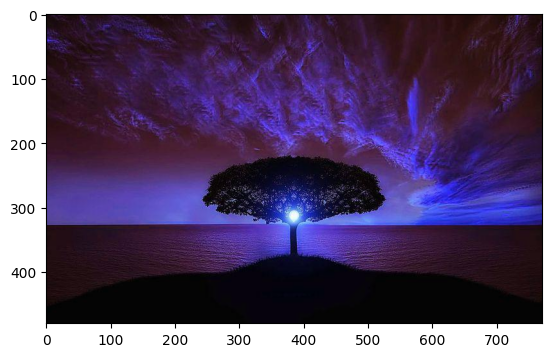

In [264]:
# Base64 encoded image string

# Decode the Base64 string to a NumPy array
img_data = base64.b64decode(b64_string)
np_arr = np.frombuffer(img_data, np.uint8)
img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

# # Display the image
# cv2.imshow('Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(img, "Greys")

In [265]:
samples_count = int(img.size / 1000)
samples = []
for i in range(0, samples_count):
    samples.append([random.randint(1, img.shape[1]), random.randint(1, img.shape[0])])
samples

[[734, 140],
 [676, 258],
 [567, 282],
 [438, 176],
 [366, 366],
 [549, 398],
 [42, 172],
 [711, 127],
 [509, 447],
 [527, 428],
 [484, 473],
 [509, 183],
 [370, 435],
 [26, 31],
 [492, 105],
 [768, 90],
 [331, 346],
 [592, 472],
 [668, 286],
 [452, 470],
 [600, 139],
 [765, 377],
 [408, 246],
 [348, 333],
 [707, 46],
 [497, 464],
 [330, 181],
 [285, 302],
 [567, 135],
 [685, 104],
 [51, 332],
 [353, 391],
 [392, 402],
 [33, 381],
 [669, 454],
 [204, 402],
 [255, 143],
 [753, 56],
 [730, 311],
 [509, 474],
 [305, 185],
 [255, 72],
 [284, 104],
 [464, 186],
 [686, 83],
 [81, 179],
 [629, 164],
 [732, 394],
 [48, 77],
 [371, 231],
 [374, 232],
 [146, 261],
 [79, 298],
 [361, 277],
 [632, 282],
 [9, 311],
 [9, 370],
 [410, 136],
 [160, 102],
 [524, 455],
 [230, 175],
 [388, 192],
 [158, 105],
 [630, 151],
 [272, 393],
 [481, 412],
 [57, 80],
 [546, 122],
 [202, 198],
 [677, 253],
 [448, 194],
 [712, 348],
 [326, 362],
 [193, 49],
 [75, 370],
 [166, 414],
 [301, 114],
 [689, 83],
 [478, 81

In [266]:
def draw_point(img, p, color ) :
    cv2.circle( img, p, 1, color, cv2.FILLED, cv2.LINE_AA, 0 )

In [267]:
for i in samples :
    draw_point(img, i, (255,255,255))

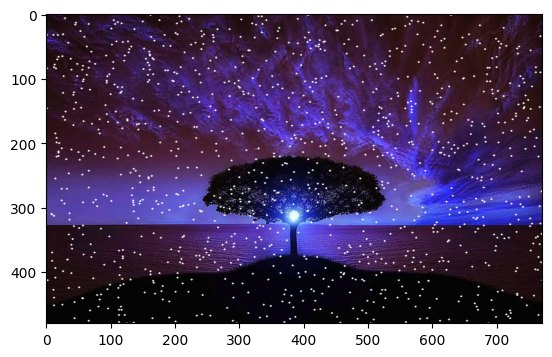

In [268]:
plt.imshow(img)

In [269]:
samples_count

1110

In [270]:
def getClosestColumns(val, sorted_by_axis):
    
    samples_copy_x = sorted_by_axis.copy()
    dictionary_x = {}
    for i in range(0, len(samples_copy_x)):
        if samples_copy_x[i][0] in dictionary_x:
            dictionary_x[samples_copy_x[i][0]].append(samples_copy_x[i][1])
        else:
            dictionary_x[samples_copy_x[i][0]] = [samples_copy_x[i][1]]
            
    keys_x = list(dictionary_x.keys())
    lower = min(keys_x)
    highest = max(keys_x)
    
    list_of_x = []
    for i in keys_x:
        if i == val:
            list_of_x = [i]
            break
        if i > lower and i < val:
            lower = i
        if i < highest and i > val:
            highest = i
            
    if len(list_of_x) == 0:
        list_of_x.append(lower)
        list_of_x.append(highest)
    
    return list_of_x

In [271]:
def findClosestPoint(to_find, samples) -> str:
    
#     samples_sorted_by_x = samples.copy()
    
#     samples.sort(key=lambda x: x[1])
#     samples_sorted_by_y = s
    
#     samples_copy_x = samples.copy()
#     dictionary_x = {}
#     for i in range(0, len(samples_copy_x)):
#         if samples_copy_x[i][0] in dictionary_x:
#             dictionary_x[samples_copy_x[i][0]].append(samples_copy_x[i][1])
#         else:
#             dictionary_x[samples_copy_x[i][0]] = [samples_copy_x[i][1]]
            
#     keys_x = list(dictionary_x.keys())
#     lower = min(keys_x)
#     highest = max(keys_x)
    
#     list_of_x = []
#     for i in keys_x:
#         if i == to_find[0]:
#             list_of_x = [i]
#             break
#         if i > lower and i < to_find[0]:
#             lower = i
#         if i < highest and i > to_find[0]:
#             highest = i
            
#     if len(list_of_x) == 0:
#         list_of_x.append(lower)
#         list_of_x.append(highest)

    
#     return list_of_x
    
    ans = {}
    
    samples_ = samples.copy()
    samples_.sort()
    ans['x'] = getClosestColumns(to_find[0], samples_)
    
    
    samples_.sort(key=lambda x: x[1])
#     print(samples_)
    
    for i in range(0, len(samples_)):
        samples_[i][0], samples_[i][1] = samples_[i][1], samples_[i][0] 
    
    ans['y'] = getClosestColumns(to_find[1], samples_)
    return ans
    
#     samples.sort(key=lambda x: x[1])
#     samples_copy_y = samples.copy()
#     dictionary_y = {}
#     for i in range(0, len(samples_copy_y)):
#         if samples_copy_y[i][0] in dictionary_y:
#             dictionary_y[samples_copy_y[i][0]].append(samples_copy_y[i][1])
#         else:
#             dictionary_y[samples_copy_y[i][0]] = [samples_copy_y[i][1]]
    
#     print(dictionary_x)

In [272]:
point_to_find = (5, 30)

closest = findClosestPoint(point_to_find, samples)

In [273]:
if(len(closest['x']) == 2 and closest['x'][0]==closest['x'][1]):
    closest['x'] = [closest['x'][0]]


if(len(closest['y']) == 2 and closest['y'][0]==closest['y'][1]):
    closest['y'] = [closest['y'][0]]

In [274]:
for i in range(0, len(samples)):
        samples[i][0], samples[i][1] = samples[i][1], samples[i][0] 

In [275]:
x_line_1 = []
x_line_2 = []

y_line_1 = []
y_line_2 = []

for i in samples:
    if(i[0] == closest['x'][0]):
        x_line_1.append(i[1])
    if(len(closest['x']) == 2 and i[0] == closest['x'][1]):
        x_line_2.append(i[1])
        
    if(i[1] == closest['y'][0]):
        y_line_1.append(i[0])
    if(len(closest['y']) == 2 and i[1] == closest['y'][1]):
        y_line_2.append(i[0])


In [276]:
points = []

for i in x_line_1:
    points.append((closest['x'][0], i))

if len(closest['x']) == 2:
    for i in x_line_2:
        points.append((closest['x'][1], i))


for i in y_line_1:
    points.append((i, closest['y'][0]))

if len(closest['y']) == 2:
    for i in y_line_2:
        points.append((i, closest['y'][0]))

points

[(2, 413),
 (8, 310),
 (201, 29),
 (26, 29),
 (657, 29),
 (577, 29),
 (245, 29),
 (523, 29),
 (204, 29),
 (26, 29)]

In [277]:
import math
dict = {}
for i in points:
    dict[i] = math.sqrt(pow((point_to_find[0] - i[0]), 2) + pow((point_to_find[1] - i[1]),2))

In [278]:
closest = dict[min(dict, key=dict.get)]

In [279]:
closest_count = 0
for i in dict:
    if(math.isclose(dict[i], closest)):
        closest_count += 1

In [280]:
closest_count

1

In [281]:
if(closest_count > 1):
    pass
#     draw pixel black

In [ ]:
def calc_closest_point(point_to_calc):
    point_to_find = point_to_calc
    
    closest = findClosestPoint(point_to_find, samples)
    
    if(len(closest['x']) == 2 and closest['x'][0]==closest['x'][1]):
    closest['x'] = [closest['x'][0]]

    if(len(closest['y']) == 2 and closest['y'][0]==closest['y'][1]):
        closest['y'] = [closest['y'][0]]

    for i in range(0, len(samples)):
        samples[i][0], samples[i][1] = samples[i][1], samples[i][0] 
        
    x_line_1 = []
    x_line_2 = []

    y_line_1 = []
    y_line_2 = []

    for i in samples:
        if(i[0] == closest['x'][0]):
            x_line_1.append(i[1])
        if(len(closest['x']) == 2 and i[0] == closest['x'][1]):
            x_line_2.append(i[1])

        if(i[1] == closest['y'][0]):
            y_line_1.append(i[0])
        if(len(closest['y']) == 2 and i[1] == closest['y'][1]):
            y_line_2.append(i[0])
            
    points = []

    for i in x_line_1:
        points.append((closest['x'][0], i))

    if len(closest['x']) == 2:
        for i in x_line_2:
            points.append((closest['x'][1], i))


    for i in y_line_1:
        points.append((i, closest['y'][0]))

    if len(closest['y']) == 2:
        for i in y_line_2:
            points.append((i, closest['y'][0]))
            
    dict = {}
    for i in points:
        dict[i] = math.sqrt(pow((point_to_find[0] - i[0]), 2) + pow((point_to_find[1] - i[1]),2))

    closest = dict[min(dict, key=dict.get)]
    
    closest_count = 0
    for i in dict:
        if(math.isclose(dict[i], closest)):
            closest_count += 1
            
    if closest_count > 1:
        return (-1, -1)
    else:
        

In [7]:
import numpy as np
from scipy.spatial import Voronoi
from PIL import Image

def voronoi_mosaic(img_path, num_cells=5000):
    # Load image and convert to grayscale
    img = Image.open(img_path).convert('L')
    img_array = np.array(img)
    
    # Generate random points within the image
    width, height = img.size
    points = np.random.randint(0, min(width, height), size=(num_cells, 2))
    
    # Compute Voronoi diagram of the random points
    vor = Voronoi(points)
    
    # Assign each pixel in the image to the nearest Voronoi cell
    pixel_coords = np.dstack(np.meshgrid(np.arange(height), np.arange(width))).reshape(-1, 2)
    cell_indices = vor.point_region[np.asarray(vor.ridge_points)]
    cell_indices = np.where(cell_indices == -1, vor.regions[vor.point_region[vor.ridge_points == -1]], cell_indices)
    cell_indices = np.array([np.argmax(np.bincount(row)) for row in cell_indices])
    voronoi_map = cell_indices.reshape(width, height).T
    
    # Assign each Voronoi cell a color based on the average color of its corresponding pixels in the input image
    colors = [np.mean(img_array[voronoi_map == i]) for i in range(num_cells)]
    
    # Generate output image by assigning each pixel to the color of its corresponding Voronoi cell
    output_img = Image.fromarray(np.uint8([colors[i] for i in voronoi_map.flatten()]).reshape(height, width))
    
    return output_img

In [8]:
voronoi_mosaic('./tree.jpg')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed